In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
    !apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb
    !pip install -q -U tf-agents-nightly pyvirtualdisplay gym[atari]
    IS_COLAB = True
except Exception:
    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rl"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


No GPU was detected. CNNs can be very slow without a GPU.


In [44]:
def update_scene(num, frames, patch):
    patch.set_data(frames[num])
    return patch,

def plot_animation(frames, repeat=False, interval=40):
    fig = plt.figure()
    patch = plt.imshow(frames[0])
    plt.axis('off')
    anim = animation.FuncAnimation(
        fig, update_scene, fargs=(frames, patch),
        frames=len(frames), repeat=repeat, interval=interval)
    plt.close()
    return anim

In [2]:
from tf_agents.environments import suite_gym

env = suite_gym.load('Breakout-v4')
env

In [3]:
env.gym

In [4]:
env.seed(42)
env.reset()

TimeStep(step_type=array(0, dtype=int32), reward=array(0., dtype=float32), discount=array(1., dtype=float32), observation=array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8))

In [5]:
env.step(np.array(1))

TimeStep(step_type=array(1, dtype=int32), reward=array(0., dtype=float32), discount=array(1., dtype=float32), observation=array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8))

Saving figure breakout_plot


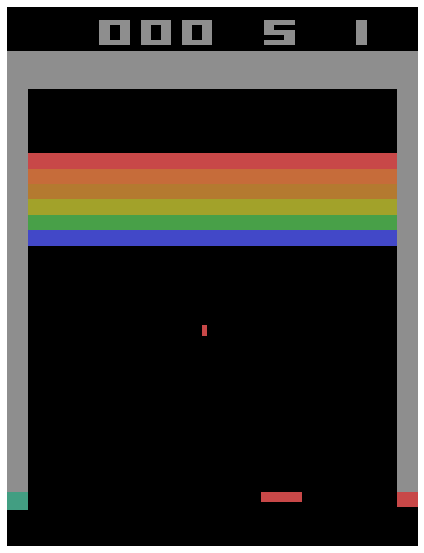

In [6]:
img = env.render(mode = "rgb_array")

plt.figure(figsize=(6,8))
plt.imshow(img)
plt.axis("off")
save_fig("breakout_plot")
plt.show()

In [7]:
env.current_time_step()

TimeStep(step_type=array(1, dtype=int32), reward=array(0., dtype=float32), discount=array(1., dtype=float32), observation=array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8))

In [9]:
env.unwrapped

# Create an Atari Breakout environment, and wrap it to apply the default Atari preprocessing steps:

In [11]:
from tf_agents.environments import suite_atari
from tf_agents.environments.atari_preprocessing import AtariPreprocessing
from tf_agents.environments.atari_wrappers import FrameStack4

max_episode_steps = 27000
env_name = 'BreakoutNoFrameskip-v4'

env = suite_atari.load(env_name, 
                      max_episode_steps=max_episode_steps,
                      gym_env_wrappers=[AtariPreprocessing, FrameStack4])

In [12]:
env

In [13]:
env.seed(42)
env.reset()
time_step = env.step(np.array(1)) # FIRE
for _ in range(4):
    time_step = env.step(np.array(3)) # LEFT

In [14]:

def plot_observation(obs):
    # Since there are only 3 color channels, you cannot display 4 frames
    # with one primary color per frame. So this code computes the delta between
    # the current frame and the mean of the other frames, and it adds this delta
    # to the red and blue channels to get a pink color for the current frame.
    obs = obs.astype(np.float32)
    img = obs[..., :3]
    current_frame_delta = np.maximum(obs[..., 3] - obs[..., :3].mean(axis=-1), 0.)
    img[..., 0] += current_frame_delta
    img[..., 2] += current_frame_delta
    img = np.clip(img / 150, 0, 1)
    plt.imshow(img)
    plt.axis("off")

Saving figure preprocessed_breakout_plot


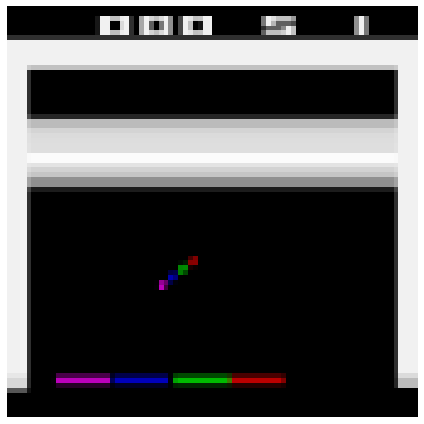

In [15]:
plt.figure(figsize=(6, 6))
plot_observation(time_step.observation)
save_fig("preprocessed_breakout_plot")
plt.show()

In [16]:
from tf_agents.environments.tf_py_environment import TFPyEnvironment
tf_env = TFPyEnvironment(env)

In [19]:
from tf_agents.networks.q_network import QNetwork

preprocessing_layer = keras.layers.Lambda(lambda obs: tf.cast(obs, np.float32) / 255.)
conv_layer_params = [(32, (8,8), 4), (64, (4,4), 2), (64, (3,3), 1)]
fc_layer_params = [512]

q_net = QNetwork(
    tf_env.observation_spec(), 
    tf_env.action_spec(), 
    preprocessing_layers=preprocessing_layer,
    conv_layer_params=conv_layer_params,
    fc_layer_params=fc_layer_params
)

In [20]:
from tf_agents.agents.dqn.dqn_agent import DqnAgent

train_step = tf.Variable(0)
update_period = 4
optimizer = tf.compat.v1.train.RMSPropOptimizer(learning_rate=2.5e-4, 
                                                decay=0.95, 
                                                momentum=0.0, 
                                                epsilon=0.00001, 
                                                centered=True)
epsilon_fn = keras.optimizers.schedules.PolynomialDecay(initial_learning_rate=1.0,
                                                        decay_steps=250000, 
                                                        end_learning_rate=0.01)
agent = DqnAgent(tf_env.time_step_spec(),
                tf_env.action_spec(),
                q_network=q_net,
                optimizer=optimizer,
                target_update_period=2000,
                td_errors_loss_fn=keras.losses.Huber(reduction="none"),
                gamma=0.99,
                train_step_counter=train_step,
                epsilon_greedy=lambda: epsilon_fn(train_step))

agent.initialize()

In [21]:
from tf_agents.replay_buffers import tf_uniform_replay_buffer

replay_buffer = tf_uniform_replay_buffer.TFUniformReplayBuffer(data_spec=agent.collect_data_spec,
                                                              batch_size=tf_env.batch_size,
                                                              max_length=1000000)

replay_buffer_obs = replay_buffer.add_batch

In [22]:
class ShowProgress:
    def __init__(self, total):
        self.counter = 0
        self.total = total
    def __call__(self, trajectory):
        if not trajectory.is_boundary():
            self.counter += 1
        if self.counter % 100 == 0:
            print("\r{}/{}".format(self.counter, self.total), end="")

In [23]:
from tf_agents.metrics import tf_metrics

train_martics = [
    tf_metrics.NumberOfEpisodes(),
    tf_metrics.EnvironmentSteps(),
    tf_metrics.AverageReturnMetric(),
    tf_metrics.AverageEpisodeLengthMetric()
]

In [24]:
train_martics[0].result()

<tf.Tensor: shape=(), dtype=int64, numpy=0>

In [25]:
from tf_agents.eval.metric_utils import log_metrics
import logging

logging.getLogger().setLevel(logging.INFO)
log_metrics(train_martics)

INFO:absl: 
		 NumberOfEpisodes = 0
		 EnvironmentSteps = 0
		 AverageReturn = 0.0
		 AverageEpisodeLength = 0.0


In [26]:
from tf_agents.drivers.dynamic_step_driver import DynamicStepDriver

collect_driver = DynamicStepDriver(tf_env, 
                                   agent.collect_policy,
                                   observers=[replay_buffer_obs] + train_martics,
                                   num_steps=update_period)

In [27]:
from tf_agents.policies.random_tf_policy import RandomTFPolicy

initial_collect_policy = RandomTFPolicy(tf_env.time_step_spec(),
                                       tf_env.action_spec())

init_driver = DynamicStepDriver(tf_env,
                                initial_collect_policy,
                                observers=[replay_buffer.add_batch, ShowProgress(20000)],
                               num_steps=20000)

final_time_step, final_policy_state = init_driver.run()


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.while_loop(c, b, vars, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.while_loop(c, b, vars))


20000/20000

Creating subepisodes with 3 steps each and display them

In [28]:
tf.random.set_seed(888)

trajectories, buffer_info = replay_buffer.get_next(sample_batch_size=2, num_steps=3)

Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


In [29]:
trajectories._fields

('step_type',
 'observation',
 'action',
 'policy_info',
 'next_step_type',
 'reward',
 'discount')

In [31]:
trajectories.observation.shape

TensorShape([2, 3, 84, 84, 4])

In [32]:
from tf_agents.trajectories.trajectory import to_transition

time_steps, action_steps, next_time_steps = to_transition(trajectories)
time_steps.observation.shape

TensorShape([2, 2, 84, 84, 4])

In [33]:
trajectories.step_type.numpy()

array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)

Saving figure sub_episodes_plot


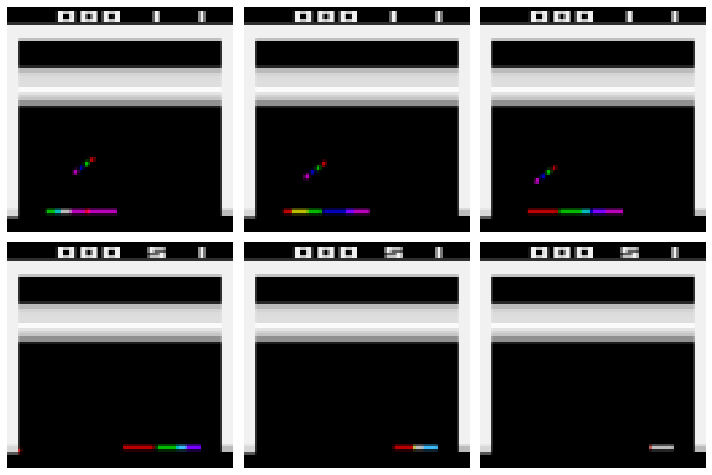

In [34]:
plt.figure(figsize=(10, 6.8))
for row in range(2):
    for col in range(3):
        plt.subplot(2, 3, row * 3 + col + 1)
        plot_observation(trajectories.observation[row, col].numpy())
plt.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0, wspace=0.02)
save_fig("sub_episodes_plot")
plt.show()

creating the dataset

In [35]:
dataset = replay_buffer.as_dataset(sample_batch_size=64,
                                  num_steps=2,
                                  num_parallel_calls=3).prefetch(3)

In [37]:
from tf_agents.utils.common import function

collect_driver.run = function(collect_driver.run)
agent.train = function(agent.train)

Main training loop

In [41]:
def train_agent(n_iterations):
    time_step = None
    policy_state = agent.collect_policy.get_initial_state(tf_env.batch_size)
    iterator = iter(dataset)
    
    for iteration in range(n_iterations):
        time_state, policy_state = collect_driver.run(time_step, policy_state)
        trajectories, buffer_info = next(iterator)
        train_loss = agent.train(trajectories)
        print("\r{} loss:{:.5f}".format(
            iteration, train_loss.loss.numpy()), end="")
        if iteration % 1000 == 0:
            log_metrics(train_martics)

In [48]:
train_agent(10000000)

INFO:absl: 
		 NumberOfEpisodes = 2074
		 EnvironmentSteps = 440008
		 AverageReturn = 5.0
		 AverageEpisodeLength = 274.29998779296875


999 loss:0.00361

INFO:absl: 
		 NumberOfEpisodes = 2088
		 EnvironmentSteps = 444008
		 AverageReturn = 5.099999904632568
		 AverageEpisodeLength = 273.29998779296875


1997 loss:0.00150

INFO:absl: 
		 NumberOfEpisodes = 2104
		 EnvironmentSteps = 448008
		 AverageReturn = 5.0
		 AverageEpisodeLength = 246.10000610351562


2999 loss:0.00252

INFO:absl: 
		 NumberOfEpisodes = 2123
		 EnvironmentSteps = 452008
		 AverageReturn = 2.299999952316284
		 AverageEpisodeLength = 199.89999389648438


3999 loss:0.00313

INFO:absl: 
		 NumberOfEpisodes = 2138
		 EnvironmentSteps = 456008
		 AverageReturn = 4.0
		 AverageEpisodeLength = 265.1000061035156


4996 loss:0.00214

INFO:absl: 
		 NumberOfEpisodes = 2155
		 EnvironmentSteps = 460008
		 AverageReturn = 4.099999904632568
		 AverageEpisodeLength = 256.70001220703125


5999 loss:0.00329

INFO:absl: 
		 NumberOfEpisodes = 2172
		 EnvironmentSteps = 464008
		 AverageReturn = 3.9000000953674316
		 AverageEpisodeLength = 227.6999969482422


6998 loss:0.00136

INFO:absl: 
		 NumberOfEpisodes = 2188
		 EnvironmentSteps = 468008
		 AverageReturn = 4.5
		 AverageEpisodeLength = 253.39999389648438


7999 loss:0.00210

INFO:absl: 
		 NumberOfEpisodes = 2205
		 EnvironmentSteps = 472008
		 AverageReturn = 3.0999999046325684
		 AverageEpisodeLength = 224.10000610351562


8996 loss:0.00084

INFO:absl: 
		 NumberOfEpisodes = 2224
		 EnvironmentSteps = 476008
		 AverageReturn = 2.5
		 AverageEpisodeLength = 195.0


9997 loss:0.00355

INFO:absl: 
		 NumberOfEpisodes = 2242
		 EnvironmentSteps = 480008
		 AverageReturn = 3.9000000953674316
		 AverageEpisodeLength = 241.8000030517578


10998 loss:0.00542

INFO:absl: 
		 NumberOfEpisodes = 2259
		 EnvironmentSteps = 484008
		 AverageReturn = 3.799999952316284
		 AverageEpisodeLength = 236.3000030517578


11998 loss:0.00155

INFO:absl: 
		 NumberOfEpisodes = 2278
		 EnvironmentSteps = 488008
		 AverageReturn = 3.5
		 AverageEpisodeLength = 215.39999389648438


12996 loss:0.00300

INFO:absl: 
		 NumberOfEpisodes = 2296
		 EnvironmentSteps = 492008
		 AverageReturn = 2.700000047683716
		 AverageEpisodeLength = 204.39999389648438


13997 loss:0.00231

INFO:absl: 
		 NumberOfEpisodes = 2314
		 EnvironmentSteps = 496008
		 AverageReturn = 3.299999952316284
		 AverageEpisodeLength = 222.10000610351562


14997 loss:0.00497

INFO:absl: 
		 NumberOfEpisodes = 2332
		 EnvironmentSteps = 500008
		 AverageReturn = 3.700000047683716
		 AverageEpisodeLength = 218.39999389648438


15998 loss:0.00284

INFO:absl: 
		 NumberOfEpisodes = 2347
		 EnvironmentSteps = 504008
		 AverageReturn = 4.400000095367432
		 AverageEpisodeLength = 252.6999969482422


16997 loss:0.00578

INFO:absl: 
		 NumberOfEpisodes = 2365
		 EnvironmentSteps = 508008
		 AverageReturn = 3.0
		 AverageEpisodeLength = 207.6999969482422


17999 loss:0.00173

INFO:absl: 
		 NumberOfEpisodes = 2383
		 EnvironmentSteps = 512008
		 AverageReturn = 3.9000000953674316
		 AverageEpisodeLength = 227.3000030517578


18999 loss:0.00957

INFO:absl: 
		 NumberOfEpisodes = 2401
		 EnvironmentSteps = 516008
		 AverageReturn = 3.0999999046325684
		 AverageEpisodeLength = 217.10000610351562


19997 loss:0.00546

INFO:absl: 
		 NumberOfEpisodes = 2420
		 EnvironmentSteps = 520008
		 AverageReturn = 3.200000047683716
		 AverageEpisodeLength = 226.5


20999 loss:0.00506

INFO:absl: 
		 NumberOfEpisodes = 2438
		 EnvironmentSteps = 524008
		 AverageReturn = 4.0
		 AverageEpisodeLength = 219.89999389648438


21996 loss:0.00750

INFO:absl: 
		 NumberOfEpisodes = 2455
		 EnvironmentSteps = 528008
		 AverageReturn = 3.299999952316284
		 AverageEpisodeLength = 231.39999389648438


22996 loss:0.00424

INFO:absl: 
		 NumberOfEpisodes = 2474
		 EnvironmentSteps = 532008
		 AverageReturn = 3.5
		 AverageEpisodeLength = 220.1999969482422


23999 loss:0.00746

INFO:absl: 
		 NumberOfEpisodes = 2492
		 EnvironmentSteps = 536008
		 AverageReturn = 3.299999952316284
		 AverageEpisodeLength = 217.6999969482422


24996 loss:0.00173

INFO:absl: 
		 NumberOfEpisodes = 2509
		 EnvironmentSteps = 540008
		 AverageReturn = 2.700000047683716
		 AverageEpisodeLength = 214.10000610351562


25996 loss:0.00331

INFO:absl: 
		 NumberOfEpisodes = 2526
		 EnvironmentSteps = 544008
		 AverageReturn = 3.4000000953674316
		 AverageEpisodeLength = 231.3000030517578


26997 loss:0.00149

INFO:absl: 
		 NumberOfEpisodes = 2543
		 EnvironmentSteps = 548008
		 AverageReturn = 3.200000047683716
		 AverageEpisodeLength = 228.60000610351562


27999 loss:0.00812

INFO:absl: 
		 NumberOfEpisodes = 2559
		 EnvironmentSteps = 552008
		 AverageReturn = 3.299999952316284
		 AverageEpisodeLength = 231.6999969482422


28997 loss:0.00300

INFO:absl: 
		 NumberOfEpisodes = 2574
		 EnvironmentSteps = 556008
		 AverageReturn = 4.800000190734863
		 AverageEpisodeLength = 268.0


29999 loss:0.00111

INFO:absl: 
		 NumberOfEpisodes = 2589
		 EnvironmentSteps = 560008
		 AverageReturn = 4.300000190734863
		 AverageEpisodeLength = 252.0


30997 loss:0.00302

INFO:absl: 
		 NumberOfEpisodes = 2606
		 EnvironmentSteps = 564008
		 AverageReturn = 4.5
		 AverageEpisodeLength = 255.5


31997 loss:0.00352

INFO:absl: 
		 NumberOfEpisodes = 2621
		 EnvironmentSteps = 568008
		 AverageReturn = 4.699999809265137
		 AverageEpisodeLength = 262.79998779296875


32995 loss:0.00615

INFO:absl: 
		 NumberOfEpisodes = 2635
		 EnvironmentSteps = 572008
		 AverageReturn = 5.0
		 AverageEpisodeLength = 258.29998779296875


33998 loss:0.01015

INFO:absl: 
		 NumberOfEpisodes = 2649
		 EnvironmentSteps = 576008
		 AverageReturn = 5.699999809265137
		 AverageEpisodeLength = 288.29998779296875


34999 loss:0.00148

INFO:absl: 
		 NumberOfEpisodes = 2664
		 EnvironmentSteps = 580008
		 AverageReturn = 5.5
		 AverageEpisodeLength = 280.6000061035156


35998 loss:0.00155

INFO:absl: 
		 NumberOfEpisodes = 2677
		 EnvironmentSteps = 584008
		 AverageReturn = 7.0
		 AverageEpisodeLength = 317.8999938964844


36997 loss:0.00265

INFO:absl: 
		 NumberOfEpisodes = 2690
		 EnvironmentSteps = 588008
		 AverageReturn = 6.099999904632568
		 AverageEpisodeLength = 309.0


37999 loss:0.00560

INFO:absl: 
		 NumberOfEpisodes = 2705
		 EnvironmentSteps = 592008
		 AverageReturn = 4.599999904632568
		 AverageEpisodeLength = 267.5


38996 loss:0.00165

INFO:absl: 
		 NumberOfEpisodes = 2719
		 EnvironmentSteps = 596008
		 AverageReturn = 5.400000095367432
		 AverageEpisodeLength = 295.0


39998 loss:0.00461

INFO:absl: 
		 NumberOfEpisodes = 2733
		 EnvironmentSteps = 600008
		 AverageReturn = 5.099999904632568
		 AverageEpisodeLength = 285.6000061035156


40997 loss:0.00130

INFO:absl: 
		 NumberOfEpisodes = 2747
		 EnvironmentSteps = 604008
		 AverageReturn = 5.400000095367432
		 AverageEpisodeLength = 308.70001220703125


42000 loss:0.01106

INFO:absl: 
		 NumberOfEpisodes = 2758
		 EnvironmentSteps = 608008
		 AverageReturn = 6.699999809265137
		 AverageEpisodeLength = 351.1000061035156


42997 loss:0.00111

INFO:absl: 
		 NumberOfEpisodes = 2770
		 EnvironmentSteps = 612008
		 AverageReturn = 6.199999809265137
		 AverageEpisodeLength = 334.0


43998 loss:0.00138

INFO:absl: 
		 NumberOfEpisodes = 2783
		 EnvironmentSteps = 616008
		 AverageReturn = 5.099999904632568
		 AverageEpisodeLength = 294.1000061035156


44998 loss:0.00389

INFO:absl: 
		 NumberOfEpisodes = 2796
		 EnvironmentSteps = 620008
		 AverageReturn = 6.400000095367432
		 AverageEpisodeLength = 296.5


45998 loss:0.00225

INFO:absl: 
		 NumberOfEpisodes = 2809
		 EnvironmentSteps = 624008
		 AverageReturn = 6.5
		 AverageEpisodeLength = 304.1000061035156


46999 loss:0.00293

INFO:absl: 
		 NumberOfEpisodes = 2821
		 EnvironmentSteps = 628008
		 AverageReturn = 7.300000190734863
		 AverageEpisodeLength = 327.70001220703125


47997 loss:0.00449

INFO:absl: 
		 NumberOfEpisodes = 2833
		 EnvironmentSteps = 632008
		 AverageReturn = 6.400000095367432
		 AverageEpisodeLength = 329.1000061035156


48999 loss:0.00064

INFO:absl: 
		 NumberOfEpisodes = 2847
		 EnvironmentSteps = 636008
		 AverageReturn = 5.599999904632568
		 AverageEpisodeLength = 295.0


49998 loss:0.00143

INFO:absl: 
		 NumberOfEpisodes = 2859
		 EnvironmentSteps = 640008
		 AverageReturn = 6.400000095367432
		 AverageEpisodeLength = 303.8999938964844


50997 loss:0.00177

INFO:absl: 
		 NumberOfEpisodes = 2873
		 EnvironmentSteps = 644008
		 AverageReturn = 7.0
		 AverageEpisodeLength = 294.20001220703125


51997 loss:0.00162

INFO:absl: 
		 NumberOfEpisodes = 2886
		 EnvironmentSteps = 648008
		 AverageReturn = 6.400000095367432
		 AverageEpisodeLength = 321.1000061035156


52998 loss:0.00579

INFO:absl: 
		 NumberOfEpisodes = 2900
		 EnvironmentSteps = 652008
		 AverageReturn = 6.599999904632568
		 AverageEpisodeLength = 270.79998779296875


53996 loss:0.00086

INFO:absl: 
		 NumberOfEpisodes = 2911
		 EnvironmentSteps = 656008
		 AverageReturn = 7.699999809265137
		 AverageEpisodeLength = 332.8999938964844


54996 loss:0.00434

INFO:absl: 
		 NumberOfEpisodes = 2923
		 EnvironmentSteps = 660008
		 AverageReturn = 6.400000095367432
		 AverageEpisodeLength = 344.70001220703125


56000 loss:0.00135

INFO:absl: 
		 NumberOfEpisodes = 2937
		 EnvironmentSteps = 664008
		 AverageReturn = 6.099999904632568
		 AverageEpisodeLength = 290.3999938964844


56996 loss:0.00218

INFO:absl: 
		 NumberOfEpisodes = 2950
		 EnvironmentSteps = 668008
		 AverageReturn = 6.800000190734863
		 AverageEpisodeLength = 285.0


57996 loss:0.00215

INFO:absl: 
		 NumberOfEpisodes = 2963
		 EnvironmentSteps = 672008
		 AverageReturn = 7.099999904632568
		 AverageEpisodeLength = 314.8999938964844


58999 loss:0.00460

INFO:absl: 
		 NumberOfEpisodes = 2977
		 EnvironmentSteps = 676008
		 AverageReturn = 5.699999809265137
		 AverageEpisodeLength = 260.3999938964844


59998 loss:0.00228

INFO:absl: 
		 NumberOfEpisodes = 2991
		 EnvironmentSteps = 680008
		 AverageReturn = 4.900000095367432
		 AverageEpisodeLength = 270.6000061035156


60999 loss:0.00141

INFO:absl: 
		 NumberOfEpisodes = 3005
		 EnvironmentSteps = 684008
		 AverageReturn = 4.699999809265137
		 AverageEpisodeLength = 283.20001220703125


61997 loss:0.00729

INFO:absl: 
		 NumberOfEpisodes = 3020
		 EnvironmentSteps = 688008
		 AverageReturn = 4.599999904632568
		 AverageEpisodeLength = 274.8999938964844


62997 loss:0.00212

INFO:absl: 
		 NumberOfEpisodes = 3035
		 EnvironmentSteps = 692008
		 AverageReturn = 4.699999809265137
		 AverageEpisodeLength = 256.6000061035156


63997 loss:0.00235

INFO:absl: 
		 NumberOfEpisodes = 3050
		 EnvironmentSteps = 696008
		 AverageReturn = 5.099999904632568
		 AverageEpisodeLength = 261.1000061035156


64999 loss:0.01403

INFO:absl: 
		 NumberOfEpisodes = 3065
		 EnvironmentSteps = 700008
		 AverageReturn = 5.199999809265137
		 AverageEpisodeLength = 283.70001220703125


65998 loss:0.00196

INFO:absl: 
		 NumberOfEpisodes = 3078
		 EnvironmentSteps = 704008
		 AverageReturn = 5.300000190734863
		 AverageEpisodeLength = 285.6000061035156


67000 loss:0.00145

INFO:absl: 
		 NumberOfEpisodes = 3094
		 EnvironmentSteps = 708008
		 AverageReturn = 4.699999809265137
		 AverageEpisodeLength = 241.3000030517578


67999 loss:0.00199

INFO:absl: 
		 NumberOfEpisodes = 3108
		 EnvironmentSteps = 712008
		 AverageReturn = 5.599999904632568
		 AverageEpisodeLength = 280.8999938964844


68999 loss:0.00633

INFO:absl: 
		 NumberOfEpisodes = 3124
		 EnvironmentSteps = 716008
		 AverageReturn = 5.0
		 AverageEpisodeLength = 263.29998779296875


69997 loss:0.00123

INFO:absl: 
		 NumberOfEpisodes = 3139
		 EnvironmentSteps = 720008
		 AverageReturn = 5.099999904632568
		 AverageEpisodeLength = 273.8999938964844


70999 loss:0.00211

INFO:absl: 
		 NumberOfEpisodes = 3155
		 EnvironmentSteps = 724008
		 AverageReturn = 5.0
		 AverageEpisodeLength = 266.79998779296875


71998 loss:0.00160

INFO:absl: 
		 NumberOfEpisodes = 3171
		 EnvironmentSteps = 728008
		 AverageReturn = 4.599999904632568
		 AverageEpisodeLength = 254.5


73000 loss:0.00154

INFO:absl: 
		 NumberOfEpisodes = 3186
		 EnvironmentSteps = 732008
		 AverageReturn = 5.0
		 AverageEpisodeLength = 263.5


73996 loss:0.00214

INFO:absl: 
		 NumberOfEpisodes = 3202
		 EnvironmentSteps = 736008
		 AverageReturn = 3.9000000953674316
		 AverageEpisodeLength = 238.8000030517578


75000 loss:0.00164

INFO:absl: 
		 NumberOfEpisodes = 3217
		 EnvironmentSteps = 740008
		 AverageReturn = 5.199999809265137
		 AverageEpisodeLength = 253.89999389648438


75997 loss:0.00451

INFO:absl: 
		 NumberOfEpisodes = 3230
		 EnvironmentSteps = 744008
		 AverageReturn = 7.0
		 AverageEpisodeLength = 324.70001220703125


76996 loss:0.00837

INFO:absl: 
		 NumberOfEpisodes = 3244
		 EnvironmentSteps = 748008
		 AverageReturn = 6.199999809265137
		 AverageEpisodeLength = 289.29998779296875


77998 loss:0.00129

INFO:absl: 
		 NumberOfEpisodes = 3259
		 EnvironmentSteps = 752008
		 AverageReturn = 5.300000190734863
		 AverageEpisodeLength = 282.5


78999 loss:0.00500

INFO:absl: 
		 NumberOfEpisodes = 3274
		 EnvironmentSteps = 756008
		 AverageReturn = 4.300000190734863
		 AverageEpisodeLength = 268.20001220703125


79998 loss:0.00611

INFO:absl: 
		 NumberOfEpisodes = 3289
		 EnvironmentSteps = 760008
		 AverageReturn = 4.400000095367432
		 AverageEpisodeLength = 264.6000061035156


80997 loss:0.00461

INFO:absl: 
		 NumberOfEpisodes = 3305
		 EnvironmentSteps = 764008
		 AverageReturn = 4.199999809265137
		 AverageEpisodeLength = 253.60000610351562


81999 loss:0.00133

INFO:absl: 
		 NumberOfEpisodes = 3319
		 EnvironmentSteps = 768008
		 AverageReturn = 5.300000190734863
		 AverageEpisodeLength = 272.20001220703125


82999 loss:0.00239

INFO:absl: 
		 NumberOfEpisodes = 3334
		 EnvironmentSteps = 772008
		 AverageReturn = 5.0
		 AverageEpisodeLength = 285.6000061035156


83998 loss:0.00432

INFO:absl: 
		 NumberOfEpisodes = 3348
		 EnvironmentSteps = 776008
		 AverageReturn = 5.099999904632568
		 AverageEpisodeLength = 281.29998779296875


84998 loss:0.00265

INFO:absl: 
		 NumberOfEpisodes = 3362
		 EnvironmentSteps = 780008
		 AverageReturn = 6.199999809265137
		 AverageEpisodeLength = 292.70001220703125


85996 loss:0.01737

INFO:absl: 
		 NumberOfEpisodes = 3375
		 EnvironmentSteps = 784008
		 AverageReturn = 6.5
		 AverageEpisodeLength = 312.1000061035156


86997 loss:0.00297

INFO:absl: 
		 NumberOfEpisodes = 3388
		 EnvironmentSteps = 788008
		 AverageReturn = 7.400000095367432
		 AverageEpisodeLength = 331.6000061035156


87999 loss:0.00895

INFO:absl: 
		 NumberOfEpisodes = 3401
		 EnvironmentSteps = 792008
		 AverageReturn = 6.0
		 AverageEpisodeLength = 315.70001220703125


88997 loss:0.00178

INFO:absl: 
		 NumberOfEpisodes = 3413
		 EnvironmentSteps = 796008
		 AverageReturn = 5.199999809265137
		 AverageEpisodeLength = 310.6000061035156


89999 loss:0.01081

INFO:absl: 
		 NumberOfEpisodes = 3426
		 EnvironmentSteps = 800008
		 AverageReturn = 6.699999809265137
		 AverageEpisodeLength = 311.70001220703125


90998 loss:0.00142

INFO:absl: 
		 NumberOfEpisodes = 3439
		 EnvironmentSteps = 804008
		 AverageReturn = 6.5
		 AverageEpisodeLength = 306.79998779296875


91997 loss:0.01572

INFO:absl: 
		 NumberOfEpisodes = 3451
		 EnvironmentSteps = 808008
		 AverageReturn = 6.0
		 AverageEpisodeLength = 317.70001220703125


92996 loss:0.00961

INFO:absl: 
		 NumberOfEpisodes = 3463
		 EnvironmentSteps = 812008
		 AverageReturn = 5.699999809265137
		 AverageEpisodeLength = 307.70001220703125


93997 loss:0.00455

INFO:absl: 
		 NumberOfEpisodes = 3475
		 EnvironmentSteps = 816008
		 AverageReturn = 7.0
		 AverageEpisodeLength = 337.70001220703125


94999 loss:0.00289

INFO:absl: 
		 NumberOfEpisodes = 3488
		 EnvironmentSteps = 820008
		 AverageReturn = 6.199999809265137
		 AverageEpisodeLength = 303.0


95999 loss:0.00435

INFO:absl: 
		 NumberOfEpisodes = 3500
		 EnvironmentSteps = 824008
		 AverageReturn = 7.0
		 AverageEpisodeLength = 333.5


96998 loss:0.00140

INFO:absl: 
		 NumberOfEpisodes = 3510
		 EnvironmentSteps = 828008
		 AverageReturn = 7.599999904632568
		 AverageEpisodeLength = 385.29998779296875


97999 loss:0.00451

INFO:absl: 
		 NumberOfEpisodes = 3523
		 EnvironmentSteps = 832008
		 AverageReturn = 7.900000095367432
		 AverageEpisodeLength = 335.1000061035156


98996 loss:0.00161

INFO:absl: 
		 NumberOfEpisodes = 3536
		 EnvironmentSteps = 836008
		 AverageReturn = 4.699999809265137
		 AverageEpisodeLength = 281.70001220703125


99998 loss:0.01280

INFO:absl: 
		 NumberOfEpisodes = 3549
		 EnvironmentSteps = 840008
		 AverageReturn = 5.900000095367432
		 AverageEpisodeLength = 324.6000061035156


100998 loss:0.01660

INFO:absl: 
		 NumberOfEpisodes = 3561
		 EnvironmentSteps = 844008
		 AverageReturn = 6.0
		 AverageEpisodeLength = 311.8999938964844


101998 loss:0.00929

INFO:absl: 
		 NumberOfEpisodes = 3572
		 EnvironmentSteps = 848008
		 AverageReturn = 8.800000190734863
		 AverageEpisodeLength = 367.3999938964844


102997 loss:0.00158

INFO:absl: 
		 NumberOfEpisodes = 3586
		 EnvironmentSteps = 852008
		 AverageReturn = 6.699999809265137
		 AverageEpisodeLength = 295.1000061035156


103997 loss:0.00763

INFO:absl: 
		 NumberOfEpisodes = 3597
		 EnvironmentSteps = 856008
		 AverageReturn = 7.599999904632568
		 AverageEpisodeLength = 329.29998779296875


104999 loss:0.00192

INFO:absl: 
		 NumberOfEpisodes = 3612
		 EnvironmentSteps = 860008
		 AverageReturn = 6.0
		 AverageEpisodeLength = 280.8999938964844


105997 loss:0.00674

INFO:absl: 
		 NumberOfEpisodes = 3622
		 EnvironmentSteps = 864008
		 AverageReturn = 9.0
		 AverageEpisodeLength = 368.5


106997 loss:0.00413

INFO:absl: 
		 NumberOfEpisodes = 3635
		 EnvironmentSteps = 868008
		 AverageReturn = 6.599999904632568
		 AverageEpisodeLength = 329.8999938964844


107998 loss:0.00589

INFO:absl: 
		 NumberOfEpisodes = 3646
		 EnvironmentSteps = 872008
		 AverageReturn = 7.900000095367432
		 AverageEpisodeLength = 386.6000061035156


109000 loss:0.00167

INFO:absl: 
		 NumberOfEpisodes = 3657
		 EnvironmentSteps = 876008
		 AverageReturn = 8.600000381469727
		 AverageEpisodeLength = 359.5


109997 loss:0.00153

INFO:absl: 
		 NumberOfEpisodes = 3669
		 EnvironmentSteps = 880008
		 AverageReturn = 7.300000190734863
		 AverageEpisodeLength = 319.79998779296875


110996 loss:0.00186

INFO:absl: 
		 NumberOfEpisodes = 3681
		 EnvironmentSteps = 884008
		 AverageReturn = 7.300000190734863
		 AverageEpisodeLength = 332.29998779296875


111998 loss:0.00162

INFO:absl: 
		 NumberOfEpisodes = 3694
		 EnvironmentSteps = 888008
		 AverageReturn = 7.0
		 AverageEpisodeLength = 324.0


112997 loss:0.00175

INFO:absl: 
		 NumberOfEpisodes = 3706
		 EnvironmentSteps = 892008
		 AverageReturn = 7.0
		 AverageEpisodeLength = 319.79998779296875


113997 loss:0.01323

INFO:absl: 
		 NumberOfEpisodes = 3718
		 EnvironmentSteps = 896008
		 AverageReturn = 6.0
		 AverageEpisodeLength = 324.0


114999 loss:0.00643

INFO:absl: 
		 NumberOfEpisodes = 3732
		 EnvironmentSteps = 900008
		 AverageReturn = 6.0
		 AverageEpisodeLength = 297.29998779296875


115996 loss:0.01513

INFO:absl: 
		 NumberOfEpisodes = 3744
		 EnvironmentSteps = 904008
		 AverageReturn = 5.5
		 AverageEpisodeLength = 323.79998779296875


116997 loss:0.00469

INFO:absl: 
		 NumberOfEpisodes = 3759
		 EnvironmentSteps = 908008
		 AverageReturn = 6.800000190734863
		 AverageEpisodeLength = 302.79998779296875


117999 loss:0.00420

INFO:absl: 
		 NumberOfEpisodes = 3773
		 EnvironmentSteps = 912008
		 AverageReturn = 5.900000095367432
		 AverageEpisodeLength = 281.0


118998 loss:0.00584

INFO:absl: 
		 NumberOfEpisodes = 3786
		 EnvironmentSteps = 916008
		 AverageReturn = 5.599999904632568
		 AverageEpisodeLength = 300.70001220703125


119998 loss:0.00237

INFO:absl: 
		 NumberOfEpisodes = 3798
		 EnvironmentSteps = 920008
		 AverageReturn = 7.400000095367432
		 AverageEpisodeLength = 314.20001220703125


120998 loss:0.00479

INFO:absl: 
		 NumberOfEpisodes = 3811
		 EnvironmentSteps = 924008
		 AverageReturn = 7.400000095367432
		 AverageEpisodeLength = 331.8999938964844


121998 loss:0.00481

INFO:absl: 
		 NumberOfEpisodes = 3822
		 EnvironmentSteps = 928008
		 AverageReturn = 7.0
		 AverageEpisodeLength = 340.5


122998 loss:0.00586

INFO:absl: 
		 NumberOfEpisodes = 3836
		 EnvironmentSteps = 932008
		 AverageReturn = 4.400000095367432
		 AverageEpisodeLength = 283.0


123998 loss:0.00121

INFO:absl: 
		 NumberOfEpisodes = 3849
		 EnvironmentSteps = 936008
		 AverageReturn = 7.699999809265137
		 AverageEpisodeLength = 321.8999938964844


124997 loss:0.00393

INFO:absl: 
		 NumberOfEpisodes = 3861
		 EnvironmentSteps = 940008
		 AverageReturn = 6.800000190734863
		 AverageEpisodeLength = 317.5


125999 loss:0.00402

INFO:absl: 
		 NumberOfEpisodes = 3873
		 EnvironmentSteps = 944008
		 AverageReturn = 7.800000190734863
		 AverageEpisodeLength = 351.0


126997 loss:0.00641

INFO:absl: 
		 NumberOfEpisodes = 3885
		 EnvironmentSteps = 948008
		 AverageReturn = 7.900000095367432
		 AverageEpisodeLength = 326.6000061035156


127996 loss:0.00950

INFO:absl: 
		 NumberOfEpisodes = 3896
		 EnvironmentSteps = 952008
		 AverageReturn = 8.100000381469727
		 AverageEpisodeLength = 360.29998779296875


128998 loss:0.00886

INFO:absl: 
		 NumberOfEpisodes = 3908
		 EnvironmentSteps = 956008
		 AverageReturn = 7.199999809265137
		 AverageEpisodeLength = 326.0


129997 loss:0.00314

INFO:absl: 
		 NumberOfEpisodes = 3923
		 EnvironmentSteps = 960008
		 AverageReturn = 6.0
		 AverageEpisodeLength = 282.3999938964844


130997 loss:0.00213

INFO:absl: 
		 NumberOfEpisodes = 3937
		 EnvironmentSteps = 964008
		 AverageReturn = 5.699999809265137
		 AverageEpisodeLength = 263.70001220703125


131999 loss:0.00844

INFO:absl: 
		 NumberOfEpisodes = 3952
		 EnvironmentSteps = 968008
		 AverageReturn = 5.699999809265137
		 AverageEpisodeLength = 268.29998779296875


132996 loss:0.00967

INFO:absl: 
		 NumberOfEpisodes = 3967
		 EnvironmentSteps = 972008
		 AverageReturn = 4.800000190734863
		 AverageEpisodeLength = 237.60000610351562


133999 loss:0.00195

INFO:absl: 
		 NumberOfEpisodes = 3980
		 EnvironmentSteps = 976008
		 AverageReturn = 6.599999904632568
		 AverageEpisodeLength = 300.1000061035156


134997 loss:0.02605

INFO:absl: 
		 NumberOfEpisodes = 3993
		 EnvironmentSteps = 980008
		 AverageReturn = 5.699999809265137
		 AverageEpisodeLength = 286.8999938964844


135998 loss:0.00182

INFO:absl: 
		 NumberOfEpisodes = 4007
		 EnvironmentSteps = 984008
		 AverageReturn = 4.800000190734863
		 AverageEpisodeLength = 266.5


136999 loss:0.00154

INFO:absl: 
		 NumberOfEpisodes = 4022
		 EnvironmentSteps = 988008
		 AverageReturn = 4.300000190734863
		 AverageEpisodeLength = 253.60000610351562


137997 loss:0.00794

INFO:absl: 
		 NumberOfEpisodes = 4036
		 EnvironmentSteps = 992008
		 AverageReturn = 6.800000190734863
		 AverageEpisodeLength = 293.6000061035156


138998 loss:0.00416

INFO:absl: 
		 NumberOfEpisodes = 4051
		 EnvironmentSteps = 996008
		 AverageReturn = 4.800000190734863
		 AverageEpisodeLength = 259.29998779296875


139996 loss:0.00184

INFO:absl: 
		 NumberOfEpisodes = 4067
		 EnvironmentSteps = 1000008
		 AverageReturn = 5.199999809265137
		 AverageEpisodeLength = 262.3999938964844


140998 loss:0.00206

INFO:absl: 
		 NumberOfEpisodes = 4082
		 EnvironmentSteps = 1004008
		 AverageReturn = 4.400000095367432
		 AverageEpisodeLength = 244.5


141998 loss:0.00339

INFO:absl: 
		 NumberOfEpisodes = 4097
		 EnvironmentSteps = 1008008
		 AverageReturn = 6.099999904632568
		 AverageEpisodeLength = 287.29998779296875


143000 loss:0.00437

INFO:absl: 
		 NumberOfEpisodes = 4111
		 EnvironmentSteps = 1012008
		 AverageReturn = 6.400000095367432
		 AverageEpisodeLength = 271.29998779296875


143998 loss:0.00265

INFO:absl: 
		 NumberOfEpisodes = 4123
		 EnvironmentSteps = 1016008
		 AverageReturn = 6.0
		 AverageEpisodeLength = 356.29998779296875


144999 loss:0.01710

INFO:absl: 
		 NumberOfEpisodes = 4136
		 EnvironmentSteps = 1020008
		 AverageReturn = 8.100000381469727
		 AverageEpisodeLength = 308.8999938964844


145997 loss:0.00168

INFO:absl: 
		 NumberOfEpisodes = 4149
		 EnvironmentSteps = 1024008
		 AverageReturn = 7.599999904632568
		 AverageEpisodeLength = 307.79998779296875


146996 loss:0.00449

INFO:absl: 
		 NumberOfEpisodes = 4160
		 EnvironmentSteps = 1028008
		 AverageReturn = 7.300000190734863
		 AverageEpisodeLength = 335.0


147998 loss:0.00534

INFO:absl: 
		 NumberOfEpisodes = 4172
		 EnvironmentSteps = 1032008
		 AverageReturn = 8.0
		 AverageEpisodeLength = 336.29998779296875


148997 loss:0.00337

INFO:absl: 
		 NumberOfEpisodes = 4185
		 EnvironmentSteps = 1036008
		 AverageReturn = 7.199999809265137
		 AverageEpisodeLength = 307.8999938964844


149997 loss:0.00163

INFO:absl: 
		 NumberOfEpisodes = 4197
		 EnvironmentSteps = 1040008
		 AverageReturn = 9.199999809265137
		 AverageEpisodeLength = 342.1000061035156


150996 loss:0.00784

INFO:absl: 
		 NumberOfEpisodes = 4208
		 EnvironmentSteps = 1044008
		 AverageReturn = 7.800000190734863
		 AverageEpisodeLength = 337.1000061035156


151999 loss:0.00375

INFO:absl: 
		 NumberOfEpisodes = 4218
		 EnvironmentSteps = 1048008
		 AverageReturn = 11.399999618530273
		 AverageEpisodeLength = 388.5


152997 loss:0.00872

INFO:absl: 
		 NumberOfEpisodes = 4228
		 EnvironmentSteps = 1052008
		 AverageReturn = 10.399999618530273
		 AverageEpisodeLength = 387.20001220703125


153997 loss:0.00894

INFO:absl: 
		 NumberOfEpisodes = 4239
		 EnvironmentSteps = 1056008
		 AverageReturn = 8.199999809265137
		 AverageEpisodeLength = 369.1000061035156


154997 loss:0.00974

INFO:absl: 
		 NumberOfEpisodes = 4250
		 EnvironmentSteps = 1060008
		 AverageReturn = 10.399999618530273
		 AverageEpisodeLength = 344.79998779296875


155997 loss:0.00272

INFO:absl: 
		 NumberOfEpisodes = 4262
		 EnvironmentSteps = 1064008
		 AverageReturn = 8.100000381469727
		 AverageEpisodeLength = 357.5


156999 loss:0.00185

INFO:absl: 
		 NumberOfEpisodes = 4273
		 EnvironmentSteps = 1068008
		 AverageReturn = 10.699999809265137
		 AverageEpisodeLength = 351.70001220703125


157998 loss:0.00934

INFO:absl: 
		 NumberOfEpisodes = 4284
		 EnvironmentSteps = 1072008
		 AverageReturn = 7.800000190734863
		 AverageEpisodeLength = 341.5


158997 loss:0.00206

INFO:absl: 
		 NumberOfEpisodes = 4295
		 EnvironmentSteps = 1076008
		 AverageReturn = 10.5
		 AverageEpisodeLength = 383.20001220703125


159996 loss:0.00552

INFO:absl: 
		 NumberOfEpisodes = 4305
		 EnvironmentSteps = 1080008
		 AverageReturn = 9.199999809265137
		 AverageEpisodeLength = 399.5


160999 loss:0.00214

INFO:absl: 
		 NumberOfEpisodes = 4315
		 EnvironmentSteps = 1084008
		 AverageReturn = 10.399999618530273
		 AverageEpisodeLength = 404.5


161999 loss:0.00630

INFO:absl: 
		 NumberOfEpisodes = 4326
		 EnvironmentSteps = 1088008
		 AverageReturn = 9.5
		 AverageEpisodeLength = 361.79998779296875


162997 loss:0.00205

INFO:absl: 
		 NumberOfEpisodes = 4336
		 EnvironmentSteps = 1092008
		 AverageReturn = 10.399999618530273
		 AverageEpisodeLength = 397.20001220703125


163998 loss:0.01519

INFO:absl: 
		 NumberOfEpisodes = 4346
		 EnvironmentSteps = 1096008
		 AverageReturn = 10.399999618530273
		 AverageEpisodeLength = 399.0


164998 loss:0.00638

INFO:absl: 
		 NumberOfEpisodes = 4354
		 EnvironmentSteps = 1100008
		 AverageReturn = 13.199999809265137
		 AverageEpisodeLength = 405.20001220703125


165999 loss:0.00287

INFO:absl: 
		 NumberOfEpisodes = 4362
		 EnvironmentSteps = 1104008
		 AverageReturn = 12.399999618530273
		 AverageEpisodeLength = 527.4000244140625


166997 loss:0.00384

INFO:absl: 
		 NumberOfEpisodes = 4372
		 EnvironmentSteps = 1108008
		 AverageReturn = 12.199999809265137
		 AverageEpisodeLength = 413.20001220703125


167996 loss:0.00335

INFO:absl: 
		 NumberOfEpisodes = 4382
		 EnvironmentSteps = 1112008
		 AverageReturn = 10.899999618530273
		 AverageEpisodeLength = 412.8999938964844


168999 loss:0.00717

INFO:absl: 
		 NumberOfEpisodes = 4391
		 EnvironmentSteps = 1116008
		 AverageReturn = 14.100000381469727
		 AverageEpisodeLength = 432.8999938964844


169996 loss:0.00284

INFO:absl: 
		 NumberOfEpisodes = 4400
		 EnvironmentSteps = 1120008
		 AverageReturn = 11.800000190734863
		 AverageEpisodeLength = 425.79998779296875


170996 loss:0.00202

INFO:absl: 
		 NumberOfEpisodes = 4411
		 EnvironmentSteps = 1124008
		 AverageReturn = 8.399999618530273
		 AverageEpisodeLength = 368.0


171997 loss:0.01133

INFO:absl: 
		 NumberOfEpisodes = 4420
		 EnvironmentSteps = 1128008
		 AverageReturn = 12.5
		 AverageEpisodeLength = 445.0


172997 loss:0.02304

INFO:absl: 
		 NumberOfEpisodes = 4429
		 EnvironmentSteps = 1132008
		 AverageReturn = 13.5
		 AverageEpisodeLength = 441.3999938964844


173998 loss:0.00317

INFO:absl: 
		 NumberOfEpisodes = 4439
		 EnvironmentSteps = 1136008
		 AverageReturn = 11.899999618530273
		 AverageEpisodeLength = 400.20001220703125


174998 loss:0.00143

INFO:absl: 
		 NumberOfEpisodes = 4449
		 EnvironmentSteps = 1140008
		 AverageReturn = 11.100000381469727
		 AverageEpisodeLength = 385.20001220703125


175999 loss:0.00361

INFO:absl: 
		 NumberOfEpisodes = 4459
		 EnvironmentSteps = 1144008
		 AverageReturn = 12.300000190734863
		 AverageEpisodeLength = 409.8999938964844


176998 loss:0.00210

INFO:absl: 
		 NumberOfEpisodes = 4467
		 EnvironmentSteps = 1148008
		 AverageReturn = 15.0
		 AverageEpisodeLength = 476.3999938964844


177996 loss:0.02099

INFO:absl: 
		 NumberOfEpisodes = 4477
		 EnvironmentSteps = 1152008
		 AverageReturn = 12.5
		 AverageEpisodeLength = 392.0


179000 loss:0.00121

INFO:absl: 
		 NumberOfEpisodes = 4488
		 EnvironmentSteps = 1156008
		 AverageReturn = 10.800000190734863
		 AverageEpisodeLength = 382.1000061035156


179999 loss:0.02140

INFO:absl: 
		 NumberOfEpisodes = 4497
		 EnvironmentSteps = 1160008
		 AverageReturn = 13.600000381469727
		 AverageEpisodeLength = 424.1000061035156


180998 loss:0.02690

INFO:absl: 
		 NumberOfEpisodes = 4507
		 EnvironmentSteps = 1164008
		 AverageReturn = 10.899999618530273
		 AverageEpisodeLength = 401.8999938964844


181998 loss:0.00112

INFO:absl: 
		 NumberOfEpisodes = 4517
		 EnvironmentSteps = 1168008
		 AverageReturn = 13.300000190734863
		 AverageEpisodeLength = 408.1000061035156


182996 loss:0.02756

INFO:absl: 
		 NumberOfEpisodes = 4528
		 EnvironmentSteps = 1172008
		 AverageReturn = 10.199999809265137
		 AverageEpisodeLength = 372.70001220703125


183997 loss:0.00698

INFO:absl: 
		 NumberOfEpisodes = 4538
		 EnvironmentSteps = 1176008
		 AverageReturn = 10.699999809265137
		 AverageEpisodeLength = 392.8999938964844


184997 loss:0.00397

INFO:absl: 
		 NumberOfEpisodes = 4550
		 EnvironmentSteps = 1180008
		 AverageReturn = 8.399999618530273
		 AverageEpisodeLength = 320.5


185996 loss:0.00188

INFO:absl: 
		 NumberOfEpisodes = 4561
		 EnvironmentSteps = 1184008
		 AverageReturn = 10.600000381469727
		 AverageEpisodeLength = 375.3999938964844


186999 loss:0.00515

INFO:absl: 
		 NumberOfEpisodes = 4570
		 EnvironmentSteps = 1188008
		 AverageReturn = 12.300000190734863
		 AverageEpisodeLength = 418.29998779296875


188000 loss:0.01404

INFO:absl: 
		 NumberOfEpisodes = 4579
		 EnvironmentSteps = 1192008
		 AverageReturn = 13.399999618530273
		 AverageEpisodeLength = 436.1000061035156


189000 loss:0.03814

INFO:absl: 
		 NumberOfEpisodes = 4588
		 EnvironmentSteps = 1196008
		 AverageReturn = 13.600000381469727
		 AverageEpisodeLength = 448.70001220703125


190000 loss:0.00998

INFO:absl: 
		 NumberOfEpisodes = 4597
		 EnvironmentSteps = 1200008
		 AverageReturn = 16.399999618530273
		 AverageEpisodeLength = 462.70001220703125


190999 loss:0.00638

INFO:absl: 
		 NumberOfEpisodes = 4606
		 EnvironmentSteps = 1204008
		 AverageReturn = 14.0
		 AverageEpisodeLength = 425.1000061035156


191996 loss:0.00890

INFO:absl: 
		 NumberOfEpisodes = 4617
		 EnvironmentSteps = 1208008
		 AverageReturn = 8.899999618530273
		 AverageEpisodeLength = 368.79998779296875


192998 loss:0.00182

INFO:absl: 
		 NumberOfEpisodes = 4627
		 EnvironmentSteps = 1212008
		 AverageReturn = 11.800000190734863
		 AverageEpisodeLength = 381.5


193999 loss:0.01805

INFO:absl: 
		 NumberOfEpisodes = 4638
		 EnvironmentSteps = 1216008
		 AverageReturn = 11.600000381469727
		 AverageEpisodeLength = 384.1000061035156


194998 loss:0.01131

INFO:absl: 
		 NumberOfEpisodes = 4646
		 EnvironmentSteps = 1220008
		 AverageReturn = 13.0
		 AverageEpisodeLength = 434.0


195996 loss:0.01635

INFO:absl: 
		 NumberOfEpisodes = 4656
		 EnvironmentSteps = 1224008
		 AverageReturn = 12.5
		 AverageEpisodeLength = 438.1000061035156


196999 loss:0.00161

INFO:absl: 
		 NumberOfEpisodes = 4665
		 EnvironmentSteps = 1228008
		 AverageReturn = 12.899999618530273
		 AverageEpisodeLength = 418.79998779296875


197998 loss:0.00491

INFO:absl: 
		 NumberOfEpisodes = 4674
		 EnvironmentSteps = 1232008
		 AverageReturn = 14.5
		 AverageEpisodeLength = 428.5


198999 loss:0.00231

INFO:absl: 
		 NumberOfEpisodes = 4683
		 EnvironmentSteps = 1236008
		 AverageReturn = 13.300000190734863
		 AverageEpisodeLength = 463.8999938964844


199996 loss:0.00288

INFO:absl: 
		 NumberOfEpisodes = 4693
		 EnvironmentSteps = 1240008
		 AverageReturn = 14.100000381469727
		 AverageEpisodeLength = 417.29998779296875


200997 loss:0.00328

INFO:absl: 
		 NumberOfEpisodes = 4703
		 EnvironmentSteps = 1244008
		 AverageReturn = 12.0
		 AverageEpisodeLength = 404.29998779296875


201998 loss:0.00344

INFO:absl: 
		 NumberOfEpisodes = 4712
		 EnvironmentSteps = 1248008
		 AverageReturn = 12.699999809265137
		 AverageEpisodeLength = 419.0


202999 loss:0.00167

INFO:absl: 
		 NumberOfEpisodes = 4723
		 EnvironmentSteps = 1252008
		 AverageReturn = 10.100000381469727
		 AverageEpisodeLength = 363.5


203999 loss:0.00360

INFO:absl: 
		 NumberOfEpisodes = 4733
		 EnvironmentSteps = 1256008
		 AverageReturn = 14.100000381469727
		 AverageEpisodeLength = 410.5


204998 loss:0.00785

INFO:absl: 
		 NumberOfEpisodes = 4742
		 EnvironmentSteps = 1260008
		 AverageReturn = 14.5
		 AverageEpisodeLength = 426.79998779296875


205997 loss:0.00872

INFO:absl: 
		 NumberOfEpisodes = 4751
		 EnvironmentSteps = 1264008
		 AverageReturn = 14.899999618530273
		 AverageEpisodeLength = 429.20001220703125


206997 loss:0.00406

INFO:absl: 
		 NumberOfEpisodes = 4761
		 EnvironmentSteps = 1268008
		 AverageReturn = 14.0
		 AverageEpisodeLength = 396.3999938964844


208000 loss:0.00798

INFO:absl: 
		 NumberOfEpisodes = 4770
		 EnvironmentSteps = 1272008
		 AverageReturn = 15.199999809265137
		 AverageEpisodeLength = 465.6000061035156


208998 loss:0.02037

INFO:absl: 
		 NumberOfEpisodes = 4780
		 EnvironmentSteps = 1276008
		 AverageReturn = 13.800000190734863
		 AverageEpisodeLength = 411.20001220703125


209999 loss:0.01456

INFO:absl: 
		 NumberOfEpisodes = 4787
		 EnvironmentSteps = 1280008
		 AverageReturn = 14.300000190734863
		 AverageEpisodeLength = 496.20001220703125


210998 loss:0.01202

INFO:absl: 
		 NumberOfEpisodes = 4796
		 EnvironmentSteps = 1284008
		 AverageReturn = 13.100000381469727
		 AverageEpisodeLength = 456.0


211997 loss:0.01251

INFO:absl: 
		 NumberOfEpisodes = 4805
		 EnvironmentSteps = 1288008
		 AverageReturn = 14.199999809265137
		 AverageEpisodeLength = 400.8999938964844


212999 loss:0.00269

INFO:absl: 
		 NumberOfEpisodes = 4815
		 EnvironmentSteps = 1292008
		 AverageReturn = 14.399999618530273
		 AverageEpisodeLength = 416.0


214000 loss:0.00607

INFO:absl: 
		 NumberOfEpisodes = 4826
		 EnvironmentSteps = 1296008
		 AverageReturn = 13.899999618530273
		 AverageEpisodeLength = 384.70001220703125


214998 loss:0.01987

INFO:absl: 
		 NumberOfEpisodes = 4836
		 EnvironmentSteps = 1300008
		 AverageReturn = 14.0
		 AverageEpisodeLength = 394.70001220703125


215997 loss:0.00238

INFO:absl: 
		 NumberOfEpisodes = 4847
		 EnvironmentSteps = 1304008
		 AverageReturn = 12.600000381469727
		 AverageEpisodeLength = 357.79998779296875


216999 loss:0.00247

INFO:absl: 
		 NumberOfEpisodes = 4857
		 EnvironmentSteps = 1308008
		 AverageReturn = 13.100000381469727
		 AverageEpisodeLength = 372.79998779296875


217999 loss:0.00141

INFO:absl: 
		 NumberOfEpisodes = 4864
		 EnvironmentSteps = 1312008
		 AverageReturn = 13.100000381469727
		 AverageEpisodeLength = 510.1000061035156


218998 loss:0.02284

INFO:absl: 
		 NumberOfEpisodes = 4874
		 EnvironmentSteps = 1316008
		 AverageReturn = 13.800000190734863
		 AverageEpisodeLength = 417.29998779296875


219999 loss:0.00216

INFO:absl: 
		 NumberOfEpisodes = 4880
		 EnvironmentSteps = 1320008
		 AverageReturn = 14.399999618530273
		 AverageEpisodeLength = 518.5999755859375


220997 loss:0.00233

INFO:absl: 
		 NumberOfEpisodes = 4884
		 EnvironmentSteps = 1324008
		 AverageReturn = 14.300000190734863
		 AverageEpisodeLength = 687.7999877929688


221997 loss:0.00210

INFO:absl: 
		 NumberOfEpisodes = 4889
		 EnvironmentSteps = 1328008
		 AverageReturn = 14.300000190734863
		 AverageEpisodeLength = 820.5


222997 loss:0.01539

INFO:absl: 
		 NumberOfEpisodes = 4895
		 EnvironmentSteps = 1332008
		 AverageReturn = 13.899999618530273
		 AverageEpisodeLength = 713.7999877929688


223997 loss:0.00311

INFO:absl: 
		 NumberOfEpisodes = 4901
		 EnvironmentSteps = 1336008
		 AverageReturn = 14.300000190734863
		 AverageEpisodeLength = 648.2000122070312


224997 loss:0.00248

INFO:absl: 
		 NumberOfEpisodes = 4909
		 EnvironmentSteps = 1340008
		 AverageReturn = 13.199999809265137
		 AverageEpisodeLength = 583.0


225999 loss:0.00389

INFO:absl: 
		 NumberOfEpisodes = 4921
		 EnvironmentSteps = 1344008
		 AverageReturn = 13.100000381469727
		 AverageEpisodeLength = 350.6000061035156


226997 loss:0.00274

INFO:absl: 
		 NumberOfEpisodes = 4931
		 EnvironmentSteps = 1348008
		 AverageReturn = 13.399999618530273
		 AverageEpisodeLength = 386.0


227998 loss:0.00482

INFO:absl: 
		 NumberOfEpisodes = 4942
		 EnvironmentSteps = 1352008
		 AverageReturn = 13.0
		 AverageEpisodeLength = 358.5


228997 loss:0.00204

INFO:absl: 
		 NumberOfEpisodes = 4952
		 EnvironmentSteps = 1356008
		 AverageReturn = 14.300000190734863
		 AverageEpisodeLength = 410.5


229997 loss:0.00503

INFO:absl: 
		 NumberOfEpisodes = 4963
		 EnvironmentSteps = 1360008
		 AverageReturn = 13.600000381469727
		 AverageEpisodeLength = 371.5


230999 loss:0.00796

INFO:absl: 
		 NumberOfEpisodes = 4972
		 EnvironmentSteps = 1364008
		 AverageReturn = 13.100000381469727
		 AverageEpisodeLength = 408.20001220703125


231999 loss:0.01586

INFO:absl: 
		 NumberOfEpisodes = 4982
		 EnvironmentSteps = 1368008
		 AverageReturn = 15.199999809265137
		 AverageEpisodeLength = 411.6000061035156


232999 loss:0.02067

INFO:absl: 
		 NumberOfEpisodes = 4993
		 EnvironmentSteps = 1372008
		 AverageReturn = 12.0
		 AverageEpisodeLength = 381.0


233999 loss:0.00311

INFO:absl: 
		 NumberOfEpisodes = 5004
		 EnvironmentSteps = 1376008
		 AverageReturn = 13.899999618530273
		 AverageEpisodeLength = 369.3999938964844


234997 loss:0.00207

INFO:absl: 
		 NumberOfEpisodes = 5014
		 EnvironmentSteps = 1380008
		 AverageReturn = 13.399999618530273
		 AverageEpisodeLength = 377.8999938964844


236000 loss:0.00672

INFO:absl: 
		 NumberOfEpisodes = 5024
		 EnvironmentSteps = 1384008
		 AverageReturn = 14.300000190734863
		 AverageEpisodeLength = 413.79998779296875


236997 loss:0.01191

INFO:absl: 
		 NumberOfEpisodes = 5034
		 EnvironmentSteps = 1388008
		 AverageReturn = 12.0
		 AverageEpisodeLength = 379.3999938964844


237999 loss:0.01511

INFO:absl: 
		 NumberOfEpisodes = 5045
		 EnvironmentSteps = 1392008
		 AverageReturn = 13.399999618530273
		 AverageEpisodeLength = 379.29998779296875


238997 loss:0.02016

INFO:absl: 
		 NumberOfEpisodes = 5055
		 EnvironmentSteps = 1396008
		 AverageReturn = 12.600000381469727
		 AverageEpisodeLength = 380.3999938964844


239996 loss:0.00809

INFO:absl: 
		 NumberOfEpisodes = 5065
		 EnvironmentSteps = 1400008
		 AverageReturn = 12.699999809265137
		 AverageEpisodeLength = 402.3999938964844


240996 loss:0.00211

INFO:absl: 
		 NumberOfEpisodes = 5075
		 EnvironmentSteps = 1404008
		 AverageReturn = 15.100000381469727
		 AverageEpisodeLength = 398.20001220703125


241997 loss:0.00140

INFO:absl: 
		 NumberOfEpisodes = 5084
		 EnvironmentSteps = 1408008
		 AverageReturn = 15.699999809265137
		 AverageEpisodeLength = 447.79998779296875


242997 loss:0.00447

INFO:absl: 
		 NumberOfEpisodes = 5095
		 EnvironmentSteps = 1412008
		 AverageReturn = 12.5
		 AverageEpisodeLength = 375.70001220703125


243997 loss:0.00210

INFO:absl: 
		 NumberOfEpisodes = 5106
		 EnvironmentSteps = 1416008
		 AverageReturn = 14.399999618530273
		 AverageEpisodeLength = 368.8999938964844


244997 loss:0.00244

INFO:absl: 
		 NumberOfEpisodes = 5116
		 EnvironmentSteps = 1420008
		 AverageReturn = 12.699999809265137
		 AverageEpisodeLength = 388.20001220703125


245998 loss:0.00595

INFO:absl: 
		 NumberOfEpisodes = 5125
		 EnvironmentSteps = 1424008
		 AverageReturn = 13.199999809265137
		 AverageEpisodeLength = 426.5


246997 loss:0.00375

INFO:absl: 
		 NumberOfEpisodes = 5136
		 EnvironmentSteps = 1428008
		 AverageReturn = 13.600000381469727
		 AverageEpisodeLength = 375.3999938964844


247996 loss:0.00370

INFO:absl: 
		 NumberOfEpisodes = 5146
		 EnvironmentSteps = 1432008
		 AverageReturn = 13.899999618530273
		 AverageEpisodeLength = 408.3999938964844


248998 loss:0.00434

INFO:absl: 
		 NumberOfEpisodes = 5155
		 EnvironmentSteps = 1436008
		 AverageReturn = 13.800000190734863
		 AverageEpisodeLength = 410.0


249997 loss:0.00508

INFO:absl: 
		 NumberOfEpisodes = 5164
		 EnvironmentSteps = 1440008
		 AverageReturn = 15.600000381469727
		 AverageEpisodeLength = 443.8999938964844


250997 loss:0.01205

INFO:absl: 
		 NumberOfEpisodes = 5174
		 EnvironmentSteps = 1444008
		 AverageReturn = 14.100000381469727
		 AverageEpisodeLength = 402.79998779296875


251998 loss:0.00856

INFO:absl: 
		 NumberOfEpisodes = 5183
		 EnvironmentSteps = 1448008
		 AverageReturn = 15.300000190734863
		 AverageEpisodeLength = 431.8999938964844


252998 loss:0.00294

INFO:absl: 
		 NumberOfEpisodes = 5193
		 EnvironmentSteps = 1452008
		 AverageReturn = 15.5
		 AverageEpisodeLength = 421.3999938964844


253997 loss:0.00137

INFO:absl: 
		 NumberOfEpisodes = 5201
		 EnvironmentSteps = 1456008
		 AverageReturn = 14.199999809265137
		 AverageEpisodeLength = 450.79998779296875


254998 loss:0.00192

INFO:absl: 
		 NumberOfEpisodes = 5211
		 EnvironmentSteps = 1460008
		 AverageReturn = 13.199999809265137
		 AverageEpisodeLength = 420.79998779296875


255997 loss:0.00081

INFO:absl: 
		 NumberOfEpisodes = 5220
		 EnvironmentSteps = 1464008
		 AverageReturn = 14.800000190734863
		 AverageEpisodeLength = 439.5


256998 loss:0.00249

INFO:absl: 
		 NumberOfEpisodes = 5230
		 EnvironmentSteps = 1468008
		 AverageReturn = 14.5
		 AverageEpisodeLength = 417.3999938964844


257996 loss:0.01412

INFO:absl: 
		 NumberOfEpisodes = 5240
		 EnvironmentSteps = 1472008
		 AverageReturn = 14.199999809265137
		 AverageEpisodeLength = 390.20001220703125


258997 loss:0.00204

INFO:absl: 
		 NumberOfEpisodes = 5249
		 EnvironmentSteps = 1476008
		 AverageReturn = 14.399999618530273
		 AverageEpisodeLength = 425.29998779296875


259999 loss:0.01242

INFO:absl: 
		 NumberOfEpisodes = 5259
		 EnvironmentSteps = 1480008
		 AverageReturn = 14.800000190734863
		 AverageEpisodeLength = 398.70001220703125


260999 loss:0.00347

INFO:absl: 
		 NumberOfEpisodes = 5270
		 EnvironmentSteps = 1484008
		 AverageReturn = 12.300000190734863
		 AverageEpisodeLength = 370.0


261997 loss:0.01327

INFO:absl: 
		 NumberOfEpisodes = 5279
		 EnvironmentSteps = 1488008
		 AverageReturn = 13.300000190734863
		 AverageEpisodeLength = 434.20001220703125


262997 loss:0.00217

INFO:absl: 
		 NumberOfEpisodes = 5289
		 EnvironmentSteps = 1492008
		 AverageReturn = 13.800000190734863
		 AverageEpisodeLength = 400.20001220703125


263997 loss:0.00110

INFO:absl: 
		 NumberOfEpisodes = 5297
		 EnvironmentSteps = 1496008
		 AverageReturn = 14.199999809265137
		 AverageEpisodeLength = 455.5


264997 loss:0.00169

INFO:absl: 
		 NumberOfEpisodes = 5305
		 EnvironmentSteps = 1500008
		 AverageReturn = 13.399999618530273
		 AverageEpisodeLength = 528.0999755859375


265998 loss:0.00310

INFO:absl: 
		 NumberOfEpisodes = 5314
		 EnvironmentSteps = 1504008
		 AverageReturn = 15.800000190734863
		 AverageEpisodeLength = 428.0


267000 loss:0.00250

INFO:absl: 
		 NumberOfEpisodes = 5323
		 EnvironmentSteps = 1508008
		 AverageReturn = 15.199999809265137
		 AverageEpisodeLength = 445.20001220703125


267999 loss:0.01045

INFO:absl: 
		 NumberOfEpisodes = 5332
		 EnvironmentSteps = 1512008
		 AverageReturn = 15.699999809265137
		 AverageEpisodeLength = 439.6000061035156


268997 loss:0.00198

INFO:absl: 
		 NumberOfEpisodes = 5341
		 EnvironmentSteps = 1516008
		 AverageReturn = 16.0
		 AverageEpisodeLength = 435.3999938964844


269997 loss:0.01850

INFO:absl: 
		 NumberOfEpisodes = 5351
		 EnvironmentSteps = 1520008
		 AverageReturn = 14.699999809265137
		 AverageEpisodeLength = 418.3999938964844


270997 loss:0.00201

INFO:absl: 
		 NumberOfEpisodes = 5361
		 EnvironmentSteps = 1524008
		 AverageReturn = 14.100000381469727
		 AverageEpisodeLength = 413.8999938964844


271999 loss:0.00593

INFO:absl: 
		 NumberOfEpisodes = 5370
		 EnvironmentSteps = 1528008
		 AverageReturn = 14.100000381469727
		 AverageEpisodeLength = 398.20001220703125


272999 loss:0.00246

INFO:absl: 
		 NumberOfEpisodes = 5381
		 EnvironmentSteps = 1532008
		 AverageReturn = 14.100000381469727
		 AverageEpisodeLength = 398.1000061035156


273999 loss:0.00221

INFO:absl: 
		 NumberOfEpisodes = 5389
		 EnvironmentSteps = 1536008
		 AverageReturn = 13.800000190734863
		 AverageEpisodeLength = 431.5


274996 loss:0.01424

INFO:absl: 
		 NumberOfEpisodes = 5401
		 EnvironmentSteps = 1540008
		 AverageReturn = 13.0
		 AverageEpisodeLength = 359.1000061035156


275998 loss:0.00164

INFO:absl: 
		 NumberOfEpisodes = 5411
		 EnvironmentSteps = 1544008
		 AverageReturn = 15.800000190734863
		 AverageEpisodeLength = 386.5


276999 loss:0.02495

INFO:absl: 
		 NumberOfEpisodes = 5422
		 EnvironmentSteps = 1548008
		 AverageReturn = 14.300000190734863
		 AverageEpisodeLength = 385.70001220703125


277998 loss:0.00310

INFO:absl: 
		 NumberOfEpisodes = 5430
		 EnvironmentSteps = 1552008
		 AverageReturn = 15.600000381469727
		 AverageEpisodeLength = 439.0


278997 loss:0.00179

INFO:absl: 
		 NumberOfEpisodes = 5441
		 EnvironmentSteps = 1556008
		 AverageReturn = 14.100000381469727
		 AverageEpisodeLength = 382.5


279998 loss:0.00165

INFO:absl: 
		 NumberOfEpisodes = 5452
		 EnvironmentSteps = 1560008
		 AverageReturn = 13.600000381469727
		 AverageEpisodeLength = 356.3999938964844


280998 loss:0.01409

INFO:absl: 
		 NumberOfEpisodes = 5463
		 EnvironmentSteps = 1564008
		 AverageReturn = 13.199999809265137
		 AverageEpisodeLength = 352.5


281997 loss:0.01314

INFO:absl: 
		 NumberOfEpisodes = 5474
		 EnvironmentSteps = 1568008
		 AverageReturn = 13.800000190734863
		 AverageEpisodeLength = 368.8999938964844


282998 loss:0.00114

INFO:absl: 
		 NumberOfEpisodes = 5485
		 EnvironmentSteps = 1572008
		 AverageReturn = 13.399999618530273
		 AverageEpisodeLength = 358.20001220703125


283996 loss:0.01221

INFO:absl: 
		 NumberOfEpisodes = 5494
		 EnvironmentSteps = 1576008
		 AverageReturn = 14.699999809265137
		 AverageEpisodeLength = 408.6000061035156


284998 loss:0.00235

INFO:absl: 
		 NumberOfEpisodes = 5505
		 EnvironmentSteps = 1580008
		 AverageReturn = 13.800000190734863
		 AverageEpisodeLength = 365.5


285999 loss:0.01311

INFO:absl: 
		 NumberOfEpisodes = 5516
		 EnvironmentSteps = 1584008
		 AverageReturn = 13.0
		 AverageEpisodeLength = 383.70001220703125


286998 loss:0.00159

INFO:absl: 
		 NumberOfEpisodes = 5526
		 EnvironmentSteps = 1588008
		 AverageReturn = 13.899999618530273
		 AverageEpisodeLength = 391.1000061035156


287999 loss:0.00210

INFO:absl: 
		 NumberOfEpisodes = 5536
		 EnvironmentSteps = 1592008
		 AverageReturn = 13.5
		 AverageEpisodeLength = 373.29998779296875


288998 loss:0.00182

INFO:absl: 
		 NumberOfEpisodes = 5543
		 EnvironmentSteps = 1596008
		 AverageReturn = 12.800000190734863
		 AverageEpisodeLength = 355.5


289998 loss:0.01688

INFO:absl: 
		 NumberOfEpisodes = 5552
		 EnvironmentSteps = 1600008
		 AverageReturn = 14.100000381469727
		 AverageEpisodeLength = 530.7000122070312


290997 loss:0.00164

INFO:absl: 
		 NumberOfEpisodes = 5563
		 EnvironmentSteps = 1604008
		 AverageReturn = 14.199999809265137
		 AverageEpisodeLength = 389.6000061035156


291998 loss:0.00653

INFO:absl: 
		 NumberOfEpisodes = 5572
		 EnvironmentSteps = 1608008
		 AverageReturn = 15.399999618530273
		 AverageEpisodeLength = 419.8999938964844


292999 loss:0.00126

INFO:absl: 
		 NumberOfEpisodes = 5582
		 EnvironmentSteps = 1612008
		 AverageReturn = 15.600000381469727
		 AverageEpisodeLength = 402.0


293997 loss:0.00217

INFO:absl: 
		 NumberOfEpisodes = 5592
		 EnvironmentSteps = 1616008
		 AverageReturn = 15.0
		 AverageEpisodeLength = 389.6000061035156


294998 loss:0.00140

INFO:absl: 
		 NumberOfEpisodes = 5602
		 EnvironmentSteps = 1620008
		 AverageReturn = 15.199999809265137
		 AverageEpisodeLength = 399.0


295997 loss:0.00495

INFO:absl: 
		 NumberOfEpisodes = 5613
		 EnvironmentSteps = 1624008
		 AverageReturn = 14.0
		 AverageEpisodeLength = 386.70001220703125


296997 loss:0.00230

INFO:absl: 
		 NumberOfEpisodes = 5622
		 EnvironmentSteps = 1628008
		 AverageReturn = 14.399999618530273
		 AverageEpisodeLength = 415.1000061035156


297997 loss:0.02441

INFO:absl: 
		 NumberOfEpisodes = 5633
		 EnvironmentSteps = 1632008
		 AverageReturn = 14.300000190734863
		 AverageEpisodeLength = 382.70001220703125


298997 loss:0.00189

INFO:absl: 
		 NumberOfEpisodes = 5642
		 EnvironmentSteps = 1636008
		 AverageReturn = 15.399999618530273
		 AverageEpisodeLength = 434.79998779296875


299997 loss:0.01747

INFO:absl: 
		 NumberOfEpisodes = 5650
		 EnvironmentSteps = 1640008
		 AverageReturn = 16.399999618530273
		 AverageEpisodeLength = 470.70001220703125


301000 loss:0.00128

INFO:absl: 
		 NumberOfEpisodes = 5660
		 EnvironmentSteps = 1644008
		 AverageReturn = 15.199999809265137
		 AverageEpisodeLength = 412.70001220703125


301999 loss:0.00245

INFO:absl: 
		 NumberOfEpisodes = 5670
		 EnvironmentSteps = 1648008
		 AverageReturn = 15.0
		 AverageEpisodeLength = 403.29998779296875


302997 loss:0.00134

INFO:absl: 
		 NumberOfEpisodes = 5680
		 EnvironmentSteps = 1652008
		 AverageReturn = 14.800000190734863
		 AverageEpisodeLength = 391.29998779296875


303999 loss:0.00641

INFO:absl: 
		 NumberOfEpisodes = 5690
		 EnvironmentSteps = 1656008
		 AverageReturn = 15.199999809265137
		 AverageEpisodeLength = 411.1000061035156


304999 loss:0.00124

INFO:absl: 
		 NumberOfEpisodes = 5699
		 EnvironmentSteps = 1660008
		 AverageReturn = 13.300000190734863
		 AverageEpisodeLength = 416.79998779296875


305998 loss:0.00816

INFO:absl: 
		 NumberOfEpisodes = 5709
		 EnvironmentSteps = 1664008
		 AverageReturn = 13.399999618530273
		 AverageEpisodeLength = 397.6000061035156


306997 loss:0.00347

INFO:absl: 
		 NumberOfEpisodes = 5718
		 EnvironmentSteps = 1668008
		 AverageReturn = 15.699999809265137
		 AverageEpisodeLength = 445.0


307999 loss:0.00463

INFO:absl: 
		 NumberOfEpisodes = 5728
		 EnvironmentSteps = 1672008
		 AverageReturn = 15.399999618530273
		 AverageEpisodeLength = 429.1000061035156


308998 loss:0.00169

INFO:absl: 
		 NumberOfEpisodes = 5737
		 EnvironmentSteps = 1676008
		 AverageReturn = 15.5
		 AverageEpisodeLength = 430.3999938964844


309997 loss:0.01039

INFO:absl: 
		 NumberOfEpisodes = 5746
		 EnvironmentSteps = 1680008
		 AverageReturn = 15.899999618530273
		 AverageEpisodeLength = 451.29998779296875


310997 loss:0.01122

INFO:absl: 
		 NumberOfEpisodes = 5756
		 EnvironmentSteps = 1684008
		 AverageReturn = 15.600000381469727
		 AverageEpisodeLength = 407.70001220703125


311998 loss:0.00361

INFO:absl: 
		 NumberOfEpisodes = 5766
		 EnvironmentSteps = 1688008
		 AverageReturn = 13.600000381469727
		 AverageEpisodeLength = 400.0


312999 loss:0.01726

INFO:absl: 
		 NumberOfEpisodes = 5775
		 EnvironmentSteps = 1692008
		 AverageReturn = 15.600000381469727
		 AverageEpisodeLength = 418.29998779296875


313999 loss:0.01386

INFO:absl: 
		 NumberOfEpisodes = 5784
		 EnvironmentSteps = 1696008
		 AverageReturn = 16.600000381469727
		 AverageEpisodeLength = 417.3999938964844


314995 loss:0.00212

INFO:absl: 
		 NumberOfEpisodes = 5794
		 EnvironmentSteps = 1700008
		 AverageReturn = 13.100000381469727
		 AverageEpisodeLength = 423.0


315997 loss:0.00269

INFO:absl: 
		 NumberOfEpisodes = 5803
		 EnvironmentSteps = 1704008
		 AverageReturn = 14.699999809265137
		 AverageEpisodeLength = 448.29998779296875


316997 loss:0.00134

INFO:absl: 
		 NumberOfEpisodes = 5812
		 EnvironmentSteps = 1708008
		 AverageReturn = 17.200000762939453
		 AverageEpisodeLength = 470.8999938964844


317999 loss:0.00335

INFO:absl: 
		 NumberOfEpisodes = 5821
		 EnvironmentSteps = 1712008
		 AverageReturn = 15.5
		 AverageEpisodeLength = 420.29998779296875


318997 loss:0.00495

INFO:absl: 
		 NumberOfEpisodes = 5830
		 EnvironmentSteps = 1716008
		 AverageReturn = 17.299999237060547
		 AverageEpisodeLength = 457.6000061035156


319999 loss:0.01221

INFO:absl: 
		 NumberOfEpisodes = 5838
		 EnvironmentSteps = 1720008
		 AverageReturn = 17.899999618530273
		 AverageEpisodeLength = 474.6000061035156


320998 loss:0.01306

INFO:absl: 
		 NumberOfEpisodes = 5848
		 EnvironmentSteps = 1724008
		 AverageReturn = 15.300000190734863
		 AverageEpisodeLength = 412.0


321998 loss:0.00178

INFO:absl: 
		 NumberOfEpisodes = 5856
		 EnvironmentSteps = 1728008
		 AverageReturn = 18.200000762939453
		 AverageEpisodeLength = 462.8999938964844


322997 loss:0.00275

INFO:absl: 
		 NumberOfEpisodes = 5866
		 EnvironmentSteps = 1732008
		 AverageReturn = 15.600000381469727
		 AverageEpisodeLength = 444.5


323999 loss:0.00441

INFO:absl: 
		 NumberOfEpisodes = 5875
		 EnvironmentSteps = 1736008
		 AverageReturn = 15.699999809265137
		 AverageEpisodeLength = 422.6000061035156


324998 loss:0.00656

INFO:absl: 
		 NumberOfEpisodes = 5884
		 EnvironmentSteps = 1740008
		 AverageReturn = 16.399999618530273
		 AverageEpisodeLength = 439.20001220703125


325996 loss:0.00282

INFO:absl: 
		 NumberOfEpisodes = 5892
		 EnvironmentSteps = 1744008
		 AverageReturn = 16.799999237060547
		 AverageEpisodeLength = 476.1000061035156


326997 loss:0.00172

INFO:absl: 
		 NumberOfEpisodes = 5901
		 EnvironmentSteps = 1748008
		 AverageReturn = 17.399999618530273
		 AverageEpisodeLength = 467.3999938964844


327998 loss:0.00184

INFO:absl: 
		 NumberOfEpisodes = 5910
		 EnvironmentSteps = 1752008
		 AverageReturn = 16.600000381469727
		 AverageEpisodeLength = 441.1000061035156


328999 loss:0.00460

INFO:absl: 
		 NumberOfEpisodes = 5920
		 EnvironmentSteps = 1756008
		 AverageReturn = 15.300000190734863
		 AverageEpisodeLength = 415.79998779296875


329998 loss:0.00542

INFO:absl: 
		 NumberOfEpisodes = 5929
		 EnvironmentSteps = 1760008
		 AverageReturn = 15.199999809265137
		 AverageEpisodeLength = 425.29998779296875


330999 loss:0.00580

INFO:absl: 
		 NumberOfEpisodes = 5939
		 EnvironmentSteps = 1764008
		 AverageReturn = 15.0
		 AverageEpisodeLength = 397.8999938964844


331997 loss:0.00603

INFO:absl: 
		 NumberOfEpisodes = 5948
		 EnvironmentSteps = 1768008
		 AverageReturn = 16.399999618530273
		 AverageEpisodeLength = 422.5


332997 loss:0.00764

INFO:absl: 
		 NumberOfEpisodes = 5954
		 EnvironmentSteps = 1772008
		 AverageReturn = 15.300000190734863
		 AverageEpisodeLength = 589.2000122070312


333997 loss:0.00658

INFO:absl: 
		 NumberOfEpisodes = 5961
		 EnvironmentSteps = 1776008
		 AverageReturn = 14.399999618530273
		 AverageEpisodeLength = 640.0


334998 loss:0.00246

INFO:absl: 
		 NumberOfEpisodes = 5970
		 EnvironmentSteps = 1780008
		 AverageReturn = 15.100000381469727
		 AverageEpisodeLength = 441.0


335997 loss:0.00139

INFO:absl: 
		 NumberOfEpisodes = 5980
		 EnvironmentSteps = 1784008
		 AverageReturn = 15.899999618530273
		 AverageEpisodeLength = 424.8999938964844


336997 loss:0.00638

INFO:absl: 
		 NumberOfEpisodes = 5990
		 EnvironmentSteps = 1788008
		 AverageReturn = 13.300000190734863
		 AverageEpisodeLength = 390.29998779296875


337998 loss:0.00790

INFO:absl: 
		 NumberOfEpisodes = 6002
		 EnvironmentSteps = 1792008
		 AverageReturn = 13.399999618530273
		 AverageEpisodeLength = 352.5


338998 loss:0.00543

INFO:absl: 
		 NumberOfEpisodes = 6012
		 EnvironmentSteps = 1796008
		 AverageReturn = 15.0
		 AverageEpisodeLength = 383.8999938964844


339996 loss:0.00129

INFO:absl: 
		 NumberOfEpisodes = 6023
		 EnvironmentSteps = 1800008
		 AverageReturn = 13.899999618530273
		 AverageEpisodeLength = 379.20001220703125


340997 loss:0.00260

INFO:absl: 
		 NumberOfEpisodes = 6034
		 EnvironmentSteps = 1804008
		 AverageReturn = 14.399999618530273
		 AverageEpisodeLength = 356.79998779296875


341999 loss:0.00193

INFO:absl: 
		 NumberOfEpisodes = 6045
		 EnvironmentSteps = 1808008
		 AverageReturn = 13.300000190734863
		 AverageEpisodeLength = 346.5


342996 loss:0.01410

INFO:absl: 
		 NumberOfEpisodes = 6057
		 EnvironmentSteps = 1812008
		 AverageReturn = 12.800000190734863
		 AverageEpisodeLength = 338.0


343998 loss:0.00308

INFO:absl: 
		 NumberOfEpisodes = 6068
		 EnvironmentSteps = 1816008
		 AverageReturn = 13.899999618530273
		 AverageEpisodeLength = 353.1000061035156


344997 loss:0.00471

INFO:absl: 
		 NumberOfEpisodes = 6079
		 EnvironmentSteps = 1820008
		 AverageReturn = 13.800000190734863
		 AverageEpisodeLength = 345.8999938964844


345998 loss:0.01483

INFO:absl: 
		 NumberOfEpisodes = 6086
		 EnvironmentSteps = 1824008
		 AverageReturn = 15.300000190734863
		 AverageEpisodeLength = 542.2000122070312


346997 loss:0.01136

INFO:absl: 
		 NumberOfEpisodes = 6097
		 EnvironmentSteps = 1828008
		 AverageReturn = 14.100000381469727
		 AverageEpisodeLength = 361.79998779296875


347998 loss:0.00301

INFO:absl: 
		 NumberOfEpisodes = 6108
		 EnvironmentSteps = 1832008
		 AverageReturn = 15.300000190734863
		 AverageEpisodeLength = 372.29998779296875


348997 loss:0.00089

INFO:absl: 
		 NumberOfEpisodes = 6118
		 EnvironmentSteps = 1836008
		 AverageReturn = 14.399999618530273
		 AverageEpisodeLength = 393.8999938964844


349999 loss:0.02279

INFO:absl: 
		 NumberOfEpisodes = 6128
		 EnvironmentSteps = 1840008
		 AverageReturn = 15.300000190734863
		 AverageEpisodeLength = 396.29998779296875


350996 loss:0.00103

INFO:absl: 
		 NumberOfEpisodes = 6138
		 EnvironmentSteps = 1844008
		 AverageReturn = 13.899999618530273
		 AverageEpisodeLength = 387.79998779296875


351998 loss:0.00311

INFO:absl: 
		 NumberOfEpisodes = 6149
		 EnvironmentSteps = 1848008
		 AverageReturn = 14.0
		 AverageEpisodeLength = 360.79998779296875


352998 loss:0.00352

INFO:absl: 
		 NumberOfEpisodes = 6158
		 EnvironmentSteps = 1852008
		 AverageReturn = 14.5
		 AverageEpisodeLength = 460.8999938964844


354000 loss:0.00239

INFO:absl: 
		 NumberOfEpisodes = 6167
		 EnvironmentSteps = 1856008
		 AverageReturn = 14.300000190734863
		 AverageEpisodeLength = 426.6000061035156


354997 loss:0.00203

INFO:absl: 
		 NumberOfEpisodes = 6178
		 EnvironmentSteps = 1860008
		 AverageReturn = 14.0
		 AverageEpisodeLength = 364.29998779296875


355998 loss:0.00341

INFO:absl: 
		 NumberOfEpisodes = 6188
		 EnvironmentSteps = 1864008
		 AverageReturn = 14.199999809265137
		 AverageEpisodeLength = 368.70001220703125


356998 loss:0.00162

INFO:absl: 
		 NumberOfEpisodes = 6199
		 EnvironmentSteps = 1868008
		 AverageReturn = 14.800000190734863
		 AverageEpisodeLength = 392.1000061035156


357998 loss:0.01786

INFO:absl: 
		 NumberOfEpisodes = 6206
		 EnvironmentSteps = 1872008
		 AverageReturn = 15.300000190734863
		 AverageEpisodeLength = 503.20001220703125


359000 loss:0.00215

INFO:absl: 
		 NumberOfEpisodes = 6218
		 EnvironmentSteps = 1876008
		 AverageReturn = 13.800000190734863
		 AverageEpisodeLength = 342.3999938964844


359997 loss:0.00224

INFO:absl: 
		 NumberOfEpisodes = 6226
		 EnvironmentSteps = 1880008
		 AverageReturn = 14.699999809265137
		 AverageEpisodeLength = 440.70001220703125


360996 loss:0.00186

INFO:absl: 
		 NumberOfEpisodes = 6237
		 EnvironmentSteps = 1884008
		 AverageReturn = 14.399999618530273
		 AverageEpisodeLength = 373.20001220703125


361999 loss:0.00293

INFO:absl: 
		 NumberOfEpisodes = 6248
		 EnvironmentSteps = 1888008
		 AverageReturn = 15.199999809265137
		 AverageEpisodeLength = 376.1000061035156


362997 loss:0.00724

INFO:absl: 
		 NumberOfEpisodes = 6257
		 EnvironmentSteps = 1892008
		 AverageReturn = 14.100000381469727
		 AverageEpisodeLength = 418.70001220703125


363997 loss:0.00334

INFO:absl: 
		 NumberOfEpisodes = 6264
		 EnvironmentSteps = 1896008
		 AverageReturn = 14.600000381469727
		 AverageEpisodeLength = 516.7999877929688


364997 loss:0.00229

INFO:absl: 
		 NumberOfEpisodes = 6273
		 EnvironmentSteps = 1900008
		 AverageReturn = 13.699999809265137
		 AverageEpisodeLength = 452.8999938964844


365999 loss:0.00170

INFO:absl: 
		 NumberOfEpisodes = 6283
		 EnvironmentSteps = 1904008
		 AverageReturn = 13.100000381469727
		 AverageEpisodeLength = 391.8999938964844


366998 loss:0.00150

INFO:absl: 
		 NumberOfEpisodes = 6291
		 EnvironmentSteps = 1908008
		 AverageReturn = 14.899999618530273
		 AverageEpisodeLength = 450.79998779296875


367999 loss:0.00495

INFO:absl: 
		 NumberOfEpisodes = 6300
		 EnvironmentSteps = 1912008
		 AverageReturn = 15.5
		 AverageEpisodeLength = 455.8999938964844


368997 loss:0.00144

INFO:absl: 
		 NumberOfEpisodes = 6310
		 EnvironmentSteps = 1916008
		 AverageReturn = 14.100000381469727
		 AverageEpisodeLength = 403.8999938964844


370000 loss:0.00288

INFO:absl: 
		 NumberOfEpisodes = 6320
		 EnvironmentSteps = 1920008
		 AverageReturn = 14.300000190734863
		 AverageEpisodeLength = 408.29998779296875


370999 loss:0.00126

INFO:absl: 
		 NumberOfEpisodes = 6330
		 EnvironmentSteps = 1924008
		 AverageReturn = 14.0
		 AverageEpisodeLength = 399.29998779296875


371998 loss:0.01364

INFO:absl: 
		 NumberOfEpisodes = 6342
		 EnvironmentSteps = 1928008
		 AverageReturn = 13.800000190734863
		 AverageEpisodeLength = 348.0


372999 loss:0.00178

INFO:absl: 
		 NumberOfEpisodes = 6351
		 EnvironmentSteps = 1932008
		 AverageReturn = 15.0
		 AverageEpisodeLength = 397.70001220703125


373996 loss:0.00478

INFO:absl: 
		 NumberOfEpisodes = 6360
		 EnvironmentSteps = 1936008
		 AverageReturn = 14.5
		 AverageEpisodeLength = 418.8999938964844


374998 loss:0.00158

INFO:absl: 
		 NumberOfEpisodes = 6368
		 EnvironmentSteps = 1940008
		 AverageReturn = 17.0
		 AverageEpisodeLength = 518.0999755859375


375999 loss:0.00263

INFO:absl: 
		 NumberOfEpisodes = 6374
		 EnvironmentSteps = 1944008
		 AverageReturn = 16.299999237060547
		 AverageEpisodeLength = 415.5


376997 loss:0.00402

INFO:absl: 
		 NumberOfEpisodes = 6383
		 EnvironmentSteps = 1948008
		 AverageReturn = 15.899999618530273
		 AverageEpisodeLength = 637.5


377997 loss:0.00209

INFO:absl: 
		 NumberOfEpisodes = 6391
		 EnvironmentSteps = 1952008
		 AverageReturn = 15.399999618530273
		 AverageEpisodeLength = 462.20001220703125


378997 loss:0.00096

INFO:absl: 
		 NumberOfEpisodes = 6401
		 EnvironmentSteps = 1956008
		 AverageReturn = 16.0
		 AverageEpisodeLength = 409.3999938964844


379998 loss:0.00209

INFO:absl: 
		 NumberOfEpisodes = 6412
		 EnvironmentSteps = 1960008
		 AverageReturn = 13.899999618530273
		 AverageEpisodeLength = 370.6000061035156


380996 loss:0.00578

INFO:absl: 
		 NumberOfEpisodes = 6423
		 EnvironmentSteps = 1964008
		 AverageReturn = 14.100000381469727
		 AverageEpisodeLength = 379.5


381996 loss:0.00192

INFO:absl: 
		 NumberOfEpisodes = 6434
		 EnvironmentSteps = 1968008
		 AverageReturn = 15.300000190734863
		 AverageEpisodeLength = 380.0


382999 loss:0.00553

INFO:absl: 
		 NumberOfEpisodes = 6445
		 EnvironmentSteps = 1972008
		 AverageReturn = 14.600000381469727
		 AverageEpisodeLength = 364.5


383996 loss:0.01427

INFO:absl: 
		 NumberOfEpisodes = 6453
		 EnvironmentSteps = 1976008
		 AverageReturn = 15.5
		 AverageEpisodeLength = 481.70001220703125


384996 loss:0.00300

INFO:absl: 
		 NumberOfEpisodes = 6464
		 EnvironmentSteps = 1980008
		 AverageReturn = 13.800000190734863
		 AverageEpisodeLength = 371.3999938964844


385996 loss:0.00173

INFO:absl: 
		 NumberOfEpisodes = 6473
		 EnvironmentSteps = 1984008
		 AverageReturn = 15.600000381469727
		 AverageEpisodeLength = 405.29998779296875


386999 loss:0.00586

INFO:absl: 
		 NumberOfEpisodes = 6485
		 EnvironmentSteps = 1988008
		 AverageReturn = 13.600000381469727
		 AverageEpisodeLength = 355.29998779296875


387998 loss:0.01316

INFO:absl: 
		 NumberOfEpisodes = 6496
		 EnvironmentSteps = 1992008
		 AverageReturn = 13.800000190734863
		 AverageEpisodeLength = 356.5


389000 loss:0.00142

INFO:absl: 
		 NumberOfEpisodes = 6506
		 EnvironmentSteps = 1996008
		 AverageReturn = 14.699999809265137
		 AverageEpisodeLength = 408.5


389998 loss:0.00182

INFO:absl: 
		 NumberOfEpisodes = 6517
		 EnvironmentSteps = 2000008
		 AverageReturn = 14.600000381469727
		 AverageEpisodeLength = 367.8999938964844


390999 loss:0.00412

INFO:absl: 
		 NumberOfEpisodes = 6527
		 EnvironmentSteps = 2004008
		 AverageReturn = 13.800000190734863
		 AverageEpisodeLength = 367.5


391999 loss:0.00319

INFO:absl: 
		 NumberOfEpisodes = 6538
		 EnvironmentSteps = 2008008
		 AverageReturn = 12.899999618530273
		 AverageEpisodeLength = 388.3999938964844


392996 loss:0.00121

INFO:absl: 
		 NumberOfEpisodes = 6547
		 EnvironmentSteps = 2012008
		 AverageReturn = 14.199999809265137
		 AverageEpisodeLength = 436.1000061035156


393997 loss:0.00234

INFO:absl: 
		 NumberOfEpisodes = 6555
		 EnvironmentSteps = 2016008
		 AverageReturn = 14.800000190734863
		 AverageEpisodeLength = 456.6000061035156


394998 loss:0.00129

INFO:absl: 
		 NumberOfEpisodes = 6565
		 EnvironmentSteps = 2020008
		 AverageReturn = 15.300000190734863
		 AverageEpisodeLength = 407.6000061035156


395997 loss:0.00554

INFO:absl: 
		 NumberOfEpisodes = 6576
		 EnvironmentSteps = 2024008
		 AverageReturn = 14.600000381469727
		 AverageEpisodeLength = 391.0


396998 loss:0.00147

INFO:absl: 
		 NumberOfEpisodes = 6587
		 EnvironmentSteps = 2028008
		 AverageReturn = 13.800000190734863
		 AverageEpisodeLength = 356.79998779296875


397996 loss:0.00662

INFO:absl: 
		 NumberOfEpisodes = 6598
		 EnvironmentSteps = 2032008
		 AverageReturn = 14.300000190734863
		 AverageEpisodeLength = 335.79998779296875


398999 loss:0.00179

INFO:absl: 
		 NumberOfEpisodes = 6609
		 EnvironmentSteps = 2036008
		 AverageReturn = 13.699999809265137
		 AverageEpisodeLength = 369.70001220703125


399997 loss:0.00291

INFO:absl: 
		 NumberOfEpisodes = 6620
		 EnvironmentSteps = 2040008
		 AverageReturn = 13.800000190734863
		 AverageEpisodeLength = 348.3999938964844


400996 loss:0.00182

INFO:absl: 
		 NumberOfEpisodes = 6630
		 EnvironmentSteps = 2044008
		 AverageReturn = 15.899999618530273
		 AverageEpisodeLength = 410.8999938964844


401998 loss:0.00288

INFO:absl: 
		 NumberOfEpisodes = 6642
		 EnvironmentSteps = 2048008
		 AverageReturn = 13.699999809265137
		 AverageEpisodeLength = 356.79998779296875


402998 loss:0.00552

INFO:absl: 
		 NumberOfEpisodes = 6652
		 EnvironmentSteps = 2052008
		 AverageReturn = 14.600000381469727
		 AverageEpisodeLength = 377.29998779296875


404000 loss:0.00629

INFO:absl: 
		 NumberOfEpisodes = 6664
		 EnvironmentSteps = 2056008
		 AverageReturn = 14.600000381469727
		 AverageEpisodeLength = 343.6000061035156


404996 loss:0.00119

INFO:absl: 
		 NumberOfEpisodes = 6675
		 EnvironmentSteps = 2060008
		 AverageReturn = 14.100000381469727
		 AverageEpisodeLength = 361.6000061035156


405998 loss:0.00413

INFO:absl: 
		 NumberOfEpisodes = 6687
		 EnvironmentSteps = 2064008
		 AverageReturn = 14.300000190734863
		 AverageEpisodeLength = 342.6000061035156


406997 loss:0.00221

INFO:absl: 
		 NumberOfEpisodes = 6698
		 EnvironmentSteps = 2068008
		 AverageReturn = 14.600000381469727
		 AverageEpisodeLength = 372.1000061035156


407999 loss:0.00330

INFO:absl: 
		 NumberOfEpisodes = 6709
		 EnvironmentSteps = 2072008
		 AverageReturn = 14.5
		 AverageEpisodeLength = 378.29998779296875


408997 loss:0.00174

INFO:absl: 
		 NumberOfEpisodes = 6720
		 EnvironmentSteps = 2076008
		 AverageReturn = 14.0
		 AverageEpisodeLength = 347.5


409996 loss:0.00172

INFO:absl: 
		 NumberOfEpisodes = 6731
		 EnvironmentSteps = 2080008
		 AverageReturn = 14.100000381469727
		 AverageEpisodeLength = 356.5


410999 loss:0.00188

INFO:absl: 
		 NumberOfEpisodes = 6742
		 EnvironmentSteps = 2084008
		 AverageReturn = 14.800000190734863
		 AverageEpisodeLength = 355.20001220703125


411996 loss:0.00124

INFO:absl: 
		 NumberOfEpisodes = 6753
		 EnvironmentSteps = 2088008
		 AverageReturn = 15.0
		 AverageEpisodeLength = 371.5


412999 loss:0.00438

INFO:absl: 
		 NumberOfEpisodes = 6763
		 EnvironmentSteps = 2092008
		 AverageReturn = 15.699999809265137
		 AverageEpisodeLength = 373.3999938964844


413998 loss:0.00151

INFO:absl: 
		 NumberOfEpisodes = 6775
		 EnvironmentSteps = 2096008
		 AverageReturn = 14.0
		 AverageEpisodeLength = 342.8999938964844


415000 loss:0.00287

INFO:absl: 
		 NumberOfEpisodes = 6785
		 EnvironmentSteps = 2100008
		 AverageReturn = 15.800000190734863
		 AverageEpisodeLength = 380.1000061035156


415997 loss:0.00263

INFO:absl: 
		 NumberOfEpisodes = 6794
		 EnvironmentSteps = 2104008
		 AverageReturn = 14.800000190734863
		 AverageEpisodeLength = 413.5


417000 loss:0.00171

INFO:absl: 
		 NumberOfEpisodes = 6804
		 EnvironmentSteps = 2108008
		 AverageReturn = 16.5
		 AverageEpisodeLength = 424.79998779296875


417999 loss:0.00376

INFO:absl: 
		 NumberOfEpisodes = 6814
		 EnvironmentSteps = 2112008
		 AverageReturn = 17.399999618530273
		 AverageEpisodeLength = 401.3999938964844


418998 loss:0.00098

INFO:absl: 
		 NumberOfEpisodes = 6825
		 EnvironmentSteps = 2116008
		 AverageReturn = 16.200000762939453
		 AverageEpisodeLength = 383.20001220703125


419997 loss:0.00453

INFO:absl: 
		 NumberOfEpisodes = 6835
		 EnvironmentSteps = 2120008
		 AverageReturn = 16.0
		 AverageEpisodeLength = 391.8999938964844


420996 loss:0.00706

INFO:absl: 
		 NumberOfEpisodes = 6845
		 EnvironmentSteps = 2124008
		 AverageReturn = 16.899999618530273
		 AverageEpisodeLength = 405.6000061035156


421999 loss:0.00228

INFO:absl: 
		 NumberOfEpisodes = 6855
		 EnvironmentSteps = 2128008
		 AverageReturn = 15.600000381469727
		 AverageEpisodeLength = 376.3999938964844


422996 loss:0.00154

INFO:absl: 
		 NumberOfEpisodes = 6865
		 EnvironmentSteps = 2132008
		 AverageReturn = 16.299999237060547
		 AverageEpisodeLength = 421.5


423999 loss:0.00234

INFO:absl: 
		 NumberOfEpisodes = 6874
		 EnvironmentSteps = 2136008
		 AverageReturn = 16.600000381469727
		 AverageEpisodeLength = 411.0


424998 loss:0.00389

INFO:absl: 
		 NumberOfEpisodes = 6885
		 EnvironmentSteps = 2140008
		 AverageReturn = 15.100000381469727
		 AverageEpisodeLength = 380.0


425998 loss:0.01994

INFO:absl: 
		 NumberOfEpisodes = 6894
		 EnvironmentSteps = 2144008
		 AverageReturn = 17.0
		 AverageEpisodeLength = 398.20001220703125


426999 loss:0.00174

INFO:absl: 
		 NumberOfEpisodes = 6904
		 EnvironmentSteps = 2148008
		 AverageReturn = 17.700000762939453
		 AverageEpisodeLength = 430.29998779296875


427998 loss:0.00132

INFO:absl: 
		 NumberOfEpisodes = 6914
		 EnvironmentSteps = 2152008
		 AverageReturn = 17.799999237060547
		 AverageEpisodeLength = 406.20001220703125


428998 loss:0.00048

INFO:absl: 
		 NumberOfEpisodes = 6923
		 EnvironmentSteps = 2156008
		 AverageReturn = 17.0
		 AverageEpisodeLength = 424.5


429999 loss:0.00316

INFO:absl: 
		 NumberOfEpisodes = 6932
		 EnvironmentSteps = 2160008
		 AverageReturn = 19.0
		 AverageEpisodeLength = 453.0


430999 loss:0.00090

INFO:absl: 
		 NumberOfEpisodes = 6942
		 EnvironmentSteps = 2164008
		 AverageReturn = 16.799999237060547
		 AverageEpisodeLength = 400.0


431996 loss:0.00382

INFO:absl: 
		 NumberOfEpisodes = 6951
		 EnvironmentSteps = 2168008
		 AverageReturn = 15.899999618530273
		 AverageEpisodeLength = 423.70001220703125


432998 loss:0.00168

INFO:absl: 
		 NumberOfEpisodes = 6961
		 EnvironmentSteps = 2172008
		 AverageReturn = 16.100000381469727
		 AverageEpisodeLength = 421.8999938964844


433998 loss:0.00249

INFO:absl: 
		 NumberOfEpisodes = 6971
		 EnvironmentSteps = 2176008
		 AverageReturn = 16.399999618530273
		 AverageEpisodeLength = 385.5


434998 loss:0.00330

INFO:absl: 
		 NumberOfEpisodes = 6981
		 EnvironmentSteps = 2180008
		 AverageReturn = 17.200000762939453
		 AverageEpisodeLength = 422.29998779296875


435999 loss:0.00654

INFO:absl: 
		 NumberOfEpisodes = 6990
		 EnvironmentSteps = 2184008
		 AverageReturn = 15.699999809265137
		 AverageEpisodeLength = 395.20001220703125


436998 loss:0.00197

INFO:absl: 
		 NumberOfEpisodes = 7000
		 EnvironmentSteps = 2188008
		 AverageReturn = 17.200000762939453
		 AverageEpisodeLength = 429.20001220703125


437997 loss:0.00089

INFO:absl: 
		 NumberOfEpisodes = 7009
		 EnvironmentSteps = 2192008
		 AverageReturn = 16.200000762939453
		 AverageEpisodeLength = 453.20001220703125


438997 loss:0.00178

INFO:absl: 
		 NumberOfEpisodes = 7018
		 EnvironmentSteps = 2196008
		 AverageReturn = 17.100000381469727
		 AverageEpisodeLength = 413.3999938964844


439999 loss:0.00328

INFO:absl: 
		 NumberOfEpisodes = 7028
		 EnvironmentSteps = 2200008
		 AverageReturn = 16.399999618530273
		 AverageEpisodeLength = 401.20001220703125


440999 loss:0.00170

INFO:absl: 
		 NumberOfEpisodes = 7038
		 EnvironmentSteps = 2204008
		 AverageReturn = 15.100000381469727
		 AverageEpisodeLength = 405.3999938964844


441996 loss:0.00179

INFO:absl: 
		 NumberOfEpisodes = 7047
		 EnvironmentSteps = 2208008
		 AverageReturn = 17.600000381469727
		 AverageEpisodeLength = 437.0


442999 loss:0.00252

INFO:absl: 
		 NumberOfEpisodes = 7057
		 EnvironmentSteps = 2212008
		 AverageReturn = 14.600000381469727
		 AverageEpisodeLength = 377.20001220703125


443996 loss:0.00270

INFO:absl: 
		 NumberOfEpisodes = 7067
		 EnvironmentSteps = 2216008
		 AverageReturn = 15.600000381469727
		 AverageEpisodeLength = 403.29998779296875


444998 loss:0.00229

INFO:absl: 
		 NumberOfEpisodes = 7077
		 EnvironmentSteps = 2220008
		 AverageReturn = 15.899999618530273
		 AverageEpisodeLength = 412.8999938964844


445998 loss:0.00271

INFO:absl: 
		 NumberOfEpisodes = 7086
		 EnvironmentSteps = 2224008
		 AverageReturn = 16.899999618530273
		 AverageEpisodeLength = 416.29998779296875


446999 loss:0.00423

INFO:absl: 
		 NumberOfEpisodes = 7095
		 EnvironmentSteps = 2228008
		 AverageReturn = 17.5
		 AverageEpisodeLength = 451.1000061035156


447999 loss:0.00193

INFO:absl: 
		 NumberOfEpisodes = 7106
		 EnvironmentSteps = 2232008
		 AverageReturn = 15.399999618530273
		 AverageEpisodeLength = 373.6000061035156


448999 loss:0.00270

INFO:absl: 
		 NumberOfEpisodes = 7115
		 EnvironmentSteps = 2236008
		 AverageReturn = 17.200000762939453
		 AverageEpisodeLength = 414.70001220703125


449999 loss:0.00873

INFO:absl: 
		 NumberOfEpisodes = 7125
		 EnvironmentSteps = 2240008
		 AverageReturn = 17.100000381469727
		 AverageEpisodeLength = 410.0


451000 loss:0.00300

INFO:absl: 
		 NumberOfEpisodes = 7134
		 EnvironmentSteps = 2244008
		 AverageReturn = 17.5
		 AverageEpisodeLength = 431.70001220703125


451996 loss:0.00134

INFO:absl: 
		 NumberOfEpisodes = 7143
		 EnvironmentSteps = 2248008
		 AverageReturn = 21.5
		 AverageEpisodeLength = 472.29998779296875


452999 loss:0.00185

INFO:absl: 
		 NumberOfEpisodes = 7153
		 EnvironmentSteps = 2252008
		 AverageReturn = 14.899999618530273
		 AverageEpisodeLength = 409.79998779296875


453999 loss:0.00223

INFO:absl: 
		 NumberOfEpisodes = 7162
		 EnvironmentSteps = 2256008
		 AverageReturn = 18.100000381469727
		 AverageEpisodeLength = 407.29998779296875


454999 loss:0.00221

INFO:absl: 
		 NumberOfEpisodes = 7171
		 EnvironmentSteps = 2260008
		 AverageReturn = 18.399999618530273
		 AverageEpisodeLength = 454.6000061035156


455999 loss:0.00377

INFO:absl: 
		 NumberOfEpisodes = 7180
		 EnvironmentSteps = 2264008
		 AverageReturn = 18.799999237060547
		 AverageEpisodeLength = 438.70001220703125


456999 loss:0.00562

INFO:absl: 
		 NumberOfEpisodes = 7190
		 EnvironmentSteps = 2268008
		 AverageReturn = 17.299999237060547
		 AverageEpisodeLength = 418.5


457999 loss:0.00369

INFO:absl: 
		 NumberOfEpisodes = 7199
		 EnvironmentSteps = 2272008
		 AverageReturn = 20.100000381469727
		 AverageEpisodeLength = 433.29998779296875


458998 loss:0.00392

INFO:absl: 
		 NumberOfEpisodes = 7209
		 EnvironmentSteps = 2276008
		 AverageReturn = 15.300000190734863
		 AverageEpisodeLength = 384.1000061035156


459996 loss:0.00143

INFO:absl: 
		 NumberOfEpisodes = 7219
		 EnvironmentSteps = 2280008
		 AverageReturn = 18.600000381469727
		 AverageEpisodeLength = 429.6000061035156


460998 loss:0.00246

INFO:absl: 
		 NumberOfEpisodes = 7228
		 EnvironmentSteps = 2284008
		 AverageReturn = 16.399999618530273
		 AverageEpisodeLength = 411.5


461998 loss:0.00232

INFO:absl: 
		 NumberOfEpisodes = 7238
		 EnvironmentSteps = 2288008
		 AverageReturn = 16.799999237060547
		 AverageEpisodeLength = 405.3999938964844


462998 loss:0.00137

INFO:absl: 
		 NumberOfEpisodes = 7248
		 EnvironmentSteps = 2292008
		 AverageReturn = 18.399999618530273
		 AverageEpisodeLength = 414.3999938964844


463998 loss:0.00114

INFO:absl: 
		 NumberOfEpisodes = 7257
		 EnvironmentSteps = 2296008
		 AverageReturn = 19.799999237060547
		 AverageEpisodeLength = 463.8999938964844


464997 loss:0.00743

INFO:absl: 
		 NumberOfEpisodes = 7265
		 EnvironmentSteps = 2300008
		 AverageReturn = 18.399999618530273
		 AverageEpisodeLength = 502.70001220703125


465996 loss:0.00333

INFO:absl: 
		 NumberOfEpisodes = 7274
		 EnvironmentSteps = 2304008
		 AverageReturn = 17.399999618530273
		 AverageEpisodeLength = 433.1000061035156


466996 loss:0.00215

INFO:absl: 
		 NumberOfEpisodes = 7283
		 EnvironmentSteps = 2308008
		 AverageReturn = 17.799999237060547
		 AverageEpisodeLength = 415.29998779296875


467999 loss:0.00384

INFO:absl: 
		 NumberOfEpisodes = 7291
		 EnvironmentSteps = 2312008
		 AverageReturn = 21.200000762939453
		 AverageEpisodeLength = 494.1000061035156


468999 loss:0.00440

INFO:absl: 
		 NumberOfEpisodes = 7301
		 EnvironmentSteps = 2316008
		 AverageReturn = 15.399999618530273
		 AverageEpisodeLength = 394.79998779296875


469998 loss:0.00086

INFO:absl: 
		 NumberOfEpisodes = 7311
		 EnvironmentSteps = 2320008
		 AverageReturn = 18.899999618530273
		 AverageEpisodeLength = 420.5


470997 loss:0.00263

INFO:absl: 
		 NumberOfEpisodes = 7320
		 EnvironmentSteps = 2324008
		 AverageReturn = 19.5
		 AverageEpisodeLength = 401.6000061035156


471997 loss:0.01516

INFO:absl: 
		 NumberOfEpisodes = 7329
		 EnvironmentSteps = 2328008
		 AverageReturn = 19.200000762939453
		 AverageEpisodeLength = 438.70001220703125


472998 loss:0.00370

INFO:absl: 
		 NumberOfEpisodes = 7340
		 EnvironmentSteps = 2332008
		 AverageReturn = 16.399999618530273
		 AverageEpisodeLength = 372.29998779296875


473999 loss:0.00383

INFO:absl: 
		 NumberOfEpisodes = 7351
		 EnvironmentSteps = 2336008
		 AverageReturn = 15.100000381469727
		 AverageEpisodeLength = 369.5


474998 loss:0.00304

INFO:absl: 
		 NumberOfEpisodes = 7361
		 EnvironmentSteps = 2340008
		 AverageReturn = 17.899999618530273
		 AverageEpisodeLength = 399.1000061035156


475998 loss:0.00577

INFO:absl: 
		 NumberOfEpisodes = 7369
		 EnvironmentSteps = 2344008
		 AverageReturn = 19.200000762939453
		 AverageEpisodeLength = 436.3999938964844


476999 loss:0.00196

INFO:absl: 
		 NumberOfEpisodes = 7380
		 EnvironmentSteps = 2348008
		 AverageReturn = 15.5
		 AverageEpisodeLength = 391.70001220703125


478000 loss:0.00323

INFO:absl: 
		 NumberOfEpisodes = 7389
		 EnvironmentSteps = 2352008
		 AverageReturn = 14.5
		 AverageEpisodeLength = 371.8999938964844


478997 loss:0.00952

INFO:absl: 
		 NumberOfEpisodes = 7398
		 EnvironmentSteps = 2356008
		 AverageReturn = 17.5
		 AverageEpisodeLength = 499.79998779296875


479996 loss:0.00188

INFO:absl: 
		 NumberOfEpisodes = 7408
		 EnvironmentSteps = 2360008
		 AverageReturn = 15.699999809265137
		 AverageEpisodeLength = 363.5


480998 loss:0.00490

INFO:absl: 
		 NumberOfEpisodes = 7420
		 EnvironmentSteps = 2364008
		 AverageReturn = 14.199999809265137
		 AverageEpisodeLength = 317.20001220703125


481999 loss:0.00258

INFO:absl: 
		 NumberOfEpisodes = 7431
		 EnvironmentSteps = 2368008
		 AverageReturn = 16.0
		 AverageEpisodeLength = 384.29998779296875


482999 loss:0.00501

INFO:absl: 
		 NumberOfEpisodes = 7441
		 EnvironmentSteps = 2372008
		 AverageReturn = 18.0
		 AverageEpisodeLength = 384.20001220703125


483996 loss:0.00626

INFO:absl: 
		 NumberOfEpisodes = 7451
		 EnvironmentSteps = 2376008
		 AverageReturn = 16.899999618530273
		 AverageEpisodeLength = 392.20001220703125


484999 loss:0.02021

INFO:absl: 
		 NumberOfEpisodes = 7463
		 EnvironmentSteps = 2380008
		 AverageReturn = 13.899999618530273
		 AverageEpisodeLength = 330.70001220703125


485997 loss:0.00745

INFO:absl: 
		 NumberOfEpisodes = 7473
		 EnvironmentSteps = 2384008
		 AverageReturn = 16.700000762939453
		 AverageEpisodeLength = 396.8999938964844


486997 loss:0.00208

INFO:absl: 
		 NumberOfEpisodes = 7484
		 EnvironmentSteps = 2388008
		 AverageReturn = 16.100000381469727
		 AverageEpisodeLength = 382.6000061035156


487998 loss:0.00128

INFO:absl: 
		 NumberOfEpisodes = 7494
		 EnvironmentSteps = 2392008
		 AverageReturn = 16.5
		 AverageEpisodeLength = 389.6000061035156


488997 loss:0.00304

INFO:absl: 
		 NumberOfEpisodes = 7504
		 EnvironmentSteps = 2396008
		 AverageReturn = 17.100000381469727
		 AverageEpisodeLength = 404.5


489997 loss:0.00263

INFO:absl: 
		 NumberOfEpisodes = 7515
		 EnvironmentSteps = 2400008
		 AverageReturn = 14.800000190734863
		 AverageEpisodeLength = 349.5


490998 loss:0.00433

INFO:absl: 
		 NumberOfEpisodes = 7528
		 EnvironmentSteps = 2404008
		 AverageReturn = 13.600000381469727
		 AverageEpisodeLength = 306.29998779296875


491998 loss:0.01229

INFO:absl: 
		 NumberOfEpisodes = 7539
		 EnvironmentSteps = 2408008
		 AverageReturn = 16.799999237060547
		 AverageEpisodeLength = 362.8999938964844


492999 loss:0.00932

INFO:absl: 
		 NumberOfEpisodes = 7550
		 EnvironmentSteps = 2412008
		 AverageReturn = 15.399999618530273
		 AverageEpisodeLength = 344.5


493998 loss:0.00249

INFO:absl: 
		 NumberOfEpisodes = 7560
		 EnvironmentSteps = 2416008
		 AverageReturn = 18.700000762939453
		 AverageEpisodeLength = 423.5


494998 loss:0.00451

INFO:absl: 
		 NumberOfEpisodes = 7571
		 EnvironmentSteps = 2420008
		 AverageReturn = 14.600000381469727
		 AverageEpisodeLength = 331.79998779296875


495999 loss:0.01163

INFO:absl: 
		 NumberOfEpisodes = 7582
		 EnvironmentSteps = 2424008
		 AverageReturn = 14.5
		 AverageEpisodeLength = 343.0


496996 loss:0.02320

INFO:absl: 
		 NumberOfEpisodes = 7594
		 EnvironmentSteps = 2428008
		 AverageReturn = 14.5
		 AverageEpisodeLength = 350.79998779296875


497999 loss:0.00486

INFO:absl: 
		 NumberOfEpisodes = 7605
		 EnvironmentSteps = 2432008
		 AverageReturn = 15.199999809265137
		 AverageEpisodeLength = 364.79998779296875


498999 loss:0.00304

INFO:absl: 
		 NumberOfEpisodes = 7616
		 EnvironmentSteps = 2436008
		 AverageReturn = 15.199999809265137
		 AverageEpisodeLength = 363.20001220703125


499999 loss:0.00478

INFO:absl: 
		 NumberOfEpisodes = 7627
		 EnvironmentSteps = 2440008
		 AverageReturn = 15.699999809265137
		 AverageEpisodeLength = 365.20001220703125


500999 loss:0.00287

INFO:absl: 
		 NumberOfEpisodes = 7639
		 EnvironmentSteps = 2444008
		 AverageReturn = 14.600000381469727
		 AverageEpisodeLength = 338.1000061035156


501998 loss:0.00710

INFO:absl: 
		 NumberOfEpisodes = 7651
		 EnvironmentSteps = 2448008
		 AverageReturn = 14.5
		 AverageEpisodeLength = 326.6000061035156


502999 loss:0.00908

INFO:absl: 
		 NumberOfEpisodes = 7662
		 EnvironmentSteps = 2452008
		 AverageReturn = 15.5
		 AverageEpisodeLength = 354.6000061035156


503997 loss:0.00400

INFO:absl: 
		 NumberOfEpisodes = 7673
		 EnvironmentSteps = 2456008
		 AverageReturn = 17.600000381469727
		 AverageEpisodeLength = 380.8999938964844


504997 loss:0.00537

INFO:absl: 
		 NumberOfEpisodes = 7682
		 EnvironmentSteps = 2460008
		 AverageReturn = 17.899999618530273
		 AverageEpisodeLength = 417.5


505997 loss:0.00418

INFO:absl: 
		 NumberOfEpisodes = 7693
		 EnvironmentSteps = 2464008
		 AverageReturn = 16.0
		 AverageEpisodeLength = 377.8999938964844


506997 loss:0.00354

INFO:absl: 
		 NumberOfEpisodes = 7703
		 EnvironmentSteps = 2468008
		 AverageReturn = 16.600000381469727
		 AverageEpisodeLength = 383.70001220703125


507999 loss:0.00214

INFO:absl: 
		 NumberOfEpisodes = 7713
		 EnvironmentSteps = 2472008
		 AverageReturn = 17.0
		 AverageEpisodeLength = 409.29998779296875


508999 loss:0.00240

INFO:absl: 
		 NumberOfEpisodes = 7724
		 EnvironmentSteps = 2476008
		 AverageReturn = 14.199999809265137
		 AverageEpisodeLength = 356.79998779296875


509999 loss:0.00680

INFO:absl: 
		 NumberOfEpisodes = 7736
		 EnvironmentSteps = 2480008
		 AverageReturn = 16.0
		 AverageEpisodeLength = 358.5


510998 loss:0.00367

INFO:absl: 
		 NumberOfEpisodes = 7747
		 EnvironmentSteps = 2484008
		 AverageReturn = 15.699999809265137
		 AverageEpisodeLength = 372.5


512000 loss:0.00542

INFO:absl: 
		 NumberOfEpisodes = 7759
		 EnvironmentSteps = 2488008
		 AverageReturn = 14.199999809265137
		 AverageEpisodeLength = 340.29998779296875


512997 loss:0.00281

INFO:absl: 
		 NumberOfEpisodes = 7770
		 EnvironmentSteps = 2492008
		 AverageReturn = 16.5
		 AverageEpisodeLength = 360.6000061035156


513998 loss:0.00515

INFO:absl: 
		 NumberOfEpisodes = 7780
		 EnvironmentSteps = 2496008
		 AverageReturn = 17.100000381469727
		 AverageEpisodeLength = 376.29998779296875


515000 loss:0.00200

INFO:absl: 
		 NumberOfEpisodes = 7791
		 EnvironmentSteps = 2500008
		 AverageReturn = 16.899999618530273
		 AverageEpisodeLength = 370.79998779296875


515999 loss:0.00378

INFO:absl: 
		 NumberOfEpisodes = 7802
		 EnvironmentSteps = 2504008
		 AverageReturn = 16.5
		 AverageEpisodeLength = 376.0


516999 loss:0.00134

INFO:absl: 
		 NumberOfEpisodes = 7812
		 EnvironmentSteps = 2508008
		 AverageReturn = 17.600000381469727
		 AverageEpisodeLength = 381.8999938964844


517997 loss:0.00257

INFO:absl: 
		 NumberOfEpisodes = 7822
		 EnvironmentSteps = 2512008
		 AverageReturn = 18.299999237060547
		 AverageEpisodeLength = 397.0


518997 loss:0.00265

INFO:absl: 
		 NumberOfEpisodes = 7834
		 EnvironmentSteps = 2516008
		 AverageReturn = 15.399999618530273
		 AverageEpisodeLength = 361.20001220703125


519997 loss:0.00149

INFO:absl: 
		 NumberOfEpisodes = 7844
		 EnvironmentSteps = 2520008
		 AverageReturn = 18.0
		 AverageEpisodeLength = 393.0


520998 loss:0.00113

INFO:absl: 
		 NumberOfEpisodes = 7855
		 EnvironmentSteps = 2524008
		 AverageReturn = 16.100000381469727
		 AverageEpisodeLength = 362.0


521997 loss:0.00342

INFO:absl: 
		 NumberOfEpisodes = 7866
		 EnvironmentSteps = 2528008
		 AverageReturn = 16.799999237060547
		 AverageEpisodeLength = 364.0


522999 loss:0.00212

INFO:absl: 
		 NumberOfEpisodes = 7878
		 EnvironmentSteps = 2532008
		 AverageReturn = 14.600000381469727
		 AverageEpisodeLength = 346.5


523997 loss:0.00231

INFO:absl: 
		 NumberOfEpisodes = 7890
		 EnvironmentSteps = 2536008
		 AverageReturn = 14.300000190734863
		 AverageEpisodeLength = 318.70001220703125


524997 loss:0.00328

INFO:absl: 
		 NumberOfEpisodes = 7901
		 EnvironmentSteps = 2540008
		 AverageReturn = 17.700000762939453
		 AverageEpisodeLength = 359.70001220703125


526000 loss:0.00252

INFO:absl: 
		 NumberOfEpisodes = 7912
		 EnvironmentSteps = 2544008
		 AverageReturn = 15.5
		 AverageEpisodeLength = 350.6000061035156


526999 loss:0.00084

INFO:absl: 
		 NumberOfEpisodes = 7924
		 EnvironmentSteps = 2548008
		 AverageReturn = 15.699999809265137
		 AverageEpisodeLength = 343.70001220703125


528000 loss:0.00443

INFO:absl: 
		 NumberOfEpisodes = 7936
		 EnvironmentSteps = 2552008
		 AverageReturn = 15.199999809265137
		 AverageEpisodeLength = 332.1000061035156


528999 loss:0.01809

INFO:absl: 
		 NumberOfEpisodes = 7947
		 EnvironmentSteps = 2556008
		 AverageReturn = 15.199999809265137
		 AverageEpisodeLength = 356.29998779296875


529997 loss:0.00160

INFO:absl: 
		 NumberOfEpisodes = 7959
		 EnvironmentSteps = 2560008
		 AverageReturn = 15.199999809265137
		 AverageEpisodeLength = 356.20001220703125


530998 loss:0.00161

INFO:absl: 
		 NumberOfEpisodes = 7971
		 EnvironmentSteps = 2564008
		 AverageReturn = 14.100000381469727
		 AverageEpisodeLength = 323.8999938964844


531999 loss:0.00280

INFO:absl: 
		 NumberOfEpisodes = 7983
		 EnvironmentSteps = 2568008
		 AverageReturn = 14.699999809265137
		 AverageEpisodeLength = 335.1000061035156


532998 loss:0.00444

INFO:absl: 
		 NumberOfEpisodes = 7994
		 EnvironmentSteps = 2572008
		 AverageReturn = 15.5
		 AverageEpisodeLength = 349.8999938964844


533996 loss:0.00247

INFO:absl: 
		 NumberOfEpisodes = 8006
		 EnvironmentSteps = 2576008
		 AverageReturn = 13.300000190734863
		 AverageEpisodeLength = 328.20001220703125


534997 loss:0.00841

INFO:absl: 
		 NumberOfEpisodes = 8018
		 EnvironmentSteps = 2580008
		 AverageReturn = 15.399999618530273
		 AverageEpisodeLength = 340.6000061035156


535997 loss:0.00561

INFO:absl: 
		 NumberOfEpisodes = 8030
		 EnvironmentSteps = 2584008
		 AverageReturn = 13.699999809265137
		 AverageEpisodeLength = 320.5


536999 loss:0.00283

INFO:absl: 
		 NumberOfEpisodes = 8042
		 EnvironmentSteps = 2588008
		 AverageReturn = 15.300000190734863
		 AverageEpisodeLength = 339.1000061035156


537999 loss:0.00419

INFO:absl: 
		 NumberOfEpisodes = 8055
		 EnvironmentSteps = 2592008
		 AverageReturn = 14.5
		 AverageEpisodeLength = 317.8999938964844


538997 loss:0.00381

INFO:absl: 
		 NumberOfEpisodes = 8066
		 EnvironmentSteps = 2596008
		 AverageReturn = 15.800000190734863
		 AverageEpisodeLength = 343.29998779296875


539996 loss:0.00296

INFO:absl: 
		 NumberOfEpisodes = 8078
		 EnvironmentSteps = 2600008
		 AverageReturn = 15.800000190734863
		 AverageEpisodeLength = 355.70001220703125


540998 loss:0.00222

INFO:absl: 
		 NumberOfEpisodes = 8088
		 EnvironmentSteps = 2604008
		 AverageReturn = 16.5
		 AverageEpisodeLength = 377.79998779296875


541998 loss:0.00234

INFO:absl: 
		 NumberOfEpisodes = 8100
		 EnvironmentSteps = 2608008
		 AverageReturn = 15.300000190734863
		 AverageEpisodeLength = 340.0


542999 loss:0.00402

INFO:absl: 
		 NumberOfEpisodes = 8111
		 EnvironmentSteps = 2612008
		 AverageReturn = 15.399999618530273
		 AverageEpisodeLength = 350.20001220703125


543999 loss:0.00698

INFO:absl: 
		 NumberOfEpisodes = 8122
		 EnvironmentSteps = 2616008
		 AverageReturn = 15.5
		 AverageEpisodeLength = 374.3999938964844


544997 loss:0.00906

INFO:absl: 
		 NumberOfEpisodes = 8133
		 EnvironmentSteps = 2620008
		 AverageReturn = 15.300000190734863
		 AverageEpisodeLength = 357.70001220703125


545999 loss:0.00357

INFO:absl: 
		 NumberOfEpisodes = 8143
		 EnvironmentSteps = 2624008
		 AverageReturn = 17.200000762939453
		 AverageEpisodeLength = 391.5


546998 loss:0.00215

INFO:absl: 
		 NumberOfEpisodes = 8155
		 EnvironmentSteps = 2628008
		 AverageReturn = 15.699999809265137
		 AverageEpisodeLength = 358.20001220703125


547998 loss:0.00149

INFO:absl: 
		 NumberOfEpisodes = 8165
		 EnvironmentSteps = 2632008
		 AverageReturn = 15.899999618530273
		 AverageEpisodeLength = 378.20001220703125


548997 loss:0.00275

INFO:absl: 
		 NumberOfEpisodes = 8176
		 EnvironmentSteps = 2636008
		 AverageReturn = 16.700000762939453
		 AverageEpisodeLength = 386.70001220703125


549999 loss:0.00753

INFO:absl: 
		 NumberOfEpisodes = 8185
		 EnvironmentSteps = 2640008
		 AverageReturn = 18.700000762939453
		 AverageEpisodeLength = 406.70001220703125


550997 loss:0.00266

INFO:absl: 
		 NumberOfEpisodes = 8195
		 EnvironmentSteps = 2644008
		 AverageReturn = 16.700000762939453
		 AverageEpisodeLength = 406.6000061035156


551998 loss:0.00254

INFO:absl: 
		 NumberOfEpisodes = 8205
		 EnvironmentSteps = 2648008
		 AverageReturn = 17.399999618530273
		 AverageEpisodeLength = 404.5


552997 loss:0.00234

INFO:absl: 
		 NumberOfEpisodes = 8216
		 EnvironmentSteps = 2652008
		 AverageReturn = 15.399999618530273
		 AverageEpisodeLength = 367.5


553996 loss:0.00425

INFO:absl: 
		 NumberOfEpisodes = 8226
		 EnvironmentSteps = 2656008
		 AverageReturn = 16.5
		 AverageEpisodeLength = 385.3999938964844


554999 loss:0.00642

INFO:absl: 
		 NumberOfEpisodes = 8236
		 EnvironmentSteps = 2660008
		 AverageReturn = 16.299999237060547
		 AverageEpisodeLength = 379.29998779296875


555999 loss:0.00370

INFO:absl: 
		 NumberOfEpisodes = 8246
		 EnvironmentSteps = 2664008
		 AverageReturn = 17.100000381469727
		 AverageEpisodeLength = 417.3999938964844


556997 loss:0.00273

INFO:absl: 
		 NumberOfEpisodes = 8256
		 EnvironmentSteps = 2668008
		 AverageReturn = 17.399999618530273
		 AverageEpisodeLength = 401.5


557997 loss:0.00211

INFO:absl: 
		 NumberOfEpisodes = 8264
		 EnvironmentSteps = 2672008
		 AverageReturn = 17.0
		 AverageEpisodeLength = 472.5


558997 loss:0.00435

INFO:absl: 
		 NumberOfEpisodes = 8274
		 EnvironmentSteps = 2676008
		 AverageReturn = 17.700000762939453
		 AverageEpisodeLength = 419.20001220703125


559996 loss:0.01807

INFO:absl: 
		 NumberOfEpisodes = 8282
		 EnvironmentSteps = 2680008
		 AverageReturn = 18.5
		 AverageEpisodeLength = 457.20001220703125


560998 loss:0.00201

INFO:absl: 
		 NumberOfEpisodes = 8292
		 EnvironmentSteps = 2684008
		 AverageReturn = 19.200000762939453
		 AverageEpisodeLength = 411.6000061035156


561999 loss:0.00923

INFO:absl: 
		 NumberOfEpisodes = 8301
		 EnvironmentSteps = 2688008
		 AverageReturn = 19.899999618530273
		 AverageEpisodeLength = 437.70001220703125


563000 loss:0.00135

INFO:absl: 
		 NumberOfEpisodes = 8311
		 EnvironmentSteps = 2692008
		 AverageReturn = 17.299999237060547
		 AverageEpisodeLength = 406.0


563997 loss:0.00202

INFO:absl: 
		 NumberOfEpisodes = 8321
		 EnvironmentSteps = 2696008
		 AverageReturn = 16.899999618530273
		 AverageEpisodeLength = 403.70001220703125


564997 loss:0.00346

INFO:absl: 
		 NumberOfEpisodes = 8330
		 EnvironmentSteps = 2700008
		 AverageReturn = 18.700000762939453
		 AverageEpisodeLength = 410.6000061035156


565997 loss:0.00208

INFO:absl: 
		 NumberOfEpisodes = 8341
		 EnvironmentSteps = 2704008
		 AverageReturn = 17.0
		 AverageEpisodeLength = 392.70001220703125


567000 loss:0.00179

INFO:absl: 
		 NumberOfEpisodes = 8350
		 EnvironmentSteps = 2708008
		 AverageReturn = 17.600000381469727
		 AverageEpisodeLength = 414.6000061035156


567999 loss:0.00409

INFO:absl: 
		 NumberOfEpisodes = 8360
		 EnvironmentSteps = 2712008
		 AverageReturn = 13.699999809265137
		 AverageEpisodeLength = 399.29998779296875


568998 loss:0.00148

INFO:absl: 
		 NumberOfEpisodes = 8369
		 EnvironmentSteps = 2716008
		 AverageReturn = 17.399999618530273
		 AverageEpisodeLength = 417.70001220703125


569997 loss:0.00402

INFO:absl: 
		 NumberOfEpisodes = 8378
		 EnvironmentSteps = 2720008
		 AverageReturn = 18.100000381469727
		 AverageEpisodeLength = 474.20001220703125


570997 loss:0.00281

INFO:absl: 
		 NumberOfEpisodes = 8388
		 EnvironmentSteps = 2724008
		 AverageReturn = 15.800000190734863
		 AverageEpisodeLength = 404.5


572000 loss:0.00644

INFO:absl: 
		 NumberOfEpisodes = 8397
		 EnvironmentSteps = 2728008
		 AverageReturn = 17.399999618530273
		 AverageEpisodeLength = 446.8999938964844


572997 loss:0.00253

INFO:absl: 
		 NumberOfEpisodes = 8407
		 EnvironmentSteps = 2732008
		 AverageReturn = 14.399999618530273
		 AverageEpisodeLength = 398.5


573997 loss:0.01197

INFO:absl: 
		 NumberOfEpisodes = 8417
		 EnvironmentSteps = 2736008
		 AverageReturn = 18.5
		 AverageEpisodeLength = 409.79998779296875


574998 loss:0.00272

INFO:absl: 
		 NumberOfEpisodes = 8427
		 EnvironmentSteps = 2740008
		 AverageReturn = 16.700000762939453
		 AverageEpisodeLength = 394.5


575998 loss:0.01545

INFO:absl: 
		 NumberOfEpisodes = 8437
		 EnvironmentSteps = 2744008
		 AverageReturn = 18.100000381469727
		 AverageEpisodeLength = 419.6000061035156


576999 loss:0.00298

INFO:absl: 
		 NumberOfEpisodes = 8447
		 EnvironmentSteps = 2748008
		 AverageReturn = 17.799999237060547
		 AverageEpisodeLength = 395.79998779296875


577997 loss:0.00450

INFO:absl: 
		 NumberOfEpisodes = 8457
		 EnvironmentSteps = 2752008
		 AverageReturn = 17.100000381469727
		 AverageEpisodeLength = 392.3999938964844


578996 loss:0.00279

INFO:absl: 
		 NumberOfEpisodes = 8467
		 EnvironmentSteps = 2756008
		 AverageReturn = 17.600000381469727
		 AverageEpisodeLength = 411.5


579999 loss:0.00679

INFO:absl: 
		 NumberOfEpisodes = 8476
		 EnvironmentSteps = 2760008
		 AverageReturn = 18.0
		 AverageEpisodeLength = 407.3999938964844


580999 loss:0.00439

INFO:absl: 
		 NumberOfEpisodes = 8487
		 EnvironmentSteps = 2764008
		 AverageReturn = 16.700000762939453
		 AverageEpisodeLength = 389.6000061035156


581997 loss:0.00250

INFO:absl: 
		 NumberOfEpisodes = 8497
		 EnvironmentSteps = 2768008
		 AverageReturn = 16.399999618530273
		 AverageEpisodeLength = 389.70001220703125


582999 loss:0.00652

INFO:absl: 
		 NumberOfEpisodes = 8507
		 EnvironmentSteps = 2772008
		 AverageReturn = 16.100000381469727
		 AverageEpisodeLength = 399.1000061035156


583998 loss:0.00267

INFO:absl: 
		 NumberOfEpisodes = 8517
		 EnvironmentSteps = 2776008
		 AverageReturn = 16.600000381469727
		 AverageEpisodeLength = 403.1000061035156


584997 loss:0.00434

INFO:absl: 
		 NumberOfEpisodes = 8527
		 EnvironmentSteps = 2780008
		 AverageReturn = 18.600000381469727
		 AverageEpisodeLength = 411.0


585997 loss:0.00162

INFO:absl: 
		 NumberOfEpisodes = 8536
		 EnvironmentSteps = 2784008
		 AverageReturn = 17.600000381469727
		 AverageEpisodeLength = 400.79998779296875


586997 loss:0.00796

INFO:absl: 
		 NumberOfEpisodes = 8546
		 EnvironmentSteps = 2788008
		 AverageReturn = 17.299999237060547
		 AverageEpisodeLength = 417.6000061035156


587997 loss:0.00128

INFO:absl: 
		 NumberOfEpisodes = 8556
		 EnvironmentSteps = 2792008
		 AverageReturn = 18.299999237060547
		 AverageEpisodeLength = 416.3999938964844


588998 loss:0.00574

INFO:absl: 
		 NumberOfEpisodes = 8566
		 EnvironmentSteps = 2796008
		 AverageReturn = 18.100000381469727
		 AverageEpisodeLength = 405.79998779296875


589999 loss:0.00808

INFO:absl: 
		 NumberOfEpisodes = 8574
		 EnvironmentSteps = 2800008
		 AverageReturn = 20.200000762939453
		 AverageEpisodeLength = 458.20001220703125


590997 loss:0.00261

INFO:absl: 
		 NumberOfEpisodes = 8584
		 EnvironmentSteps = 2804008
		 AverageReturn = 18.399999618530273
		 AverageEpisodeLength = 426.6000061035156


591998 loss:0.00355

INFO:absl: 
		 NumberOfEpisodes = 8594
		 EnvironmentSteps = 2808008
		 AverageReturn = 17.200000762939453
		 AverageEpisodeLength = 388.1000061035156


592998 loss:0.00239

INFO:absl: 
		 NumberOfEpisodes = 8603
		 EnvironmentSteps = 2812008
		 AverageReturn = 18.100000381469727
		 AverageEpisodeLength = 423.1000061035156


593996 loss:0.00318

INFO:absl: 
		 NumberOfEpisodes = 8613
		 EnvironmentSteps = 2816008
		 AverageReturn = 18.100000381469727
		 AverageEpisodeLength = 418.6000061035156


594997 loss:0.00205

INFO:absl: 
		 NumberOfEpisodes = 8622
		 EnvironmentSteps = 2820008
		 AverageReturn = 18.299999237060547
		 AverageEpisodeLength = 418.0


595999 loss:0.00922

INFO:absl: 
		 NumberOfEpisodes = 8631
		 EnvironmentSteps = 2824008
		 AverageReturn = 19.600000381469727
		 AverageEpisodeLength = 465.70001220703125


596996 loss:0.00206

INFO:absl: 
		 NumberOfEpisodes = 8640
		 EnvironmentSteps = 2828008
		 AverageReturn = 19.899999618530273
		 AverageEpisodeLength = 439.8999938964844


597997 loss:0.00089

INFO:absl: 
		 NumberOfEpisodes = 8649
		 EnvironmentSteps = 2832008
		 AverageReturn = 20.600000381469727
		 AverageEpisodeLength = 472.70001220703125


598999 loss:0.00234

INFO:absl: 
		 NumberOfEpisodes = 8658
		 EnvironmentSteps = 2836008
		 AverageReturn = 19.700000762939453
		 AverageEpisodeLength = 438.8999938964844


599997 loss:0.00162

INFO:absl: 
		 NumberOfEpisodes = 8666
		 EnvironmentSteps = 2840008
		 AverageReturn = 19.600000381469727
		 AverageEpisodeLength = 455.0


601000 loss:0.00341

INFO:absl: 
		 NumberOfEpisodes = 8676
		 EnvironmentSteps = 2844008
		 AverageReturn = 17.799999237060547
		 AverageEpisodeLength = 415.0


601997 loss:0.00152

INFO:absl: 
		 NumberOfEpisodes = 8685
		 EnvironmentSteps = 2848008
		 AverageReturn = 19.700000762939453
		 AverageEpisodeLength = 413.5


602998 loss:0.00799

INFO:absl: 
		 NumberOfEpisodes = 8695
		 EnvironmentSteps = 2852008
		 AverageReturn = 18.5
		 AverageEpisodeLength = 417.5


603998 loss:0.00470

INFO:absl: 
		 NumberOfEpisodes = 8706
		 EnvironmentSteps = 2856008
		 AverageReturn = 15.600000381469727
		 AverageEpisodeLength = 363.20001220703125


604997 loss:0.01537

INFO:absl: 
		 NumberOfEpisodes = 8715
		 EnvironmentSteps = 2860008
		 AverageReturn = 20.100000381469727
		 AverageEpisodeLength = 451.8999938964844


605997 loss:0.00449

INFO:absl: 
		 NumberOfEpisodes = 8724
		 EnvironmentSteps = 2864008
		 AverageReturn = 20.399999618530273
		 AverageEpisodeLength = 442.5


606997 loss:0.00150

INFO:absl: 
		 NumberOfEpisodes = 8733
		 EnvironmentSteps = 2868008
		 AverageReturn = 20.700000762939453
		 AverageEpisodeLength = 428.0


607999 loss:0.01038

INFO:absl: 
		 NumberOfEpisodes = 8742
		 EnvironmentSteps = 2872008
		 AverageReturn = 19.899999618530273
		 AverageEpisodeLength = 445.3999938964844


608997 loss:0.00277

INFO:absl: 
		 NumberOfEpisodes = 8751
		 EnvironmentSteps = 2876008
		 AverageReturn = 18.100000381469727
		 AverageEpisodeLength = 422.8999938964844


609998 loss:0.00186

INFO:absl: 
		 NumberOfEpisodes = 8761
		 EnvironmentSteps = 2880008
		 AverageReturn = 18.799999237060547
		 AverageEpisodeLength = 403.0


610998 loss:0.00169

INFO:absl: 
		 NumberOfEpisodes = 8770
		 EnvironmentSteps = 2884008
		 AverageReturn = 20.299999237060547
		 AverageEpisodeLength = 450.6000061035156


611998 loss:0.00272

INFO:absl: 
		 NumberOfEpisodes = 8779
		 EnvironmentSteps = 2888008
		 AverageReturn = 19.100000381469727
		 AverageEpisodeLength = 445.70001220703125


612999 loss:0.00773

INFO:absl: 
		 NumberOfEpisodes = 8789
		 EnvironmentSteps = 2892008
		 AverageReturn = 18.700000762939453
		 AverageEpisodeLength = 419.1000061035156


613999 loss:0.00353

INFO:absl: 
		 NumberOfEpisodes = 8798
		 EnvironmentSteps = 2896008
		 AverageReturn = 18.100000381469727
		 AverageEpisodeLength = 414.1000061035156


614999 loss:0.00207

INFO:absl: 
		 NumberOfEpisodes = 8807
		 EnvironmentSteps = 2900008
		 AverageReturn = 18.299999237060547
		 AverageEpisodeLength = 433.79998779296875


615999 loss:0.00624

INFO:absl: 
		 NumberOfEpisodes = 8817
		 EnvironmentSteps = 2904008
		 AverageReturn = 17.600000381469727
		 AverageEpisodeLength = 428.29998779296875


616999 loss:0.00368

INFO:absl: 
		 NumberOfEpisodes = 8825
		 EnvironmentSteps = 2908008
		 AverageReturn = 18.899999618530273
		 AverageEpisodeLength = 434.20001220703125


617999 loss:0.00315

INFO:absl: 
		 NumberOfEpisodes = 8834
		 EnvironmentSteps = 2912008
		 AverageReturn = 20.600000381469727
		 AverageEpisodeLength = 457.5


618999 loss:0.00344

INFO:absl: 
		 NumberOfEpisodes = 8843
		 EnvironmentSteps = 2916008
		 AverageReturn = 21.600000381469727
		 AverageEpisodeLength = 471.5


619997 loss:0.00264

INFO:absl: 
		 NumberOfEpisodes = 8852
		 EnvironmentSteps = 2920008
		 AverageReturn = 20.100000381469727
		 AverageEpisodeLength = 448.5


621000 loss:0.00160

INFO:absl: 
		 NumberOfEpisodes = 8861
		 EnvironmentSteps = 2924008
		 AverageReturn = 20.0
		 AverageEpisodeLength = 434.3999938964844


621997 loss:0.00718

INFO:absl: 
		 NumberOfEpisodes = 8870
		 EnvironmentSteps = 2928008
		 AverageReturn = 18.799999237060547
		 AverageEpisodeLength = 436.29998779296875


622998 loss:0.00184

INFO:absl: 
		 NumberOfEpisodes = 8878
		 EnvironmentSteps = 2932008
		 AverageReturn = 20.399999618530273
		 AverageEpisodeLength = 469.20001220703125


623998 loss:0.00210

INFO:absl: 
		 NumberOfEpisodes = 8886
		 EnvironmentSteps = 2936008
		 AverageReturn = 20.600000381469727
		 AverageEpisodeLength = 472.20001220703125


624998 loss:0.01545

INFO:absl: 
		 NumberOfEpisodes = 8894
		 EnvironmentSteps = 2940008
		 AverageReturn = 22.5
		 AverageEpisodeLength = 512.0


625999 loss:0.00390

INFO:absl: 
		 NumberOfEpisodes = 8902
		 EnvironmentSteps = 2944008
		 AverageReturn = 19.600000381469727
		 AverageEpisodeLength = 520.5


626999 loss:0.00217

INFO:absl: 
		 NumberOfEpisodes = 8911
		 EnvironmentSteps = 2948008
		 AverageReturn = 19.799999237060547
		 AverageEpisodeLength = 464.8999938964844


627998 loss:0.00248

INFO:absl: 
		 NumberOfEpisodes = 8919
		 EnvironmentSteps = 2952008
		 AverageReturn = 23.899999618530273
		 AverageEpisodeLength = 467.20001220703125


628997 loss:0.00763

INFO:absl: 
		 NumberOfEpisodes = 8930
		 EnvironmentSteps = 2956008
		 AverageReturn = 17.100000381469727
		 AverageEpisodeLength = 393.70001220703125


629998 loss:0.00217

INFO:absl: 
		 NumberOfEpisodes = 8939
		 EnvironmentSteps = 2960008
		 AverageReturn = 17.700000762939453
		 AverageEpisodeLength = 419.6000061035156


630997 loss:0.00191

INFO:absl: 
		 NumberOfEpisodes = 8947
		 EnvironmentSteps = 2964008
		 AverageReturn = 21.399999618530273
		 AverageEpisodeLength = 435.20001220703125


631997 loss:0.00369

INFO:absl: 
		 NumberOfEpisodes = 8956
		 EnvironmentSteps = 2968008
		 AverageReturn = 21.0
		 AverageEpisodeLength = 440.79998779296875


632999 loss:0.00191

INFO:absl: 
		 NumberOfEpisodes = 8966
		 EnvironmentSteps = 2972008
		 AverageReturn = 17.799999237060547
		 AverageEpisodeLength = 428.79998779296875


633999 loss:0.00884

INFO:absl: 
		 NumberOfEpisodes = 8975
		 EnvironmentSteps = 2976008
		 AverageReturn = 18.5
		 AverageEpisodeLength = 415.5


634999 loss:0.00654

INFO:absl: 
		 NumberOfEpisodes = 8984
		 EnvironmentSteps = 2980008
		 AverageReturn = 21.899999618530273
		 AverageEpisodeLength = 470.3999938964844


635998 loss:0.00294

INFO:absl: 
		 NumberOfEpisodes = 8992
		 EnvironmentSteps = 2984008
		 AverageReturn = 21.0
		 AverageEpisodeLength = 484.0


636997 loss:0.00223

INFO:absl: 
		 NumberOfEpisodes = 9000
		 EnvironmentSteps = 2988008
		 AverageReturn = 22.100000381469727
		 AverageEpisodeLength = 470.79998779296875


637999 loss:0.00921

INFO:absl: 
		 NumberOfEpisodes = 9008
		 EnvironmentSteps = 2992008
		 AverageReturn = 28.600000381469727
		 AverageEpisodeLength = 493.0


639000 loss:0.00250

INFO:absl: 
		 NumberOfEpisodes = 9018
		 EnvironmentSteps = 2996008
		 AverageReturn = 18.5
		 AverageEpisodeLength = 417.29998779296875


639998 loss:0.00385

INFO:absl: 
		 NumberOfEpisodes = 9028
		 EnvironmentSteps = 3000008
		 AverageReturn = 18.700000762939453
		 AverageEpisodeLength = 401.20001220703125


640998 loss:0.00141

INFO:absl: 
		 NumberOfEpisodes = 9036
		 EnvironmentSteps = 3004008
		 AverageReturn = 22.399999618530273
		 AverageEpisodeLength = 474.8999938964844


641999 loss:0.00670

INFO:absl: 
		 NumberOfEpisodes = 9045
		 EnvironmentSteps = 3008008
		 AverageReturn = 22.200000762939453
		 AverageEpisodeLength = 473.0


642999 loss:0.00239

INFO:absl: 
		 NumberOfEpisodes = 9053
		 EnvironmentSteps = 3012008
		 AverageReturn = 26.399999618530273
		 AverageEpisodeLength = 483.70001220703125


643999 loss:0.00375

INFO:absl: 
		 NumberOfEpisodes = 9062
		 EnvironmentSteps = 3016008
		 AverageReturn = 25.200000762939453
		 AverageEpisodeLength = 475.70001220703125


644997 loss:0.00236

INFO:absl: 
		 NumberOfEpisodes = 9070
		 EnvironmentSteps = 3020008
		 AverageReturn = 23.299999237060547
		 AverageEpisodeLength = 464.70001220703125


645996 loss:0.00405

INFO:absl: 
		 NumberOfEpisodes = 9078
		 EnvironmentSteps = 3024008
		 AverageReturn = 24.700000762939453
		 AverageEpisodeLength = 496.3999938964844


646997 loss:0.00310

INFO:absl: 
		 NumberOfEpisodes = 9088
		 EnvironmentSteps = 3028008
		 AverageReturn = 19.700000762939453
		 AverageEpisodeLength = 417.3999938964844


648000 loss:0.00655

INFO:absl: 
		 NumberOfEpisodes = 9096
		 EnvironmentSteps = 3032008
		 AverageReturn = 24.899999618530273
		 AverageEpisodeLength = 456.70001220703125


648998 loss:0.00501

INFO:absl: 
		 NumberOfEpisodes = 9105
		 EnvironmentSteps = 3036008
		 AverageReturn = 24.299999237060547
		 AverageEpisodeLength = 445.70001220703125


649999 loss:0.00884

INFO:absl: 
		 NumberOfEpisodes = 9114
		 EnvironmentSteps = 3040008
		 AverageReturn = 24.100000381469727
		 AverageEpisodeLength = 467.79998779296875


651000 loss:0.00429

INFO:absl: 
		 NumberOfEpisodes = 9122
		 EnvironmentSteps = 3044008
		 AverageReturn = 23.600000381469727
		 AverageEpisodeLength = 498.70001220703125


651997 loss:0.00155

INFO:absl: 
		 NumberOfEpisodes = 9130
		 EnvironmentSteps = 3048008
		 AverageReturn = 23.200000762939453
		 AverageEpisodeLength = 491.1000061035156


652999 loss:0.00239

INFO:absl: 
		 NumberOfEpisodes = 9139
		 EnvironmentSteps = 3052008
		 AverageReturn = 21.600000381469727
		 AverageEpisodeLength = 454.1000061035156


653997 loss:0.02293

INFO:absl: 
		 NumberOfEpisodes = 9148
		 EnvironmentSteps = 3056008
		 AverageReturn = 19.799999237060547
		 AverageEpisodeLength = 428.8999938964844


655000 loss:0.00195

INFO:absl: 
		 NumberOfEpisodes = 9158
		 EnvironmentSteps = 3060008
		 AverageReturn = 19.0
		 AverageEpisodeLength = 412.29998779296875


655997 loss:0.00291

INFO:absl: 
		 NumberOfEpisodes = 9166
		 EnvironmentSteps = 3064008
		 AverageReturn = 22.5
		 AverageEpisodeLength = 448.5


656997 loss:0.00280

INFO:absl: 
		 NumberOfEpisodes = 9176
		 EnvironmentSteps = 3068008
		 AverageReturn = 19.5
		 AverageEpisodeLength = 400.0


657997 loss:0.00391

INFO:absl: 
		 NumberOfEpisodes = 9185
		 EnvironmentSteps = 3072008
		 AverageReturn = 21.5
		 AverageEpisodeLength = 430.6000061035156


658998 loss:0.00339

INFO:absl: 
		 NumberOfEpisodes = 9194
		 EnvironmentSteps = 3076008
		 AverageReturn = 25.700000762939453
		 AverageEpisodeLength = 468.1000061035156


659999 loss:0.00864

INFO:absl: 
		 NumberOfEpisodes = 9203
		 EnvironmentSteps = 3080008
		 AverageReturn = 27.0
		 AverageEpisodeLength = 480.0


660997 loss:0.00262

INFO:absl: 
		 NumberOfEpisodes = 9211
		 EnvironmentSteps = 3084008
		 AverageReturn = 26.100000381469727
		 AverageEpisodeLength = 454.8999938964844


661999 loss:0.00807

INFO:absl: 
		 NumberOfEpisodes = 9219
		 EnvironmentSteps = 3088008
		 AverageReturn = 29.799999237060547
		 AverageEpisodeLength = 520.4000244140625


662997 loss:0.02210

INFO:absl: 
		 NumberOfEpisodes = 9226
		 EnvironmentSteps = 3092008
		 AverageReturn = 30.399999618530273
		 AverageEpisodeLength = 543.2000122070312


663996 loss:0.00388

INFO:absl: 
		 NumberOfEpisodes = 9234
		 EnvironmentSteps = 3096008
		 AverageReturn = 30.700000762939453
		 AverageEpisodeLength = 524.5999755859375


664996 loss:0.00196

INFO:absl: 
		 NumberOfEpisodes = 9242
		 EnvironmentSteps = 3100008
		 AverageReturn = 27.799999237060547
		 AverageEpisodeLength = 471.70001220703125


665999 loss:0.00472

INFO:absl: 
		 NumberOfEpisodes = 9250
		 EnvironmentSteps = 3104008
		 AverageReturn = 28.100000381469727
		 AverageEpisodeLength = 473.20001220703125


666998 loss:0.00239

INFO:absl: 
		 NumberOfEpisodes = 9259
		 EnvironmentSteps = 3108008
		 AverageReturn = 26.700000762939453
		 AverageEpisodeLength = 468.6000061035156


668000 loss:0.00831

INFO:absl: 
		 NumberOfEpisodes = 9268
		 EnvironmentSteps = 3112008
		 AverageReturn = 24.899999618530273
		 AverageEpisodeLength = 468.6000061035156


668997 loss:0.00172

INFO:absl: 
		 NumberOfEpisodes = 9276
		 EnvironmentSteps = 3116008
		 AverageReturn = 28.799999237060547
		 AverageEpisodeLength = 475.8999938964844


669999 loss:0.00597

INFO:absl: 
		 NumberOfEpisodes = 9285
		 EnvironmentSteps = 3120008
		 AverageReturn = 21.799999237060547
		 AverageEpisodeLength = 442.29998779296875


671000 loss:0.01045

INFO:absl: 
		 NumberOfEpisodes = 9293
		 EnvironmentSteps = 3124008
		 AverageReturn = 20.799999237060547
		 AverageEpisodeLength = 509.29998779296875


671997 loss:0.00484

INFO:absl: 
		 NumberOfEpisodes = 9301
		 EnvironmentSteps = 3128008
		 AverageReturn = 22.600000381469727
		 AverageEpisodeLength = 470.6000061035156


672999 loss:0.01090

INFO:absl: 
		 NumberOfEpisodes = 9309
		 EnvironmentSteps = 3132008
		 AverageReturn = 28.399999618530273
		 AverageEpisodeLength = 477.79998779296875


673999 loss:0.01097

INFO:absl: 
		 NumberOfEpisodes = 9317
		 EnvironmentSteps = 3136008
		 AverageReturn = 23.299999237060547
		 AverageEpisodeLength = 485.0


674997 loss:0.02914

INFO:absl: 
		 NumberOfEpisodes = 9326
		 EnvironmentSteps = 3140008
		 AverageReturn = 23.0
		 AverageEpisodeLength = 459.3999938964844


675997 loss:0.00379

INFO:absl: 
		 NumberOfEpisodes = 9334
		 EnvironmentSteps = 3144008
		 AverageReturn = 27.799999237060547
		 AverageEpisodeLength = 478.70001220703125


676997 loss:0.01486

INFO:absl: 
		 NumberOfEpisodes = 9344
		 EnvironmentSteps = 3148008
		 AverageReturn = 20.399999618530273
		 AverageEpisodeLength = 413.79998779296875


677996 loss:0.00832

INFO:absl: 
		 NumberOfEpisodes = 9352
		 EnvironmentSteps = 3152008
		 AverageReturn = 24.799999237060547
		 AverageEpisodeLength = 462.0


678999 loss:0.00349

INFO:absl: 
		 NumberOfEpisodes = 9361
		 EnvironmentSteps = 3156008
		 AverageReturn = 27.899999618530273
		 AverageEpisodeLength = 477.70001220703125


679997 loss:0.00434

INFO:absl: 
		 NumberOfEpisodes = 9370
		 EnvironmentSteps = 3160008
		 AverageReturn = 27.200000762939453
		 AverageEpisodeLength = 470.20001220703125


680999 loss:0.01563

INFO:absl: 
		 NumberOfEpisodes = 9379
		 EnvironmentSteps = 3164008
		 AverageReturn = 25.600000381469727
		 AverageEpisodeLength = 425.8999938964844


681999 loss:0.00943

INFO:absl: 
		 NumberOfEpisodes = 9388
		 EnvironmentSteps = 3168008
		 AverageReturn = 23.399999618530273
		 AverageEpisodeLength = 458.0


682998 loss:0.00397

INFO:absl: 
		 NumberOfEpisodes = 9395
		 EnvironmentSteps = 3172008
		 AverageReturn = 24.5
		 AverageEpisodeLength = 507.8999938964844


683997 loss:0.00347

INFO:absl: 
		 NumberOfEpisodes = 9403
		 EnvironmentSteps = 3176008
		 AverageReturn = 26.100000381469727
		 AverageEpisodeLength = 571.2999877929688


684997 loss:0.00600

INFO:absl: 
		 NumberOfEpisodes = 9412
		 EnvironmentSteps = 3180008
		 AverageReturn = 25.899999618530273
		 AverageEpisodeLength = 497.8999938964844


685999 loss:0.01009

INFO:absl: 
		 NumberOfEpisodes = 9420
		 EnvironmentSteps = 3184008
		 AverageReturn = 27.200000762939453
		 AverageEpisodeLength = 476.70001220703125


686997 loss:0.00180

INFO:absl: 
		 NumberOfEpisodes = 9429
		 EnvironmentSteps = 3188008
		 AverageReturn = 28.200000762939453
		 AverageEpisodeLength = 460.70001220703125


687999 loss:0.00714

INFO:absl: 
		 NumberOfEpisodes = 9435
		 EnvironmentSteps = 3192008
		 AverageReturn = 29.700000762939453
		 AverageEpisodeLength = 501.5


688998 loss:0.00658

INFO:absl: 
		 NumberOfEpisodes = 9444
		 EnvironmentSteps = 3196008
		 AverageReturn = 25.700000762939453
		 AverageEpisodeLength = 535.7000122070312


689997 loss:0.00887

INFO:absl: 
		 NumberOfEpisodes = 9452
		 EnvironmentSteps = 3200008
		 AverageReturn = 27.399999618530273
		 AverageEpisodeLength = 479.29998779296875


690998 loss:0.00609

INFO:absl: 
		 NumberOfEpisodes = 9460
		 EnvironmentSteps = 3204008
		 AverageReturn = 25.299999237060547
		 AverageEpisodeLength = 503.1000061035156


691997 loss:0.00597

INFO:absl: 
		 NumberOfEpisodes = 9468
		 EnvironmentSteps = 3208008
		 AverageReturn = 29.700000762939453
		 AverageEpisodeLength = 524.7999877929688


692998 loss:0.00554

INFO:absl: 
		 NumberOfEpisodes = 9475
		 EnvironmentSteps = 3212008
		 AverageReturn = 30.5
		 AverageEpisodeLength = 508.79998779296875


693997 loss:0.00337

INFO:absl: 
		 NumberOfEpisodes = 9483
		 EnvironmentSteps = 3216008
		 AverageReturn = 30.899999618530273
		 AverageEpisodeLength = 546.5999755859375


694998 loss:0.00371

INFO:absl: 
		 NumberOfEpisodes = 9491
		 EnvironmentSteps = 3220008
		 AverageReturn = 29.799999237060547
		 AverageEpisodeLength = 528.0


695998 loss:0.00441

INFO:absl: 
		 NumberOfEpisodes = 9499
		 EnvironmentSteps = 3224008
		 AverageReturn = 25.0
		 AverageEpisodeLength = 501.1000061035156


696999 loss:0.00549

INFO:absl: 
		 NumberOfEpisodes = 9505
		 EnvironmentSteps = 3228008
		 AverageReturn = 25.899999618530273
		 AverageEpisodeLength = 565.7000122070312


697998 loss:0.00610

INFO:absl: 
		 NumberOfEpisodes = 9514
		 EnvironmentSteps = 3232008
		 AverageReturn = 24.399999618530273
		 AverageEpisodeLength = 522.0


698998 loss:0.02017

INFO:absl: 
		 NumberOfEpisodes = 9522
		 EnvironmentSteps = 3236008
		 AverageReturn = 28.5
		 AverageEpisodeLength = 513.5999755859375


699997 loss:0.00628

INFO:absl: 
		 NumberOfEpisodes = 9530
		 EnvironmentSteps = 3240008
		 AverageReturn = 28.5
		 AverageEpisodeLength = 511.8999938964844


700998 loss:0.00609

INFO:absl: 
		 NumberOfEpisodes = 9537
		 EnvironmentSteps = 3244008
		 AverageReturn = 28.600000381469727
		 AverageEpisodeLength = 534.2999877929688


701999 loss:0.01149

INFO:absl: 
		 NumberOfEpisodes = 9546
		 EnvironmentSteps = 3248008
		 AverageReturn = 28.0
		 AverageEpisodeLength = 468.1000061035156


702998 loss:0.00340

INFO:absl: 
		 NumberOfEpisodes = 9553
		 EnvironmentSteps = 3252008
		 AverageReturn = 34.29999923706055
		 AverageEpisodeLength = 539.2999877929688


703998 loss:0.00355

INFO:absl: 
		 NumberOfEpisodes = 9560
		 EnvironmentSteps = 3256008
		 AverageReturn = 29.5
		 AverageEpisodeLength = 546.4000244140625


704999 loss:0.00922

INFO:absl: 
		 NumberOfEpisodes = 9568
		 EnvironmentSteps = 3260008
		 AverageReturn = 29.200000762939453
		 AverageEpisodeLength = 496.20001220703125


705997 loss:0.01603

INFO:absl: 
		 NumberOfEpisodes = 9576
		 EnvironmentSteps = 3264008
		 AverageReturn = 31.299999237060547
		 AverageEpisodeLength = 518.5999755859375


706997 loss:0.01066

INFO:absl: 
		 NumberOfEpisodes = 9580
		 EnvironmentSteps = 3268008
		 AverageReturn = 30.700000762939453
		 AverageEpisodeLength = 508.20001220703125


707997 loss:0.00502

INFO:absl: 
		 NumberOfEpisodes = 9589
		 EnvironmentSteps = 3272008
		 AverageReturn = 25.299999237060547
		 AverageEpisodeLength = 626.5999755859375


708997 loss:0.00422

INFO:absl: 
		 NumberOfEpisodes = 9596
		 EnvironmentSteps = 3276008
		 AverageReturn = 26.399999618530273
		 AverageEpisodeLength = 539.5999755859375


709999 loss:0.00960

INFO:absl: 
		 NumberOfEpisodes = 9603
		 EnvironmentSteps = 3280008
		 AverageReturn = 30.299999237060547
		 AverageEpisodeLength = 577.7000122070312


710998 loss:0.01230

INFO:absl: 
		 NumberOfEpisodes = 9611
		 EnvironmentSteps = 3284008
		 AverageReturn = 35.29999923706055
		 AverageEpisodeLength = 504.29998779296875


711999 loss:0.02861

INFO:absl: 
		 NumberOfEpisodes = 9618
		 EnvironmentSteps = 3288008
		 AverageReturn = 34.70000076293945
		 AverageEpisodeLength = 518.9000244140625


712998 loss:0.00481

INFO:absl: 
		 NumberOfEpisodes = 9627
		 EnvironmentSteps = 3292008
		 AverageReturn = 32.099998474121094
		 AverageEpisodeLength = 485.29998779296875


713996 loss:0.00662

INFO:absl: 
		 NumberOfEpisodes = 9634
		 EnvironmentSteps = 3296008
		 AverageReturn = 32.79999923706055
		 AverageEpisodeLength = 495.70001220703125


714997 loss:0.00509

INFO:absl: 
		 NumberOfEpisodes = 9642
		 EnvironmentSteps = 3300008
		 AverageReturn = 28.799999237060547
		 AverageEpisodeLength = 508.29998779296875


715998 loss:0.00453

INFO:absl: 
		 NumberOfEpisodes = 9650
		 EnvironmentSteps = 3304008
		 AverageReturn = 32.79999923706055
		 AverageEpisodeLength = 533.9000244140625


716999 loss:0.00817

INFO:absl: 
		 NumberOfEpisodes = 9659
		 EnvironmentSteps = 3308008
		 AverageReturn = 27.700000762939453
		 AverageEpisodeLength = 456.1000061035156


717999 loss:0.01657

INFO:absl: 
		 NumberOfEpisodes = 9666
		 EnvironmentSteps = 3312008
		 AverageReturn = 33.400001525878906
		 AverageEpisodeLength = 522.5999755859375


718997 loss:0.00630

INFO:absl: 
		 NumberOfEpisodes = 9674
		 EnvironmentSteps = 3316008
		 AverageReturn = 31.799999237060547
		 AverageEpisodeLength = 510.29998779296875


719997 loss:0.00492

INFO:absl: 
		 NumberOfEpisodes = 9682
		 EnvironmentSteps = 3320008
		 AverageReturn = 29.0
		 AverageEpisodeLength = 504.20001220703125


720998 loss:0.00610

INFO:absl: 
		 NumberOfEpisodes = 9689
		 EnvironmentSteps = 3324008
		 AverageReturn = 32.29999923706055
		 AverageEpisodeLength = 508.79998779296875


721997 loss:0.00309

INFO:absl: 
		 NumberOfEpisodes = 9698
		 EnvironmentSteps = 3328008
		 AverageReturn = 28.100000381469727
		 AverageEpisodeLength = 486.8999938964844


722997 loss:0.00802

INFO:absl: 
		 NumberOfEpisodes = 9706
		 EnvironmentSteps = 3332008
		 AverageReturn = 26.0
		 AverageEpisodeLength = 489.5


723996 loss:0.00423

INFO:absl: 
		 NumberOfEpisodes = 9713
		 EnvironmentSteps = 3336008
		 AverageReturn = 36.5
		 AverageEpisodeLength = 551.4000244140625


724999 loss:0.00599

INFO:absl: 
		 NumberOfEpisodes = 9720
		 EnvironmentSteps = 3340008
		 AverageReturn = 33.5
		 AverageEpisodeLength = 551.5


725999 loss:0.01009

INFO:absl: 
		 NumberOfEpisodes = 9728
		 EnvironmentSteps = 3344008
		 AverageReturn = 32.20000076293945
		 AverageEpisodeLength = 520.2999877929688


726997 loss:0.01499

INFO:absl: 
		 NumberOfEpisodes = 9736
		 EnvironmentSteps = 3348008
		 AverageReturn = 33.29999923706055
		 AverageEpisodeLength = 521.7999877929688


727996 loss:0.00292

INFO:absl: 
		 NumberOfEpisodes = 9744
		 EnvironmentSteps = 3352008
		 AverageReturn = 34.29999923706055
		 AverageEpisodeLength = 499.20001220703125


728998 loss:0.00778

INFO:absl: 
		 NumberOfEpisodes = 9751
		 EnvironmentSteps = 3356008
		 AverageReturn = 31.399999618530273
		 AverageEpisodeLength = 515.0999755859375


729997 loss:0.00608

INFO:absl: 
		 NumberOfEpisodes = 9759
		 EnvironmentSteps = 3360008
		 AverageReturn = 36.79999923706055
		 AverageEpisodeLength = 544.9000244140625


730999 loss:0.00568

INFO:absl: 
		 NumberOfEpisodes = 9767
		 EnvironmentSteps = 3364008
		 AverageReturn = 30.399999618530273
		 AverageEpisodeLength = 510.3999938964844


731998 loss:0.01218

INFO:absl: 
		 NumberOfEpisodes = 9774
		 EnvironmentSteps = 3368008
		 AverageReturn = 35.70000076293945
		 AverageEpisodeLength = 559.5999755859375


732997 loss:0.00828

INFO:absl: 
		 NumberOfEpisodes = 9781
		 EnvironmentSteps = 3372008
		 AverageReturn = 35.20000076293945
		 AverageEpisodeLength = 553.2000122070312


733998 loss:0.00331

INFO:absl: 
		 NumberOfEpisodes = 9789
		 EnvironmentSteps = 3376008
		 AverageReturn = 35.900001525878906
		 AverageEpisodeLength = 524.0999755859375


734997 loss:0.00512

INFO:absl: 
		 NumberOfEpisodes = 9796
		 EnvironmentSteps = 3380008
		 AverageReturn = 34.79999923706055
		 AverageEpisodeLength = 542.0


735998 loss:0.02054

INFO:absl: 
		 NumberOfEpisodes = 9802
		 EnvironmentSteps = 3384008
		 AverageReturn = 36.29999923706055
		 AverageEpisodeLength = 581.2000122070312


736997 loss:0.00994

INFO:absl: 
		 NumberOfEpisodes = 9811
		 EnvironmentSteps = 3388008
		 AverageReturn = 30.899999618530273
		 AverageEpisodeLength = 490.0


737999 loss:0.01903

INFO:absl: 
		 NumberOfEpisodes = 9819
		 EnvironmentSteps = 3392008
		 AverageReturn = 32.29999923706055
		 AverageEpisodeLength = 500.6000061035156


738998 loss:0.00818

INFO:absl: 
		 NumberOfEpisodes = 9827
		 EnvironmentSteps = 3396008
		 AverageReturn = 31.600000381469727
		 AverageEpisodeLength = 497.1000061035156


739999 loss:0.00986

INFO:absl: 
		 NumberOfEpisodes = 9835
		 EnvironmentSteps = 3400008
		 AverageReturn = 31.700000762939453
		 AverageEpisodeLength = 510.79998779296875


740997 loss:0.01617

INFO:absl: 
		 NumberOfEpisodes = 9843
		 EnvironmentSteps = 3404008
		 AverageReturn = 31.399999618530273
		 AverageEpisodeLength = 505.3999938964844


741999 loss:0.02132

INFO:absl: 
		 NumberOfEpisodes = 9850
		 EnvironmentSteps = 3408008
		 AverageReturn = 27.799999237060547
		 AverageEpisodeLength = 505.6000061035156


742998 loss:0.00675

INFO:absl: 
		 NumberOfEpisodes = 9857
		 EnvironmentSteps = 3412008
		 AverageReturn = 38.0
		 AverageEpisodeLength = 567.0


743998 loss:0.00276

INFO:absl: 
		 NumberOfEpisodes = 9865
		 EnvironmentSteps = 3416008
		 AverageReturn = 32.29999923706055
		 AverageEpisodeLength = 503.79998779296875


744997 loss:0.00473

INFO:absl: 
		 NumberOfEpisodes = 9873
		 EnvironmentSteps = 3420008
		 AverageReturn = 35.29999923706055
		 AverageEpisodeLength = 546.4000244140625


745996 loss:0.01174

INFO:absl: 
		 NumberOfEpisodes = 9880
		 EnvironmentSteps = 3424008
		 AverageReturn = 31.200000762939453
		 AverageEpisodeLength = 550.4000244140625


746997 loss:0.00679

INFO:absl: 
		 NumberOfEpisodes = 9888
		 EnvironmentSteps = 3428008
		 AverageReturn = 33.5
		 AverageEpisodeLength = 540.7999877929688


748000 loss:0.01833

INFO:absl: 
		 NumberOfEpisodes = 9895
		 EnvironmentSteps = 3432008
		 AverageReturn = 34.5
		 AverageEpisodeLength = 530.4000244140625


748999 loss:0.00597

INFO:absl: 
		 NumberOfEpisodes = 9900
		 EnvironmentSteps = 3436008
		 AverageReturn = 35.099998474121094
		 AverageEpisodeLength = 677.9000244140625


749997 loss:0.00859

INFO:absl: 
		 NumberOfEpisodes = 9907
		 EnvironmentSteps = 3440008
		 AverageReturn = 37.099998474121094
		 AverageEpisodeLength = 709.2999877929688


750999 loss:0.01799

INFO:absl: 
		 NumberOfEpisodes = 9914
		 EnvironmentSteps = 3444008
		 AverageReturn = 38.099998474121094
		 AverageEpisodeLength = 560.0


751996 loss:0.00964

INFO:absl: 
		 NumberOfEpisodes = 9920
		 EnvironmentSteps = 3448008
		 AverageReturn = 38.20000076293945
		 AverageEpisodeLength = 654.2999877929688


752997 loss:0.00611

INFO:absl: 
		 NumberOfEpisodes = 9927
		 EnvironmentSteps = 3452008
		 AverageReturn = 26.399999618530273
		 AverageEpisodeLength = 604.0999755859375


753999 loss:0.02989

INFO:absl: 
		 NumberOfEpisodes = 9935
		 EnvironmentSteps = 3456008
		 AverageReturn = 32.599998474121094
		 AverageEpisodeLength = 542.7999877929688


754997 loss:0.00527

INFO:absl: 
		 NumberOfEpisodes = 9942
		 EnvironmentSteps = 3460008
		 AverageReturn = 33.70000076293945
		 AverageEpisodeLength = 541.9000244140625


755997 loss:0.01108

INFO:absl: 
		 NumberOfEpisodes = 9949
		 EnvironmentSteps = 3464008
		 AverageReturn = 40.29999923706055
		 AverageEpisodeLength = 592.9000244140625


756998 loss:0.00549

INFO:absl: 
		 NumberOfEpisodes = 9957
		 EnvironmentSteps = 3468008
		 AverageReturn = 37.29999923706055
		 AverageEpisodeLength = 550.0999755859375


757998 loss:0.01125

INFO:absl: 
		 NumberOfEpisodes = 9963
		 EnvironmentSteps = 3472008
		 AverageReturn = 36.70000076293945
		 AverageEpisodeLength = 538.4000244140625


758998 loss:0.00426

INFO:absl: 
		 NumberOfEpisodes = 9971
		 EnvironmentSteps = 3476008
		 AverageReturn = 37.5
		 AverageEpisodeLength = 537.5


759999 loss:0.02225

INFO:absl: 
		 NumberOfEpisodes = 9979
		 EnvironmentSteps = 3480008
		 AverageReturn = 35.900001525878906
		 AverageEpisodeLength = 531.0999755859375


760996 loss:0.00722

INFO:absl: 
		 NumberOfEpisodes = 9987
		 EnvironmentSteps = 3484008
		 AverageReturn = 29.899999618530273
		 AverageEpisodeLength = 484.20001220703125


761997 loss:0.00745

INFO:absl: 
		 NumberOfEpisodes = 9995
		 EnvironmentSteps = 3488008
		 AverageReturn = 31.700000762939453
		 AverageEpisodeLength = 472.6000061035156


762999 loss:0.03872

INFO:absl: 
		 NumberOfEpisodes = 10003
		 EnvironmentSteps = 3492008
		 AverageReturn = 30.299999237060547
		 AverageEpisodeLength = 487.3999938964844


763997 loss:0.01363

INFO:absl: 
		 NumberOfEpisodes = 10011
		 EnvironmentSteps = 3496008
		 AverageReturn = 34.099998474121094
		 AverageEpisodeLength = 512.4000244140625


764999 loss:0.01518

INFO:absl: 
		 NumberOfEpisodes = 10017
		 EnvironmentSteps = 3500008
		 AverageReturn = 35.0
		 AverageEpisodeLength = 554.2999877929688


765998 loss:0.00573

INFO:absl: 
		 NumberOfEpisodes = 10024
		 EnvironmentSteps = 3504008
		 AverageReturn = 40.0
		 AverageEpisodeLength = 584.2000122070312


766998 loss:0.04396

INFO:absl: 
		 NumberOfEpisodes = 10031
		 EnvironmentSteps = 3508008
		 AverageReturn = 35.900001525878906
		 AverageEpisodeLength = 593.5


767999 loss:0.00822

INFO:absl: 
		 NumberOfEpisodes = 10038
		 EnvironmentSteps = 3512008
		 AverageReturn = 39.099998474121094
		 AverageEpisodeLength = 606.0


768997 loss:0.00621

INFO:absl: 
		 NumberOfEpisodes = 10045
		 EnvironmentSteps = 3516008
		 AverageReturn = 47.0
		 AverageEpisodeLength = 600.5


770000 loss:0.01641

INFO:absl: 
		 NumberOfEpisodes = 10053
		 EnvironmentSteps = 3520008
		 AverageReturn = 39.099998474121094
		 AverageEpisodeLength = 528.9000244140625


770996 loss:0.01360

INFO:absl: 
		 NumberOfEpisodes = 10061
		 EnvironmentSteps = 3524008
		 AverageReturn = 28.700000762939453
		 AverageEpisodeLength = 468.5


771999 loss:0.01676

INFO:absl: 
		 NumberOfEpisodes = 10070
		 EnvironmentSteps = 3528008
		 AverageReturn = 34.5
		 AverageEpisodeLength = 475.79998779296875


772997 loss:0.01052

INFO:absl: 
		 NumberOfEpisodes = 10077
		 EnvironmentSteps = 3532008
		 AverageReturn = 39.400001525878906
		 AverageEpisodeLength = 510.6000061035156


773997 loss:0.03581

INFO:absl: 
		 NumberOfEpisodes = 10085
		 EnvironmentSteps = 3536008
		 AverageReturn = 34.29999923706055
		 AverageEpisodeLength = 499.20001220703125


774997 loss:0.01618

INFO:absl: 
		 NumberOfEpisodes = 10093
		 EnvironmentSteps = 3540008
		 AverageReturn = 37.20000076293945
		 AverageEpisodeLength = 526.5


776000 loss:0.02626

INFO:absl: 
		 NumberOfEpisodes = 10101
		 EnvironmentSteps = 3544008
		 AverageReturn = 31.100000381469727
		 AverageEpisodeLength = 501.0


776997 loss:0.00459

INFO:absl: 
		 NumberOfEpisodes = 10109
		 EnvironmentSteps = 3548008
		 AverageReturn = 32.900001525878906
		 AverageEpisodeLength = 496.29998779296875


778000 loss:0.01559

INFO:absl: 
		 NumberOfEpisodes = 10116
		 EnvironmentSteps = 3552008
		 AverageReturn = 39.0
		 AverageEpisodeLength = 519.4000244140625


779000 loss:0.02517

INFO:absl: 
		 NumberOfEpisodes = 10124
		 EnvironmentSteps = 3556008
		 AverageReturn = 38.0
		 AverageEpisodeLength = 529.7999877929688


779997 loss:0.02826

INFO:absl: 
		 NumberOfEpisodes = 10130
		 EnvironmentSteps = 3560008
		 AverageReturn = 37.79999923706055
		 AverageEpisodeLength = 570.7999877929688


780999 loss:0.01272

INFO:absl: 
		 NumberOfEpisodes = 10137
		 EnvironmentSteps = 3564008
		 AverageReturn = 40.5
		 AverageEpisodeLength = 613.7999877929688


781999 loss:0.01689

INFO:absl: 
		 NumberOfEpisodes = 10144
		 EnvironmentSteps = 3568008
		 AverageReturn = 38.70000076293945
		 AverageEpisodeLength = 584.9000244140625


782998 loss:0.00929

INFO:absl: 
		 NumberOfEpisodes = 10151
		 EnvironmentSteps = 3572008
		 AverageReturn = 39.29999923706055
		 AverageEpisodeLength = 582.2999877929688


783997 loss:0.00765

INFO:absl: 
		 NumberOfEpisodes = 10157
		 EnvironmentSteps = 3576008
		 AverageReturn = 46.099998474121094
		 AverageEpisodeLength = 612.5999755859375


785000 loss:0.02274

INFO:absl: 
		 NumberOfEpisodes = 10164
		 EnvironmentSteps = 3580008
		 AverageReturn = 53.5
		 AverageEpisodeLength = 577.2999877929688


785997 loss:0.01756

INFO:absl: 
		 NumberOfEpisodes = 10172
		 EnvironmentSteps = 3584008
		 AverageReturn = 33.20000076293945
		 AverageEpisodeLength = 500.8999938964844


786998 loss:0.01388

INFO:absl: 
		 NumberOfEpisodes = 10179
		 EnvironmentSteps = 3588008
		 AverageReturn = 39.5
		 AverageEpisodeLength = 553.2999877929688


787997 loss:0.00447

INFO:absl: 
		 NumberOfEpisodes = 10186
		 EnvironmentSteps = 3592008
		 AverageReturn = 39.5
		 AverageEpisodeLength = 564.5


788997 loss:0.01724

INFO:absl: 
		 NumberOfEpisodes = 10193
		 EnvironmentSteps = 3596008
		 AverageReturn = 34.900001525878906
		 AverageEpisodeLength = 550.9000244140625


789998 loss:0.01310

INFO:absl: 
		 NumberOfEpisodes = 10200
		 EnvironmentSteps = 3600008
		 AverageReturn = 38.29999923706055
		 AverageEpisodeLength = 554.0


790998 loss:0.00925

INFO:absl: 
		 NumberOfEpisodes = 10208
		 EnvironmentSteps = 3604008
		 AverageReturn = 43.5
		 AverageEpisodeLength = 548.9000244140625


791999 loss:0.01795

INFO:absl: 
		 NumberOfEpisodes = 10213
		 EnvironmentSteps = 3608008
		 AverageReturn = 84.0
		 AverageEpisodeLength = 607.9000244140625


792996 loss:0.00583

INFO:absl: 
		 NumberOfEpisodes = 10221
		 EnvironmentSteps = 3612008
		 AverageReturn = 72.69999694824219
		 AverageEpisodeLength = 595.0999755859375


793996 loss:0.01661

INFO:absl: 
		 NumberOfEpisodes = 10229
		 EnvironmentSteps = 3616008
		 AverageReturn = 33.70000076293945
		 AverageEpisodeLength = 482.5


794997 loss:0.00761

INFO:absl: 
		 NumberOfEpisodes = 10237
		 EnvironmentSteps = 3620008
		 AverageReturn = 38.29999923706055
		 AverageEpisodeLength = 527.5


795998 loss:0.01347

INFO:absl: 
		 NumberOfEpisodes = 10245
		 EnvironmentSteps = 3624008
		 AverageReturn = 35.20000076293945
		 AverageEpisodeLength = 511.6000061035156


796998 loss:0.00957

INFO:absl: 
		 NumberOfEpisodes = 10253
		 EnvironmentSteps = 3628008
		 AverageReturn = 33.900001525878906
		 AverageEpisodeLength = 521.9000244140625


797999 loss:0.02046

INFO:absl: 
		 NumberOfEpisodes = 10260
		 EnvironmentSteps = 3632008
		 AverageReturn = 39.29999923706055
		 AverageEpisodeLength = 567.7000122070312


798998 loss:0.00378

INFO:absl: 
		 NumberOfEpisodes = 10267
		 EnvironmentSteps = 3636008
		 AverageReturn = 37.900001525878906
		 AverageEpisodeLength = 514.7999877929688


799997 loss:0.00386

INFO:absl: 
		 NumberOfEpisodes = 10275
		 EnvironmentSteps = 3640008
		 AverageReturn = 41.400001525878906
		 AverageEpisodeLength = 519.7000122070312


800999 loss:0.00677

INFO:absl: 
		 NumberOfEpisodes = 10282
		 EnvironmentSteps = 3644008
		 AverageReturn = 41.099998474121094
		 AverageEpisodeLength = 525.0


801998 loss:0.01684

INFO:absl: 
		 NumberOfEpisodes = 10290
		 EnvironmentSteps = 3648008
		 AverageReturn = 40.0
		 AverageEpisodeLength = 532.2000122070312


802998 loss:0.04341

INFO:absl: 
		 NumberOfEpisodes = 10297
		 EnvironmentSteps = 3652008
		 AverageReturn = 45.29999923706055
		 AverageEpisodeLength = 559.4000244140625


803996 loss:0.00717

INFO:absl: 
		 NumberOfEpisodes = 10305
		 EnvironmentSteps = 3656008
		 AverageReturn = 33.400001525878906
		 AverageEpisodeLength = 508.0


804998 loss:0.00682

INFO:absl: 
		 NumberOfEpisodes = 10312
		 EnvironmentSteps = 3660008
		 AverageReturn = 43.20000076293945
		 AverageEpisodeLength = 560.0


805999 loss:0.01990

INFO:absl: 
		 NumberOfEpisodes = 10320
		 EnvironmentSteps = 3664008
		 AverageReturn = 31.200000762939453
		 AverageEpisodeLength = 483.79998779296875


806998 loss:0.01904

INFO:absl: 
		 NumberOfEpisodes = 10329
		 EnvironmentSteps = 3668008
		 AverageReturn = 34.79999923706055
		 AverageEpisodeLength = 481.29998779296875


807999 loss:0.01766

INFO:absl: 
		 NumberOfEpisodes = 10336
		 EnvironmentSteps = 3672008
		 AverageReturn = 36.5
		 AverageEpisodeLength = 532.7999877929688


808999 loss:0.01912

INFO:absl: 
		 NumberOfEpisodes = 10343
		 EnvironmentSteps = 3676008
		 AverageReturn = 43.400001525878906
		 AverageEpisodeLength = 586.7999877929688


809997 loss:0.01565

INFO:absl: 
		 NumberOfEpisodes = 10350
		 EnvironmentSteps = 3680008
		 AverageReturn = 37.099998474121094
		 AverageEpisodeLength = 531.9000244140625


810998 loss:0.00966

INFO:absl: 
		 NumberOfEpisodes = 10357
		 EnvironmentSteps = 3684008
		 AverageReturn = 48.099998474121094
		 AverageEpisodeLength = 614.0


811997 loss:0.01284

INFO:absl: 
		 NumberOfEpisodes = 10364
		 EnvironmentSteps = 3688008
		 AverageReturn = 45.29999923706055
		 AverageEpisodeLength = 584.4000244140625


812997 loss:0.00923

INFO:absl: 
		 NumberOfEpisodes = 10371
		 EnvironmentSteps = 3692008
		 AverageReturn = 41.5
		 AverageEpisodeLength = 558.2000122070312


813997 loss:0.00956

INFO:absl: 
		 NumberOfEpisodes = 10378
		 EnvironmentSteps = 3696008
		 AverageReturn = 35.400001525878906
		 AverageEpisodeLength = 544.2999877929688


814997 loss:0.05569

INFO:absl: 
		 NumberOfEpisodes = 10386
		 EnvironmentSteps = 3700008
		 AverageReturn = 45.5
		 AverageEpisodeLength = 553.2000122070312


816000 loss:0.05648

INFO:absl: 
		 NumberOfEpisodes = 10393
		 EnvironmentSteps = 3704008
		 AverageReturn = 39.099998474121094
		 AverageEpisodeLength = 513.7999877929688


816998 loss:0.02350

INFO:absl: 
		 NumberOfEpisodes = 10399
		 EnvironmentSteps = 3708008
		 AverageReturn = 43.400001525878906
		 AverageEpisodeLength = 573.0


817998 loss:0.00614

INFO:absl: 
		 NumberOfEpisodes = 10407
		 EnvironmentSteps = 3712008
		 AverageReturn = 43.70000076293945
		 AverageEpisodeLength = 586.7000122070312


818998 loss:0.01101

INFO:absl: 
		 NumberOfEpisodes = 10414
		 EnvironmentSteps = 3716008
		 AverageReturn = 41.70000076293945
		 AverageEpisodeLength = 588.4000244140625


819997 loss:0.01224

INFO:absl: 
		 NumberOfEpisodes = 10420
		 EnvironmentSteps = 3720008
		 AverageReturn = 39.900001525878906
		 AverageEpisodeLength = 592.9000244140625


820996 loss:0.00996

INFO:absl: 
		 NumberOfEpisodes = 10427
		 EnvironmentSteps = 3724008
		 AverageReturn = 45.79999923706055
		 AverageEpisodeLength = 596.0999755859375


822000 loss:0.03439

INFO:absl: 
		 NumberOfEpisodes = 10433
		 EnvironmentSteps = 3728008
		 AverageReturn = 76.0
		 AverageEpisodeLength = 650.9000244140625


822998 loss:0.01381

INFO:absl: 
		 NumberOfEpisodes = 10439
		 EnvironmentSteps = 3732008
		 AverageReturn = 79.4000015258789
		 AverageEpisodeLength = 705.7999877929688


823998 loss:0.00887

INFO:absl: 
		 NumberOfEpisodes = 10446
		 EnvironmentSteps = 3736008
		 AverageReturn = 48.0
		 AverageEpisodeLength = 625.0


824997 loss:0.03005

INFO:absl: 
		 NumberOfEpisodes = 10452
		 EnvironmentSteps = 3740008
		 AverageReturn = 40.70000076293945
		 AverageEpisodeLength = 603.2000122070312


825999 loss:0.03017

INFO:absl: 
		 NumberOfEpisodes = 10459
		 EnvironmentSteps = 3744008
		 AverageReturn = 40.29999923706055
		 AverageEpisodeLength = 616.4000244140625


826996 loss:0.03548

INFO:absl: 
		 NumberOfEpisodes = 10465
		 EnvironmentSteps = 3748008
		 AverageReturn = 53.900001525878906
		 AverageEpisodeLength = 651.2000122070312


827998 loss:0.01629

INFO:absl: 
		 NumberOfEpisodes = 10470
		 EnvironmentSteps = 3752008
		 AverageReturn = 56.599998474121094
		 AverageEpisodeLength = 711.4000244140625


828996 loss:0.01429

INFO:absl: 
		 NumberOfEpisodes = 10475
		 EnvironmentSteps = 3756008
		 AverageReturn = 58.5
		 AverageEpisodeLength = 752.0


829998 loss:0.01439

INFO:absl: 
		 NumberOfEpisodes = 10481
		 EnvironmentSteps = 3760008
		 AverageReturn = 65.4000015258789
		 AverageEpisodeLength = 734.0999755859375


830998 loss:0.00952

INFO:absl: 
		 NumberOfEpisodes = 10486
		 EnvironmentSteps = 3764008
		 AverageReturn = 79.5
		 AverageEpisodeLength = 742.0999755859375


831996 loss:0.01345

INFO:absl: 
		 NumberOfEpisodes = 10493
		 EnvironmentSteps = 3768008
		 AverageReturn = 57.29999923706055
		 AverageEpisodeLength = 637.2999877929688


832996 loss:0.02341

INFO:absl: 
		 NumberOfEpisodes = 10500
		 EnvironmentSteps = 3772008
		 AverageReturn = 48.70000076293945
		 AverageEpisodeLength = 572.7999877929688


833999 loss:0.02632

INFO:absl: 
		 NumberOfEpisodes = 10507
		 EnvironmentSteps = 3776008
		 AverageReturn = 46.599998474121094
		 AverageEpisodeLength = 570.0


834998 loss:0.01396

INFO:absl: 
		 NumberOfEpisodes = 10513
		 EnvironmentSteps = 3780008
		 AverageReturn = 50.5
		 AverageEpisodeLength = 592.7999877929688


835998 loss:0.03921

INFO:absl: 
		 NumberOfEpisodes = 10520
		 EnvironmentSteps = 3784008
		 AverageReturn = 41.29999923706055
		 AverageEpisodeLength = 580.2000122070312


836999 loss:0.01759

INFO:absl: 
		 NumberOfEpisodes = 10526
		 EnvironmentSteps = 3788008
		 AverageReturn = 41.099998474121094
		 AverageEpisodeLength = 603.7999877929688


837999 loss:0.03232

INFO:absl: 
		 NumberOfEpisodes = 10534
		 EnvironmentSteps = 3792008
		 AverageReturn = 43.900001525878906
		 AverageEpisodeLength = 552.9000244140625


838997 loss:0.01863

INFO:absl: 
		 NumberOfEpisodes = 10541
		 EnvironmentSteps = 3796008
		 AverageReturn = 46.900001525878906
		 AverageEpisodeLength = 559.0999755859375


839997 loss:0.05943

INFO:absl: 
		 NumberOfEpisodes = 10548
		 EnvironmentSteps = 3800008
		 AverageReturn = 40.79999923706055
		 AverageEpisodeLength = 543.0


840997 loss:0.01688

INFO:absl: 
		 NumberOfEpisodes = 10557
		 EnvironmentSteps = 3804008
		 AverageReturn = 29.899999618530273
		 AverageEpisodeLength = 473.1000061035156


841999 loss:0.03966

INFO:absl: 
		 NumberOfEpisodes = 10563
		 EnvironmentSteps = 3808008
		 AverageReturn = 34.29999923706055
		 AverageEpisodeLength = 542.7000122070312


842998 loss:0.03612

INFO:absl: 
		 NumberOfEpisodes = 10572
		 EnvironmentSteps = 3812008
		 AverageReturn = 36.099998474121094
		 AverageEpisodeLength = 558.5


843999 loss:0.05419

INFO:absl: 
		 NumberOfEpisodes = 10578
		 EnvironmentSteps = 3816008
		 AverageReturn = 51.599998474121094
		 AverageEpisodeLength = 581.5999755859375


844998 loss:0.00855

INFO:absl: 
		 NumberOfEpisodes = 10588
		 EnvironmentSteps = 3820008
		 AverageReturn = 23.399999618530273
		 AverageEpisodeLength = 422.1000061035156


845997 loss:0.00976

INFO:absl: 
		 NumberOfEpisodes = 10598
		 EnvironmentSteps = 3824008
		 AverageReturn = 11.899999618530273
		 AverageEpisodeLength = 398.79998779296875


846998 loss:0.01252

INFO:absl: 
		 NumberOfEpisodes = 10604
		 EnvironmentSteps = 3828008
		 AverageReturn = 36.20000076293945
		 AverageEpisodeLength = 527.4000244140625


847999 loss:0.03230

INFO:absl: 
		 NumberOfEpisodes = 10610
		 EnvironmentSteps = 3832008
		 AverageReturn = 90.30000305175781
		 AverageEpisodeLength = 678.2000122070312


848997 loss:0.01347

INFO:absl: 
		 NumberOfEpisodes = 10617
		 EnvironmentSteps = 3836008
		 AverageReturn = 81.0
		 AverageEpisodeLength = 633.5999755859375


849999 loss:0.04299

INFO:absl: 
		 NumberOfEpisodes = 10624
		 EnvironmentSteps = 3840008
		 AverageReturn = 47.900001525878906
		 AverageEpisodeLength = 557.2000122070312


850998 loss:0.01950

INFO:absl: 
		 NumberOfEpisodes = 10632
		 EnvironmentSteps = 3844008
		 AverageReturn = 45.20000076293945
		 AverageEpisodeLength = 556.2999877929688


851996 loss:0.02878

INFO:absl: 
		 NumberOfEpisodes = 10640
		 EnvironmentSteps = 3848008
		 AverageReturn = 30.899999618530273
		 AverageEpisodeLength = 507.1000061035156


852997 loss:0.02102

INFO:absl: 
		 NumberOfEpisodes = 10647
		 EnvironmentSteps = 3852008
		 AverageReturn = 43.599998474121094
		 AverageEpisodeLength = 561.7000122070312


853998 loss:0.01271

INFO:absl: 
		 NumberOfEpisodes = 10653
		 EnvironmentSteps = 3856008
		 AverageReturn = 54.20000076293945
		 AverageEpisodeLength = 598.9000244140625


854997 loss:0.03644

INFO:absl: 
		 NumberOfEpisodes = 10661
		 EnvironmentSteps = 3860008
		 AverageReturn = 43.400001525878906
		 AverageEpisodeLength = 558.9000244140625


855999 loss:0.04561

INFO:absl: 
		 NumberOfEpisodes = 10669
		 EnvironmentSteps = 3864008
		 AverageReturn = 29.799999237060547
		 AverageEpisodeLength = 514.2999877929688


856999 loss:0.01700

INFO:absl: 
		 NumberOfEpisodes = 10676
		 EnvironmentSteps = 3868008
		 AverageReturn = 33.79999923706055
		 AverageEpisodeLength = 512.7999877929688


857996 loss:0.01534

INFO:absl: 
		 NumberOfEpisodes = 10684
		 EnvironmentSteps = 3872008
		 AverageReturn = 45.20000076293945
		 AverageEpisodeLength = 550.7999877929688


858997 loss:0.02190

INFO:absl: 
		 NumberOfEpisodes = 10691
		 EnvironmentSteps = 3876008
		 AverageReturn = 34.29999923706055
		 AverageEpisodeLength = 507.79998779296875


859997 loss:0.02827

INFO:absl: 
		 NumberOfEpisodes = 10698
		 EnvironmentSteps = 3880008
		 AverageReturn = 45.400001525878906
		 AverageEpisodeLength = 568.4000244140625


860998 loss:0.01882

INFO:absl: 
		 NumberOfEpisodes = 10706
		 EnvironmentSteps = 3884008
		 AverageReturn = 42.20000076293945
		 AverageEpisodeLength = 528.7000122070312


861999 loss:0.06700

INFO:absl: 
		 NumberOfEpisodes = 10714
		 EnvironmentSteps = 3888008
		 AverageReturn = 45.400001525878906
		 AverageEpisodeLength = 552.0999755859375


862998 loss:0.03185

INFO:absl: 
		 NumberOfEpisodes = 10721
		 EnvironmentSteps = 3892008
		 AverageReturn = 33.099998474121094
		 AverageEpisodeLength = 536.2000122070312


863999 loss:0.06078

INFO:absl: 
		 NumberOfEpisodes = 10729
		 EnvironmentSteps = 3896008
		 AverageReturn = 31.799999237060547
		 AverageEpisodeLength = 468.20001220703125


864998 loss:0.01710

INFO:absl: 
		 NumberOfEpisodes = 10737
		 EnvironmentSteps = 3900008
		 AverageReturn = 43.0
		 AverageEpisodeLength = 511.29998779296875


865997 loss:0.01510

INFO:absl: 
		 NumberOfEpisodes = 10744
		 EnvironmentSteps = 3904008
		 AverageReturn = 51.20000076293945
		 AverageEpisodeLength = 563.7000122070312


866997 loss:0.00625

INFO:absl: 
		 NumberOfEpisodes = 10751
		 EnvironmentSteps = 3908008
		 AverageReturn = 57.70000076293945
		 AverageEpisodeLength = 566.7000122070312


867999 loss:0.03070

INFO:absl: 
		 NumberOfEpisodes = 10758
		 EnvironmentSteps = 3912008
		 AverageReturn = 62.400001525878906
		 AverageEpisodeLength = 600.0999755859375


868996 loss:0.09530

INFO:absl: 
		 NumberOfEpisodes = 10763
		 EnvironmentSteps = 3916008
		 AverageReturn = 75.0
		 AverageEpisodeLength = 655.5999755859375


869999 loss:0.06958

INFO:absl: 
		 NumberOfEpisodes = 10769
		 EnvironmentSteps = 3920008
		 AverageReturn = 80.19999694824219
		 AverageEpisodeLength = 737.9000244140625


870997 loss:0.01794

INFO:absl: 
		 NumberOfEpisodes = 10776
		 EnvironmentSteps = 3924008
		 AverageReturn = 55.70000076293945
		 AverageEpisodeLength = 602.2000122070312


871998 loss:0.01459

INFO:absl: 
		 NumberOfEpisodes = 10783
		 EnvironmentSteps = 3928008
		 AverageReturn = 59.0
		 AverageEpisodeLength = 564.5


872997 loss:0.04321

INFO:absl: 
		 NumberOfEpisodes = 10791
		 EnvironmentSteps = 3932008
		 AverageReturn = 43.70000076293945
		 AverageEpisodeLength = 538.0


873999 loss:0.08224

INFO:absl: 
		 NumberOfEpisodes = 10797
		 EnvironmentSteps = 3936008
		 AverageReturn = 55.099998474121094
		 AverageEpisodeLength = 588.5


874999 loss:0.01164

INFO:absl: 
		 NumberOfEpisodes = 10805
		 EnvironmentSteps = 3940008
		 AverageReturn = 42.900001525878906
		 AverageEpisodeLength = 521.9000244140625


875997 loss:0.03843

INFO:absl: 
		 NumberOfEpisodes = 10812
		 EnvironmentSteps = 3944008
		 AverageReturn = 46.599998474121094
		 AverageEpisodeLength = 558.4000244140625


876998 loss:0.03895

INFO:absl: 
		 NumberOfEpisodes = 10818
		 EnvironmentSteps = 3948008
		 AverageReturn = 64.5999984741211
		 AverageEpisodeLength = 616.9000244140625


877997 loss:0.01403

INFO:absl: 
		 NumberOfEpisodes = 10825
		 EnvironmentSteps = 3952008
		 AverageReturn = 65.30000305175781
		 AverageEpisodeLength = 612.5


878997 loss:0.02230

INFO:absl: 
		 NumberOfEpisodes = 10832
		 EnvironmentSteps = 3956008
		 AverageReturn = 52.599998474121094
		 AverageEpisodeLength = 569.9000244140625


879996 loss:0.01176

INFO:absl: 
		 NumberOfEpisodes = 10837
		 EnvironmentSteps = 3960008
		 AverageReturn = 45.400001525878906
		 AverageEpisodeLength = 544.4000244140625


880999 loss:0.05556

INFO:absl: 
		 NumberOfEpisodes = 10844
		 EnvironmentSteps = 3964008
		 AverageReturn = 41.79999923706055
		 AverageEpisodeLength = 723.7999877929688


881998 loss:0.12150

INFO:absl: 
		 NumberOfEpisodes = 10850
		 EnvironmentSteps = 3968008
		 AverageReturn = 38.20000076293945
		 AverageEpisodeLength = 573.7999877929688


882997 loss:0.02382

INFO:absl: 
		 NumberOfEpisodes = 10856
		 EnvironmentSteps = 3972008
		 AverageReturn = 39.400001525878906
		 AverageEpisodeLength = 687.4000244140625


883999 loss:0.07622

INFO:absl: 
		 NumberOfEpisodes = 10863
		 EnvironmentSteps = 3976008
		 AverageReturn = 38.599998474121094
		 AverageEpisodeLength = 552.2000122070312


884999 loss:0.03043

INFO:absl: 
		 NumberOfEpisodes = 10871
		 EnvironmentSteps = 3980008
		 AverageReturn = 31.399999618530273
		 AverageEpisodeLength = 513.9000244140625


885998 loss:0.00810

INFO:absl: 
		 NumberOfEpisodes = 10879
		 EnvironmentSteps = 3984008
		 AverageReturn = 39.20000076293945
		 AverageEpisodeLength = 545.2000122070312


886999 loss:0.01657

INFO:absl: 
		 NumberOfEpisodes = 10887
		 EnvironmentSteps = 3988008
		 AverageReturn = 14.899999618530273
		 AverageEpisodeLength = 445.29998779296875


887999 loss:0.05041

INFO:absl: 
		 NumberOfEpisodes = 10894
		 EnvironmentSteps = 3992008
		 AverageReturn = 29.100000381469727
		 AverageEpisodeLength = 546.0


888998 loss:0.02840

INFO:absl: 
		 NumberOfEpisodes = 10902
		 EnvironmentSteps = 3996008
		 AverageReturn = 25.5
		 AverageEpisodeLength = 525.0


889996 loss:0.01116

INFO:absl: 
		 NumberOfEpisodes = 10908
		 EnvironmentSteps = 4000008
		 AverageReturn = 52.900001525878906
		 AverageEpisodeLength = 626.5


891000 loss:0.02881

INFO:absl: 
		 NumberOfEpisodes = 10915
		 EnvironmentSteps = 4004008
		 AverageReturn = 47.400001525878906
		 AverageEpisodeLength = 601.2999877929688


891996 loss:0.00579

INFO:absl: 
		 NumberOfEpisodes = 10922
		 EnvironmentSteps = 4008008
		 AverageReturn = 37.900001525878906
		 AverageEpisodeLength = 513.9000244140625


892998 loss:0.01923

INFO:absl: 
		 NumberOfEpisodes = 10930
		 EnvironmentSteps = 4012008
		 AverageReturn = 28.0
		 AverageEpisodeLength = 479.6000061035156


893996 loss:0.08830

INFO:absl: 
		 NumberOfEpisodes = 10939
		 EnvironmentSteps = 4016008
		 AverageReturn = 25.5
		 AverageEpisodeLength = 453.5


894999 loss:0.02508

INFO:absl: 
		 NumberOfEpisodes = 10947
		 EnvironmentSteps = 4020008
		 AverageReturn = 22.899999618530273
		 AverageEpisodeLength = 483.70001220703125


895999 loss:0.04932

INFO:absl: 
		 NumberOfEpisodes = 10954
		 EnvironmentSteps = 4024008
		 AverageReturn = 28.600000381469727
		 AverageEpisodeLength = 526.2999877929688


896999 loss:0.16078

INFO:absl: 
		 NumberOfEpisodes = 10961
		 EnvironmentSteps = 4028008
		 AverageReturn = 49.5
		 AverageEpisodeLength = 589.4000244140625


897997 loss:0.01057

INFO:absl: 
		 NumberOfEpisodes = 10968
		 EnvironmentSteps = 4032008
		 AverageReturn = 37.099998474121094
		 AverageEpisodeLength = 575.5


899000 loss:0.02305

INFO:absl: 
		 NumberOfEpisodes = 10974
		 EnvironmentSteps = 4036008
		 AverageReturn = 50.900001525878906
		 AverageEpisodeLength = 603.4000244140625


899998 loss:0.02016

INFO:absl: 
		 NumberOfEpisodes = 10982
		 EnvironmentSteps = 4040008
		 AverageReturn = 36.20000076293945
		 AverageEpisodeLength = 559.2000122070312


900997 loss:0.08399

INFO:absl: 
		 NumberOfEpisodes = 10990
		 EnvironmentSteps = 4044008
		 AverageReturn = 23.100000381469727
		 AverageEpisodeLength = 484.20001220703125


902000 loss:0.08135

INFO:absl: 
		 NumberOfEpisodes = 10998
		 EnvironmentSteps = 4048008
		 AverageReturn = 42.5
		 AverageEpisodeLength = 475.6000061035156


902998 loss:0.01564

INFO:absl: 
		 NumberOfEpisodes = 11006
		 EnvironmentSteps = 4052008
		 AverageReturn = 30.5
		 AverageEpisodeLength = 491.79998779296875


903997 loss:0.01547

INFO:absl: 
		 NumberOfEpisodes = 11012
		 EnvironmentSteps = 4056008
		 AverageReturn = 45.099998474121094
		 AverageEpisodeLength = 587.9000244140625


904997 loss:0.06441

INFO:absl: 
		 NumberOfEpisodes = 11019
		 EnvironmentSteps = 4060008
		 AverageReturn = 60.79999923706055
		 AverageEpisodeLength = 601.4000244140625


905997 loss:0.12701

INFO:absl: 
		 NumberOfEpisodes = 11026
		 EnvironmentSteps = 4064008
		 AverageReturn = 53.0
		 AverageEpisodeLength = 560.0


906997 loss:0.02685

INFO:absl: 
		 NumberOfEpisodes = 11033
		 EnvironmentSteps = 4068008
		 AverageReturn = 54.29999923706055
		 AverageEpisodeLength = 603.5999755859375


907996 loss:0.07785

INFO:absl: 
		 NumberOfEpisodes = 11039
		 EnvironmentSteps = 4072008
		 AverageReturn = 55.900001525878906
		 AverageEpisodeLength = 614.5999755859375


908997 loss:0.03043

INFO:absl: 
		 NumberOfEpisodes = 11048
		 EnvironmentSteps = 4076008
		 AverageReturn = 34.70000076293945
		 AverageEpisodeLength = 463.20001220703125


909997 loss:0.02335

INFO:absl: 
		 NumberOfEpisodes = 11055
		 EnvironmentSteps = 4080008
		 AverageReturn = 45.79999923706055
		 AverageEpisodeLength = 553.7999877929688


910997 loss:0.02112

INFO:absl: 
		 NumberOfEpisodes = 11063
		 EnvironmentSteps = 4084008
		 AverageReturn = 36.29999923706055
		 AverageEpisodeLength = 494.20001220703125


911999 loss:0.04562

INFO:absl: 
		 NumberOfEpisodes = 11073
		 EnvironmentSteps = 4088008
		 AverageReturn = 26.299999237060547
		 AverageEpisodeLength = 437.0


912997 loss:0.05410

INFO:absl: 
		 NumberOfEpisodes = 11080
		 EnvironmentSteps = 4092008
		 AverageReturn = 41.5
		 AverageEpisodeLength = 516.2000122070312


913998 loss:0.02561

INFO:absl: 
		 NumberOfEpisodes = 11086
		 EnvironmentSteps = 4096008
		 AverageReturn = 50.599998474121094
		 AverageEpisodeLength = 555.5


915000 loss:0.04945

INFO:absl: 
		 NumberOfEpisodes = 11095
		 EnvironmentSteps = 4100008
		 AverageReturn = 39.900001525878906
		 AverageEpisodeLength = 511.29998779296875


915998 loss:0.02007

INFO:absl: 
		 NumberOfEpisodes = 11101
		 EnvironmentSteps = 4104008
		 AverageReturn = 44.400001525878906
		 AverageEpisodeLength = 546.2000122070312


916998 loss:0.05000

INFO:absl: 
		 NumberOfEpisodes = 11107
		 EnvironmentSteps = 4108008
		 AverageReturn = 68.9000015258789
		 AverageEpisodeLength = 607.4000244140625


917998 loss:0.03710

INFO:absl: 
		 NumberOfEpisodes = 11113
		 EnvironmentSteps = 4112008
		 AverageReturn = 60.099998474121094
		 AverageEpisodeLength = 639.2000122070312


918997 loss:0.04320

INFO:absl: 
		 NumberOfEpisodes = 11121
		 EnvironmentSteps = 4116008
		 AverageReturn = 46.70000076293945
		 AverageEpisodeLength = 545.9000244140625


920000 loss:0.07887

INFO:absl: 
		 NumberOfEpisodes = 11127
		 EnvironmentSteps = 4120008
		 AverageReturn = 68.4000015258789
		 AverageEpisodeLength = 614.4000244140625


920997 loss:0.01303

INFO:absl: 
		 NumberOfEpisodes = 11136
		 EnvironmentSteps = 4124008
		 AverageReturn = 30.299999237060547
		 AverageEpisodeLength = 466.6000061035156


921996 loss:0.02319

INFO:absl: 
		 NumberOfEpisodes = 11144
		 EnvironmentSteps = 4128008
		 AverageReturn = 38.099998474121094
		 AverageEpisodeLength = 507.1000061035156


922996 loss:0.03512

INFO:absl: 
		 NumberOfEpisodes = 11152
		 EnvironmentSteps = 4132008
		 AverageReturn = 29.899999618530273
		 AverageEpisodeLength = 446.79998779296875


923998 loss:0.03932

INFO:absl: 
		 NumberOfEpisodes = 11160
		 EnvironmentSteps = 4136008
		 AverageReturn = 49.70000076293945
		 AverageEpisodeLength = 512.0999755859375


924998 loss:0.01633

INFO:absl: 
		 NumberOfEpisodes = 11167
		 EnvironmentSteps = 4140008
		 AverageReturn = 78.5
		 AverageEpisodeLength = 573.4000244140625


926000 loss:0.09075

INFO:absl: 
		 NumberOfEpisodes = 11173
		 EnvironmentSteps = 4144008
		 AverageReturn = 97.0999984741211
		 AverageEpisodeLength = 653.5999755859375


926998 loss:0.02311

INFO:absl: 
		 NumberOfEpisodes = 11181
		 EnvironmentSteps = 4148008
		 AverageReturn = 62.29999923706055
		 AverageEpisodeLength = 535.4000244140625


927998 loss:0.04420

INFO:absl: 
		 NumberOfEpisodes = 11187
		 EnvironmentSteps = 4152008
		 AverageReturn = 82.69999694824219
		 AverageEpisodeLength = 571.2000122070312


928997 loss:0.00835

INFO:absl: 
		 NumberOfEpisodes = 11194
		 EnvironmentSteps = 4156008
		 AverageReturn = 56.599998474121094
		 AverageEpisodeLength = 571.2999877929688


929999 loss:0.11509

INFO:absl: 
		 NumberOfEpisodes = 11200
		 EnvironmentSteps = 4160008
		 AverageReturn = 82.30000305175781
		 AverageEpisodeLength = 642.2999877929688


930997 loss:0.04402

INFO:absl: 
		 NumberOfEpisodes = 11205
		 EnvironmentSteps = 4164008
		 AverageReturn = 73.4000015258789
		 AverageEpisodeLength = 689.7999877929688


931996 loss:0.03271

INFO:absl: 
		 NumberOfEpisodes = 11208
		 EnvironmentSteps = 4168008
		 AverageReturn = 73.5
		 AverageEpisodeLength = 898.5999755859375


933000 loss:0.02148

INFO:absl: 
		 NumberOfEpisodes = 11212
		 EnvironmentSteps = 4172008
		 AverageReturn = 54.099998474121094
		 AverageEpisodeLength = 1049.0999755859375


933998 loss:0.05159

INFO:absl: 
		 NumberOfEpisodes = 11215
		 EnvironmentSteps = 4176008
		 AverageReturn = 55.70000076293945
		 AverageEpisodeLength = 1194.199951171875


934997 loss:0.03155

INFO:absl: 
		 NumberOfEpisodes = 11219
		 EnvironmentSteps = 4180008
		 AverageReturn = 66.30000305175781
		 AverageEpisodeLength = 1168.199951171875


935998 loss:0.03781

INFO:absl: 
		 NumberOfEpisodes = 11224
		 EnvironmentSteps = 4184008
		 AverageReturn = 69.0999984741211
		 AverageEpisodeLength = 992.2999877929688


936998 loss:0.01518

INFO:absl: 
		 NumberOfEpisodes = 11231
		 EnvironmentSteps = 4188008
		 AverageReturn = 39.70000076293945
		 AverageEpisodeLength = 552.5999755859375


938000 loss:0.15338

INFO:absl: 
		 NumberOfEpisodes = 11239
		 EnvironmentSteps = 4192008
		 AverageReturn = 37.900001525878906
		 AverageEpisodeLength = 512.4000244140625


938997 loss:0.07850

INFO:absl: 
		 NumberOfEpisodes = 11246
		 EnvironmentSteps = 4196008
		 AverageReturn = 29.600000381469727
		 AverageEpisodeLength = 553.5


939997 loss:0.01350

INFO:absl: 
		 NumberOfEpisodes = 11251
		 EnvironmentSteps = 4200008
		 AverageReturn = 41.900001525878906
		 AverageEpisodeLength = 675.7999877929688


940996 loss:0.02226

INFO:absl: 
		 NumberOfEpisodes = 11258
		 EnvironmentSteps = 4204008
		 AverageReturn = 55.599998474121094
		 AverageEpisodeLength = 607.5


941997 loss:0.01480

INFO:absl: 
		 NumberOfEpisodes = 11266
		 EnvironmentSteps = 4208008
		 AverageReturn = 53.900001525878906
		 AverageEpisodeLength = 527.2000122070312


942997 loss:0.02698

INFO:absl: 
		 NumberOfEpisodes = 11271
		 EnvironmentSteps = 4212008
		 AverageReturn = 66.19999694824219
		 AverageEpisodeLength = 599.7999877929688


943998 loss:0.02885

INFO:absl: 
		 NumberOfEpisodes = 11278
		 EnvironmentSteps = 4216008
		 AverageReturn = 85.5
		 AverageEpisodeLength = 686.5999755859375


944999 loss:0.04967

INFO:absl: 
		 NumberOfEpisodes = 11284
		 EnvironmentSteps = 4220008
		 AverageReturn = 69.5
		 AverageEpisodeLength = 629.5999755859375


946000 loss:0.04380

INFO:absl: 
		 NumberOfEpisodes = 11290
		 EnvironmentSteps = 4224008
		 AverageReturn = 99.0999984741211
		 AverageEpisodeLength = 664.2999877929688


946999 loss:0.02325

INFO:absl: 
		 NumberOfEpisodes = 11295
		 EnvironmentSteps = 4228008
		 AverageReturn = 132.8000030517578
		 AverageEpisodeLength = 727.9000244140625


947997 loss:0.31134

INFO:absl: 
		 NumberOfEpisodes = 11300
		 EnvironmentSteps = 4232008
		 AverageReturn = 111.5999984741211
		 AverageEpisodeLength = 782.9000244140625


948998 loss:0.34538

INFO:absl: 
		 NumberOfEpisodes = 11307
		 EnvironmentSteps = 4236008
		 AverageReturn = 67.9000015258789
		 AverageEpisodeLength = 581.2000122070312


949999 loss:0.10314

INFO:absl: 
		 NumberOfEpisodes = 11313
		 EnvironmentSteps = 4240008
		 AverageReturn = 91.69999694824219
		 AverageEpisodeLength = 617.0999755859375


950998 loss:0.07059

INFO:absl: 
		 NumberOfEpisodes = 11320
		 EnvironmentSteps = 4244008
		 AverageReturn = 87.0
		 AverageEpisodeLength = 650.0


951997 loss:0.05255

INFO:absl: 
		 NumberOfEpisodes = 11327
		 EnvironmentSteps = 4248008
		 AverageReturn = 65.80000305175781
		 AverageEpisodeLength = 593.5999755859375


952997 loss:0.01924

INFO:absl: 
		 NumberOfEpisodes = 11334
		 EnvironmentSteps = 4252008
		 AverageReturn = 53.099998474121094
		 AverageEpisodeLength = 532.7000122070312


953998 loss:0.06887

INFO:absl: 
		 NumberOfEpisodes = 11342
		 EnvironmentSteps = 4256008
		 AverageReturn = 36.20000076293945
		 AverageEpisodeLength = 521.9000244140625


954997 loss:0.02399

INFO:absl: 
		 NumberOfEpisodes = 11348
		 EnvironmentSteps = 4260008
		 AverageReturn = 46.0
		 AverageEpisodeLength = 634.2999877929688


955999 loss:0.11825

INFO:absl: 
		 NumberOfEpisodes = 11355
		 EnvironmentSteps = 4264008
		 AverageReturn = 51.20000076293945
		 AverageEpisodeLength = 646.0


956998 loss:0.03156

INFO:absl: 
		 NumberOfEpisodes = 11361
		 EnvironmentSteps = 4268008
		 AverageReturn = 41.599998474121094
		 AverageEpisodeLength = 593.5999755859375


957998 loss:0.04648

INFO:absl: 
		 NumberOfEpisodes = 11367
		 EnvironmentSteps = 4272008
		 AverageReturn = 61.400001525878906
		 AverageEpisodeLength = 579.4000244140625


958998 loss:0.01575

INFO:absl: 
		 NumberOfEpisodes = 11374
		 EnvironmentSteps = 4276008
		 AverageReturn = 55.599998474121094
		 AverageEpisodeLength = 586.7000122070312


959999 loss:0.09766

INFO:absl: 
		 NumberOfEpisodes = 11383
		 EnvironmentSteps = 4280008
		 AverageReturn = 70.5999984741211
		 AverageEpisodeLength = 504.0


960998 loss:0.02608

INFO:absl: 
		 NumberOfEpisodes = 11391
		 EnvironmentSteps = 4284008
		 AverageReturn = 31.899999618530273
		 AverageEpisodeLength = 489.5


962000 loss:0.10436

INFO:absl: 
		 NumberOfEpisodes = 11398
		 EnvironmentSteps = 4288008
		 AverageReturn = 60.900001525878906
		 AverageEpisodeLength = 539.5


962996 loss:0.01640

INFO:absl: 
		 NumberOfEpisodes = 11406
		 EnvironmentSteps = 4292008
		 AverageReturn = 61.599998474121094
		 AverageEpisodeLength = 566.9000244140625


963998 loss:0.02009

INFO:absl: 
		 NumberOfEpisodes = 11414
		 EnvironmentSteps = 4296008
		 AverageReturn = 31.5
		 AverageEpisodeLength = 472.79998779296875


964996 loss:0.04082

INFO:absl: 
		 NumberOfEpisodes = 11421
		 EnvironmentSteps = 4300008
		 AverageReturn = 43.400001525878906
		 AverageEpisodeLength = 516.0999755859375


965998 loss:0.04075

INFO:absl: 
		 NumberOfEpisodes = 11428
		 EnvironmentSteps = 4304008
		 AverageReturn = 77.19999694824219
		 AverageEpisodeLength = 623.0


966998 loss:0.02612

INFO:absl: 
		 NumberOfEpisodes = 11436
		 EnvironmentSteps = 4308008
		 AverageReturn = 52.20000076293945
		 AverageEpisodeLength = 531.5


967998 loss:0.03393

INFO:absl: 
		 NumberOfEpisodes = 11442
		 EnvironmentSteps = 4312008
		 AverageReturn = 71.69999694824219
		 AverageEpisodeLength = 542.2999877929688


968996 loss:0.05195

INFO:absl: 
		 NumberOfEpisodes = 11449
		 EnvironmentSteps = 4316008
		 AverageReturn = 94.0999984741211
		 AverageEpisodeLength = 608.5


969998 loss:0.03370

INFO:absl: 
		 NumberOfEpisodes = 11456
		 EnvironmentSteps = 4320008
		 AverageReturn = 76.19999694824219
		 AverageEpisodeLength = 585.5


970999 loss:0.07802

INFO:absl: 
		 NumberOfEpisodes = 11462
		 EnvironmentSteps = 4324008
		 AverageReturn = 79.19999694824219
		 AverageEpisodeLength = 647.7000122070312


971999 loss:0.06074

INFO:absl: 
		 NumberOfEpisodes = 11468
		 EnvironmentSteps = 4328008
		 AverageReturn = 98.80000305175781
		 AverageEpisodeLength = 630.7999877929688


972997 loss:0.02429

INFO:absl: 
		 NumberOfEpisodes = 11478
		 EnvironmentSteps = 4332008
		 AverageReturn = 47.099998474121094
		 AverageEpisodeLength = 423.70001220703125


973996 loss:0.03677

INFO:absl: 
		 NumberOfEpisodes = 11490
		 EnvironmentSteps = 4336008
		 AverageReturn = 13.199999809265137
		 AverageEpisodeLength = 344.29998779296875


974997 loss:0.03224

INFO:absl: 
		 NumberOfEpisodes = 11496
		 EnvironmentSteps = 4340008
		 AverageReturn = 36.099998474121094
		 AverageEpisodeLength = 486.0


975996 loss:0.04172

INFO:absl: 
		 NumberOfEpisodes = 11503
		 EnvironmentSteps = 4344008
		 AverageReturn = 70.0
		 AverageEpisodeLength = 611.4000244140625


976997 loss:0.05160

INFO:absl: 
		 NumberOfEpisodes = 11510
		 EnvironmentSteps = 4348008
		 AverageReturn = 67.30000305175781
		 AverageEpisodeLength = 605.9000244140625


977996 loss:0.02842

INFO:absl: 
		 NumberOfEpisodes = 11516
		 EnvironmentSteps = 4352008
		 AverageReturn = 74.0999984741211
		 AverageEpisodeLength = 632.0


978999 loss:0.02872

INFO:absl: 
		 NumberOfEpisodes = 11522
		 EnvironmentSteps = 4356008
		 AverageReturn = 82.9000015258789
		 AverageEpisodeLength = 666.7000122070312


980000 loss:0.12959

INFO:absl: 
		 NumberOfEpisodes = 11529
		 EnvironmentSteps = 4360008
		 AverageReturn = 96.9000015258789
		 AverageEpisodeLength = 589.2999877929688


980997 loss:0.02338

INFO:absl: 
		 NumberOfEpisodes = 11536
		 EnvironmentSteps = 4364008
		 AverageReturn = 67.5999984741211
		 AverageEpisodeLength = 589.2000122070312


981996 loss:0.03136

INFO:absl: 
		 NumberOfEpisodes = 11542
		 EnvironmentSteps = 4368008
		 AverageReturn = 59.79999923706055
		 AverageEpisodeLength = 597.7000122070312


982999 loss:0.03325

INFO:absl: 
		 NumberOfEpisodes = 11548
		 EnvironmentSteps = 4372008
		 AverageReturn = 77.19999694824219
		 AverageEpisodeLength = 677.9000244140625


983996 loss:0.07935

INFO:absl: 
		 NumberOfEpisodes = 11553
		 EnvironmentSteps = 4376008
		 AverageReturn = 84.5
		 AverageEpisodeLength = 714.7999877929688


984997 loss:0.18399

INFO:absl: 
		 NumberOfEpisodes = 11560
		 EnvironmentSteps = 4380008
		 AverageReturn = 50.0
		 AverageEpisodeLength = 642.5999755859375


985997 loss:0.12998

INFO:absl: 
		 NumberOfEpisodes = 11564
		 EnvironmentSteps = 4384008
		 AverageReturn = 39.29999923706055
		 AverageEpisodeLength = 784.7999877929688


986999 loss:0.01299

INFO:absl: 
		 NumberOfEpisodes = 11569
		 EnvironmentSteps = 4388008
		 AverageReturn = 45.70000076293945
		 AverageEpisodeLength = 823.0999755859375


987999 loss:0.19227

INFO:absl: 
		 NumberOfEpisodes = 11577
		 EnvironmentSteps = 4392008
		 AverageReturn = 37.900001525878906
		 AverageEpisodeLength = 562.5


989000 loss:0.04426

INFO:absl: 
		 NumberOfEpisodes = 11582
		 EnvironmentSteps = 4396008
		 AverageReturn = 35.70000076293945
		 AverageEpisodeLength = 680.7999877929688


990000 loss:0.07822

INFO:absl: 
		 NumberOfEpisodes = 11585
		 EnvironmentSteps = 4400008
		 AverageReturn = 54.400001525878906
		 AverageEpisodeLength = 853.5


990999 loss:0.05089

INFO:absl: 
		 NumberOfEpisodes = 11590
		 EnvironmentSteps = 4404008
		 AverageReturn = 99.19999694824219
		 AverageEpisodeLength = 944.4000244140625


991997 loss:0.01551

INFO:absl: 
		 NumberOfEpisodes = 11594
		 EnvironmentSteps = 4408008
		 AverageReturn = 117.19999694824219
		 AverageEpisodeLength = 907.0


993000 loss:0.07238

INFO:absl: 
		 NumberOfEpisodes = 11600
		 EnvironmentSteps = 4412008
		 AverageReturn = 103.0999984741211
		 AverageEpisodeLength = 796.7000122070312


993996 loss:0.21491

INFO:absl: 
		 NumberOfEpisodes = 11605
		 EnvironmentSteps = 4416008
		 AverageReturn = 65.19999694824219
		 AverageEpisodeLength = 703.0


994997 loss:0.02363

INFO:absl: 
		 NumberOfEpisodes = 11612
		 EnvironmentSteps = 4420008
		 AverageReturn = 71.9000015258789
		 AverageEpisodeLength = 655.7999877929688


995997 loss:0.04266

INFO:absl: 
		 NumberOfEpisodes = 11618
		 EnvironmentSteps = 4424008
		 AverageReturn = 72.0999984741211
		 AverageEpisodeLength = 639.4000244140625


996996 loss:0.02637

INFO:absl: 
		 NumberOfEpisodes = 11622
		 EnvironmentSteps = 4428008
		 AverageReturn = 79.30000305175781
		 AverageEpisodeLength = 741.0


997999 loss:0.08897

INFO:absl: 
		 NumberOfEpisodes = 11627
		 EnvironmentSteps = 4432008
		 AverageReturn = 74.80000305175781
		 AverageEpisodeLength = 868.7000122070312


998998 loss:0.10968

INFO:absl: 
		 NumberOfEpisodes = 11631
		 EnvironmentSteps = 4436008
		 AverageReturn = 67.30000305175781
		 AverageEpisodeLength = 890.9000244140625


999999 loss:0.04910

INFO:absl: 
		 NumberOfEpisodes = 11637
		 EnvironmentSteps = 4440008
		 AverageReturn = 41.20000076293945
		 AverageEpisodeLength = 787.2000122070312


1001000 loss:0.02568

INFO:absl: 
		 NumberOfEpisodes = 11643
		 EnvironmentSteps = 4444008
		 AverageReturn = 59.20000076293945
		 AverageEpisodeLength = 709.7000122070312


1001996 loss:0.04589

INFO:absl: 
		 NumberOfEpisodes = 11649
		 EnvironmentSteps = 4448008
		 AverageReturn = 71.5
		 AverageEpisodeLength = 665.7000122070312


1002999 loss:0.07137

INFO:absl: 
		 NumberOfEpisodes = 11656
		 EnvironmentSteps = 4452008
		 AverageReturn = 40.70000076293945
		 AverageEpisodeLength = 534.7000122070312


1003997 loss:0.01102

INFO:absl: 
		 NumberOfEpisodes = 11664
		 EnvironmentSteps = 4456008
		 AverageReturn = 50.0
		 AverageEpisodeLength = 534.9000244140625


1004997 loss:0.08009

INFO:absl: 
		 NumberOfEpisodes = 11670
		 EnvironmentSteps = 4460008
		 AverageReturn = 60.70000076293945
		 AverageEpisodeLength = 577.2000122070312


1005996 loss:0.04682

INFO:absl: 
		 NumberOfEpisodes = 11677
		 EnvironmentSteps = 4464008
		 AverageReturn = 65.0
		 AverageEpisodeLength = 591.5


1006997 loss:0.03927

INFO:absl: 
		 NumberOfEpisodes = 11684
		 EnvironmentSteps = 4468008
		 AverageReturn = 40.5
		 AverageEpisodeLength = 523.0


1007998 loss:0.03497

INFO:absl: 
		 NumberOfEpisodes = 11692
		 EnvironmentSteps = 4472008
		 AverageReturn = 53.29999923706055
		 AverageEpisodeLength = 534.0


1008998 loss:0.06195

INFO:absl: 
		 NumberOfEpisodes = 11699
		 EnvironmentSteps = 4476008
		 AverageReturn = 44.400001525878906
		 AverageEpisodeLength = 509.79998779296875


1009999 loss:0.06274

INFO:absl: 
		 NumberOfEpisodes = 11708
		 EnvironmentSteps = 4480008
		 AverageReturn = 68.9000015258789
		 AverageEpisodeLength = 533.4000244140625


1011000 loss:0.02515

INFO:absl: 
		 NumberOfEpisodes = 11717
		 EnvironmentSteps = 4484008
		 AverageReturn = 26.100000381469727
		 AverageEpisodeLength = 420.3999938964844


1011997 loss:0.05632

INFO:absl: 
		 NumberOfEpisodes = 11724
		 EnvironmentSteps = 4488008
		 AverageReturn = 38.099998474121094
		 AverageEpisodeLength = 486.70001220703125


1013000 loss:0.10440

INFO:absl: 
		 NumberOfEpisodes = 11732
		 EnvironmentSteps = 4492008
		 AverageReturn = 51.70000076293945
		 AverageEpisodeLength = 562.2999877929688


1013999 loss:0.08919

INFO:absl: 
		 NumberOfEpisodes = 11737
		 EnvironmentSteps = 4496008
		 AverageReturn = 76.19999694824219
		 AverageEpisodeLength = 648.5


1014999 loss:0.09825

INFO:absl: 
		 NumberOfEpisodes = 11743
		 EnvironmentSteps = 4500008
		 AverageReturn = 97.0999984741211
		 AverageEpisodeLength = 689.4000244140625


1015998 loss:0.03541

INFO:absl: 
		 NumberOfEpisodes = 11749
		 EnvironmentSteps = 4504008
		 AverageReturn = 64.5
		 AverageEpisodeLength = 657.2999877929688


1016999 loss:0.35526

INFO:absl: 
		 NumberOfEpisodes = 11755
		 EnvironmentSteps = 4508008
		 AverageReturn = 93.5999984741211
		 AverageEpisodeLength = 697.9000244140625


1017999 loss:0.16109

INFO:absl: 
		 NumberOfEpisodes = 11761
		 EnvironmentSteps = 4512008
		 AverageReturn = 95.9000015258789
		 AverageEpisodeLength = 699.0


1019000 loss:0.03172

INFO:absl: 
		 NumberOfEpisodes = 11768
		 EnvironmentSteps = 4516008
		 AverageReturn = 72.80000305175781
		 AverageEpisodeLength = 586.0


1019997 loss:0.05847

INFO:absl: 
		 NumberOfEpisodes = 11774
		 EnvironmentSteps = 4520008
		 AverageReturn = 77.80000305175781
		 AverageEpisodeLength = 617.5999755859375


1020999 loss:0.05560

INFO:absl: 
		 NumberOfEpisodes = 11780
		 EnvironmentSteps = 4524008
		 AverageReturn = 86.5
		 AverageEpisodeLength = 610.2999877929688


1021997 loss:0.10818

INFO:absl: 
		 NumberOfEpisodes = 11787
		 EnvironmentSteps = 4528008
		 AverageReturn = 84.80000305175781
		 AverageEpisodeLength = 601.2999877929688


1023000 loss:0.07438

INFO:absl: 
		 NumberOfEpisodes = 11794
		 EnvironmentSteps = 4532008
		 AverageReturn = 59.599998474121094
		 AverageEpisodeLength = 556.0


1023999 loss:0.14920

INFO:absl: 
		 NumberOfEpisodes = 11799
		 EnvironmentSteps = 4536008
		 AverageReturn = 96.9000015258789
		 AverageEpisodeLength = 681.7000122070312


1024999 loss:0.02328

INFO:absl: 
		 NumberOfEpisodes = 11805
		 EnvironmentSteps = 4540008
		 AverageReturn = 113.5
		 AverageEpisodeLength = 736.5


1025998 loss:0.04133

INFO:absl: 
		 NumberOfEpisodes = 11812
		 EnvironmentSteps = 4544008
		 AverageReturn = 94.0999984741211
		 AverageEpisodeLength = 636.2000122070312


1026999 loss:0.04213

INFO:absl: 
		 NumberOfEpisodes = 11817
		 EnvironmentSteps = 4548008
		 AverageReturn = 100.5999984741211
		 AverageEpisodeLength = 679.7999877929688


1027999 loss:0.14779

INFO:absl: 
		 NumberOfEpisodes = 11822
		 EnvironmentSteps = 4552008
		 AverageReturn = 135.8000030517578
		 AverageEpisodeLength = 757.7999877929688


1029000 loss:0.23705

INFO:absl: 
		 NumberOfEpisodes = 11828
		 EnvironmentSteps = 4556008
		 AverageReturn = 124.69999694824219
		 AverageEpisodeLength = 716.7999877929688


1029997 loss:0.03128

INFO:absl: 
		 NumberOfEpisodes = 11833
		 EnvironmentSteps = 4560008
		 AverageReturn = 116.0999984741211
		 AverageEpisodeLength = 740.4000244140625


1030999 loss:0.05947

INFO:absl: 
		 NumberOfEpisodes = 11839
		 EnvironmentSteps = 4564008
		 AverageReturn = 111.9000015258789
		 AverageEpisodeLength = 693.4000244140625


1032000 loss:0.12050

INFO:absl: 
		 NumberOfEpisodes = 11846
		 EnvironmentSteps = 4568008
		 AverageReturn = 67.9000015258789
		 AverageEpisodeLength = 593.7999877929688


1032999 loss:0.03063

INFO:absl: 
		 NumberOfEpisodes = 11853
		 EnvironmentSteps = 4572008
		 AverageReturn = 48.5
		 AverageEpisodeLength = 548.7000122070312


1033996 loss:0.08627

INFO:absl: 
		 NumberOfEpisodes = 11860
		 EnvironmentSteps = 4576008
		 AverageReturn = 50.099998474121094
		 AverageEpisodeLength = 544.7000122070312


1034998 loss:0.06076

INFO:absl: 
		 NumberOfEpisodes = 11865
		 EnvironmentSteps = 4580008
		 AverageReturn = 87.5999984741211
		 AverageEpisodeLength = 655.5


1035999 loss:0.11401

INFO:absl: 
		 NumberOfEpisodes = 11872
		 EnvironmentSteps = 4584008
		 AverageReturn = 91.5
		 AverageEpisodeLength = 642.7000122070312


1037000 loss:0.08821

INFO:absl: 
		 NumberOfEpisodes = 11878
		 EnvironmentSteps = 4588008
		 AverageReturn = 56.400001525878906
		 AverageEpisodeLength = 592.2999877929688


1037996 loss:0.01994

INFO:absl: 
		 NumberOfEpisodes = 11884
		 EnvironmentSteps = 4592008
		 AverageReturn = 66.0999984741211
		 AverageEpisodeLength = 612.7000122070312


1038999 loss:0.09230

INFO:absl: 
		 NumberOfEpisodes = 11890
		 EnvironmentSteps = 4596008
		 AverageReturn = 102.5
		 AverageEpisodeLength = 720.5


1039998 loss:0.12681

INFO:absl: 
		 NumberOfEpisodes = 11896
		 EnvironmentSteps = 4600008
		 AverageReturn = 109.19999694824219
		 AverageEpisodeLength = 711.2000122070312


1040999 loss:0.01746

INFO:absl: 
		 NumberOfEpisodes = 11901
		 EnvironmentSteps = 4604008
		 AverageReturn = 98.69999694824219
		 AverageEpisodeLength = 668.2000122070312


1041998 loss:0.05268

INFO:absl: 
		 NumberOfEpisodes = 11906
		 EnvironmentSteps = 4608008
		 AverageReturn = 125.69999694824219
		 AverageEpisodeLength = 749.9000244140625


1042996 loss:0.12007

INFO:absl: 
		 NumberOfEpisodes = 11912
		 EnvironmentSteps = 4612008
		 AverageReturn = 104.5
		 AverageEpisodeLength = 720.7000122070312


1043999 loss:0.50395

INFO:absl: 
		 NumberOfEpisodes = 11919
		 EnvironmentSteps = 4616008
		 AverageReturn = 86.0
		 AverageEpisodeLength = 681.2999877929688


1044997 loss:0.05228

INFO:absl: 
		 NumberOfEpisodes = 11925
		 EnvironmentSteps = 4620008
		 AverageReturn = 92.4000015258789
		 AverageEpisodeLength = 674.5


1046000 loss:0.18748

INFO:absl: 
		 NumberOfEpisodes = 11930
		 EnvironmentSteps = 4624008
		 AverageReturn = 123.4000015258789
		 AverageEpisodeLength = 730.7000122070312


1046999 loss:0.05824

INFO:absl: 
		 NumberOfEpisodes = 11935
		 EnvironmentSteps = 4628008
		 AverageReturn = 129.89999389648438
		 AverageEpisodeLength = 768.5999755859375


1047999 loss:0.21565

INFO:absl: 
		 NumberOfEpisodes = 11940
		 EnvironmentSteps = 4632008
		 AverageReturn = 129.1999969482422
		 AverageEpisodeLength = 770.0


1048998 loss:0.07105

INFO:absl: 
		 NumberOfEpisodes = 11946
		 EnvironmentSteps = 4636008
		 AverageReturn = 110.80000305175781
		 AverageEpisodeLength = 724.9000244140625


1049996 loss:0.18787

INFO:absl: 
		 NumberOfEpisodes = 11952
		 EnvironmentSteps = 4640008
		 AverageReturn = 81.69999694824219
		 AverageEpisodeLength = 646.4000244140625


1051000 loss:0.05261

INFO:absl: 
		 NumberOfEpisodes = 11960
		 EnvironmentSteps = 4644008
		 AverageReturn = 33.400001525878906
		 AverageEpisodeLength = 463.20001220703125


1051999 loss:0.18367

INFO:absl: 
		 NumberOfEpisodes = 11966
		 EnvironmentSteps = 4648008
		 AverageReturn = 89.9000015258789
		 AverageEpisodeLength = 618.2000122070312


1052997 loss:0.16084

INFO:absl: 
		 NumberOfEpisodes = 11970
		 EnvironmentSteps = 4652008
		 AverageReturn = 129.8000030517578
		 AverageEpisodeLength = 850.9000244140625


1053999 loss:0.11972

INFO:absl: 
		 NumberOfEpisodes = 11975
		 EnvironmentSteps = 4656008
		 AverageReturn = 130.0
		 AverageEpisodeLength = 874.7000122070312


1054997 loss:0.06683

INFO:absl: 
		 NumberOfEpisodes = 11983
		 EnvironmentSteps = 4660008
		 AverageReturn = 68.4000015258789
		 AverageEpisodeLength = 559.4000244140625


1055997 loss:0.10429

INFO:absl: 
		 NumberOfEpisodes = 11990
		 EnvironmentSteps = 4664008
		 AverageReturn = 73.0
		 AverageEpisodeLength = 538.7000122070312


1056999 loss:0.10484

INFO:absl: 
		 NumberOfEpisodes = 12000
		 EnvironmentSteps = 4668008
		 AverageReturn = 19.399999618530273
		 AverageEpisodeLength = 390.70001220703125


1057998 loss:0.04013

INFO:absl: 
		 NumberOfEpisodes = 12009
		 EnvironmentSteps = 4672008
		 AverageReturn = 32.5
		 AverageEpisodeLength = 428.8999938964844


1058998 loss:0.03331

INFO:absl: 
		 NumberOfEpisodes = 12014
		 EnvironmentSteps = 4676008
		 AverageReturn = 76.4000015258789
		 AverageEpisodeLength = 568.2999877929688


1059997 loss:0.14201

INFO:absl: 
		 NumberOfEpisodes = 12019
		 EnvironmentSteps = 4680008
		 AverageReturn = 113.30000305175781
		 AverageEpisodeLength = 790.7999877929688


1060999 loss:0.07388

INFO:absl: 
		 NumberOfEpisodes = 12024
		 EnvironmentSteps = 4684008
		 AverageReturn = 131.5
		 AverageEpisodeLength = 832.0999755859375


1061998 loss:0.12038

INFO:absl: 
		 NumberOfEpisodes = 12032
		 EnvironmentSteps = 4688008
		 AverageReturn = 63.20000076293945
		 AverageEpisodeLength = 593.7999877929688


1062998 loss:0.08924

INFO:absl: 
		 NumberOfEpisodes = 12037
		 EnvironmentSteps = 4692008
		 AverageReturn = 48.20000076293945
		 AverageEpisodeLength = 629.7999877929688


1064000 loss:0.11061

INFO:absl: 
		 NumberOfEpisodes = 12043
		 EnvironmentSteps = 4696008
		 AverageReturn = 87.0999984741211
		 AverageEpisodeLength = 731.7000122070312


1064998 loss:0.08638

INFO:absl: 
		 NumberOfEpisodes = 12050
		 EnvironmentSteps = 4700008
		 AverageReturn = 60.900001525878906
		 AverageEpisodeLength = 622.5


1065996 loss:0.27753

INFO:absl: 
		 NumberOfEpisodes = 12054
		 EnvironmentSteps = 4704008
		 AverageReturn = 60.20000076293945
		 AverageEpisodeLength = 692.5999755859375


1066999 loss:0.06343

INFO:absl: 
		 NumberOfEpisodes = 12060
		 EnvironmentSteps = 4708008
		 AverageReturn = 79.19999694824219
		 AverageEpisodeLength = 825.2999877929688


1067998 loss:0.06300

INFO:absl: 
		 NumberOfEpisodes = 12066
		 EnvironmentSteps = 4712008
		 AverageReturn = 58.099998474121094
		 AverageEpisodeLength = 662.2000122070312


1069000 loss:0.04029

INFO:absl: 
		 NumberOfEpisodes = 12072
		 EnvironmentSteps = 4716008
		 AverageReturn = 73.80000305175781
		 AverageEpisodeLength = 682.4000244140625


1069997 loss:0.12157

INFO:absl: 
		 NumberOfEpisodes = 12078
		 EnvironmentSteps = 4720008
		 AverageReturn = 81.9000015258789
		 AverageEpisodeLength = 606.5999755859375


1070998 loss:0.09730

INFO:absl: 
		 NumberOfEpisodes = 12085
		 EnvironmentSteps = 4724008
		 AverageReturn = 93.9000015258789
		 AverageEpisodeLength = 646.4000244140625


1071997 loss:0.09829

INFO:absl: 
		 NumberOfEpisodes = 12091
		 EnvironmentSteps = 4728008
		 AverageReturn = 83.5999984741211
		 AverageEpisodeLength = 652.7000122070312


1072997 loss:0.19719

INFO:absl: 
		 NumberOfEpisodes = 12096
		 EnvironmentSteps = 4732008
		 AverageReturn = 79.80000305175781
		 AverageEpisodeLength = 721.5999755859375


1074000 loss:0.22139

INFO:absl: 
		 NumberOfEpisodes = 12101
		 EnvironmentSteps = 4736008
		 AverageReturn = 99.5999984741211
		 AverageEpisodeLength = 780.7000122070312


1074999 loss:0.08761

INFO:absl: 
		 NumberOfEpisodes = 12105
		 EnvironmentSteps = 4740008
		 AverageReturn = 89.80000305175781
		 AverageEpisodeLength = 861.0


1075999 loss:0.19041

INFO:absl: 
		 NumberOfEpisodes = 12109
		 EnvironmentSteps = 4744008
		 AverageReturn = 65.69999694824219
		 AverageEpisodeLength = 974.2000122070312


1076999 loss:0.05285

INFO:absl: 
		 NumberOfEpisodes = 12114
		 EnvironmentSteps = 4748008
		 AverageReturn = 56.70000076293945
		 AverageEpisodeLength = 948.2999877929688


1077997 loss:0.09408

INFO:absl: 
		 NumberOfEpisodes = 12123
		 EnvironmentSteps = 4752008
		 AverageReturn = 47.400001525878906
		 AverageEpisodeLength = 515.9000244140625


1078998 loss:0.04388

INFO:absl: 
		 NumberOfEpisodes = 12133
		 EnvironmentSteps = 4756008
		 AverageReturn = 23.299999237060547
		 AverageEpisodeLength = 435.6000061035156


1079996 loss:0.22765

INFO:absl: 
		 NumberOfEpisodes = 12137
		 EnvironmentSteps = 4760008
		 AverageReturn = 66.4000015258789
		 AverageEpisodeLength = 569.0


1080998 loss:0.10783

INFO:absl: 
		 NumberOfEpisodes = 12143
		 EnvironmentSteps = 4764008
		 AverageReturn = 123.0
		 AverageEpisodeLength = 760.9000244140625


1081999 loss:0.24584

INFO:absl: 
		 NumberOfEpisodes = 12151
		 EnvironmentSteps = 4768008
		 AverageReturn = 60.79999923706055
		 AverageEpisodeLength = 530.0


1082998 loss:0.13509

INFO:absl: 
		 NumberOfEpisodes = 12158
		 EnvironmentSteps = 4772008
		 AverageReturn = 56.5
		 AverageEpisodeLength = 575.9000244140625


1083999 loss:0.15055

INFO:absl: 
		 NumberOfEpisodes = 12164
		 EnvironmentSteps = 4776008
		 AverageReturn = 49.5
		 AverageEpisodeLength = 603.2999877929688


1084997 loss:0.31359

INFO:absl: 
		 NumberOfEpisodes = 12170
		 EnvironmentSteps = 4780008
		 AverageReturn = 50.20000076293945
		 AverageEpisodeLength = 651.7999877929688


1085997 loss:0.09771

INFO:absl: 
		 NumberOfEpisodes = 12180
		 EnvironmentSteps = 4784008
		 AverageReturn = 31.299999237060547
		 AverageEpisodeLength = 449.70001220703125


1086997 loss:0.05002

INFO:absl: 
		 NumberOfEpisodes = 12186
		 EnvironmentSteps = 4788008
		 AverageReturn = 49.900001525878906
		 AverageEpisodeLength = 522.7999877929688


1087998 loss:0.05425

INFO:absl: 
		 NumberOfEpisodes = 12191
		 EnvironmentSteps = 4792008
		 AverageReturn = 58.599998474121094
		 AverageEpisodeLength = 711.4000244140625


1088997 loss:0.10807

INFO:absl: 
		 NumberOfEpisodes = 12198
		 EnvironmentSteps = 4796008
		 AverageReturn = 45.29999923706055
		 AverageEpisodeLength = 610.0


1089999 loss:0.35545

INFO:absl: 
		 NumberOfEpisodes = 12206
		 EnvironmentSteps = 4800008
		 AverageReturn = 72.5999984741211
		 AverageEpisodeLength = 593.2999877929688


1090997 loss:0.12788

INFO:absl: 
		 NumberOfEpisodes = 12212
		 EnvironmentSteps = 4804008
		 AverageReturn = 43.70000076293945
		 AverageEpisodeLength = 574.5


1091997 loss:0.16061

INFO:absl: 
		 NumberOfEpisodes = 12216
		 EnvironmentSteps = 4808008
		 AverageReturn = 50.29999923706055
		 AverageEpisodeLength = 796.9000244140625


1092999 loss:1.24863

INFO:absl: 
		 NumberOfEpisodes = 12222
		 EnvironmentSteps = 4812008
		 AverageReturn = 52.400001525878906
		 AverageEpisodeLength = 765.2999877929688


1093999 loss:0.18273

INFO:absl: 
		 NumberOfEpisodes = 12228
		 EnvironmentSteps = 4816008
		 AverageReturn = 43.29999923706055
		 AverageEpisodeLength = 605.0999755859375


1094997 loss:0.13549

INFO:absl: 
		 NumberOfEpisodes = 12234
		 EnvironmentSteps = 4820008
		 AverageReturn = 66.30000305175781
		 AverageEpisodeLength = 630.0999755859375


1095999 loss:0.15195

INFO:absl: 
		 NumberOfEpisodes = 12240
		 EnvironmentSteps = 4824008
		 AverageReturn = 60.099998474121094
		 AverageEpisodeLength = 650.2999877929688


1096998 loss:0.07016

INFO:absl: 
		 NumberOfEpisodes = 12247
		 EnvironmentSteps = 4828008
		 AverageReturn = 82.5
		 AverageEpisodeLength = 635.5999755859375


1097998 loss:0.03435

INFO:absl: 
		 NumberOfEpisodes = 12254
		 EnvironmentSteps = 4832008
		 AverageReturn = 37.79999923706055
		 AverageEpisodeLength = 501.79998779296875


1098999 loss:0.14849

INFO:absl: 
		 NumberOfEpisodes = 12262
		 EnvironmentSteps = 4836008
		 AverageReturn = 52.29999923706055
		 AverageEpisodeLength = 532.4000244140625


1099998 loss:0.08524

INFO:absl: 
		 NumberOfEpisodes = 12267
		 EnvironmentSteps = 4840008
		 AverageReturn = 69.4000015258789
		 AverageEpisodeLength = 679.0


1100996 loss:0.07563

INFO:absl: 
		 NumberOfEpisodes = 12273
		 EnvironmentSteps = 4844008
		 AverageReturn = 81.9000015258789
		 AverageEpisodeLength = 676.2000122070312


1101998 loss:0.12615

INFO:absl: 
		 NumberOfEpisodes = 12279
		 EnvironmentSteps = 4848008
		 AverageReturn = 106.0
		 AverageEpisodeLength = 690.5999755859375


1102997 loss:0.15928

INFO:absl: 
		 NumberOfEpisodes = 12285
		 EnvironmentSteps = 4852008
		 AverageReturn = 89.5
		 AverageEpisodeLength = 654.0999755859375


1103997 loss:0.12248

INFO:absl: 
		 NumberOfEpisodes = 12291
		 EnvironmentSteps = 4856008
		 AverageReturn = 88.9000015258789
		 AverageEpisodeLength = 689.0999755859375


1104999 loss:0.08950

INFO:absl: 
		 NumberOfEpisodes = 12296
		 EnvironmentSteps = 4860008
		 AverageReturn = 97.5999984741211
		 AverageEpisodeLength = 725.5


1105999 loss:0.10132

INFO:absl: 
		 NumberOfEpisodes = 12302
		 EnvironmentSteps = 4864008
		 AverageReturn = 94.0999984741211
		 AverageEpisodeLength = 720.7000122070312


1106997 loss:0.07261

INFO:absl: 
		 NumberOfEpisodes = 12307
		 EnvironmentSteps = 4868008
		 AverageReturn = 87.69999694824219
		 AverageEpisodeLength = 682.2999877929688


1107999 loss:0.15205

INFO:absl: 
		 NumberOfEpisodes = 12314
		 EnvironmentSteps = 4872008
		 AverageReturn = 114.0999984741211
		 AverageEpisodeLength = 668.0


1108999 loss:0.14311

INFO:absl: 
		 NumberOfEpisodes = 12318
		 EnvironmentSteps = 4876008
		 AverageReturn = 127.9000015258789
		 AverageEpisodeLength = 734.2999877929688


1110000 loss:0.09030

INFO:absl: 
		 NumberOfEpisodes = 12325
		 EnvironmentSteps = 4880008
		 AverageReturn = 123.0
		 AverageEpisodeLength = 716.5


1110996 loss:0.09703

INFO:absl: 
		 NumberOfEpisodes = 12329
		 EnvironmentSteps = 4884008
		 AverageReturn = 111.30000305175781
		 AverageEpisodeLength = 748.7000122070312


1112000 loss:0.27347

INFO:absl: 
		 NumberOfEpisodes = 12334
		 EnvironmentSteps = 4888008
		 AverageReturn = 102.0
		 AverageEpisodeLength = 853.0


1112999 loss:0.09605

INFO:absl: 
		 NumberOfEpisodes = 12338
		 EnvironmentSteps = 4892008
		 AverageReturn = 97.5
		 AverageEpisodeLength = 823.7999877929688


1113996 loss:0.08365

INFO:absl: 
		 NumberOfEpisodes = 12343
		 EnvironmentSteps = 4896008
		 AverageReturn = 119.4000015258789
		 AverageEpisodeLength = 886.7999877929688


1114997 loss:0.14113

INFO:absl: 
		 NumberOfEpisodes = 12348
		 EnvironmentSteps = 4900008
		 AverageReturn = 110.5
		 AverageEpisodeLength = 892.7999877929688


1115997 loss:0.19320

INFO:absl: 
		 NumberOfEpisodes = 12352
		 EnvironmentSteps = 4904008
		 AverageReturn = 80.9000015258789
		 AverageEpisodeLength = 786.5


1116999 loss:0.04340

INFO:absl: 
		 NumberOfEpisodes = 12356
		 EnvironmentSteps = 4908008
		 AverageReturn = 114.9000015258789
		 AverageEpisodeLength = 912.2999877929688


1117997 loss:0.06805

INFO:absl: 
		 NumberOfEpisodes = 12362
		 EnvironmentSteps = 4912008
		 AverageReturn = 121.5
		 AverageEpisodeLength = 900.5


1118997 loss:0.05667

INFO:absl: 
		 NumberOfEpisodes = 12366
		 EnvironmentSteps = 4916008
		 AverageReturn = 126.5999984741211
		 AverageEpisodeLength = 815.0


1119998 loss:0.03599

INFO:absl: 
		 NumberOfEpisodes = 12372
		 EnvironmentSteps = 4920008
		 AverageReturn = 125.4000015258789
		 AverageEpisodeLength = 752.5


1120997 loss:0.13833

INFO:absl: 
		 NumberOfEpisodes = 12379
		 EnvironmentSteps = 4924008
		 AverageReturn = 30.100000381469727
		 AverageEpisodeLength = 637.2000122070312


1121998 loss:0.11963

INFO:absl: 
		 NumberOfEpisodes = 12385
		 EnvironmentSteps = 4928008
		 AverageReturn = 53.099998474121094
		 AverageEpisodeLength = 657.4000244140625


1122996 loss:0.24744

INFO:absl: 
		 NumberOfEpisodes = 12392
		 EnvironmentSteps = 4932008
		 AverageReturn = 72.80000305175781
		 AverageEpisodeLength = 585.4000244140625


1123997 loss:0.04199

INFO:absl: 
		 NumberOfEpisodes = 12403
		 EnvironmentSteps = 4936008
		 AverageReturn = 6.5
		 AverageEpisodeLength = 279.29998779296875


1124998 loss:0.11567

INFO:absl: 
		 NumberOfEpisodes = 12415
		 EnvironmentSteps = 4940008
		 AverageReturn = 26.299999237060547
		 AverageEpisodeLength = 350.5


1125997 loss:0.08643

INFO:absl: 
		 NumberOfEpisodes = 12422
		 EnvironmentSteps = 4944008
		 AverageReturn = 36.599998474121094
		 AverageEpisodeLength = 428.29998779296875


1126999 loss:0.15556

INFO:absl: 
		 NumberOfEpisodes = 12431
		 EnvironmentSteps = 4948008
		 AverageReturn = 70.5
		 AverageEpisodeLength = 529.5999755859375


1127995 loss:0.18333

INFO:absl: 
		 NumberOfEpisodes = 12438
		 EnvironmentSteps = 4952008
		 AverageReturn = 72.0
		 AverageEpisodeLength = 540.7999877929688


1129000 loss:0.04940

INFO:absl: 
		 NumberOfEpisodes = 12446
		 EnvironmentSteps = 4956008
		 AverageReturn = 40.79999923706055
		 AverageEpisodeLength = 507.5


1129997 loss:0.10219

INFO:absl: 
		 NumberOfEpisodes = 12453
		 EnvironmentSteps = 4960008
		 AverageReturn = 46.29999923706055
		 AverageEpisodeLength = 511.5


1130998 loss:0.10188

INFO:absl: 
		 NumberOfEpisodes = 12459
		 EnvironmentSteps = 4964008
		 AverageReturn = 61.79999923706055
		 AverageEpisodeLength = 563.0999755859375


1131997 loss:0.06646

INFO:absl: 
		 NumberOfEpisodes = 12466
		 EnvironmentSteps = 4968008
		 AverageReturn = 57.79999923706055
		 AverageEpisodeLength = 564.9000244140625


1132998 loss:0.25520

INFO:absl: 
		 NumberOfEpisodes = 12474
		 EnvironmentSteps = 4972008
		 AverageReturn = 84.5
		 AverageEpisodeLength = 530.9000244140625


1133999 loss:0.07961

INFO:absl: 
		 NumberOfEpisodes = 12479
		 EnvironmentSteps = 4976008
		 AverageReturn = 60.79999923706055
		 AverageEpisodeLength = 600.7000122070312


1134999 loss:0.21253

INFO:absl: 
		 NumberOfEpisodes = 12484
		 EnvironmentSteps = 4980008
		 AverageReturn = 100.19999694824219
		 AverageEpisodeLength = 776.7000122070312


1135997 loss:0.14955

INFO:absl: 
		 NumberOfEpisodes = 12490
		 EnvironmentSteps = 4984008
		 AverageReturn = 120.0999984741211
		 AverageEpisodeLength = 715.0999755859375


1136997 loss:0.10731

INFO:absl: 
		 NumberOfEpisodes = 12495
		 EnvironmentSteps = 4988008
		 AverageReturn = 127.9000015258789
		 AverageEpisodeLength = 722.0999755859375


1137996 loss:0.15776

INFO:absl: 
		 NumberOfEpisodes = 12503
		 EnvironmentSteps = 4992008
		 AverageReturn = 78.5
		 AverageEpisodeLength = 577.2999877929688


1139000 loss:0.05195

INFO:absl: 
		 NumberOfEpisodes = 12509
		 EnvironmentSteps = 4996008
		 AverageReturn = 101.0999984741211
		 AverageEpisodeLength = 649.9000244140625


1139996 loss:0.09632

INFO:absl: 
		 NumberOfEpisodes = 12514
		 EnvironmentSteps = 5000008
		 AverageReturn = 127.0
		 AverageEpisodeLength = 747.0999755859375


1140996 loss:0.04606

INFO:absl: 
		 NumberOfEpisodes = 12521
		 EnvironmentSteps = 5004008
		 AverageReturn = 81.69999694824219
		 AverageEpisodeLength = 612.0


1141997 loss:0.30744

INFO:absl: 
		 NumberOfEpisodes = 12528
		 EnvironmentSteps = 5008008
		 AverageReturn = 66.9000015258789
		 AverageEpisodeLength = 557.7999877929688


1142999 loss:0.63706

INFO:absl: 
		 NumberOfEpisodes = 12534
		 EnvironmentSteps = 5012008
		 AverageReturn = 78.30000305175781
		 AverageEpisodeLength = 630.7000122070312


1143996 loss:0.07117

INFO:absl: 
		 NumberOfEpisodes = 12540
		 EnvironmentSteps = 5016008
		 AverageReturn = 80.0
		 AverageEpisodeLength = 656.0


1145000 loss:0.23284

INFO:absl: 
		 NumberOfEpisodes = 12547
		 EnvironmentSteps = 5020008
		 AverageReturn = 78.5999984741211
		 AverageEpisodeLength = 597.7999877929688


1145997 loss:0.15745

INFO:absl: 
		 NumberOfEpisodes = 12554
		 EnvironmentSteps = 5024008
		 AverageReturn = 49.400001525878906
		 AverageEpisodeLength = 547.5


1146999 loss:0.16160

INFO:absl: 
		 NumberOfEpisodes = 12560
		 EnvironmentSteps = 5028008
		 AverageReturn = 95.4000015258789
		 AverageEpisodeLength = 686.0


1147999 loss:0.17585

INFO:absl: 
		 NumberOfEpisodes = 12564
		 EnvironmentSteps = 5032008
		 AverageReturn = 121.30000305175781
		 AverageEpisodeLength = 760.0999755859375


1148998 loss:0.13173

INFO:absl: 
		 NumberOfEpisodes = 12571
		 EnvironmentSteps = 5036008
		 AverageReturn = 121.0
		 AverageEpisodeLength = 718.4000244140625


1150000 loss:0.15678

INFO:absl: 
		 NumberOfEpisodes = 12577
		 EnvironmentSteps = 5040008
		 AverageReturn = 67.9000015258789
		 AverageEpisodeLength = 563.0


1150998 loss:0.36709

INFO:absl: 
		 NumberOfEpisodes = 12584
		 EnvironmentSteps = 5044008
		 AverageReturn = 93.9000015258789
		 AverageEpisodeLength = 628.2999877929688


1151998 loss:0.29426

INFO:absl: 
		 NumberOfEpisodes = 12589
		 EnvironmentSteps = 5048008
		 AverageReturn = 71.0999984741211
		 AverageEpisodeLength = 588.0999755859375


1152998 loss:0.14640

INFO:absl: 
		 NumberOfEpisodes = 12595
		 EnvironmentSteps = 5052008
		 AverageReturn = 126.0999984741211
		 AverageEpisodeLength = 755.0999755859375


1153999 loss:0.31634

INFO:absl: 
		 NumberOfEpisodes = 12600
		 EnvironmentSteps = 5056008
		 AverageReturn = 137.3000030517578
		 AverageEpisodeLength = 756.0999755859375


1154996 loss:0.04984

INFO:absl: 
		 NumberOfEpisodes = 12607
		 EnvironmentSteps = 5060008
		 AverageReturn = 99.69999694824219
		 AverageEpisodeLength = 616.5999755859375


1155996 loss:0.36802

INFO:absl: 
		 NumberOfEpisodes = 12613
		 EnvironmentSteps = 5064008
		 AverageReturn = 112.69999694824219
		 AverageEpisodeLength = 668.7000122070312


1156997 loss:0.18010

INFO:absl: 
		 NumberOfEpisodes = 12620
		 EnvironmentSteps = 5068008
		 AverageReturn = 69.80000305175781
		 AverageEpisodeLength = 563.0999755859375


1157997 loss:0.09572

INFO:absl: 
		 NumberOfEpisodes = 12625
		 EnvironmentSteps = 5072008
		 AverageReturn = 110.80000305175781
		 AverageEpisodeLength = 688.2999877929688


1158999 loss:0.33393

INFO:absl: 
		 NumberOfEpisodes = 12632
		 EnvironmentSteps = 5076008
		 AverageReturn = 85.9000015258789
		 AverageEpisodeLength = 673.4000244140625


1159998 loss:0.15007

INFO:absl: 
		 NumberOfEpisodes = 12638
		 EnvironmentSteps = 5080008
		 AverageReturn = 92.0999984741211
		 AverageEpisodeLength = 642.5


1160997 loss:0.05748

INFO:absl: 
		 NumberOfEpisodes = 12644
		 EnvironmentSteps = 5084008
		 AverageReturn = 96.0
		 AverageEpisodeLength = 618.4000244140625


1161997 loss:0.07790

INFO:absl: 
		 NumberOfEpisodes = 12651
		 EnvironmentSteps = 5088008
		 AverageReturn = 93.4000015258789
		 AverageEpisodeLength = 632.4000244140625


1162999 loss:0.05410

INFO:absl: 
		 NumberOfEpisodes = 12658
		 EnvironmentSteps = 5092008
		 AverageReturn = 73.4000015258789
		 AverageEpisodeLength = 560.0999755859375


1163997 loss:0.14331

INFO:absl: 
		 NumberOfEpisodes = 12663
		 EnvironmentSteps = 5096008
		 AverageReturn = 110.5999984741211
		 AverageEpisodeLength = 681.4000244140625


1164998 loss:0.10503

INFO:absl: 
		 NumberOfEpisodes = 12668
		 EnvironmentSteps = 5100008
		 AverageReturn = 127.69999694824219
		 AverageEpisodeLength = 766.5999755859375


1165996 loss:0.13783

INFO:absl: 
		 NumberOfEpisodes = 12674
		 EnvironmentSteps = 5104008
		 AverageReturn = 101.5
		 AverageEpisodeLength = 695.2999877929688


1167000 loss:0.18309

INFO:absl: 
		 NumberOfEpisodes = 12680
		 EnvironmentSteps = 5108008
		 AverageReturn = 98.30000305175781
		 AverageEpisodeLength = 714.5999755859375


1167999 loss:0.11561

INFO:absl: 
		 NumberOfEpisodes = 12686
		 EnvironmentSteps = 5112008
		 AverageReturn = 79.0
		 AverageEpisodeLength = 659.5999755859375


1168997 loss:0.10535

INFO:absl: 
		 NumberOfEpisodes = 12690
		 EnvironmentSteps = 5116008
		 AverageReturn = 100.5999984741211
		 AverageEpisodeLength = 796.0


1169996 loss:0.13524

INFO:absl: 
		 NumberOfEpisodes = 12695
		 EnvironmentSteps = 5120008
		 AverageReturn = 137.3000030517578
		 AverageEpisodeLength = 905.7000122070312


1170997 loss:0.18828

INFO:absl: 
		 NumberOfEpisodes = 12699
		 EnvironmentSteps = 5124008
		 AverageReturn = 128.39999389648438
		 AverageEpisodeLength = 931.4000244140625


1171996 loss:0.12047

INFO:absl: 
		 NumberOfEpisodes = 12706
		 EnvironmentSteps = 5128008
		 AverageReturn = 79.30000305175781
		 AverageEpisodeLength = 680.7000122070312


1172997 loss:0.09544

INFO:absl: 
		 NumberOfEpisodes = 12711
		 EnvironmentSteps = 5132008
		 AverageReturn = 90.30000305175781
		 AverageEpisodeLength = 650.9000244140625


1173998 loss:0.08283

INFO:absl: 
		 NumberOfEpisodes = 12718
		 EnvironmentSteps = 5136008
		 AverageReturn = 92.0
		 AverageEpisodeLength = 657.7000122070312


1174998 loss:0.25161

INFO:absl: 
		 NumberOfEpisodes = 12722
		 EnvironmentSteps = 5140008
		 AverageReturn = 110.0999984741211
		 AverageEpisodeLength = 754.5


1175997 loss:0.08701

INFO:absl: 
		 NumberOfEpisodes = 12725
		 EnvironmentSteps = 5144008
		 AverageReturn = 151.1999969482422
		 AverageEpisodeLength = 892.7000122070312


1176997 loss:0.21892

INFO:absl: 
		 NumberOfEpisodes = 12729
		 EnvironmentSteps = 5148008
		 AverageReturn = 147.39999389648438
		 AverageEpisodeLength = 1082.4000244140625


1177999 loss:0.25880

INFO:absl: 
		 NumberOfEpisodes = 12736
		 EnvironmentSteps = 5152008
		 AverageReturn = 97.5
		 AverageEpisodeLength = 661.0


1178998 loss:0.21156

INFO:absl: 
		 NumberOfEpisodes = 12741
		 EnvironmentSteps = 5156008
		 AverageReturn = 91.4000015258789
		 AverageEpisodeLength = 681.0999755859375


1179999 loss:0.11617

INFO:absl: 
		 NumberOfEpisodes = 12745
		 EnvironmentSteps = 5160008
		 AverageReturn = 76.69999694824219
		 AverageEpisodeLength = 789.9000244140625


1180999 loss:0.15207

INFO:absl: 
		 NumberOfEpisodes = 12748
		 EnvironmentSteps = 5164008
		 AverageReturn = 92.0
		 AverageEpisodeLength = 1062.5


1181997 loss:0.09438

INFO:absl: 
		 NumberOfEpisodes = 12751
		 EnvironmentSteps = 5168008
		 AverageReturn = 89.30000305175781
		 AverageEpisodeLength = 1122.0


1182998 loss:0.11111

INFO:absl: 
		 NumberOfEpisodes = 12756
		 EnvironmentSteps = 5172008
		 AverageReturn = 98.0
		 AverageEpisodeLength = 1065.9000244140625


1183999 loss:0.16570

INFO:absl: 
		 NumberOfEpisodes = 12759
		 EnvironmentSteps = 5176008
		 AverageReturn = 92.0999984741211
		 AverageEpisodeLength = 1093.4000244140625


1184997 loss:0.19172

INFO:absl: 
		 NumberOfEpisodes = 12767
		 EnvironmentSteps = 5180008
		 AverageReturn = 51.0
		 AverageEpisodeLength = 733.0999755859375


1185999 loss:0.18362

INFO:absl: 
		 NumberOfEpisodes = 12773
		 EnvironmentSteps = 5184008
		 AverageReturn = 44.099998474121094
		 AverageEpisodeLength = 575.0


1186996 loss:0.11232

INFO:absl: 
		 NumberOfEpisodes = 12779
		 EnvironmentSteps = 5188008
		 AverageReturn = 52.29999923706055
		 AverageEpisodeLength = 576.4000244140625


1187996 loss:0.06929

INFO:absl: 
		 NumberOfEpisodes = 12783
		 EnvironmentSteps = 5192008
		 AverageReturn = 106.5
		 AverageEpisodeLength = 799.5


1188998 loss:0.34195

INFO:absl: 
		 NumberOfEpisodes = 12786
		 EnvironmentSteps = 5196008
		 AverageReturn = 127.0999984741211
		 AverageEpisodeLength = 1009.7000122070312


1189999 loss:0.16062

INFO:absl: 
		 NumberOfEpisodes = 12790
		 EnvironmentSteps = 5200008
		 AverageReturn = 146.89999389648438
		 AverageEpisodeLength = 1184.5


1191000 loss:0.14149

INFO:absl: 
		 NumberOfEpisodes = 12794
		 EnvironmentSteps = 5204008
		 AverageReturn = 102.19999694824219
		 AverageEpisodeLength = 1097.300048828125


1192000 loss:0.28246

INFO:absl: 
		 NumberOfEpisodes = 12797
		 EnvironmentSteps = 5208008
		 AverageReturn = 91.0999984741211
		 AverageEpisodeLength = 1035.4000244140625


1192999 loss:0.10958

INFO:absl: 
		 NumberOfEpisodes = 12801
		 EnvironmentSteps = 5212008
		 AverageReturn = 75.80000305175781
		 AverageEpisodeLength = 1138.0999755859375


1193997 loss:0.09354

INFO:absl: 
		 NumberOfEpisodes = 12804
		 EnvironmentSteps = 5216008
		 AverageReturn = 101.69999694824219
		 AverageEpisodeLength = 1129.4000244140625


1194997 loss:0.25081

INFO:absl: 
		 NumberOfEpisodes = 12810
		 EnvironmentSteps = 5220008
		 AverageReturn = 90.30000305175781
		 AverageEpisodeLength = 836.9000244140625


1196000 loss:0.30086

INFO:absl: 
		 NumberOfEpisodes = 12815
		 EnvironmentSteps = 5224008
		 AverageReturn = 99.69999694824219
		 AverageEpisodeLength = 744.7000122070312


1196997 loss:0.20675

INFO:absl: 
		 NumberOfEpisodes = 12822
		 EnvironmentSteps = 5228008
		 AverageReturn = 82.4000015258789
		 AverageEpisodeLength = 611.0999755859375


1197998 loss:0.06714

INFO:absl: 
		 NumberOfEpisodes = 12828
		 EnvironmentSteps = 5232008
		 AverageReturn = 69.5
		 AverageEpisodeLength = 590.9000244140625


1198997 loss:0.10945

INFO:absl: 
		 NumberOfEpisodes = 12834
		 EnvironmentSteps = 5236008
		 AverageReturn = 77.19999694824219
		 AverageEpisodeLength = 590.7999877929688


1199997 loss:0.16206

INFO:absl: 
		 NumberOfEpisodes = 12840
		 EnvironmentSteps = 5240008
		 AverageReturn = 99.69999694824219
		 AverageEpisodeLength = 644.2000122070312


1200997 loss:0.05554

INFO:absl: 
		 NumberOfEpisodes = 12847
		 EnvironmentSteps = 5244008
		 AverageReturn = 70.19999694824219
		 AverageEpisodeLength = 570.4000244140625


1201997 loss:0.16799

INFO:absl: 
		 NumberOfEpisodes = 12852
		 EnvironmentSteps = 5248008
		 AverageReturn = 136.8000030517578
		 AverageEpisodeLength = 723.2000122070312


1202999 loss:0.13995

INFO:absl: 
		 NumberOfEpisodes = 12856
		 EnvironmentSteps = 5252008
		 AverageReturn = 191.1999969482422
		 AverageEpisodeLength = 838.5


1203998 loss:0.10328

INFO:absl: 
		 NumberOfEpisodes = 12864
		 EnvironmentSteps = 5256008
		 AverageReturn = 112.69999694824219
		 AverageEpisodeLength = 638.0999755859375


1204997 loss:0.19198

INFO:absl: 
		 NumberOfEpisodes = 12871
		 EnvironmentSteps = 5260008
		 AverageReturn = 90.5999984741211
		 AverageEpisodeLength = 605.5999755859375


1205999 loss:0.23399

INFO:absl: 
		 NumberOfEpisodes = 12877
		 EnvironmentSteps = 5264008
		 AverageReturn = 96.69999694824219
		 AverageEpisodeLength = 624.9000244140625


1206996 loss:0.17317

INFO:absl: 
		 NumberOfEpisodes = 12882
		 EnvironmentSteps = 5268008
		 AverageReturn = 146.10000610351562
		 AverageEpisodeLength = 744.0999755859375


1207998 loss:0.25304

INFO:absl: 
		 NumberOfEpisodes = 12888
		 EnvironmentSteps = 5272008
		 AverageReturn = 148.89999389648438
		 AverageEpisodeLength = 752.2999877929688


1208999 loss:0.20144

INFO:absl: 
		 NumberOfEpisodes = 12895
		 EnvironmentSteps = 5276008
		 AverageReturn = 69.30000305175781
		 AverageEpisodeLength = 578.7000122070312


1209997 loss:0.11942

INFO:absl: 
		 NumberOfEpisodes = 12901
		 EnvironmentSteps = 5280008
		 AverageReturn = 58.900001525878906
		 AverageEpisodeLength = 607.2999877929688


1210997 loss:0.31443

INFO:absl: 
		 NumberOfEpisodes = 12910
		 EnvironmentSteps = 5284008
		 AverageReturn = 31.100000381469727
		 AverageEpisodeLength = 426.8999938964844


1211998 loss:0.15982

INFO:absl: 
		 NumberOfEpisodes = 12916
		 EnvironmentSteps = 5288008
		 AverageReturn = 97.5
		 AverageEpisodeLength = 631.5


1212997 loss:0.09385

INFO:absl: 
		 NumberOfEpisodes = 12923
		 EnvironmentSteps = 5292008
		 AverageReturn = 93.5999984741211
		 AverageEpisodeLength = 606.2000122070312


1213997 loss:0.03202

INFO:absl: 
		 NumberOfEpisodes = 12931
		 EnvironmentSteps = 5296008
		 AverageReturn = 55.900001525878906
		 AverageEpisodeLength = 484.6000061035156


1214998 loss:0.63758

INFO:absl: 
		 NumberOfEpisodes = 12937
		 EnvironmentSteps = 5300008
		 AverageReturn = 76.19999694824219
		 AverageEpisodeLength = 555.9000244140625


1215999 loss:0.28815

INFO:absl: 
		 NumberOfEpisodes = 12944
		 EnvironmentSteps = 5304008
		 AverageReturn = 70.4000015258789
		 AverageEpisodeLength = 565.2000122070312


1216999 loss:0.15654

INFO:absl: 
		 NumberOfEpisodes = 12950
		 EnvironmentSteps = 5308008
		 AverageReturn = 79.19999694824219
		 AverageEpisodeLength = 590.0


1217998 loss:0.12938

INFO:absl: 
		 NumberOfEpisodes = 12956
		 EnvironmentSteps = 5312008
		 AverageReturn = 112.19999694824219
		 AverageEpisodeLength = 638.7000122070312


1218999 loss:0.06094

INFO:absl: 
		 NumberOfEpisodes = 12962
		 EnvironmentSteps = 5316008
		 AverageReturn = 118.80000305175781
		 AverageEpisodeLength = 624.2000122070312


1219998 loss:0.13291

INFO:absl: 
		 NumberOfEpisodes = 12969
		 EnvironmentSteps = 5320008
		 AverageReturn = 113.0999984741211
		 AverageEpisodeLength = 621.7999877929688


1220998 loss:0.08107

INFO:absl: 
		 NumberOfEpisodes = 12974
		 EnvironmentSteps = 5324008
		 AverageReturn = 133.1999969482422
		 AverageEpisodeLength = 727.4000244140625


1221998 loss:0.20229

INFO:absl: 
		 NumberOfEpisodes = 12980
		 EnvironmentSteps = 5328008
		 AverageReturn = 89.5
		 AverageEpisodeLength = 661.7000122070312


1222996 loss:0.15351

INFO:absl: 
		 NumberOfEpisodes = 12984
		 EnvironmentSteps = 5332008
		 AverageReturn = 90.0
		 AverageEpisodeLength = 661.7999877929688


1223999 loss:0.18459

INFO:absl: 
		 NumberOfEpisodes = 12986
		 EnvironmentSteps = 5336008
		 AverageReturn = 100.0999984741211
		 AverageEpisodeLength = 932.2000122070312


1224997 loss:0.04971

INFO:absl: 
		 NumberOfEpisodes = 12989
		 EnvironmentSteps = 5340008
		 AverageReturn = 143.0
		 AverageEpisodeLength = 1209.5


1225996 loss:0.09642

INFO:absl: 
		 NumberOfEpisodes = 12993
		 EnvironmentSteps = 5344008
		 AverageReturn = 135.39999389648438
		 AverageEpisodeLength = 1358.199951171875


1226997 loss:0.23517

INFO:absl: 
		 NumberOfEpisodes = 13002
		 EnvironmentSteps = 5348008
		 AverageReturn = 61.5
		 AverageEpisodeLength = 614.5


1227999 loss:0.18457

INFO:absl: 
		 NumberOfEpisodes = 13007
		 EnvironmentSteps = 5352008
		 AverageReturn = 84.19999694824219
		 AverageEpisodeLength = 605.4000244140625


1229000 loss:0.09000

INFO:absl: 
		 NumberOfEpisodes = 13014
		 EnvironmentSteps = 5356008
		 AverageReturn = 100.0999984741211
		 AverageEpisodeLength = 691.5999755859375


1229999 loss:0.23265

INFO:absl: 
		 NumberOfEpisodes = 13022
		 EnvironmentSteps = 5360008
		 AverageReturn = 42.900001525878906
		 AverageEpisodeLength = 514.0


1230998 loss:0.13155

INFO:absl: 
		 NumberOfEpisodes = 13030
		 EnvironmentSteps = 5364008
		 AverageReturn = 55.79999923706055
		 AverageEpisodeLength = 500.1000061035156


1231997 loss:0.17441

INFO:absl: 
		 NumberOfEpisodes = 13042
		 EnvironmentSteps = 5368008
		 AverageReturn = 9.699999809265137
		 AverageEpisodeLength = 318.5


1232996 loss:0.13976

INFO:absl: 
		 NumberOfEpisodes = 13048
		 EnvironmentSteps = 5372008
		 AverageReturn = 42.5
		 AverageEpisodeLength = 475.8999938964844


1233998 loss:0.20125

INFO:absl: 
		 NumberOfEpisodes = 13056
		 EnvironmentSteps = 5376008
		 AverageReturn = 83.80000305175781
		 AverageEpisodeLength = 614.2000122070312


1234997 loss:0.27474

INFO:absl: 
		 NumberOfEpisodes = 13061
		 EnvironmentSteps = 5380008
		 AverageReturn = 100.0
		 AverageEpisodeLength = 612.7999877929688


1235999 loss:0.19945

INFO:absl: 
		 NumberOfEpisodes = 13067
		 EnvironmentSteps = 5384008
		 AverageReturn = 118.69999694824219
		 AverageEpisodeLength = 690.9000244140625


1236998 loss:0.17926

INFO:absl: 
		 NumberOfEpisodes = 13073
		 EnvironmentSteps = 5388008
		 AverageReturn = 107.0999984741211
		 AverageEpisodeLength = 680.9000244140625


1237999 loss:0.22582

INFO:absl: 
		 NumberOfEpisodes = 13078
		 EnvironmentSteps = 5392008
		 AverageReturn = 127.5999984741211
		 AverageEpisodeLength = 748.0999755859375


1238999 loss:0.16400

INFO:absl: 
		 NumberOfEpisodes = 13082
		 EnvironmentSteps = 5396008
		 AverageReturn = 124.80000305175781
		 AverageEpisodeLength = 755.4000244140625


1239996 loss:0.09085

INFO:absl: 
		 NumberOfEpisodes = 13086
		 EnvironmentSteps = 5400008
		 AverageReturn = 144.6999969482422
		 AverageEpisodeLength = 946.7999877929688


1240997 loss:0.19738

INFO:absl: 
		 NumberOfEpisodes = 13092
		 EnvironmentSteps = 5404008
		 AverageReturn = 109.0999984741211
		 AverageEpisodeLength = 875.9000244140625


1241997 loss:0.24332

INFO:absl: 
		 NumberOfEpisodes = 13096
		 EnvironmentSteps = 5408008
		 AverageReturn = 54.79999923706055
		 AverageEpisodeLength = 788.0999755859375


1242999 loss:0.07474

INFO:absl: 
		 NumberOfEpisodes = 13099
		 EnvironmentSteps = 5412008
		 AverageReturn = 68.0999984741211
		 AverageEpisodeLength = 1024.699951171875


1243999 loss:0.16897

INFO:absl: 
		 NumberOfEpisodes = 13102
		 EnvironmentSteps = 5416008
		 AverageReturn = 75.19999694824219
		 AverageEpisodeLength = 1184.199951171875


1244996 loss:0.06356

INFO:absl: 
		 NumberOfEpisodes = 13107
		 EnvironmentSteps = 5420008
		 AverageReturn = 96.0
		 AverageEpisodeLength = 1079.5


1245998 loss:0.21065

INFO:absl: 
		 NumberOfEpisodes = 13113
		 EnvironmentSteps = 5424008
		 AverageReturn = 85.4000015258789
		 AverageEpisodeLength = 710.7999877929688


1246998 loss:0.12734

INFO:absl: 
		 NumberOfEpisodes = 13118
		 EnvironmentSteps = 5428008
		 AverageReturn = 111.0
		 AverageEpisodeLength = 747.2999877929688


1247998 loss:0.20567

INFO:absl: 
		 NumberOfEpisodes = 13125
		 EnvironmentSteps = 5432008
		 AverageReturn = 89.4000015258789
		 AverageEpisodeLength = 660.5999755859375


1248998 loss:0.14736

INFO:absl: 
		 NumberOfEpisodes = 13132
		 EnvironmentSteps = 5436008
		 AverageReturn = 42.900001525878906
		 AverageEpisodeLength = 577.4000244140625


1249999 loss:0.13376

INFO:absl: 
		 NumberOfEpisodes = 13140
		 EnvironmentSteps = 5440008
		 AverageReturn = 39.099998474121094
		 AverageEpisodeLength = 442.29998779296875


1250998 loss:0.17935

INFO:absl: 
		 NumberOfEpisodes = 13152
		 EnvironmentSteps = 5444008
		 AverageReturn = 12.5
		 AverageEpisodeLength = 339.6000061035156


1251999 loss:0.26625

INFO:absl: 
		 NumberOfEpisodes = 13160
		 EnvironmentSteps = 5448008
		 AverageReturn = 48.099998474121094
		 AverageEpisodeLength = 429.3999938964844


1252998 loss:0.14851

INFO:absl: 
		 NumberOfEpisodes = 13166
		 EnvironmentSteps = 5452008
		 AverageReturn = 77.80000305175781
		 AverageEpisodeLength = 558.0


1253997 loss:0.09521

INFO:absl: 
		 NumberOfEpisodes = 13172
		 EnvironmentSteps = 5456008
		 AverageReturn = 104.0999984741211
		 AverageEpisodeLength = 637.7999877929688


1254999 loss:0.14157

INFO:absl: 
		 NumberOfEpisodes = 13179
		 EnvironmentSteps = 5460008
		 AverageReturn = 109.19999694824219
		 AverageEpisodeLength = 651.2999877929688


1255998 loss:0.19501

INFO:absl: 
		 NumberOfEpisodes = 13185
		 EnvironmentSteps = 5464008
		 AverageReturn = 101.19999694824219
		 AverageEpisodeLength = 645.9000244140625


1256997 loss:0.12376

INFO:absl: 
		 NumberOfEpisodes = 13191
		 EnvironmentSteps = 5468008
		 AverageReturn = 134.10000610351562
		 AverageEpisodeLength = 728.9000244140625


1257998 loss:0.10587

INFO:absl: 
		 NumberOfEpisodes = 13196
		 EnvironmentSteps = 5472008
		 AverageReturn = 146.10000610351562
		 AverageEpisodeLength = 731.9000244140625


1258997 loss:0.29265

INFO:absl: 
		 NumberOfEpisodes = 13201
		 EnvironmentSteps = 5476008
		 AverageReturn = 176.1999969482422
		 AverageEpisodeLength = 806.2999877929688


1260000 loss:0.21861

INFO:absl: 
		 NumberOfEpisodes = 13207
		 EnvironmentSteps = 5480008
		 AverageReturn = 161.0
		 AverageEpisodeLength = 763.2999877929688


1260999 loss:0.21329

INFO:absl: 
		 NumberOfEpisodes = 13212
		 EnvironmentSteps = 5484008
		 AverageReturn = 160.89999389648438
		 AverageEpisodeLength = 766.9000244140625


1261998 loss:0.05739

INFO:absl: 
		 NumberOfEpisodes = 13216
		 EnvironmentSteps = 5488008
		 AverageReturn = 187.39999389648438
		 AverageEpisodeLength = 861.7999877929688


1262998 loss:0.11896

INFO:absl: 
		 NumberOfEpisodes = 13220
		 EnvironmentSteps = 5492008
		 AverageReturn = 172.0
		 AverageEpisodeLength = 873.0999755859375


1263996 loss:0.18606

INFO:absl: 
		 NumberOfEpisodes = 13226
		 EnvironmentSteps = 5496008
		 AverageReturn = 151.8000030517578
		 AverageEpisodeLength = 789.7999877929688


1264998 loss:0.18718

INFO:absl: 
		 NumberOfEpisodes = 13231
		 EnvironmentSteps = 5500008
		 AverageReturn = 150.0
		 AverageEpisodeLength = 749.2999877929688


1265998 loss:0.24185

INFO:absl: 
		 NumberOfEpisodes = 13236
		 EnvironmentSteps = 5504008
		 AverageReturn = 150.0
		 AverageEpisodeLength = 776.2999877929688


1266998 loss:0.15771

INFO:absl: 
		 NumberOfEpisodes = 13242
		 EnvironmentSteps = 5508008
		 AverageReturn = 129.3000030517578
		 AverageEpisodeLength = 764.7000122070312


1267999 loss:0.27011

INFO:absl: 
		 NumberOfEpisodes = 13247
		 EnvironmentSteps = 5512008
		 AverageReturn = 139.8000030517578
		 AverageEpisodeLength = 760.5


1268999 loss:0.10960

INFO:absl: 
		 NumberOfEpisodes = 13253
		 EnvironmentSteps = 5516008
		 AverageReturn = 106.0999984741211
		 AverageEpisodeLength = 671.7999877929688


1269998 loss:0.19537

INFO:absl: 
		 NumberOfEpisodes = 13259
		 EnvironmentSteps = 5520008
		 AverageReturn = 87.5
		 AverageEpisodeLength = 670.0999755859375


1270998 loss:0.27569

INFO:absl: 
		 NumberOfEpisodes = 13264
		 EnvironmentSteps = 5524008
		 AverageReturn = 128.60000610351562
		 AverageEpisodeLength = 740.0


1271997 loss:0.24598

INFO:absl: 
		 NumberOfEpisodes = 13270
		 EnvironmentSteps = 5528008
		 AverageReturn = 116.30000305175781
		 AverageEpisodeLength = 674.7000122070312


1272999 loss:0.17609

INFO:absl: 
		 NumberOfEpisodes = 13278
		 EnvironmentSteps = 5532008
		 AverageReturn = 82.9000015258789
		 AverageEpisodeLength = 537.5999755859375


1273999 loss:0.16120

INFO:absl: 
		 NumberOfEpisodes = 13284
		 EnvironmentSteps = 5536008
		 AverageReturn = 79.30000305175781
		 AverageEpisodeLength = 530.0


1274998 loss:0.33185

INFO:absl: 
		 NumberOfEpisodes = 13292
		 EnvironmentSteps = 5540008
		 AverageReturn = 68.9000015258789
		 AverageEpisodeLength = 547.0999755859375


1275996 loss:0.09611

INFO:absl: 
		 NumberOfEpisodes = 13298
		 EnvironmentSteps = 5544008
		 AverageReturn = 102.9000015258789
		 AverageEpisodeLength = 652.5999755859375


1276997 loss:0.14908

INFO:absl: 
		 NumberOfEpisodes = 13305
		 EnvironmentSteps = 5548008
		 AverageReturn = 102.30000305175781
		 AverageEpisodeLength = 614.5999755859375


1277997 loss:0.18202

INFO:absl: 
		 NumberOfEpisodes = 13311
		 EnvironmentSteps = 5552008
		 AverageReturn = 108.19999694824219
		 AverageEpisodeLength = 657.0


1279000 loss:0.11686

INFO:absl: 
		 NumberOfEpisodes = 13316
		 EnvironmentSteps = 5556008
		 AverageReturn = 137.1999969482422
		 AverageEpisodeLength = 735.0999755859375


1279998 loss:0.07026

INFO:absl: 
		 NumberOfEpisodes = 13325
		 EnvironmentSteps = 5560008
		 AverageReturn = 48.70000076293945
		 AverageEpisodeLength = 499.0


1280997 loss:0.10532

INFO:absl: 
		 NumberOfEpisodes = 13331
		 EnvironmentSteps = 5564008
		 AverageReturn = 50.79999923706055
		 AverageEpisodeLength = 563.2999877929688


1281997 loss:0.31735

INFO:absl: 
		 NumberOfEpisodes = 13338
		 EnvironmentSteps = 5568008
		 AverageReturn = 93.4000015258789
		 AverageEpisodeLength = 609.7000122070312


1282998 loss:0.12372

INFO:absl: 
		 NumberOfEpisodes = 13342
		 EnvironmentSteps = 5572008
		 AverageReturn = 119.0
		 AverageEpisodeLength = 673.0999755859375


1283999 loss:0.28481

INFO:absl: 
		 NumberOfEpisodes = 13348
		 EnvironmentSteps = 5576008
		 AverageReturn = 134.5
		 AverageEpisodeLength = 768.5


1284998 loss:0.06016

INFO:absl: 
		 NumberOfEpisodes = 13354
		 EnvironmentSteps = 5580008
		 AverageReturn = 63.79999923706055
		 AverageEpisodeLength = 594.5


1285999 loss:0.17625

INFO:absl: 
		 NumberOfEpisodes = 13360
		 EnvironmentSteps = 5584008
		 AverageReturn = 107.4000015258789
		 AverageEpisodeLength = 705.2999877929688


1286996 loss:0.03669

INFO:absl: 
		 NumberOfEpisodes = 13367
		 EnvironmentSteps = 5588008
		 AverageReturn = 91.80000305175781
		 AverageEpisodeLength = 647.9000244140625


1287999 loss:0.26839

INFO:absl: 
		 NumberOfEpisodes = 13370
		 EnvironmentSteps = 5592008
		 AverageReturn = 97.0999984741211
		 AverageEpisodeLength = 772.7000122070312


1289000 loss:0.16781

INFO:absl: 
		 NumberOfEpisodes = 13374
		 EnvironmentSteps = 5596008
		 AverageReturn = 93.30000305175781
		 AverageEpisodeLength = 895.7000122070312


1289997 loss:0.23464

INFO:absl: 
		 NumberOfEpisodes = 13377
		 EnvironmentSteps = 5600008
		 AverageReturn = 119.69999694824219
		 AverageEpisodeLength = 1161.699951171875


1290997 loss:0.12863

INFO:absl: 
		 NumberOfEpisodes = 13381
		 EnvironmentSteps = 5604008
		 AverageReturn = 73.4000015258789
		 AverageEpisodeLength = 1106.800048828125


1291996 loss:0.11709

INFO:absl: 
		 NumberOfEpisodes = 13386
		 EnvironmentSteps = 5608008
		 AverageReturn = 100.19999694824219
		 AverageEpisodeLength = 983.5999755859375


1292998 loss:0.19724

INFO:absl: 
		 NumberOfEpisodes = 13392
		 EnvironmentSteps = 5612008
		 AverageReturn = 70.0999984741211
		 AverageEpisodeLength = 693.2000122070312


1293997 loss:0.09568

INFO:absl: 
		 NumberOfEpisodes = 13397
		 EnvironmentSteps = 5616008
		 AverageReturn = 74.19999694824219
		 AverageEpisodeLength = 760.0999755859375


1294999 loss:0.10587

INFO:absl: 
		 NumberOfEpisodes = 13401
		 EnvironmentSteps = 5620008
		 AverageReturn = 121.80000305175781
		 AverageEpisodeLength = 932.5


1295999 loss:0.23881

INFO:absl: 
		 NumberOfEpisodes = 13405
		 EnvironmentSteps = 5624008
		 AverageReturn = 103.4000015258789
		 AverageEpisodeLength = 913.0999755859375


1296996 loss:0.13698

INFO:absl: 
		 NumberOfEpisodes = 13408
		 EnvironmentSteps = 5628008
		 AverageReturn = 93.30000305175781
		 AverageEpisodeLength = 1094.199951171875


1297999 loss:0.21697

INFO:absl: 
		 NumberOfEpisodes = 13413
		 EnvironmentSteps = 5632008
		 AverageReturn = 87.0999984741211
		 AverageEpisodeLength = 983.9000244140625


1298999 loss:0.16602

INFO:absl: 
		 NumberOfEpisodes = 13417
		 EnvironmentSteps = 5636008
		 AverageReturn = 82.9000015258789
		 AverageEpisodeLength = 1048.9000244140625


1299997 loss:0.11448

INFO:absl: 
		 NumberOfEpisodes = 13420
		 EnvironmentSteps = 5640008
		 AverageReturn = 79.19999694824219
		 AverageEpisodeLength = 941.2000122070312


1300999 loss:0.14547

INFO:absl: 
		 NumberOfEpisodes = 13423
		 EnvironmentSteps = 5644008
		 AverageReturn = 114.5999984741211
		 AverageEpisodeLength = 1174.800048828125


1301998 loss:0.21836

INFO:absl: 
		 NumberOfEpisodes = 13427
		 EnvironmentSteps = 5648008
		 AverageReturn = 110.9000015258789
		 AverageEpisodeLength = 1122.800048828125


1302998 loss:0.06083

INFO:absl: 
		 NumberOfEpisodes = 13431
		 EnvironmentSteps = 5652008
		 AverageReturn = 114.80000305175781
		 AverageEpisodeLength = 1091.0999755859375


1303996 loss:0.36249

INFO:absl: 
		 NumberOfEpisodes = 13434
		 EnvironmentSteps = 5656008
		 AverageReturn = 89.5
		 AverageEpisodeLength = 1007.4000244140625


1304999 loss:0.07939

INFO:absl: 
		 NumberOfEpisodes = 13438
		 EnvironmentSteps = 5660008
		 AverageReturn = 96.5
		 AverageEpisodeLength = 1016.5999755859375


1306000 loss:0.14094

INFO:absl: 
		 NumberOfEpisodes = 13443
		 EnvironmentSteps = 5664008
		 AverageReturn = 139.60000610351562
		 AverageEpisodeLength = 1035.4000244140625


1306997 loss:0.14263

INFO:absl: 
		 NumberOfEpisodes = 13448
		 EnvironmentSteps = 5668008
		 AverageReturn = 105.69999694824219
		 AverageEpisodeLength = 825.2000122070312


1307996 loss:0.15287

INFO:absl: 
		 NumberOfEpisodes = 13453
		 EnvironmentSteps = 5672008
		 AverageReturn = 60.400001525878906
		 AverageEpisodeLength = 786.9000244140625


1308997 loss:0.18343

INFO:absl: 
		 NumberOfEpisodes = 13458
		 EnvironmentSteps = 5676008
		 AverageReturn = 64.4000015258789
		 AverageEpisodeLength = 839.7999877929688


1310000 loss:0.24572

INFO:absl: 
		 NumberOfEpisodes = 13463
		 EnvironmentSteps = 5680008
		 AverageReturn = 93.4000015258789
		 AverageEpisodeLength = 833.5999755859375


1310998 loss:0.17377

INFO:absl: 
		 NumberOfEpisodes = 13468
		 EnvironmentSteps = 5684008
		 AverageReturn = 82.9000015258789
		 AverageEpisodeLength = 682.5999755859375


1311997 loss:0.10582

INFO:absl: 
		 NumberOfEpisodes = 13473
		 EnvironmentSteps = 5688008
		 AverageReturn = 110.0999984741211
		 AverageEpisodeLength = 796.2999877929688


1312997 loss:0.18185

INFO:absl: 
		 NumberOfEpisodes = 13480
		 EnvironmentSteps = 5692008
		 AverageReturn = 79.5
		 AverageEpisodeLength = 642.2000122070312


1314000 loss:0.18205

INFO:absl: 
		 NumberOfEpisodes = 13486
		 EnvironmentSteps = 5696008
		 AverageReturn = 89.69999694824219
		 AverageEpisodeLength = 648.2000122070312


1314998 loss:0.27053

INFO:absl: 
		 NumberOfEpisodes = 13494
		 EnvironmentSteps = 5700008
		 AverageReturn = 37.900001525878906
		 AverageEpisodeLength = 511.5


1315997 loss:0.07155

INFO:absl: 
		 NumberOfEpisodes = 13499
		 EnvironmentSteps = 5704008
		 AverageReturn = 48.0
		 AverageEpisodeLength = 538.7000122070312


1316997 loss:0.09441

INFO:absl: 
		 NumberOfEpisodes = 13504
		 EnvironmentSteps = 5708008
		 AverageReturn = 110.9000015258789
		 AverageEpisodeLength = 708.7000122070312


1317997 loss:0.20564

INFO:absl: 
		 NumberOfEpisodes = 13511
		 EnvironmentSteps = 5712008
		 AverageReturn = 94.0999984741211
		 AverageEpisodeLength = 684.0999755859375


1318998 loss:0.09599

INFO:absl: 
		 NumberOfEpisodes = 13516
		 EnvironmentSteps = 5716008
		 AverageReturn = 86.30000305175781
		 AverageEpisodeLength = 613.7000122070312


1319997 loss:0.27570

INFO:absl: 
		 NumberOfEpisodes = 13524
		 EnvironmentSteps = 5720008
		 AverageReturn = 106.69999694824219
		 AverageEpisodeLength = 618.9000244140625


1320997 loss:0.14417

INFO:absl: 
		 NumberOfEpisodes = 13530
		 EnvironmentSteps = 5724008
		 AverageReturn = 98.0
		 AverageEpisodeLength = 636.9000244140625


1321997 loss:0.09356

INFO:absl: 
		 NumberOfEpisodes = 13536
		 EnvironmentSteps = 5728008
		 AverageReturn = 123.19999694824219
		 AverageEpisodeLength = 687.9000244140625


1322998 loss:0.09507

INFO:absl: 
		 NumberOfEpisodes = 13540
		 EnvironmentSteps = 5732008
		 AverageReturn = 109.30000305175781
		 AverageEpisodeLength = 731.2000122070312


1323997 loss:0.18344

INFO:absl: 
		 NumberOfEpisodes = 13543
		 EnvironmentSteps = 5736008
		 AverageReturn = 83.0
		 AverageEpisodeLength = 890.5999755859375


1325000 loss:0.30005

INFO:absl: 
		 NumberOfEpisodes = 13550
		 EnvironmentSteps = 5740008
		 AverageReturn = 84.4000015258789
		 AverageEpisodeLength = 844.5999755859375


1325999 loss:0.15013

INFO:absl: 
		 NumberOfEpisodes = 13556
		 EnvironmentSteps = 5744008
		 AverageReturn = 100.30000305175781
		 AverageEpisodeLength = 668.0999755859375


1326998 loss:0.19177

INFO:absl: 
		 NumberOfEpisodes = 13561
		 EnvironmentSteps = 5748008
		 AverageReturn = 141.3000030517578
		 AverageEpisodeLength = 756.0


1327999 loss:0.21230

INFO:absl: 
		 NumberOfEpisodes = 13566
		 EnvironmentSteps = 5752008
		 AverageReturn = 168.0
		 AverageEpisodeLength = 806.5


1328997 loss:0.07955

INFO:absl: 
		 NumberOfEpisodes = 13574
		 EnvironmentSteps = 5756008
		 AverageReturn = 88.80000305175781
		 AverageEpisodeLength = 551.9000244140625


1329997 loss:0.16107

INFO:absl: 
		 NumberOfEpisodes = 13580
		 EnvironmentSteps = 5760008
		 AverageReturn = 77.19999694824219
		 AverageEpisodeLength = 530.7000122070312


1330999 loss:0.08229

INFO:absl: 
		 NumberOfEpisodes = 13585
		 EnvironmentSteps = 5764008
		 AverageReturn = 151.8000030517578
		 AverageEpisodeLength = 743.4000244140625


1332000 loss:0.26809

INFO:absl: 
		 NumberOfEpisodes = 13590
		 EnvironmentSteps = 5768008
		 AverageReturn = 218.10000610351562
		 AverageEpisodeLength = 873.2000122070312


1332997 loss:0.12538

INFO:absl: 
		 NumberOfEpisodes = 13596
		 EnvironmentSteps = 5772008
		 AverageReturn = 137.1999969482422
		 AverageEpisodeLength = 737.9000244140625


1333999 loss:0.21841

INFO:absl: 
		 NumberOfEpisodes = 13601
		 EnvironmentSteps = 5776008
		 AverageReturn = 132.60000610351562
		 AverageEpisodeLength = 749.9000244140625


1334998 loss:0.13982

INFO:absl: 
		 NumberOfEpisodes = 13605
		 EnvironmentSteps = 5780008
		 AverageReturn = 167.0
		 AverageEpisodeLength = 827.0


1335998 loss:0.07888

INFO:absl: 
		 NumberOfEpisodes = 13611
		 EnvironmentSteps = 5784008
		 AverageReturn = 154.3000030517578
		 AverageEpisodeLength = 787.2999877929688


1336999 loss:0.09020

INFO:absl: 
		 NumberOfEpisodes = 13617
		 EnvironmentSteps = 5788008
		 AverageReturn = 104.5999984741211
		 AverageEpisodeLength = 663.2000122070312


1337999 loss:0.21846

INFO:absl: 
		 NumberOfEpisodes = 13626
		 EnvironmentSteps = 5792008
		 AverageReturn = 59.0
		 AverageEpisodeLength = 523.2999877929688


1338999 loss:0.03250

INFO:absl: 
		 NumberOfEpisodes = 13634
		 EnvironmentSteps = 5796008
		 AverageReturn = 39.400001525878906
		 AverageEpisodeLength = 454.70001220703125


1339998 loss:0.24141

INFO:absl: 
		 NumberOfEpisodes = 13642
		 EnvironmentSteps = 5800008
		 AverageReturn = 36.099998474121094
		 AverageEpisodeLength = 413.5


1340999 loss:0.16012

INFO:absl: 
		 NumberOfEpisodes = 13653
		 EnvironmentSteps = 5804008
		 AverageReturn = 28.600000381469727
		 AverageEpisodeLength = 392.70001220703125


1341999 loss:0.12634

INFO:absl: 
		 NumberOfEpisodes = 13661
		 EnvironmentSteps = 5808008
		 AverageReturn = 29.399999618530273
		 AverageEpisodeLength = 406.1000061035156


1342996 loss:0.19840

INFO:absl: 
		 NumberOfEpisodes = 13669
		 EnvironmentSteps = 5812008
		 AverageReturn = 55.0
		 AverageEpisodeLength = 461.3999938964844


1343997 loss:0.10374

INFO:absl: 
		 NumberOfEpisodes = 13674
		 EnvironmentSteps = 5816008
		 AverageReturn = 78.0999984741211
		 AverageEpisodeLength = 613.2000122070312


1344997 loss:0.12821

INFO:absl: 
		 NumberOfEpisodes = 13679
		 EnvironmentSteps = 5820008
		 AverageReturn = 95.19999694824219
		 AverageEpisodeLength = 849.7000122070312


1345997 loss:0.09877

INFO:absl: 
		 NumberOfEpisodes = 13686
		 EnvironmentSteps = 5824008
		 AverageReturn = 68.80000305175781
		 AverageEpisodeLength = 703.2000122070312


1346996 loss:0.18336

INFO:absl: 
		 NumberOfEpisodes = 13693
		 EnvironmentSteps = 5828008
		 AverageReturn = 24.200000762939453
		 AverageEpisodeLength = 432.5


1347998 loss:0.11887

INFO:absl: 
		 NumberOfEpisodes = 13700
		 EnvironmentSteps = 5832008
		 AverageReturn = 79.30000305175781
		 AverageEpisodeLength = 609.0999755859375


1348998 loss:0.05902

INFO:absl: 
		 NumberOfEpisodes = 13706
		 EnvironmentSteps = 5836008
		 AverageReturn = 92.0
		 AverageEpisodeLength = 616.7000122070312


1349997 loss:0.14630

INFO:absl: 
		 NumberOfEpisodes = 13712
		 EnvironmentSteps = 5840008
		 AverageReturn = 88.0
		 AverageEpisodeLength = 628.5999755859375


1350999 loss:0.09419

INFO:absl: 
		 NumberOfEpisodes = 13717
		 EnvironmentSteps = 5844008
		 AverageReturn = 108.5
		 AverageEpisodeLength = 673.7000122070312


1351997 loss:0.09021

INFO:absl: 
		 NumberOfEpisodes = 13724
		 EnvironmentSteps = 5848008
		 AverageReturn = 115.0
		 AverageEpisodeLength = 674.4000244140625


1352996 loss:0.15533

INFO:absl: 
		 NumberOfEpisodes = 13730
		 EnvironmentSteps = 5852008
		 AverageReturn = 86.69999694824219
		 AverageEpisodeLength = 606.9000244140625


1353996 loss:0.13038

INFO:absl: 
		 NumberOfEpisodes = 13737
		 EnvironmentSteps = 5856008
		 AverageReturn = 82.5
		 AverageEpisodeLength = 595.5


1354996 loss:0.18701

INFO:absl: 
		 NumberOfEpisodes = 13742
		 EnvironmentSteps = 5860008
		 AverageReturn = 143.10000610351562
		 AverageEpisodeLength = 716.5


1355998 loss:0.12769

INFO:absl: 
		 NumberOfEpisodes = 13747
		 EnvironmentSteps = 5864008
		 AverageReturn = 148.39999389648438
		 AverageEpisodeLength = 778.4000244140625


1356997 loss:0.13161

INFO:absl: 
		 NumberOfEpisodes = 13752
		 EnvironmentSteps = 5868008
		 AverageReturn = 139.6999969482422
		 AverageEpisodeLength = 753.5


1358000 loss:0.20747

INFO:absl: 
		 NumberOfEpisodes = 13758
		 EnvironmentSteps = 5872008
		 AverageReturn = 124.69999694824219
		 AverageEpisodeLength = 712.4000244140625


1358996 loss:0.09020

INFO:absl: 
		 NumberOfEpisodes = 13762
		 EnvironmentSteps = 5876008
		 AverageReturn = 160.6999969482422
		 AverageEpisodeLength = 788.0


1359999 loss:0.12243

INFO:absl: 
		 NumberOfEpisodes = 13769
		 EnvironmentSteps = 5880008
		 AverageReturn = 160.60000610351562
		 AverageEpisodeLength = 710.2999877929688


1361000 loss:0.05233

INFO:absl: 
		 NumberOfEpisodes = 13775
		 EnvironmentSteps = 5884008
		 AverageReturn = 132.89999389648438
		 AverageEpisodeLength = 678.4000244140625


1361997 loss:0.10482

INFO:absl: 
		 NumberOfEpisodes = 13779
		 EnvironmentSteps = 5888008
		 AverageReturn = 157.0
		 AverageEpisodeLength = 757.7999877929688


1362997 loss:0.10350

INFO:absl: 
		 NumberOfEpisodes = 13785
		 EnvironmentSteps = 5892008
		 AverageReturn = 141.3000030517578
		 AverageEpisodeLength = 763.0999755859375


1363998 loss:0.15802

INFO:absl: 
		 NumberOfEpisodes = 13789
		 EnvironmentSteps = 5896008
		 AverageReturn = 160.1999969482422
		 AverageEpisodeLength = 816.2000122070312


1364997 loss:0.16742

INFO:absl: 
		 NumberOfEpisodes = 13795
		 EnvironmentSteps = 5900008
		 AverageReturn = 175.3000030517578
		 AverageEpisodeLength = 811.2999877929688


1365999 loss:0.16412

INFO:absl: 
		 NumberOfEpisodes = 13800
		 EnvironmentSteps = 5904008
		 AverageReturn = 145.0
		 AverageEpisodeLength = 729.7000122070312


1367000 loss:0.15914

INFO:absl: 
		 NumberOfEpisodes = 13807
		 EnvironmentSteps = 5908008
		 AverageReturn = 140.60000610351562
		 AverageEpisodeLength = 678.7000122070312


1367999 loss:0.12382

INFO:absl: 
		 NumberOfEpisodes = 13812
		 EnvironmentSteps = 5912008
		 AverageReturn = 134.10000610351562
		 AverageEpisodeLength = 675.2999877929688


1369000 loss:0.24154

INFO:absl: 
		 NumberOfEpisodes = 13817
		 EnvironmentSteps = 5916008
		 AverageReturn = 156.6999969482422
		 AverageEpisodeLength = 796.5


1369999 loss:0.12374

INFO:absl: 
		 NumberOfEpisodes = 13824
		 EnvironmentSteps = 5920008
		 AverageReturn = 131.8000030517578
		 AverageEpisodeLength = 731.0999755859375


1370998 loss:0.12040

INFO:absl: 
		 NumberOfEpisodes = 13830
		 EnvironmentSteps = 5924008
		 AverageReturn = 88.30000305175781
		 AverageEpisodeLength = 670.2999877929688


1371996 loss:0.07274

INFO:absl: 
		 NumberOfEpisodes = 13836
		 EnvironmentSteps = 5928008
		 AverageReturn = 92.0
		 AverageEpisodeLength = 654.7000122070312


1372998 loss:0.09319

INFO:absl: 
		 NumberOfEpisodes = 13844
		 EnvironmentSteps = 5932008
		 AverageReturn = 78.69999694824219
		 AverageEpisodeLength = 508.20001220703125


1373996 loss:0.10410

INFO:absl: 
		 NumberOfEpisodes = 13850
		 EnvironmentSteps = 5936008
		 AverageReturn = 90.5
		 AverageEpisodeLength = 587.9000244140625


1375000 loss:0.08163

INFO:absl: 
		 NumberOfEpisodes = 13857
		 EnvironmentSteps = 5940008
		 AverageReturn = 106.4000015258789
		 AverageEpisodeLength = 693.7000122070312


1375997 loss:0.34741

INFO:absl: 
		 NumberOfEpisodes = 13864
		 EnvironmentSteps = 5944008
		 AverageReturn = 61.70000076293945
		 AverageEpisodeLength = 556.0999755859375


1377000 loss:0.21133

INFO:absl: 
		 NumberOfEpisodes = 13871
		 EnvironmentSteps = 5948008
		 AverageReturn = 66.80000305175781
		 AverageEpisodeLength = 561.2999877929688


1377996 loss:0.15790

INFO:absl: 
		 NumberOfEpisodes = 13877
		 EnvironmentSteps = 5952008
		 AverageReturn = 108.19999694824219
		 AverageEpisodeLength = 642.4000244140625


1378999 loss:0.19652

INFO:absl: 
		 NumberOfEpisodes = 13889
		 EnvironmentSteps = 5956008
		 AverageReturn = 27.600000381469727
		 AverageEpisodeLength = 266.6000061035156


1379997 loss:0.13112

INFO:absl: 
		 NumberOfEpisodes = 13896
		 EnvironmentSteps = 5960008
		 AverageReturn = 75.19999694824219
		 AverageEpisodeLength = 500.8999938964844


1380997 loss:0.46814

INFO:absl: 
		 NumberOfEpisodes = 13902
		 EnvironmentSteps = 5964008
		 AverageReturn = 92.9000015258789
		 AverageEpisodeLength = 635.2999877929688


1381999 loss:0.21143

INFO:absl: 
		 NumberOfEpisodes = 13908
		 EnvironmentSteps = 5968008
		 AverageReturn = 79.80000305175781
		 AverageEpisodeLength = 595.9000244140625


1382996 loss:0.28138

INFO:absl: 
		 NumberOfEpisodes = 13915
		 EnvironmentSteps = 5972008
		 AverageReturn = 117.69999694824219
		 AverageEpisodeLength = 667.7999877929688


1383997 loss:0.06748

INFO:absl: 
		 NumberOfEpisodes = 13920
		 EnvironmentSteps = 5976008
		 AverageReturn = 106.0
		 AverageEpisodeLength = 672.7000122070312


1384997 loss:0.34643

INFO:absl: 
		 NumberOfEpisodes = 13925
		 EnvironmentSteps = 5980008
		 AverageReturn = 133.10000610351562
		 AverageEpisodeLength = 755.7999877929688


1385996 loss:0.03587

INFO:absl: 
		 NumberOfEpisodes = 13931
		 EnvironmentSteps = 5984008
		 AverageReturn = 148.8000030517578
		 AverageEpisodeLength = 725.2000122070312


1386999 loss:0.12547

INFO:absl: 
		 NumberOfEpisodes = 13938
		 EnvironmentSteps = 5988008
		 AverageReturn = 101.0
		 AverageEpisodeLength = 577.2999877929688


1387998 loss:0.10630

INFO:absl: 
		 NumberOfEpisodes = 13944
		 EnvironmentSteps = 5992008
		 AverageReturn = 129.89999389648438
		 AverageEpisodeLength = 666.2999877929688


1388999 loss:0.13646

INFO:absl: 
		 NumberOfEpisodes = 13950
		 EnvironmentSteps = 5996008
		 AverageReturn = 96.9000015258789
		 AverageEpisodeLength = 620.5999755859375


1389997 loss:0.70008

INFO:absl: 
		 NumberOfEpisodes = 13956
		 EnvironmentSteps = 6000008
		 AverageReturn = 133.60000610351562
		 AverageEpisodeLength = 727.2000122070312


1390996 loss:0.17720

INFO:absl: 
		 NumberOfEpisodes = 13960
		 EnvironmentSteps = 6004008
		 AverageReturn = 153.60000610351562
		 AverageEpisodeLength = 769.7999877929688


1391996 loss:0.09889

INFO:absl: 
		 NumberOfEpisodes = 13965
		 EnvironmentSteps = 6008008
		 AverageReturn = 157.60000610351562
		 AverageEpisodeLength = 774.9000244140625


1392996 loss:0.15448

INFO:absl: 
		 NumberOfEpisodes = 13971
		 EnvironmentSteps = 6012008
		 AverageReturn = 131.39999389648438
		 AverageEpisodeLength = 690.0999755859375


1393999 loss:0.14047

INFO:absl: 
		 NumberOfEpisodes = 13976
		 EnvironmentSteps = 6016008
		 AverageReturn = 129.6999969482422
		 AverageEpisodeLength = 713.4000244140625


1394999 loss:0.11405

INFO:absl: 
		 NumberOfEpisodes = 13982
		 EnvironmentSteps = 6020008
		 AverageReturn = 134.6999969482422
		 AverageEpisodeLength = 742.4000244140625


1395998 loss:0.10988

INFO:absl: 
		 NumberOfEpisodes = 13989
		 EnvironmentSteps = 6024008
		 AverageReturn = 79.9000015258789
		 AverageEpisodeLength = 587.2999877929688


1396997 loss:0.23156

INFO:absl: 
		 NumberOfEpisodes = 13994
		 EnvironmentSteps = 6028008
		 AverageReturn = 106.19999694824219
		 AverageEpisodeLength = 652.0


1397998 loss:0.12645

INFO:absl: 
		 NumberOfEpisodes = 14000
		 EnvironmentSteps = 6032008
		 AverageReturn = 133.89999389648438
		 AverageEpisodeLength = 742.0999755859375


1398996 loss:0.10280

INFO:absl: 
		 NumberOfEpisodes = 14005
		 EnvironmentSteps = 6036008
		 AverageReturn = 146.5
		 AverageEpisodeLength = 773.2999877929688


1399996 loss:0.36332

INFO:absl: 
		 NumberOfEpisodes = 14008
		 EnvironmentSteps = 6040008
		 AverageReturn = 183.60000610351562
		 AverageEpisodeLength = 942.0999755859375


1400997 loss:0.22846

INFO:absl: 
		 NumberOfEpisodes = 14015
		 EnvironmentSteps = 6044008
		 AverageReturn = 132.10000610351562
		 AverageEpisodeLength = 802.5999755859375


1401998 loss:0.15603

INFO:absl: 
		 NumberOfEpisodes = 14019
		 EnvironmentSteps = 6048008
		 AverageReturn = 79.69999694824219
		 AverageEpisodeLength = 677.4000244140625


1402999 loss:0.22474

INFO:absl: 
		 NumberOfEpisodes = 14024
		 EnvironmentSteps = 6052008
		 AverageReturn = 82.5
		 AverageEpisodeLength = 809.9000244140625


1403998 loss:0.11818

INFO:absl: 
		 NumberOfEpisodes = 14026
		 EnvironmentSteps = 6056008
		 AverageReturn = 90.0999984741211
		 AverageEpisodeLength = 966.5


1404998 loss:0.06259

INFO:absl: 
		 NumberOfEpisodes = 14030
		 EnvironmentSteps = 6060008
		 AverageReturn = 125.4000015258789
		 AverageEpisodeLength = 1139.300048828125


1406000 loss:0.18856

INFO:absl: 
		 NumberOfEpisodes = 14034
		 EnvironmentSteps = 6064008
		 AverageReturn = 120.9000015258789
		 AverageEpisodeLength = 1234.0


1406999 loss:0.21399

INFO:absl: 
		 NumberOfEpisodes = 14038
		 EnvironmentSteps = 6068008
		 AverageReturn = 112.19999694824219
		 AverageEpisodeLength = 993.9000244140625


1407999 loss:0.13922

INFO:absl: 
		 NumberOfEpisodes = 14041
		 EnvironmentSteps = 6072008
		 AverageReturn = 152.60000610351562
		 AverageEpisodeLength = 1002.7999877929688


1408997 loss:0.16530

INFO:absl: 
		 NumberOfEpisodes = 14045
		 EnvironmentSteps = 6076008
		 AverageReturn = 137.0
		 AverageEpisodeLength = 1095.5


1409999 loss:0.18473

INFO:absl: 
		 NumberOfEpisodes = 14047
		 EnvironmentSteps = 6080008
		 AverageReturn = 133.6999969482422
		 AverageEpisodeLength = 1166.5


1410998 loss:0.04897

INFO:absl: 
		 NumberOfEpisodes = 14052
		 EnvironmentSteps = 6084008
		 AverageReturn = 88.69999694824219
		 AverageEpisodeLength = 1151.5999755859375


1411999 loss:0.22531

INFO:absl: 
		 NumberOfEpisodes = 14055
		 EnvironmentSteps = 6088008
		 AverageReturn = 113.4000015258789
		 AverageEpisodeLength = 1187.300048828125


1412999 loss:0.73879

INFO:absl: 
		 NumberOfEpisodes = 14058
		 EnvironmentSteps = 6092008
		 AverageReturn = 103.0999984741211
		 AverageEpisodeLength = 1105.699951171875


1413999 loss:0.17853

INFO:absl: 
		 NumberOfEpisodes = 14066
		 EnvironmentSteps = 6096008
		 AverageReturn = 89.69999694824219
		 AverageEpisodeLength = 704.7000122070312


1414997 loss:0.13582

INFO:absl: 
		 NumberOfEpisodes = 14071
		 EnvironmentSteps = 6100008
		 AverageReturn = 49.900001525878906
		 AverageEpisodeLength = 580.0


1415998 loss:0.10250

INFO:absl: 
		 NumberOfEpisodes = 14074
		 EnvironmentSteps = 6104008
		 AverageReturn = 80.9000015258789
		 AverageEpisodeLength = 810.2999877929688


1416998 loss:0.16338

INFO:absl: 
		 NumberOfEpisodes = 14087
		 EnvironmentSteps = 6108008
		 AverageReturn = 5.599999904632568
		 AverageEpisodeLength = 275.6000061035156


1417999 loss:0.32534

INFO:absl: 
		 NumberOfEpisodes = 14100
		 EnvironmentSteps = 6112008
		 AverageReturn = 6.699999809265137
		 AverageEpisodeLength = 280.8999938964844


1418998 loss:0.11046

INFO:absl: 
		 NumberOfEpisodes = 14108
		 EnvironmentSteps = 6116008
		 AverageReturn = 35.29999923706055
		 AverageEpisodeLength = 401.79998779296875


1419999 loss:0.21714

INFO:absl: 
		 NumberOfEpisodes = 14115
		 EnvironmentSteps = 6120008
		 AverageReturn = 34.20000076293945
		 AverageEpisodeLength = 466.70001220703125


1420997 loss:0.11130

INFO:absl: 
		 NumberOfEpisodes = 14120
		 EnvironmentSteps = 6124008
		 AverageReturn = 58.70000076293945
		 AverageEpisodeLength = 622.2999877929688


1421998 loss:0.16786

INFO:absl: 
		 NumberOfEpisodes = 14127
		 EnvironmentSteps = 6128008
		 AverageReturn = 91.0
		 AverageEpisodeLength = 640.0


1422998 loss:0.16613

INFO:absl: 
		 NumberOfEpisodes = 14141
		 EnvironmentSteps = 6132008
		 AverageReturn = 9.100000381469727
		 AverageEpisodeLength = 245.5


1423997 loss:0.17445

INFO:absl: 
		 NumberOfEpisodes = 14149
		 EnvironmentSteps = 6136008
		 AverageReturn = 59.70000076293945
		 AverageEpisodeLength = 403.1000061035156


1424999 loss:0.06813

INFO:absl: 
		 NumberOfEpisodes = 14155
		 EnvironmentSteps = 6140008
		 AverageReturn = 123.5999984741211
		 AverageEpisodeLength = 669.9000244140625


1425996 loss:0.09073

INFO:absl: 
		 NumberOfEpisodes = 14161
		 EnvironmentSteps = 6144008
		 AverageReturn = 97.19999694824219
		 AverageEpisodeLength = 649.7999877929688


1426999 loss:0.21177

INFO:absl: 
		 NumberOfEpisodes = 14165
		 EnvironmentSteps = 6148008
		 AverageReturn = 132.60000610351562
		 AverageEpisodeLength = 835.7999877929688


1427997 loss:0.04508

INFO:absl: 
		 NumberOfEpisodes = 14168
		 EnvironmentSteps = 6152008
		 AverageReturn = 160.60000610351562
		 AverageEpisodeLength = 930.7999877929688


1428999 loss:0.01823

INFO:absl: 
		 NumberOfEpisodes = 14172
		 EnvironmentSteps = 6156008
		 AverageReturn = 170.60000610351562
		 AverageEpisodeLength = 1089.800048828125


1429999 loss:0.10826

INFO:absl: 
		 NumberOfEpisodes = 14179
		 EnvironmentSteps = 6160008
		 AverageReturn = 87.69999694824219
		 AverageEpisodeLength = 680.2999877929688


1430997 loss:0.31282

INFO:absl: 
		 NumberOfEpisodes = 14186
		 EnvironmentSteps = 6164008
		 AverageReturn = 101.5999984741211
		 AverageEpisodeLength = 627.7000122070312


1431996 loss:0.18010

INFO:absl: 
		 NumberOfEpisodes = 14191
		 EnvironmentSteps = 6168008
		 AverageReturn = 116.5999984741211
		 AverageEpisodeLength = 676.5999755859375


1432998 loss:0.06911

INFO:absl: 
		 NumberOfEpisodes = 14198
		 EnvironmentSteps = 6172008
		 AverageReturn = 95.0999984741211
		 AverageEpisodeLength = 624.0


1433996 loss:0.12340

INFO:absl: 
		 NumberOfEpisodes = 14203
		 EnvironmentSteps = 6176008
		 AverageReturn = 130.8000030517578
		 AverageEpisodeLength = 729.7000122070312


1434997 loss:0.31482

INFO:absl: 
		 NumberOfEpisodes = 14210
		 EnvironmentSteps = 6180008
		 AverageReturn = 125.0999984741211
		 AverageEpisodeLength = 680.5999755859375


1435996 loss:0.02610

INFO:absl: 
		 NumberOfEpisodes = 14216
		 EnvironmentSteps = 6184008
		 AverageReturn = 88.5
		 AverageEpisodeLength = 546.4000244140625


1436999 loss:0.07038

INFO:absl: 
		 NumberOfEpisodes = 14220
		 EnvironmentSteps = 6188008
		 AverageReturn = 177.1999969482422
		 AverageEpisodeLength = 750.9000244140625


1437998 loss:0.10480

INFO:absl: 
		 NumberOfEpisodes = 14226
		 EnvironmentSteps = 6192008
		 AverageReturn = 158.10000610351562
		 AverageEpisodeLength = 762.2999877929688


1438999 loss:0.09972

INFO:absl: 
		 NumberOfEpisodes = 14233
		 EnvironmentSteps = 6196008
		 AverageReturn = 55.599998474121094
		 AverageEpisodeLength = 543.2999877929688


1439998 loss:0.09014

INFO:absl: 
		 NumberOfEpisodes = 14239
		 EnvironmentSteps = 6200008
		 AverageReturn = 81.5
		 AverageEpisodeLength = 649.7999877929688


1440999 loss:0.08831

INFO:absl: 
		 NumberOfEpisodes = 14244
		 EnvironmentSteps = 6204008
		 AverageReturn = 127.69999694824219
		 AverageEpisodeLength = 711.5999755859375


1441997 loss:0.13782

INFO:absl: 
		 NumberOfEpisodes = 14248
		 EnvironmentSteps = 6208008
		 AverageReturn = 175.6999969482422
		 AverageEpisodeLength = 811.0999755859375


1442997 loss:0.14267

INFO:absl: 
		 NumberOfEpisodes = 14254
		 EnvironmentSteps = 6212008
		 AverageReturn = 179.8000030517578
		 AverageEpisodeLength = 831.2999877929688


1443997 loss:0.05290

INFO:absl: 
		 NumberOfEpisodes = 14259
		 EnvironmentSteps = 6216008
		 AverageReturn = 123.5999984741211
		 AverageEpisodeLength = 684.5


1445000 loss:0.12085

INFO:absl: 
		 NumberOfEpisodes = 14264
		 EnvironmentSteps = 6220008
		 AverageReturn = 138.5
		 AverageEpisodeLength = 761.2000122070312


1446000 loss:0.18199

INFO:absl: 
		 NumberOfEpisodes = 14268
		 EnvironmentSteps = 6224008
		 AverageReturn = 195.0
		 AverageEpisodeLength = 893.2999877929688


1446997 loss:0.18945

INFO:absl: 
		 NumberOfEpisodes = 14273
		 EnvironmentSteps = 6228008
		 AverageReturn = 216.1999969482422
		 AverageEpisodeLength = 905.5999755859375


1447998 loss:0.18385

INFO:absl: 
		 NumberOfEpisodes = 14279
		 EnvironmentSteps = 6232008
		 AverageReturn = 153.0
		 AverageEpisodeLength = 757.2999877929688


1448997 loss:0.12039

INFO:absl: 
		 NumberOfEpisodes = 14284
		 EnvironmentSteps = 6236008
		 AverageReturn = 128.60000610351562
		 AverageEpisodeLength = 698.5999755859375


1449997 loss:0.06420

INFO:absl: 
		 NumberOfEpisodes = 14290
		 EnvironmentSteps = 6240008
		 AverageReturn = 140.3000030517578
		 AverageEpisodeLength = 701.0999755859375


1450999 loss:0.17556

INFO:absl: 
		 NumberOfEpisodes = 14295
		 EnvironmentSteps = 6244008
		 AverageReturn = 115.0
		 AverageEpisodeLength = 682.7000122070312


1451997 loss:0.12296

INFO:absl: 
		 NumberOfEpisodes = 14301
		 EnvironmentSteps = 6248008
		 AverageReturn = 124.9000015258789
		 AverageEpisodeLength = 719.5999755859375


1452999 loss:0.06060

INFO:absl: 
		 NumberOfEpisodes = 14305
		 EnvironmentSteps = 6252008
		 AverageReturn = 162.89999389648438
		 AverageEpisodeLength = 809.4000244140625


1453999 loss:0.34715

INFO:absl: 
		 NumberOfEpisodes = 14310
		 EnvironmentSteps = 6256008
		 AverageReturn = 185.89999389648438
		 AverageEpisodeLength = 853.5999755859375


1455000 loss:0.13788

INFO:absl: 
		 NumberOfEpisodes = 14316
		 EnvironmentSteps = 6260008
		 AverageReturn = 140.5
		 AverageEpisodeLength = 767.9000244140625


1455999 loss:0.19214

INFO:absl: 
		 NumberOfEpisodes = 14321
		 EnvironmentSteps = 6264008
		 AverageReturn = 133.6999969482422
		 AverageEpisodeLength = 740.2999877929688


1456999 loss:0.27401

INFO:absl: 
		 NumberOfEpisodes = 14325
		 EnvironmentSteps = 6268008
		 AverageReturn = 174.0
		 AverageEpisodeLength = 829.7000122070312


1457997 loss:0.14536

INFO:absl: 
		 NumberOfEpisodes = 14331
		 EnvironmentSteps = 6272008
		 AverageReturn = 169.5
		 AverageEpisodeLength = 827.0


1458998 loss:0.18303

INFO:absl: 
		 NumberOfEpisodes = 14336
		 EnvironmentSteps = 6276008
		 AverageReturn = 147.39999389648438
		 AverageEpisodeLength = 723.0


1459997 loss:0.14917

INFO:absl: 
		 NumberOfEpisodes = 14342
		 EnvironmentSteps = 6280008
		 AverageReturn = 116.5999984741211
		 AverageEpisodeLength = 680.2000122070312


1460998 loss:0.37405

INFO:absl: 
		 NumberOfEpisodes = 14348
		 EnvironmentSteps = 6284008
		 AverageReturn = 109.30000305175781
		 AverageEpisodeLength = 673.5


1461996 loss:0.29201

INFO:absl: 
		 NumberOfEpisodes = 14352
		 EnvironmentSteps = 6288008
		 AverageReturn = 166.8000030517578
		 AverageEpisodeLength = 802.9000244140625


1462996 loss:0.09370

INFO:absl: 
		 NumberOfEpisodes = 14355
		 EnvironmentSteps = 6292008
		 AverageReturn = 166.10000610351562
		 AverageEpisodeLength = 877.4000244140625


1463997 loss:0.10379

INFO:absl: 
		 NumberOfEpisodes = 14360
		 EnvironmentSteps = 6296008
		 AverageReturn = 165.0
		 AverageEpisodeLength = 989.7999877929688


1464998 loss:0.38707

INFO:absl: 
		 NumberOfEpisodes = 14366
		 EnvironmentSteps = 6300008
		 AverageReturn = 79.5
		 AverageEpisodeLength = 676.5999755859375


1465998 loss:0.08076

INFO:absl: 
		 NumberOfEpisodes = 14370
		 EnvironmentSteps = 6304008
		 AverageReturn = 134.6999969482422
		 AverageEpisodeLength = 796.9000244140625


1466999 loss:0.14719

INFO:absl: 
		 NumberOfEpisodes = 14376
		 EnvironmentSteps = 6308008
		 AverageReturn = 187.0
		 AverageEpisodeLength = 842.0999755859375


1467996 loss:0.05724

INFO:absl: 
		 NumberOfEpisodes = 14383
		 EnvironmentSteps = 6312008
		 AverageReturn = 98.19999694824219
		 AverageEpisodeLength = 578.5


1468996 loss:0.53590

INFO:absl: 
		 NumberOfEpisodes = 14388
		 EnvironmentSteps = 6316008
		 AverageReturn = 96.0999984741211
		 AverageEpisodeLength = 645.0


1469999 loss:0.17823

INFO:absl: 
		 NumberOfEpisodes = 14394
		 EnvironmentSteps = 6320008
		 AverageReturn = 100.5
		 AverageEpisodeLength = 679.5999755859375


1470999 loss:0.05771

INFO:absl: 
		 NumberOfEpisodes = 14401
		 EnvironmentSteps = 6324008
		 AverageReturn = 70.0
		 AverageEpisodeLength = 570.5999755859375


1471998 loss:0.16178

INFO:absl: 
		 NumberOfEpisodes = 14405
		 EnvironmentSteps = 6328008
		 AverageReturn = 122.9000015258789
		 AverageEpisodeLength = 695.4000244140625


1473000 loss:0.26660

INFO:absl: 
		 NumberOfEpisodes = 14412
		 EnvironmentSteps = 6332008
		 AverageReturn = 136.39999389648438
		 AverageEpisodeLength = 728.0


1473999 loss:0.17715

INFO:absl: 
		 NumberOfEpisodes = 14417
		 EnvironmentSteps = 6336008
		 AverageReturn = 117.69999694824219
		 AverageEpisodeLength = 685.0


1474999 loss:0.19334

INFO:absl: 
		 NumberOfEpisodes = 14423
		 EnvironmentSteps = 6340008
		 AverageReturn = 154.89999389648438
		 AverageEpisodeLength = 759.2999877929688


1476000 loss:0.26600

INFO:absl: 
		 NumberOfEpisodes = 14428
		 EnvironmentSteps = 6344008
		 AverageReturn = 127.19999694824219
		 AverageEpisodeLength = 712.4000244140625


1476999 loss:0.08095

INFO:absl: 
		 NumberOfEpisodes = 14435
		 EnvironmentSteps = 6348008
		 AverageReturn = 74.69999694824219
		 AverageEpisodeLength = 574.4000244140625


1477999 loss:0.26436

INFO:absl: 
		 NumberOfEpisodes = 14441
		 EnvironmentSteps = 6352008
		 AverageReturn = 93.30000305175781
		 AverageEpisodeLength = 653.0999755859375


1478997 loss:0.06922

INFO:absl: 
		 NumberOfEpisodes = 14446
		 EnvironmentSteps = 6356008
		 AverageReturn = 120.4000015258789
		 AverageEpisodeLength = 718.9000244140625


1479996 loss:0.25585

INFO:absl: 
		 NumberOfEpisodes = 14451
		 EnvironmentSteps = 6360008
		 AverageReturn = 173.8000030517578
		 AverageEpisodeLength = 820.4000244140625


1480999 loss:0.18022

INFO:absl: 
		 NumberOfEpisodes = 14456
		 EnvironmentSteps = 6364008
		 AverageReturn = 153.60000610351562
		 AverageEpisodeLength = 825.0


1481998 loss:0.26410

INFO:absl: 
		 NumberOfEpisodes = 14461
		 EnvironmentSteps = 6368008
		 AverageReturn = 105.80000305175781
		 AverageEpisodeLength = 723.4000244140625


1482998 loss:0.07271

INFO:absl: 
		 NumberOfEpisodes = 14467
		 EnvironmentSteps = 6372008
		 AverageReturn = 129.3000030517578
		 AverageEpisodeLength = 714.5999755859375


1483997 loss:0.36199

INFO:absl: 
		 NumberOfEpisodes = 14472
		 EnvironmentSteps = 6376008
		 AverageReturn = 119.4000015258789
		 AverageEpisodeLength = 693.7000122070312


1484997 loss:0.24697

INFO:absl: 
		 NumberOfEpisodes = 14477
		 EnvironmentSteps = 6380008
		 AverageReturn = 144.3000030517578
		 AverageEpisodeLength = 777.5999755859375


1486000 loss:0.27147

INFO:absl: 
		 NumberOfEpisodes = 14482
		 EnvironmentSteps = 6384008
		 AverageReturn = 209.5
		 AverageEpisodeLength = 892.2000122070312


1486999 loss:0.11574

INFO:absl: 
		 NumberOfEpisodes = 14487
		 EnvironmentSteps = 6388008
		 AverageReturn = 182.39999389648438
		 AverageEpisodeLength = 852.2999877929688


1487998 loss:0.39335

INFO:absl: 
		 NumberOfEpisodes = 14494
		 EnvironmentSteps = 6392008
		 AverageReturn = 78.0999984741211
		 AverageEpisodeLength = 610.5999755859375


1488999 loss:0.12428

INFO:absl: 
		 NumberOfEpisodes = 14500
		 EnvironmentSteps = 6396008
		 AverageReturn = 103.5999984741211
		 AverageEpisodeLength = 595.7000122070312


1489996 loss:0.08078

INFO:absl: 
		 NumberOfEpisodes = 14504
		 EnvironmentSteps = 6400008
		 AverageReturn = 134.10000610351562
		 AverageEpisodeLength = 713.4000244140625


1490997 loss:0.21159

INFO:absl: 
		 NumberOfEpisodes = 14509
		 EnvironmentSteps = 6404008
		 AverageReturn = 143.6999969482422
		 AverageEpisodeLength = 813.0999755859375


1491996 loss:0.11188

INFO:absl: 
		 NumberOfEpisodes = 14514
		 EnvironmentSteps = 6408008
		 AverageReturn = 192.5
		 AverageEpisodeLength = 880.0999755859375


1492999 loss:0.25571

INFO:absl: 
		 NumberOfEpisodes = 14519
		 EnvironmentSteps = 6412008
		 AverageReturn = 171.3000030517578
		 AverageEpisodeLength = 790.4000244140625


1493997 loss:0.12908

INFO:absl: 
		 NumberOfEpisodes = 14526
		 EnvironmentSteps = 6416008
		 AverageReturn = 96.9000015258789
		 AverageEpisodeLength = 656.5


1495000 loss:0.15371

INFO:absl: 
		 NumberOfEpisodes = 14534
		 EnvironmentSteps = 6420008
		 AverageReturn = 47.599998474121094
		 AverageEpisodeLength = 492.6000061035156


1495999 loss:0.31225

INFO:absl: 
		 NumberOfEpisodes = 14542
		 EnvironmentSteps = 6424008
		 AverageReturn = 36.099998474121094
		 AverageEpisodeLength = 478.6000061035156


1496999 loss:0.21006

INFO:absl: 
		 NumberOfEpisodes = 14549
		 EnvironmentSteps = 6428008
		 AverageReturn = 79.5
		 AverageEpisodeLength = 617.5


1497998 loss:0.35229

INFO:absl: 
		 NumberOfEpisodes = 14555
		 EnvironmentSteps = 6432008
		 AverageReturn = 113.19999694824219
		 AverageEpisodeLength = 664.9000244140625


1498998 loss:0.23637

INFO:absl: 
		 NumberOfEpisodes = 14560
		 EnvironmentSteps = 6436008
		 AverageReturn = 133.1999969482422
		 AverageEpisodeLength = 732.0999755859375


1499999 loss:0.38646

INFO:absl: 
		 NumberOfEpisodes = 14564
		 EnvironmentSteps = 6440008
		 AverageReturn = 159.3000030517578
		 AverageEpisodeLength = 818.2999877929688


1500998 loss:0.31735

INFO:absl: 
		 NumberOfEpisodes = 14572
		 EnvironmentSteps = 6444008
		 AverageReturn = 75.80000305175781
		 AverageEpisodeLength = 622.2000122070312


1501999 loss:0.10862

INFO:absl: 
		 NumberOfEpisodes = 14578
		 EnvironmentSteps = 6448008
		 AverageReturn = 58.29999923706055
		 AverageEpisodeLength = 598.9000244140625


1502998 loss:0.07773

INFO:absl: 
		 NumberOfEpisodes = 14585
		 EnvironmentSteps = 6452008
		 AverageReturn = 85.5
		 AverageEpisodeLength = 639.7000122070312


1503998 loss:0.11254

INFO:absl: 
		 NumberOfEpisodes = 14589
		 EnvironmentSteps = 6456008
		 AverageReturn = 158.10000610351562
		 AverageEpisodeLength = 737.5999755859375


1504998 loss:0.24505

INFO:absl: 
		 NumberOfEpisodes = 14598
		 EnvironmentSteps = 6460008
		 AverageReturn = 73.0
		 AverageEpisodeLength = 559.2000122070312


1505999 loss:0.12088

INFO:absl: 
		 NumberOfEpisodes = 14607
		 EnvironmentSteps = 6464008
		 AverageReturn = 50.79999923706055
		 AverageEpisodeLength = 454.0


1506999 loss:0.22215

INFO:absl: 
		 NumberOfEpisodes = 14614
		 EnvironmentSteps = 6468008
		 AverageReturn = 57.400001525878906
		 AverageEpisodeLength = 500.0


1507997 loss:0.25985

INFO:absl: 
		 NumberOfEpisodes = 14621
		 EnvironmentSteps = 6472008
		 AverageReturn = 95.5
		 AverageEpisodeLength = 597.7000122070312


1508996 loss:0.32012

INFO:absl: 
		 NumberOfEpisodes = 14627
		 EnvironmentSteps = 6476008
		 AverageReturn = 52.20000076293945
		 AverageEpisodeLength = 548.0


1509997 loss:0.37577

INFO:absl: 
		 NumberOfEpisodes = 14632
		 EnvironmentSteps = 6480008
		 AverageReturn = 128.89999389648438
		 AverageEpisodeLength = 720.9000244140625


1510999 loss:0.35388

INFO:absl: 
		 NumberOfEpisodes = 14638
		 EnvironmentSteps = 6484008
		 AverageReturn = 153.10000610351562
		 AverageEpisodeLength = 761.0


1511998 loss:0.19309

INFO:absl: 
		 NumberOfEpisodes = 14645
		 EnvironmentSteps = 6488008
		 AverageReturn = 81.30000305175781
		 AverageEpisodeLength = 570.4000244140625


1512997 loss:0.28352

INFO:absl: 
		 NumberOfEpisodes = 14651
		 EnvironmentSteps = 6492008
		 AverageReturn = 109.0
		 AverageEpisodeLength = 636.7999877929688


1513997 loss:0.12865

INFO:absl: 
		 NumberOfEpisodes = 14657
		 EnvironmentSteps = 6496008
		 AverageReturn = 100.0999984741211
		 AverageEpisodeLength = 599.7000122070312


1514999 loss:0.19585

INFO:absl: 
		 NumberOfEpisodes = 14664
		 EnvironmentSteps = 6500008
		 AverageReturn = 64.80000305175781
		 AverageEpisodeLength = 545.5


1515997 loss:0.19318

INFO:absl: 
		 NumberOfEpisodes = 14669
		 EnvironmentSteps = 6504008
		 AverageReturn = 127.30000305175781
		 AverageEpisodeLength = 748.2999877929688


1516998 loss:0.19645

INFO:absl: 
		 NumberOfEpisodes = 14676
		 EnvironmentSteps = 6508008
		 AverageReturn = 98.19999694824219
		 AverageEpisodeLength = 645.7000122070312


1517998 loss:0.19864

INFO:absl: 
		 NumberOfEpisodes = 14681
		 EnvironmentSteps = 6512008
		 AverageReturn = 83.0999984741211
		 AverageEpisodeLength = 592.2000122070312


1518999 loss:0.08096

INFO:absl: 
		 NumberOfEpisodes = 14688
		 EnvironmentSteps = 6516008
		 AverageReturn = 113.4000015258789
		 AverageEpisodeLength = 686.7000122070312


1519996 loss:0.16022

INFO:absl: 
		 NumberOfEpisodes = 14692
		 EnvironmentSteps = 6520008
		 AverageReturn = 116.19999694824219
		 AverageEpisodeLength = 689.0999755859375


1520997 loss:0.43565

INFO:absl: 
		 NumberOfEpisodes = 14699
		 EnvironmentSteps = 6524008
		 AverageReturn = 143.8000030517578
		 AverageEpisodeLength = 641.2000122070312


1521996 loss:0.12955

INFO:absl: 
		 NumberOfEpisodes = 14704
		 EnvironmentSteps = 6528008
		 AverageReturn = 124.80000305175781
		 AverageEpisodeLength = 631.9000244140625


1522998 loss:0.16903

INFO:absl: 
		 NumberOfEpisodes = 14710
		 EnvironmentSteps = 6532008
		 AverageReturn = 161.8000030517578
		 AverageEpisodeLength = 759.5999755859375


1523998 loss:0.17379

INFO:absl: 
		 NumberOfEpisodes = 14715
		 EnvironmentSteps = 6536008
		 AverageReturn = 157.0
		 AverageEpisodeLength = 745.0999755859375


1524997 loss:0.11690

INFO:absl: 
		 NumberOfEpisodes = 14722
		 EnvironmentSteps = 6540008
		 AverageReturn = 80.30000305175781
		 AverageEpisodeLength = 635.0


1525999 loss:0.24055

INFO:absl: 
		 NumberOfEpisodes = 14725
		 EnvironmentSteps = 6544008
		 AverageReturn = 104.5
		 AverageEpisodeLength = 739.2999877929688


1526999 loss:0.17086

INFO:absl: 
		 NumberOfEpisodes = 14731
		 EnvironmentSteps = 6548008
		 AverageReturn = 130.10000610351562
		 AverageEpisodeLength = 804.0999755859375


1527997 loss:0.65576

INFO:absl: 
		 NumberOfEpisodes = 14738
		 EnvironmentSteps = 6552008
		 AverageReturn = 106.9000015258789
		 AverageEpisodeLength = 669.0


1528997 loss:0.13637

INFO:absl: 
		 NumberOfEpisodes = 14744
		 EnvironmentSteps = 6556008
		 AverageReturn = 85.0
		 AverageEpisodeLength = 674.2999877929688


1529999 loss:0.53958

INFO:absl: 
		 NumberOfEpisodes = 14750
		 EnvironmentSteps = 6560008
		 AverageReturn = 84.30000305175781
		 AverageEpisodeLength = 595.7999877929688


1530997 loss:0.22377

INFO:absl: 
		 NumberOfEpisodes = 14754
		 EnvironmentSteps = 6564008
		 AverageReturn = 120.30000305175781
		 AverageEpisodeLength = 784.7000122070312


1531996 loss:0.17619

INFO:absl: 
		 NumberOfEpisodes = 14757
		 EnvironmentSteps = 6568008
		 AverageReturn = 177.5
		 AverageEpisodeLength = 1098.199951171875


1532999 loss:0.33546

INFO:absl: 
		 NumberOfEpisodes = 14761
		 EnvironmentSteps = 6572008
		 AverageReturn = 152.39999389648438
		 AverageEpisodeLength = 1108.800048828125


1533996 loss:0.17818

INFO:absl: 
		 NumberOfEpisodes = 14766
		 EnvironmentSteps = 6576008
		 AverageReturn = 131.39999389648438
		 AverageEpisodeLength = 900.2000122070312


1534998 loss:0.18541

INFO:absl: 
		 NumberOfEpisodes = 14770
		 EnvironmentSteps = 6580008
		 AverageReturn = 135.5
		 AverageEpisodeLength = 841.0


1535999 loss:0.12865

INFO:absl: 
		 NumberOfEpisodes = 14774
		 EnvironmentSteps = 6584008
		 AverageReturn = 141.3000030517578
		 AverageEpisodeLength = 933.7000122070312


1536998 loss:0.11626

INFO:absl: 
		 NumberOfEpisodes = 14777
		 EnvironmentSteps = 6588008
		 AverageReturn = 163.89999389648438
		 AverageEpisodeLength = 1026.9000244140625


1537997 loss:0.15126

INFO:absl: 
		 NumberOfEpisodes = 14781
		 EnvironmentSteps = 6592008
		 AverageReturn = 134.5
		 AverageEpisodeLength = 1004.4000244140625


1538997 loss:0.21569

INFO:absl: 
		 NumberOfEpisodes = 14787
		 EnvironmentSteps = 6596008
		 AverageReturn = 153.3000030517578
		 AverageEpisodeLength = 843.4000244140625


1539998 loss:0.17138

INFO:absl: 
		 NumberOfEpisodes = 14799
		 EnvironmentSteps = 6600008
		 AverageReturn = 8.199999809265137
		 AverageEpisodeLength = 329.70001220703125


1540999 loss:0.15958

INFO:absl: 
		 NumberOfEpisodes = 14806
		 EnvironmentSteps = 6604008
		 AverageReturn = 51.0
		 AverageEpisodeLength = 523.0


1541999 loss:0.23667

INFO:absl: 
		 NumberOfEpisodes = 14811
		 EnvironmentSteps = 6608008
		 AverageReturn = 113.30000305175781
		 AverageEpisodeLength = 731.5999755859375


1542998 loss:0.33598

INFO:absl: 
		 NumberOfEpisodes = 14818
		 EnvironmentSteps = 6612008
		 AverageReturn = 89.4000015258789
		 AverageEpisodeLength = 611.9000244140625


1543997 loss:0.20669

INFO:absl: 
		 NumberOfEpisodes = 14826
		 EnvironmentSteps = 6616008
		 AverageReturn = 57.70000076293945
		 AverageEpisodeLength = 494.3999938964844


1544998 loss:0.30937

INFO:absl: 
		 NumberOfEpisodes = 14834
		 EnvironmentSteps = 6620008
		 AverageReturn = 68.5999984741211
		 AverageEpisodeLength = 538.7999877929688


1545996 loss:0.26560

INFO:absl: 
		 NumberOfEpisodes = 14842
		 EnvironmentSteps = 6624008
		 AverageReturn = 38.400001525878906
		 AverageEpisodeLength = 477.29998779296875


1546998 loss:0.18421

INFO:absl: 
		 NumberOfEpisodes = 14854
		 EnvironmentSteps = 6628008
		 AverageReturn = 11.0
		 AverageEpisodeLength = 309.0


1547999 loss:0.25447

INFO:absl: 
		 NumberOfEpisodes = 14865
		 EnvironmentSteps = 6632008
		 AverageReturn = 10.300000190734863
		 AverageEpisodeLength = 334.20001220703125


1548999 loss:0.18389

INFO:absl: 
		 NumberOfEpisodes = 14873
		 EnvironmentSteps = 6636008
		 AverageReturn = 25.100000381469727
		 AverageEpisodeLength = 412.70001220703125


1549997 loss:0.20572

INFO:absl: 
		 NumberOfEpisodes = 14884
		 EnvironmentSteps = 6640008
		 AverageReturn = 13.600000381469727
		 AverageEpisodeLength = 326.20001220703125


1550999 loss:0.09921

INFO:absl: 
		 NumberOfEpisodes = 14897
		 EnvironmentSteps = 6644008
		 AverageReturn = 8.300000190734863
		 AverageEpisodeLength = 292.20001220703125


1551998 loss:0.07691

INFO:absl: 
		 NumberOfEpisodes = 14909
		 EnvironmentSteps = 6648008
		 AverageReturn = 11.100000381469727
		 AverageEpisodeLength = 322.79998779296875


1552999 loss:0.19601

INFO:absl: 
		 NumberOfEpisodes = 14918
		 EnvironmentSteps = 6652008
		 AverageReturn = 35.5
		 AverageEpisodeLength = 451.0


1553997 loss:0.33573

INFO:absl: 
		 NumberOfEpisodes = 14927
		 EnvironmentSteps = 6656008
		 AverageReturn = 40.900001525878906
		 AverageEpisodeLength = 430.70001220703125


1554997 loss:0.10215

INFO:absl: 
		 NumberOfEpisodes = 14934
		 EnvironmentSteps = 6660008
		 AverageReturn = 64.9000015258789
		 AverageEpisodeLength = 482.8999938964844


1555997 loss:0.27399

INFO:absl: 
		 NumberOfEpisodes = 14942
		 EnvironmentSteps = 6664008
		 AverageReturn = 97.69999694824219
		 AverageEpisodeLength = 607.9000244140625


1556999 loss:0.42412

INFO:absl: 
		 NumberOfEpisodes = 14951
		 EnvironmentSteps = 6668008
		 AverageReturn = 53.0
		 AverageEpisodeLength = 422.3999938964844


1557999 loss:0.26897

INFO:absl: 
		 NumberOfEpisodes = 14959
		 EnvironmentSteps = 6672008
		 AverageReturn = 65.0
		 AverageEpisodeLength = 547.7999877929688


1558998 loss:0.27663

INFO:absl: 
		 NumberOfEpisodes = 14967
		 EnvironmentSteps = 6676008
		 AverageReturn = 49.70000076293945
		 AverageEpisodeLength = 523.7000122070312


1559998 loss:0.10038

INFO:absl: 
		 NumberOfEpisodes = 14971
		 EnvironmentSteps = 6680008
		 AverageReturn = 53.5
		 AverageEpisodeLength = 586.5


1560999 loss:0.19013

INFO:absl: 
		 NumberOfEpisodes = 14976
		 EnvironmentSteps = 6684008
		 AverageReturn = 131.60000610351562
		 AverageEpisodeLength = 800.7000122070312


1561999 loss:0.16934

INFO:absl: 
		 NumberOfEpisodes = 14982
		 EnvironmentSteps = 6688008
		 AverageReturn = 158.60000610351562
		 AverageEpisodeLength = 747.7000122070312


1562998 loss:0.28948

INFO:absl: 
		 NumberOfEpisodes = 14988
		 EnvironmentSteps = 6692008
		 AverageReturn = 130.3000030517578
		 AverageEpisodeLength = 676.2999877929688


1563997 loss:0.24180

INFO:absl: 
		 NumberOfEpisodes = 14995
		 EnvironmentSteps = 6696008
		 AverageReturn = 75.0999984741211
		 AverageEpisodeLength = 578.0999755859375


1564998 loss:0.17677

INFO:absl: 
		 NumberOfEpisodes = 15002
		 EnvironmentSteps = 6700008
		 AverageReturn = 72.0999984741211
		 AverageEpisodeLength = 565.7000122070312


1565998 loss:0.47423

INFO:absl: 
		 NumberOfEpisodes = 15008
		 EnvironmentSteps = 6704008
		 AverageReturn = 60.400001525878906
		 AverageEpisodeLength = 526.2999877929688


1567000 loss:0.31592

INFO:absl: 
		 NumberOfEpisodes = 15015
		 EnvironmentSteps = 6708008
		 AverageReturn = 125.0
		 AverageEpisodeLength = 676.0


1567998 loss:0.15667

INFO:absl: 
		 NumberOfEpisodes = 15022
		 EnvironmentSteps = 6712008
		 AverageReturn = 82.0999984741211
		 AverageEpisodeLength = 568.7000122070312


1568999 loss:0.31581

INFO:absl: 
		 NumberOfEpisodes = 15027
		 EnvironmentSteps = 6716008
		 AverageReturn = 132.0
		 AverageEpisodeLength = 706.0


1569997 loss:0.13047

INFO:absl: 
		 NumberOfEpisodes = 15032
		 EnvironmentSteps = 6720008
		 AverageReturn = 164.8000030517578
		 AverageEpisodeLength = 790.7000122070312


1570999 loss:0.20626

INFO:absl: 
		 NumberOfEpisodes = 15038
		 EnvironmentSteps = 6724008
		 AverageReturn = 153.5
		 AverageEpisodeLength = 766.0999755859375


1571999 loss:0.92897

INFO:absl: 
		 NumberOfEpisodes = 15043
		 EnvironmentSteps = 6728008
		 AverageReturn = 126.5
		 AverageEpisodeLength = 749.2999877929688


1573000 loss:0.33358

INFO:absl: 
		 NumberOfEpisodes = 15049
		 EnvironmentSteps = 6732008
		 AverageReturn = 102.80000305175781
		 AverageEpisodeLength = 742.5999755859375


1573998 loss:0.15822

INFO:absl: 
		 NumberOfEpisodes = 15054
		 EnvironmentSteps = 6736008
		 AverageReturn = 120.19999694824219
		 AverageEpisodeLength = 715.9000244140625


1574999 loss:0.24540

INFO:absl: 
		 NumberOfEpisodes = 15062
		 EnvironmentSteps = 6740008
		 AverageReturn = 84.9000015258789
		 AverageEpisodeLength = 532.7999877929688


1575998 loss:0.14939

INFO:absl: 
		 NumberOfEpisodes = 15069
		 EnvironmentSteps = 6744008
		 AverageReturn = 90.5
		 AverageEpisodeLength = 621.4000244140625


1576999 loss:0.20644

INFO:absl: 
		 NumberOfEpisodes = 15074
		 EnvironmentSteps = 6748008
		 AverageReturn = 91.4000015258789
		 AverageEpisodeLength = 607.7999877929688


1577999 loss:0.10390

INFO:absl: 
		 NumberOfEpisodes = 15081
		 EnvironmentSteps = 6752008
		 AverageReturn = 85.19999694824219
		 AverageEpisodeLength = 614.9000244140625


1578999 loss:0.12690

INFO:absl: 
		 NumberOfEpisodes = 15085
		 EnvironmentSteps = 6756008
		 AverageReturn = 115.0999984741211
		 AverageEpisodeLength = 690.2000122070312


1579998 loss:0.36701

INFO:absl: 
		 NumberOfEpisodes = 15091
		 EnvironmentSteps = 6760008
		 AverageReturn = 165.10000610351562
		 AverageEpisodeLength = 853.2999877929688


1580996 loss:0.18666

INFO:absl: 
		 NumberOfEpisodes = 15097
		 EnvironmentSteps = 6764008
		 AverageReturn = 106.19999694824219
		 AverageEpisodeLength = 661.0


1581999 loss:0.25421

INFO:absl: 
		 NumberOfEpisodes = 15103
		 EnvironmentSteps = 6768008
		 AverageReturn = 122.9000015258789
		 AverageEpisodeLength = 692.4000244140625


1582998 loss:0.12703

INFO:absl: 
		 NumberOfEpisodes = 15110
		 EnvironmentSteps = 6772008
		 AverageReturn = 102.5
		 AverageEpisodeLength = 657.9000244140625


1583997 loss:0.29587

INFO:absl: 
		 NumberOfEpisodes = 15116
		 EnvironmentSteps = 6776008
		 AverageReturn = 90.80000305175781
		 AverageEpisodeLength = 638.5


1584998 loss:0.34613

INFO:absl: 
		 NumberOfEpisodes = 15122
		 EnvironmentSteps = 6780008
		 AverageReturn = 98.30000305175781
		 AverageEpisodeLength = 661.0


1585997 loss:0.20514

INFO:absl: 
		 NumberOfEpisodes = 15129
		 EnvironmentSteps = 6784008
		 AverageReturn = 107.69999694824219
		 AverageEpisodeLength = 621.9000244140625


1586997 loss:0.18160

INFO:absl: 
		 NumberOfEpisodes = 15136
		 EnvironmentSteps = 6788008
		 AverageReturn = 67.80000305175781
		 AverageEpisodeLength = 554.0


1587997 loss:0.15108

INFO:absl: 
		 NumberOfEpisodes = 15143
		 EnvironmentSteps = 6792008
		 AverageReturn = 76.19999694824219
		 AverageEpisodeLength = 570.7999877929688


1588997 loss:0.36325

INFO:absl: 
		 NumberOfEpisodes = 15150
		 EnvironmentSteps = 6796008
		 AverageReturn = 70.9000015258789
		 AverageEpisodeLength = 599.7999877929688


1589998 loss:0.09858

INFO:absl: 
		 NumberOfEpisodes = 15154
		 EnvironmentSteps = 6800008
		 AverageReturn = 80.5999984741211
		 AverageEpisodeLength = 732.0999755859375


1590998 loss:0.24071

INFO:absl: 
		 NumberOfEpisodes = 15162
		 EnvironmentSteps = 6804008
		 AverageReturn = 71.0
		 AverageEpisodeLength = 638.2999877929688


1591998 loss:0.27856

INFO:absl: 
		 NumberOfEpisodes = 15167
		 EnvironmentSteps = 6808008
		 AverageReturn = 102.69999694824219
		 AverageEpisodeLength = 639.0


1592997 loss:0.24187

INFO:absl: 
		 NumberOfEpisodes = 15171
		 EnvironmentSteps = 6812008
		 AverageReturn = 151.60000610351562
		 AverageEpisodeLength = 797.0999755859375


1593997 loss:0.22367

INFO:absl: 
		 NumberOfEpisodes = 15177
		 EnvironmentSteps = 6816008
		 AverageReturn = 182.6999969482422
		 AverageEpisodeLength = 803.0


1594997 loss:1.21961

INFO:absl: 
		 NumberOfEpisodes = 15183
		 EnvironmentSteps = 6820008
		 AverageReturn = 128.89999389648438
		 AverageEpisodeLength = 710.4000244140625


1595999 loss:0.24330

INFO:absl: 
		 NumberOfEpisodes = 15188
		 EnvironmentSteps = 6824008
		 AverageReturn = 116.5999984741211
		 AverageEpisodeLength = 717.7999877929688


1596998 loss:0.08536

INFO:absl: 
		 NumberOfEpisodes = 15193
		 EnvironmentSteps = 6828008
		 AverageReturn = 126.4000015258789
		 AverageEpisodeLength = 786.5999755859375


1597999 loss:0.13927

INFO:absl: 
		 NumberOfEpisodes = 15199
		 EnvironmentSteps = 6832008
		 AverageReturn = 93.80000305175781
		 AverageEpisodeLength = 739.2999877929688


1598998 loss:0.25048

INFO:absl: 
		 NumberOfEpisodes = 15208
		 EnvironmentSteps = 6836008
		 AverageReturn = 47.29999923706055
		 AverageEpisodeLength = 491.6000061035156


1599997 loss:0.43475

INFO:absl: 
		 NumberOfEpisodes = 15212
		 EnvironmentSteps = 6840008
		 AverageReturn = 123.19999694824219
		 AverageEpisodeLength = 661.5


1600998 loss:0.22239

INFO:absl: 
		 NumberOfEpisodes = 15217
		 EnvironmentSteps = 6844008
		 AverageReturn = 180.0
		 AverageEpisodeLength = 833.0999755859375


1601997 loss:0.10952

INFO:absl: 
		 NumberOfEpisodes = 15229
		 EnvironmentSteps = 6848008
		 AverageReturn = 9.699999809265137
		 AverageEpisodeLength = 314.3999938964844


1603000 loss:0.33985

INFO:absl: 
		 NumberOfEpisodes = 15238
		 EnvironmentSteps = 6852008
		 AverageReturn = 60.900001525878906
		 AverageEpisodeLength = 480.0


1603999 loss:0.21327

INFO:absl: 
		 NumberOfEpisodes = 15244
		 EnvironmentSteps = 6856008
		 AverageReturn = 105.0
		 AverageEpisodeLength = 624.7000122070312


1604998 loss:0.22813

INFO:absl: 
		 NumberOfEpisodes = 15251
		 EnvironmentSteps = 6860008
		 AverageReturn = 80.5
		 AverageEpisodeLength = 627.2000122070312


1605999 loss:0.19597

INFO:absl: 
		 NumberOfEpisodes = 15258
		 EnvironmentSteps = 6864008
		 AverageReturn = 51.70000076293945
		 AverageEpisodeLength = 519.7999877929688


1606998 loss:0.20070

INFO:absl: 
		 NumberOfEpisodes = 15263
		 EnvironmentSteps = 6868008
		 AverageReturn = 94.0999984741211
		 AverageEpisodeLength = 619.0999755859375


1608000 loss:0.22925

INFO:absl: 
		 NumberOfEpisodes = 15271
		 EnvironmentSteps = 6872008
		 AverageReturn = 104.69999694824219
		 AverageEpisodeLength = 612.5999755859375


1608997 loss:0.21706

INFO:absl: 
		 NumberOfEpisodes = 15281
		 EnvironmentSteps = 6876008
		 AverageReturn = 29.600000381469727
		 AverageEpisodeLength = 435.3999938964844


1609997 loss:0.43435

INFO:absl: 
		 NumberOfEpisodes = 15287
		 EnvironmentSteps = 6880008
		 AverageReturn = 54.400001525878906
		 AverageEpisodeLength = 530.2000122070312


1610999 loss:0.23078

INFO:absl: 
		 NumberOfEpisodes = 15293
		 EnvironmentSteps = 6884008
		 AverageReturn = 109.69999694824219
		 AverageEpisodeLength = 666.7999877929688


1611998 loss:0.28759

INFO:absl: 
		 NumberOfEpisodes = 15298
		 EnvironmentSteps = 6888008
		 AverageReturn = 125.5
		 AverageEpisodeLength = 687.0


1612999 loss:0.28872

INFO:absl: 
		 NumberOfEpisodes = 15305
		 EnvironmentSteps = 6892008
		 AverageReturn = 68.30000305175781
		 AverageEpisodeLength = 581.9000244140625


1613998 loss:0.09266

INFO:absl: 
		 NumberOfEpisodes = 15313
		 EnvironmentSteps = 6896008
		 AverageReturn = 51.29999923706055
		 AverageEpisodeLength = 565.0


1614998 loss:0.19385

INFO:absl: 
		 NumberOfEpisodes = 15318
		 EnvironmentSteps = 6900008
		 AverageReturn = 99.0999984741211
		 AverageEpisodeLength = 656.2000122070312


1615999 loss:0.22191

INFO:absl: 
		 NumberOfEpisodes = 15323
		 EnvironmentSteps = 6904008
		 AverageReturn = 137.3000030517578
		 AverageEpisodeLength = 734.4000244140625


1616998 loss:0.37237

INFO:absl: 
		 NumberOfEpisodes = 15328
		 EnvironmentSteps = 6908008
		 AverageReturn = 119.5
		 AverageEpisodeLength = 705.5


1617999 loss:0.13982

INFO:absl: 
		 NumberOfEpisodes = 15335
		 EnvironmentSteps = 6912008
		 AverageReturn = 103.19999694824219
		 AverageEpisodeLength = 614.5


1618998 loss:0.20118

INFO:absl: 
		 NumberOfEpisodes = 15342
		 EnvironmentSteps = 6916008
		 AverageReturn = 107.9000015258789
		 AverageEpisodeLength = 615.0


1619997 loss:0.10945

INFO:absl: 
		 NumberOfEpisodes = 15348
		 EnvironmentSteps = 6920008
		 AverageReturn = 85.5999984741211
		 AverageEpisodeLength = 589.2000122070312


1620998 loss:0.30495

INFO:absl: 
		 NumberOfEpisodes = 15356
		 EnvironmentSteps = 6924008
		 AverageReturn = 64.0
		 AverageEpisodeLength = 547.5999755859375


1621997 loss:0.21817

INFO:absl: 
		 NumberOfEpisodes = 15361
		 EnvironmentSteps = 6928008
		 AverageReturn = 93.80000305175781
		 AverageEpisodeLength = 658.7000122070312


1622999 loss:0.21495

INFO:absl: 
		 NumberOfEpisodes = 15365
		 EnvironmentSteps = 6932008
		 AverageReturn = 120.0999984741211
		 AverageEpisodeLength = 809.5


1623997 loss:0.08684

INFO:absl: 
		 NumberOfEpisodes = 15371
		 EnvironmentSteps = 6936008
		 AverageReturn = 87.80000305175781
		 AverageEpisodeLength = 800.2000122070312


1624997 loss:0.20874

INFO:absl: 
		 NumberOfEpisodes = 15373
		 EnvironmentSteps = 6940008
		 AverageReturn = 119.19999694824219
		 AverageEpisodeLength = 922.7000122070312


1625996 loss:0.68538

INFO:absl: 
		 NumberOfEpisodes = 15375
		 EnvironmentSteps = 6944008
		 AverageReturn = 147.6999969482422
		 AverageEpisodeLength = 1147.5


1626998 loss:0.15303

INFO:absl: 
		 NumberOfEpisodes = 15380
		 EnvironmentSteps = 6948008
		 AverageReturn = 146.5
		 AverageEpisodeLength = 1236.5


1627999 loss:0.28664

INFO:absl: 
		 NumberOfEpisodes = 15388
		 EnvironmentSteps = 6952008
		 AverageReturn = 67.4000015258789
		 AverageEpisodeLength = 549.2999877929688


1628999 loss:0.22185

INFO:absl: 
		 NumberOfEpisodes = 15393
		 EnvironmentSteps = 6956008
		 AverageReturn = 77.9000015258789
		 AverageEpisodeLength = 647.5


1630000 loss:0.17937

INFO:absl: 
		 NumberOfEpisodes = 15402
		 EnvironmentSteps = 6960008
		 AverageReturn = 42.599998474121094
		 AverageEpisodeLength = 482.5


1630998 loss:0.37866

INFO:absl: 
		 NumberOfEpisodes = 15409
		 EnvironmentSteps = 6964008
		 AverageReturn = 63.70000076293945
		 AverageEpisodeLength = 569.2999877929688


1631999 loss:0.13597

INFO:absl: 
		 NumberOfEpisodes = 15416
		 EnvironmentSteps = 6968008
		 AverageReturn = 45.599998474121094
		 AverageEpisodeLength = 521.0


1632998 loss:0.12157

INFO:absl: 
		 NumberOfEpisodes = 15421
		 EnvironmentSteps = 6972008
		 AverageReturn = 140.1999969482422
		 AverageEpisodeLength = 708.0


1633999 loss:0.15146

INFO:absl: 
		 NumberOfEpisodes = 15426
		 EnvironmentSteps = 6976008
		 AverageReturn = 143.8000030517578
		 AverageEpisodeLength = 734.7999877929688


1634999 loss:1.03369

INFO:absl: 
		 NumberOfEpisodes = 15431
		 EnvironmentSteps = 6980008
		 AverageReturn = 107.4000015258789
		 AverageEpisodeLength = 802.5999755859375


1635997 loss:0.11387

INFO:absl: 
		 NumberOfEpisodes = 15437
		 EnvironmentSteps = 6984008
		 AverageReturn = 97.0999984741211
		 AverageEpisodeLength = 754.5999755859375


1636996 loss:0.31872

INFO:absl: 
		 NumberOfEpisodes = 15443
		 EnvironmentSteps = 6988008
		 AverageReturn = 81.9000015258789
		 AverageEpisodeLength = 648.2999877929688


1637997 loss:0.30860

INFO:absl: 
		 NumberOfEpisodes = 15448
		 EnvironmentSteps = 6992008
		 AverageReturn = 93.19999694824219
		 AverageEpisodeLength = 683.4000244140625


1638999 loss:0.37129

INFO:absl: 
		 NumberOfEpisodes = 15456
		 EnvironmentSteps = 6996008
		 AverageReturn = 90.19999694824219
		 AverageEpisodeLength = 618.5999755859375


1639997 loss:0.16525

INFO:absl: 
		 NumberOfEpisodes = 15462
		 EnvironmentSteps = 7000008
		 AverageReturn = 89.69999694824219
		 AverageEpisodeLength = 558.4000244140625


1640997 loss:0.15459

INFO:absl: 
		 NumberOfEpisodes = 15468
		 EnvironmentSteps = 7004008
		 AverageReturn = 116.0
		 AverageEpisodeLength = 639.9000244140625


1641999 loss:0.21612

INFO:absl: 
		 NumberOfEpisodes = 15475
		 EnvironmentSteps = 7008008
		 AverageReturn = 70.69999694824219
		 AverageEpisodeLength = 612.7999877929688


1642997 loss:0.20004

INFO:absl: 
		 NumberOfEpisodes = 15482
		 EnvironmentSteps = 7012008
		 AverageReturn = 43.0
		 AverageEpisodeLength = 520.4000244140625


1643997 loss:0.24353

INFO:absl: 
		 NumberOfEpisodes = 15488
		 EnvironmentSteps = 7016008
		 AverageReturn = 62.400001525878906
		 AverageEpisodeLength = 596.2999877929688


1644997 loss:0.17983

INFO:absl: 
		 NumberOfEpisodes = 15497
		 EnvironmentSteps = 7020008
		 AverageReturn = 53.0
		 AverageEpisodeLength = 476.5


1645998 loss:0.33672

INFO:absl: 
		 NumberOfEpisodes = 15503
		 EnvironmentSteps = 7024008
		 AverageReturn = 111.5
		 AverageEpisodeLength = 626.7000122070312


1646999 loss:0.13178

INFO:absl: 
		 NumberOfEpisodes = 15511
		 EnvironmentSteps = 7028008
		 AverageReturn = 66.9000015258789
		 AverageEpisodeLength = 484.70001220703125


1647998 loss:0.17979

INFO:absl: 
		 NumberOfEpisodes = 15517
		 EnvironmentSteps = 7032008
		 AverageReturn = 107.30000305175781
		 AverageEpisodeLength = 623.2000122070312


1648999 loss:0.21953

INFO:absl: 
		 NumberOfEpisodes = 15525
		 EnvironmentSteps = 7036008
		 AverageReturn = 69.9000015258789
		 AverageEpisodeLength = 517.0999755859375


1649997 loss:0.24962

INFO:absl: 
		 NumberOfEpisodes = 15531
		 EnvironmentSteps = 7040008
		 AverageReturn = 93.30000305175781
		 AverageEpisodeLength = 578.7000122070312


1650998 loss:0.26166

INFO:absl: 
		 NumberOfEpisodes = 15539
		 EnvironmentSteps = 7044008
		 AverageReturn = 83.80000305175781
		 AverageEpisodeLength = 495.8999938964844


1651998 loss:0.28186

INFO:absl: 
		 NumberOfEpisodes = 15546
		 EnvironmentSteps = 7048008
		 AverageReturn = 93.9000015258789
		 AverageEpisodeLength = 569.5


1652999 loss:0.16558

INFO:absl: 
		 NumberOfEpisodes = 15551
		 EnvironmentSteps = 7052008
		 AverageReturn = 88.4000015258789
		 AverageEpisodeLength = 600.4000244140625


1653998 loss:0.73010

INFO:absl: 
		 NumberOfEpisodes = 15562
		 EnvironmentSteps = 7056008
		 AverageReturn = 38.099998474121094
		 AverageEpisodeLength = 361.5


1654998 loss:0.13651

INFO:absl: 
		 NumberOfEpisodes = 15570
		 EnvironmentSteps = 7060008
		 AverageReturn = 61.599998474121094
		 AverageEpisodeLength = 424.0


1655998 loss:0.50541

INFO:absl: 
		 NumberOfEpisodes = 15579
		 EnvironmentSteps = 7064008
		 AverageReturn = 41.0
		 AverageEpisodeLength = 442.8999938964844


1656998 loss:0.45140

INFO:absl: 
		 NumberOfEpisodes = 15585
		 EnvironmentSteps = 7068008
		 AverageReturn = 90.5999984741211
		 AverageEpisodeLength = 612.2999877929688


1657998 loss:0.21833

INFO:absl: 
		 NumberOfEpisodes = 15591
		 EnvironmentSteps = 7072008
		 AverageReturn = 117.0
		 AverageEpisodeLength = 684.2000122070312


1658998 loss:0.76951

INFO:absl: 
		 NumberOfEpisodes = 15597
		 EnvironmentSteps = 7076008
		 AverageReturn = 93.19999694824219
		 AverageEpisodeLength = 616.7000122070312


1659998 loss:0.15518

INFO:absl: 
		 NumberOfEpisodes = 15603
		 EnvironmentSteps = 7080008
		 AverageReturn = 100.0999984741211
		 AverageEpisodeLength = 613.7000122070312


1660997 loss:0.27393

INFO:absl: 
		 NumberOfEpisodes = 15611
		 EnvironmentSteps = 7084008
		 AverageReturn = 72.4000015258789
		 AverageEpisodeLength = 493.5


1661999 loss:0.23361

INFO:absl: 
		 NumberOfEpisodes = 15620
		 EnvironmentSteps = 7088008
		 AverageReturn = 53.70000076293945
		 AverageEpisodeLength = 502.29998779296875


1662998 loss:0.43376

INFO:absl: 
		 NumberOfEpisodes = 15626
		 EnvironmentSteps = 7092008
		 AverageReturn = 83.0
		 AverageEpisodeLength = 546.0


1663997 loss:0.58484

INFO:absl: 
		 NumberOfEpisodes = 15634
		 EnvironmentSteps = 7096008
		 AverageReturn = 98.19999694824219
		 AverageEpisodeLength = 600.5


1664997 loss:0.17408

INFO:absl: 
		 NumberOfEpisodes = 15642
		 EnvironmentSteps = 7100008
		 AverageReturn = 73.0
		 AverageEpisodeLength = 561.2999877929688


1665999 loss:0.23575

INFO:absl: 
		 NumberOfEpisodes = 15647
		 EnvironmentSteps = 7104008
		 AverageReturn = 102.30000305175781
		 AverageEpisodeLength = 623.2000122070312


1666997 loss:0.27113

INFO:absl: 
		 NumberOfEpisodes = 15653
		 EnvironmentSteps = 7108008
		 AverageReturn = 144.89999389648438
		 AverageEpisodeLength = 710.2000122070312


1667997 loss:0.32342

INFO:absl: 
		 NumberOfEpisodes = 15658
		 EnvironmentSteps = 7112008
		 AverageReturn = 129.6999969482422
		 AverageEpisodeLength = 713.2999877929688


1668998 loss:0.26682

INFO:absl: 
		 NumberOfEpisodes = 15665
		 EnvironmentSteps = 7116008
		 AverageReturn = 128.1999969482422
		 AverageEpisodeLength = 700.0


1669998 loss:0.33944

INFO:absl: 
		 NumberOfEpisodes = 15668
		 EnvironmentSteps = 7120008
		 AverageReturn = 123.0
		 AverageEpisodeLength = 828.2999877929688


1670998 loss:0.20394

INFO:absl: 
		 NumberOfEpisodes = 15671
		 EnvironmentSteps = 7124008
		 AverageReturn = 118.80000305175781
		 AverageEpisodeLength = 1015.4000244140625


1671998 loss:0.21709

INFO:absl: 
		 NumberOfEpisodes = 15676
		 EnvironmentSteps = 7128008
		 AverageReturn = 146.89999389648438
		 AverageEpisodeLength = 946.5


1672998 loss:0.24999

INFO:absl: 
		 NumberOfEpisodes = 15686
		 EnvironmentSteps = 7132008
		 AverageReturn = 41.0
		 AverageEpisodeLength = 433.3999938964844


1673999 loss:0.13606

INFO:absl: 
		 NumberOfEpisodes = 15694
		 EnvironmentSteps = 7136008
		 AverageReturn = 33.70000076293945
		 AverageEpisodeLength = 399.8999938964844


1674999 loss:0.27188

INFO:absl: 
		 NumberOfEpisodes = 15702
		 EnvironmentSteps = 7140008
		 AverageReturn = 88.4000015258789
		 AverageEpisodeLength = 527.2999877929688


1675998 loss:0.22428

INFO:absl: 
		 NumberOfEpisodes = 15708
		 EnvironmentSteps = 7144008
		 AverageReturn = 135.39999389648438
		 AverageEpisodeLength = 661.2999877929688


1676998 loss:0.23633

INFO:absl: 
		 NumberOfEpisodes = 15714
		 EnvironmentSteps = 7148008
		 AverageReturn = 114.0999984741211
		 AverageEpisodeLength = 692.5


1677999 loss:0.27114

INFO:absl: 
		 NumberOfEpisodes = 15718
		 EnvironmentSteps = 7152008
		 AverageReturn = 53.599998474121094
		 AverageEpisodeLength = 736.2999877929688


1678997 loss:0.19253

INFO:absl: 
		 NumberOfEpisodes = 15721
		 EnvironmentSteps = 7156008
		 AverageReturn = 65.9000015258789
		 AverageEpisodeLength = 948.4000244140625


1679999 loss:0.42770

INFO:absl: 
		 NumberOfEpisodes = 15726
		 EnvironmentSteps = 7160008
		 AverageReturn = 117.19999694824219
		 AverageEpisodeLength = 920.0


1680999 loss:0.39737

INFO:absl: 
		 NumberOfEpisodes = 15730
		 EnvironmentSteps = 7164008
		 AverageReturn = 139.8000030517578
		 AverageEpisodeLength = 951.5999755859375


1681999 loss:0.39564

INFO:absl: 
		 NumberOfEpisodes = 15734
		 EnvironmentSteps = 7168008
		 AverageReturn = 80.4000015258789
		 AverageEpisodeLength = 999.5999755859375


1682997 loss:0.16623

INFO:absl: 
		 NumberOfEpisodes = 15739
		 EnvironmentSteps = 7172008
		 AverageReturn = 106.80000305175781
		 AverageEpisodeLength = 982.0999755859375


1683998 loss:0.73770

INFO:absl: 
		 NumberOfEpisodes = 15743
		 EnvironmentSteps = 7176008
		 AverageReturn = 140.5
		 AverageEpisodeLength = 889.0


1684999 loss:0.21183

INFO:absl: 
		 NumberOfEpisodes = 15748
		 EnvironmentSteps = 7180008
		 AverageReturn = 151.1999969482422
		 AverageEpisodeLength = 899.9000244140625


1685998 loss:0.39186

INFO:absl: 
		 NumberOfEpisodes = 15751
		 EnvironmentSteps = 7184008
		 AverageReturn = 146.5
		 AverageEpisodeLength = 945.5999755859375


1686999 loss:0.21086

INFO:absl: 
		 NumberOfEpisodes = 15756
		 EnvironmentSteps = 7188008
		 AverageReturn = 125.0999984741211
		 AverageEpisodeLength = 950.9000244140625


1687999 loss:0.28738

INFO:absl: 
		 NumberOfEpisodes = 15763
		 EnvironmentSteps = 7192008
		 AverageReturn = 54.599998474121094
		 AverageEpisodeLength = 548.9000244140625


1688999 loss:0.43214

INFO:absl: 
		 NumberOfEpisodes = 15770
		 EnvironmentSteps = 7196008
		 AverageReturn = 104.69999694824219
		 AverageEpisodeLength = 655.0999755859375


1689997 loss:0.29645

INFO:absl: 
		 NumberOfEpisodes = 15774
		 EnvironmentSteps = 7200008
		 AverageReturn = 95.69999694824219
		 AverageEpisodeLength = 761.4000244140625


1691000 loss:0.10406

INFO:absl: 
		 NumberOfEpisodes = 15780
		 EnvironmentSteps = 7204008
		 AverageReturn = 93.0
		 AverageEpisodeLength = 774.2000122070312


1691998 loss:0.49503

INFO:absl: 
		 NumberOfEpisodes = 15785
		 EnvironmentSteps = 7208008
		 AverageReturn = 102.0
		 AverageEpisodeLength = 741.2999877929688


1692997 loss:0.29156

INFO:absl: 
		 NumberOfEpisodes = 15790
		 EnvironmentSteps = 7212008
		 AverageReturn = 176.89999389648438
		 AverageEpisodeLength = 841.2999877929688


1693999 loss:0.39325

INFO:absl: 
		 NumberOfEpisodes = 15799
		 EnvironmentSteps = 7216008
		 AverageReturn = 28.899999618530273
		 AverageEpisodeLength = 394.6000061035156


1694999 loss:0.37727

INFO:absl: 
		 NumberOfEpisodes = 15805
		 EnvironmentSteps = 7220008
		 AverageReturn = 85.4000015258789
		 AverageEpisodeLength = 603.0999755859375


1695996 loss:0.29107

INFO:absl: 
		 NumberOfEpisodes = 15812
		 EnvironmentSteps = 7224008
		 AverageReturn = 95.80000305175781
		 AverageEpisodeLength = 604.7000122070312


1696997 loss:0.20431

INFO:absl: 
		 NumberOfEpisodes = 15817
		 EnvironmentSteps = 7228008
		 AverageReturn = 144.8000030517578
		 AverageEpisodeLength = 700.7000122070312


1697998 loss:0.47616

INFO:absl: 
		 NumberOfEpisodes = 15823
		 EnvironmentSteps = 7232008
		 AverageReturn = 146.0
		 AverageEpisodeLength = 699.9000244140625


1698998 loss:0.20210

INFO:absl: 
		 NumberOfEpisodes = 15832
		 EnvironmentSteps = 7236008
		 AverageReturn = 77.5999984741211
		 AverageEpisodeLength = 527.5


1699997 loss:0.46934

INFO:absl: 
		 NumberOfEpisodes = 15838
		 EnvironmentSteps = 7240008
		 AverageReturn = 107.5999984741211
		 AverageEpisodeLength = 621.2999877929688


1700997 loss:0.29490

INFO:absl: 
		 NumberOfEpisodes = 15845
		 EnvironmentSteps = 7244008
		 AverageReturn = 87.19999694824219
		 AverageEpisodeLength = 618.7000122070312


1701999 loss:0.32403

INFO:absl: 
		 NumberOfEpisodes = 15852
		 EnvironmentSteps = 7248008
		 AverageReturn = 82.0
		 AverageEpisodeLength = 575.2999877929688


1703000 loss:0.10131

INFO:absl: 
		 NumberOfEpisodes = 15858
		 EnvironmentSteps = 7252008
		 AverageReturn = 77.5
		 AverageEpisodeLength = 596.5999755859375


1704000 loss:0.26076

INFO:absl: 
		 NumberOfEpisodes = 15863
		 EnvironmentSteps = 7256008
		 AverageReturn = 150.60000610351562
		 AverageEpisodeLength = 739.2999877929688


1704998 loss:0.27263

INFO:absl: 
		 NumberOfEpisodes = 15867
		 EnvironmentSteps = 7260008
		 AverageReturn = 166.8000030517578
		 AverageEpisodeLength = 800.9000244140625


1705999 loss:0.35828

INFO:absl: 
		 NumberOfEpisodes = 15873
		 EnvironmentSteps = 7264008
		 AverageReturn = 159.3000030517578
		 AverageEpisodeLength = 768.2999877929688


1706996 loss:0.32022

INFO:absl: 
		 NumberOfEpisodes = 15879
		 EnvironmentSteps = 7268008
		 AverageReturn = 135.8000030517578
		 AverageEpisodeLength = 688.7999877929688


1707999 loss:0.18136

INFO:absl: 
		 NumberOfEpisodes = 15884
		 EnvironmentSteps = 7272008
		 AverageReturn = 128.3000030517578
		 AverageEpisodeLength = 695.4000244140625


1708997 loss:0.14013

INFO:absl: 
		 NumberOfEpisodes = 15893
		 EnvironmentSteps = 7276008
		 AverageReturn = 70.69999694824219
		 AverageEpisodeLength = 514.0


1709999 loss:0.18933

INFO:absl: 
		 NumberOfEpisodes = 15897
		 EnvironmentSteps = 7280008
		 AverageReturn = 111.80000305175781
		 AverageEpisodeLength = 635.0999755859375


1710997 loss:0.24967

INFO:absl: 
		 NumberOfEpisodes = 15905
		 EnvironmentSteps = 7284008
		 AverageReturn = 92.69999694824219
		 AverageEpisodeLength = 591.7999877929688


1711998 loss:0.21376

INFO:absl: 
		 NumberOfEpisodes = 15912
		 EnvironmentSteps = 7288008
		 AverageReturn = 56.70000076293945
		 AverageEpisodeLength = 484.0


1712998 loss:0.16754

INFO:absl: 
		 NumberOfEpisodes = 15920
		 EnvironmentSteps = 7292008
		 AverageReturn = 82.80000305175781
		 AverageEpisodeLength = 509.1000061035156


1714000 loss:0.49265

INFO:absl: 
		 NumberOfEpisodes = 15926
		 EnvironmentSteps = 7296008
		 AverageReturn = 154.60000610351562
		 AverageEpisodeLength = 648.7999877929688


1714999 loss:0.22502

INFO:absl: 
		 NumberOfEpisodes = 15935
		 EnvironmentSteps = 7300008
		 AverageReturn = 71.69999694824219
		 AverageEpisodeLength = 503.20001220703125


1715999 loss:0.18617

INFO:absl: 
		 NumberOfEpisodes = 15944
		 EnvironmentSteps = 7304008
		 AverageReturn = 20.899999618530273
		 AverageEpisodeLength = 387.79998779296875


1717000 loss:0.33872

INFO:absl: 
		 NumberOfEpisodes = 15951
		 EnvironmentSteps = 7308008
		 AverageReturn = 71.4000015258789
		 AverageEpisodeLength = 551.0


1717999 loss:0.42745

INFO:absl: 
		 NumberOfEpisodes = 15959
		 EnvironmentSteps = 7312008
		 AverageReturn = 83.0999984741211
		 AverageEpisodeLength = 582.0


1718997 loss:0.27570

INFO:absl: 
		 NumberOfEpisodes = 15963
		 EnvironmentSteps = 7316008
		 AverageReturn = 123.69999694824219
		 AverageEpisodeLength = 678.7999877929688


1719998 loss:0.12487

INFO:absl: 
		 NumberOfEpisodes = 15969
		 EnvironmentSteps = 7320008
		 AverageReturn = 147.5
		 AverageEpisodeLength = 788.4000244140625


1720997 loss:0.16723

INFO:absl: 
		 NumberOfEpisodes = 15976
		 EnvironmentSteps = 7324008
		 AverageReturn = 111.0999984741211
		 AverageEpisodeLength = 615.4000244140625


1721998 loss:0.25332

INFO:absl: 
		 NumberOfEpisodes = 15981
		 EnvironmentSteps = 7328008
		 AverageReturn = 114.30000305175781
		 AverageEpisodeLength = 640.7999877929688


1722998 loss:0.25140

INFO:absl: 
		 NumberOfEpisodes = 15986
		 EnvironmentSteps = 7332008
		 AverageReturn = 136.39999389648438
		 AverageEpisodeLength = 734.0


1723999 loss:0.15087

INFO:absl: 
		 NumberOfEpisodes = 15992
		 EnvironmentSteps = 7336008
		 AverageReturn = 136.5
		 AverageEpisodeLength = 744.7999877929688


1724997 loss:0.23751

INFO:absl: 
		 NumberOfEpisodes = 15996
		 EnvironmentSteps = 7340008
		 AverageReturn = 156.0
		 AverageEpisodeLength = 843.9000244140625


1725998 loss:0.22487

INFO:absl: 
		 NumberOfEpisodes = 16000
		 EnvironmentSteps = 7344008
		 AverageReturn = 147.1999969482422
		 AverageEpisodeLength = 861.2000122070312


1726997 loss:0.18247

INFO:absl: 
		 NumberOfEpisodes = 16005
		 EnvironmentSteps = 7348008
		 AverageReturn = 175.5
		 AverageEpisodeLength = 875.2000122070312


1727997 loss:0.29068

INFO:absl: 
		 NumberOfEpisodes = 16010
		 EnvironmentSteps = 7352008
		 AverageReturn = 185.89999389648438
		 AverageEpisodeLength = 833.9000244140625


1728999 loss:0.14950

INFO:absl: 
		 NumberOfEpisodes = 16015
		 EnvironmentSteps = 7356008
		 AverageReturn = 195.39999389648438
		 AverageEpisodeLength = 799.9000244140625


1729997 loss:0.15096

INFO:absl: 
		 NumberOfEpisodes = 16021
		 EnvironmentSteps = 7360008
		 AverageReturn = 158.3000030517578
		 AverageEpisodeLength = 768.5


1730998 loss:0.16388

INFO:absl: 
		 NumberOfEpisodes = 16027
		 EnvironmentSteps = 7364008
		 AverageReturn = 98.69999694824219
		 AverageEpisodeLength = 686.0


1731996 loss:0.28314

INFO:absl: 
		 NumberOfEpisodes = 16033
		 EnvironmentSteps = 7368008
		 AverageReturn = 84.9000015258789
		 AverageEpisodeLength = 587.5


1732996 loss:0.13203

INFO:absl: 
		 NumberOfEpisodes = 16039
		 EnvironmentSteps = 7372008
		 AverageReturn = 102.69999694824219
		 AverageEpisodeLength = 662.0999755859375


1733997 loss:0.11287

INFO:absl: 
		 NumberOfEpisodes = 16045
		 EnvironmentSteps = 7376008
		 AverageReturn = 149.10000610351562
		 AverageEpisodeLength = 738.9000244140625


1734999 loss:0.34008

INFO:absl: 
		 NumberOfEpisodes = 16050
		 EnvironmentSteps = 7380008
		 AverageReturn = 138.60000610351562
		 AverageEpisodeLength = 705.0999755859375


1735999 loss:0.23353

INFO:absl: 
		 NumberOfEpisodes = 16054
		 EnvironmentSteps = 7384008
		 AverageReturn = 182.10000610351562
		 AverageEpisodeLength = 853.2000122070312


1736999 loss:0.23941

INFO:absl: 
		 NumberOfEpisodes = 16061
		 EnvironmentSteps = 7388008
		 AverageReturn = 128.0
		 AverageEpisodeLength = 680.7000122070312


1737997 loss:0.24911

INFO:absl: 
		 NumberOfEpisodes = 16068
		 EnvironmentSteps = 7392008
		 AverageReturn = 64.19999694824219
		 AverageEpisodeLength = 488.20001220703125


1738998 loss:0.26040

INFO:absl: 
		 NumberOfEpisodes = 16074
		 EnvironmentSteps = 7396008
		 AverageReturn = 132.89999389648438
		 AverageEpisodeLength = 711.4000244140625


1740000 loss:0.23236

INFO:absl: 
		 NumberOfEpisodes = 16080
		 EnvironmentSteps = 7400008
		 AverageReturn = 137.3000030517578
		 AverageEpisodeLength = 678.7999877929688


1740997 loss:0.13234

INFO:absl: 
		 NumberOfEpisodes = 16085
		 EnvironmentSteps = 7404008
		 AverageReturn = 184.60000610351562
		 AverageEpisodeLength = 750.7999877929688


1741996 loss:0.12444

INFO:absl: 
		 NumberOfEpisodes = 16090
		 EnvironmentSteps = 7408008
		 AverageReturn = 127.4000015258789
		 AverageEpisodeLength = 711.5


1742998 loss:0.31238

INFO:absl: 
		 NumberOfEpisodes = 16097
		 EnvironmentSteps = 7412008
		 AverageReturn = 82.80000305175781
		 AverageEpisodeLength = 672.0999755859375


1743996 loss:0.34237

INFO:absl: 
		 NumberOfEpisodes = 16101
		 EnvironmentSteps = 7416008
		 AverageReturn = 107.19999694824219
		 AverageEpisodeLength = 735.0999755859375


1744997 loss:0.10775

INFO:absl: 
		 NumberOfEpisodes = 16106
		 EnvironmentSteps = 7420008
		 AverageReturn = 164.3000030517578
		 AverageEpisodeLength = 868.0999755859375


1745997 loss:0.46504

INFO:absl: 
		 NumberOfEpisodes = 16112
		 EnvironmentSteps = 7424008
		 AverageReturn = 132.8000030517578
		 AverageEpisodeLength = 705.0


1746996 loss:0.42049

INFO:absl: 
		 NumberOfEpisodes = 16117
		 EnvironmentSteps = 7428008
		 AverageReturn = 138.8000030517578
		 AverageEpisodeLength = 693.0


1747998 loss:0.68242

INFO:absl: 
		 NumberOfEpisodes = 16125
		 EnvironmentSteps = 7432008
		 AverageReturn = 83.5
		 AverageEpisodeLength = 587.7999877929688


1748999 loss:0.43984

INFO:absl: 
		 NumberOfEpisodes = 16131
		 EnvironmentSteps = 7436008
		 AverageReturn = 105.19999694824219
		 AverageEpisodeLength = 642.9000244140625


1749996 loss:0.46968

INFO:absl: 
		 NumberOfEpisodes = 16136
		 EnvironmentSteps = 7440008
		 AverageReturn = 146.39999389648438
		 AverageEpisodeLength = 746.7999877929688


1750999 loss:0.12408

INFO:absl: 
		 NumberOfEpisodes = 16143
		 EnvironmentSteps = 7444008
		 AverageReturn = 66.4000015258789
		 AverageEpisodeLength = 532.9000244140625


1751998 loss:0.47751

INFO:absl: 
		 NumberOfEpisodes = 16149
		 EnvironmentSteps = 7448008
		 AverageReturn = 70.9000015258789
		 AverageEpisodeLength = 592.4000244140625


1752998 loss:0.20679

INFO:absl: 
		 NumberOfEpisodes = 16156
		 EnvironmentSteps = 7452008
		 AverageReturn = 105.5999984741211
		 AverageEpisodeLength = 632.4000244140625


1753997 loss:0.64350

INFO:absl: 
		 NumberOfEpisodes = 16162
		 EnvironmentSteps = 7456008
		 AverageReturn = 72.5999984741211
		 AverageEpisodeLength = 562.2000122070312


1754998 loss:0.30976

INFO:absl: 
		 NumberOfEpisodes = 16170
		 EnvironmentSteps = 7460008
		 AverageReturn = 86.19999694824219
		 AverageEpisodeLength = 570.5


1755996 loss:0.15164

INFO:absl: 
		 NumberOfEpisodes = 16176
		 EnvironmentSteps = 7464008
		 AverageReturn = 78.80000305175781
		 AverageEpisodeLength = 508.0


1756997 loss:0.39100

INFO:absl: 
		 NumberOfEpisodes = 16184
		 EnvironmentSteps = 7468008
		 AverageReturn = 96.69999694824219
		 AverageEpisodeLength = 535.7000122070312


1757997 loss:0.46562

INFO:absl: 
		 NumberOfEpisodes = 16191
		 EnvironmentSteps = 7472008
		 AverageReturn = 75.69999694824219
		 AverageEpisodeLength = 517.5


1758997 loss:0.21317

INFO:absl: 
		 NumberOfEpisodes = 16196
		 EnvironmentSteps = 7476008
		 AverageReturn = 126.5
		 AverageEpisodeLength = 717.2000122070312


1759997 loss:0.56636

INFO:absl: 
		 NumberOfEpisodes = 16204
		 EnvironmentSteps = 7480008
		 AverageReturn = 58.29999923706055
		 AverageEpisodeLength = 543.5


1760997 loss:0.34815

INFO:absl: 
		 NumberOfEpisodes = 16211
		 EnvironmentSteps = 7484008
		 AverageReturn = 82.4000015258789
		 AverageEpisodeLength = 534.9000244140625


1761999 loss:0.46295

INFO:absl: 
		 NumberOfEpisodes = 16218
		 EnvironmentSteps = 7488008
		 AverageReturn = 97.80000305175781
		 AverageEpisodeLength = 579.2999877929688


1763000 loss:0.21181

INFO:absl: 
		 NumberOfEpisodes = 16225
		 EnvironmentSteps = 7492008
		 AverageReturn = 72.19999694824219
		 AverageEpisodeLength = 526.0


1763997 loss:0.38757

INFO:absl: 
		 NumberOfEpisodes = 16228
		 EnvironmentSteps = 7496008
		 AverageReturn = 133.0
		 AverageEpisodeLength = 688.7999877929688


1764999 loss:0.19594

INFO:absl: 
		 NumberOfEpisodes = 16233
		 EnvironmentSteps = 7500008
		 AverageReturn = 175.8000030517578
		 AverageEpisodeLength = 866.0999755859375


1765998 loss:0.14454

INFO:absl: 
		 NumberOfEpisodes = 16237
		 EnvironmentSteps = 7504008
		 AverageReturn = 155.10000610351562
		 AverageEpisodeLength = 939.5


1766996 loss:0.25006

INFO:absl: 
		 NumberOfEpisodes = 16242
		 EnvironmentSteps = 7508008
		 AverageReturn = 108.0
		 AverageEpisodeLength = 809.2000122070312


1767999 loss:0.14634

INFO:absl: 
		 NumberOfEpisodes = 16246
		 EnvironmentSteps = 7512008
		 AverageReturn = 191.0
		 AverageEpisodeLength = 1024.300048828125


1768997 loss:0.29293

INFO:absl: 
		 NumberOfEpisodes = 16251
		 EnvironmentSteps = 7516008
		 AverageReturn = 155.89999389648438
		 AverageEpisodeLength = 923.4000244140625


1769996 loss:0.17004

INFO:absl: 
		 NumberOfEpisodes = 16257
		 EnvironmentSteps = 7520008
		 AverageReturn = 79.9000015258789
		 AverageEpisodeLength = 662.2999877929688


1771000 loss:0.26381

INFO:absl: 
		 NumberOfEpisodes = 16265
		 EnvironmentSteps = 7524008
		 AverageReturn = 98.80000305175781
		 AverageEpisodeLength = 620.4000244140625


1771998 loss:0.22039

INFO:absl: 
		 NumberOfEpisodes = 16269
		 EnvironmentSteps = 7528008
		 AverageReturn = 139.39999389648438
		 AverageEpisodeLength = 649.2999877929688


1772998 loss:0.13855

INFO:absl: 
		 NumberOfEpisodes = 16275
		 EnvironmentSteps = 7532008
		 AverageReturn = 181.3000030517578
		 AverageEpisodeLength = 763.2999877929688


1773998 loss:0.15235

INFO:absl: 
		 NumberOfEpisodes = 16281
		 EnvironmentSteps = 7536008
		 AverageReturn = 87.19999694824219
		 AverageEpisodeLength = 605.4000244140625


1774998 loss:0.24688

INFO:absl: 
		 NumberOfEpisodes = 16289
		 EnvironmentSteps = 7540008
		 AverageReturn = 29.0
		 AverageEpisodeLength = 421.79998779296875


1775998 loss:0.45456

INFO:absl: 
		 NumberOfEpisodes = 16296
		 EnvironmentSteps = 7544008
		 AverageReturn = 82.0999984741211
		 AverageEpisodeLength = 602.2000122070312


1776998 loss:0.70756

INFO:absl: 
		 NumberOfEpisodes = 16301
		 EnvironmentSteps = 7548008
		 AverageReturn = 116.5
		 AverageEpisodeLength = 683.2000122070312


1777997 loss:0.33786

INFO:absl: 
		 NumberOfEpisodes = 16307
		 EnvironmentSteps = 7552008
		 AverageReturn = 129.3000030517578
		 AverageEpisodeLength = 684.7999877929688


1778999 loss:0.23728

INFO:absl: 
		 NumberOfEpisodes = 16312
		 EnvironmentSteps = 7556008
		 AverageReturn = 137.39999389648438
		 AverageEpisodeLength = 708.0999755859375


1779999 loss:0.14945

INFO:absl: 
		 NumberOfEpisodes = 16317
		 EnvironmentSteps = 7560008
		 AverageReturn = 169.0
		 AverageEpisodeLength = 803.2999877929688


1780998 loss:0.21779

INFO:absl: 
		 NumberOfEpisodes = 16322
		 EnvironmentSteps = 7564008
		 AverageReturn = 206.3000030517578
		 AverageEpisodeLength = 878.2000122070312


1781997 loss:0.29707

INFO:absl: 
		 NumberOfEpisodes = 16326
		 EnvironmentSteps = 7568008
		 AverageReturn = 173.10000610351562
		 AverageEpisodeLength = 760.9000244140625


1782999 loss:0.20652

INFO:absl: 
		 NumberOfEpisodes = 16332
		 EnvironmentSteps = 7572008
		 AverageReturn = 160.5
		 AverageEpisodeLength = 774.7999877929688


1783996 loss:0.77762

INFO:absl: 
		 NumberOfEpisodes = 16337
		 EnvironmentSteps = 7576008
		 AverageReturn = 140.89999389648438
		 AverageEpisodeLength = 770.0999755859375


1784998 loss:0.30823

INFO:absl: 
		 NumberOfEpisodes = 16344
		 EnvironmentSteps = 7580008
		 AverageReturn = 154.60000610351562
		 AverageEpisodeLength = 702.7999877929688


1785998 loss:0.29193

INFO:absl: 
		 NumberOfEpisodes = 16351
		 EnvironmentSteps = 7584008
		 AverageReturn = 77.80000305175781
		 AverageEpisodeLength = 558.4000244140625


1786998 loss:0.20286

INFO:absl: 
		 NumberOfEpisodes = 16357
		 EnvironmentSteps = 7588008
		 AverageReturn = 120.9000015258789
		 AverageEpisodeLength = 646.4000244140625


1787996 loss:0.23894

INFO:absl: 
		 NumberOfEpisodes = 16365
		 EnvironmentSteps = 7592008
		 AverageReturn = 91.5
		 AverageEpisodeLength = 593.4000244140625


1788999 loss:0.20806

INFO:absl: 
		 NumberOfEpisodes = 16370
		 EnvironmentSteps = 7596008
		 AverageReturn = 102.5
		 AverageEpisodeLength = 636.2999877929688


1789998 loss:0.16619

INFO:absl: 
		 NumberOfEpisodes = 16376
		 EnvironmentSteps = 7600008
		 AverageReturn = 139.60000610351562
		 AverageEpisodeLength = 732.0


1790999 loss:0.50616

INFO:absl: 
		 NumberOfEpisodes = 16383
		 EnvironmentSteps = 7604008
		 AverageReturn = 108.0999984741211
		 AverageEpisodeLength = 577.2000122070312


1791997 loss:0.28126

INFO:absl: 
		 NumberOfEpisodes = 16390
		 EnvironmentSteps = 7608008
		 AverageReturn = 73.80000305175781
		 AverageEpisodeLength = 531.4000244140625


1792997 loss:0.27622

INFO:absl: 
		 NumberOfEpisodes = 16395
		 EnvironmentSteps = 7612008
		 AverageReturn = 108.0999984741211
		 AverageEpisodeLength = 654.7999877929688


1793998 loss:0.16854

INFO:absl: 
		 NumberOfEpisodes = 16400
		 EnvironmentSteps = 7616008
		 AverageReturn = 121.9000015258789
		 AverageEpisodeLength = 705.9000244140625


1794997 loss:0.59523

INFO:absl: 
		 NumberOfEpisodes = 16407
		 EnvironmentSteps = 7620008
		 AverageReturn = 103.30000305175781
		 AverageEpisodeLength = 686.7000122070312


1795999 loss:0.30168

INFO:absl: 
		 NumberOfEpisodes = 16414
		 EnvironmentSteps = 7624008
		 AverageReturn = 50.79999923706055
		 AverageEpisodeLength = 503.3999938964844


1796997 loss:0.27800

INFO:absl: 
		 NumberOfEpisodes = 16421
		 EnvironmentSteps = 7628008
		 AverageReturn = 90.5
		 AverageEpisodeLength = 538.9000244140625


1797996 loss:0.31539

INFO:absl: 
		 NumberOfEpisodes = 16427
		 EnvironmentSteps = 7632008
		 AverageReturn = 104.80000305175781
		 AverageEpisodeLength = 638.7999877929688


1798998 loss:0.30306

INFO:absl: 
		 NumberOfEpisodes = 16434
		 EnvironmentSteps = 7636008
		 AverageReturn = 99.30000305175781
		 AverageEpisodeLength = 639.7000122070312


1799997 loss:0.26847

INFO:absl: 
		 NumberOfEpisodes = 16442
		 EnvironmentSteps = 7640008
		 AverageReturn = 64.80000305175781
		 AverageEpisodeLength = 499.1000061035156


1800997 loss:0.89829

INFO:absl: 
		 NumberOfEpisodes = 16450
		 EnvironmentSteps = 7644008
		 AverageReturn = 25.5
		 AverageEpisodeLength = 410.79998779296875


1801996 loss:0.38082

INFO:absl: 
		 NumberOfEpisodes = 16459
		 EnvironmentSteps = 7648008
		 AverageReturn = 88.19999694824219
		 AverageEpisodeLength = 564.9000244140625


1803000 loss:0.27154

INFO:absl: 
		 NumberOfEpisodes = 16464
		 EnvironmentSteps = 7652008
		 AverageReturn = 107.69999694824219
		 AverageEpisodeLength = 614.0


1803999 loss:0.47449

INFO:absl: 
		 NumberOfEpisodes = 16472
		 EnvironmentSteps = 7656008
		 AverageReturn = 94.0999984741211
		 AverageEpisodeLength = 578.4000244140625


1804999 loss:0.14590

INFO:absl: 
		 NumberOfEpisodes = 16479
		 EnvironmentSteps = 7660008
		 AverageReturn = 86.5
		 AverageEpisodeLength = 557.0999755859375


1805997 loss:0.13535

INFO:absl: 
		 NumberOfEpisodes = 16485
		 EnvironmentSteps = 7664008
		 AverageReturn = 77.5999984741211
		 AverageEpisodeLength = 629.7000122070312


1806998 loss:0.23628

INFO:absl: 
		 NumberOfEpisodes = 16492
		 EnvironmentSteps = 7668008
		 AverageReturn = 103.0
		 AverageEpisodeLength = 630.7999877929688


1807997 loss:0.18847

INFO:absl: 
		 NumberOfEpisodes = 16499
		 EnvironmentSteps = 7672008
		 AverageReturn = 69.0
		 AverageEpisodeLength = 505.79998779296875


1808999 loss:0.23131

INFO:absl: 
		 NumberOfEpisodes = 16507
		 EnvironmentSteps = 7676008
		 AverageReturn = 53.79999923706055
		 AverageEpisodeLength = 554.5


1809996 loss:0.12985

INFO:absl: 
		 NumberOfEpisodes = 16511
		 EnvironmentSteps = 7680008
		 AverageReturn = 130.5
		 AverageEpisodeLength = 740.0


1810998 loss:0.42613

INFO:absl: 
		 NumberOfEpisodes = 16515
		 EnvironmentSteps = 7684008
		 AverageReturn = 185.8000030517578
		 AverageEpisodeLength = 856.5


1811999 loss:0.23017

INFO:absl: 
		 NumberOfEpisodes = 16520
		 EnvironmentSteps = 7688008
		 AverageReturn = 170.10000610351562
		 AverageEpisodeLength = 775.5


1812999 loss:0.31758

INFO:absl: 
		 NumberOfEpisodes = 16527
		 EnvironmentSteps = 7692008
		 AverageReturn = 122.0999984741211
		 AverageEpisodeLength = 660.9000244140625


1813997 loss:0.26807

INFO:absl: 
		 NumberOfEpisodes = 16531
		 EnvironmentSteps = 7696008
		 AverageReturn = 133.10000610351562
		 AverageEpisodeLength = 768.5999755859375


1814999 loss:0.32305

INFO:absl: 
		 NumberOfEpisodes = 16535
		 EnvironmentSteps = 7700008
		 AverageReturn = 168.1999969482422
		 AverageEpisodeLength = 898.7999877929688


1815998 loss:0.19677

INFO:absl: 
		 NumberOfEpisodes = 16542
		 EnvironmentSteps = 7704008
		 AverageReturn = 108.5
		 AverageEpisodeLength = 648.5999755859375


1816996 loss:0.26670

INFO:absl: 
		 NumberOfEpisodes = 16547
		 EnvironmentSteps = 7708008
		 AverageReturn = 67.0999984741211
		 AverageEpisodeLength = 563.0999755859375


1817999 loss:1.19947

INFO:absl: 
		 NumberOfEpisodes = 16555
		 EnvironmentSteps = 7712008
		 AverageReturn = 102.5999984741211
		 AverageEpisodeLength = 593.0


1818998 loss:0.12653

INFO:absl: 
		 NumberOfEpisodes = 16560
		 EnvironmentSteps = 7716008
		 AverageReturn = 85.9000015258789
		 AverageEpisodeLength = 612.2000122070312


1819996 loss:0.44527

INFO:absl: 
		 NumberOfEpisodes = 16564
		 EnvironmentSteps = 7720008
		 AverageReturn = 74.5
		 AverageEpisodeLength = 760.7999877929688


1820999 loss:0.42143

INFO:absl: 
		 NumberOfEpisodes = 16569
		 EnvironmentSteps = 7724008
		 AverageReturn = 141.0
		 AverageEpisodeLength = 951.5


1821997 loss:0.28532

INFO:absl: 
		 NumberOfEpisodes = 16573
		 EnvironmentSteps = 7728008
		 AverageReturn = 138.10000610351562
		 AverageEpisodeLength = 822.5999755859375


1822998 loss:0.15321

INFO:absl: 
		 NumberOfEpisodes = 16581
		 EnvironmentSteps = 7732008
		 AverageReturn = 111.80000305175781
		 AverageEpisodeLength = 618.7000122070312


1823999 loss:0.24235

INFO:absl: 
		 NumberOfEpisodes = 16588
		 EnvironmentSteps = 7736008
		 AverageReturn = 107.30000305175781
		 AverageEpisodeLength = 572.7000122070312


1824998 loss:1.15857

INFO:absl: 
		 NumberOfEpisodes = 16596
		 EnvironmentSteps = 7740008
		 AverageReturn = 63.0
		 AverageEpisodeLength = 472.5


1825999 loss:0.22490

INFO:absl: 
		 NumberOfEpisodes = 16605
		 EnvironmentSteps = 7744008
		 AverageReturn = 54.400001525878906
		 AverageEpisodeLength = 467.29998779296875


1826997 loss:0.25069

INFO:absl: 
		 NumberOfEpisodes = 16610
		 EnvironmentSteps = 7748008
		 AverageReturn = 118.30000305175781
		 AverageEpisodeLength = 650.7000122070312


1827998 loss:0.15131

INFO:absl: 
		 NumberOfEpisodes = 16615
		 EnvironmentSteps = 7752008
		 AverageReturn = 156.1999969482422
		 AverageEpisodeLength = 783.9000244140625


1828999 loss:0.28525

INFO:absl: 
		 NumberOfEpisodes = 16621
		 EnvironmentSteps = 7756008
		 AverageReturn = 91.5999984741211
		 AverageEpisodeLength = 604.4000244140625


1829997 loss:0.45871

INFO:absl: 
		 NumberOfEpisodes = 16626
		 EnvironmentSteps = 7760008
		 AverageReturn = 150.39999389648438
		 AverageEpisodeLength = 717.5999755859375


1830998 loss:0.25133

INFO:absl: 
		 NumberOfEpisodes = 16634
		 EnvironmentSteps = 7764008
		 AverageReturn = 78.4000015258789
		 AverageEpisodeLength = 589.4000244140625


1831999 loss:0.29116

INFO:absl: 
		 NumberOfEpisodes = 16639
		 EnvironmentSteps = 7768008
		 AverageReturn = 125.9000015258789
		 AverageEpisodeLength = 652.7999877929688


1832998 loss:0.65684

INFO:absl: 
		 NumberOfEpisodes = 16651
		 EnvironmentSteps = 7772008
		 AverageReturn = 10.100000381469727
		 AverageEpisodeLength = 331.8999938964844


1833999 loss:0.43452

INFO:absl: 
		 NumberOfEpisodes = 16660
		 EnvironmentSteps = 7776008
		 AverageReturn = 21.0
		 AverageEpisodeLength = 391.79998779296875


1834999 loss:0.19006

INFO:absl: 
		 NumberOfEpisodes = 16666
		 EnvironmentSteps = 7780008
		 AverageReturn = 70.5
		 AverageEpisodeLength = 541.4000244140625


1836000 loss:0.42485

INFO:absl: 
		 NumberOfEpisodes = 16670
		 EnvironmentSteps = 7784008
		 AverageReturn = 194.89999389648438
		 AverageEpisodeLength = 822.0999755859375


1836996 loss:1.09473

INFO:absl: 
		 NumberOfEpisodes = 16677
		 EnvironmentSteps = 7788008
		 AverageReturn = 158.5
		 AverageEpisodeLength = 761.7999877929688


1837996 loss:0.52461

INFO:absl: 
		 NumberOfEpisodes = 16684
		 EnvironmentSteps = 7792008
		 AverageReturn = 61.29999923706055
		 AverageEpisodeLength = 506.0


1838999 loss:0.31975

INFO:absl: 
		 NumberOfEpisodes = 16692
		 EnvironmentSteps = 7796008
		 AverageReturn = 55.099998474121094
		 AverageEpisodeLength = 470.1000061035156


1839997 loss:0.28876

INFO:absl: 
		 NumberOfEpisodes = 16698
		 EnvironmentSteps = 7800008
		 AverageReturn = 114.5
		 AverageEpisodeLength = 607.2999877929688


1840998 loss:0.19490

INFO:absl: 
		 NumberOfEpisodes = 16705
		 EnvironmentSteps = 7804008
		 AverageReturn = 54.79999923706055
		 AverageEpisodeLength = 651.5999755859375


1841998 loss:0.29052

INFO:absl: 
		 NumberOfEpisodes = 16709
		 EnvironmentSteps = 7808008
		 AverageReturn = 71.0999984741211
		 AverageEpisodeLength = 739.2999877929688


1842996 loss:0.37257

INFO:absl: 
		 NumberOfEpisodes = 16713
		 EnvironmentSteps = 7812008
		 AverageReturn = 90.0999984741211
		 AverageEpisodeLength = 841.5999755859375


1843997 loss:0.46099

INFO:absl: 
		 NumberOfEpisodes = 16718
		 EnvironmentSteps = 7816008
		 AverageReturn = 151.60000610351562
		 AverageEpisodeLength = 937.7000122070312


1844999 loss:0.14295

INFO:absl: 
		 NumberOfEpisodes = 16723
		 EnvironmentSteps = 7820008
		 AverageReturn = 157.10000610351562
		 AverageEpisodeLength = 856.2000122070312


1845997 loss:0.56876

INFO:absl: 
		 NumberOfEpisodes = 16731
		 EnvironmentSteps = 7824008
		 AverageReturn = 57.099998474121094
		 AverageEpisodeLength = 555.0


1846999 loss:0.26638

INFO:absl: 
		 NumberOfEpisodes = 16738
		 EnvironmentSteps = 7828008
		 AverageReturn = 92.5
		 AverageEpisodeLength = 569.5999755859375


1847997 loss:0.46195

INFO:absl: 
		 NumberOfEpisodes = 16747
		 EnvironmentSteps = 7832008
		 AverageReturn = 65.5
		 AverageEpisodeLength = 485.79998779296875


1848998 loss:0.31380

INFO:absl: 
		 NumberOfEpisodes = 16756
		 EnvironmentSteps = 7836008
		 AverageReturn = 45.70000076293945
		 AverageEpisodeLength = 420.1000061035156


1849998 loss:0.47334

INFO:absl: 
		 NumberOfEpisodes = 16762
		 EnvironmentSteps = 7840008
		 AverageReturn = 91.19999694824219
		 AverageEpisodeLength = 543.9000244140625


1850998 loss:0.34264

INFO:absl: 
		 NumberOfEpisodes = 16768
		 EnvironmentSteps = 7844008
		 AverageReturn = 113.4000015258789
		 AverageEpisodeLength = 658.7000122070312


1851998 loss:0.17567

INFO:absl: 
		 NumberOfEpisodes = 16774
		 EnvironmentSteps = 7848008
		 AverageReturn = 79.30000305175781
		 AverageEpisodeLength = 694.7999877929688


1852999 loss:0.23498

INFO:absl: 
		 NumberOfEpisodes = 16778
		 EnvironmentSteps = 7852008
		 AverageReturn = 73.19999694824219
		 AverageEpisodeLength = 707.7999877929688


1854000 loss:0.19324

INFO:absl: 
		 NumberOfEpisodes = 16782
		 EnvironmentSteps = 7856008
		 AverageReturn = 55.79999923706055
		 AverageEpisodeLength = 951.7999877929688


1854997 loss:0.48615

INFO:absl: 
		 NumberOfEpisodes = 16786
		 EnvironmentSteps = 7860008
		 AverageReturn = 73.0999984741211
		 AverageEpisodeLength = 1028.5999755859375


1855996 loss:0.34407

INFO:absl: 
		 NumberOfEpisodes = 16793
		 EnvironmentSteps = 7864008
		 AverageReturn = 91.19999694824219
		 AverageEpisodeLength = 684.5


1856998 loss:0.33221

INFO:absl: 
		 NumberOfEpisodes = 16797
		 EnvironmentSteps = 7868008
		 AverageReturn = 85.30000305175781
		 AverageEpisodeLength = 731.0999755859375


1857996 loss:0.34534

INFO:absl: 
		 NumberOfEpisodes = 16803
		 EnvironmentSteps = 7872008
		 AverageReturn = 128.3000030517578
		 AverageEpisodeLength = 828.0999755859375


1858997 loss:0.29039

INFO:absl: 
		 NumberOfEpisodes = 16814
		 EnvironmentSteps = 7876008
		 AverageReturn = 11.699999809265137
		 AverageEpisodeLength = 369.0


1859996 loss:0.23510

INFO:absl: 
		 NumberOfEpisodes = 16827
		 EnvironmentSteps = 7880008
		 AverageReturn = 5.699999809265137
		 AverageEpisodeLength = 252.60000610351562


1860998 loss:0.22115

INFO:absl: 
		 NumberOfEpisodes = 16842
		 EnvironmentSteps = 7884008
		 AverageReturn = 9.800000190734863
		 AverageEpisodeLength = 281.6000061035156


1861998 loss:0.18195

INFO:absl: 
		 NumberOfEpisodes = 16854
		 EnvironmentSteps = 7888008
		 AverageReturn = 13.5
		 AverageEpisodeLength = 318.8999938964844


1862999 loss:0.30754

INFO:absl: 
		 NumberOfEpisodes = 16866
		 EnvironmentSteps = 7892008
		 AverageReturn = 39.900001525878906
		 AverageEpisodeLength = 360.8999938964844


1863996 loss:0.22967

INFO:absl: 
		 NumberOfEpisodes = 16876
		 EnvironmentSteps = 7896008
		 AverageReturn = 38.900001525878906
		 AverageEpisodeLength = 370.1000061035156


1864998 loss:0.43141

INFO:absl: 
		 NumberOfEpisodes = 16885
		 EnvironmentSteps = 7900008
		 AverageReturn = 41.599998474121094
		 AverageEpisodeLength = 459.0


1865999 loss:0.16222

INFO:absl: 
		 NumberOfEpisodes = 16893
		 EnvironmentSteps = 7904008
		 AverageReturn = 25.200000762939453
		 AverageEpisodeLength = 406.8999938964844


1866997 loss:0.11720

INFO:absl: 
		 NumberOfEpisodes = 16899
		 EnvironmentSteps = 7908008
		 AverageReturn = 99.0999984741211
		 AverageEpisodeLength = 549.9000244140625


1867999 loss:0.32009

INFO:absl: 
		 NumberOfEpisodes = 16904
		 EnvironmentSteps = 7912008
		 AverageReturn = 137.39999389648438
		 AverageEpisodeLength = 694.5999755859375


1868999 loss:0.36397

INFO:absl: 
		 NumberOfEpisodes = 16911
		 EnvironmentSteps = 7916008
		 AverageReturn = 83.5999984741211
		 AverageEpisodeLength = 598.2999877929688


1869999 loss:0.33084

INFO:absl: 
		 NumberOfEpisodes = 16918
		 EnvironmentSteps = 7920008
		 AverageReturn = 96.0999984741211
		 AverageEpisodeLength = 581.2999877929688


1870999 loss:0.24225

INFO:absl: 
		 NumberOfEpisodes = 16926
		 EnvironmentSteps = 7924008
		 AverageReturn = 73.0
		 AverageEpisodeLength = 509.3999938964844


1871997 loss:0.25639

INFO:absl: 
		 NumberOfEpisodes = 16933
		 EnvironmentSteps = 7928008
		 AverageReturn = 66.0999984741211
		 AverageEpisodeLength = 539.2999877929688


1872997 loss:0.37776

INFO:absl: 
		 NumberOfEpisodes = 16940
		 EnvironmentSteps = 7932008
		 AverageReturn = 43.29999923706055
		 AverageEpisodeLength = 524.7999877929688


1873996 loss:0.60873

INFO:absl: 
		 NumberOfEpisodes = 16946
		 EnvironmentSteps = 7936008
		 AverageReturn = 91.0
		 AverageEpisodeLength = 596.7000122070312


1874999 loss:0.20182

INFO:absl: 
		 NumberOfEpisodes = 16955
		 EnvironmentSteps = 7940008
		 AverageReturn = 16.700000762939453
		 AverageEpisodeLength = 378.6000061035156


1875997 loss:0.15100

INFO:absl: 
		 NumberOfEpisodes = 16961
		 EnvironmentSteps = 7944008
		 AverageReturn = 77.4000015258789
		 AverageEpisodeLength = 593.9000244140625


1876999 loss:0.49796

INFO:absl: 
		 NumberOfEpisodes = 16966
		 EnvironmentSteps = 7948008
		 AverageReturn = 141.60000610351562
		 AverageEpisodeLength = 755.9000244140625


1877997 loss:0.30393

INFO:absl: 
		 NumberOfEpisodes = 16972
		 EnvironmentSteps = 7952008
		 AverageReturn = 164.8000030517578
		 AverageEpisodeLength = 776.9000244140625


1878997 loss:0.25911

INFO:absl: 
		 NumberOfEpisodes = 16977
		 EnvironmentSteps = 7956008
		 AverageReturn = 97.4000015258789
		 AverageEpisodeLength = 669.5


1879999 loss:0.54468

INFO:absl: 
		 NumberOfEpisodes = 16984
		 EnvironmentSteps = 7960008
		 AverageReturn = 112.0999984741211
		 AverageEpisodeLength = 634.7999877929688


1880998 loss:0.35378

INFO:absl: 
		 NumberOfEpisodes = 16988
		 EnvironmentSteps = 7964008
		 AverageReturn = 90.9000015258789
		 AverageEpisodeLength = 648.4000244140625


1881999 loss:0.41779

INFO:absl: 
		 NumberOfEpisodes = 16992
		 EnvironmentSteps = 7968008
		 AverageReturn = 108.4000015258789
		 AverageEpisodeLength = 872.0999755859375


1882999 loss:0.27772

INFO:absl: 
		 NumberOfEpisodes = 16998
		 EnvironmentSteps = 7972008
		 AverageReturn = 96.0999984741211
		 AverageEpisodeLength = 828.0999755859375


1883999 loss:0.14581

INFO:absl: 
		 NumberOfEpisodes = 17003
		 EnvironmentSteps = 7976008
		 AverageReturn = 73.9000015258789
		 AverageEpisodeLength = 685.5


1884998 loss:0.25316

INFO:absl: 
		 NumberOfEpisodes = 17010
		 EnvironmentSteps = 7980008
		 AverageReturn = 77.4000015258789
		 AverageEpisodeLength = 675.2999877929688


1885997 loss:0.15683

INFO:absl: 
		 NumberOfEpisodes = 17016
		 EnvironmentSteps = 7984008
		 AverageReturn = 52.5
		 AverageEpisodeLength = 621.7999877929688


1886997 loss:0.41825

INFO:absl: 
		 NumberOfEpisodes = 17022
		 EnvironmentSteps = 7988008
		 AverageReturn = 47.099998474121094
		 AverageEpisodeLength = 594.7999877929688


1887997 loss:0.44475

INFO:absl: 
		 NumberOfEpisodes = 17027
		 EnvironmentSteps = 7992008
		 AverageReturn = 111.5999984741211
		 AverageEpisodeLength = 692.2999877929688


1888996 loss:0.43735

INFO:absl: 
		 NumberOfEpisodes = 17032
		 EnvironmentSteps = 7996008
		 AverageReturn = 150.39999389648438
		 AverageEpisodeLength = 868.2000122070312


1889996 loss:0.29001

INFO:absl: 
		 NumberOfEpisodes = 17035
		 EnvironmentSteps = 8000008
		 AverageReturn = 136.8000030517578
		 AverageEpisodeLength = 963.2999877929688


1890998 loss:0.43590

INFO:absl: 
		 NumberOfEpisodes = 17043
		 EnvironmentSteps = 8004008
		 AverageReturn = 53.29999923706055
		 AverageEpisodeLength = 631.4000244140625


1891997 loss:0.57069

INFO:absl: 
		 NumberOfEpisodes = 17048
		 EnvironmentSteps = 8008008
		 AverageReturn = 68.30000305175781
		 AverageEpisodeLength = 572.9000244140625


1893000 loss:0.37864

INFO:absl: 
		 NumberOfEpisodes = 17057
		 EnvironmentSteps = 8012008
		 AverageReturn = 80.19999694824219
		 AverageEpisodeLength = 504.6000061035156


1893997 loss:0.21594

INFO:absl: 
		 NumberOfEpisodes = 17063
		 EnvironmentSteps = 8016008
		 AverageReturn = 130.10000610351562
		 AverageEpisodeLength = 638.9000244140625


1895000 loss:0.19062

INFO:absl: 
		 NumberOfEpisodes = 17070
		 EnvironmentSteps = 8020008
		 AverageReturn = 61.099998474121094
		 AverageEpisodeLength = 523.0999755859375


1895996 loss:0.40142

INFO:absl: 
		 NumberOfEpisodes = 17076
		 EnvironmentSteps = 8024008
		 AverageReturn = 67.4000015258789
		 AverageEpisodeLength = 574.4000244140625


1896996 loss:0.49286

INFO:absl: 
		 NumberOfEpisodes = 17083
		 EnvironmentSteps = 8028008
		 AverageReturn = 83.5
		 AverageEpisodeLength = 603.7000122070312


1897996 loss:0.43256

INFO:absl: 
		 NumberOfEpisodes = 17088
		 EnvironmentSteps = 8032008
		 AverageReturn = 106.69999694824219
		 AverageEpisodeLength = 744.0


1898999 loss:0.29355

INFO:absl: 
		 NumberOfEpisodes = 17095
		 EnvironmentSteps = 8036008
		 AverageReturn = 74.80000305175781
		 AverageEpisodeLength = 638.4000244140625


1900000 loss:0.90038

INFO:absl: 
		 NumberOfEpisodes = 17103
		 EnvironmentSteps = 8040008
		 AverageReturn = 88.9000015258789
		 AverageEpisodeLength = 549.2000122070312


1900999 loss:0.51670

INFO:absl: 
		 NumberOfEpisodes = 17111
		 EnvironmentSteps = 8044008
		 AverageReturn = 51.29999923706055
		 AverageEpisodeLength = 448.79998779296875


1902000 loss:0.30146

INFO:absl: 
		 NumberOfEpisodes = 17118
		 EnvironmentSteps = 8048008
		 AverageReturn = 60.70000076293945
		 AverageEpisodeLength = 482.20001220703125


1902999 loss:0.56145

INFO:absl: 
		 NumberOfEpisodes = 17124
		 EnvironmentSteps = 8052008
		 AverageReturn = 146.89999389648438
		 AverageEpisodeLength = 652.4000244140625


1903999 loss:0.32064

INFO:absl: 
		 NumberOfEpisodes = 17130
		 EnvironmentSteps = 8056008
		 AverageReturn = 121.80000305175781
		 AverageEpisodeLength = 642.9000244140625


1904999 loss:0.60161

INFO:absl: 
		 NumberOfEpisodes = 17134
		 EnvironmentSteps = 8060008
		 AverageReturn = 144.6999969482422
		 AverageEpisodeLength = 750.7000122070312


1905997 loss:0.25878

INFO:absl: 
		 NumberOfEpisodes = 17140
		 EnvironmentSteps = 8064008
		 AverageReturn = 165.6999969482422
		 AverageEpisodeLength = 802.2999877929688


1906999 loss:0.32141

INFO:absl: 
		 NumberOfEpisodes = 17145
		 EnvironmentSteps = 8068008
		 AverageReturn = 67.0999984741211
		 AverageEpisodeLength = 562.9000244140625


1907999 loss:0.30935

INFO:absl: 
		 NumberOfEpisodes = 17149
		 EnvironmentSteps = 8072008
		 AverageReturn = 98.4000015258789
		 AverageEpisodeLength = 801.2000122070312


1908998 loss:0.36979

INFO:absl: 
		 NumberOfEpisodes = 17153
		 EnvironmentSteps = 8076008
		 AverageReturn = 177.1999969482422
		 AverageEpisodeLength = 999.7999877929688


1909998 loss:0.38556

INFO:absl: 
		 NumberOfEpisodes = 17158
		 EnvironmentSteps = 8080008
		 AverageReturn = 215.3000030517578
		 AverageEpisodeLength = 936.7999877929688


1910996 loss:0.64026

INFO:absl: 
		 NumberOfEpisodes = 17163
		 EnvironmentSteps = 8084008
		 AverageReturn = 162.6999969482422
		 AverageEpisodeLength = 799.5999755859375


1911999 loss:0.73636

INFO:absl: 
		 NumberOfEpisodes = 17168
		 EnvironmentSteps = 8088008
		 AverageReturn = 152.8000030517578
		 AverageEpisodeLength = 812.5999755859375


1912999 loss:0.17007

INFO:absl: 
		 NumberOfEpisodes = 17181
		 EnvironmentSteps = 8092008
		 AverageReturn = 6.400000095367432
		 AverageEpisodeLength = 264.3999938964844


1914000 loss:0.27570

INFO:absl: 
		 NumberOfEpisodes = 17196
		 EnvironmentSteps = 8096008
		 AverageReturn = 5.400000095367432
		 AverageEpisodeLength = 254.10000610351562


1914999 loss:0.29822

INFO:absl: 
		 NumberOfEpisodes = 17203
		 EnvironmentSteps = 8100008
		 AverageReturn = 54.599998474121094
		 AverageEpisodeLength = 480.6000061035156


1915996 loss:0.33863

INFO:absl: 
		 NumberOfEpisodes = 17208
		 EnvironmentSteps = 8104008
		 AverageReturn = 100.80000305175781
		 AverageEpisodeLength = 687.2999877929688


1916999 loss:0.22489

INFO:absl: 
		 NumberOfEpisodes = 17213
		 EnvironmentSteps = 8108008
		 AverageReturn = 135.39999389648438
		 AverageEpisodeLength = 795.5


1917997 loss:0.84620

INFO:absl: 
		 NumberOfEpisodes = 17217
		 EnvironmentSteps = 8112008
		 AverageReturn = 101.0999984741211
		 AverageEpisodeLength = 933.0999755859375


1918995 loss:0.25832

INFO:absl: 
		 NumberOfEpisodes = 17222
		 EnvironmentSteps = 8116008
		 AverageReturn = 133.60000610351562
		 AverageEpisodeLength = 868.2999877929688


1919998 loss:0.18511

INFO:absl: 
		 NumberOfEpisodes = 17226
		 EnvironmentSteps = 8120008
		 AverageReturn = 207.1999969482422
		 AverageEpisodeLength = 875.7000122070312


1920998 loss:0.38263

INFO:absl: 
		 NumberOfEpisodes = 17230
		 EnvironmentSteps = 8124008
		 AverageReturn = 208.39999389648438
		 AverageEpisodeLength = 901.5


1921999 loss:0.41628

INFO:absl: 
		 NumberOfEpisodes = 17236
		 EnvironmentSteps = 8128008
		 AverageReturn = 164.0
		 AverageEpisodeLength = 795.7999877929688


1922999 loss:0.28437

INFO:absl: 
		 NumberOfEpisodes = 17243
		 EnvironmentSteps = 8132008
		 AverageReturn = 95.5999984741211
		 AverageEpisodeLength = 630.5999755859375


1923997 loss:0.36242

INFO:absl: 
		 NumberOfEpisodes = 17246
		 EnvironmentSteps = 8136008
		 AverageReturn = 115.5999984741211
		 AverageEpisodeLength = 753.4000244140625


1924997 loss:0.30468

INFO:absl: 
		 NumberOfEpisodes = 17251
		 EnvironmentSteps = 8140008
		 AverageReturn = 128.8000030517578
		 AverageEpisodeLength = 823.7000122070312


1925998 loss:0.22997

INFO:absl: 
		 NumberOfEpisodes = 17254
		 EnvironmentSteps = 8144008
		 AverageReturn = 137.8000030517578
		 AverageEpisodeLength = 1077.699951171875


1926997 loss:0.15732

INFO:absl: 
		 NumberOfEpisodes = 17260
		 EnvironmentSteps = 8148008
		 AverageReturn = 58.70000076293945
		 AverageEpisodeLength = 932.5


1927999 loss:0.35471

INFO:absl: 
		 NumberOfEpisodes = 17267
		 EnvironmentSteps = 8152008
		 AverageReturn = 40.400001525878906
		 AverageEpisodeLength = 414.70001220703125


1928998 loss:0.14971

INFO:absl: 
		 NumberOfEpisodes = 17270
		 EnvironmentSteps = 8156008
		 AverageReturn = 135.89999389648438
		 AverageEpisodeLength = 717.5


1929999 loss:0.56840

INFO:absl: 
		 NumberOfEpisodes = 17271
		 EnvironmentSteps = 8160008
		 AverageReturn = 138.5
		 AverageEpisodeLength = 1034.5999755859375


1930998 loss:0.16922

INFO:absl: 
		 NumberOfEpisodes = 17275
		 EnvironmentSteps = 8164008
		 AverageReturn = 214.8000030517578
		 AverageEpisodeLength = 1385.5999755859375


1931998 loss:0.15154

INFO:absl: 
		 NumberOfEpisodes = 17279
		 EnvironmentSteps = 8168008
		 AverageReturn = 186.3000030517578
		 AverageEpisodeLength = 1358.5


1932997 loss:0.52747

INFO:absl: 
		 NumberOfEpisodes = 17288
		 EnvironmentSteps = 8172008
		 AverageReturn = 82.4000015258789
		 AverageEpisodeLength = 535.0


1933996 loss:0.27936

INFO:absl: 
		 NumberOfEpisodes = 17297
		 EnvironmentSteps = 8176008
		 AverageReturn = 56.5
		 AverageEpisodeLength = 430.70001220703125


1934998 loss:0.54436

INFO:absl: 
		 NumberOfEpisodes = 17302
		 EnvironmentSteps = 8180008
		 AverageReturn = 139.39999389648438
		 AverageEpisodeLength = 726.2999877929688


1935997 loss:0.08849

INFO:absl: 
		 NumberOfEpisodes = 17308
		 EnvironmentSteps = 8184008
		 AverageReturn = 99.69999694824219
		 AverageEpisodeLength = 751.9000244140625


1936999 loss:0.24405

INFO:absl: 
		 NumberOfEpisodes = 17314
		 EnvironmentSteps = 8188008
		 AverageReturn = 56.0
		 AverageEpisodeLength = 666.5


1937997 loss:0.32730

INFO:absl: 
		 NumberOfEpisodes = 17321
		 EnvironmentSteps = 8192008
		 AverageReturn = 84.30000305175781
		 AverageEpisodeLength = 619.5999755859375


1938996 loss:0.59672

INFO:absl: 
		 NumberOfEpisodes = 17327
		 EnvironmentSteps = 8196008
		 AverageReturn = 103.80000305175781
		 AverageEpisodeLength = 648.0999755859375


1939999 loss:0.18032

INFO:absl: 
		 NumberOfEpisodes = 17332
		 EnvironmentSteps = 8200008
		 AverageReturn = 147.1999969482422
		 AverageEpisodeLength = 735.7999877929688


1940996 loss:0.33017

INFO:absl: 
		 NumberOfEpisodes = 17341
		 EnvironmentSteps = 8204008
		 AverageReturn = 74.5
		 AverageEpisodeLength = 516.5999755859375


1941999 loss:0.44620

INFO:absl: 
		 NumberOfEpisodes = 17349
		 EnvironmentSteps = 8208008
		 AverageReturn = 65.5
		 AverageEpisodeLength = 483.6000061035156


1943000 loss:0.31649

INFO:absl: 
		 NumberOfEpisodes = 17353
		 EnvironmentSteps = 8212008
		 AverageReturn = 120.5
		 AverageEpisodeLength = 602.9000244140625


1943998 loss:0.40224

INFO:absl: 
		 NumberOfEpisodes = 17360
		 EnvironmentSteps = 8216008
		 AverageReturn = 117.80000305175781
		 AverageEpisodeLength = 627.9000244140625


1944999 loss:0.26901

INFO:absl: 
		 NumberOfEpisodes = 17367
		 EnvironmentSteps = 8220008
		 AverageReturn = 81.4000015258789
		 AverageEpisodeLength = 483.79998779296875


1945999 loss:0.36699

INFO:absl: 
		 NumberOfEpisodes = 17374
		 EnvironmentSteps = 8224008
		 AverageReturn = 117.30000305175781
		 AverageEpisodeLength = 607.2000122070312


1946999 loss:0.39611

INFO:absl: 
		 NumberOfEpisodes = 17382
		 EnvironmentSteps = 8228008
		 AverageReturn = 50.29999923706055
		 AverageEpisodeLength = 483.20001220703125


1947999 loss:0.21842

INFO:absl: 
		 NumberOfEpisodes = 17389
		 EnvironmentSteps = 8232008
		 AverageReturn = 93.69999694824219
		 AverageEpisodeLength = 524.7000122070312


1949000 loss:0.37675

INFO:absl: 
		 NumberOfEpisodes = 17396
		 EnvironmentSteps = 8236008
		 AverageReturn = 157.0
		 AverageEpisodeLength = 695.4000244140625


1949998 loss:0.70807

INFO:absl: 
		 NumberOfEpisodes = 17402
		 EnvironmentSteps = 8240008
		 AverageReturn = 108.4000015258789
		 AverageEpisodeLength = 617.7999877929688


1950999 loss:0.59678

INFO:absl: 
		 NumberOfEpisodes = 17411
		 EnvironmentSteps = 8244008
		 AverageReturn = 56.599998474121094
		 AverageEpisodeLength = 486.1000061035156


1951999 loss:0.18347

INFO:absl: 
		 NumberOfEpisodes = 17418
		 EnvironmentSteps = 8248008
		 AverageReturn = 82.30000305175781
		 AverageEpisodeLength = 507.8999938964844


1952998 loss:0.66019

INFO:absl: 
		 NumberOfEpisodes = 17425
		 EnvironmentSteps = 8252008
		 AverageReturn = 70.0
		 AverageEpisodeLength = 544.9000244140625


1953996 loss:0.19537

INFO:absl: 
		 NumberOfEpisodes = 17430
		 EnvironmentSteps = 8256008
		 AverageReturn = 63.400001525878906
		 AverageEpisodeLength = 535.0


1954999 loss:0.19979

INFO:absl: 
		 NumberOfEpisodes = 17436
		 EnvironmentSteps = 8260008
		 AverageReturn = 161.0
		 AverageEpisodeLength = 755.9000244140625


1955996 loss:0.27502

INFO:absl: 
		 NumberOfEpisodes = 17443
		 EnvironmentSteps = 8264008
		 AverageReturn = 104.5999984741211
		 AverageEpisodeLength = 590.2999877929688


1956997 loss:0.28749

INFO:absl: 
		 NumberOfEpisodes = 17450
		 EnvironmentSteps = 8268008
		 AverageReturn = 45.900001525878906
		 AverageEpisodeLength = 485.29998779296875


1957999 loss:0.29384

INFO:absl: 
		 NumberOfEpisodes = 17456
		 EnvironmentSteps = 8272008
		 AverageReturn = 106.30000305175781
		 AverageEpisodeLength = 632.5


1958999 loss:0.53623

INFO:absl: 
		 NumberOfEpisodes = 17460
		 EnvironmentSteps = 8276008
		 AverageReturn = 165.60000610351562
		 AverageEpisodeLength = 778.0999755859375


1959997 loss:0.28790

INFO:absl: 
		 NumberOfEpisodes = 17466
		 EnvironmentSteps = 8280008
		 AverageReturn = 190.8000030517578
		 AverageEpisodeLength = 830.7000122070312


1960997 loss:0.48288

INFO:absl: 
		 NumberOfEpisodes = 17472
		 EnvironmentSteps = 8284008
		 AverageReturn = 128.6999969482422
		 AverageEpisodeLength = 681.0999755859375


1961997 loss:0.29271

INFO:absl: 
		 NumberOfEpisodes = 17483
		 EnvironmentSteps = 8288008
		 AverageReturn = 27.299999237060547
		 AverageEpisodeLength = 380.0


1962996 loss:0.31591

INFO:absl: 
		 NumberOfEpisodes = 17490
		 EnvironmentSteps = 8292008
		 AverageReturn = 84.0
		 AverageEpisodeLength = 490.3999938964844


1963999 loss:0.45223

INFO:absl: 
		 NumberOfEpisodes = 17496
		 EnvironmentSteps = 8296008
		 AverageReturn = 132.0
		 AverageEpisodeLength = 592.0999755859375


1964998 loss:0.39213

INFO:absl: 
		 NumberOfEpisodes = 17502
		 EnvironmentSteps = 8300008
		 AverageReturn = 114.4000015258789
		 AverageEpisodeLength = 592.9000244140625


1965997 loss:0.36477

INFO:absl: 
		 NumberOfEpisodes = 17508
		 EnvironmentSteps = 8304008
		 AverageReturn = 168.5
		 AverageEpisodeLength = 732.4000244140625


1966996 loss:0.36450

INFO:absl: 
		 NumberOfEpisodes = 17515
		 EnvironmentSteps = 8308008
		 AverageReturn = 138.39999389648438
		 AverageEpisodeLength = 609.4000244140625


1967996 loss:0.37595

INFO:absl: 
		 NumberOfEpisodes = 17521
		 EnvironmentSteps = 8312008
		 AverageReturn = 150.1999969482422
		 AverageEpisodeLength = 678.7000122070312


1969000 loss:0.42971

INFO:absl: 
		 NumberOfEpisodes = 17528
		 EnvironmentSteps = 8316008
		 AverageReturn = 61.400001525878906
		 AverageEpisodeLength = 560.7999877929688


1969998 loss:0.30208

INFO:absl: 
		 NumberOfEpisodes = 17531
		 EnvironmentSteps = 8320008
		 AverageReturn = 92.30000305175781
		 AverageEpisodeLength = 797.0


1970998 loss:0.16431

INFO:absl: 
		 NumberOfEpisodes = 17538
		 EnvironmentSteps = 8324008
		 AverageReturn = 120.4000015258789
		 AverageEpisodeLength = 807.5999755859375


1971997 loss:0.33994

INFO:absl: 
		 NumberOfEpisodes = 17543
		 EnvironmentSteps = 8328008
		 AverageReturn = 120.69999694824219
		 AverageEpisodeLength = 646.9000244140625


1972997 loss:0.44059

INFO:absl: 
		 NumberOfEpisodes = 17548
		 EnvironmentSteps = 8332008
		 AverageReturn = 132.89999389648438
		 AverageEpisodeLength = 718.5


1973998 loss:0.45623

INFO:absl: 
		 NumberOfEpisodes = 17554
		 EnvironmentSteps = 8336008
		 AverageReturn = 131.1999969482422
		 AverageEpisodeLength = 720.9000244140625


1974996 loss:0.16362

INFO:absl: 
		 NumberOfEpisodes = 17561
		 EnvironmentSteps = 8340008
		 AverageReturn = 110.4000015258789
		 AverageEpisodeLength = 580.5999755859375


1975999 loss:0.28120

INFO:absl: 
		 NumberOfEpisodes = 17567
		 EnvironmentSteps = 8344008
		 AverageReturn = 111.30000305175781
		 AverageEpisodeLength = 622.4000244140625


1976997 loss:0.62907

INFO:absl: 
		 NumberOfEpisodes = 17574
		 EnvironmentSteps = 8348008
		 AverageReturn = 100.4000015258789
		 AverageEpisodeLength = 570.7999877929688


1977997 loss:0.80400

INFO:absl: 
		 NumberOfEpisodes = 17579
		 EnvironmentSteps = 8352008
		 AverageReturn = 132.60000610351562
		 AverageEpisodeLength = 676.0


1978998 loss:0.22645

INFO:absl: 
		 NumberOfEpisodes = 17587
		 EnvironmentSteps = 8356008
		 AverageReturn = 73.0
		 AverageEpisodeLength = 610.0999755859375


1979997 loss:0.34149

INFO:absl: 
		 NumberOfEpisodes = 17593
		 EnvironmentSteps = 8360008
		 AverageReturn = 76.0
		 AverageEpisodeLength = 583.5


1980998 loss:0.27957

INFO:absl: 
		 NumberOfEpisodes = 17597
		 EnvironmentSteps = 8364008
		 AverageReturn = 117.9000015258789
		 AverageEpisodeLength = 786.2999877929688


1981997 loss:0.30507

INFO:absl: 
		 NumberOfEpisodes = 17600
		 EnvironmentSteps = 8368008
		 AverageReturn = 151.89999389648438
		 AverageEpisodeLength = 942.2000122070312


1982998 loss:0.23297

INFO:absl: 
		 NumberOfEpisodes = 17606
		 EnvironmentSteps = 8372008
		 AverageReturn = 128.6999969482422
		 AverageEpisodeLength = 831.2999877929688


1983996 loss:0.29909

INFO:absl: 
		 NumberOfEpisodes = 17611
		 EnvironmentSteps = 8376008
		 AverageReturn = 137.8000030517578
		 AverageEpisodeLength = 759.2999877929688


1984997 loss:0.34256

INFO:absl: 
		 NumberOfEpisodes = 17620
		 EnvironmentSteps = 8380008
		 AverageReturn = 49.900001525878906
		 AverageEpisodeLength = 413.79998779296875


1985998 loss:0.22968

INFO:absl: 
		 NumberOfEpisodes = 17627
		 EnvironmentSteps = 8384008
		 AverageReturn = 103.69999694824219
		 AverageEpisodeLength = 626.2999877929688


1987000 loss:0.35858

INFO:absl: 
		 NumberOfEpisodes = 17634
		 EnvironmentSteps = 8388008
		 AverageReturn = 77.5
		 AverageEpisodeLength = 517.0


1987997 loss:0.17259

INFO:absl: 
		 NumberOfEpisodes = 17642
		 EnvironmentSteps = 8392008
		 AverageReturn = 79.30000305175781
		 AverageEpisodeLength = 487.20001220703125


1988998 loss:0.40713

INFO:absl: 
		 NumberOfEpisodes = 17654
		 EnvironmentSteps = 8396008
		 AverageReturn = 11.699999809265137
		 AverageEpisodeLength = 327.70001220703125


1989998 loss:0.45678

INFO:absl: 
		 NumberOfEpisodes = 17667
		 EnvironmentSteps = 8400008
		 AverageReturn = 14.600000381469727
		 AverageEpisodeLength = 327.20001220703125


1990996 loss:0.19903

INFO:absl: 
		 NumberOfEpisodes = 17673
		 EnvironmentSteps = 8404008
		 AverageReturn = 71.9000015258789
		 AverageEpisodeLength = 495.8999938964844


1991997 loss:0.24540

INFO:absl: 
		 NumberOfEpisodes = 17679
		 EnvironmentSteps = 8408008
		 AverageReturn = 146.39999389648438
		 AverageEpisodeLength = 696.7999877929688


1992997 loss:0.36029

INFO:absl: 
		 NumberOfEpisodes = 17684
		 EnvironmentSteps = 8412008
		 AverageReturn = 160.8000030517578
		 AverageEpisodeLength = 760.4000244140625


1994000 loss:0.42955

INFO:absl: 
		 NumberOfEpisodes = 17688
		 EnvironmentSteps = 8416008
		 AverageReturn = 134.0
		 AverageEpisodeLength = 803.0


1994996 loss:1.57763

INFO:absl: 
		 NumberOfEpisodes = 17693
		 EnvironmentSteps = 8420008
		 AverageReturn = 126.30000305175781
		 AverageEpisodeLength = 876.7999877929688


1995999 loss:0.25247

INFO:absl: 
		 NumberOfEpisodes = 17699
		 EnvironmentSteps = 8424008
		 AverageReturn = 116.30000305175781
		 AverageEpisodeLength = 743.4000244140625


1996997 loss:0.25789

INFO:absl: 
		 NumberOfEpisodes = 17705
		 EnvironmentSteps = 8428008
		 AverageReturn = 86.4000015258789
		 AverageEpisodeLength = 633.5999755859375


1997999 loss:0.29236

INFO:absl: 
		 NumberOfEpisodes = 17712
		 EnvironmentSteps = 8432008
		 AverageReturn = 85.0
		 AverageEpisodeLength = 601.4000244140625


1999000 loss:0.17467

INFO:absl: 
		 NumberOfEpisodes = 17720
		 EnvironmentSteps = 8436008
		 AverageReturn = 66.19999694824219
		 AverageEpisodeLength = 533.4000244140625


1999999 loss:0.26532

INFO:absl: 
		 NumberOfEpisodes = 17729
		 EnvironmentSteps = 8440008
		 AverageReturn = 35.900001525878906
		 AverageEpisodeLength = 478.0


2000999 loss:0.28152

INFO:absl: 
		 NumberOfEpisodes = 17734
		 EnvironmentSteps = 8444008
		 AverageReturn = 96.30000305175781
		 AverageEpisodeLength = 585.2999877929688


2001997 loss:0.32303

INFO:absl: 
		 NumberOfEpisodes = 17740
		 EnvironmentSteps = 8448008
		 AverageReturn = 110.9000015258789
		 AverageEpisodeLength = 666.0


2002998 loss:0.19931

INFO:absl: 
		 NumberOfEpisodes = 17749
		 EnvironmentSteps = 8452008
		 AverageReturn = 48.900001525878906
		 AverageEpisodeLength = 458.6000061035156


2003997 loss:0.23992

INFO:absl: 
		 NumberOfEpisodes = 17756
		 EnvironmentSteps = 8456008
		 AverageReturn = 117.19999694824219
		 AverageEpisodeLength = 562.0


2004999 loss:0.23737

INFO:absl: 
		 NumberOfEpisodes = 17763
		 EnvironmentSteps = 8460008
		 AverageReturn = 86.4000015258789
		 AverageEpisodeLength = 578.7999877929688


2005998 loss:0.17032

INFO:absl: 
		 NumberOfEpisodes = 17767
		 EnvironmentSteps = 8464008
		 AverageReturn = 136.89999389648438
		 AverageEpisodeLength = 746.5999755859375


2006997 loss:0.27402

INFO:absl: 
		 NumberOfEpisodes = 17769
		 EnvironmentSteps = 8468008
		 AverageReturn = 144.89999389648438
		 AverageEpisodeLength = 801.5


2007997 loss:0.15583

INFO:absl: 
		 NumberOfEpisodes = 17774
		 EnvironmentSteps = 8472008
		 AverageReturn = 150.10000610351562
		 AverageEpisodeLength = 1133.0999755859375


2008998 loss:0.51618

INFO:absl: 
		 NumberOfEpisodes = 17781
		 EnvironmentSteps = 8476008
		 AverageReturn = 26.5
		 AverageEpisodeLength = 627.0999755859375


2010000 loss:0.20289

INFO:absl: 
		 NumberOfEpisodes = 17787
		 EnvironmentSteps = 8480008
		 AverageReturn = 83.0999984741211
		 AverageEpisodeLength = 605.4000244140625


2010996 loss:0.50265

INFO:absl: 
		 NumberOfEpisodes = 17794
		 EnvironmentSteps = 8484008
		 AverageReturn = 100.5999984741211
		 AverageEpisodeLength = 564.2999877929688


2011998 loss:0.29635

INFO:absl: 
		 NumberOfEpisodes = 17800
		 EnvironmentSteps = 8488008
		 AverageReturn = 114.19999694824219
		 AverageEpisodeLength = 723.0


2012998 loss:0.36964

INFO:absl: 
		 NumberOfEpisodes = 17809
		 EnvironmentSteps = 8492008
		 AverageReturn = 30.899999618530273
		 AverageEpisodeLength = 482.79998779296875


2013999 loss:0.34151

INFO:absl: 
		 NumberOfEpisodes = 17815
		 EnvironmentSteps = 8496008
		 AverageReturn = 52.099998474121094
		 AverageEpisodeLength = 468.79998779296875


2014998 loss:0.12250

INFO:absl: 
		 NumberOfEpisodes = 17822
		 EnvironmentSteps = 8500008
		 AverageReturn = 80.5999984741211
		 AverageEpisodeLength = 547.9000244140625


2015997 loss:0.86375

INFO:absl: 
		 NumberOfEpisodes = 17830
		 EnvironmentSteps = 8504008
		 AverageReturn = 82.19999694824219
		 AverageEpisodeLength = 547.4000244140625


2016999 loss:0.11099

INFO:absl: 
		 NumberOfEpisodes = 17835
		 EnvironmentSteps = 8508008
		 AverageReturn = 96.0
		 AverageEpisodeLength = 589.7999877929688


2017996 loss:0.32846

INFO:absl: 
		 NumberOfEpisodes = 17836
		 EnvironmentSteps = 8512008
		 AverageReturn = 116.5
		 AverageEpisodeLength = 705.7000122070312


2018998 loss:0.26958

INFO:absl: 
		 NumberOfEpisodes = 17846
		 EnvironmentSteps = 8516008
		 AverageReturn = 47.70000076293945
		 AverageEpisodeLength = 622.5


2019999 loss:0.32124

INFO:absl: 
		 NumberOfEpisodes = 17852
		 EnvironmentSteps = 8520008
		 AverageReturn = 86.5999984741211
		 AverageEpisodeLength = 569.9000244140625


2020998 loss:0.44391

INFO:absl: 
		 NumberOfEpisodes = 17863
		 EnvironmentSteps = 8524008
		 AverageReturn = 22.200000762939453
		 AverageEpisodeLength = 352.6000061035156


2021997 loss:0.28076

INFO:absl: 
		 NumberOfEpisodes = 17868
		 EnvironmentSteps = 8528008
		 AverageReturn = 78.0
		 AverageEpisodeLength = 584.9000244140625


2022996 loss:0.19204

INFO:absl: 
		 NumberOfEpisodes = 17875
		 EnvironmentSteps = 8532008
		 AverageReturn = 95.80000305175781
		 AverageEpisodeLength = 630.2000122070312


2023997 loss:0.31275

INFO:absl: 
		 NumberOfEpisodes = 17880
		 EnvironmentSteps = 8536008
		 AverageReturn = 113.9000015258789
		 AverageEpisodeLength = 635.5999755859375


2024996 loss:0.17303

INFO:absl: 
		 NumberOfEpisodes = 17886
		 EnvironmentSteps = 8540008
		 AverageReturn = 133.10000610351562
		 AverageEpisodeLength = 679.2000122070312


2025996 loss:0.33339

INFO:absl: 
		 NumberOfEpisodes = 17894
		 EnvironmentSteps = 8544008
		 AverageReturn = 111.9000015258789
		 AverageEpisodeLength = 591.4000244140625


2026997 loss:0.39279

INFO:absl: 
		 NumberOfEpisodes = 17898
		 EnvironmentSteps = 8548008
		 AverageReturn = 91.69999694824219
		 AverageEpisodeLength = 671.4000244140625


2027999 loss:0.21407

INFO:absl: 
		 NumberOfEpisodes = 17903
		 EnvironmentSteps = 8552008
		 AverageReturn = 99.80000305175781
		 AverageEpisodeLength = 781.9000244140625


2028997 loss:0.34033

INFO:absl: 
		 NumberOfEpisodes = 17904
		 EnvironmentSteps = 8556008
		 AverageReturn = 137.8000030517578
		 AverageEpisodeLength = 875.2000122070312


2029999 loss:0.31121

INFO:absl: 
		 NumberOfEpisodes = 17906
		 EnvironmentSteps = 8560008
		 AverageReturn = 136.5
		 AverageEpisodeLength = 1405.9000244140625


2030998 loss:0.33757

INFO:absl: 
		 NumberOfEpisodes = 17919
		 EnvironmentSteps = 8564008
		 AverageReturn = 7.300000190734863
		 AverageEpisodeLength = 278.79998779296875


2031997 loss:0.31869

INFO:absl: 
		 NumberOfEpisodes = 17929
		 EnvironmentSteps = 8568008
		 AverageReturn = 69.4000015258789
		 AverageEpisodeLength = 400.3999938964844


2032997 loss:0.33824

INFO:absl: 
		 NumberOfEpisodes = 17936
		 EnvironmentSteps = 8572008
		 AverageReturn = 85.0
		 AverageEpisodeLength = 534.5


2033999 loss:0.15910

INFO:absl: 
		 NumberOfEpisodes = 17941
		 EnvironmentSteps = 8576008
		 AverageReturn = 144.1999969482422
		 AverageEpisodeLength = 745.9000244140625


2034997 loss:0.24326

INFO:absl: 
		 NumberOfEpisodes = 17945
		 EnvironmentSteps = 8580008
		 AverageReturn = 146.60000610351562
		 AverageEpisodeLength = 874.0


2035998 loss:0.22104

INFO:absl: 
		 NumberOfEpisodes = 17950
		 EnvironmentSteps = 8584008
		 AverageReturn = 95.80000305175781
		 AverageEpisodeLength = 736.5999755859375


2036996 loss:0.33754

INFO:absl: 
		 NumberOfEpisodes = 17954
		 EnvironmentSteps = 8588008
		 AverageReturn = 131.10000610351562
		 AverageEpisodeLength = 757.7999877929688


2037999 loss:0.23164

INFO:absl: 
		 NumberOfEpisodes = 17959
		 EnvironmentSteps = 8592008
		 AverageReturn = 150.3000030517578
		 AverageEpisodeLength = 914.2000122070312


2038999 loss:0.60589

INFO:absl: 
		 NumberOfEpisodes = 17962
		 EnvironmentSteps = 8596008
		 AverageReturn = 180.89999389648438
		 AverageEpisodeLength = 1015.7000122070312


2039999 loss:0.34638

INFO:absl: 
		 NumberOfEpisodes = 17966
		 EnvironmentSteps = 8600008
		 AverageReturn = 178.5
		 AverageEpisodeLength = 1011.2999877929688


2040999 loss:0.35640

INFO:absl: 
		 NumberOfEpisodes = 17970
		 EnvironmentSteps = 8604008
		 AverageReturn = 161.3000030517578
		 AverageEpisodeLength = 1129.800048828125


2041998 loss:0.42457

INFO:absl: 
		 NumberOfEpisodes = 17974
		 EnvironmentSteps = 8608008
		 AverageReturn = 106.0999984741211
		 AverageEpisodeLength = 1031.300048828125


2042997 loss:0.21461

INFO:absl: 
		 NumberOfEpisodes = 17980
		 EnvironmentSteps = 8612008
		 AverageReturn = 56.29999923706055
		 AverageEpisodeLength = 786.5


2043999 loss:0.50703

INFO:absl: 
		 NumberOfEpisodes = 17986
		 EnvironmentSteps = 8616008
		 AverageReturn = 63.099998474121094
		 AverageEpisodeLength = 709.7000122070312


2044998 loss:0.48159

INFO:absl: 
		 NumberOfEpisodes = 17990
		 EnvironmentSteps = 8620008
		 AverageReturn = 82.5999984741211
		 AverageEpisodeLength = 770.5999755859375


2045997 loss:0.24772

INFO:absl: 
		 NumberOfEpisodes = 17996
		 EnvironmentSteps = 8624008
		 AverageReturn = 79.0999984741211
		 AverageEpisodeLength = 775.2999877929688


2046998 loss:0.34467

INFO:absl: 
		 NumberOfEpisodes = 18001
		 EnvironmentSteps = 8628008
		 AverageReturn = 144.1999969482422
		 AverageEpisodeLength = 789.0


2047997 loss:0.70199

INFO:absl: 
		 NumberOfEpisodes = 18007
		 EnvironmentSteps = 8632008
		 AverageReturn = 170.5
		 AverageEpisodeLength = 762.2999877929688


2049000 loss:0.25396

INFO:absl: 
		 NumberOfEpisodes = 18012
		 EnvironmentSteps = 8636008
		 AverageReturn = 123.9000015258789
		 AverageEpisodeLength = 720.2999877929688


2049997 loss:0.32860

INFO:absl: 
		 NumberOfEpisodes = 18019
		 EnvironmentSteps = 8640008
		 AverageReturn = 68.5
		 AverageEpisodeLength = 565.0


2050999 loss:0.44661

INFO:absl: 
		 NumberOfEpisodes = 18026
		 EnvironmentSteps = 8644008
		 AverageReturn = 95.5999984741211
		 AverageEpisodeLength = 584.2999877929688


2051997 loss:0.26979

INFO:absl: 
		 NumberOfEpisodes = 18032
		 EnvironmentSteps = 8648008
		 AverageReturn = 122.69999694824219
		 AverageEpisodeLength = 647.5999755859375


2052996 loss:0.22304

INFO:absl: 
		 NumberOfEpisodes = 18037
		 EnvironmentSteps = 8652008
		 AverageReturn = 153.5
		 AverageEpisodeLength = 741.5999755859375


2053998 loss:0.29745

INFO:absl: 
		 NumberOfEpisodes = 18042
		 EnvironmentSteps = 8656008
		 AverageReturn = 161.5
		 AverageEpisodeLength = 772.5


2054998 loss:0.24358

INFO:absl: 
		 NumberOfEpisodes = 18049
		 EnvironmentSteps = 8660008
		 AverageReturn = 136.8000030517578
		 AverageEpisodeLength = 676.5


2055997 loss:0.12094

INFO:absl: 
		 NumberOfEpisodes = 18055
		 EnvironmentSteps = 8664008
		 AverageReturn = 101.30000305175781
		 AverageEpisodeLength = 601.5999755859375


2056997 loss:0.25054

INFO:absl: 
		 NumberOfEpisodes = 18062
		 EnvironmentSteps = 8668008
		 AverageReturn = 81.0999984741211
		 AverageEpisodeLength = 493.3999938964844


2057998 loss:0.17637

INFO:absl: 
		 NumberOfEpisodes = 18070
		 EnvironmentSteps = 8672008
		 AverageReturn = 94.4000015258789
		 AverageEpisodeLength = 532.0


2058998 loss:0.56286

INFO:absl: 
		 NumberOfEpisodes = 18076
		 EnvironmentSteps = 8676008
		 AverageReturn = 118.0999984741211
		 AverageEpisodeLength = 653.5999755859375


2059998 loss:0.33701

INFO:absl: 
		 NumberOfEpisodes = 18081
		 EnvironmentSteps = 8680008
		 AverageReturn = 127.80000305175781
		 AverageEpisodeLength = 696.9000244140625


2060996 loss:0.48286

INFO:absl: 
		 NumberOfEpisodes = 18088
		 EnvironmentSteps = 8684008
		 AverageReturn = 99.5
		 AverageEpisodeLength = 657.5999755859375


2061998 loss:0.52145

INFO:absl: 
		 NumberOfEpisodes = 18095
		 EnvironmentSteps = 8688008
		 AverageReturn = 75.69999694824219
		 AverageEpisodeLength = 530.7000122070312


2062998 loss:0.26792

INFO:absl: 
		 NumberOfEpisodes = 18100
		 EnvironmentSteps = 8692008
		 AverageReturn = 90.5
		 AverageEpisodeLength = 564.2000122070312


2063998 loss:0.23439

INFO:absl: 
		 NumberOfEpisodes = 18106
		 EnvironmentSteps = 8696008
		 AverageReturn = 154.5
		 AverageEpisodeLength = 707.0


2064999 loss:0.12765

INFO:absl: 
		 NumberOfEpisodes = 18112
		 EnvironmentSteps = 8700008
		 AverageReturn = 126.4000015258789
		 AverageEpisodeLength = 675.7999877929688


2065997 loss:0.29850

INFO:absl: 
		 NumberOfEpisodes = 18118
		 EnvironmentSteps = 8704008
		 AverageReturn = 119.4000015258789
		 AverageEpisodeLength = 638.5999755859375


2066998 loss:0.16572

INFO:absl: 
		 NumberOfEpisodes = 18127
		 EnvironmentSteps = 8708008
		 AverageReturn = 62.20000076293945
		 AverageEpisodeLength = 496.79998779296875


2067999 loss:0.34972

INFO:absl: 
		 NumberOfEpisodes = 18131
		 EnvironmentSteps = 8712008
		 AverageReturn = 129.8000030517578
		 AverageEpisodeLength = 710.0999755859375


2068999 loss:0.78720

INFO:absl: 
		 NumberOfEpisodes = 18137
		 EnvironmentSteps = 8716008
		 AverageReturn = 149.0
		 AverageEpisodeLength = 735.2999877929688


2069998 loss:0.33171

INFO:absl: 
		 NumberOfEpisodes = 18143
		 EnvironmentSteps = 8720008
		 AverageReturn = 158.89999389648438
		 AverageEpisodeLength = 686.5999755859375


2070997 loss:0.21011

INFO:absl: 
		 NumberOfEpisodes = 18149
		 EnvironmentSteps = 8724008
		 AverageReturn = 129.0
		 AverageEpisodeLength = 645.0


2071996 loss:0.16818

INFO:absl: 
		 NumberOfEpisodes = 18155
		 EnvironmentSteps = 8728008
		 AverageReturn = 141.6999969482422
		 AverageEpisodeLength = 645.5999755859375


2072999 loss:0.11628

INFO:absl: 
		 NumberOfEpisodes = 18159
		 EnvironmentSteps = 8732008
		 AverageReturn = 179.8000030517578
		 AverageEpisodeLength = 797.2999877929688


2073997 loss:0.28916

INFO:absl: 
		 NumberOfEpisodes = 18166
		 EnvironmentSteps = 8736008
		 AverageReturn = 107.5
		 AverageEpisodeLength = 653.5999755859375


2074999 loss:0.32885

INFO:absl: 
		 NumberOfEpisodes = 18171
		 EnvironmentSteps = 8740008
		 AverageReturn = 101.4000015258789
		 AverageEpisodeLength = 605.5


2075997 loss:0.35744

INFO:absl: 
		 NumberOfEpisodes = 18176
		 EnvironmentSteps = 8744008
		 AverageReturn = 182.60000610351562
		 AverageEpisodeLength = 809.0


2076996 loss:0.48670

INFO:absl: 
		 NumberOfEpisodes = 18182
		 EnvironmentSteps = 8748008
		 AverageReturn = 142.39999389648438
		 AverageEpisodeLength = 723.0


2077999 loss:0.47248

INFO:absl: 
		 NumberOfEpisodes = 18187
		 EnvironmentSteps = 8752008
		 AverageReturn = 119.5999984741211
		 AverageEpisodeLength = 677.5


2079000 loss:0.13942

INFO:absl: 
		 NumberOfEpisodes = 18194
		 EnvironmentSteps = 8756008
		 AverageReturn = 74.5999984741211
		 AverageEpisodeLength = 628.2000122070312


2079997 loss:0.39003

INFO:absl: 
		 NumberOfEpisodes = 18200
		 EnvironmentSteps = 8760008
		 AverageReturn = 90.9000015258789
		 AverageEpisodeLength = 695.9000244140625


2080999 loss:0.37705

INFO:absl: 
		 NumberOfEpisodes = 18203
		 EnvironmentSteps = 8764008
		 AverageReturn = 90.9000015258789
		 AverageEpisodeLength = 845.7999877929688


2081997 loss:0.40561

INFO:absl: 
		 NumberOfEpisodes = 18207
		 EnvironmentSteps = 8768008
		 AverageReturn = 118.5999984741211
		 AverageEpisodeLength = 977.9000244140625


2082997 loss:0.42205

INFO:absl: 
		 NumberOfEpisodes = 18212
		 EnvironmentSteps = 8772008
		 AverageReturn = 94.30000305175781
		 AverageEpisodeLength = 1019.0999755859375


2083999 loss:0.11575

INFO:absl: 
		 NumberOfEpisodes = 18216
		 EnvironmentSteps = 8776008
		 AverageReturn = 115.9000015258789
		 AverageEpisodeLength = 896.0


2084998 loss:0.24135

INFO:absl: 
		 NumberOfEpisodes = 18222
		 EnvironmentSteps = 8780008
		 AverageReturn = 114.30000305175781
		 AverageEpisodeLength = 771.7000122070312


2085999 loss:0.16290

INFO:absl: 
		 NumberOfEpisodes = 18226
		 EnvironmentSteps = 8784008
		 AverageReturn = 117.0
		 AverageEpisodeLength = 819.7000122070312


2086999 loss:0.37741

INFO:absl: 
		 NumberOfEpisodes = 18232
		 EnvironmentSteps = 8788008
		 AverageReturn = 108.0999984741211
		 AverageEpisodeLength = 773.7999877929688


2087997 loss:0.12902

INFO:absl: 
		 NumberOfEpisodes = 18238
		 EnvironmentSteps = 8792008
		 AverageReturn = 106.0999984741211
		 AverageEpisodeLength = 671.9000244140625


2088999 loss:0.53772

INFO:absl: 
		 NumberOfEpisodes = 18242
		 EnvironmentSteps = 8796008
		 AverageReturn = 154.5
		 AverageEpisodeLength = 884.7999877929688


2089998 loss:0.23851

INFO:absl: 
		 NumberOfEpisodes = 18248
		 EnvironmentSteps = 8800008
		 AverageReturn = 129.3000030517578
		 AverageEpisodeLength = 826.0999755859375


2090996 loss:0.23216

INFO:absl: 
		 NumberOfEpisodes = 18253
		 EnvironmentSteps = 8804008
		 AverageReturn = 108.30000305175781
		 AverageEpisodeLength = 685.4000244140625


2092000 loss:0.41591

INFO:absl: 
		 NumberOfEpisodes = 18258
		 EnvironmentSteps = 8808008
		 AverageReturn = 163.60000610351562
		 AverageEpisodeLength = 782.0999755859375


2092997 loss:0.26780

INFO:absl: 
		 NumberOfEpisodes = 18261
		 EnvironmentSteps = 8812008
		 AverageReturn = 247.5
		 AverageEpisodeLength = 986.7999877929688


2093998 loss:0.15508

INFO:absl: 
		 NumberOfEpisodes = 18265
		 EnvironmentSteps = 8816008
		 AverageReturn = 270.20001220703125
		 AverageEpisodeLength = 1033.699951171875


2094999 loss:0.17864

INFO:absl: 
		 NumberOfEpisodes = 18269
		 EnvironmentSteps = 8820008
		 AverageReturn = 249.10000610351562
		 AverageEpisodeLength = 1070.800048828125


2095998 loss:0.21546

INFO:absl: 
		 NumberOfEpisodes = 18274
		 EnvironmentSteps = 8824008
		 AverageReturn = 179.39999389648438
		 AverageEpisodeLength = 823.0999755859375


2096997 loss:0.46467

INFO:absl: 
		 NumberOfEpisodes = 18281
		 EnvironmentSteps = 8828008
		 AverageReturn = 135.3000030517578
		 AverageEpisodeLength = 690.7000122070312


2097997 loss:0.34663

INFO:absl: 
		 NumberOfEpisodes = 18287
		 EnvironmentSteps = 8832008
		 AverageReturn = 125.69999694824219
		 AverageEpisodeLength = 675.2999877929688


2098998 loss:0.23862

INFO:absl: 
		 NumberOfEpisodes = 18295
		 EnvironmentSteps = 8836008
		 AverageReturn = 76.9000015258789
		 AverageEpisodeLength = 504.70001220703125


2099996 loss:0.38403

INFO:absl: 
		 NumberOfEpisodes = 18302
		 EnvironmentSteps = 8840008
		 AverageReturn = 67.4000015258789
		 AverageEpisodeLength = 472.29998779296875


2100999 loss:0.20985

INFO:absl: 
		 NumberOfEpisodes = 18312
		 EnvironmentSteps = 8844008
		 AverageReturn = 47.5
		 AverageEpisodeLength = 419.1000061035156


2101998 loss:0.21659

INFO:absl: 
		 NumberOfEpisodes = 18322
		 EnvironmentSteps = 8848008
		 AverageReturn = 31.299999237060547
		 AverageEpisodeLength = 374.20001220703125


2102998 loss:0.29072

INFO:absl: 
		 NumberOfEpisodes = 18327
		 EnvironmentSteps = 8852008
		 AverageReturn = 96.9000015258789
		 AverageEpisodeLength = 552.4000244140625


2103996 loss:0.21671

INFO:absl: 
		 NumberOfEpisodes = 18332
		 EnvironmentSteps = 8856008
		 AverageReturn = 164.60000610351562
		 AverageEpisodeLength = 749.5999755859375


2104998 loss:0.19785

INFO:absl: 
		 NumberOfEpisodes = 18340
		 EnvironmentSteps = 8860008
		 AverageReturn = 98.0
		 AverageEpisodeLength = 630.5999755859375


2105997 loss:0.44915

INFO:absl: 
		 NumberOfEpisodes = 18343
		 EnvironmentSteps = 8864008
		 AverageReturn = 117.0
		 AverageEpisodeLength = 714.5


2106998 loss:0.19747

INFO:absl: 
		 NumberOfEpisodes = 18350
		 EnvironmentSteps = 8868008
		 AverageReturn = 178.5
		 AverageEpisodeLength = 792.0999755859375


2107998 loss:0.15113

INFO:absl: 
		 NumberOfEpisodes = 18353
		 EnvironmentSteps = 8872008
		 AverageReturn = 169.10000610351562
		 AverageEpisodeLength = 775.0


2108997 loss:0.17654

INFO:absl: 
		 NumberOfEpisodes = 18360
		 EnvironmentSteps = 8876008
		 AverageReturn = 169.1999969482422
		 AverageEpisodeLength = 793.4000244140625


2109996 loss:0.21623

INFO:absl: 
		 NumberOfEpisodes = 18366
		 EnvironmentSteps = 8880008
		 AverageReturn = 112.5
		 AverageEpisodeLength = 615.4000244140625


2110998 loss:0.25888

INFO:absl: 
		 NumberOfEpisodes = 18371
		 EnvironmentSteps = 8884008
		 AverageReturn = 167.0
		 AverageEpisodeLength = 732.4000244140625


2111997 loss:0.27664

INFO:absl: 
		 NumberOfEpisodes = 18376
		 EnvironmentSteps = 8888008
		 AverageReturn = 191.6999969482422
		 AverageEpisodeLength = 771.5999755859375


2112999 loss:0.59206

INFO:absl: 
		 NumberOfEpisodes = 18382
		 EnvironmentSteps = 8892008
		 AverageReturn = 178.10000610351562
		 AverageEpisodeLength = 718.7000122070312


2113996 loss:0.29443

INFO:absl: 
		 NumberOfEpisodes = 18388
		 EnvironmentSteps = 8896008
		 AverageReturn = 161.39999389648438
		 AverageEpisodeLength = 690.0999755859375


2114998 loss:0.31893

INFO:absl: 
		 NumberOfEpisodes = 18393
		 EnvironmentSteps = 8900008
		 AverageReturn = 188.0
		 AverageEpisodeLength = 760.0


2115996 loss:0.24432

INFO:absl: 
		 NumberOfEpisodes = 18399
		 EnvironmentSteps = 8904008
		 AverageReturn = 158.0
		 AverageEpisodeLength = 720.7000122070312


2116998 loss:0.22746

INFO:absl: 
		 NumberOfEpisodes = 18405
		 EnvironmentSteps = 8908008
		 AverageReturn = 154.89999389648438
		 AverageEpisodeLength = 662.4000244140625


2117998 loss:0.21039

INFO:absl: 
		 NumberOfEpisodes = 18413
		 EnvironmentSteps = 8912008
		 AverageReturn = 114.5
		 AverageEpisodeLength = 581.5


2119000 loss:0.35616

INFO:absl: 
		 NumberOfEpisodes = 18418
		 EnvironmentSteps = 8916008
		 AverageReturn = 148.8000030517578
		 AverageEpisodeLength = 707.5999755859375


2119999 loss:0.25920

INFO:absl: 
		 NumberOfEpisodes = 18424
		 EnvironmentSteps = 8920008
		 AverageReturn = 148.3000030517578
		 AverageEpisodeLength = 689.0


2120999 loss:0.12152

INFO:absl: 
		 NumberOfEpisodes = 18431
		 EnvironmentSteps = 8924008
		 AverageReturn = 143.60000610351562
		 AverageEpisodeLength = 622.5999755859375


2121998 loss:0.27851

INFO:absl: 
		 NumberOfEpisodes = 18434
		 EnvironmentSteps = 8928008
		 AverageReturn = 190.0
		 AverageEpisodeLength = 787.5999755859375


2122999 loss:0.21186

INFO:absl: 
		 NumberOfEpisodes = 18441
		 EnvironmentSteps = 8932008
		 AverageReturn = 171.8000030517578
		 AverageEpisodeLength = 766.2000122070312


2123999 loss:0.26742

INFO:absl: 
		 NumberOfEpisodes = 18445
		 EnvironmentSteps = 8936008
		 AverageReturn = 150.39999389648438
		 AverageEpisodeLength = 691.7999877929688


2124996 loss:0.29706

INFO:absl: 
		 NumberOfEpisodes = 18454
		 EnvironmentSteps = 8940008
		 AverageReturn = 77.0999984741211
		 AverageEpisodeLength = 523.4000244140625


2125999 loss:0.24889

INFO:absl: 
		 NumberOfEpisodes = 18461
		 EnvironmentSteps = 8944008
		 AverageReturn = 77.5999984741211
		 AverageEpisodeLength = 506.5


2126999 loss:0.52481

INFO:absl: 
		 NumberOfEpisodes = 18467
		 EnvironmentSteps = 8948008
		 AverageReturn = 124.9000015258789
		 AverageEpisodeLength = 617.0999755859375


2127997 loss:0.25096

INFO:absl: 
		 NumberOfEpisodes = 18473
		 EnvironmentSteps = 8952008
		 AverageReturn = 122.5999984741211
		 AverageEpisodeLength = 686.5


2128998 loss:0.29342

INFO:absl: 
		 NumberOfEpisodes = 18479
		 EnvironmentSteps = 8956008
		 AverageReturn = 115.19999694824219
		 AverageEpisodeLength = 662.5


2129997 loss:0.18271

INFO:absl: 
		 NumberOfEpisodes = 18485
		 EnvironmentSteps = 8960008
		 AverageReturn = 111.5
		 AverageEpisodeLength = 615.5999755859375


2130997 loss:0.34149

INFO:absl: 
		 NumberOfEpisodes = 18492
		 EnvironmentSteps = 8964008
		 AverageReturn = 87.19999694824219
		 AverageEpisodeLength = 561.9000244140625


2131997 loss:0.60938

INFO:absl: 
		 NumberOfEpisodes = 18500
		 EnvironmentSteps = 8968008
		 AverageReturn = 67.5999984741211
		 AverageEpisodeLength = 533.5999755859375


2132999 loss:0.17085

INFO:absl: 
		 NumberOfEpisodes = 18509
		 EnvironmentSteps = 8972008
		 AverageReturn = 57.599998474121094
		 AverageEpisodeLength = 486.20001220703125


2133998 loss:0.26394

INFO:absl: 
		 NumberOfEpisodes = 18517
		 EnvironmentSteps = 8976008
		 AverageReturn = 62.20000076293945
		 AverageEpisodeLength = 448.20001220703125


2134999 loss:0.09833

INFO:absl: 
		 NumberOfEpisodes = 18524
		 EnvironmentSteps = 8980008
		 AverageReturn = 89.0
		 AverageEpisodeLength = 548.0999755859375


2135997 loss:0.08140

INFO:absl: 
		 NumberOfEpisodes = 18529
		 EnvironmentSteps = 8984008
		 AverageReturn = 141.0
		 AverageEpisodeLength = 682.2999877929688


2136999 loss:0.16449

INFO:absl: 
		 NumberOfEpisodes = 18536
		 EnvironmentSteps = 8988008
		 AverageReturn = 97.30000305175781
		 AverageEpisodeLength = 623.7000122070312


2137998 loss:0.25884

INFO:absl: 
		 NumberOfEpisodes = 18541
		 EnvironmentSteps = 8992008
		 AverageReturn = 105.9000015258789
		 AverageEpisodeLength = 620.4000244140625


2138998 loss:0.37487

INFO:absl: 
		 NumberOfEpisodes = 18547
		 EnvironmentSteps = 8996008
		 AverageReturn = 115.30000305175781
		 AverageEpisodeLength = 654.5999755859375


2139997 loss:0.73493

INFO:absl: 
		 NumberOfEpisodes = 18553
		 EnvironmentSteps = 9000008
		 AverageReturn = 100.0999984741211
		 AverageEpisodeLength = 615.7999877929688


2140998 loss:0.28651

INFO:absl: 
		 NumberOfEpisodes = 18561
		 EnvironmentSteps = 9004008
		 AverageReturn = 97.19999694824219
		 AverageEpisodeLength = 603.0


2141999 loss:0.21536

INFO:absl: 
		 NumberOfEpisodes = 18568
		 EnvironmentSteps = 9008008
		 AverageReturn = 94.4000015258789
		 AverageEpisodeLength = 590.9000244140625


2142999 loss:0.46520

INFO:absl: 
		 NumberOfEpisodes = 18574
		 EnvironmentSteps = 9012008
		 AverageReturn = 127.9000015258789
		 AverageEpisodeLength = 658.9000244140625


2143997 loss:0.27950

INFO:absl: 
		 NumberOfEpisodes = 18581
		 EnvironmentSteps = 9016008
		 AverageReturn = 97.0
		 AverageEpisodeLength = 627.4000244140625


2144998 loss:0.24368

INFO:absl: 
		 NumberOfEpisodes = 18585
		 EnvironmentSteps = 9020008
		 AverageReturn = 142.6999969482422
		 AverageEpisodeLength = 745.5


2145996 loss:0.27260

INFO:absl: 
		 NumberOfEpisodes = 18589
		 EnvironmentSteps = 9024008
		 AverageReturn = 188.60000610351562
		 AverageEpisodeLength = 903.2999877929688


2146999 loss:0.28214

INFO:absl: 
		 NumberOfEpisodes = 18592
		 EnvironmentSteps = 9028008
		 AverageReturn = 244.6999969482422
		 AverageEpisodeLength = 1063.0999755859375


2147997 loss:0.16318

INFO:absl: 
		 NumberOfEpisodes = 18595
		 EnvironmentSteps = 9032008
		 AverageReturn = 214.0
		 AverageEpisodeLength = 1220.199951171875


2148999 loss:0.37463

INFO:absl: 
		 NumberOfEpisodes = 18601
		 EnvironmentSteps = 9036008
		 AverageReturn = 68.5999984741211
		 AverageEpisodeLength = 820.2999877929688


2149996 loss:0.74110

INFO:absl: 
		 NumberOfEpisodes = 18607
		 EnvironmentSteps = 9040008
		 AverageReturn = 55.5
		 AverageEpisodeLength = 707.9000244140625


2150996 loss:0.29603

INFO:absl: 
		 NumberOfEpisodes = 18610
		 EnvironmentSteps = 9044008
		 AverageReturn = 109.80000305175781
		 AverageEpisodeLength = 875.7000122070312


2151999 loss:0.15714

INFO:absl: 
		 NumberOfEpisodes = 18612
		 EnvironmentSteps = 9048008
		 AverageReturn = 80.80000305175781
		 AverageEpisodeLength = 976.7000122070312


2152997 loss:0.20189

INFO:absl: 
		 NumberOfEpisodes = 18617
		 EnvironmentSteps = 9052008
		 AverageReturn = 136.3000030517578
		 AverageEpisodeLength = 1175.5


2153997 loss:0.44903

INFO:absl: 
		 NumberOfEpisodes = 18621
		 EnvironmentSteps = 9056008
		 AverageReturn = 108.9000015258789
		 AverageEpisodeLength = 1054.0999755859375


2154997 loss:0.17365

INFO:absl: 
		 NumberOfEpisodes = 18627
		 EnvironmentSteps = 9060008
		 AverageReturn = 42.599998474121094
		 AverageEpisodeLength = 790.0


2155998 loss:0.22452

INFO:absl: 
		 NumberOfEpisodes = 18629
		 EnvironmentSteps = 9064008
		 AverageReturn = 53.29999923706055
		 AverageEpisodeLength = 991.4000244140625


2156996 loss:0.20975

INFO:absl: 
		 NumberOfEpisodes = 18634
		 EnvironmentSteps = 9068008
		 AverageReturn = 89.19999694824219
		 AverageEpisodeLength = 1088.199951171875


2157999 loss:0.18828

INFO:absl: 
		 NumberOfEpisodes = 18638
		 EnvironmentSteps = 9072008
		 AverageReturn = 111.80000305175781
		 AverageEpisodeLength = 940.2000122070312


2158997 loss:0.12715

INFO:absl: 
		 NumberOfEpisodes = 18644
		 EnvironmentSteps = 9076008
		 AverageReturn = 144.0
		 AverageEpisodeLength = 801.2000122070312


2159999 loss:0.19537

INFO:absl: 
		 NumberOfEpisodes = 18650
		 EnvironmentSteps = 9080008
		 AverageReturn = 86.19999694824219
		 AverageEpisodeLength = 614.2999877929688


2160996 loss:0.13020

INFO:absl: 
		 NumberOfEpisodes = 18653
		 EnvironmentSteps = 9084008
		 AverageReturn = 151.8000030517578
		 AverageEpisodeLength = 775.9000244140625


2161998 loss:0.10745

INFO:absl: 
		 NumberOfEpisodes = 18657
		 EnvironmentSteps = 9088008
		 AverageReturn = 279.20001220703125
		 AverageEpisodeLength = 1010.5999755859375


2162998 loss:0.26059

INFO:absl: 
		 NumberOfEpisodes = 18661
		 EnvironmentSteps = 9092008
		 AverageReturn = 299.5
		 AverageEpisodeLength = 1026.800048828125


2163999 loss:0.47691

INFO:absl: 
		 NumberOfEpisodes = 18668
		 EnvironmentSteps = 9096008
		 AverageReturn = 124.30000305175781
		 AverageEpisodeLength = 660.0


2164999 loss:0.20602

INFO:absl: 
		 NumberOfEpisodes = 18674
		 EnvironmentSteps = 9100008
		 AverageReturn = 81.9000015258789
		 AverageEpisodeLength = 638.0999755859375


2165999 loss:0.27192

INFO:absl: 
		 NumberOfEpisodes = 18679
		 EnvironmentSteps = 9104008
		 AverageReturn = 140.3000030517578
		 AverageEpisodeLength = 723.5


2167000 loss:0.27980

INFO:absl: 
		 NumberOfEpisodes = 18684
		 EnvironmentSteps = 9108008
		 AverageReturn = 160.10000610351562
		 AverageEpisodeLength = 788.5


2167998 loss:0.63061

INFO:absl: 
		 NumberOfEpisodes = 18689
		 EnvironmentSteps = 9112008
		 AverageReturn = 153.60000610351562
		 AverageEpisodeLength = 797.4000244140625


2168997 loss:0.18434

INFO:absl: 
		 NumberOfEpisodes = 18694
		 EnvironmentSteps = 9116008
		 AverageReturn = 124.5
		 AverageEpisodeLength = 776.5999755859375


2169999 loss:0.46941

INFO:absl: 
		 NumberOfEpisodes = 18701
		 EnvironmentSteps = 9120008
		 AverageReturn = 95.9000015258789
		 AverageEpisodeLength = 640.0999755859375


2170998 loss:0.28691

INFO:absl: 
		 NumberOfEpisodes = 18707
		 EnvironmentSteps = 9124008
		 AverageReturn = 116.69999694824219
		 AverageEpisodeLength = 618.4000244140625


2171999 loss:0.23367

INFO:absl: 
		 NumberOfEpisodes = 18712
		 EnvironmentSteps = 9128008
		 AverageReturn = 153.6999969482422
		 AverageEpisodeLength = 689.9000244140625


2172999 loss:0.50427

INFO:absl: 
		 NumberOfEpisodes = 18718
		 EnvironmentSteps = 9132008
		 AverageReturn = 165.0
		 AverageEpisodeLength = 715.0


2173996 loss:0.21976

INFO:absl: 
		 NumberOfEpisodes = 18723
		 EnvironmentSteps = 9136008
		 AverageReturn = 146.6999969482422
		 AverageEpisodeLength = 683.0999755859375


2174998 loss:0.27345

INFO:absl: 
		 NumberOfEpisodes = 18729
		 EnvironmentSteps = 9140008
		 AverageReturn = 154.3000030517578
		 AverageEpisodeLength = 718.2000122070312


2176000 loss:0.17072

INFO:absl: 
		 NumberOfEpisodes = 18733
		 EnvironmentSteps = 9144008
		 AverageReturn = 220.1999969482422
		 AverageEpisodeLength = 834.4000244140625


2177000 loss:0.56999

INFO:absl: 
		 NumberOfEpisodes = 18737
		 EnvironmentSteps = 9148008
		 AverageReturn = 265.6000061035156
		 AverageEpisodeLength = 955.4000244140625


2177998 loss:0.31756

INFO:absl: 
		 NumberOfEpisodes = 18744
		 EnvironmentSteps = 9152008
		 AverageReturn = 171.3000030517578
		 AverageEpisodeLength = 726.2000122070312


2178998 loss:0.57129

INFO:absl: 
		 NumberOfEpisodes = 18749
		 EnvironmentSteps = 9156008
		 AverageReturn = 158.8000030517578
		 AverageEpisodeLength = 679.9000244140625


2179997 loss:0.48433

INFO:absl: 
		 NumberOfEpisodes = 18755
		 EnvironmentSteps = 9160008
		 AverageReturn = 169.8000030517578
		 AverageEpisodeLength = 712.2999877929688


2180997 loss:0.53002

INFO:absl: 
		 NumberOfEpisodes = 18761
		 EnvironmentSteps = 9164008
		 AverageReturn = 141.39999389648438
		 AverageEpisodeLength = 640.7000122070312


2181996 loss:0.22971

INFO:absl: 
		 NumberOfEpisodes = 18767
		 EnvironmentSteps = 9168008
		 AverageReturn = 149.39999389648438
		 AverageEpisodeLength = 661.5


2182999 loss:0.22005

INFO:absl: 
		 NumberOfEpisodes = 18774
		 EnvironmentSteps = 9172008
		 AverageReturn = 88.9000015258789
		 AverageEpisodeLength = 532.7000122070312


2183999 loss:0.27042

INFO:absl: 
		 NumberOfEpisodes = 18780
		 EnvironmentSteps = 9176008
		 AverageReturn = 113.5
		 AverageEpisodeLength = 618.5999755859375


2184998 loss:0.11909

INFO:absl: 
		 NumberOfEpisodes = 18786
		 EnvironmentSteps = 9180008
		 AverageReturn = 171.5
		 AverageEpisodeLength = 737.2000122070312


2185997 loss:0.20318

INFO:absl: 
		 NumberOfEpisodes = 18790
		 EnvironmentSteps = 9184008
		 AverageReturn = 175.39999389648438
		 AverageEpisodeLength = 762.5


2186997 loss:0.40243

INFO:absl: 
		 NumberOfEpisodes = 18794
		 EnvironmentSteps = 9188008
		 AverageReturn = 174.6999969482422
		 AverageEpisodeLength = 846.4000244140625


2187998 loss:0.34511

INFO:absl: 
		 NumberOfEpisodes = 18797
		 EnvironmentSteps = 9192008
		 AverageReturn = 151.1999969482422
		 AverageEpisodeLength = 967.4000244140625


2188998 loss:0.14828

INFO:absl: 
		 NumberOfEpisodes = 18802
		 EnvironmentSteps = 9196008
		 AverageReturn = 81.30000305175781
		 AverageEpisodeLength = 940.5


2189997 loss:0.21859

INFO:absl: 
		 NumberOfEpisodes = 18807
		 EnvironmentSteps = 9200008
		 AverageReturn = 97.5999984741211
		 AverageEpisodeLength = 865.2000122070312


2190997 loss:0.26744

INFO:absl: 
		 NumberOfEpisodes = 18811
		 EnvironmentSteps = 9204008
		 AverageReturn = 154.0
		 AverageEpisodeLength = 840.5


2191997 loss:0.36645

INFO:absl: 
		 NumberOfEpisodes = 18815
		 EnvironmentSteps = 9208008
		 AverageReturn = 212.3000030517578
		 AverageEpisodeLength = 908.4000244140625


2192997 loss:0.35928

INFO:absl: 
		 NumberOfEpisodes = 18821
		 EnvironmentSteps = 9212008
		 AverageReturn = 207.6999969482422
		 AverageEpisodeLength = 896.4000244140625


2193999 loss:0.21773

INFO:absl: 
		 NumberOfEpisodes = 18830
		 EnvironmentSteps = 9216008
		 AverageReturn = 70.9000015258789
		 AverageEpisodeLength = 443.8999938964844


2195000 loss:0.39312

INFO:absl: 
		 NumberOfEpisodes = 18837
		 EnvironmentSteps = 9220008
		 AverageReturn = 105.4000015258789
		 AverageEpisodeLength = 547.9000244140625


2195996 loss:0.18682

INFO:absl: 
		 NumberOfEpisodes = 18842
		 EnvironmentSteps = 9224008
		 AverageReturn = 178.3000030517578
		 AverageEpisodeLength = 755.0


2196999 loss:0.26582

INFO:absl: 
		 NumberOfEpisodes = 18846
		 EnvironmentSteps = 9228008
		 AverageReturn = 140.8000030517578
		 AverageEpisodeLength = 833.7000122070312


2197997 loss:0.17753

INFO:absl: 
		 NumberOfEpisodes = 18848
		 EnvironmentSteps = 9232008
		 AverageReturn = 176.0
		 AverageEpisodeLength = 1069.300048828125


2198999 loss:0.30933

INFO:absl: 
		 NumberOfEpisodes = 18854
		 EnvironmentSteps = 9236008
		 AverageReturn = 138.5
		 AverageEpisodeLength = 1046.300048828125


2199997 loss:0.36431

INFO:absl: 
		 NumberOfEpisodes = 18862
		 EnvironmentSteps = 9240008
		 AverageReturn = 73.69999694824219
		 AverageEpisodeLength = 478.5


2200997 loss:0.10544

INFO:absl: 
		 NumberOfEpisodes = 18875
		 EnvironmentSteps = 9244008
		 AverageReturn = 13.300000190734863
		 AverageEpisodeLength = 318.1000061035156


2201999 loss:0.21947

INFO:absl: 
		 NumberOfEpisodes = 18887
		 EnvironmentSteps = 9248008
		 AverageReturn = 33.5
		 AverageEpisodeLength = 304.0


2202997 loss:0.19600

INFO:absl: 
		 NumberOfEpisodes = 18894
		 EnvironmentSteps = 9252008
		 AverageReturn = 80.4000015258789
		 AverageEpisodeLength = 497.70001220703125


2203997 loss:0.36372

INFO:absl: 
		 NumberOfEpisodes = 18902
		 EnvironmentSteps = 9256008
		 AverageReturn = 128.10000610351562
		 AverageEpisodeLength = 572.7999877929688


2204998 loss:0.29993

INFO:absl: 
		 NumberOfEpisodes = 18908
		 EnvironmentSteps = 9260008
		 AverageReturn = 135.5
		 AverageEpisodeLength = 600.9000244140625


2205996 loss:0.20487

INFO:absl: 
		 NumberOfEpisodes = 18914
		 EnvironmentSteps = 9264008
		 AverageReturn = 129.8000030517578
		 AverageEpisodeLength = 610.5999755859375


2206998 loss:0.31981

INFO:absl: 
		 NumberOfEpisodes = 18924
		 EnvironmentSteps = 9268008
		 AverageReturn = 86.4000015258789
		 AverageEpisodeLength = 480.29998779296875


2207996 loss:0.45937

INFO:absl: 
		 NumberOfEpisodes = 18930
		 EnvironmentSteps = 9272008
		 AverageReturn = 92.0999984741211
		 AverageEpisodeLength = 499.79998779296875


2208999 loss:0.30728

INFO:absl: 
		 NumberOfEpisodes = 18937
		 EnvironmentSteps = 9276008
		 AverageReturn = 122.0999984741211
		 AverageEpisodeLength = 569.2999877929688


2210000 loss:0.31061

INFO:absl: 
		 NumberOfEpisodes = 18945
		 EnvironmentSteps = 9280008
		 AverageReturn = 85.5
		 AverageEpisodeLength = 504.29998779296875


2210998 loss:0.26552

INFO:absl: 
		 NumberOfEpisodes = 18951
		 EnvironmentSteps = 9284008
		 AverageReturn = 139.10000610351562
		 AverageEpisodeLength = 605.2000122070312


2211997 loss:0.19149

INFO:absl: 
		 NumberOfEpisodes = 18955
		 EnvironmentSteps = 9288008
		 AverageReturn = 198.3000030517578
		 AverageEpisodeLength = 789.9000244140625


2212997 loss:0.12114

INFO:absl: 
		 NumberOfEpisodes = 18959
		 EnvironmentSteps = 9292008
		 AverageReturn = 246.5
		 AverageEpisodeLength = 933.7000122070312


2213999 loss:0.33916

INFO:absl: 
		 NumberOfEpisodes = 18965
		 EnvironmentSteps = 9296008
		 AverageReturn = 200.8000030517578
		 AverageEpisodeLength = 773.7000122070312


2214997 loss:0.23937

INFO:absl: 
		 NumberOfEpisodes = 18970
		 EnvironmentSteps = 9300008
		 AverageReturn = 130.1999969482422
		 AverageEpisodeLength = 596.7999877929688


2215998 loss:0.30429

INFO:absl: 
		 NumberOfEpisodes = 18977
		 EnvironmentSteps = 9304008
		 AverageReturn = 162.39999389648438
		 AverageEpisodeLength = 698.4000244140625


2216999 loss:0.28646

INFO:absl: 
		 NumberOfEpisodes = 18982
		 EnvironmentSteps = 9308008
		 AverageReturn = 169.3000030517578
		 AverageEpisodeLength = 718.0999755859375


2217998 loss:0.18694

INFO:absl: 
		 NumberOfEpisodes = 18986
		 EnvironmentSteps = 9312008
		 AverageReturn = 179.60000610351562
		 AverageEpisodeLength = 758.2999877929688


2218996 loss:0.21624

INFO:absl: 
		 NumberOfEpisodes = 18991
		 EnvironmentSteps = 9316008
		 AverageReturn = 194.10000610351562
		 AverageEpisodeLength = 791.5999755859375


2219999 loss:0.48630

INFO:absl: 
		 NumberOfEpisodes = 18999
		 EnvironmentSteps = 9320008
		 AverageReturn = 66.5999984741211
		 AverageEpisodeLength = 523.2999877929688


2220998 loss:0.19847

INFO:absl: 
		 NumberOfEpisodes = 19005
		 EnvironmentSteps = 9324008
		 AverageReturn = 128.1999969482422
		 AverageEpisodeLength = 631.2999877929688


2221999 loss:0.30358

INFO:absl: 
		 NumberOfEpisodes = 19011
		 EnvironmentSteps = 9328008
		 AverageReturn = 105.5999984741211
		 AverageEpisodeLength = 574.5


2222999 loss:0.37663

INFO:absl: 
		 NumberOfEpisodes = 19018
		 EnvironmentSteps = 9332008
		 AverageReturn = 77.5
		 AverageEpisodeLength = 587.5


2223997 loss:0.26106

INFO:absl: 
		 NumberOfEpisodes = 19026
		 EnvironmentSteps = 9336008
		 AverageReturn = 91.5999984741211
		 AverageEpisodeLength = 569.7000122070312


2224998 loss:0.40936

INFO:absl: 
		 NumberOfEpisodes = 19030
		 EnvironmentSteps = 9340008
		 AverageReturn = 89.5999984741211
		 AverageEpisodeLength = 572.5999755859375


2225999 loss:0.27206

INFO:absl: 
		 NumberOfEpisodes = 19033
		 EnvironmentSteps = 9344008
		 AverageReturn = 149.6999969482422
		 AverageEpisodeLength = 893.7999877929688


2226997 loss:0.18971

INFO:absl: 
		 NumberOfEpisodes = 19038
		 EnvironmentSteps = 9348008
		 AverageReturn = 139.3000030517578
		 AverageEpisodeLength = 932.4000244140625


2227999 loss:0.20578

INFO:absl: 
		 NumberOfEpisodes = 19045
		 EnvironmentSteps = 9352008
		 AverageReturn = 82.4000015258789
		 AverageEpisodeLength = 614.5


2229000 loss:0.12508

INFO:absl: 
		 NumberOfEpisodes = 19055
		 EnvironmentSteps = 9356008
		 AverageReturn = 35.099998474121094
		 AverageEpisodeLength = 431.29998779296875


2229997 loss:0.36610

INFO:absl: 
		 NumberOfEpisodes = 19061
		 EnvironmentSteps = 9360008
		 AverageReturn = 101.9000015258789
		 AverageEpisodeLength = 575.7999877929688


2230997 loss:0.37371

INFO:absl: 
		 NumberOfEpisodes = 19068
		 EnvironmentSteps = 9364008
		 AverageReturn = 77.19999694824219
		 AverageEpisodeLength = 481.20001220703125


2231997 loss:0.22531

INFO:absl: 
		 NumberOfEpisodes = 19075
		 EnvironmentSteps = 9368008
		 AverageReturn = 108.80000305175781
		 AverageEpisodeLength = 562.2000122070312


2232998 loss:0.55535

INFO:absl: 
		 NumberOfEpisodes = 19080
		 EnvironmentSteps = 9372008
		 AverageReturn = 158.39999389648438
		 AverageEpisodeLength = 718.2000122070312


2233997 loss:0.08089

INFO:absl: 
		 NumberOfEpisodes = 19084
		 EnvironmentSteps = 9376008
		 AverageReturn = 131.39999389648438
		 AverageEpisodeLength = 768.7000122070312


2234996 loss:0.44781

INFO:absl: 
		 NumberOfEpisodes = 19090
		 EnvironmentSteps = 9380008
		 AverageReturn = 140.60000610351562
		 AverageEpisodeLength = 812.0999755859375


2236000 loss:0.42975

INFO:absl: 
		 NumberOfEpisodes = 19097
		 EnvironmentSteps = 9384008
		 AverageReturn = 98.80000305175781
		 AverageEpisodeLength = 570.7999877929688


2236997 loss:0.21459

INFO:absl: 
		 NumberOfEpisodes = 19102
		 EnvironmentSteps = 9388008
		 AverageReturn = 122.5
		 AverageEpisodeLength = 612.5


2237997 loss:0.23614

INFO:absl: 
		 NumberOfEpisodes = 19109
		 EnvironmentSteps = 9392008
		 AverageReturn = 125.9000015258789
		 AverageEpisodeLength = 611.2000122070312


2238999 loss:0.41876

INFO:absl: 
		 NumberOfEpisodes = 19115
		 EnvironmentSteps = 9396008
		 AverageReturn = 165.5
		 AverageEpisodeLength = 733.5999755859375


2239998 loss:0.17052

INFO:absl: 
		 NumberOfEpisodes = 19126
		 EnvironmentSteps = 9400008
		 AverageReturn = 16.200000762939453
		 AverageEpisodeLength = 354.0


2240997 loss:0.06707

INFO:absl: 
		 NumberOfEpisodes = 19132
		 EnvironmentSteps = 9404008
		 AverageReturn = 72.30000305175781
		 AverageEpisodeLength = 477.29998779296875


2241997 loss:0.18865

INFO:absl: 
		 NumberOfEpisodes = 19138
		 EnvironmentSteps = 9408008
		 AverageReturn = 160.6999969482422
		 AverageEpisodeLength = 679.7000122070312


2243000 loss:0.35052

INFO:absl: 
		 NumberOfEpisodes = 19145
		 EnvironmentSteps = 9412008
		 AverageReturn = 134.3000030517578
		 AverageEpisodeLength = 618.7000122070312


2243999 loss:0.29907

INFO:absl: 
		 NumberOfEpisodes = 19154
		 EnvironmentSteps = 9416008
		 AverageReturn = 88.0999984741211
		 AverageEpisodeLength = 515.4000244140625


2244998 loss:0.27377

INFO:absl: 
		 NumberOfEpisodes = 19162
		 EnvironmentSteps = 9420008
		 AverageReturn = 69.0999984741211
		 AverageEpisodeLength = 431.79998779296875


2245999 loss:0.38942

INFO:absl: 
		 NumberOfEpisodes = 19171
		 EnvironmentSteps = 9424008
		 AverageReturn = 63.20000076293945
		 AverageEpisodeLength = 449.79998779296875


2246998 loss:0.23145

INFO:absl: 
		 NumberOfEpisodes = 19176
		 EnvironmentSteps = 9428008
		 AverageReturn = 156.6999969482422
		 AverageEpisodeLength = 688.9000244140625


2248000 loss:0.41941

INFO:absl: 
		 NumberOfEpisodes = 19183
		 EnvironmentSteps = 9432008
		 AverageReturn = 98.5999984741211
		 AverageEpisodeLength = 604.0999755859375


2248999 loss:0.17947

INFO:absl: 
		 NumberOfEpisodes = 19190
		 EnvironmentSteps = 9436008
		 AverageReturn = 51.70000076293945
		 AverageEpisodeLength = 516.2000122070312


2249998 loss:0.20046

INFO:absl: 
		 NumberOfEpisodes = 19197
		 EnvironmentSteps = 9440008
		 AverageReturn = 47.20000076293945
		 AverageEpisodeLength = 550.9000244140625


2250997 loss:0.12326

INFO:absl: 
		 NumberOfEpisodes = 19203
		 EnvironmentSteps = 9444008
		 AverageReturn = 70.30000305175781
		 AverageEpisodeLength = 596.5


2251999 loss:0.30418

INFO:absl: 
		 NumberOfEpisodes = 19206
		 EnvironmentSteps = 9448008
		 AverageReturn = 90.69999694824219
		 AverageEpisodeLength = 739.2999877929688


2252997 loss:0.12245

INFO:absl: 
		 NumberOfEpisodes = 19211
		 EnvironmentSteps = 9452008
		 AverageReturn = 119.80000305175781
		 AverageEpisodeLength = 938.0


2253996 loss:0.36466

INFO:absl: 
		 NumberOfEpisodes = 19214
		 EnvironmentSteps = 9456008
		 AverageReturn = 140.0
		 AverageEpisodeLength = 1069.5


2254996 loss:0.19796

INFO:absl: 
		 NumberOfEpisodes = 19220
		 EnvironmentSteps = 9460008
		 AverageReturn = 110.9000015258789
		 AverageEpisodeLength = 836.2000122070312


2255999 loss:0.34675

INFO:absl: 
		 NumberOfEpisodes = 19229
		 EnvironmentSteps = 9464008
		 AverageReturn = 78.69999694824219
		 AverageEpisodeLength = 538.5999755859375


2256998 loss:0.19772

INFO:absl: 
		 NumberOfEpisodes = 19234
		 EnvironmentSteps = 9468008
		 AverageReturn = 85.19999694824219
		 AverageEpisodeLength = 521.0999755859375


2257999 loss:0.29472

INFO:absl: 
		 NumberOfEpisodes = 19239
		 EnvironmentSteps = 9472008
		 AverageReturn = 160.10000610351562
		 AverageEpisodeLength = 735.2999877929688


2259000 loss:0.22097

INFO:absl: 
		 NumberOfEpisodes = 19243
		 EnvironmentSteps = 9476008
		 AverageReturn = 163.0
		 AverageEpisodeLength = 830.7999877929688


2259996 loss:0.16063

INFO:absl: 
		 NumberOfEpisodes = 19248
		 EnvironmentSteps = 9480008
		 AverageReturn = 135.60000610351562
		 AverageEpisodeLength = 817.9000244140625


2260997 loss:0.35911

INFO:absl: 
		 NumberOfEpisodes = 19252
		 EnvironmentSteps = 9484008
		 AverageReturn = 182.10000610351562
		 AverageEpisodeLength = 957.7999877929688


2261999 loss:0.36636

INFO:absl: 
		 NumberOfEpisodes = 19258
		 EnvironmentSteps = 9488008
		 AverageReturn = 171.0
		 AverageEpisodeLength = 841.4000244140625


2262999 loss:0.33304

INFO:absl: 
		 NumberOfEpisodes = 19263
		 EnvironmentSteps = 9492008
		 AverageReturn = 103.69999694824219
		 AverageEpisodeLength = 756.0


2263997 loss:0.22277

INFO:absl: 
		 NumberOfEpisodes = 19270
		 EnvironmentSteps = 9496008
		 AverageReturn = 65.80000305175781
		 AverageEpisodeLength = 636.7000122070312


2264997 loss:0.41764

INFO:absl: 
		 NumberOfEpisodes = 19276
		 EnvironmentSteps = 9500008
		 AverageReturn = 110.69999694824219
		 AverageEpisodeLength = 667.0999755859375


2265999 loss:0.44976

INFO:absl: 
		 NumberOfEpisodes = 19284
		 EnvironmentSteps = 9504008
		 AverageReturn = 91.0
		 AverageEpisodeLength = 530.5999755859375


2266998 loss:0.19505

INFO:absl: 
		 NumberOfEpisodes = 19288
		 EnvironmentSteps = 9508008
		 AverageReturn = 118.5
		 AverageEpisodeLength = 713.0999755859375


2267997 loss:0.63128

INFO:absl: 
		 NumberOfEpisodes = 19292
		 EnvironmentSteps = 9512008
		 AverageReturn = 144.5
		 AverageEpisodeLength = 768.7000122070312


2268997 loss:0.38597

INFO:absl: 
		 NumberOfEpisodes = 19296
		 EnvironmentSteps = 9516008
		 AverageReturn = 221.5
		 AverageEpisodeLength = 924.5


2269998 loss:0.12999

INFO:absl: 
		 NumberOfEpisodes = 19301
		 EnvironmentSteps = 9520008
		 AverageReturn = 184.8000030517578
		 AverageEpisodeLength = 980.4000244140625


2270996 loss:0.24970

INFO:absl: 
		 NumberOfEpisodes = 19308
		 EnvironmentSteps = 9524008
		 AverageReturn = 93.69999694824219
		 AverageEpisodeLength = 647.5


2271996 loss:0.26979

INFO:absl: 
		 NumberOfEpisodes = 19314
		 EnvironmentSteps = 9528008
		 AverageReturn = 121.30000305175781
		 AverageEpisodeLength = 576.4000244140625


2272998 loss:0.28654

INFO:absl: 
		 NumberOfEpisodes = 19319
		 EnvironmentSteps = 9532008
		 AverageReturn = 142.8000030517578
		 AverageEpisodeLength = 688.9000244140625


2273999 loss:0.32042

INFO:absl: 
		 NumberOfEpisodes = 19325
		 EnvironmentSteps = 9536008
		 AverageReturn = 154.3000030517578
		 AverageEpisodeLength = 754.7000122070312


2274998 loss:0.29552

INFO:absl: 
		 NumberOfEpisodes = 19330
		 EnvironmentSteps = 9540008
		 AverageReturn = 161.5
		 AverageEpisodeLength = 733.7000122070312


2275998 loss:0.27968

INFO:absl: 
		 NumberOfEpisodes = 19335
		 EnvironmentSteps = 9544008
		 AverageReturn = 171.0
		 AverageEpisodeLength = 762.7999877929688


2276999 loss:0.29214

INFO:absl: 
		 NumberOfEpisodes = 19342
		 EnvironmentSteps = 9548008
		 AverageReturn = 178.3000030517578
		 AverageEpisodeLength = 703.0


2277998 loss:0.20513

INFO:absl: 
		 NumberOfEpisodes = 19346
		 EnvironmentSteps = 9552008
		 AverageReturn = 201.5
		 AverageEpisodeLength = 738.7999877929688


2278999 loss:0.17568

INFO:absl: 
		 NumberOfEpisodes = 19354
		 EnvironmentSteps = 9556008
		 AverageReturn = 114.30000305175781
		 AverageEpisodeLength = 573.0


2279997 loss:0.13588

INFO:absl: 
		 NumberOfEpisodes = 19361
		 EnvironmentSteps = 9560008
		 AverageReturn = 144.60000610351562
		 AverageEpisodeLength = 671.2000122070312


2280996 loss:0.44611

INFO:absl: 
		 NumberOfEpisodes = 19365
		 EnvironmentSteps = 9564008
		 AverageReturn = 143.39999389648438
		 AverageEpisodeLength = 695.0


2281999 loss:0.16538

INFO:absl: 
		 NumberOfEpisodes = 19368
		 EnvironmentSteps = 9568008
		 AverageReturn = 177.6999969482422
		 AverageEpisodeLength = 930.5


2282999 loss:0.16478

INFO:absl: 
		 NumberOfEpisodes = 19373
		 EnvironmentSteps = 9572008
		 AverageReturn = 187.8000030517578
		 AverageEpisodeLength = 1039.0999755859375


2283999 loss:0.16451

INFO:absl: 
		 NumberOfEpisodes = 19377
		 EnvironmentSteps = 9576008
		 AverageReturn = 226.3000030517578
		 AverageEpisodeLength = 914.7999877929688


2284996 loss:0.42223

INFO:absl: 
		 NumberOfEpisodes = 19382
		 EnvironmentSteps = 9580008
		 AverageReturn = 239.39999389648438
		 AverageEpisodeLength = 866.7000122070312


2285999 loss:0.43337

INFO:absl: 
		 NumberOfEpisodes = 19388
		 EnvironmentSteps = 9584008
		 AverageReturn = 144.60000610351562
		 AverageEpisodeLength = 756.4000244140625


2286998 loss:0.23997

INFO:absl: 
		 NumberOfEpisodes = 19391
		 EnvironmentSteps = 9588008
		 AverageReturn = 217.39999389648438
		 AverageEpisodeLength = 922.5


2287997 loss:0.41282

INFO:absl: 
		 NumberOfEpisodes = 19397
		 EnvironmentSteps = 9592008
		 AverageReturn = 190.5
		 AverageEpisodeLength = 777.0


2288998 loss:0.16901

INFO:absl: 
		 NumberOfEpisodes = 19402
		 EnvironmentSteps = 9596008
		 AverageReturn = 155.8000030517578
		 AverageEpisodeLength = 734.7000122070312


2289999 loss:0.20581

INFO:absl: 
		 NumberOfEpisodes = 19406
		 EnvironmentSteps = 9600008
		 AverageReturn = 217.39999389648438
		 AverageEpisodeLength = 860.9000244140625


2290996 loss:0.21061

INFO:absl: 
		 NumberOfEpisodes = 19410
		 EnvironmentSteps = 9604008
		 AverageReturn = 261.29998779296875
		 AverageEpisodeLength = 903.7000122070312


2291997 loss:0.28208

INFO:absl: 
		 NumberOfEpisodes = 19417
		 EnvironmentSteps = 9608008
		 AverageReturn = 209.0
		 AverageEpisodeLength = 775.7999877929688


2292999 loss:0.31307

INFO:absl: 
		 NumberOfEpisodes = 19422
		 EnvironmentSteps = 9612008
		 AverageReturn = 156.8000030517578
		 AverageEpisodeLength = 651.0


2293997 loss:0.38694

INFO:absl: 
		 NumberOfEpisodes = 19426
		 EnvironmentSteps = 9616008
		 AverageReturn = 241.3000030517578
		 AverageEpisodeLength = 867.9000244140625


2294998 loss:0.27755

INFO:absl: 
		 NumberOfEpisodes = 19430
		 EnvironmentSteps = 9620008
		 AverageReturn = 277.1000061035156
		 AverageEpisodeLength = 966.9000244140625


2295997 loss:0.39330

INFO:absl: 
		 NumberOfEpisodes = 19435
		 EnvironmentSteps = 9624008
		 AverageReturn = 236.3000030517578
		 AverageEpisodeLength = 856.0999755859375


2296999 loss:0.30607

INFO:absl: 
		 NumberOfEpisodes = 19440
		 EnvironmentSteps = 9628008
		 AverageReturn = 207.3000030517578
		 AverageEpisodeLength = 791.5


2297996 loss:0.13113

INFO:absl: 
		 NumberOfEpisodes = 19449
		 EnvironmentSteps = 9632008
		 AverageReturn = 73.80000305175781
		 AverageEpisodeLength = 487.0


2299000 loss:0.77469

INFO:absl: 
		 NumberOfEpisodes = 19455
		 EnvironmentSteps = 9636008
		 AverageReturn = 109.5999984741211
		 AverageEpisodeLength = 548.5999755859375


2299998 loss:0.20430

INFO:absl: 
		 NumberOfEpisodes = 19460
		 EnvironmentSteps = 9640008
		 AverageReturn = 180.6999969482422
		 AverageEpisodeLength = 731.0


2300997 loss:0.54178

INFO:absl: 
		 NumberOfEpisodes = 19465
		 EnvironmentSteps = 9644008
		 AverageReturn = 220.39999389648438
		 AverageEpisodeLength = 806.0


2301999 loss:0.25203

INFO:absl: 
		 NumberOfEpisodes = 19470
		 EnvironmentSteps = 9648008
		 AverageReturn = 240.5
		 AverageEpisodeLength = 851.5


2302996 loss:0.25764

INFO:absl: 
		 NumberOfEpisodes = 19478
		 EnvironmentSteps = 9652008
		 AverageReturn = 72.69999694824219
		 AverageEpisodeLength = 518.7000122070312


2303997 loss:0.30490

INFO:absl: 
		 NumberOfEpisodes = 19482
		 EnvironmentSteps = 9656008
		 AverageReturn = 88.0999984741211
		 AverageEpisodeLength = 578.0999755859375


2304996 loss:0.37623

INFO:absl: 
		 NumberOfEpisodes = 19488
		 EnvironmentSteps = 9660008
		 AverageReturn = 153.5
		 AverageEpisodeLength = 714.2000122070312


2305997 loss:0.23239

INFO:absl: 
		 NumberOfEpisodes = 19495
		 EnvironmentSteps = 9664008
		 AverageReturn = 130.6999969482422
		 AverageEpisodeLength = 630.4000244140625


2306996 loss:0.45735

INFO:absl: 
		 NumberOfEpisodes = 19499
		 EnvironmentSteps = 9668008
		 AverageReturn = 161.0
		 AverageEpisodeLength = 721.7000122070312


2307997 loss:0.26232

INFO:absl: 
		 NumberOfEpisodes = 19505
		 EnvironmentSteps = 9672008
		 AverageReturn = 204.1999969482422
		 AverageEpisodeLength = 787.4000244140625


2308996 loss:0.24440

INFO:absl: 
		 NumberOfEpisodes = 19510
		 EnvironmentSteps = 9676008
		 AverageReturn = 200.60000610351562
		 AverageEpisodeLength = 769.7999877929688


2309996 loss:0.51198

INFO:absl: 
		 NumberOfEpisodes = 19514
		 EnvironmentSteps = 9680008
		 AverageReturn = 221.39999389648438
		 AverageEpisodeLength = 847.0999755859375


2310998 loss:0.26909

INFO:absl: 
		 NumberOfEpisodes = 19521
		 EnvironmentSteps = 9684008
		 AverageReturn = 125.19999694824219
		 AverageEpisodeLength = 663.2999877929688


2311997 loss:0.20105

INFO:absl: 
		 NumberOfEpisodes = 19527
		 EnvironmentSteps = 9688008
		 AverageReturn = 181.89999389648438
		 AverageEpisodeLength = 726.0


2312997 loss:0.31642

INFO:absl: 
		 NumberOfEpisodes = 19533
		 EnvironmentSteps = 9692008
		 AverageReturn = 169.8000030517578
		 AverageEpisodeLength = 698.7999877929688


2313996 loss:0.26301

INFO:absl: 
		 NumberOfEpisodes = 19540
		 EnvironmentSteps = 9696008
		 AverageReturn = 119.0999984741211
		 AverageEpisodeLength = 607.0


2314999 loss:0.30696

INFO:absl: 
		 NumberOfEpisodes = 19546
		 EnvironmentSteps = 9700008
		 AverageReturn = 131.8000030517578
		 AverageEpisodeLength = 639.7999877929688


2315999 loss:0.18573

INFO:absl: 
		 NumberOfEpisodes = 19551
		 EnvironmentSteps = 9704008
		 AverageReturn = 188.8000030517578
		 AverageEpisodeLength = 741.4000244140625


2316997 loss:0.17945

INFO:absl: 
		 NumberOfEpisodes = 19559
		 EnvironmentSteps = 9708008
		 AverageReturn = 105.0
		 AverageEpisodeLength = 549.4000244140625


2317999 loss:0.37503

INFO:absl: 
		 NumberOfEpisodes = 19563
		 EnvironmentSteps = 9712008
		 AverageReturn = 157.8000030517578
		 AverageEpisodeLength = 701.7999877929688


2318999 loss:0.23633

INFO:absl: 
		 NumberOfEpisodes = 19568
		 EnvironmentSteps = 9716008
		 AverageReturn = 220.60000610351562
		 AverageEpisodeLength = 863.5


2319998 loss:0.36048

INFO:absl: 
		 NumberOfEpisodes = 19574
		 EnvironmentSteps = 9720008
		 AverageReturn = 162.60000610351562
		 AverageEpisodeLength = 711.2000122070312


2320996 loss:0.37407

INFO:absl: 
		 NumberOfEpisodes = 19580
		 EnvironmentSteps = 9724008
		 AverageReturn = 136.0
		 AverageEpisodeLength = 627.7999877929688


2321996 loss:0.39143

INFO:absl: 
		 NumberOfEpisodes = 19587
		 EnvironmentSteps = 9728008
		 AverageReturn = 145.39999389648438
		 AverageEpisodeLength = 649.5999755859375


2322999 loss:0.30038

INFO:absl: 
		 NumberOfEpisodes = 19592
		 EnvironmentSteps = 9732008
		 AverageReturn = 163.60000610351562
		 AverageEpisodeLength = 698.4000244140625


2323999 loss:0.18899

INFO:absl: 
		 NumberOfEpisodes = 19597
		 EnvironmentSteps = 9736008
		 AverageReturn = 224.6999969482422
		 AverageEpisodeLength = 818.0999755859375


2324997 loss:0.22330

INFO:absl: 
		 NumberOfEpisodes = 19602
		 EnvironmentSteps = 9740008
		 AverageReturn = 186.1999969482422
		 AverageEpisodeLength = 743.0


2325997 loss:0.25282

INFO:absl: 
		 NumberOfEpisodes = 19604
		 EnvironmentSteps = 9744008
		 AverageReturn = 198.3000030517578
		 AverageEpisodeLength = 951.4000244140625


2326997 loss:0.15817

INFO:absl: 
		 NumberOfEpisodes = 19608
		 EnvironmentSteps = 9748008
		 AverageReturn = 221.10000610351562
		 AverageEpisodeLength = 1061.300048828125


2327998 loss:0.29601

INFO:absl: 
		 NumberOfEpisodes = 19613
		 EnvironmentSteps = 9752008
		 AverageReturn = 223.0
		 AverageEpisodeLength = 964.2999877929688


2328999 loss:0.16710

INFO:absl: 
		 NumberOfEpisodes = 19618
		 EnvironmentSteps = 9756008
		 AverageReturn = 209.8000030517578
		 AverageEpisodeLength = 890.9000244140625


2329996 loss:0.41747

INFO:absl: 
		 NumberOfEpisodes = 19624
		 EnvironmentSteps = 9760008
		 AverageReturn = 114.5999984741211
		 AverageEpisodeLength = 665.2999877929688


2330997 loss:0.26487

INFO:absl: 
		 NumberOfEpisodes = 19633
		 EnvironmentSteps = 9764008
		 AverageReturn = 82.9000015258789
		 AverageEpisodeLength = 526.0


2331998 loss:0.20522

INFO:absl: 
		 NumberOfEpisodes = 19637
		 EnvironmentSteps = 9768008
		 AverageReturn = 107.0999984741211
		 AverageEpisodeLength = 651.5


2332998 loss:0.22173

INFO:absl: 
		 NumberOfEpisodes = 19642
		 EnvironmentSteps = 9772008
		 AverageReturn = 161.39999389648438
		 AverageEpisodeLength = 850.7999877929688


2333999 loss:0.36879

INFO:absl: 
		 NumberOfEpisodes = 19646
		 EnvironmentSteps = 9776008
		 AverageReturn = 199.5
		 AverageEpisodeLength = 963.7999877929688


2334997 loss:0.23564

INFO:absl: 
		 NumberOfEpisodes = 19650
		 EnvironmentSteps = 9780008
		 AverageReturn = 212.3000030517578
		 AverageEpisodeLength = 907.4000244140625


2336000 loss:0.77452

INFO:absl: 
		 NumberOfEpisodes = 19655
		 EnvironmentSteps = 9784008
		 AverageReturn = 222.5
		 AverageEpisodeLength = 899.0


2336998 loss:0.30974

INFO:absl: 
		 NumberOfEpisodes = 19661
		 EnvironmentSteps = 9788008
		 AverageReturn = 138.8000030517578
		 AverageEpisodeLength = 727.7999877929688


2337999 loss:0.26720

INFO:absl: 
		 NumberOfEpisodes = 19668
		 EnvironmentSteps = 9792008
		 AverageReturn = 124.5
		 AverageEpisodeLength = 660.7000122070312


2338998 loss:0.26964

INFO:absl: 
		 NumberOfEpisodes = 19673
		 EnvironmentSteps = 9796008
		 AverageReturn = 130.0
		 AverageEpisodeLength = 668.2999877929688


2340000 loss:0.24987

INFO:absl: 
		 NumberOfEpisodes = 19678
		 EnvironmentSteps = 9800008
		 AverageReturn = 141.89999389648438
		 AverageEpisodeLength = 738.5


2340997 loss:0.45790

INFO:absl: 
		 NumberOfEpisodes = 19685
		 EnvironmentSteps = 9804008
		 AverageReturn = 122.9000015258789
		 AverageEpisodeLength = 683.9000244140625


2341999 loss:0.19563

INFO:absl: 
		 NumberOfEpisodes = 19690
		 EnvironmentSteps = 9808008
		 AverageReturn = 152.5
		 AverageEpisodeLength = 728.4000244140625


2342998 loss:0.14014

INFO:absl: 
		 NumberOfEpisodes = 19698
		 EnvironmentSteps = 9812008
		 AverageReturn = 76.30000305175781
		 AverageEpisodeLength = 458.5


2343998 loss:0.25487

INFO:absl: 
		 NumberOfEpisodes = 19708
		 EnvironmentSteps = 9816008
		 AverageReturn = 51.099998474121094
		 AverageEpisodeLength = 403.29998779296875


2344998 loss:0.23995

INFO:absl: 
		 NumberOfEpisodes = 19715
		 EnvironmentSteps = 9820008
		 AverageReturn = 82.0
		 AverageEpisodeLength = 468.20001220703125


2345998 loss:0.25387

INFO:absl: 
		 NumberOfEpisodes = 19723
		 EnvironmentSteps = 9824008
		 AverageReturn = 113.69999694824219
		 AverageEpisodeLength = 521.0


2346998 loss:0.21234

INFO:absl: 
		 NumberOfEpisodes = 19729
		 EnvironmentSteps = 9828008
		 AverageReturn = 129.0
		 AverageEpisodeLength = 589.0


2347997 loss:0.25624

INFO:absl: 
		 NumberOfEpisodes = 19732
		 EnvironmentSteps = 9832008
		 AverageReturn = 197.3000030517578
		 AverageEpisodeLength = 822.2999877929688


2348996 loss:0.25033

INFO:absl: 
		 NumberOfEpisodes = 19739
		 EnvironmentSteps = 9836008
		 AverageReturn = 202.10000610351562
		 AverageEpisodeLength = 838.0


2349999 loss:0.34349

INFO:absl: 
		 NumberOfEpisodes = 19750
		 EnvironmentSteps = 9840008
		 AverageReturn = 42.599998474121094
		 AverageEpisodeLength = 350.5


2350996 loss:0.22756

INFO:absl: 
		 NumberOfEpisodes = 19757
		 EnvironmentSteps = 9844008
		 AverageReturn = 69.80000305175781
		 AverageEpisodeLength = 442.3999938964844


2351997 loss:0.29677

INFO:absl: 
		 NumberOfEpisodes = 19762
		 EnvironmentSteps = 9848008
		 AverageReturn = 182.6999969482422
		 AverageEpisodeLength = 748.0


2352997 loss:0.37621

INFO:absl: 
		 NumberOfEpisodes = 19767
		 EnvironmentSteps = 9852008
		 AverageReturn = 232.5
		 AverageEpisodeLength = 853.4000244140625


2353999 loss:0.22328

INFO:absl: 
		 NumberOfEpisodes = 19772
		 EnvironmentSteps = 9856008
		 AverageReturn = 191.0
		 AverageEpisodeLength = 767.5


2354998 loss:0.30840

INFO:absl: 
		 NumberOfEpisodes = 19776
		 EnvironmentSteps = 9860008
		 AverageReturn = 202.10000610351562
		 AverageEpisodeLength = 858.5999755859375


2355998 loss:0.24319

INFO:absl: 
		 NumberOfEpisodes = 19780
		 EnvironmentSteps = 9864008
		 AverageReturn = 246.39999389648438
		 AverageEpisodeLength = 959.7999877929688


2356997 loss:0.29913

INFO:absl: 
		 NumberOfEpisodes = 19784
		 EnvironmentSteps = 9868008
		 AverageReturn = 257.0
		 AverageEpisodeLength = 952.7000122070312


2357998 loss:0.25156

INFO:absl: 
		 NumberOfEpisodes = 19789
		 EnvironmentSteps = 9872008
		 AverageReturn = 214.5
		 AverageEpisodeLength = 895.0


2358997 loss:0.25515

INFO:absl: 
		 NumberOfEpisodes = 19792
		 EnvironmentSteps = 9876008
		 AverageReturn = 198.6999969482422
		 AverageEpisodeLength = 993.7000122070312


2359999 loss:0.40060

INFO:absl: 
		 NumberOfEpisodes = 19796
		 EnvironmentSteps = 9880008
		 AverageReturn = 167.10000610351562
		 AverageEpisodeLength = 1042.300048828125


2360998 loss:0.23471

INFO:absl: 
		 NumberOfEpisodes = 19801
		 EnvironmentSteps = 9884008
		 AverageReturn = 213.1999969482422
		 AverageEpisodeLength = 997.9000244140625


2361999 loss:0.33017

INFO:absl: 
		 NumberOfEpisodes = 19804
		 EnvironmentSteps = 9888008
		 AverageReturn = 198.6999969482422
		 AverageEpisodeLength = 898.7000122070312


2362996 loss:0.20381

INFO:absl: 
		 NumberOfEpisodes = 19811
		 EnvironmentSteps = 9892008
		 AverageReturn = 181.0
		 AverageEpisodeLength = 799.2000122070312


2363997 loss:0.53600

INFO:absl: 
		 NumberOfEpisodes = 19817
		 EnvironmentSteps = 9896008
		 AverageReturn = 129.10000610351562
		 AverageEpisodeLength = 690.2000122070312


2364997 loss:0.29457

INFO:absl: 
		 NumberOfEpisodes = 19822
		 EnvironmentSteps = 9900008
		 AverageReturn = 167.1999969482422
		 AverageEpisodeLength = 791.2999877929688


2365997 loss:0.24955

INFO:absl: 
		 NumberOfEpisodes = 19825
		 EnvironmentSteps = 9904008
		 AverageReturn = 170.0
		 AverageEpisodeLength = 934.2000122070312


2366998 loss:0.39209

INFO:absl: 
		 NumberOfEpisodes = 19830
		 EnvironmentSteps = 9908008
		 AverageReturn = 154.5
		 AverageEpisodeLength = 1007.7000122070312


2367998 loss:0.34025

INFO:absl: 
		 NumberOfEpisodes = 19835
		 EnvironmentSteps = 9912008
		 AverageReturn = 124.80000305175781
		 AverageEpisodeLength = 791.9000244140625


2368996 loss:0.20831

INFO:absl: 
		 NumberOfEpisodes = 19840
		 EnvironmentSteps = 9916008
		 AverageReturn = 135.3000030517578
		 AverageEpisodeLength = 740.0


2369996 loss:0.18451

INFO:absl: 
		 NumberOfEpisodes = 19845
		 EnvironmentSteps = 9920008
		 AverageReturn = 127.9000015258789
		 AverageEpisodeLength = 726.7999877929688


2370998 loss:0.44217

INFO:absl: 
		 NumberOfEpisodes = 19852
		 EnvironmentSteps = 9924008
		 AverageReturn = 142.39999389648438
		 AverageEpisodeLength = 648.0999755859375


2371997 loss:0.16808

INFO:absl: 
		 NumberOfEpisodes = 19856
		 EnvironmentSteps = 9928008
		 AverageReturn = 173.1999969482422
		 AverageEpisodeLength = 672.2999877929688


2372997 loss:0.15386

INFO:absl: 
		 NumberOfEpisodes = 19862
		 EnvironmentSteps = 9932008
		 AverageReturn = 185.1999969482422
		 AverageEpisodeLength = 761.4000244140625


2373997 loss:0.38086

INFO:absl: 
		 NumberOfEpisodes = 19869
		 EnvironmentSteps = 9936008
		 AverageReturn = 123.0
		 AverageEpisodeLength = 626.4000244140625


2374999 loss:0.15594

INFO:absl: 
		 NumberOfEpisodes = 19878
		 EnvironmentSteps = 9940008
		 AverageReturn = 27.0
		 AverageEpisodeLength = 391.70001220703125


2375999 loss:0.45049

INFO:absl: 
		 NumberOfEpisodes = 19884
		 EnvironmentSteps = 9944008
		 AverageReturn = 126.4000015258789
		 AverageEpisodeLength = 611.5


2376996 loss:0.25013

INFO:absl: 
		 NumberOfEpisodes = 19890
		 EnvironmentSteps = 9948008
		 AverageReturn = 150.10000610351562
		 AverageEpisodeLength = 651.2000122070312


2377998 loss:0.28853

INFO:absl: 
		 NumberOfEpisodes = 19895
		 EnvironmentSteps = 9952008
		 AverageReturn = 185.60000610351562
		 AverageEpisodeLength = 760.7000122070312


2378996 loss:0.14791

INFO:absl: 
		 NumberOfEpisodes = 19899
		 EnvironmentSteps = 9956008
		 AverageReturn = 254.6999969482422
		 AverageEpisodeLength = 954.7000122070312


2379998 loss:0.55089

INFO:absl: 
		 NumberOfEpisodes = 19902
		 EnvironmentSteps = 9960008
		 AverageReturn = 259.1000061035156
		 AverageEpisodeLength = 1036.699951171875


2380999 loss:0.38690

INFO:absl: 
		 NumberOfEpisodes = 19905
		 EnvironmentSteps = 9964008
		 AverageReturn = 294.20001220703125
		 AverageEpisodeLength = 1169.699951171875


2381999 loss:0.26689

INFO:absl: 
		 NumberOfEpisodes = 19908
		 EnvironmentSteps = 9968008
		 AverageReturn = 325.79998779296875
		 AverageEpisodeLength = 1264.800048828125


2382997 loss:0.33273

INFO:absl: 
		 NumberOfEpisodes = 19912
		 EnvironmentSteps = 9972008
		 AverageReturn = 319.0
		 AverageEpisodeLength = 1180.699951171875


2383998 loss:0.48429

INFO:absl: 
		 NumberOfEpisodes = 19916
		 EnvironmentSteps = 9976008
		 AverageReturn = 305.8999938964844
		 AverageEpisodeLength = 1098.800048828125


2384999 loss:0.20529

INFO:absl: 
		 NumberOfEpisodes = 19923
		 EnvironmentSteps = 9980008
		 AverageReturn = 190.0
		 AverageEpisodeLength = 756.4000244140625


2385998 loss:0.15321

INFO:absl: 
		 NumberOfEpisodes = 19928
		 EnvironmentSteps = 9984008
		 AverageReturn = 160.8000030517578
		 AverageEpisodeLength = 707.9000244140625


2386998 loss:0.38874

INFO:absl: 
		 NumberOfEpisodes = 19934
		 EnvironmentSteps = 9988008
		 AverageReturn = 158.89999389648438
		 AverageEpisodeLength = 737.7999877929688


2387999 loss:0.22550

INFO:absl: 
		 NumberOfEpisodes = 19940
		 EnvironmentSteps = 9992008
		 AverageReturn = 151.1999969482422
		 AverageEpisodeLength = 708.7999877929688


2388997 loss:0.42829

INFO:absl: 
		 NumberOfEpisodes = 19946
		 EnvironmentSteps = 9996008
		 AverageReturn = 152.3000030517578
		 AverageEpisodeLength = 619.5


2389999 loss:0.18245

INFO:absl: 
		 NumberOfEpisodes = 19950
		 EnvironmentSteps = 10000008
		 AverageReturn = 232.39999389648438
		 AverageEpisodeLength = 824.2000122070312


2390997 loss:0.38061

INFO:absl: 
		 NumberOfEpisodes = 19955
		 EnvironmentSteps = 10004008
		 AverageReturn = 221.0
		 AverageEpisodeLength = 876.0


2391999 loss:0.20444

INFO:absl: 
		 NumberOfEpisodes = 19962
		 EnvironmentSteps = 10008008
		 AverageReturn = 171.0
		 AverageEpisodeLength = 727.5999755859375


2392999 loss:0.63192

INFO:absl: 
		 NumberOfEpisodes = 19966
		 EnvironmentSteps = 10012008
		 AverageReturn = 200.39999389648438
		 AverageEpisodeLength = 723.9000244140625


2393999 loss:0.24116

INFO:absl: 
		 NumberOfEpisodes = 19972
		 EnvironmentSteps = 10016008
		 AverageReturn = 220.3000030517578
		 AverageEpisodeLength = 804.9000244140625


2394999 loss:0.23424

INFO:absl: 
		 NumberOfEpisodes = 19978
		 EnvironmentSteps = 10020008
		 AverageReturn = 161.0
		 AverageEpisodeLength = 709.5


2395997 loss:0.23251

INFO:absl: 
		 NumberOfEpisodes = 19983
		 EnvironmentSteps = 10024008
		 AverageReturn = 125.69999694824219
		 AverageEpisodeLength = 643.0999755859375


2396997 loss:0.33999

INFO:absl: 
		 NumberOfEpisodes = 19989
		 EnvironmentSteps = 10028008
		 AverageReturn = 153.1999969482422
		 AverageEpisodeLength = 695.5


2397999 loss:0.18033

INFO:absl: 
		 NumberOfEpisodes = 19996
		 EnvironmentSteps = 10032008
		 AverageReturn = 143.60000610351562
		 AverageEpisodeLength = 657.2000122070312


2398999 loss:0.31197

INFO:absl: 
		 NumberOfEpisodes = 20002
		 EnvironmentSteps = 10036008
		 AverageReturn = 145.39999389648438
		 AverageEpisodeLength = 660.7999877929688


2399998 loss:0.71196

INFO:absl: 
		 NumberOfEpisodes = 20009
		 EnvironmentSteps = 10040008
		 AverageReturn = 133.60000610351562
		 AverageEpisodeLength = 600.7000122070312


2400997 loss:0.39367

INFO:absl: 
		 NumberOfEpisodes = 20014
		 EnvironmentSteps = 10044008
		 AverageReturn = 189.10000610351562
		 AverageEpisodeLength = 716.5999755859375


2401996 loss:0.17902

INFO:absl: 
		 NumberOfEpisodes = 20018
		 EnvironmentSteps = 10048008
		 AverageReturn = 239.5
		 AverageEpisodeLength = 845.2000122070312


2402998 loss:0.28915

INFO:absl: 
		 NumberOfEpisodes = 20022
		 EnvironmentSteps = 10052008
		 AverageReturn = 225.60000610351562
		 AverageEpisodeLength = 855.4000244140625


2403997 loss:0.21471

INFO:absl: 
		 NumberOfEpisodes = 20027
		 EnvironmentSteps = 10056008
		 AverageReturn = 264.20001220703125
		 AverageEpisodeLength = 957.5


2404997 loss:0.18800

INFO:absl: 
		 NumberOfEpisodes = 20032
		 EnvironmentSteps = 10060008
		 AverageReturn = 216.10000610351562
		 AverageEpisodeLength = 876.2000122070312


2405997 loss:0.19827

INFO:absl: 
		 NumberOfEpisodes = 20037
		 EnvironmentSteps = 10064008
		 AverageReturn = 154.1999969482422
		 AverageEpisodeLength = 749.0


2406997 loss:0.39145

INFO:absl: 
		 NumberOfEpisodes = 20043
		 EnvironmentSteps = 10068008
		 AverageReturn = 91.9000015258789
		 AverageEpisodeLength = 598.5999755859375


2407998 loss:0.17857

INFO:absl: 
		 NumberOfEpisodes = 20050
		 EnvironmentSteps = 10072008
		 AverageReturn = 134.89999389648438
		 AverageEpisodeLength = 679.0999755859375


2408997 loss:0.22125

INFO:absl: 
		 NumberOfEpisodes = 20058
		 EnvironmentSteps = 10076008
		 AverageReturn = 105.69999694824219
		 AverageEpisodeLength = 577.4000244140625


2409997 loss:0.20939

INFO:absl: 
		 NumberOfEpisodes = 20066
		 EnvironmentSteps = 10080008
		 AverageReturn = 83.30000305175781
		 AverageEpisodeLength = 533.7000122070312


2410998 loss:0.25602

INFO:absl: 
		 NumberOfEpisodes = 20074
		 EnvironmentSteps = 10084008
		 AverageReturn = 70.69999694824219
		 AverageEpisodeLength = 466.6000061035156


2411999 loss:0.28851

INFO:absl: 
		 NumberOfEpisodes = 20080
		 EnvironmentSteps = 10088008
		 AverageReturn = 127.4000015258789
		 AverageEpisodeLength = 583.7000122070312


2412999 loss:0.26771

INFO:absl: 
		 NumberOfEpisodes = 20085
		 EnvironmentSteps = 10092008
		 AverageReturn = 178.6999969482422
		 AverageEpisodeLength = 741.9000244140625


2413999 loss:0.38489

INFO:absl: 
		 NumberOfEpisodes = 20093
		 EnvironmentSteps = 10096008
		 AverageReturn = 102.30000305175781
		 AverageEpisodeLength = 566.0999755859375


2414999 loss:0.18198

INFO:absl: 
		 NumberOfEpisodes = 20101
		 EnvironmentSteps = 10100008
		 AverageReturn = 64.4000015258789
		 AverageEpisodeLength = 510.20001220703125


2415997 loss:0.16222

INFO:absl: 
		 NumberOfEpisodes = 20107
		 EnvironmentSteps = 10104008
		 AverageReturn = 96.4000015258789
		 AverageEpisodeLength = 579.7000122070312


2416999 loss:0.32970

INFO:absl: 
		 NumberOfEpisodes = 20113
		 EnvironmentSteps = 10108008
		 AverageReturn = 126.69999694824219
		 AverageEpisodeLength = 706.2000122070312


2417999 loss:0.34214

INFO:absl: 
		 NumberOfEpisodes = 20120
		 EnvironmentSteps = 10112008
		 AverageReturn = 83.9000015258789
		 AverageEpisodeLength = 621.7999877929688


2418998 loss:0.26746

INFO:absl: 
		 NumberOfEpisodes = 20126
		 EnvironmentSteps = 10116008
		 AverageReturn = 116.0
		 AverageEpisodeLength = 619.4000244140625


2419997 loss:0.41756

INFO:absl: 
		 NumberOfEpisodes = 20130
		 EnvironmentSteps = 10120008
		 AverageReturn = 197.39999389648438
		 AverageEpisodeLength = 748.2000122070312


2420999 loss:0.23796

INFO:absl: 
		 NumberOfEpisodes = 20136
		 EnvironmentSteps = 10124008
		 AverageReturn = 237.3000030517578
		 AverageEpisodeLength = 802.5


2421997 loss:0.46948

INFO:absl: 
		 NumberOfEpisodes = 20142
		 EnvironmentSteps = 10128008
		 AverageReturn = 175.39999389648438
		 AverageEpisodeLength = 664.4000244140625


2422996 loss:0.11397

INFO:absl: 
		 NumberOfEpisodes = 20150
		 EnvironmentSteps = 10132008
		 AverageReturn = 156.6999969482422
		 AverageEpisodeLength = 654.4000244140625


2423998 loss:0.24706

INFO:absl: 
		 NumberOfEpisodes = 20157
		 EnvironmentSteps = 10136008
		 AverageReturn = 132.6999969482422
		 AverageEpisodeLength = 592.2999877929688


2424999 loss:0.29312

INFO:absl: 
		 NumberOfEpisodes = 20163
		 EnvironmentSteps = 10140008
		 AverageReturn = 120.0999984741211
		 AverageEpisodeLength = 587.0


2425999 loss:0.26370

INFO:absl: 
		 NumberOfEpisodes = 20168
		 EnvironmentSteps = 10144008
		 AverageReturn = 184.5
		 AverageEpisodeLength = 759.9000244140625


2426998 loss:0.26371

INFO:absl: 
		 NumberOfEpisodes = 20174
		 EnvironmentSteps = 10148008
		 AverageReturn = 166.89999389648438
		 AverageEpisodeLength = 694.7999877929688


2427999 loss:0.19041

INFO:absl: 
		 NumberOfEpisodes = 20181
		 EnvironmentSteps = 10152008
		 AverageReturn = 97.5999984741211
		 AverageEpisodeLength = 560.2999877929688


2428999 loss:0.21818

INFO:absl: 
		 NumberOfEpisodes = 20187
		 EnvironmentSteps = 10156008
		 AverageReturn = 154.5
		 AverageEpisodeLength = 697.7999877929688


2429996 loss:0.16425

INFO:absl: 
		 NumberOfEpisodes = 20192
		 EnvironmentSteps = 10160008
		 AverageReturn = 169.1999969482422
		 AverageEpisodeLength = 758.0999755859375


2430999 loss:0.32500

INFO:absl: 
		 NumberOfEpisodes = 20199
		 EnvironmentSteps = 10164008
		 AverageReturn = 139.0
		 AverageEpisodeLength = 603.0999755859375


2431999 loss:0.35111

INFO:absl: 
		 NumberOfEpisodes = 20204
		 EnvironmentSteps = 10168008
		 AverageReturn = 172.3000030517578
		 AverageEpisodeLength = 690.2999877929688


2432999 loss:0.16876

INFO:absl: 
		 NumberOfEpisodes = 20208
		 EnvironmentSteps = 10172008
		 AverageReturn = 191.0
		 AverageEpisodeLength = 766.7999877929688


2433997 loss:0.15360

INFO:absl: 
		 NumberOfEpisodes = 20213
		 EnvironmentSteps = 10176008
		 AverageReturn = 225.60000610351562
		 AverageEpisodeLength = 881.5999755859375


2435000 loss:0.15009

INFO:absl: 
		 NumberOfEpisodes = 20220
		 EnvironmentSteps = 10180008
		 AverageReturn = 137.8000030517578
		 AverageEpisodeLength = 718.4000244140625


2435999 loss:0.23683

INFO:absl: 
		 NumberOfEpisodes = 20224
		 EnvironmentSteps = 10184008
		 AverageReturn = 113.0
		 AverageEpisodeLength = 725.0999755859375


2437000 loss:0.37925

INFO:absl: 
		 NumberOfEpisodes = 20228
		 EnvironmentSteps = 10188008
		 AverageReturn = 164.89999389648438
		 AverageEpisodeLength = 858.0


2437998 loss:0.28174

INFO:absl: 
		 NumberOfEpisodes = 20231
		 EnvironmentSteps = 10192008
		 AverageReturn = 198.39999389648438
		 AverageEpisodeLength = 1029.199951171875


2438999 loss:0.19508

INFO:absl: 
		 NumberOfEpisodes = 20235
		 EnvironmentSteps = 10196008
		 AverageReturn = 247.3000030517578
		 AverageEpisodeLength = 1084.0999755859375


2439998 loss:0.41010

INFO:absl: 
		 NumberOfEpisodes = 20238
		 EnvironmentSteps = 10200008
		 AverageReturn = 195.3000030517578
		 AverageEpisodeLength = 1207.0999755859375


2440997 loss:0.11372

INFO:absl: 
		 NumberOfEpisodes = 20242
		 EnvironmentSteps = 10204008
		 AverageReturn = 175.6999969482422
		 AverageEpisodeLength = 1127.5


2441999 loss:0.22978

INFO:absl: 
		 NumberOfEpisodes = 20246
		 EnvironmentSteps = 10208008
		 AverageReturn = 148.60000610351562
		 AverageEpisodeLength = 1057.199951171875


2442998 loss:0.27120

INFO:absl: 
		 NumberOfEpisodes = 20251
		 EnvironmentSteps = 10212008
		 AverageReturn = 146.39999389648438
		 AverageEpisodeLength = 973.9000244140625


2443997 loss:0.47228

INFO:absl: 
		 NumberOfEpisodes = 20255
		 EnvironmentSteps = 10216008
		 AverageReturn = 127.19999694824219
		 AverageEpisodeLength = 924.7999877929688


2444999 loss:0.15988

INFO:absl: 
		 NumberOfEpisodes = 20260
		 EnvironmentSteps = 10220008
		 AverageReturn = 187.8000030517578
		 AverageEpisodeLength = 911.9000244140625


2445999 loss:0.22800

INFO:absl: 
		 NumberOfEpisodes = 20275
		 EnvironmentSteps = 10224008
		 AverageReturn = 6.699999809265137
		 AverageEpisodeLength = 270.1000061035156


2446999 loss:0.22517

INFO:absl: 
		 NumberOfEpisodes = 20280
		 EnvironmentSteps = 10228008
		 AverageReturn = 102.5999984741211
		 AverageEpisodeLength = 521.0999755859375


2447997 loss:0.43886

INFO:absl: 
		 NumberOfEpisodes = 20285
		 EnvironmentSteps = 10232008
		 AverageReturn = 193.60000610351562
		 AverageEpisodeLength = 763.7999877929688


2448999 loss:0.17479

INFO:absl: 
		 NumberOfEpisodes = 20290
		 EnvironmentSteps = 10236008
		 AverageReturn = 163.6999969482422
		 AverageEpisodeLength = 756.4000244140625


2449999 loss:0.12829

INFO:absl: 
		 NumberOfEpisodes = 20301
		 EnvironmentSteps = 10240008
		 AverageReturn = 9.600000381469727
		 AverageEpisodeLength = 317.29998779296875


2450998 loss:0.18246

INFO:absl: 
		 NumberOfEpisodes = 20313
		 EnvironmentSteps = 10244008
		 AverageReturn = 8.300000190734863
		 AverageEpisodeLength = 303.70001220703125


2451998 loss:0.11958

INFO:absl: 
		 NumberOfEpisodes = 20320
		 EnvironmentSteps = 10248008
		 AverageReturn = 82.9000015258789
		 AverageEpisodeLength = 475.1000061035156


2452998 loss:0.15875

INFO:absl: 
		 NumberOfEpisodes = 20327
		 EnvironmentSteps = 10252008
		 AverageReturn = 151.10000610351562
		 AverageEpisodeLength = 679.7999877929688


2453997 loss:0.21378

INFO:absl: 
		 NumberOfEpisodes = 20337
		 EnvironmentSteps = 10256008
		 AverageReturn = 34.20000076293945
		 AverageEpisodeLength = 347.20001220703125


2454999 loss:0.32403

INFO:absl: 
		 NumberOfEpisodes = 20350
		 EnvironmentSteps = 10260008
		 AverageReturn = 7.800000190734863
		 AverageEpisodeLength = 274.3999938964844


2455997 loss:0.22440

INFO:absl: 
		 NumberOfEpisodes = 20363
		 EnvironmentSteps = 10264008
		 AverageReturn = 32.79999923706055
		 AverageEpisodeLength = 334.0


2456999 loss:0.17221

INFO:absl: 
		 NumberOfEpisodes = 20376
		 EnvironmentSteps = 10268008
		 AverageReturn = 11.5
		 AverageEpisodeLength = 308.1000061035156


2457997 loss:0.21213

INFO:absl: 
		 NumberOfEpisodes = 20387
		 EnvironmentSteps = 10272008
		 AverageReturn = 15.100000381469727
		 AverageEpisodeLength = 288.8999938964844


2458997 loss:0.10663

INFO:absl: 
		 NumberOfEpisodes = 20392
		 EnvironmentSteps = 10276008
		 AverageReturn = 120.5999984741211
		 AverageEpisodeLength = 583.4000244140625


2459999 loss:0.34493

INFO:absl: 
		 NumberOfEpisodes = 20401
		 EnvironmentSteps = 10280008
		 AverageReturn = 48.70000076293945
		 AverageEpisodeLength = 487.20001220703125


2460996 loss:0.37386

INFO:absl: 
		 NumberOfEpisodes = 20408
		 EnvironmentSteps = 10284008
		 AverageReturn = 59.79999923706055
		 AverageEpisodeLength = 486.79998779296875


2461997 loss:0.21570

INFO:absl: 
		 NumberOfEpisodes = 20418
		 EnvironmentSteps = 10288008
		 AverageReturn = 74.0
		 AverageEpisodeLength = 448.8999938964844


2462998 loss:0.10580

INFO:absl: 
		 NumberOfEpisodes = 20423
		 EnvironmentSteps = 10292008
		 AverageReturn = 164.5
		 AverageEpisodeLength = 657.2000122070312


2463996 loss:0.16438

INFO:absl: 
		 NumberOfEpisodes = 20429
		 EnvironmentSteps = 10296008
		 AverageReturn = 158.39999389648438
		 AverageEpisodeLength = 687.4000244140625


2464998 loss:0.27820

INFO:absl: 
		 NumberOfEpisodes = 20437
		 EnvironmentSteps = 10300008
		 AverageReturn = 62.900001525878906
		 AverageEpisodeLength = 533.0999755859375


2465999 loss:0.21475

INFO:absl: 
		 NumberOfEpisodes = 20443
		 EnvironmentSteps = 10304008
		 AverageReturn = 71.4000015258789
		 AverageEpisodeLength = 527.5999755859375


2466998 loss:0.20222

INFO:absl: 
		 NumberOfEpisodes = 20449
		 EnvironmentSteps = 10308008
		 AverageReturn = 115.30000305175781
		 AverageEpisodeLength = 615.5999755859375


2467997 loss:0.14295

INFO:absl: 
		 NumberOfEpisodes = 20457
		 EnvironmentSteps = 10312008
		 AverageReturn = 105.30000305175781
		 AverageEpisodeLength = 572.0999755859375


2468997 loss:0.27192

INFO:absl: 
		 NumberOfEpisodes = 20463
		 EnvironmentSteps = 10316008
		 AverageReturn = 115.0999984741211
		 AverageEpisodeLength = 596.5999755859375


2469997 loss:0.16151

INFO:absl: 
		 NumberOfEpisodes = 20468
		 EnvironmentSteps = 10320008
		 AverageReturn = 197.3000030517578
		 AverageEpisodeLength = 760.0999755859375


2470998 loss:0.13401

INFO:absl: 
		 NumberOfEpisodes = 20473
		 EnvironmentSteps = 10324008
		 AverageReturn = 181.10000610351562
		 AverageEpisodeLength = 743.4000244140625


2471996 loss:0.18973

INFO:absl: 
		 NumberOfEpisodes = 20478
		 EnvironmentSteps = 10328008
		 AverageReturn = 146.10000610351562
		 AverageEpisodeLength = 770.4000244140625


2472996 loss:0.05649

INFO:absl: 
		 NumberOfEpisodes = 20484
		 EnvironmentSteps = 10332008
		 AverageReturn = 113.5
		 AverageEpisodeLength = 673.2000122070312


2473997 loss:0.28314

INFO:absl: 
		 NumberOfEpisodes = 20488
		 EnvironmentSteps = 10336008
		 AverageReturn = 185.8000030517578
		 AverageEpisodeLength = 749.0


2474998 loss:0.13219

INFO:absl: 
		 NumberOfEpisodes = 20494
		 EnvironmentSteps = 10340008
		 AverageReturn = 243.1999969482422
		 AverageEpisodeLength = 850.2000122070312


2475998 loss:0.12363

INFO:absl: 
		 NumberOfEpisodes = 20499
		 EnvironmentSteps = 10344008
		 AverageReturn = 211.10000610351562
		 AverageEpisodeLength = 786.0


2476997 loss:0.13741

INFO:absl: 
		 NumberOfEpisodes = 20503
		 EnvironmentSteps = 10348008
		 AverageReturn = 215.60000610351562
		 AverageEpisodeLength = 804.5


2477997 loss:0.18676

INFO:absl: 
		 NumberOfEpisodes = 20510
		 EnvironmentSteps = 10352008
		 AverageReturn = 164.39999389648438
		 AverageEpisodeLength = 676.7000122070312


2478997 loss:0.18234

INFO:absl: 
		 NumberOfEpisodes = 20516
		 EnvironmentSteps = 10356008
		 AverageReturn = 153.89999389648438
		 AverageEpisodeLength = 628.5


2479999 loss:0.48110

INFO:absl: 
		 NumberOfEpisodes = 20520
		 EnvironmentSteps = 10360008
		 AverageReturn = 203.89999389648438
		 AverageEpisodeLength = 772.7000122070312


2480998 loss:0.06114

INFO:absl: 
		 NumberOfEpisodes = 20525
		 EnvironmentSteps = 10364008
		 AverageReturn = 213.8000030517578
		 AverageEpisodeLength = 816.0999755859375


2481997 loss:0.28452

INFO:absl: 
		 NumberOfEpisodes = 20530
		 EnvironmentSteps = 10368008
		 AverageReturn = 246.60000610351562
		 AverageEpisodeLength = 872.7000122070312


2482998 loss:0.31978

INFO:absl: 
		 NumberOfEpisodes = 20537
		 EnvironmentSteps = 10372008
		 AverageReturn = 158.3000030517578
		 AverageEpisodeLength = 664.5999755859375


2483998 loss:0.20862

INFO:absl: 
		 NumberOfEpisodes = 20543
		 EnvironmentSteps = 10376008
		 AverageReturn = 118.80000305175781
		 AverageEpisodeLength = 607.7000122070312


2484998 loss:0.14367

INFO:absl: 
		 NumberOfEpisodes = 20548
		 EnvironmentSteps = 10380008
		 AverageReturn = 157.5
		 AverageEpisodeLength = 697.0999755859375


2485997 loss:0.16202

INFO:absl: 
		 NumberOfEpisodes = 20554
		 EnvironmentSteps = 10384008
		 AverageReturn = 147.3000030517578
		 AverageEpisodeLength = 664.4000244140625


2486998 loss:0.17013

INFO:absl: 
		 NumberOfEpisodes = 20559
		 EnvironmentSteps = 10388008
		 AverageReturn = 176.5
		 AverageEpisodeLength = 747.0999755859375


2487999 loss:0.24715

INFO:absl: 
		 NumberOfEpisodes = 20563
		 EnvironmentSteps = 10392008
		 AverageReturn = 191.6999969482422
		 AverageEpisodeLength = 830.0999755859375


2488998 loss:0.19425

INFO:absl: 
		 NumberOfEpisodes = 20571
		 EnvironmentSteps = 10396008
		 AverageReturn = 96.9000015258789
		 AverageEpisodeLength = 605.2000122070312


2489997 loss:0.36320

INFO:absl: 
		 NumberOfEpisodes = 20578
		 EnvironmentSteps = 10400008
		 AverageReturn = 117.5
		 AverageEpisodeLength = 602.0


2490997 loss:0.24098

INFO:absl: 
		 NumberOfEpisodes = 20583
		 EnvironmentSteps = 10404008
		 AverageReturn = 158.6999969482422
		 AverageEpisodeLength = 695.5999755859375


2491998 loss:0.25171

INFO:absl: 
		 NumberOfEpisodes = 20591
		 EnvironmentSteps = 10408008
		 AverageReturn = 81.30000305175781
		 AverageEpisodeLength = 518.2999877929688


2492998 loss:0.14943

INFO:absl: 
		 NumberOfEpisodes = 20599
		 EnvironmentSteps = 10412008
		 AverageReturn = 78.80000305175781
		 AverageEpisodeLength = 544.2999877929688


2493998 loss:0.54758

INFO:absl: 
		 NumberOfEpisodes = 20605
		 EnvironmentSteps = 10416008
		 AverageReturn = 92.4000015258789
		 AverageEpisodeLength = 522.9000244140625


2494998 loss:0.15723

INFO:absl: 
		 NumberOfEpisodes = 20610
		 EnvironmentSteps = 10420008
		 AverageReturn = 160.89999389648438
		 AverageEpisodeLength = 679.0


2495996 loss:0.18511

INFO:absl: 
		 NumberOfEpisodes = 20617
		 EnvironmentSteps = 10424008
		 AverageReturn = 153.0
		 AverageEpisodeLength = 646.2999877929688


2496997 loss:0.13526

INFO:absl: 
		 NumberOfEpisodes = 20625
		 EnvironmentSteps = 10428008
		 AverageReturn = 64.5999984741211
		 AverageEpisodeLength = 472.3999938964844


2497996 loss:0.18092

INFO:absl: 
		 NumberOfEpisodes = 20631
		 EnvironmentSteps = 10432008
		 AverageReturn = 161.5
		 AverageEpisodeLength = 709.2999877929688


2498999 loss:0.26760

INFO:absl: 
		 NumberOfEpisodes = 20641
		 EnvironmentSteps = 10436008
		 AverageReturn = 54.099998474121094
		 AverageEpisodeLength = 406.5


2499999 loss:0.19974

INFO:absl: 
		 NumberOfEpisodes = 20652
		 EnvironmentSteps = 10440008
		 AverageReturn = 21.600000381469727
		 AverageEpisodeLength = 349.3999938964844


2500998 loss:0.18676

INFO:absl: 
		 NumberOfEpisodes = 20659
		 EnvironmentSteps = 10444008
		 AverageReturn = 57.20000076293945
		 AverageEpisodeLength = 591.9000244140625


2501999 loss:0.18251

INFO:absl: 
		 NumberOfEpisodes = 20662
		 EnvironmentSteps = 10448008
		 AverageReturn = 140.1999969482422
		 AverageEpisodeLength = 770.5


2502998 loss:0.18673

INFO:absl: 
		 NumberOfEpisodes = 20665
		 EnvironmentSteps = 10452008
		 AverageReturn = 197.6999969482422
		 AverageEpisodeLength = 908.5999755859375


2503997 loss:0.35928

INFO:absl: 
		 NumberOfEpisodes = 20671
		 EnvironmentSteps = 10456008
		 AverageReturn = 241.39999389648438
		 AverageEpisodeLength = 963.4000244140625


2504996 loss:0.16138

INFO:absl: 
		 NumberOfEpisodes = 20677
		 EnvironmentSteps = 10460008
		 AverageReturn = 154.1999969482422
		 AverageEpisodeLength = 712.7999877929688


2505997 loss:0.07586

INFO:absl: 
		 NumberOfEpisodes = 20680
		 EnvironmentSteps = 10464008
		 AverageReturn = 171.10000610351562
		 AverageEpisodeLength = 783.2000122070312


2506996 loss:0.07590

INFO:absl: 
		 NumberOfEpisodes = 20687
		 EnvironmentSteps = 10468008
		 AverageReturn = 168.60000610351562
		 AverageEpisodeLength = 719.5


2508000 loss:0.19133

INFO:absl: 
		 NumberOfEpisodes = 20693
		 EnvironmentSteps = 10472008
		 AverageReturn = 139.6999969482422
		 AverageEpisodeLength = 606.0


2509000 loss:0.17340

INFO:absl: 
		 NumberOfEpisodes = 20699
		 EnvironmentSteps = 10476008
		 AverageReturn = 163.10000610351562
		 AverageEpisodeLength = 673.7999877929688


2509998 loss:0.19267

INFO:absl: 
		 NumberOfEpisodes = 20707
		 EnvironmentSteps = 10480008
		 AverageReturn = 108.69999694824219
		 AverageEpisodeLength = 555.9000244140625


2510997 loss:0.16104

INFO:absl: 
		 NumberOfEpisodes = 20720
		 EnvironmentSteps = 10484008
		 AverageReturn = 38.099998474121094
		 AverageEpisodeLength = 326.3999938964844


2511998 loss:0.08675

INFO:absl: 
		 NumberOfEpisodes = 20732
		 EnvironmentSteps = 10488008
		 AverageReturn = 40.70000076293945
		 AverageEpisodeLength = 359.8999938964844


2512999 loss:0.40556

INFO:absl: 
		 NumberOfEpisodes = 20748
		 EnvironmentSteps = 10492008
		 AverageReturn = 4.599999904632568
		 AverageEpisodeLength = 236.6999969482422


2513997 loss:0.23961

INFO:absl: 
		 NumberOfEpisodes = 20758
		 EnvironmentSteps = 10496008
		 AverageReturn = 67.5
		 AverageEpisodeLength = 410.20001220703125


2514998 loss:0.34223

INFO:absl: 
		 NumberOfEpisodes = 20763
		 EnvironmentSteps = 10500008
		 AverageReturn = 180.5
		 AverageEpisodeLength = 663.2000122070312


2515998 loss:0.24233

INFO:absl: 
		 NumberOfEpisodes = 20768
		 EnvironmentSteps = 10504008
		 AverageReturn = 219.6999969482422
		 AverageEpisodeLength = 769.4000244140625


2516999 loss:0.37339

INFO:absl: 
		 NumberOfEpisodes = 20772
		 EnvironmentSteps = 10508008
		 AverageReturn = 227.8000030517578
		 AverageEpisodeLength = 804.7999877929688


2517996 loss:0.26842

INFO:absl: 
		 NumberOfEpisodes = 20776
		 EnvironmentSteps = 10512008
		 AverageReturn = 272.20001220703125
		 AverageEpisodeLength = 941.2999877929688


2518997 loss:0.32698

INFO:absl: 
		 NumberOfEpisodes = 20783
		 EnvironmentSteps = 10516008
		 AverageReturn = 184.8000030517578
		 AverageEpisodeLength = 737.2000122070312


2519998 loss:0.20625

INFO:absl: 
		 NumberOfEpisodes = 20787
		 EnvironmentSteps = 10520008
		 AverageReturn = 163.60000610351562
		 AverageEpisodeLength = 706.4000244140625


2520999 loss:0.34871

INFO:absl: 
		 NumberOfEpisodes = 20792
		 EnvironmentSteps = 10524008
		 AverageReturn = 225.8000030517578
		 AverageEpisodeLength = 867.0999755859375


2521999 loss:0.30451

INFO:absl: 
		 NumberOfEpisodes = 20796
		 EnvironmentSteps = 10528008
		 AverageReturn = 250.6999969482422
		 AverageEpisodeLength = 965.7000122070312


2522996 loss:0.08712

INFO:absl: 
		 NumberOfEpisodes = 20798
		 EnvironmentSteps = 10532008
		 AverageReturn = 181.60000610351562
		 AverageEpisodeLength = 859.4000244140625


2523997 loss:0.52923

INFO:absl: 
		 NumberOfEpisodes = 20802
		 EnvironmentSteps = 10536008
		 AverageReturn = 220.0
		 AverageEpisodeLength = 1172.4000244140625


2524999 loss:0.15392

INFO:absl: 
		 NumberOfEpisodes = 20806
		 EnvironmentSteps = 10540008
		 AverageReturn = 200.5
		 AverageEpisodeLength = 1207.5


2525996 loss:0.18704

INFO:absl: 
		 NumberOfEpisodes = 20811
		 EnvironmentSteps = 10544008
		 AverageReturn = 207.1999969482422
		 AverageEpisodeLength = 982.5999755859375


2526999 loss:0.26972

INFO:absl: 
		 NumberOfEpisodes = 20815
		 EnvironmentSteps = 10548008
		 AverageReturn = 193.60000610351562
		 AverageEpisodeLength = 853.2999877929688


2527998 loss:0.10769

INFO:absl: 
		 NumberOfEpisodes = 20821
		 EnvironmentSteps = 10552008
		 AverageReturn = 197.60000610351562
		 AverageEpisodeLength = 802.7000122070312


2529000 loss:0.19792

INFO:absl: 
		 NumberOfEpisodes = 20827
		 EnvironmentSteps = 10556008
		 AverageReturn = 150.8000030517578
		 AverageEpisodeLength = 670.7999877929688


2529997 loss:0.23836

INFO:absl: 
		 NumberOfEpisodes = 20838
		 EnvironmentSteps = 10560008
		 AverageReturn = 24.600000381469727
		 AverageEpisodeLength = 376.29998779296875


2530997 loss:0.14325

INFO:absl: 
		 NumberOfEpisodes = 20843
		 EnvironmentSteps = 10564008
		 AverageReturn = 116.0
		 AverageEpisodeLength = 607.9000244140625


2531999 loss:0.15705

INFO:absl: 
		 NumberOfEpisodes = 20847
		 EnvironmentSteps = 10568008
		 AverageReturn = 174.0
		 AverageEpisodeLength = 727.4000244140625


2532996 loss:0.09700

INFO:absl: 
		 NumberOfEpisodes = 20856
		 EnvironmentSteps = 10572008
		 AverageReturn = 138.6999969482422
		 AverageEpisodeLength = 601.2000122070312


2533996 loss:0.11763

INFO:absl: 
		 NumberOfEpisodes = 20863
		 EnvironmentSteps = 10576008
		 AverageReturn = 126.5
		 AverageEpisodeLength = 590.0


2534997 loss:0.23343

INFO:absl: 
		 NumberOfEpisodes = 20870
		 EnvironmentSteps = 10580008
		 AverageReturn = 130.89999389648438
		 AverageEpisodeLength = 607.0


2535997 loss:0.31544

INFO:absl: 
		 NumberOfEpisodes = 20876
		 EnvironmentSteps = 10584008
		 AverageReturn = 101.0
		 AverageEpisodeLength = 531.0


2536999 loss:0.24123

INFO:absl: 
		 NumberOfEpisodes = 20886
		 EnvironmentSteps = 10588008
		 AverageReturn = 83.5999984741211
		 AverageEpisodeLength = 473.8999938964844


2537997 loss:0.25698

INFO:absl: 
		 NumberOfEpisodes = 20893
		 EnvironmentSteps = 10592008
		 AverageReturn = 71.80000305175781
		 AverageEpisodeLength = 480.1000061035156


2538998 loss:0.24100

INFO:absl: 
		 NumberOfEpisodes = 20900
		 EnvironmentSteps = 10596008
		 AverageReturn = 135.10000610351562
		 AverageEpisodeLength = 666.7000122070312


2539999 loss:0.29753

INFO:absl: 
		 NumberOfEpisodes = 20905
		 EnvironmentSteps = 10600008
		 AverageReturn = 150.60000610351562
		 AverageEpisodeLength = 682.2000122070312


2540998 loss:0.11741

INFO:absl: 
		 NumberOfEpisodes = 20910
		 EnvironmentSteps = 10604008
		 AverageReturn = 197.6999969482422
		 AverageEpisodeLength = 765.0999755859375


2541998 loss:0.13116

INFO:absl: 
		 NumberOfEpisodes = 20917
		 EnvironmentSteps = 10608008
		 AverageReturn = 113.80000305175781
		 AverageEpisodeLength = 605.2000122070312


2542999 loss:0.20861

INFO:absl: 
		 NumberOfEpisodes = 20921
		 EnvironmentSteps = 10612008
		 AverageReturn = 168.1999969482422
		 AverageEpisodeLength = 717.9000244140625


2543996 loss:0.25133

INFO:absl: 
		 NumberOfEpisodes = 20926
		 EnvironmentSteps = 10616008
		 AverageReturn = 248.39999389648438
		 AverageEpisodeLength = 862.9000244140625


2544998 loss:0.16140

INFO:absl: 
		 NumberOfEpisodes = 20932
		 EnvironmentSteps = 10620008
		 AverageReturn = 160.5
		 AverageEpisodeLength = 681.5999755859375


2545997 loss:0.28765

INFO:absl: 
		 NumberOfEpisodes = 20938
		 EnvironmentSteps = 10624008
		 AverageReturn = 156.3000030517578
		 AverageEpisodeLength = 701.7999877929688


2546998 loss:0.16846

INFO:absl: 
		 NumberOfEpisodes = 20944
		 EnvironmentSteps = 10628008
		 AverageReturn = 131.8000030517578
		 AverageEpisodeLength = 673.2000122070312


2547999 loss:0.19922

INFO:absl: 
		 NumberOfEpisodes = 20949
		 EnvironmentSteps = 10632008
		 AverageReturn = 124.5
		 AverageEpisodeLength = 684.7000122070312


2548999 loss:0.34992

INFO:absl: 
		 NumberOfEpisodes = 20955
		 EnvironmentSteps = 10636008
		 AverageReturn = 111.69999694824219
		 AverageEpisodeLength = 663.7000122070312


2549999 loss:0.16899

INFO:absl: 
		 NumberOfEpisodes = 20960
		 EnvironmentSteps = 10640008
		 AverageReturn = 154.5
		 AverageEpisodeLength = 753.7999877929688


2550999 loss:0.19281

INFO:absl: 
		 NumberOfEpisodes = 20964
		 EnvironmentSteps = 10644008
		 AverageReturn = 235.1999969482422
		 AverageEpisodeLength = 863.4000244140625


2551996 loss:0.48019

INFO:absl: 
		 NumberOfEpisodes = 20970
		 EnvironmentSteps = 10648008
		 AverageReturn = 221.10000610351562
		 AverageEpisodeLength = 786.2999877929688


2552996 loss:0.17996

INFO:absl: 
		 NumberOfEpisodes = 20975
		 EnvironmentSteps = 10652008
		 AverageReturn = 176.10000610351562
		 AverageEpisodeLength = 744.2000122070312


2553998 loss:0.41038

INFO:absl: 
		 NumberOfEpisodes = 20979
		 EnvironmentSteps = 10656008
		 AverageReturn = 174.39999389648438
		 AverageEpisodeLength = 780.7999877929688


2554997 loss:0.32202

INFO:absl: 
		 NumberOfEpisodes = 20986
		 EnvironmentSteps = 10660008
		 AverageReturn = 195.39999389648438
		 AverageEpisodeLength = 746.7000122070312


2555999 loss:0.28139

INFO:absl: 
		 NumberOfEpisodes = 20991
		 EnvironmentSteps = 10664008
		 AverageReturn = 163.5
		 AverageEpisodeLength = 706.0


2556998 loss:0.23001

INFO:absl: 
		 NumberOfEpisodes = 20995
		 EnvironmentSteps = 10668008
		 AverageReturn = 187.60000610351562
		 AverageEpisodeLength = 794.5999755859375


2557999 loss:0.28647

INFO:absl: 
		 NumberOfEpisodes = 21000
		 EnvironmentSteps = 10672008
		 AverageReturn = 247.1999969482422
		 AverageEpisodeLength = 904.4000244140625


2558998 loss:0.14063

INFO:absl: 
		 NumberOfEpisodes = 21005
		 EnvironmentSteps = 10676008
		 AverageReturn = 251.10000610351562
		 AverageEpisodeLength = 875.7000122070312


2559999 loss:0.24851

INFO:absl: 
		 NumberOfEpisodes = 21009
		 EnvironmentSteps = 10680008
		 AverageReturn = 220.1999969482422
		 AverageEpisodeLength = 810.7000122070312


2560997 loss:0.23287

INFO:absl: 
		 NumberOfEpisodes = 21014
		 EnvironmentSteps = 10684008
		 AverageReturn = 228.0
		 AverageEpisodeLength = 846.5


2561998 loss:0.26883

INFO:absl: 
		 NumberOfEpisodes = 21019
		 EnvironmentSteps = 10688008
		 AverageReturn = 226.60000610351562
		 AverageEpisodeLength = 858.2000122070312


2562997 loss:0.18229

INFO:absl: 
		 NumberOfEpisodes = 21030
		 EnvironmentSteps = 10692008
		 AverageReturn = 13.899999618530273
		 AverageEpisodeLength = 338.6000061035156


2563998 loss:0.19579

INFO:absl: 
		 NumberOfEpisodes = 21036
		 EnvironmentSteps = 10696008
		 AverageReturn = 60.400001525878906
		 AverageEpisodeLength = 451.8999938964844


2564996 loss:0.17339

INFO:absl: 
		 NumberOfEpisodes = 21044
		 EnvironmentSteps = 10700008
		 AverageReturn = 132.6999969482422
		 AverageEpisodeLength = 602.5


2565998 loss:0.27924

INFO:absl: 
		 NumberOfEpisodes = 21051
		 EnvironmentSteps = 10704008
		 AverageReturn = 150.5
		 AverageEpisodeLength = 650.2000122070312


2566998 loss:0.18974

INFO:absl: 
		 NumberOfEpisodes = 21059
		 EnvironmentSteps = 10708008
		 AverageReturn = 52.20000076293945
		 AverageEpisodeLength = 457.29998779296875


2567996 loss:0.23006

INFO:absl: 
		 NumberOfEpisodes = 21069
		 EnvironmentSteps = 10712008
		 AverageReturn = 89.4000015258789
		 AverageEpisodeLength = 480.3999938964844


2568996 loss:0.16544

INFO:absl: 
		 NumberOfEpisodes = 21077
		 EnvironmentSteps = 10716008
		 AverageReturn = 51.29999923706055
		 AverageEpisodeLength = 399.8999938964844


2569999 loss:0.16023

INFO:absl: 
		 NumberOfEpisodes = 21083
		 EnvironmentSteps = 10720008
		 AverageReturn = 129.8000030517578
		 AverageEpisodeLength = 590.5999755859375


2570998 loss:0.15645

INFO:absl: 
		 NumberOfEpisodes = 21090
		 EnvironmentSteps = 10724008
		 AverageReturn = 143.5
		 AverageEpisodeLength = 657.2999877929688


2571999 loss:0.25730

INFO:absl: 
		 NumberOfEpisodes = 21098
		 EnvironmentSteps = 10728008
		 AverageReturn = 30.899999618530273
		 AverageEpisodeLength = 413.29998779296875


2572999 loss:0.32071

INFO:absl: 
		 NumberOfEpisodes = 21105
		 EnvironmentSteps = 10732008
		 AverageReturn = 85.19999694824219
		 AverageEpisodeLength = 506.0


2573996 loss:0.11701

INFO:absl: 
		 NumberOfEpisodes = 21112
		 EnvironmentSteps = 10736008
		 AverageReturn = 145.6999969482422
		 AverageEpisodeLength = 661.7000122070312


2574999 loss:0.26227

INFO:absl: 
		 NumberOfEpisodes = 21119
		 EnvironmentSteps = 10740008
		 AverageReturn = 62.0
		 AverageEpisodeLength = 505.29998779296875


2575997 loss:0.23054

INFO:absl: 
		 NumberOfEpisodes = 21123
		 EnvironmentSteps = 10744008
		 AverageReturn = 124.5
		 AverageEpisodeLength = 723.2000122070312


2576998 loss:0.22846

INFO:absl: 
		 NumberOfEpisodes = 21130
		 EnvironmentSteps = 10748008
		 AverageReturn = 152.39999389648438
		 AverageEpisodeLength = 772.2999877929688


2577997 loss:0.28247

INFO:absl: 
		 NumberOfEpisodes = 21134
		 EnvironmentSteps = 10752008
		 AverageReturn = 123.69999694824219
		 AverageEpisodeLength = 657.9000244140625


2578998 loss:0.10817

INFO:absl: 
		 NumberOfEpisodes = 21138
		 EnvironmentSteps = 10756008
		 AverageReturn = 194.89999389648438
		 AverageEpisodeLength = 798.0999755859375


2579997 loss:0.16803

INFO:absl: 
		 NumberOfEpisodes = 21143
		 EnvironmentSteps = 10760008
		 AverageReturn = 222.60000610351562
		 AverageEpisodeLength = 893.4000244140625


2580998 loss:0.39234

INFO:absl: 
		 NumberOfEpisodes = 21154
		 EnvironmentSteps = 10764008
		 AverageReturn = 19.899999618530273
		 AverageEpisodeLength = 381.70001220703125


2582000 loss:0.31691

INFO:absl: 
		 NumberOfEpisodes = 21158
		 EnvironmentSteps = 10768008
		 AverageReturn = 55.29999923706055
		 AverageEpisodeLength = 508.20001220703125


2582997 loss:0.18565

INFO:absl: 
		 NumberOfEpisodes = 21164
		 EnvironmentSteps = 10772008
		 AverageReturn = 164.6999969482422
		 AverageEpisodeLength = 762.9000244140625


2583996 loss:0.28795

INFO:absl: 
		 NumberOfEpisodes = 21170
		 EnvironmentSteps = 10776008
		 AverageReturn = 171.0
		 AverageEpisodeLength = 684.2999877929688


2584997 loss:0.46205

INFO:absl: 
		 NumberOfEpisodes = 21175
		 EnvironmentSteps = 10780008
		 AverageReturn = 151.1999969482422
		 AverageEpisodeLength = 656.4000244140625


2585999 loss:0.22982

INFO:absl: 
		 NumberOfEpisodes = 21180
		 EnvironmentSteps = 10784008
		 AverageReturn = 220.89999389648438
		 AverageEpisodeLength = 809.5


2586998 loss:0.26297

INFO:absl: 
		 NumberOfEpisodes = 21187
		 EnvironmentSteps = 10788008
		 AverageReturn = 150.10000610351562
		 AverageEpisodeLength = 653.2000122070312


2587999 loss:0.14524

INFO:absl: 
		 NumberOfEpisodes = 21194
		 EnvironmentSteps = 10792008
		 AverageReturn = 102.4000015258789
		 AverageEpisodeLength = 575.7999877929688


2588999 loss:0.10217

INFO:absl: 
		 NumberOfEpisodes = 21201
		 EnvironmentSteps = 10796008
		 AverageReturn = 115.5999984741211
		 AverageEpisodeLength = 584.0


2589998 loss:0.13611

INFO:absl: 
		 NumberOfEpisodes = 21206
		 EnvironmentSteps = 10800008
		 AverageReturn = 144.10000610351562
		 AverageEpisodeLength = 677.7999877929688


2590996 loss:0.38074

INFO:absl: 
		 NumberOfEpisodes = 21211
		 EnvironmentSteps = 10804008
		 AverageReturn = 194.60000610351562
		 AverageEpisodeLength = 806.0999755859375


2591999 loss:0.57103

INFO:absl: 
		 NumberOfEpisodes = 21215
		 EnvironmentSteps = 10808008
		 AverageReturn = 221.8000030517578
		 AverageEpisodeLength = 868.0999755859375


2592997 loss:0.20482

INFO:absl: 
		 NumberOfEpisodes = 21221
		 EnvironmentSteps = 10812008
		 AverageReturn = 127.30000305175781
		 AverageEpisodeLength = 818.5


2593999 loss:0.18852

INFO:absl: 
		 NumberOfEpisodes = 21226
		 EnvironmentSteps = 10816008
		 AverageReturn = 122.5
		 AverageEpisodeLength = 596.4000244140625


2594999 loss:0.10620

INFO:absl: 
		 NumberOfEpisodes = 21234
		 EnvironmentSteps = 10820008
		 AverageReturn = 79.9000015258789
		 AverageEpisodeLength = 499.1000061035156


2595998 loss:0.20958

INFO:absl: 
		 NumberOfEpisodes = 21241
		 EnvironmentSteps = 10824008
		 AverageReturn = 80.5999984741211
		 AverageEpisodeLength = 522.7000122070312


2596999 loss:0.33206

INFO:absl: 
		 NumberOfEpisodes = 21248
		 EnvironmentSteps = 10828008
		 AverageReturn = 119.5
		 AverageEpisodeLength = 565.2999877929688


2598000 loss:0.12202

INFO:absl: 
		 NumberOfEpisodes = 21255
		 EnvironmentSteps = 10832008
		 AverageReturn = 97.69999694824219
		 AverageEpisodeLength = 544.7000122070312


2598998 loss:0.20873

INFO:absl: 
		 NumberOfEpisodes = 21260
		 EnvironmentSteps = 10836008
		 AverageReturn = 163.60000610351562
		 AverageEpisodeLength = 722.0999755859375


2599996 loss:0.08150

INFO:absl: 
		 NumberOfEpisodes = 21264
		 EnvironmentSteps = 10840008
		 AverageReturn = 240.3000030517578
		 AverageEpisodeLength = 919.2000122070312


2600996 loss:0.10702

INFO:absl: 
		 NumberOfEpisodes = 21268
		 EnvironmentSteps = 10844008
		 AverageReturn = 194.1999969482422
		 AverageEpisodeLength = 920.9000244140625


2601998 loss:0.12185

INFO:absl: 
		 NumberOfEpisodes = 21272
		 EnvironmentSteps = 10848008
		 AverageReturn = 180.60000610351562
		 AverageEpisodeLength = 895.0999755859375


2602998 loss:0.09781

INFO:absl: 
		 NumberOfEpisodes = 21276
		 EnvironmentSteps = 10852008
		 AverageReturn = 177.39999389648438
		 AverageEpisodeLength = 887.2999877929688


2603996 loss:0.11466

INFO:absl: 
		 NumberOfEpisodes = 21281
		 EnvironmentSteps = 10856008
		 AverageReturn = 186.6999969482422
		 AverageEpisodeLength = 872.0999755859375


2604997 loss:0.08885

INFO:absl: 
		 NumberOfEpisodes = 21288
		 EnvironmentSteps = 10860008
		 AverageReturn = 172.89999389648438
		 AverageEpisodeLength = 732.2000122070312


2605999 loss:0.26085

INFO:absl: 
		 NumberOfEpisodes = 21292
		 EnvironmentSteps = 10864008
		 AverageReturn = 146.1999969482422
		 AverageEpisodeLength = 663.9000244140625


2606997 loss:0.27298

INFO:absl: 
		 NumberOfEpisodes = 21297
		 EnvironmentSteps = 10868008
		 AverageReturn = 173.8000030517578
		 AverageEpisodeLength = 758.7999877929688


2607997 loss:0.24429

INFO:absl: 
		 NumberOfEpisodes = 21302
		 EnvironmentSteps = 10872008
		 AverageReturn = 200.10000610351562
		 AverageEpisodeLength = 792.7000122070312


2608997 loss:0.15519

INFO:absl: 
		 NumberOfEpisodes = 21308
		 EnvironmentSteps = 10876008
		 AverageReturn = 157.5
		 AverageEpisodeLength = 694.7000122070312


2609997 loss:0.42269

INFO:absl: 
		 NumberOfEpisodes = 21312
		 EnvironmentSteps = 10880008
		 AverageReturn = 196.89999389648438
		 AverageEpisodeLength = 868.7999877929688


2610999 loss:0.21637

INFO:absl: 
		 NumberOfEpisodes = 21318
		 EnvironmentSteps = 10884008
		 AverageReturn = 189.1999969482422
		 AverageEpisodeLength = 902.7999877929688


2611997 loss:0.15405

INFO:absl: 
		 NumberOfEpisodes = 21323
		 EnvironmentSteps = 10888008
		 AverageReturn = 174.3000030517578
		 AverageEpisodeLength = 739.0999755859375


2612996 loss:0.04693

INFO:absl: 
		 NumberOfEpisodes = 21326
		 EnvironmentSteps = 10892008
		 AverageReturn = 194.39999389648438
		 AverageEpisodeLength = 812.7999877929688


2613998 loss:0.57032

INFO:absl: 
		 NumberOfEpisodes = 21334
		 EnvironmentSteps = 10896008
		 AverageReturn = 144.8000030517578
		 AverageEpisodeLength = 696.7000122070312


2614996 loss:0.18911

INFO:absl: 
		 NumberOfEpisodes = 21343
		 EnvironmentSteps = 10900008
		 AverageReturn = 55.599998474121094
		 AverageEpisodeLength = 439.1000061035156


2615997 loss:0.52064

INFO:absl: 
		 NumberOfEpisodes = 21348
		 EnvironmentSteps = 10904008
		 AverageReturn = 100.80000305175781
		 AverageEpisodeLength = 519.7999877929688


2616998 loss:0.34478

INFO:absl: 
		 NumberOfEpisodes = 21352
		 EnvironmentSteps = 10908008
		 AverageReturn = 173.3000030517578
		 AverageEpisodeLength = 755.7999877929688


2617995 loss:0.11741

INFO:absl: 
		 NumberOfEpisodes = 21359
		 EnvironmentSteps = 10912008
		 AverageReturn = 165.39999389648438
		 AverageEpisodeLength = 729.0999755859375


2618997 loss:0.09488

INFO:absl: 
		 NumberOfEpisodes = 21363
		 EnvironmentSteps = 10916008
		 AverageReturn = 185.6999969482422
		 AverageEpisodeLength = 729.7000122070312


2619996 loss:0.19286

INFO:absl: 
		 NumberOfEpisodes = 21367
		 EnvironmentSteps = 10920008
		 AverageReturn = 221.60000610351562
		 AverageEpisodeLength = 866.2000122070312


2620998 loss:0.08061

INFO:absl: 
		 NumberOfEpisodes = 21372
		 EnvironmentSteps = 10924008
		 AverageReturn = 233.1999969482422
		 AverageEpisodeLength = 884.2999877929688


2621996 loss:0.10512

INFO:absl: 
		 NumberOfEpisodes = 21377
		 EnvironmentSteps = 10928008
		 AverageReturn = 230.10000610351562
		 AverageEpisodeLength = 840.7999877929688


2622998 loss:0.26670

INFO:absl: 
		 NumberOfEpisodes = 21382
		 EnvironmentSteps = 10932008
		 AverageReturn = 217.6999969482422
		 AverageEpisodeLength = 810.4000244140625


2623999 loss:0.37619

INFO:absl: 
		 NumberOfEpisodes = 21386
		 EnvironmentSteps = 10936008
		 AverageReturn = 240.5
		 AverageEpisodeLength = 891.2000122070312


2624997 loss:0.25235

INFO:absl: 
		 NumberOfEpisodes = 21391
		 EnvironmentSteps = 10940008
		 AverageReturn = 242.60000610351562
		 AverageEpisodeLength = 908.0999755859375


2626000 loss:0.21213

INFO:absl: 
		 NumberOfEpisodes = 21396
		 EnvironmentSteps = 10944008
		 AverageReturn = 230.5
		 AverageEpisodeLength = 844.4000244140625


2627000 loss:0.15003

INFO:absl: 
		 NumberOfEpisodes = 21402
		 EnvironmentSteps = 10948008
		 AverageReturn = 167.1999969482422
		 AverageEpisodeLength = 693.5999755859375


2627998 loss:0.13181

INFO:absl: 
		 NumberOfEpisodes = 21408
		 EnvironmentSteps = 10952008
		 AverageReturn = 155.0
		 AverageEpisodeLength = 681.7000122070312


2628999 loss:0.03879

INFO:absl: 
		 NumberOfEpisodes = 21413
		 EnvironmentSteps = 10956008
		 AverageReturn = 188.1999969482422
		 AverageEpisodeLength = 751.7000122070312


2629998 loss:0.45718

INFO:absl: 
		 NumberOfEpisodes = 21417
		 EnvironmentSteps = 10960008
		 AverageReturn = 227.10000610351562
		 AverageEpisodeLength = 833.7999877929688


2630998 loss:0.23200

INFO:absl: 
		 NumberOfEpisodes = 21421
		 EnvironmentSteps = 10964008
		 AverageReturn = 277.3999938964844
		 AverageEpisodeLength = 936.5999755859375


2631999 loss:0.16976

INFO:absl: 
		 NumberOfEpisodes = 21428
		 EnvironmentSteps = 10968008
		 AverageReturn = 175.1999969482422
		 AverageEpisodeLength = 693.7000122070312


2632998 loss:0.10739

INFO:absl: 
		 NumberOfEpisodes = 21431
		 EnvironmentSteps = 10972008
		 AverageReturn = 221.39999389648438
		 AverageEpisodeLength = 792.0


2633997 loss:0.09386

INFO:absl: 
		 NumberOfEpisodes = 21437
		 EnvironmentSteps = 10976008
		 AverageReturn = 217.3000030517578
		 AverageEpisodeLength = 793.0


2634997 loss:0.10390

INFO:absl: 
		 NumberOfEpisodes = 21446
		 EnvironmentSteps = 10980008
		 AverageReturn = 87.30000305175781
		 AverageEpisodeLength = 485.29998779296875


2635997 loss:0.11862

INFO:absl: 
		 NumberOfEpisodes = 21450
		 EnvironmentSteps = 10984008
		 AverageReturn = 182.6999969482422
		 AverageEpisodeLength = 685.0999755859375


2636998 loss:0.08355

INFO:absl: 
		 NumberOfEpisodes = 21456
		 EnvironmentSteps = 10988008
		 AverageReturn = 222.89999389648438
		 AverageEpisodeLength = 788.2999877929688


2637997 loss:0.08987

INFO:absl: 
		 NumberOfEpisodes = 21462
		 EnvironmentSteps = 10992008
		 AverageReturn = 135.5
		 AverageEpisodeLength = 632.0


2638997 loss:0.22411

INFO:absl: 
		 NumberOfEpisodes = 21467
		 EnvironmentSteps = 10996008
		 AverageReturn = 192.3000030517578
		 AverageEpisodeLength = 738.2999877929688


2639997 loss:0.14431

INFO:absl: 
		 NumberOfEpisodes = 21472
		 EnvironmentSteps = 11000008
		 AverageReturn = 238.10000610351562
		 AverageEpisodeLength = 823.9000244140625


2640998 loss:0.11483

INFO:absl: 
		 NumberOfEpisodes = 21476
		 EnvironmentSteps = 11004008
		 AverageReturn = 255.39999389648438
		 AverageEpisodeLength = 865.9000244140625


2641998 loss:0.16148

INFO:absl: 
		 NumberOfEpisodes = 21481
		 EnvironmentSteps = 11008008
		 AverageReturn = 231.8000030517578
		 AverageEpisodeLength = 854.4000244140625


2642998 loss:0.31687

INFO:absl: 
		 NumberOfEpisodes = 21487
		 EnvironmentSteps = 11012008
		 AverageReturn = 187.60000610351562
		 AverageEpisodeLength = 752.0999755859375


2643997 loss:0.15176

INFO:absl: 
		 NumberOfEpisodes = 21491
		 EnvironmentSteps = 11016008
		 AverageReturn = 216.89999389648438
		 AverageEpisodeLength = 799.0999755859375


2644998 loss:0.19178

INFO:absl: 
		 NumberOfEpisodes = 21505
		 EnvironmentSteps = 11020008
		 AverageReturn = 7.400000095367432
		 AverageEpisodeLength = 281.1000061035156


2645999 loss:0.39260

INFO:absl: 
		 NumberOfEpisodes = 21515
		 EnvironmentSteps = 11024008
		 AverageReturn = 40.400001525878906
		 AverageEpisodeLength = 375.79998779296875


2646997 loss:0.36870

INFO:absl: 
		 NumberOfEpisodes = 21520
		 EnvironmentSteps = 11028008
		 AverageReturn = 142.10000610351562
		 AverageEpisodeLength = 586.5999755859375


2647999 loss:0.53812

INFO:absl: 
		 NumberOfEpisodes = 21526
		 EnvironmentSteps = 11032008
		 AverageReturn = 148.89999389648438
		 AverageEpisodeLength = 642.7999877929688


2648997 loss:0.15297

INFO:absl: 
		 NumberOfEpisodes = 21530
		 EnvironmentSteps = 11036008
		 AverageReturn = 185.3000030517578
		 AverageEpisodeLength = 836.0999755859375


2649997 loss:0.16370

INFO:absl: 
		 NumberOfEpisodes = 21533
		 EnvironmentSteps = 11040008
		 AverageReturn = 217.0
		 AverageEpisodeLength = 1024.800048828125


2650996 loss:0.20927

INFO:absl: 
		 NumberOfEpisodes = 21536
		 EnvironmentSteps = 11044008
		 AverageReturn = 262.0
		 AverageEpisodeLength = 1176.5999755859375


2651997 loss:0.13261

INFO:absl: 
		 NumberOfEpisodes = 21543
		 EnvironmentSteps = 11048008
		 AverageReturn = 160.1999969482422
		 AverageEpisodeLength = 786.5


2652998 loss:0.28272

INFO:absl: 
		 NumberOfEpisodes = 21548
		 EnvironmentSteps = 11052008
		 AverageReturn = 114.9000015258789
		 AverageEpisodeLength = 629.4000244140625


2653997 loss:0.24418

INFO:absl: 
		 NumberOfEpisodes = 21552
		 EnvironmentSteps = 11056008
		 AverageReturn = 196.60000610351562
		 AverageEpisodeLength = 801.5999755859375


2654998 loss:0.31830

INFO:absl: 
		 NumberOfEpisodes = 21556
		 EnvironmentSteps = 11060008
		 AverageReturn = 262.0
		 AverageEpisodeLength = 926.9000244140625


2655997 loss:0.14765

INFO:absl: 
		 NumberOfEpisodes = 21562
		 EnvironmentSteps = 11064008
		 AverageReturn = 200.5
		 AverageEpisodeLength = 861.4000244140625


2656996 loss:0.24093

INFO:absl: 
		 NumberOfEpisodes = 21566
		 EnvironmentSteps = 11068008
		 AverageReturn = 173.39999389648438
		 AverageEpisodeLength = 847.2000122070312


2657996 loss:0.12983

INFO:absl: 
		 NumberOfEpisodes = 21571
		 EnvironmentSteps = 11072008
		 AverageReturn = 219.39999389648438
		 AverageEpisodeLength = 886.4000244140625


2658996 loss:0.21576

INFO:absl: 
		 NumberOfEpisodes = 21577
		 EnvironmentSteps = 11076008
		 AverageReturn = 215.3000030517578
		 AverageEpisodeLength = 757.0999755859375


2659999 loss:0.26535

INFO:absl: 
		 NumberOfEpisodes = 21581
		 EnvironmentSteps = 11080008
		 AverageReturn = 204.8000030517578
		 AverageEpisodeLength = 747.4000244140625


2660997 loss:0.14452

INFO:absl: 
		 NumberOfEpisodes = 21587
		 EnvironmentSteps = 11084008
		 AverageReturn = 197.39999389648438
		 AverageEpisodeLength = 765.0


2661999 loss:0.22636

INFO:absl: 
		 NumberOfEpisodes = 21590
		 EnvironmentSteps = 11088008
		 AverageReturn = 242.0
		 AverageEpisodeLength = 899.5


2662998 loss:0.29248

INFO:absl: 
		 NumberOfEpisodes = 21595
		 EnvironmentSteps = 11092008
		 AverageReturn = 258.20001220703125
		 AverageEpisodeLength = 942.7000122070312


2663999 loss:0.18498

INFO:absl: 
		 NumberOfEpisodes = 21600
		 EnvironmentSteps = 11096008
		 AverageReturn = 217.3000030517578
		 AverageEpisodeLength = 815.0999755859375


2664999 loss:0.18130

INFO:absl: 
		 NumberOfEpisodes = 21605
		 EnvironmentSteps = 11100008
		 AverageReturn = 233.0
		 AverageEpisodeLength = 822.0


2665998 loss:0.19151

INFO:absl: 
		 NumberOfEpisodes = 21611
		 EnvironmentSteps = 11104008
		 AverageReturn = 174.89999389648438
		 AverageEpisodeLength = 734.5


2666998 loss:0.28291

INFO:absl: 
		 NumberOfEpisodes = 21617
		 EnvironmentSteps = 11108008
		 AverageReturn = 121.4000015258789
		 AverageEpisodeLength = 635.7000122070312


2667997 loss:0.11109

INFO:absl: 
		 NumberOfEpisodes = 21621
		 EnvironmentSteps = 11112008
		 AverageReturn = 175.60000610351562
		 AverageEpisodeLength = 736.2999877929688


2668997 loss:0.18460

INFO:absl: 
		 NumberOfEpisodes = 21627
		 EnvironmentSteps = 11116008
		 AverageReturn = 245.6999969482422
		 AverageEpisodeLength = 877.5


2669999 loss:0.11062

INFO:absl: 
		 NumberOfEpisodes = 21631
		 EnvironmentSteps = 11120008
		 AverageReturn = 229.10000610351562
		 AverageEpisodeLength = 845.2999877929688


2670999 loss:0.18062

INFO:absl: 
		 NumberOfEpisodes = 21635
		 EnvironmentSteps = 11124008
		 AverageReturn = 261.5
		 AverageEpisodeLength = 946.7000122070312


2671997 loss:0.05019

INFO:absl: 
		 NumberOfEpisodes = 21639
		 EnvironmentSteps = 11128008
		 AverageReturn = 240.89999389648438
		 AverageEpisodeLength = 1011.4000244140625


2672997 loss:0.10483

INFO:absl: 
		 NumberOfEpisodes = 21644
		 EnvironmentSteps = 11132008
		 AverageReturn = 133.8000030517578
		 AverageEpisodeLength = 831.5999755859375


2673999 loss:0.24231

INFO:absl: 
		 NumberOfEpisodes = 21653
		 EnvironmentSteps = 11136008
		 AverageReturn = 82.5
		 AverageEpisodeLength = 515.7000122070312


2674999 loss:0.22356

INFO:absl: 
		 NumberOfEpisodes = 21656
		 EnvironmentSteps = 11140008
		 AverageReturn = 141.6999969482422
		 AverageEpisodeLength = 638.7000122070312


2675997 loss:0.08668

INFO:absl: 
		 NumberOfEpisodes = 21661
		 EnvironmentSteps = 11144008
		 AverageReturn = 182.1999969482422
		 AverageEpisodeLength = 769.9000244140625


2676997 loss:0.21551

INFO:absl: 
		 NumberOfEpisodes = 21664
		 EnvironmentSteps = 11148008
		 AverageReturn = 216.6999969482422
		 AverageEpisodeLength = 1070.4000244140625


2677997 loss:0.07541

INFO:absl: 
		 NumberOfEpisodes = 21666
		 EnvironmentSteps = 11152008
		 AverageReturn = 214.6999969482422
		 AverageEpisodeLength = 1301.0


2678999 loss:0.34409

INFO:absl: 
		 NumberOfEpisodes = 21672
		 EnvironmentSteps = 11156008
		 AverageReturn = 176.39999389648438
		 AverageEpisodeLength = 1146.800048828125


2679996 loss:0.14266

INFO:absl: 
		 NumberOfEpisodes = 21679
		 EnvironmentSteps = 11160008
		 AverageReturn = 115.0999984741211
		 AverageEpisodeLength = 590.0


2680999 loss:0.19435

INFO:absl: 
		 NumberOfEpisodes = 21687
		 EnvironmentSteps = 11164008
		 AverageReturn = 81.30000305175781
		 AverageEpisodeLength = 495.6000061035156


2681997 loss:0.22457

INFO:absl: 
		 NumberOfEpisodes = 21695
		 EnvironmentSteps = 11168008
		 AverageReturn = 83.0999984741211
		 AverageEpisodeLength = 489.8999938964844


2683000 loss:0.10320

INFO:absl: 
		 NumberOfEpisodes = 21702
		 EnvironmentSteps = 11172008
		 AverageReturn = 98.5999984741211
		 AverageEpisodeLength = 557.9000244140625


2684000 loss:0.11960

INFO:absl: 
		 NumberOfEpisodes = 21708
		 EnvironmentSteps = 11176008
		 AverageReturn = 139.89999389648438
		 AverageEpisodeLength = 695.9000244140625


2684999 loss:0.29376

INFO:absl: 
		 NumberOfEpisodes = 21714
		 EnvironmentSteps = 11180008
		 AverageReturn = 65.69999694824219
		 AverageEpisodeLength = 596.2000122070312


2685996 loss:0.21067

INFO:absl: 
		 NumberOfEpisodes = 21719
		 EnvironmentSteps = 11184008
		 AverageReturn = 152.60000610351562
		 AverageEpisodeLength = 742.2999877929688


2686998 loss:0.21686

INFO:absl: 
		 NumberOfEpisodes = 21725
		 EnvironmentSteps = 11188008
		 AverageReturn = 190.6999969482422
		 AverageEpisodeLength = 736.4000244140625


2687997 loss:0.22829

INFO:absl: 
		 NumberOfEpisodes = 21732
		 EnvironmentSteps = 11192008
		 AverageReturn = 117.80000305175781
		 AverageEpisodeLength = 571.7999877929688


2688997 loss:0.77709

INFO:absl: 
		 NumberOfEpisodes = 21736
		 EnvironmentSteps = 11196008
		 AverageReturn = 192.39999389648438
		 AverageEpisodeLength = 730.9000244140625


2690000 loss:0.29724

INFO:absl: 
		 NumberOfEpisodes = 21740
		 EnvironmentSteps = 11200008
		 AverageReturn = 229.3000030517578
		 AverageEpisodeLength = 833.0


2690999 loss:0.07222

INFO:absl: 
		 NumberOfEpisodes = 21744
		 EnvironmentSteps = 11204008
		 AverageReturn = 298.1000061035156
		 AverageEpisodeLength = 988.4000244140625


2691997 loss:0.14991

INFO:absl: 
		 NumberOfEpisodes = 21749
		 EnvironmentSteps = 11208008
		 AverageReturn = 267.0
		 AverageEpisodeLength = 901.9000244140625


2692998 loss:0.17811

INFO:absl: 
		 NumberOfEpisodes = 21755
		 EnvironmentSteps = 11212008
		 AverageReturn = 185.39999389648438
		 AverageEpisodeLength = 717.2999877929688


2693999 loss:0.49102

INFO:absl: 
		 NumberOfEpisodes = 21759
		 EnvironmentSteps = 11216008
		 AverageReturn = 215.3000030517578
		 AverageEpisodeLength = 786.0999755859375


2694998 loss:0.22900

INFO:absl: 
		 NumberOfEpisodes = 21767
		 EnvironmentSteps = 11220008
		 AverageReturn = 131.1999969482422
		 AverageEpisodeLength = 587.0999755859375


2695998 loss:0.14084

INFO:absl: 
		 NumberOfEpisodes = 21772
		 EnvironmentSteps = 11224008
		 AverageReturn = 151.39999389648438
		 AverageEpisodeLength = 606.7999877929688


2696997 loss:0.13758

INFO:absl: 
		 NumberOfEpisodes = 21778
		 EnvironmentSteps = 11228008
		 AverageReturn = 189.60000610351562
		 AverageEpisodeLength = 691.2000122070312


2697998 loss:0.09546

INFO:absl: 
		 NumberOfEpisodes = 21786
		 EnvironmentSteps = 11232008
		 AverageReturn = 141.1999969482422
		 AverageEpisodeLength = 629.4000244140625


2698998 loss:0.20080

INFO:absl: 
		 NumberOfEpisodes = 21790
		 EnvironmentSteps = 11236008
		 AverageReturn = 184.10000610351562
		 AverageEpisodeLength = 717.7000122070312


2699999 loss:0.12281

INFO:absl: 
		 NumberOfEpisodes = 21794
		 EnvironmentSteps = 11240008
		 AverageReturn = 243.6999969482422
		 AverageEpisodeLength = 814.5999755859375


2700997 loss:0.07973

INFO:absl: 
		 NumberOfEpisodes = 21800
		 EnvironmentSteps = 11244008
		 AverageReturn = 241.8000030517578
		 AverageEpisodeLength = 818.5999755859375


2701999 loss:0.10767

INFO:absl: 
		 NumberOfEpisodes = 21804
		 EnvironmentSteps = 11248008
		 AverageReturn = 233.10000610351562
		 AverageEpisodeLength = 796.0


2702999 loss:0.19087

INFO:absl: 
		 NumberOfEpisodes = 21810
		 EnvironmentSteps = 11252008
		 AverageReturn = 205.60000610351562
		 AverageEpisodeLength = 757.0


2703998 loss:0.13765

INFO:absl: 
		 NumberOfEpisodes = 21814
		 EnvironmentSteps = 11256008
		 AverageReturn = 218.39999389648438
		 AverageEpisodeLength = 810.2999877929688


2704999 loss:0.18292

INFO:absl: 
		 NumberOfEpisodes = 21822
		 EnvironmentSteps = 11260008
		 AverageReturn = 129.89999389648438
		 AverageEpisodeLength = 651.9000244140625


2705999 loss:0.11467

INFO:absl: 
		 NumberOfEpisodes = 21829
		 EnvironmentSteps = 11264008
		 AverageReturn = 85.5999984741211
		 AverageEpisodeLength = 538.5999755859375


2706999 loss:0.14513

INFO:absl: 
		 NumberOfEpisodes = 21835
		 EnvironmentSteps = 11268008
		 AverageReturn = 151.39999389648438
		 AverageEpisodeLength = 652.7000122070312


2707996 loss:0.10080

INFO:absl: 
		 NumberOfEpisodes = 21840
		 EnvironmentSteps = 11272008
		 AverageReturn = 206.39999389648438
		 AverageEpisodeLength = 750.4000244140625


2708998 loss:0.10743

INFO:absl: 
		 NumberOfEpisodes = 21844
		 EnvironmentSteps = 11276008
		 AverageReturn = 288.1000061035156
		 AverageEpisodeLength = 917.0999755859375


2709998 loss:0.07865

INFO:absl: 
		 NumberOfEpisodes = 21848
		 EnvironmentSteps = 11280008
		 AverageReturn = 275.3999938964844
		 AverageEpisodeLength = 945.4000244140625


2710997 loss:0.15392

INFO:absl: 
		 NumberOfEpisodes = 21853
		 EnvironmentSteps = 11284008
		 AverageReturn = 239.0
		 AverageEpisodeLength = 901.4000244140625


2712000 loss:0.08571

INFO:absl: 
		 NumberOfEpisodes = 21859
		 EnvironmentSteps = 11288008
		 AverageReturn = 206.10000610351562
		 AverageEpisodeLength = 769.7000122070312


2712999 loss:0.37439

INFO:absl: 
		 NumberOfEpisodes = 21864
		 EnvironmentSteps = 11292008
		 AverageReturn = 184.0
		 AverageEpisodeLength = 713.0


2713999 loss:0.13267

INFO:absl: 
		 NumberOfEpisodes = 21869
		 EnvironmentSteps = 11296008
		 AverageReturn = 199.6999969482422
		 AverageEpisodeLength = 725.0


2714998 loss:0.19309

INFO:absl: 
		 NumberOfEpisodes = 21880
		 EnvironmentSteps = 11300008
		 AverageReturn = 36.29999923706055
		 AverageEpisodeLength = 356.0


2715997 loss:0.16635

INFO:absl: 
		 NumberOfEpisodes = 21888
		 EnvironmentSteps = 11304008
		 AverageReturn = 107.0999984741211
		 AverageEpisodeLength = 535.2000122070312


2716999 loss:0.06736

INFO:absl: 
		 NumberOfEpisodes = 21897
		 EnvironmentSteps = 11308008
		 AverageReturn = 73.5999984741211
		 AverageEpisodeLength = 461.20001220703125


2717999 loss:0.09714

INFO:absl: 
		 NumberOfEpisodes = 21902
		 EnvironmentSteps = 11312008
		 AverageReturn = 135.89999389648438
		 AverageEpisodeLength = 602.0999755859375


2718998 loss:0.09751

INFO:absl: 
		 NumberOfEpisodes = 21906
		 EnvironmentSteps = 11316008
		 AverageReturn = 264.79998779296875
		 AverageEpisodeLength = 876.4000244140625


2719997 loss:0.13142

INFO:absl: 
		 NumberOfEpisodes = 21910
		 EnvironmentSteps = 11320008
		 AverageReturn = 232.89999389648438
		 AverageEpisodeLength = 848.4000244140625


2720997 loss:0.04917

INFO:absl: 
		 NumberOfEpisodes = 21916
		 EnvironmentSteps = 11324008
		 AverageReturn = 211.5
		 AverageEpisodeLength = 824.4000244140625


2721997 loss:0.12346

INFO:absl: 
		 NumberOfEpisodes = 21921
		 EnvironmentSteps = 11328008
		 AverageReturn = 184.10000610351562
		 AverageEpisodeLength = 702.4000244140625


2722997 loss:0.18867

INFO:absl: 
		 NumberOfEpisodes = 21926
		 EnvironmentSteps = 11332008
		 AverageReturn = 228.0
		 AverageEpisodeLength = 800.9000244140625


2723997 loss:0.10224

INFO:absl: 
		 NumberOfEpisodes = 21930
		 EnvironmentSteps = 11336008
		 AverageReturn = 265.70001220703125
		 AverageEpisodeLength = 908.2000122070312


2724997 loss:0.12517

INFO:absl: 
		 NumberOfEpisodes = 21935
		 EnvironmentSteps = 11340008
		 AverageReturn = 219.6999969482422
		 AverageEpisodeLength = 815.5


2725999 loss:0.13835

INFO:absl: 
		 NumberOfEpisodes = 21940
		 EnvironmentSteps = 11344008
		 AverageReturn = 208.1999969482422
		 AverageEpisodeLength = 769.2000122070312


2726998 loss:0.10757

INFO:absl: 
		 NumberOfEpisodes = 21945
		 EnvironmentSteps = 11348008
		 AverageReturn = 250.60000610351562
		 AverageEpisodeLength = 871.5


2727999 loss:0.28167

INFO:absl: 
		 NumberOfEpisodes = 21949
		 EnvironmentSteps = 11352008
		 AverageReturn = 206.89999389648438
		 AverageEpisodeLength = 864.2999877929688


2728997 loss:0.12023

INFO:absl: 
		 NumberOfEpisodes = 21953
		 EnvironmentSteps = 11356008
		 AverageReturn = 255.60000610351562
		 AverageEpisodeLength = 1010.4000244140625


2729999 loss:0.16739

INFO:absl: 
		 NumberOfEpisodes = 21960
		 EnvironmentSteps = 11360008
		 AverageReturn = 110.5999984741211
		 AverageEpisodeLength = 680.5


2730998 loss:0.17897

INFO:absl: 
		 NumberOfEpisodes = 21963
		 EnvironmentSteps = 11364008
		 AverageReturn = 145.1999969482422
		 AverageEpisodeLength = 737.2000122070312


2731997 loss:0.21128

INFO:absl: 
		 NumberOfEpisodes = 21969
		 EnvironmentSteps = 11368008
		 AverageReturn = 213.10000610351562
		 AverageEpisodeLength = 808.5


2732997 loss:0.09738

INFO:absl: 
		 NumberOfEpisodes = 21976
		 EnvironmentSteps = 11372008
		 AverageReturn = 147.89999389648438
		 AverageEpisodeLength = 650.5999755859375


2733999 loss:0.20147

INFO:absl: 
		 NumberOfEpisodes = 21981
		 EnvironmentSteps = 11376008
		 AverageReturn = 145.10000610351562
		 AverageEpisodeLength = 606.7000122070312


2734997 loss:0.13828

INFO:absl: 
		 NumberOfEpisodes = 21988
		 EnvironmentSteps = 11380008
		 AverageReturn = 143.5
		 AverageEpisodeLength = 577.5999755859375


2735999 loss:0.11824

INFO:absl: 
		 NumberOfEpisodes = 21997
		 EnvironmentSteps = 11384008
		 AverageReturn = 116.0
		 AverageEpisodeLength = 558.2000122070312


2736999 loss:0.08610

INFO:absl: 
		 NumberOfEpisodes = 22008
		 EnvironmentSteps = 11388008
		 AverageReturn = 18.899999618530273
		 AverageEpisodeLength = 355.6000061035156


2737999 loss:0.23661

INFO:absl: 
		 NumberOfEpisodes = 22018
		 EnvironmentSteps = 11392008
		 AverageReturn = 70.0999984741211
		 AverageEpisodeLength = 404.1000061035156


2738997 loss:0.06126

INFO:absl: 
		 NumberOfEpisodes = 22026
		 EnvironmentSteps = 11396008
		 AverageReturn = 75.69999694824219
		 AverageEpisodeLength = 430.3999938964844


2739998 loss:0.16285

INFO:absl: 
		 NumberOfEpisodes = 22032
		 EnvironmentSteps = 11400008
		 AverageReturn = 183.39999389648438
		 AverageEpisodeLength = 713.4000244140625


2740999 loss:0.22240

INFO:absl: 
		 NumberOfEpisodes = 22036
		 EnvironmentSteps = 11404008
		 AverageReturn = 222.8000030517578
		 AverageEpisodeLength = 828.5


2741997 loss:0.10095

INFO:absl: 
		 NumberOfEpisodes = 22042
		 EnvironmentSteps = 11408008
		 AverageReturn = 218.3000030517578
		 AverageEpisodeLength = 793.5999755859375


2742997 loss:0.17238

INFO:absl: 
		 NumberOfEpisodes = 22048
		 EnvironmentSteps = 11412008
		 AverageReturn = 203.5
		 AverageEpisodeLength = 758.2999877929688


2743996 loss:0.22131

INFO:absl: 
		 NumberOfEpisodes = 22051
		 EnvironmentSteps = 11416008
		 AverageReturn = 181.3000030517578
		 AverageEpisodeLength = 841.7999877929688


2744997 loss:0.20318

INFO:absl: 
		 NumberOfEpisodes = 22057
		 EnvironmentSteps = 11420008
		 AverageReturn = 211.3000030517578
		 AverageEpisodeLength = 888.2000122070312


2745996 loss:0.08868

INFO:absl: 
		 NumberOfEpisodes = 22062
		 EnvironmentSteps = 11424008
		 AverageReturn = 196.5
		 AverageEpisodeLength = 720.5


2746999 loss:0.19666

INFO:absl: 
		 NumberOfEpisodes = 22067
		 EnvironmentSteps = 11428008
		 AverageReturn = 204.5
		 AverageEpisodeLength = 751.7000122070312


2747997 loss:0.08997

INFO:absl: 
		 NumberOfEpisodes = 22071
		 EnvironmentSteps = 11432008
		 AverageReturn = 252.0
		 AverageEpisodeLength = 879.0


2748997 loss:0.12597

INFO:absl: 
		 NumberOfEpisodes = 22075
		 EnvironmentSteps = 11436008
		 AverageReturn = 273.3999938964844
		 AverageEpisodeLength = 940.9000244140625


2749997 loss:0.14159

INFO:absl: 
		 NumberOfEpisodes = 22081
		 EnvironmentSteps = 11440008
		 AverageReturn = 214.5
		 AverageEpisodeLength = 813.9000244140625


2750997 loss:0.10765

INFO:absl: 
		 NumberOfEpisodes = 22084
		 EnvironmentSteps = 11444008
		 AverageReturn = 255.6999969482422
		 AverageEpisodeLength = 889.0999755859375


2751997 loss:0.09312

INFO:absl: 
		 NumberOfEpisodes = 22088
		 EnvironmentSteps = 11448008
		 AverageReturn = 281.3999938964844
		 AverageEpisodeLength = 917.0999755859375


2752997 loss:0.13795

INFO:absl: 
		 NumberOfEpisodes = 22093
		 EnvironmentSteps = 11452008
		 AverageReturn = 299.3999938964844
		 AverageEpisodeLength = 965.0


2753997 loss:0.25130

INFO:absl: 
		 NumberOfEpisodes = 22098
		 EnvironmentSteps = 11456008
		 AverageReturn = 235.10000610351562
		 AverageEpisodeLength = 875.2000122070312


2754999 loss:0.23821

INFO:absl: 
		 NumberOfEpisodes = 22105
		 EnvironmentSteps = 11460008
		 AverageReturn = 150.10000610351562
		 AverageEpisodeLength = 671.2000122070312


2756000 loss:0.18623

INFO:absl: 
		 NumberOfEpisodes = 22112
		 EnvironmentSteps = 11464008
		 AverageReturn = 149.89999389648438
		 AverageEpisodeLength = 648.5999755859375


2756998 loss:0.17951

INFO:absl: 
		 NumberOfEpisodes = 22117
		 EnvironmentSteps = 11468008
		 AverageReturn = 146.6999969482422
		 AverageEpisodeLength = 655.7000122070312


2757998 loss:0.08412

INFO:absl: 
		 NumberOfEpisodes = 22121
		 EnvironmentSteps = 11472008
		 AverageReturn = 215.3000030517578
		 AverageEpisodeLength = 799.5


2758998 loss:0.18661

INFO:absl: 
		 NumberOfEpisodes = 22128
		 EnvironmentSteps = 11476008
		 AverageReturn = 181.3000030517578
		 AverageEpisodeLength = 714.2000122070312


2759998 loss:0.16444

INFO:absl: 
		 NumberOfEpisodes = 22135
		 EnvironmentSteps = 11480008
		 AverageReturn = 95.4000015258789
		 AverageEpisodeLength = 546.2999877929688


2760997 loss:0.08900

INFO:absl: 
		 NumberOfEpisodes = 22141
		 EnvironmentSteps = 11484008
		 AverageReturn = 165.0
		 AverageEpisodeLength = 675.7000122070312


2761997 loss:0.05660

INFO:absl: 
		 NumberOfEpisodes = 22145
		 EnvironmentSteps = 11488008
		 AverageReturn = 233.60000610351562
		 AverageEpisodeLength = 801.2000122070312


2762998 loss:0.09295

INFO:absl: 
		 NumberOfEpisodes = 22151
		 EnvironmentSteps = 11492008
		 AverageReturn = 190.5
		 AverageEpisodeLength = 707.7000122070312


2763997 loss:0.07082

INFO:absl: 
		 NumberOfEpisodes = 22157
		 EnvironmentSteps = 11496008
		 AverageReturn = 194.10000610351562
		 AverageEpisodeLength = 716.0


2764998 loss:0.05836

INFO:absl: 
		 NumberOfEpisodes = 22162
		 EnvironmentSteps = 11500008
		 AverageReturn = 178.8000030517578
		 AverageEpisodeLength = 716.9000244140625


2765999 loss:0.19818

INFO:absl: 
		 NumberOfEpisodes = 22171
		 EnvironmentSteps = 11504008
		 AverageReturn = 113.80000305175781
		 AverageEpisodeLength = 574.7999877929688


2766998 loss:0.15438

INFO:absl: 
		 NumberOfEpisodes = 22176
		 EnvironmentSteps = 11508008
		 AverageReturn = 124.19999694824219
		 AverageEpisodeLength = 630.7000122070312


2767998 loss:0.10194

INFO:absl: 
		 NumberOfEpisodes = 22184
		 EnvironmentSteps = 11512008
		 AverageReturn = 123.5999984741211
		 AverageEpisodeLength = 543.4000244140625


2768998 loss:0.10817

INFO:absl: 
		 NumberOfEpisodes = 22192
		 EnvironmentSteps = 11516008
		 AverageReturn = 76.5
		 AverageEpisodeLength = 458.5


2769997 loss:0.16867

INFO:absl: 
		 NumberOfEpisodes = 22195
		 EnvironmentSteps = 11520008
		 AverageReturn = 133.39999389648438
		 AverageEpisodeLength = 596.2999877929688


2770997 loss:0.11750

INFO:absl: 
		 NumberOfEpisodes = 22199
		 EnvironmentSteps = 11524008
		 AverageReturn = 237.60000610351562
		 AverageEpisodeLength = 822.2999877929688


2772000 loss:0.19764

INFO:absl: 
		 NumberOfEpisodes = 22205
		 EnvironmentSteps = 11528008
		 AverageReturn = 227.5
		 AverageEpisodeLength = 816.9000244140625


2772999 loss:0.10948

INFO:absl: 
		 NumberOfEpisodes = 22210
		 EnvironmentSteps = 11532008
		 AverageReturn = 216.5
		 AverageEpisodeLength = 776.0999755859375


2773996 loss:0.15406

INFO:absl: 
		 NumberOfEpisodes = 22215
		 EnvironmentSteps = 11536008
		 AverageReturn = 246.5
		 AverageEpisodeLength = 869.7000122070312


2774999 loss:0.13148

INFO:absl: 
		 NumberOfEpisodes = 22220
		 EnvironmentSteps = 11540008
		 AverageReturn = 213.5
		 AverageEpisodeLength = 807.5


2775999 loss:0.19956

INFO:absl: 
		 NumberOfEpisodes = 22224
		 EnvironmentSteps = 11544008
		 AverageReturn = 241.6999969482422
		 AverageEpisodeLength = 916.7999877929688


2776998 loss:0.12915

INFO:absl: 
		 NumberOfEpisodes = 22228
		 EnvironmentSteps = 11548008
		 AverageReturn = 239.60000610351562
		 AverageEpisodeLength = 869.5999755859375


2777998 loss:0.16998

INFO:absl: 
		 NumberOfEpisodes = 22232
		 EnvironmentSteps = 11552008
		 AverageReturn = 274.8999938964844
		 AverageEpisodeLength = 941.0


2778998 loss:0.09099

INFO:absl: 
		 NumberOfEpisodes = 22237
		 EnvironmentSteps = 11556008
		 AverageReturn = 253.8000030517578
		 AverageEpisodeLength = 906.4000244140625


2779998 loss:0.05813

INFO:absl: 
		 NumberOfEpisodes = 22241
		 EnvironmentSteps = 11560008
		 AverageReturn = 278.70001220703125
		 AverageEpisodeLength = 938.5


2780997 loss:0.27250

INFO:absl: 
		 NumberOfEpisodes = 22246
		 EnvironmentSteps = 11564008
		 AverageReturn = 297.20001220703125
		 AverageEpisodeLength = 970.2000122070312


2781998 loss:0.23985

INFO:absl: 
		 NumberOfEpisodes = 22250
		 EnvironmentSteps = 11568008
		 AverageReturn = 272.79998779296875
		 AverageEpisodeLength = 906.2999877929688


2782996 loss:0.02379

INFO:absl: 
		 NumberOfEpisodes = 22255
		 EnvironmentSteps = 11572008
		 AverageReturn = 212.60000610351562
		 AverageEpisodeLength = 800.7000122070312


2783996 loss:0.04859

INFO:absl: 
		 NumberOfEpisodes = 22261
		 EnvironmentSteps = 11576008
		 AverageReturn = 174.10000610351562
		 AverageEpisodeLength = 697.7000122070312


2784999 loss:0.14249

INFO:absl: 
		 NumberOfEpisodes = 22267
		 EnvironmentSteps = 11580008
		 AverageReturn = 201.1999969482422
		 AverageEpisodeLength = 733.2000122070312


2785997 loss:0.05992

INFO:absl: 
		 NumberOfEpisodes = 22273
		 EnvironmentSteps = 11584008
		 AverageReturn = 150.5
		 AverageEpisodeLength = 635.2000122070312


2786998 loss:0.15961

INFO:absl: 
		 NumberOfEpisodes = 22277
		 EnvironmentSteps = 11588008
		 AverageReturn = 184.1999969482422
		 AverageEpisodeLength = 773.4000244140625


2787997 loss:0.06587

INFO:absl: 
		 NumberOfEpisodes = 22280
		 EnvironmentSteps = 11592008
		 AverageReturn = 221.1999969482422
		 AverageEpisodeLength = 1049.0


2788998 loss:0.07536

INFO:absl: 
		 NumberOfEpisodes = 22284
		 EnvironmentSteps = 11596008
		 AverageReturn = 193.6999969482422
		 AverageEpisodeLength = 1073.5999755859375


2789997 loss:0.09010

INFO:absl: 
		 NumberOfEpisodes = 22287
		 EnvironmentSteps = 11600008
		 AverageReturn = 225.3000030517578
		 AverageEpisodeLength = 1146.4000244140625


2790998 loss:0.03300

INFO:absl: 
		 NumberOfEpisodes = 22293
		 EnvironmentSteps = 11604008
		 AverageReturn = 251.3000030517578
		 AverageEpisodeLength = 949.0999755859375


2791997 loss:0.20903

INFO:absl: 
		 NumberOfEpisodes = 22297
		 EnvironmentSteps = 11608008
		 AverageReturn = 217.60000610351562
		 AverageEpisodeLength = 812.5999755859375


2792997 loss:0.08183

INFO:absl: 
		 NumberOfEpisodes = 22302
		 EnvironmentSteps = 11612008
		 AverageReturn = 266.3999938964844
		 AverageEpisodeLength = 898.5


2793999 loss:0.25624

INFO:absl: 
		 NumberOfEpisodes = 22307
		 EnvironmentSteps = 11616008
		 AverageReturn = 202.10000610351562
		 AverageEpisodeLength = 774.2000122070312


2794998 loss:0.07833

INFO:absl: 
		 NumberOfEpisodes = 22313
		 EnvironmentSteps = 11620008
		 AverageReturn = 201.10000610351562
		 AverageEpisodeLength = 774.9000244140625


2795997 loss:0.10193

INFO:absl: 
		 NumberOfEpisodes = 22317
		 EnvironmentSteps = 11624008
		 AverageReturn = 232.10000610351562
		 AverageEpisodeLength = 819.5999755859375


2796996 loss:0.10775

INFO:absl: 
		 NumberOfEpisodes = 22324
		 EnvironmentSteps = 11628008
		 AverageReturn = 180.39999389648438
		 AverageEpisodeLength = 725.5999755859375


2797997 loss:0.33854

INFO:absl: 
		 NumberOfEpisodes = 22329
		 EnvironmentSteps = 11632008
		 AverageReturn = 176.39999389648438
		 AverageEpisodeLength = 735.9000244140625


2798999 loss:0.31627

INFO:absl: 
		 NumberOfEpisodes = 22335
		 EnvironmentSteps = 11636008
		 AverageReturn = 201.6999969482422
		 AverageEpisodeLength = 738.7999877929688


2799997 loss:0.17347

INFO:absl: 
		 NumberOfEpisodes = 22341
		 EnvironmentSteps = 11640008
		 AverageReturn = 146.5
		 AverageEpisodeLength = 604.5999755859375


2800997 loss:0.12721

INFO:absl: 
		 NumberOfEpisodes = 22347
		 EnvironmentSteps = 11644008
		 AverageReturn = 110.0999984741211
		 AverageEpisodeLength = 537.0999755859375


2801998 loss:0.11310

INFO:absl: 
		 NumberOfEpisodes = 22353
		 EnvironmentSteps = 11648008
		 AverageReturn = 194.3000030517578
		 AverageEpisodeLength = 730.2999877929688


2802997 loss:0.34261

INFO:absl: 
		 NumberOfEpisodes = 22358
		 EnvironmentSteps = 11652008
		 AverageReturn = 168.8000030517578
		 AverageEpisodeLength = 688.9000244140625


2803996 loss:0.08453

INFO:absl: 
		 NumberOfEpisodes = 22363
		 EnvironmentSteps = 11656008
		 AverageReturn = 187.0
		 AverageEpisodeLength = 729.4000244140625


2804999 loss:0.06340

INFO:absl: 
		 NumberOfEpisodes = 22372
		 EnvironmentSteps = 11660008
		 AverageReturn = 141.60000610351562
		 AverageEpisodeLength = 571.2999877929688


2805997 loss:0.06273

INFO:absl: 
		 NumberOfEpisodes = 22379
		 EnvironmentSteps = 11664008
		 AverageReturn = 92.5
		 AverageEpisodeLength = 488.79998779296875


2806997 loss:0.05702

INFO:absl: 
		 NumberOfEpisodes = 22386
		 EnvironmentSteps = 11668008
		 AverageReturn = 105.4000015258789
		 AverageEpisodeLength = 527.2000122070312


2807997 loss:0.18974

INFO:absl: 
		 NumberOfEpisodes = 22395
		 EnvironmentSteps = 11672008
		 AverageReturn = 78.0999984741211
		 AverageEpisodeLength = 456.1000061035156


2808999 loss:0.18871

INFO:absl: 
		 NumberOfEpisodes = 22400
		 EnvironmentSteps = 11676008
		 AverageReturn = 135.3000030517578
		 AverageEpisodeLength = 608.5


2809999 loss:0.17513

INFO:absl: 
		 NumberOfEpisodes = 22407
		 EnvironmentSteps = 11680008
		 AverageReturn = 146.6999969482422
		 AverageEpisodeLength = 619.7000122070312


2810999 loss:0.10897

INFO:absl: 
		 NumberOfEpisodes = 22411
		 EnvironmentSteps = 11684008
		 AverageReturn = 179.0
		 AverageEpisodeLength = 727.9000244140625


2811996 loss:0.15232

INFO:absl: 
		 NumberOfEpisodes = 22415
		 EnvironmentSteps = 11688008
		 AverageReturn = 222.3000030517578
		 AverageEpisodeLength = 884.9000244140625


2812999 loss:0.04784

INFO:absl: 
		 NumberOfEpisodes = 22421
		 EnvironmentSteps = 11692008
		 AverageReturn = 194.6999969482422
		 AverageEpisodeLength = 800.7000122070312


2813998 loss:0.11166

INFO:absl: 
		 NumberOfEpisodes = 22426
		 EnvironmentSteps = 11696008
		 AverageReturn = 145.5
		 AverageEpisodeLength = 721.7999877929688


2814999 loss:0.07409

INFO:absl: 
		 NumberOfEpisodes = 22434
		 EnvironmentSteps = 11700008
		 AverageReturn = 86.19999694824219
		 AverageEpisodeLength = 538.9000244140625


2815999 loss:0.13126

INFO:absl: 
		 NumberOfEpisodes = 22440
		 EnvironmentSteps = 11704008
		 AverageReturn = 113.0
		 AverageEpisodeLength = 533.5999755859375


2816997 loss:0.07866

INFO:absl: 
		 NumberOfEpisodes = 22447
		 EnvironmentSteps = 11708008
		 AverageReturn = 184.1999969482422
		 AverageEpisodeLength = 717.7000122070312


2818000 loss:0.14586

INFO:absl: 
		 NumberOfEpisodes = 22451
		 EnvironmentSteps = 11712008
		 AverageReturn = 199.1999969482422
		 AverageEpisodeLength = 730.7000122070312


2818997 loss:0.28349

INFO:absl: 
		 NumberOfEpisodes = 22465
		 EnvironmentSteps = 11716008
		 AverageReturn = 4.300000190734863
		 AverageEpisodeLength = 243.3000030517578


2819998 loss:0.06992

INFO:absl: 
		 NumberOfEpisodes = 22479
		 EnvironmentSteps = 11720008
		 AverageReturn = 3.4000000953674316
		 AverageEpisodeLength = 214.8000030517578


2820999 loss:0.08795

INFO:absl: 
		 NumberOfEpisodes = 22487
		 EnvironmentSteps = 11724008
		 AverageReturn = 40.099998474121094
		 AverageEpisodeLength = 342.0


2821999 loss:0.41578

INFO:absl: 
		 NumberOfEpisodes = 22497
		 EnvironmentSteps = 11728008
		 AverageReturn = 74.69999694824219
		 AverageEpisodeLength = 473.29998779296875


2822997 loss:0.14631

INFO:absl: 
		 NumberOfEpisodes = 22503
		 EnvironmentSteps = 11732008
		 AverageReturn = 83.5999984741211
		 AverageEpisodeLength = 547.0


2823997 loss:0.11000

INFO:absl: 
		 NumberOfEpisodes = 22508
		 EnvironmentSteps = 11736008
		 AverageReturn = 146.6999969482422
		 AverageEpisodeLength = 737.9000244140625


2824997 loss:0.06916

INFO:absl: 
		 NumberOfEpisodes = 22514
		 EnvironmentSteps = 11740008
		 AverageReturn = 140.60000610351562
		 AverageEpisodeLength = 738.2999877929688


2825998 loss:0.11258

INFO:absl: 
		 NumberOfEpisodes = 22520
		 EnvironmentSteps = 11744008
		 AverageReturn = 177.1999969482422
		 AverageEpisodeLength = 728.7999877929688


2826999 loss:0.11519

INFO:absl: 
		 NumberOfEpisodes = 22529
		 EnvironmentSteps = 11748008
		 AverageReturn = 102.19999694824219
		 AverageEpisodeLength = 503.5


2827999 loss:0.21352

INFO:absl: 
		 NumberOfEpisodes = 22536
		 EnvironmentSteps = 11752008
		 AverageReturn = 71.5
		 AverageEpisodeLength = 417.29998779296875


2828998 loss:0.11933

INFO:absl: 
		 NumberOfEpisodes = 22544
		 EnvironmentSteps = 11756008
		 AverageReturn = 139.5
		 AverageEpisodeLength = 615.5


2829998 loss:0.11206

INFO:absl: 
		 NumberOfEpisodes = 22549
		 EnvironmentSteps = 11760008
		 AverageReturn = 160.5
		 AverageEpisodeLength = 703.5999755859375


2830997 loss:0.08880

INFO:absl: 
		 NumberOfEpisodes = 22554
		 EnvironmentSteps = 11764008
		 AverageReturn = 211.8000030517578
		 AverageEpisodeLength = 787.5


2831997 loss:0.21537

INFO:absl: 
		 NumberOfEpisodes = 22558
		 EnvironmentSteps = 11768008
		 AverageReturn = 233.3000030517578
		 AverageEpisodeLength = 821.0


2832997 loss:0.13884

INFO:absl: 
		 NumberOfEpisodes = 22563
		 EnvironmentSteps = 11772008
		 AverageReturn = 266.20001220703125
		 AverageEpisodeLength = 927.2000122070312


2833999 loss:0.16838

INFO:absl: 
		 NumberOfEpisodes = 22567
		 EnvironmentSteps = 11776008
		 AverageReturn = 214.3000030517578
		 AverageEpisodeLength = 837.0999755859375


2834998 loss:0.14587

INFO:absl: 
		 NumberOfEpisodes = 22571
		 EnvironmentSteps = 11780008
		 AverageReturn = 217.8000030517578
		 AverageEpisodeLength = 893.5999755859375


2835999 loss:0.12490

INFO:absl: 
		 NumberOfEpisodes = 22577
		 EnvironmentSteps = 11784008
		 AverageReturn = 173.89999389648438
		 AverageEpisodeLength = 801.4000244140625


2836999 loss:0.06085

INFO:absl: 
		 NumberOfEpisodes = 22581
		 EnvironmentSteps = 11788008
		 AverageReturn = 106.0
		 AverageEpisodeLength = 718.5


2837997 loss:0.02570

INFO:absl: 
		 NumberOfEpisodes = 22585
		 EnvironmentSteps = 11792008
		 AverageReturn = 179.60000610351562
		 AverageEpisodeLength = 924.0999755859375


2838999 loss:0.12685

INFO:absl: 
		 NumberOfEpisodes = 22590
		 EnvironmentSteps = 11796008
		 AverageReturn = 203.0
		 AverageEpisodeLength = 996.0


2839998 loss:0.11504

INFO:absl: 
		 NumberOfEpisodes = 22593
		 EnvironmentSteps = 11800008
		 AverageReturn = 186.0
		 AverageEpisodeLength = 945.2000122070312


2840997 loss:0.17297

INFO:absl: 
		 NumberOfEpisodes = 22598
		 EnvironmentSteps = 11804008
		 AverageReturn = 150.8000030517578
		 AverageEpisodeLength = 899.9000244140625


2841997 loss:0.19361

INFO:absl: 
		 NumberOfEpisodes = 22603
		 EnvironmentSteps = 11808008
		 AverageReturn = 157.6999969482422
		 AverageEpisodeLength = 846.2999877929688


2842998 loss:0.07521

INFO:absl: 
		 NumberOfEpisodes = 22608
		 EnvironmentSteps = 11812008
		 AverageReturn = 192.0
		 AverageEpisodeLength = 786.9000244140625


2843998 loss:0.05229

INFO:absl: 
		 NumberOfEpisodes = 22614
		 EnvironmentSteps = 11816008
		 AverageReturn = 157.1999969482422
		 AverageEpisodeLength = 716.2999877929688


2844997 loss:0.22973

INFO:absl: 
		 NumberOfEpisodes = 22623
		 EnvironmentSteps = 11820008
		 AverageReturn = 58.79999923706055
		 AverageEpisodeLength = 414.20001220703125


2845997 loss:0.11627

INFO:absl: 
		 NumberOfEpisodes = 22628
		 EnvironmentSteps = 11824008
		 AverageReturn = 131.89999389648438
		 AverageEpisodeLength = 584.7000122070312


2846998 loss:0.20030

INFO:absl: 
		 NumberOfEpisodes = 22634
		 EnvironmentSteps = 11828008
		 AverageReturn = 195.3000030517578
		 AverageEpisodeLength = 745.7999877929688


2847998 loss:0.05990

INFO:absl: 
		 NumberOfEpisodes = 22639
		 EnvironmentSteps = 11832008
		 AverageReturn = 173.39999389648438
		 AverageEpisodeLength = 698.0


2848999 loss:0.15647

INFO:absl: 
		 NumberOfEpisodes = 22649
		 EnvironmentSteps = 11836008
		 AverageReturn = 73.69999694824219
		 AverageEpisodeLength = 402.79998779296875


2849998 loss:0.09490

INFO:absl: 
		 NumberOfEpisodes = 22659
		 EnvironmentSteps = 11840008
		 AverageReturn = 77.0
		 AverageEpisodeLength = 425.8999938964844


2850999 loss:0.12517

INFO:absl: 
		 NumberOfEpisodes = 22674
		 EnvironmentSteps = 11844008
		 AverageReturn = 7.599999904632568
		 AverageEpisodeLength = 270.3999938964844


2851997 loss:0.24322

INFO:absl: 
		 NumberOfEpisodes = 22684
		 EnvironmentSteps = 11848008
		 AverageReturn = 21.299999237060547
		 AverageEpisodeLength = 356.6000061035156


2852999 loss:0.10771

INFO:absl: 
		 NumberOfEpisodes = 22688
		 EnvironmentSteps = 11852008
		 AverageReturn = 112.0999984741211
		 AverageEpisodeLength = 540.0999755859375


2853997 loss:0.10947

INFO:absl: 
		 NumberOfEpisodes = 22693
		 EnvironmentSteps = 11856008
		 AverageReturn = 215.39999389648438
		 AverageEpisodeLength = 807.2999877929688


2854998 loss:0.06652

INFO:absl: 
		 NumberOfEpisodes = 22699
		 EnvironmentSteps = 11860008
		 AverageReturn = 154.6999969482422
		 AverageEpisodeLength = 682.5999755859375


2855998 loss:0.04926

INFO:absl: 
		 NumberOfEpisodes = 22703
		 EnvironmentSteps = 11864008
		 AverageReturn = 155.10000610351562
		 AverageEpisodeLength = 874.2000122070312


2856997 loss:0.18889

INFO:absl: 
		 NumberOfEpisodes = 22707
		 EnvironmentSteps = 11868008
		 AverageReturn = 214.39999389648438
		 AverageEpisodeLength = 1040.0999755859375


2857997 loss:0.07568

INFO:absl: 
		 NumberOfEpisodes = 22712
		 EnvironmentSteps = 11872008
		 AverageReturn = 182.3000030517578
		 AverageEpisodeLength = 902.7999877929688


2858998 loss:0.10593

INFO:absl: 
		 NumberOfEpisodes = 22719
		 EnvironmentSteps = 11876008
		 AverageReturn = 117.80000305175781
		 AverageEpisodeLength = 619.5


2859999 loss:0.21391

INFO:absl: 
		 NumberOfEpisodes = 22726
		 EnvironmentSteps = 11880008
		 AverageReturn = 106.69999694824219
		 AverageEpisodeLength = 560.4000244140625


2860997 loss:0.10832

INFO:absl: 
		 NumberOfEpisodes = 22731
		 EnvironmentSteps = 11884008
		 AverageReturn = 182.39999389648438
		 AverageEpisodeLength = 703.2999877929688


2861997 loss:0.24711

INFO:absl: 
		 NumberOfEpisodes = 22737
		 EnvironmentSteps = 11888008
		 AverageReturn = 177.10000610351562
		 AverageEpisodeLength = 698.7000122070312


2862999 loss:0.04989

INFO:absl: 
		 NumberOfEpisodes = 22741
		 EnvironmentSteps = 11892008
		 AverageReturn = 230.39999389648438
		 AverageEpisodeLength = 811.4000244140625


2863997 loss:0.06819

INFO:absl: 
		 NumberOfEpisodes = 22746
		 EnvironmentSteps = 11896008
		 AverageReturn = 262.70001220703125
		 AverageEpisodeLength = 921.5999755859375


2864999 loss:0.09584

INFO:absl: 
		 NumberOfEpisodes = 22756
		 EnvironmentSteps = 11900008
		 AverageReturn = 43.400001525878906
		 AverageEpisodeLength = 369.29998779296875


2865997 loss:0.13537

INFO:absl: 
		 NumberOfEpisodes = 22762
		 EnvironmentSteps = 11904008
		 AverageReturn = 95.69999694824219
		 AverageEpisodeLength = 469.20001220703125


2866998 loss:0.16463

INFO:absl: 
		 NumberOfEpisodes = 22767
		 EnvironmentSteps = 11908008
		 AverageReturn = 168.1999969482422
		 AverageEpisodeLength = 654.2999877929688


2867999 loss:0.08590

INFO:absl: 
		 NumberOfEpisodes = 22772
		 EnvironmentSteps = 11912008
		 AverageReturn = 237.39999389648438
		 AverageEpisodeLength = 824.7000122070312


2868997 loss:0.15089

INFO:absl: 
		 NumberOfEpisodes = 22777
		 EnvironmentSteps = 11916008
		 AverageReturn = 260.6000061035156
		 AverageEpisodeLength = 867.7000122070312


2869999 loss:0.18717

INFO:absl: 
		 NumberOfEpisodes = 22780
		 EnvironmentSteps = 11920008
		 AverageReturn = 272.79998779296875
		 AverageEpisodeLength = 933.5999755859375


2870999 loss:0.09052

INFO:absl: 
		 NumberOfEpisodes = 22786
		 EnvironmentSteps = 11924008
		 AverageReturn = 206.5
		 AverageEpisodeLength = 821.2999877929688


2871999 loss:0.17635

INFO:absl: 
		 NumberOfEpisodes = 22792
		 EnvironmentSteps = 11928008
		 AverageReturn = 150.60000610351562
		 AverageEpisodeLength = 650.9000244140625


2872997 loss:0.09346

INFO:absl: 
		 NumberOfEpisodes = 22796
		 EnvironmentSteps = 11932008
		 AverageReturn = 152.8000030517578
		 AverageEpisodeLength = 652.0999755859375


2873996 loss:0.21981

INFO:absl: 
		 NumberOfEpisodes = 22802
		 EnvironmentSteps = 11936008
		 AverageReturn = 213.6999969482422
		 AverageEpisodeLength = 862.2000122070312


2874999 loss:0.15147

INFO:absl: 
		 NumberOfEpisodes = 22807
		 EnvironmentSteps = 11940008
		 AverageReturn = 175.0
		 AverageEpisodeLength = 710.2999877929688


2875996 loss:0.14490

INFO:absl: 
		 NumberOfEpisodes = 22812
		 EnvironmentSteps = 11944008
		 AverageReturn = 173.89999389648438
		 AverageEpisodeLength = 710.0


2876998 loss:0.08378

INFO:absl: 
		 NumberOfEpisodes = 22818
		 EnvironmentSteps = 11948008
		 AverageReturn = 182.5
		 AverageEpisodeLength = 722.7000122070312


2877997 loss:0.04394

INFO:absl: 
		 NumberOfEpisodes = 22822
		 EnvironmentSteps = 11952008
		 AverageReturn = 247.1999969482422
		 AverageEpisodeLength = 862.2000122070312


2878998 loss:0.06614

INFO:absl: 
		 NumberOfEpisodes = 22828
		 EnvironmentSteps = 11956008
		 AverageReturn = 213.89999389648438
		 AverageEpisodeLength = 799.9000244140625


2879998 loss:0.04670

INFO:absl: 
		 NumberOfEpisodes = 22834
		 EnvironmentSteps = 11960008
		 AverageReturn = 148.5
		 AverageEpisodeLength = 644.5999755859375


2880999 loss:0.25924

INFO:absl: 
		 NumberOfEpisodes = 22839
		 EnvironmentSteps = 11964008
		 AverageReturn = 158.8000030517578
		 AverageEpisodeLength = 678.9000244140625


2881999 loss:0.23741

INFO:absl: 
		 NumberOfEpisodes = 22845
		 EnvironmentSteps = 11968008
		 AverageReturn = 192.89999389648438
		 AverageEpisodeLength = 744.9000244140625


2882997 loss:0.06085

INFO:absl: 
		 NumberOfEpisodes = 22852
		 EnvironmentSteps = 11972008
		 AverageReturn = 128.10000610351562
		 AverageEpisodeLength = 593.5


2883997 loss:0.02211

INFO:absl: 
		 NumberOfEpisodes = 22859
		 EnvironmentSteps = 11976008
		 AverageReturn = 108.4000015258789
		 AverageEpisodeLength = 532.4000244140625


2884999 loss:0.06217

INFO:absl: 
		 NumberOfEpisodes = 22864
		 EnvironmentSteps = 11980008
		 AverageReturn = 153.3000030517578
		 AverageEpisodeLength = 647.0999755859375


2885996 loss:0.06198

INFO:absl: 
		 NumberOfEpisodes = 22868
		 EnvironmentSteps = 11984008
		 AverageReturn = 221.3000030517578
		 AverageEpisodeLength = 806.0999755859375


2886997 loss:0.02643

INFO:absl: 
		 NumberOfEpisodes = 22873
		 EnvironmentSteps = 11988008
		 AverageReturn = 277.6000061035156
		 AverageEpisodeLength = 932.2999877929688


2887999 loss:0.13578

INFO:absl: 
		 NumberOfEpisodes = 22877
		 EnvironmentSteps = 11992008
		 AverageReturn = 240.60000610351562
		 AverageEpisodeLength = 853.5999755859375


2888999 loss:0.08726

INFO:absl: 
		 NumberOfEpisodes = 22882
		 EnvironmentSteps = 11996008
		 AverageReturn = 238.6999969482422
		 AverageEpisodeLength = 855.2000122070312


2889996 loss:0.18344

INFO:absl: 
		 NumberOfEpisodes = 22887
		 EnvironmentSteps = 12000008
		 AverageReturn = 260.5
		 AverageEpisodeLength = 894.0


2890999 loss:0.15011

INFO:absl: 
		 NumberOfEpisodes = 22891
		 EnvironmentSteps = 12004008
		 AverageReturn = 282.29998779296875
		 AverageEpisodeLength = 920.4000244140625


2891998 loss:0.04648

INFO:absl: 
		 NumberOfEpisodes = 22898
		 EnvironmentSteps = 12008008
		 AverageReturn = 175.39999389648438
		 AverageEpisodeLength = 691.2999877929688


2892999 loss:0.05016

INFO:absl: 
		 NumberOfEpisodes = 22903
		 EnvironmentSteps = 12012008
		 AverageReturn = 193.39999389648438
		 AverageEpisodeLength = 713.7999877929688


2893999 loss:0.22824

INFO:absl: 
		 NumberOfEpisodes = 22908
		 EnvironmentSteps = 12016008
		 AverageReturn = 235.0
		 AverageEpisodeLength = 839.7000122070312


2894997 loss:0.09178

INFO:absl: 
		 NumberOfEpisodes = 22911
		 EnvironmentSteps = 12020008
		 AverageReturn = 245.5
		 AverageEpisodeLength = 874.7999877929688


2895997 loss:0.07456

INFO:absl: 
		 NumberOfEpisodes = 22919
		 EnvironmentSteps = 12024008
		 AverageReturn = 158.89999389648438
		 AverageEpisodeLength = 687.2000122070312


2897000 loss:0.08006

INFO:absl: 
		 NumberOfEpisodes = 22925
		 EnvironmentSteps = 12028008
		 AverageReturn = 89.0
		 AverageEpisodeLength = 511.6000061035156


2897999 loss:0.16899

INFO:absl: 
		 NumberOfEpisodes = 22932
		 EnvironmentSteps = 12032008
		 AverageReturn = 149.8000030517578
		 AverageEpisodeLength = 638.5


2898999 loss:0.13892

INFO:absl: 
		 NumberOfEpisodes = 22940
		 EnvironmentSteps = 12036008
		 AverageReturn = 51.29999923706055
		 AverageEpisodeLength = 444.6000061035156


2899999 loss:0.14663

INFO:absl: 
		 NumberOfEpisodes = 22944
		 EnvironmentSteps = 12040008
		 AverageReturn = 113.0
		 AverageEpisodeLength = 578.7999877929688


2900998 loss:0.07831

INFO:absl: 
		 NumberOfEpisodes = 22954
		 EnvironmentSteps = 12044008
		 AverageReturn = 46.5
		 AverageEpisodeLength = 405.8999938964844


2901998 loss:0.03332

INFO:absl: 
		 NumberOfEpisodes = 22958
		 EnvironmentSteps = 12048008
		 AverageReturn = 108.0999984741211
		 AverageEpisodeLength = 576.9000244140625


2902998 loss:0.05334

INFO:absl: 
		 NumberOfEpisodes = 22963
		 EnvironmentSteps = 12052008
		 AverageReturn = 209.3000030517578
		 AverageEpisodeLength = 816.5999755859375


2903996 loss:0.31206

INFO:absl: 
		 NumberOfEpisodes = 22969
		 EnvironmentSteps = 12056008
		 AverageReturn = 204.10000610351562
		 AverageEpisodeLength = 781.5999755859375


2904998 loss:0.10060

INFO:absl: 
		 NumberOfEpisodes = 22975
		 EnvironmentSteps = 12060008
		 AverageReturn = 138.60000610351562
		 AverageEpisodeLength = 642.2999877929688


2905998 loss:0.16276

INFO:absl: 
		 NumberOfEpisodes = 22981
		 EnvironmentSteps = 12064008
		 AverageReturn = 146.6999969482422
		 AverageEpisodeLength = 640.7999877929688


2906997 loss:0.05776

INFO:absl: 
		 NumberOfEpisodes = 22987
		 EnvironmentSteps = 12068008
		 AverageReturn = 114.0
		 AverageEpisodeLength = 557.5999755859375


2907997 loss:0.01712

INFO:absl: 
		 NumberOfEpisodes = 22992
		 EnvironmentSteps = 12072008
		 AverageReturn = 182.60000610351562
		 AverageEpisodeLength = 723.5999755859375


2908997 loss:0.11886

INFO:absl: 
		 NumberOfEpisodes = 22999
		 EnvironmentSteps = 12076008
		 AverageReturn = 181.10000610351562
		 AverageEpisodeLength = 706.0999755859375


2909997 loss:0.13977

INFO:absl: 
		 NumberOfEpisodes = 23004
		 EnvironmentSteps = 12080008
		 AverageReturn = 171.5
		 AverageEpisodeLength = 689.7000122070312


2910999 loss:0.06766

INFO:absl: 
		 NumberOfEpisodes = 23014
		 EnvironmentSteps = 12084008
		 AverageReturn = 32.79999923706055
		 AverageEpisodeLength = 421.0


2911999 loss:0.22143

INFO:absl: 
		 NumberOfEpisodes = 23021
		 EnvironmentSteps = 12088008
		 AverageReturn = 81.0999984741211
		 AverageEpisodeLength = 486.1000061035156


2912999 loss:0.45128

INFO:absl: 
		 NumberOfEpisodes = 23025
		 EnvironmentSteps = 12092008
		 AverageReturn = 151.60000610351562
		 AverageEpisodeLength = 642.4000244140625


2913998 loss:0.13834

INFO:absl: 
		 NumberOfEpisodes = 23030
		 EnvironmentSteps = 12096008
		 AverageReturn = 249.39999389648438
		 AverageEpisodeLength = 880.7999877929688


2914996 loss:0.07997

INFO:absl: 
		 NumberOfEpisodes = 23036
		 EnvironmentSteps = 12100008
		 AverageReturn = 154.0
		 AverageEpisodeLength = 684.5999755859375


2915997 loss:0.07628

INFO:absl: 
		 NumberOfEpisodes = 23043
		 EnvironmentSteps = 12104008
		 AverageReturn = 118.0
		 AverageEpisodeLength = 596.7999877929688


2917000 loss:0.06656

INFO:absl: 
		 NumberOfEpisodes = 23048
		 EnvironmentSteps = 12108008
		 AverageReturn = 180.8000030517578
		 AverageEpisodeLength = 717.5


2917997 loss:0.04359

INFO:absl: 
		 NumberOfEpisodes = 23054
		 EnvironmentSteps = 12112008
		 AverageReturn = 181.8000030517578
		 AverageEpisodeLength = 713.9000244140625


2918999 loss:0.08845

INFO:absl: 
		 NumberOfEpisodes = 23060
		 EnvironmentSteps = 12116008
		 AverageReturn = 154.0
		 AverageEpisodeLength = 681.0


2920000 loss:0.27336

INFO:absl: 
		 NumberOfEpisodes = 23066
		 EnvironmentSteps = 12120008
		 AverageReturn = 162.5
		 AverageEpisodeLength = 699.2000122070312


2920997 loss:0.07656

INFO:absl: 
		 NumberOfEpisodes = 23070
		 EnvironmentSteps = 12124008
		 AverageReturn = 237.60000610351562
		 AverageEpisodeLength = 856.7000122070312


2921997 loss:0.09722

INFO:absl: 
		 NumberOfEpisodes = 23075
		 EnvironmentSteps = 12128008
		 AverageReturn = 230.1999969482422
		 AverageEpisodeLength = 823.9000244140625


2922997 loss:0.10473

INFO:absl: 
		 NumberOfEpisodes = 23080
		 EnvironmentSteps = 12132008
		 AverageReturn = 209.60000610351562
		 AverageEpisodeLength = 802.0


2923999 loss:0.11753

INFO:absl: 
		 NumberOfEpisodes = 23084
		 EnvironmentSteps = 12136008
		 AverageReturn = 240.3000030517578
		 AverageEpisodeLength = 874.7000122070312


2924997 loss:0.10765

INFO:absl: 
		 NumberOfEpisodes = 23090
		 EnvironmentSteps = 12140008
		 AverageReturn = 222.10000610351562
		 AverageEpisodeLength = 794.0


2925999 loss:0.18817

INFO:absl: 
		 NumberOfEpisodes = 23098
		 EnvironmentSteps = 12144008
		 AverageReturn = 118.0999984741211
		 AverageEpisodeLength = 556.0


2926999 loss:0.07267

INFO:absl: 
		 NumberOfEpisodes = 23103
		 EnvironmentSteps = 12148008
		 AverageReturn = 126.9000015258789
		 AverageEpisodeLength = 609.7999877929688


2927997 loss:0.16289

INFO:absl: 
		 NumberOfEpisodes = 23108
		 EnvironmentSteps = 12152008
		 AverageReturn = 190.5
		 AverageEpisodeLength = 760.0999755859375


2928997 loss:0.11062

INFO:absl: 
		 NumberOfEpisodes = 23115
		 EnvironmentSteps = 12156008
		 AverageReturn = 164.10000610351562
		 AverageEpisodeLength = 700.7999877929688


2929999 loss:0.14154

INFO:absl: 
		 NumberOfEpisodes = 23120
		 EnvironmentSteps = 12160008
		 AverageReturn = 126.5999984741211
		 AverageEpisodeLength = 664.7000122070312


2930998 loss:0.12563

INFO:absl: 
		 NumberOfEpisodes = 23125
		 EnvironmentSteps = 12164008
		 AverageReturn = 161.6999969482422
		 AverageEpisodeLength = 742.9000244140625


2931999 loss:0.41745

INFO:absl: 
		 NumberOfEpisodes = 23130
		 EnvironmentSteps = 12168008
		 AverageReturn = 205.89999389648438
		 AverageEpisodeLength = 791.2999877929688


2932997 loss:0.12682

INFO:absl: 
		 NumberOfEpisodes = 23136
		 EnvironmentSteps = 12172008
		 AverageReturn = 191.0
		 AverageEpisodeLength = 735.5999755859375


2933999 loss:0.19338

INFO:absl: 
		 NumberOfEpisodes = 23143
		 EnvironmentSteps = 12176008
		 AverageReturn = 176.89999389648438
		 AverageEpisodeLength = 682.0999755859375


2934997 loss:0.11827

INFO:absl: 
		 NumberOfEpisodes = 23148
		 EnvironmentSteps = 12180008
		 AverageReturn = 149.5
		 AverageEpisodeLength = 630.7000122070312


2935998 loss:0.05992

INFO:absl: 
		 NumberOfEpisodes = 23151
		 EnvironmentSteps = 12184008
		 AverageReturn = 177.1999969482422
		 AverageEpisodeLength = 711.0


2936997 loss:0.06707

INFO:absl: 
		 NumberOfEpisodes = 23157
		 EnvironmentSteps = 12188008
		 AverageReturn = 202.5
		 AverageEpisodeLength = 914.2000122070312


2937996 loss:0.04220

INFO:absl: 
		 NumberOfEpisodes = 23160
		 EnvironmentSteps = 12192008
		 AverageReturn = 182.60000610351562
		 AverageEpisodeLength = 929.9000244140625


2938999 loss:0.04180

INFO:absl: 
		 NumberOfEpisodes = 23165
		 EnvironmentSteps = 12196008
		 AverageReturn = 152.1999969482422
		 AverageEpisodeLength = 892.5


2939999 loss:0.28544

INFO:absl: 
		 NumberOfEpisodes = 23167
		 EnvironmentSteps = 12200008
		 AverageReturn = 125.5999984741211
		 AverageEpisodeLength = 1136.5


2940999 loss:0.14747

INFO:absl: 
		 NumberOfEpisodes = 23170
		 EnvironmentSteps = 12204008
		 AverageReturn = 123.0999984741211
		 AverageEpisodeLength = 1244.800048828125


2941997 loss:0.10797

INFO:absl: 
		 NumberOfEpisodes = 23174
		 EnvironmentSteps = 12208008
		 AverageReturn = 127.0999984741211
		 AverageEpisodeLength = 1327.5


2942999 loss:0.09133

INFO:absl: 
		 NumberOfEpisodes = 23178
		 EnvironmentSteps = 12212008
		 AverageReturn = 152.89999389648438
		 AverageEpisodeLength = 1066.5999755859375


2943998 loss:0.13602

INFO:absl: 
		 NumberOfEpisodes = 23181
		 EnvironmentSteps = 12216008
		 AverageReturn = 209.5
		 AverageEpisodeLength = 1115.5


2944996 loss:0.08296

INFO:absl: 
		 NumberOfEpisodes = 23186
		 EnvironmentSteps = 12220008
		 AverageReturn = 207.6999969482422
		 AverageEpisodeLength = 1004.7000122070312


2945999 loss:0.15904

INFO:absl: 
		 NumberOfEpisodes = 23190
		 EnvironmentSteps = 12224008
		 AverageReturn = 214.0
		 AverageEpisodeLength = 959.2000122070312


2946997 loss:0.15055

INFO:absl: 
		 NumberOfEpisodes = 23194
		 EnvironmentSteps = 12228008
		 AverageReturn = 231.3000030517578
		 AverageEpisodeLength = 997.2000122070312


2947999 loss:0.30154

INFO:absl: 
		 NumberOfEpisodes = 23196
		 EnvironmentSteps = 12232008
		 AverageReturn = 262.20001220703125
		 AverageEpisodeLength = 1052.0


2948999 loss:0.35738

INFO:absl: 
		 NumberOfEpisodes = 23201
		 EnvironmentSteps = 12236008
		 AverageReturn = 280.20001220703125
		 AverageEpisodeLength = 1158.0


2949998 loss:0.36873

INFO:absl: 
		 NumberOfEpisodes = 23206
		 EnvironmentSteps = 12240008
		 AverageReturn = 238.6999969482422
		 AverageEpisodeLength = 973.5999755859375


2950999 loss:0.12417

INFO:absl: 
		 NumberOfEpisodes = 23210
		 EnvironmentSteps = 12244008
		 AverageReturn = 267.79998779296875
		 AverageEpisodeLength = 908.2999877929688


2951996 loss:0.05444

INFO:absl: 
		 NumberOfEpisodes = 23214
		 EnvironmentSteps = 12248008
		 AverageReturn = 263.5
		 AverageEpisodeLength = 881.0999755859375


2952998 loss:0.07874

INFO:absl: 
		 NumberOfEpisodes = 23219
		 EnvironmentSteps = 12252008
		 AverageReturn = 247.60000610351562
		 AverageEpisodeLength = 857.7999877929688


2953999 loss:0.15554

INFO:absl: 
		 NumberOfEpisodes = 23226
		 EnvironmentSteps = 12256008
		 AverageReturn = 152.8000030517578
		 AverageEpisodeLength = 651.9000244140625


2954997 loss:0.03592

INFO:absl: 
		 NumberOfEpisodes = 23230
		 EnvironmentSteps = 12260008
		 AverageReturn = 185.5
		 AverageEpisodeLength = 721.7000122070312


2955999 loss:0.10112

INFO:absl: 
		 NumberOfEpisodes = 23235
		 EnvironmentSteps = 12264008
		 AverageReturn = 215.89999389648438
		 AverageEpisodeLength = 763.2999877929688


2956999 loss:0.08320

INFO:absl: 
		 NumberOfEpisodes = 23241
		 EnvironmentSteps = 12268008
		 AverageReturn = 192.89999389648438
		 AverageEpisodeLength = 689.2000122070312


2957999 loss:0.16516

INFO:absl: 
		 NumberOfEpisodes = 23248
		 EnvironmentSteps = 12272008
		 AverageReturn = 138.1999969482422
		 AverageEpisodeLength = 573.4000244140625


2958999 loss:0.06411

INFO:absl: 
		 NumberOfEpisodes = 23251
		 EnvironmentSteps = 12276008
		 AverageReturn = 206.0
		 AverageEpisodeLength = 746.7999877929688


2959999 loss:0.35362

INFO:absl: 
		 NumberOfEpisodes = 23258
		 EnvironmentSteps = 12280008
		 AverageReturn = 207.60000610351562
		 AverageEpisodeLength = 820.2000122070312


2960998 loss:0.42528

INFO:absl: 
		 NumberOfEpisodes = 23262
		 EnvironmentSteps = 12284008
		 AverageReturn = 193.5
		 AverageEpisodeLength = 774.5999755859375


2961997 loss:0.18494

INFO:absl: 
		 NumberOfEpisodes = 23267
		 EnvironmentSteps = 12288008
		 AverageReturn = 214.60000610351562
		 AverageEpisodeLength = 809.0999755859375


2962997 loss:0.09653

INFO:absl: 
		 NumberOfEpisodes = 23273
		 EnvironmentSteps = 12292008
		 AverageReturn = 183.39999389648438
		 AverageEpisodeLength = 736.2000122070312


2963999 loss:0.24487

INFO:absl: 
		 NumberOfEpisodes = 23278
		 EnvironmentSteps = 12296008
		 AverageReturn = 182.39999389648438
		 AverageEpisodeLength = 723.2000122070312


2964999 loss:0.05866

INFO:absl: 
		 NumberOfEpisodes = 23284
		 EnvironmentSteps = 12300008
		 AverageReturn = 157.1999969482422
		 AverageEpisodeLength = 706.9000244140625


2965999 loss:0.11815

INFO:absl: 
		 NumberOfEpisodes = 23287
		 EnvironmentSteps = 12304008
		 AverageReturn = 192.3000030517578
		 AverageEpisodeLength = 845.5


2967000 loss:0.10325

INFO:absl: 
		 NumberOfEpisodes = 23291
		 EnvironmentSteps = 12308008
		 AverageReturn = 223.3000030517578
		 AverageEpisodeLength = 883.4000244140625


2968000 loss:0.48337

INFO:absl: 
		 NumberOfEpisodes = 23295
		 EnvironmentSteps = 12312008
		 AverageReturn = 295.3999938964844
		 AverageEpisodeLength = 1015.7000122070312


2968999 loss:0.11273

INFO:absl: 
		 NumberOfEpisodes = 23306
		 EnvironmentSteps = 12316008
		 AverageReturn = 66.80000305175781
		 AverageEpisodeLength = 393.1000061035156


2969998 loss:0.08256

INFO:absl: 
		 NumberOfEpisodes = 23309
		 EnvironmentSteps = 12320008
		 AverageReturn = 169.5
		 AverageEpisodeLength = 652.5999755859375


2970999 loss:0.06052

INFO:absl: 
		 NumberOfEpisodes = 23314
		 EnvironmentSteps = 12324008
		 AverageReturn = 277.3999938964844
		 AverageEpisodeLength = 930.0999755859375


2972000 loss:0.23940

INFO:absl: 
		 NumberOfEpisodes = 23320
		 EnvironmentSteps = 12328008
		 AverageReturn = 176.1999969482422
		 AverageEpisodeLength = 715.9000244140625


2972997 loss:0.19786

INFO:absl: 
		 NumberOfEpisodes = 23325
		 EnvironmentSteps = 12332008
		 AverageReturn = 168.39999389648438
		 AverageEpisodeLength = 687.5


2973998 loss:0.18025

INFO:absl: 
		 NumberOfEpisodes = 23329
		 EnvironmentSteps = 12336008
		 AverageReturn = 235.10000610351562
		 AverageEpisodeLength = 840.4000244140625


2974999 loss:0.19253

INFO:absl: 
		 NumberOfEpisodes = 23336
		 EnvironmentSteps = 12340008
		 AverageReturn = 131.6999969482422
		 AverageEpisodeLength = 661.0999755859375


2975998 loss:0.10202

INFO:absl: 
		 NumberOfEpisodes = 23342
		 EnvironmentSteps = 12344008
		 AverageReturn = 130.10000610351562
		 AverageEpisodeLength = 642.9000244140625


2976998 loss:0.05768

INFO:absl: 
		 NumberOfEpisodes = 23348
		 EnvironmentSteps = 12348008
		 AverageReturn = 153.8000030517578
		 AverageEpisodeLength = 674.0


2977997 loss:0.17887

INFO:absl: 
		 NumberOfEpisodes = 23359
		 EnvironmentSteps = 12352008
		 AverageReturn = 47.70000076293945
		 AverageEpisodeLength = 370.0


2978999 loss:0.09132

INFO:absl: 
		 NumberOfEpisodes = 23365
		 EnvironmentSteps = 12356008
		 AverageReturn = 95.5
		 AverageEpisodeLength = 539.2999877929688


2979997 loss:0.07597

INFO:absl: 
		 NumberOfEpisodes = 23369
		 EnvironmentSteps = 12360008
		 AverageReturn = 218.8000030517578
		 AverageEpisodeLength = 796.7000122070312


2980996 loss:0.11254

INFO:absl: 
		 NumberOfEpisodes = 23375
		 EnvironmentSteps = 12364008
		 AverageReturn = 234.6999969482422
		 AverageEpisodeLength = 822.5


2981996 loss:0.32721

INFO:absl: 
		 NumberOfEpisodes = 23378
		 EnvironmentSteps = 12368008
		 AverageReturn = 234.6999969482422
		 AverageEpisodeLength = 813.9000244140625


2982996 loss:0.09687

INFO:absl: 
		 NumberOfEpisodes = 23386
		 EnvironmentSteps = 12372008
		 AverageReturn = 158.8000030517578
		 AverageEpisodeLength = 666.9000244140625


2983997 loss:0.09191

INFO:absl: 
		 NumberOfEpisodes = 23391
		 EnvironmentSteps = 12376008
		 AverageReturn = 159.3000030517578
		 AverageEpisodeLength = 699.0


2984999 loss:0.05047

INFO:absl: 
		 NumberOfEpisodes = 23395
		 EnvironmentSteps = 12380008
		 AverageReturn = 224.8000030517578
		 AverageEpisodeLength = 847.7999877929688


2985999 loss:0.17679

INFO:absl: 
		 NumberOfEpisodes = 23400
		 EnvironmentSteps = 12384008
		 AverageReturn = 251.39999389648438
		 AverageEpisodeLength = 864.7000122070312


2986997 loss:0.16802

INFO:absl: 
		 NumberOfEpisodes = 23404
		 EnvironmentSteps = 12388008
		 AverageReturn = 252.60000610351562
		 AverageEpisodeLength = 867.5999755859375


2987997 loss:0.01379

INFO:absl: 
		 NumberOfEpisodes = 23411
		 EnvironmentSteps = 12392008
		 AverageReturn = 176.5
		 AverageEpisodeLength = 707.5999755859375


2988999 loss:0.06611

INFO:absl: 
		 NumberOfEpisodes = 23417
		 EnvironmentSteps = 12396008
		 AverageReturn = 149.10000610351562
		 AverageEpisodeLength = 659.0


2989999 loss:0.08206

INFO:absl: 
		 NumberOfEpisodes = 23420
		 EnvironmentSteps = 12400008
		 AverageReturn = 214.5
		 AverageEpisodeLength = 805.0


2990997 loss:0.04731

INFO:absl: 
		 NumberOfEpisodes = 23426
		 EnvironmentSteps = 12404008
		 AverageReturn = 214.5
		 AverageEpisodeLength = 796.5


2991997 loss:0.08270

INFO:absl: 
		 NumberOfEpisodes = 23431
		 EnvironmentSteps = 12408008
		 AverageReturn = 215.10000610351562
		 AverageEpisodeLength = 771.5999755859375


2992999 loss:0.13892

INFO:absl: 
		 NumberOfEpisodes = 23436
		 EnvironmentSteps = 12412008
		 AverageReturn = 213.39999389648438
		 AverageEpisodeLength = 770.5999755859375


2993996 loss:0.13590

INFO:absl: 
		 NumberOfEpisodes = 23441
		 EnvironmentSteps = 12416008
		 AverageReturn = 203.60000610351562
		 AverageEpisodeLength = 748.2000122070312


2994998 loss:0.07493

INFO:absl: 
		 NumberOfEpisodes = 23447
		 EnvironmentSteps = 12420008
		 AverageReturn = 190.1999969482422
		 AverageEpisodeLength = 741.0


2995999 loss:0.10610

INFO:absl: 
		 NumberOfEpisodes = 23451
		 EnvironmentSteps = 12424008
		 AverageReturn = 204.39999389648438
		 AverageEpisodeLength = 793.4000244140625


2996998 loss:0.03998

INFO:absl: 
		 NumberOfEpisodes = 23457
		 EnvironmentSteps = 12428008
		 AverageReturn = 192.6999969482422
		 AverageEpisodeLength = 763.5


2997997 loss:0.08664

INFO:absl: 
		 NumberOfEpisodes = 23461
		 EnvironmentSteps = 12432008
		 AverageReturn = 196.5
		 AverageEpisodeLength = 777.0999755859375


2998996 loss:0.05000

INFO:absl: 
		 NumberOfEpisodes = 23468
		 EnvironmentSteps = 12436008
		 AverageReturn = 188.3000030517578
		 AverageEpisodeLength = 735.7000122070312


2999998 loss:0.07579

INFO:absl: 
		 NumberOfEpisodes = 23477
		 EnvironmentSteps = 12440008
		 AverageReturn = 76.5999984741211
		 AverageEpisodeLength = 444.5


3000997 loss:0.05480

INFO:absl: 
		 NumberOfEpisodes = 23481
		 EnvironmentSteps = 12444008
		 AverageReturn = 181.39999389648438
		 AverageEpisodeLength = 724.5


3001999 loss:0.16595

INFO:absl: 
		 NumberOfEpisodes = 23486
		 EnvironmentSteps = 12448008
		 AverageReturn = 216.1999969482422
		 AverageEpisodeLength = 804.4000244140625


3002997 loss:0.12980

INFO:absl: 
		 NumberOfEpisodes = 23490
		 EnvironmentSteps = 12452008
		 AverageReturn = 241.8000030517578
		 AverageEpisodeLength = 832.2000122070312


3003997 loss:0.24825

INFO:absl: 
		 NumberOfEpisodes = 23494
		 EnvironmentSteps = 12456008
		 AverageReturn = 307.8999938964844
		 AverageEpisodeLength = 989.0999755859375


3004998 loss:0.13883

INFO:absl: 
		 NumberOfEpisodes = 23499
		 EnvironmentSteps = 12460008
		 AverageReturn = 276.6000061035156
		 AverageEpisodeLength = 925.2000122070312


3005998 loss:0.04825

INFO:absl: 
		 NumberOfEpisodes = 23505
		 EnvironmentSteps = 12464008
		 AverageReturn = 211.1999969482422
		 AverageEpisodeLength = 753.4000244140625


3006998 loss:0.08728

INFO:absl: 
		 NumberOfEpisodes = 23509
		 EnvironmentSteps = 12468008
		 AverageReturn = 249.1999969482422
		 AverageEpisodeLength = 832.9000244140625


3007996 loss:0.18764

INFO:absl: 
		 NumberOfEpisodes = 23513
		 EnvironmentSteps = 12472008
		 AverageReturn = 317.20001220703125
		 AverageEpisodeLength = 1006.0


3008999 loss:0.05010

INFO:absl: 
		 NumberOfEpisodes = 23519
		 EnvironmentSteps = 12476008
		 AverageReturn = 238.60000610351562
		 AverageEpisodeLength = 843.2999877929688


3009997 loss:0.17213

INFO:absl: 
		 NumberOfEpisodes = 23524
		 EnvironmentSteps = 12480008
		 AverageReturn = 180.8000030517578
		 AverageEpisodeLength = 731.5


3010999 loss:0.04785

INFO:absl: 
		 NumberOfEpisodes = 23529
		 EnvironmentSteps = 12484008
		 AverageReturn = 201.6999969482422
		 AverageEpisodeLength = 807.7999877929688


3011996 loss:0.24733

INFO:absl: 
		 NumberOfEpisodes = 23535
		 EnvironmentSteps = 12488008
		 AverageReturn = 173.39999389648438
		 AverageEpisodeLength = 661.0


3012998 loss:0.27578

INFO:absl: 
		 NumberOfEpisodes = 23541
		 EnvironmentSteps = 12492008
		 AverageReturn = 153.6999969482422
		 AverageEpisodeLength = 652.2000122070312


3013999 loss:0.15291

INFO:absl: 
		 NumberOfEpisodes = 23545
		 EnvironmentSteps = 12496008
		 AverageReturn = 226.3000030517578
		 AverageEpisodeLength = 861.7999877929688


3014997 loss:0.08525

INFO:absl: 
		 NumberOfEpisodes = 23549
		 EnvironmentSteps = 12500008
		 AverageReturn = 255.89999389648438
		 AverageEpisodeLength = 960.0


3015996 loss:0.02854

INFO:absl: 
		 NumberOfEpisodes = 23554
		 EnvironmentSteps = 12504008
		 AverageReturn = 251.5
		 AverageEpisodeLength = 953.2999877929688


3016996 loss:0.04828

INFO:absl: 
		 NumberOfEpisodes = 23558
		 EnvironmentSteps = 12508008
		 AverageReturn = 231.6999969482422
		 AverageEpisodeLength = 850.5999755859375


3017998 loss:0.01570

INFO:absl: 
		 NumberOfEpisodes = 23564
		 EnvironmentSteps = 12512008
		 AverageReturn = 196.6999969482422
		 AverageEpisodeLength = 746.9000244140625


3018999 loss:0.06977

INFO:absl: 
		 NumberOfEpisodes = 23568
		 EnvironmentSteps = 12516008
		 AverageReturn = 211.8000030517578
		 AverageEpisodeLength = 782.4000244140625


3019996 loss:0.07301

INFO:absl: 
		 NumberOfEpisodes = 23572
		 EnvironmentSteps = 12520008
		 AverageReturn = 248.1999969482422
		 AverageEpisodeLength = 882.5


3020999 loss:0.02560

INFO:absl: 
		 NumberOfEpisodes = 23576
		 EnvironmentSteps = 12524008
		 AverageReturn = 287.8999938964844
		 AverageEpisodeLength = 993.2000122070312


3021997 loss:0.06558

INFO:absl: 
		 NumberOfEpisodes = 23579
		 EnvironmentSteps = 12528008
		 AverageReturn = 323.79998779296875
		 AverageEpisodeLength = 1136.5999755859375


3022998 loss:0.05181

INFO:absl: 
		 NumberOfEpisodes = 23583
		 EnvironmentSteps = 12532008
		 AverageReturn = 320.1000061035156
		 AverageEpisodeLength = 1121.0


3023999 loss:0.17837

INFO:absl: 
		 NumberOfEpisodes = 23587
		 EnvironmentSteps = 12536008
		 AverageReturn = 290.20001220703125
		 AverageEpisodeLength = 1026.0999755859375


3024998 loss:0.13606

INFO:absl: 
		 NumberOfEpisodes = 23593
		 EnvironmentSteps = 12540008
		 AverageReturn = 237.10000610351562
		 AverageEpisodeLength = 840.0


3025997 loss:0.21560

INFO:absl: 
		 NumberOfEpisodes = 23601
		 EnvironmentSteps = 12544008
		 AverageReturn = 114.69999694824219
		 AverageEpisodeLength = 529.2000122070312


3026998 loss:0.12595

INFO:absl: 
		 NumberOfEpisodes = 23611
		 EnvironmentSteps = 12548008
		 AverageReturn = 79.9000015258789
		 AverageEpisodeLength = 462.6000061035156


3027997 loss:0.08844

INFO:absl: 
		 NumberOfEpisodes = 23619
		 EnvironmentSteps = 12552008
		 AverageReturn = 110.80000305175781
		 AverageEpisodeLength = 570.0


3028998 loss:0.04064

INFO:absl: 
		 NumberOfEpisodes = 23623
		 EnvironmentSteps = 12556008
		 AverageReturn = 169.5
		 AverageEpisodeLength = 714.0


3029999 loss:0.13978

INFO:absl: 
		 NumberOfEpisodes = 23626
		 EnvironmentSteps = 12560008
		 AverageReturn = 272.29998779296875
		 AverageEpisodeLength = 963.5999755859375


3030999 loss:0.07357

INFO:absl: 
		 NumberOfEpisodes = 23630
		 EnvironmentSteps = 12564008
		 AverageReturn = 309.70001220703125
		 AverageEpisodeLength = 1058.199951171875


3031998 loss:0.11653

INFO:absl: 
		 NumberOfEpisodes = 23634
		 EnvironmentSteps = 12568008
		 AverageReturn = 298.6000061035156
		 AverageEpisodeLength = 1033.300048828125


3032997 loss:0.04420

INFO:absl: 
		 NumberOfEpisodes = 23639
		 EnvironmentSteps = 12572008
		 AverageReturn = 293.8999938964844
		 AverageEpisodeLength = 995.0


3033998 loss:0.05973

INFO:absl: 
		 NumberOfEpisodes = 23643
		 EnvironmentSteps = 12576008
		 AverageReturn = 277.6000061035156
		 AverageEpisodeLength = 943.0


3035000 loss:0.11140

INFO:absl: 
		 NumberOfEpisodes = 23651
		 EnvironmentSteps = 12580008
		 AverageReturn = 141.0
		 AverageEpisodeLength = 618.0999755859375


3036000 loss:0.20474

INFO:absl: 
		 NumberOfEpisodes = 23656
		 EnvironmentSteps = 12584008
		 AverageReturn = 177.10000610351562
		 AverageEpisodeLength = 686.4000244140625


3036997 loss:0.10596

INFO:absl: 
		 NumberOfEpisodes = 23662
		 EnvironmentSteps = 12588008
		 AverageReturn = 179.8000030517578
		 AverageEpisodeLength = 702.5999755859375


3037999 loss:0.13523

INFO:absl: 
		 NumberOfEpisodes = 23668
		 EnvironmentSteps = 12592008
		 AverageReturn = 167.0
		 AverageEpisodeLength = 678.2000122070312


3038997 loss:0.11606

INFO:absl: 
		 NumberOfEpisodes = 23673
		 EnvironmentSteps = 12596008
		 AverageReturn = 184.10000610351562
		 AverageEpisodeLength = 736.4000244140625


3039996 loss:0.06836

INFO:absl: 
		 NumberOfEpisodes = 23680
		 EnvironmentSteps = 12600008
		 AverageReturn = 184.6999969482422
		 AverageEpisodeLength = 701.2000122070312


3040998 loss:0.07612

INFO:absl: 
		 NumberOfEpisodes = 23683
		 EnvironmentSteps = 12604008
		 AverageReturn = 186.89999389648438
		 AverageEpisodeLength = 697.7000122070312


3041999 loss:0.07548

INFO:absl: 
		 NumberOfEpisodes = 23690
		 EnvironmentSteps = 12608008
		 AverageReturn = 218.0
		 AverageEpisodeLength = 797.5


3043000 loss:0.05450

INFO:absl: 
		 NumberOfEpisodes = 23696
		 EnvironmentSteps = 12612008
		 AverageReturn = 124.30000305175781
		 AverageEpisodeLength = 600.9000244140625


3043999 loss:0.13325

INFO:absl: 
		 NumberOfEpisodes = 23702
		 EnvironmentSteps = 12616008
		 AverageReturn = 148.1999969482422
		 AverageEpisodeLength = 644.7000122070312


3045000 loss:0.12211

INFO:absl: 
		 NumberOfEpisodes = 23708
		 EnvironmentSteps = 12620008
		 AverageReturn = 161.10000610351562
		 AverageEpisodeLength = 695.7000122070312


3045998 loss:0.03990

INFO:absl: 
		 NumberOfEpisodes = 23713
		 EnvironmentSteps = 12624008
		 AverageReturn = 163.39999389648438
		 AverageEpisodeLength = 683.7999877929688


3046999 loss:0.13472

INFO:absl: 
		 NumberOfEpisodes = 23724
		 EnvironmentSteps = 12628008
		 AverageReturn = 47.400001525878906
		 AverageEpisodeLength = 386.0


3047999 loss:0.19120

INFO:absl: 
		 NumberOfEpisodes = 23735
		 EnvironmentSteps = 12632008
		 AverageReturn = 44.400001525878906
		 AverageEpisodeLength = 352.79998779296875


3049000 loss:0.09102

INFO:absl: 
		 NumberOfEpisodes = 23739
		 EnvironmentSteps = 12636008
		 AverageReturn = 115.4000015258789
		 AverageEpisodeLength = 543.9000244140625


3049997 loss:0.11994

INFO:absl: 
		 NumberOfEpisodes = 23743
		 EnvironmentSteps = 12640008
		 AverageReturn = 183.89999389648438
		 AverageEpisodeLength = 831.7000122070312


3050996 loss:0.04854

INFO:absl: 
		 NumberOfEpisodes = 23747
		 EnvironmentSteps = 12644008
		 AverageReturn = 214.3000030517578
		 AverageEpisodeLength = 969.0


3051997 loss:0.04594

INFO:absl: 
		 NumberOfEpisodes = 23752
		 EnvironmentSteps = 12648008
		 AverageReturn = 199.10000610351562
		 AverageEpisodeLength = 832.0


3052998 loss:0.13228

INFO:absl: 
		 NumberOfEpisodes = 23756
		 EnvironmentSteps = 12652008
		 AverageReturn = 204.10000610351562
		 AverageEpisodeLength = 787.9000244140625


3053999 loss:0.10956

INFO:absl: 
		 NumberOfEpisodes = 23763
		 EnvironmentSteps = 12656008
		 AverageReturn = 186.10000610351562
		 AverageEpisodeLength = 754.5


3054996 loss:0.10151

INFO:absl: 
		 NumberOfEpisodes = 23769
		 EnvironmentSteps = 12660008
		 AverageReturn = 154.6999969482422
		 AverageEpisodeLength = 684.5


3055999 loss:0.51767

INFO:absl: 
		 NumberOfEpisodes = 23774
		 EnvironmentSteps = 12664008
		 AverageReturn = 167.3000030517578
		 AverageEpisodeLength = 691.5


3057000 loss:0.03575

INFO:absl: 
		 NumberOfEpisodes = 23779
		 EnvironmentSteps = 12668008
		 AverageReturn = 194.39999389648438
		 AverageEpisodeLength = 763.4000244140625


3057998 loss:0.11429

INFO:absl: 
		 NumberOfEpisodes = 23784
		 EnvironmentSteps = 12672008
		 AverageReturn = 164.89999389648438
		 AverageEpisodeLength = 704.7000122070312


3058999 loss:0.03623

INFO:absl: 
		 NumberOfEpisodes = 23790
		 EnvironmentSteps = 12676008
		 AverageReturn = 195.0
		 AverageEpisodeLength = 733.9000244140625


3060000 loss:0.06388

INFO:absl: 
		 NumberOfEpisodes = 23795
		 EnvironmentSteps = 12680008
		 AverageReturn = 202.8000030517578
		 AverageEpisodeLength = 752.0999755859375


3060997 loss:0.02788

INFO:absl: 
		 NumberOfEpisodes = 23801
		 EnvironmentSteps = 12684008
		 AverageReturn = 153.1999969482422
		 AverageEpisodeLength = 667.0999755859375


3061998 loss:0.09726

INFO:absl: 
		 NumberOfEpisodes = 23806
		 EnvironmentSteps = 12688008
		 AverageReturn = 146.1999969482422
		 AverageEpisodeLength = 700.4000244140625


3062999 loss:0.05104

INFO:absl: 
		 NumberOfEpisodes = 23812
		 EnvironmentSteps = 12692008
		 AverageReturn = 178.5
		 AverageEpisodeLength = 771.0


3063998 loss:0.16104

INFO:absl: 
		 NumberOfEpisodes = 23816
		 EnvironmentSteps = 12696008
		 AverageReturn = 229.10000610351562
		 AverageEpisodeLength = 842.0999755859375


3064998 loss:0.03670

INFO:absl: 
		 NumberOfEpisodes = 23822
		 EnvironmentSteps = 12700008
		 AverageReturn = 220.10000610351562
		 AverageEpisodeLength = 804.5999755859375


3065997 loss:0.16987

INFO:absl: 
		 NumberOfEpisodes = 23825
		 EnvironmentSteps = 12704008
		 AverageReturn = 216.89999389648438
		 AverageEpisodeLength = 802.4000244140625


3066999 loss:0.07562

INFO:absl: 
		 NumberOfEpisodes = 23831
		 EnvironmentSteps = 12708008
		 AverageReturn = 212.1999969482422
		 AverageEpisodeLength = 771.2000122070312


3068000 loss:0.12528

INFO:absl: 
		 NumberOfEpisodes = 23837
		 EnvironmentSteps = 12712008
		 AverageReturn = 149.39999389648438
		 AverageEpisodeLength = 644.4000244140625


3068997 loss:0.07156

INFO:absl: 
		 NumberOfEpisodes = 23842
		 EnvironmentSteps = 12716008
		 AverageReturn = 178.89999389648438
		 AverageEpisodeLength = 723.9000244140625


3069999 loss:0.19575

INFO:absl: 
		 NumberOfEpisodes = 23846
		 EnvironmentSteps = 12720008
		 AverageReturn = 255.60000610351562
		 AverageEpisodeLength = 917.0


3070999 loss:0.27479

INFO:absl: 
		 NumberOfEpisodes = 23851
		 EnvironmentSteps = 12724008
		 AverageReturn = 205.0
		 AverageEpisodeLength = 889.4000244140625


3071997 loss:0.05732

INFO:absl: 
		 NumberOfEpisodes = 23855
		 EnvironmentSteps = 12728008
		 AverageReturn = 146.8000030517578
		 AverageEpisodeLength = 912.9000244140625


3072997 loss:0.06360

INFO:absl: 
		 NumberOfEpisodes = 23864
		 EnvironmentSteps = 12732008
		 AverageReturn = 78.0
		 AverageEpisodeLength = 486.70001220703125


3073997 loss:0.09176

INFO:absl: 
		 NumberOfEpisodes = 23870
		 EnvironmentSteps = 12736008
		 AverageReturn = 148.5
		 AverageEpisodeLength = 622.5


3074998 loss:0.03205

INFO:absl: 
		 NumberOfEpisodes = 23877
		 EnvironmentSteps = 12740008
		 AverageReturn = 116.5
		 AverageEpisodeLength = 643.4000244140625


3075999 loss:0.13824

INFO:absl: 
		 NumberOfEpisodes = 23882
		 EnvironmentSteps = 12744008
		 AverageReturn = 108.4000015258789
		 AverageEpisodeLength = 635.2000122070312


3076998 loss:0.03898

INFO:absl: 
		 NumberOfEpisodes = 23887
		 EnvironmentSteps = 12748008
		 AverageReturn = 200.8000030517578
		 AverageEpisodeLength = 776.7999877929688


3077997 loss:0.08827

INFO:absl: 
		 NumberOfEpisodes = 23892
		 EnvironmentSteps = 12752008
		 AverageReturn = 252.0
		 AverageEpisodeLength = 855.2999877929688


3079000 loss:0.08134

INFO:absl: 
		 NumberOfEpisodes = 23898
		 EnvironmentSteps = 12756008
		 AverageReturn = 194.39999389648438
		 AverageEpisodeLength = 732.0999755859375


3079998 loss:0.06534

INFO:absl: 
		 NumberOfEpisodes = 23906
		 EnvironmentSteps = 12760008
		 AverageReturn = 109.0999984741211
		 AverageEpisodeLength = 539.7000122070312


3080998 loss:0.08858

INFO:absl: 
		 NumberOfEpisodes = 23913
		 EnvironmentSteps = 12764008
		 AverageReturn = 150.39999389648438
		 AverageEpisodeLength = 637.9000244140625


3081999 loss:0.08922

INFO:absl: 
		 NumberOfEpisodes = 23918
		 EnvironmentSteps = 12768008
		 AverageReturn = 144.39999389648438
		 AverageEpisodeLength = 620.2999877929688


3082999 loss:0.20478

INFO:absl: 
		 NumberOfEpisodes = 23925
		 EnvironmentSteps = 12772008
		 AverageReturn = 137.39999389648438
		 AverageEpisodeLength = 603.5999755859375


3084000 loss:0.19097

INFO:absl: 
		 NumberOfEpisodes = 23931
		 EnvironmentSteps = 12776008
		 AverageReturn = 120.5
		 AverageEpisodeLength = 558.2000122070312


3084996 loss:0.10152

INFO:absl: 
		 NumberOfEpisodes = 23937
		 EnvironmentSteps = 12780008
		 AverageReturn = 118.0999984741211
		 AverageEpisodeLength = 669.0999755859375


3085996 loss:0.31501

INFO:absl: 
		 NumberOfEpisodes = 23940
		 EnvironmentSteps = 12784008
		 AverageReturn = 177.60000610351562
		 AverageEpisodeLength = 872.0


3086997 loss:0.07503

INFO:absl: 
		 NumberOfEpisodes = 23945
		 EnvironmentSteps = 12788008
		 AverageReturn = 213.3000030517578
		 AverageEpisodeLength = 969.2999877929688


3087997 loss:0.01879

INFO:absl: 
		 NumberOfEpisodes = 23948
		 EnvironmentSteps = 12792008
		 AverageReturn = 280.20001220703125
		 AverageEpisodeLength = 1021.4000244140625


3089000 loss:0.39414

INFO:absl: 
		 NumberOfEpisodes = 23955
		 EnvironmentSteps = 12796008
		 AverageReturn = 213.39999389648438
		 AverageEpisodeLength = 785.5


3089999 loss:0.13424

INFO:absl: 
		 NumberOfEpisodes = 23960
		 EnvironmentSteps = 12800008
		 AverageReturn = 182.89999389648438
		 AverageEpisodeLength = 696.7000122070312


3090997 loss:0.03151

INFO:absl: 
		 NumberOfEpisodes = 23965
		 EnvironmentSteps = 12804008
		 AverageReturn = 211.6999969482422
		 AverageEpisodeLength = 785.9000244140625


3091998 loss:0.09768

INFO:absl: 
		 NumberOfEpisodes = 23968
		 EnvironmentSteps = 12808008
		 AverageReturn = 250.89999389648438
		 AverageEpisodeLength = 908.4000244140625


3092998 loss:0.04276

INFO:absl: 
		 NumberOfEpisodes = 23973
		 EnvironmentSteps = 12812008
		 AverageReturn = 245.0
		 AverageEpisodeLength = 873.2999877929688


3094000 loss:0.09849

INFO:absl: 
		 NumberOfEpisodes = 23978
		 EnvironmentSteps = 12816008
		 AverageReturn = 239.3000030517578
		 AverageEpisodeLength = 830.7999877929688


3094996 loss:0.04351

INFO:absl: 
		 NumberOfEpisodes = 23985
		 EnvironmentSteps = 12820008
		 AverageReturn = 158.8000030517578
		 AverageEpisodeLength = 711.0


3095999 loss:0.17036

INFO:absl: 
		 NumberOfEpisodes = 23992
		 EnvironmentSteps = 12824008
		 AverageReturn = 68.19999694824219
		 AverageEpisodeLength = 498.79998779296875


3096998 loss:0.05772

INFO:absl: 
		 NumberOfEpisodes = 23999
		 EnvironmentSteps = 12828008
		 AverageReturn = 157.5
		 AverageEpisodeLength = 672.0999755859375


3097999 loss:0.18379

INFO:absl: 
		 NumberOfEpisodes = 24004
		 EnvironmentSteps = 12832008
		 AverageReturn = 197.39999389648438
		 AverageEpisodeLength = 769.4000244140625


3098998 loss:0.04227

INFO:absl: 
		 NumberOfEpisodes = 24011
		 EnvironmentSteps = 12836008
		 AverageReturn = 95.4000015258789
		 AverageEpisodeLength = 652.7999877929688


3099999 loss:0.12892

INFO:absl: 
		 NumberOfEpisodes = 24016
		 EnvironmentSteps = 12840008
		 AverageReturn = 48.29999923706055
		 AverageEpisodeLength = 549.5


3100999 loss:0.07819

INFO:absl: 
		 NumberOfEpisodes = 24020
		 EnvironmentSteps = 12844008
		 AverageReturn = 138.5
		 AverageEpisodeLength = 761.5


3101997 loss:0.03482

INFO:absl: 
		 NumberOfEpisodes = 24028
		 EnvironmentSteps = 12848008
		 AverageReturn = 140.10000610351562
		 AverageEpisodeLength = 619.5999755859375


3102998 loss:0.51826

INFO:absl: 
		 NumberOfEpisodes = 24031
		 EnvironmentSteps = 12852008
		 AverageReturn = 166.3000030517578
		 AverageEpisodeLength = 670.5999755859375


3103999 loss:0.32142

INFO:absl: 
		 NumberOfEpisodes = 24038
		 EnvironmentSteps = 12856008
		 AverageReturn = 173.6999969482422
		 AverageEpisodeLength = 807.4000244140625


3104998 loss:0.05531

INFO:absl: 
		 NumberOfEpisodes = 24045
		 EnvironmentSteps = 12860008
		 AverageReturn = 113.5999984741211
		 AverageEpisodeLength = 642.2000122070312


3105999 loss:0.11665

INFO:absl: 
		 NumberOfEpisodes = 24049
		 EnvironmentSteps = 12864008
		 AverageReturn = 148.60000610351562
		 AverageEpisodeLength = 745.7000122070312


3106997 loss:0.09253

INFO:absl: 
		 NumberOfEpisodes = 24054
		 EnvironmentSteps = 12868008
		 AverageReturn = 164.8000030517578
		 AverageEpisodeLength = 818.7999877929688


3107997 loss:0.79798

INFO:absl: 
		 NumberOfEpisodes = 24063
		 EnvironmentSteps = 12872008
		 AverageReturn = 68.4000015258789
		 AverageEpisodeLength = 484.20001220703125


3108998 loss:0.02935

INFO:absl: 
		 NumberOfEpisodes = 24070
		 EnvironmentSteps = 12876008
		 AverageReturn = 127.5999984741211
		 AverageEpisodeLength = 565.2999877929688


3109996 loss:0.31249

INFO:absl: 
		 NumberOfEpisodes = 24075
		 EnvironmentSteps = 12880008
		 AverageReturn = 120.69999694824219
		 AverageEpisodeLength = 574.2999877929688


3110997 loss:0.07576

INFO:absl: 
		 NumberOfEpisodes = 24082
		 EnvironmentSteps = 12884008
		 AverageReturn = 170.89999389648438
		 AverageEpisodeLength = 698.9000244140625


3111997 loss:0.02095

INFO:absl: 
		 NumberOfEpisodes = 24086
		 EnvironmentSteps = 12888008
		 AverageReturn = 163.6999969482422
		 AverageEpisodeLength = 691.2000122070312


3112998 loss:0.10154

INFO:absl: 
		 NumberOfEpisodes = 24092
		 EnvironmentSteps = 12892008
		 AverageReturn = 208.6999969482422
		 AverageEpisodeLength = 807.2000122070312


3113999 loss:0.14886

INFO:absl: 
		 NumberOfEpisodes = 24096
		 EnvironmentSteps = 12896008
		 AverageReturn = 239.0
		 AverageEpisodeLength = 858.4000244140625


3114999 loss:0.11849

INFO:absl: 
		 NumberOfEpisodes = 24107
		 EnvironmentSteps = 12900008
		 AverageReturn = 33.0
		 AverageEpisodeLength = 299.79998779296875


3115997 loss:0.04370

INFO:absl: 
		 NumberOfEpisodes = 24111
		 EnvironmentSteps = 12904008
		 AverageReturn = 93.80000305175781
		 AverageEpisodeLength = 447.8999938964844


3116998 loss:0.05491

INFO:absl: 
		 NumberOfEpisodes = 24119
		 EnvironmentSteps = 12908008
		 AverageReturn = 137.8000030517578
		 AverageEpisodeLength = 583.5


3117998 loss:0.06768

INFO:absl: 
		 NumberOfEpisodes = 24127
		 EnvironmentSteps = 12912008
		 AverageReturn = 79.19999694824219
		 AverageEpisodeLength = 471.70001220703125


3118999 loss:0.04855

INFO:absl: 
		 NumberOfEpisodes = 24132
		 EnvironmentSteps = 12916008
		 AverageReturn = 182.0
		 AverageEpisodeLength = 731.2000122070312


3119997 loss:0.10013

INFO:absl: 
		 NumberOfEpisodes = 24140
		 EnvironmentSteps = 12920008
		 AverageReturn = 109.30000305175781
		 AverageEpisodeLength = 526.4000244140625


3120997 loss:0.14962

INFO:absl: 
		 NumberOfEpisodes = 24152
		 EnvironmentSteps = 12924008
		 AverageReturn = 6.300000190734863
		 AverageEpisodeLength = 236.0


3121998 loss:0.13869

INFO:absl: 
		 NumberOfEpisodes = 24164
		 EnvironmentSteps = 12928008
		 AverageReturn = 32.099998474121094
		 AverageEpisodeLength = 321.79998779296875


3122999 loss:0.14964

INFO:absl: 
		 NumberOfEpisodes = 24177
		 EnvironmentSteps = 12932008
		 AverageReturn = 12.899999618530273
		 AverageEpisodeLength = 289.79998779296875


3123997 loss:0.10389

INFO:absl: 
		 NumberOfEpisodes = 24187
		 EnvironmentSteps = 12936008
		 AverageReturn = 20.0
		 AverageEpisodeLength = 348.79998779296875


3124997 loss:0.07347

INFO:absl: 
		 NumberOfEpisodes = 24192
		 EnvironmentSteps = 12940008
		 AverageReturn = 108.9000015258789
		 AverageEpisodeLength = 537.2000122070312


3125997 loss:0.10440

INFO:absl: 
		 NumberOfEpisodes = 24197
		 EnvironmentSteps = 12944008
		 AverageReturn = 240.8000030517578
		 AverageEpisodeLength = 844.2999877929688


3126998 loss:0.03133

INFO:absl: 
		 NumberOfEpisodes = 24203
		 EnvironmentSteps = 12948008
		 AverageReturn = 211.1999969482422
		 AverageEpisodeLength = 750.7000122070312


3127998 loss:0.06323

INFO:absl: 
		 NumberOfEpisodes = 24208
		 EnvironmentSteps = 12952008
		 AverageReturn = 217.0
		 AverageEpisodeLength = 783.2000122070312


3128999 loss:0.13168

INFO:absl: 
		 NumberOfEpisodes = 24211
		 EnvironmentSteps = 12956008
		 AverageReturn = 251.89999389648438
		 AverageEpisodeLength = 861.9000244140625


3129997 loss:0.07609

INFO:absl: 
		 NumberOfEpisodes = 24216
		 EnvironmentSteps = 12960008
		 AverageReturn = 284.8999938964844
		 AverageEpisodeLength = 963.4000244140625


3130997 loss:0.20014

INFO:absl: 
		 NumberOfEpisodes = 24222
		 EnvironmentSteps = 12964008
		 AverageReturn = 203.0
		 AverageEpisodeLength = 790.0999755859375


3131999 loss:0.08756

INFO:absl: 
		 NumberOfEpisodes = 24225
		 EnvironmentSteps = 12968008
		 AverageReturn = 235.6999969482422
		 AverageEpisodeLength = 832.5


3132998 loss:0.06122

INFO:absl: 
		 NumberOfEpisodes = 24230
		 EnvironmentSteps = 12972008
		 AverageReturn = 312.70001220703125
		 AverageEpisodeLength = 1016.0


3133999 loss:0.12454

INFO:absl: 
		 NumberOfEpisodes = 24235
		 EnvironmentSteps = 12976008
		 AverageReturn = 233.60000610351562
		 AverageEpisodeLength = 839.5


3134998 loss:0.12385

INFO:absl: 
		 NumberOfEpisodes = 24241
		 EnvironmentSteps = 12980008
		 AverageReturn = 171.8000030517578
		 AverageEpisodeLength = 696.2000122070312


3135999 loss:0.08720

INFO:absl: 
		 NumberOfEpisodes = 24245
		 EnvironmentSteps = 12984008
		 AverageReturn = 188.39999389648438
		 AverageEpisodeLength = 738.5999755859375


3136998 loss:0.06037

INFO:absl: 
		 NumberOfEpisodes = 24249
		 EnvironmentSteps = 12988008
		 AverageReturn = 257.3999938964844
		 AverageEpisodeLength = 890.2000122070312


3137998 loss:0.05602

INFO:absl: 
		 NumberOfEpisodes = 24255
		 EnvironmentSteps = 12992008
		 AverageReturn = 235.39999389648438
		 AverageEpisodeLength = 836.2999877929688


3138999 loss:0.13094

INFO:absl: 
		 NumberOfEpisodes = 24260
		 EnvironmentSteps = 12996008
		 AverageReturn = 132.89999389648438
		 AverageEpisodeLength = 661.4000244140625


3139998 loss:0.06366

INFO:absl: 
		 NumberOfEpisodes = 24264
		 EnvironmentSteps = 13000008
		 AverageReturn = 150.3000030517578
		 AverageEpisodeLength = 806.5


3140997 loss:0.11942

INFO:absl: 
		 NumberOfEpisodes = 24268
		 EnvironmentSteps = 13004008
		 AverageReturn = 176.6999969482422
		 AverageEpisodeLength = 892.2999877929688


3141996 loss:0.05362

INFO:absl: 
		 NumberOfEpisodes = 24271
		 EnvironmentSteps = 13008008
		 AverageReturn = 232.6999969482422
		 AverageEpisodeLength = 1114.4000244140625


3142999 loss:0.05646

INFO:absl: 
		 NumberOfEpisodes = 24278
		 EnvironmentSteps = 13012008
		 AverageReturn = 181.39999389648438
		 AverageEpisodeLength = 875.0


3143998 loss:0.16228

INFO:absl: 
		 NumberOfEpisodes = 24284
		 EnvironmentSteps = 13016008
		 AverageReturn = 145.1999969482422
		 AverageEpisodeLength = 646.7000122070312


3145000 loss:0.04619

INFO:absl: 
		 NumberOfEpisodes = 24289
		 EnvironmentSteps = 13020008
		 AverageReturn = 170.6999969482422
		 AverageEpisodeLength = 694.7999877929688


3145998 loss:0.07742

INFO:absl: 
		 NumberOfEpisodes = 24295
		 EnvironmentSteps = 13024008
		 AverageReturn = 182.60000610351562
		 AverageEpisodeLength = 712.4000244140625


3146996 loss:0.14651

INFO:absl: 
		 NumberOfEpisodes = 24301
		 EnvironmentSteps = 13028008
		 AverageReturn = 151.89999389648438
		 AverageEpisodeLength = 649.2999877929688


3147999 loss:0.09148

INFO:absl: 
		 NumberOfEpisodes = 24307
		 EnvironmentSteps = 13032008
		 AverageReturn = 116.4000015258789
		 AverageEpisodeLength = 559.0


3148999 loss:0.05839

INFO:absl: 
		 NumberOfEpisodes = 24319
		 EnvironmentSteps = 13036008
		 AverageReturn = 5.099999904632568
		 AverageEpisodeLength = 240.0


3149997 loss:0.02257

INFO:absl: 
		 NumberOfEpisodes = 24323
		 EnvironmentSteps = 13040008
		 AverageReturn = 132.39999389648438
		 AverageEpisodeLength = 552.5999755859375


3150999 loss:0.05800

INFO:absl: 
		 NumberOfEpisodes = 24328
		 EnvironmentSteps = 13044008
		 AverageReturn = 264.6000061035156
		 AverageEpisodeLength = 860.2000122070312


3151999 loss:0.09991

INFO:absl: 
		 NumberOfEpisodes = 24334
		 EnvironmentSteps = 13048008
		 AverageReturn = 184.60000610351562
		 AverageEpisodeLength = 704.5


3152997 loss:0.02674

INFO:absl: 
		 NumberOfEpisodes = 24339
		 EnvironmentSteps = 13052008
		 AverageReturn = 166.5
		 AverageEpisodeLength = 652.4000244140625


3153998 loss:0.04168

INFO:absl: 
		 NumberOfEpisodes = 24344
		 EnvironmentSteps = 13056008
		 AverageReturn = 198.3000030517578
		 AverageEpisodeLength = 726.2000122070312


3154999 loss:0.04550

INFO:absl: 
		 NumberOfEpisodes = 24350
		 EnvironmentSteps = 13060008
		 AverageReturn = 188.60000610351562
		 AverageEpisodeLength = 725.7999877929688


3155999 loss:0.22671

INFO:absl: 
		 NumberOfEpisodes = 24356
		 EnvironmentSteps = 13064008
		 AverageReturn = 161.5
		 AverageEpisodeLength = 689.5999755859375


3156996 loss:0.05713

INFO:absl: 
		 NumberOfEpisodes = 24361
		 EnvironmentSteps = 13068008
		 AverageReturn = 181.10000610351562
		 AverageEpisodeLength = 718.2000122070312


3157998 loss:0.09156

INFO:absl: 
		 NumberOfEpisodes = 24366
		 EnvironmentSteps = 13072008
		 AverageReturn = 208.6999969482422
		 AverageEpisodeLength = 773.2000122070312


3158997 loss:0.11228

INFO:absl: 
		 NumberOfEpisodes = 24373
		 EnvironmentSteps = 13076008
		 AverageReturn = 124.5
		 AverageEpisodeLength = 580.0999755859375


3159998 loss:0.07217

INFO:absl: 
		 NumberOfEpisodes = 24379
		 EnvironmentSteps = 13080008
		 AverageReturn = 149.0
		 AverageEpisodeLength = 646.0


3160997 loss:0.15878

INFO:absl: 
		 NumberOfEpisodes = 24391
		 EnvironmentSteps = 13084008
		 AverageReturn = 38.599998474121094
		 AverageEpisodeLength = 311.70001220703125


3161998 loss:0.04772

INFO:absl: 
		 NumberOfEpisodes = 24400
		 EnvironmentSteps = 13088008
		 AverageReturn = 102.0
		 AverageEpisodeLength = 455.6000061035156


3162997 loss:0.13001

INFO:absl: 
		 NumberOfEpisodes = 24411
		 EnvironmentSteps = 13092008
		 AverageReturn = 35.29999923706055
		 AverageEpisodeLength = 341.79998779296875


3163997 loss:0.03575

INFO:absl: 
		 NumberOfEpisodes = 24418
		 EnvironmentSteps = 13096008
		 AverageReturn = 127.0
		 AverageEpisodeLength = 567.7999877929688


3164998 loss:0.05346

INFO:absl: 
		 NumberOfEpisodes = 24425
		 EnvironmentSteps = 13100008
		 AverageReturn = 104.30000305175781
		 AverageEpisodeLength = 513.9000244140625


3165998 loss:0.04731

INFO:absl: 
		 NumberOfEpisodes = 24431
		 EnvironmentSteps = 13104008
		 AverageReturn = 170.5
		 AverageEpisodeLength = 670.5999755859375


3166998 loss:0.04063

INFO:absl: 
		 NumberOfEpisodes = 24438
		 EnvironmentSteps = 13108008
		 AverageReturn = 151.39999389648438
		 AverageEpisodeLength = 635.2999877929688


3167998 loss:0.01661

INFO:absl: 
		 NumberOfEpisodes = 24443
		 EnvironmentSteps = 13112008
		 AverageReturn = 178.60000610351562
		 AverageEpisodeLength = 694.0999755859375


3168999 loss:0.08431

INFO:absl: 
		 NumberOfEpisodes = 24447
		 EnvironmentSteps = 13116008
		 AverageReturn = 187.60000610351562
		 AverageEpisodeLength = 767.5


3169998 loss:0.08672

INFO:absl: 
		 NumberOfEpisodes = 24454
		 EnvironmentSteps = 13120008
		 AverageReturn = 155.3000030517578
		 AverageEpisodeLength = 718.5


3170997 loss:0.03761

INFO:absl: 
		 NumberOfEpisodes = 24458
		 EnvironmentSteps = 13124008
		 AverageReturn = 184.39999389648438
		 AverageEpisodeLength = 765.0


3171997 loss:0.06592

INFO:absl: 
		 NumberOfEpisodes = 24462
		 EnvironmentSteps = 13128008
		 AverageReturn = 236.39999389648438
		 AverageEpisodeLength = 843.0


3172998 loss:0.28220

INFO:absl: 
		 NumberOfEpisodes = 24467
		 EnvironmentSteps = 13132008
		 AverageReturn = 263.20001220703125
		 AverageEpisodeLength = 891.2999877929688


3173998 loss:0.12417

INFO:absl: 
		 NumberOfEpisodes = 24472
		 EnvironmentSteps = 13136008
		 AverageReturn = 217.5
		 AverageEpisodeLength = 903.7999877929688


3174999 loss:0.07577

INFO:absl: 
		 NumberOfEpisodes = 24476
		 EnvironmentSteps = 13140008
		 AverageReturn = 152.89999389648438
		 AverageEpisodeLength = 782.2000122070312


3175999 loss:0.07555

INFO:absl: 
		 NumberOfEpisodes = 24480
		 EnvironmentSteps = 13144008
		 AverageReturn = 222.0
		 AverageEpisodeLength = 985.9000244140625


3176999 loss:0.16620

INFO:absl: 
		 NumberOfEpisodes = 24484
		 EnvironmentSteps = 13148008
		 AverageReturn = 185.6999969482422
		 AverageEpisodeLength = 926.2999877929688


3177996 loss:0.10797

INFO:absl: 
		 NumberOfEpisodes = 24488
		 EnvironmentSteps = 13152008
		 AverageReturn = 161.8000030517578
		 AverageEpisodeLength = 924.7999877929688


3178999 loss:0.08132

INFO:absl: 
		 NumberOfEpisodes = 24492
		 EnvironmentSteps = 13156008
		 AverageReturn = 256.1000061035156
		 AverageEpisodeLength = 1093.300048828125


3179996 loss:0.07599

INFO:absl: 
		 NumberOfEpisodes = 24497
		 EnvironmentSteps = 13160008
		 AverageReturn = 286.20001220703125
		 AverageEpisodeLength = 977.7000122070312


3180998 loss:0.40269

INFO:absl: 
		 NumberOfEpisodes = 24503
		 EnvironmentSteps = 13164008
		 AverageReturn = 178.1999969482422
		 AverageEpisodeLength = 705.5


3181999 loss:0.08550

INFO:absl: 
		 NumberOfEpisodes = 24508
		 EnvironmentSteps = 13168008
		 AverageReturn = 224.60000610351562
		 AverageEpisodeLength = 781.2999877929688


3183000 loss:0.15969

INFO:absl: 
		 NumberOfEpisodes = 24513
		 EnvironmentSteps = 13172008
		 AverageReturn = 198.8000030517578
		 AverageEpisodeLength = 717.5999755859375


3183999 loss:0.08858

INFO:absl: 
		 NumberOfEpisodes = 24518
		 EnvironmentSteps = 13176008
		 AverageReturn = 213.39999389648438
		 AverageEpisodeLength = 757.7000122070312


3184999 loss:0.11230

INFO:absl: 
		 NumberOfEpisodes = 24524
		 EnvironmentSteps = 13180008
		 AverageReturn = 200.8000030517578
		 AverageEpisodeLength = 735.0


3185999 loss:0.14119

INFO:absl: 
		 NumberOfEpisodes = 24529
		 EnvironmentSteps = 13184008
		 AverageReturn = 166.8000030517578
		 AverageEpisodeLength = 665.0


3186999 loss:0.02630

INFO:absl: 
		 NumberOfEpisodes = 24534
		 EnvironmentSteps = 13188008
		 AverageReturn = 245.10000610351562
		 AverageEpisodeLength = 837.0


3187999 loss:0.09135

INFO:absl: 
		 NumberOfEpisodes = 24540
		 EnvironmentSteps = 13192008
		 AverageReturn = 206.6999969482422
		 AverageEpisodeLength = 739.2000122070312


3188999 loss:0.36522

INFO:absl: 
		 NumberOfEpisodes = 24545
		 EnvironmentSteps = 13196008
		 AverageReturn = 204.1999969482422
		 AverageEpisodeLength = 723.0999755859375


3189997 loss:0.02550

INFO:absl: 
		 NumberOfEpisodes = 24551
		 EnvironmentSteps = 13200008
		 AverageReturn = 182.60000610351562
		 AverageEpisodeLength = 696.5999755859375


3190997 loss:0.09017

INFO:absl: 
		 NumberOfEpisodes = 24556
		 EnvironmentSteps = 13204008
		 AverageReturn = 189.10000610351562
		 AverageEpisodeLength = 723.9000244140625


3191999 loss:0.04866

INFO:absl: 
		 NumberOfEpisodes = 24563
		 EnvironmentSteps = 13208008
		 AverageReturn = 158.39999389648438
		 AverageEpisodeLength = 679.0999755859375


3192998 loss:0.11492

INFO:absl: 
		 NumberOfEpisodes = 24568
		 EnvironmentSteps = 13212008
		 AverageReturn = 131.8000030517578
		 AverageEpisodeLength = 612.2000122070312


3193996 loss:0.03621

INFO:absl: 
		 NumberOfEpisodes = 24583
		 EnvironmentSteps = 13216008
		 AverageReturn = 4.300000190734863
		 AverageEpisodeLength = 230.5


3194998 loss:0.03099

INFO:absl: 
		 NumberOfEpisodes = 24588
		 EnvironmentSteps = 13220008
		 AverageReturn = 111.5
		 AverageEpisodeLength = 508.6000061035156


3195997 loss:0.04865

INFO:absl: 
		 NumberOfEpisodes = 24593
		 EnvironmentSteps = 13224008
		 AverageReturn = 218.89999389648438
		 AverageEpisodeLength = 798.7000122070312


3196998 loss:0.06229

INFO:absl: 
		 NumberOfEpisodes = 24598
		 EnvironmentSteps = 13228008
		 AverageReturn = 190.6999969482422
		 AverageEpisodeLength = 804.5


3197998 loss:0.04329

INFO:absl: 
		 NumberOfEpisodes = 24603
		 EnvironmentSteps = 13232008
		 AverageReturn = 158.8000030517578
		 AverageEpisodeLength = 759.2000122070312


3198998 loss:0.14925

INFO:absl: 
		 NumberOfEpisodes = 24609
		 EnvironmentSteps = 13236008
		 AverageReturn = 130.60000610351562
		 AverageEpisodeLength = 670.5999755859375


3199997 loss:0.04676

INFO:absl: 
		 NumberOfEpisodes = 24614
		 EnvironmentSteps = 13240008
		 AverageReturn = 144.0
		 AverageEpisodeLength = 741.0


3200999 loss:0.10417

INFO:absl: 
		 NumberOfEpisodes = 24619
		 EnvironmentSteps = 13244008
		 AverageReturn = 201.0
		 AverageEpisodeLength = 846.2000122070312


3201997 loss:0.12204

INFO:absl: 
		 NumberOfEpisodes = 24623
		 EnvironmentSteps = 13248008
		 AverageReturn = 218.89999389648438
		 AverageEpisodeLength = 858.4000244140625


3202997 loss:0.05896

INFO:absl: 
		 NumberOfEpisodes = 24627
		 EnvironmentSteps = 13252008
		 AverageReturn = 248.8000030517578
		 AverageEpisodeLength = 888.0999755859375


3203997 loss:0.05670

INFO:absl: 
		 NumberOfEpisodes = 24632
		 EnvironmentSteps = 13256008
		 AverageReturn = 283.0
		 AverageEpisodeLength = 963.0


3204999 loss:0.03679

INFO:absl: 
		 NumberOfEpisodes = 24641
		 EnvironmentSteps = 13260008
		 AverageReturn = 52.099998474121094
		 AverageEpisodeLength = 453.20001220703125


3206000 loss:0.10721

INFO:absl: 
		 NumberOfEpisodes = 24646
		 EnvironmentSteps = 13264008
		 AverageReturn = 138.3000030517578
		 AverageEpisodeLength = 629.7000122070312


3206996 loss:0.05644

INFO:absl: 
		 NumberOfEpisodes = 24651
		 EnvironmentSteps = 13268008
		 AverageReturn = 165.60000610351562
		 AverageEpisodeLength = 705.4000244140625


3207998 loss:0.01516

INFO:absl: 
		 NumberOfEpisodes = 24657
		 EnvironmentSteps = 13272008
		 AverageReturn = 162.89999389648438
		 AverageEpisodeLength = 656.9000244140625


3208997 loss:0.03914

INFO:absl: 
		 NumberOfEpisodes = 24663
		 EnvironmentSteps = 13276008
		 AverageReturn = 142.39999389648438
		 AverageEpisodeLength = 663.2000122070312


3209998 loss:0.17635

INFO:absl: 
		 NumberOfEpisodes = 24668
		 EnvironmentSteps = 13280008
		 AverageReturn = 147.1999969482422
		 AverageEpisodeLength = 698.4000244140625


3210997 loss:0.12690

INFO:absl: 
		 NumberOfEpisodes = 24672
		 EnvironmentSteps = 13284008
		 AverageReturn = 229.89999389648438
		 AverageEpisodeLength = 843.2999877929688


3211997 loss:0.11930

INFO:absl: 
		 NumberOfEpisodes = 24677
		 EnvironmentSteps = 13288008
		 AverageReturn = 248.39999389648438
		 AverageEpisodeLength = 870.7000122070312


3212997 loss:0.11960

INFO:absl: 
		 NumberOfEpisodes = 24682
		 EnvironmentSteps = 13292008
		 AverageReturn = 226.1999969482422
		 AverageEpisodeLength = 821.5999755859375


3213997 loss:0.02218

INFO:absl: 
		 NumberOfEpisodes = 24687
		 EnvironmentSteps = 13296008
		 AverageReturn = 225.0
		 AverageEpisodeLength = 822.2999877929688


3214999 loss:0.05585

INFO:absl: 
		 NumberOfEpisodes = 24691
		 EnvironmentSteps = 13300008
		 AverageReturn = 257.1000061035156
		 AverageEpisodeLength = 947.2000122070312


3215997 loss:0.34516

INFO:absl: 
		 NumberOfEpisodes = 24695
		 EnvironmentSteps = 13304008
		 AverageReturn = 268.70001220703125
		 AverageEpisodeLength = 1017.9000244140625


3216997 loss:0.04438

INFO:absl: 
		 NumberOfEpisodes = 24699
		 EnvironmentSteps = 13308008
		 AverageReturn = 247.8000030517578
		 AverageEpisodeLength = 965.2999877929688


3217998 loss:0.04895

INFO:absl: 
		 NumberOfEpisodes = 24703
		 EnvironmentSteps = 13312008
		 AverageReturn = 276.6000061035156
		 AverageEpisodeLength = 958.7999877929688


3218998 loss:0.04431

INFO:absl: 
		 NumberOfEpisodes = 24711
		 EnvironmentSteps = 13316008
		 AverageReturn = 149.3000030517578
		 AverageEpisodeLength = 640.7000122070312


3219997 loss:0.03260

INFO:absl: 
		 NumberOfEpisodes = 24715
		 EnvironmentSteps = 13320008
		 AverageReturn = 177.8000030517578
		 AverageEpisodeLength = 704.0999755859375


3220997 loss:0.01862

INFO:absl: 
		 NumberOfEpisodes = 24720
		 EnvironmentSteps = 13324008
		 AverageReturn = 266.5
		 AverageEpisodeLength = 883.5


3221996 loss:0.05534

INFO:absl: 
		 NumberOfEpisodes = 24725
		 EnvironmentSteps = 13328008
		 AverageReturn = 207.6999969482422
		 AverageEpisodeLength = 817.2999877929688


3222996 loss:0.03567

INFO:absl: 
		 NumberOfEpisodes = 24730
		 EnvironmentSteps = 13332008
		 AverageReturn = 178.8000030517578
		 AverageEpisodeLength = 787.2000122070312


3223999 loss:0.19399

INFO:absl: 
		 NumberOfEpisodes = 24734
		 EnvironmentSteps = 13336008
		 AverageReturn = 189.0
		 AverageEpisodeLength = 830.7000122070312


3224999 loss:0.03553

INFO:absl: 
		 NumberOfEpisodes = 24739
		 EnvironmentSteps = 13340008
		 AverageReturn = 197.1999969482422
		 AverageEpisodeLength = 857.5999755859375


3225999 loss:0.06695

INFO:absl: 
		 NumberOfEpisodes = 24744
		 EnvironmentSteps = 13344008
		 AverageReturn = 156.0
		 AverageEpisodeLength = 853.7999877929688


3226998 loss:0.02426

INFO:absl: 
		 NumberOfEpisodes = 24750
		 EnvironmentSteps = 13348008
		 AverageReturn = 107.5999984741211
		 AverageEpisodeLength = 734.2000122070312


3227999 loss:0.12755

INFO:absl: 
		 NumberOfEpisodes = 24756
		 EnvironmentSteps = 13352008
		 AverageReturn = 171.39999389648438
		 AverageEpisodeLength = 715.0999755859375


3228998 loss:0.02443

INFO:absl: 
		 NumberOfEpisodes = 24762
		 EnvironmentSteps = 13356008
		 AverageReturn = 160.0
		 AverageEpisodeLength = 661.2999877929688


3229999 loss:0.10286

INFO:absl: 
		 NumberOfEpisodes = 24767
		 EnvironmentSteps = 13360008
		 AverageReturn = 190.60000610351562
		 AverageEpisodeLength = 715.0999755859375


3230999 loss:0.02799

INFO:absl: 
		 NumberOfEpisodes = 24771
		 EnvironmentSteps = 13364008
		 AverageReturn = 243.89999389648438
		 AverageEpisodeLength = 843.2999877929688


3231998 loss:0.07937

INFO:absl: 
		 NumberOfEpisodes = 24777
		 EnvironmentSteps = 13368008
		 AverageReturn = 206.10000610351562
		 AverageEpisodeLength = 832.2000122070312


3232999 loss:0.04933

INFO:absl: 
		 NumberOfEpisodes = 24781
		 EnvironmentSteps = 13372008
		 AverageReturn = 239.0
		 AverageEpisodeLength = 887.4000244140625


3233998 loss:0.18222

INFO:absl: 
		 NumberOfEpisodes = 24785
		 EnvironmentSteps = 13376008
		 AverageReturn = 269.3999938964844
		 AverageEpisodeLength = 900.2000122070312


3234998 loss:0.04703

INFO:absl: 
		 NumberOfEpisodes = 24787
		 EnvironmentSteps = 13380008
		 AverageReturn = 301.79998779296875
		 AverageEpisodeLength = 952.7999877929688


3235998 loss:0.06729

INFO:absl: 
		 NumberOfEpisodes = 24792
		 EnvironmentSteps = 13384008
		 AverageReturn = 236.3000030517578
		 AverageEpisodeLength = 1078.199951171875


3237000 loss:0.03959

INFO:absl: 
		 NumberOfEpisodes = 24799
		 EnvironmentSteps = 13388008
		 AverageReturn = 115.80000305175781
		 AverageEpisodeLength = 536.5999755859375


3237997 loss:0.03441

INFO:absl: 
		 NumberOfEpisodes = 24805
		 EnvironmentSteps = 13392008
		 AverageReturn = 123.69999694824219
		 AverageEpisodeLength = 587.7000122070312


3238997 loss:0.04992

INFO:absl: 
		 NumberOfEpisodes = 24811
		 EnvironmentSteps = 13396008
		 AverageReturn = 151.60000610351562
		 AverageEpisodeLength = 635.0


3239998 loss:0.08281

INFO:absl: 
		 NumberOfEpisodes = 24815
		 EnvironmentSteps = 13400008
		 AverageReturn = 243.10000610351562
		 AverageEpisodeLength = 834.0


3240999 loss:0.08273

INFO:absl: 
		 NumberOfEpisodes = 24820
		 EnvironmentSteps = 13404008
		 AverageReturn = 277.5
		 AverageEpisodeLength = 931.4000244140625


3241998 loss:0.03767

INFO:absl: 
		 NumberOfEpisodes = 24825
		 EnvironmentSteps = 13408008
		 AverageReturn = 218.0
		 AverageEpisodeLength = 803.4000244140625


3242996 loss:0.10654

INFO:absl: 
		 NumberOfEpisodes = 24830
		 EnvironmentSteps = 13412008
		 AverageReturn = 227.3000030517578
		 AverageEpisodeLength = 803.5


3243998 loss:0.08226

INFO:absl: 
		 NumberOfEpisodes = 24835
		 EnvironmentSteps = 13416008
		 AverageReturn = 195.8000030517578
		 AverageEpisodeLength = 718.7999877929688


3244996 loss:0.04602

INFO:absl: 
		 NumberOfEpisodes = 24841
		 EnvironmentSteps = 13420008
		 AverageReturn = 180.0
		 AverageEpisodeLength = 682.7999877929688


3245996 loss:0.11963

INFO:absl: 
		 NumberOfEpisodes = 24845
		 EnvironmentSteps = 13424008
		 AverageReturn = 237.10000610351562
		 AverageEpisodeLength = 827.7999877929688


3247000 loss:0.04559

INFO:absl: 
		 NumberOfEpisodes = 24850
		 EnvironmentSteps = 13428008
		 AverageReturn = 275.1000061035156
		 AverageEpisodeLength = 948.7000122070312


3247996 loss:0.03101

INFO:absl: 
		 NumberOfEpisodes = 24856
		 EnvironmentSteps = 13432008
		 AverageReturn = 153.10000610351562
		 AverageEpisodeLength = 701.0999755859375


3248996 loss:0.06296

INFO:absl: 
		 NumberOfEpisodes = 24861
		 EnvironmentSteps = 13436008
		 AverageReturn = 146.0
		 AverageEpisodeLength = 660.0999755859375


3249999 loss:0.12245

INFO:absl: 
		 NumberOfEpisodes = 24866
		 EnvironmentSteps = 13440008
		 AverageReturn = 213.0
		 AverageEpisodeLength = 809.4000244140625


3250997 loss:0.26915

INFO:absl: 
		 NumberOfEpisodes = 24870
		 EnvironmentSteps = 13444008
		 AverageReturn = 251.1999969482422
		 AverageEpisodeLength = 884.5999755859375


3251997 loss:0.04479

INFO:absl: 
		 NumberOfEpisodes = 24874
		 EnvironmentSteps = 13448008
		 AverageReturn = 280.79998779296875
		 AverageEpisodeLength = 977.7999877929688


3252998 loss:0.05421

INFO:absl: 
		 NumberOfEpisodes = 24879
		 EnvironmentSteps = 13452008
		 AverageReturn = 213.0
		 AverageEpisodeLength = 928.5


3253999 loss:0.11545

INFO:absl: 
		 NumberOfEpisodes = 24882
		 EnvironmentSteps = 13456008
		 AverageReturn = 149.60000610351562
		 AverageEpisodeLength = 937.2000122070312


3254998 loss:0.02755

INFO:absl: 
		 NumberOfEpisodes = 24886
		 EnvironmentSteps = 13460008
		 AverageReturn = 204.8000030517578
		 AverageEpisodeLength = 1066.699951171875


3255998 loss:0.01999

INFO:absl: 
		 NumberOfEpisodes = 24892
		 EnvironmentSteps = 13464008
		 AverageReturn = 220.8000030517578
		 AverageEpisodeLength = 807.7000122070312


3256998 loss:0.03439

INFO:absl: 
		 NumberOfEpisodes = 24897
		 EnvironmentSteps = 13468008
		 AverageReturn = 157.5
		 AverageEpisodeLength = 714.2999877929688


3257997 loss:0.02667

INFO:absl: 
		 NumberOfEpisodes = 24903
		 EnvironmentSteps = 13472008
		 AverageReturn = 136.0
		 AverageEpisodeLength = 672.2999877929688


3259000 loss:0.02037

INFO:absl: 
		 NumberOfEpisodes = 24907
		 EnvironmentSteps = 13476008
		 AverageReturn = 186.60000610351562
		 AverageEpisodeLength = 794.7000122070312


3259998 loss:0.02761

INFO:absl: 
		 NumberOfEpisodes = 24909
		 EnvironmentSteps = 13480008
		 AverageReturn = 215.89999389648438
		 AverageEpisodeLength = 1012.5999755859375


3260997 loss:0.03384

INFO:absl: 
		 NumberOfEpisodes = 24914
		 EnvironmentSteps = 13484008
		 AverageReturn = 157.5
		 AverageEpisodeLength = 1107.5999755859375


3261999 loss:0.18605

INFO:absl: 
		 NumberOfEpisodes = 24920
		 EnvironmentSteps = 13488008
		 AverageReturn = 105.80000305175781
		 AverageEpisodeLength = 774.4000244140625


3262997 loss:0.10072

INFO:absl: 
		 NumberOfEpisodes = 24924
		 EnvironmentSteps = 13492008
		 AverageReturn = 183.60000610351562
		 AverageEpisodeLength = 802.4000244140625


3263998 loss:0.10944

INFO:absl: 
		 NumberOfEpisodes = 24929
		 EnvironmentSteps = 13496008
		 AverageReturn = 239.3000030517578
		 AverageEpisodeLength = 829.2999877929688


3265000 loss:0.03715

INFO:absl: 
		 NumberOfEpisodes = 24934
		 EnvironmentSteps = 13500008
		 AverageReturn = 222.10000610351562
		 AverageEpisodeLength = 802.2000122070312


3265997 loss:0.17523

INFO:absl: 
		 NumberOfEpisodes = 24938
		 EnvironmentSteps = 13504008
		 AverageReturn = 271.1000061035156
		 AverageEpisodeLength = 902.5


3266997 loss:0.05560

INFO:absl: 
		 NumberOfEpisodes = 24943
		 EnvironmentSteps = 13508008
		 AverageReturn = 210.89999389648438
		 AverageEpisodeLength = 785.0999755859375


3268000 loss:0.19986

INFO:absl: 
		 NumberOfEpisodes = 24950
		 EnvironmentSteps = 13512008
		 AverageReturn = 108.4000015258789
		 AverageEpisodeLength = 617.2999877929688


3268999 loss:0.16275

INFO:absl: 
		 NumberOfEpisodes = 24958
		 EnvironmentSteps = 13516008
		 AverageReturn = 119.4000015258789
		 AverageEpisodeLength = 576.7000122070312


3269999 loss:0.11065

INFO:absl: 
		 NumberOfEpisodes = 24963
		 EnvironmentSteps = 13520008
		 AverageReturn = 168.10000610351562
		 AverageEpisodeLength = 678.4000244140625


3270998 loss:0.04880

INFO:absl: 
		 NumberOfEpisodes = 24968
		 EnvironmentSteps = 13524008
		 AverageReturn = 198.60000610351562
		 AverageEpisodeLength = 738.0999755859375


3271997 loss:0.06069

INFO:absl: 
		 NumberOfEpisodes = 24973
		 EnvironmentSteps = 13528008
		 AverageReturn = 209.5
		 AverageEpisodeLength = 767.7000122070312


3272998 loss:0.10953

INFO:absl: 
		 NumberOfEpisodes = 24979
		 EnvironmentSteps = 13532008
		 AverageReturn = 191.6999969482422
		 AverageEpisodeLength = 778.0999755859375


3273997 loss:0.04337

INFO:absl: 
		 NumberOfEpisodes = 24985
		 EnvironmentSteps = 13536008
		 AverageReturn = 177.10000610351562
		 AverageEpisodeLength = 742.2000122070312


3274999 loss:0.03560

INFO:absl: 
		 NumberOfEpisodes = 24989
		 EnvironmentSteps = 13540008
		 AverageReturn = 172.60000610351562
		 AverageEpisodeLength = 720.9000244140625


3275998 loss:0.07320

INFO:absl: 
		 NumberOfEpisodes = 24996
		 EnvironmentSteps = 13544008
		 AverageReturn = 190.6999969482422
		 AverageEpisodeLength = 742.2000122070312


3276998 loss:0.03000

INFO:absl: 
		 NumberOfEpisodes = 25000
		 EnvironmentSteps = 13548008
		 AverageReturn = 206.89999389648438
		 AverageEpisodeLength = 761.7999877929688


3277997 loss:0.14366

INFO:absl: 
		 NumberOfEpisodes = 25005
		 EnvironmentSteps = 13552008
		 AverageReturn = 237.3000030517578
		 AverageEpisodeLength = 838.4000244140625


3278999 loss:0.11110

INFO:absl: 
		 NumberOfEpisodes = 25009
		 EnvironmentSteps = 13556008
		 AverageReturn = 243.8000030517578
		 AverageEpisodeLength = 850.5999755859375


3280000 loss:0.08119

INFO:absl: 
		 NumberOfEpisodes = 25013
		 EnvironmentSteps = 13560008
		 AverageReturn = 241.8000030517578
		 AverageEpisodeLength = 879.4000244140625


3280996 loss:0.03918

INFO:absl: 
		 NumberOfEpisodes = 25018
		 EnvironmentSteps = 13564008
		 AverageReturn = 272.29998779296875
		 AverageEpisodeLength = 980.0999755859375


3281997 loss:0.03574

INFO:absl: 
		 NumberOfEpisodes = 25022
		 EnvironmentSteps = 13568008
		 AverageReturn = 271.20001220703125
		 AverageEpisodeLength = 938.4000244140625


3282997 loss:0.07363

INFO:absl: 
		 NumberOfEpisodes = 25027
		 EnvironmentSteps = 13572008
		 AverageReturn = 262.6000061035156
		 AverageEpisodeLength = 903.2999877929688


3283998 loss:0.11289

INFO:absl: 
		 NumberOfEpisodes = 25033
		 EnvironmentSteps = 13576008
		 AverageReturn = 195.8000030517578
		 AverageEpisodeLength = 724.9000244140625


3284998 loss:0.18614

INFO:absl: 
		 NumberOfEpisodes = 25039
		 EnvironmentSteps = 13580008
		 AverageReturn = 176.60000610351562
		 AverageEpisodeLength = 722.7000122070312


3285997 loss:0.06875

INFO:absl: 
		 NumberOfEpisodes = 25044
		 EnvironmentSteps = 13584008
		 AverageReturn = 155.10000610351562
		 AverageEpisodeLength = 648.7999877929688


3286998 loss:0.04837

INFO:absl: 
		 NumberOfEpisodes = 25051
		 EnvironmentSteps = 13588008
		 AverageReturn = 129.89999389648438
		 AverageEpisodeLength = 609.5999755859375


3287999 loss:0.22185

INFO:absl: 
		 NumberOfEpisodes = 25057
		 EnvironmentSteps = 13592008
		 AverageReturn = 153.89999389648438
		 AverageEpisodeLength = 668.2000122070312


3288998 loss:0.18154

INFO:absl: 
		 NumberOfEpisodes = 25062
		 EnvironmentSteps = 13596008
		 AverageReturn = 195.60000610351562
		 AverageEpisodeLength = 748.4000244140625


3289997 loss:0.05236

INFO:absl: 
		 NumberOfEpisodes = 25068
		 EnvironmentSteps = 13600008
		 AverageReturn = 170.10000610351562
		 AverageEpisodeLength = 673.5


3290997 loss:0.12676

INFO:absl: 
		 NumberOfEpisodes = 25074
		 EnvironmentSteps = 13604008
		 AverageReturn = 162.3000030517578
		 AverageEpisodeLength = 699.7000122070312


3291996 loss:0.31353

INFO:absl: 
		 NumberOfEpisodes = 25079
		 EnvironmentSteps = 13608008
		 AverageReturn = 178.1999969482422
		 AverageEpisodeLength = 727.2999877929688


3292997 loss:0.02347

INFO:absl: 
		 NumberOfEpisodes = 25084
		 EnvironmentSteps = 13612008
		 AverageReturn = 215.89999389648438
		 AverageEpisodeLength = 804.5


3293998 loss:0.09131

INFO:absl: 
		 NumberOfEpisodes = 25090
		 EnvironmentSteps = 13616008
		 AverageReturn = 176.0
		 AverageEpisodeLength = 715.5


3294998 loss:0.11886

INFO:absl: 
		 NumberOfEpisodes = 25094
		 EnvironmentSteps = 13620008
		 AverageReturn = 160.3000030517578
		 AverageEpisodeLength = 685.5


3295999 loss:0.11281

INFO:absl: 
		 NumberOfEpisodes = 25100
		 EnvironmentSteps = 13624008
		 AverageReturn = 157.60000610351562
		 AverageEpisodeLength = 787.9000244140625


3296997 loss:0.04002

INFO:absl: 
		 NumberOfEpisodes = 25104
		 EnvironmentSteps = 13628008
		 AverageReturn = 187.39999389648438
		 AverageEpisodeLength = 822.7000122070312


3297998 loss:0.21965

INFO:absl: 
		 NumberOfEpisodes = 25110
		 EnvironmentSteps = 13632008
		 AverageReturn = 220.1999969482422
		 AverageEpisodeLength = 790.9000244140625


3298996 loss:0.06418

INFO:absl: 
		 NumberOfEpisodes = 25115
		 EnvironmentSteps = 13636008
		 AverageReturn = 187.3000030517578
		 AverageEpisodeLength = 738.2999877929688


3299997 loss:0.03260

INFO:absl: 
		 NumberOfEpisodes = 25120
		 EnvironmentSteps = 13640008
		 AverageReturn = 214.89999389648438
		 AverageEpisodeLength = 778.0999755859375


3300999 loss:0.05465

INFO:absl: 
		 NumberOfEpisodes = 25125
		 EnvironmentSteps = 13644008
		 AverageReturn = 220.60000610351562
		 AverageEpisodeLength = 785.7000122070312


3301999 loss:0.11120

INFO:absl: 
		 NumberOfEpisodes = 25131
		 EnvironmentSteps = 13648008
		 AverageReturn = 211.6999969482422
		 AverageEpisodeLength = 752.2999877929688


3302997 loss:0.08878

INFO:absl: 
		 NumberOfEpisodes = 25135
		 EnvironmentSteps = 13652008
		 AverageReturn = 233.3000030517578
		 AverageEpisodeLength = 783.2000122070312


3303997 loss:0.19067

INFO:absl: 
		 NumberOfEpisodes = 25141
		 EnvironmentSteps = 13656008
		 AverageReturn = 229.3000030517578
		 AverageEpisodeLength = 810.9000244140625


3304999 loss:0.12778

INFO:absl: 
		 NumberOfEpisodes = 25145
		 EnvironmentSteps = 13660008
		 AverageReturn = 231.3000030517578
		 AverageEpisodeLength = 831.2999877929688


3305997 loss:0.02526

INFO:absl: 
		 NumberOfEpisodes = 25150
		 EnvironmentSteps = 13664008
		 AverageReturn = 219.39999389648438
		 AverageEpisodeLength = 804.2999877929688


3306998 loss:0.03418

INFO:absl: 
		 NumberOfEpisodes = 25157
		 EnvironmentSteps = 13668008
		 AverageReturn = 145.6999969482422
		 AverageEpisodeLength = 660.0


3307997 loss:0.01826

INFO:absl: 
		 NumberOfEpisodes = 25163
		 EnvironmentSteps = 13672008
		 AverageReturn = 124.80000305175781
		 AverageEpisodeLength = 598.2999877929688


3308996 loss:0.43111

INFO:absl: 
		 NumberOfEpisodes = 25167
		 EnvironmentSteps = 13676008
		 AverageReturn = 191.60000610351562
		 AverageEpisodeLength = 745.9000244140625


3309997 loss:0.10779

INFO:absl: 
		 NumberOfEpisodes = 25172
		 EnvironmentSteps = 13680008
		 AverageReturn = 287.70001220703125
		 AverageEpisodeLength = 943.0


3310995 loss:0.01766

INFO:absl: 
		 NumberOfEpisodes = 25179
		 EnvironmentSteps = 13684008
		 AverageReturn = 187.60000610351562
		 AverageEpisodeLength = 725.0999755859375


3311997 loss:0.07037

INFO:absl: 
		 NumberOfEpisodes = 25185
		 EnvironmentSteps = 13688008
		 AverageReturn = 132.0
		 AverageEpisodeLength = 604.0999755859375


3312997 loss:0.02967

INFO:absl: 
		 NumberOfEpisodes = 25192
		 EnvironmentSteps = 13692008
		 AverageReturn = 119.30000305175781
		 AverageEpisodeLength = 591.7000122070312


3313997 loss:0.02062

INFO:absl: 
		 NumberOfEpisodes = 25197
		 EnvironmentSteps = 13696008
		 AverageReturn = 123.80000305175781
		 AverageEpisodeLength = 621.0999755859375


3314998 loss:0.10218

INFO:absl: 
		 NumberOfEpisodes = 25203
		 EnvironmentSteps = 13700008
		 AverageReturn = 155.39999389648438
		 AverageEpisodeLength = 691.7000122070312


3315997 loss:0.09838

INFO:absl: 
		 NumberOfEpisodes = 25208
		 EnvironmentSteps = 13704008
		 AverageReturn = 157.5
		 AverageEpisodeLength = 665.2999877929688


3316998 loss:0.10674

INFO:absl: 
		 NumberOfEpisodes = 25214
		 EnvironmentSteps = 13708008
		 AverageReturn = 189.6999969482422
		 AverageEpisodeLength = 746.9000244140625


3317999 loss:0.12553

INFO:absl: 
		 NumberOfEpisodes = 25218
		 EnvironmentSteps = 13712008
		 AverageReturn = 222.8000030517578
		 AverageEpisodeLength = 828.0


3318998 loss:0.06728

INFO:absl: 
		 NumberOfEpisodes = 25221
		 EnvironmentSteps = 13716008
		 AverageReturn = 286.0
		 AverageEpisodeLength = 977.0999755859375


3319998 loss:0.05244

INFO:absl: 
		 NumberOfEpisodes = 25225
		 EnvironmentSteps = 13720008
		 AverageReturn = 349.0
		 AverageEpisodeLength = 1086.5999755859375


3320999 loss:0.07623

INFO:absl: 
		 NumberOfEpisodes = 25230
		 EnvironmentSteps = 13724008
		 AverageReturn = 293.70001220703125
		 AverageEpisodeLength = 959.7000122070312


3321999 loss:0.11692

INFO:absl: 
		 NumberOfEpisodes = 25235
		 EnvironmentSteps = 13728008
		 AverageReturn = 237.3000030517578
		 AverageEpisodeLength = 842.0


3322997 loss:0.06426

INFO:absl: 
		 NumberOfEpisodes = 25242
		 EnvironmentSteps = 13732008
		 AverageReturn = 148.39999389648438
		 AverageEpisodeLength = 622.7000122070312


3323999 loss:0.14717

INFO:absl: 
		 NumberOfEpisodes = 25246
		 EnvironmentSteps = 13736008
		 AverageReturn = 180.0
		 AverageEpisodeLength = 689.2999877929688


3324999 loss:0.09360

INFO:absl: 
		 NumberOfEpisodes = 25252
		 EnvironmentSteps = 13740008
		 AverageReturn = 257.0
		 AverageEpisodeLength = 866.7000122070312


3325999 loss:0.10603

INFO:absl: 
		 NumberOfEpisodes = 25257
		 EnvironmentSteps = 13744008
		 AverageReturn = 192.0
		 AverageEpisodeLength = 726.5999755859375


3326996 loss:0.03906

INFO:absl: 
		 NumberOfEpisodes = 25262
		 EnvironmentSteps = 13748008
		 AverageReturn = 221.6999969482422
		 AverageEpisodeLength = 786.0


3328000 loss:0.12761

INFO:absl: 
		 NumberOfEpisodes = 25267
		 EnvironmentSteps = 13752008
		 AverageReturn = 240.0
		 AverageEpisodeLength = 836.7999877929688


3328997 loss:0.12883

INFO:absl: 
		 NumberOfEpisodes = 25275
		 EnvironmentSteps = 13756008
		 AverageReturn = 79.0999984741211
		 AverageEpisodeLength = 493.20001220703125


3329998 loss:0.03862

INFO:absl: 
		 NumberOfEpisodes = 25282
		 EnvironmentSteps = 13760008
		 AverageReturn = 114.5
		 AverageEpisodeLength = 568.0999755859375


3330998 loss:0.07942

INFO:absl: 
		 NumberOfEpisodes = 25288
		 EnvironmentSteps = 13764008
		 AverageReturn = 183.5
		 AverageEpisodeLength = 703.2999877929688


3331997 loss:0.35449

INFO:absl: 
		 NumberOfEpisodes = 25293
		 EnvironmentSteps = 13768008
		 AverageReturn = 221.6999969482422
		 AverageEpisodeLength = 790.9000244140625


3332999 loss:0.08736

INFO:absl: 
		 NumberOfEpisodes = 25299
		 EnvironmentSteps = 13772008
		 AverageReturn = 177.60000610351562
		 AverageEpisodeLength = 699.2999877929688


3333999 loss:0.10439

INFO:absl: 
		 NumberOfEpisodes = 25304
		 EnvironmentSteps = 13776008
		 AverageReturn = 201.3000030517578
		 AverageEpisodeLength = 755.2000122070312


3334997 loss:0.21365

INFO:absl: 
		 NumberOfEpisodes = 25309
		 EnvironmentSteps = 13780008
		 AverageReturn = 177.60000610351562
		 AverageEpisodeLength = 745.5999755859375


3335998 loss:0.05403

INFO:absl: 
		 NumberOfEpisodes = 25313
		 EnvironmentSteps = 13784008
		 AverageReturn = 196.60000610351562
		 AverageEpisodeLength = 866.5999755859375


3336999 loss:0.06884

INFO:absl: 
		 NumberOfEpisodes = 25318
		 EnvironmentSteps = 13788008
		 AverageReturn = 227.3000030517578
		 AverageEpisodeLength = 896.0999755859375


3337997 loss:0.28560

INFO:absl: 
		 NumberOfEpisodes = 25325
		 EnvironmentSteps = 13792008
		 AverageReturn = 134.1999969482422
		 AverageEpisodeLength = 624.7999877929688


3338997 loss:0.05532

INFO:absl: 
		 NumberOfEpisodes = 25330
		 EnvironmentSteps = 13796008
		 AverageReturn = 144.1999969482422
		 AverageEpisodeLength = 607.5


3339996 loss:0.04816

INFO:absl: 
		 NumberOfEpisodes = 25336
		 EnvironmentSteps = 13800008
		 AverageReturn = 184.89999389648438
		 AverageEpisodeLength = 680.2999877929688


3340998 loss:0.08857

INFO:absl: 
		 NumberOfEpisodes = 25342
		 EnvironmentSteps = 13804008
		 AverageReturn = 173.8000030517578
		 AverageEpisodeLength = 683.2999877929688


3341999 loss:0.08477

INFO:absl: 
		 NumberOfEpisodes = 25349
		 EnvironmentSteps = 13808008
		 AverageReturn = 105.19999694824219
		 AverageEpisodeLength = 510.0


3343000 loss:0.08430

INFO:absl: 
		 NumberOfEpisodes = 25355
		 EnvironmentSteps = 13812008
		 AverageReturn = 171.8000030517578
		 AverageEpisodeLength = 650.4000244140625


3343997 loss:0.08301

INFO:absl: 
		 NumberOfEpisodes = 25361
		 EnvironmentSteps = 13816008
		 AverageReturn = 172.8000030517578
		 AverageEpisodeLength = 643.4000244140625


3344998 loss:0.03371

INFO:absl: 
		 NumberOfEpisodes = 25367
		 EnvironmentSteps = 13820008
		 AverageReturn = 140.6999969482422
		 AverageEpisodeLength = 586.5999755859375


3345996 loss:0.07855

INFO:absl: 
		 NumberOfEpisodes = 25374
		 EnvironmentSteps = 13824008
		 AverageReturn = 179.8000030517578
		 AverageEpisodeLength = 691.0


3346998 loss:0.08083

INFO:absl: 
		 NumberOfEpisodes = 25378
		 EnvironmentSteps = 13828008
		 AverageReturn = 193.89999389648438
		 AverageEpisodeLength = 713.5999755859375


3347997 loss:0.10060

INFO:absl: 
		 NumberOfEpisodes = 25384
		 EnvironmentSteps = 13832008
		 AverageReturn = 210.60000610351562
		 AverageEpisodeLength = 769.2999877929688


3348997 loss:0.10975

INFO:absl: 
		 NumberOfEpisodes = 25388
		 EnvironmentSteps = 13836008
		 AverageReturn = 223.6999969482422
		 AverageEpisodeLength = 798.4000244140625


3349997 loss:0.09098

INFO:absl: 
		 NumberOfEpisodes = 25394
		 EnvironmentSteps = 13840008
		 AverageReturn = 241.89999389648438
		 AverageEpisodeLength = 829.0


3351000 loss:0.04458

INFO:absl: 
		 NumberOfEpisodes = 25398
		 EnvironmentSteps = 13844008
		 AverageReturn = 211.6999969482422
		 AverageEpisodeLength = 766.0999755859375


3351998 loss:0.18968

INFO:absl: 
		 NumberOfEpisodes = 25403
		 EnvironmentSteps = 13848008
		 AverageReturn = 248.10000610351562
		 AverageEpisodeLength = 852.0


3352999 loss:0.06990

INFO:absl: 
		 NumberOfEpisodes = 25410
		 EnvironmentSteps = 13852008
		 AverageReturn = 162.3000030517578
		 AverageEpisodeLength = 664.4000244140625


3354000 loss:0.07866

INFO:absl: 
		 NumberOfEpisodes = 25415
		 EnvironmentSteps = 13856008
		 AverageReturn = 195.39999389648438
		 AverageEpisodeLength = 731.5


3354998 loss:0.06016

INFO:absl: 
		 NumberOfEpisodes = 25420
		 EnvironmentSteps = 13860008
		 AverageReturn = 250.60000610351562
		 AverageEpisodeLength = 842.7000122070312


3355999 loss:0.18136

INFO:absl: 
		 NumberOfEpisodes = 25425
		 EnvironmentSteps = 13864008
		 AverageReturn = 220.8000030517578
		 AverageEpisodeLength = 801.4000244140625


3356999 loss:0.16459

INFO:absl: 
		 NumberOfEpisodes = 25430
		 EnvironmentSteps = 13868008
		 AverageReturn = 193.3000030517578
		 AverageEpisodeLength = 754.0


3357998 loss:0.04094

INFO:absl: 
		 NumberOfEpisodes = 25435
		 EnvironmentSteps = 13872008
		 AverageReturn = 221.6999969482422
		 AverageEpisodeLength = 802.4000244140625


3358998 loss:0.03942

INFO:absl: 
		 NumberOfEpisodes = 25443
		 EnvironmentSteps = 13876008
		 AverageReturn = 147.1999969482422
		 AverageEpisodeLength = 627.5999755859375


3359999 loss:0.25256

INFO:absl: 
		 NumberOfEpisodes = 25449
		 EnvironmentSteps = 13880008
		 AverageReturn = 143.5
		 AverageEpisodeLength = 615.9000244140625


3360997 loss:0.01795

INFO:absl: 
		 NumberOfEpisodes = 25456
		 EnvironmentSteps = 13884008
		 AverageReturn = 103.30000305175781
		 AverageEpisodeLength = 542.2000122070312


3361999 loss:0.10881

INFO:absl: 
		 NumberOfEpisodes = 25463
		 EnvironmentSteps = 13888008
		 AverageReturn = 142.0
		 AverageEpisodeLength = 661.0


3362999 loss:0.07029

INFO:absl: 
		 NumberOfEpisodes = 25468
		 EnvironmentSteps = 13892008
		 AverageReturn = 173.1999969482422
		 AverageEpisodeLength = 723.0999755859375


3363997 loss:0.03820

INFO:absl: 
		 NumberOfEpisodes = 25473
		 EnvironmentSteps = 13896008
		 AverageReturn = 183.10000610351562
		 AverageEpisodeLength = 704.9000244140625


3364997 loss:0.07365

INFO:absl: 
		 NumberOfEpisodes = 25478
		 EnvironmentSteps = 13900008
		 AverageReturn = 188.5
		 AverageEpisodeLength = 735.5


3365998 loss:0.04330

INFO:absl: 
		 NumberOfEpisodes = 25485
		 EnvironmentSteps = 13904008
		 AverageReturn = 148.6999969482422
		 AverageEpisodeLength = 650.7000122070312


3366999 loss:0.21562

INFO:absl: 
		 NumberOfEpisodes = 25491
		 EnvironmentSteps = 13908008
		 AverageReturn = 100.0
		 AverageEpisodeLength = 623.5999755859375


3367999 loss:0.16467

INFO:absl: 
		 NumberOfEpisodes = 25497
		 EnvironmentSteps = 13912008
		 AverageReturn = 141.5
		 AverageEpisodeLength = 714.5999755859375


3368998 loss:0.07437

INFO:absl: 
		 NumberOfEpisodes = 25501
		 EnvironmentSteps = 13916008
		 AverageReturn = 176.8000030517578
		 AverageEpisodeLength = 759.5999755859375


3369999 loss:0.10633

INFO:absl: 
		 NumberOfEpisodes = 25507
		 EnvironmentSteps = 13920008
		 AverageReturn = 219.8000030517578
		 AverageEpisodeLength = 824.0999755859375


3370996 loss:0.05147

INFO:absl: 
		 NumberOfEpisodes = 25512
		 EnvironmentSteps = 13924008
		 AverageReturn = 192.39999389648438
		 AverageEpisodeLength = 729.4000244140625


3371999 loss:0.13031

INFO:absl: 
		 NumberOfEpisodes = 25516
		 EnvironmentSteps = 13928008
		 AverageReturn = 240.8000030517578
		 AverageEpisodeLength = 831.7000122070312


3372997 loss:0.06284

INFO:absl: 
		 NumberOfEpisodes = 25521
		 EnvironmentSteps = 13932008
		 AverageReturn = 220.10000610351562
		 AverageEpisodeLength = 798.2999877929688


3374000 loss:0.27028

INFO:absl: 
		 NumberOfEpisodes = 25526
		 EnvironmentSteps = 13936008
		 AverageReturn = 249.0
		 AverageEpisodeLength = 854.0999755859375


3374997 loss:0.03667

INFO:absl: 
		 NumberOfEpisodes = 25530
		 EnvironmentSteps = 13940008
		 AverageReturn = 249.8000030517578
		 AverageEpisodeLength = 883.7000122070312


3375999 loss:0.20080

INFO:absl: 
		 NumberOfEpisodes = 25535
		 EnvironmentSteps = 13944008
		 AverageReturn = 228.3000030517578
		 AverageEpisodeLength = 838.7999877929688


3377000 loss:0.01741

INFO:absl: 
		 NumberOfEpisodes = 25541
		 EnvironmentSteps = 13948008
		 AverageReturn = 192.6999969482422
		 AverageEpisodeLength = 712.2000122070312


3377996 loss:0.03629

INFO:absl: 
		 NumberOfEpisodes = 25545
		 EnvironmentSteps = 13952008
		 AverageReturn = 220.0
		 AverageEpisodeLength = 792.5


3378998 loss:0.04115

INFO:absl: 
		 NumberOfEpisodes = 25550
		 EnvironmentSteps = 13956008
		 AverageReturn = 239.89999389648438
		 AverageEpisodeLength = 822.4000244140625


3379996 loss:0.03342

INFO:absl: 
		 NumberOfEpisodes = 25554
		 EnvironmentSteps = 13960008
		 AverageReturn = 268.5
		 AverageEpisodeLength = 882.2999877929688


3380999 loss:0.04525

INFO:absl: 
		 NumberOfEpisodes = 25559
		 EnvironmentSteps = 13964008
		 AverageReturn = 261.70001220703125
		 AverageEpisodeLength = 867.4000244140625


3381998 loss:0.08493

INFO:absl: 
		 NumberOfEpisodes = 25563
		 EnvironmentSteps = 13968008
		 AverageReturn = 260.70001220703125
		 AverageEpisodeLength = 857.5999755859375


3382997 loss:0.02048

INFO:absl: 
		 NumberOfEpisodes = 25569
		 EnvironmentSteps = 13972008
		 AverageReturn = 247.3000030517578
		 AverageEpisodeLength = 836.5


3383997 loss:0.20473

INFO:absl: 
		 NumberOfEpisodes = 25573
		 EnvironmentSteps = 13976008
		 AverageReturn = 206.10000610351562
		 AverageEpisodeLength = 765.7000122070312


3384999 loss:0.07998

INFO:absl: 
		 NumberOfEpisodes = 25579
		 EnvironmentSteps = 13980008
		 AverageReturn = 209.6999969482422
		 AverageEpisodeLength = 813.2999877929688


3385997 loss:0.13342

INFO:absl: 
		 NumberOfEpisodes = 25584
		 EnvironmentSteps = 13984008
		 AverageReturn = 146.60000610351562
		 AverageEpisodeLength = 718.9000244140625


3386998 loss:0.18340

INFO:absl: 
		 NumberOfEpisodes = 25589
		 EnvironmentSteps = 13988008
		 AverageReturn = 167.1999969482422
		 AverageEpisodeLength = 776.7000122070312


3387998 loss:0.04419

INFO:absl: 
		 NumberOfEpisodes = 25595
		 EnvironmentSteps = 13992008
		 AverageReturn = 183.3000030517578
		 AverageEpisodeLength = 747.5999755859375


3388997 loss:0.07350

INFO:absl: 
		 NumberOfEpisodes = 25602
		 EnvironmentSteps = 13996008
		 AverageReturn = 114.5999984741211
		 AverageEpisodeLength = 545.0


3389996 loss:0.05144

INFO:absl: 
		 NumberOfEpisodes = 25606
		 EnvironmentSteps = 14000008
		 AverageReturn = 179.39999389648438
		 AverageEpisodeLength = 678.5999755859375


3390998 loss:0.02617

INFO:absl: 
		 NumberOfEpisodes = 25610
		 EnvironmentSteps = 14004008
		 AverageReturn = 281.0
		 AverageEpisodeLength = 911.7999877929688


3391997 loss:0.07203

INFO:absl: 
		 NumberOfEpisodes = 25614
		 EnvironmentSteps = 14008008
		 AverageReturn = 343.79998779296875
		 AverageEpisodeLength = 1056.4000244140625


3392999 loss:0.05757

INFO:absl: 
		 NumberOfEpisodes = 25620
		 EnvironmentSteps = 14012008
		 AverageReturn = 233.89999389648438
		 AverageEpisodeLength = 835.9000244140625


3393998 loss:0.04358

INFO:absl: 
		 NumberOfEpisodes = 25625
		 EnvironmentSteps = 14016008
		 AverageReturn = 212.10000610351562
		 AverageEpisodeLength = 772.0999755859375


3394999 loss:0.06601

INFO:absl: 
		 NumberOfEpisodes = 25631
		 EnvironmentSteps = 14020008
		 AverageReturn = 145.10000610351562
		 AverageEpisodeLength = 648.9000244140625


3395997 loss:0.05761

INFO:absl: 
		 NumberOfEpisodes = 25636
		 EnvironmentSteps = 14024008
		 AverageReturn = 166.6999969482422
		 AverageEpisodeLength = 712.4000244140625


3396999 loss:0.04363

INFO:absl: 
		 NumberOfEpisodes = 25641
		 EnvironmentSteps = 14028008
		 AverageReturn = 229.0
		 AverageEpisodeLength = 839.2000122070312


3398000 loss:0.25998

INFO:absl: 
		 NumberOfEpisodes = 25647
		 EnvironmentSteps = 14032008
		 AverageReturn = 175.10000610351562
		 AverageEpisodeLength = 702.2999877929688


3398999 loss:0.08010

INFO:absl: 
		 NumberOfEpisodes = 25653
		 EnvironmentSteps = 14036008
		 AverageReturn = 131.89999389648438
		 AverageEpisodeLength = 650.7999877929688


3399996 loss:0.07778

INFO:absl: 
		 NumberOfEpisodes = 25661
		 EnvironmentSteps = 14040008
		 AverageReturn = 107.9000015258789
		 AverageEpisodeLength = 562.2999877929688


3400996 loss:0.06067

INFO:absl: 
		 NumberOfEpisodes = 25670
		 EnvironmentSteps = 14044008
		 AverageReturn = 79.69999694824219
		 AverageEpisodeLength = 451.20001220703125


3402000 loss:0.14191

INFO:absl: 
		 NumberOfEpisodes = 25674
		 EnvironmentSteps = 14048008
		 AverageReturn = 121.5
		 AverageEpisodeLength = 523.0999755859375


3402998 loss:0.26058

INFO:absl: 
		 NumberOfEpisodes = 25682
		 EnvironmentSteps = 14052008
		 AverageReturn = 147.5
		 AverageEpisodeLength = 604.9000244140625


3403999 loss:0.06921

INFO:absl: 
		 NumberOfEpisodes = 25687
		 EnvironmentSteps = 14056008
		 AverageReturn = 186.10000610351562
		 AverageEpisodeLength = 694.2000122070312


3404999 loss:0.10977

INFO:absl: 
		 NumberOfEpisodes = 25692
		 EnvironmentSteps = 14060008
		 AverageReturn = 245.6999969482422
		 AverageEpisodeLength = 818.2000122070312


3405997 loss:0.17890

INFO:absl: 
		 NumberOfEpisodes = 25695
		 EnvironmentSteps = 14064008
		 AverageReturn = 274.6000061035156
		 AverageEpisodeLength = 872.0


3406999 loss:0.07282

INFO:absl: 
		 NumberOfEpisodes = 25700
		 EnvironmentSteps = 14068008
		 AverageReturn = 310.8999938964844
		 AverageEpisodeLength = 981.7999877929688


3407999 loss:0.07891

INFO:absl: 
		 NumberOfEpisodes = 25703
		 EnvironmentSteps = 14072008
		 AverageReturn = 315.5
		 AverageEpisodeLength = 1017.9000244140625


3408998 loss:0.03116

INFO:absl: 
		 NumberOfEpisodes = 25707
		 EnvironmentSteps = 14076008
		 AverageReturn = 315.6000061035156
		 AverageEpisodeLength = 1013.2999877929688


3409997 loss:0.03418

INFO:absl: 
		 NumberOfEpisodes = 25712
		 EnvironmentSteps = 14080008
		 AverageReturn = 311.29998779296875
		 AverageEpisodeLength = 990.2999877929688


3410998 loss:0.10240

INFO:absl: 
		 NumberOfEpisodes = 25716
		 EnvironmentSteps = 14084008
		 AverageReturn = 268.20001220703125
		 AverageEpisodeLength = 911.9000244140625


3411997 loss:0.10895

INFO:absl: 
		 NumberOfEpisodes = 25719
		 EnvironmentSteps = 14088008
		 AverageReturn = 242.39999389648438
		 AverageEpisodeLength = 929.2000122070312


3412996 loss:0.21773

INFO:absl: 
		 NumberOfEpisodes = 25724
		 EnvironmentSteps = 14092008
		 AverageReturn = 213.8000030517578
		 AverageEpisodeLength = 976.5


3413998 loss:0.04573

INFO:absl: 
		 NumberOfEpisodes = 25727
		 EnvironmentSteps = 14096008
		 AverageReturn = 248.5
		 AverageEpisodeLength = 1053.5999755859375


3414998 loss:0.02108

INFO:absl: 
		 NumberOfEpisodes = 25732
		 EnvironmentSteps = 14100008
		 AverageReturn = 202.60000610351562
		 AverageEpisodeLength = 871.9000244140625


3415997 loss:0.29585

INFO:absl: 
		 NumberOfEpisodes = 25738
		 EnvironmentSteps = 14104008
		 AverageReturn = 182.39999389648438
		 AverageEpisodeLength = 755.9000244140625


3416998 loss:0.04082

INFO:absl: 
		 NumberOfEpisodes = 25743
		 EnvironmentSteps = 14108008
		 AverageReturn = 174.0
		 AverageEpisodeLength = 722.2000122070312


3417997 loss:0.02309

INFO:absl: 
		 NumberOfEpisodes = 25747
		 EnvironmentSteps = 14112008
		 AverageReturn = 226.0
		 AverageEpisodeLength = 809.0


3418997 loss:1.28643

INFO:absl: 
		 NumberOfEpisodes = 25751
		 EnvironmentSteps = 14116008
		 AverageReturn = 253.8000030517578
		 AverageEpisodeLength = 926.5


3419997 loss:0.03762

INFO:absl: 
		 NumberOfEpisodes = 25758
		 EnvironmentSteps = 14120008
		 AverageReturn = 149.8000030517578
		 AverageEpisodeLength = 676.9000244140625


3420998 loss:0.05323

INFO:absl: 
		 NumberOfEpisodes = 25762
		 EnvironmentSteps = 14124008
		 AverageReturn = 161.0
		 AverageEpisodeLength = 666.0999755859375


3421998 loss:0.37216

INFO:absl: 
		 NumberOfEpisodes = 25767
		 EnvironmentSteps = 14128008
		 AverageReturn = 245.1999969482422
		 AverageEpisodeLength = 878.7999877929688


3422996 loss:0.09015

INFO:absl: 
		 NumberOfEpisodes = 25773
		 EnvironmentSteps = 14132008
		 AverageReturn = 157.10000610351562
		 AverageEpisodeLength = 683.5999755859375


3423999 loss:0.08631

INFO:absl: 
		 NumberOfEpisodes = 25779
		 EnvironmentSteps = 14136008
		 AverageReturn = 142.1999969482422
		 AverageEpisodeLength = 620.5


3424997 loss:0.04206

INFO:absl: 
		 NumberOfEpisodes = 25789
		 EnvironmentSteps = 14140008
		 AverageReturn = 81.0999984741211
		 AverageEpisodeLength = 448.8999938964844


3425998 loss:0.04029

INFO:absl: 
		 NumberOfEpisodes = 25794
		 EnvironmentSteps = 14144008
		 AverageReturn = 144.6999969482422
		 AverageEpisodeLength = 603.5999755859375


3426999 loss:0.02772

INFO:absl: 
		 NumberOfEpisodes = 25799
		 EnvironmentSteps = 14148008
		 AverageReturn = 213.5
		 AverageEpisodeLength = 778.2000122070312


3427999 loss:0.13171

INFO:absl: 
		 NumberOfEpisodes = 25805
		 EnvironmentSteps = 14152008
		 AverageReturn = 186.39999389648438
		 AverageEpisodeLength = 734.5999755859375


3428998 loss:0.02825

INFO:absl: 
		 NumberOfEpisodes = 25813
		 EnvironmentSteps = 14156008
		 AverageReturn = 79.4000015258789
		 AverageEpisodeLength = 457.29998779296875


3429996 loss:0.04759

INFO:absl: 
		 NumberOfEpisodes = 25818
		 EnvironmentSteps = 14160008
		 AverageReturn = 185.3000030517578
		 AverageEpisodeLength = 684.0


3430998 loss:0.05576

INFO:absl: 
		 NumberOfEpisodes = 25822
		 EnvironmentSteps = 14164008
		 AverageReturn = 212.60000610351562
		 AverageEpisodeLength = 789.5


3431997 loss:0.07239

INFO:absl: 
		 NumberOfEpisodes = 25827
		 EnvironmentSteps = 14168008
		 AverageReturn = 234.8000030517578
		 AverageEpisodeLength = 840.2000122070312


3432999 loss:0.04219

INFO:absl: 
		 NumberOfEpisodes = 25832
		 EnvironmentSteps = 14172008
		 AverageReturn = 250.60000610351562
		 AverageEpisodeLength = 853.0999755859375


3434000 loss:0.07323

INFO:absl: 
		 NumberOfEpisodes = 25837
		 EnvironmentSteps = 14176008
		 AverageReturn = 240.60000610351562
		 AverageEpisodeLength = 827.2999877929688


3434999 loss:0.09688

INFO:absl: 
		 NumberOfEpisodes = 25841
		 EnvironmentSteps = 14180008
		 AverageReturn = 240.89999389648438
		 AverageEpisodeLength = 839.7000122070312


3435998 loss:0.04513

INFO:absl: 
		 NumberOfEpisodes = 25845
		 EnvironmentSteps = 14184008
		 AverageReturn = 236.39999389648438
		 AverageEpisodeLength = 833.5


3436998 loss:0.24000

INFO:absl: 
		 NumberOfEpisodes = 25854
		 EnvironmentSteps = 14188008
		 AverageReturn = 110.0
		 AverageEpisodeLength = 500.1000061035156


3437997 loss:0.04532

INFO:absl: 
		 NumberOfEpisodes = 25858
		 EnvironmentSteps = 14192008
		 AverageReturn = 141.60000610351562
		 AverageEpisodeLength = 583.2999877929688


3438996 loss:0.08821

INFO:absl: 
		 NumberOfEpisodes = 25865
		 EnvironmentSteps = 14196008
		 AverageReturn = 173.8000030517578
		 AverageEpisodeLength = 648.2000122070312


3439996 loss:0.07413

INFO:absl: 
		 NumberOfEpisodes = 25873
		 EnvironmentSteps = 14200008
		 AverageReturn = 143.6999969482422
		 AverageEpisodeLength = 574.7000122070312


3440999 loss:0.11578

INFO:absl: 
		 NumberOfEpisodes = 25878
		 EnvironmentSteps = 14204008
		 AverageReturn = 183.89999389648438
		 AverageEpisodeLength = 684.4000244140625


3441998 loss:0.07011

INFO:absl: 
		 NumberOfEpisodes = 25881
		 EnvironmentSteps = 14208008
		 AverageReturn = 286.79998779296875
		 AverageEpisodeLength = 933.0


3443000 loss:0.04877

INFO:absl: 
		 NumberOfEpisodes = 25886
		 EnvironmentSteps = 14212008
		 AverageReturn = 283.6000061035156
		 AverageEpisodeLength = 922.5


3443999 loss:0.14734

INFO:absl: 
		 NumberOfEpisodes = 25890
		 EnvironmentSteps = 14216008
		 AverageReturn = 283.29998779296875
		 AverageEpisodeLength = 924.0


3444997 loss:0.01917

INFO:absl: 
		 NumberOfEpisodes = 25895
		 EnvironmentSteps = 14220008
		 AverageReturn = 258.3999938964844
		 AverageEpisodeLength = 902.2000122070312


3445999 loss:0.07631

INFO:absl: 
		 NumberOfEpisodes = 25900
		 EnvironmentSteps = 14224008
		 AverageReturn = 224.60000610351562
		 AverageEpisodeLength = 835.0999755859375


3446999 loss:0.01977

INFO:absl: 
		 NumberOfEpisodes = 25905
		 EnvironmentSteps = 14228008
		 AverageReturn = 253.1999969482422
		 AverageEpisodeLength = 881.2999877929688


3447997 loss:0.07208

INFO:absl: 
		 NumberOfEpisodes = 25910
		 EnvironmentSteps = 14232008
		 AverageReturn = 221.3000030517578
		 AverageEpisodeLength = 797.0999755859375


3448997 loss:0.04386

INFO:absl: 
		 NumberOfEpisodes = 25915
		 EnvironmentSteps = 14236008
		 AverageReturn = 184.39999389648438
		 AverageEpisodeLength = 714.5999755859375


3449999 loss:0.16030

INFO:absl: 
		 NumberOfEpisodes = 25921
		 EnvironmentSteps = 14240008
		 AverageReturn = 183.10000610351562
		 AverageEpisodeLength = 712.7000122070312


3450997 loss:0.04485

INFO:absl: 
		 NumberOfEpisodes = 25924
		 EnvironmentSteps = 14244008
		 AverageReturn = 220.89999389648438
		 AverageEpisodeLength = 905.7000122070312


3451997 loss:0.12641

INFO:absl: 
		 NumberOfEpisodes = 25928
		 EnvironmentSteps = 14248008
		 AverageReturn = 219.60000610351562
		 AverageEpisodeLength = 971.7000122070312


3452999 loss:0.15929

INFO:absl: 
		 NumberOfEpisodes = 25932
		 EnvironmentSteps = 14252008
		 AverageReturn = 252.8000030517578
		 AverageEpisodeLength = 1043.4000244140625


3453996 loss:0.11274

INFO:absl: 
		 NumberOfEpisodes = 25936
		 EnvironmentSteps = 14256008
		 AverageReturn = 315.1000061035156
		 AverageEpisodeLength = 1021.7999877929688


3454997 loss:0.08966

INFO:absl: 
		 NumberOfEpisodes = 25942
		 EnvironmentSteps = 14260008
		 AverageReturn = 219.89999389648438
		 AverageEpisodeLength = 788.7000122070312


3455999 loss:0.14384

INFO:absl: 
		 NumberOfEpisodes = 25955
		 EnvironmentSteps = 14264008
		 AverageReturn = 6.800000190734863
		 AverageEpisodeLength = 276.1000061035156


3456996 loss:0.02298

INFO:absl: 
		 NumberOfEpisodes = 25968
		 EnvironmentSteps = 14268008
		 AverageReturn = 7.0
		 AverageEpisodeLength = 260.1000061035156


3457997 loss:0.09786

INFO:absl: 
		 NumberOfEpisodes = 25976
		 EnvironmentSteps = 14272008
		 AverageReturn = 70.80000305175781
		 AverageEpisodeLength = 469.5


3458998 loss:0.05993

INFO:absl: 
		 NumberOfEpisodes = 25984
		 EnvironmentSteps = 14276008
		 AverageReturn = 139.10000610351562
		 AverageEpisodeLength = 636.5


3459998 loss:0.03148

INFO:absl: 
		 NumberOfEpisodes = 25987
		 EnvironmentSteps = 14280008
		 AverageReturn = 171.8000030517578
		 AverageEpisodeLength = 650.2000122070312


3460998 loss:0.02375

INFO:absl: 
		 NumberOfEpisodes = 25993
		 EnvironmentSteps = 14284008
		 AverageReturn = 248.3000030517578
		 AverageEpisodeLength = 871.2999877929688


3461998 loss:0.10772

INFO:absl: 
		 NumberOfEpisodes = 25999
		 EnvironmentSteps = 14288008
		 AverageReturn = 170.5
		 AverageEpisodeLength = 725.7000122070312


3462997 loss:0.04929

INFO:absl: 
		 NumberOfEpisodes = 26003
		 EnvironmentSteps = 14292008
		 AverageReturn = 202.6999969482422
		 AverageEpisodeLength = 794.7000122070312


3463997 loss:0.12569

INFO:absl: 
		 NumberOfEpisodes = 26008
		 EnvironmentSteps = 14296008
		 AverageReturn = 235.5
		 AverageEpisodeLength = 865.9000244140625


3464998 loss:0.02377

INFO:absl: 
		 NumberOfEpisodes = 26014
		 EnvironmentSteps = 14300008
		 AverageReturn = 170.39999389648438
		 AverageEpisodeLength = 719.2000122070312


3465999 loss:0.10524

INFO:absl: 
		 NumberOfEpisodes = 26020
		 EnvironmentSteps = 14304008
		 AverageReturn = 121.5
		 AverageEpisodeLength = 641.4000244140625


3466996 loss:0.08439

INFO:absl: 
		 NumberOfEpisodes = 26024
		 EnvironmentSteps = 14308008
		 AverageReturn = 103.19999694824219
		 AverageEpisodeLength = 714.7999877929688


3467999 loss:0.17455

INFO:absl: 
		 NumberOfEpisodes = 26028
		 EnvironmentSteps = 14312008
		 AverageReturn = 173.3000030517578
		 AverageEpisodeLength = 992.5999755859375


3468998 loss:0.24110

INFO:absl: 
		 NumberOfEpisodes = 26030
		 EnvironmentSteps = 14316008
		 AverageReturn = 238.39999389648438
		 AverageEpisodeLength = 1184.4000244140625


3469999 loss:0.10839

INFO:absl: 
		 NumberOfEpisodes = 26034
		 EnvironmentSteps = 14320008
		 AverageReturn = 280.6000061035156
		 AverageEpisodeLength = 1278.9000244140625


3470997 loss:0.04242

INFO:absl: 
		 NumberOfEpisodes = 26036
		 EnvironmentSteps = 14324008
		 AverageReturn = 251.39999389648438
		 AverageEpisodeLength = 1380.9000244140625


3471997 loss:0.02038

INFO:absl: 
		 NumberOfEpisodes = 26039
		 EnvironmentSteps = 14328008
		 AverageReturn = 261.5
		 AverageEpisodeLength = 1398.5999755859375


3472999 loss:0.01282

INFO:absl: 
		 NumberOfEpisodes = 26048
		 EnvironmentSteps = 14332008
		 AverageReturn = 112.69999694824219
		 AverageEpisodeLength = 570.4000244140625


3473997 loss:0.02227

INFO:absl: 
		 NumberOfEpisodes = 26061
		 EnvironmentSteps = 14336008
		 AverageReturn = 40.099998474121094
		 AverageEpisodeLength = 320.8999938964844


3474997 loss:0.03246

INFO:absl: 
		 NumberOfEpisodes = 26078
		 EnvironmentSteps = 14340008
		 AverageReturn = 4.699999809265137
		 AverageEpisodeLength = 243.60000610351562


3475997 loss:0.35233

INFO:absl: 
		 NumberOfEpisodes = 26093
		 EnvironmentSteps = 14344008
		 AverageReturn = 8.800000190734863
		 AverageEpisodeLength = 281.8999938964844


3476999 loss:0.03743

INFO:absl: 
		 NumberOfEpisodes = 26101
		 EnvironmentSteps = 14348008
		 AverageReturn = 80.80000305175781
		 AverageEpisodeLength = 427.70001220703125


3477996 loss:0.07195

INFO:absl: 
		 NumberOfEpisodes = 26107
		 EnvironmentSteps = 14352008
		 AverageReturn = 123.0999984741211
		 AverageEpisodeLength = 529.0


3478997 loss:0.04668

INFO:absl: 
		 NumberOfEpisodes = 26112
		 EnvironmentSteps = 14356008
		 AverageReturn = 183.1999969482422
		 AverageEpisodeLength = 672.7999877929688


3479997 loss:0.05248

INFO:absl: 
		 NumberOfEpisodes = 26119
		 EnvironmentSteps = 14360008
		 AverageReturn = 153.6999969482422
		 AverageEpisodeLength = 627.9000244140625


3480999 loss:0.02125

INFO:absl: 
		 NumberOfEpisodes = 26124
		 EnvironmentSteps = 14364008
		 AverageReturn = 144.3000030517578
		 AverageEpisodeLength = 613.2000122070312


3481999 loss:0.04189

INFO:absl: 
		 NumberOfEpisodes = 26133
		 EnvironmentSteps = 14368008
		 AverageReturn = 105.69999694824219
		 AverageEpisodeLength = 480.5


3482999 loss:0.11099

INFO:absl: 
		 NumberOfEpisodes = 26139
		 EnvironmentSteps = 14372008
		 AverageReturn = 134.6999969482422
		 AverageEpisodeLength = 599.2999877929688


3483999 loss:0.07514

INFO:absl: 
		 NumberOfEpisodes = 26143
		 EnvironmentSteps = 14376008
		 AverageReturn = 184.60000610351562
		 AverageEpisodeLength = 784.2000122070312


3484996 loss:0.04490

INFO:absl: 
		 NumberOfEpisodes = 26148
		 EnvironmentSteps = 14380008
		 AverageReturn = 191.1999969482422
		 AverageEpisodeLength = 838.4000244140625


3485999 loss:0.08519

INFO:absl: 
		 NumberOfEpisodes = 26152
		 EnvironmentSteps = 14384008
		 AverageReturn = 250.10000610351562
		 AverageEpisodeLength = 925.2000122070312


3486997 loss:0.04147

INFO:absl: 
		 NumberOfEpisodes = 26156
		 EnvironmentSteps = 14388008
		 AverageReturn = 288.0
		 AverageEpisodeLength = 991.7000122070312


3487996 loss:0.09831

INFO:absl: 
		 NumberOfEpisodes = 26161
		 EnvironmentSteps = 14392008
		 AverageReturn = 253.8000030517578
		 AverageEpisodeLength = 870.0


3488997 loss:0.07406

INFO:absl: 
		 NumberOfEpisodes = 26166
		 EnvironmentSteps = 14396008
		 AverageReturn = 176.39999389648438
		 AverageEpisodeLength = 768.0


3490000 loss:0.11281

INFO:absl: 
		 NumberOfEpisodes = 26173
		 EnvironmentSteps = 14400008
		 AverageReturn = 148.8000030517578
		 AverageEpisodeLength = 647.2000122070312


3491000 loss:0.04273

INFO:absl: 
		 NumberOfEpisodes = 26177
		 EnvironmentSteps = 14404008
		 AverageReturn = 180.8000030517578
		 AverageEpisodeLength = 721.0


3491997 loss:0.07684

INFO:absl: 
		 NumberOfEpisodes = 26182
		 EnvironmentSteps = 14408008
		 AverageReturn = 181.89999389648438
		 AverageEpisodeLength = 766.4000244140625


3492999 loss:0.05859

INFO:absl: 
		 NumberOfEpisodes = 26187
		 EnvironmentSteps = 14412008
		 AverageReturn = 184.1999969482422
		 AverageEpisodeLength = 819.7000122070312


3493997 loss:0.09294

INFO:absl: 
		 NumberOfEpisodes = 26192
		 EnvironmentSteps = 14416008
		 AverageReturn = 236.39999389648438
		 AverageEpisodeLength = 867.9000244140625


3494998 loss:0.06312

INFO:absl: 
		 NumberOfEpisodes = 26195
		 EnvironmentSteps = 14420008
		 AverageReturn = 258.20001220703125
		 AverageEpisodeLength = 866.5999755859375


3495997 loss:0.29211

INFO:absl: 
		 NumberOfEpisodes = 26202
		 EnvironmentSteps = 14424008
		 AverageReturn = 207.10000610351562
		 AverageEpisodeLength = 769.5999755859375


3497000 loss:0.02565

INFO:absl: 
		 NumberOfEpisodes = 26205
		 EnvironmentSteps = 14428008
		 AverageReturn = 215.6999969482422
		 AverageEpisodeLength = 811.5999755859375


3497999 loss:0.17911

INFO:absl: 
		 NumberOfEpisodes = 26210
		 EnvironmentSteps = 14432008
		 AverageReturn = 252.0
		 AverageEpisodeLength = 892.0999755859375


3498997 loss:0.10627

INFO:absl: 
		 NumberOfEpisodes = 26215
		 EnvironmentSteps = 14436008
		 AverageReturn = 248.8000030517578
		 AverageEpisodeLength = 865.0


3499997 loss:0.06063

INFO:absl: 
		 NumberOfEpisodes = 26220
		 EnvironmentSteps = 14440008
		 AverageReturn = 212.8000030517578
		 AverageEpisodeLength = 803.9000244140625


3500999 loss:0.07719

INFO:absl: 
		 NumberOfEpisodes = 26225
		 EnvironmentSteps = 14444008
		 AverageReturn = 181.5
		 AverageEpisodeLength = 758.5


3501997 loss:0.08197

INFO:absl: 
		 NumberOfEpisodes = 26229
		 EnvironmentSteps = 14448008
		 AverageReturn = 215.1999969482422
		 AverageEpisodeLength = 820.9000244140625


3502998 loss:0.12669

INFO:absl: 
		 NumberOfEpisodes = 26235
		 EnvironmentSteps = 14452008
		 AverageReturn = 228.89999389648438
		 AverageEpisodeLength = 837.9000244140625


3503997 loss:0.23722

INFO:absl: 
		 NumberOfEpisodes = 26239
		 EnvironmentSteps = 14456008
		 AverageReturn = 204.6999969482422
		 AverageEpisodeLength = 795.7999877929688


3504998 loss:0.15591

INFO:absl: 
		 NumberOfEpisodes = 26244
		 EnvironmentSteps = 14460008
		 AverageReturn = 202.0
		 AverageEpisodeLength = 785.5


3505998 loss:0.09760

INFO:absl: 
		 NumberOfEpisodes = 26249
		 EnvironmentSteps = 14464008
		 AverageReturn = 258.29998779296875
		 AverageEpisodeLength = 882.7999877929688


3506998 loss:0.06382

INFO:absl: 
		 NumberOfEpisodes = 26252
		 EnvironmentSteps = 14468008
		 AverageReturn = 287.3999938964844
		 AverageEpisodeLength = 956.9000244140625


3507997 loss:0.02116

INFO:absl: 
		 NumberOfEpisodes = 26257
		 EnvironmentSteps = 14472008
		 AverageReturn = 302.6000061035156
		 AverageEpisodeLength = 1021.5999755859375


3508999 loss:0.13090

INFO:absl: 
		 NumberOfEpisodes = 26266
		 EnvironmentSteps = 14476008
		 AverageReturn = 102.0
		 AverageEpisodeLength = 470.6000061035156


3509997 loss:0.03921

INFO:absl: 
		 NumberOfEpisodes = 26275
		 EnvironmentSteps = 14480008
		 AverageReturn = 76.19999694824219
		 AverageEpisodeLength = 425.0


3510999 loss:0.09209

INFO:absl: 
		 NumberOfEpisodes = 26283
		 EnvironmentSteps = 14484008
		 AverageReturn = 82.4000015258789
		 AverageEpisodeLength = 480.5


3511997 loss:0.11180

INFO:absl: 
		 NumberOfEpisodes = 26291
		 EnvironmentSteps = 14488008
		 AverageReturn = 83.9000015258789
		 AverageEpisodeLength = 484.79998779296875


3512997 loss:0.11528

INFO:absl: 
		 NumberOfEpisodes = 26297
		 EnvironmentSteps = 14492008
		 AverageReturn = 160.60000610351562
		 AverageEpisodeLength = 664.5999755859375


3513998 loss:0.13696

INFO:absl: 
		 NumberOfEpisodes = 26300
		 EnvironmentSteps = 14496008
		 AverageReturn = 187.10000610351562
		 AverageEpisodeLength = 903.2000122070312


3514999 loss:0.02605

INFO:absl: 
		 NumberOfEpisodes = 26303
		 EnvironmentSteps = 14500008
		 AverageReturn = 215.3000030517578
		 AverageEpisodeLength = 968.0999755859375


3515997 loss:0.04928

INFO:absl: 
		 NumberOfEpisodes = 26310
		 EnvironmentSteps = 14504008
		 AverageReturn = 215.0
		 AverageEpisodeLength = 769.2999877929688


3516996 loss:0.09577

INFO:absl: 
		 NumberOfEpisodes = 26315
		 EnvironmentSteps = 14508008
		 AverageReturn = 173.3000030517578
		 AverageEpisodeLength = 710.0999755859375


3517997 loss:0.15661

INFO:absl: 
		 NumberOfEpisodes = 26318
		 EnvironmentSteps = 14512008
		 AverageReturn = 241.3000030517578
		 AverageEpisodeLength = 936.0999755859375


3518999 loss:0.04531

INFO:absl: 
		 NumberOfEpisodes = 26321
		 EnvironmentSteps = 14516008
		 AverageReturn = 214.8000030517578
		 AverageEpisodeLength = 1169.699951171875


3519997 loss:0.15650

INFO:absl: 
		 NumberOfEpisodes = 26323
		 EnvironmentSteps = 14520008
		 AverageReturn = 167.5
		 AverageEpisodeLength = 1217.9000244140625


3520997 loss:0.04638

INFO:absl: 
		 NumberOfEpisodes = 26325
		 EnvironmentSteps = 14524008
		 AverageReturn = 196.1999969482422
		 AverageEpisodeLength = 1517.800048828125


3521999 loss:0.10714

INFO:absl: 
		 NumberOfEpisodes = 26330
		 EnvironmentSteps = 14528008
		 AverageReturn = 229.39999389648438
		 AverageEpisodeLength = 1405.199951171875


3522998 loss:0.03353

INFO:absl: 
		 NumberOfEpisodes = 26336
		 EnvironmentSteps = 14532008
		 AverageReturn = 178.1999969482422
		 AverageEpisodeLength = 724.9000244140625


3523996 loss:0.03682

INFO:absl: 
		 NumberOfEpisodes = 26341
		 EnvironmentSteps = 14536008
		 AverageReturn = 131.0
		 AverageEpisodeLength = 637.7999877929688


3525000 loss:0.05684

INFO:absl: 
		 NumberOfEpisodes = 26348
		 EnvironmentSteps = 14540008
		 AverageReturn = 161.3000030517578
		 AverageEpisodeLength = 673.5999755859375


3525997 loss:0.04028

INFO:absl: 
		 NumberOfEpisodes = 26354
		 EnvironmentSteps = 14544008
		 AverageReturn = 149.1999969482422
		 AverageEpisodeLength = 630.2999877929688


3526998 loss:0.10587

INFO:absl: 
		 NumberOfEpisodes = 26359
		 EnvironmentSteps = 14548008
		 AverageReturn = 177.5
		 AverageEpisodeLength = 711.5


3527998 loss:0.02329

INFO:absl: 
		 NumberOfEpisodes = 26364
		 EnvironmentSteps = 14552008
		 AverageReturn = 215.39999389648438
		 AverageEpisodeLength = 794.4000244140625


3528997 loss:0.10315

INFO:absl: 
		 NumberOfEpisodes = 26369
		 EnvironmentSteps = 14556008
		 AverageReturn = 242.0
		 AverageEpisodeLength = 820.9000244140625


3529997 loss:0.24570

INFO:absl: 
		 NumberOfEpisodes = 26374
		 EnvironmentSteps = 14560008
		 AverageReturn = 206.8000030517578
		 AverageEpisodeLength = 749.2000122070312


3530997 loss:0.09490

INFO:absl: 
		 NumberOfEpisodes = 26379
		 EnvironmentSteps = 14564008
		 AverageReturn = 214.8000030517578
		 AverageEpisodeLength = 791.0999755859375


3532000 loss:0.19278

INFO:absl: 
		 NumberOfEpisodes = 26384
		 EnvironmentSteps = 14568008
		 AverageReturn = 220.3000030517578
		 AverageEpisodeLength = 796.7000122070312


3532999 loss:0.22529

INFO:absl: 
		 NumberOfEpisodes = 26388
		 EnvironmentSteps = 14572008
		 AverageReturn = 248.89999389648438
		 AverageEpisodeLength = 874.0


3533997 loss:0.10749

INFO:absl: 
		 NumberOfEpisodes = 26393
		 EnvironmentSteps = 14576008
		 AverageReturn = 268.29998779296875
		 AverageEpisodeLength = 908.4000244140625


3534998 loss:0.02578

INFO:absl: 
		 NumberOfEpisodes = 26398
		 EnvironmentSteps = 14580008
		 AverageReturn = 243.0
		 AverageEpisodeLength = 842.0999755859375


3535997 loss:0.03070

INFO:absl: 
		 NumberOfEpisodes = 26403
		 EnvironmentSteps = 14584008
		 AverageReturn = 201.6999969482422
		 AverageEpisodeLength = 782.9000244140625


3536999 loss:0.15547

INFO:absl: 
		 NumberOfEpisodes = 26410
		 EnvironmentSteps = 14588008
		 AverageReturn = 179.89999389648438
		 AverageEpisodeLength = 678.7000122070312


3537997 loss:0.04398

INFO:absl: 
		 NumberOfEpisodes = 26414
		 EnvironmentSteps = 14592008
		 AverageReturn = 170.5
		 AverageEpisodeLength = 667.5


3538996 loss:0.03894

INFO:absl: 
		 NumberOfEpisodes = 26419
		 EnvironmentSteps = 14596008
		 AverageReturn = 210.39999389648438
		 AverageEpisodeLength = 818.0


3539998 loss:0.09002

INFO:absl: 
		 NumberOfEpisodes = 26424
		 EnvironmentSteps = 14600008
		 AverageReturn = 200.6999969482422
		 AverageEpisodeLength = 836.9000244140625


3540999 loss:0.10295

INFO:absl: 
		 NumberOfEpisodes = 26428
		 EnvironmentSteps = 14604008
		 AverageReturn = 219.89999389648438
		 AverageEpisodeLength = 890.5


3541999 loss:0.07920

INFO:absl: 
		 NumberOfEpisodes = 26433
		 EnvironmentSteps = 14608008
		 AverageReturn = 196.10000610351562
		 AverageEpisodeLength = 817.2000122070312


3542998 loss:0.10595

INFO:absl: 
		 NumberOfEpisodes = 26441
		 EnvironmentSteps = 14612008
		 AverageReturn = 128.5
		 AverageEpisodeLength = 619.9000244140625


3543998 loss:0.02526

INFO:absl: 
		 NumberOfEpisodes = 26448
		 EnvironmentSteps = 14616008
		 AverageReturn = 111.4000015258789
		 AverageEpisodeLength = 564.5999755859375


3544998 loss:0.04742

INFO:absl: 
		 NumberOfEpisodes = 26452
		 EnvironmentSteps = 14620008
		 AverageReturn = 180.39999389648438
		 AverageEpisodeLength = 703.9000244140625


3545999 loss:0.10217

INFO:absl: 
		 NumberOfEpisodes = 26458
		 EnvironmentSteps = 14624008
		 AverageReturn = 182.60000610351562
		 AverageEpisodeLength = 704.7999877929688


3546998 loss:0.06335

INFO:absl: 
		 NumberOfEpisodes = 26464
		 EnvironmentSteps = 14628008
		 AverageReturn = 139.5
		 AverageEpisodeLength = 683.7999877929688


3547997 loss:0.05467

INFO:absl: 
		 NumberOfEpisodes = 26468
		 EnvironmentSteps = 14632008
		 AverageReturn = 174.3000030517578
		 AverageEpisodeLength = 841.2999877929688


3548997 loss:0.04319

INFO:absl: 
		 NumberOfEpisodes = 26474
		 EnvironmentSteps = 14636008
		 AverageReturn = 178.5
		 AverageEpisodeLength = 806.5999755859375


3549999 loss:0.17579

INFO:absl: 
		 NumberOfEpisodes = 26479
		 EnvironmentSteps = 14640008
		 AverageReturn = 202.60000610351562
		 AverageEpisodeLength = 731.5999755859375


3550997 loss:0.02969

INFO:absl: 
		 NumberOfEpisodes = 26483
		 EnvironmentSteps = 14644008
		 AverageReturn = 240.1999969482422
		 AverageEpisodeLength = 834.0999755859375


3551998 loss:0.09228

INFO:absl: 
		 NumberOfEpisodes = 26488
		 EnvironmentSteps = 14648008
		 AverageReturn = 241.3000030517578
		 AverageEpisodeLength = 862.5999755859375


3552996 loss:0.09509

INFO:absl: 
		 NumberOfEpisodes = 26495
		 EnvironmentSteps = 14652008
		 AverageReturn = 119.5
		 AverageEpisodeLength = 610.7000122070312


3553996 loss:0.05008

INFO:absl: 
		 NumberOfEpisodes = 26501
		 EnvironmentSteps = 14656008
		 AverageReturn = 142.3000030517578
		 AverageEpisodeLength = 633.4000244140625


3554998 loss:0.08830

INFO:absl: 
		 NumberOfEpisodes = 26507
		 EnvironmentSteps = 14660008
		 AverageReturn = 122.69999694824219
		 AverageEpisodeLength = 606.7000122070312


3555999 loss:0.14044

INFO:absl: 
		 NumberOfEpisodes = 26512
		 EnvironmentSteps = 14664008
		 AverageReturn = 184.89999389648438
		 AverageEpisodeLength = 759.5999755859375


3556996 loss:0.06090

INFO:absl: 
		 NumberOfEpisodes = 26516
		 EnvironmentSteps = 14668008
		 AverageReturn = 226.8000030517578
		 AverageEpisodeLength = 864.4000244140625


3557999 loss:0.41170

INFO:absl: 
		 NumberOfEpisodes = 26522
		 EnvironmentSteps = 14672008
		 AverageReturn = 204.39999389648438
		 AverageEpisodeLength = 782.4000244140625


3558998 loss:0.54383

INFO:absl: 
		 NumberOfEpisodes = 26528
		 EnvironmentSteps = 14676008
		 AverageReturn = 140.10000610351562
		 AverageEpisodeLength = 652.0999755859375


3559997 loss:0.06577

INFO:absl: 
		 NumberOfEpisodes = 26534
		 EnvironmentSteps = 14680008
		 AverageReturn = 149.10000610351562
		 AverageEpisodeLength = 650.9000244140625


3560997 loss:0.12393

INFO:absl: 
		 NumberOfEpisodes = 26539
		 EnvironmentSteps = 14684008
		 AverageReturn = 190.0
		 AverageEpisodeLength = 714.5999755859375


3561999 loss:0.06425

INFO:absl: 
		 NumberOfEpisodes = 26544
		 EnvironmentSteps = 14688008
		 AverageReturn = 225.0
		 AverageEpisodeLength = 808.5999755859375


3562997 loss:0.06179

INFO:absl: 
		 NumberOfEpisodes = 26550
		 EnvironmentSteps = 14692008
		 AverageReturn = 187.89999389648438
		 AverageEpisodeLength = 761.2000122070312


3563998 loss:0.03440

INFO:absl: 
		 NumberOfEpisodes = 26555
		 EnvironmentSteps = 14696008
		 AverageReturn = 158.0
		 AverageEpisodeLength = 690.5999755859375


3564999 loss:0.44625

INFO:absl: 
		 NumberOfEpisodes = 26561
		 EnvironmentSteps = 14700008
		 AverageReturn = 201.5
		 AverageEpisodeLength = 765.4000244140625


3565999 loss:0.10124

INFO:absl: 
		 NumberOfEpisodes = 26569
		 EnvironmentSteps = 14704008
		 AverageReturn = 135.89999389648438
		 AverageEpisodeLength = 597.4000244140625


3567000 loss:0.08812

INFO:absl: 
		 NumberOfEpisodes = 26574
		 EnvironmentSteps = 14708008
		 AverageReturn = 110.19999694824219
		 AverageEpisodeLength = 557.0


3567998 loss:0.05998

INFO:absl: 
		 NumberOfEpisodes = 26580
		 EnvironmentSteps = 14712008
		 AverageReturn = 177.1999969482422
		 AverageEpisodeLength = 690.7000122070312


3568997 loss:0.02712

INFO:absl: 
		 NumberOfEpisodes = 26586
		 EnvironmentSteps = 14716008
		 AverageReturn = 155.39999389648438
		 AverageEpisodeLength = 649.7999877929688


3569997 loss:0.11886

INFO:absl: 
		 NumberOfEpisodes = 26593
		 EnvironmentSteps = 14720008
		 AverageReturn = 156.8000030517578
		 AverageEpisodeLength = 632.7999877929688


3570999 loss:0.06739

INFO:absl: 
		 NumberOfEpisodes = 26599
		 EnvironmentSteps = 14724008
		 AverageReturn = 111.5999984741211
		 AverageEpisodeLength = 567.0999755859375


3571999 loss:0.14320

INFO:absl: 
		 NumberOfEpisodes = 26607
		 EnvironmentSteps = 14728008
		 AverageReturn = 65.5
		 AverageEpisodeLength = 554.7999877929688


3572998 loss:0.03997

INFO:absl: 
		 NumberOfEpisodes = 26614
		 EnvironmentSteps = 14732008
		 AverageReturn = 67.4000015258789
		 AverageEpisodeLength = 522.7000122070312


3573996 loss:0.05449

INFO:absl: 
		 NumberOfEpisodes = 26621
		 EnvironmentSteps = 14736008
		 AverageReturn = 73.0
		 AverageEpisodeLength = 525.7999877929688


3575000 loss:0.03123

INFO:absl: 
		 NumberOfEpisodes = 26627
		 EnvironmentSteps = 14740008
		 AverageReturn = 111.0999984741211
		 AverageEpisodeLength = 598.5999755859375


3575997 loss:0.04790

INFO:absl: 
		 NumberOfEpisodes = 26632
		 EnvironmentSteps = 14744008
		 AverageReturn = 165.8000030517578
		 AverageEpisodeLength = 708.7999877929688


3576996 loss:0.05152

INFO:absl: 
		 NumberOfEpisodes = 26641
		 EnvironmentSteps = 14748008
		 AverageReturn = 87.30000305175781
		 AverageEpisodeLength = 501.1000061035156


3577999 loss:0.10405

INFO:absl: 
		 NumberOfEpisodes = 26646
		 EnvironmentSteps = 14752008
		 AverageReturn = 117.9000015258789
		 AverageEpisodeLength = 575.0999755859375


3578997 loss:0.03201

INFO:absl: 
		 NumberOfEpisodes = 26653
		 EnvironmentSteps = 14756008
		 AverageReturn = 140.6999969482422
		 AverageEpisodeLength = 641.4000244140625


3579999 loss:0.07943

INFO:absl: 
		 NumberOfEpisodes = 26658
		 EnvironmentSteps = 14760008
		 AverageReturn = 132.1999969482422
		 AverageEpisodeLength = 669.5999755859375


3580998 loss:0.26983

INFO:absl: 
		 NumberOfEpisodes = 26666
		 EnvironmentSteps = 14764008
		 AverageReturn = 104.4000015258789
		 AverageEpisodeLength = 561.2000122070312


3582000 loss:0.09778

INFO:absl: 
		 NumberOfEpisodes = 26673
		 EnvironmentSteps = 14768008
		 AverageReturn = 145.1999969482422
		 AverageEpisodeLength = 632.2000122070312


3582996 loss:0.11589

INFO:absl: 
		 NumberOfEpisodes = 26680
		 EnvironmentSteps = 14772008
		 AverageReturn = 112.9000015258789
		 AverageEpisodeLength = 565.0999755859375


3583999 loss:0.15603

INFO:absl: 
		 NumberOfEpisodes = 26684
		 EnvironmentSteps = 14776008
		 AverageReturn = 178.89999389648438
		 AverageEpisodeLength = 704.2999877929688


3584999 loss:0.03570

INFO:absl: 
		 NumberOfEpisodes = 26689
		 EnvironmentSteps = 14780008
		 AverageReturn = 244.0
		 AverageEpisodeLength = 853.5999755859375


3585999 loss:0.14011

INFO:absl: 
		 NumberOfEpisodes = 26696
		 EnvironmentSteps = 14784008
		 AverageReturn = 127.30000305175781
		 AverageEpisodeLength = 595.5999755859375


3586998 loss:0.04671

INFO:absl: 
		 NumberOfEpisodes = 26703
		 EnvironmentSteps = 14788008
		 AverageReturn = 135.8000030517578
		 AverageEpisodeLength = 596.0


3587999 loss:0.07035

INFO:absl: 
		 NumberOfEpisodes = 26708
		 EnvironmentSteps = 14792008
		 AverageReturn = 157.8000030517578
		 AverageEpisodeLength = 624.7999877929688


3588998 loss:0.08090

INFO:absl: 
		 NumberOfEpisodes = 26713
		 EnvironmentSteps = 14796008
		 AverageReturn = 197.6999969482422
		 AverageEpisodeLength = 722.7000122070312


3589996 loss:0.01378

INFO:absl: 
		 NumberOfEpisodes = 26724
		 EnvironmentSteps = 14800008
		 AverageReturn = 24.100000381469727
		 AverageEpisodeLength = 370.70001220703125


3590997 loss:0.03457

INFO:absl: 
		 NumberOfEpisodes = 26729
		 EnvironmentSteps = 14804008
		 AverageReturn = 82.4000015258789
		 AverageEpisodeLength = 499.6000061035156


3591996 loss:0.14981

INFO:absl: 
		 NumberOfEpisodes = 26735
		 EnvironmentSteps = 14808008
		 AverageReturn = 174.60000610351562
		 AverageEpisodeLength = 686.9000244140625


3592998 loss:0.07683

INFO:absl: 
		 NumberOfEpisodes = 26744
		 EnvironmentSteps = 14812008
		 AverageReturn = 110.80000305175781
		 AverageEpisodeLength = 523.7999877929688


3593999 loss:0.05964

INFO:absl: 
		 NumberOfEpisodes = 26750
		 EnvironmentSteps = 14816008
		 AverageReturn = 112.0
		 AverageEpisodeLength = 560.7000122070312


3594997 loss:0.04495

INFO:absl: 
		 NumberOfEpisodes = 26754
		 EnvironmentSteps = 14820008
		 AverageReturn = 202.6999969482422
		 AverageEpisodeLength = 758.5


3596000 loss:0.11849

INFO:absl: 
		 NumberOfEpisodes = 26760
		 EnvironmentSteps = 14824008
		 AverageReturn = 245.10000610351562
		 AverageEpisodeLength = 833.7000122070312


3596999 loss:0.10044

INFO:absl: 
		 NumberOfEpisodes = 26765
		 EnvironmentSteps = 14828008
		 AverageReturn = 213.0
		 AverageEpisodeLength = 765.4000244140625


3597997 loss:0.12160

INFO:absl: 
		 NumberOfEpisodes = 26771
		 EnvironmentSteps = 14832008
		 AverageReturn = 182.3000030517578
		 AverageEpisodeLength = 704.7000122070312


3598999 loss:0.05077

INFO:absl: 
		 NumberOfEpisodes = 26778
		 EnvironmentSteps = 14836008
		 AverageReturn = 141.6999969482422
		 AverageEpisodeLength = 622.2999877929688


3600000 loss:0.23912

INFO:absl: 
		 NumberOfEpisodes = 26786
		 EnvironmentSteps = 14840008
		 AverageReturn = 52.0
		 AverageEpisodeLength = 422.0


3600997 loss:0.07210

INFO:absl: 
		 NumberOfEpisodes = 26790
		 EnvironmentSteps = 14844008
		 AverageReturn = 117.80000305175781
		 AverageEpisodeLength = 563.9000244140625


3601998 loss:0.06097

INFO:absl: 
		 NumberOfEpisodes = 26795
		 EnvironmentSteps = 14848008
		 AverageReturn = 221.10000610351562
		 AverageEpisodeLength = 811.2000122070312


3602998 loss:0.24042

INFO:absl: 
		 NumberOfEpisodes = 26803
		 EnvironmentSteps = 14852008
		 AverageReturn = 144.1999969482422
		 AverageEpisodeLength = 622.0999755859375


3603999 loss:0.13396

INFO:absl: 
		 NumberOfEpisodes = 26808
		 EnvironmentSteps = 14856008
		 AverageReturn = 108.19999694824219
		 AverageEpisodeLength = 528.0


3604998 loss:0.06561

INFO:absl: 
		 NumberOfEpisodes = 26815
		 EnvironmentSteps = 14860008
		 AverageReturn = 165.3000030517578
		 AverageEpisodeLength = 663.7999877929688


3605999 loss:0.09171

INFO:absl: 
		 NumberOfEpisodes = 26819
		 EnvironmentSteps = 14864008
		 AverageReturn = 198.89999389648438
		 AverageEpisodeLength = 735.2999877929688


3606996 loss:0.03069

INFO:absl: 
		 NumberOfEpisodes = 26826
		 EnvironmentSteps = 14868008
		 AverageReturn = 165.1999969482422
		 AverageEpisodeLength = 629.7999877929688


3607997 loss:0.03231

INFO:absl: 
		 NumberOfEpisodes = 26831
		 EnvironmentSteps = 14872008
		 AverageReturn = 194.10000610351562
		 AverageEpisodeLength = 710.9000244140625


3608997 loss:0.02734

INFO:absl: 
		 NumberOfEpisodes = 26837
		 EnvironmentSteps = 14876008
		 AverageReturn = 136.6999969482422
		 AverageEpisodeLength = 681.2000122070312


3609997 loss:0.26503

INFO:absl: 
		 NumberOfEpisodes = 26847
		 EnvironmentSteps = 14880008
		 AverageReturn = 74.0
		 AverageEpisodeLength = 480.0


3610999 loss:0.07598

INFO:absl: 
		 NumberOfEpisodes = 26855
		 EnvironmentSteps = 14884008
		 AverageReturn = 55.599998474121094
		 AverageEpisodeLength = 464.6000061035156


3611999 loss:0.14536

INFO:absl: 
		 NumberOfEpisodes = 26861
		 EnvironmentSteps = 14888008
		 AverageReturn = 115.4000015258789
		 AverageEpisodeLength = 575.0


3612997 loss:0.07367

INFO:absl: 
		 NumberOfEpisodes = 26866
		 EnvironmentSteps = 14892008
		 AverageReturn = 150.10000610351562
		 AverageEpisodeLength = 639.4000244140625


3613997 loss:0.12613

INFO:absl: 
		 NumberOfEpisodes = 26872
		 EnvironmentSteps = 14896008
		 AverageReturn = 129.5
		 AverageEpisodeLength = 606.7000122070312


3614998 loss:0.01689

INFO:absl: 
		 NumberOfEpisodes = 26876
		 EnvironmentSteps = 14900008
		 AverageReturn = 211.3000030517578
		 AverageEpisodeLength = 791.0999755859375


3615997 loss:0.02664

INFO:absl: 
		 NumberOfEpisodes = 26881
		 EnvironmentSteps = 14904008
		 AverageReturn = 301.29998779296875
		 AverageEpisodeLength = 979.9000244140625


3616998 loss:0.02276

INFO:absl: 
		 NumberOfEpisodes = 26887
		 EnvironmentSteps = 14908008
		 AverageReturn = 200.39999389648438
		 AverageEpisodeLength = 774.5


3617996 loss:0.03737

INFO:absl: 
		 NumberOfEpisodes = 26892
		 EnvironmentSteps = 14912008
		 AverageReturn = 187.6999969482422
		 AverageEpisodeLength = 716.7000122070312


3618997 loss:0.04751

INFO:absl: 
		 NumberOfEpisodes = 26899
		 EnvironmentSteps = 14916008
		 AverageReturn = 128.10000610351562
		 AverageEpisodeLength = 624.5999755859375


3619996 loss:0.03849

INFO:absl: 
		 NumberOfEpisodes = 26904
		 EnvironmentSteps = 14920008
		 AverageReturn = 131.3000030517578
		 AverageEpisodeLength = 633.9000244140625


3620997 loss:0.02003

INFO:absl: 
		 NumberOfEpisodes = 26910
		 EnvironmentSteps = 14924008
		 AverageReturn = 206.39999389648438
		 AverageEpisodeLength = 758.0999755859375


3621998 loss:0.14517

INFO:absl: 
		 NumberOfEpisodes = 26915
		 EnvironmentSteps = 14928008
		 AverageReturn = 196.60000610351562
		 AverageEpisodeLength = 715.7999877929688


3622999 loss:0.20756

INFO:absl: 
		 NumberOfEpisodes = 26921
		 EnvironmentSteps = 14932008
		 AverageReturn = 157.3000030517578
		 AverageEpisodeLength = 634.4000244140625


3623998 loss:0.04399

INFO:absl: 
		 NumberOfEpisodes = 26925
		 EnvironmentSteps = 14936008
		 AverageReturn = 198.89999389648438
		 AverageEpisodeLength = 768.5


3624997 loss:0.09474

INFO:absl: 
		 NumberOfEpisodes = 26931
		 EnvironmentSteps = 14940008
		 AverageReturn = 214.60000610351562
		 AverageEpisodeLength = 807.7000122070312


3625996 loss:0.02210

INFO:absl: 
		 NumberOfEpisodes = 26938
		 EnvironmentSteps = 14944008
		 AverageReturn = 171.6999969482422
		 AverageEpisodeLength = 673.9000244140625


3626997 loss:0.03708

INFO:absl: 
		 NumberOfEpisodes = 26943
		 EnvironmentSteps = 14948008
		 AverageReturn = 182.1999969482422
		 AverageEpisodeLength = 716.0999755859375


3627999 loss:0.08975

INFO:absl: 
		 NumberOfEpisodes = 26948
		 EnvironmentSteps = 14952008
		 AverageReturn = 209.10000610351562
		 AverageEpisodeLength = 771.0999755859375


3629000 loss:0.02915

INFO:absl: 
		 NumberOfEpisodes = 26954
		 EnvironmentSteps = 14956008
		 AverageReturn = 212.5
		 AverageEpisodeLength = 762.5999755859375


3629997 loss:0.02348

INFO:absl: 
		 NumberOfEpisodes = 26960
		 EnvironmentSteps = 14960008
		 AverageReturn = 182.0
		 AverageEpisodeLength = 667.2999877929688


3630999 loss:0.06026

INFO:absl: 
		 NumberOfEpisodes = 26965
		 EnvironmentSteps = 14964008
		 AverageReturn = 207.8000030517578
		 AverageEpisodeLength = 715.2000122070312


3631998 loss:0.04632

INFO:absl: 
		 NumberOfEpisodes = 26971
		 EnvironmentSteps = 14968008
		 AverageReturn = 208.60000610351562
		 AverageEpisodeLength = 778.0


3632997 loss:0.04198

INFO:absl: 
		 NumberOfEpisodes = 26977
		 EnvironmentSteps = 14972008
		 AverageReturn = 149.89999389648438
		 AverageEpisodeLength = 640.0999755859375


3633999 loss:0.12006

INFO:absl: 
		 NumberOfEpisodes = 26981
		 EnvironmentSteps = 14976008
		 AverageReturn = 209.10000610351562
		 AverageEpisodeLength = 767.5


3634999 loss:0.03505

INFO:absl: 
		 NumberOfEpisodes = 26987
		 EnvironmentSteps = 14980008
		 AverageReturn = 201.3000030517578
		 AverageEpisodeLength = 760.0


3635999 loss:0.06074

INFO:absl: 
		 NumberOfEpisodes = 26992
		 EnvironmentSteps = 14984008
		 AverageReturn = 162.10000610351562
		 AverageEpisodeLength = 657.7999877929688


3636998 loss:0.13916

INFO:absl: 
		 NumberOfEpisodes = 26997
		 EnvironmentSteps = 14988008
		 AverageReturn = 241.60000610351562
		 AverageEpisodeLength = 844.9000244140625


3637999 loss:0.06628

INFO:absl: 
		 NumberOfEpisodes = 27001
		 EnvironmentSteps = 14992008
		 AverageReturn = 246.39999389648438
		 AverageEpisodeLength = 905.5


3638999 loss:0.05998

INFO:absl: 
		 NumberOfEpisodes = 27005
		 EnvironmentSteps = 14996008
		 AverageReturn = 259.3999938964844
		 AverageEpisodeLength = 943.5


3639997 loss:0.09053

INFO:absl: 
		 NumberOfEpisodes = 27011
		 EnvironmentSteps = 15000008
		 AverageReturn = 258.6000061035156
		 AverageEpisodeLength = 869.0


3640996 loss:0.10252

INFO:absl: 
		 NumberOfEpisodes = 27015
		 EnvironmentSteps = 15004008
		 AverageReturn = 247.89999389648438
		 AverageEpisodeLength = 849.0


3641999 loss:0.12093

INFO:absl: 
		 NumberOfEpisodes = 27020
		 EnvironmentSteps = 15008008
		 AverageReturn = 223.39999389648438
		 AverageEpisodeLength = 884.2000122070312


3642997 loss:0.03961

INFO:absl: 
		 NumberOfEpisodes = 27025
		 EnvironmentSteps = 15012008
		 AverageReturn = 153.5
		 AverageEpisodeLength = 743.2999877929688


3643998 loss:0.42439

INFO:absl: 
		 NumberOfEpisodes = 27030
		 EnvironmentSteps = 15016008
		 AverageReturn = 212.39999389648438
		 AverageEpisodeLength = 802.2000122070312


3644998 loss:0.04668

INFO:absl: 
		 NumberOfEpisodes = 27036
		 EnvironmentSteps = 15020008
		 AverageReturn = 185.8000030517578
		 AverageEpisodeLength = 727.5


3645999 loss:0.10760

INFO:absl: 
		 NumberOfEpisodes = 27041
		 EnvironmentSteps = 15024008
		 AverageReturn = 185.89999389648438
		 AverageEpisodeLength = 727.5999755859375


3646997 loss:0.06085

INFO:absl: 
		 NumberOfEpisodes = 27046
		 EnvironmentSteps = 15028008
		 AverageReturn = 221.0
		 AverageEpisodeLength = 803.7999877929688


3647997 loss:0.11819

INFO:absl: 
		 NumberOfEpisodes = 27051
		 EnvironmentSteps = 15032008
		 AverageReturn = 246.60000610351562
		 AverageEpisodeLength = 836.7000122070312


3648996 loss:0.07051

INFO:absl: 
		 NumberOfEpisodes = 27056
		 EnvironmentSteps = 15036008
		 AverageReturn = 247.10000610351562
		 AverageEpisodeLength = 829.9000244140625


3649999 loss:0.32005

INFO:absl: 
		 NumberOfEpisodes = 27062
		 EnvironmentSteps = 15040008
		 AverageReturn = 192.10000610351562
		 AverageEpisodeLength = 729.2999877929688


3650997 loss:0.06478

INFO:absl: 
		 NumberOfEpisodes = 27067
		 EnvironmentSteps = 15044008
		 AverageReturn = 197.60000610351562
		 AverageEpisodeLength = 761.0999755859375


3651996 loss:0.03575

INFO:absl: 
		 NumberOfEpisodes = 27071
		 EnvironmentSteps = 15048008
		 AverageReturn = 254.8000030517578
		 AverageEpisodeLength = 889.2999877929688


3652998 loss:0.04871

INFO:absl: 
		 NumberOfEpisodes = 27075
		 EnvironmentSteps = 15052008
		 AverageReturn = 238.10000610351562
		 AverageEpisodeLength = 894.7999877929688


3653997 loss:0.04050

INFO:absl: 
		 NumberOfEpisodes = 27078
		 EnvironmentSteps = 15056008
		 AverageReturn = 299.79998779296875
		 AverageEpisodeLength = 1053.0


3654998 loss:0.07901

INFO:absl: 
		 NumberOfEpisodes = 27082
		 EnvironmentSteps = 15060008
		 AverageReturn = 323.1000061035156
		 AverageEpisodeLength = 1074.199951171875


3655998 loss:0.06012

INFO:absl: 
		 NumberOfEpisodes = 27086
		 EnvironmentSteps = 15064008
		 AverageReturn = 301.70001220703125
		 AverageEpisodeLength = 1043.5999755859375


3656999 loss:0.22533

INFO:absl: 
		 NumberOfEpisodes = 27091
		 EnvironmentSteps = 15068008
		 AverageReturn = 243.0
		 AverageEpisodeLength = 864.7000122070312


3658000 loss:0.09299

INFO:absl: 
		 NumberOfEpisodes = 27096
		 EnvironmentSteps = 15072008
		 AverageReturn = 243.1999969482422
		 AverageEpisodeLength = 843.5


3658999 loss:0.06755

INFO:absl: 
		 NumberOfEpisodes = 27100
		 EnvironmentSteps = 15076008
		 AverageReturn = 280.29998779296875
		 AverageEpisodeLength = 923.2000122070312


3659997 loss:0.01498

INFO:absl: 
		 NumberOfEpisodes = 27104
		 EnvironmentSteps = 15080008
		 AverageReturn = 300.6000061035156
		 AverageEpisodeLength = 967.5


3660996 loss:0.12817

INFO:absl: 
		 NumberOfEpisodes = 27110
		 EnvironmentSteps = 15084008
		 AverageReturn = 218.89999389648438
		 AverageEpisodeLength = 785.0999755859375


3661997 loss:0.04496

INFO:absl: 
		 NumberOfEpisodes = 27116
		 EnvironmentSteps = 15088008
		 AverageReturn = 177.0
		 AverageEpisodeLength = 729.7000122070312


3662998 loss:0.11969

INFO:absl: 
		 NumberOfEpisodes = 27120
		 EnvironmentSteps = 15092008
		 AverageReturn = 214.60000610351562
		 AverageEpisodeLength = 812.7999877929688


3663999 loss:0.06549

INFO:absl: 
		 NumberOfEpisodes = 27124
		 EnvironmentSteps = 15096008
		 AverageReturn = 243.6999969482422
		 AverageEpisodeLength = 859.0


3664998 loss:0.16057

INFO:absl: 
		 NumberOfEpisodes = 27129
		 EnvironmentSteps = 15100008
		 AverageReturn = 291.0
		 AverageEpisodeLength = 959.2000122070312


3665997 loss:0.07666

INFO:absl: 
		 NumberOfEpisodes = 27134
		 EnvironmentSteps = 15104008
		 AverageReturn = 225.6999969482422
		 AverageEpisodeLength = 832.9000244140625


3666996 loss:0.04481

INFO:absl: 
		 NumberOfEpisodes = 27141
		 EnvironmentSteps = 15108008
		 AverageReturn = 174.89999389648438
		 AverageEpisodeLength = 671.7999877929688


3667996 loss:0.12032

INFO:absl: 
		 NumberOfEpisodes = 27146
		 EnvironmentSteps = 15112008
		 AverageReturn = 146.10000610351562
		 AverageEpisodeLength = 595.4000244140625


3668997 loss:0.06327

INFO:absl: 
		 NumberOfEpisodes = 27152
		 EnvironmentSteps = 15116008
		 AverageReturn = 204.60000610351562
		 AverageEpisodeLength = 735.7000122070312


3669997 loss:0.03318

INFO:absl: 
		 NumberOfEpisodes = 27160
		 EnvironmentSteps = 15120008
		 AverageReturn = 54.5
		 AverageEpisodeLength = 446.6000061035156


3670997 loss:0.40093

INFO:absl: 
		 NumberOfEpisodes = 27164
		 EnvironmentSteps = 15124008
		 AverageReturn = 157.0
		 AverageEpisodeLength = 672.2999877929688


3671997 loss:0.03651

INFO:absl: 
		 NumberOfEpisodes = 27172
		 EnvironmentSteps = 15128008
		 AverageReturn = 150.5
		 AverageEpisodeLength = 668.9000244140625


3672997 loss:0.10035

INFO:absl: 
		 NumberOfEpisodes = 27179
		 EnvironmentSteps = 15132008
		 AverageReturn = 86.4000015258789
		 AverageEpisodeLength = 512.7999877929688


3673997 loss:0.02389

INFO:absl: 
		 NumberOfEpisodes = 27185
		 EnvironmentSteps = 15136008
		 AverageReturn = 172.0
		 AverageEpisodeLength = 682.4000244140625


3674998 loss:0.02199

INFO:absl: 
		 NumberOfEpisodes = 27190
		 EnvironmentSteps = 15140008
		 AverageReturn = 159.8000030517578
		 AverageEpisodeLength = 689.9000244140625


3675999 loss:0.09229

INFO:absl: 
		 NumberOfEpisodes = 27195
		 EnvironmentSteps = 15144008
		 AverageReturn = 191.8000030517578
		 AverageEpisodeLength = 754.0


3676997 loss:0.02628

INFO:absl: 
		 NumberOfEpisodes = 27199
		 EnvironmentSteps = 15148008
		 AverageReturn = 187.89999389648438
		 AverageEpisodeLength = 781.9000244140625


3677997 loss:0.05627

INFO:absl: 
		 NumberOfEpisodes = 27203
		 EnvironmentSteps = 15152008
		 AverageReturn = 187.3000030517578
		 AverageEpisodeLength = 860.4000244140625


3678999 loss:0.03857

INFO:absl: 
		 NumberOfEpisodes = 27208
		 EnvironmentSteps = 15156008
		 AverageReturn = 183.60000610351562
		 AverageEpisodeLength = 871.5


3679998 loss:0.13384

INFO:absl: 
		 NumberOfEpisodes = 27214
		 EnvironmentSteps = 15160008
		 AverageReturn = 170.8000030517578
		 AverageEpisodeLength = 746.2000122070312


3680998 loss:0.05015

INFO:absl: 
		 NumberOfEpisodes = 27218
		 EnvironmentSteps = 15164008
		 AverageReturn = 174.8000030517578
		 AverageEpisodeLength = 758.7999877929688


3682000 loss:0.13730

INFO:absl: 
		 NumberOfEpisodes = 27222
		 EnvironmentSteps = 15168008
		 AverageReturn = 178.8000030517578
		 AverageEpisodeLength = 882.2999877929688


3682999 loss:0.04879

INFO:absl: 
		 NumberOfEpisodes = 27231
		 EnvironmentSteps = 15172008
		 AverageReturn = 122.0999984741211
		 AverageEpisodeLength = 622.7000122070312


3683999 loss:0.06911

INFO:absl: 
		 NumberOfEpisodes = 27236
		 EnvironmentSteps = 15176008
		 AverageReturn = 159.3000030517578
		 AverageEpisodeLength = 699.9000244140625


3684999 loss:0.02943

INFO:absl: 
		 NumberOfEpisodes = 27241
		 EnvironmentSteps = 15180008
		 AverageReturn = 207.1999969482422
		 AverageEpisodeLength = 791.2000122070312


3685999 loss:0.38432

INFO:absl: 
		 NumberOfEpisodes = 27245
		 EnvironmentSteps = 15184008
		 AverageReturn = 229.60000610351562
		 AverageEpisodeLength = 825.7000122070312


3686999 loss:0.05190

INFO:absl: 
		 NumberOfEpisodes = 27250
		 EnvironmentSteps = 15188008
		 AverageReturn = 202.8000030517578
		 AverageEpisodeLength = 799.2999877929688


3687997 loss:0.03953

INFO:absl: 
		 NumberOfEpisodes = 27254
		 EnvironmentSteps = 15192008
		 AverageReturn = 261.29998779296875
		 AverageEpisodeLength = 920.2000122070312


3688998 loss:0.04321

INFO:absl: 
		 NumberOfEpisodes = 27260
		 EnvironmentSteps = 15196008
		 AverageReturn = 239.3000030517578
		 AverageEpisodeLength = 834.7999877929688


3689999 loss:0.22485

INFO:absl: 
		 NumberOfEpisodes = 27264
		 EnvironmentSteps = 15200008
		 AverageReturn = 201.8000030517578
		 AverageEpisodeLength = 741.0


3690999 loss:0.56293

INFO:absl: 
		 NumberOfEpisodes = 27269
		 EnvironmentSteps = 15204008
		 AverageReturn = 260.79998779296875
		 AverageEpisodeLength = 905.0


3691998 loss:0.04049

INFO:absl: 
		 NumberOfEpisodes = 27273
		 EnvironmentSteps = 15208008
		 AverageReturn = 261.5
		 AverageEpisodeLength = 902.7000122070312


3692997 loss:0.09231

INFO:absl: 
		 NumberOfEpisodes = 27278
		 EnvironmentSteps = 15212008
		 AverageReturn = 244.5
		 AverageEpisodeLength = 833.2999877929688


3693998 loss:0.06083

INFO:absl: 
		 NumberOfEpisodes = 27284
		 EnvironmentSteps = 15216008
		 AverageReturn = 216.3000030517578
		 AverageEpisodeLength = 795.2999877929688


3694997 loss:0.10455

INFO:absl: 
		 NumberOfEpisodes = 27290
		 EnvironmentSteps = 15220008
		 AverageReturn = 135.8000030517578
		 AverageEpisodeLength = 622.7999877929688


3695999 loss:0.06269

INFO:absl: 
		 NumberOfEpisodes = 27294
		 EnvironmentSteps = 15224008
		 AverageReturn = 208.8000030517578
		 AverageEpisodeLength = 766.5999755859375


3696999 loss:0.05249

INFO:absl: 
		 NumberOfEpisodes = 27299
		 EnvironmentSteps = 15228008
		 AverageReturn = 206.0
		 AverageEpisodeLength = 794.4000244140625


3697999 loss:0.07656

INFO:absl: 
		 NumberOfEpisodes = 27303
		 EnvironmentSteps = 15232008
		 AverageReturn = 196.3000030517578
		 AverageEpisodeLength = 827.5999755859375


3698997 loss:0.14038

INFO:absl: 
		 NumberOfEpisodes = 27308
		 EnvironmentSteps = 15236008
		 AverageReturn = 223.60000610351562
		 AverageEpisodeLength = 884.7000122070312


3699997 loss:0.03939

INFO:absl: 
		 NumberOfEpisodes = 27313
		 EnvironmentSteps = 15240008
		 AverageReturn = 222.10000610351562
		 AverageEpisodeLength = 870.0999755859375


3700998 loss:0.02419

INFO:absl: 
		 NumberOfEpisodes = 27319
		 EnvironmentSteps = 15244008
		 AverageReturn = 150.5
		 AverageEpisodeLength = 716.4000244140625


3701999 loss:0.05523

INFO:absl: 
		 NumberOfEpisodes = 27323
		 EnvironmentSteps = 15248008
		 AverageReturn = 195.8000030517578
		 AverageEpisodeLength = 793.2999877929688


3702999 loss:0.02540

INFO:absl: 
		 NumberOfEpisodes = 27328
		 EnvironmentSteps = 15252008
		 AverageReturn = 280.8999938964844
		 AverageEpisodeLength = 970.5


3703998 loss:0.04464

INFO:absl: 
		 NumberOfEpisodes = 27333
		 EnvironmentSteps = 15256008
		 AverageReturn = 208.39999389648438
		 AverageEpisodeLength = 807.7000122070312


3704997 loss:0.89657

INFO:absl: 
		 NumberOfEpisodes = 27339
		 EnvironmentSteps = 15260008
		 AverageReturn = 164.8000030517578
		 AverageEpisodeLength = 686.2999877929688


3705999 loss:0.06386

INFO:absl: 
		 NumberOfEpisodes = 27343
		 EnvironmentSteps = 15264008
		 AverageReturn = 208.39999389648438
		 AverageEpisodeLength = 783.0999755859375


3706997 loss:0.04563

INFO:absl: 
		 NumberOfEpisodes = 27348
		 EnvironmentSteps = 15268008
		 AverageReturn = 254.8000030517578
		 AverageEpisodeLength = 874.0999755859375


3707999 loss:0.08618

INFO:absl: 
		 NumberOfEpisodes = 27354
		 EnvironmentSteps = 15272008
		 AverageReturn = 137.39999389648438
		 AverageEpisodeLength = 658.7999877929688


3708998 loss:0.09083

INFO:absl: 
		 NumberOfEpisodes = 27359
		 EnvironmentSteps = 15276008
		 AverageReturn = 181.0
		 AverageEpisodeLength = 766.7000122070312


3709999 loss:0.11779

INFO:absl: 
		 NumberOfEpisodes = 27365
		 EnvironmentSteps = 15280008
		 AverageReturn = 183.39999389648438
		 AverageEpisodeLength = 731.0


3710999 loss:0.05615

INFO:absl: 
		 NumberOfEpisodes = 27372
		 EnvironmentSteps = 15284008
		 AverageReturn = 139.6999969482422
		 AverageEpisodeLength = 635.2999877929688


3711996 loss:0.07779

INFO:absl: 
		 NumberOfEpisodes = 27376
		 EnvironmentSteps = 15288008
		 AverageReturn = 164.6999969482422
		 AverageEpisodeLength = 686.9000244140625


3712999 loss:0.04321

INFO:absl: 
		 NumberOfEpisodes = 27381
		 EnvironmentSteps = 15292008
		 AverageReturn = 195.39999389648438
		 AverageEpisodeLength = 764.2000122070312


3713997 loss:0.08759

INFO:absl: 
		 NumberOfEpisodes = 27385
		 EnvironmentSteps = 15296008
		 AverageReturn = 250.6999969482422
		 AverageEpisodeLength = 865.4000244140625


3714997 loss:0.24526

INFO:absl: 
		 NumberOfEpisodes = 27391
		 EnvironmentSteps = 15300008
		 AverageReturn = 241.39999389648438
		 AverageEpisodeLength = 861.9000244140625


3715999 loss:0.08144

INFO:absl: 
		 NumberOfEpisodes = 27395
		 EnvironmentSteps = 15304008
		 AverageReturn = 213.8000030517578
		 AverageEpisodeLength = 808.7000122070312


3716997 loss:0.23779

INFO:absl: 
		 NumberOfEpisodes = 27403
		 EnvironmentSteps = 15308008
		 AverageReturn = 123.0999984741211
		 AverageEpisodeLength = 592.5


3717997 loss:0.06344

INFO:absl: 
		 NumberOfEpisodes = 27408
		 EnvironmentSteps = 15312008
		 AverageReturn = 126.4000015258789
		 AverageEpisodeLength = 617.7000122070312


3718997 loss:0.03661

INFO:absl: 
		 NumberOfEpisodes = 27415
		 EnvironmentSteps = 15316008
		 AverageReturn = 145.8000030517578
		 AverageEpisodeLength = 635.2000122070312


3719996 loss:0.03846

INFO:absl: 
		 NumberOfEpisodes = 27419
		 EnvironmentSteps = 15320008
		 AverageReturn = 176.6999969482422
		 AverageEpisodeLength = 696.5


3720999 loss:0.04032

INFO:absl: 
		 NumberOfEpisodes = 27423
		 EnvironmentSteps = 15324008
		 AverageReturn = 286.79998779296875
		 AverageEpisodeLength = 966.0


3721996 loss:0.07464

INFO:absl: 
		 NumberOfEpisodes = 27426
		 EnvironmentSteps = 15328008
		 AverageReturn = 321.1000061035156
		 AverageEpisodeLength = 1041.9000244140625


3722999 loss:0.12801

INFO:absl: 
		 NumberOfEpisodes = 27431
		 EnvironmentSteps = 15332008
		 AverageReturn = 314.29998779296875
		 AverageEpisodeLength = 1004.2000122070312


3723999 loss:0.08588

INFO:absl: 
		 NumberOfEpisodes = 27436
		 EnvironmentSteps = 15336008
		 AverageReturn = 239.6999969482422
		 AverageEpisodeLength = 798.9000244140625


3724998 loss:0.11009

INFO:absl: 
		 NumberOfEpisodes = 27442
		 EnvironmentSteps = 15340008
		 AverageReturn = 208.89999389648438
		 AverageEpisodeLength = 760.9000244140625


3725998 loss:0.06760

INFO:absl: 
		 NumberOfEpisodes = 27447
		 EnvironmentSteps = 15344008
		 AverageReturn = 162.6999969482422
		 AverageEpisodeLength = 761.0999755859375


3726999 loss:0.02612

INFO:absl: 
		 NumberOfEpisodes = 27455
		 EnvironmentSteps = 15348008
		 AverageReturn = 79.5999984741211
		 AverageEpisodeLength = 501.3999938964844


3727998 loss:0.06476

INFO:absl: 
		 NumberOfEpisodes = 27459
		 EnvironmentSteps = 15352008
		 AverageReturn = 173.10000610351562
		 AverageEpisodeLength = 683.9000244140625


3728997 loss:0.19971

INFO:absl: 
		 NumberOfEpisodes = 27464
		 EnvironmentSteps = 15356008
		 AverageReturn = 235.5
		 AverageEpisodeLength = 855.0


3729996 loss:0.18332

INFO:absl: 
		 NumberOfEpisodes = 27468
		 EnvironmentSteps = 15360008
		 AverageReturn = 206.6999969482422
		 AverageEpisodeLength = 836.7999877929688


3730999 loss:0.08877

INFO:absl: 
		 NumberOfEpisodes = 27473
		 EnvironmentSteps = 15364008
		 AverageReturn = 248.5
		 AverageEpisodeLength = 926.7000122070312


3731999 loss:0.08383

INFO:absl: 
		 NumberOfEpisodes = 27477
		 EnvironmentSteps = 15368008
		 AverageReturn = 252.1999969482422
		 AverageEpisodeLength = 928.2999877929688


3732997 loss:0.10923

INFO:absl: 
		 NumberOfEpisodes = 27484
		 EnvironmentSteps = 15372008
		 AverageReturn = 170.39999389648438
		 AverageEpisodeLength = 673.7000122070312


3733997 loss:0.07400

INFO:absl: 
		 NumberOfEpisodes = 27490
		 EnvironmentSteps = 15376008
		 AverageReturn = 144.39999389648438
		 AverageEpisodeLength = 642.7000122070312


3735000 loss:0.29598

INFO:absl: 
		 NumberOfEpisodes = 27503
		 EnvironmentSteps = 15380008
		 AverageReturn = 7.900000095367432
		 AverageEpisodeLength = 275.29998779296875


3736000 loss:0.09523

INFO:absl: 
		 NumberOfEpisodes = 27516
		 EnvironmentSteps = 15384008
		 AverageReturn = 41.099998474121094
		 AverageEpisodeLength = 315.0


3736996 loss:0.03621

INFO:absl: 
		 NumberOfEpisodes = 27528
		 EnvironmentSteps = 15388008
		 AverageReturn = 4.0
		 AverageEpisodeLength = 257.5


3738000 loss:0.09278

INFO:absl: 
		 NumberOfEpisodes = 27540
		 EnvironmentSteps = 15392008
		 AverageReturn = 6.699999809265137
		 AverageEpisodeLength = 285.5


3738996 loss:0.08371

INFO:absl: 
		 NumberOfEpisodes = 27544
		 EnvironmentSteps = 15396008
		 AverageReturn = 100.69999694824219
		 AverageEpisodeLength = 552.2999877929688


3739998 loss:0.12563

INFO:absl: 
		 NumberOfEpisodes = 27549
		 EnvironmentSteps = 15400008
		 AverageReturn = 238.10000610351562
		 AverageEpisodeLength = 860.5


3741000 loss:0.03093

INFO:absl: 
		 NumberOfEpisodes = 27557
		 EnvironmentSteps = 15404008
		 AverageReturn = 168.3000030517578
		 AverageEpisodeLength = 653.4000244140625


3741999 loss:0.10534

INFO:absl: 
		 NumberOfEpisodes = 27562
		 EnvironmentSteps = 15408008
		 AverageReturn = 138.8000030517578
		 AverageEpisodeLength = 601.9000244140625


3742998 loss:0.04211

INFO:absl: 
		 NumberOfEpisodes = 27568
		 EnvironmentSteps = 15412008
		 AverageReturn = 167.39999389648438
		 AverageEpisodeLength = 707.0


3743999 loss:0.07594

INFO:absl: 
		 NumberOfEpisodes = 27572
		 EnvironmentSteps = 15416008
		 AverageReturn = 143.89999389648438
		 AverageEpisodeLength = 789.5999755859375


3744998 loss:0.03774

INFO:absl: 
		 NumberOfEpisodes = 27576
		 EnvironmentSteps = 15420008
		 AverageReturn = 179.6999969482422
		 AverageEpisodeLength = 930.7000122070312


3745997 loss:0.01423

INFO:absl: 
		 NumberOfEpisodes = 27581
		 EnvironmentSteps = 15424008
		 AverageReturn = 214.3000030517578
		 AverageEpisodeLength = 851.0


3746999 loss:0.06684

INFO:absl: 
		 NumberOfEpisodes = 27585
		 EnvironmentSteps = 15428008
		 AverageReturn = 248.8000030517578
		 AverageEpisodeLength = 864.2999877929688


3747997 loss:0.03882

INFO:absl: 
		 NumberOfEpisodes = 27590
		 EnvironmentSteps = 15432008
		 AverageReturn = 275.5
		 AverageEpisodeLength = 912.5999755859375


3748999 loss:0.06492

INFO:absl: 
		 NumberOfEpisodes = 27595
		 EnvironmentSteps = 15436008
		 AverageReturn = 231.0
		 AverageEpisodeLength = 827.9000244140625


3749999 loss:0.08024

INFO:absl: 
		 NumberOfEpisodes = 27599
		 EnvironmentSteps = 15440008
		 AverageReturn = 220.5
		 AverageEpisodeLength = 811.5


3750998 loss:0.08086

INFO:absl: 
		 NumberOfEpisodes = 27604
		 EnvironmentSteps = 15444008
		 AverageReturn = 240.6999969482422
		 AverageEpisodeLength = 856.2999877929688


3751997 loss:0.01994

INFO:absl: 
		 NumberOfEpisodes = 27608
		 EnvironmentSteps = 15448008
		 AverageReturn = 247.3000030517578
		 AverageEpisodeLength = 884.0999755859375


3752999 loss:0.04693

INFO:absl: 
		 NumberOfEpisodes = 27612
		 EnvironmentSteps = 15452008
		 AverageReturn = 257.0
		 AverageEpisodeLength = 907.5


3753999 loss:0.10870

INFO:absl: 
		 NumberOfEpisodes = 27616
		 EnvironmentSteps = 15456008
		 AverageReturn = 293.29998779296875
		 AverageEpisodeLength = 985.5


3754998 loss:0.02496

INFO:absl: 
		 NumberOfEpisodes = 27620
		 EnvironmentSteps = 15460008
		 AverageReturn = 342.20001220703125
		 AverageEpisodeLength = 1077.800048828125


3755996 loss:0.02421

INFO:absl: 
		 NumberOfEpisodes = 27624
		 EnvironmentSteps = 15464008
		 AverageReturn = 308.8999938964844
		 AverageEpisodeLength = 1008.4000244140625


3756998 loss:0.03482

INFO:absl: 
		 NumberOfEpisodes = 27628
		 EnvironmentSteps = 15468008
		 AverageReturn = 315.0
		 AverageEpisodeLength = 1003.5


3757998 loss:0.15337

INFO:absl: 
		 NumberOfEpisodes = 27634
		 EnvironmentSteps = 15472008
		 AverageReturn = 222.3000030517578
		 AverageEpisodeLength = 836.5999755859375


3758998 loss:0.13223

INFO:absl: 
		 NumberOfEpisodes = 27639
		 EnvironmentSteps = 15476008
		 AverageReturn = 179.8000030517578
		 AverageEpisodeLength = 739.4000244140625


3759999 loss:0.06790

INFO:absl: 
		 NumberOfEpisodes = 27649
		 EnvironmentSteps = 15480008
		 AverageReturn = 57.79999923706055
		 AverageEpisodeLength = 376.0


3760998 loss:0.93943

INFO:absl: 
		 NumberOfEpisodes = 27654
		 EnvironmentSteps = 15484008
		 AverageReturn = 146.89999389648438
		 AverageEpisodeLength = 572.2000122070312


3761999 loss:0.08279

INFO:absl: 
		 NumberOfEpisodes = 27660
		 EnvironmentSteps = 15488008
		 AverageReturn = 210.6999969482422
		 AverageEpisodeLength = 716.4000244140625


3762996 loss:0.05216

INFO:absl: 
		 NumberOfEpisodes = 27666
		 EnvironmentSteps = 15492008
		 AverageReturn = 198.3000030517578
		 AverageEpisodeLength = 729.9000244140625


3763997 loss:0.10653

INFO:absl: 
		 NumberOfEpisodes = 27675
		 EnvironmentSteps = 15496008
		 AverageReturn = 90.69999694824219
		 AverageEpisodeLength = 531.5


3764997 loss:0.01929

INFO:absl: 
		 NumberOfEpisodes = 27680
		 EnvironmentSteps = 15500008
		 AverageReturn = 161.3000030517578
		 AverageEpisodeLength = 662.5


3765997 loss:0.07039

INFO:absl: 
		 NumberOfEpisodes = 27683
		 EnvironmentSteps = 15504008
		 AverageReturn = 227.1999969482422
		 AverageEpisodeLength = 816.0999755859375


3766997 loss:0.04475

INFO:absl: 
		 NumberOfEpisodes = 27687
		 EnvironmentSteps = 15508008
		 AverageReturn = 327.5
		 AverageEpisodeLength = 1036.800048828125


3767997 loss:0.02701

INFO:absl: 
		 NumberOfEpisodes = 27693
		 EnvironmentSteps = 15512008
		 AverageReturn = 245.89999389648438
		 AverageEpisodeLength = 862.7000122070312


3768997 loss:0.03344

INFO:absl: 
		 NumberOfEpisodes = 27697
		 EnvironmentSteps = 15516008
		 AverageReturn = 215.3000030517578
		 AverageEpisodeLength = 803.5


3769998 loss:0.15042

INFO:absl: 
		 NumberOfEpisodes = 27701
		 EnvironmentSteps = 15520008
		 AverageReturn = 250.89999389648438
		 AverageEpisodeLength = 898.5


3770998 loss:0.03362

INFO:absl: 
		 NumberOfEpisodes = 27705
		 EnvironmentSteps = 15524008
		 AverageReturn = 289.29998779296875
		 AverageEpisodeLength = 986.2999877929688


3771999 loss:0.09680

INFO:absl: 
		 NumberOfEpisodes = 27709
		 EnvironmentSteps = 15528008
		 AverageReturn = 200.39999389648438
		 AverageEpisodeLength = 884.0999755859375


3772996 loss:0.10262

INFO:absl: 
		 NumberOfEpisodes = 27714
		 EnvironmentSteps = 15532008
		 AverageReturn = 201.39999389648438
		 AverageEpisodeLength = 912.5999755859375


3773998 loss:0.03575

INFO:absl: 
		 NumberOfEpisodes = 27719
		 EnvironmentSteps = 15536008
		 AverageReturn = 213.39999389648438
		 AverageEpisodeLength = 825.4000244140625


3774999 loss:0.01834

INFO:absl: 
		 NumberOfEpisodes = 27723
		 EnvironmentSteps = 15540008
		 AverageReturn = 270.20001220703125
		 AverageEpisodeLength = 897.7999877929688


3775998 loss:0.06510

INFO:absl: 
		 NumberOfEpisodes = 27727
		 EnvironmentSteps = 15544008
		 AverageReturn = 277.0
		 AverageEpisodeLength = 910.0999755859375


3776997 loss:0.18035

INFO:absl: 
		 NumberOfEpisodes = 27732
		 EnvironmentSteps = 15548008
		 AverageReturn = 289.8999938964844
		 AverageEpisodeLength = 942.0999755859375


3777998 loss:0.05268

INFO:absl: 
		 NumberOfEpisodes = 27736
		 EnvironmentSteps = 15552008
		 AverageReturn = 290.1000061035156
		 AverageEpisodeLength = 943.2000122070312


3778998 loss:0.07693

INFO:absl: 
		 NumberOfEpisodes = 27741
		 EnvironmentSteps = 15556008
		 AverageReturn = 288.3999938964844
		 AverageEpisodeLength = 947.0


3779997 loss:0.10414

INFO:absl: 
		 NumberOfEpisodes = 27745
		 EnvironmentSteps = 15560008
		 AverageReturn = 242.10000610351562
		 AverageEpisodeLength = 857.4000244140625


3780998 loss:0.13549

INFO:absl: 
		 NumberOfEpisodes = 27751
		 EnvironmentSteps = 15564008
		 AverageReturn = 201.8000030517578
		 AverageEpisodeLength = 774.4000244140625


3781999 loss:0.08448

INFO:absl: 
		 NumberOfEpisodes = 27755
		 EnvironmentSteps = 15568008
		 AverageReturn = 235.6999969482422
		 AverageEpisodeLength = 848.5999755859375


3783000 loss:0.16995

INFO:absl: 
		 NumberOfEpisodes = 27759
		 EnvironmentSteps = 15572008
		 AverageReturn = 270.6000061035156
		 AverageEpisodeLength = 939.5


3784000 loss:0.10332

INFO:absl: 
		 NumberOfEpisodes = 27762
		 EnvironmentSteps = 15576008
		 AverageReturn = 321.8999938964844
		 AverageEpisodeLength = 1048.0999755859375


3784996 loss:0.11108

INFO:absl: 
		 NumberOfEpisodes = 27767
		 EnvironmentSteps = 15580008
		 AverageReturn = 317.20001220703125
		 AverageEpisodeLength = 1029.9000244140625


3786000 loss:0.11288

INFO:absl: 
		 NumberOfEpisodes = 27772
		 EnvironmentSteps = 15584008
		 AverageReturn = 220.39999389648438
		 AverageEpisodeLength = 832.4000244140625


3786996 loss:0.05689

INFO:absl: 
		 NumberOfEpisodes = 27777
		 EnvironmentSteps = 15588008
		 AverageReturn = 206.8000030517578
		 AverageEpisodeLength = 782.0


3787999 loss:0.05523

INFO:absl: 
		 NumberOfEpisodes = 27781
		 EnvironmentSteps = 15592008
		 AverageReturn = 244.60000610351562
		 AverageEpisodeLength = 845.4000244140625


3788999 loss:0.09296

INFO:absl: 
		 NumberOfEpisodes = 27786
		 EnvironmentSteps = 15596008
		 AverageReturn = 242.1999969482422
		 AverageEpisodeLength = 824.7999877929688


3789997 loss:0.08504

INFO:absl: 
		 NumberOfEpisodes = 27790
		 EnvironmentSteps = 15600008
		 AverageReturn = 279.79998779296875
		 AverageEpisodeLength = 918.5999755859375


3790998 loss:0.02357

INFO:absl: 
		 NumberOfEpisodes = 27794
		 EnvironmentSteps = 15604008
		 AverageReturn = 321.79998779296875
		 AverageEpisodeLength = 1021.0


3791998 loss:0.04648

INFO:absl: 
		 NumberOfEpisodes = 27799
		 EnvironmentSteps = 15608008
		 AverageReturn = 264.3999938964844
		 AverageEpisodeLength = 885.2999877929688


3792999 loss:0.06614

INFO:absl: 
		 NumberOfEpisodes = 27805
		 EnvironmentSteps = 15612008
		 AverageReturn = 173.89999389648438
		 AverageEpisodeLength = 696.7000122070312


3793998 loss:0.03868

INFO:absl: 
		 NumberOfEpisodes = 27809
		 EnvironmentSteps = 15616008
		 AverageReturn = 188.39999389648438
		 AverageEpisodeLength = 745.5999755859375


3794998 loss:0.07591

INFO:absl: 
		 NumberOfEpisodes = 27813
		 EnvironmentSteps = 15620008
		 AverageReturn = 264.6000061035156
		 AverageEpisodeLength = 914.4000244140625


3795999 loss:0.09372

INFO:absl: 
		 NumberOfEpisodes = 27817
		 EnvironmentSteps = 15624008
		 AverageReturn = 345.79998779296875
		 AverageEpisodeLength = 1066.5999755859375


3796997 loss:0.06143

INFO:absl: 
		 NumberOfEpisodes = 27822
		 EnvironmentSteps = 15628008
		 AverageReturn = 284.20001220703125
		 AverageEpisodeLength = 941.0999755859375


3797999 loss:0.12995

INFO:absl: 
		 NumberOfEpisodes = 27826
		 EnvironmentSteps = 15632008
		 AverageReturn = 283.8999938964844
		 AverageEpisodeLength = 951.5999755859375


3798999 loss:0.03695

INFO:absl: 
		 NumberOfEpisodes = 27831
		 EnvironmentSteps = 15636008
		 AverageReturn = 249.1999969482422
		 AverageEpisodeLength = 878.7999877929688


3799999 loss:0.14257

INFO:absl: 
		 NumberOfEpisodes = 27836
		 EnvironmentSteps = 15640008
		 AverageReturn = 178.3000030517578
		 AverageEpisodeLength = 721.2999877929688


3800998 loss:0.08902

INFO:absl: 
		 NumberOfEpisodes = 27841
		 EnvironmentSteps = 15644008
		 AverageReturn = 252.6999969482422
		 AverageEpisodeLength = 870.2999877929688


3801998 loss:0.07502

INFO:absl: 
		 NumberOfEpisodes = 27847
		 EnvironmentSteps = 15648008
		 AverageReturn = 171.39999389648438
		 AverageEpisodeLength = 695.0


3802998 loss:0.09594

INFO:absl: 
		 NumberOfEpisodes = 27852
		 EnvironmentSteps = 15652008
		 AverageReturn = 160.0
		 AverageEpisodeLength = 688.7999877929688


3803997 loss:0.18667

INFO:absl: 
		 NumberOfEpisodes = 27856
		 EnvironmentSteps = 15656008
		 AverageReturn = 276.20001220703125
		 AverageEpisodeLength = 923.7000122070312


3805000 loss:0.10288

INFO:absl: 
		 NumberOfEpisodes = 27863
		 EnvironmentSteps = 15660008
		 AverageReturn = 168.6999969482422
		 AverageEpisodeLength = 664.7999877929688


3805997 loss:0.06825

INFO:absl: 
		 NumberOfEpisodes = 27867
		 EnvironmentSteps = 15664008
		 AverageReturn = 210.8000030517578
		 AverageEpisodeLength = 765.5999755859375


3806997 loss:0.03490

INFO:absl: 
		 NumberOfEpisodes = 27872
		 EnvironmentSteps = 15668008
		 AverageReturn = 244.60000610351562
		 AverageEpisodeLength = 844.0


3807998 loss:0.00826

INFO:absl: 
		 NumberOfEpisodes = 27877
		 EnvironmentSteps = 15672008
		 AverageReturn = 220.39999389648438
		 AverageEpisodeLength = 783.7000122070312


3808999 loss:0.02855

INFO:absl: 
		 NumberOfEpisodes = 27885
		 EnvironmentSteps = 15676008
		 AverageReturn = 147.8000030517578
		 AverageEpisodeLength = 625.4000244140625


3809997 loss:0.02192

INFO:absl: 
		 NumberOfEpisodes = 27891
		 EnvironmentSteps = 15680008
		 AverageReturn = 168.39999389648438
		 AverageEpisodeLength = 655.9000244140625


3810998 loss:0.05159

INFO:absl: 
		 NumberOfEpisodes = 27896
		 EnvironmentSteps = 15684008
		 AverageReturn = 163.1999969482422
		 AverageEpisodeLength = 630.0


3811997 loss:0.17343

INFO:absl: 
		 NumberOfEpisodes = 27901
		 EnvironmentSteps = 15688008
		 AverageReturn = 237.3000030517578
		 AverageEpisodeLength = 802.7000122070312


3812998 loss:0.03881

INFO:absl: 
		 NumberOfEpisodes = 27907
		 EnvironmentSteps = 15692008
		 AverageReturn = 207.8000030517578
		 AverageEpisodeLength = 759.2999877929688


3813996 loss:0.14266

INFO:absl: 
		 NumberOfEpisodes = 27912
		 EnvironmentSteps = 15696008
		 AverageReturn = 177.10000610351562
		 AverageEpisodeLength = 704.2000122070312


3814996 loss:0.01984

INFO:absl: 
		 NumberOfEpisodes = 27918
		 EnvironmentSteps = 15700008
		 AverageReturn = 220.10000610351562
		 AverageEpisodeLength = 783.5999755859375


3815999 loss:0.31376

INFO:absl: 
		 NumberOfEpisodes = 27923
		 EnvironmentSteps = 15704008
		 AverageReturn = 160.6999969482422
		 AverageEpisodeLength = 665.7000122070312


3816997 loss:0.01217

INFO:absl: 
		 NumberOfEpisodes = 27928
		 EnvironmentSteps = 15708008
		 AverageReturn = 150.89999389648438
		 AverageEpisodeLength = 665.5


3817998 loss:0.11214

INFO:absl: 
		 NumberOfEpisodes = 27933
		 EnvironmentSteps = 15712008
		 AverageReturn = 156.89999389648438
		 AverageEpisodeLength = 856.4000244140625


3818997 loss:0.04050

INFO:absl: 
		 NumberOfEpisodes = 27938
		 EnvironmentSteps = 15716008
		 AverageReturn = 186.6999969482422
		 AverageEpisodeLength = 933.4000244140625


3820000 loss:0.08153

INFO:absl: 
		 NumberOfEpisodes = 27943
		 EnvironmentSteps = 15720008
		 AverageReturn = 204.89999389648438
		 AverageEpisodeLength = 792.2999877929688


3820997 loss:0.07470

INFO:absl: 
		 NumberOfEpisodes = 27946
		 EnvironmentSteps = 15724008
		 AverageReturn = 240.39999389648438
		 AverageEpisodeLength = 845.5999755859375


3821999 loss:0.08649

INFO:absl: 
		 NumberOfEpisodes = 27950
		 EnvironmentSteps = 15728008
		 AverageReturn = 307.0
		 AverageEpisodeLength = 1023.5999755859375


3822996 loss:0.08406

INFO:absl: 
		 NumberOfEpisodes = 27956
		 EnvironmentSteps = 15732008
		 AverageReturn = 243.1999969482422
		 AverageEpisodeLength = 885.7000122070312


3823997 loss:0.01920

INFO:absl: 
		 NumberOfEpisodes = 27960
		 EnvironmentSteps = 15736008
		 AverageReturn = 210.0
		 AverageEpisodeLength = 765.9000244140625


3824999 loss:0.42531

INFO:absl: 
		 NumberOfEpisodes = 27964
		 EnvironmentSteps = 15740008
		 AverageReturn = 256.3999938964844
		 AverageEpisodeLength = 868.4000244140625


3825997 loss:0.03688

INFO:absl: 
		 NumberOfEpisodes = 27969
		 EnvironmentSteps = 15744008
		 AverageReturn = 259.20001220703125
		 AverageEpisodeLength = 923.5999755859375


3827000 loss:0.09622

INFO:absl: 
		 NumberOfEpisodes = 27974
		 EnvironmentSteps = 15748008
		 AverageReturn = 195.10000610351562
		 AverageEpisodeLength = 835.4000244140625


3827997 loss:0.10915

INFO:absl: 
		 NumberOfEpisodes = 27979
		 EnvironmentSteps = 15752008
		 AverageReturn = 188.60000610351562
		 AverageEpisodeLength = 832.0


3828999 loss:0.13065

INFO:absl: 
		 NumberOfEpisodes = 27984
		 EnvironmentSteps = 15756008
		 AverageReturn = 227.1999969482422
		 AverageEpisodeLength = 847.9000244140625


3829998 loss:0.03079

INFO:absl: 
		 NumberOfEpisodes = 27988
		 EnvironmentSteps = 15760008
		 AverageReturn = 246.39999389648438
		 AverageEpisodeLength = 834.2000122070312


3830997 loss:0.03619

INFO:absl: 
		 NumberOfEpisodes = 27994
		 EnvironmentSteps = 15764008
		 AverageReturn = 202.5
		 AverageEpisodeLength = 743.4000244140625


3831999 loss:0.22491

INFO:absl: 
		 NumberOfEpisodes = 27998
		 EnvironmentSteps = 15768008
		 AverageReturn = 218.39999389648438
		 AverageEpisodeLength = 852.2000122070312


3832999 loss:0.07488

INFO:absl: 
		 NumberOfEpisodes = 28003
		 EnvironmentSteps = 15772008
		 AverageReturn = 229.39999389648438
		 AverageEpisodeLength = 889.2999877929688


3833996 loss:0.02781

INFO:absl: 
		 NumberOfEpisodes = 28006
		 EnvironmentSteps = 15776008
		 AverageReturn = 280.20001220703125
		 AverageEpisodeLength = 966.2000122070312


3834997 loss:0.03547

INFO:absl: 
		 NumberOfEpisodes = 28011
		 EnvironmentSteps = 15780008
		 AverageReturn = 259.29998779296875
		 AverageEpisodeLength = 907.7000122070312


3835999 loss:0.10148

INFO:absl: 
		 NumberOfEpisodes = 28014
		 EnvironmentSteps = 15784008
		 AverageReturn = 298.29998779296875
		 AverageEpisodeLength = 1002.2000122070312


3836999 loss:0.04001

INFO:absl: 
		 NumberOfEpisodes = 28019
		 EnvironmentSteps = 15788008
		 AverageReturn = 283.29998779296875
		 AverageEpisodeLength = 960.2999877929688


3837997 loss:0.05157

INFO:absl: 
		 NumberOfEpisodes = 28023
		 EnvironmentSteps = 15792008
		 AverageReturn = 277.20001220703125
		 AverageEpisodeLength = 936.7999877929688


3838998 loss:0.14682

INFO:absl: 
		 NumberOfEpisodes = 28027
		 EnvironmentSteps = 15796008
		 AverageReturn = 285.8999938964844
		 AverageEpisodeLength = 960.0999755859375


3839998 loss:0.02093

INFO:absl: 
		 NumberOfEpisodes = 28032
		 EnvironmentSteps = 15800008
		 AverageReturn = 281.8999938964844
		 AverageEpisodeLength = 961.7000122070312


3840998 loss:0.06268

INFO:absl: 
		 NumberOfEpisodes = 28037
		 EnvironmentSteps = 15804008
		 AverageReturn = 247.10000610351562
		 AverageEpisodeLength = 872.5999755859375


3841999 loss:0.20559

INFO:absl: 
		 NumberOfEpisodes = 28043
		 EnvironmentSteps = 15808008
		 AverageReturn = 175.8000030517578
		 AverageEpisodeLength = 693.0


3842998 loss:0.02472

INFO:absl: 
		 NumberOfEpisodes = 28047
		 EnvironmentSteps = 15812008
		 AverageReturn = 207.0
		 AverageEpisodeLength = 743.4000244140625


3843998 loss:0.03747

INFO:absl: 
		 NumberOfEpisodes = 28052
		 EnvironmentSteps = 15816008
		 AverageReturn = 210.39999389648438
		 AverageEpisodeLength = 753.5999755859375


3844996 loss:0.06758

INFO:absl: 
		 NumberOfEpisodes = 28057
		 EnvironmentSteps = 15820008
		 AverageReturn = 247.8000030517578
		 AverageEpisodeLength = 871.0


3845998 loss:0.01904

INFO:absl: 
		 NumberOfEpisodes = 28063
		 EnvironmentSteps = 15824008
		 AverageReturn = 178.1999969482422
		 AverageEpisodeLength = 707.2000122070312


3846997 loss:0.05345

INFO:absl: 
		 NumberOfEpisodes = 28067
		 EnvironmentSteps = 15828008
		 AverageReturn = 208.8000030517578
		 AverageEpisodeLength = 773.4000244140625


3847996 loss:0.17561

INFO:absl: 
		 NumberOfEpisodes = 28072
		 EnvironmentSteps = 15832008
		 AverageReturn = 276.0
		 AverageEpisodeLength = 928.9000244140625


3848996 loss:0.11323

INFO:absl: 
		 NumberOfEpisodes = 28076
		 EnvironmentSteps = 15836008
		 AverageReturn = 241.1999969482422
		 AverageEpisodeLength = 849.5


3849999 loss:0.14542

INFO:absl: 
		 NumberOfEpisodes = 28082
		 EnvironmentSteps = 15840008
		 AverageReturn = 220.10000610351562
		 AverageEpisodeLength = 800.5999755859375


3850997 loss:0.04012

INFO:absl: 
		 NumberOfEpisodes = 28087
		 EnvironmentSteps = 15844008
		 AverageReturn = 210.5
		 AverageEpisodeLength = 762.2999877929688


3851997 loss:0.08495

INFO:absl: 
		 NumberOfEpisodes = 28092
		 EnvironmentSteps = 15848008
		 AverageReturn = 181.10000610351562
		 AverageEpisodeLength = 715.2000122070312


3852998 loss:0.07690

INFO:absl: 
		 NumberOfEpisodes = 28099
		 EnvironmentSteps = 15852008
		 AverageReturn = 150.8000030517578
		 AverageEpisodeLength = 646.0


3853997 loss:0.01525

INFO:absl: 
		 NumberOfEpisodes = 28104
		 EnvironmentSteps = 15856008
		 AverageReturn = 151.10000610351562
		 AverageEpisodeLength = 641.2999877929688


3854997 loss:0.09345

INFO:absl: 
		 NumberOfEpisodes = 28109
		 EnvironmentSteps = 15860008
		 AverageReturn = 191.8000030517578
		 AverageEpisodeLength = 733.5


3855997 loss:0.05114

INFO:absl: 
		 NumberOfEpisodes = 28116
		 EnvironmentSteps = 15864008
		 AverageReturn = 181.0
		 AverageEpisodeLength = 675.7000122070312


3856997 loss:0.30388

INFO:absl: 
		 NumberOfEpisodes = 28121
		 EnvironmentSteps = 15868008
		 AverageReturn = 149.1999969482422
		 AverageEpisodeLength = 607.7999877929688


3857997 loss:0.05111

INFO:absl: 
		 NumberOfEpisodes = 28127
		 EnvironmentSteps = 15872008
		 AverageReturn = 179.8000030517578
		 AverageEpisodeLength = 682.7999877929688


3858998 loss:0.05150

INFO:absl: 
		 NumberOfEpisodes = 28132
		 EnvironmentSteps = 15876008
		 AverageReturn = 202.3000030517578
		 AverageEpisodeLength = 755.5999755859375


3859997 loss:0.08252

INFO:absl: 
		 NumberOfEpisodes = 28135
		 EnvironmentSteps = 15880008
		 AverageReturn = 269.70001220703125
		 AverageEpisodeLength = 985.2000122070312


3860997 loss:0.03909

INFO:absl: 
		 NumberOfEpisodes = 28140
		 EnvironmentSteps = 15884008
		 AverageReturn = 215.5
		 AverageEpisodeLength = 878.7999877929688


3861998 loss:0.31976

INFO:absl: 
		 NumberOfEpisodes = 28145
		 EnvironmentSteps = 15888008
		 AverageReturn = 182.39999389648438
		 AverageEpisodeLength = 719.5999755859375


3862998 loss:0.02270

INFO:absl: 
		 NumberOfEpisodes = 28152
		 EnvironmentSteps = 15892008
		 AverageReturn = 186.8000030517578
		 AverageEpisodeLength = 726.7000122070312


3863999 loss:0.06337

INFO:absl: 
		 NumberOfEpisodes = 28156
		 EnvironmentSteps = 15896008
		 AverageReturn = 179.89999389648438
		 AverageEpisodeLength = 764.7999877929688


3865000 loss:0.11048

INFO:absl: 
		 NumberOfEpisodes = 28159
		 EnvironmentSteps = 15900008
		 AverageReturn = 248.5
		 AverageEpisodeLength = 967.2000122070312


3865999 loss:0.07136

INFO:absl: 
		 NumberOfEpisodes = 28163
		 EnvironmentSteps = 15904008
		 AverageReturn = 282.3999938964844
		 AverageEpisodeLength = 1078.5999755859375


3867000 loss:0.02271

INFO:absl: 
		 NumberOfEpisodes = 28167
		 EnvironmentSteps = 15908008
		 AverageReturn = 277.29998779296875
		 AverageEpisodeLength = 1013.0


3867999 loss:0.07165

INFO:absl: 
		 NumberOfEpisodes = 28172
		 EnvironmentSteps = 15912008
		 AverageReturn = 254.10000610351562
		 AverageEpisodeLength = 903.9000244140625


3868997 loss:0.08696

INFO:absl: 
		 NumberOfEpisodes = 28176
		 EnvironmentSteps = 15916008
		 AverageReturn = 248.3000030517578
		 AverageEpisodeLength = 860.0


3869999 loss:0.20348

INFO:absl: 
		 NumberOfEpisodes = 28183
		 EnvironmentSteps = 15920008
		 AverageReturn = 169.10000610351562
		 AverageEpisodeLength = 707.5999755859375


3870997 loss:0.03449

INFO:absl: 
		 NumberOfEpisodes = 28188
		 EnvironmentSteps = 15924008
		 AverageReturn = 186.6999969482422
		 AverageEpisodeLength = 757.2999877929688


3871997 loss:0.08391

INFO:absl: 
		 NumberOfEpisodes = 28193
		 EnvironmentSteps = 15928008
		 AverageReturn = 207.60000610351562
		 AverageEpisodeLength = 759.0


3872997 loss:0.04069

INFO:absl: 
		 NumberOfEpisodes = 28199
		 EnvironmentSteps = 15932008
		 AverageReturn = 169.1999969482422
		 AverageEpisodeLength = 674.7999877929688


3873999 loss:0.08916

INFO:absl: 
		 NumberOfEpisodes = 28205
		 EnvironmentSteps = 15936008
		 AverageReturn = 176.8000030517578
		 AverageEpisodeLength = 724.7000122070312


3874999 loss:0.02658

INFO:absl: 
		 NumberOfEpisodes = 28208
		 EnvironmentSteps = 15940008
		 AverageReturn = 217.0
		 AverageEpisodeLength = 831.0999755859375


3875997 loss:0.03454

INFO:absl: 
		 NumberOfEpisodes = 28213
		 EnvironmentSteps = 15944008
		 AverageReturn = 194.39999389648438
		 AverageEpisodeLength = 870.0


3876998 loss:0.10110

INFO:absl: 
		 NumberOfEpisodes = 28219
		 EnvironmentSteps = 15948008
		 AverageReturn = 176.8000030517578
		 AverageEpisodeLength = 743.4000244140625


3877996 loss:0.03543

INFO:absl: 
		 NumberOfEpisodes = 28225
		 EnvironmentSteps = 15952008
		 AverageReturn = 153.5
		 AverageEpisodeLength = 686.0999755859375


3878997 loss:0.16768

INFO:absl: 
		 NumberOfEpisodes = 28229
		 EnvironmentSteps = 15956008
		 AverageReturn = 217.39999389648438
		 AverageEpisodeLength = 826.5


3879996 loss:0.01116

INFO:absl: 
		 NumberOfEpisodes = 28233
		 EnvironmentSteps = 15960008
		 AverageReturn = 278.0
		 AverageEpisodeLength = 934.0999755859375


3881000 loss:0.02711

INFO:absl: 
		 NumberOfEpisodes = 28236
		 EnvironmentSteps = 15964008
		 AverageReturn = 320.1000061035156
		 AverageEpisodeLength = 1037.4000244140625


3881999 loss:0.08024

INFO:absl: 
		 NumberOfEpisodes = 28243
		 EnvironmentSteps = 15968008
		 AverageReturn = 204.6999969482422
		 AverageEpisodeLength = 787.2000122070312


3882997 loss:0.01323

INFO:absl: 
		 NumberOfEpisodes = 28249
		 EnvironmentSteps = 15972008
		 AverageReturn = 117.19999694824219
		 AverageEpisodeLength = 573.0999755859375


3883999 loss:0.07411

INFO:absl: 
		 NumberOfEpisodes = 28255
		 EnvironmentSteps = 15976008
		 AverageReturn = 162.10000610351562
		 AverageEpisodeLength = 718.0999755859375


3884999 loss:0.08050

INFO:absl: 
		 NumberOfEpisodes = 28261
		 EnvironmentSteps = 15980008
		 AverageReturn = 178.89999389648438
		 AverageEpisodeLength = 721.4000244140625


3885999 loss:0.07116

INFO:absl: 
		 NumberOfEpisodes = 28268
		 EnvironmentSteps = 15984008
		 AverageReturn = 140.60000610351562
		 AverageEpisodeLength = 617.2000122070312


3886999 loss:0.02630

INFO:absl: 
		 NumberOfEpisodes = 28272
		 EnvironmentSteps = 15988008
		 AverageReturn = 183.1999969482422
		 AverageEpisodeLength = 718.2999877929688


3887999 loss:0.11919

INFO:absl: 
		 NumberOfEpisodes = 28281
		 EnvironmentSteps = 15992008
		 AverageReturn = 123.5
		 AverageEpisodeLength = 569.2999877929688


3888998 loss:0.02456

INFO:absl: 
		 NumberOfEpisodes = 28287
		 EnvironmentSteps = 15996008
		 AverageReturn = 96.9000015258789
		 AverageEpisodeLength = 482.6000061035156


3889996 loss:0.06212

INFO:absl: 
		 NumberOfEpisodes = 28292
		 EnvironmentSteps = 16000008
		 AverageReturn = 207.10000610351562
		 AverageEpisodeLength = 724.0


3890997 loss:0.03478

INFO:absl: 
		 NumberOfEpisodes = 28298
		 EnvironmentSteps = 16004008
		 AverageReturn = 232.1999969482422
		 AverageEpisodeLength = 772.4000244140625


3891999 loss:0.05160

INFO:absl: 
		 NumberOfEpisodes = 28304
		 EnvironmentSteps = 16008008
		 AverageReturn = 174.8000030517578
		 AverageEpisodeLength = 648.0999755859375


3892996 loss:0.02000

INFO:absl: 
		 NumberOfEpisodes = 28309
		 EnvironmentSteps = 16012008
		 AverageReturn = 162.6999969482422
		 AverageEpisodeLength = 641.9000244140625


3893997 loss:0.01883

INFO:absl: 
		 NumberOfEpisodes = 28315
		 EnvironmentSteps = 16016008
		 AverageReturn = 185.6999969482422
		 AverageEpisodeLength = 735.2000122070312


3894997 loss:0.01957

INFO:absl: 
		 NumberOfEpisodes = 28320
		 EnvironmentSteps = 16020008
		 AverageReturn = 156.5
		 AverageEpisodeLength = 682.7000122070312


3895999 loss:0.06458

INFO:absl: 
		 NumberOfEpisodes = 28326
		 EnvironmentSteps = 16024008
		 AverageReturn = 204.1999969482422
		 AverageEpisodeLength = 760.5


3896999 loss:0.02456

INFO:absl: 
		 NumberOfEpisodes = 28331
		 EnvironmentSteps = 16028008
		 AverageReturn = 201.10000610351562
		 AverageEpisodeLength = 764.0999755859375


3897996 loss:0.12715

INFO:absl: 
		 NumberOfEpisodes = 28335
		 EnvironmentSteps = 16032008
		 AverageReturn = 248.3000030517578
		 AverageEpisodeLength = 878.2999877929688


3898996 loss:0.03741

INFO:absl: 
		 NumberOfEpisodes = 28340
		 EnvironmentSteps = 16036008
		 AverageReturn = 236.10000610351562
		 AverageEpisodeLength = 848.2000122070312


3899996 loss:0.09957

INFO:absl: 
		 NumberOfEpisodes = 28346
		 EnvironmentSteps = 16040008
		 AverageReturn = 204.6999969482422
		 AverageEpisodeLength = 760.7999877929688


3900999 loss:0.10023

INFO:absl: 
		 NumberOfEpisodes = 28350
		 EnvironmentSteps = 16044008
		 AverageReturn = 244.5
		 AverageEpisodeLength = 851.7000122070312


3901998 loss:0.11289

INFO:absl: 
		 NumberOfEpisodes = 28354
		 EnvironmentSteps = 16048008
		 AverageReturn = 250.5
		 AverageEpisodeLength = 855.7999877929688


3902999 loss:0.04743

INFO:absl: 
		 NumberOfEpisodes = 28359
		 EnvironmentSteps = 16052008
		 AverageReturn = 265.8999938964844
		 AverageEpisodeLength = 916.9000244140625


3903998 loss:0.03004

INFO:absl: 
		 NumberOfEpisodes = 28365
		 EnvironmentSteps = 16056008
		 AverageReturn = 158.89999389648438
		 AverageEpisodeLength = 679.5999755859375


3904998 loss:0.01777

INFO:absl: 
		 NumberOfEpisodes = 28370
		 EnvironmentSteps = 16060008
		 AverageReturn = 170.0
		 AverageEpisodeLength = 682.5


3905998 loss:0.02867

INFO:absl: 
		 NumberOfEpisodes = 28375
		 EnvironmentSteps = 16064008
		 AverageReturn = 238.6999969482422
		 AverageEpisodeLength = 850.2999877929688


3906998 loss:0.01560

INFO:absl: 
		 NumberOfEpisodes = 28380
		 EnvironmentSteps = 16068008
		 AverageReturn = 173.60000610351562
		 AverageEpisodeLength = 714.4000244140625


3907997 loss:0.05090

INFO:absl: 
		 NumberOfEpisodes = 28386
		 EnvironmentSteps = 16072008
		 AverageReturn = 196.0
		 AverageEpisodeLength = 761.5999755859375


3908997 loss:0.22238

INFO:absl: 
		 NumberOfEpisodes = 28390
		 EnvironmentSteps = 16076008
		 AverageReturn = 258.0
		 AverageEpisodeLength = 890.0999755859375


3909998 loss:0.02548

INFO:absl: 
		 NumberOfEpisodes = 28394
		 EnvironmentSteps = 16080008
		 AverageReturn = 255.1999969482422
		 AverageEpisodeLength = 942.7999877929688


3910999 loss:0.11111

INFO:absl: 
		 NumberOfEpisodes = 28399
		 EnvironmentSteps = 16084008
		 AverageReturn = 233.3000030517578
		 AverageEpisodeLength = 925.9000244140625


3911997 loss:0.03049

INFO:absl: 
		 NumberOfEpisodes = 28402
		 EnvironmentSteps = 16088008
		 AverageReturn = 224.6999969482422
		 AverageEpisodeLength = 908.5999755859375


3912996 loss:0.08713

INFO:absl: 
		 NumberOfEpisodes = 28407
		 EnvironmentSteps = 16092008
		 AverageReturn = 265.6000061035156
		 AverageEpisodeLength = 915.2999877929688


3913999 loss:0.10324

INFO:absl: 
		 NumberOfEpisodes = 28413
		 EnvironmentSteps = 16096008
		 AverageReturn = 191.0
		 AverageEpisodeLength = 751.0


3914996 loss:0.01878

INFO:absl: 
		 NumberOfEpisodes = 28420
		 EnvironmentSteps = 16100008
		 AverageReturn = 165.1999969482422
		 AverageEpisodeLength = 663.7999877929688


3915997 loss:0.01496

INFO:absl: 
		 NumberOfEpisodes = 28424
		 EnvironmentSteps = 16104008
		 AverageReturn = 179.3000030517578
		 AverageEpisodeLength = 710.4000244140625


3916997 loss:0.14070

INFO:absl: 
		 NumberOfEpisodes = 28433
		 EnvironmentSteps = 16108008
		 AverageReturn = 84.0999984741211
		 AverageEpisodeLength = 531.5


3917998 loss:0.05396

INFO:absl: 
		 NumberOfEpisodes = 28438
		 EnvironmentSteps = 16112008
		 AverageReturn = 100.4000015258789
		 AverageEpisodeLength = 567.7000122070312


3918999 loss:0.05597

INFO:absl: 
		 NumberOfEpisodes = 28444
		 EnvironmentSteps = 16116008
		 AverageReturn = 194.3000030517578
		 AverageEpisodeLength = 772.4000244140625


3919997 loss:0.05425

INFO:absl: 
		 NumberOfEpisodes = 28448
		 EnvironmentSteps = 16120008
		 AverageReturn = 219.5
		 AverageEpisodeLength = 826.0


3920998 loss:0.07148

INFO:absl: 
		 NumberOfEpisodes = 28462
		 EnvironmentSteps = 16124008
		 AverageReturn = 10.0
		 AverageEpisodeLength = 284.79998779296875


3921996 loss:0.08132

INFO:absl: 
		 NumberOfEpisodes = 28471
		 EnvironmentSteps = 16128008
		 AverageReturn = 65.19999694824219
		 AverageEpisodeLength = 410.70001220703125


3923000 loss:0.17739

INFO:absl: 
		 NumberOfEpisodes = 28480
		 EnvironmentSteps = 16132008
		 AverageReturn = 58.0
		 AverageEpisodeLength = 455.6000061035156


3923998 loss:0.04889

INFO:absl: 
		 NumberOfEpisodes = 28485
		 EnvironmentSteps = 16136008
		 AverageReturn = 82.30000305175781
		 AverageEpisodeLength = 515.2999877929688


3924998 loss:0.07251

INFO:absl: 
		 NumberOfEpisodes = 28491
		 EnvironmentSteps = 16140008
		 AverageReturn = 207.5
		 AverageEpisodeLength = 793.7000122070312


3925998 loss:0.06883

INFO:absl: 
		 NumberOfEpisodes = 28496
		 EnvironmentSteps = 16144008
		 AverageReturn = 179.10000610351562
		 AverageEpisodeLength = 715.9000244140625


3926997 loss:0.02908

INFO:absl: 
		 NumberOfEpisodes = 28502
		 EnvironmentSteps = 16148008
		 AverageReturn = 172.6999969482422
		 AverageEpisodeLength = 724.5999755859375


3927999 loss:0.08458

INFO:absl: 
		 NumberOfEpisodes = 28507
		 EnvironmentSteps = 16152008
		 AverageReturn = 163.1999969482422
		 AverageEpisodeLength = 727.5999755859375


3928996 loss:0.03920

INFO:absl: 
		 NumberOfEpisodes = 28512
		 EnvironmentSteps = 16156008
		 AverageReturn = 214.89999389648438
		 AverageEpisodeLength = 819.2999877929688


3930000 loss:0.05005

INFO:absl: 
		 NumberOfEpisodes = 28517
		 EnvironmentSteps = 16160008
		 AverageReturn = 203.39999389648438
		 AverageEpisodeLength = 780.2000122070312


3930998 loss:0.01875

INFO:absl: 
		 NumberOfEpisodes = 28523
		 EnvironmentSteps = 16164008
		 AverageReturn = 175.1999969482422
		 AverageEpisodeLength = 769.4000244140625


3931998 loss:0.06447

INFO:absl: 
		 NumberOfEpisodes = 28527
		 EnvironmentSteps = 16168008
		 AverageReturn = 204.3000030517578
		 AverageEpisodeLength = 836.5999755859375


3932999 loss:0.20731

INFO:absl: 
		 NumberOfEpisodes = 28532
		 EnvironmentSteps = 16172008
		 AverageReturn = 230.0
		 AverageEpisodeLength = 883.0


3933998 loss:0.08822

INFO:absl: 
		 NumberOfEpisodes = 28536
		 EnvironmentSteps = 16176008
		 AverageReturn = 255.60000610351562
		 AverageEpisodeLength = 906.7999877929688


3934999 loss:0.04647

INFO:absl: 
		 NumberOfEpisodes = 28543
		 EnvironmentSteps = 16180008
		 AverageReturn = 166.10000610351562
		 AverageEpisodeLength = 679.2000122070312


3935999 loss:0.10159

INFO:absl: 
		 NumberOfEpisodes = 28549
		 EnvironmentSteps = 16184008
		 AverageReturn = 88.5
		 AverageEpisodeLength = 541.2999877929688


3936999 loss:0.03679

INFO:absl: 
		 NumberOfEpisodes = 28562
		 EnvironmentSteps = 16188008
		 AverageReturn = 3.0999999046325684
		 AverageEpisodeLength = 202.0


3937997 loss:0.01729

INFO:absl: 
		 NumberOfEpisodes = 28577
		 EnvironmentSteps = 16192008
		 AverageReturn = 25.0
		 AverageEpisodeLength = 284.5


3938998 loss:0.19423

INFO:absl: 
		 NumberOfEpisodes = 28589
		 EnvironmentSteps = 16196008
		 AverageReturn = 41.79999923706055
		 AverageEpisodeLength = 344.70001220703125


3939999 loss:0.10820

INFO:absl: 
		 NumberOfEpisodes = 28599
		 EnvironmentSteps = 16200008
		 AverageReturn = 68.30000305175781
		 AverageEpisodeLength = 412.0


3940998 loss:0.02159

INFO:absl: 
		 NumberOfEpisodes = 28606
		 EnvironmentSteps = 16204008
		 AverageReturn = 108.5
		 AverageEpisodeLength = 544.5


3941997 loss:0.03083

INFO:absl: 
		 NumberOfEpisodes = 28612
		 EnvironmentSteps = 16208008
		 AverageReturn = 146.3000030517578
		 AverageEpisodeLength = 645.5999755859375


3942999 loss:0.02893

INFO:absl: 
		 NumberOfEpisodes = 28616
		 EnvironmentSteps = 16212008
		 AverageReturn = 183.60000610351562
		 AverageEpisodeLength = 741.7999877929688


3943997 loss:0.02928

INFO:absl: 
		 NumberOfEpisodes = 28621
		 EnvironmentSteps = 16216008
		 AverageReturn = 250.1999969482422
		 AverageEpisodeLength = 880.7999877929688


3944997 loss:0.17208

INFO:absl: 
		 NumberOfEpisodes = 28627
		 EnvironmentSteps = 16220008
		 AverageReturn = 181.89999389648438
		 AverageEpisodeLength = 727.7999877929688


3945997 loss:0.19932

INFO:absl: 
		 NumberOfEpisodes = 28631
		 EnvironmentSteps = 16224008
		 AverageReturn = 219.6999969482422
		 AverageEpisodeLength = 819.7000122070312


3947000 loss:0.07036

INFO:absl: 
		 NumberOfEpisodes = 28636
		 EnvironmentSteps = 16228008
		 AverageReturn = 220.6999969482422
		 AverageEpisodeLength = 823.5


3947999 loss:0.06582

INFO:absl: 
		 NumberOfEpisodes = 28640
		 EnvironmentSteps = 16232008
		 AverageReturn = 223.60000610351562
		 AverageEpisodeLength = 841.2000122070312


3948996 loss:0.06813

INFO:absl: 
		 NumberOfEpisodes = 28647
		 EnvironmentSteps = 16236008
		 AverageReturn = 165.5
		 AverageEpisodeLength = 673.0


3949996 loss:0.11782

INFO:absl: 
		 NumberOfEpisodes = 28653
		 EnvironmentSteps = 16240008
		 AverageReturn = 155.89999389648438
		 AverageEpisodeLength = 625.7999877929688


3950998 loss:0.57638

INFO:absl: 
		 NumberOfEpisodes = 28658
		 EnvironmentSteps = 16244008
		 AverageReturn = 195.0
		 AverageEpisodeLength = 705.5999755859375


3951999 loss:0.06304

INFO:absl: 
		 NumberOfEpisodes = 28664
		 EnvironmentSteps = 16248008
		 AverageReturn = 228.3000030517578
		 AverageEpisodeLength = 778.0


3952997 loss:0.07531

INFO:absl: 
		 NumberOfEpisodes = 28668
		 EnvironmentSteps = 16252008
		 AverageReturn = 220.8000030517578
		 AverageEpisodeLength = 783.5999755859375


3953996 loss:0.02882

INFO:absl: 
		 NumberOfEpisodes = 28675
		 EnvironmentSteps = 16256008
		 AverageReturn = 173.5
		 AverageEpisodeLength = 684.7000122070312


3954999 loss:0.06086

INFO:absl: 
		 NumberOfEpisodes = 28682
		 EnvironmentSteps = 16260008
		 AverageReturn = 122.5
		 AverageEpisodeLength = 613.4000244140625


3955997 loss:0.01480

INFO:absl: 
		 NumberOfEpisodes = 28687
		 EnvironmentSteps = 16264008
		 AverageReturn = 166.39999389648438
		 AverageEpisodeLength = 694.5


3956998 loss:0.06168

INFO:absl: 
		 NumberOfEpisodes = 28692
		 EnvironmentSteps = 16268008
		 AverageReturn = 206.6999969482422
		 AverageEpisodeLength = 793.7999877929688


3958000 loss:0.08609

INFO:absl: 
		 NumberOfEpisodes = 28698
		 EnvironmentSteps = 16272008
		 AverageReturn = 192.60000610351562
		 AverageEpisodeLength = 730.5


3958997 loss:0.01331

INFO:absl: 
		 NumberOfEpisodes = 28703
		 EnvironmentSteps = 16276008
		 AverageReturn = 198.3000030517578
		 AverageEpisodeLength = 736.7000122070312


3959997 loss:0.11215

INFO:absl: 
		 NumberOfEpisodes = 28707
		 EnvironmentSteps = 16280008
		 AverageReturn = 233.6999969482422
		 AverageEpisodeLength = 827.7000122070312


3960998 loss:0.06224

INFO:absl: 
		 NumberOfEpisodes = 28713
		 EnvironmentSteps = 16284008
		 AverageReturn = 225.10000610351562
		 AverageEpisodeLength = 797.0


3961999 loss:0.10029

INFO:absl: 
		 NumberOfEpisodes = 28718
		 EnvironmentSteps = 16288008
		 AverageReturn = 183.39999389648438
		 AverageEpisodeLength = 724.7999877929688


3962998 loss:0.01846

INFO:absl: 
		 NumberOfEpisodes = 28723
		 EnvironmentSteps = 16292008
		 AverageReturn = 210.5
		 AverageEpisodeLength = 783.0


3963999 loss:0.10976

INFO:absl: 
		 NumberOfEpisodes = 28727
		 EnvironmentSteps = 16296008
		 AverageReturn = 261.1000061035156
		 AverageEpisodeLength = 878.7000122070312


3964997 loss:0.06835

INFO:absl: 
		 NumberOfEpisodes = 28733
		 EnvironmentSteps = 16300008
		 AverageReturn = 198.10000610351562
		 AverageEpisodeLength = 747.9000244140625


3965999 loss:0.09779

INFO:absl: 
		 NumberOfEpisodes = 28737
		 EnvironmentSteps = 16304008
		 AverageReturn = 178.3000030517578
		 AverageEpisodeLength = 716.4000244140625


3966999 loss:0.06350

INFO:absl: 
		 NumberOfEpisodes = 28742
		 EnvironmentSteps = 16308008
		 AverageReturn = 248.89999389648438
		 AverageEpisodeLength = 854.7999877929688


3967999 loss:0.05337

INFO:absl: 
		 NumberOfEpisodes = 28748
		 EnvironmentSteps = 16312008
		 AverageReturn = 198.6999969482422
		 AverageEpisodeLength = 782.5999755859375


3968997 loss:0.06219

INFO:absl: 
		 NumberOfEpisodes = 28752
		 EnvironmentSteps = 16316008
		 AverageReturn = 198.3000030517578
		 AverageEpisodeLength = 784.7000122070312


3969999 loss:0.18318

INFO:absl: 
		 NumberOfEpisodes = 28758
		 EnvironmentSteps = 16320008
		 AverageReturn = 229.10000610351562
		 AverageEpisodeLength = 790.5999755859375


3970997 loss:0.10949

INFO:absl: 
		 NumberOfEpisodes = 28761
		 EnvironmentSteps = 16324008
		 AverageReturn = 264.79998779296875
		 AverageEpisodeLength = 880.7000122070312


3971999 loss:0.07532

INFO:absl: 
		 NumberOfEpisodes = 28765
		 EnvironmentSteps = 16328008
		 AverageReturn = 247.10000610351562
		 AverageEpisodeLength = 849.5999755859375


3972998 loss:0.04534

INFO:absl: 
		 NumberOfEpisodes = 28772
		 EnvironmentSteps = 16332008
		 AverageReturn = 219.60000610351562
		 AverageEpisodeLength = 784.9000244140625


3973999 loss:0.22986

INFO:absl: 
		 NumberOfEpisodes = 28776
		 EnvironmentSteps = 16336008
		 AverageReturn = 194.1999969482422
		 AverageEpisodeLength = 724.7999877929688


3974997 loss:0.07502

INFO:absl: 
		 NumberOfEpisodes = 28781
		 EnvironmentSteps = 16340008
		 AverageReturn = 233.39999389648438
		 AverageEpisodeLength = 816.5


3975996 loss:0.04194

INFO:absl: 
		 NumberOfEpisodes = 28786
		 EnvironmentSteps = 16344008
		 AverageReturn = 213.89999389648438
		 AverageEpisodeLength = 784.0999755859375


3976999 loss:0.47821

INFO:absl: 
		 NumberOfEpisodes = 28790
		 EnvironmentSteps = 16348008
		 AverageReturn = 203.0
		 AverageEpisodeLength = 837.2000122070312


3978000 loss:0.05906

INFO:absl: 
		 NumberOfEpisodes = 28795
		 EnvironmentSteps = 16352008
		 AverageReturn = 240.6999969482422
		 AverageEpisodeLength = 981.5999755859375


3978999 loss:0.04966

INFO:absl: 
		 NumberOfEpisodes = 28800
		 EnvironmentSteps = 16356008
		 AverageReturn = 217.5
		 AverageEpisodeLength = 864.0


3979998 loss:0.03018

INFO:absl: 
		 NumberOfEpisodes = 28805
		 EnvironmentSteps = 16360008
		 AverageReturn = 185.5
		 AverageEpisodeLength = 742.4000244140625


3980997 loss:0.05552

INFO:absl: 
		 NumberOfEpisodes = 28810
		 EnvironmentSteps = 16364008
		 AverageReturn = 187.5
		 AverageEpisodeLength = 786.4000244140625


3981999 loss:0.11438

INFO:absl: 
		 NumberOfEpisodes = 28816
		 EnvironmentSteps = 16368008
		 AverageReturn = 172.39999389648438
		 AverageEpisodeLength = 762.7000122070312


3982998 loss:0.05434

INFO:absl: 
		 NumberOfEpisodes = 28820
		 EnvironmentSteps = 16372008
		 AverageReturn = 189.60000610351562
		 AverageEpisodeLength = 745.5999755859375


3983998 loss:0.02353

INFO:absl: 
		 NumberOfEpisodes = 28827
		 EnvironmentSteps = 16376008
		 AverageReturn = 149.39999389648438
		 AverageEpisodeLength = 672.9000244140625


3984997 loss:0.11513

INFO:absl: 
		 NumberOfEpisodes = 28832
		 EnvironmentSteps = 16380008
		 AverageReturn = 134.3000030517578
		 AverageEpisodeLength = 678.5999755859375


3985999 loss:0.05507

INFO:absl: 
		 NumberOfEpisodes = 28838
		 EnvironmentSteps = 16384008
		 AverageReturn = 187.3000030517578
		 AverageEpisodeLength = 731.7999877929688


3986997 loss:0.02613

INFO:absl: 
		 NumberOfEpisodes = 28844
		 EnvironmentSteps = 16388008
		 AverageReturn = 143.89999389648438
		 AverageEpisodeLength = 629.9000244140625


3987998 loss:0.07128

INFO:absl: 
		 NumberOfEpisodes = 28848
		 EnvironmentSteps = 16392008
		 AverageReturn = 204.6999969482422
		 AverageEpisodeLength = 778.7999877929688


3988997 loss:0.04140

INFO:absl: 
		 NumberOfEpisodes = 28854
		 EnvironmentSteps = 16396008
		 AverageReturn = 184.1999969482422
		 AverageEpisodeLength = 740.4000244140625


3989999 loss:0.05018

INFO:absl: 
		 NumberOfEpisodes = 28859
		 EnvironmentSteps = 16400008
		 AverageReturn = 140.5
		 AverageEpisodeLength = 678.5


3990998 loss:0.03830

INFO:absl: 
		 NumberOfEpisodes = 28864
		 EnvironmentSteps = 16404008
		 AverageReturn = 223.39999389648438
		 AverageEpisodeLength = 829.7999877929688


3991997 loss:0.02543

INFO:absl: 
		 NumberOfEpisodes = 28869
		 EnvironmentSteps = 16408008
		 AverageReturn = 233.3000030517578
		 AverageEpisodeLength = 827.2000122070312


3993000 loss:0.12380

INFO:absl: 
		 NumberOfEpisodes = 28876
		 EnvironmentSteps = 16412008
		 AverageReturn = 161.60000610351562
		 AverageEpisodeLength = 700.0


3993999 loss:0.11690

INFO:absl: 
		 NumberOfEpisodes = 28882
		 EnvironmentSteps = 16416008
		 AverageReturn = 151.1999969482422
		 AverageEpisodeLength = 660.9000244140625


3994999 loss:0.09158

INFO:absl: 
		 NumberOfEpisodes = 28886
		 EnvironmentSteps = 16420008
		 AverageReturn = 208.5
		 AverageEpisodeLength = 810.0


3995996 loss:0.02897

INFO:absl: 
		 NumberOfEpisodes = 28890
		 EnvironmentSteps = 16424008
		 AverageReturn = 269.20001220703125
		 AverageEpisodeLength = 951.2999877929688


3996998 loss:0.20838

INFO:absl: 
		 NumberOfEpisodes = 28894
		 EnvironmentSteps = 16428008
		 AverageReturn = 288.20001220703125
		 AverageEpisodeLength = 1008.0


3997998 loss:0.01340

INFO:absl: 
		 NumberOfEpisodes = 28899
		 EnvironmentSteps = 16432008
		 AverageReturn = 192.1999969482422
		 AverageEpisodeLength = 846.5


3998998 loss:0.02670

INFO:absl: 
		 NumberOfEpisodes = 28903
		 EnvironmentSteps = 16436008
		 AverageReturn = 208.89999389648438
		 AverageEpisodeLength = 889.0


3999997 loss:0.13874

INFO:absl: 
		 NumberOfEpisodes = 28908
		 EnvironmentSteps = 16440008
		 AverageReturn = 212.89999389648438
		 AverageEpisodeLength = 834.0999755859375


4000999 loss:0.10566

INFO:absl: 
		 NumberOfEpisodes = 28912
		 EnvironmentSteps = 16444008
		 AverageReturn = 258.0
		 AverageEpisodeLength = 943.2999877929688


4001998 loss:0.03310

INFO:absl: 
		 NumberOfEpisodes = 28917
		 EnvironmentSteps = 16448008
		 AverageReturn = 252.6999969482422
		 AverageEpisodeLength = 900.7999877929688


4002996 loss:0.08512

INFO:absl: 
		 NumberOfEpisodes = 28923
		 EnvironmentSteps = 16452008
		 AverageReturn = 193.10000610351562
		 AverageEpisodeLength = 719.0999755859375


4003998 loss:0.02620

INFO:absl: 
		 NumberOfEpisodes = 28927
		 EnvironmentSteps = 16456008
		 AverageReturn = 227.10000610351562
		 AverageEpisodeLength = 803.5999755859375


4004996 loss:0.05000

INFO:absl: 
		 NumberOfEpisodes = 28934
		 EnvironmentSteps = 16460008
		 AverageReturn = 143.39999389648438
		 AverageEpisodeLength = 657.7999877929688


4005999 loss:0.08674

INFO:absl: 
		 NumberOfEpisodes = 28940
		 EnvironmentSteps = 16464008
		 AverageReturn = 177.6999969482422
		 AverageEpisodeLength = 696.2999877929688


4006999 loss:0.01289

INFO:absl: 
		 NumberOfEpisodes = 28947
		 EnvironmentSteps = 16468008
		 AverageReturn = 142.1999969482422
		 AverageEpisodeLength = 595.5


4007997 loss:0.08770

INFO:absl: 
		 NumberOfEpisodes = 28952
		 EnvironmentSteps = 16472008
		 AverageReturn = 134.10000610351562
		 AverageEpisodeLength = 568.9000244140625


4008997 loss:0.03188

INFO:absl: 
		 NumberOfEpisodes = 28958
		 EnvironmentSteps = 16476008
		 AverageReturn = 178.39999389648438
		 AverageEpisodeLength = 712.5


4009998 loss:0.06920

INFO:absl: 
		 NumberOfEpisodes = 28962
		 EnvironmentSteps = 16480008
		 AverageReturn = 214.10000610351562
		 AverageEpisodeLength = 828.7000122070312


4010998 loss:0.04732

INFO:absl: 
		 NumberOfEpisodes = 28967
		 EnvironmentSteps = 16484008
		 AverageReturn = 207.1999969482422
		 AverageEpisodeLength = 824.2999877929688


4011998 loss:0.12054

INFO:absl: 
		 NumberOfEpisodes = 28971
		 EnvironmentSteps = 16488008
		 AverageReturn = 207.5
		 AverageEpisodeLength = 842.5


4012998 loss:0.09754

INFO:absl: 
		 NumberOfEpisodes = 28976
		 EnvironmentSteps = 16492008
		 AverageReturn = 223.60000610351562
		 AverageEpisodeLength = 835.7999877929688


4013998 loss:0.10499

INFO:absl: 
		 NumberOfEpisodes = 28981
		 EnvironmentSteps = 16496008
		 AverageReturn = 213.39999389648438
		 AverageEpisodeLength = 807.9000244140625


4015000 loss:0.04152

INFO:absl: 
		 NumberOfEpisodes = 28986
		 EnvironmentSteps = 16500008
		 AverageReturn = 212.60000610351562
		 AverageEpisodeLength = 809.2999877929688


4015998 loss:0.01636

INFO:absl: 
		 NumberOfEpisodes = 28990
		 EnvironmentSteps = 16504008
		 AverageReturn = 240.39999389648438
		 AverageEpisodeLength = 860.2000122070312


4016999 loss:0.03217

INFO:absl: 
		 NumberOfEpisodes = 28997
		 EnvironmentSteps = 16508008
		 AverageReturn = 205.3000030517578
		 AverageEpisodeLength = 756.0999755859375


4017996 loss:0.01783

INFO:absl: 
		 NumberOfEpisodes = 29002
		 EnvironmentSteps = 16512008
		 AverageReturn = 179.0
		 AverageEpisodeLength = 691.7999877929688


4018997 loss:0.02973

INFO:absl: 
		 NumberOfEpisodes = 29006
		 EnvironmentSteps = 16516008
		 AverageReturn = 264.8999938964844
		 AverageEpisodeLength = 909.9000244140625


4019998 loss:0.01614

INFO:absl: 
		 NumberOfEpisodes = 29012
		 EnvironmentSteps = 16520008
		 AverageReturn = 206.8000030517578
		 AverageEpisodeLength = 775.7999877929688


4020998 loss:0.04786

INFO:absl: 
		 NumberOfEpisodes = 29019
		 EnvironmentSteps = 16524008
		 AverageReturn = 179.10000610351562
		 AverageEpisodeLength = 687.2000122070312


4021999 loss:0.15841

INFO:absl: 
		 NumberOfEpisodes = 29026
		 EnvironmentSteps = 16528008
		 AverageReturn = 120.5
		 AverageEpisodeLength = 586.2999877929688


4022997 loss:0.05205

INFO:absl: 
		 NumberOfEpisodes = 29030
		 EnvironmentSteps = 16532008
		 AverageReturn = 184.60000610351562
		 AverageEpisodeLength = 715.2999877929688


4023998 loss:0.04593

INFO:absl: 
		 NumberOfEpisodes = 29034
		 EnvironmentSteps = 16536008
		 AverageReturn = 239.6999969482422
		 AverageEpisodeLength = 830.2999877929688


4024998 loss:0.01402

INFO:absl: 
		 NumberOfEpisodes = 29038
		 EnvironmentSteps = 16540008
		 AverageReturn = 282.1000061035156
		 AverageEpisodeLength = 931.9000244140625


4025996 loss:0.16664

INFO:absl: 
		 NumberOfEpisodes = 29042
		 EnvironmentSteps = 16544008
		 AverageReturn = 322.3999938964844
		 AverageEpisodeLength = 1045.300048828125


4026998 loss:0.06276

INFO:absl: 
		 NumberOfEpisodes = 29046
		 EnvironmentSteps = 16548008
		 AverageReturn = 297.20001220703125
		 AverageEpisodeLength = 1012.2999877929688


4027999 loss:0.06416

INFO:absl: 
		 NumberOfEpisodes = 29049
		 EnvironmentSteps = 16552008
		 AverageReturn = 316.20001220703125
		 AverageEpisodeLength = 1077.0999755859375


4028997 loss:0.02624

INFO:absl: 
		 NumberOfEpisodes = 29054
		 EnvironmentSteps = 16556008
		 AverageReturn = 254.5
		 AverageEpisodeLength = 998.4000244140625


4029999 loss:0.11194

INFO:absl: 
		 NumberOfEpisodes = 29060
		 EnvironmentSteps = 16560008
		 AverageReturn = 141.6999969482422
		 AverageEpisodeLength = 658.7999877929688


4030999 loss:0.07016

INFO:absl: 
		 NumberOfEpisodes = 29066
		 EnvironmentSteps = 16564008
		 AverageReturn = 155.39999389648438
		 AverageEpisodeLength = 657.4000244140625


4031998 loss:0.10363

INFO:absl: 
		 NumberOfEpisodes = 29073
		 EnvironmentSteps = 16568008
		 AverageReturn = 129.5
		 AverageEpisodeLength = 620.2999877929688


4032999 loss:0.09245

INFO:absl: 
		 NumberOfEpisodes = 29078
		 EnvironmentSteps = 16572008
		 AverageReturn = 81.5999984741211
		 AverageEpisodeLength = 536.5


4033997 loss:0.03106

INFO:absl: 
		 NumberOfEpisodes = 29082
		 EnvironmentSteps = 16576008
		 AverageReturn = 210.5
		 AverageEpisodeLength = 807.9000244140625


4034997 loss:0.02576

INFO:absl: 
		 NumberOfEpisodes = 29087
		 EnvironmentSteps = 16580008
		 AverageReturn = 296.8999938964844
		 AverageEpisodeLength = 964.7999877929688


4035996 loss:0.02081

INFO:absl: 
		 NumberOfEpisodes = 29092
		 EnvironmentSteps = 16584008
		 AverageReturn = 216.89999389648438
		 AverageEpisodeLength = 784.0999755859375


4036999 loss:0.01782

INFO:absl: 
		 NumberOfEpisodes = 29097
		 EnvironmentSteps = 16588008
		 AverageReturn = 209.6999969482422
		 AverageEpisodeLength = 792.7000122070312


4037997 loss:0.08469

INFO:absl: 
		 NumberOfEpisodes = 29101
		 EnvironmentSteps = 16592008
		 AverageReturn = 217.10000610351562
		 AverageEpisodeLength = 837.2999877929688


4038998 loss:0.06137

INFO:absl: 
		 NumberOfEpisodes = 29106
		 EnvironmentSteps = 16596008
		 AverageReturn = 227.0
		 AverageEpisodeLength = 856.0


4039996 loss:0.06797

INFO:absl: 
		 NumberOfEpisodes = 29113
		 EnvironmentSteps = 16600008
		 AverageReturn = 180.6999969482422
		 AverageEpisodeLength = 738.0999755859375


4040997 loss:0.03370

INFO:absl: 
		 NumberOfEpisodes = 29117
		 EnvironmentSteps = 16604008
		 AverageReturn = 184.8000030517578
		 AverageEpisodeLength = 757.4000244140625


4041999 loss:0.13718

INFO:absl: 
		 NumberOfEpisodes = 29122
		 EnvironmentSteps = 16608008
		 AverageReturn = 235.1999969482422
		 AverageEpisodeLength = 864.9000244140625


4042998 loss:0.08514

INFO:absl: 
		 NumberOfEpisodes = 29126
		 EnvironmentSteps = 16612008
		 AverageReturn = 222.5
		 AverageEpisodeLength = 846.0999755859375


4043998 loss:0.06204

INFO:absl: 
		 NumberOfEpisodes = 29130
		 EnvironmentSteps = 16616008
		 AverageReturn = 220.39999389648438
		 AverageEpisodeLength = 880.4000244140625


4044999 loss:0.02407

INFO:absl: 
		 NumberOfEpisodes = 29132
		 EnvironmentSteps = 16620008
		 AverageReturn = 242.60000610351562
		 AverageEpisodeLength = 1094.5


4045998 loss:0.03404

INFO:absl: 
		 NumberOfEpisodes = 29138
		 EnvironmentSteps = 16624008
		 AverageReturn = 235.60000610351562
		 AverageEpisodeLength = 1032.199951171875


4046996 loss:0.32967

INFO:absl: 
		 NumberOfEpisodes = 29143
		 EnvironmentSteps = 16628008
		 AverageReturn = 198.5
		 AverageEpisodeLength = 780.7000122070312


4047997 loss:0.03027

INFO:absl: 
		 NumberOfEpisodes = 29148
		 EnvironmentSteps = 16632008
		 AverageReturn = 210.89999389648438
		 AverageEpisodeLength = 792.5


4049000 loss:0.03270

INFO:absl: 
		 NumberOfEpisodes = 29154
		 EnvironmentSteps = 16636008
		 AverageReturn = 145.1999969482422
		 AverageEpisodeLength = 618.4000244140625


4049996 loss:0.06021

INFO:absl: 
		 NumberOfEpisodes = 29159
		 EnvironmentSteps = 16640008
		 AverageReturn = 151.1999969482422
		 AverageEpisodeLength = 651.0999755859375


4051000 loss:0.15082

INFO:absl: 
		 NumberOfEpisodes = 29163
		 EnvironmentSteps = 16644008
		 AverageReturn = 254.89999389648438
		 AverageEpisodeLength = 900.9000244140625


4051997 loss:0.15877

INFO:absl: 
		 NumberOfEpisodes = 29167
		 EnvironmentSteps = 16648008
		 AverageReturn = 237.5
		 AverageEpisodeLength = 992.9000244140625


4052996 loss:0.02890

INFO:absl: 
		 NumberOfEpisodes = 29170
		 EnvironmentSteps = 16652008
		 AverageReturn = 234.5
		 AverageEpisodeLength = 1092.5


4053999 loss:0.11586

INFO:absl: 
		 NumberOfEpisodes = 29173
		 EnvironmentSteps = 16656008
		 AverageReturn = 213.6999969482422
		 AverageEpisodeLength = 1253.4000244140625


4054999 loss:0.06147

INFO:absl: 
		 NumberOfEpisodes = 29177
		 EnvironmentSteps = 16660008
		 AverageReturn = 231.0
		 AverageEpisodeLength = 1183.699951171875


4055997 loss:0.15188

INFO:absl: 
		 NumberOfEpisodes = 29181
		 EnvironmentSteps = 16664008
		 AverageReturn = 236.3000030517578
		 AverageEpisodeLength = 1025.0999755859375


4056998 loss:0.06717

INFO:absl: 
		 NumberOfEpisodes = 29185
		 EnvironmentSteps = 16668008
		 AverageReturn = 174.0
		 AverageEpisodeLength = 841.5999755859375


4057998 loss:0.09447

INFO:absl: 
		 NumberOfEpisodes = 29188
		 EnvironmentSteps = 16672008
		 AverageReturn = 237.0
		 AverageEpisodeLength = 1060.800048828125


4058998 loss:0.00913

INFO:absl: 
		 NumberOfEpisodes = 29192
		 EnvironmentSteps = 16676008
		 AverageReturn = 236.60000610351562
		 AverageEpisodeLength = 1044.300048828125


4059999 loss:0.09618

INFO:absl: 
		 NumberOfEpisodes = 29196
		 EnvironmentSteps = 16680008
		 AverageReturn = 260.29998779296875
		 AverageEpisodeLength = 1127.4000244140625


4060996 loss:0.02272

INFO:absl: 
		 NumberOfEpisodes = 29200
		 EnvironmentSteps = 16684008
		 AverageReturn = 234.60000610351562
		 AverageEpisodeLength = 993.2000122070312


4061999 loss:0.04592

INFO:absl: 
		 NumberOfEpisodes = 29204
		 EnvironmentSteps = 16688008
		 AverageReturn = 268.20001220703125
		 AverageEpisodeLength = 1016.4000244140625


4062999 loss:0.10373

INFO:absl: 
		 NumberOfEpisodes = 29209
		 EnvironmentSteps = 16692008
		 AverageReturn = 255.5
		 AverageEpisodeLength = 997.4000244140625


4063998 loss:0.02177

INFO:absl: 
		 NumberOfEpisodes = 29214
		 EnvironmentSteps = 16696008
		 AverageReturn = 110.80000305175781
		 AverageEpisodeLength = 748.2999877929688


4064997 loss:0.01840

INFO:absl: 
		 NumberOfEpisodes = 29220
		 EnvironmentSteps = 16700008
		 AverageReturn = 120.69999694824219
		 AverageEpisodeLength = 665.5999755859375


4065997 loss:0.02696

INFO:absl: 
		 NumberOfEpisodes = 29227
		 EnvironmentSteps = 16704008
		 AverageReturn = 151.6999969482422
		 AverageEpisodeLength = 648.9000244140625


4066996 loss:0.05224

INFO:absl: 
		 NumberOfEpisodes = 29234
		 EnvironmentSteps = 16708008
		 AverageReturn = 134.60000610351562
		 AverageEpisodeLength = 679.0999755859375


4067999 loss:0.04373

INFO:absl: 
		 NumberOfEpisodes = 29241
		 EnvironmentSteps = 16712008
		 AverageReturn = 56.900001525878906
		 AverageEpisodeLength = 524.9000244140625


4068997 loss:0.06875

INFO:absl: 
		 NumberOfEpisodes = 29246
		 EnvironmentSteps = 16716008
		 AverageReturn = 113.80000305175781
		 AverageEpisodeLength = 684.5


4069996 loss:0.09350

INFO:absl: 
		 NumberOfEpisodes = 29251
		 EnvironmentSteps = 16720008
		 AverageReturn = 193.89999389648438
		 AverageEpisodeLength = 818.0


4070996 loss:0.07115

INFO:absl: 
		 NumberOfEpisodes = 29257
		 EnvironmentSteps = 16724008
		 AverageReturn = 155.0
		 AverageEpisodeLength = 640.0999755859375


4071998 loss:0.02710

INFO:absl: 
		 NumberOfEpisodes = 29267
		 EnvironmentSteps = 16728008
		 AverageReturn = 90.30000305175781
		 AverageEpisodeLength = 475.8999938964844


4072999 loss:0.10347

INFO:absl: 
		 NumberOfEpisodes = 29270
		 EnvironmentSteps = 16732008
		 AverageReturn = 125.19999694824219
		 AverageEpisodeLength = 588.2000122070312


4073998 loss:0.02520

INFO:absl: 
		 NumberOfEpisodes = 29275
		 EnvironmentSteps = 16736008
		 AverageReturn = 248.60000610351562
		 AverageEpisodeLength = 865.0


4074997 loss:0.02702

INFO:absl: 
		 NumberOfEpisodes = 29281
		 EnvironmentSteps = 16740008
		 AverageReturn = 164.89999389648438
		 AverageEpisodeLength = 654.9000244140625


4075998 loss:0.06060

INFO:absl: 
		 NumberOfEpisodes = 29287
		 EnvironmentSteps = 16744008
		 AverageReturn = 181.0
		 AverageEpisodeLength = 689.4000244140625


4076997 loss:0.04320

INFO:absl: 
		 NumberOfEpisodes = 29292
		 EnvironmentSteps = 16748008
		 AverageReturn = 200.0
		 AverageEpisodeLength = 732.7000122070312


4077998 loss:0.03075

INFO:absl: 
		 NumberOfEpisodes = 29296
		 EnvironmentSteps = 16752008
		 AverageReturn = 237.0
		 AverageEpisodeLength = 841.7000122070312


4078996 loss:0.05819

INFO:absl: 
		 NumberOfEpisodes = 29301
		 EnvironmentSteps = 16756008
		 AverageReturn = 266.1000061035156
		 AverageEpisodeLength = 880.5


4079997 loss:0.02395

INFO:absl: 
		 NumberOfEpisodes = 29306
		 EnvironmentSteps = 16760008
		 AverageReturn = 225.6999969482422
		 AverageEpisodeLength = 785.2000122070312


4080998 loss:0.11095

INFO:absl: 
		 NumberOfEpisodes = 29310
		 EnvironmentSteps = 16764008
		 AverageReturn = 221.5
		 AverageEpisodeLength = 789.4000244140625


4081996 loss:0.00599

INFO:absl: 
		 NumberOfEpisodes = 29315
		 EnvironmentSteps = 16768008
		 AverageReturn = 304.20001220703125
		 AverageEpisodeLength = 983.7999877929688


4082996 loss:0.04530

INFO:absl: 
		 NumberOfEpisodes = 29320
		 EnvironmentSteps = 16772008
		 AverageReturn = 250.10000610351562
		 AverageEpisodeLength = 873.7999877929688


4083998 loss:0.03397

INFO:absl: 
		 NumberOfEpisodes = 29325
		 EnvironmentSteps = 16776008
		 AverageReturn = 223.0
		 AverageEpisodeLength = 814.5


4084997 loss:0.03757

INFO:absl: 
		 NumberOfEpisodes = 29332
		 EnvironmentSteps = 16780008
		 AverageReturn = 147.10000610351562
		 AverageEpisodeLength = 615.4000244140625


4085997 loss:0.01412

INFO:absl: 
		 NumberOfEpisodes = 29336
		 EnvironmentSteps = 16784008
		 AverageReturn = 147.0
		 AverageEpisodeLength = 621.0


4086997 loss:0.01638

INFO:absl: 
		 NumberOfEpisodes = 29343
		 EnvironmentSteps = 16788008
		 AverageReturn = 191.39999389648438
		 AverageEpisodeLength = 734.5


4087999 loss:0.11838

INFO:absl: 
		 NumberOfEpisodes = 29349
		 EnvironmentSteps = 16792008
		 AverageReturn = 107.0
		 AverageEpisodeLength = 558.7999877929688


4088996 loss:0.01438

INFO:absl: 
		 NumberOfEpisodes = 29353
		 EnvironmentSteps = 16796008
		 AverageReturn = 191.89999389648438
		 AverageEpisodeLength = 736.0999755859375


4089999 loss:0.07774

INFO:absl: 
		 NumberOfEpisodes = 29358
		 EnvironmentSteps = 16800008
		 AverageReturn = 280.8999938964844
		 AverageEpisodeLength = 922.2999877929688


4090999 loss:0.00790

INFO:absl: 
		 NumberOfEpisodes = 29363
		 EnvironmentSteps = 16804008
		 AverageReturn = 239.39999389648438
		 AverageEpisodeLength = 865.0999755859375


4091998 loss:0.03075

INFO:absl: 
		 NumberOfEpisodes = 29367
		 EnvironmentSteps = 16808008
		 AverageReturn = 252.39999389648438
		 AverageEpisodeLength = 911.5


4092997 loss:0.08683

INFO:absl: 
		 NumberOfEpisodes = 29371
		 EnvironmentSteps = 16812008
		 AverageReturn = 211.5
		 AverageEpisodeLength = 871.0999755859375


4093997 loss:0.02007

INFO:absl: 
		 NumberOfEpisodes = 29377
		 EnvironmentSteps = 16816008
		 AverageReturn = 153.10000610351562
		 AverageEpisodeLength = 789.5


4094997 loss:0.03987

INFO:absl: 
		 NumberOfEpisodes = 29381
		 EnvironmentSteps = 16820008
		 AverageReturn = 198.6999969482422
		 AverageEpisodeLength = 886.7999877929688


4095997 loss:0.06407

INFO:absl: 
		 NumberOfEpisodes = 29387
		 EnvironmentSteps = 16824008
		 AverageReturn = 215.5
		 AverageEpisodeLength = 785.5999755859375


4096997 loss:0.20352

INFO:absl: 
		 NumberOfEpisodes = 29394
		 EnvironmentSteps = 16828008
		 AverageReturn = 96.80000305175781
		 AverageEpisodeLength = 479.6000061035156


4097999 loss:0.06755

INFO:absl: 
		 NumberOfEpisodes = 29398
		 EnvironmentSteps = 16832008
		 AverageReturn = 174.8000030517578
		 AverageEpisodeLength = 683.4000244140625


4098998 loss:0.02939

INFO:absl: 
		 NumberOfEpisodes = 29404
		 EnvironmentSteps = 16836008
		 AverageReturn = 208.8000030517578
		 AverageEpisodeLength = 839.4000244140625


4099999 loss:0.05267

INFO:absl: 
		 NumberOfEpisodes = 29410
		 EnvironmentSteps = 16840008
		 AverageReturn = 136.5
		 AverageEpisodeLength = 663.2999877929688


4100998 loss:0.03417

INFO:absl: 
		 NumberOfEpisodes = 29414
		 EnvironmentSteps = 16844008
		 AverageReturn = 243.10000610351562
		 AverageEpisodeLength = 834.7999877929688


4101998 loss:0.15917

INFO:absl: 
		 NumberOfEpisodes = 29418
		 EnvironmentSteps = 16848008
		 AverageReturn = 284.0
		 AverageEpisodeLength = 940.5


4102999 loss:0.03277

INFO:absl: 
		 NumberOfEpisodes = 29424
		 EnvironmentSteps = 16852008
		 AverageReturn = 226.39999389648438
		 AverageEpisodeLength = 797.0999755859375


4103997 loss:0.23280

INFO:absl: 
		 NumberOfEpisodes = 29430
		 EnvironmentSteps = 16856008
		 AverageReturn = 139.1999969482422
		 AverageEpisodeLength = 620.9000244140625


4104996 loss:0.08413

INFO:absl: 
		 NumberOfEpisodes = 29438
		 EnvironmentSteps = 16860008
		 AverageReturn = 129.1999969482422
		 AverageEpisodeLength = 592.0


4106000 loss:0.06523

INFO:absl: 
		 NumberOfEpisodes = 29444
		 EnvironmentSteps = 16864008
		 AverageReturn = 80.69999694824219
		 AverageEpisodeLength = 448.3999938964844


4106998 loss:0.26524

INFO:absl: 
		 NumberOfEpisodes = 29450
		 EnvironmentSteps = 16868008
		 AverageReturn = 182.0
		 AverageEpisodeLength = 728.0


4107999 loss:0.16850

INFO:absl: 
		 NumberOfEpisodes = 29457
		 EnvironmentSteps = 16872008
		 AverageReturn = 135.89999389648438
		 AverageEpisodeLength = 672.2999877929688


4108999 loss:0.09891

INFO:absl: 
		 NumberOfEpisodes = 29463
		 EnvironmentSteps = 16876008
		 AverageReturn = 123.0
		 AverageEpisodeLength = 657.4000244140625


4109997 loss:0.07300

INFO:absl: 
		 NumberOfEpisodes = 29470
		 EnvironmentSteps = 16880008
		 AverageReturn = 155.0
		 AverageEpisodeLength = 675.5999755859375


4110998 loss:0.08179

INFO:absl: 
		 NumberOfEpisodes = 29475
		 EnvironmentSteps = 16884008
		 AverageReturn = 119.5
		 AverageEpisodeLength = 609.7999877929688


4111998 loss:0.06692

INFO:absl: 
		 NumberOfEpisodes = 29479
		 EnvironmentSteps = 16888008
		 AverageReturn = 201.89999389648438
		 AverageEpisodeLength = 786.7000122070312


4112997 loss:0.29846

INFO:absl: 
		 NumberOfEpisodes = 29483
		 EnvironmentSteps = 16892008
		 AverageReturn = 277.3999938964844
		 AverageEpisodeLength = 959.5999755859375


4113997 loss:0.03382

INFO:absl: 
		 NumberOfEpisodes = 29486
		 EnvironmentSteps = 16896008
		 AverageReturn = 252.10000610351562
		 AverageEpisodeLength = 1004.9000244140625


4114997 loss:0.02055

INFO:absl: 
		 NumberOfEpisodes = 29491
		 EnvironmentSteps = 16900008
		 AverageReturn = 194.5
		 AverageEpisodeLength = 1009.9000244140625


4115999 loss:0.17250

INFO:absl: 
		 NumberOfEpisodes = 29497
		 EnvironmentSteps = 16904008
		 AverageReturn = 175.89999389648438
		 AverageEpisodeLength = 706.2000122070312


4116999 loss:0.10998

INFO:absl: 
		 NumberOfEpisodes = 29502
		 EnvironmentSteps = 16908008
		 AverageReturn = 173.10000610351562
		 AverageEpisodeLength = 695.0999755859375


4117998 loss:0.12857

INFO:absl: 
		 NumberOfEpisodes = 29509
		 EnvironmentSteps = 16912008
		 AverageReturn = 120.80000305175781
		 AverageEpisodeLength = 607.5


4118996 loss:0.04713

INFO:absl: 
		 NumberOfEpisodes = 29517
		 EnvironmentSteps = 16916008
		 AverageReturn = 111.0999984741211
		 AverageEpisodeLength = 605.0


4119999 loss:0.12416

INFO:absl: 
		 NumberOfEpisodes = 29523
		 EnvironmentSteps = 16920008
		 AverageReturn = 105.80000305175781
		 AverageEpisodeLength = 583.5999755859375


4121000 loss:0.03924

INFO:absl: 
		 NumberOfEpisodes = 29528
		 EnvironmentSteps = 16924008
		 AverageReturn = 156.8000030517578
		 AverageEpisodeLength = 679.4000244140625


4121999 loss:0.08563

INFO:absl: 
		 NumberOfEpisodes = 29532
		 EnvironmentSteps = 16928008
		 AverageReturn = 248.89999389648438
		 AverageEpisodeLength = 882.7000122070312


4122998 loss:0.03261

INFO:absl: 
		 NumberOfEpisodes = 29538
		 EnvironmentSteps = 16932008
		 AverageReturn = 213.5
		 AverageEpisodeLength = 821.2000122070312


4123999 loss:0.28767

INFO:absl: 
		 NumberOfEpisodes = 29543
		 EnvironmentSteps = 16936008
		 AverageReturn = 151.89999389648438
		 AverageEpisodeLength = 689.0


4124999 loss:0.07355

INFO:absl: 
		 NumberOfEpisodes = 29548
		 EnvironmentSteps = 16940008
		 AverageReturn = 207.10000610351562
		 AverageEpisodeLength = 786.4000244140625


4125997 loss:0.01720

INFO:absl: 
		 NumberOfEpisodes = 29554
		 EnvironmentSteps = 16944008
		 AverageReturn = 166.3000030517578
		 AverageEpisodeLength = 681.7999877929688


4127000 loss:0.02646

INFO:absl: 
		 NumberOfEpisodes = 29561
		 EnvironmentSteps = 16948008
		 AverageReturn = 164.6999969482422
		 AverageEpisodeLength = 660.7000122070312


4127996 loss:0.08854

INFO:absl: 
		 NumberOfEpisodes = 29568
		 EnvironmentSteps = 16952008
		 AverageReturn = 139.3000030517578
		 AverageEpisodeLength = 601.7999877929688


4128996 loss:0.12778

INFO:absl: 
		 NumberOfEpisodes = 29574
		 EnvironmentSteps = 16956008
		 AverageReturn = 121.0999984741211
		 AverageEpisodeLength = 590.5


4129999 loss:0.23765

INFO:absl: 
		 NumberOfEpisodes = 29579
		 EnvironmentSteps = 16960008
		 AverageReturn = 196.89999389648438
		 AverageEpisodeLength = 742.2999877929688


4130998 loss:0.10250

INFO:absl: 
		 NumberOfEpisodes = 29583
		 EnvironmentSteps = 16964008
		 AverageReturn = 216.5
		 AverageEpisodeLength = 787.0


4131997 loss:0.01560

INFO:absl: 
		 NumberOfEpisodes = 29583
		 EnvironmentSteps = 16968008
		 AverageReturn = 216.5
		 AverageEpisodeLength = 787.0


4132998 loss:0.06510

INFO:absl: 
		 NumberOfEpisodes = 29584
		 EnvironmentSteps = 16972008
		 AverageReturn = 246.89999389648438
		 AverageEpisodeLength = 1660.800048828125


4133997 loss:0.02929

INFO:absl: 
		 NumberOfEpisodes = 29590
		 EnvironmentSteps = 16976008
		 AverageReturn = 188.60000610351562
		 AverageEpisodeLength = 1538.300048828125


4134997 loss:0.03594

INFO:absl: 
		 NumberOfEpisodes = 29594
		 EnvironmentSteps = 16980008
		 AverageReturn = 194.89999389648438
		 AverageEpisodeLength = 760.0999755859375


4135999 loss:0.04684

INFO:absl: 
		 NumberOfEpisodes = 29601
		 EnvironmentSteps = 16984008
		 AverageReturn = 164.1999969482422
		 AverageEpisodeLength = 699.0


4136998 loss:0.13608

INFO:absl: 
		 NumberOfEpisodes = 29606
		 EnvironmentSteps = 16988008
		 AverageReturn = 115.19999694824219
		 AverageEpisodeLength = 593.0999755859375


4138000 loss:0.17041

INFO:absl: 
		 NumberOfEpisodes = 29611
		 EnvironmentSteps = 16992008
		 AverageReturn = 114.0999984741211
		 AverageEpisodeLength = 695.4000244140625


4138996 loss:0.03042

INFO:absl: 
		 NumberOfEpisodes = 29618
		 EnvironmentSteps = 16996008
		 AverageReturn = 105.69999694824219
		 AverageEpisodeLength = 559.5


4139997 loss:0.03333

INFO:absl: 
		 NumberOfEpisodes = 29624
		 EnvironmentSteps = 17000008
		 AverageReturn = 184.1999969482422
		 AverageEpisodeLength = 663.2000122070312


4141000 loss:0.39331

INFO:absl: 
		 NumberOfEpisodes = 29632
		 EnvironmentSteps = 17004008
		 AverageReturn = 114.5999984741211
		 AverageEpisodeLength = 539.0999755859375


4141998 loss:0.10492

INFO:absl: 
		 NumberOfEpisodes = 29636
		 EnvironmentSteps = 17008008
		 AverageReturn = 159.0
		 AverageEpisodeLength = 654.9000244140625


4142998 loss:0.25467

INFO:absl: 
		 NumberOfEpisodes = 29641
		 EnvironmentSteps = 17012008
		 AverageReturn = 244.39999389648438
		 AverageEpisodeLength = 841.7999877929688


4143996 loss:0.03451

INFO:absl: 
		 NumberOfEpisodes = 29648
		 EnvironmentSteps = 17016008
		 AverageReturn = 162.5
		 AverageEpisodeLength = 642.0999755859375


4144998 loss:0.01943

INFO:absl: 
		 NumberOfEpisodes = 29655
		 EnvironmentSteps = 17020008
		 AverageReturn = 123.80000305175781
		 AverageEpisodeLength = 581.7999877929688


4145998 loss:0.04827

INFO:absl: 
		 NumberOfEpisodes = 29661
		 EnvironmentSteps = 17024008
		 AverageReturn = 102.4000015258789
		 AverageEpisodeLength = 564.2000122070312


4146997 loss:0.05801

INFO:absl: 
		 NumberOfEpisodes = 29666
		 EnvironmentSteps = 17028008
		 AverageReturn = 175.6999969482422
		 AverageEpisodeLength = 739.4000244140625


4147999 loss:0.04071

INFO:absl: 
		 NumberOfEpisodes = 29671
		 EnvironmentSteps = 17032008
		 AverageReturn = 259.0
		 AverageEpisodeLength = 876.0999755859375


4148999 loss:0.22507

INFO:absl: 
		 NumberOfEpisodes = 29676
		 EnvironmentSteps = 17036008
		 AverageReturn = 234.60000610351562
		 AverageEpisodeLength = 818.0999755859375


4149999 loss:0.26868

INFO:absl: 
		 NumberOfEpisodes = 29685
		 EnvironmentSteps = 17040008
		 AverageReturn = 120.80000305175781
		 AverageEpisodeLength = 517.2000122070312


4150998 loss:0.05950

INFO:absl: 
		 NumberOfEpisodes = 29691
		 EnvironmentSteps = 17044008
		 AverageReturn = 78.9000015258789
		 AverageEpisodeLength = 432.29998779296875


4151999 loss:0.05072

INFO:absl: 
		 NumberOfEpisodes = 29696
		 EnvironmentSteps = 17048008
		 AverageReturn = 195.8000030517578
		 AverageEpisodeLength = 734.2999877929688


4152997 loss:0.08130

INFO:absl: 
		 NumberOfEpisodes = 29701
		 EnvironmentSteps = 17052008
		 AverageReturn = 241.3000030517578
		 AverageEpisodeLength = 854.2999877929688


4153996 loss:0.03701

INFO:absl: 
		 NumberOfEpisodes = 29706
		 EnvironmentSteps = 17056008
		 AverageReturn = 233.8000030517578
		 AverageEpisodeLength = 821.0999755859375


4154998 loss:0.05153

INFO:absl: 
		 NumberOfEpisodes = 29710
		 EnvironmentSteps = 17060008
		 AverageReturn = 294.79998779296875
		 AverageEpisodeLength = 945.5


4155998 loss:0.01896

INFO:absl: 
		 NumberOfEpisodes = 29716
		 EnvironmentSteps = 17064008
		 AverageReturn = 189.0
		 AverageEpisodeLength = 780.0999755859375


4156999 loss:0.12183

INFO:absl: 
		 NumberOfEpisodes = 29721
		 EnvironmentSteps = 17068008
		 AverageReturn = 166.3000030517578
		 AverageEpisodeLength = 752.7000122070312


4158000 loss:0.06494

INFO:absl: 
		 NumberOfEpisodes = 29727
		 EnvironmentSteps = 17072008
		 AverageReturn = 170.10000610351562
		 AverageEpisodeLength = 731.7000122070312


4158998 loss:0.05854

INFO:absl: 
		 NumberOfEpisodes = 29732
		 EnvironmentSteps = 17076008
		 AverageReturn = 193.60000610351562
		 AverageEpisodeLength = 767.0


4159998 loss:0.16492

INFO:absl: 
		 NumberOfEpisodes = 29738
		 EnvironmentSteps = 17080008
		 AverageReturn = 170.1999969482422
		 AverageEpisodeLength = 712.2999877929688


4160996 loss:0.28495

INFO:absl: 
		 NumberOfEpisodes = 29745
		 EnvironmentSteps = 17084008
		 AverageReturn = 96.0
		 AverageEpisodeLength = 539.7000122070312


4161997 loss:0.01919

INFO:absl: 
		 NumberOfEpisodes = 29751
		 EnvironmentSteps = 17088008
		 AverageReturn = 110.69999694824219
		 AverageEpisodeLength = 612.0


4162997 loss:0.06190

INFO:absl: 
		 NumberOfEpisodes = 29755
		 EnvironmentSteps = 17092008
		 AverageReturn = 194.39999389648438
		 AverageEpisodeLength = 790.5999755859375


4163998 loss:0.05456

INFO:absl: 
		 NumberOfEpisodes = 29760
		 EnvironmentSteps = 17096008
		 AverageReturn = 219.8000030517578
		 AverageEpisodeLength = 863.7000122070312


4164998 loss:0.12023

INFO:absl: 
		 NumberOfEpisodes = 29764
		 EnvironmentSteps = 17100008
		 AverageReturn = 239.10000610351562
		 AverageEpisodeLength = 918.2999877929688


4165999 loss:0.10234

INFO:absl: 
		 NumberOfEpisodes = 29768
		 EnvironmentSteps = 17104008
		 AverageReturn = 231.89999389648438
		 AverageEpisodeLength = 954.0


4166997 loss:0.02422

INFO:absl: 
		 NumberOfEpisodes = 29773
		 EnvironmentSteps = 17108008
		 AverageReturn = 250.60000610351562
		 AverageEpisodeLength = 972.5


4167999 loss:0.11551

INFO:absl: 
		 NumberOfEpisodes = 29778
		 EnvironmentSteps = 17112008
		 AverageReturn = 236.39999389648438
		 AverageEpisodeLength = 890.5999755859375


4168997 loss:0.06523

INFO:absl: 
		 NumberOfEpisodes = 29783
		 EnvironmentSteps = 17116008
		 AverageReturn = 189.8000030517578
		 AverageEpisodeLength = 762.9000244140625


4169999 loss:0.04936

INFO:absl: 
		 NumberOfEpisodes = 29789
		 EnvironmentSteps = 17120008
		 AverageReturn = 153.1999969482422
		 AverageEpisodeLength = 665.0999755859375


4170998 loss:0.03423

INFO:absl: 
		 NumberOfEpisodes = 29793
		 EnvironmentSteps = 17124008
		 AverageReturn = 213.8000030517578
		 AverageEpisodeLength = 821.2999877929688


4171999 loss:0.06230

INFO:absl: 
		 NumberOfEpisodes = 29797
		 EnvironmentSteps = 17128008
		 AverageReturn = 211.6999969482422
		 AverageEpisodeLength = 960.5999755859375


4172997 loss:0.05775

INFO:absl: 
		 NumberOfEpisodes = 29803
		 EnvironmentSteps = 17132008
		 AverageReturn = 148.3000030517578
		 AverageEpisodeLength = 830.4000244140625


4173999 loss:0.13612

INFO:absl: 
		 NumberOfEpisodes = 29808
		 EnvironmentSteps = 17136008
		 AverageReturn = 149.60000610351562
		 AverageEpisodeLength = 747.5999755859375


4174999 loss:0.03812

INFO:absl: 
		 NumberOfEpisodes = 29817
		 EnvironmentSteps = 17140008
		 AverageReturn = 79.19999694824219
		 AverageEpisodeLength = 488.79998779296875


4175998 loss:0.06660

INFO:absl: 
		 NumberOfEpisodes = 29822
		 EnvironmentSteps = 17144008
		 AverageReturn = 147.5
		 AverageEpisodeLength = 631.5


4176998 loss:0.27945

INFO:absl: 
		 NumberOfEpisodes = 29827
		 EnvironmentSteps = 17148008
		 AverageReturn = 196.8000030517578
		 AverageEpisodeLength = 765.2000122070312


4177996 loss:0.03479

INFO:absl: 
		 NumberOfEpisodes = 29831
		 EnvironmentSteps = 17152008
		 AverageReturn = 161.10000610351562
		 AverageEpisodeLength = 815.4000244140625


4178999 loss:0.02611

INFO:absl: 
		 NumberOfEpisodes = 29837
		 EnvironmentSteps = 17156008
		 AverageReturn = 98.19999694824219
		 AverageEpisodeLength = 755.5


4180000 loss:0.08709

INFO:absl: 
		 NumberOfEpisodes = 29842
		 EnvironmentSteps = 17160008
		 AverageReturn = 157.60000610351562
		 AverageEpisodeLength = 728.5999755859375


4180997 loss:0.02330

INFO:absl: 
		 NumberOfEpisodes = 29846
		 EnvironmentSteps = 17164008
		 AverageReturn = 246.3000030517578
		 AverageEpisodeLength = 888.7999877929688


4181999 loss:0.13980

INFO:absl: 
		 NumberOfEpisodes = 29850
		 EnvironmentSteps = 17168008
		 AverageReturn = 311.6000061035156
		 AverageEpisodeLength = 996.4000244140625


4182999 loss:0.05994

INFO:absl: 
		 NumberOfEpisodes = 29855
		 EnvironmentSteps = 17172008
		 AverageReturn = 274.1000061035156
		 AverageEpisodeLength = 919.5999755859375


4183997 loss:0.22674

INFO:absl: 
		 NumberOfEpisodes = 29861
		 EnvironmentSteps = 17176008
		 AverageReturn = 126.5999984741211
		 AverageEpisodeLength = 653.2999877929688


4184998 loss:0.02940

INFO:absl: 
		 NumberOfEpisodes = 29866
		 EnvironmentSteps = 17180008
		 AverageReturn = 167.8000030517578
		 AverageEpisodeLength = 733.0


4185999 loss:0.23135

INFO:absl: 
		 NumberOfEpisodes = 29872
		 EnvironmentSteps = 17184008
		 AverageReturn = 170.60000610351562
		 AverageEpisodeLength = 692.5999755859375


4186999 loss:0.06386

INFO:absl: 
		 NumberOfEpisodes = 29878
		 EnvironmentSteps = 17188008
		 AverageReturn = 107.5
		 AverageEpisodeLength = 531.2999877929688


4187997 loss:0.06028

INFO:absl: 
		 NumberOfEpisodes = 29884
		 EnvironmentSteps = 17192008
		 AverageReturn = 138.5
		 AverageEpisodeLength = 610.2999877929688


4188999 loss:0.02643

INFO:absl: 
		 NumberOfEpisodes = 29890
		 EnvironmentSteps = 17196008
		 AverageReturn = 167.0
		 AverageEpisodeLength = 660.2000122070312


4189999 loss:0.22171

INFO:absl: 
		 NumberOfEpisodes = 29894
		 EnvironmentSteps = 17200008
		 AverageReturn = 185.60000610351562
		 AverageEpisodeLength = 725.7000122070312


4190997 loss:0.03395

INFO:absl: 
		 NumberOfEpisodes = 29901
		 EnvironmentSteps = 17204008
		 AverageReturn = 173.89999389648438
		 AverageEpisodeLength = 669.2999877929688


4191996 loss:0.02659

INFO:absl: 
		 NumberOfEpisodes = 29906
		 EnvironmentSteps = 17208008
		 AverageReturn = 156.8000030517578
		 AverageEpisodeLength = 627.7000122070312


4192997 loss:0.27051

INFO:absl: 
		 NumberOfEpisodes = 29915
		 EnvironmentSteps = 17212008
		 AverageReturn = 72.30000305175781
		 AverageEpisodeLength = 430.79998779296875


4193997 loss:0.16326

INFO:absl: 
		 NumberOfEpisodes = 29920
		 EnvironmentSteps = 17216008
		 AverageReturn = 118.80000305175781
		 AverageEpisodeLength = 548.2000122070312


4194999 loss:0.05406

INFO:absl: 
		 NumberOfEpisodes = 29933
		 EnvironmentSteps = 17220008
		 AverageReturn = 7.699999809265137
		 AverageEpisodeLength = 288.1000061035156


4195999 loss:0.10585

INFO:absl: 
		 NumberOfEpisodes = 29940
		 EnvironmentSteps = 17224008
		 AverageReturn = 98.5
		 AverageEpisodeLength = 512.5999755859375


4196998 loss:0.05083

INFO:absl: 
		 NumberOfEpisodes = 29951
		 EnvironmentSteps = 17228008
		 AverageReturn = 25.0
		 AverageEpisodeLength = 344.29998779296875


4197997 loss:0.02295

INFO:absl: 
		 NumberOfEpisodes = 29958
		 EnvironmentSteps = 17232008
		 AverageReturn = 126.19999694824219
		 AverageEpisodeLength = 578.7000122070312


4198998 loss:0.13608

INFO:absl: 
		 NumberOfEpisodes = 29967
		 EnvironmentSteps = 17236008
		 AverageReturn = 117.80000305175781
		 AverageEpisodeLength = 509.6000061035156


4199999 loss:0.08765

INFO:absl: 
		 NumberOfEpisodes = 29972
		 EnvironmentSteps = 17240008
		 AverageReturn = 118.30000305175781
		 AverageEpisodeLength = 543.5999755859375


4200997 loss:0.08165

INFO:absl: 
		 NumberOfEpisodes = 29980
		 EnvironmentSteps = 17244008
		 AverageReturn = 70.4000015258789
		 AverageEpisodeLength = 483.20001220703125


4201997 loss:0.02533

INFO:absl: 
		 NumberOfEpisodes = 29985
		 EnvironmentSteps = 17248008
		 AverageReturn = 120.19999694824219
		 AverageEpisodeLength = 590.9000244140625


4202997 loss:0.26898

INFO:absl: 
		 NumberOfEpisodes = 29990
		 EnvironmentSteps = 17252008
		 AverageReturn = 225.1999969482422
		 AverageEpisodeLength = 806.2999877929688


4203998 loss:0.03219

INFO:absl: 
		 NumberOfEpisodes = 29995
		 EnvironmentSteps = 17256008
		 AverageReturn = 242.6999969482422
		 AverageEpisodeLength = 860.5


4204999 loss:0.10623

INFO:absl: 
		 NumberOfEpisodes = 29999
		 EnvironmentSteps = 17260008
		 AverageReturn = 211.60000610351562
		 AverageEpisodeLength = 802.9000244140625


4205997 loss:0.05054

INFO:absl: 
		 NumberOfEpisodes = 30004
		 EnvironmentSteps = 17264008
		 AverageReturn = 261.29998779296875
		 AverageEpisodeLength = 914.0999755859375


4206997 loss:0.21165

INFO:absl: 
		 NumberOfEpisodes = 30009
		 EnvironmentSteps = 17268008
		 AverageReturn = 226.10000610351562
		 AverageEpisodeLength = 823.5999755859375


4207997 loss:0.04717

INFO:absl: 
		 NumberOfEpisodes = 30016
		 EnvironmentSteps = 17272008
		 AverageReturn = 160.89999389648438
		 AverageEpisodeLength = 699.5999755859375


4208997 loss:0.05745

INFO:absl: 
		 NumberOfEpisodes = 30020
		 EnvironmentSteps = 17276008
		 AverageReturn = 146.1999969482422
		 AverageEpisodeLength = 672.0


4209996 loss:0.15234

INFO:absl: 
		 NumberOfEpisodes = 30023
		 EnvironmentSteps = 17280008
		 AverageReturn = 181.0
		 AverageEpisodeLength = 807.2999877929688


4210996 loss:0.05081

INFO:absl: 
		 NumberOfEpisodes = 30028
		 EnvironmentSteps = 17284008
		 AverageReturn = 205.5
		 AverageEpisodeLength = 945.2999877929688


4211999 loss:0.06752

INFO:absl: 
		 NumberOfEpisodes = 30033
		 EnvironmentSteps = 17288008
		 AverageReturn = 187.39999389648438
		 AverageEpisodeLength = 862.0


4212999 loss:0.01951

INFO:absl: 
		 NumberOfEpisodes = 30038
		 EnvironmentSteps = 17292008
		 AverageReturn = 222.5
		 AverageEpisodeLength = 889.9000244140625


4213998 loss:0.01459

INFO:absl: 
		 NumberOfEpisodes = 30042
		 EnvironmentSteps = 17296008
		 AverageReturn = 242.39999389648438
		 AverageEpisodeLength = 919.0


4215000 loss:0.02633

INFO:absl: 
		 NumberOfEpisodes = 30047
		 EnvironmentSteps = 17300008
		 AverageReturn = 164.89999389648438
		 AverageEpisodeLength = 748.7000122070312


4215998 loss:0.04561

INFO:absl: 
		 NumberOfEpisodes = 30051
		 EnvironmentSteps = 17304008
		 AverageReturn = 237.8000030517578
		 AverageEpisodeLength = 886.7000122070312


4216999 loss:0.04981

INFO:absl: 
		 NumberOfEpisodes = 30057
		 EnvironmentSteps = 17308008
		 AverageReturn = 252.3000030517578
		 AverageEpisodeLength = 872.2999877929688


4217998 loss:0.03032

INFO:absl: 
		 NumberOfEpisodes = 30062
		 EnvironmentSteps = 17312008
		 AverageReturn = 155.8000030517578
		 AverageEpisodeLength = 704.0999755859375


4218999 loss:0.08148

INFO:absl: 
		 NumberOfEpisodes = 30067
		 EnvironmentSteps = 17316008
		 AverageReturn = 209.5
		 AverageEpisodeLength = 800.0


4219999 loss:0.07361

INFO:absl: 
		 NumberOfEpisodes = 30071
		 EnvironmentSteps = 17320008
		 AverageReturn = 265.20001220703125
		 AverageEpisodeLength = 884.2000122070312


4220999 loss:0.01696

INFO:absl: 
		 NumberOfEpisodes = 30075
		 EnvironmentSteps = 17324008
		 AverageReturn = 261.5
		 AverageEpisodeLength = 877.2999877929688


4221999 loss:0.05790

INFO:absl: 
		 NumberOfEpisodes = 30081
		 EnvironmentSteps = 17328008
		 AverageReturn = 215.5
		 AverageEpisodeLength = 806.7999877929688


4222998 loss:0.05073

INFO:absl: 
		 NumberOfEpisodes = 30087
		 EnvironmentSteps = 17332008
		 AverageReturn = 167.3000030517578
		 AverageEpisodeLength = 699.9000244140625


4223999 loss:0.07890

INFO:absl: 
		 NumberOfEpisodes = 30092
		 EnvironmentSteps = 17336008
		 AverageReturn = 171.8000030517578
		 AverageEpisodeLength = 684.0999755859375


4224999 loss:0.05434

INFO:absl: 
		 NumberOfEpisodes = 30096
		 EnvironmentSteps = 17340008
		 AverageReturn = 221.60000610351562
		 AverageEpisodeLength = 801.7000122070312


4225997 loss:0.08466

INFO:absl: 
		 NumberOfEpisodes = 30100
		 EnvironmentSteps = 17344008
		 AverageReturn = 280.70001220703125
		 AverageEpisodeLength = 935.2999877929688


4226997 loss:0.03456

INFO:absl: 
		 NumberOfEpisodes = 30105
		 EnvironmentSteps = 17348008
		 AverageReturn = 281.5
		 AverageEpisodeLength = 936.5999755859375


4227999 loss:0.09911

INFO:absl: 
		 NumberOfEpisodes = 30110
		 EnvironmentSteps = 17352008
		 AverageReturn = 210.3000030517578
		 AverageEpisodeLength = 748.0999755859375


4228998 loss:0.07385

INFO:absl: 
		 NumberOfEpisodes = 30121
		 EnvironmentSteps = 17356008
		 AverageReturn = 38.400001525878906
		 AverageEpisodeLength = 357.79998779296875


4229997 loss:0.12705

INFO:absl: 
		 NumberOfEpisodes = 30128
		 EnvironmentSteps = 17360008
		 AverageReturn = 87.30000305175781
		 AverageEpisodeLength = 499.3999938964844


4230996 loss:0.35689

INFO:absl: 
		 NumberOfEpisodes = 30136
		 EnvironmentSteps = 17364008
		 AverageReturn = 80.5999984741211
		 AverageEpisodeLength = 456.70001220703125


4231999 loss:0.14668

INFO:absl: 
		 NumberOfEpisodes = 30141
		 EnvironmentSteps = 17368008
		 AverageReturn = 148.60000610351562
		 AverageEpisodeLength = 612.4000244140625


4232998 loss:0.18162

INFO:absl: 
		 NumberOfEpisodes = 30150
		 EnvironmentSteps = 17372008
		 AverageReturn = 60.79999923706055
		 AverageEpisodeLength = 408.8999938964844


4233997 loss:0.06175

INFO:absl: 
		 NumberOfEpisodes = 30159
		 EnvironmentSteps = 17376008
		 AverageReturn = 69.19999694824219
		 AverageEpisodeLength = 442.8999938964844


4234999 loss:0.03673

INFO:absl: 
		 NumberOfEpisodes = 30166
		 EnvironmentSteps = 17380008
		 AverageReturn = 117.0999984741211
		 AverageEpisodeLength = 559.7000122070312


4235996 loss:0.09148

INFO:absl: 
		 NumberOfEpisodes = 30172
		 EnvironmentSteps = 17384008
		 AverageReturn = 154.10000610351562
		 AverageEpisodeLength = 649.0


4236998 loss:0.95989

INFO:absl: 
		 NumberOfEpisodes = 30179
		 EnvironmentSteps = 17388008
		 AverageReturn = 144.1999969482422
		 AverageEpisodeLength = 603.2999877929688


4237998 loss:0.05149

INFO:absl: 
		 NumberOfEpisodes = 30183
		 EnvironmentSteps = 17392008
		 AverageReturn = 198.8000030517578
		 AverageEpisodeLength = 713.5999755859375


4238999 loss:0.08501

INFO:absl: 
		 NumberOfEpisodes = 30187
		 EnvironmentSteps = 17396008
		 AverageReturn = 277.8999938964844
		 AverageEpisodeLength = 942.2999877929688


4239999 loss:0.13659

INFO:absl: 
		 NumberOfEpisodes = 30191
		 EnvironmentSteps = 17400008
		 AverageReturn = 311.20001220703125
		 AverageEpisodeLength = 1037.5999755859375


4240996 loss:0.22669

INFO:absl: 
		 NumberOfEpisodes = 30195
		 EnvironmentSteps = 17404008
		 AverageReturn = 287.0
		 AverageEpisodeLength = 975.4000244140625


4241997 loss:0.02495

INFO:absl: 
		 NumberOfEpisodes = 30200
		 EnvironmentSteps = 17408008
		 AverageReturn = 259.8999938964844
		 AverageEpisodeLength = 901.4000244140625


4242998 loss:0.07531

INFO:absl: 
		 NumberOfEpisodes = 30204
		 EnvironmentSteps = 17412008
		 AverageReturn = 280.6000061035156
		 AverageEpisodeLength = 956.5999755859375


4243996 loss:0.05111

INFO:absl: 
		 NumberOfEpisodes = 30209
		 EnvironmentSteps = 17416008
		 AverageReturn = 263.3999938964844
		 AverageEpisodeLength = 919.5999755859375


4244999 loss:0.01813

INFO:absl: 
		 NumberOfEpisodes = 30218
		 EnvironmentSteps = 17420008
		 AverageReturn = 81.69999694824219
		 AverageEpisodeLength = 505.29998779296875


4246000 loss:0.11834

INFO:absl: 
		 NumberOfEpisodes = 30224
		 EnvironmentSteps = 17424008
		 AverageReturn = 97.5999984741211
		 AverageEpisodeLength = 530.0


4246997 loss:0.05820

INFO:absl: 
		 NumberOfEpisodes = 30228
		 EnvironmentSteps = 17428008
		 AverageReturn = 194.8000030517578
		 AverageEpisodeLength = 784.7000122070312


4247996 loss:0.05276

INFO:absl: 
		 NumberOfEpisodes = 30230
		 EnvironmentSteps = 17432008
		 AverageReturn = 237.0
		 AverageEpisodeLength = 967.4000244140625


4248998 loss:0.03065

INFO:absl: 
		 NumberOfEpisodes = 30236
		 EnvironmentSteps = 17436008
		 AverageReturn = 203.8000030517578
		 AverageEpisodeLength = 930.4000244140625


4249998 loss:0.07072

INFO:absl: 
		 NumberOfEpisodes = 30242
		 EnvironmentSteps = 17440008
		 AverageReturn = 153.0
		 AverageEpisodeLength = 652.4000244140625


4251000 loss:0.07356

INFO:absl: 
		 NumberOfEpisodes = 30247
		 EnvironmentSteps = 17444008
		 AverageReturn = 186.39999389648438
		 AverageEpisodeLength = 745.2000122070312


4251999 loss:0.09818

INFO:absl: 
		 NumberOfEpisodes = 30252
		 EnvironmentSteps = 17448008
		 AverageReturn = 242.1999969482422
		 AverageEpisodeLength = 881.7999877929688


4252997 loss:0.02121

INFO:absl: 
		 NumberOfEpisodes = 30258
		 EnvironmentSteps = 17452008
		 AverageReturn = 174.0
		 AverageEpisodeLength = 724.9000244140625


4253998 loss:0.09245

INFO:absl: 
		 NumberOfEpisodes = 30263
		 EnvironmentSteps = 17456008
		 AverageReturn = 140.8000030517578
		 AverageEpisodeLength = 641.5


4254996 loss:0.09453

INFO:absl: 
		 NumberOfEpisodes = 30269
		 EnvironmentSteps = 17460008
		 AverageReturn = 180.10000610351562
		 AverageEpisodeLength = 727.5999755859375


4255998 loss:0.05777

INFO:absl: 
		 NumberOfEpisodes = 30274
		 EnvironmentSteps = 17464008
		 AverageReturn = 173.10000610351562
		 AverageEpisodeLength = 694.7999877929688


4256996 loss:0.03102

INFO:absl: 
		 NumberOfEpisodes = 30280
		 EnvironmentSteps = 17468008
		 AverageReturn = 173.8000030517578
		 AverageEpisodeLength = 681.0999755859375


4257998 loss:0.50575

INFO:absl: 
		 NumberOfEpisodes = 30286
		 EnvironmentSteps = 17472008
		 AverageReturn = 185.60000610351562
		 AverageEpisodeLength = 717.0


4258997 loss:0.03230

INFO:absl: 
		 NumberOfEpisodes = 30292
		 EnvironmentSteps = 17476008
		 AverageReturn = 178.6999969482422
		 AverageEpisodeLength = 677.7000122070312


4259996 loss:0.03117

INFO:absl: 
		 NumberOfEpisodes = 30300
		 EnvironmentSteps = 17480008
		 AverageReturn = 115.30000305175781
		 AverageEpisodeLength = 497.3999938964844


4260998 loss:0.04458

INFO:absl: 
		 NumberOfEpisodes = 30308
		 EnvironmentSteps = 17484008
		 AverageReturn = 107.4000015258789
		 AverageEpisodeLength = 485.5


4261997 loss:0.06025

INFO:absl: 
		 NumberOfEpisodes = 30314
		 EnvironmentSteps = 17488008
		 AverageReturn = 89.9000015258789
		 AverageEpisodeLength = 462.1000061035156


4262997 loss:0.03682

INFO:absl: 
		 NumberOfEpisodes = 30320
		 EnvironmentSteps = 17492008
		 AverageReturn = 178.8000030517578
		 AverageEpisodeLength = 696.0


4263998 loss:0.07322

INFO:absl: 
		 NumberOfEpisodes = 30325
		 EnvironmentSteps = 17496008
		 AverageReturn = 162.6999969482422
		 AverageEpisodeLength = 676.2999877929688


4264997 loss:0.05021

INFO:absl: 
		 NumberOfEpisodes = 30333
		 EnvironmentSteps = 17500008
		 AverageReturn = 117.5999984741211
		 AverageEpisodeLength = 547.7000122070312


4265997 loss:0.09388

INFO:absl: 
		 NumberOfEpisodes = 30337
		 EnvironmentSteps = 17504008
		 AverageReturn = 167.0
		 AverageEpisodeLength = 670.7000122070312


4267000 loss:0.05497

INFO:absl: 
		 NumberOfEpisodes = 30343
		 EnvironmentSteps = 17508008
		 AverageReturn = 200.8000030517578
		 AverageEpisodeLength = 789.0


4267997 loss:0.03930

INFO:absl: 
		 NumberOfEpisodes = 30347
		 EnvironmentSteps = 17512008
		 AverageReturn = 236.1999969482422
		 AverageEpisodeLength = 863.7000122070312


4268999 loss:0.10220

INFO:absl: 
		 NumberOfEpisodes = 30351
		 EnvironmentSteps = 17516008
		 AverageReturn = 289.1000061035156
		 AverageEpisodeLength = 971.0999755859375


4269999 loss:0.11047

INFO:absl: 
		 NumberOfEpisodes = 30356
		 EnvironmentSteps = 17520008
		 AverageReturn = 249.0
		 AverageEpisodeLength = 852.0


4271000 loss:0.01776

INFO:absl: 
		 NumberOfEpisodes = 30364
		 EnvironmentSteps = 17524008
		 AverageReturn = 134.0
		 AverageEpisodeLength = 578.7000122070312


4271996 loss:0.02476

INFO:absl: 
		 NumberOfEpisodes = 30375
		 EnvironmentSteps = 17528008
		 AverageReturn = 43.900001525878906
		 AverageEpisodeLength = 376.70001220703125


4272997 loss:0.03964

INFO:absl: 
		 NumberOfEpisodes = 30382
		 EnvironmentSteps = 17532008
		 AverageReturn = 114.30000305175781
		 AverageEpisodeLength = 563.2000122070312


4273999 loss:0.10641

INFO:absl: 
		 NumberOfEpisodes = 30386
		 EnvironmentSteps = 17536008
		 AverageReturn = 147.3000030517578
		 AverageEpisodeLength = 745.4000244140625


4274999 loss:0.05184

INFO:absl: 
		 NumberOfEpisodes = 30393
		 EnvironmentSteps = 17540008
		 AverageReturn = 151.1999969482422
		 AverageEpisodeLength = 664.5


4275997 loss:0.03563

INFO:absl: 
		 NumberOfEpisodes = 30398
		 EnvironmentSteps = 17544008
		 AverageReturn = 171.5
		 AverageEpisodeLength = 698.7000122070312


4276999 loss:0.07202

INFO:absl: 
		 NumberOfEpisodes = 30402
		 EnvironmentSteps = 17548008
		 AverageReturn = 204.6999969482422
		 AverageEpisodeLength = 796.4000244140625


4277999 loss:0.18869

INFO:absl: 
		 NumberOfEpisodes = 30406
		 EnvironmentSteps = 17552008
		 AverageReturn = 300.29998779296875
		 AverageEpisodeLength = 1001.2999877929688


4278998 loss:0.10242

INFO:absl: 
		 NumberOfEpisodes = 30410
		 EnvironmentSteps = 17556008
		 AverageReturn = 315.6000061035156
		 AverageEpisodeLength = 1034.199951171875


4279996 loss:0.04485

INFO:absl: 
		 NumberOfEpisodes = 30414
		 EnvironmentSteps = 17560008
		 AverageReturn = 288.0
		 AverageEpisodeLength = 960.7000122070312


4280998 loss:0.04968

INFO:absl: 
		 NumberOfEpisodes = 30419
		 EnvironmentSteps = 17564008
		 AverageReturn = 218.10000610351562
		 AverageEpisodeLength = 817.0


4281997 loss:0.10937

INFO:absl: 
		 NumberOfEpisodes = 30425
		 EnvironmentSteps = 17568008
		 AverageReturn = 187.3000030517578
		 AverageEpisodeLength = 759.2000122070312


4282996 loss:0.06814

INFO:absl: 
		 NumberOfEpisodes = 30430
		 EnvironmentSteps = 17572008
		 AverageReturn = 179.1999969482422
		 AverageEpisodeLength = 736.5


4283997 loss:0.10472

INFO:absl: 
		 NumberOfEpisodes = 30434
		 EnvironmentSteps = 17576008
		 AverageReturn = 208.6999969482422
		 AverageEpisodeLength = 786.0999755859375


4284998 loss:0.01417

INFO:absl: 
		 NumberOfEpisodes = 30440
		 EnvironmentSteps = 17580008
		 AverageReturn = 191.0
		 AverageEpisodeLength = 742.7000122070312


4285998 loss:0.33638

INFO:absl: 
		 NumberOfEpisodes = 30446
		 EnvironmentSteps = 17584008
		 AverageReturn = 136.6999969482422
		 AverageEpisodeLength = 622.2999877929688


4286997 loss:0.01993

INFO:absl: 
		 NumberOfEpisodes = 30451
		 EnvironmentSteps = 17588008
		 AverageReturn = 205.89999389648438
		 AverageEpisodeLength = 790.7999877929688


4288000 loss:0.34553

INFO:absl: 
		 NumberOfEpisodes = 30456
		 EnvironmentSteps = 17592008
		 AverageReturn = 249.60000610351562
		 AverageEpisodeLength = 855.5


4289000 loss:0.07808

INFO:absl: 
		 NumberOfEpisodes = 30461
		 EnvironmentSteps = 17596008
		 AverageReturn = 220.60000610351562
		 AverageEpisodeLength = 797.7000122070312


4289997 loss:0.03244

INFO:absl: 
		 NumberOfEpisodes = 30464
		 EnvironmentSteps = 17600008
		 AverageReturn = 228.8000030517578
		 AverageEpisodeLength = 874.7000122070312


4290996 loss:0.09119

INFO:absl: 
		 NumberOfEpisodes = 30467
		 EnvironmentSteps = 17604008
		 AverageReturn = 286.79998779296875
		 AverageEpisodeLength = 1003.7999877929688


4291999 loss:0.05866

INFO:absl: 
		 NumberOfEpisodes = 30472
		 EnvironmentSteps = 17608008
		 AverageReturn = 259.5
		 AverageEpisodeLength = 1084.9000244140625


4292997 loss:0.16499

INFO:absl: 
		 NumberOfEpisodes = 30476
		 EnvironmentSteps = 17612008
		 AverageReturn = 260.8999938964844
		 AverageEpisodeLength = 1065.5


4293997 loss:0.09916

INFO:absl: 
		 NumberOfEpisodes = 30481
		 EnvironmentSteps = 17616008
		 AverageReturn = 254.5
		 AverageEpisodeLength = 961.4000244140625


4294997 loss:0.03902

INFO:absl: 
		 NumberOfEpisodes = 30488
		 EnvironmentSteps = 17620008
		 AverageReturn = 111.30000305175781
		 AverageEpisodeLength = 523.5


4295997 loss:0.04242

INFO:absl: 
		 NumberOfEpisodes = 30492
		 EnvironmentSteps = 17624008
		 AverageReturn = 138.89999389648438
		 AverageEpisodeLength = 618.2000122070312


4296999 loss:0.13636

INFO:absl: 
		 NumberOfEpisodes = 30501
		 EnvironmentSteps = 17628008
		 AverageReturn = 118.0
		 AverageEpisodeLength = 577.5999755859375


4297998 loss:0.02355

INFO:absl: 
		 NumberOfEpisodes = 30506
		 EnvironmentSteps = 17632008
		 AverageReturn = 150.60000610351562
		 AverageEpisodeLength = 647.5


4298997 loss:0.02296

INFO:absl: 
		 NumberOfEpisodes = 30511
		 EnvironmentSteps = 17636008
		 AverageReturn = 247.6999969482422
		 AverageEpisodeLength = 824.2000122070312


4299997 loss:0.12603

INFO:absl: 
		 NumberOfEpisodes = 30516
		 EnvironmentSteps = 17640008
		 AverageReturn = 250.5
		 AverageEpisodeLength = 831.5999755859375


4300999 loss:0.08548

INFO:absl: 
		 NumberOfEpisodes = 30525
		 EnvironmentSteps = 17644008
		 AverageReturn = 80.69999694824219
		 AverageEpisodeLength = 434.1000061035156


4301999 loss:0.11559

INFO:absl: 
		 NumberOfEpisodes = 30530
		 EnvironmentSteps = 17648008
		 AverageReturn = 125.0999984741211
		 AverageEpisodeLength = 580.7000122070312


4302999 loss:0.11227

INFO:absl: 
		 NumberOfEpisodes = 30534
		 EnvironmentSteps = 17652008
		 AverageReturn = 248.6999969482422
		 AverageEpisodeLength = 874.0


4303998 loss:0.03828

INFO:absl: 
		 NumberOfEpisodes = 30539
		 EnvironmentSteps = 17656008
		 AverageReturn = 254.1999969482422
		 AverageEpisodeLength = 889.7000122070312


4304999 loss:0.08938

INFO:absl: 
		 NumberOfEpisodes = 30545
		 EnvironmentSteps = 17660008
		 AverageReturn = 155.5
		 AverageEpisodeLength = 672.7000122070312


4305996 loss:0.15312

INFO:absl: 
		 NumberOfEpisodes = 30551
		 EnvironmentSteps = 17664008
		 AverageReturn = 179.5
		 AverageEpisodeLength = 707.0999755859375


4306997 loss:0.09536

INFO:absl: 
		 NumberOfEpisodes = 30557
		 EnvironmentSteps = 17668008
		 AverageReturn = 181.39999389648438
		 AverageEpisodeLength = 689.0999755859375


4307997 loss:0.01632

INFO:absl: 
		 NumberOfEpisodes = 30561
		 EnvironmentSteps = 17672008
		 AverageReturn = 213.0
		 AverageEpisodeLength = 774.0


4308997 loss:0.08425

INFO:absl: 
		 NumberOfEpisodes = 30568
		 EnvironmentSteps = 17676008
		 AverageReturn = 142.8000030517578
		 AverageEpisodeLength = 668.7000122070312


4309999 loss:0.09184

INFO:absl: 
		 NumberOfEpisodes = 30574
		 EnvironmentSteps = 17680008
		 AverageReturn = 127.0999984741211
		 AverageEpisodeLength = 589.5999755859375


4310997 loss:0.02803

INFO:absl: 
		 NumberOfEpisodes = 30579
		 EnvironmentSteps = 17684008
		 AverageReturn = 182.89999389648438
		 AverageEpisodeLength = 721.2999877929688


4311999 loss:0.08717

INFO:absl: 
		 NumberOfEpisodes = 30584
		 EnvironmentSteps = 17688008
		 AverageReturn = 259.70001220703125
		 AverageEpisodeLength = 890.4000244140625


4312997 loss:0.09879

INFO:absl: 
		 NumberOfEpisodes = 30589
		 EnvironmentSteps = 17692008
		 AverageReturn = 227.5
		 AverageEpisodeLength = 798.2999877929688


4313997 loss:0.02353

INFO:absl: 
		 NumberOfEpisodes = 30593
		 EnvironmentSteps = 17696008
		 AverageReturn = 247.89999389648438
		 AverageEpisodeLength = 868.2000122070312


4314997 loss:0.08680

INFO:absl: 
		 NumberOfEpisodes = 30599
		 EnvironmentSteps = 17700008
		 AverageReturn = 188.0
		 AverageEpisodeLength = 761.2999877929688


4315997 loss:0.07943

INFO:absl: 
		 NumberOfEpisodes = 30605
		 EnvironmentSteps = 17704008
		 AverageReturn = 122.0
		 AverageEpisodeLength = 600.9000244140625


4316997 loss:0.16012

INFO:absl: 
		 NumberOfEpisodes = 30610
		 EnvironmentSteps = 17708008
		 AverageReturn = 182.10000610351562
		 AverageEpisodeLength = 720.5999755859375


4317999 loss:0.29363

INFO:absl: 
		 NumberOfEpisodes = 30614
		 EnvironmentSteps = 17712008
		 AverageReturn = 214.89999389648438
		 AverageEpisodeLength = 797.0999755859375


4318997 loss:0.11475

INFO:absl: 
		 NumberOfEpisodes = 30619
		 EnvironmentSteps = 17716008
		 AverageReturn = 221.3000030517578
		 AverageEpisodeLength = 827.2999877929688


4319999 loss:0.09993

INFO:absl: 
		 NumberOfEpisodes = 30624
		 EnvironmentSteps = 17720008
		 AverageReturn = 190.5
		 AverageEpisodeLength = 752.9000244140625


4321000 loss:0.11807

INFO:absl: 
		 NumberOfEpisodes = 30628
		 EnvironmentSteps = 17724008
		 AverageReturn = 246.6999969482422
		 AverageEpisodeLength = 864.5999755859375


4321999 loss:0.10466

INFO:absl: 
		 NumberOfEpisodes = 30633
		 EnvironmentSteps = 17728008
		 AverageReturn = 245.3000030517578
		 AverageEpisodeLength = 861.0999755859375


4323000 loss:0.04583

INFO:absl: 
		 NumberOfEpisodes = 30639
		 EnvironmentSteps = 17732008
		 AverageReturn = 182.8000030517578
		 AverageEpisodeLength = 736.7000122070312


4323998 loss:0.04332

INFO:absl: 
		 NumberOfEpisodes = 30643
		 EnvironmentSteps = 17736008
		 AverageReturn = 216.10000610351562
		 AverageEpisodeLength = 849.2999877929688


4324999 loss:0.11195

INFO:absl: 
		 NumberOfEpisodes = 30648
		 EnvironmentSteps = 17740008
		 AverageReturn = 191.5
		 AverageEpisodeLength = 780.2000122070312


4325997 loss:0.15505

INFO:absl: 
		 NumberOfEpisodes = 30659
		 EnvironmentSteps = 17744008
		 AverageReturn = 55.900001525878906
		 AverageEpisodeLength = 389.8999938964844


4326998 loss:0.01326

INFO:absl: 
		 NumberOfEpisodes = 30666
		 EnvironmentSteps = 17748008
		 AverageReturn = 97.9000015258789
		 AverageEpisodeLength = 515.5999755859375


4327997 loss:0.05909

INFO:absl: 
		 NumberOfEpisodes = 30670
		 EnvironmentSteps = 17752008
		 AverageReturn = 151.1999969482422
		 AverageEpisodeLength = 649.0999755859375


4328996 loss:0.08611

INFO:absl: 
		 NumberOfEpisodes = 30675
		 EnvironmentSteps = 17756008
		 AverageReturn = 214.3000030517578
		 AverageEpisodeLength = 832.2000122070312


4329997 loss:0.07474

INFO:absl: 
		 NumberOfEpisodes = 30679
		 EnvironmentSteps = 17760008
		 AverageReturn = 247.10000610351562
		 AverageEpisodeLength = 958.7999877929688


4330996 loss:0.11293

INFO:absl: 
		 NumberOfEpisodes = 30684
		 EnvironmentSteps = 17764008
		 AverageReturn = 245.39999389648438
		 AverageEpisodeLength = 943.0


4331999 loss:0.11806

INFO:absl: 
		 NumberOfEpisodes = 30691
		 EnvironmentSteps = 17768008
		 AverageReturn = 137.1999969482422
		 AverageEpisodeLength = 563.7000122070312


4332997 loss:0.03791

INFO:absl: 
		 NumberOfEpisodes = 30701
		 EnvironmentSteps = 17772008
		 AverageReturn = 78.0999984741211
		 AverageEpisodeLength = 451.6000061035156


4333997 loss:0.04094

INFO:absl: 
		 NumberOfEpisodes = 30705
		 EnvironmentSteps = 17776008
		 AverageReturn = 145.3000030517578
		 AverageEpisodeLength = 628.0999755859375


4334999 loss:0.05509

INFO:absl: 
		 NumberOfEpisodes = 30710
		 EnvironmentSteps = 17780008
		 AverageReturn = 212.1999969482422
		 AverageEpisodeLength = 793.2000122070312


4335998 loss:0.53726

INFO:absl: 
		 NumberOfEpisodes = 30715
		 EnvironmentSteps = 17784008
		 AverageReturn = 246.39999389648438
		 AverageEpisodeLength = 859.7000122070312


4336998 loss:0.10871

INFO:absl: 
		 NumberOfEpisodes = 30721
		 EnvironmentSteps = 17788008
		 AverageReturn = 212.10000610351562
		 AverageEpisodeLength = 786.4000244140625


4337996 loss:0.09875

INFO:absl: 
		 NumberOfEpisodes = 30726
		 EnvironmentSteps = 17792008
		 AverageReturn = 167.3000030517578
		 AverageEpisodeLength = 710.2000122070312


4338999 loss:0.05346

INFO:absl: 
		 NumberOfEpisodes = 30731
		 EnvironmentSteps = 17796008
		 AverageReturn = 166.6999969482422
		 AverageEpisodeLength = 712.0


4339999 loss:0.05181

INFO:absl: 
		 NumberOfEpisodes = 30738
		 EnvironmentSteps = 17800008
		 AverageReturn = 158.60000610351562
		 AverageEpisodeLength = 687.0999755859375


4340997 loss:0.04267

INFO:absl: 
		 NumberOfEpisodes = 30745
		 EnvironmentSteps = 17804008
		 AverageReturn = 108.0999984741211
		 AverageEpisodeLength = 573.7999877929688


4341999 loss:0.20682

INFO:absl: 
		 NumberOfEpisodes = 30750
		 EnvironmentSteps = 17808008
		 AverageReturn = 91.5
		 AverageEpisodeLength = 545.0


4342997 loss:0.04611

INFO:absl: 
		 NumberOfEpisodes = 30755
		 EnvironmentSteps = 17812008
		 AverageReturn = 201.5
		 AverageEpisodeLength = 792.7999877929688


4344000 loss:0.09068

INFO:absl: 
		 NumberOfEpisodes = 30759
		 EnvironmentSteps = 17816008
		 AverageReturn = 139.89999389648438
		 AverageEpisodeLength = 859.5999755859375


4344997 loss:0.03905

INFO:absl: 
		 NumberOfEpisodes = 30764
		 EnvironmentSteps = 17820008
		 AverageReturn = 106.30000305175781
		 AverageEpisodeLength = 797.7999877929688


4345996 loss:0.35274

INFO:absl: 
		 NumberOfEpisodes = 30771
		 EnvironmentSteps = 17824008
		 AverageReturn = 153.6999969482422
		 AverageEpisodeLength = 650.7999877929688


4346998 loss:0.04310

INFO:absl: 
		 NumberOfEpisodes = 30775
		 EnvironmentSteps = 17828008
		 AverageReturn = 167.60000610351562
		 AverageEpisodeLength = 704.7000122070312


4347999 loss:0.07686

INFO:absl: 
		 NumberOfEpisodes = 30782
		 EnvironmentSteps = 17832008
		 AverageReturn = 176.10000610351562
		 AverageEpisodeLength = 697.9000244140625


4348999 loss:0.04689

INFO:absl: 
		 NumberOfEpisodes = 30786
		 EnvironmentSteps = 17836008
		 AverageReturn = 165.8000030517578
		 AverageEpisodeLength = 659.0999755859375


4349998 loss:0.08414

INFO:absl: 
		 NumberOfEpisodes = 30790
		 EnvironmentSteps = 17840008
		 AverageReturn = 282.0
		 AverageEpisodeLength = 964.0999755859375


4350997 loss:0.04520

INFO:absl: 
		 NumberOfEpisodes = 30795
		 EnvironmentSteps = 17844008
		 AverageReturn = 262.5
		 AverageEpisodeLength = 912.7000122070312


4351997 loss:0.08285

INFO:absl: 
		 NumberOfEpisodes = 30800
		 EnvironmentSteps = 17848008
		 AverageReturn = 239.8000030517578
		 AverageEpisodeLength = 859.0999755859375


4352997 loss:0.02047

INFO:absl: 
		 NumberOfEpisodes = 30804
		 EnvironmentSteps = 17852008
		 AverageReturn = 236.1999969482422
		 AverageEpisodeLength = 864.2999877929688


4353997 loss:0.01379

INFO:absl: 
		 NumberOfEpisodes = 30811
		 EnvironmentSteps = 17856008
		 AverageReturn = 231.5
		 AverageEpisodeLength = 787.4000244140625


4354998 loss:0.06289

INFO:absl: 
		 NumberOfEpisodes = 30815
		 EnvironmentSteps = 17860008
		 AverageReturn = 205.89999389648438
		 AverageEpisodeLength = 731.0999755859375


4355999 loss:0.05240

INFO:absl: 
		 NumberOfEpisodes = 30821
		 EnvironmentSteps = 17864008
		 AverageReturn = 194.5
		 AverageEpisodeLength = 750.7000122070312


4356997 loss:0.05604

INFO:absl: 
		 NumberOfEpisodes = 30825
		 EnvironmentSteps = 17868008
		 AverageReturn = 174.60000610351562
		 AverageEpisodeLength = 744.4000244140625


4357996 loss:0.04725

INFO:absl: 
		 NumberOfEpisodes = 30830
		 EnvironmentSteps = 17872008
		 AverageReturn = 210.39999389648438
		 AverageEpisodeLength = 834.9000244140625


4358998 loss:0.04753

INFO:absl: 
		 NumberOfEpisodes = 30836
		 EnvironmentSteps = 17876008
		 AverageReturn = 189.10000610351562
		 AverageEpisodeLength = 757.2000122070312


4359998 loss:0.01686

INFO:absl: 
		 NumberOfEpisodes = 30842
		 EnvironmentSteps = 17880008
		 AverageReturn = 183.39999389648438
		 AverageEpisodeLength = 727.5999755859375


4360999 loss:0.02404

INFO:absl: 
		 NumberOfEpisodes = 30846
		 EnvironmentSteps = 17884008
		 AverageReturn = 173.5
		 AverageEpisodeLength = 776.2000122070312


4361997 loss:0.03119

INFO:absl: 
		 NumberOfEpisodes = 30851
		 EnvironmentSteps = 17888008
		 AverageReturn = 165.8000030517578
		 AverageEpisodeLength = 807.7000122070312


4362998 loss:0.57272

INFO:absl: 
		 NumberOfEpisodes = 30855
		 EnvironmentSteps = 17892008
		 AverageReturn = 227.5
		 AverageEpisodeLength = 884.7999877929688


4363997 loss:0.03263

INFO:absl: 
		 NumberOfEpisodes = 30858
		 EnvironmentSteps = 17896008
		 AverageReturn = 276.20001220703125
		 AverageEpisodeLength = 987.7999877929688


4364997 loss:0.06951

INFO:absl: 
		 NumberOfEpisodes = 30864
		 EnvironmentSteps = 17900008
		 AverageReturn = 259.5
		 AverageEpisodeLength = 911.0


4365999 loss:0.09099

INFO:absl: 
		 NumberOfEpisodes = 30870
		 EnvironmentSteps = 17904008
		 AverageReturn = 132.1999969482422
		 AverageEpisodeLength = 601.9000244140625


4366998 loss:0.03378

INFO:absl: 
		 NumberOfEpisodes = 30875
		 EnvironmentSteps = 17908008
		 AverageReturn = 176.3000030517578
		 AverageEpisodeLength = 701.2000122070312


4367999 loss:0.08027

INFO:absl: 
		 NumberOfEpisodes = 30879
		 EnvironmentSteps = 17912008
		 AverageReturn = 243.8000030517578
		 AverageEpisodeLength = 864.7000122070312


4368998 loss:0.17747

INFO:absl: 
		 NumberOfEpisodes = 30884
		 EnvironmentSteps = 17916008
		 AverageReturn = 222.3000030517578
		 AverageEpisodeLength = 806.5999755859375


4369997 loss:0.04270

INFO:absl: 
		 NumberOfEpisodes = 30890
		 EnvironmentSteps = 17920008
		 AverageReturn = 195.1999969482422
		 AverageEpisodeLength = 740.5


4370997 loss:0.05657

INFO:absl: 
		 NumberOfEpisodes = 30897
		 EnvironmentSteps = 17924008
		 AverageReturn = 58.099998474121094
		 AverageEpisodeLength = 451.70001220703125


4371999 loss:0.06673

INFO:absl: 
		 NumberOfEpisodes = 30902
		 EnvironmentSteps = 17928008
		 AverageReturn = 149.5
		 AverageEpisodeLength = 659.7999877929688


4372997 loss:0.01991

INFO:absl: 
		 NumberOfEpisodes = 30907
		 EnvironmentSteps = 17932008
		 AverageReturn = 216.3000030517578
		 AverageEpisodeLength = 806.5999755859375


4373999 loss:0.10362

INFO:absl: 
		 NumberOfEpisodes = 30911
		 EnvironmentSteps = 17936008
		 AverageReturn = 264.29998779296875
		 AverageEpisodeLength = 889.7000122070312


4374999 loss:0.06016

INFO:absl: 
		 NumberOfEpisodes = 30917
		 EnvironmentSteps = 17940008
		 AverageReturn = 233.6999969482422
		 AverageEpisodeLength = 822.0999755859375


4375999 loss:0.18169

INFO:absl: 
		 NumberOfEpisodes = 30926
		 EnvironmentSteps = 17944008
		 AverageReturn = 116.5999984741211
		 AverageEpisodeLength = 570.5999755859375


4376998 loss:0.03641

INFO:absl: 
		 NumberOfEpisodes = 30930
		 EnvironmentSteps = 17948008
		 AverageReturn = 125.80000305175781
		 AverageEpisodeLength = 614.9000244140625


4377999 loss:0.13129

INFO:absl: 
		 NumberOfEpisodes = 30935
		 EnvironmentSteps = 17952008
		 AverageReturn = 195.1999969482422
		 AverageEpisodeLength = 794.2999877929688


4378997 loss:0.06469

INFO:absl: 
		 NumberOfEpisodes = 30943
		 EnvironmentSteps = 17956008
		 AverageReturn = 157.6999969482422
		 AverageEpisodeLength = 646.0999755859375


4379999 loss:0.12125

INFO:absl: 
		 NumberOfEpisodes = 30950
		 EnvironmentSteps = 17960008
		 AverageReturn = 92.30000305175781
		 AverageEpisodeLength = 518.5


4380998 loss:0.01855

INFO:absl: 
		 NumberOfEpisodes = 30954
		 EnvironmentSteps = 17964008
		 AverageReturn = 190.39999389648438
		 AverageEpisodeLength = 739.5


4381998 loss:0.02447

INFO:absl: 
		 NumberOfEpisodes = 30958
		 EnvironmentSteps = 17968008
		 AverageReturn = 235.39999389648438
		 AverageEpisodeLength = 878.5


4382998 loss:0.06548

INFO:absl: 
		 NumberOfEpisodes = 30964
		 EnvironmentSteps = 17972008
		 AverageReturn = 199.6999969482422
		 AverageEpisodeLength = 790.7000122070312


4383997 loss:0.07380

INFO:absl: 
		 NumberOfEpisodes = 30970
		 EnvironmentSteps = 17976008
		 AverageReturn = 187.60000610351562
		 AverageEpisodeLength = 718.7000122070312


4384998 loss:0.02052

INFO:absl: 
		 NumberOfEpisodes = 30976
		 EnvironmentSteps = 17980008
		 AverageReturn = 173.5
		 AverageEpisodeLength = 711.9000244140625


4386000 loss:0.22109

INFO:absl: 
		 NumberOfEpisodes = 30982
		 EnvironmentSteps = 17984008
		 AverageReturn = 182.1999969482422
		 AverageEpisodeLength = 736.7999877929688


4387000 loss:0.03632

INFO:absl: 
		 NumberOfEpisodes = 30986
		 EnvironmentSteps = 17988008
		 AverageReturn = 199.10000610351562
		 AverageEpisodeLength = 764.0


4387999 loss:0.08140

INFO:absl: 
		 NumberOfEpisodes = 30991
		 EnvironmentSteps = 17992008
		 AverageReturn = 224.8000030517578
		 AverageEpisodeLength = 837.4000244140625


4388997 loss:0.07721

INFO:absl: 
		 NumberOfEpisodes = 30996
		 EnvironmentSteps = 17996008
		 AverageReturn = 193.8000030517578
		 AverageEpisodeLength = 772.7999877929688


4389999 loss:0.25104

INFO:absl: 
		 NumberOfEpisodes = 31000
		 EnvironmentSteps = 18000008
		 AverageReturn = 226.1999969482422
		 AverageEpisodeLength = 850.5


4390997 loss:0.04509

INFO:absl: 
		 NumberOfEpisodes = 31004
		 EnvironmentSteps = 18004008
		 AverageReturn = 253.39999389648438
		 AverageEpisodeLength = 972.7999877929688


4391996 loss:0.07199

INFO:absl: 
		 NumberOfEpisodes = 31009
		 EnvironmentSteps = 18008008
		 AverageReturn = 272.8999938964844
		 AverageEpisodeLength = 987.0


4392999 loss:0.04051

INFO:absl: 
		 NumberOfEpisodes = 31014
		 EnvironmentSteps = 18012008
		 AverageReturn = 226.0
		 AverageEpisodeLength = 821.7000122070312


4393996 loss:0.14511

INFO:absl: 
		 NumberOfEpisodes = 31020
		 EnvironmentSteps = 18016008
		 AverageReturn = 141.10000610351562
		 AverageEpisodeLength = 641.4000244140625


4394997 loss:0.11618

INFO:absl: 
		 NumberOfEpisodes = 31025
		 EnvironmentSteps = 18020008
		 AverageReturn = 133.3000030517578
		 AverageEpisodeLength = 609.2000122070312


4395998 loss:0.07342

INFO:absl: 
		 NumberOfEpisodes = 31033
		 EnvironmentSteps = 18024008
		 AverageReturn = 138.5
		 AverageEpisodeLength = 616.7000122070312


4396998 loss:0.03094

INFO:absl: 
		 NumberOfEpisodes = 31037
		 EnvironmentSteps = 18028008
		 AverageReturn = 136.89999389648438
		 AverageEpisodeLength = 593.7000122070312


4397997 loss:0.14256

INFO:absl: 
		 NumberOfEpisodes = 31041
		 EnvironmentSteps = 18032008
		 AverageReturn = 253.5
		 AverageEpisodeLength = 869.4000244140625


4398997 loss:0.06163

INFO:absl: 
		 NumberOfEpisodes = 31048
		 EnvironmentSteps = 18036008
		 AverageReturn = 184.1999969482422
		 AverageEpisodeLength = 769.2999877929688


4399999 loss:0.03132

INFO:absl: 
		 NumberOfEpisodes = 31053
		 EnvironmentSteps = 18040008
		 AverageReturn = 160.10000610351562
		 AverageEpisodeLength = 671.0


4400997 loss:0.04331

INFO:absl: 
		 NumberOfEpisodes = 31061
		 EnvironmentSteps = 18044008
		 AverageReturn = 63.400001525878906
		 AverageEpisodeLength = 480.1000061035156


4401997 loss:0.02839

INFO:absl: 
		 NumberOfEpisodes = 31067
		 EnvironmentSteps = 18048008
		 AverageReturn = 83.4000015258789
		 AverageEpisodeLength = 515.2000122070312


4402999 loss:0.02366

INFO:absl: 
		 NumberOfEpisodes = 31072
		 EnvironmentSteps = 18052008
		 AverageReturn = 196.89999389648438
		 AverageEpisodeLength = 756.5999755859375


4403996 loss:0.04067

INFO:absl: 
		 NumberOfEpisodes = 31075
		 EnvironmentSteps = 18056008
		 AverageReturn = 260.1000061035156
		 AverageEpisodeLength = 921.2999877929688


4404999 loss:0.03312

INFO:absl: 
		 NumberOfEpisodes = 31081
		 EnvironmentSteps = 18060008
		 AverageReturn = 253.0
		 AverageEpisodeLength = 904.5999755859375


4405999 loss:0.09596

INFO:absl: 
		 NumberOfEpisodes = 31085
		 EnvironmentSteps = 18064008
		 AverageReturn = 223.89999389648438
		 AverageEpisodeLength = 821.5


4406999 loss:0.02848

INFO:absl: 
		 NumberOfEpisodes = 31091
		 EnvironmentSteps = 18068008
		 AverageReturn = 215.1999969482422
		 AverageEpisodeLength = 802.7000122070312


4407998 loss:0.08771

INFO:absl: 
		 NumberOfEpisodes = 31095
		 EnvironmentSteps = 18072008
		 AverageReturn = 219.39999389648438
		 AverageEpisodeLength = 821.4000244140625


4409000 loss:0.21980

INFO:absl: 
		 NumberOfEpisodes = 31101
		 EnvironmentSteps = 18076008
		 AverageReturn = 201.5
		 AverageEpisodeLength = 770.5999755859375


4409997 loss:0.05675

INFO:absl: 
		 NumberOfEpisodes = 31106
		 EnvironmentSteps = 18080008
		 AverageReturn = 212.3000030517578
		 AverageEpisodeLength = 767.0999755859375


4410998 loss:0.04108

INFO:absl: 
		 NumberOfEpisodes = 31108
		 EnvironmentSteps = 18084008
		 AverageReturn = 214.39999389648438
		 AverageEpisodeLength = 778.4000244140625


4412000 loss:0.07162

INFO:absl: 
		 NumberOfEpisodes = 31112
		 EnvironmentSteps = 18088008
		 AverageReturn = 230.6999969482422
		 AverageEpisodeLength = 973.9000244140625


4412998 loss:0.03337

INFO:absl: 
		 NumberOfEpisodes = 31115
		 EnvironmentSteps = 18092008
		 AverageReturn = 231.0
		 AverageEpisodeLength = 1174.5999755859375


4413997 loss:0.08076

INFO:absl: 
		 NumberOfEpisodes = 31119
		 EnvironmentSteps = 18096008
		 AverageReturn = 277.79998779296875
		 AverageEpisodeLength = 1139.0


4414996 loss:0.04474

INFO:absl: 
		 NumberOfEpisodes = 31124
		 EnvironmentSteps = 18100008
		 AverageReturn = 256.70001220703125
		 AverageEpisodeLength = 862.0999755859375


4415997 loss:0.03823

INFO:absl: 
		 NumberOfEpisodes = 31130
		 EnvironmentSteps = 18104008
		 AverageReturn = 186.60000610351562
		 AverageEpisodeLength = 721.5


4416996 loss:0.03282

INFO:absl: 
		 NumberOfEpisodes = 31134
		 EnvironmentSteps = 18108008
		 AverageReturn = 197.6999969482422
		 AverageEpisodeLength = 758.5999755859375


4417998 loss:0.03214

INFO:absl: 
		 NumberOfEpisodes = 31140
		 EnvironmentSteps = 18112008
		 AverageReturn = 214.10000610351562
		 AverageEpisodeLength = 798.9000244140625


4418999 loss:0.11509

INFO:absl: 
		 NumberOfEpisodes = 31150
		 EnvironmentSteps = 18116008
		 AverageReturn = 65.5
		 AverageEpisodeLength = 415.8999938964844


4419997 loss:0.06081

INFO:absl: 
		 NumberOfEpisodes = 31157
		 EnvironmentSteps = 18120008
		 AverageReturn = 35.79999923706055
		 AverageEpisodeLength = 419.0


4420997 loss:0.03294

INFO:absl: 
		 NumberOfEpisodes = 31162
		 EnvironmentSteps = 18124008
		 AverageReturn = 137.10000610351562
		 AverageEpisodeLength = 637.7000122070312


4421996 loss:0.05998

INFO:absl: 
		 NumberOfEpisodes = 31167
		 EnvironmentSteps = 18128008
		 AverageReturn = 214.8000030517578
		 AverageEpisodeLength = 806.5


4422996 loss:0.04493

INFO:absl: 
		 NumberOfEpisodes = 31173
		 EnvironmentSteps = 18132008
		 AverageReturn = 183.6999969482422
		 AverageEpisodeLength = 782.0999755859375


4423997 loss:0.03449

INFO:absl: 
		 NumberOfEpisodes = 31177
		 EnvironmentSteps = 18136008
		 AverageReturn = 213.6999969482422
		 AverageEpisodeLength = 838.5


4424996 loss:0.05917

INFO:absl: 
		 NumberOfEpisodes = 31183
		 EnvironmentSteps = 18140008
		 AverageReturn = 210.8000030517578
		 AverageEpisodeLength = 787.7000122070312


4425999 loss:0.05945

INFO:absl: 
		 NumberOfEpisodes = 31189
		 EnvironmentSteps = 18144008
		 AverageReturn = 142.8000030517578
		 AverageEpisodeLength = 605.0


4426997 loss:0.04654

INFO:absl: 
		 NumberOfEpisodes = 31195
		 EnvironmentSteps = 18148008
		 AverageReturn = 141.8000030517578
		 AverageEpisodeLength = 602.5


4427998 loss:0.07522

INFO:absl: 
		 NumberOfEpisodes = 31202
		 EnvironmentSteps = 18152008
		 AverageReturn = 103.69999694824219
		 AverageEpisodeLength = 502.8999938964844


4428997 loss:0.16848

INFO:absl: 
		 NumberOfEpisodes = 31215
		 EnvironmentSteps = 18156008
		 AverageReturn = 39.20000076293945
		 AverageEpisodeLength = 328.3999938964844


4429998 loss:0.05630

INFO:absl: 
		 NumberOfEpisodes = 31225
		 EnvironmentSteps = 18160008
		 AverageReturn = 47.70000076293945
		 AverageEpisodeLength = 385.8999938964844


4431000 loss:0.11502

INFO:absl: 
		 NumberOfEpisodes = 31239
		 EnvironmentSteps = 18164008
		 AverageReturn = 5.300000190734863
		 AverageEpisodeLength = 260.6000061035156


4431999 loss:0.22053

INFO:absl: 
		 NumberOfEpisodes = 31249
		 EnvironmentSteps = 18168008
		 AverageReturn = 73.0999984741211
		 AverageEpisodeLength = 392.20001220703125


4432997 loss:0.07347

INFO:absl: 
		 NumberOfEpisodes = 31257
		 EnvironmentSteps = 18172008
		 AverageReturn = 72.0
		 AverageEpisodeLength = 472.0


4433998 loss:0.17455

INFO:absl: 
		 NumberOfEpisodes = 31262
		 EnvironmentSteps = 18176008
		 AverageReturn = 132.0
		 AverageEpisodeLength = 640.7999877929688


4434999 loss:0.08356

INFO:absl: 
		 NumberOfEpisodes = 31265
		 EnvironmentSteps = 18180008
		 AverageReturn = 225.10000610351562
		 AverageEpisodeLength = 847.2000122070312


4436000 loss:0.16004

INFO:absl: 
		 NumberOfEpisodes = 31269
		 EnvironmentSteps = 18184008
		 AverageReturn = 262.1000061035156
		 AverageEpisodeLength = 935.2999877929688


4436996 loss:0.15770

INFO:absl: 
		 NumberOfEpisodes = 31276
		 EnvironmentSteps = 18188008
		 AverageReturn = 172.60000610351562
		 AverageEpisodeLength = 740.5


4437998 loss:0.10164

INFO:absl: 
		 NumberOfEpisodes = 31291
		 EnvironmentSteps = 18192008
		 AverageReturn = 7.099999904632568
		 AverageEpisodeLength = 277.5


4438997 loss:0.10154

INFO:absl: 
		 NumberOfEpisodes = 31302
		 EnvironmentSteps = 18196008
		 AverageReturn = 45.5
		 AverageEpisodeLength = 384.79998779296875


4439996 loss:0.13611

INFO:absl: 
		 NumberOfEpisodes = 31308
		 EnvironmentSteps = 18200008
		 AverageReturn = 117.19999694824219
		 AverageEpisodeLength = 603.2999877929688


4440999 loss:0.03325

INFO:absl: 
		 NumberOfEpisodes = 31317
		 EnvironmentSteps = 18204008
		 AverageReturn = 80.80000305175781
		 AverageEpisodeLength = 482.1000061035156


4441997 loss:0.04390

INFO:absl: 
		 NumberOfEpisodes = 31323
		 EnvironmentSteps = 18208008
		 AverageReturn = 88.0
		 AverageEpisodeLength = 516.0999755859375


4442998 loss:0.10690

INFO:absl: 
		 NumberOfEpisodes = 31330
		 EnvironmentSteps = 18212008
		 AverageReturn = 131.1999969482422
		 AverageEpisodeLength = 669.0


4443998 loss:0.28001

INFO:absl: 
		 NumberOfEpisodes = 31337
		 EnvironmentSteps = 18216008
		 AverageReturn = 119.5999984741211
		 AverageEpisodeLength = 569.5


4444999 loss:0.00710

INFO:absl: 
		 NumberOfEpisodes = 31342
		 EnvironmentSteps = 18220008
		 AverageReturn = 171.0
		 AverageEpisodeLength = 682.7999877929688


4445997 loss:0.04088

INFO:absl: 
		 NumberOfEpisodes = 31348
		 EnvironmentSteps = 18224008
		 AverageReturn = 195.10000610351562
		 AverageEpisodeLength = 759.2000122070312


4446997 loss:0.02350

INFO:absl: 
		 NumberOfEpisodes = 31353
		 EnvironmentSteps = 18228008
		 AverageReturn = 178.8000030517578
		 AverageEpisodeLength = 750.2000122070312


4447999 loss:0.42663

INFO:absl: 
		 NumberOfEpisodes = 31357
		 EnvironmentSteps = 18232008
		 AverageReturn = 225.10000610351562
		 AverageEpisodeLength = 843.2000122070312


4448999 loss:0.03742

INFO:absl: 
		 NumberOfEpisodes = 31365
		 EnvironmentSteps = 18236008
		 AverageReturn = 132.0
		 AverageEpisodeLength = 634.4000244140625


4449998 loss:0.17554

INFO:absl: 
		 NumberOfEpisodes = 31370
		 EnvironmentSteps = 18240008
		 AverageReturn = 129.8000030517578
		 AverageEpisodeLength = 615.9000244140625


4450997 loss:0.08799

INFO:absl: 
		 NumberOfEpisodes = 31377
		 EnvironmentSteps = 18244008
		 AverageReturn = 160.10000610351562
		 AverageEpisodeLength = 652.5


4451999 loss:0.09533

INFO:absl: 
		 NumberOfEpisodes = 31382
		 EnvironmentSteps = 18248008
		 AverageReturn = 176.89999389648438
		 AverageEpisodeLength = 676.0999755859375


4452998 loss:0.04543

INFO:absl: 
		 NumberOfEpisodes = 31391
		 EnvironmentSteps = 18252008
		 AverageReturn = 117.5
		 AverageEpisodeLength = 566.4000244140625


4453997 loss:0.10524

INFO:absl: 
		 NumberOfEpisodes = 31398
		 EnvironmentSteps = 18256008
		 AverageReturn = 128.5
		 AverageEpisodeLength = 599.5


4454998 loss:0.07250

INFO:absl: 
		 NumberOfEpisodes = 31403
		 EnvironmentSteps = 18260008
		 AverageReturn = 137.5
		 AverageEpisodeLength = 638.7000122070312


4455997 loss:0.05512

INFO:absl: 
		 NumberOfEpisodes = 31409
		 EnvironmentSteps = 18264008
		 AverageReturn = 161.8000030517578
		 AverageEpisodeLength = 710.0


4456997 loss:0.03584

INFO:absl: 
		 NumberOfEpisodes = 31413
		 EnvironmentSteps = 18268008
		 AverageReturn = 242.3000030517578
		 AverageEpisodeLength = 869.2999877929688


4457997 loss:0.15378

INFO:absl: 
		 NumberOfEpisodes = 31421
		 EnvironmentSteps = 18272008
		 AverageReturn = 125.69999694824219
		 AverageEpisodeLength = 583.7000122070312


4458998 loss:0.03626

INFO:absl: 
		 NumberOfEpisodes = 31426
		 EnvironmentSteps = 18276008
		 AverageReturn = 154.39999389648438
		 AverageEpisodeLength = 646.2999877929688


4459998 loss:0.03202

INFO:absl: 
		 NumberOfEpisodes = 31431
		 EnvironmentSteps = 18280008
		 AverageReturn = 218.10000610351562
		 AverageEpisodeLength = 818.2000122070312


4460998 loss:0.07398

INFO:absl: 
		 NumberOfEpisodes = 31436
		 EnvironmentSteps = 18284008
		 AverageReturn = 211.60000610351562
		 AverageEpisodeLength = 795.7000122070312


4461997 loss:0.02756

INFO:absl: 
		 NumberOfEpisodes = 31440
		 EnvironmentSteps = 18288008
		 AverageReturn = 243.8000030517578
		 AverageEpisodeLength = 852.2000122070312


4462998 loss:0.03547

INFO:absl: 
		 NumberOfEpisodes = 31447
		 EnvironmentSteps = 18292008
		 AverageReturn = 185.1999969482422
		 AverageEpisodeLength = 738.0


4463998 loss:0.05104

INFO:absl: 
		 NumberOfEpisodes = 31451
		 EnvironmentSteps = 18296008
		 AverageReturn = 181.1999969482422
		 AverageEpisodeLength = 722.2000122070312


4464997 loss:0.02020

INFO:absl: 
		 NumberOfEpisodes = 31457
		 EnvironmentSteps = 18300008
		 AverageReturn = 212.8000030517578
		 AverageEpisodeLength = 791.0999755859375


4465999 loss:0.03257

INFO:absl: 
		 NumberOfEpisodes = 31461
		 EnvironmentSteps = 18304008
		 AverageReturn = 212.1999969482422
		 AverageEpisodeLength = 818.7999877929688


4466999 loss:0.09431

INFO:absl: 
		 NumberOfEpisodes = 31468
		 EnvironmentSteps = 18308008
		 AverageReturn = 183.89999389648438
		 AverageEpisodeLength = 735.5


4467996 loss:0.04796

INFO:absl: 
		 NumberOfEpisodes = 31472
		 EnvironmentSteps = 18312008
		 AverageReturn = 191.3000030517578
		 AverageEpisodeLength = 758.0


4468997 loss:0.01589

INFO:absl: 
		 NumberOfEpisodes = 31477
		 EnvironmentSteps = 18316008
		 AverageReturn = 219.39999389648438
		 AverageEpisodeLength = 838.0999755859375


4470000 loss:0.04620

INFO:absl: 
		 NumberOfEpisodes = 31482
		 EnvironmentSteps = 18320008
		 AverageReturn = 183.10000610351562
		 AverageEpisodeLength = 765.7000122070312


4470997 loss:0.03377

INFO:absl: 
		 NumberOfEpisodes = 31487
		 EnvironmentSteps = 18324008
		 AverageReturn = 197.89999389648438
		 AverageEpisodeLength = 785.9000244140625


4471996 loss:0.02064

INFO:absl: 
		 NumberOfEpisodes = 31492
		 EnvironmentSteps = 18328008
		 AverageReturn = 241.0
		 AverageEpisodeLength = 865.7000122070312


4472996 loss:0.03478

INFO:absl: 
		 NumberOfEpisodes = 31497
		 EnvironmentSteps = 18332008
		 AverageReturn = 222.5
		 AverageEpisodeLength = 799.5


4473999 loss:0.06674

INFO:absl: 
		 NumberOfEpisodes = 31502
		 EnvironmentSteps = 18336008
		 AverageReturn = 191.10000610351562
		 AverageEpisodeLength = 771.2999877929688


4474999 loss:0.04695

INFO:absl: 
		 NumberOfEpisodes = 31507
		 EnvironmentSteps = 18340008
		 AverageReturn = 190.1999969482422
		 AverageEpisodeLength = 815.5


4475999 loss:0.08037

INFO:absl: 
		 NumberOfEpisodes = 31511
		 EnvironmentSteps = 18344008
		 AverageReturn = 219.6999969482422
		 AverageEpisodeLength = 912.7000122070312


4476999 loss:0.06728

INFO:absl: 
		 NumberOfEpisodes = 31518
		 EnvironmentSteps = 18348008
		 AverageReturn = 113.19999694824219
		 AverageEpisodeLength = 670.5999755859375


4477999 loss:0.16629

INFO:absl: 
		 NumberOfEpisodes = 31524
		 EnvironmentSteps = 18352008
		 AverageReturn = 61.400001525878906
		 AverageEpisodeLength = 507.1000061035156


4478997 loss:0.06470

INFO:absl: 
		 NumberOfEpisodes = 31531
		 EnvironmentSteps = 18356008
		 AverageReturn = 115.9000015258789
		 AverageEpisodeLength = 628.9000244140625


4479997 loss:0.07422

INFO:absl: 
		 NumberOfEpisodes = 31535
		 EnvironmentSteps = 18360008
		 AverageReturn = 128.1999969482422
		 AverageEpisodeLength = 618.4000244140625


4480999 loss:0.02168

INFO:absl: 
		 NumberOfEpisodes = 31538
		 EnvironmentSteps = 18364008
		 AverageReturn = 125.69999694824219
		 AverageEpisodeLength = 787.5999755859375


4481997 loss:0.02085

INFO:absl: 
		 NumberOfEpisodes = 31542
		 EnvironmentSteps = 18368008
		 AverageReturn = 194.60000610351562
		 AverageEpisodeLength = 1127.199951171875


4482998 loss:0.01680

INFO:absl: 
		 NumberOfEpisodes = 31546
		 EnvironmentSteps = 18372008
		 AverageReturn = 189.5
		 AverageEpisodeLength = 1115.9000244140625


4483998 loss:0.04074

INFO:absl: 
		 NumberOfEpisodes = 31551
		 EnvironmentSteps = 18376008
		 AverageReturn = 221.3000030517578
		 AverageEpisodeLength = 896.9000244140625


4484998 loss:0.07581

INFO:absl: 
		 NumberOfEpisodes = 31556
		 EnvironmentSteps = 18380008
		 AverageReturn = 242.3000030517578
		 AverageEpisodeLength = 831.7000122070312


4485999 loss:0.05745

INFO:absl: 
		 NumberOfEpisodes = 31561
		 EnvironmentSteps = 18384008
		 AverageReturn = 206.89999389648438
		 AverageEpisodeLength = 773.4000244140625


4486997 loss:0.07230

INFO:absl: 
		 NumberOfEpisodes = 31565
		 EnvironmentSteps = 18388008
		 AverageReturn = 270.79998779296875
		 AverageEpisodeLength = 937.5999755859375


4487997 loss:0.33015

INFO:absl: 
		 NumberOfEpisodes = 31569
		 EnvironmentSteps = 18392008
		 AverageReturn = 267.3999938964844
		 AverageEpisodeLength = 931.5


4488998 loss:0.00920

INFO:absl: 
		 NumberOfEpisodes = 31575
		 EnvironmentSteps = 18396008
		 AverageReturn = 209.5
		 AverageEpisodeLength = 786.2000122070312


4489998 loss:0.04657

INFO:absl: 
		 NumberOfEpisodes = 31579
		 EnvironmentSteps = 18400008
		 AverageReturn = 242.3000030517578
		 AverageEpisodeLength = 856.2999877929688


4490999 loss:0.08940

INFO:absl: 
		 NumberOfEpisodes = 31584
		 EnvironmentSteps = 18404008
		 AverageReturn = 256.70001220703125
		 AverageEpisodeLength = 898.0999755859375


4491998 loss:0.04391

INFO:absl: 
		 NumberOfEpisodes = 31589
		 EnvironmentSteps = 18408008
		 AverageReturn = 229.0
		 AverageEpisodeLength = 829.9000244140625


4492998 loss:0.01716

INFO:absl: 
		 NumberOfEpisodes = 31593
		 EnvironmentSteps = 18412008
		 AverageReturn = 211.8000030517578
		 AverageEpisodeLength = 808.0999755859375


4493999 loss:0.07316

INFO:absl: 
		 NumberOfEpisodes = 31598
		 EnvironmentSteps = 18416008
		 AverageReturn = 216.5
		 AverageEpisodeLength = 912.0


4494998 loss:0.12521

INFO:absl: 
		 NumberOfEpisodes = 31605
		 EnvironmentSteps = 18420008
		 AverageReturn = 163.0
		 AverageEpisodeLength = 770.7000122070312


4495996 loss:0.08931

INFO:absl: 
		 NumberOfEpisodes = 31610
		 EnvironmentSteps = 18424008
		 AverageReturn = 148.1999969482422
		 AverageEpisodeLength = 644.7000122070312


4496998 loss:0.07617

INFO:absl: 
		 NumberOfEpisodes = 31618
		 EnvironmentSteps = 18428008
		 AverageReturn = 166.60000610351562
		 AverageEpisodeLength = 648.5


4497996 loss:0.03880

INFO:absl: 
		 NumberOfEpisodes = 31629
		 EnvironmentSteps = 18432008
		 AverageReturn = 41.0
		 AverageEpisodeLength = 346.29998779296875


4498999 loss:0.06229

INFO:absl: 
		 NumberOfEpisodes = 31636
		 EnvironmentSteps = 18436008
		 AverageReturn = 121.80000305175781
		 AverageEpisodeLength = 606.5999755859375


4499997 loss:0.02024

INFO:absl: 
		 NumberOfEpisodes = 31642
		 EnvironmentSteps = 18440008
		 AverageReturn = 131.5
		 AverageEpisodeLength = 631.2999877929688


4500997 loss:0.22544

INFO:absl: 
		 NumberOfEpisodes = 31651
		 EnvironmentSteps = 18444008
		 AverageReturn = 72.69999694824219
		 AverageEpisodeLength = 422.3999938964844


4501996 loss:0.03060

INFO:absl: 
		 NumberOfEpisodes = 31660
		 EnvironmentSteps = 18448008
		 AverageReturn = 81.69999694824219
		 AverageEpisodeLength = 506.79998779296875


4502997 loss:0.02820

INFO:absl: 
		 NumberOfEpisodes = 31670
		 EnvironmentSteps = 18452008
		 AverageReturn = 44.599998474121094
		 AverageEpisodeLength = 393.5


4503997 loss:0.35831

INFO:absl: 
		 NumberOfEpisodes = 31681
		 EnvironmentSteps = 18456008
		 AverageReturn = 9.100000381469727
		 AverageEpisodeLength = 305.79998779296875


4504997 loss:0.01504

INFO:absl: 
		 NumberOfEpisodes = 31687
		 EnvironmentSteps = 18460008
		 AverageReturn = 107.0
		 AverageEpisodeLength = 534.7000122070312


4505998 loss:0.04384

INFO:absl: 
		 NumberOfEpisodes = 31694
		 EnvironmentSteps = 18464008
		 AverageReturn = 105.0
		 AverageEpisodeLength = 573.7999877929688


4506997 loss:0.05017

INFO:absl: 
		 NumberOfEpisodes = 31701
		 EnvironmentSteps = 18468008
		 AverageReturn = 105.5999984741211
		 AverageEpisodeLength = 543.0999755859375


4507999 loss:0.04481

INFO:absl: 
		 NumberOfEpisodes = 31706
		 EnvironmentSteps = 18472008
		 AverageReturn = 139.89999389648438
		 AverageEpisodeLength = 652.7999877929688


4508999 loss:0.06024

INFO:absl: 
		 NumberOfEpisodes = 31711
		 EnvironmentSteps = 18476008
		 AverageReturn = 182.5
		 AverageEpisodeLength = 776.7999877929688


4509998 loss:0.02848

INFO:absl: 
		 NumberOfEpisodes = 31715
		 EnvironmentSteps = 18480008
		 AverageReturn = 241.1999969482422
		 AverageEpisodeLength = 882.7999877929688


4510997 loss:0.01869

INFO:absl: 
		 NumberOfEpisodes = 31721
		 EnvironmentSteps = 18484008
		 AverageReturn = 190.3000030517578
		 AverageEpisodeLength = 754.5999755859375


4511998 loss:0.11862

INFO:absl: 
		 NumberOfEpisodes = 31725
		 EnvironmentSteps = 18488008
		 AverageReturn = 219.0
		 AverageEpisodeLength = 827.7000122070312


4512999 loss:0.02013

INFO:absl: 
		 NumberOfEpisodes = 31730
		 EnvironmentSteps = 18492008
		 AverageReturn = 252.3000030517578
		 AverageEpisodeLength = 916.9000244140625


4513999 loss:0.07215

INFO:absl: 
		 NumberOfEpisodes = 31736
		 EnvironmentSteps = 18496008
		 AverageReturn = 207.8000030517578
		 AverageEpisodeLength = 776.4000244140625


4514996 loss:0.02488

INFO:absl: 
		 NumberOfEpisodes = 31741
		 EnvironmentSteps = 18500008
		 AverageReturn = 151.39999389648438
		 AverageEpisodeLength = 636.2999877929688


4515999 loss:0.06186

INFO:absl: 
		 NumberOfEpisodes = 31747
		 EnvironmentSteps = 18504008
		 AverageReturn = 159.60000610351562
		 AverageEpisodeLength = 687.7000122070312


4516998 loss:0.02682

INFO:absl: 
		 NumberOfEpisodes = 31751
		 EnvironmentSteps = 18508008
		 AverageReturn = 240.10000610351562
		 AverageEpisodeLength = 867.9000244140625


4517996 loss:0.03126

INFO:absl: 
		 NumberOfEpisodes = 31757
		 EnvironmentSteps = 18512008
		 AverageReturn = 214.39999389648438
		 AverageEpisodeLength = 822.9000244140625


4519000 loss:0.07457

INFO:absl: 
		 NumberOfEpisodes = 31765
		 EnvironmentSteps = 18516008
		 AverageReturn = 81.69999694824219
		 AverageEpisodeLength = 480.70001220703125


4519999 loss:0.17952

INFO:absl: 
		 NumberOfEpisodes = 31768
		 EnvironmentSteps = 18520008
		 AverageReturn = 181.3000030517578
		 AverageEpisodeLength = 697.0999755859375


4520997 loss:0.08400

INFO:absl: 
		 NumberOfEpisodes = 31775
		 EnvironmentSteps = 18524008
		 AverageReturn = 183.5
		 AverageEpisodeLength = 710.9000244140625


4521997 loss:0.01859

INFO:absl: 
		 NumberOfEpisodes = 31780
		 EnvironmentSteps = 18528008
		 AverageReturn = 142.5
		 AverageEpisodeLength = 621.5999755859375


4522998 loss:0.09197

INFO:absl: 
		 NumberOfEpisodes = 31786
		 EnvironmentSteps = 18532008
		 AverageReturn = 210.8000030517578
		 AverageEpisodeLength = 782.5999755859375


4523997 loss:0.05615

INFO:absl: 
		 NumberOfEpisodes = 31790
		 EnvironmentSteps = 18536008
		 AverageReturn = 235.60000610351562
		 AverageEpisodeLength = 830.7000122070312


4524999 loss:0.08808

INFO:absl: 
		 NumberOfEpisodes = 31794
		 EnvironmentSteps = 18540008
		 AverageReturn = 290.6000061035156
		 AverageEpisodeLength = 927.2999877929688


4525997 loss:0.01085

INFO:absl: 
		 NumberOfEpisodes = 31800
		 EnvironmentSteps = 18544008
		 AverageReturn = 203.10000610351562
		 AverageEpisodeLength = 760.2000122070312


4526997 loss:0.21335

INFO:absl: 
		 NumberOfEpisodes = 31806
		 EnvironmentSteps = 18548008
		 AverageReturn = 157.60000610351562
		 AverageEpisodeLength = 670.9000244140625


4527996 loss:0.02869

INFO:absl: 
		 NumberOfEpisodes = 31814
		 EnvironmentSteps = 18552008
		 AverageReturn = 130.6999969482422
		 AverageEpisodeLength = 511.1000061035156


4528999 loss:0.04048

INFO:absl: 
		 NumberOfEpisodes = 31819
		 EnvironmentSteps = 18556008
		 AverageReturn = 175.3000030517578
		 AverageEpisodeLength = 686.7000122070312


4529997 loss:0.07436

INFO:absl: 
		 NumberOfEpisodes = 31825
		 EnvironmentSteps = 18560008
		 AverageReturn = 156.10000610351562
		 AverageEpisodeLength = 681.2000122070312


4530998 loss:0.05418

INFO:absl: 
		 NumberOfEpisodes = 31829
		 EnvironmentSteps = 18564008
		 AverageReturn = 180.39999389648438
		 AverageEpisodeLength = 718.2999877929688


4531998 loss:0.03584

INFO:absl: 
		 NumberOfEpisodes = 31833
		 EnvironmentSteps = 18568008
		 AverageReturn = 249.3000030517578
		 AverageEpisodeLength = 881.0


4532997 loss:0.02507

INFO:absl: 
		 NumberOfEpisodes = 31839
		 EnvironmentSteps = 18572008
		 AverageReturn = 232.39999389648438
		 AverageEpisodeLength = 866.5999755859375


4533999 loss:0.09175

INFO:absl: 
		 NumberOfEpisodes = 31844
		 EnvironmentSteps = 18576008
		 AverageReturn = 141.10000610351562
		 AverageEpisodeLength = 686.7000122070312


4534997 loss:0.12579

INFO:absl: 
		 NumberOfEpisodes = 31850
		 EnvironmentSteps = 18580008
		 AverageReturn = 183.60000610351562
		 AverageEpisodeLength = 737.4000244140625


4535996 loss:0.02544

INFO:absl: 
		 NumberOfEpisodes = 31855
		 EnvironmentSteps = 18584008
		 AverageReturn = 169.39999389648438
		 AverageEpisodeLength = 667.0999755859375


4536998 loss:0.12552

INFO:absl: 
		 NumberOfEpisodes = 31859
		 EnvironmentSteps = 18588008
		 AverageReturn = 208.3000030517578
		 AverageEpisodeLength = 759.5


4537999 loss:0.19512

INFO:absl: 
		 NumberOfEpisodes = 31865
		 EnvironmentSteps = 18592008
		 AverageReturn = 222.8000030517578
		 AverageEpisodeLength = 817.0


4538997 loss:0.02519

INFO:absl: 
		 NumberOfEpisodes = 31871
		 EnvironmentSteps = 18596008
		 AverageReturn = 164.1999969482422
		 AverageEpisodeLength = 708.2999877929688


4539999 loss:1.65582

INFO:absl: 
		 NumberOfEpisodes = 31875
		 EnvironmentSteps = 18600008
		 AverageReturn = 222.3000030517578
		 AverageEpisodeLength = 823.7999877929688


4540997 loss:0.04176

INFO:absl: 
		 NumberOfEpisodes = 31881
		 EnvironmentSteps = 18604008
		 AverageReturn = 224.10000610351562
		 AverageEpisodeLength = 828.0


4541997 loss:0.03721

INFO:absl: 
		 NumberOfEpisodes = 31885
		 EnvironmentSteps = 18608008
		 AverageReturn = 221.6999969482422
		 AverageEpisodeLength = 809.0


4542997 loss:0.03761

INFO:absl: 
		 NumberOfEpisodes = 31889
		 EnvironmentSteps = 18612008
		 AverageReturn = 257.0
		 AverageEpisodeLength = 931.0999755859375


4543998 loss:0.11703

INFO:absl: 
		 NumberOfEpisodes = 31893
		 EnvironmentSteps = 18616008
		 AverageReturn = 264.3999938964844
		 AverageEpisodeLength = 970.5999755859375


4544997 loss:0.06167

INFO:absl: 
		 NumberOfEpisodes = 31901
		 EnvironmentSteps = 18620008
		 AverageReturn = 144.5
		 AverageEpisodeLength = 661.0999755859375


4545998 loss:0.02144

INFO:absl: 
		 NumberOfEpisodes = 31906
		 EnvironmentSteps = 18624008
		 AverageReturn = 127.30000305175781
		 AverageEpisodeLength = 627.4000244140625


4546997 loss:0.08150

INFO:absl: 
		 NumberOfEpisodes = 31912
		 EnvironmentSteps = 18628008
		 AverageReturn = 155.0
		 AverageEpisodeLength = 688.7000122070312


4547996 loss:0.04100

INFO:absl: 
		 NumberOfEpisodes = 31916
		 EnvironmentSteps = 18632008
		 AverageReturn = 235.3000030517578
		 AverageEpisodeLength = 810.5


4548996 loss:0.07348

INFO:absl: 
		 NumberOfEpisodes = 31920
		 EnvironmentSteps = 18636008
		 AverageReturn = 237.10000610351562
		 AverageEpisodeLength = 815.2999877929688


4549997 loss:0.10532

INFO:absl: 
		 NumberOfEpisodes = 31925
		 EnvironmentSteps = 18640008
		 AverageReturn = 265.29998779296875
		 AverageEpisodeLength = 897.0999755859375


4550996 loss:0.03702

INFO:absl: 
		 NumberOfEpisodes = 31931
		 EnvironmentSteps = 18644008
		 AverageReturn = 199.6999969482422
		 AverageEpisodeLength = 767.0999755859375


4551999 loss:0.16839

INFO:absl: 
		 NumberOfEpisodes = 31938
		 EnvironmentSteps = 18648008
		 AverageReturn = 119.0999984741211
		 AverageEpisodeLength = 599.5999755859375


4552998 loss:0.04442

INFO:absl: 
		 NumberOfEpisodes = 31944
		 EnvironmentSteps = 18652008
		 AverageReturn = 106.0999984741211
		 AverageEpisodeLength = 575.5999755859375


4553998 loss:0.04822

INFO:absl: 
		 NumberOfEpisodes = 31950
		 EnvironmentSteps = 18656008
		 AverageReturn = 166.8000030517578
		 AverageEpisodeLength = 649.7000122070312


4554998 loss:0.07278

INFO:absl: 
		 NumberOfEpisodes = 31956
		 EnvironmentSteps = 18660008
		 AverageReturn = 146.3000030517578
		 AverageEpisodeLength = 654.4000244140625


4556000 loss:0.12557

INFO:absl: 
		 NumberOfEpisodes = 31962
		 EnvironmentSteps = 18664008
		 AverageReturn = 146.6999969482422
		 AverageEpisodeLength = 693.5999755859375


4556998 loss:0.06294

INFO:absl: 
		 NumberOfEpisodes = 31967
		 EnvironmentSteps = 18668008
		 AverageReturn = 157.6999969482422
		 AverageEpisodeLength = 672.2999877929688


4557997 loss:0.31308

INFO:absl: 
		 NumberOfEpisodes = 31971
		 EnvironmentSteps = 18672008
		 AverageReturn = 259.6000061035156
		 AverageEpisodeLength = 888.0999755859375


4558997 loss:0.02811

INFO:absl: 
		 NumberOfEpisodes = 31976
		 EnvironmentSteps = 18676008
		 AverageReturn = 269.29998779296875
		 AverageEpisodeLength = 902.4000244140625


4559999 loss:0.10739

INFO:absl: 
		 NumberOfEpisodes = 31982
		 EnvironmentSteps = 18680008
		 AverageReturn = 165.89999389648438
		 AverageEpisodeLength = 679.5999755859375


4561000 loss:0.09289

INFO:absl: 
		 NumberOfEpisodes = 31990
		 EnvironmentSteps = 18684008
		 AverageReturn = 97.5
		 AverageEpisodeLength = 506.20001220703125


4561999 loss:0.10474

INFO:absl: 
		 NumberOfEpisodes = 31995
		 EnvironmentSteps = 18688008
		 AverageReturn = 133.5
		 AverageEpisodeLength = 603.2999877929688


4562996 loss:0.04128

INFO:absl: 
		 NumberOfEpisodes = 32002
		 EnvironmentSteps = 18692008
		 AverageReturn = 148.3000030517578
		 AverageEpisodeLength = 624.2999877929688


4563999 loss:0.08499

INFO:absl: 
		 NumberOfEpisodes = 32007
		 EnvironmentSteps = 18696008
		 AverageReturn = 203.39999389648438
		 AverageEpisodeLength = 743.5


4564997 loss:0.03611

INFO:absl: 
		 NumberOfEpisodes = 32011
		 EnvironmentSteps = 18700008
		 AverageReturn = 232.10000610351562
		 AverageEpisodeLength = 839.0999755859375


4565998 loss:0.12124

INFO:absl: 
		 NumberOfEpisodes = 32018
		 EnvironmentSteps = 18704008
		 AverageReturn = 198.60000610351562
		 AverageEpisodeLength = 757.0


4566999 loss:0.09528

INFO:absl: 
		 NumberOfEpisodes = 32024
		 EnvironmentSteps = 18708008
		 AverageReturn = 137.0
		 AverageEpisodeLength = 589.7000122070312


4567996 loss:0.06401

INFO:absl: 
		 NumberOfEpisodes = 32031
		 EnvironmentSteps = 18712008
		 AverageReturn = 126.4000015258789
		 AverageEpisodeLength = 539.5999755859375


4568999 loss:0.03988

INFO:absl: 
		 NumberOfEpisodes = 32043
		 EnvironmentSteps = 18716008
		 AverageReturn = 37.29999923706055
		 AverageEpisodeLength = 334.3999938964844


4569997 loss:0.01819

INFO:absl: 
		 NumberOfEpisodes = 32052
		 EnvironmentSteps = 18720008
		 AverageReturn = 42.099998474121094
		 AverageEpisodeLength = 387.1000061035156


4570998 loss:0.13371

INFO:absl: 
		 NumberOfEpisodes = 32063
		 EnvironmentSteps = 18724008
		 AverageReturn = 42.099998474121094
		 AverageEpisodeLength = 375.3999938964844


4571998 loss:0.05184

INFO:absl: 
		 NumberOfEpisodes = 32072
		 EnvironmentSteps = 18728008
		 AverageReturn = 43.70000076293945
		 AverageEpisodeLength = 398.20001220703125


4572999 loss:0.06328

INFO:absl: 
		 NumberOfEpisodes = 32080
		 EnvironmentSteps = 18732008
		 AverageReturn = 82.30000305175781
		 AverageEpisodeLength = 518.0999755859375


4573999 loss:0.10829

INFO:absl: 
		 NumberOfEpisodes = 32084
		 EnvironmentSteps = 18736008
		 AverageReturn = 154.10000610351562
		 AverageEpisodeLength = 664.5999755859375


4574997 loss:0.10754

INFO:absl: 
		 NumberOfEpisodes = 32089
		 EnvironmentSteps = 18740008
		 AverageReturn = 216.0
		 AverageEpisodeLength = 799.0999755859375


4575996 loss:0.04176

INFO:absl: 
		 NumberOfEpisodes = 32095
		 EnvironmentSteps = 18744008
		 AverageReturn = 179.10000610351562
		 AverageEpisodeLength = 723.5999755859375


4576996 loss:0.16768

INFO:absl: 
		 NumberOfEpisodes = 32101
		 EnvironmentSteps = 18748008
		 AverageReturn = 140.1999969482422
		 AverageEpisodeLength = 619.7999877929688


4577997 loss:0.06382

INFO:absl: 
		 NumberOfEpisodes = 32105
		 EnvironmentSteps = 18752008
		 AverageReturn = 203.1999969482422
		 AverageEpisodeLength = 772.9000244140625


4578998 loss:0.05785

INFO:absl: 
		 NumberOfEpisodes = 32111
		 EnvironmentSteps = 18756008
		 AverageReturn = 210.8000030517578
		 AverageEpisodeLength = 780.2999877929688


4579996 loss:0.01340

INFO:absl: 
		 NumberOfEpisodes = 32117
		 EnvironmentSteps = 18760008
		 AverageReturn = 144.0
		 AverageEpisodeLength = 646.5


4580998 loss:0.01801

INFO:absl: 
		 NumberOfEpisodes = 32124
		 EnvironmentSteps = 18764008
		 AverageReturn = 144.3000030517578
		 AverageEpisodeLength = 686.0


4581997 loss:0.11607

INFO:absl: 
		 NumberOfEpisodes = 32128
		 EnvironmentSteps = 18768008
		 AverageReturn = 149.10000610351562
		 AverageEpisodeLength = 649.2999877929688


4582996 loss:0.14232

INFO:absl: 
		 NumberOfEpisodes = 32134
		 EnvironmentSteps = 18772008
		 AverageReturn = 208.1999969482422
		 AverageEpisodeLength = 795.4000244140625


4583997 loss:0.08291

INFO:absl: 
		 NumberOfEpisodes = 32141
		 EnvironmentSteps = 18776008
		 AverageReturn = 103.80000305175781
		 AverageEpisodeLength = 554.2999877929688


4584998 loss:0.03575

INFO:absl: 
		 NumberOfEpisodes = 32147
		 EnvironmentSteps = 18780008
		 AverageReturn = 167.0
		 AverageEpisodeLength = 671.7999877929688


4585997 loss:0.03306

INFO:absl: 
		 NumberOfEpisodes = 32156
		 EnvironmentSteps = 18784008
		 AverageReturn = 70.4000015258789
		 AverageEpisodeLength = 420.70001220703125


4586999 loss:0.04127

INFO:absl: 
		 NumberOfEpisodes = 32162
		 EnvironmentSteps = 18788008
		 AverageReturn = 100.4000015258789
		 AverageEpisodeLength = 516.2999877929688


4587999 loss:0.15804

INFO:absl: 
		 NumberOfEpisodes = 32167
		 EnvironmentSteps = 18792008
		 AverageReturn = 191.1999969482422
		 AverageEpisodeLength = 755.2999877929688


4588998 loss:0.05678

INFO:absl: 
		 NumberOfEpisodes = 32173
		 EnvironmentSteps = 18796008
		 AverageReturn = 184.5
		 AverageEpisodeLength = 698.5


4589997 loss:0.00995

INFO:absl: 
		 NumberOfEpisodes = 32177
		 EnvironmentSteps = 18800008
		 AverageReturn = 170.5
		 AverageEpisodeLength = 787.2999877929688


4590999 loss:0.03938

INFO:absl: 
		 NumberOfEpisodes = 32181
		 EnvironmentSteps = 18804008
		 AverageReturn = 271.70001220703125
		 AverageEpisodeLength = 1049.699951171875


4591999 loss:0.11581

INFO:absl: 
		 NumberOfEpisodes = 32185
		 EnvironmentSteps = 18808008
		 AverageReturn = 278.8999938964844
		 AverageEpisodeLength = 1050.699951171875


4592997 loss:0.02414

INFO:absl: 
		 NumberOfEpisodes = 32191
		 EnvironmentSteps = 18812008
		 AverageReturn = 179.0
		 AverageEpisodeLength = 754.5999755859375


4593999 loss:0.09252

INFO:absl: 
		 NumberOfEpisodes = 32197
		 EnvironmentSteps = 18816008
		 AverageReturn = 130.39999389648438
		 AverageEpisodeLength = 629.0999755859375


4594999 loss:0.09528

INFO:absl: 
		 NumberOfEpisodes = 32201
		 EnvironmentSteps = 18820008
		 AverageReturn = 191.1999969482422
		 AverageEpisodeLength = 747.7000122070312


4595999 loss:0.04588

INFO:absl: 
		 NumberOfEpisodes = 32205
		 EnvironmentSteps = 18824008
		 AverageReturn = 247.60000610351562
		 AverageEpisodeLength = 873.5999755859375


4596997 loss:0.04561

INFO:absl: 
		 NumberOfEpisodes = 32208
		 EnvironmentSteps = 18828008
		 AverageReturn = 297.29998779296875
		 AverageEpisodeLength = 1015.0


4597999 loss:0.08036

INFO:absl: 
		 NumberOfEpisodes = 32214
		 EnvironmentSteps = 18832008
		 AverageReturn = 242.8000030517578
		 AverageEpisodeLength = 886.0


4598997 loss:0.01971

INFO:absl: 
		 NumberOfEpisodes = 32219
		 EnvironmentSteps = 18836008
		 AverageReturn = 207.89999389648438
		 AverageEpisodeLength = 760.0999755859375


4599997 loss:0.14820

INFO:absl: 
		 NumberOfEpisodes = 32222
		 EnvironmentSteps = 18840008
		 AverageReturn = 297.29998779296875
		 AverageEpisodeLength = 991.0999755859375


4600997 loss:0.11761

INFO:absl: 
		 NumberOfEpisodes = 32228
		 EnvironmentSteps = 18844008
		 AverageReturn = 226.6999969482422
		 AverageEpisodeLength = 803.0999755859375


4601997 loss:0.10064

INFO:absl: 
		 NumberOfEpisodes = 32235
		 EnvironmentSteps = 18848008
		 AverageReturn = 169.39999389648438
		 AverageEpisodeLength = 648.0


4602996 loss:0.08016

INFO:absl: 
		 NumberOfEpisodes = 32240
		 EnvironmentSteps = 18852008
		 AverageReturn = 205.39999389648438
		 AverageEpisodeLength = 746.5


4603997 loss:0.05077

INFO:absl: 
		 NumberOfEpisodes = 32245
		 EnvironmentSteps = 18856008
		 AverageReturn = 252.10000610351562
		 AverageEpisodeLength = 879.2999877929688


4604996 loss:0.12931

INFO:absl: 
		 NumberOfEpisodes = 32250
		 EnvironmentSteps = 18860008
		 AverageReturn = 229.89999389648438
		 AverageEpisodeLength = 824.9000244140625


4605997 loss:0.08088

INFO:absl: 
		 NumberOfEpisodes = 32256
		 EnvironmentSteps = 18864008
		 AverageReturn = 169.1999969482422
		 AverageEpisodeLength = 679.2999877929688


4606998 loss:0.14310

INFO:absl: 
		 NumberOfEpisodes = 32264
		 EnvironmentSteps = 18868008
		 AverageReturn = 85.69999694824219
		 AverageEpisodeLength = 474.70001220703125


4607999 loss:0.06992

INFO:absl: 
		 NumberOfEpisodes = 32268
		 EnvironmentSteps = 18872008
		 AverageReturn = 131.3000030517578
		 AverageEpisodeLength = 643.4000244140625


4609000 loss:0.11374

INFO:absl: 
		 NumberOfEpisodes = 32276
		 EnvironmentSteps = 18876008
		 AverageReturn = 172.60000610351562
		 AverageEpisodeLength = 715.7999877929688


4609997 loss:0.02703

INFO:absl: 
		 NumberOfEpisodes = 32280
		 EnvironmentSteps = 18880008
		 AverageReturn = 158.8000030517578
		 AverageEpisodeLength = 679.9000244140625


4610999 loss:0.02418

INFO:absl: 
		 NumberOfEpisodes = 32284
		 EnvironmentSteps = 18884008
		 AverageReturn = 205.60000610351562
		 AverageEpisodeLength = 783.4000244140625


4611999 loss:0.05435

INFO:absl: 
		 NumberOfEpisodes = 32290
		 EnvironmentSteps = 18888008
		 AverageReturn = 204.5
		 AverageEpisodeLength = 778.2000122070312


4612997 loss:0.05282

INFO:absl: 
		 NumberOfEpisodes = 32296
		 EnvironmentSteps = 18892008
		 AverageReturn = 150.10000610351562
		 AverageEpisodeLength = 706.0


4613997 loss:0.03059

INFO:absl: 
		 NumberOfEpisodes = 32303
		 EnvironmentSteps = 18896008
		 AverageReturn = 117.9000015258789
		 AverageEpisodeLength = 562.9000244140625


4614999 loss:0.05006

INFO:absl: 
		 NumberOfEpisodes = 32307
		 EnvironmentSteps = 18900008
		 AverageReturn = 170.89999389648438
		 AverageEpisodeLength = 669.5999755859375


4615999 loss:0.04546

INFO:absl: 
		 NumberOfEpisodes = 32311
		 EnvironmentSteps = 18904008
		 AverageReturn = 208.6999969482422
		 AverageEpisodeLength = 832.2999877929688


4616998 loss:0.03890

INFO:absl: 
		 NumberOfEpisodes = 32316
		 EnvironmentSteps = 18908008
		 AverageReturn = 213.6999969482422
		 AverageEpisodeLength = 866.9000244140625


4617999 loss:0.06222

INFO:absl: 
		 NumberOfEpisodes = 32323
		 EnvironmentSteps = 18912008
		 AverageReturn = 180.6999969482422
		 AverageEpisodeLength = 679.5


4618998 loss:0.03447

INFO:absl: 
		 NumberOfEpisodes = 32327
		 EnvironmentSteps = 18916008
		 AverageReturn = 180.8000030517578
		 AverageEpisodeLength = 679.7000122070312


4619998 loss:0.22034

INFO:absl: 
		 NumberOfEpisodes = 32336
		 EnvironmentSteps = 18920008
		 AverageReturn = 142.60000610351562
		 AverageEpisodeLength = 552.9000244140625


4620997 loss:0.06735

INFO:absl: 
		 NumberOfEpisodes = 32342
		 EnvironmentSteps = 18924008
		 AverageReturn = 144.10000610351562
		 AverageEpisodeLength = 633.4000244140625


4621999 loss:0.16844

INFO:absl: 
		 NumberOfEpisodes = 32351
		 EnvironmentSteps = 18928008
		 AverageReturn = 111.4000015258789
		 AverageEpisodeLength = 537.0


4622996 loss:0.02540

INFO:absl: 
		 NumberOfEpisodes = 32355
		 EnvironmentSteps = 18932008
		 AverageReturn = 170.5
		 AverageEpisodeLength = 653.5999755859375


4624000 loss:0.06122

INFO:absl: 
		 NumberOfEpisodes = 32363
		 EnvironmentSteps = 18936008
		 AverageReturn = 124.0999984741211
		 AverageEpisodeLength = 608.2000122070312


4624999 loss:0.33158

INFO:absl: 
		 NumberOfEpisodes = 32369
		 EnvironmentSteps = 18940008
		 AverageReturn = 151.3000030517578
		 AverageEpisodeLength = 623.0


4625998 loss:0.02897

INFO:absl: 
		 NumberOfEpisodes = 32377
		 EnvironmentSteps = 18944008
		 AverageReturn = 86.0999984741211
		 AverageEpisodeLength = 505.6000061035156


4626996 loss:0.62834

INFO:absl: 
		 NumberOfEpisodes = 32393
		 EnvironmentSteps = 18948008
		 AverageReturn = 2.9000000953674316
		 AverageEpisodeLength = 196.89999389648438


4627998 loss:0.02875

INFO:absl: 
		 NumberOfEpisodes = 32398
		 EnvironmentSteps = 18952008
		 AverageReturn = 103.0
		 AverageEpisodeLength = 461.8999938964844


4628998 loss:0.06388

INFO:absl: 
		 NumberOfEpisodes = 32406
		 EnvironmentSteps = 18956008
		 AverageReturn = 96.0
		 AverageEpisodeLength = 507.0


4629998 loss:0.09269

INFO:absl: 
		 NumberOfEpisodes = 32409
		 EnvironmentSteps = 18960008
		 AverageReturn = 130.5
		 AverageEpisodeLength = 608.2999877929688


4630996 loss:0.07069

INFO:absl: 
		 NumberOfEpisodes = 32413
		 EnvironmentSteps = 18964008
		 AverageReturn = 199.60000610351562
		 AverageEpisodeLength = 944.0999755859375


4631999 loss:0.09454

INFO:absl: 
		 NumberOfEpisodes = 32417
		 EnvironmentSteps = 18968008
		 AverageReturn = 228.60000610351562
		 AverageEpisodeLength = 1012.0


4632998 loss:0.08528

INFO:absl: 
		 NumberOfEpisodes = 32423
		 EnvironmentSteps = 18972008
		 AverageReturn = 237.6999969482422
		 AverageEpisodeLength = 839.0999755859375


4633998 loss:0.25862

INFO:absl: 
		 NumberOfEpisodes = 32427
		 EnvironmentSteps = 18976008
		 AverageReturn = 211.5
		 AverageEpisodeLength = 783.2999877929688


4634997 loss:0.14048

INFO:absl: 
		 NumberOfEpisodes = 32433
		 EnvironmentSteps = 18980008
		 AverageReturn = 206.89999389648438
		 AverageEpisodeLength = 787.2999877929688


4635996 loss:0.03671

INFO:absl: 
		 NumberOfEpisodes = 32438
		 EnvironmentSteps = 18984008
		 AverageReturn = 201.89999389648438
		 AverageEpisodeLength = 762.2000122070312


4636998 loss:0.15753

INFO:absl: 
		 NumberOfEpisodes = 32441
		 EnvironmentSteps = 18988008
		 AverageReturn = 242.10000610351562
		 AverageEpisodeLength = 873.4000244140625


4637998 loss:0.12494

INFO:absl: 
		 NumberOfEpisodes = 32447
		 EnvironmentSteps = 18992008
		 AverageReturn = 232.39999389648438
		 AverageEpisodeLength = 844.2999877929688


4638997 loss:0.03633

INFO:absl: 
		 NumberOfEpisodes = 32452
		 EnvironmentSteps = 18996008
		 AverageReturn = 211.60000610351562
		 AverageEpisodeLength = 768.7000122070312


4639997 loss:0.10986

INFO:absl: 
		 NumberOfEpisodes = 32455
		 EnvironmentSteps = 19000008
		 AverageReturn = 283.20001220703125
		 AverageEpisodeLength = 941.2000122070312


4640997 loss:0.14398

INFO:absl: 
		 NumberOfEpisodes = 32461
		 EnvironmentSteps = 19004008
		 AverageReturn = 197.89999389648438
		 AverageEpisodeLength = 765.5999755859375


4641999 loss:0.06448

INFO:absl: 
		 NumberOfEpisodes = 32468
		 EnvironmentSteps = 19008008
		 AverageReturn = 154.6999969482422
		 AverageEpisodeLength = 669.7000122070312


4642998 loss:0.11956

INFO:absl: 
		 NumberOfEpisodes = 32473
		 EnvironmentSteps = 19012008
		 AverageReturn = 182.60000610351562
		 AverageEpisodeLength = 703.4000244140625


4643998 loss:0.05363

INFO:absl: 
		 NumberOfEpisodes = 32484
		 EnvironmentSteps = 19016008
		 AverageReturn = 12.300000190734863
		 AverageEpisodeLength = 292.8999938964844


4644998 loss:0.04588

INFO:absl: 
		 NumberOfEpisodes = 32489
		 EnvironmentSteps = 19020008
		 AverageReturn = 127.9000015258789
		 AverageEpisodeLength = 602.5999755859375


4645998 loss:0.02609

INFO:absl: 
		 NumberOfEpisodes = 32492
		 EnvironmentSteps = 19024008
		 AverageReturn = 215.3000030517578
		 AverageEpisodeLength = 813.7000122070312


4647000 loss:0.02260

INFO:absl: 
		 NumberOfEpisodes = 32492
		 EnvironmentSteps = 19028008
		 AverageReturn = 215.3000030517578
		 AverageEpisodeLength = 813.7000122070312


4647998 loss:0.08388

INFO:absl: 
		 NumberOfEpisodes = 32496
		 EnvironmentSteps = 19032008
		 AverageReturn = 249.3000030517578
		 AverageEpisodeLength = 1465.5999755859375


4648997 loss:0.12206

INFO:absl: 
		 NumberOfEpisodes = 32500
		 EnvironmentSteps = 19036008
		 AverageReturn = 251.3000030517578
		 AverageEpisodeLength = 1482.5


4649996 loss:0.02852

INFO:absl: 
		 NumberOfEpisodes = 32507
		 EnvironmentSteps = 19040008
		 AverageReturn = 160.39999389648438
		 AverageEpisodeLength = 685.5


4650998 loss:0.01512

INFO:absl: 
		 NumberOfEpisodes = 32511
		 EnvironmentSteps = 19044008
		 AverageReturn = 168.6999969482422
		 AverageEpisodeLength = 709.4000244140625


4651998 loss:0.01607

INFO:absl: 
		 NumberOfEpisodes = 32515
		 EnvironmentSteps = 19048008
		 AverageReturn = 244.89999389648438
		 AverageEpisodeLength = 866.2999877929688


4652997 loss:0.05633

INFO:absl: 
		 NumberOfEpisodes = 32521
		 EnvironmentSteps = 19052008
		 AverageReturn = 241.3000030517578
		 AverageEpisodeLength = 836.5999755859375


4653997 loss:0.09186

INFO:absl: 
		 NumberOfEpisodes = 32526
		 EnvironmentSteps = 19056008
		 AverageReturn = 198.8000030517578
		 AverageEpisodeLength = 731.7999877929688


4654998 loss:0.08593

INFO:absl: 
		 NumberOfEpisodes = 32531
		 EnvironmentSteps = 19060008
		 AverageReturn = 194.60000610351562
		 AverageEpisodeLength = 729.2999877929688


4655996 loss:0.05311

INFO:absl: 
		 NumberOfEpisodes = 32535
		 EnvironmentSteps = 19064008
		 AverageReturn = 235.5
		 AverageEpisodeLength = 857.7000122070312


4656997 loss:0.07438

INFO:absl: 
		 NumberOfEpisodes = 32541
		 EnvironmentSteps = 19068008
		 AverageReturn = 245.89999389648438
		 AverageEpisodeLength = 888.5


4657997 loss:0.04917

INFO:absl: 
		 NumberOfEpisodes = 32548
		 EnvironmentSteps = 19072008
		 AverageReturn = 143.6999969482422
		 AverageEpisodeLength = 643.2999877929688


4658999 loss:0.07075

INFO:absl: 
		 NumberOfEpisodes = 32552
		 EnvironmentSteps = 19076008
		 AverageReturn = 146.6999969482422
		 AverageEpisodeLength = 747.2000122070312


4659999 loss:0.06464

INFO:absl: 
		 NumberOfEpisodes = 32556
		 EnvironmentSteps = 19080008
		 AverageReturn = 257.0
		 AverageEpisodeLength = 1037.5999755859375


4660997 loss:0.05355

INFO:absl: 
		 NumberOfEpisodes = 32561
		 EnvironmentSteps = 19084008
		 AverageReturn = 255.1999969482422
		 AverageEpisodeLength = 941.5999755859375


4661997 loss:0.03441

INFO:absl: 
		 NumberOfEpisodes = 32567
		 EnvironmentSteps = 19088008
		 AverageReturn = 184.8000030517578
		 AverageEpisodeLength = 761.2999877929688


4662998 loss:0.05746

INFO:absl: 
		 NumberOfEpisodes = 32570
		 EnvironmentSteps = 19092008
		 AverageReturn = 157.3000030517578
		 AverageEpisodeLength = 679.2999877929688


4663999 loss:0.05855

INFO:absl: 
		 NumberOfEpisodes = 32574
		 EnvironmentSteps = 19096008
		 AverageReturn = 178.89999389648438
		 AverageEpisodeLength = 975.2999877929688


4664996 loss:0.08017

INFO:absl: 
		 NumberOfEpisodes = 32580
		 EnvironmentSteps = 19100008
		 AverageReturn = 167.3000030517578
		 AverageEpisodeLength = 933.4000244140625


4665999 loss:0.06451

INFO:absl: 
		 NumberOfEpisodes = 32587
		 EnvironmentSteps = 19104008
		 AverageReturn = 164.5
		 AverageEpisodeLength = 682.0


4666997 loss:0.10326

INFO:absl: 
		 NumberOfEpisodes = 32592
		 EnvironmentSteps = 19108008
		 AverageReturn = 172.60000610351562
		 AverageEpisodeLength = 695.0999755859375


4667998 loss:0.01161

INFO:absl: 
		 NumberOfEpisodes = 32599
		 EnvironmentSteps = 19112008
		 AverageReturn = 176.60000610351562
		 AverageEpisodeLength = 672.2000122070312


4668996 loss:0.31423

INFO:absl: 
		 NumberOfEpisodes = 32604
		 EnvironmentSteps = 19116008
		 AverageReturn = 176.0
		 AverageEpisodeLength = 664.0999755859375


4669996 loss:0.02354

INFO:absl: 
		 NumberOfEpisodes = 32609
		 EnvironmentSteps = 19120008
		 AverageReturn = 221.39999389648438
		 AverageEpisodeLength = 824.5999755859375


4670997 loss:0.02521

INFO:absl: 
		 NumberOfEpisodes = 32614
		 EnvironmentSteps = 19124008
		 AverageReturn = 219.10000610351562
		 AverageEpisodeLength = 822.2999877929688


4671996 loss:0.18149

INFO:absl: 
		 NumberOfEpisodes = 32620
		 EnvironmentSteps = 19128008
		 AverageReturn = 209.39999389648438
		 AverageEpisodeLength = 762.4000244140625


4673000 loss:0.03611

INFO:absl: 
		 NumberOfEpisodes = 32626
		 EnvironmentSteps = 19132008
		 AverageReturn = 127.69999694824219
		 AverageEpisodeLength = 619.5


4673999 loss:0.10056

INFO:absl: 
		 NumberOfEpisodes = 32631
		 EnvironmentSteps = 19136008
		 AverageReturn = 204.10000610351562
		 AverageEpisodeLength = 777.2000122070312


4674997 loss:0.03635

INFO:absl: 
		 NumberOfEpisodes = 32635
		 EnvironmentSteps = 19140008
		 AverageReturn = 226.1999969482422
		 AverageEpisodeLength = 797.7999877929688


4675999 loss:0.05183

INFO:absl: 
		 NumberOfEpisodes = 32643
		 EnvironmentSteps = 19144008
		 AverageReturn = 151.1999969482422
		 AverageEpisodeLength = 659.2000122070312


4676997 loss:0.04726

INFO:absl: 
		 NumberOfEpisodes = 32647
		 EnvironmentSteps = 19148008
		 AverageReturn = 140.0
		 AverageEpisodeLength = 662.2000122070312


4677999 loss:0.06862

INFO:absl: 
		 NumberOfEpisodes = 32653
		 EnvironmentSteps = 19152008
		 AverageReturn = 192.3000030517578
		 AverageEpisodeLength = 779.5999755859375


4678996 loss:0.03682

INFO:absl: 
		 NumberOfEpisodes = 32659
		 EnvironmentSteps = 19156008
		 AverageReturn = 175.0
		 AverageEpisodeLength = 718.5


4679996 loss:0.03661

INFO:absl: 
		 NumberOfEpisodes = 32666
		 EnvironmentSteps = 19160008
		 AverageReturn = 120.5
		 AverageEpisodeLength = 583.0


4680999 loss:0.02546

INFO:absl: 
		 NumberOfEpisodes = 32672
		 EnvironmentSteps = 19164008
		 AverageReturn = 157.1999969482422
		 AverageEpisodeLength = 671.7000122070312


4681999 loss:0.07652

INFO:absl: 
		 NumberOfEpisodes = 32677
		 EnvironmentSteps = 19168008
		 AverageReturn = 143.60000610351562
		 AverageEpisodeLength = 641.0999755859375


4682997 loss:0.13987

INFO:absl: 
		 NumberOfEpisodes = 32686
		 EnvironmentSteps = 19172008
		 AverageReturn = 83.4000015258789
		 AverageEpisodeLength = 493.3999938964844


4683999 loss:0.05087

INFO:absl: 
		 NumberOfEpisodes = 32693
		 EnvironmentSteps = 19176008
		 AverageReturn = 60.29999923706055
		 AverageEpisodeLength = 498.6000061035156


4684999 loss:0.03920

INFO:absl: 
		 NumberOfEpisodes = 32700
		 EnvironmentSteps = 19180008
		 AverageReturn = 116.19999694824219
		 AverageEpisodeLength = 595.2999877929688


4685997 loss:0.06851

INFO:absl: 
		 NumberOfEpisodes = 32705
		 EnvironmentSteps = 19184008
		 AverageReturn = 127.5999984741211
		 AverageEpisodeLength = 588.5999755859375


4686996 loss:0.03369

INFO:absl: 
		 NumberOfEpisodes = 32720
		 EnvironmentSteps = 19188008
		 AverageReturn = 7.099999904632568
		 AverageEpisodeLength = 240.89999389648438


4687999 loss:0.14097

INFO:absl: 
		 NumberOfEpisodes = 32732
		 EnvironmentSteps = 19192008
		 AverageReturn = 41.29999923706055
		 AverageEpisodeLength = 340.6000061035156


4688998 loss:0.03294

INFO:absl: 
		 NumberOfEpisodes = 32740
		 EnvironmentSteps = 19196008
		 AverageReturn = 83.4000015258789
		 AverageEpisodeLength = 473.0


4690000 loss:0.11032

INFO:absl: 
		 NumberOfEpisodes = 32744
		 EnvironmentSteps = 19200008
		 AverageReturn = 119.5999984741211
		 AverageEpisodeLength = 618.7000122070312


4691000 loss:0.09567

INFO:absl: 
		 NumberOfEpisodes = 32749
		 EnvironmentSteps = 19204008
		 AverageReturn = 203.0
		 AverageEpisodeLength = 868.2999877929688


4691999 loss:0.04038

INFO:absl: 
		 NumberOfEpisodes = 32753
		 EnvironmentSteps = 19208008
		 AverageReturn = 237.60000610351562
		 AverageEpisodeLength = 869.7000122070312


4692998 loss:0.12459

INFO:absl: 
		 NumberOfEpisodes = 32760
		 EnvironmentSteps = 19212008
		 AverageReturn = 167.6999969482422
		 AverageEpisodeLength = 700.5


4693999 loss:0.09258

INFO:absl: 
		 NumberOfEpisodes = 32764
		 EnvironmentSteps = 19216008
		 AverageReturn = 168.3000030517578
		 AverageEpisodeLength = 720.0


4694998 loss:0.02860

INFO:absl: 
		 NumberOfEpisodes = 32770
		 EnvironmentSteps = 19220008
		 AverageReturn = 189.1999969482422
		 AverageEpisodeLength = 757.5


4695999 loss:0.09364

INFO:absl: 
		 NumberOfEpisodes = 32775
		 EnvironmentSteps = 19224008
		 AverageReturn = 192.8000030517578
		 AverageEpisodeLength = 764.9000244140625


4696999 loss:0.03859

INFO:absl: 
		 NumberOfEpisodes = 32778
		 EnvironmentSteps = 19228008
		 AverageReturn = 243.6999969482422
		 AverageEpisodeLength = 857.2999877929688


4697996 loss:0.06799

INFO:absl: 
		 NumberOfEpisodes = 32783
		 EnvironmentSteps = 19232008
		 AverageReturn = 186.10000610351562
		 AverageEpisodeLength = 828.7999877929688


4698998 loss:0.03261

INFO:absl: 
		 NumberOfEpisodes = 32790
		 EnvironmentSteps = 19236008
		 AverageReturn = 52.5
		 AverageEpisodeLength = 617.4000244140625


4699996 loss:0.08717

INFO:absl: 
		 NumberOfEpisodes = 32796
		 EnvironmentSteps = 19240008
		 AverageReturn = 167.3000030517578
		 AverageEpisodeLength = 694.0999755859375


4700999 loss:0.04816

INFO:absl: 
		 NumberOfEpisodes = 32801
		 EnvironmentSteps = 19244008
		 AverageReturn = 200.39999389648438
		 AverageEpisodeLength = 781.9000244140625


4701998 loss:0.09817

INFO:absl: 
		 NumberOfEpisodes = 32807
		 EnvironmentSteps = 19248008
		 AverageReturn = 203.39999389648438
		 AverageEpisodeLength = 755.2999877929688


4702997 loss:0.15364

INFO:absl: 
		 NumberOfEpisodes = 32811
		 EnvironmentSteps = 19252008
		 AverageReturn = 206.39999389648438
		 AverageEpisodeLength = 757.2000122070312


4703998 loss:0.09456

INFO:absl: 
		 NumberOfEpisodes = 32818
		 EnvironmentSteps = 19256008
		 AverageReturn = 148.0
		 AverageEpisodeLength = 640.2999877929688


4704999 loss:0.02387

INFO:absl: 
		 NumberOfEpisodes = 32824
		 EnvironmentSteps = 19260008
		 AverageReturn = 135.6999969482422
		 AverageEpisodeLength = 626.5999755859375


4705999 loss:0.07164

INFO:absl: 
		 NumberOfEpisodes = 32830
		 EnvironmentSteps = 19264008
		 AverageReturn = 152.6999969482422
		 AverageEpisodeLength = 645.2000122070312


4706996 loss:0.05335

INFO:absl: 
		 NumberOfEpisodes = 32836
		 EnvironmentSteps = 19268008
		 AverageReturn = 127.80000305175781
		 AverageEpisodeLength = 604.7000122070312


4707997 loss:0.01321

INFO:absl: 
		 NumberOfEpisodes = 32843
		 EnvironmentSteps = 19272008
		 AverageReturn = 126.9000015258789
		 AverageEpisodeLength = 605.0999755859375


4708998 loss:0.01238

INFO:absl: 
		 NumberOfEpisodes = 32849
		 EnvironmentSteps = 19276008
		 AverageReturn = 97.30000305175781
		 AverageEpisodeLength = 538.2000122070312


4709997 loss:0.03628

INFO:absl: 
		 NumberOfEpisodes = 32854
		 EnvironmentSteps = 19280008
		 AverageReturn = 156.39999389648438
		 AverageEpisodeLength = 703.7000122070312


4710999 loss:0.09293

INFO:absl: 
		 NumberOfEpisodes = 32859
		 EnvironmentSteps = 19284008
		 AverageReturn = 208.10000610351562
		 AverageEpisodeLength = 802.5


4711996 loss:0.06154

INFO:absl: 
		 NumberOfEpisodes = 32863
		 EnvironmentSteps = 19288008
		 AverageReturn = 263.1000061035156
		 AverageEpisodeLength = 925.0


4712997 loss:0.02371

INFO:absl: 
		 NumberOfEpisodes = 32869
		 EnvironmentSteps = 19292008
		 AverageReturn = 214.1999969482422
		 AverageEpisodeLength = 806.0999755859375


4713996 loss:0.03571

INFO:absl: 
		 NumberOfEpisodes = 32875
		 EnvironmentSteps = 19296008
		 AverageReturn = 148.5
		 AverageEpisodeLength = 636.9000244140625


4714996 loss:0.19823

INFO:absl: 
		 NumberOfEpisodes = 32881
		 EnvironmentSteps = 19300008
		 AverageReturn = 145.6999969482422
		 AverageEpisodeLength = 617.7999877929688


4715999 loss:0.05833

INFO:absl: 
		 NumberOfEpisodes = 32886
		 EnvironmentSteps = 19304008
		 AverageReturn = 182.3000030517578
		 AverageEpisodeLength = 702.2000122070312


4716998 loss:0.09600

INFO:absl: 
		 NumberOfEpisodes = 32891
		 EnvironmentSteps = 19308008
		 AverageReturn = 185.8000030517578
		 AverageEpisodeLength = 782.2000122070312


4717997 loss:0.01602

INFO:absl: 
		 NumberOfEpisodes = 32897
		 EnvironmentSteps = 19312008
		 AverageReturn = 163.6999969482422
		 AverageEpisodeLength = 752.4000244140625


4718999 loss:0.14495

INFO:absl: 
		 NumberOfEpisodes = 32903
		 EnvironmentSteps = 19316008
		 AverageReturn = 133.0
		 AverageEpisodeLength = 675.0999755859375


4719997 loss:0.02144

INFO:absl: 
		 NumberOfEpisodes = 32908
		 EnvironmentSteps = 19320008
		 AverageReturn = 164.8000030517578
		 AverageEpisodeLength = 739.7999877929688


4720997 loss:0.05305

INFO:absl: 
		 NumberOfEpisodes = 32912
		 EnvironmentSteps = 19324008
		 AverageReturn = 230.10000610351562
		 AverageEpisodeLength = 856.2999877929688


4721999 loss:0.08993

INFO:absl: 
		 NumberOfEpisodes = 32917
		 EnvironmentSteps = 19328008
		 AverageReturn = 249.1999969482422
		 AverageEpisodeLength = 895.2999877929688


4723000 loss:0.07469

INFO:absl: 
		 NumberOfEpisodes = 32922
		 EnvironmentSteps = 19332008
		 AverageReturn = 215.1999969482422
		 AverageEpisodeLength = 816.5


4723997 loss:0.07646

INFO:absl: 
		 NumberOfEpisodes = 32925
		 EnvironmentSteps = 19336008
		 AverageReturn = 260.6000061035156
		 AverageEpisodeLength = 906.5


4724998 loss:0.03511

INFO:absl: 
		 NumberOfEpisodes = 32930
		 EnvironmentSteps = 19340008
		 AverageReturn = 283.79998779296875
		 AverageEpisodeLength = 958.7000122070312


4725997 loss:0.05329

INFO:absl: 
		 NumberOfEpisodes = 32934
		 EnvironmentSteps = 19344008
		 AverageReturn = 241.3000030517578
		 AverageEpisodeLength = 891.5999755859375


4726998 loss:0.03395

INFO:absl: 
		 NumberOfEpisodes = 32939
		 EnvironmentSteps = 19348008
		 AverageReturn = 211.0
		 AverageEpisodeLength = 832.7999877929688


4727999 loss:0.05289

INFO:absl: 
		 NumberOfEpisodes = 32943
		 EnvironmentSteps = 19352008
		 AverageReturn = 269.1000061035156
		 AverageEpisodeLength = 953.5


4728996 loss:0.28414

INFO:absl: 
		 NumberOfEpisodes = 32948
		 EnvironmentSteps = 19356008
		 AverageReturn = 246.8000030517578
		 AverageEpisodeLength = 919.4000244140625


4729997 loss:0.31132

INFO:absl: 
		 NumberOfEpisodes = 32953
		 EnvironmentSteps = 19360008
		 AverageReturn = 201.39999389648438
		 AverageEpisodeLength = 808.5999755859375


4731000 loss:0.05836

INFO:absl: 
		 NumberOfEpisodes = 32960
		 EnvironmentSteps = 19364008
		 AverageReturn = 82.9000015258789
		 AverageEpisodeLength = 539.9000244140625


4731996 loss:0.03412

INFO:absl: 
		 NumberOfEpisodes = 32969
		 EnvironmentSteps = 19368008
		 AverageReturn = 59.29999923706055
		 AverageEpisodeLength = 437.70001220703125


4732997 loss:0.07981

INFO:absl: 
		 NumberOfEpisodes = 32983
		 EnvironmentSteps = 19372008
		 AverageReturn = 30.399999618530273
		 AverageEpisodeLength = 308.3999938964844


4733996 loss:0.12866

INFO:absl: 
		 NumberOfEpisodes = 32993
		 EnvironmentSteps = 19376008
		 AverageReturn = 41.599998474121094
		 AverageEpisodeLength = 373.1000061035156


4734997 loss:0.02083

INFO:absl: 
		 NumberOfEpisodes = 32998
		 EnvironmentSteps = 19380008
		 AverageReturn = 165.6999969482422
		 AverageEpisodeLength = 675.0


4735998 loss:0.00928

INFO:absl: 
		 NumberOfEpisodes = 33002
		 EnvironmentSteps = 19384008
		 AverageReturn = 260.70001220703125
		 AverageEpisodeLength = 932.7999877929688


4736999 loss:0.05556

INFO:absl: 
		 NumberOfEpisodes = 33007
		 EnvironmentSteps = 19388008
		 AverageReturn = 170.39999389648438
		 AverageEpisodeLength = 728.7000122070312


4737997 loss:0.00704

INFO:absl: 
		 NumberOfEpisodes = 33012
		 EnvironmentSteps = 19392008
		 AverageReturn = 192.60000610351562
		 AverageEpisodeLength = 823.9000244140625


4738997 loss:0.11460

INFO:absl: 
		 NumberOfEpisodes = 33017
		 EnvironmentSteps = 19396008
		 AverageReturn = 218.6999969482422
		 AverageEpisodeLength = 906.4000244140625


4739997 loss:0.16335

INFO:absl: 
		 NumberOfEpisodes = 33021
		 EnvironmentSteps = 19400008
		 AverageReturn = 229.39999389648438
		 AverageEpisodeLength = 934.2999877929688


4740999 loss:0.02679

INFO:absl: 
		 NumberOfEpisodes = 33028
		 EnvironmentSteps = 19404008
		 AverageReturn = 164.10000610351562
		 AverageEpisodeLength = 680.7999877929688


4741998 loss:0.04915

INFO:absl: 
		 NumberOfEpisodes = 33032
		 EnvironmentSteps = 19408008
		 AverageReturn = 194.60000610351562
		 AverageEpisodeLength = 727.5


4742997 loss:0.01678

INFO:absl: 
		 NumberOfEpisodes = 33036
		 EnvironmentSteps = 19412008
		 AverageReturn = 235.60000610351562
		 AverageEpisodeLength = 859.5999755859375


4743998 loss:0.05998

INFO:absl: 
		 NumberOfEpisodes = 33041
		 EnvironmentSteps = 19416008
		 AverageReturn = 213.39999389648438
		 AverageEpisodeLength = 830.5


4744997 loss:0.10845

INFO:absl: 
		 NumberOfEpisodes = 33049
		 EnvironmentSteps = 19420008
		 AverageReturn = 108.0999984741211
		 AverageEpisodeLength = 593.5999755859375


4745998 loss:0.05869

INFO:absl: 
		 NumberOfEpisodes = 33054
		 EnvironmentSteps = 19424008
		 AverageReturn = 55.29999923706055
		 AverageEpisodeLength = 575.4000244140625


4746996 loss:0.01607

INFO:absl: 
		 NumberOfEpisodes = 33059
		 EnvironmentSteps = 19428008
		 AverageReturn = 155.3000030517578
		 AverageEpisodeLength = 841.9000244140625


4747997 loss:0.02601

INFO:absl: 
		 NumberOfEpisodes = 33065
		 EnvironmentSteps = 19432008
		 AverageReturn = 182.1999969482422
		 AverageEpisodeLength = 795.0999755859375


4748998 loss:0.05559

INFO:absl: 
		 NumberOfEpisodes = 33070
		 EnvironmentSteps = 19436008
		 AverageReturn = 162.6999969482422
		 AverageEpisodeLength = 717.0


4749998 loss:0.00910

INFO:absl: 
		 NumberOfEpisodes = 33077
		 EnvironmentSteps = 19440008
		 AverageReturn = 126.80000305175781
		 AverageEpisodeLength = 642.2000122070312


4750997 loss:0.02867

INFO:absl: 
		 NumberOfEpisodes = 33082
		 EnvironmentSteps = 19444008
		 AverageReturn = 126.5999984741211
		 AverageEpisodeLength = 688.7999877929688


4751999 loss:0.04779

INFO:absl: 
		 NumberOfEpisodes = 33085
		 EnvironmentSteps = 19448008
		 AverageReturn = 205.10000610351562
		 AverageEpisodeLength = 847.0


4752997 loss:0.02126

INFO:absl: 
		 NumberOfEpisodes = 33091
		 EnvironmentSteps = 19452008
		 AverageReturn = 263.20001220703125
		 AverageEpisodeLength = 894.5999755859375


4753997 loss:0.04649

INFO:absl: 
		 NumberOfEpisodes = 33097
		 EnvironmentSteps = 19456008
		 AverageReturn = 162.6999969482422
		 AverageEpisodeLength = 682.5999755859375


4754997 loss:0.04797

INFO:absl: 
		 NumberOfEpisodes = 33100
		 EnvironmentSteps = 19460008
		 AverageReturn = 192.6999969482422
		 AverageEpisodeLength = 769.0999755859375


4755999 loss:0.06703

INFO:absl: 
		 NumberOfEpisodes = 33105
		 EnvironmentSteps = 19464008
		 AverageReturn = 215.60000610351562
		 AverageEpisodeLength = 793.0999755859375


4756999 loss:0.05204

INFO:absl: 
		 NumberOfEpisodes = 33111
		 EnvironmentSteps = 19468008
		 AverageReturn = 189.5
		 AverageEpisodeLength = 775.7000122070312


4757999 loss:0.10070

INFO:absl: 
		 NumberOfEpisodes = 33116
		 EnvironmentSteps = 19472008
		 AverageReturn = 165.8000030517578
		 AverageEpisodeLength = 678.7000122070312


4758999 loss:0.12009

INFO:absl: 
		 NumberOfEpisodes = 33121
		 EnvironmentSteps = 19476008
		 AverageReturn = 196.8000030517578
		 AverageEpisodeLength = 755.9000244140625


4760000 loss:0.03087

INFO:absl: 
		 NumberOfEpisodes = 33125
		 EnvironmentSteps = 19480008
		 AverageReturn = 201.0
		 AverageEpisodeLength = 824.9000244140625


4760999 loss:0.04528

INFO:absl: 
		 NumberOfEpisodes = 33131
		 EnvironmentSteps = 19484008
		 AverageReturn = 194.60000610351562
		 AverageEpisodeLength = 786.5


4761998 loss:0.06688

INFO:absl: 
		 NumberOfEpisodes = 33139
		 EnvironmentSteps = 19488008
		 AverageReturn = 130.89999389648438
		 AverageEpisodeLength = 565.5


4762999 loss:0.02461

INFO:absl: 
		 NumberOfEpisodes = 33147
		 EnvironmentSteps = 19492008
		 AverageReturn = 85.5
		 AverageEpisodeLength = 476.5


4763998 loss:0.12763

INFO:absl: 
		 NumberOfEpisodes = 33153
		 EnvironmentSteps = 19496008
		 AverageReturn = 174.89999389648438
		 AverageEpisodeLength = 676.2999877929688


4764999 loss:0.02162

INFO:absl: 
		 NumberOfEpisodes = 33158
		 EnvironmentSteps = 19500008
		 AverageReturn = 205.39999389648438
		 AverageEpisodeLength = 738.0


4765999 loss:0.09857

INFO:absl: 
		 NumberOfEpisodes = 33163
		 EnvironmentSteps = 19504008
		 AverageReturn = 195.60000610351562
		 AverageEpisodeLength = 757.7000122070312


4766999 loss:0.05463

INFO:absl: 
		 NumberOfEpisodes = 33175
		 EnvironmentSteps = 19508008
		 AverageReturn = 8.600000381469727
		 AverageEpisodeLength = 310.5


4767997 loss:0.01101

INFO:absl: 
		 NumberOfEpisodes = 33185
		 EnvironmentSteps = 19512008
		 AverageReturn = 24.899999618530273
		 AverageEpisodeLength = 340.8999938964844


4768996 loss:0.10144

INFO:absl: 
		 NumberOfEpisodes = 33190
		 EnvironmentSteps = 19516008
		 AverageReturn = 148.39999389648438
		 AverageEpisodeLength = 634.2000122070312


4769997 loss:0.01107

INFO:absl: 
		 NumberOfEpisodes = 33193
		 EnvironmentSteps = 19520008
		 AverageReturn = 234.5
		 AverageEpisodeLength = 833.2000122070312


4770997 loss:0.01625

INFO:absl: 
		 NumberOfEpisodes = 33199
		 EnvironmentSteps = 19524008
		 AverageReturn = 278.79998779296875
		 AverageEpisodeLength = 907.7000122070312


4771997 loss:0.01889

INFO:absl: 
		 NumberOfEpisodes = 33203
		 EnvironmentSteps = 19528008
		 AverageReturn = 251.0
		 AverageEpisodeLength = 845.0


4772997 loss:0.01786

INFO:absl: 
		 NumberOfEpisodes = 33210
		 EnvironmentSteps = 19532008
		 AverageReturn = 149.89999389648438
		 AverageEpisodeLength = 641.0


4773997 loss:0.03008

INFO:absl: 
		 NumberOfEpisodes = 33215
		 EnvironmentSteps = 19536008
		 AverageReturn = 192.3000030517578
		 AverageEpisodeLength = 736.5


4774999 loss:0.05791

INFO:absl: 
		 NumberOfEpisodes = 33223
		 EnvironmentSteps = 19540008
		 AverageReturn = 110.9000015258789
		 AverageEpisodeLength = 531.7999877929688


4775999 loss:0.03545

INFO:absl: 
		 NumberOfEpisodes = 33229
		 EnvironmentSteps = 19544008
		 AverageReturn = 112.69999694824219
		 AverageEpisodeLength = 536.5999755859375


4776997 loss:0.03409

INFO:absl: 
		 NumberOfEpisodes = 33233
		 EnvironmentSteps = 19548008
		 AverageReturn = 184.39999389648438
		 AverageEpisodeLength = 753.7999877929688


4777998 loss:0.06664

INFO:absl: 
		 NumberOfEpisodes = 33238
		 EnvironmentSteps = 19552008
		 AverageReturn = 159.60000610351562
		 AverageEpisodeLength = 835.9000244140625


4778999 loss:0.00938

INFO:absl: 
		 NumberOfEpisodes = 33241
		 EnvironmentSteps = 19556008
		 AverageReturn = 131.1999969482422
		 AverageEpisodeLength = 909.7999877929688


4779998 loss:0.02873

INFO:absl: 
		 NumberOfEpisodes = 33246
		 EnvironmentSteps = 19560008
		 AverageReturn = 159.3000030517578
		 AverageEpisodeLength = 1054.300048828125


4780998 loss:0.06606

INFO:absl: 
		 NumberOfEpisodes = 33252
		 EnvironmentSteps = 19564008
		 AverageReturn = 178.39999389648438
		 AverageEpisodeLength = 734.7000122070312


4781998 loss:0.01004

INFO:absl: 
		 NumberOfEpisodes = 33256
		 EnvironmentSteps = 19568008
		 AverageReturn = 198.39999389648438
		 AverageEpisodeLength = 735.0


4782996 loss:0.04075

INFO:absl: 
		 NumberOfEpisodes = 33263
		 EnvironmentSteps = 19572008
		 AverageReturn = 164.60000610351562
		 AverageEpisodeLength = 656.7999877929688


4783997 loss:0.01502

INFO:absl: 
		 NumberOfEpisodes = 33269
		 EnvironmentSteps = 19576008
		 AverageReturn = 177.6999969482422
		 AverageEpisodeLength = 690.5


4784997 loss:0.11241

INFO:absl: 
		 NumberOfEpisodes = 33275
		 EnvironmentSteps = 19580008
		 AverageReturn = 179.3000030517578
		 AverageEpisodeLength = 730.4000244140625


4785998 loss:0.06945

INFO:absl: 
		 NumberOfEpisodes = 33281
		 EnvironmentSteps = 19584008
		 AverageReturn = 146.0
		 AverageEpisodeLength = 657.0


4786998 loss:0.14617

INFO:absl: 
		 NumberOfEpisodes = 33286
		 EnvironmentSteps = 19588008
		 AverageReturn = 144.3000030517578
		 AverageEpisodeLength = 673.0999755859375


4787997 loss:0.02624

INFO:absl: 
		 NumberOfEpisodes = 33293
		 EnvironmentSteps = 19592008
		 AverageReturn = 114.0999984741211
		 AverageEpisodeLength = 576.2999877929688


4788998 loss:0.03862

INFO:absl: 
		 NumberOfEpisodes = 33299
		 EnvironmentSteps = 19596008
		 AverageReturn = 171.89999389648438
		 AverageEpisodeLength = 683.0


4789999 loss:0.02765

INFO:absl: 
		 NumberOfEpisodes = 33305
		 EnvironmentSteps = 19600008
		 AverageReturn = 160.10000610351562
		 AverageEpisodeLength = 649.0


4790997 loss:0.06124

INFO:absl: 
		 NumberOfEpisodes = 33311
		 EnvironmentSteps = 19604008
		 AverageReturn = 143.1999969482422
		 AverageEpisodeLength = 615.5


4791997 loss:0.08453

INFO:absl: 
		 NumberOfEpisodes = 33317
		 EnvironmentSteps = 19608008
		 AverageReturn = 126.80000305175781
		 AverageEpisodeLength = 597.9000244140625


4792996 loss:0.73430

INFO:absl: 
		 NumberOfEpisodes = 33323
		 EnvironmentSteps = 19612008
		 AverageReturn = 134.89999389648438
		 AverageEpisodeLength = 630.0999755859375


4793997 loss:0.09238

INFO:absl: 
		 NumberOfEpisodes = 33329
		 EnvironmentSteps = 19616008
		 AverageReturn = 153.39999389648438
		 AverageEpisodeLength = 688.7999877929688


4794999 loss:0.03666

INFO:absl: 
		 NumberOfEpisodes = 33337
		 EnvironmentSteps = 19620008
		 AverageReturn = 102.69999694824219
		 AverageEpisodeLength = 571.0


4795997 loss:0.01698

INFO:absl: 
		 NumberOfEpisodes = 33343
		 EnvironmentSteps = 19624008
		 AverageReturn = 108.0
		 AverageEpisodeLength = 549.5


4796999 loss:0.07757

INFO:absl: 
		 NumberOfEpisodes = 33348
		 EnvironmentSteps = 19628008
		 AverageReturn = 182.3000030517578
		 AverageEpisodeLength = 738.9000244140625


4797999 loss:0.17644

INFO:absl: 
		 NumberOfEpisodes = 33352
		 EnvironmentSteps = 19632008
		 AverageReturn = 252.89999389648438
		 AverageEpisodeLength = 898.4000244140625


4798998 loss:0.06320

INFO:absl: 
		 NumberOfEpisodes = 33356
		 EnvironmentSteps = 19636008
		 AverageReturn = 275.0
		 AverageEpisodeLength = 931.7000122070312


4799997 loss:0.05213

INFO:absl: 
		 NumberOfEpisodes = 33361
		 EnvironmentSteps = 19640008
		 AverageReturn = 202.60000610351562
		 AverageEpisodeLength = 884.0


4800998 loss:0.11499

INFO:absl: 
		 NumberOfEpisodes = 33366
		 EnvironmentSteps = 19644008
		 AverageReturn = 183.6999969482422
		 AverageEpisodeLength = 853.2999877929688


4801997 loss:0.70809

INFO:absl: 
		 NumberOfEpisodes = 33371
		 EnvironmentSteps = 19648008
		 AverageReturn = 214.39999389648438
		 AverageEpisodeLength = 808.2999877929688


4802999 loss:0.06255

INFO:absl: 
		 NumberOfEpisodes = 33379
		 EnvironmentSteps = 19652008
		 AverageReturn = 117.0
		 AverageEpisodeLength = 570.7000122070312


4803997 loss:0.03625

INFO:absl: 
		 NumberOfEpisodes = 33384
		 EnvironmentSteps = 19656008
		 AverageReturn = 159.3000030517578
		 AverageEpisodeLength = 679.2000122070312


4804998 loss:0.01943

INFO:absl: 
		 NumberOfEpisodes = 33389
		 EnvironmentSteps = 19660008
		 AverageReturn = 217.0
		 AverageEpisodeLength = 803.0


4805999 loss:0.13285

INFO:absl: 
		 NumberOfEpisodes = 33394
		 EnvironmentSteps = 19664008
		 AverageReturn = 195.60000610351562
		 AverageEpisodeLength = 792.4000244140625


4806999 loss:0.04759

INFO:absl: 
		 NumberOfEpisodes = 33398
		 EnvironmentSteps = 19668008
		 AverageReturn = 240.1999969482422
		 AverageEpisodeLength = 897.7000122070312


4807999 loss:0.21638

INFO:absl: 
		 NumberOfEpisodes = 33402
		 EnvironmentSteps = 19672008
		 AverageReturn = 277.3999938964844
		 AverageEpisodeLength = 940.7000122070312


4808997 loss:0.01534

INFO:absl: 
		 NumberOfEpisodes = 33406
		 EnvironmentSteps = 19676008
		 AverageReturn = 311.8999938964844
		 AverageEpisodeLength = 1007.5999755859375


4809999 loss:0.07923

INFO:absl: 
		 NumberOfEpisodes = 33409
		 EnvironmentSteps = 19680008
		 AverageReturn = 342.70001220703125
		 AverageEpisodeLength = 1070.5999755859375


4811000 loss:0.10996

INFO:absl: 
		 NumberOfEpisodes = 33413
		 EnvironmentSteps = 19684008
		 AverageReturn = 309.8999938964844
		 AverageEpisodeLength = 996.4000244140625


4811998 loss:0.03159

INFO:absl: 
		 NumberOfEpisodes = 33418
		 EnvironmentSteps = 19688008
		 AverageReturn = 241.3000030517578
		 AverageEpisodeLength = 913.2999877929688


4812998 loss:0.02566

INFO:absl: 
		 NumberOfEpisodes = 33421
		 EnvironmentSteps = 19692008
		 AverageReturn = 246.60000610351562
		 AverageEpisodeLength = 986.2999877929688


4813997 loss:0.10794

INFO:absl: 
		 NumberOfEpisodes = 33426
		 EnvironmentSteps = 19696008
		 AverageReturn = 251.39999389648438
		 AverageEpisodeLength = 921.7999877929688


4814997 loss:0.05320

INFO:absl: 
		 NumberOfEpisodes = 33432
		 EnvironmentSteps = 19700008
		 AverageReturn = 217.3000030517578
		 AverageEpisodeLength = 786.7999877929688


4815999 loss:0.11203

INFO:absl: 
		 NumberOfEpisodes = 33437
		 EnvironmentSteps = 19704008
		 AverageReturn = 182.89999389648438
		 AverageEpisodeLength = 735.9000244140625


4816999 loss:0.27418

INFO:absl: 
		 NumberOfEpisodes = 33443
		 EnvironmentSteps = 19708008
		 AverageReturn = 135.0
		 AverageEpisodeLength = 691.0


4817998 loss:0.20273

INFO:absl: 
		 NumberOfEpisodes = 33446
		 EnvironmentSteps = 19712008
		 AverageReturn = 204.8000030517578
		 AverageEpisodeLength = 825.2000122070312


4818997 loss:0.01970

INFO:absl: 
		 NumberOfEpisodes = 33452
		 EnvironmentSteps = 19716008
		 AverageReturn = 250.8000030517578
		 AverageEpisodeLength = 863.7000122070312


4819999 loss:0.06947

INFO:absl: 
		 NumberOfEpisodes = 33456
		 EnvironmentSteps = 19720008
		 AverageReturn = 223.6999969482422
		 AverageEpisodeLength = 813.7000122070312


4820999 loss:0.28220

INFO:absl: 
		 NumberOfEpisodes = 33461
		 EnvironmentSteps = 19724008
		 AverageReturn = 245.10000610351562
		 AverageEpisodeLength = 859.2000122070312


4821997 loss:0.03521

INFO:absl: 
		 NumberOfEpisodes = 33468
		 EnvironmentSteps = 19728008
		 AverageReturn = 144.39999389648438
		 AverageEpisodeLength = 692.5


4822998 loss:0.21724

INFO:absl: 
		 NumberOfEpisodes = 33473
		 EnvironmentSteps = 19732008
		 AverageReturn = 147.89999389648438
		 AverageEpisodeLength = 654.5


4823997 loss:0.03182

INFO:absl: 
		 NumberOfEpisodes = 33477
		 EnvironmentSteps = 19736008
		 AverageReturn = 236.1999969482422
		 AverageEpisodeLength = 824.2999877929688


4824998 loss:0.05935

INFO:absl: 
		 NumberOfEpisodes = 33482
		 EnvironmentSteps = 19740008
		 AverageReturn = 217.3000030517578
		 AverageEpisodeLength = 792.2999877929688


4825997 loss:0.25175

INFO:absl: 
		 NumberOfEpisodes = 33487
		 EnvironmentSteps = 19744008
		 AverageReturn = 218.10000610351562
		 AverageEpisodeLength = 787.4000244140625


4826998 loss:0.04870

INFO:absl: 
		 NumberOfEpisodes = 33491
		 EnvironmentSteps = 19748008
		 AverageReturn = 272.8999938964844
		 AverageEpisodeLength = 899.5


4827999 loss:0.12830

INFO:absl: 
		 NumberOfEpisodes = 33501
		 EnvironmentSteps = 19752008
		 AverageReturn = 59.79999923706055
		 AverageEpisodeLength = 436.6000061035156


4828998 loss:0.04716

INFO:absl: 
		 NumberOfEpisodes = 33508
		 EnvironmentSteps = 19756008
		 AverageReturn = 86.5
		 AverageEpisodeLength = 474.20001220703125


4829999 loss:0.08327

INFO:absl: 
		 NumberOfEpisodes = 33515
		 EnvironmentSteps = 19760008
		 AverageReturn = 99.19999694824219
		 AverageEpisodeLength = 540.0999755859375


4830998 loss:0.19788

INFO:absl: 
		 NumberOfEpisodes = 33522
		 EnvironmentSteps = 19764008
		 AverageReturn = 120.5
		 AverageEpisodeLength = 583.7000122070312


4831999 loss:0.08009

INFO:absl: 
		 NumberOfEpisodes = 33527
		 EnvironmentSteps = 19768008
		 AverageReturn = 176.5
		 AverageEpisodeLength = 720.9000244140625


4832998 loss:0.12447

INFO:absl: 
		 NumberOfEpisodes = 33533
		 EnvironmentSteps = 19772008
		 AverageReturn = 208.3000030517578
		 AverageEpisodeLength = 760.9000244140625


4833997 loss:0.01171

INFO:absl: 
		 NumberOfEpisodes = 33539
		 EnvironmentSteps = 19776008
		 AverageReturn = 115.5999984741211
		 AverageEpisodeLength = 612.9000244140625


4834998 loss:0.07827

INFO:absl: 
		 NumberOfEpisodes = 33547
		 EnvironmentSteps = 19780008
		 AverageReturn = 69.30000305175781
		 AverageEpisodeLength = 547.2000122070312


4835999 loss:0.11683

INFO:absl: 
		 NumberOfEpisodes = 33554
		 EnvironmentSteps = 19784008
		 AverageReturn = 90.30000305175781
		 AverageEpisodeLength = 485.20001220703125


4836997 loss:0.02931

INFO:absl: 
		 NumberOfEpisodes = 33559
		 EnvironmentSteps = 19788008
		 AverageReturn = 207.60000610351562
		 AverageEpisodeLength = 732.2000122070312


4837998 loss:0.06277

INFO:absl: 
		 NumberOfEpisodes = 33564
		 EnvironmentSteps = 19792008
		 AverageReturn = 213.39999389648438
		 AverageEpisodeLength = 772.7999877929688


4838996 loss:0.10409

INFO:absl: 
		 NumberOfEpisodes = 33572
		 EnvironmentSteps = 19796008
		 AverageReturn = 135.60000610351562
		 AverageEpisodeLength = 634.9000244140625


4840000 loss:0.10466

INFO:absl: 
		 NumberOfEpisodes = 33576
		 EnvironmentSteps = 19800008
		 AverageReturn = 142.39999389648438
		 AverageEpisodeLength = 618.2999877929688


4840999 loss:0.08059

INFO:absl: 
		 NumberOfEpisodes = 33583
		 EnvironmentSteps = 19804008
		 AverageReturn = 188.89999389648438
		 AverageEpisodeLength = 729.0


4841997 loss:0.13889

INFO:absl: 
		 NumberOfEpisodes = 33590
		 EnvironmentSteps = 19808008
		 AverageReturn = 126.4000015258789
		 AverageEpisodeLength = 608.7000122070312


4842998 loss:0.05774

INFO:absl: 
		 NumberOfEpisodes = 33596
		 EnvironmentSteps = 19812008
		 AverageReturn = 115.0999984741211
		 AverageEpisodeLength = 602.2999877929688


4843998 loss:0.09627

INFO:absl: 
		 NumberOfEpisodes = 33601
		 EnvironmentSteps = 19816008
		 AverageReturn = 198.5
		 AverageEpisodeLength = 742.9000244140625


4844998 loss:0.13006

INFO:absl: 
		 NumberOfEpisodes = 33607
		 EnvironmentSteps = 19820008
		 AverageReturn = 168.0
		 AverageEpisodeLength = 659.7999877929688


4845998 loss:0.06628

INFO:absl: 
		 NumberOfEpisodes = 33613
		 EnvironmentSteps = 19824008
		 AverageReturn = 181.0
		 AverageEpisodeLength = 695.5


4846999 loss:0.01390

INFO:absl: 
		 NumberOfEpisodes = 33623
		 EnvironmentSteps = 19828008
		 AverageReturn = 49.099998474121094
		 AverageEpisodeLength = 404.1000061035156


4847996 loss:0.06270

INFO:absl: 
		 NumberOfEpisodes = 33625
		 EnvironmentSteps = 19832008
		 AverageReturn = 111.5999984741211
		 AverageEpisodeLength = 706.7999877929688


4848997 loss:0.05784

INFO:absl: 
		 NumberOfEpisodes = 33630
		 EnvironmentSteps = 19836008
		 AverageReturn = 243.0
		 AverageEpisodeLength = 999.7000122070312


4849997 loss:0.04569

INFO:absl: 
		 NumberOfEpisodes = 33636
		 EnvironmentSteps = 19840008
		 AverageReturn = 189.6999969482422
		 AverageEpisodeLength = 770.2000122070312


4851000 loss:0.02871

INFO:absl: 
		 NumberOfEpisodes = 33640
		 EnvironmentSteps = 19844008
		 AverageReturn = 161.1999969482422
		 AverageEpisodeLength = 781.7999877929688


4851999 loss:0.08032

INFO:absl: 
		 NumberOfEpisodes = 33646
		 EnvironmentSteps = 19848008
		 AverageReturn = 173.1999969482422
		 AverageEpisodeLength = 775.4000244140625


4852997 loss:0.13577

INFO:absl: 
		 NumberOfEpisodes = 33653
		 EnvironmentSteps = 19852008
		 AverageReturn = 166.10000610351562
		 AverageEpisodeLength = 658.7999877929688


4853997 loss:0.04808

INFO:absl: 
		 NumberOfEpisodes = 33658
		 EnvironmentSteps = 19856008
		 AverageReturn = 165.5
		 AverageEpisodeLength = 623.4000244140625


4854999 loss:0.04070

INFO:absl: 
		 NumberOfEpisodes = 33662
		 EnvironmentSteps = 19860008
		 AverageReturn = 242.8000030517578
		 AverageEpisodeLength = 834.0999755859375


4855998 loss:0.18127

INFO:absl: 
		 NumberOfEpisodes = 33666
		 EnvironmentSteps = 19864008
		 AverageReturn = 309.5
		 AverageEpisodeLength = 1008.7999877929688


4856999 loss:0.04048

INFO:absl: 
		 NumberOfEpisodes = 33673
		 EnvironmentSteps = 19868008
		 AverageReturn = 163.10000610351562
		 AverageEpisodeLength = 676.7000122070312


4857999 loss:0.06862

INFO:absl: 
		 NumberOfEpisodes = 33679
		 EnvironmentSteps = 19872008
		 AverageReturn = 154.0
		 AverageEpisodeLength = 682.2000122070312


4858997 loss:0.04589

INFO:absl: 
		 NumberOfEpisodes = 33684
		 EnvironmentSteps = 19876008
		 AverageReturn = 181.39999389648438
		 AverageEpisodeLength = 735.7000122070312


4859999 loss:0.10893

INFO:absl: 
		 NumberOfEpisodes = 33689
		 EnvironmentSteps = 19880008
		 AverageReturn = 220.10000610351562
		 AverageEpisodeLength = 795.2999877929688


4860996 loss:0.05279

INFO:absl: 
		 NumberOfEpisodes = 33698
		 EnvironmentSteps = 19884008
		 AverageReturn = 113.0999984741211
		 AverageEpisodeLength = 521.2999877929688


4861997 loss:0.09786

INFO:absl: 
		 NumberOfEpisodes = 33703
		 EnvironmentSteps = 19888008
		 AverageReturn = 127.4000015258789
		 AverageEpisodeLength = 576.2000122070312


4862997 loss:0.19821

INFO:absl: 
		 NumberOfEpisodes = 33707
		 EnvironmentSteps = 19892008
		 AverageReturn = 234.5
		 AverageEpisodeLength = 844.4000244140625


4863996 loss:0.11831

INFO:absl: 
		 NumberOfEpisodes = 33713
		 EnvironmentSteps = 19896008
		 AverageReturn = 211.39999389648438
		 AverageEpisodeLength = 790.5999755859375


4864999 loss:0.03531

INFO:absl: 
		 NumberOfEpisodes = 33718
		 EnvironmentSteps = 19900008
		 AverageReturn = 178.89999389648438
		 AverageEpisodeLength = 783.7999877929688


4865999 loss:0.10465

INFO:absl: 
		 NumberOfEpisodes = 33723
		 EnvironmentSteps = 19904008
		 AverageReturn = 193.8000030517578
		 AverageEpisodeLength = 852.5999755859375


4866997 loss:0.41142

INFO:absl: 
		 NumberOfEpisodes = 33730
		 EnvironmentSteps = 19908008
		 AverageReturn = 95.0
		 AverageEpisodeLength = 592.5


4867999 loss:0.06136

INFO:absl: 
		 NumberOfEpisodes = 33735
		 EnvironmentSteps = 19912008
		 AverageReturn = 160.60000610351562
		 AverageEpisodeLength = 689.2999877929688


4868998 loss:0.03132

INFO:absl: 
		 NumberOfEpisodes = 33741
		 EnvironmentSteps = 19916008
		 AverageReturn = 186.0
		 AverageEpisodeLength = 715.2999877929688


4869998 loss:0.03363

INFO:absl: 
		 NumberOfEpisodes = 33750
		 EnvironmentSteps = 19920008
		 AverageReturn = 58.099998474121094
		 AverageEpisodeLength = 466.0


4870998 loss:0.22764

INFO:absl: 
		 NumberOfEpisodes = 33756
		 EnvironmentSteps = 19924008
		 AverageReturn = 137.8000030517578
		 AverageEpisodeLength = 627.7999877929688


4871997 loss:0.04243

INFO:absl: 
		 NumberOfEpisodes = 33761
		 EnvironmentSteps = 19928008
		 AverageReturn = 193.39999389648438
		 AverageEpisodeLength = 762.5


4872996 loss:0.00898

INFO:absl: 
		 NumberOfEpisodes = 33765
		 EnvironmentSteps = 19932008
		 AverageReturn = 218.5
		 AverageEpisodeLength = 796.7999877929688


4873999 loss:0.04727

INFO:absl: 
		 NumberOfEpisodes = 33769
		 EnvironmentSteps = 19936008
		 AverageReturn = 298.3999938964844
		 AverageEpisodeLength = 983.4000244140625


4874996 loss:0.05772

INFO:absl: 
		 NumberOfEpisodes = 33775
		 EnvironmentSteps = 19940008
		 AverageReturn = 227.5
		 AverageEpisodeLength = 844.2999877929688


4875996 loss:0.02804

INFO:absl: 
		 NumberOfEpisodes = 33779
		 EnvironmentSteps = 19944008
		 AverageReturn = 195.0
		 AverageEpisodeLength = 776.0999755859375


4876997 loss:0.02860

INFO:absl: 
		 NumberOfEpisodes = 33783
		 EnvironmentSteps = 19948008
		 AverageReturn = 275.20001220703125
		 AverageEpisodeLength = 933.7999877929688


4877997 loss:0.02775

INFO:absl: 
		 NumberOfEpisodes = 33789
		 EnvironmentSteps = 19952008
		 AverageReturn = 229.39999389648438
		 AverageEpisodeLength = 828.9000244140625


4878999 loss:0.01496

INFO:absl: 
		 NumberOfEpisodes = 33795
		 EnvironmentSteps = 19956008
		 AverageReturn = 135.60000610351562
		 AverageEpisodeLength = 639.0999755859375


4879998 loss:0.13675

INFO:absl: 
		 NumberOfEpisodes = 33801
		 EnvironmentSteps = 19960008
		 AverageReturn = 184.0
		 AverageEpisodeLength = 736.9000244140625


4880999 loss:0.01710

INFO:absl: 
		 NumberOfEpisodes = 33806
		 EnvironmentSteps = 19964008
		 AverageReturn = 184.1999969482422
		 AverageEpisodeLength = 740.0


4881997 loss:0.05798

INFO:absl: 
		 NumberOfEpisodes = 33810
		 EnvironmentSteps = 19968008
		 AverageReturn = 242.6999969482422
		 AverageEpisodeLength = 864.5999755859375


4882998 loss:0.05160

INFO:absl: 
		 NumberOfEpisodes = 33814
		 EnvironmentSteps = 19972008
		 AverageReturn = 260.79998779296875
		 AverageEpisodeLength = 883.2000122070312


4883999 loss:0.07398

INFO:absl: 
		 NumberOfEpisodes = 33818
		 EnvironmentSteps = 19976008
		 AverageReturn = 274.0
		 AverageEpisodeLength = 912.2000122070312


4884998 loss:0.03824

INFO:absl: 
		 NumberOfEpisodes = 33823
		 EnvironmentSteps = 19980008
		 AverageReturn = 278.20001220703125
		 AverageEpisodeLength = 921.0999755859375


4885999 loss:0.46933

INFO:absl: 
		 NumberOfEpisodes = 33829
		 EnvironmentSteps = 19984008
		 AverageReturn = 165.89999389648438
		 AverageEpisodeLength = 691.5


4886999 loss:0.06197

INFO:absl: 
		 NumberOfEpisodes = 33836
		 EnvironmentSteps = 19988008
		 AverageReturn = 155.8000030517578
		 AverageEpisodeLength = 668.0


4887999 loss:0.08480

INFO:absl: 
		 NumberOfEpisodes = 33844
		 EnvironmentSteps = 19992008
		 AverageReturn = 86.9000015258789
		 AverageEpisodeLength = 524.7999877929688


4888997 loss:0.10801

INFO:absl: 
		 NumberOfEpisodes = 33850
		 EnvironmentSteps = 19996008
		 AverageReturn = 106.80000305175781
		 AverageEpisodeLength = 555.5999755859375


4889999 loss:0.13711

INFO:absl: 
		 NumberOfEpisodes = 33857
		 EnvironmentSteps = 20000008
		 AverageReturn = 145.0
		 AverageEpisodeLength = 612.4000244140625


4890999 loss:0.07057

INFO:absl: 
		 NumberOfEpisodes = 33865
		 EnvironmentSteps = 20004008
		 AverageReturn = 98.5999984741211
		 AverageEpisodeLength = 539.7000122070312


4891996 loss:0.03579

INFO:absl: 
		 NumberOfEpisodes = 33871
		 EnvironmentSteps = 20008008
		 AverageReturn = 131.89999389648438
		 AverageEpisodeLength = 611.0


4892997 loss:0.05572

INFO:absl: 
		 NumberOfEpisodes = 33878
		 EnvironmentSteps = 20012008
		 AverageReturn = 139.89999389648438
		 AverageEpisodeLength = 621.9000244140625


4893997 loss:0.04380

INFO:absl: 
		 NumberOfEpisodes = 33884
		 EnvironmentSteps = 20016008
		 AverageReturn = 118.0
		 AverageEpisodeLength = 549.0


4894998 loss:0.08441

INFO:absl: 
		 NumberOfEpisodes = 33888
		 EnvironmentSteps = 20020008
		 AverageReturn = 205.89999389648438
		 AverageEpisodeLength = 738.4000244140625


4895997 loss:0.06001

INFO:absl: 
		 NumberOfEpisodes = 33893
		 EnvironmentSteps = 20024008
		 AverageReturn = 248.0
		 AverageEpisodeLength = 854.2000122070312


4896998 loss:0.05042

INFO:absl: 
		 NumberOfEpisodes = 33899
		 EnvironmentSteps = 20028008
		 AverageReturn = 206.0
		 AverageEpisodeLength = 758.4000244140625


4897999 loss:0.04353

INFO:absl: 
		 NumberOfEpisodes = 33907
		 EnvironmentSteps = 20032008
		 AverageReturn = 111.30000305175781
		 AverageEpisodeLength = 529.2999877929688


4898997 loss:0.26004

INFO:absl: 
		 NumberOfEpisodes = 33914
		 EnvironmentSteps = 20036008
		 AverageReturn = 82.0
		 AverageEpisodeLength = 508.20001220703125


4899997 loss:0.11361

INFO:absl: 
		 NumberOfEpisodes = 33919
		 EnvironmentSteps = 20040008
		 AverageReturn = 163.5
		 AverageEpisodeLength = 677.9000244140625


4900998 loss:0.07992

INFO:absl: 
		 NumberOfEpisodes = 33924
		 EnvironmentSteps = 20044008
		 AverageReturn = 197.60000610351562
		 AverageEpisodeLength = 744.0999755859375


4901999 loss:0.08669

INFO:absl: 
		 NumberOfEpisodes = 33929
		 EnvironmentSteps = 20048008
		 AverageReturn = 246.10000610351562
		 AverageEpisodeLength = 837.0999755859375


4902997 loss:0.03433

INFO:absl: 
		 NumberOfEpisodes = 33935
		 EnvironmentSteps = 20052008
		 AverageReturn = 188.5
		 AverageEpisodeLength = 719.9000244140625


4903997 loss:0.01895

INFO:absl: 
		 NumberOfEpisodes = 33940
		 EnvironmentSteps = 20056008
		 AverageReturn = 192.5
		 AverageEpisodeLength = 758.5


4904999 loss:0.11824

INFO:absl: 
		 NumberOfEpisodes = 33945
		 EnvironmentSteps = 20060008
		 AverageReturn = 188.8000030517578
		 AverageEpisodeLength = 816.4000244140625


4905999 loss:0.12038

INFO:absl: 
		 NumberOfEpisodes = 33949
		 EnvironmentSteps = 20064008
		 AverageReturn = 183.6999969482422
		 AverageEpisodeLength = 808.7000122070312


4906997 loss:0.04802

INFO:absl: 
		 NumberOfEpisodes = 33957
		 EnvironmentSteps = 20068008
		 AverageReturn = 144.0
		 AverageEpisodeLength = 633.7000122070312


4907997 loss:0.02335

INFO:absl: 
		 NumberOfEpisodes = 33961
		 EnvironmentSteps = 20072008
		 AverageReturn = 189.1999969482422
		 AverageEpisodeLength = 734.7000122070312


4908997 loss:0.05848

INFO:absl: 
		 NumberOfEpisodes = 33965
		 EnvironmentSteps = 20076008
		 AverageReturn = 213.8000030517578
		 AverageEpisodeLength = 789.0999755859375


4909999 loss:0.14765

INFO:absl: 
		 NumberOfEpisodes = 33970
		 EnvironmentSteps = 20080008
		 AverageReturn = 259.0
		 AverageEpisodeLength = 878.5


4910996 loss:0.07837

INFO:absl: 
		 NumberOfEpisodes = 33975
		 EnvironmentSteps = 20084008
		 AverageReturn = 260.20001220703125
		 AverageEpisodeLength = 872.0999755859375


4911999 loss:0.10123

INFO:absl: 
		 NumberOfEpisodes = 33978
		 EnvironmentSteps = 20088008
		 AverageReturn = 283.29998779296875
		 AverageEpisodeLength = 919.0


4913000 loss:0.03550

INFO:absl: 
		 NumberOfEpisodes = 33982
		 EnvironmentSteps = 20092008
		 AverageReturn = 276.29998779296875
		 AverageEpisodeLength = 939.5999755859375


4913996 loss:0.26215

INFO:absl: 
		 NumberOfEpisodes = 33987
		 EnvironmentSteps = 20096008
		 AverageReturn = 286.1000061035156
		 AverageEpisodeLength = 971.0999755859375


4914999 loss:0.18487

INFO:absl: 
		 NumberOfEpisodes = 33994
		 EnvironmentSteps = 20100008
		 AverageReturn = 182.6999969482422
		 AverageEpisodeLength = 682.7000122070312


4915999 loss:0.57127

INFO:absl: 
		 NumberOfEpisodes = 34003
		 EnvironmentSteps = 20104008
		 AverageReturn = 110.30000305175781
		 AverageEpisodeLength = 502.5


4916999 loss:0.02158

INFO:absl: 
		 NumberOfEpisodes = 34010
		 EnvironmentSteps = 20108008
		 AverageReturn = 136.5
		 AverageEpisodeLength = 582.7000122070312


4917997 loss:0.20712

INFO:absl: 
		 NumberOfEpisodes = 34015
		 EnvironmentSteps = 20112008
		 AverageReturn = 177.5
		 AverageEpisodeLength = 685.9000244140625


4918997 loss:0.06307

INFO:absl: 
		 NumberOfEpisodes = 34021
		 EnvironmentSteps = 20116008
		 AverageReturn = 208.8000030517578
		 AverageEpisodeLength = 745.7000122070312


4919997 loss:0.03267

INFO:absl: 
		 NumberOfEpisodes = 34029
		 EnvironmentSteps = 20120008
		 AverageReturn = 124.0
		 AverageEpisodeLength = 612.0


4920997 loss:0.01854

INFO:absl: 
		 NumberOfEpisodes = 34035
		 EnvironmentSteps = 20124008
		 AverageReturn = 153.1999969482422
		 AverageEpisodeLength = 652.5999755859375


4921999 loss:0.06466

INFO:absl: 
		 NumberOfEpisodes = 34040
		 EnvironmentSteps = 20128008
		 AverageReturn = 200.89999389648438
		 AverageEpisodeLength = 736.7999877929688


4922997 loss:0.05912

INFO:absl: 
		 NumberOfEpisodes = 34048
		 EnvironmentSteps = 20132008
		 AverageReturn = 91.80000305175781
		 AverageEpisodeLength = 549.0999755859375


4924000 loss:0.06677

INFO:absl: 
		 NumberOfEpisodes = 34052
		 EnvironmentSteps = 20136008
		 AverageReturn = 152.5
		 AverageEpisodeLength = 656.7000122070312


4924997 loss:0.01158

INFO:absl: 
		 NumberOfEpisodes = 34058
		 EnvironmentSteps = 20140008
		 AverageReturn = 223.5
		 AverageEpisodeLength = 790.0999755859375


4925997 loss:0.02883

INFO:absl: 
		 NumberOfEpisodes = 34067
		 EnvironmentSteps = 20144008
		 AverageReturn = 114.30000305175781
		 AverageEpisodeLength = 525.0


4926998 loss:0.06956

INFO:absl: 
		 NumberOfEpisodes = 34073
		 EnvironmentSteps = 20148008
		 AverageReturn = 144.5
		 AverageEpisodeLength = 578.5999755859375


4927996 loss:0.04306

INFO:absl: 
		 NumberOfEpisodes = 34080
		 EnvironmentSteps = 20152008
		 AverageReturn = 143.3000030517578
		 AverageEpisodeLength = 597.4000244140625


4928997 loss:0.03111

INFO:absl: 
		 NumberOfEpisodes = 34084
		 EnvironmentSteps = 20156008
		 AverageReturn = 174.6999969482422
		 AverageEpisodeLength = 725.9000244140625


4929999 loss:0.13928

INFO:absl: 
		 NumberOfEpisodes = 34088
		 EnvironmentSteps = 20160008
		 AverageReturn = 195.60000610351562
		 AverageEpisodeLength = 777.2999877929688


4930999 loss:0.04004

INFO:absl: 
		 NumberOfEpisodes = 34094
		 EnvironmentSteps = 20164008
		 AverageReturn = 249.8000030517578
		 AverageEpisodeLength = 852.0


4931997 loss:0.16005

INFO:absl: 
		 NumberOfEpisodes = 34097
		 EnvironmentSteps = 20168008
		 AverageReturn = 243.6999969482422
		 AverageEpisodeLength = 836.7999877929688


4932999 loss:0.12297

INFO:absl: 
		 NumberOfEpisodes = 34101
		 EnvironmentSteps = 20172008
		 AverageReturn = 301.3999938964844
		 AverageEpisodeLength = 972.4000244140625


4933999 loss:0.07017

INFO:absl: 
		 NumberOfEpisodes = 34105
		 EnvironmentSteps = 20176008
		 AverageReturn = 343.20001220703125
		 AverageEpisodeLength = 1055.0


4934996 loss:0.03970

INFO:absl: 
		 NumberOfEpisodes = 34109
		 EnvironmentSteps = 20180008
		 AverageReturn = 308.1000061035156
		 AverageEpisodeLength = 990.7000122070312


4935997 loss:0.05871

INFO:absl: 
		 NumberOfEpisodes = 34115
		 EnvironmentSteps = 20184008
		 AverageReturn = 224.3000030517578
		 AverageEpisodeLength = 823.0


4936998 loss:0.12904

INFO:absl: 
		 NumberOfEpisodes = 34118
		 EnvironmentSteps = 20188008
		 AverageReturn = 220.1999969482422
		 AverageEpisodeLength = 817.0


4938000 loss:0.74915

INFO:absl: 
		 NumberOfEpisodes = 34124
		 EnvironmentSteps = 20192008
		 AverageReturn = 174.5
		 AverageEpisodeLength = 863.0999755859375


4938998 loss:0.02959

INFO:absl: 
		 NumberOfEpisodes = 34129
		 EnvironmentSteps = 20196008
		 AverageReturn = 125.0999984741211
		 AverageEpisodeLength = 714.2999877929688


4939997 loss:0.04797

INFO:absl: 
		 NumberOfEpisodes = 34135
		 EnvironmentSteps = 20200008
		 AverageReturn = 172.0
		 AverageEpisodeLength = 737.4000244140625


4940998 loss:0.07577

INFO:absl: 
		 NumberOfEpisodes = 34140
		 EnvironmentSteps = 20204008
		 AverageReturn = 191.39999389648438
		 AverageEpisodeLength = 748.4000244140625


4941999 loss:0.11156

INFO:absl: 
		 NumberOfEpisodes = 34144
		 EnvironmentSteps = 20208008
		 AverageReturn = 258.6000061035156
		 AverageEpisodeLength = 892.0


4942996 loss:0.32040

INFO:absl: 
		 NumberOfEpisodes = 34149
		 EnvironmentSteps = 20212008
		 AverageReturn = 259.29998779296875
		 AverageEpisodeLength = 938.0999755859375


4943997 loss:0.04579

INFO:absl: 
		 NumberOfEpisodes = 34152
		 EnvironmentSteps = 20216008
		 AverageReturn = 232.60000610351562
		 AverageEpisodeLength = 905.7999877929688


4944997 loss:0.04981

INFO:absl: 
		 NumberOfEpisodes = 34158
		 EnvironmentSteps = 20220008
		 AverageReturn = 112.69999694824219
		 AverageEpisodeLength = 767.0999755859375


4945996 loss:0.04891

INFO:absl: 
		 NumberOfEpisodes = 34162
		 EnvironmentSteps = 20224008
		 AverageReturn = 177.3000030517578
		 AverageEpisodeLength = 907.2999877929688


4946997 loss:0.10549

INFO:absl: 
		 NumberOfEpisodes = 34166
		 EnvironmentSteps = 20228008
		 AverageReturn = 249.8000030517578
		 AverageEpisodeLength = 925.5


4947997 loss:0.06913

INFO:absl: 
		 NumberOfEpisodes = 34171
		 EnvironmentSteps = 20232008
		 AverageReturn = 256.0
		 AverageEpisodeLength = 912.2999877929688


4948998 loss:0.03840

INFO:absl: 
		 NumberOfEpisodes = 34176
		 EnvironmentSteps = 20236008
		 AverageReturn = 222.1999969482422
		 AverageEpisodeLength = 831.7999877929688


4949998 loss:0.04289

INFO:absl: 
		 NumberOfEpisodes = 34181
		 EnvironmentSteps = 20240008
		 AverageReturn = 218.6999969482422
		 AverageEpisodeLength = 789.5


4950998 loss:0.19563

INFO:absl: 
		 NumberOfEpisodes = 34187
		 EnvironmentSteps = 20244008
		 AverageReturn = 159.6999969482422
		 AverageEpisodeLength = 637.0999755859375


4951997 loss:0.02553

INFO:absl: 
		 NumberOfEpisodes = 34195
		 EnvironmentSteps = 20248008
		 AverageReturn = 107.80000305175781
		 AverageEpisodeLength = 528.7000122070312


4952996 loss:0.02745

INFO:absl: 
		 NumberOfEpisodes = 34200
		 EnvironmentSteps = 20252008
		 AverageReturn = 176.6999969482422
		 AverageEpisodeLength = 691.4000244140625


4953997 loss:0.05529

INFO:absl: 
		 NumberOfEpisodes = 34206
		 EnvironmentSteps = 20256008
		 AverageReturn = 158.6999969482422
		 AverageEpisodeLength = 638.2999877929688


4954999 loss:0.04847

INFO:absl: 
		 NumberOfEpisodes = 34212
		 EnvironmentSteps = 20260008
		 AverageReturn = 185.1999969482422
		 AverageEpisodeLength = 681.5999755859375


4955999 loss:0.05907

INFO:absl: 
		 NumberOfEpisodes = 34219
		 EnvironmentSteps = 20264008
		 AverageReturn = 154.10000610351562
		 AverageEpisodeLength = 626.5999755859375


4956998 loss:0.06159

INFO:absl: 
		 NumberOfEpisodes = 34225
		 EnvironmentSteps = 20268008
		 AverageReturn = 138.5
		 AverageEpisodeLength = 603.5


4957997 loss:0.01204

INFO:absl: 
		 NumberOfEpisodes = 34229
		 EnvironmentSteps = 20272008
		 AverageReturn = 229.5
		 AverageEpisodeLength = 820.4000244140625


4958999 loss:0.04929

INFO:absl: 
		 NumberOfEpisodes = 34234
		 EnvironmentSteps = 20276008
		 AverageReturn = 230.60000610351562
		 AverageEpisodeLength = 834.0999755859375


4959997 loss:0.03313

INFO:absl: 
		 NumberOfEpisodes = 34237
		 EnvironmentSteps = 20280008
		 AverageReturn = 264.20001220703125
		 AverageEpisodeLength = 956.7000122070312


4960998 loss:0.04274

INFO:absl: 
		 NumberOfEpisodes = 34243
		 EnvironmentSteps = 20284008
		 AverageReturn = 260.5
		 AverageEpisodeLength = 945.9000244140625


4961998 loss:0.49006

INFO:absl: 
		 NumberOfEpisodes = 34246
		 EnvironmentSteps = 20288008
		 AverageReturn = 256.0
		 AverageEpisodeLength = 886.7999877929688


4962997 loss:0.04459

INFO:absl: 
		 NumberOfEpisodes = 34250
		 EnvironmentSteps = 20292008
		 AverageReturn = 296.5
		 AverageEpisodeLength = 977.5


4963998 loss:0.10489

INFO:absl: 
		 NumberOfEpisodes = 34255
		 EnvironmentSteps = 20296008
		 AverageReturn = 257.79998779296875
		 AverageEpisodeLength = 926.0999755859375


4964998 loss:0.06700

INFO:absl: 
		 NumberOfEpisodes = 34261
		 EnvironmentSteps = 20300008
		 AverageReturn = 151.39999389648438
		 AverageEpisodeLength = 764.5999755859375


4965997 loss:0.06202

INFO:absl: 
		 NumberOfEpisodes = 34266
		 EnvironmentSteps = 20304008
		 AverageReturn = 142.10000610351562
		 AverageEpisodeLength = 781.4000244140625


4966996 loss:0.07519

INFO:absl: 
		 NumberOfEpisodes = 34272
		 EnvironmentSteps = 20308008
		 AverageReturn = 141.1999969482422
		 AverageEpisodeLength = 690.4000244140625


4967998 loss:0.06058

INFO:absl: 
		 NumberOfEpisodes = 34279
		 EnvironmentSteps = 20312008
		 AverageReturn = 143.3000030517578
		 AverageEpisodeLength = 642.0


4968999 loss:0.03241

INFO:absl: 
		 NumberOfEpisodes = 34284
		 EnvironmentSteps = 20316008
		 AverageReturn = 167.6999969482422
		 AverageEpisodeLength = 694.7000122070312


4969999 loss:0.25599

INFO:absl: 
		 NumberOfEpisodes = 34291
		 EnvironmentSteps = 20320008
		 AverageReturn = 119.5999984741211
		 AverageEpisodeLength = 575.4000244140625


4970998 loss:0.04311

INFO:absl: 
		 NumberOfEpisodes = 34297
		 EnvironmentSteps = 20324008
		 AverageReturn = 138.5
		 AverageEpisodeLength = 611.0999755859375


4971998 loss:0.07375

INFO:absl: 
		 NumberOfEpisodes = 34302
		 EnvironmentSteps = 20328008
		 AverageReturn = 111.0
		 AverageEpisodeLength = 611.5999755859375


4972997 loss:0.03207

INFO:absl: 
		 NumberOfEpisodes = 34310
		 EnvironmentSteps = 20332008
		 AverageReturn = 96.9000015258789
		 AverageEpisodeLength = 550.4000244140625


4973997 loss:0.13667

INFO:absl: 
		 NumberOfEpisodes = 34318
		 EnvironmentSteps = 20336008
		 AverageReturn = 89.9000015258789
		 AverageEpisodeLength = 498.20001220703125


4974997 loss:0.03423

INFO:absl: 
		 NumberOfEpisodes = 34325
		 EnvironmentSteps = 20340008
		 AverageReturn = 100.19999694824219
		 AverageEpisodeLength = 535.2999877929688


4975999 loss:0.14714

INFO:absl: 
		 NumberOfEpisodes = 34331
		 EnvironmentSteps = 20344008
		 AverageReturn = 154.6999969482422
		 AverageEpisodeLength = 608.5999755859375


4976999 loss:0.05335

INFO:absl: 
		 NumberOfEpisodes = 34337
		 EnvironmentSteps = 20348008
		 AverageReturn = 152.0
		 AverageEpisodeLength = 618.7999877929688


4977998 loss:0.13923

INFO:absl: 
		 NumberOfEpisodes = 34343
		 EnvironmentSteps = 20352008
		 AverageReturn = 174.10000610351562
		 AverageEpisodeLength = 680.0


4978999 loss:0.09614

INFO:absl: 
		 NumberOfEpisodes = 34349
		 EnvironmentSteps = 20356008
		 AverageReturn = 167.5
		 AverageEpisodeLength = 671.2999877929688


4979997 loss:0.06597

INFO:absl: 
		 NumberOfEpisodes = 34353
		 EnvironmentSteps = 20360008
		 AverageReturn = 205.3000030517578
		 AverageEpisodeLength = 739.2000122070312


4980997 loss:0.12629

INFO:absl: 
		 NumberOfEpisodes = 34359
		 EnvironmentSteps = 20364008
		 AverageReturn = 185.8000030517578
		 AverageEpisodeLength = 783.0


4981998 loss:0.02968

INFO:absl: 
		 NumberOfEpisodes = 34366
		 EnvironmentSteps = 20368008
		 AverageReturn = 121.30000305175781
		 AverageEpisodeLength = 562.7000122070312


4982997 loss:0.12559

INFO:absl: 
		 NumberOfEpisodes = 34370
		 EnvironmentSteps = 20372008
		 AverageReturn = 209.6999969482422
		 AverageEpisodeLength = 757.9000244140625


4983997 loss:0.01794

INFO:absl: 
		 NumberOfEpisodes = 34379
		 EnvironmentSteps = 20376008
		 AverageReturn = 107.69999694824219
		 AverageEpisodeLength = 535.9000244140625


4985000 loss:0.11653

INFO:absl: 
		 NumberOfEpisodes = 34384
		 EnvironmentSteps = 20380008
		 AverageReturn = 139.1999969482422
		 AverageEpisodeLength = 650.0999755859375


4985999 loss:0.07627

INFO:absl: 
		 NumberOfEpisodes = 34390
		 EnvironmentSteps = 20384008
		 AverageReturn = 203.0
		 AverageEpisodeLength = 771.0


4986998 loss:0.04781

INFO:absl: 
		 NumberOfEpisodes = 34396
		 EnvironmentSteps = 20388008
		 AverageReturn = 174.6999969482422
		 AverageEpisodeLength = 689.0999755859375


4987997 loss:0.04516

INFO:absl: 
		 NumberOfEpisodes = 34400
		 EnvironmentSteps = 20392008
		 AverageReturn = 218.89999389648438
		 AverageEpisodeLength = 801.2000122070312


4988996 loss:0.02386

INFO:absl: 
		 NumberOfEpisodes = 34406
		 EnvironmentSteps = 20396008
		 AverageReturn = 193.0
		 AverageEpisodeLength = 768.5999755859375


4989997 loss:0.03498

INFO:absl: 
		 NumberOfEpisodes = 34410
		 EnvironmentSteps = 20400008
		 AverageReturn = 201.39999389648438
		 AverageEpisodeLength = 778.0


4990999 loss:0.09905

INFO:absl: 
		 NumberOfEpisodes = 34415
		 EnvironmentSteps = 20404008
		 AverageReturn = 263.3999938964844
		 AverageEpisodeLength = 915.2999877929688


4991999 loss:0.06821

INFO:absl: 
		 NumberOfEpisodes = 34421
		 EnvironmentSteps = 20408008
		 AverageReturn = 166.60000610351562
		 AverageEpisodeLength = 688.0


4992997 loss:0.03505

INFO:absl: 
		 NumberOfEpisodes = 34426
		 EnvironmentSteps = 20412008
		 AverageReturn = 189.89999389648438
		 AverageEpisodeLength = 756.7000122070312


4993996 loss:0.13871

INFO:absl: 
		 NumberOfEpisodes = 34433
		 EnvironmentSteps = 20416008
		 AverageReturn = 131.39999389648438
		 AverageEpisodeLength = 612.4000244140625


4994997 loss:0.03153

INFO:absl: 
		 NumberOfEpisodes = 34445
		 EnvironmentSteps = 20420008
		 AverageReturn = 36.70000076293945
		 AverageEpisodeLength = 308.79998779296875


4995998 loss:0.05391

INFO:absl: 
		 NumberOfEpisodes = 34448
		 EnvironmentSteps = 20424008
		 AverageReturn = 133.60000610351562
		 AverageEpisodeLength = 539.0


4996998 loss:0.10339

INFO:absl: 
		 NumberOfEpisodes = 34453
		 EnvironmentSteps = 20428008
		 AverageReturn = 219.1999969482422
		 AverageEpisodeLength = 767.5999755859375


4997997 loss:0.15976

INFO:absl: 
		 NumberOfEpisodes = 34460
		 EnvironmentSteps = 20432008
		 AverageReturn = 193.6999969482422
		 AverageEpisodeLength = 732.2999877929688


4998996 loss:0.06086

INFO:absl: 
		 NumberOfEpisodes = 34468
		 EnvironmentSteps = 20436008
		 AverageReturn = 101.19999694824219
		 AverageEpisodeLength = 501.3999938964844


4999998 loss:0.03388

INFO:absl: 
		 NumberOfEpisodes = 34473
		 EnvironmentSteps = 20440008
		 AverageReturn = 156.89999389648438
		 AverageEpisodeLength = 643.5999755859375


5000999 loss:0.11015

INFO:absl: 
		 NumberOfEpisodes = 34478
		 EnvironmentSteps = 20444008
		 AverageReturn = 155.1999969482422
		 AverageEpisodeLength = 736.4000244140625


5001999 loss:0.08393

INFO:absl: 
		 NumberOfEpisodes = 34484
		 EnvironmentSteps = 20448008
		 AverageReturn = 158.6999969482422
		 AverageEpisodeLength = 630.0


5002998 loss:0.03455

INFO:absl: 
		 NumberOfEpisodes = 34489
		 EnvironmentSteps = 20452008
		 AverageReturn = 178.0
		 AverageEpisodeLength = 746.2000122070312


5004000 loss:0.08064

INFO:absl: 
		 NumberOfEpisodes = 34493
		 EnvironmentSteps = 20456008
		 AverageReturn = 248.89999389648438
		 AverageEpisodeLength = 928.2000122070312


5004997 loss:0.16977

INFO:absl: 
		 NumberOfEpisodes = 34498
		 EnvironmentSteps = 20460008
		 AverageReturn = 209.6999969482422
		 AverageEpisodeLength = 780.5999755859375


5006000 loss:0.06492

INFO:absl: 
		 NumberOfEpisodes = 34506
		 EnvironmentSteps = 20464008
		 AverageReturn = 122.30000305175781
		 AverageEpisodeLength = 592.2000122070312


5006997 loss:0.01779

INFO:absl: 
		 NumberOfEpisodes = 34514
		 EnvironmentSteps = 20468008
		 AverageReturn = 93.0999984741211
		 AverageEpisodeLength = 561.9000244140625


5007997 loss:0.24126

INFO:absl: 
		 NumberOfEpisodes = 34524
		 EnvironmentSteps = 20472008
		 AverageReturn = 44.400001525878906
		 AverageEpisodeLength = 372.20001220703125


5008999 loss:0.14626

INFO:absl: 
		 NumberOfEpisodes = 34531
		 EnvironmentSteps = 20476008
		 AverageReturn = 104.69999694824219
		 AverageEpisodeLength = 529.4000244140625


5010000 loss:0.06166

INFO:absl: 
		 NumberOfEpisodes = 34539
		 EnvironmentSteps = 20480008
		 AverageReturn = 128.39999389648438
		 AverageEpisodeLength = 545.7000122070312


5010998 loss:0.07225

INFO:absl: 
		 NumberOfEpisodes = 34545
		 EnvironmentSteps = 20484008
		 AverageReturn = 158.5
		 AverageEpisodeLength = 646.4000244140625


5011996 loss:0.08984

INFO:absl: 
		 NumberOfEpisodes = 34553
		 EnvironmentSteps = 20488008
		 AverageReturn = 124.0999984741211
		 AverageEpisodeLength = 572.5


5013000 loss:0.07181

INFO:absl: 
		 NumberOfEpisodes = 34558
		 EnvironmentSteps = 20492008
		 AverageReturn = 102.69999694824219
		 AverageEpisodeLength = 567.7999877929688


5013999 loss:0.09354

INFO:absl: 
		 NumberOfEpisodes = 34564
		 EnvironmentSteps = 20496008
		 AverageReturn = 175.5
		 AverageEpisodeLength = 698.0999755859375


5014997 loss:0.03291

INFO:absl: 
		 NumberOfEpisodes = 34569
		 EnvironmentSteps = 20500008
		 AverageReturn = 176.10000610351562
		 AverageEpisodeLength = 699.4000244140625


5015999 loss:0.13145

INFO:absl: 
		 NumberOfEpisodes = 34576
		 EnvironmentSteps = 20504008
		 AverageReturn = 121.4000015258789
		 AverageEpisodeLength = 551.9000244140625


5017000 loss:0.03991

INFO:absl: 
		 NumberOfEpisodes = 34580
		 EnvironmentSteps = 20508008
		 AverageReturn = 174.39999389648438
		 AverageEpisodeLength = 694.2000122070312


5017997 loss:0.06916

INFO:absl: 
		 NumberOfEpisodes = 34585
		 EnvironmentSteps = 20512008
		 AverageReturn = 245.1999969482422
		 AverageEpisodeLength = 883.7000122070312


5018996 loss:0.04833

INFO:absl: 
		 NumberOfEpisodes = 34591
		 EnvironmentSteps = 20516008
		 AverageReturn = 173.1999969482422
		 AverageEpisodeLength = 774.2999877929688


5019996 loss:0.02780

INFO:absl: 
		 NumberOfEpisodes = 34594
		 EnvironmentSteps = 20520008
		 AverageReturn = 213.3000030517578
		 AverageEpisodeLength = 891.5999755859375


5021000 loss:0.06556

INFO:absl: 
		 NumberOfEpisodes = 34600
		 EnvironmentSteps = 20524008
		 AverageReturn = 177.6999969482422
		 AverageEpisodeLength = 792.2000122070312


5021999 loss:0.12413

INFO:absl: 
		 NumberOfEpisodes = 34606
		 EnvironmentSteps = 20528008
		 AverageReturn = 141.8000030517578
		 AverageEpisodeLength = 658.0


5022999 loss:0.12097

INFO:absl: 
		 NumberOfEpisodes = 34612
		 EnvironmentSteps = 20532008
		 AverageReturn = 123.69999694824219
		 AverageEpisodeLength = 632.4000244140625


5023997 loss:0.05327

INFO:absl: 
		 NumberOfEpisodes = 34616
		 EnvironmentSteps = 20536008
		 AverageReturn = 191.0
		 AverageEpisodeLength = 818.0


5024996 loss:0.07895

INFO:absl: 
		 NumberOfEpisodes = 34621
		 EnvironmentSteps = 20540008
		 AverageReturn = 242.8000030517578
		 AverageEpisodeLength = 914.2999877929688


5025998 loss:0.04680

INFO:absl: 
		 NumberOfEpisodes = 34624
		 EnvironmentSteps = 20544008
		 AverageReturn = 281.3999938964844
		 AverageEpisodeLength = 996.0


5026997 loss:0.09091

INFO:absl: 
		 NumberOfEpisodes = 34633
		 EnvironmentSteps = 20548008
		 AverageReturn = 109.80000305175781
		 AverageEpisodeLength = 512.7999877929688


5027998 loss:0.08508

INFO:absl: 
		 NumberOfEpisodes = 34641
		 EnvironmentSteps = 20552008
		 AverageReturn = 117.5
		 AverageEpisodeLength = 520.0999755859375


5028997 loss:0.12807

INFO:absl: 
		 NumberOfEpisodes = 34650
		 EnvironmentSteps = 20556008
		 AverageReturn = 98.0999984741211
		 AverageEpisodeLength = 520.0999755859375


5029999 loss:0.23338

INFO:absl: 
		 NumberOfEpisodes = 34661
		 EnvironmentSteps = 20560008
		 AverageReturn = 8.699999809265137
		 AverageEpisodeLength = 334.1000061035156


5030997 loss:0.11926

INFO:absl: 
		 NumberOfEpisodes = 34669
		 EnvironmentSteps = 20564008
		 AverageReturn = 47.0
		 AverageEpisodeLength = 466.0


5031998 loss:0.06740

INFO:absl: 
		 NumberOfEpisodes = 34676
		 EnvironmentSteps = 20568008
		 AverageReturn = 128.89999389648438
		 AverageEpisodeLength = 653.0999755859375


5032997 loss:0.07805

INFO:absl: 
		 NumberOfEpisodes = 34680
		 EnvironmentSteps = 20572008
		 AverageReturn = 141.6999969482422
		 AverageEpisodeLength = 658.5999755859375


5033998 loss:0.05461

INFO:absl: 
		 NumberOfEpisodes = 34685
		 EnvironmentSteps = 20576008
		 AverageReturn = 202.6999969482422
		 AverageEpisodeLength = 786.2999877929688


5034999 loss:0.03809

INFO:absl: 
		 NumberOfEpisodes = 34693
		 EnvironmentSteps = 20580008
		 AverageReturn = 149.89999389648438
		 AverageEpisodeLength = 663.5


5035997 loss:0.09613

INFO:absl: 
		 NumberOfEpisodes = 34702
		 EnvironmentSteps = 20584008
		 AverageReturn = 74.30000305175781
		 AverageEpisodeLength = 424.1000061035156


5036998 loss:0.02585

INFO:absl: 
		 NumberOfEpisodes = 34710
		 EnvironmentSteps = 20588008
		 AverageReturn = 120.9000015258789
		 AverageEpisodeLength = 588.9000244140625


5037997 loss:0.28766

INFO:absl: 
		 NumberOfEpisodes = 34722
		 EnvironmentSteps = 20592008
		 AverageReturn = 7.699999809265137
		 AverageEpisodeLength = 325.8999938964844


5038998 loss:0.03301

INFO:absl: 
		 NumberOfEpisodes = 34735
		 EnvironmentSteps = 20596008
		 AverageReturn = 8.899999618530273
		 AverageEpisodeLength = 330.29998779296875


5039998 loss:0.26095

INFO:absl: 
		 NumberOfEpisodes = 34750
		 EnvironmentSteps = 20600008
		 AverageReturn = 7.400000095367432
		 AverageEpisodeLength = 290.79998779296875


5040999 loss:0.11053

INFO:absl: 
		 NumberOfEpisodes = 34756
		 EnvironmentSteps = 20604008
		 AverageReturn = 80.19999694824219
		 AverageEpisodeLength = 454.79998779296875


5041999 loss:0.06130

INFO:absl: 
		 NumberOfEpisodes = 34761
		 EnvironmentSteps = 20608008
		 AverageReturn = 161.0
		 AverageEpisodeLength = 659.5


5042999 loss:0.09011

INFO:absl: 
		 NumberOfEpisodes = 34765
		 EnvironmentSteps = 20612008
		 AverageReturn = 242.60000610351562
		 AverageEpisodeLength = 845.2999877929688


5043997 loss:0.04049

INFO:absl: 
		 NumberOfEpisodes = 34770
		 EnvironmentSteps = 20616008
		 AverageReturn = 227.60000610351562
		 AverageEpisodeLength = 846.2000122070312


5044997 loss:0.06423

INFO:absl: 
		 NumberOfEpisodes = 34776
		 EnvironmentSteps = 20620008
		 AverageReturn = 145.89999389648438
		 AverageEpisodeLength = 687.5


5045997 loss:0.06007

INFO:absl: 
		 NumberOfEpisodes = 34780
		 EnvironmentSteps = 20624008
		 AverageReturn = 220.1999969482422
		 AverageEpisodeLength = 828.7999877929688


5046999 loss:0.03044

INFO:absl: 
		 NumberOfEpisodes = 34786
		 EnvironmentSteps = 20628008
		 AverageReturn = 242.8000030517578
		 AverageEpisodeLength = 861.7000122070312


5047998 loss:0.07089

INFO:absl: 
		 NumberOfEpisodes = 34793
		 EnvironmentSteps = 20632008
		 AverageReturn = 116.0
		 AverageEpisodeLength = 588.2000122070312


5048999 loss:0.03077

INFO:absl: 
		 NumberOfEpisodes = 34802
		 EnvironmentSteps = 20636008
		 AverageReturn = 60.5
		 AverageEpisodeLength = 437.79998779296875


5049997 loss:0.06425

INFO:absl: 
		 NumberOfEpisodes = 34808
		 EnvironmentSteps = 20640008
		 AverageReturn = 157.6999969482422
		 AverageEpisodeLength = 670.5999755859375


5050997 loss:0.04940

INFO:absl: 
		 NumberOfEpisodes = 34813
		 EnvironmentSteps = 20644008
		 AverageReturn = 182.10000610351562
		 AverageEpisodeLength = 722.7000122070312


5051997 loss:0.37920

INFO:absl: 
		 NumberOfEpisodes = 34820
		 EnvironmentSteps = 20648008
		 AverageReturn = 75.9000015258789
		 AverageEpisodeLength = 486.20001220703125


5052997 loss:0.04533

INFO:absl: 
		 NumberOfEpisodes = 34828
		 EnvironmentSteps = 20652008
		 AverageReturn = 86.5
		 AverageEpisodeLength = 666.2999877929688


5053997 loss:0.04027

INFO:absl: 
		 NumberOfEpisodes = 34833
		 EnvironmentSteps = 20656008
		 AverageReturn = 95.0999984741211
		 AverageEpisodeLength = 511.3999938964844


5054998 loss:0.02916

INFO:absl: 
		 NumberOfEpisodes = 34839
		 EnvironmentSteps = 20660008
		 AverageReturn = 182.8000030517578
		 AverageEpisodeLength = 678.7999877929688


5055998 loss:0.05271

INFO:absl: 
		 NumberOfEpisodes = 34845
		 EnvironmentSteps = 20664008
		 AverageReturn = 146.5
		 AverageEpisodeLength = 659.7000122070312


5056998 loss:0.15026

INFO:absl: 
		 NumberOfEpisodes = 34848
		 EnvironmentSteps = 20668008
		 AverageReturn = 206.10000610351562
		 AverageEpisodeLength = 823.2000122070312


5057998 loss:0.05642

INFO:absl: 
		 NumberOfEpisodes = 34854
		 EnvironmentSteps = 20672008
		 AverageReturn = 275.29998779296875
		 AverageEpisodeLength = 899.7000122070312


5058999 loss:0.06666

INFO:absl: 
		 NumberOfEpisodes = 34860
		 EnvironmentSteps = 20676008
		 AverageReturn = 186.89999389648438
		 AverageEpisodeLength = 718.7999877929688


5059999 loss:0.10377

INFO:absl: 
		 NumberOfEpisodes = 34865
		 EnvironmentSteps = 20680008
		 AverageReturn = 141.39999389648438
		 AverageEpisodeLength = 654.0999755859375


5060997 loss:0.06819

INFO:absl: 
		 NumberOfEpisodes = 34870
		 EnvironmentSteps = 20684008
		 AverageReturn = 197.60000610351562
		 AverageEpisodeLength = 784.9000244140625


5061997 loss:0.03205

INFO:absl: 
		 NumberOfEpisodes = 34878
		 EnvironmentSteps = 20688008
		 AverageReturn = 122.19999694824219
		 AverageEpisodeLength = 599.5


5062999 loss:0.04114

INFO:absl: 
		 NumberOfEpisodes = 34886
		 EnvironmentSteps = 20692008
		 AverageReturn = 72.69999694824219
		 AverageEpisodeLength = 454.0


5063998 loss:0.06333

INFO:absl: 
		 NumberOfEpisodes = 34889
		 EnvironmentSteps = 20696008
		 AverageReturn = 158.6999969482422
		 AverageEpisodeLength = 641.5


5064999 loss:0.04330

INFO:absl: 
		 NumberOfEpisodes = 34897
		 EnvironmentSteps = 20700008
		 AverageReturn = 183.0
		 AverageEpisodeLength = 706.5


5065998 loss:0.09867

INFO:absl: 
		 NumberOfEpisodes = 34901
		 EnvironmentSteps = 20704008
		 AverageReturn = 144.0
		 AverageEpisodeLength = 628.0


5066996 loss:0.14378

INFO:absl: 
		 NumberOfEpisodes = 34909
		 EnvironmentSteps = 20708008
		 AverageReturn = 155.5
		 AverageEpisodeLength = 642.5


5067997 loss:0.03277

INFO:absl: 
		 NumberOfEpisodes = 34912
		 EnvironmentSteps = 20712008
		 AverageReturn = 171.39999389648438
		 AverageEpisodeLength = 673.2999877929688


5068999 loss:0.06529

INFO:absl: 
		 NumberOfEpisodes = 34919
		 EnvironmentSteps = 20716008
		 AverageReturn = 194.1999969482422
		 AverageEpisodeLength = 763.2999877929688


5069999 loss:0.07315

INFO:absl: 
		 NumberOfEpisodes = 34926
		 EnvironmentSteps = 20720008
		 AverageReturn = 94.0999984741211
		 AverageEpisodeLength = 512.2000122070312


5070999 loss:0.19130

INFO:absl: 
		 NumberOfEpisodes = 34933
		 EnvironmentSteps = 20724008
		 AverageReturn = 117.80000305175781
		 AverageEpisodeLength = 565.7999877929688


5071998 loss:0.01374

INFO:absl: 
		 NumberOfEpisodes = 34938
		 EnvironmentSteps = 20728008
		 AverageReturn = 161.1999969482422
		 AverageEpisodeLength = 657.5


5072999 loss:0.03733

INFO:absl: 
		 NumberOfEpisodes = 34945
		 EnvironmentSteps = 20732008
		 AverageReturn = 138.60000610351562
		 AverageEpisodeLength = 636.2000122070312


5073998 loss:0.08252

INFO:absl: 
		 NumberOfEpisodes = 34951
		 EnvironmentSteps = 20736008
		 AverageReturn = 118.4000015258789
		 AverageEpisodeLength = 601.5999755859375


5074997 loss:0.03879

INFO:absl: 
		 NumberOfEpisodes = 34957
		 EnvironmentSteps = 20740008
		 AverageReturn = 131.8000030517578
		 AverageEpisodeLength = 647.2000122070312


5075996 loss:0.05617

INFO:absl: 
		 NumberOfEpisodes = 34962
		 EnvironmentSteps = 20744008
		 AverageReturn = 143.60000610351562
		 AverageEpisodeLength = 754.0


5076998 loss:0.25574

INFO:absl: 
		 NumberOfEpisodes = 34967
		 EnvironmentSteps = 20748008
		 AverageReturn = 164.3000030517578
		 AverageEpisodeLength = 794.0999755859375


5077997 loss:0.12120

INFO:absl: 
		 NumberOfEpisodes = 34972
		 EnvironmentSteps = 20752008
		 AverageReturn = 237.3000030517578
		 AverageEpisodeLength = 830.5


5078998 loss:0.02688

INFO:absl: 
		 NumberOfEpisodes = 34978
		 EnvironmentSteps = 20756008
		 AverageReturn = 167.89999389648438
		 AverageEpisodeLength = 725.0


5079998 loss:0.20014

INFO:absl: 
		 NumberOfEpisodes = 34983
		 EnvironmentSteps = 20760008
		 AverageReturn = 135.5
		 AverageEpisodeLength = 655.7999877929688


5080998 loss:0.12432

INFO:absl: 
		 NumberOfEpisodes = 34992
		 EnvironmentSteps = 20764008
		 AverageReturn = 102.9000015258789
		 AverageEpisodeLength = 505.5


5081999 loss:0.10103

INFO:absl: 
		 NumberOfEpisodes = 34997
		 EnvironmentSteps = 20768008
		 AverageReturn = 163.39999389648438
		 AverageEpisodeLength = 653.5999755859375


5082999 loss:0.19459

INFO:absl: 
		 NumberOfEpisodes = 35002
		 EnvironmentSteps = 20772008
		 AverageReturn = 199.39999389648438
		 AverageEpisodeLength = 750.0999755859375


5083997 loss:0.18567

INFO:absl: 
		 NumberOfEpisodes = 35007
		 EnvironmentSteps = 20776008
		 AverageReturn = 245.5
		 AverageEpisodeLength = 848.5999755859375


5085000 loss:0.05038

INFO:absl: 
		 NumberOfEpisodes = 35012
		 EnvironmentSteps = 20780008
		 AverageReturn = 231.39999389648438
		 AverageEpisodeLength = 838.0999755859375


5085996 loss:0.04189

INFO:absl: 
		 NumberOfEpisodes = 35017
		 EnvironmentSteps = 20784008
		 AverageReturn = 208.0
		 AverageEpisodeLength = 785.7000122070312


5086997 loss:0.03956

INFO:absl: 
		 NumberOfEpisodes = 35024
		 EnvironmentSteps = 20788008
		 AverageReturn = 143.8000030517578
		 AverageEpisodeLength = 619.5


5087997 loss:0.03939

INFO:absl: 
		 NumberOfEpisodes = 35029
		 EnvironmentSteps = 20792008
		 AverageReturn = 157.3000030517578
		 AverageEpisodeLength = 673.4000244140625


5088997 loss:0.10473

INFO:absl: 
		 NumberOfEpisodes = 35035
		 EnvironmentSteps = 20796008
		 AverageReturn = 165.0
		 AverageEpisodeLength = 686.0999755859375


5089998 loss:0.01424

INFO:absl: 
		 NumberOfEpisodes = 35042
		 EnvironmentSteps = 20800008
		 AverageReturn = 111.5999984741211
		 AverageEpisodeLength = 550.9000244140625


5090999 loss:0.03211

INFO:absl: 
		 NumberOfEpisodes = 35048
		 EnvironmentSteps = 20804008
		 AverageReturn = 147.89999389648438
		 AverageEpisodeLength = 633.4000244140625


5091999 loss:0.08221

INFO:absl: 
		 NumberOfEpisodes = 35051
		 EnvironmentSteps = 20808008
		 AverageReturn = 229.8000030517578
		 AverageEpisodeLength = 815.5999755859375


5092997 loss:0.02957

INFO:absl: 
		 NumberOfEpisodes = 35056
		 EnvironmentSteps = 20812008
		 AverageReturn = 309.79998779296875
		 AverageEpisodeLength = 992.0


5094000 loss:0.05559

INFO:absl: 
		 NumberOfEpisodes = 35061
		 EnvironmentSteps = 20816008
		 AverageReturn = 256.70001220703125
		 AverageEpisodeLength = 869.5999755859375


5094999 loss:0.01857

INFO:absl: 
		 NumberOfEpisodes = 35067
		 EnvironmentSteps = 20820008
		 AverageReturn = 163.8000030517578
		 AverageEpisodeLength = 646.9000244140625


5095997 loss:0.02911

INFO:absl: 
		 NumberOfEpisodes = 35074
		 EnvironmentSteps = 20824008
		 AverageReturn = 115.19999694824219
		 AverageEpisodeLength = 562.7999877929688


5096997 loss:0.07701

INFO:absl: 
		 NumberOfEpisodes = 35081
		 EnvironmentSteps = 20828008
		 AverageReturn = 109.5999984741211
		 AverageEpisodeLength = 534.0


5097998 loss:0.06699

INFO:absl: 
		 NumberOfEpisodes = 35086
		 EnvironmentSteps = 20832008
		 AverageReturn = 154.60000610351562
		 AverageEpisodeLength = 647.9000244140625


5098997 loss:0.02093

INFO:absl: 
		 NumberOfEpisodes = 35092
		 EnvironmentSteps = 20836008
		 AverageReturn = 178.10000610351562
		 AverageEpisodeLength = 716.9000244140625


5099997 loss:0.06468

INFO:absl: 
		 NumberOfEpisodes = 35097
		 EnvironmentSteps = 20840008
		 AverageReturn = 167.60000610351562
		 AverageEpisodeLength = 717.7999877929688


5100999 loss:0.02905

INFO:absl: 
		 NumberOfEpisodes = 35102
		 EnvironmentSteps = 20844008
		 AverageReturn = 200.3000030517578
		 AverageEpisodeLength = 766.0999755859375


5101999 loss:0.17314

INFO:absl: 
		 NumberOfEpisodes = 35107
		 EnvironmentSteps = 20848008
		 AverageReturn = 223.3000030517578
		 AverageEpisodeLength = 788.9000244140625


5102998 loss:0.19045

INFO:absl: 
		 NumberOfEpisodes = 35112
		 EnvironmentSteps = 20852008
		 AverageReturn = 231.60000610351562
		 AverageEpisodeLength = 841.5999755859375


5103997 loss:0.03246

INFO:absl: 
		 NumberOfEpisodes = 35116
		 EnvironmentSteps = 20856008
		 AverageReturn = 256.8999938964844
		 AverageEpisodeLength = 903.5


5104997 loss:0.04071

INFO:absl: 
		 NumberOfEpisodes = 35121
		 EnvironmentSteps = 20860008
		 AverageReturn = 242.10000610351562
		 AverageEpisodeLength = 822.5999755859375


5105997 loss:0.06465

INFO:absl: 
		 NumberOfEpisodes = 35126
		 EnvironmentSteps = 20864008
		 AverageReturn = 230.10000610351562
		 AverageEpisodeLength = 793.9000244140625


5107000 loss:0.01415

INFO:absl: 
		 NumberOfEpisodes = 35132
		 EnvironmentSteps = 20868008
		 AverageReturn = 186.39999389648438
		 AverageEpisodeLength = 688.5


5107999 loss:0.04661

INFO:absl: 
		 NumberOfEpisodes = 35138
		 EnvironmentSteps = 20872008
		 AverageReturn = 192.39999389648438
		 AverageEpisodeLength = 701.9000244140625


5108999 loss:0.18441

INFO:absl: 
		 NumberOfEpisodes = 35143
		 EnvironmentSteps = 20876008
		 AverageReturn = 202.39999389648438
		 AverageEpisodeLength = 728.7000122070312


5109998 loss:0.12378

INFO:absl: 
		 NumberOfEpisodes = 35154
		 EnvironmentSteps = 20880008
		 AverageReturn = 30.100000381469727
		 AverageEpisodeLength = 323.29998779296875


5110999 loss:0.04021

INFO:absl: 
		 NumberOfEpisodes = 35158
		 EnvironmentSteps = 20884008
		 AverageReturn = 130.89999389648438
		 AverageEpisodeLength = 587.0999755859375


5111997 loss:0.13320

INFO:absl: 
		 NumberOfEpisodes = 35163
		 EnvironmentSteps = 20888008
		 AverageReturn = 217.0
		 AverageEpisodeLength = 820.7999877929688


5112999 loss:0.11596

INFO:absl: 
		 NumberOfEpisodes = 35168
		 EnvironmentSteps = 20892008
		 AverageReturn = 200.6999969482422
		 AverageEpisodeLength = 780.2000122070312


5113999 loss:0.13848

INFO:absl: 
		 NumberOfEpisodes = 35172
		 EnvironmentSteps = 20896008
		 AverageReturn = 248.60000610351562
		 AverageEpisodeLength = 880.7999877929688


5114997 loss:0.11299

INFO:absl: 
		 NumberOfEpisodes = 35181
		 EnvironmentSteps = 20900008
		 AverageReturn = 100.0
		 AverageEpisodeLength = 510.79998779296875


5115998 loss:0.10716

INFO:absl: 
		 NumberOfEpisodes = 35192
		 EnvironmentSteps = 20904008
		 AverageReturn = 41.70000076293945
		 AverageEpisodeLength = 365.0


5116996 loss:0.02867

INFO:absl: 
		 NumberOfEpisodes = 35197
		 EnvironmentSteps = 20908008
		 AverageReturn = 119.5
		 AverageEpisodeLength = 553.7000122070312


5117997 loss:0.05338

INFO:absl: 
		 NumberOfEpisodes = 35204
		 EnvironmentSteps = 20912008
		 AverageReturn = 113.0
		 AverageEpisodeLength = 596.2000122070312


5118997 loss:0.04473

INFO:absl: 
		 NumberOfEpisodes = 35209
		 EnvironmentSteps = 20916008
		 AverageReturn = 145.10000610351562
		 AverageEpisodeLength = 672.2000122070312


5119997 loss:0.20570

INFO:absl: 
		 NumberOfEpisodes = 35215
		 EnvironmentSteps = 20920008
		 AverageReturn = 161.8000030517578
		 AverageEpisodeLength = 672.0


5120998 loss:0.11244

INFO:absl: 
		 NumberOfEpisodes = 35221
		 EnvironmentSteps = 20924008
		 AverageReturn = 169.1999969482422
		 AverageEpisodeLength = 662.5999755859375


5121997 loss:0.05843

INFO:absl: 
		 NumberOfEpisodes = 35225
		 EnvironmentSteps = 20928008
		 AverageReturn = 261.0
		 AverageEpisodeLength = 887.7999877929688


5122998 loss:0.06370

INFO:absl: 
		 NumberOfEpisodes = 35229
		 EnvironmentSteps = 20932008
		 AverageReturn = 317.1000061035156
		 AverageEpisodeLength = 1034.800048828125


5124000 loss:0.20088

INFO:absl: 
		 NumberOfEpisodes = 35233
		 EnvironmentSteps = 20936008
		 AverageReturn = 291.5
		 AverageEpisodeLength = 981.0


5124998 loss:0.01608

INFO:absl: 
		 NumberOfEpisodes = 35238
		 EnvironmentSteps = 20940008
		 AverageReturn = 229.3000030517578
		 AverageEpisodeLength = 842.2999877929688


5125999 loss:0.09038

INFO:absl: 
		 NumberOfEpisodes = 35243
		 EnvironmentSteps = 20944008
		 AverageReturn = 231.5
		 AverageEpisodeLength = 823.2999877929688


5126998 loss:0.03560

INFO:absl: 
		 NumberOfEpisodes = 35249
		 EnvironmentSteps = 20948008
		 AverageReturn = 175.3000030517578
		 AverageEpisodeLength = 702.2999877929688


5127998 loss:0.03906

INFO:absl: 
		 NumberOfEpisodes = 35255
		 EnvironmentSteps = 20952008
		 AverageReturn = 172.6999969482422
		 AverageEpisodeLength = 677.5


5128999 loss:0.01866

INFO:absl: 
		 NumberOfEpisodes = 35259
		 EnvironmentSteps = 20956008
		 AverageReturn = 195.10000610351562
		 AverageEpisodeLength = 729.2999877929688


5129997 loss:0.12642

INFO:absl: 
		 NumberOfEpisodes = 35265
		 EnvironmentSteps = 20960008
		 AverageReturn = 194.1999969482422
		 AverageEpisodeLength = 767.5


5130996 loss:0.05997

INFO:absl: 
		 NumberOfEpisodes = 35270
		 EnvironmentSteps = 20964008
		 AverageReturn = 178.10000610351562
		 AverageEpisodeLength = 756.9000244140625


5131999 loss:0.10136

INFO:absl: 
		 NumberOfEpisodes = 35275
		 EnvironmentSteps = 20968008
		 AverageReturn = 174.3000030517578
		 AverageEpisodeLength = 733.5999755859375


5132997 loss:0.14075

INFO:absl: 
		 NumberOfEpisodes = 35282
		 EnvironmentSteps = 20972008
		 AverageReturn = 152.39999389648438
		 AverageEpisodeLength = 670.9000244140625


5133998 loss:0.07582

INFO:absl: 
		 NumberOfEpisodes = 35289
		 EnvironmentSteps = 20976008
		 AverageReturn = 97.0999984741211
		 AverageEpisodeLength = 575.4000244140625


5134999 loss:0.19215

INFO:absl: 
		 NumberOfEpisodes = 35294
		 EnvironmentSteps = 20980008
		 AverageReturn = 130.0
		 AverageEpisodeLength = 666.2000122070312


5135998 loss:0.16644

INFO:absl: 
		 NumberOfEpisodes = 35297
		 EnvironmentSteps = 20984008
		 AverageReturn = 229.10000610351562
		 AverageEpisodeLength = 845.4000244140625


5136999 loss:0.04058

INFO:absl: 
		 NumberOfEpisodes = 35304
		 EnvironmentSteps = 20988008
		 AverageReturn = 236.8000030517578
		 AverageEpisodeLength = 798.4000244140625


5137997 loss:0.01515

INFO:absl: 
		 NumberOfEpisodes = 35309
		 EnvironmentSteps = 20992008
		 AverageReturn = 200.8000030517578
		 AverageEpisodeLength = 735.0


5138997 loss:0.03211

INFO:absl: 
		 NumberOfEpisodes = 35314
		 EnvironmentSteps = 20996008
		 AverageReturn = 218.1999969482422
		 AverageEpisodeLength = 811.7000122070312


5139998 loss:0.08463

INFO:absl: 
		 NumberOfEpisodes = 35318
		 EnvironmentSteps = 21000008
		 AverageReturn = 248.6999969482422
		 AverageEpisodeLength = 873.2999877929688


5140999 loss:0.07907

INFO:absl: 
		 NumberOfEpisodes = 35324
		 EnvironmentSteps = 21004008
		 AverageReturn = 214.5
		 AverageEpisodeLength = 777.0


5141998 loss:0.16042

INFO:absl: 
		 NumberOfEpisodes = 35330
		 EnvironmentSteps = 21008008
		 AverageReturn = 132.89999389648438
		 AverageEpisodeLength = 618.7999877929688


5142999 loss:0.10747

INFO:absl: 
		 NumberOfEpisodes = 35335
		 EnvironmentSteps = 21012008
		 AverageReturn = 198.60000610351562
		 AverageEpisodeLength = 757.9000244140625


5143999 loss:0.10398

INFO:absl: 
		 NumberOfEpisodes = 35341
		 EnvironmentSteps = 21016008
		 AverageReturn = 212.1999969482422
		 AverageEpisodeLength = 792.7999877929688


5144997 loss:0.03607

INFO:absl: 
		 NumberOfEpisodes = 35347
		 EnvironmentSteps = 21020008
		 AverageReturn = 169.3000030517578
		 AverageEpisodeLength = 681.7999877929688


5145998 loss:0.03486

INFO:absl: 
		 NumberOfEpisodes = 35352
		 EnvironmentSteps = 21024008
		 AverageReturn = 185.3000030517578
		 AverageEpisodeLength = 746.0999755859375


5146997 loss:0.06174

INFO:absl: 
		 NumberOfEpisodes = 35356
		 EnvironmentSteps = 21028008
		 AverageReturn = 203.6999969482422
		 AverageEpisodeLength = 797.0


5147997 loss:0.07981

INFO:absl: 
		 NumberOfEpisodes = 35362
		 EnvironmentSteps = 21032008
		 AverageReturn = 191.3000030517578
		 AverageEpisodeLength = 771.7000122070312


5148999 loss:0.06428

INFO:absl: 
		 NumberOfEpisodes = 35367
		 EnvironmentSteps = 21036008
		 AverageReturn = 153.89999389648438
		 AverageEpisodeLength = 724.2999877929688


5149998 loss:0.13133

INFO:absl: 
		 NumberOfEpisodes = 35372
		 EnvironmentSteps = 21040008
		 AverageReturn = 184.60000610351562
		 AverageEpisodeLength = 756.2999877929688


5150999 loss:0.09965

INFO:absl: 
		 NumberOfEpisodes = 35378
		 EnvironmentSteps = 21044008
		 AverageReturn = 204.39999389648438
		 AverageEpisodeLength = 771.2000122070312


5151997 loss:0.08906

INFO:absl: 
		 NumberOfEpisodes = 35384
		 EnvironmentSteps = 21048008
		 AverageReturn = 131.5
		 AverageEpisodeLength = 645.5


5152998 loss:0.21122

INFO:absl: 
		 NumberOfEpisodes = 35390
		 EnvironmentSteps = 21052008
		 AverageReturn = 134.39999389648438
		 AverageEpisodeLength = 661.4000244140625


5153998 loss:0.01979

INFO:absl: 
		 NumberOfEpisodes = 35394
		 EnvironmentSteps = 21056008
		 AverageReturn = 186.10000610351562
		 AverageEpisodeLength = 756.0999755859375


5154999 loss:0.22126

INFO:absl: 
		 NumberOfEpisodes = 35398
		 EnvironmentSteps = 21060008
		 AverageReturn = 216.39999389648438
		 AverageEpisodeLength = 805.0


5155998 loss:0.08519

INFO:absl: 
		 NumberOfEpisodes = 35403
		 EnvironmentSteps = 21064008
		 AverageReturn = 251.89999389648438
		 AverageEpisodeLength = 866.7999877929688


5156999 loss:0.07842

INFO:absl: 
		 NumberOfEpisodes = 35407
		 EnvironmentSteps = 21068008
		 AverageReturn = 264.3999938964844
		 AverageEpisodeLength = 897.5


5157998 loss:0.07834

INFO:absl: 
		 NumberOfEpisodes = 35412
		 EnvironmentSteps = 21072008
		 AverageReturn = 252.6999969482422
		 AverageEpisodeLength = 896.0


5158998 loss:0.04764

INFO:absl: 
		 NumberOfEpisodes = 35416
		 EnvironmentSteps = 21076008
		 AverageReturn = 245.10000610351562
		 AverageEpisodeLength = 960.2999877929688


5159998 loss:0.08600

INFO:absl: 
		 NumberOfEpisodes = 35421
		 EnvironmentSteps = 21080008
		 AverageReturn = 254.60000610351562
		 AverageEpisodeLength = 997.7000122070312


5160997 loss:0.02183

INFO:absl: 
		 NumberOfEpisodes = 35427
		 EnvironmentSteps = 21084008
		 AverageReturn = 142.6999969482422
		 AverageEpisodeLength = 658.5


5161997 loss:0.04207

INFO:absl: 
		 NumberOfEpisodes = 35431
		 EnvironmentSteps = 21088008
		 AverageReturn = 163.0
		 AverageEpisodeLength = 717.7000122070312


5162998 loss:0.04706

INFO:absl: 
		 NumberOfEpisodes = 35437
		 EnvironmentSteps = 21092008
		 AverageReturn = 224.10000610351562
		 AverageEpisodeLength = 878.2999877929688


5163997 loss:0.05221

INFO:absl: 
		 NumberOfEpisodes = 35441
		 EnvironmentSteps = 21096008
		 AverageReturn = 221.89999389648438
		 AverageEpisodeLength = 866.4000244140625


5164998 loss:0.02967

INFO:absl: 
		 NumberOfEpisodes = 35449
		 EnvironmentSteps = 21100008
		 AverageReturn = 172.60000610351562
		 AverageEpisodeLength = 662.5


5165998 loss:0.04286

INFO:absl: 
		 NumberOfEpisodes = 35455
		 EnvironmentSteps = 21104008
		 AverageReturn = 134.1999969482422
		 AverageEpisodeLength = 601.2000122070312


5166996 loss:0.36018

INFO:absl: 
		 NumberOfEpisodes = 35462
		 EnvironmentSteps = 21108008
		 AverageReturn = 107.4000015258789
		 AverageEpisodeLength = 540.7000122070312


5167999 loss:0.06395

INFO:absl: 
		 NumberOfEpisodes = 35468
		 EnvironmentSteps = 21112008
		 AverageReturn = 145.10000610351562
		 AverageEpisodeLength = 614.0


5168996 loss:0.05476

INFO:absl: 
		 NumberOfEpisodes = 35474
		 EnvironmentSteps = 21116008
		 AverageReturn = 182.60000610351562
		 AverageEpisodeLength = 715.9000244140625


5169996 loss:0.13306

INFO:absl: 
		 NumberOfEpisodes = 35481
		 EnvironmentSteps = 21120008
		 AverageReturn = 148.8000030517578
		 AverageEpisodeLength = 624.5


5170999 loss:0.03603

INFO:absl: 
		 NumberOfEpisodes = 35487
		 EnvironmentSteps = 21124008
		 AverageReturn = 160.3000030517578
		 AverageEpisodeLength = 674.0999755859375


5171998 loss:0.06165

INFO:absl: 
		 NumberOfEpisodes = 35493
		 EnvironmentSteps = 21128008
		 AverageReturn = 168.0
		 AverageEpisodeLength = 692.5999755859375


5173000 loss:0.15602

INFO:absl: 
		 NumberOfEpisodes = 35499
		 EnvironmentSteps = 21132008
		 AverageReturn = 182.10000610351562
		 AverageEpisodeLength = 713.4000244140625


5173999 loss:0.11744

INFO:absl: 
		 NumberOfEpisodes = 35505
		 EnvironmentSteps = 21136008
		 AverageReturn = 160.6999969482422
		 AverageEpisodeLength = 701.2999877929688


5174999 loss:0.12243

INFO:absl: 
		 NumberOfEpisodes = 35510
		 EnvironmentSteps = 21140008
		 AverageReturn = 190.3000030517578
		 AverageEpisodeLength = 750.4000244140625


5175997 loss:0.07212

INFO:absl: 
		 NumberOfEpisodes = 35513
		 EnvironmentSteps = 21144008
		 AverageReturn = 251.5
		 AverageEpisodeLength = 920.2999877929688


5176999 loss:0.11956

INFO:absl: 
		 NumberOfEpisodes = 35519
		 EnvironmentSteps = 21148008
		 AverageReturn = 221.5
		 AverageEpisodeLength = 858.5999755859375


5177999 loss:0.06858

INFO:absl: 
		 NumberOfEpisodes = 35525
		 EnvironmentSteps = 21152008
		 AverageReturn = 139.60000610351562
		 AverageEpisodeLength = 625.7999877929688


5178999 loss:0.03540

INFO:absl: 
		 NumberOfEpisodes = 35530
		 EnvironmentSteps = 21156008
		 AverageReturn = 202.39999389648438
		 AverageEpisodeLength = 759.0999755859375


5179999 loss:0.13345

INFO:absl: 
		 NumberOfEpisodes = 35533
		 EnvironmentSteps = 21160008
		 AverageReturn = 275.3999938964844
		 AverageEpisodeLength = 915.5999755859375


5180996 loss:0.03850

INFO:absl: 
		 NumberOfEpisodes = 35539
		 EnvironmentSteps = 21164008
		 AverageReturn = 244.8000030517578
		 AverageEpisodeLength = 849.0999755859375


5181997 loss:0.24261

INFO:absl: 
		 NumberOfEpisodes = 35544
		 EnvironmentSteps = 21168008
		 AverageReturn = 172.39999389648438
		 AverageEpisodeLength = 694.4000244140625


5182999 loss:0.02460

INFO:absl: 
		 NumberOfEpisodes = 35551
		 EnvironmentSteps = 21172008
		 AverageReturn = 154.1999969482422
		 AverageEpisodeLength = 662.2000122070312


5183997 loss:0.02070

INFO:absl: 
		 NumberOfEpisodes = 35559
		 EnvironmentSteps = 21176008
		 AverageReturn = 41.79999923706055
		 AverageEpisodeLength = 442.0


5184998 loss:0.14598

INFO:absl: 
		 NumberOfEpisodes = 35564
		 EnvironmentSteps = 21180008
		 AverageReturn = 138.10000610351562
		 AverageEpisodeLength = 624.2999877929688


5185998 loss:0.03588

INFO:absl: 
		 NumberOfEpisodes = 35568
		 EnvironmentSteps = 21184008
		 AverageReturn = 232.3000030517578
		 AverageEpisodeLength = 845.7999877929688


5186998 loss:0.10242

INFO:absl: 
		 NumberOfEpisodes = 35576
		 EnvironmentSteps = 21188008
		 AverageReturn = 147.0
		 AverageEpisodeLength = 638.5999755859375


5187999 loss:0.31084

INFO:absl: 
		 NumberOfEpisodes = 35581
		 EnvironmentSteps = 21192008
		 AverageReturn = 91.5
		 AverageEpisodeLength = 540.0999755859375


5188998 loss:0.04325

INFO:absl: 
		 NumberOfEpisodes = 35587
		 EnvironmentSteps = 21196008
		 AverageReturn = 157.60000610351562
		 AverageEpisodeLength = 664.2999877929688


5189998 loss:0.05001

INFO:absl: 
		 NumberOfEpisodes = 35593
		 EnvironmentSteps = 21200008
		 AverageReturn = 121.0999984741211
		 AverageEpisodeLength = 586.2999877929688


5190999 loss:0.08360

INFO:absl: 
		 NumberOfEpisodes = 35600
		 EnvironmentSteps = 21204008
		 AverageReturn = 137.39999389648438
		 AverageEpisodeLength = 623.2000122070312


5191999 loss:0.06040

INFO:absl: 
		 NumberOfEpisodes = 35605
		 EnvironmentSteps = 21208008
		 AverageReturn = 154.5
		 AverageEpisodeLength = 625.0


5192999 loss:0.08414

INFO:absl: 
		 NumberOfEpisodes = 35609
		 EnvironmentSteps = 21212008
		 AverageReturn = 217.0
		 AverageEpisodeLength = 800.2999877929688


5193999 loss:0.18069

INFO:absl: 
		 NumberOfEpisodes = 35616
		 EnvironmentSteps = 21216008
		 AverageReturn = 155.8000030517578
		 AverageEpisodeLength = 648.7999877929688


5194997 loss:0.22811

INFO:absl: 
		 NumberOfEpisodes = 35621
		 EnvironmentSteps = 21220008
		 AverageReturn = 153.89999389648438
		 AverageEpisodeLength = 648.7000122070312


5195998 loss:0.11921

INFO:absl: 
		 NumberOfEpisodes = 35626
		 EnvironmentSteps = 21224008
		 AverageReturn = 215.5
		 AverageEpisodeLength = 800.5


5196997 loss:0.11139

INFO:absl: 
		 NumberOfEpisodes = 35631
		 EnvironmentSteps = 21228008
		 AverageReturn = 221.1999969482422
		 AverageEpisodeLength = 826.4000244140625


5197997 loss:0.03806

INFO:absl: 
		 NumberOfEpisodes = 35636
		 EnvironmentSteps = 21232008
		 AverageReturn = 243.39999389648438
		 AverageEpisodeLength = 863.2999877929688


5198999 loss:0.02735

INFO:absl: 
		 NumberOfEpisodes = 35641
		 EnvironmentSteps = 21236008
		 AverageReturn = 234.3000030517578
		 AverageEpisodeLength = 821.7000122070312


5199997 loss:0.05042

INFO:absl: 
		 NumberOfEpisodes = 35645
		 EnvironmentSteps = 21240008
		 AverageReturn = 249.10000610351562
		 AverageEpisodeLength = 865.5


5200997 loss:0.02266

INFO:absl: 
		 NumberOfEpisodes = 35650
		 EnvironmentSteps = 21244008
		 AverageReturn = 247.0
		 AverageEpisodeLength = 836.5999755859375


5201999 loss:0.27299

INFO:absl: 
		 NumberOfEpisodes = 35655
		 EnvironmentSteps = 21248008
		 AverageReturn = 222.8000030517578
		 AverageEpisodeLength = 821.5999755859375


5202997 loss:0.13037

INFO:absl: 
		 NumberOfEpisodes = 35659
		 EnvironmentSteps = 21252008
		 AverageReturn = 263.29998779296875
		 AverageEpisodeLength = 953.7000122070312


5203999 loss:0.08598

INFO:absl: 
		 NumberOfEpisodes = 35665
		 EnvironmentSteps = 21256008
		 AverageReturn = 211.89999389648438
		 AverageEpisodeLength = 807.7999877929688


5204996 loss:0.02690

INFO:absl: 
		 NumberOfEpisodes = 35669
		 EnvironmentSteps = 21260008
		 AverageReturn = 215.5
		 AverageEpisodeLength = 815.5999755859375


5205999 loss:0.05467

INFO:absl: 
		 NumberOfEpisodes = 35673
		 EnvironmentSteps = 21264008
		 AverageReturn = 238.39999389648438
		 AverageEpisodeLength = 933.2000122070312


5207000 loss:0.03577

INFO:absl: 
		 NumberOfEpisodes = 35679
		 EnvironmentSteps = 21268008
		 AverageReturn = 184.39999389648438
		 AverageEpisodeLength = 783.7000122070312


5207999 loss:0.15445

INFO:absl: 
		 NumberOfEpisodes = 35685
		 EnvironmentSteps = 21272008
		 AverageReturn = 186.8000030517578
		 AverageEpisodeLength = 717.9000244140625


5208998 loss:0.02625

INFO:absl: 
		 NumberOfEpisodes = 35690
		 EnvironmentSteps = 21276008
		 AverageReturn = 161.3000030517578
		 AverageEpisodeLength = 661.5999755859375


5209999 loss:0.16613

INFO:absl: 
		 NumberOfEpisodes = 35696
		 EnvironmentSteps = 21280008
		 AverageReturn = 155.6999969482422
		 AverageEpisodeLength = 641.0


5210999 loss:0.07620

INFO:absl: 
		 NumberOfEpisodes = 35702
		 EnvironmentSteps = 21284008
		 AverageReturn = 173.89999389648438
		 AverageEpisodeLength = 674.9000244140625


5211997 loss:0.09177

INFO:absl: 
		 NumberOfEpisodes = 35707
		 EnvironmentSteps = 21288008
		 AverageReturn = 174.60000610351562
		 AverageEpisodeLength = 670.7999877929688


5212999 loss:0.15940

INFO:absl: 
		 NumberOfEpisodes = 35713
		 EnvironmentSteps = 21292008
		 AverageReturn = 175.8000030517578
		 AverageEpisodeLength = 711.7000122070312


5213997 loss:0.03517

INFO:absl: 
		 NumberOfEpisodes = 35719
		 EnvironmentSteps = 21296008
		 AverageReturn = 151.89999389648438
		 AverageEpisodeLength = 635.0999755859375


5214999 loss:0.03455

INFO:absl: 
		 NumberOfEpisodes = 35724
		 EnvironmentSteps = 21300008
		 AverageReturn = 152.0
		 AverageEpisodeLength = 637.7999877929688


5215997 loss:0.02042

INFO:absl: 
		 NumberOfEpisodes = 35731
		 EnvironmentSteps = 21304008
		 AverageReturn = 184.1999969482422
		 AverageEpisodeLength = 747.2999877929688


5216997 loss:0.03795

INFO:absl: 
		 NumberOfEpisodes = 35735
		 EnvironmentSteps = 21308008
		 AverageReturn = 157.39999389648438
		 AverageEpisodeLength = 704.0


5217999 loss:0.08685

INFO:absl: 
		 NumberOfEpisodes = 35741
		 EnvironmentSteps = 21312008
		 AverageReturn = 190.8000030517578
		 AverageEpisodeLength = 762.0999755859375


5218998 loss:0.05160

INFO:absl: 
		 NumberOfEpisodes = 35746
		 EnvironmentSteps = 21316008
		 AverageReturn = 178.89999389648438
		 AverageEpisodeLength = 735.4000244140625


5219999 loss:0.10808

INFO:absl: 
		 NumberOfEpisodes = 35749
		 EnvironmentSteps = 21320008
		 AverageReturn = 259.29998779296875
		 AverageEpisodeLength = 945.5


5220996 loss:0.05073

INFO:absl: 
		 NumberOfEpisodes = 35754
		 EnvironmentSteps = 21324008
		 AverageReturn = 262.5
		 AverageEpisodeLength = 926.9000244140625


5221999 loss:0.04311

INFO:absl: 
		 NumberOfEpisodes = 35759
		 EnvironmentSteps = 21328008
		 AverageReturn = 211.10000610351562
		 AverageEpisodeLength = 832.0999755859375


5222999 loss:0.35678

INFO:absl: 
		 NumberOfEpisodes = 35764
		 EnvironmentSteps = 21332008
		 AverageReturn = 150.89999389648438
		 AverageEpisodeLength = 734.7999877929688


5223996 loss:0.03282

INFO:absl: 
		 NumberOfEpisodes = 35769
		 EnvironmentSteps = 21336008
		 AverageReturn = 229.89999389648438
		 AverageEpisodeLength = 880.7999877929688


5224999 loss:0.11402

INFO:absl: 
		 NumberOfEpisodes = 35774
		 EnvironmentSteps = 21340008
		 AverageReturn = 208.5
		 AverageEpisodeLength = 802.0999755859375


5225999 loss:0.06368

INFO:absl: 
		 NumberOfEpisodes = 35779
		 EnvironmentSteps = 21344008
		 AverageReturn = 187.89999389648438
		 AverageEpisodeLength = 766.5999755859375


5226997 loss:0.05654

INFO:absl: 
		 NumberOfEpisodes = 35784
		 EnvironmentSteps = 21348008
		 AverageReturn = 237.5
		 AverageEpisodeLength = 880.7999877929688


5227998 loss:0.04794

INFO:absl: 
		 NumberOfEpisodes = 35791
		 EnvironmentSteps = 21352008
		 AverageReturn = 97.80000305175781
		 AverageEpisodeLength = 554.2999877929688


5228999 loss:0.08411

INFO:absl: 
		 NumberOfEpisodes = 35796
		 EnvironmentSteps = 21356008
		 AverageReturn = 146.3000030517578
		 AverageEpisodeLength = 690.2000122070312


5229998 loss:0.01507

INFO:absl: 
		 NumberOfEpisodes = 35800
		 EnvironmentSteps = 21360008
		 AverageReturn = 205.10000610351562
		 AverageEpisodeLength = 811.0999755859375


5230999 loss:0.10324

INFO:absl: 
		 NumberOfEpisodes = 35809
		 EnvironmentSteps = 21364008
		 AverageReturn = 126.0999984741211
		 AverageEpisodeLength = 577.7999877929688


5231998 loss:0.03898

INFO:absl: 
		 NumberOfEpisodes = 35815
		 EnvironmentSteps = 21368008
		 AverageReturn = 93.5999984741211
		 AverageEpisodeLength = 551.9000244140625


5232999 loss:0.05951

INFO:absl: 
		 NumberOfEpisodes = 35820
		 EnvironmentSteps = 21372008
		 AverageReturn = 159.5
		 AverageEpisodeLength = 689.9000244140625


5233997 loss:0.04212

INFO:absl: 
		 NumberOfEpisodes = 35824
		 EnvironmentSteps = 21376008
		 AverageReturn = 259.70001220703125
		 AverageEpisodeLength = 881.0999755859375


5234997 loss:0.13931

INFO:absl: 
		 NumberOfEpisodes = 35828
		 EnvironmentSteps = 21380008
		 AverageReturn = 273.1000061035156
		 AverageEpisodeLength = 910.7999877929688


5235997 loss:0.01438

INFO:absl: 
		 NumberOfEpisodes = 35833
		 EnvironmentSteps = 21384008
		 AverageReturn = 271.29998779296875
		 AverageEpisodeLength = 916.0999755859375


5236999 loss:0.04721

INFO:absl: 
		 NumberOfEpisodes = 35837
		 EnvironmentSteps = 21388008
		 AverageReturn = 308.20001220703125
		 AverageEpisodeLength = 1002.7999877929688


5237997 loss:0.19908

INFO:absl: 
		 NumberOfEpisodes = 35842
		 EnvironmentSteps = 21392008
		 AverageReturn = 239.6999969482422
		 AverageEpisodeLength = 848.9000244140625


5238997 loss:0.04800

INFO:absl: 
		 NumberOfEpisodes = 35846
		 EnvironmentSteps = 21396008
		 AverageReturn = 243.39999389648438
		 AverageEpisodeLength = 866.0999755859375


5239999 loss:0.36371

INFO:absl: 
		 NumberOfEpisodes = 35851
		 EnvironmentSteps = 21400008
		 AverageReturn = 273.70001220703125
		 AverageEpisodeLength = 934.2999877929688


5240997 loss:0.07236

INFO:absl: 
		 NumberOfEpisodes = 35857
		 EnvironmentSteps = 21404008
		 AverageReturn = 204.39999389648438
		 AverageEpisodeLength = 765.4000244140625


5241997 loss:0.04386

INFO:absl: 
		 NumberOfEpisodes = 35861
		 EnvironmentSteps = 21408008
		 AverageReturn = 198.0
		 AverageEpisodeLength = 729.9000244140625


5242998 loss:0.14886

INFO:absl: 
		 NumberOfEpisodes = 35867
		 EnvironmentSteps = 21412008
		 AverageReturn = 185.8000030517578
		 AverageEpisodeLength = 760.5


5244000 loss:0.11109

INFO:absl: 
		 NumberOfEpisodes = 35871
		 EnvironmentSteps = 21416008
		 AverageReturn = 219.10000610351562
		 AverageEpisodeLength = 849.7999877929688


5244999 loss:0.03525

INFO:absl: 
		 NumberOfEpisodes = 35879
		 EnvironmentSteps = 21420008
		 AverageReturn = 165.5
		 AverageEpisodeLength = 661.4000244140625


5245998 loss:0.07537

INFO:absl: 
		 NumberOfEpisodes = 35884
		 EnvironmentSteps = 21424008
		 AverageReturn = 124.69999694824219
		 AverageEpisodeLength = 585.5999755859375


5247000 loss:0.10257

INFO:absl: 
		 NumberOfEpisodes = 35890
		 EnvironmentSteps = 21428008
		 AverageReturn = 160.3000030517578
		 AverageEpisodeLength = 672.5999755859375


5247997 loss:0.07670

INFO:absl: 
		 NumberOfEpisodes = 35896
		 EnvironmentSteps = 21432008
		 AverageReturn = 104.9000015258789
		 AverageEpisodeLength = 583.7999877929688


5248997 loss:0.22060

INFO:absl: 
		 NumberOfEpisodes = 35900
		 EnvironmentSteps = 21436008
		 AverageReturn = 153.0
		 AverageEpisodeLength = 756.4000244140625


5249998 loss:0.39996

INFO:absl: 
		 NumberOfEpisodes = 35906
		 EnvironmentSteps = 21440008
		 AverageReturn = 221.39999389648438
		 AverageEpisodeLength = 853.2999877929688


5250999 loss:0.09360

INFO:absl: 
		 NumberOfEpisodes = 35910
		 EnvironmentSteps = 21444008
		 AverageReturn = 232.0
		 AverageEpisodeLength = 864.9000244140625


5251998 loss:0.05752

INFO:absl: 
		 NumberOfEpisodes = 35915
		 EnvironmentSteps = 21448008
		 AverageReturn = 231.6999969482422
		 AverageEpisodeLength = 930.2000122070312


5252997 loss:0.11316

INFO:absl: 
		 NumberOfEpisodes = 35919
		 EnvironmentSteps = 21452008
		 AverageReturn = 246.3000030517578
		 AverageEpisodeLength = 941.7999877929688


5253997 loss:0.10669

INFO:absl: 
		 NumberOfEpisodes = 35923
		 EnvironmentSteps = 21456008
		 AverageReturn = 242.8000030517578
		 AverageEpisodeLength = 940.9000244140625


5254997 loss:0.24320

INFO:absl: 
		 NumberOfEpisodes = 35929
		 EnvironmentSteps = 21460008
		 AverageReturn = 162.5
		 AverageEpisodeLength = 745.2999877929688


5255998 loss:0.06422

INFO:absl: 
		 NumberOfEpisodes = 35935
		 EnvironmentSteps = 21464008
		 AverageReturn = 130.10000610351562
		 AverageEpisodeLength = 637.5


5256998 loss:0.05940

INFO:absl: 
		 NumberOfEpisodes = 35941
		 EnvironmentSteps = 21468008
		 AverageReturn = 181.1999969482422
		 AverageEpisodeLength = 731.7999877929688


5257997 loss:0.37621

INFO:absl: 
		 NumberOfEpisodes = 35946
		 EnvironmentSteps = 21472008
		 AverageReturn = 194.10000610351562
		 AverageEpisodeLength = 771.0999755859375


5259000 loss:0.06178

INFO:absl: 
		 NumberOfEpisodes = 35948
		 EnvironmentSteps = 21476008
		 AverageReturn = 238.89999389648438
		 AverageEpisodeLength = 932.2999877929688


5259999 loss:0.31554

INFO:absl: 
		 NumberOfEpisodes = 35953
		 EnvironmentSteps = 21480008
		 AverageReturn = 265.79998779296875
		 AverageEpisodeLength = 1006.0999755859375


5260996 loss:0.17046

INFO:absl: 
		 NumberOfEpisodes = 35957
		 EnvironmentSteps = 21484008
		 AverageReturn = 299.20001220703125
		 AverageEpisodeLength = 1042.800048828125


5261998 loss:0.04524

INFO:absl: 
		 NumberOfEpisodes = 35961
		 EnvironmentSteps = 21488008
		 AverageReturn = 272.29998779296875
		 AverageEpisodeLength = 945.7999877929688


5262997 loss:0.08399

INFO:absl: 
		 NumberOfEpisodes = 35965
		 EnvironmentSteps = 21492008
		 AverageReturn = 271.79998779296875
		 AverageEpisodeLength = 927.4000244140625


5263997 loss:0.07621

INFO:absl: 
		 NumberOfEpisodes = 35972
		 EnvironmentSteps = 21496008
		 AverageReturn = 184.10000610351562
		 AverageEpisodeLength = 730.7999877929688


5264997 loss:0.06002

INFO:absl: 
		 NumberOfEpisodes = 35976
		 EnvironmentSteps = 21500008
		 AverageReturn = 170.8000030517578
		 AverageEpisodeLength = 686.4000244140625


5265998 loss:0.03581

INFO:absl: 
		 NumberOfEpisodes = 35983
		 EnvironmentSteps = 21504008
		 AverageReturn = 172.5
		 AverageEpisodeLength = 662.0999755859375


5266999 loss:0.11959

INFO:absl: 
		 NumberOfEpisodes = 35989
		 EnvironmentSteps = 21508008
		 AverageReturn = 164.39999389648438
		 AverageEpisodeLength = 700.5999755859375


5267997 loss:0.13277

INFO:absl: 
		 NumberOfEpisodes = 35992
		 EnvironmentSteps = 21512008
		 AverageReturn = 231.60000610351562
		 AverageEpisodeLength = 848.7999877929688


5269000 loss:0.06417

INFO:absl: 
		 NumberOfEpisodes = 35997
		 EnvironmentSteps = 21516008
		 AverageReturn = 296.3999938964844
		 AverageEpisodeLength = 987.5999755859375


5269999 loss:0.05621

INFO:absl: 
		 NumberOfEpisodes = 36003
		 EnvironmentSteps = 21520008
		 AverageReturn = 182.8000030517578
		 AverageEpisodeLength = 784.2999877929688


5270997 loss:0.04446

INFO:absl: 
		 NumberOfEpisodes = 36007
		 EnvironmentSteps = 21524008
		 AverageReturn = 191.8000030517578
		 AverageEpisodeLength = 791.9000244140625


5271997 loss:0.03841

INFO:absl: 
		 NumberOfEpisodes = 36012
		 EnvironmentSteps = 21528008
		 AverageReturn = 199.5
		 AverageEpisodeLength = 810.5


5272998 loss:0.06470

INFO:absl: 
		 NumberOfEpisodes = 36016
		 EnvironmentSteps = 21532008
		 AverageReturn = 243.0
		 AverageEpisodeLength = 869.5999755859375


5273997 loss:0.05304

INFO:absl: 
		 NumberOfEpisodes = 36020
		 EnvironmentSteps = 21536008
		 AverageReturn = 265.3999938964844
		 AverageEpisodeLength = 905.0999755859375


5274999 loss:0.02300

INFO:absl: 
		 NumberOfEpisodes = 36025
		 EnvironmentSteps = 21540008
		 AverageReturn = 246.1999969482422
		 AverageEpisodeLength = 878.7999877929688


5275998 loss:0.07106

INFO:absl: 
		 NumberOfEpisodes = 36029
		 EnvironmentSteps = 21544008
		 AverageReturn = 235.60000610351562
		 AverageEpisodeLength = 849.5


5276998 loss:0.09148

INFO:absl: 
		 NumberOfEpisodes = 36035
		 EnvironmentSteps = 21548008
		 AverageReturn = 208.5
		 AverageEpisodeLength = 804.9000244140625


5277998 loss:0.02905

INFO:absl: 
		 NumberOfEpisodes = 36040
		 EnvironmentSteps = 21552008
		 AverageReturn = 193.5
		 AverageEpisodeLength = 763.0


5278999 loss:0.25956

INFO:absl: 
		 NumberOfEpisodes = 36047
		 EnvironmentSteps = 21556008
		 AverageReturn = 163.3000030517578
		 AverageEpisodeLength = 675.7999877929688


5279999 loss:0.06911

INFO:absl: 
		 NumberOfEpisodes = 36053
		 EnvironmentSteps = 21560008
		 AverageReturn = 165.6999969482422
		 AverageEpisodeLength = 689.4000244140625


5280999 loss:0.01718

INFO:absl: 
		 NumberOfEpisodes = 36064
		 EnvironmentSteps = 21564008
		 AverageReturn = 7.300000190734863
		 AverageEpisodeLength = 283.3999938964844


5281998 loss:0.06550

INFO:absl: 
		 NumberOfEpisodes = 36074
		 EnvironmentSteps = 21568008
		 AverageReturn = 43.20000076293945
		 AverageEpisodeLength = 363.6000061035156


5282999 loss:0.11698

INFO:absl: 
		 NumberOfEpisodes = 36080
		 EnvironmentSteps = 21572008
		 AverageReturn = 109.30000305175781
		 AverageEpisodeLength = 558.2000122070312


5283997 loss:0.15470

INFO:absl: 
		 NumberOfEpisodes = 36085
		 EnvironmentSteps = 21576008
		 AverageReturn = 204.0
		 AverageEpisodeLength = 739.5


5284999 loss:0.23092

INFO:absl: 
		 NumberOfEpisodes = 36090
		 EnvironmentSteps = 21580008
		 AverageReturn = 181.6999969482422
		 AverageEpisodeLength = 749.4000244140625


5285998 loss:0.02602

INFO:absl: 
		 NumberOfEpisodes = 36095
		 EnvironmentSteps = 21584008
		 AverageReturn = 197.6999969482422
		 AverageEpisodeLength = 813.2000122070312


5286998 loss:0.11744

INFO:absl: 
		 NumberOfEpisodes = 36100
		 EnvironmentSteps = 21588008
		 AverageReturn = 212.5
		 AverageEpisodeLength = 801.5


5287998 loss:0.02190

INFO:absl: 
		 NumberOfEpisodes = 36106
		 EnvironmentSteps = 21592008
		 AverageReturn = 122.80000305175781
		 AverageEpisodeLength = 644.2999877929688


5288997 loss:0.08272

INFO:absl: 
		 NumberOfEpisodes = 36112
		 EnvironmentSteps = 21596008
		 AverageReturn = 146.10000610351562
		 AverageEpisodeLength = 649.9000244140625


5289997 loss:0.06388

INFO:absl: 
		 NumberOfEpisodes = 36120
		 EnvironmentSteps = 21600008
		 AverageReturn = 114.9000015258789
		 AverageEpisodeLength = 539.5999755859375


5290999 loss:0.04367

INFO:absl: 
		 NumberOfEpisodes = 36124
		 EnvironmentSteps = 21604008
		 AverageReturn = 124.0999984741211
		 AverageEpisodeLength = 596.9000244140625


5291999 loss:0.07031

INFO:absl: 
		 NumberOfEpisodes = 36128
		 EnvironmentSteps = 21608008
		 AverageReturn = 267.5
		 AverageEpisodeLength = 928.5


5292998 loss:0.04777

INFO:absl: 
		 NumberOfEpisodes = 36136
		 EnvironmentSteps = 21612008
		 AverageReturn = 142.6999969482422
		 AverageEpisodeLength = 665.7999877929688


5293999 loss:0.08255

INFO:absl: 
		 NumberOfEpisodes = 36140
		 EnvironmentSteps = 21616008
		 AverageReturn = 113.19999694824219
		 AverageEpisodeLength = 607.2000122070312


5294999 loss:0.04328

INFO:absl: 
		 NumberOfEpisodes = 36145
		 EnvironmentSteps = 21620008
		 AverageReturn = 222.39999389648438
		 AverageEpisodeLength = 816.0999755859375


5295997 loss:0.04607

INFO:absl: 
		 NumberOfEpisodes = 36150
		 EnvironmentSteps = 21624008
		 AverageReturn = 254.5
		 AverageEpisodeLength = 878.9000244140625


5296997 loss:0.16906

INFO:absl: 
		 NumberOfEpisodes = 36155
		 EnvironmentSteps = 21628008
		 AverageReturn = 202.60000610351562
		 AverageEpisodeLength = 736.9000244140625


5297999 loss:0.08674

INFO:absl: 
		 NumberOfEpisodes = 36159
		 EnvironmentSteps = 21632008
		 AverageReturn = 268.1000061035156
		 AverageEpisodeLength = 874.5999755859375


5298999 loss:0.21633

INFO:absl: 
		 NumberOfEpisodes = 36163
		 EnvironmentSteps = 21636008
		 AverageReturn = 325.79998779296875
		 AverageEpisodeLength = 1027.4000244140625


5299998 loss:0.14083

INFO:absl: 
		 NumberOfEpisodes = 36166
		 EnvironmentSteps = 21640008
		 AverageReturn = 330.3999938964844
		 AverageEpisodeLength = 1056.5


5300998 loss:0.07433

INFO:absl: 
		 NumberOfEpisodes = 36170
		 EnvironmentSteps = 21644008
		 AverageReturn = 340.5
		 AverageEpisodeLength = 1073.5


5301997 loss:0.04466

INFO:absl: 
		 NumberOfEpisodes = 36175
		 EnvironmentSteps = 21648008
		 AverageReturn = 295.6000061035156
		 AverageEpisodeLength = 995.2000122070312


5303000 loss:0.03860

INFO:absl: 
		 NumberOfEpisodes = 36179
		 EnvironmentSteps = 21652008
		 AverageReturn = 281.20001220703125
		 AverageEpisodeLength = 962.2000122070312


5303998 loss:0.18215

INFO:absl: 
		 NumberOfEpisodes = 36185
		 EnvironmentSteps = 21656008
		 AverageReturn = 235.5
		 AverageEpisodeLength = 824.0999755859375


5304997 loss:0.04352

INFO:absl: 
		 NumberOfEpisodes = 36189
		 EnvironmentSteps = 21660008
		 AverageReturn = 213.1999969482422
		 AverageEpisodeLength = 775.7999877929688


5305999 loss:0.05604

INFO:absl: 
		 NumberOfEpisodes = 36195
		 EnvironmentSteps = 21664008
		 AverageReturn = 229.5
		 AverageEpisodeLength = 801.7999877929688


5306999 loss:0.08210

INFO:absl: 
		 NumberOfEpisodes = 36199
		 EnvironmentSteps = 21668008
		 AverageReturn = 199.5
		 AverageEpisodeLength = 762.0


5307999 loss:0.05337

INFO:absl: 
		 NumberOfEpisodes = 36205
		 EnvironmentSteps = 21672008
		 AverageReturn = 134.5
		 AverageEpisodeLength = 737.2999877929688


5308998 loss:0.03519

INFO:absl: 
		 NumberOfEpisodes = 36211
		 EnvironmentSteps = 21676008
		 AverageReturn = 116.0999984741211
		 AverageEpisodeLength = 650.0


5309997 loss:0.04577

INFO:absl: 
		 NumberOfEpisodes = 36217
		 EnvironmentSteps = 21680008
		 AverageReturn = 112.5
		 AverageEpisodeLength = 634.7999877929688


5310999 loss:0.10659

INFO:absl: 
		 NumberOfEpisodes = 36221
		 EnvironmentSteps = 21684008
		 AverageReturn = 111.5999984741211
		 AverageEpisodeLength = 771.4000244140625


5311998 loss:0.07958

INFO:absl: 
		 NumberOfEpisodes = 36226
		 EnvironmentSteps = 21688008
		 AverageReturn = 196.5
		 AverageEpisodeLength = 932.2999877929688


5312998 loss:0.09290

INFO:absl: 
		 NumberOfEpisodes = 36231
		 EnvironmentSteps = 21692008
		 AverageReturn = 219.39999389648438
		 AverageEpisodeLength = 819.7000122070312


5313998 loss:0.08730

INFO:absl: 
		 NumberOfEpisodes = 36242
		 EnvironmentSteps = 21696008
		 AverageReturn = 57.599998474121094
		 AverageEpisodeLength = 377.6000061035156


5314996 loss:0.02116

INFO:absl: 
		 NumberOfEpisodes = 36249
		 EnvironmentSteps = 21700008
		 AverageReturn = 60.400001525878906
		 AverageEpisodeLength = 433.79998779296875


5315998 loss:0.10890

INFO:absl: 
		 NumberOfEpisodes = 36255
		 EnvironmentSteps = 21704008
		 AverageReturn = 129.60000610351562
		 AverageEpisodeLength = 594.5


5316999 loss:0.11534

INFO:absl: 
		 NumberOfEpisodes = 36259
		 EnvironmentSteps = 21708008
		 AverageReturn = 227.39999389648438
		 AverageEpisodeLength = 802.5


5317998 loss:0.05152

INFO:absl: 
		 NumberOfEpisodes = 36267
		 EnvironmentSteps = 21712008
		 AverageReturn = 118.9000015258789
		 AverageEpisodeLength = 588.5


5318997 loss:0.04433

INFO:absl: 
		 NumberOfEpisodes = 36272
		 EnvironmentSteps = 21716008
		 AverageReturn = 143.89999389648438
		 AverageEpisodeLength = 644.5


5319997 loss:0.03937

INFO:absl: 
		 NumberOfEpisodes = 36276
		 EnvironmentSteps = 21720008
		 AverageReturn = 217.0
		 AverageEpisodeLength = 940.5999755859375


5320997 loss:0.02479

INFO:absl: 
		 NumberOfEpisodes = 36282
		 EnvironmentSteps = 21724008
		 AverageReturn = 140.60000610351562
		 AverageEpisodeLength = 758.7000122070312


5321999 loss:0.09807

INFO:absl: 
		 NumberOfEpisodes = 36286
		 EnvironmentSteps = 21728008
		 AverageReturn = 178.8000030517578
		 AverageEpisodeLength = 757.7000122070312


5322997 loss:0.08336

INFO:absl: 
		 NumberOfEpisodes = 36290
		 EnvironmentSteps = 21732008
		 AverageReturn = 251.39999389648438
		 AverageEpisodeLength = 918.7000122070312


5323997 loss:0.03621

INFO:absl: 
		 NumberOfEpisodes = 36295
		 EnvironmentSteps = 21736008
		 AverageReturn = 285.29998779296875
		 AverageEpisodeLength = 976.0


5324997 loss:0.04259

INFO:absl: 
		 NumberOfEpisodes = 36300
		 EnvironmentSteps = 21740008
		 AverageReturn = 226.10000610351562
		 AverageEpisodeLength = 827.5999755859375


5325999 loss:0.09962

INFO:absl: 
		 NumberOfEpisodes = 36305
		 EnvironmentSteps = 21744008
		 AverageReturn = 209.0
		 AverageEpisodeLength = 763.0


5326998 loss:0.04446

INFO:absl: 
		 NumberOfEpisodes = 36309
		 EnvironmentSteps = 21748008
		 AverageReturn = 248.0
		 AverageEpisodeLength = 852.0


5327999 loss:0.10318

INFO:absl: 
		 NumberOfEpisodes = 36313
		 EnvironmentSteps = 21752008
		 AverageReturn = 252.0
		 AverageEpisodeLength = 868.5999755859375


5328999 loss:0.40194

INFO:absl: 
		 NumberOfEpisodes = 36318
		 EnvironmentSteps = 21756008
		 AverageReturn = 227.60000610351562
		 AverageEpisodeLength = 871.7000122070312


5329997 loss:0.06764

INFO:absl: 
		 NumberOfEpisodes = 36321
		 EnvironmentSteps = 21760008
		 AverageReturn = 266.1000061035156
		 AverageEpisodeLength = 958.7999877929688


5330999 loss:0.10119

INFO:absl: 
		 NumberOfEpisodes = 36327
		 EnvironmentSteps = 21764008
		 AverageReturn = 249.3000030517578
		 AverageEpisodeLength = 896.2000122070312


5331997 loss:0.03501

INFO:absl: 
		 NumberOfEpisodes = 36330
		 EnvironmentSteps = 21768008
		 AverageReturn = 192.8000030517578
		 AverageEpisodeLength = 905.4000244140625


5332997 loss:0.03030

INFO:absl: 
		 NumberOfEpisodes = 36335
		 EnvironmentSteps = 21772008
		 AverageReturn = 223.0
		 AverageEpisodeLength = 967.4000244140625


5333996 loss:0.03963

INFO:absl: 
		 NumberOfEpisodes = 36339
		 EnvironmentSteps = 21776008
		 AverageReturn = 259.3999938964844
		 AverageEpisodeLength = 916.2000122070312


5334998 loss:0.00984

INFO:absl: 
		 NumberOfEpisodes = 36344
		 EnvironmentSteps = 21780008
		 AverageReturn = 276.79998779296875
		 AverageEpisodeLength = 952.0


5335997 loss:0.11374

INFO:absl: 
		 NumberOfEpisodes = 36349
		 EnvironmentSteps = 21784008
		 AverageReturn = 220.3000030517578
		 AverageEpisodeLength = 805.5


5336998 loss:0.10921

INFO:absl: 
		 NumberOfEpisodes = 36358
		 EnvironmentSteps = 21788008
		 AverageReturn = 66.19999694824219
		 AverageEpisodeLength = 440.8999938964844


5337997 loss:0.08812

INFO:absl: 
		 NumberOfEpisodes = 36363
		 EnvironmentSteps = 21792008
		 AverageReturn = 122.30000305175781
		 AverageEpisodeLength = 595.5999755859375


5338998 loss:0.11809

INFO:absl: 
		 NumberOfEpisodes = 36369
		 EnvironmentSteps = 21796008
		 AverageReturn = 162.1999969482422
		 AverageEpisodeLength = 700.0


5339998 loss:0.01922

INFO:absl: 
		 NumberOfEpisodes = 36376
		 EnvironmentSteps = 21800008
		 AverageReturn = 127.80000305175781
		 AverageEpisodeLength = 630.5


5340998 loss:0.06377

INFO:absl: 
		 NumberOfEpisodes = 36381
		 EnvironmentSteps = 21804008
		 AverageReturn = 125.0999984741211
		 AverageEpisodeLength = 621.4000244140625


5341999 loss:0.05579

INFO:absl: 
		 NumberOfEpisodes = 36387
		 EnvironmentSteps = 21808008
		 AverageReturn = 186.89999389648438
		 AverageEpisodeLength = 759.0999755859375


5342997 loss:0.17618

INFO:absl: 
		 NumberOfEpisodes = 36394
		 EnvironmentSteps = 21812008
		 AverageReturn = 131.10000610351562
		 AverageEpisodeLength = 615.0999755859375


5343998 loss:0.03560

INFO:absl: 
		 NumberOfEpisodes = 36400
		 EnvironmentSteps = 21816008
		 AverageReturn = 66.80000305175781
		 AverageEpisodeLength = 468.3999938964844


5344999 loss:0.01221

INFO:absl: 
		 NumberOfEpisodes = 36406
		 EnvironmentSteps = 21820008
		 AverageReturn = 117.0
		 AverageEpisodeLength = 582.0


5346000 loss:0.09168

INFO:absl: 
		 NumberOfEpisodes = 36411
		 EnvironmentSteps = 21824008
		 AverageReturn = 197.89999389648438
		 AverageEpisodeLength = 746.2999877929688


5346997 loss:0.15801

INFO:absl: 
		 NumberOfEpisodes = 36417
		 EnvironmentSteps = 21828008
		 AverageReturn = 172.5
		 AverageEpisodeLength = 708.5999755859375


5347998 loss:0.01875

INFO:absl: 
		 NumberOfEpisodes = 36422
		 EnvironmentSteps = 21832008
		 AverageReturn = 144.3000030517578
		 AverageEpisodeLength = 662.2000122070312


5348998 loss:0.02387

INFO:absl: 
		 NumberOfEpisodes = 36431
		 EnvironmentSteps = 21836008
		 AverageReturn = 80.69999694824219
		 AverageEpisodeLength = 530.4000244140625


5349997 loss:0.03762

INFO:absl: 
		 NumberOfEpisodes = 36437
		 EnvironmentSteps = 21840008
		 AverageReturn = 89.5
		 AverageEpisodeLength = 596.7999877929688


5350997 loss:0.05747

INFO:absl: 
		 NumberOfEpisodes = 36444
		 EnvironmentSteps = 21844008
		 AverageReturn = 140.60000610351562
		 AverageEpisodeLength = 643.2000122070312


5351999 loss:0.11664

INFO:absl: 
		 NumberOfEpisodes = 36449
		 EnvironmentSteps = 21848008
		 AverageReturn = 159.89999389648438
		 AverageEpisodeLength = 664.2000122070312


5352998 loss:0.02926

INFO:absl: 
		 NumberOfEpisodes = 36458
		 EnvironmentSteps = 21852008
		 AverageReturn = 84.0
		 AverageEpisodeLength = 474.6000061035156


5353998 loss:0.06156

INFO:absl: 
		 NumberOfEpisodes = 36464
		 EnvironmentSteps = 21856008
		 AverageReturn = 122.5999984741211
		 AverageEpisodeLength = 569.7000122070312


5354997 loss:0.08103

INFO:absl: 
		 NumberOfEpisodes = 36468
		 EnvironmentSteps = 21860008
		 AverageReturn = 219.1999969482422
		 AverageEpisodeLength = 801.5999755859375


5355998 loss:0.06628

INFO:absl: 
		 NumberOfEpisodes = 36473
		 EnvironmentSteps = 21864008
		 AverageReturn = 248.0
		 AverageEpisodeLength = 872.9000244140625


5356999 loss:0.02668

INFO:absl: 
		 NumberOfEpisodes = 36477
		 EnvironmentSteps = 21868008
		 AverageReturn = 254.5
		 AverageEpisodeLength = 892.0999755859375


5357998 loss:0.40975

INFO:absl: 
		 NumberOfEpisodes = 36483
		 EnvironmentSteps = 21872008
		 AverageReturn = 219.10000610351562
		 AverageEpisodeLength = 813.5


5358998 loss:0.02634

INFO:absl: 
		 NumberOfEpisodes = 36490
		 EnvironmentSteps = 21876008
		 AverageReturn = 124.30000305175781
		 AverageEpisodeLength = 611.0999755859375


5359999 loss:0.11536

INFO:absl: 
		 NumberOfEpisodes = 36494
		 EnvironmentSteps = 21880008
		 AverageReturn = 159.39999389648438
		 AverageEpisodeLength = 698.4000244140625


5360998 loss:0.03195

INFO:absl: 
		 NumberOfEpisodes = 36498
		 EnvironmentSteps = 21884008
		 AverageReturn = 226.39999389648438
		 AverageEpisodeLength = 841.7000122070312


5361999 loss:0.06163

INFO:absl: 
		 NumberOfEpisodes = 36503
		 EnvironmentSteps = 21888008
		 AverageReturn = 225.1999969482422
		 AverageEpisodeLength = 837.5


5362999 loss:0.12663

INFO:absl: 
		 NumberOfEpisodes = 36508
		 EnvironmentSteps = 21892008
		 AverageReturn = 240.6999969482422
		 AverageEpisodeLength = 861.7000122070312


5363997 loss:0.14367

INFO:absl: 
		 NumberOfEpisodes = 36514
		 EnvironmentSteps = 21896008
		 AverageReturn = 167.1999969482422
		 AverageEpisodeLength = 695.7000122070312


5364999 loss:0.12413

INFO:absl: 
		 NumberOfEpisodes = 36520
		 EnvironmentSteps = 21900008
		 AverageReturn = 120.5
		 AverageEpisodeLength = 647.7000122070312


5365999 loss:0.09466

INFO:absl: 
		 NumberOfEpisodes = 36525
		 EnvironmentSteps = 21904008
		 AverageReturn = 172.10000610351562
		 AverageEpisodeLength = 783.0


5366997 loss:0.23353

INFO:absl: 
		 NumberOfEpisodes = 36529
		 EnvironmentSteps = 21908008
		 AverageReturn = 227.0
		 AverageEpisodeLength = 887.9000244140625


5367999 loss:0.10495

INFO:absl: 
		 NumberOfEpisodes = 36532
		 EnvironmentSteps = 21912008
		 AverageReturn = 292.5
		 AverageEpisodeLength = 986.7000122070312


5368999 loss:0.04032

INFO:absl: 
		 NumberOfEpisodes = 36539
		 EnvironmentSteps = 21916008
		 AverageReturn = 211.10000610351562
		 AverageEpisodeLength = 806.0999755859375


5369998 loss:0.04506

INFO:absl: 
		 NumberOfEpisodes = 36549
		 EnvironmentSteps = 21920008
		 AverageReturn = 52.099998474121094
		 AverageEpisodeLength = 393.0


5370999 loss:0.05149

INFO:absl: 
		 NumberOfEpisodes = 36555
		 EnvironmentSteps = 21924008
		 AverageReturn = 89.80000305175781
		 AverageEpisodeLength = 446.5


5371997 loss:0.06838

INFO:absl: 
		 NumberOfEpisodes = 36559
		 EnvironmentSteps = 21928008
		 AverageReturn = 195.5
		 AverageEpisodeLength = 720.5999755859375


5372999 loss:0.06596

INFO:absl: 
		 NumberOfEpisodes = 36563
		 EnvironmentSteps = 21932008
		 AverageReturn = 319.8999938964844
		 AverageEpisodeLength = 1040.9000244140625


5373997 loss:0.05287

INFO:absl: 
		 NumberOfEpisodes = 36570
		 EnvironmentSteps = 21936008
		 AverageReturn = 184.10000610351562
		 AverageEpisodeLength = 726.7000122070312


5374999 loss:0.01652

INFO:absl: 
		 NumberOfEpisodes = 36575
		 EnvironmentSteps = 21940008
		 AverageReturn = 152.89999389648438
		 AverageEpisodeLength = 699.7000122070312


5375999 loss:0.08546

INFO:absl: 
		 NumberOfEpisodes = 36580
		 EnvironmentSteps = 21944008
		 AverageReturn = 176.10000610351562
		 AverageEpisodeLength = 755.2999877929688


5376999 loss:0.02338

INFO:absl: 
		 NumberOfEpisodes = 36585
		 EnvironmentSteps = 21948008
		 AverageReturn = 241.39999389648438
		 AverageEpisodeLength = 853.4000244140625


5377999 loss:0.05113

INFO:absl: 
		 NumberOfEpisodes = 36590
		 EnvironmentSteps = 21952008
		 AverageReturn = 257.1000061035156
		 AverageEpisodeLength = 870.7000122070312


5378998 loss:0.03773

INFO:absl: 
		 NumberOfEpisodes = 36594
		 EnvironmentSteps = 21956008
		 AverageReturn = 234.60000610351562
		 AverageEpisodeLength = 897.4000244140625


5379998 loss:0.06241

INFO:absl: 
		 NumberOfEpisodes = 36598
		 EnvironmentSteps = 21960008
		 AverageReturn = 180.60000610351562
		 AverageEpisodeLength = 816.4000244140625


5380999 loss:0.02896

INFO:absl: 
		 NumberOfEpisodes = 36607
		 EnvironmentSteps = 21964008
		 AverageReturn = 132.3000030517578
		 AverageEpisodeLength = 607.9000244140625


5381999 loss:0.09761

INFO:absl: 
		 NumberOfEpisodes = 36611
		 EnvironmentSteps = 21968008
		 AverageReturn = 109.0999984741211
		 AverageEpisodeLength = 586.9000244140625


5382999 loss:0.04033

INFO:absl: 
		 NumberOfEpisodes = 36615
		 EnvironmentSteps = 21972008
		 AverageReturn = 194.3000030517578
		 AverageEpisodeLength = 861.7999877929688


5383998 loss:0.07276

INFO:absl: 
		 NumberOfEpisodes = 36621
		 EnvironmentSteps = 21976008
		 AverageReturn = 176.0
		 AverageEpisodeLength = 824.7999877929688


5384997 loss:0.09135

INFO:absl: 
		 NumberOfEpisodes = 36627
		 EnvironmentSteps = 21980008
		 AverageReturn = 137.8000030517578
		 AverageEpisodeLength = 637.0999755859375


5385999 loss:0.09489

INFO:absl: 
		 NumberOfEpisodes = 36632
		 EnvironmentSteps = 21984008
		 AverageReturn = 142.3000030517578
		 AverageEpisodeLength = 643.7000122070312


5386997 loss:0.05119

INFO:absl: 
		 NumberOfEpisodes = 36637
		 EnvironmentSteps = 21988008
		 AverageReturn = 217.8000030517578
		 AverageEpisodeLength = 830.4000244140625


5387999 loss:0.13013

INFO:absl: 
		 NumberOfEpisodes = 36641
		 EnvironmentSteps = 21992008
		 AverageReturn = 281.20001220703125
		 AverageEpisodeLength = 986.5999755859375


5388999 loss:0.08918

INFO:absl: 
		 NumberOfEpisodes = 36647
		 EnvironmentSteps = 21996008
		 AverageReturn = 193.6999969482422
		 AverageEpisodeLength = 763.0999755859375


5389998 loss:0.01719

INFO:absl: 
		 NumberOfEpisodes = 36655
		 EnvironmentSteps = 22000008
		 AverageReturn = 82.9000015258789
		 AverageEpisodeLength = 465.0


5390997 loss:0.01977

INFO:absl: 
		 NumberOfEpisodes = 36663
		 EnvironmentSteps = 22004008
		 AverageReturn = 91.5999984741211
		 AverageEpisodeLength = 499.79998779296875


5392000 loss:0.16170

INFO:absl: 
		 NumberOfEpisodes = 36671
		 EnvironmentSteps = 22008008
		 AverageReturn = 75.5999984741211
		 AverageEpisodeLength = 555.7999877929688


5392997 loss:0.04444

INFO:absl: 
		 NumberOfEpisodes = 36677
		 EnvironmentSteps = 22012008
		 AverageReturn = 119.5999984741211
		 AverageEpisodeLength = 607.7999877929688


5393997 loss:0.06738

INFO:absl: 
		 NumberOfEpisodes = 36681
		 EnvironmentSteps = 22016008
		 AverageReturn = 196.3000030517578
		 AverageEpisodeLength = 773.0999755859375


5394997 loss:0.01729

INFO:absl: 
		 NumberOfEpisodes = 36686
		 EnvironmentSteps = 22020008
		 AverageReturn = 267.70001220703125
		 AverageEpisodeLength = 920.5999755859375


5395996 loss:0.05765

INFO:absl: 
		 NumberOfEpisodes = 36691
		 EnvironmentSteps = 22024008
		 AverageReturn = 236.8000030517578
		 AverageEpisodeLength = 840.0999755859375


5396997 loss:0.04488

INFO:absl: 
		 NumberOfEpisodes = 36695
		 EnvironmentSteps = 22028008
		 AverageReturn = 224.6999969482422
		 AverageEpisodeLength = 794.2000122070312


5397999 loss:0.36524

INFO:absl: 
		 NumberOfEpisodes = 36699
		 EnvironmentSteps = 22032008
		 AverageReturn = 251.3000030517578
		 AverageEpisodeLength = 861.0999755859375


5398996 loss:0.06055

INFO:absl: 
		 NumberOfEpisodes = 36704
		 EnvironmentSteps = 22036008
		 AverageReturn = 215.3000030517578
		 AverageEpisodeLength = 773.4000244140625


5399997 loss:0.08529

INFO:absl: 
		 NumberOfEpisodes = 36709
		 EnvironmentSteps = 22040008
		 AverageReturn = 214.6999969482422
		 AverageEpisodeLength = 792.0999755859375


5400997 loss:0.06243

INFO:absl: 
		 NumberOfEpisodes = 36714
		 EnvironmentSteps = 22044008
		 AverageReturn = 261.79998779296875
		 AverageEpisodeLength = 891.5


5401999 loss:0.12130

INFO:absl: 
		 NumberOfEpisodes = 36718
		 EnvironmentSteps = 22048008
		 AverageReturn = 238.39999389648438
		 AverageEpisodeLength = 845.9000244140625


5402996 loss:0.09150

INFO:absl: 
		 NumberOfEpisodes = 36722
		 EnvironmentSteps = 22052008
		 AverageReturn = 251.60000610351562
		 AverageEpisodeLength = 871.0999755859375


5403997 loss:0.02130

INFO:absl: 
		 NumberOfEpisodes = 36727
		 EnvironmentSteps = 22056008
		 AverageReturn = 255.1999969482422
		 AverageEpisodeLength = 911.2000122070312


5404998 loss:0.02647

INFO:absl: 
		 NumberOfEpisodes = 36731
		 EnvironmentSteps = 22060008
		 AverageReturn = 265.70001220703125
		 AverageEpisodeLength = 925.0999755859375


5405998 loss:0.04988

INFO:absl: 
		 NumberOfEpisodes = 36737
		 EnvironmentSteps = 22064008
		 AverageReturn = 202.6999969482422
		 AverageEpisodeLength = 776.7000122070312


5406997 loss:0.07315

INFO:absl: 
		 NumberOfEpisodes = 36743
		 EnvironmentSteps = 22068008
		 AverageReturn = 142.3000030517578
		 AverageEpisodeLength = 633.2999877929688


5407999 loss:0.04363

INFO:absl: 
		 NumberOfEpisodes = 36747
		 EnvironmentSteps = 22072008
		 AverageReturn = 238.8000030517578
		 AverageEpisodeLength = 836.7999877929688


5408999 loss:0.06609

INFO:absl: 
		 NumberOfEpisodes = 36751
		 EnvironmentSteps = 22076008
		 AverageReturn = 280.20001220703125
		 AverageEpisodeLength = 955.2000122070312


5409998 loss:0.05347

INFO:absl: 
		 NumberOfEpisodes = 36755
		 EnvironmentSteps = 22080008
		 AverageReturn = 273.8999938964844
		 AverageEpisodeLength = 968.4000244140625


5410999 loss:0.14786

INFO:absl: 
		 NumberOfEpisodes = 36760
		 EnvironmentSteps = 22084008
		 AverageReturn = 266.5
		 AverageEpisodeLength = 948.7999877929688


5411997 loss:0.03954

INFO:absl: 
		 NumberOfEpisodes = 36764
		 EnvironmentSteps = 22088008
		 AverageReturn = 261.6000061035156
		 AverageEpisodeLength = 909.4000244140625


5412997 loss:0.13622

INFO:absl: 
		 NumberOfEpisodes = 36768
		 EnvironmentSteps = 22092008
		 AverageReturn = 247.1999969482422
		 AverageEpisodeLength = 866.5999755859375


5413997 loss:0.04995

INFO:absl: 
		 NumberOfEpisodes = 36775
		 EnvironmentSteps = 22096008
		 AverageReturn = 182.3000030517578
		 AverageEpisodeLength = 692.4000244140625


5414999 loss:0.10618

INFO:absl: 
		 NumberOfEpisodes = 36780
		 EnvironmentSteps = 22100008
		 AverageReturn = 188.1999969482422
		 AverageEpisodeLength = 709.7999877929688


5415999 loss:0.16549

INFO:absl: 
		 NumberOfEpisodes = 36789
		 EnvironmentSteps = 22104008
		 AverageReturn = 55.5
		 AverageEpisodeLength = 397.6000061035156


5416997 loss:0.02424

INFO:absl: 
		 NumberOfEpisodes = 36794
		 EnvironmentSteps = 22108008
		 AverageReturn = 166.60000610351562
		 AverageEpisodeLength = 674.9000244140625


5417996 loss:0.02119

INFO:absl: 
		 NumberOfEpisodes = 36800
		 EnvironmentSteps = 22112008
		 AverageReturn = 200.1999969482422
		 AverageEpisodeLength = 709.7000122070312


5418997 loss:0.02981

INFO:absl: 
		 NumberOfEpisodes = 36804
		 EnvironmentSteps = 22116008
		 AverageReturn = 206.1999969482422
		 AverageEpisodeLength = 736.0


5419999 loss:0.05071

INFO:absl: 
		 NumberOfEpisodes = 36810
		 EnvironmentSteps = 22120008
		 AverageReturn = 201.1999969482422
		 AverageEpisodeLength = 761.5999755859375


5420999 loss:0.06135

INFO:absl: 
		 NumberOfEpisodes = 36815
		 EnvironmentSteps = 22124008
		 AverageReturn = 188.10000610351562
		 AverageEpisodeLength = 781.0999755859375


5421998 loss:0.05619

INFO:absl: 
		 NumberOfEpisodes = 36818
		 EnvironmentSteps = 22128008
		 AverageReturn = 222.1999969482422
		 AverageEpisodeLength = 896.9000244140625


5422997 loss:0.11613

INFO:absl: 
		 NumberOfEpisodes = 36822
		 EnvironmentSteps = 22132008
		 AverageReturn = 298.70001220703125
		 AverageEpisodeLength = 1078.199951171875


5423999 loss:0.04934

INFO:absl: 
		 NumberOfEpisodes = 36828
		 EnvironmentSteps = 22136008
		 AverageReturn = 187.89999389648438
		 AverageEpisodeLength = 747.4000244140625


5424999 loss:0.04184

INFO:absl: 
		 NumberOfEpisodes = 36833
		 EnvironmentSteps = 22140008
		 AverageReturn = 212.10000610351562
		 AverageEpisodeLength = 772.7000122070312


5425998 loss:0.06704

INFO:absl: 
		 NumberOfEpisodes = 36839
		 EnvironmentSteps = 22144008
		 AverageReturn = 196.10000610351562
		 AverageEpisodeLength = 774.5


5426996 loss:0.07483

INFO:absl: 
		 NumberOfEpisodes = 36843
		 EnvironmentSteps = 22148008
		 AverageReturn = 206.6999969482422
		 AverageEpisodeLength = 819.0


5427999 loss:0.15394

INFO:absl: 
		 NumberOfEpisodes = 36847
		 EnvironmentSteps = 22152008
		 AverageReturn = 270.8999938964844
		 AverageEpisodeLength = 934.2999877929688


5428997 loss:0.11558

INFO:absl: 
		 NumberOfEpisodes = 36851
		 EnvironmentSteps = 22156008
		 AverageReturn = 256.5
		 AverageEpisodeLength = 901.5999755859375


5429997 loss:0.06378

INFO:absl: 
		 NumberOfEpisodes = 36856
		 EnvironmentSteps = 22160008
		 AverageReturn = 198.3000030517578
		 AverageEpisodeLength = 744.7000122070312


5430999 loss:0.14226

INFO:absl: 
		 NumberOfEpisodes = 36868
		 EnvironmentSteps = 22164008
		 AverageReturn = 12.0
		 AverageEpisodeLength = 290.70001220703125


5431999 loss:0.10255

INFO:absl: 
		 NumberOfEpisodes = 36875
		 EnvironmentSteps = 22168008
		 AverageReturn = 81.9000015258789
		 AverageEpisodeLength = 490.1000061035156


5432997 loss:0.03510

INFO:absl: 
		 NumberOfEpisodes = 36889
		 EnvironmentSteps = 22172008
		 AverageReturn = 6.099999904632568
		 AverageEpisodeLength = 259.79998779296875


5433997 loss:0.02562

INFO:absl: 
		 NumberOfEpisodes = 36897
		 EnvironmentSteps = 22176008
		 AverageReturn = 61.900001525878906
		 AverageEpisodeLength = 413.1000061035156


5434998 loss:0.03956

INFO:absl: 
		 NumberOfEpisodes = 36902
		 EnvironmentSteps = 22180008
		 AverageReturn = 164.1999969482422
		 AverageEpisodeLength = 669.2000122070312


5435999 loss:0.11013

INFO:absl: 
		 NumberOfEpisodes = 36906
		 EnvironmentSteps = 22184008
		 AverageReturn = 236.0
		 AverageEpisodeLength = 841.5


5436999 loss:0.07318

INFO:absl: 
		 NumberOfEpisodes = 36912
		 EnvironmentSteps = 22188008
		 AverageReturn = 227.1999969482422
		 AverageEpisodeLength = 858.2000122070312


5437998 loss:0.05335

INFO:absl: 
		 NumberOfEpisodes = 36917
		 EnvironmentSteps = 22192008
		 AverageReturn = 151.39999389648438
		 AverageEpisodeLength = 673.0999755859375


5438999 loss:0.04499

INFO:absl: 
		 NumberOfEpisodes = 36923
		 EnvironmentSteps = 22196008
		 AverageReturn = 164.0
		 AverageEpisodeLength = 684.5999755859375


5440000 loss:0.09263

INFO:absl: 
		 NumberOfEpisodes = 36925
		 EnvironmentSteps = 22200008
		 AverageReturn = 194.5
		 AverageEpisodeLength = 848.2999877929688


5440997 loss:0.09648

INFO:absl: 
		 NumberOfEpisodes = 36931
		 EnvironmentSteps = 22204008
		 AverageReturn = 209.39999389648438
		 AverageEpisodeLength = 880.7000122070312


5441999 loss:0.09711

INFO:absl: 
		 NumberOfEpisodes = 36934
		 EnvironmentSteps = 22208008
		 AverageReturn = 288.1000061035156
		 AverageEpisodeLength = 1041.4000244140625


5442997 loss:0.06054

INFO:absl: 
		 NumberOfEpisodes = 36938
		 EnvironmentSteps = 22212008
		 AverageReturn = 289.0
		 AverageEpisodeLength = 995.7000122070312


5443999 loss:0.09588

INFO:absl: 
		 NumberOfEpisodes = 36942
		 EnvironmentSteps = 22216008
		 AverageReturn = 298.70001220703125
		 AverageEpisodeLength = 1102.199951171875


5444999 loss:0.02058

INFO:absl: 
		 NumberOfEpisodes = 36947
		 EnvironmentSteps = 22220008
		 AverageReturn = 240.0
		 AverageEpisodeLength = 955.7999877929688


5445999 loss:0.07967

INFO:absl: 
		 NumberOfEpisodes = 36953
		 EnvironmentSteps = 22224008
		 AverageReturn = 174.3000030517578
		 AverageEpisodeLength = 740.2999877929688


5446996 loss:0.03128

INFO:absl: 
		 NumberOfEpisodes = 36958
		 EnvironmentSteps = 22228008
		 AverageReturn = 194.60000610351562
		 AverageEpisodeLength = 768.7999877929688


5447999 loss:0.05609

INFO:absl: 
		 NumberOfEpisodes = 36962
		 EnvironmentSteps = 22232008
		 AverageReturn = 229.60000610351562
		 AverageEpisodeLength = 835.2000122070312


5448997 loss:0.09002

INFO:absl: 
		 NumberOfEpisodes = 36967
		 EnvironmentSteps = 22236008
		 AverageReturn = 211.3000030517578
		 AverageEpisodeLength = 813.4000244140625


5449999 loss:0.08014

INFO:absl: 
		 NumberOfEpisodes = 36974
		 EnvironmentSteps = 22240008
		 AverageReturn = 139.3000030517578
		 AverageEpisodeLength = 669.4000244140625


5450998 loss:0.10252

INFO:absl: 
		 NumberOfEpisodes = 36979
		 EnvironmentSteps = 22244008
		 AverageReturn = 123.4000015258789
		 AverageEpisodeLength = 695.7000122070312


5451998 loss:0.02135

INFO:absl: 
		 NumberOfEpisodes = 36983
		 EnvironmentSteps = 22248008
		 AverageReturn = 181.10000610351562
		 AverageEpisodeLength = 805.4000244140625


5452997 loss:0.08101

INFO:absl: 
		 NumberOfEpisodes = 36988
		 EnvironmentSteps = 22252008
		 AverageReturn = 251.0
		 AverageEpisodeLength = 902.0


5453996 loss:0.06976

INFO:absl: 
		 NumberOfEpisodes = 36993
		 EnvironmentSteps = 22256008
		 AverageReturn = 185.89999389648438
		 AverageEpisodeLength = 747.5999755859375


5454998 loss:0.07410

INFO:absl: 
		 NumberOfEpisodes = 36998
		 EnvironmentSteps = 22260008
		 AverageReturn = 189.5
		 AverageEpisodeLength = 805.2000122070312


5455998 loss:0.03502

INFO:absl: 
		 NumberOfEpisodes = 37005
		 EnvironmentSteps = 22264008
		 AverageReturn = 124.0
		 AverageEpisodeLength = 663.9000244140625


5456998 loss:0.08069

INFO:absl: 
		 NumberOfEpisodes = 37008
		 EnvironmentSteps = 22268008
		 AverageReturn = 161.0
		 AverageEpisodeLength = 815.0


5458000 loss:0.07272

INFO:absl: 
		 NumberOfEpisodes = 37013
		 EnvironmentSteps = 22272008
		 AverageReturn = 146.0
		 AverageEpisodeLength = 825.7999877929688


5458999 loss:0.07264

INFO:absl: 
		 NumberOfEpisodes = 37018
		 EnvironmentSteps = 22276008
		 AverageReturn = 134.5
		 AverageEpisodeLength = 739.0999755859375


5459997 loss:0.16966

INFO:absl: 
		 NumberOfEpisodes = 37022
		 EnvironmentSteps = 22280008
		 AverageReturn = 168.8000030517578
		 AverageEpisodeLength = 884.2000122070312


5460999 loss:0.03093

INFO:absl: 
		 NumberOfEpisodes = 37028
		 EnvironmentSteps = 22284008
		 AverageReturn = 183.5
		 AverageEpisodeLength = 855.2000122070312


5461999 loss:0.06695

INFO:absl: 
		 NumberOfEpisodes = 37032
		 EnvironmentSteps = 22288008
		 AverageReturn = 174.1999969482422
		 AverageEpisodeLength = 732.5999755859375


5462998 loss:0.06505

INFO:absl: 
		 NumberOfEpisodes = 37039
		 EnvironmentSteps = 22292008
		 AverageReturn = 126.5999984741211
		 AverageEpisodeLength = 657.0


5463998 loss:0.07742

INFO:absl: 
		 NumberOfEpisodes = 37044
		 EnvironmentSteps = 22296008
		 AverageReturn = 119.80000305175781
		 AverageEpisodeLength = 659.7000122070312


5464996 loss:0.08515

INFO:absl: 
		 NumberOfEpisodes = 37049
		 EnvironmentSteps = 22300008
		 AverageReturn = 176.5
		 AverageEpisodeLength = 756.0999755859375


5465997 loss:0.05762

INFO:absl: 
		 NumberOfEpisodes = 37053
		 EnvironmentSteps = 22304008
		 AverageReturn = 231.3000030517578
		 AverageEpisodeLength = 846.9000244140625


5466997 loss:0.06708

INFO:absl: 
		 NumberOfEpisodes = 37057
		 EnvironmentSteps = 22308008
		 AverageReturn = 300.5
		 AverageEpisodeLength = 983.2999877929688


5467997 loss:0.01975

INFO:absl: 
		 NumberOfEpisodes = 37062
		 EnvironmentSteps = 22312008
		 AverageReturn = 263.5
		 AverageEpisodeLength = 887.7000122070312


5468999 loss:0.05024

INFO:absl: 
		 NumberOfEpisodes = 37065
		 EnvironmentSteps = 22316008
		 AverageReturn = 277.70001220703125
		 AverageEpisodeLength = 900.9000244140625


5469997 loss:0.04335

INFO:absl: 
		 NumberOfEpisodes = 37069
		 EnvironmentSteps = 22320008
		 AverageReturn = 324.0
		 AverageEpisodeLength = 1101.300048828125


5470998 loss:0.04946

INFO:absl: 
		 NumberOfEpisodes = 37075
		 EnvironmentSteps = 22324008
		 AverageReturn = 227.89999389648438
		 AverageEpisodeLength = 905.5999755859375


5471997 loss:0.01941

INFO:absl: 
		 NumberOfEpisodes = 37080
		 EnvironmentSteps = 22328008
		 AverageReturn = 175.3000030517578
		 AverageEpisodeLength = 755.7000122070312


5472997 loss:0.23461

INFO:absl: 
		 NumberOfEpisodes = 37087
		 EnvironmentSteps = 22332008
		 AverageReturn = 126.5
		 AverageEpisodeLength = 647.7999877929688


5473997 loss:0.05254

INFO:absl: 
		 NumberOfEpisodes = 37091
		 EnvironmentSteps = 22336008
		 AverageReturn = 172.3000030517578
		 AverageEpisodeLength = 686.5


5474999 loss:0.02643

INFO:absl: 
		 NumberOfEpisodes = 37096
		 EnvironmentSteps = 22340008
		 AverageReturn = 243.39999389648438
		 AverageEpisodeLength = 871.0999755859375


5475997 loss:0.10852

INFO:absl: 
		 NumberOfEpisodes = 37102
		 EnvironmentSteps = 22344008
		 AverageReturn = 202.39999389648438
		 AverageEpisodeLength = 763.7000122070312


5476997 loss:0.04674

INFO:absl: 
		 NumberOfEpisodes = 37109
		 EnvironmentSteps = 22348008
		 AverageReturn = 127.69999694824219
		 AverageEpisodeLength = 591.5


5477999 loss:0.11900

INFO:absl: 
		 NumberOfEpisodes = 37115
		 EnvironmentSteps = 22352008
		 AverageReturn = 146.89999389648438
		 AverageEpisodeLength = 633.0999755859375


5478997 loss:0.04230

INFO:absl: 
		 NumberOfEpisodes = 37118
		 EnvironmentSteps = 22356008
		 AverageReturn = 204.6999969482422
		 AverageEpisodeLength = 765.4000244140625


5479997 loss:0.06333

INFO:absl: 
		 NumberOfEpisodes = 37126
		 EnvironmentSteps = 22360008
		 AverageReturn = 173.5
		 AverageEpisodeLength = 692.0999755859375


5480997 loss:0.10152

INFO:absl: 
		 NumberOfEpisodes = 37131
		 EnvironmentSteps = 22364008
		 AverageReturn = 151.89999389648438
		 AverageEpisodeLength = 625.2999877929688


5481999 loss:0.06396

INFO:absl: 
		 NumberOfEpisodes = 37134
		 EnvironmentSteps = 22368008
		 AverageReturn = 201.60000610351562
		 AverageEpisodeLength = 816.5


5482997 loss:0.13503

INFO:absl: 
		 NumberOfEpisodes = 37140
		 EnvironmentSteps = 22372008
		 AverageReturn = 200.1999969482422
		 AverageEpisodeLength = 859.0


5483999 loss:0.09350

INFO:absl: 
		 NumberOfEpisodes = 37146
		 EnvironmentSteps = 22376008
		 AverageReturn = 128.89999389648438
		 AverageEpisodeLength = 597.5


5484999 loss:0.02583

INFO:absl: 
		 NumberOfEpisodes = 37151
		 EnvironmentSteps = 22380008
		 AverageReturn = 191.3000030517578
		 AverageEpisodeLength = 747.7999877929688


5485998 loss:0.10978

INFO:absl: 
		 NumberOfEpisodes = 37157
		 EnvironmentSteps = 22384008
		 AverageReturn = 189.60000610351562
		 AverageEpisodeLength = 760.7999877929688


5486999 loss:0.07966

INFO:absl: 
		 NumberOfEpisodes = 37161
		 EnvironmentSteps = 22388008
		 AverageReturn = 165.89999389648438
		 AverageEpisodeLength = 733.4000244140625


5487998 loss:0.02758

INFO:absl: 
		 NumberOfEpisodes = 37165
		 EnvironmentSteps = 22392008
		 AverageReturn = 223.0
		 AverageEpisodeLength = 849.2000122070312


5488997 loss:0.54591

INFO:absl: 
		 NumberOfEpisodes = 37174
		 EnvironmentSteps = 22396008
		 AverageReturn = 118.4000015258789
		 AverageEpisodeLength = 561.2999877929688


5489998 loss:0.01915

INFO:absl: 
		 NumberOfEpisodes = 37184
		 EnvironmentSteps = 22400008
		 AverageReturn = 33.099998474121094
		 AverageEpisodeLength = 323.79998779296875


5490997 loss:0.05613

INFO:absl: 
		 NumberOfEpisodes = 37191
		 EnvironmentSteps = 22404008
		 AverageReturn = 106.0999984741211
		 AverageEpisodeLength = 529.5999755859375


5491997 loss:0.01175

INFO:absl: 
		 NumberOfEpisodes = 37196
		 EnvironmentSteps = 22408008
		 AverageReturn = 193.5
		 AverageEpisodeLength = 727.4000244140625


5492999 loss:0.02127

INFO:absl: 
		 NumberOfEpisodes = 37201
		 EnvironmentSteps = 22412008
		 AverageReturn = 237.89999389648438
		 AverageEpisodeLength = 851.5


5493998 loss:0.03075

INFO:absl: 
		 NumberOfEpisodes = 37205
		 EnvironmentSteps = 22416008
		 AverageReturn = 240.8000030517578
		 AverageEpisodeLength = 864.0


5494998 loss:0.04922

INFO:absl: 
		 NumberOfEpisodes = 37209
		 EnvironmentSteps = 22420008
		 AverageReturn = 236.8000030517578
		 AverageEpisodeLength = 872.4000244140625


5495998 loss:0.02787

INFO:absl: 
		 NumberOfEpisodes = 37214
		 EnvironmentSteps = 22424008
		 AverageReturn = 272.8999938964844
		 AverageEpisodeLength = 975.5999755859375


5496997 loss:0.03566

INFO:absl: 
		 NumberOfEpisodes = 37218
		 EnvironmentSteps = 22428008
		 AverageReturn = 232.8000030517578
		 AverageEpisodeLength = 880.2000122070312


5497997 loss:0.09740

INFO:absl: 
		 NumberOfEpisodes = 37224
		 EnvironmentSteps = 22432008
		 AverageReturn = 210.89999389648438
		 AverageEpisodeLength = 776.5


5498998 loss:0.03263

INFO:absl: 
		 NumberOfEpisodes = 37228
		 EnvironmentSteps = 22436008
		 AverageReturn = 180.5
		 AverageEpisodeLength = 719.4000244140625


5499999 loss:0.05526

INFO:absl: 
		 NumberOfEpisodes = 37233
		 EnvironmentSteps = 22440008
		 AverageReturn = 226.0
		 AverageEpisodeLength = 850.2000122070312


5501000 loss:0.05610

INFO:absl: 
		 NumberOfEpisodes = 37240
		 EnvironmentSteps = 22444008
		 AverageReturn = 139.10000610351562
		 AverageEpisodeLength = 656.7000122070312


5502000 loss:0.15290

INFO:absl: 
		 NumberOfEpisodes = 37246
		 EnvironmentSteps = 22448008
		 AverageReturn = 127.9000015258789
		 AverageEpisodeLength = 612.2000122070312


5503000 loss:0.02502

INFO:absl: 
		 NumberOfEpisodes = 37252
		 EnvironmentSteps = 22452008
		 AverageReturn = 125.0999984741211
		 AverageEpisodeLength = 595.2999877929688


5503997 loss:0.04740

INFO:absl: 
		 NumberOfEpisodes = 37257
		 EnvironmentSteps = 22456008
		 AverageReturn = 186.5
		 AverageEpisodeLength = 731.5999755859375


5504998 loss:0.02806

INFO:absl: 
		 NumberOfEpisodes = 37267
		 EnvironmentSteps = 22460008
		 AverageReturn = 52.400001525878906
		 AverageEpisodeLength = 359.70001220703125


5505998 loss:0.02287

INFO:absl: 
		 NumberOfEpisodes = 37271
		 EnvironmentSteps = 22464008
		 AverageReturn = 148.5
		 AverageEpisodeLength = 594.5


5506998 loss:0.03788

INFO:absl: 
		 NumberOfEpisodes = 37275
		 EnvironmentSteps = 22468008
		 AverageReturn = 257.70001220703125
		 AverageEpisodeLength = 877.5999755859375


5508000 loss:0.15101

INFO:absl: 
		 NumberOfEpisodes = 37281
		 EnvironmentSteps = 22472008
		 AverageReturn = 260.1000061035156
		 AverageEpisodeLength = 857.2000122070312


5509000 loss:0.01753

INFO:absl: 
		 NumberOfEpisodes = 37286
		 EnvironmentSteps = 22476008
		 AverageReturn = 181.6999969482422
		 AverageEpisodeLength = 707.0


5509997 loss:0.03863

INFO:absl: 
		 NumberOfEpisodes = 37292
		 EnvironmentSteps = 22480008
		 AverageReturn = 192.1999969482422
		 AverageEpisodeLength = 745.0


5510997 loss:0.19577

INFO:absl: 
		 NumberOfEpisodes = 37301
		 EnvironmentSteps = 22484008
		 AverageReturn = 66.5999984741211
		 AverageEpisodeLength = 446.79998779296875


5511998 loss:0.02458

INFO:absl: 
		 NumberOfEpisodes = 37304
		 EnvironmentSteps = 22488008
		 AverageReturn = 153.5
		 AverageEpisodeLength = 658.4000244140625


5513000 loss:0.06998

INFO:absl: 
		 NumberOfEpisodes = 37309
		 EnvironmentSteps = 22492008
		 AverageReturn = 202.8000030517578
		 AverageEpisodeLength = 758.4000244140625


5513997 loss:0.05693

INFO:absl: 
		 NumberOfEpisodes = 37316
		 EnvironmentSteps = 22496008
		 AverageReturn = 129.39999389648438
		 AverageEpisodeLength = 572.5999755859375


5514997 loss:0.04254

INFO:absl: 
		 NumberOfEpisodes = 37325
		 EnvironmentSteps = 22500008
		 AverageReturn = 99.9000015258789
		 AverageEpisodeLength = 545.0999755859375


5515998 loss:0.04350

INFO:absl: 
		 NumberOfEpisodes = 37333
		 EnvironmentSteps = 22504008
		 AverageReturn = 92.0
		 AverageEpisodeLength = 524.7000122070312


5516998 loss:0.06283

INFO:absl: 
		 NumberOfEpisodes = 37341
		 EnvironmentSteps = 22508008
		 AverageReturn = 83.0
		 AverageEpisodeLength = 470.20001220703125


5517998 loss:0.01455

INFO:absl: 
		 NumberOfEpisodes = 37345
		 EnvironmentSteps = 22512008
		 AverageReturn = 181.10000610351562
		 AverageEpisodeLength = 723.5999755859375


5518999 loss:0.10080

INFO:absl: 
		 NumberOfEpisodes = 37350
		 EnvironmentSteps = 22516008
		 AverageReturn = 255.1999969482422
		 AverageEpisodeLength = 901.2000122070312


5519997 loss:0.14057

INFO:absl: 
		 NumberOfEpisodes = 37357
		 EnvironmentSteps = 22520008
		 AverageReturn = 148.6999969482422
		 AverageEpisodeLength = 673.0


5520998 loss:0.08818

INFO:absl: 
		 NumberOfEpisodes = 37360
		 EnvironmentSteps = 22524008
		 AverageReturn = 95.0999984741211
		 AverageEpisodeLength = 756.2000122070312


5521997 loss:0.14344

INFO:absl: 
		 NumberOfEpisodes = 37363
		 EnvironmentSteps = 22528008
		 AverageReturn = 118.4000015258789
		 AverageEpisodeLength = 1039.0999755859375


5522999 loss:0.08616

INFO:absl: 
		 NumberOfEpisodes = 37369
		 EnvironmentSteps = 22532008
		 AverageReturn = 133.6999969482422
		 AverageEpisodeLength = 917.4000244140625


5523998 loss:0.05990

INFO:absl: 
		 NumberOfEpisodes = 37379
		 EnvironmentSteps = 22536008
		 AverageReturn = 58.5
		 AverageEpisodeLength = 441.5


5524997 loss:0.03675

INFO:absl: 
		 NumberOfEpisodes = 37387
		 EnvironmentSteps = 22540008
		 AverageReturn = 55.400001525878906
		 AverageEpisodeLength = 431.5


5525999 loss:0.05983

INFO:absl: 
		 NumberOfEpisodes = 37393
		 EnvironmentSteps = 22544008
		 AverageReturn = 82.0
		 AverageEpisodeLength = 523.5999755859375


5526998 loss:0.02228

INFO:absl: 
		 NumberOfEpisodes = 37399
		 EnvironmentSteps = 22548008
		 AverageReturn = 148.39999389648438
		 AverageEpisodeLength = 680.5


5527997 loss:0.05745

INFO:absl: 
		 NumberOfEpisodes = 37406
		 EnvironmentSteps = 22552008
		 AverageReturn = 131.89999389648438
		 AverageEpisodeLength = 633.5999755859375


5528999 loss:0.00948

INFO:absl: 
		 NumberOfEpisodes = 37413
		 EnvironmentSteps = 22556008
		 AverageReturn = 69.5999984741211
		 AverageEpisodeLength = 544.9000244140625


5529999 loss:0.06249

INFO:absl: 
		 NumberOfEpisodes = 37417
		 EnvironmentSteps = 22560008
		 AverageReturn = 148.1999969482422
		 AverageEpisodeLength = 698.0999755859375


5530999 loss:0.03461

INFO:absl: 
		 NumberOfEpisodes = 37422
		 EnvironmentSteps = 22564008
		 AverageReturn = 266.0
		 AverageEpisodeLength = 915.0


5531998 loss:0.01999

INFO:absl: 
		 NumberOfEpisodes = 37426
		 EnvironmentSteps = 22568008
		 AverageReturn = 244.3000030517578
		 AverageEpisodeLength = 879.9000244140625


5532999 loss:0.01660

INFO:absl: 
		 NumberOfEpisodes = 37431
		 EnvironmentSteps = 22572008
		 AverageReturn = 232.60000610351562
		 AverageEpisodeLength = 851.7000122070312


5533999 loss:0.04233

INFO:absl: 
		 NumberOfEpisodes = 37436
		 EnvironmentSteps = 22576008
		 AverageReturn = 205.3000030517578
		 AverageEpisodeLength = 787.5


5534997 loss:0.01387

INFO:absl: 
		 NumberOfEpisodes = 37442
		 EnvironmentSteps = 22580008
		 AverageReturn = 139.6999969482422
		 AverageEpisodeLength = 654.2000122070312


5535997 loss:0.02492

INFO:absl: 
		 NumberOfEpisodes = 37445
		 EnvironmentSteps = 22584008
		 AverageReturn = 244.10000610351562
		 AverageEpisodeLength = 889.9000244140625


5536997 loss:0.04975

INFO:absl: 
		 NumberOfEpisodes = 37451
		 EnvironmentSteps = 22588008
		 AverageReturn = 223.10000610351562
		 AverageEpisodeLength = 830.0999755859375


5537998 loss:0.02951

INFO:absl: 
		 NumberOfEpisodes = 37456
		 EnvironmentSteps = 22592008
		 AverageReturn = 162.1999969482422
		 AverageEpisodeLength = 697.2999877929688


5538999 loss:0.02399

INFO:absl: 
		 NumberOfEpisodes = 37460
		 EnvironmentSteps = 22596008
		 AverageReturn = 206.0
		 AverageEpisodeLength = 825.4000244140625


5539999 loss:0.08727

INFO:absl: 
		 NumberOfEpisodes = 37464
		 EnvironmentSteps = 22600008
		 AverageReturn = 237.1999969482422
		 AverageEpisodeLength = 1030.0


5540998 loss:0.01878

INFO:absl: 
		 NumberOfEpisodes = 37467
		 EnvironmentSteps = 22604008
		 AverageReturn = 269.20001220703125
		 AverageEpisodeLength = 1110.800048828125


5541999 loss:0.15859

INFO:absl: 
		 NumberOfEpisodes = 37474
		 EnvironmentSteps = 22608008
		 AverageReturn = 227.89999389648438
		 AverageEpisodeLength = 810.2999877929688


5542999 loss:0.12395

INFO:absl: 
		 NumberOfEpisodes = 37486
		 EnvironmentSteps = 22612008
		 AverageReturn = 4.900000095367432
		 AverageEpisodeLength = 258.1000061035156


5543999 loss:0.08043

INFO:absl: 
		 NumberOfEpisodes = 37500
		 EnvironmentSteps = 22616008
		 AverageReturn = 34.599998474121094
		 AverageEpisodeLength = 315.0


5544999 loss:0.06922

INFO:absl: 
		 NumberOfEpisodes = 37510
		 EnvironmentSteps = 22620008
		 AverageReturn = 42.20000076293945
		 AverageEpisodeLength = 382.20001220703125


5545997 loss:0.02482

INFO:absl: 
		 NumberOfEpisodes = 37514
		 EnvironmentSteps = 22624008
		 AverageReturn = 152.0
		 AverageEpisodeLength = 665.0999755859375


5546999 loss:0.20832

INFO:absl: 
		 NumberOfEpisodes = 37520
		 EnvironmentSteps = 22628008
		 AverageReturn = 209.5
		 AverageEpisodeLength = 807.7000122070312


5547997 loss:0.02202

INFO:absl: 
		 NumberOfEpisodes = 37524
		 EnvironmentSteps = 22632008
		 AverageReturn = 176.3000030517578
		 AverageEpisodeLength = 733.2999877929688


5548999 loss:0.04231

INFO:absl: 
		 NumberOfEpisodes = 37528
		 EnvironmentSteps = 22636008
		 AverageReturn = 276.5
		 AverageEpisodeLength = 951.0999755859375


5549997 loss:0.07545

INFO:absl: 
		 NumberOfEpisodes = 37533
		 EnvironmentSteps = 22640008
		 AverageReturn = 281.79998779296875
		 AverageEpisodeLength = 953.2000122070312


5550999 loss:0.06904

INFO:absl: 
		 NumberOfEpisodes = 37537
		 EnvironmentSteps = 22644008
		 AverageReturn = 279.1000061035156
		 AverageEpisodeLength = 944.5999755859375


5551999 loss:0.05417

INFO:absl: 
		 NumberOfEpisodes = 37541
		 EnvironmentSteps = 22648008
		 AverageReturn = 265.0
		 AverageEpisodeLength = 922.0


5552998 loss:0.16861

INFO:absl: 
		 NumberOfEpisodes = 37545
		 EnvironmentSteps = 22652008
		 AverageReturn = 266.3999938964844
		 AverageEpisodeLength = 932.5


5553999 loss:0.20319

INFO:absl: 
		 NumberOfEpisodes = 37550
		 EnvironmentSteps = 22656008
		 AverageReturn = 267.70001220703125
		 AverageEpisodeLength = 913.2000122070312


5554998 loss:0.03758

INFO:absl: 
		 NumberOfEpisodes = 37555
		 EnvironmentSteps = 22660008
		 AverageReturn = 255.0
		 AverageEpisodeLength = 888.5999755859375


5555999 loss:0.08857

INFO:absl: 
		 NumberOfEpisodes = 37560
		 EnvironmentSteps = 22664008
		 AverageReturn = 215.39999389648438
		 AverageEpisodeLength = 800.7999877929688


5556998 loss:0.11975

INFO:absl: 
		 NumberOfEpisodes = 37564
		 EnvironmentSteps = 22668008
		 AverageReturn = 234.6999969482422
		 AverageEpisodeLength = 852.7000122070312


5557998 loss:0.07066

INFO:absl: 
		 NumberOfEpisodes = 37572
		 EnvironmentSteps = 22672008
		 AverageReturn = 105.80000305175781
		 AverageEpisodeLength = 562.2999877929688


5558998 loss:0.08240

INFO:absl: 
		 NumberOfEpisodes = 37576
		 EnvironmentSteps = 22676008
		 AverageReturn = 165.39999389648438
		 AverageEpisodeLength = 681.5999755859375


5559999 loss:0.04967

INFO:absl: 
		 NumberOfEpisodes = 37582
		 EnvironmentSteps = 22680008
		 AverageReturn = 179.0
		 AverageEpisodeLength = 719.7999877929688


5560997 loss:0.04025

INFO:absl: 
		 NumberOfEpisodes = 37588
		 EnvironmentSteps = 22684008
		 AverageReturn = 166.8000030517578
		 AverageEpisodeLength = 712.2000122070312


5561999 loss:0.05475

INFO:absl: 
		 NumberOfEpisodes = 37594
		 EnvironmentSteps = 22688008
		 AverageReturn = 124.5
		 AverageEpisodeLength = 705.9000244140625


5562996 loss:0.01688

INFO:absl: 
		 NumberOfEpisodes = 37600
		 EnvironmentSteps = 22692008
		 AverageReturn = 90.0
		 AverageEpisodeLength = 621.0


5563997 loss:0.05467

INFO:absl: 
		 NumberOfEpisodes = 37603
		 EnvironmentSteps = 22696008
		 AverageReturn = 164.0
		 AverageEpisodeLength = 802.2999877929688


5564998 loss:0.12645

INFO:absl: 
		 NumberOfEpisodes = 37611
		 EnvironmentSteps = 22700008
		 AverageReturn = 156.10000610351562
		 AverageEpisodeLength = 707.0999755859375


5565997 loss:0.01830

INFO:absl: 
		 NumberOfEpisodes = 37614
		 EnvironmentSteps = 22704008
		 AverageReturn = 183.89999389648438
		 AverageEpisodeLength = 742.4000244140625


5566997 loss:0.11489

INFO:absl: 
		 NumberOfEpisodes = 37622
		 EnvironmentSteps = 22708008
		 AverageReturn = 143.8000030517578
		 AverageEpisodeLength = 665.7999877929688


5567998 loss:0.04076

INFO:absl: 
		 NumberOfEpisodes = 37626
		 EnvironmentSteps = 22712008
		 AverageReturn = 138.5
		 AverageEpisodeLength = 650.7000122070312


5568999 loss:0.04088

INFO:absl: 
		 NumberOfEpisodes = 37633
		 EnvironmentSteps = 22716008
		 AverageReturn = 167.89999389648438
		 AverageEpisodeLength = 698.9000244140625


5569998 loss:0.00996

INFO:absl: 
		 NumberOfEpisodes = 37638
		 EnvironmentSteps = 22720008
		 AverageReturn = 138.39999389648438
		 AverageEpisodeLength = 666.2999877929688


5570996 loss:0.12287

INFO:absl: 
		 NumberOfEpisodes = 37643
		 EnvironmentSteps = 22724008
		 AverageReturn = 153.1999969482422
		 AverageEpisodeLength = 729.4000244140625


5571997 loss:0.02205

INFO:absl: 
		 NumberOfEpisodes = 37647
		 EnvironmentSteps = 22728008
		 AverageReturn = 246.1999969482422
		 AverageEpisodeLength = 914.5999755859375


5572998 loss:0.02667

INFO:absl: 
		 NumberOfEpisodes = 37653
		 EnvironmentSteps = 22732008
		 AverageReturn = 253.39999389648438
		 AverageEpisodeLength = 873.0


5573999 loss:0.07893

INFO:absl: 
		 NumberOfEpisodes = 37659
		 EnvironmentSteps = 22736008
		 AverageReturn = 144.0
		 AverageEpisodeLength = 649.7000122070312


5574999 loss:0.03280

INFO:absl: 
		 NumberOfEpisodes = 37663
		 EnvironmentSteps = 22740008
		 AverageReturn = 215.89999389648438
		 AverageEpisodeLength = 814.7000122070312


5575999 loss:0.10657

INFO:absl: 
		 NumberOfEpisodes = 37669
		 EnvironmentSteps = 22744008
		 AverageReturn = 231.3000030517578
		 AverageEpisodeLength = 883.2999877929688


5576999 loss:0.07942

INFO:absl: 
		 NumberOfEpisodes = 37674
		 EnvironmentSteps = 22748008
		 AverageReturn = 183.0
		 AverageEpisodeLength = 760.7000122070312


5577999 loss:0.06255

INFO:absl: 
		 NumberOfEpisodes = 37680
		 EnvironmentSteps = 22752008
		 AverageReturn = 183.10000610351562
		 AverageEpisodeLength = 705.2999877929688


5578996 loss:0.03801

INFO:absl: 
		 NumberOfEpisodes = 37686
		 EnvironmentSteps = 22756008
		 AverageReturn = 166.3000030517578
		 AverageEpisodeLength = 639.0


5579998 loss:0.03358

INFO:absl: 
		 NumberOfEpisodes = 37692
		 EnvironmentSteps = 22760008
		 AverageReturn = 131.60000610351562
		 AverageEpisodeLength = 639.2000122070312


5580999 loss:0.08139

INFO:absl: 
		 NumberOfEpisodes = 37698
		 EnvironmentSteps = 22764008
		 AverageReturn = 153.10000610351562
		 AverageEpisodeLength = 675.9000244140625


5581998 loss:0.08893

INFO:absl: 
		 NumberOfEpisodes = 37701
		 EnvironmentSteps = 22768008
		 AverageReturn = 207.5
		 AverageEpisodeLength = 932.0999755859375


5582999 loss:0.04849

INFO:absl: 
		 NumberOfEpisodes = 37707
		 EnvironmentSteps = 22772008
		 AverageReturn = 149.6999969482422
		 AverageEpisodeLength = 807.2999877929688


5583998 loss:0.13702

INFO:absl: 
		 NumberOfEpisodes = 37710
		 EnvironmentSteps = 22776008
		 AverageReturn = 160.60000610351562
		 AverageEpisodeLength = 809.5


5584997 loss:0.01439

INFO:absl: 
		 NumberOfEpisodes = 37714
		 EnvironmentSteps = 22780008
		 AverageReturn = 230.5
		 AverageEpisodeLength = 1008.5999755859375


5585996 loss:0.10786

INFO:absl: 
		 NumberOfEpisodes = 37717
		 EnvironmentSteps = 22784008
		 AverageReturn = 276.0
		 AverageEpisodeLength = 1227.9000244140625


5586999 loss:0.05427

INFO:absl: 
		 NumberOfEpisodes = 37724
		 EnvironmentSteps = 22788008
		 AverageReturn = 154.0
		 AverageEpisodeLength = 781.0999755859375


5587997 loss:0.05360

INFO:absl: 
		 NumberOfEpisodes = 37728
		 EnvironmentSteps = 22792008
		 AverageReturn = 150.10000610351562
		 AverageEpisodeLength = 678.2000122070312


5588997 loss:0.03071

INFO:absl: 
		 NumberOfEpisodes = 37734
		 EnvironmentSteps = 22796008
		 AverageReturn = 194.10000610351562
		 AverageEpisodeLength = 778.0


5589998 loss:0.07685

INFO:absl: 
		 NumberOfEpisodes = 37739
		 EnvironmentSteps = 22800008
		 AverageReturn = 144.5
		 AverageEpisodeLength = 664.5999755859375


5590997 loss:0.02146

INFO:absl: 
		 NumberOfEpisodes = 37747
		 EnvironmentSteps = 22804008
		 AverageReturn = 140.10000610351562
		 AverageEpisodeLength = 616.0999755859375


5591997 loss:0.06724

INFO:absl: 
		 NumberOfEpisodes = 37752
		 EnvironmentSteps = 22808008
		 AverageReturn = 131.89999389648438
		 AverageEpisodeLength = 567.7000122070312


5592998 loss:0.01527

INFO:absl: 
		 NumberOfEpisodes = 37764
		 EnvironmentSteps = 22812008
		 AverageReturn = 13.0
		 AverageEpisodeLength = 332.1000061035156


5593997 loss:0.04334

INFO:absl: 
		 NumberOfEpisodes = 37773
		 EnvironmentSteps = 22816008
		 AverageReturn = 52.29999923706055
		 AverageEpisodeLength = 397.3999938964844


5594997 loss:0.03836

INFO:absl: 
		 NumberOfEpisodes = 37779
		 EnvironmentSteps = 22820008
		 AverageReturn = 148.0
		 AverageEpisodeLength = 631.0


5595996 loss:0.21865

INFO:absl: 
		 NumberOfEpisodes = 37785
		 EnvironmentSteps = 22824008
		 AverageReturn = 95.80000305175781
		 AverageEpisodeLength = 580.5999755859375


5596998 loss:0.03803

INFO:absl: 
		 NumberOfEpisodes = 37789
		 EnvironmentSteps = 22828008
		 AverageReturn = 140.3000030517578
		 AverageEpisodeLength = 701.9000244140625


5597998 loss:0.00900

INFO:absl: 
		 NumberOfEpisodes = 37795
		 EnvironmentSteps = 22832008
		 AverageReturn = 188.10000610351562
		 AverageEpisodeLength = 820.7999877929688


5598999 loss:0.04144

INFO:absl: 
		 NumberOfEpisodes = 37800
		 EnvironmentSteps = 22836008
		 AverageReturn = 177.6999969482422
		 AverageEpisodeLength = 768.7000122070312


5599997 loss:0.04098

INFO:absl: 
		 NumberOfEpisodes = 37806
		 EnvironmentSteps = 22840008
		 AverageReturn = 192.1999969482422
		 AverageEpisodeLength = 714.5


5600999 loss:0.03844

INFO:absl: 
		 NumberOfEpisodes = 37813
		 EnvironmentSteps = 22844008
		 AverageReturn = 133.60000610351562
		 AverageEpisodeLength = 645.7999877929688


5601998 loss:0.02797

INFO:absl: 
		 NumberOfEpisodes = 37817
		 EnvironmentSteps = 22848008
		 AverageReturn = 121.5999984741211
		 AverageEpisodeLength = 644.4000244140625


5602997 loss:0.05119

INFO:absl: 
		 NumberOfEpisodes = 37822
		 EnvironmentSteps = 22852008
		 AverageReturn = 201.60000610351562
		 AverageEpisodeLength = 849.5


5603999 loss:0.16312

INFO:absl: 
		 NumberOfEpisodes = 37827
		 EnvironmentSteps = 22856008
		 AverageReturn = 219.6999969482422
		 AverageEpisodeLength = 857.4000244140625


5604998 loss:0.16303

INFO:absl: 
		 NumberOfEpisodes = 37833
		 EnvironmentSteps = 22860008
		 AverageReturn = 157.39999389648438
		 AverageEpisodeLength = 692.5


5605998 loss:0.05903

INFO:absl: 
		 NumberOfEpisodes = 37840
		 EnvironmentSteps = 22864008
		 AverageReturn = 99.19999694824219
		 AverageEpisodeLength = 576.0


5607000 loss:0.04213

INFO:absl: 
		 NumberOfEpisodes = 37845
		 EnvironmentSteps = 22868008
		 AverageReturn = 121.69999694824219
		 AverageEpisodeLength = 613.5


5607996 loss:0.01751

INFO:absl: 
		 NumberOfEpisodes = 37850
		 EnvironmentSteps = 22872008
		 AverageReturn = 164.39999389648438
		 AverageEpisodeLength = 701.4000244140625


5608998 loss:0.03234

INFO:absl: 
		 NumberOfEpisodes = 37857
		 EnvironmentSteps = 22876008
		 AverageReturn = 159.89999389648438
		 AverageEpisodeLength = 676.0999755859375


5609996 loss:0.02452

INFO:absl: 
		 NumberOfEpisodes = 37861
		 EnvironmentSteps = 22880008
		 AverageReturn = 172.0
		 AverageEpisodeLength = 710.4000244140625


5610998 loss:0.05874

INFO:absl: 
		 NumberOfEpisodes = 37866
		 EnvironmentSteps = 22884008
		 AverageReturn = 240.0
		 AverageEpisodeLength = 881.0999755859375


5611996 loss:0.02751

INFO:absl: 
		 NumberOfEpisodes = 37872
		 EnvironmentSteps = 22888008
		 AverageReturn = 160.39999389648438
		 AverageEpisodeLength = 687.2999877929688


5612999 loss:0.01023

INFO:absl: 
		 NumberOfEpisodes = 37876
		 EnvironmentSteps = 22892008
		 AverageReturn = 203.3000030517578
		 AverageEpisodeLength = 795.0


5613999 loss:0.09446

INFO:absl: 
		 NumberOfEpisodes = 37879
		 EnvironmentSteps = 22896008
		 AverageReturn = 236.3000030517578
		 AverageEpisodeLength = 910.7000122070312


5614998 loss:0.05249

INFO:absl: 
		 NumberOfEpisodes = 37885
		 EnvironmentSteps = 22900008
		 AverageReturn = 194.0
		 AverageEpisodeLength = 798.7000122070312


5615999 loss:0.07631

INFO:absl: 
		 NumberOfEpisodes = 37890
		 EnvironmentSteps = 22904008
		 AverageReturn = 182.10000610351562
		 AverageEpisodeLength = 705.2000122070312


5616997 loss:0.03816

INFO:absl: 
		 NumberOfEpisodes = 37894
		 EnvironmentSteps = 22908008
		 AverageReturn = 259.3999938964844
		 AverageEpisodeLength = 891.4000244140625


5617999 loss:0.09491

INFO:absl: 
		 NumberOfEpisodes = 37899
		 EnvironmentSteps = 22912008
		 AverageReturn = 210.89999389648438
		 AverageEpisodeLength = 812.0999755859375


5618998 loss:0.01539

INFO:absl: 
		 NumberOfEpisodes = 37905
		 EnvironmentSteps = 22916008
		 AverageReturn = 172.60000610351562
		 AverageEpisodeLength = 734.7000122070312


5619998 loss:0.02685

INFO:absl: 
		 NumberOfEpisodes = 37911
		 EnvironmentSteps = 22920008
		 AverageReturn = 189.5
		 AverageEpisodeLength = 726.7999877929688


5620996 loss:0.07310

INFO:absl: 
		 NumberOfEpisodes = 37915
		 EnvironmentSteps = 22924008
		 AverageReturn = 190.5
		 AverageEpisodeLength = 726.9000244140625


5621998 loss:0.06837

INFO:absl: 
		 NumberOfEpisodes = 37920
		 EnvironmentSteps = 22928008
		 AverageReturn = 264.8999938964844
		 AverageEpisodeLength = 934.0999755859375


5622998 loss:0.07672

INFO:absl: 
		 NumberOfEpisodes = 37926
		 EnvironmentSteps = 22932008
		 AverageReturn = 163.8000030517578
		 AverageEpisodeLength = 702.0999755859375


5623997 loss:0.03082

INFO:absl: 
		 NumberOfEpisodes = 37932
		 EnvironmentSteps = 22936008
		 AverageReturn = 156.10000610351562
		 AverageEpisodeLength = 686.7000122070312


5624998 loss:0.13670

INFO:absl: 
		 NumberOfEpisodes = 37937
		 EnvironmentSteps = 22940008
		 AverageReturn = 177.6999969482422
		 AverageEpisodeLength = 719.5


5625998 loss:0.11133

INFO:absl: 
		 NumberOfEpisodes = 37941
		 EnvironmentSteps = 22944008
		 AverageReturn = 243.1999969482422
		 AverageEpisodeLength = 860.5


5626997 loss:0.38076

INFO:absl: 
		 NumberOfEpisodes = 37946
		 EnvironmentSteps = 22948008
		 AverageReturn = 232.0
		 AverageEpisodeLength = 870.0999755859375


5627996 loss:0.15155

INFO:absl: 
		 NumberOfEpisodes = 37952
		 EnvironmentSteps = 22952008
		 AverageReturn = 195.1999969482422
		 AverageEpisodeLength = 737.0


5628996 loss:0.10028

INFO:absl: 
		 NumberOfEpisodes = 37955
		 EnvironmentSteps = 22956008
		 AverageReturn = 254.8000030517578
		 AverageEpisodeLength = 874.4000244140625


5629998 loss:0.12822

INFO:absl: 
		 NumberOfEpisodes = 37960
		 EnvironmentSteps = 22960008
		 AverageReturn = 256.20001220703125
		 AverageEpisodeLength = 944.5


5630997 loss:0.04791

INFO:absl: 
		 NumberOfEpisodes = 37964
		 EnvironmentSteps = 22964008
		 AverageReturn = 238.10000610351562
		 AverageEpisodeLength = 974.2999877929688


5631999 loss:0.03491

INFO:absl: 
		 NumberOfEpisodes = 37968
		 EnvironmentSteps = 22968008
		 AverageReturn = 227.10000610351562
		 AverageEpisodeLength = 914.7000122070312


5632997 loss:0.04502

INFO:absl: 
		 NumberOfEpisodes = 37972
		 EnvironmentSteps = 22972008
		 AverageReturn = 288.0
		 AverageEpisodeLength = 972.0


5633996 loss:0.08938

INFO:absl: 
		 NumberOfEpisodes = 37975
		 EnvironmentSteps = 22976008
		 AverageReturn = 317.0
		 AverageEpisodeLength = 1032.4000244140625


5635000 loss:0.07945

INFO:absl: 
		 NumberOfEpisodes = 37980
		 EnvironmentSteps = 22980008
		 AverageReturn = 306.6000061035156
		 AverageEpisodeLength = 997.7000122070312


5635998 loss:0.13966

INFO:absl: 
		 NumberOfEpisodes = 37984
		 EnvironmentSteps = 22984008
		 AverageReturn = 255.89999389648438
		 AverageEpisodeLength = 891.5999755859375


5636997 loss:0.04092

INFO:absl: 
		 NumberOfEpisodes = 37990
		 EnvironmentSteps = 22988008
		 AverageReturn = 210.6999969482422
		 AverageEpisodeLength = 818.7999877929688


5637998 loss:0.13275

INFO:absl: 
		 NumberOfEpisodes = 37996
		 EnvironmentSteps = 22992008
		 AverageReturn = 112.5999984741211
		 AverageEpisodeLength = 582.0


5638998 loss:0.07755

INFO:absl: 
		 NumberOfEpisodes = 38001
		 EnvironmentSteps = 22996008
		 AverageReturn = 184.5
		 AverageEpisodeLength = 749.5999755859375


5639999 loss:0.04418

INFO:absl: 
		 NumberOfEpisodes = 38006
		 EnvironmentSteps = 23000008
		 AverageReturn = 195.1999969482422
		 AverageEpisodeLength = 777.9000244140625


5640998 loss:0.08272

INFO:absl: 
		 NumberOfEpisodes = 38012
		 EnvironmentSteps = 23004008
		 AverageReturn = 156.5
		 AverageEpisodeLength = 684.4000244140625


5641996 loss:0.08550

INFO:absl: 
		 NumberOfEpisodes = 38015
		 EnvironmentSteps = 23008008
		 AverageReturn = 200.89999389648438
		 AverageEpisodeLength = 790.2000122070312


5642998 loss:0.02369

INFO:absl: 
		 NumberOfEpisodes = 38020
		 EnvironmentSteps = 23012008
		 AverageReturn = 247.3000030517578
		 AverageEpisodeLength = 893.5


5643997 loss:0.05914

INFO:absl: 
		 NumberOfEpisodes = 38024
		 EnvironmentSteps = 23016008
		 AverageReturn = 281.1000061035156
		 AverageEpisodeLength = 931.9000244140625


5645000 loss:0.04172

INFO:absl: 
		 NumberOfEpisodes = 38032
		 EnvironmentSteps = 23020008
		 AverageReturn = 161.10000610351562
		 AverageEpisodeLength = 640.7000122070312


5645996 loss:0.02744

INFO:absl: 
		 NumberOfEpisodes = 38038
		 EnvironmentSteps = 23024008
		 AverageReturn = 137.0
		 AverageEpisodeLength = 576.2000122070312


5646997 loss:0.03248

INFO:absl: 
		 NumberOfEpisodes = 38043
		 EnvironmentSteps = 23028008
		 AverageReturn = 153.1999969482422
		 AverageEpisodeLength = 626.9000244140625


5647999 loss:0.05674

INFO:absl: 
		 NumberOfEpisodes = 38047
		 EnvironmentSteps = 23032008
		 AverageReturn = 205.3000030517578
		 AverageEpisodeLength = 765.2000122070312


5648997 loss:0.01365

INFO:absl: 
		 NumberOfEpisodes = 38054
		 EnvironmentSteps = 23036008
		 AverageReturn = 178.3000030517578
		 AverageEpisodeLength = 768.4000244140625


5649998 loss:0.02553

INFO:absl: 
		 NumberOfEpisodes = 38057
		 EnvironmentSteps = 23040008
		 AverageReturn = 212.39999389648438
		 AverageEpisodeLength = 847.5999755859375


5650999 loss:0.03639

INFO:absl: 
		 NumberOfEpisodes = 38064
		 EnvironmentSteps = 23044008
		 AverageReturn = 203.60000610351562
		 AverageEpisodeLength = 789.5


5651999 loss:0.14498

INFO:absl: 
		 NumberOfEpisodes = 38067
		 EnvironmentSteps = 23048008
		 AverageReturn = 184.10000610351562
		 AverageEpisodeLength = 754.0


5652999 loss:0.01772

INFO:absl: 
		 NumberOfEpisodes = 38072
		 EnvironmentSteps = 23052008
		 AverageReturn = 260.1000061035156
		 AverageEpisodeLength = 896.2000122070312


5653999 loss:0.23887

INFO:absl: 
		 NumberOfEpisodes = 38076
		 EnvironmentSteps = 23056008
		 AverageReturn = 315.8999938964844
		 AverageEpisodeLength = 1015.5999755859375


5654996 loss:0.10669

INFO:absl: 
		 NumberOfEpisodes = 38082
		 EnvironmentSteps = 23060008
		 AverageReturn = 193.8000030517578
		 AverageEpisodeLength = 788.9000244140625


5655999 loss:0.05854

INFO:absl: 
		 NumberOfEpisodes = 38088
		 EnvironmentSteps = 23064008
		 AverageReturn = 100.4000015258789
		 AverageEpisodeLength = 578.4000244140625


5656999 loss:0.29503

INFO:absl: 
		 NumberOfEpisodes = 38093
		 EnvironmentSteps = 23068008
		 AverageReturn = 201.0
		 AverageEpisodeLength = 777.0


5657997 loss:0.02896

INFO:absl: 
		 NumberOfEpisodes = 38098
		 EnvironmentSteps = 23072008
		 AverageReturn = 161.8000030517578
		 AverageEpisodeLength = 713.7999877929688


5659000 loss:0.11618

INFO:absl: 
		 NumberOfEpisodes = 38104
		 EnvironmentSteps = 23076008
		 AverageReturn = 187.10000610351562
		 AverageEpisodeLength = 750.2999877929688


5659997 loss:0.01302

INFO:absl: 
		 NumberOfEpisodes = 38112
		 EnvironmentSteps = 23080008
		 AverageReturn = 112.69999694824219
		 AverageEpisodeLength = 526.2999877929688


5660998 loss:0.09025

INFO:absl: 
		 NumberOfEpisodes = 38118
		 EnvironmentSteps = 23084008
		 AverageReturn = 119.69999694824219
		 AverageEpisodeLength = 555.5999755859375


5661997 loss:0.06191

INFO:absl: 
		 NumberOfEpisodes = 38122
		 EnvironmentSteps = 23088008
		 AverageReturn = 188.5
		 AverageEpisodeLength = 707.9000244140625


5662997 loss:0.01898

INFO:absl: 
		 NumberOfEpisodes = 38128
		 EnvironmentSteps = 23092008
		 AverageReturn = 208.39999389648438
		 AverageEpisodeLength = 792.2000122070312


5663997 loss:0.17007

INFO:absl: 
		 NumberOfEpisodes = 38133
		 EnvironmentSteps = 23096008
		 AverageReturn = 174.5
		 AverageEpisodeLength = 763.4000244140625


5664998 loss:0.01871

INFO:absl: 
		 NumberOfEpisodes = 38137
		 EnvironmentSteps = 23100008
		 AverageReturn = 207.5
		 AverageEpisodeLength = 847.2000122070312


5665999 loss:0.06255

INFO:absl: 
		 NumberOfEpisodes = 38142
		 EnvironmentSteps = 23104008
		 AverageReturn = 227.5
		 AverageEpisodeLength = 856.0


5666996 loss:0.04052

INFO:absl: 
		 NumberOfEpisodes = 38146
		 EnvironmentSteps = 23108008
		 AverageReturn = 258.29998779296875
		 AverageEpisodeLength = 897.9000244140625


5667997 loss:0.02956

INFO:absl: 
		 NumberOfEpisodes = 38151
		 EnvironmentSteps = 23112008
		 AverageReturn = 234.39999389648438
		 AverageEpisodeLength = 825.7999877929688


5668997 loss:0.12962

INFO:absl: 
		 NumberOfEpisodes = 38156
		 EnvironmentSteps = 23116008
		 AverageReturn = 254.10000610351562
		 AverageEpisodeLength = 905.7000122070312


5669997 loss:0.09206

INFO:absl: 
		 NumberOfEpisodes = 38161
		 EnvironmentSteps = 23120008
		 AverageReturn = 225.0
		 AverageEpisodeLength = 830.2000122070312


5670997 loss:0.14958

INFO:absl: 
		 NumberOfEpisodes = 38168
		 EnvironmentSteps = 23124008
		 AverageReturn = 139.39999389648438
		 AverageEpisodeLength = 606.0999755859375


5671997 loss:0.02826

INFO:absl: 
		 NumberOfEpisodes = 38173
		 EnvironmentSteps = 23128008
		 AverageReturn = 208.6999969482422
		 AverageEpisodeLength = 770.0999755859375


5672997 loss:0.09042

INFO:absl: 
		 NumberOfEpisodes = 38178
		 EnvironmentSteps = 23132008
		 AverageReturn = 193.0
		 AverageEpisodeLength = 754.0


5673997 loss:0.11599

INFO:absl: 
		 NumberOfEpisodes = 38186
		 EnvironmentSteps = 23136008
		 AverageReturn = 124.0999984741211
		 AverageEpisodeLength = 546.7000122070312


5674999 loss:0.11066

INFO:absl: 
		 NumberOfEpisodes = 38193
		 EnvironmentSteps = 23140008
		 AverageReturn = 159.3000030517578
		 AverageEpisodeLength = 668.7000122070312


5675997 loss:0.42997

INFO:absl: 
		 NumberOfEpisodes = 38196
		 EnvironmentSteps = 23144008
		 AverageReturn = 212.1999969482422
		 AverageEpisodeLength = 787.2999877929688


5676999 loss:0.12129

INFO:absl: 
		 NumberOfEpisodes = 38202
		 EnvironmentSteps = 23148008
		 AverageReturn = 272.5
		 AverageEpisodeLength = 910.9000244140625


5677997 loss:0.02807

INFO:absl: 
		 NumberOfEpisodes = 38207
		 EnvironmentSteps = 23152008
		 AverageReturn = 187.60000610351562
		 AverageEpisodeLength = 713.7000122070312


5678998 loss:0.22651

INFO:absl: 
		 NumberOfEpisodes = 38213
		 EnvironmentSteps = 23156008
		 AverageReturn = 154.10000610351562
		 AverageEpisodeLength = 664.9000244140625


5680000 loss:0.19212

INFO:absl: 
		 NumberOfEpisodes = 38219
		 EnvironmentSteps = 23160008
		 AverageReturn = 167.39999389648438
		 AverageEpisodeLength = 693.0


5680997 loss:0.10676

INFO:absl: 
		 NumberOfEpisodes = 38224
		 EnvironmentSteps = 23164008
		 AverageReturn = 204.0
		 AverageEpisodeLength = 760.0999755859375


5681999 loss:1.20089

INFO:absl: 
		 NumberOfEpisodes = 38228
		 EnvironmentSteps = 23168008
		 AverageReturn = 237.8000030517578
		 AverageEpisodeLength = 838.5


5682998 loss:0.02539

INFO:absl: 
		 NumberOfEpisodes = 38233
		 EnvironmentSteps = 23172008
		 AverageReturn = 264.29998779296875
		 AverageEpisodeLength = 934.7000122070312


5683997 loss:0.07362

INFO:absl: 
		 NumberOfEpisodes = 38239
		 EnvironmentSteps = 23176008
		 AverageReturn = 163.60000610351562
		 AverageEpisodeLength = 719.7999877929688


5684999 loss:0.03528

INFO:absl: 
		 NumberOfEpisodes = 38245
		 EnvironmentSteps = 23180008
		 AverageReturn = 155.6999969482422
		 AverageEpisodeLength = 681.2000122070312


5685999 loss:0.05851

INFO:absl: 
		 NumberOfEpisodes = 38250
		 EnvironmentSteps = 23184008
		 AverageReturn = 173.3000030517578
		 AverageEpisodeLength = 708.9000244140625


5686997 loss:0.01312

INFO:absl: 
		 NumberOfEpisodes = 38254
		 EnvironmentSteps = 23188008
		 AverageReturn = 205.0
		 AverageEpisodeLength = 769.7999877929688


5687999 loss:0.04171

INFO:absl: 
		 NumberOfEpisodes = 38259
		 EnvironmentSteps = 23192008
		 AverageReturn = 256.1000061035156
		 AverageEpisodeLength = 882.4000244140625


5688998 loss:0.09463

INFO:absl: 
		 NumberOfEpisodes = 38264
		 EnvironmentSteps = 23196008
		 AverageReturn = 248.39999389648438
		 AverageEpisodeLength = 886.5


5689999 loss:0.10021

INFO:absl: 
		 NumberOfEpisodes = 38269
		 EnvironmentSteps = 23200008
		 AverageReturn = 246.0
		 AverageEpisodeLength = 888.0


5690998 loss:0.11017

INFO:absl: 
		 NumberOfEpisodes = 38273
		 EnvironmentSteps = 23204008
		 AverageReturn = 194.8000030517578
		 AverageEpisodeLength = 766.7999877929688


5691997 loss:0.08819

INFO:absl: 
		 NumberOfEpisodes = 38278
		 EnvironmentSteps = 23208008
		 AverageReturn = 201.0
		 AverageEpisodeLength = 777.5


5692996 loss:0.02323

INFO:absl: 
		 NumberOfEpisodes = 38284
		 EnvironmentSteps = 23212008
		 AverageReturn = 206.60000610351562
		 AverageEpisodeLength = 791.2999877929688


5693996 loss:0.03663

INFO:absl: 
		 NumberOfEpisodes = 38287
		 EnvironmentSteps = 23216008
		 AverageReturn = 229.39999389648438
		 AverageEpisodeLength = 842.5


5694999 loss:0.12360

INFO:absl: 
		 NumberOfEpisodes = 38291
		 EnvironmentSteps = 23220008
		 AverageReturn = 296.3999938964844
		 AverageEpisodeLength = 999.2999877929688


5695997 loss:0.08765

INFO:absl: 
		 NumberOfEpisodes = 38294
		 EnvironmentSteps = 23224008
		 AverageReturn = 289.0
		 AverageEpisodeLength = 1190.800048828125


5696998 loss:0.09244

INFO:absl: 
		 NumberOfEpisodes = 38298
		 EnvironmentSteps = 23228008
		 AverageReturn = 194.89999389648438
		 AverageEpisodeLength = 1061.4000244140625


5697998 loss:0.03762

INFO:absl: 
		 NumberOfEpisodes = 38301
		 EnvironmentSteps = 23232008
		 AverageReturn = 191.39999389648438
		 AverageEpisodeLength = 1170.9000244140625


5698997 loss:0.02958

INFO:absl: 
		 NumberOfEpisodes = 38304
		 EnvironmentSteps = 23236008
		 AverageReturn = 207.8000030517578
		 AverageEpisodeLength = 1148.800048828125


5699998 loss:0.12379

INFO:absl: 
		 NumberOfEpisodes = 38309
		 EnvironmentSteps = 23240008
		 AverageReturn = 260.1000061035156
		 AverageEpisodeLength = 1140.4000244140625


5700999 loss:0.02190

INFO:absl: 
		 NumberOfEpisodes = 38314
		 EnvironmentSteps = 23244008
		 AverageReturn = 215.3000030517578
		 AverageEpisodeLength = 860.2999877929688


5701999 loss:0.04237

INFO:absl: 
		 NumberOfEpisodes = 38319
		 EnvironmentSteps = 23248008
		 AverageReturn = 162.1999969482422
		 AverageEpisodeLength = 769.9000244140625


5702998 loss:0.02642

INFO:absl: 
		 NumberOfEpisodes = 38323
		 EnvironmentSteps = 23252008
		 AverageReturn = 223.6999969482422
		 AverageEpisodeLength = 888.7999877929688


5704000 loss:0.06437

INFO:absl: 
		 NumberOfEpisodes = 38326
		 EnvironmentSteps = 23256008
		 AverageReturn = 234.39999389648438
		 AverageEpisodeLength = 939.0


5704999 loss:0.01396

INFO:absl: 
		 NumberOfEpisodes = 38331
		 EnvironmentSteps = 23260008
		 AverageReturn = 252.10000610351562
		 AverageEpisodeLength = 948.2000122070312


5705998 loss:0.15499

INFO:absl: 
		 NumberOfEpisodes = 38336
		 EnvironmentSteps = 23264008
		 AverageReturn = 242.5
		 AverageEpisodeLength = 895.2999877929688


5706999 loss:0.16964

INFO:absl: 
		 NumberOfEpisodes = 38340
		 EnvironmentSteps = 23268008
		 AverageReturn = 234.60000610351562
		 AverageEpisodeLength = 842.7000122070312


5707999 loss:0.15629

INFO:absl: 
		 NumberOfEpisodes = 38344
		 EnvironmentSteps = 23272008
		 AverageReturn = 223.39999389648438
		 AverageEpisodeLength = 853.7000122070312


5708999 loss:0.07122

INFO:absl: 
		 NumberOfEpisodes = 38349
		 EnvironmentSteps = 23276008
		 AverageReturn = 219.1999969482422
		 AverageEpisodeLength = 896.4000244140625


5709999 loss:0.10032

INFO:absl: 
		 NumberOfEpisodes = 38354
		 EnvironmentSteps = 23280008
		 AverageReturn = 195.0
		 AverageEpisodeLength = 800.9000244140625


5710999 loss:0.18061

INFO:absl: 
		 NumberOfEpisodes = 38359
		 EnvironmentSteps = 23284008
		 AverageReturn = 186.60000610351562
		 AverageEpisodeLength = 771.5


5711999 loss:0.08238

INFO:absl: 
		 NumberOfEpisodes = 38363
		 EnvironmentSteps = 23288008
		 AverageReturn = 264.20001220703125
		 AverageEpisodeLength = 952.5


5713000 loss:0.53799

INFO:absl: 
		 NumberOfEpisodes = 38367
		 EnvironmentSteps = 23292008
		 AverageReturn = 261.3999938964844
		 AverageEpisodeLength = 936.5


5713998 loss:0.03143

INFO:absl: 
		 NumberOfEpisodes = 38371
		 EnvironmentSteps = 23296008
		 AverageReturn = 294.5
		 AverageEpisodeLength = 1029.5999755859375


5714999 loss:0.09024

INFO:absl: 
		 NumberOfEpisodes = 38375
		 EnvironmentSteps = 23300008
		 AverageReturn = 295.1000061035156
		 AverageEpisodeLength = 1032.800048828125


5715999 loss:0.06101

INFO:absl: 
		 NumberOfEpisodes = 38379
		 EnvironmentSteps = 23304008
		 AverageReturn = 274.5
		 AverageEpisodeLength = 966.2999877929688


5716999 loss:0.10307

INFO:absl: 
		 NumberOfEpisodes = 38384
		 EnvironmentSteps = 23308008
		 AverageReturn = 240.8000030517578
		 AverageEpisodeLength = 918.0


5717997 loss:0.37859

INFO:absl: 
		 NumberOfEpisodes = 38388
		 EnvironmentSteps = 23312008
		 AverageReturn = 205.89999389648438
		 AverageEpisodeLength = 836.7999877929688


5719000 loss:0.07493

INFO:absl: 
		 NumberOfEpisodes = 38394
		 EnvironmentSteps = 23316008
		 AverageReturn = 204.89999389648438
		 AverageEpisodeLength = 782.4000244140625


5719997 loss:0.04915

INFO:absl: 
		 NumberOfEpisodes = 38399
		 EnvironmentSteps = 23320008
		 AverageReturn = 137.3000030517578
		 AverageEpisodeLength = 729.5


5720997 loss:0.01497

INFO:absl: 
		 NumberOfEpisodes = 38404
		 EnvironmentSteps = 23324008
		 AverageReturn = 155.6999969482422
		 AverageEpisodeLength = 794.9000244140625


5722000 loss:0.04370

INFO:absl: 
		 NumberOfEpisodes = 38409
		 EnvironmentSteps = 23328008
		 AverageReturn = 180.89999389648438
		 AverageEpisodeLength = 772.5999755859375


5722997 loss:0.04746

INFO:absl: 
		 NumberOfEpisodes = 38414
		 EnvironmentSteps = 23332008
		 AverageReturn = 211.0
		 AverageEpisodeLength = 831.7000122070312


5723997 loss:0.41562

INFO:absl: 
		 NumberOfEpisodes = 38418
		 EnvironmentSteps = 23336008
		 AverageReturn = 208.10000610351562
		 AverageEpisodeLength = 815.4000244140625


5724997 loss:0.01689

INFO:absl: 
		 NumberOfEpisodes = 38422
		 EnvironmentSteps = 23340008
		 AverageReturn = 240.39999389648438
		 AverageEpisodeLength = 904.5999755859375


5725997 loss:0.17521

INFO:absl: 
		 NumberOfEpisodes = 38428
		 EnvironmentSteps = 23344008
		 AverageReturn = 233.5
		 AverageEpisodeLength = 850.2000122070312


5726999 loss:0.07105

INFO:absl: 
		 NumberOfEpisodes = 38434
		 EnvironmentSteps = 23348008
		 AverageReturn = 177.6999969482422
		 AverageEpisodeLength = 710.4000244140625


5727999 loss:0.07735

INFO:absl: 
		 NumberOfEpisodes = 38438
		 EnvironmentSteps = 23352008
		 AverageReturn = 228.5
		 AverageEpisodeLength = 811.4000244140625


5728998 loss:0.19201

INFO:absl: 
		 NumberOfEpisodes = 38443
		 EnvironmentSteps = 23356008
		 AverageReturn = 275.1000061035156
		 AverageEpisodeLength = 908.2999877929688


5729999 loss:0.11328

INFO:absl: 
		 NumberOfEpisodes = 38447
		 EnvironmentSteps = 23360008
		 AverageReturn = 257.6000061035156
		 AverageEpisodeLength = 887.7000122070312


5730998 loss:0.05588

INFO:absl: 
		 NumberOfEpisodes = 38454
		 EnvironmentSteps = 23364008
		 AverageReturn = 147.60000610351562
		 AverageEpisodeLength = 647.2999877929688


5731999 loss:0.08396

INFO:absl: 
		 NumberOfEpisodes = 38460
		 EnvironmentSteps = 23368008
		 AverageReturn = 150.1999969482422
		 AverageEpisodeLength = 686.2000122070312


5732999 loss:0.07627

INFO:absl: 
		 NumberOfEpisodes = 38466
		 EnvironmentSteps = 23372008
		 AverageReturn = 129.8000030517578
		 AverageEpisodeLength = 613.2999877929688


5733998 loss:0.05023

INFO:absl: 
		 NumberOfEpisodes = 38473
		 EnvironmentSteps = 23376008
		 AverageReturn = 122.0999984741211
		 AverageEpisodeLength = 590.0999755859375


5734996 loss:0.09452

INFO:absl: 
		 NumberOfEpisodes = 38480
		 EnvironmentSteps = 23380008
		 AverageReturn = 139.6999969482422
		 AverageEpisodeLength = 644.7999877929688


5735999 loss:0.10410

INFO:absl: 
		 NumberOfEpisodes = 38484
		 EnvironmentSteps = 23384008
		 AverageReturn = 190.0
		 AverageEpisodeLength = 783.0999755859375


5736999 loss:0.08423

INFO:absl: 
		 NumberOfEpisodes = 38487
		 EnvironmentSteps = 23388008
		 AverageReturn = 263.29998779296875
		 AverageEpisodeLength = 910.7999877929688


5737999 loss:0.08762

INFO:absl: 
		 NumberOfEpisodes = 38492
		 EnvironmentSteps = 23392008
		 AverageReturn = 237.6999969482422
		 AverageEpisodeLength = 872.7000122070312


5738997 loss:0.06211

INFO:absl: 
		 NumberOfEpisodes = 38500
		 EnvironmentSteps = 23396008
		 AverageReturn = 145.5
		 AverageEpisodeLength = 706.0999755859375


5739996 loss:0.04578

INFO:absl: 
		 NumberOfEpisodes = 38507
		 EnvironmentSteps = 23400008
		 AverageReturn = 84.19999694824219
		 AverageEpisodeLength = 553.0


5740999 loss:0.01930

INFO:absl: 
		 NumberOfEpisodes = 38510
		 EnvironmentSteps = 23404008
		 AverageReturn = 191.89999389648438
		 AverageEpisodeLength = 761.2000122070312


5741998 loss:0.02368

INFO:absl: 
		 NumberOfEpisodes = 38515
		 EnvironmentSteps = 23408008
		 AverageReturn = 232.8000030517578
		 AverageEpisodeLength = 835.5999755859375


5742997 loss:0.13601

INFO:absl: 
		 NumberOfEpisodes = 38520
		 EnvironmentSteps = 23412008
		 AverageReturn = 226.1999969482422
		 AverageEpisodeLength = 807.0


5743997 loss:0.05118

INFO:absl: 
		 NumberOfEpisodes = 38526
		 EnvironmentSteps = 23416008
		 AverageReturn = 183.89999389648438
		 AverageEpisodeLength = 731.0999755859375


5745000 loss:0.05326

INFO:absl: 
		 NumberOfEpisodes = 38530
		 EnvironmentSteps = 23420008
		 AverageReturn = 194.89999389648438
		 AverageEpisodeLength = 761.7000122070312


5745999 loss:0.22268

INFO:absl: 
		 NumberOfEpisodes = 38536
		 EnvironmentSteps = 23424008
		 AverageReturn = 224.1999969482422
		 AverageEpisodeLength = 798.9000244140625


5746999 loss:0.04205

INFO:absl: 
		 NumberOfEpisodes = 38543
		 EnvironmentSteps = 23428008
		 AverageReturn = 118.5
		 AverageEpisodeLength = 583.7999877929688


5747997 loss:0.05865

INFO:absl: 
		 NumberOfEpisodes = 38551
		 EnvironmentSteps = 23432008
		 AverageReturn = 121.5
		 AverageEpisodeLength = 547.9000244140625


5748999 loss:0.09298

INFO:absl: 
		 NumberOfEpisodes = 38557
		 EnvironmentSteps = 23436008
		 AverageReturn = 170.10000610351562
		 AverageEpisodeLength = 700.4000244140625


5749998 loss:0.16474

INFO:absl: 
		 NumberOfEpisodes = 38563
		 EnvironmentSteps = 23440008
		 AverageReturn = 122.0999984741211
		 AverageEpisodeLength = 596.7999877929688


5750997 loss:0.02926

INFO:absl: 
		 NumberOfEpisodes = 38568
		 EnvironmentSteps = 23444008
		 AverageReturn = 178.1999969482422
		 AverageEpisodeLength = 704.7000122070312


5751997 loss:0.15752

INFO:absl: 
		 NumberOfEpisodes = 38573
		 EnvironmentSteps = 23448008
		 AverageReturn = 254.10000610351562
		 AverageEpisodeLength = 854.2000122070312


5753000 loss:0.05207

INFO:absl: 
		 NumberOfEpisodes = 38579
		 EnvironmentSteps = 23452008
		 AverageReturn = 218.0
		 AverageEpisodeLength = 782.9000244140625


5753997 loss:0.02511

INFO:absl: 
		 NumberOfEpisodes = 38583
		 EnvironmentSteps = 23456008
		 AverageReturn = 229.8000030517578
		 AverageEpisodeLength = 803.7999877929688


5754998 loss:0.10116

INFO:absl: 
		 NumberOfEpisodes = 38589
		 EnvironmentSteps = 23460008
		 AverageReturn = 206.3000030517578
		 AverageEpisodeLength = 754.4000244140625


5756000 loss:0.21283

INFO:absl: 
		 NumberOfEpisodes = 38595
		 EnvironmentSteps = 23464008
		 AverageReturn = 156.60000610351562
		 AverageEpisodeLength = 634.4000244140625


5756998 loss:0.12557

INFO:absl: 
		 NumberOfEpisodes = 38603
		 EnvironmentSteps = 23468008
		 AverageReturn = 118.5
		 AverageEpisodeLength = 542.7000122070312


5757997 loss:0.24540

INFO:absl: 
		 NumberOfEpisodes = 38614
		 EnvironmentSteps = 23472008
		 AverageReturn = 63.0
		 AverageEpisodeLength = 390.29998779296875


5758999 loss:0.02823

INFO:absl: 
		 NumberOfEpisodes = 38623
		 EnvironmentSteps = 23476008
		 AverageReturn = 45.099998474121094
		 AverageEpisodeLength = 382.3999938964844


5759999 loss:0.04700

INFO:absl: 
		 NumberOfEpisodes = 38631
		 EnvironmentSteps = 23480008
		 AverageReturn = 57.900001525878906
		 AverageEpisodeLength = 459.5


5760996 loss:0.02071

INFO:absl: 
		 NumberOfEpisodes = 38640
		 EnvironmentSteps = 23484008
		 AverageReturn = 77.9000015258789
		 AverageEpisodeLength = 481.79998779296875


5761999 loss:0.15261

INFO:absl: 
		 NumberOfEpisodes = 38645
		 EnvironmentSteps = 23488008
		 AverageReturn = 88.0
		 AverageEpisodeLength = 536.0999755859375


5762998 loss:0.10541

INFO:absl: 
		 NumberOfEpisodes = 38650
		 EnvironmentSteps = 23492008
		 AverageReturn = 215.39999389648438
		 AverageEpisodeLength = 811.5999755859375


5763996 loss:0.06413

INFO:absl: 
		 NumberOfEpisodes = 38654
		 EnvironmentSteps = 23496008
		 AverageReturn = 254.10000610351562
		 AverageEpisodeLength = 891.7000122070312


5764998 loss:0.20267

INFO:absl: 
		 NumberOfEpisodes = 38660
		 EnvironmentSteps = 23500008
		 AverageReturn = 193.10000610351562
		 AverageEpisodeLength = 745.2999877929688


5765997 loss:0.06847

INFO:absl: 
		 NumberOfEpisodes = 38666
		 EnvironmentSteps = 23504008
		 AverageReturn = 157.1999969482422
		 AverageEpisodeLength = 667.7000122070312


5766999 loss:0.03685

INFO:absl: 
		 NumberOfEpisodes = 38670
		 EnvironmentSteps = 23508008
		 AverageReturn = 223.8000030517578
		 AverageEpisodeLength = 841.5999755859375


5767997 loss:0.05401

INFO:absl: 
		 NumberOfEpisodes = 38677
		 EnvironmentSteps = 23512008
		 AverageReturn = 157.6999969482422
		 AverageEpisodeLength = 687.2000122070312


5768999 loss:0.06645

INFO:absl: 
		 NumberOfEpisodes = 38685
		 EnvironmentSteps = 23516008
		 AverageReturn = 67.19999694824219
		 AverageEpisodeLength = 444.0


5769997 loss:0.09536

INFO:absl: 
		 NumberOfEpisodes = 38690
		 EnvironmentSteps = 23520008
		 AverageReturn = 148.10000610351562
		 AverageEpisodeLength = 625.7999877929688


5770997 loss:0.03380

INFO:absl: 
		 NumberOfEpisodes = 38695
		 EnvironmentSteps = 23524008
		 AverageReturn = 182.3000030517578
		 AverageEpisodeLength = 789.7000122070312


5771996 loss:0.07260

INFO:absl: 
		 NumberOfEpisodes = 38704
		 EnvironmentSteps = 23528008
		 AverageReturn = 45.20000076293945
		 AverageEpisodeLength = 463.20001220703125


5772996 loss:0.10270

INFO:absl: 
		 NumberOfEpisodes = 38709
		 EnvironmentSteps = 23532008
		 AverageReturn = 41.0
		 AverageEpisodeLength = 560.9000244140625


5774000 loss:0.11524

INFO:absl: 
		 NumberOfEpisodes = 38716
		 EnvironmentSteps = 23536008
		 AverageReturn = 101.0999984741211
		 AverageEpisodeLength = 564.0


5774999 loss:0.11557

INFO:absl: 
		 NumberOfEpisodes = 38723
		 EnvironmentSteps = 23540008
		 AverageReturn = 54.79999923706055
		 AverageEpisodeLength = 480.5


5775999 loss:0.10163

INFO:absl: 
		 NumberOfEpisodes = 38729
		 EnvironmentSteps = 23544008
		 AverageReturn = 158.60000610351562
		 AverageEpisodeLength = 724.7000122070312


5776997 loss:0.04252

INFO:absl: 
		 NumberOfEpisodes = 38737
		 EnvironmentSteps = 23548008
		 AverageReturn = 17.5
		 AverageEpisodeLength = 408.1000061035156


5777998 loss:0.03953

INFO:absl: 
		 NumberOfEpisodes = 38742
		 EnvironmentSteps = 23552008
		 AverageReturn = 87.80000305175781
		 AverageEpisodeLength = 554.2999877929688


5778998 loss:0.09771

INFO:absl: 
		 NumberOfEpisodes = 38750
		 EnvironmentSteps = 23556008
		 AverageReturn = 82.5
		 AverageEpisodeLength = 551.7999877929688


5779998 loss:0.04540

INFO:absl: 
		 NumberOfEpisodes = 38754
		 EnvironmentSteps = 23560008
		 AverageReturn = 144.1999969482422
		 AverageEpisodeLength = 688.7000122070312


5780999 loss:0.05233

INFO:absl: 
		 NumberOfEpisodes = 38758
		 EnvironmentSteps = 23564008
		 AverageReturn = 270.8999938964844
		 AverageEpisodeLength = 949.7000122070312


5781998 loss:0.02005

INFO:absl: 
		 NumberOfEpisodes = 38762
		 EnvironmentSteps = 23568008
		 AverageReturn = 293.20001220703125
		 AverageEpisodeLength = 1010.0999755859375


5782998 loss:0.07776

INFO:absl: 
		 NumberOfEpisodes = 38768
		 EnvironmentSteps = 23572008
		 AverageReturn = 180.3000030517578
		 AverageEpisodeLength = 753.4000244140625


5783998 loss:0.07331

INFO:absl: 
		 NumberOfEpisodes = 38772
		 EnvironmentSteps = 23576008
		 AverageReturn = 244.5
		 AverageEpisodeLength = 852.0


5784997 loss:0.03703

INFO:absl: 
		 NumberOfEpisodes = 38780
		 EnvironmentSteps = 23580008
		 AverageReturn = 115.80000305175781
		 AverageEpisodeLength = 586.0


5785998 loss:0.06280

INFO:absl: 
		 NumberOfEpisodes = 38786
		 EnvironmentSteps = 23584008
		 AverageReturn = 116.69999694824219
		 AverageEpisodeLength = 583.4000244140625


5786999 loss:0.50629

INFO:absl: 
		 NumberOfEpisodes = 38792
		 EnvironmentSteps = 23588008
		 AverageReturn = 116.0999984741211
		 AverageEpisodeLength = 578.2999877929688


5787999 loss:0.04341

INFO:absl: 
		 NumberOfEpisodes = 38797
		 EnvironmentSteps = 23592008
		 AverageReturn = 177.89999389648438
		 AverageEpisodeLength = 731.7000122070312


5788999 loss:0.12045

INFO:absl: 
		 NumberOfEpisodes = 38803
		 EnvironmentSteps = 23596008
		 AverageReturn = 166.10000610351562
		 AverageEpisodeLength = 719.5999755859375


5789997 loss:0.04683

INFO:absl: 
		 NumberOfEpisodes = 38807
		 EnvironmentSteps = 23600008
		 AverageReturn = 182.60000610351562
		 AverageEpisodeLength = 760.2000122070312


5790999 loss:0.08627

INFO:absl: 
		 NumberOfEpisodes = 38813
		 EnvironmentSteps = 23604008
		 AverageReturn = 194.89999389648438
		 AverageEpisodeLength = 756.5


5791999 loss:0.08361

INFO:absl: 
		 NumberOfEpisodes = 38821
		 EnvironmentSteps = 23608008
		 AverageReturn = 136.89999389648438
		 AverageEpisodeLength = 583.5


5792997 loss:0.13479

INFO:absl: 
		 NumberOfEpisodes = 38831
		 EnvironmentSteps = 23612008
		 AverageReturn = 74.69999694824219
		 AverageEpisodeLength = 416.6000061035156


5793996 loss:0.05664

INFO:absl: 
		 NumberOfEpisodes = 38839
		 EnvironmentSteps = 23616008
		 AverageReturn = 78.0
		 AverageEpisodeLength = 447.3999938964844


5794997 loss:0.03742

INFO:absl: 
		 NumberOfEpisodes = 38846
		 EnvironmentSteps = 23620008
		 AverageReturn = 82.9000015258789
		 AverageEpisodeLength = 464.70001220703125


5795999 loss:0.07803

INFO:absl: 
		 NumberOfEpisodes = 38852
		 EnvironmentSteps = 23624008
		 AverageReturn = 151.89999389648438
		 AverageEpisodeLength = 623.5


5796998 loss:0.05055

INFO:absl: 
		 NumberOfEpisodes = 38856
		 EnvironmentSteps = 23628008
		 AverageReturn = 220.8000030517578
		 AverageEpisodeLength = 798.0999755859375


5797998 loss:0.08460

INFO:absl: 
		 NumberOfEpisodes = 38862
		 EnvironmentSteps = 23632008
		 AverageReturn = 234.0
		 AverageEpisodeLength = 847.0999755859375


5798999 loss:0.05047

INFO:absl: 
		 NumberOfEpisodes = 38869
		 EnvironmentSteps = 23636008
		 AverageReturn = 75.9000015258789
		 AverageEpisodeLength = 559.7000122070312


5799996 loss:0.17974

INFO:absl: 
		 NumberOfEpisodes = 38874
		 EnvironmentSteps = 23640008
		 AverageReturn = 107.5999984741211
		 AverageEpisodeLength = 585.5


5800996 loss:0.10400

INFO:absl: 
		 NumberOfEpisodes = 38881
		 EnvironmentSteps = 23644008
		 AverageReturn = 120.0
		 AverageEpisodeLength = 602.0


5801996 loss:0.18176

INFO:absl: 
		 NumberOfEpisodes = 38886
		 EnvironmentSteps = 23648008
		 AverageReturn = 157.39999389648438
		 AverageEpisodeLength = 691.5


5802999 loss:0.42552

INFO:absl: 
		 NumberOfEpisodes = 38889
		 EnvironmentSteps = 23652008
		 AverageReturn = 218.5
		 AverageEpisodeLength = 822.7000122070312


5803996 loss:0.21681

INFO:absl: 
		 NumberOfEpisodes = 38894
		 EnvironmentSteps = 23656008
		 AverageReturn = 288.1000061035156
		 AverageEpisodeLength = 961.5


5804998 loss:0.02754

INFO:absl: 
		 NumberOfEpisodes = 38906
		 EnvironmentSteps = 23660008
		 AverageReturn = 31.899999618530273
		 AverageEpisodeLength = 353.20001220703125


5805999 loss:0.08047

INFO:absl: 
		 NumberOfEpisodes = 38912
		 EnvironmentSteps = 23664008
		 AverageReturn = 92.4000015258789
		 AverageEpisodeLength = 516.0


5807000 loss:0.05782

INFO:absl: 
		 NumberOfEpisodes = 38923
		 EnvironmentSteps = 23668008
		 AverageReturn = 43.20000076293945
		 AverageEpisodeLength = 330.0


5807997 loss:0.21314

INFO:absl: 
		 NumberOfEpisodes = 38927
		 EnvironmentSteps = 23672008
		 AverageReturn = 154.39999389648438
		 AverageEpisodeLength = 632.7000122070312


5808998 loss:0.05940

INFO:absl: 
		 NumberOfEpisodes = 38932
		 EnvironmentSteps = 23676008
		 AverageReturn = 215.10000610351562
		 AverageEpisodeLength = 844.2999877929688


5809998 loss:0.03015

INFO:absl: 
		 NumberOfEpisodes = 38935
		 EnvironmentSteps = 23680008
		 AverageReturn = 174.6999969482422
		 AverageEpisodeLength = 918.5


5810998 loss:0.14670

INFO:absl: 
		 NumberOfEpisodes = 38938
		 EnvironmentSteps = 23684008
		 AverageReturn = 174.89999389648438
		 AverageEpisodeLength = 1090.800048828125


5811996 loss:0.07186

INFO:absl: 
		 NumberOfEpisodes = 38943
		 EnvironmentSteps = 23688008
		 AverageReturn = 213.0
		 AverageEpisodeLength = 1102.300048828125


5812997 loss:0.05042

INFO:absl: 
		 NumberOfEpisodes = 38948
		 EnvironmentSteps = 23692008
		 AverageReturn = 177.1999969482422
		 AverageEpisodeLength = 785.0999755859375


5813999 loss:0.07693

INFO:absl: 
		 NumberOfEpisodes = 38952
		 EnvironmentSteps = 23696008
		 AverageReturn = 239.3000030517578
		 AverageEpisodeLength = 907.0999755859375


5814996 loss:0.06521

INFO:absl: 
		 NumberOfEpisodes = 38957
		 EnvironmentSteps = 23700008
		 AverageReturn = 264.79998779296875
		 AverageEpisodeLength = 938.2000122070312


5815996 loss:0.07856

INFO:absl: 
		 NumberOfEpisodes = 38961
		 EnvironmentSteps = 23704008
		 AverageReturn = 277.5
		 AverageEpisodeLength = 994.7999877929688


5817000 loss:0.03915

INFO:absl: 
		 NumberOfEpisodes = 38965
		 EnvironmentSteps = 23708008
		 AverageReturn = 289.0
		 AverageEpisodeLength = 1008.5


5817998 loss:0.06539

INFO:absl: 
		 NumberOfEpisodes = 38971
		 EnvironmentSteps = 23712008
		 AverageReturn = 172.8000030517578
		 AverageEpisodeLength = 795.0


5818997 loss:0.07285

INFO:absl: 
		 NumberOfEpisodes = 38975
		 EnvironmentSteps = 23716008
		 AverageReturn = 156.8000030517578
		 AverageEpisodeLength = 749.2000122070312


5819997 loss:0.09219

INFO:absl: 
		 NumberOfEpisodes = 38979
		 EnvironmentSteps = 23720008
		 AverageReturn = 227.3000030517578
		 AverageEpisodeLength = 876.4000244140625


5820996 loss:0.12503

INFO:absl: 
		 NumberOfEpisodes = 38985
		 EnvironmentSteps = 23724008
		 AverageReturn = 232.5
		 AverageEpisodeLength = 856.4000244140625


5821999 loss:0.19749

INFO:absl: 
		 NumberOfEpisodes = 38989
		 EnvironmentSteps = 23728008
		 AverageReturn = 193.8000030517578
		 AverageEpisodeLength = 780.7999877929688


5822999 loss:0.11200

INFO:absl: 
		 NumberOfEpisodes = 38994
		 EnvironmentSteps = 23732008
		 AverageReturn = 191.6999969482422
		 AverageEpisodeLength = 810.5999755859375


5823999 loss:0.10267

INFO:absl: 
		 NumberOfEpisodes = 38998
		 EnvironmentSteps = 23736008
		 AverageReturn = 195.89999389648438
		 AverageEpisodeLength = 849.4000244140625


5824999 loss:0.11576

INFO:absl: 
		 NumberOfEpisodes = 39005
		 EnvironmentSteps = 23740008
		 AverageReturn = 176.3000030517578
		 AverageEpisodeLength = 738.0999755859375


5825997 loss:0.02708

INFO:absl: 
		 NumberOfEpisodes = 39008
		 EnvironmentSteps = 23744008
		 AverageReturn = 203.8000030517578
		 AverageEpisodeLength = 777.2999877929688


5826999 loss:0.06448

INFO:absl: 
		 NumberOfEpisodes = 39013
		 EnvironmentSteps = 23748008
		 AverageReturn = 260.1000061035156
		 AverageEpisodeLength = 881.7999877929688


5827997 loss:0.11465

INFO:absl: 
		 NumberOfEpisodes = 39019
		 EnvironmentSteps = 23752008
		 AverageReturn = 212.5
		 AverageEpisodeLength = 781.2000122070312


5828996 loss:0.02395

INFO:absl: 
		 NumberOfEpisodes = 39026
		 EnvironmentSteps = 23756008
		 AverageReturn = 109.5
		 AverageEpisodeLength = 539.5999755859375


5829998 loss:0.02266

INFO:absl: 
		 NumberOfEpisodes = 39031
		 EnvironmentSteps = 23760008
		 AverageReturn = 160.0
		 AverageEpisodeLength = 658.5999755859375


5830998 loss:0.03366

INFO:absl: 
		 NumberOfEpisodes = 39038
		 EnvironmentSteps = 23764008
		 AverageReturn = 107.5999984741211
		 AverageEpisodeLength = 589.2000122070312


5831998 loss:0.35984

INFO:absl: 
		 NumberOfEpisodes = 39042
		 EnvironmentSteps = 23768008
		 AverageReturn = 140.39999389648438
		 AverageEpisodeLength = 662.2000122070312


5832998 loss:0.08729

INFO:absl: 
		 NumberOfEpisodes = 39048
		 EnvironmentSteps = 23772008
		 AverageReturn = 192.39999389648438
		 AverageEpisodeLength = 758.0999755859375


5833997 loss:0.01771

INFO:absl: 
		 NumberOfEpisodes = 39053
		 EnvironmentSteps = 23776008
		 AverageReturn = 154.10000610351562
		 AverageEpisodeLength = 663.7000122070312


5834999 loss:0.02297

INFO:absl: 
		 NumberOfEpisodes = 39058
		 EnvironmentSteps = 23780008
		 AverageReturn = 222.60000610351562
		 AverageEpisodeLength = 821.9000244140625


5835998 loss:0.05783

INFO:absl: 
		 NumberOfEpisodes = 39064
		 EnvironmentSteps = 23784008
		 AverageReturn = 182.60000610351562
		 AverageEpisodeLength = 712.4000244140625


5836998 loss:0.27705

INFO:absl: 
		 NumberOfEpisodes = 39069
		 EnvironmentSteps = 23788008
		 AverageReturn = 207.39999389648438
		 AverageEpisodeLength = 742.7999877929688


5837999 loss:0.09088

INFO:absl: 
		 NumberOfEpisodes = 39077
		 EnvironmentSteps = 23792008
		 AverageReturn = 158.0
		 AverageEpisodeLength = 632.9000244140625


5838998 loss:0.16457

INFO:absl: 
		 NumberOfEpisodes = 39084
		 EnvironmentSteps = 23796008
		 AverageReturn = 111.5
		 AverageEpisodeLength = 541.5


5839997 loss:0.03917

INFO:absl: 
		 NumberOfEpisodes = 39090
		 EnvironmentSteps = 23800008
		 AverageReturn = 130.1999969482422
		 AverageEpisodeLength = 691.0


5841000 loss:0.05061

INFO:absl: 
		 NumberOfEpisodes = 39102
		 EnvironmentSteps = 23804008
		 AverageReturn = 11.199999809265137
		 AverageEpisodeLength = 303.20001220703125


5841997 loss:0.07878

INFO:absl: 
		 NumberOfEpisodes = 39109
		 EnvironmentSteps = 23808008
		 AverageReturn = 96.0
		 AverageEpisodeLength = 473.8999938964844


5843000 loss:0.06358

INFO:absl: 
		 NumberOfEpisodes = 39118
		 EnvironmentSteps = 23812008
		 AverageReturn = 111.0
		 AverageEpisodeLength = 554.2999877929688


5843998 loss:0.01834

INFO:absl: 
		 NumberOfEpisodes = 39123
		 EnvironmentSteps = 23816008
		 AverageReturn = 171.3000030517578
		 AverageEpisodeLength = 680.9000244140625


5844998 loss:0.06635

INFO:absl: 
		 NumberOfEpisodes = 39126
		 EnvironmentSteps = 23820008
		 AverageReturn = 271.20001220703125
		 AverageEpisodeLength = 945.2000122070312


5846000 loss:0.10412

INFO:absl: 
		 NumberOfEpisodes = 39130
		 EnvironmentSteps = 23824008
		 AverageReturn = 278.70001220703125
		 AverageEpisodeLength = 933.5999755859375


5846998 loss:0.03617

INFO:absl: 
		 NumberOfEpisodes = 39135
		 EnvironmentSteps = 23828008
		 AverageReturn = 257.70001220703125
		 AverageEpisodeLength = 911.5999755859375


5847999 loss:0.11267

INFO:absl: 
		 NumberOfEpisodes = 39139
		 EnvironmentSteps = 23832008
		 AverageReturn = 252.10000610351562
		 AverageEpisodeLength = 897.0999755859375


5848999 loss:0.27869

INFO:absl: 
		 NumberOfEpisodes = 39144
		 EnvironmentSteps = 23836008
		 AverageReturn = 283.1000061035156
		 AverageEpisodeLength = 945.5


5849998 loss:0.03331

INFO:absl: 
		 NumberOfEpisodes = 39150
		 EnvironmentSteps = 23840008
		 AverageReturn = 187.8000030517578
		 AverageEpisodeLength = 744.5


5850998 loss:0.02187

INFO:absl: 
		 NumberOfEpisodes = 39155
		 EnvironmentSteps = 23844008
		 AverageReturn = 128.10000610351562
		 AverageEpisodeLength = 700.5


5851997 loss:0.08222

INFO:absl: 
		 NumberOfEpisodes = 39161
		 EnvironmentSteps = 23848008
		 AverageReturn = 130.89999389648438
		 AverageEpisodeLength = 747.2999877929688


5852999 loss:0.21157

INFO:absl: 
		 NumberOfEpisodes = 39166
		 EnvironmentSteps = 23852008
		 AverageReturn = 131.60000610351562
		 AverageEpisodeLength = 675.7999877929688


5854000 loss:0.09501

INFO:absl: 
		 NumberOfEpisodes = 39170
		 EnvironmentSteps = 23856008
		 AverageReturn = 224.89999389648438
		 AverageEpisodeLength = 844.2000122070312


5854997 loss:0.03087

INFO:absl: 
		 NumberOfEpisodes = 39175
		 EnvironmentSteps = 23860008
		 AverageReturn = 269.1000061035156
		 AverageEpisodeLength = 935.9000244140625


5855996 loss:0.02407

INFO:absl: 
		 NumberOfEpisodes = 39178
		 EnvironmentSteps = 23864008
		 AverageReturn = 285.79998779296875
		 AverageEpisodeLength = 970.0


5856999 loss:0.05648

INFO:absl: 
		 NumberOfEpisodes = 39185
		 EnvironmentSteps = 23868008
		 AverageReturn = 195.60000610351562
		 AverageEpisodeLength = 781.5


5857999 loss:0.06952

INFO:absl: 
		 NumberOfEpisodes = 39190
		 EnvironmentSteps = 23872008
		 AverageReturn = 148.10000610351562
		 AverageEpisodeLength = 671.2999877929688


5858999 loss:0.02609

INFO:absl: 
		 NumberOfEpisodes = 39195
		 EnvironmentSteps = 23876008
		 AverageReturn = 211.5
		 AverageEpisodeLength = 812.2999877929688


5859998 loss:0.03091

INFO:absl: 
		 NumberOfEpisodes = 39199
		 EnvironmentSteps = 23880008
		 AverageReturn = 226.5
		 AverageEpisodeLength = 853.7000122070312


5860998 loss:0.09491

INFO:absl: 
		 NumberOfEpisodes = 39204
		 EnvironmentSteps = 23884008
		 AverageReturn = 233.6999969482422
		 AverageEpisodeLength = 866.5


5861998 loss:0.05302

INFO:absl: 
		 NumberOfEpisodes = 39209
		 EnvironmentSteps = 23888008
		 AverageReturn = 212.6999969482422
		 AverageEpisodeLength = 805.2000122070312


5862999 loss:0.05046

INFO:absl: 
		 NumberOfEpisodes = 39215
		 EnvironmentSteps = 23892008
		 AverageReturn = 178.1999969482422
		 AverageEpisodeLength = 733.5


5863996 loss:0.16462

INFO:absl: 
		 NumberOfEpisodes = 39220
		 EnvironmentSteps = 23896008
		 AverageReturn = 180.3000030517578
		 AverageEpisodeLength = 735.0999755859375


5864997 loss:0.10047

INFO:absl: 
		 NumberOfEpisodes = 39224
		 EnvironmentSteps = 23900008
		 AverageReturn = 183.3000030517578
		 AverageEpisodeLength = 733.9000244140625


5865999 loss:0.15395

INFO:absl: 
		 NumberOfEpisodes = 39229
		 EnvironmentSteps = 23904008
		 AverageReturn = 233.5
		 AverageEpisodeLength = 868.2000122070312


5866998 loss:0.09436

INFO:absl: 
		 NumberOfEpisodes = 39233
		 EnvironmentSteps = 23908008
		 AverageReturn = 265.8999938964844
		 AverageEpisodeLength = 944.7000122070312


5867999 loss:0.07401

INFO:absl: 
		 NumberOfEpisodes = 39238
		 EnvironmentSteps = 23912008
		 AverageReturn = 240.39999389648438
		 AverageEpisodeLength = 914.0999755859375


5868998 loss:0.03148

INFO:absl: 
		 NumberOfEpisodes = 39246
		 EnvironmentSteps = 23916008
		 AverageReturn = 97.30000305175781
		 AverageEpisodeLength = 598.7999877929688


5869998 loss:0.07444

INFO:absl: 
		 NumberOfEpisodes = 39258
		 EnvironmentSteps = 23920008
		 AverageReturn = 15.600000381469727
		 AverageEpisodeLength = 319.1000061035156


5870999 loss:0.10610

INFO:absl: 
		 NumberOfEpisodes = 39263
		 EnvironmentSteps = 23924008
		 AverageReturn = 97.0
		 AverageEpisodeLength = 552.5999755859375


5871998 loss:0.10654

INFO:absl: 
		 NumberOfEpisodes = 39268
		 EnvironmentSteps = 23928008
		 AverageReturn = 196.6999969482422
		 AverageEpisodeLength = 785.2000122070312


5873000 loss:0.02542

INFO:absl: 
		 NumberOfEpisodes = 39273
		 EnvironmentSteps = 23932008
		 AverageReturn = 177.10000610351562
		 AverageEpisodeLength = 726.7000122070312


5873999 loss:0.16738

INFO:absl: 
		 NumberOfEpisodes = 39280
		 EnvironmentSteps = 23936008
		 AverageReturn = 122.9000015258789
		 AverageEpisodeLength = 587.0999755859375


5874997 loss:0.24647

INFO:absl: 
		 NumberOfEpisodes = 39294
		 EnvironmentSteps = 23940008
		 AverageReturn = 9.399999618530273
		 AverageEpisodeLength = 305.79998779296875


5875996 loss:0.32381

INFO:absl: 
		 NumberOfEpisodes = 39299
		 EnvironmentSteps = 23944008
		 AverageReturn = 97.30000305175781
		 AverageEpisodeLength = 511.6000061035156


5876996 loss:0.16176

INFO:absl: 
		 NumberOfEpisodes = 39306
		 EnvironmentSteps = 23948008
		 AverageReturn = 148.6999969482422
		 AverageEpisodeLength = 657.5999755859375


5877999 loss:0.10894

INFO:absl: 
		 NumberOfEpisodes = 39313
		 EnvironmentSteps = 23952008
		 AverageReturn = 89.9000015258789
		 AverageEpisodeLength = 529.9000244140625


5878999 loss:0.07655

INFO:absl: 
		 NumberOfEpisodes = 39318
		 EnvironmentSteps = 23956008
		 AverageReturn = 142.89999389648438
		 AverageEpisodeLength = 642.7999877929688


5879997 loss:0.03619

INFO:absl: 
		 NumberOfEpisodes = 39322
		 EnvironmentSteps = 23960008
		 AverageReturn = 222.6999969482422
		 AverageEpisodeLength = 865.7000122070312


5880998 loss:0.03068

INFO:absl: 
		 NumberOfEpisodes = 39327
		 EnvironmentSteps = 23964008
		 AverageReturn = 252.8000030517578
		 AverageEpisodeLength = 900.2000122070312


5881997 loss:0.01523

INFO:absl: 
		 NumberOfEpisodes = 39332
		 EnvironmentSteps = 23968008
		 AverageReturn = 241.0
		 AverageEpisodeLength = 827.0999755859375


5882999 loss:0.07095

INFO:absl: 
		 NumberOfEpisodes = 39337
		 EnvironmentSteps = 23972008
		 AverageReturn = 221.3000030517578
		 AverageEpisodeLength = 773.2000122070312


5883998 loss:0.05922

INFO:absl: 
		 NumberOfEpisodes = 39343
		 EnvironmentSteps = 23976008
		 AverageReturn = 192.89999389648438
		 AverageEpisodeLength = 733.2999877929688


5884996 loss:0.22770

INFO:absl: 
		 NumberOfEpisodes = 39347
		 EnvironmentSteps = 23980008
		 AverageReturn = 240.0
		 AverageEpisodeLength = 869.9000244140625


5885997 loss:0.07346

INFO:absl: 
		 NumberOfEpisodes = 39351
		 EnvironmentSteps = 23984008
		 AverageReturn = 264.0
		 AverageEpisodeLength = 910.0


5886997 loss:0.07148

INFO:absl: 
		 NumberOfEpisodes = 39357
		 EnvironmentSteps = 23988008
		 AverageReturn = 202.0
		 AverageEpisodeLength = 784.0999755859375


5887996 loss:0.04180

INFO:absl: 
		 NumberOfEpisodes = 39360
		 EnvironmentSteps = 23992008
		 AverageReturn = 234.60000610351562
		 AverageEpisodeLength = 930.7000122070312


5888998 loss:0.03236

INFO:absl: 
		 NumberOfEpisodes = 39364
		 EnvironmentSteps = 23996008
		 AverageReturn = 237.0
		 AverageEpisodeLength = 1033.5


5889996 loss:0.10796

INFO:absl: 
		 NumberOfEpisodes = 39367
		 EnvironmentSteps = 24000008
		 AverageReturn = 286.79998779296875
		 AverageEpisodeLength = 1129.5999755859375


5890998 loss:0.06187

INFO:absl: 
		 NumberOfEpisodes = 39374
		 EnvironmentSteps = 24004008
		 AverageReturn = 189.0
		 AverageEpisodeLength = 769.0


5891999 loss:0.09373

INFO:absl: 
		 NumberOfEpisodes = 39378
		 EnvironmentSteps = 24008008
		 AverageReturn = 124.5999984741211
		 AverageEpisodeLength = 699.7000122070312


5892997 loss:0.15966

INFO:absl: 
		 NumberOfEpisodes = 39382
		 EnvironmentSteps = 24012008
		 AverageReturn = 166.3000030517578
		 AverageEpisodeLength = 851.5


5893997 loss:0.07648

INFO:absl: 
		 NumberOfEpisodes = 39386
		 EnvironmentSteps = 24016008
		 AverageReturn = 205.60000610351562
		 AverageEpisodeLength = 999.2999877929688


5894997 loss:0.25468

INFO:absl: 
		 NumberOfEpisodes = 39392
		 EnvironmentSteps = 24020008
		 AverageReturn = 214.10000610351562
		 AverageEpisodeLength = 856.5


5895997 loss:0.03851

INFO:absl: 
		 NumberOfEpisodes = 39399
		 EnvironmentSteps = 24024008
		 AverageReturn = 128.10000610351562
		 AverageEpisodeLength = 580.4000244140625


5896997 loss:0.06678

INFO:absl: 
		 NumberOfEpisodes = 39404
		 EnvironmentSteps = 24028008
		 AverageReturn = 103.30000305175781
		 AverageEpisodeLength = 584.7000122070312


5897997 loss:0.11054

INFO:absl: 
		 NumberOfEpisodes = 39409
		 EnvironmentSteps = 24032008
		 AverageReturn = 195.6999969482422
		 AverageEpisodeLength = 808.2999877929688


5898998 loss:0.04203

INFO:absl: 
		 NumberOfEpisodes = 39415
		 EnvironmentSteps = 24036008
		 AverageReturn = 197.89999389648438
		 AverageEpisodeLength = 759.7000122070312


5899997 loss:0.13694

INFO:absl: 
		 NumberOfEpisodes = 39419
		 EnvironmentSteps = 24040008
		 AverageReturn = 194.89999389648438
		 AverageEpisodeLength = 739.9000244140625


5900999 loss:0.10449

INFO:absl: 
		 NumberOfEpisodes = 39426
		 EnvironmentSteps = 24044008
		 AverageReturn = 179.1999969482422
		 AverageEpisodeLength = 717.5999755859375


5901999 loss:0.11289

INFO:absl: 
		 NumberOfEpisodes = 39432
		 EnvironmentSteps = 24048008
		 AverageReturn = 153.10000610351562
		 AverageEpisodeLength = 670.5999755859375


5902999 loss:0.05445

INFO:absl: 
		 NumberOfEpisodes = 39436
		 EnvironmentSteps = 24052008
		 AverageReturn = 198.3000030517578
		 AverageEpisodeLength = 801.2000122070312


5903997 loss:0.03309

INFO:absl: 
		 NumberOfEpisodes = 39439
		 EnvironmentSteps = 24056008
		 AverageReturn = 264.3999938964844
		 AverageEpisodeLength = 937.9000244140625


5904997 loss:0.05738

INFO:absl: 
		 NumberOfEpisodes = 39445
		 EnvironmentSteps = 24060008
		 AverageReturn = 293.8999938964844
		 AverageEpisodeLength = 992.9000244140625


5905997 loss:0.07868

INFO:absl: 
		 NumberOfEpisodes = 39449
		 EnvironmentSteps = 24064008
		 AverageReturn = 222.8000030517578
		 AverageEpisodeLength = 811.7999877929688


5906997 loss:0.15829

INFO:absl: 
		 NumberOfEpisodes = 39454
		 EnvironmentSteps = 24068008
		 AverageReturn = 260.70001220703125
		 AverageEpisodeLength = 888.0999755859375


5907997 loss:0.09588

INFO:absl: 
		 NumberOfEpisodes = 39459
		 EnvironmentSteps = 24072008
		 AverageReturn = 201.39999389648438
		 AverageEpisodeLength = 854.7000122070312


5908999 loss:0.03596

INFO:absl: 
		 NumberOfEpisodes = 39467
		 EnvironmentSteps = 24076008
		 AverageReturn = 91.5999984741211
		 AverageEpisodeLength = 498.79998779296875


5909997 loss:0.03641

INFO:absl: 
		 NumberOfEpisodes = 39471
		 EnvironmentSteps = 24080008
		 AverageReturn = 124.5
		 AverageEpisodeLength = 599.9000244140625


5910998 loss:0.16227

INFO:absl: 
		 NumberOfEpisodes = 39479
		 EnvironmentSteps = 24084008
		 AverageReturn = 116.0
		 AverageEpisodeLength = 560.7000122070312


5911997 loss:0.10299

INFO:absl: 
		 NumberOfEpisodes = 39486
		 EnvironmentSteps = 24088008
		 AverageReturn = 49.29999923706055
		 AverageEpisodeLength = 436.0


5912998 loss:0.04846

INFO:absl: 
		 NumberOfEpisodes = 39493
		 EnvironmentSteps = 24092008
		 AverageReturn = 122.5
		 AverageEpisodeLength = 590.5


5914000 loss:0.11152

INFO:absl: 
		 NumberOfEpisodes = 39498
		 EnvironmentSteps = 24096008
		 AverageReturn = 141.5
		 AverageEpisodeLength = 647.0


5914996 loss:0.09378

INFO:absl: 
		 NumberOfEpisodes = 39503
		 EnvironmentSteps = 24100008
		 AverageReturn = 183.3000030517578
		 AverageEpisodeLength = 743.2999877929688


5915997 loss:0.05919

INFO:absl: 
		 NumberOfEpisodes = 39511
		 EnvironmentSteps = 24104008
		 AverageReturn = 88.30000305175781
		 AverageEpisodeLength = 530.7000122070312


5916998 loss:0.10575

INFO:absl: 
		 NumberOfEpisodes = 39516
		 EnvironmentSteps = 24108008
		 AverageReturn = 153.6999969482422
		 AverageEpisodeLength = 654.5


5917999 loss:0.04850

INFO:absl: 
		 NumberOfEpisodes = 39519
		 EnvironmentSteps = 24112008
		 AverageReturn = 262.3999938964844
		 AverageEpisodeLength = 906.0999755859375


5918999 loss:0.07154

INFO:absl: 
		 NumberOfEpisodes = 39525
		 EnvironmentSteps = 24116008
		 AverageReturn = 253.0
		 AverageEpisodeLength = 864.5


5919997 loss:0.06737

INFO:absl: 
		 NumberOfEpisodes = 39533
		 EnvironmentSteps = 24120008
		 AverageReturn = 121.0
		 AverageEpisodeLength = 605.7999877929688


5920999 loss:0.09407

INFO:absl: 
		 NumberOfEpisodes = 39540
		 EnvironmentSteps = 24124008
		 AverageReturn = 75.80000305175781
		 AverageEpisodeLength = 496.79998779296875


5921999 loss:0.26469

INFO:absl: 
		 NumberOfEpisodes = 39545
		 EnvironmentSteps = 24128008
		 AverageReturn = 111.0999984741211
		 AverageEpisodeLength = 605.0


5922999 loss:0.15410

INFO:absl: 
		 NumberOfEpisodes = 39551
		 EnvironmentSteps = 24132008
		 AverageReturn = 149.5
		 AverageEpisodeLength = 696.9000244140625


5923998 loss:0.07799

INFO:absl: 
		 NumberOfEpisodes = 39557
		 EnvironmentSteps = 24136008
		 AverageReturn = 143.39999389648438
		 AverageEpisodeLength = 661.5


5924999 loss:0.04567

INFO:absl: 
		 NumberOfEpisodes = 39561
		 EnvironmentSteps = 24140008
		 AverageReturn = 227.8000030517578
		 AverageEpisodeLength = 842.0999755859375


5925998 loss:0.03228

INFO:absl: 
		 NumberOfEpisodes = 39566
		 EnvironmentSteps = 24144008
		 AverageReturn = 240.6999969482422
		 AverageEpisodeLength = 843.2000122070312


5926998 loss:0.06188

INFO:absl: 
		 NumberOfEpisodes = 39573
		 EnvironmentSteps = 24148008
		 AverageReturn = 126.4000015258789
		 AverageEpisodeLength = 623.0


5927997 loss:0.04151

INFO:absl: 
		 NumberOfEpisodes = 39578
		 EnvironmentSteps = 24152008
		 AverageReturn = 113.5
		 AverageEpisodeLength = 580.0999755859375


5928998 loss:0.18023

INFO:absl: 
		 NumberOfEpisodes = 39586
		 EnvironmentSteps = 24156008
		 AverageReturn = 51.29999923706055
		 AverageEpisodeLength = 472.3999938964844


5929996 loss:0.12805

INFO:absl: 
		 NumberOfEpisodes = 39592
		 EnvironmentSteps = 24160008
		 AverageReturn = 103.5
		 AverageEpisodeLength = 580.0999755859375


5930997 loss:0.07704

INFO:absl: 
		 NumberOfEpisodes = 39597
		 EnvironmentSteps = 24164008
		 AverageReturn = 142.5
		 AverageEpisodeLength = 636.7999877929688


5931996 loss:0.14250

INFO:absl: 
		 NumberOfEpisodes = 39603
		 EnvironmentSteps = 24168008
		 AverageReturn = 199.60000610351562
		 AverageEpisodeLength = 768.4000244140625


5932998 loss:0.05503

INFO:absl: 
		 NumberOfEpisodes = 39609
		 EnvironmentSteps = 24172008
		 AverageReturn = 176.0
		 AverageEpisodeLength = 709.9000244140625


5933999 loss:0.07414

INFO:absl: 
		 NumberOfEpisodes = 39618
		 EnvironmentSteps = 24176008
		 AverageReturn = 106.5
		 AverageEpisodeLength = 513.0999755859375


5934998 loss:0.06541

INFO:absl: 
		 NumberOfEpisodes = 39625
		 EnvironmentSteps = 24180008
		 AverageReturn = 155.1999969482422
		 AverageEpisodeLength = 639.0


5935999 loss:0.06039

INFO:absl: 
		 NumberOfEpisodes = 39638
		 EnvironmentSteps = 24184008
		 AverageReturn = 3.5
		 AverageEpisodeLength = 225.8000030517578


5936999 loss:0.09925

INFO:absl: 
		 NumberOfEpisodes = 39646
		 EnvironmentSteps = 24188008
		 AverageReturn = 76.4000015258789
		 AverageEpisodeLength = 431.20001220703125


5937997 loss:0.44775

INFO:absl: 
		 NumberOfEpisodes = 39655
		 EnvironmentSteps = 24192008
		 AverageReturn = 70.5
		 AverageEpisodeLength = 443.20001220703125


5938999 loss:0.04152

INFO:absl: 
		 NumberOfEpisodes = 39660
		 EnvironmentSteps = 24196008
		 AverageReturn = 105.19999694824219
		 AverageEpisodeLength = 524.7000122070312


5939996 loss:0.18483

INFO:absl: 
		 NumberOfEpisodes = 39666
		 EnvironmentSteps = 24200008
		 AverageReturn = 166.1999969482422
		 AverageEpisodeLength = 687.7000122070312


5941000 loss:0.10719

INFO:absl: 
		 NumberOfEpisodes = 39672
		 EnvironmentSteps = 24204008
		 AverageReturn = 156.60000610351562
		 AverageEpisodeLength = 668.5


5941996 loss:0.12355

INFO:absl: 
		 NumberOfEpisodes = 39679
		 EnvironmentSteps = 24208008
		 AverageReturn = 79.0
		 AverageEpisodeLength = 530.7999877929688


5943000 loss:0.09350

INFO:absl: 
		 NumberOfEpisodes = 39684
		 EnvironmentSteps = 24212008
		 AverageReturn = 130.1999969482422
		 AverageEpisodeLength = 678.2000122070312


5943998 loss:0.13319

INFO:absl: 
		 NumberOfEpisodes = 39687
		 EnvironmentSteps = 24216008
		 AverageReturn = 221.39999389648438
		 AverageEpisodeLength = 859.0999755859375


5944998 loss:0.54426

INFO:absl: 
		 NumberOfEpisodes = 39694
		 EnvironmentSteps = 24220008
		 AverageReturn = 236.0
		 AverageEpisodeLength = 829.5999755859375


5945998 loss:0.01579

INFO:absl: 
		 NumberOfEpisodes = 39702
		 EnvironmentSteps = 24224008
		 AverageReturn = 112.19999694824219
		 AverageEpisodeLength = 530.2999877929688


5946997 loss:0.03670

INFO:absl: 
		 NumberOfEpisodes = 39707
		 EnvironmentSteps = 24228008
		 AverageReturn = 111.69999694824219
		 AverageEpisodeLength = 548.5999755859375


5947998 loss:0.01827

INFO:absl: 
		 NumberOfEpisodes = 39711
		 EnvironmentSteps = 24232008
		 AverageReturn = 213.60000610351562
		 AverageEpisodeLength = 861.7000122070312


5948998 loss:0.23706

INFO:absl: 
		 NumberOfEpisodes = 39716
		 EnvironmentSteps = 24236008
		 AverageReturn = 210.60000610351562
		 AverageEpisodeLength = 892.0999755859375


5949999 loss:0.09874

INFO:absl: 
		 NumberOfEpisodes = 39720
		 EnvironmentSteps = 24240008
		 AverageReturn = 224.39999389648438
		 AverageEpisodeLength = 890.5


5950999 loss:0.04288

INFO:absl: 
		 NumberOfEpisodes = 39726
		 EnvironmentSteps = 24244008
		 AverageReturn = 199.8000030517578
		 AverageEpisodeLength = 789.7999877929688


5951997 loss:0.05110

INFO:absl: 
		 NumberOfEpisodes = 39733
		 EnvironmentSteps = 24248008
		 AverageReturn = 118.0
		 AverageEpisodeLength = 613.2999877929688


5952996 loss:0.05589

INFO:absl: 
		 NumberOfEpisodes = 39741
		 EnvironmentSteps = 24252008
		 AverageReturn = 108.80000305175781
		 AverageEpisodeLength = 540.7000122070312


5953999 loss:0.10406

INFO:absl: 
		 NumberOfEpisodes = 39747
		 EnvironmentSteps = 24256008
		 AverageReturn = 117.9000015258789
		 AverageEpisodeLength = 575.9000244140625


5954999 loss:0.10736

INFO:absl: 
		 NumberOfEpisodes = 39757
		 EnvironmentSteps = 24260008
		 AverageReturn = 64.0999984741211
		 AverageEpisodeLength = 396.20001220703125


5955996 loss:0.04005

INFO:absl: 
		 NumberOfEpisodes = 39770
		 EnvironmentSteps = 24264008
		 AverageReturn = 12.199999809265137
		 AverageEpisodeLength = 331.1000061035156


5956998 loss:0.03376

INFO:absl: 
		 NumberOfEpisodes = 39779
		 EnvironmentSteps = 24268008
		 AverageReturn = 43.70000076293945
		 AverageEpisodeLength = 376.1000061035156


5957997 loss:0.03662

INFO:absl: 
		 NumberOfEpisodes = 39785
		 EnvironmentSteps = 24272008
		 AverageReturn = 84.4000015258789
		 AverageEpisodeLength = 477.8999938964844


5958999 loss:0.15284

INFO:absl: 
		 NumberOfEpisodes = 39791
		 EnvironmentSteps = 24276008
		 AverageReturn = 125.5
		 AverageEpisodeLength = 579.0


5959996 loss:0.05460

INFO:absl: 
		 NumberOfEpisodes = 39798
		 EnvironmentSteps = 24280008
		 AverageReturn = 110.4000015258789
		 AverageEpisodeLength = 579.5


5960998 loss:0.05075

INFO:absl: 
		 NumberOfEpisodes = 39803
		 EnvironmentSteps = 24284008
		 AverageReturn = 145.0
		 AverageEpisodeLength = 631.2000122070312


5961999 loss:0.09372

INFO:absl: 
		 NumberOfEpisodes = 39810
		 EnvironmentSteps = 24288008
		 AverageReturn = 145.3000030517578
		 AverageEpisodeLength = 650.5999755859375


5962999 loss:0.04328

INFO:absl: 
		 NumberOfEpisodes = 39818
		 EnvironmentSteps = 24292008
		 AverageReturn = 85.5
		 AverageEpisodeLength = 538.2000122070312


5963999 loss:0.07767

INFO:absl: 
		 NumberOfEpisodes = 39822
		 EnvironmentSteps = 24296008
		 AverageReturn = 150.0
		 AverageEpisodeLength = 671.0999755859375


5964997 loss:0.05876

INFO:absl: 
		 NumberOfEpisodes = 39825
		 EnvironmentSteps = 24300008
		 AverageReturn = 218.6999969482422
		 AverageEpisodeLength = 818.7999877929688


5965997 loss:0.10727

INFO:absl: 
		 NumberOfEpisodes = 39830
		 EnvironmentSteps = 24304008
		 AverageReturn = 300.70001220703125
		 AverageEpisodeLength = 1009.2999877929688


5966998 loss:0.02862

INFO:absl: 
		 NumberOfEpisodes = 39836
		 EnvironmentSteps = 24308008
		 AverageReturn = 156.39999389648438
		 AverageEpisodeLength = 679.2999877929688


5967999 loss:0.06031

INFO:absl: 
		 NumberOfEpisodes = 39841
		 EnvironmentSteps = 24312008
		 AverageReturn = 195.10000610351562
		 AverageEpisodeLength = 755.7999877929688


5968998 loss:0.06008

INFO:absl: 
		 NumberOfEpisodes = 39846
		 EnvironmentSteps = 24316008
		 AverageReturn = 225.1999969482422
		 AverageEpisodeLength = 821.5


5969998 loss:0.17960

INFO:absl: 
		 NumberOfEpisodes = 39851
		 EnvironmentSteps = 24320008
		 AverageReturn = 219.5
		 AverageEpisodeLength = 837.2000122070312


5970999 loss:0.28453

INFO:absl: 
		 NumberOfEpisodes = 39855
		 EnvironmentSteps = 24324008
		 AverageReturn = 230.39999389648438
		 AverageEpisodeLength = 836.7999877929688


5971996 loss:0.04335

INFO:absl: 
		 NumberOfEpisodes = 39859
		 EnvironmentSteps = 24328008
		 AverageReturn = 257.79998779296875
		 AverageEpisodeLength = 906.0


5972999 loss:0.01388

INFO:absl: 
		 NumberOfEpisodes = 39865
		 EnvironmentSteps = 24332008
		 AverageReturn = 246.3000030517578
		 AverageEpisodeLength = 869.7000122070312


5973998 loss:0.06068

INFO:absl: 
		 NumberOfEpisodes = 39869
		 EnvironmentSteps = 24336008
		 AverageReturn = 211.5
		 AverageEpisodeLength = 779.5999755859375


5974998 loss:0.37461

INFO:absl: 
		 NumberOfEpisodes = 39875
		 EnvironmentSteps = 24340008
		 AverageReturn = 211.8000030517578
		 AverageEpisodeLength = 773.5


5975999 loss:0.05848

INFO:absl: 
		 NumberOfEpisodes = 39881
		 EnvironmentSteps = 24344008
		 AverageReturn = 127.80000305175781
		 AverageEpisodeLength = 655.4000244140625


5976997 loss:0.01477

INFO:absl: 
		 NumberOfEpisodes = 39890
		 EnvironmentSteps = 24348008
		 AverageReturn = 113.0999984741211
		 AverageEpisodeLength = 479.20001220703125


5977999 loss:0.07181

INFO:absl: 
		 NumberOfEpisodes = 39896
		 EnvironmentSteps = 24352008
		 AverageReturn = 159.10000610351562
		 AverageEpisodeLength = 606.5999755859375


5978997 loss:0.12498

INFO:absl: 
		 NumberOfEpisodes = 39901
		 EnvironmentSteps = 24356008
		 AverageReturn = 200.0
		 AverageEpisodeLength = 738.5


5979998 loss:0.07177

INFO:absl: 
		 NumberOfEpisodes = 39906
		 EnvironmentSteps = 24360008
		 AverageReturn = 212.10000610351562
		 AverageEpisodeLength = 814.5999755859375


5980997 loss:0.11769

INFO:absl: 
		 NumberOfEpisodes = 39911
		 EnvironmentSteps = 24364008
		 AverageReturn = 186.39999389648438
		 AverageEpisodeLength = 784.4000244140625


5981998 loss:0.13486

INFO:absl: 
		 NumberOfEpisodes = 39916
		 EnvironmentSteps = 24368008
		 AverageReturn = 198.8000030517578
		 AverageEpisodeLength = 787.0999755859375


5982998 loss:0.10727

INFO:absl: 
		 NumberOfEpisodes = 39921
		 EnvironmentSteps = 24372008
		 AverageReturn = 207.89999389648438
		 AverageEpisodeLength = 778.9000244140625


5983998 loss:0.06083

INFO:absl: 
		 NumberOfEpisodes = 39927
		 EnvironmentSteps = 24376008
		 AverageReturn = 149.5
		 AverageEpisodeLength = 686.7000122070312


5984999 loss:0.12479

INFO:absl: 
		 NumberOfEpisodes = 39932
		 EnvironmentSteps = 24380008
		 AverageReturn = 122.80000305175781
		 AverageEpisodeLength = 625.7999877929688


5985997 loss:0.05024

INFO:absl: 
		 NumberOfEpisodes = 39936
		 EnvironmentSteps = 24384008
		 AverageReturn = 201.39999389648438
		 AverageEpisodeLength = 897.7999877929688


5987000 loss:0.02327

INFO:absl: 
		 NumberOfEpisodes = 39941
		 EnvironmentSteps = 24388008
		 AverageReturn = 194.6999969482422
		 AverageEpisodeLength = 983.5


5987997 loss:0.03854

INFO:absl: 
		 NumberOfEpisodes = 39945
		 EnvironmentSteps = 24392008
		 AverageReturn = 196.10000610351562
		 AverageEpisodeLength = 935.0999755859375


5988999 loss:0.03650

INFO:absl: 
		 NumberOfEpisodes = 39952
		 EnvironmentSteps = 24396008
		 AverageReturn = 159.6999969482422
		 AverageEpisodeLength = 744.9000244140625


5989997 loss:0.05413

INFO:absl: 
		 NumberOfEpisodes = 39960
		 EnvironmentSteps = 24400008
		 AverageReturn = 71.69999694824219
		 AverageEpisodeLength = 445.1000061035156


5990999 loss:0.08267

INFO:absl: 
		 NumberOfEpisodes = 39969
		 EnvironmentSteps = 24404008
		 AverageReturn = 63.0
		 AverageEpisodeLength = 385.3999938964844


5991998 loss:0.04703

INFO:absl: 
		 NumberOfEpisodes = 39974
		 EnvironmentSteps = 24408008
		 AverageReturn = 150.1999969482422
		 AverageEpisodeLength = 617.7999877929688


5992997 loss:0.05215

INFO:absl: 
		 NumberOfEpisodes = 39979
		 EnvironmentSteps = 24412008
		 AverageReturn = 236.6999969482422
		 AverageEpisodeLength = 848.2999877929688


5993998 loss:0.16249

INFO:absl: 
		 NumberOfEpisodes = 39985
		 EnvironmentSteps = 24416008
		 AverageReturn = 193.60000610351562
		 AverageEpisodeLength = 718.4000244140625


5994999 loss:0.06089

INFO:absl: 
		 NumberOfEpisodes = 39992
		 EnvironmentSteps = 24420008
		 AverageReturn = 152.6999969482422
		 AverageEpisodeLength = 635.9000244140625


5995998 loss:0.03221

INFO:absl: 
		 NumberOfEpisodes = 39996
		 EnvironmentSteps = 24424008
		 AverageReturn = 170.3000030517578
		 AverageEpisodeLength = 704.5


5996998 loss:0.05112

INFO:absl: 
		 NumberOfEpisodes = 40001
		 EnvironmentSteps = 24428008
		 AverageReturn = 219.0
		 AverageEpisodeLength = 829.4000244140625


5997996 loss:0.15709

INFO:absl: 
		 NumberOfEpisodes = 40005
		 EnvironmentSteps = 24432008
		 AverageReturn = 249.5
		 AverageEpisodeLength = 916.7999877929688


5998998 loss:0.02129

INFO:absl: 
		 NumberOfEpisodes = 40008
		 EnvironmentSteps = 24436008
		 AverageReturn = 262.79998779296875
		 AverageEpisodeLength = 980.7999877929688


5999999 loss:0.08932

INFO:absl: 
		 NumberOfEpisodes = 40010
		 EnvironmentSteps = 24440008
		 AverageReturn = 319.20001220703125
		 AverageEpisodeLength = 1249.5


6000999 loss:0.09219

INFO:absl: 
		 NumberOfEpisodes = 40014
		 EnvironmentSteps = 24444008
		 AverageReturn = 319.70001220703125
		 AverageEpisodeLength = 1240.5


6001999 loss:0.09679

INFO:absl: 
		 NumberOfEpisodes = 40019
		 EnvironmentSteps = 24448008
		 AverageReturn = 258.8999938964844
		 AverageEpisodeLength = 1089.5


6002996 loss:0.05107

INFO:absl: 
		 NumberOfEpisodes = 40023
		 EnvironmentSteps = 24452008
		 AverageReturn = 257.0
		 AverageEpisodeLength = 960.5999755859375


6003997 loss:0.05335

INFO:absl: 
		 NumberOfEpisodes = 40027
		 EnvironmentSteps = 24456008
		 AverageReturn = 264.8999938964844
		 AverageEpisodeLength = 991.5


6004998 loss:0.37968

INFO:absl: 
		 NumberOfEpisodes = 40033
		 EnvironmentSteps = 24460008
		 AverageReturn = 144.39999389648438
		 AverageEpisodeLength = 792.2999877929688


6005997 loss:0.18045

INFO:absl: 
		 NumberOfEpisodes = 40038
		 EnvironmentSteps = 24464008
		 AverageReturn = 146.1999969482422
		 AverageEpisodeLength = 751.2000122070312


6006999 loss:0.06195

INFO:absl: 
		 NumberOfEpisodes = 40044
		 EnvironmentSteps = 24468008
		 AverageReturn = 129.39999389648438
		 AverageEpisodeLength = 653.7000122070312


6007996 loss:0.05493

INFO:absl: 
		 NumberOfEpisodes = 40051
		 EnvironmentSteps = 24472008
		 AverageReturn = 143.39999389648438
		 AverageEpisodeLength = 648.2000122070312


6008996 loss:0.07572

INFO:absl: 
		 NumberOfEpisodes = 40058
		 EnvironmentSteps = 24476008
		 AverageReturn = 68.0999984741211
		 AverageEpisodeLength = 453.6000061035156


6009997 loss:0.08008

INFO:absl: 
		 NumberOfEpisodes = 40062
		 EnvironmentSteps = 24480008
		 AverageReturn = 168.10000610351562
		 AverageEpisodeLength = 698.5


6010999 loss:0.05914

INFO:absl: 
		 NumberOfEpisodes = 40070
		 EnvironmentSteps = 24484008
		 AverageReturn = 153.39999389648438
		 AverageEpisodeLength = 657.4000244140625


6011998 loss:0.12199

INFO:absl: 
		 NumberOfEpisodes = 40074
		 EnvironmentSteps = 24488008
		 AverageReturn = 186.8000030517578
		 AverageEpisodeLength = 703.7000122070312


6012998 loss:0.10850

INFO:absl: 
		 NumberOfEpisodes = 40082
		 EnvironmentSteps = 24492008
		 AverageReturn = 123.5
		 AverageEpisodeLength = 611.7999877929688


6013999 loss:0.09771

INFO:absl: 
		 NumberOfEpisodes = 40087
		 EnvironmentSteps = 24496008
		 AverageReturn = 168.3000030517578
		 AverageEpisodeLength = 681.0999755859375


6014997 loss:0.21773

INFO:absl: 
		 NumberOfEpisodes = 40093
		 EnvironmentSteps = 24500008
		 AverageReturn = 201.8000030517578
		 AverageEpisodeLength = 752.5


6015999 loss:0.06169

INFO:absl: 
		 NumberOfEpisodes = 40096
		 EnvironmentSteps = 24504008
		 AverageReturn = 247.1999969482422
		 AverageEpisodeLength = 889.2999877929688


6016998 loss:0.14197

INFO:absl: 
		 NumberOfEpisodes = 40101
		 EnvironmentSteps = 24508008
		 AverageReturn = 244.5
		 AverageEpisodeLength = 904.2999877929688


6017997 loss:0.16861

INFO:absl: 
		 NumberOfEpisodes = 40105
		 EnvironmentSteps = 24512008
		 AverageReturn = 262.0
		 AverageEpisodeLength = 943.9000244140625


6018999 loss:0.09762

INFO:absl: 
		 NumberOfEpisodes = 40109
		 EnvironmentSteps = 24516008
		 AverageReturn = 286.20001220703125
		 AverageEpisodeLength = 979.9000244140625


6019998 loss:0.17498

INFO:absl: 
		 NumberOfEpisodes = 40114
		 EnvironmentSteps = 24520008
		 AverageReturn = 228.1999969482422
		 AverageEpisodeLength = 821.7000122070312


6020999 loss:0.04409

INFO:absl: 
		 NumberOfEpisodes = 40118
		 EnvironmentSteps = 24524008
		 AverageReturn = 230.8000030517578
		 AverageEpisodeLength = 834.7999877929688


6021996 loss:0.09372

INFO:absl: 
		 NumberOfEpisodes = 40125
		 EnvironmentSteps = 24528008
		 AverageReturn = 209.89999389648438
		 AverageEpisodeLength = 799.2999877929688


6022998 loss:0.04260

INFO:absl: 
		 NumberOfEpisodes = 40128
		 EnvironmentSteps = 24532008
		 AverageReturn = 209.3000030517578
		 AverageEpisodeLength = 810.5999755859375


6023997 loss:0.05171

INFO:absl: 
		 NumberOfEpisodes = 40133
		 EnvironmentSteps = 24536008
		 AverageReturn = 284.8999938964844
		 AverageEpisodeLength = 955.9000244140625


6024999 loss:0.02695

INFO:absl: 
		 NumberOfEpisodes = 40137
		 EnvironmentSteps = 24540008
		 AverageReturn = 258.20001220703125
		 AverageEpisodeLength = 890.4000244140625


6025996 loss:0.10720

INFO:absl: 
		 NumberOfEpisodes = 40142
		 EnvironmentSteps = 24544008
		 AverageReturn = 216.1999969482422
		 AverageEpisodeLength = 795.2000122070312


6026998 loss:0.35136

INFO:absl: 
		 NumberOfEpisodes = 40147
		 EnvironmentSteps = 24548008
		 AverageReturn = 231.0
		 AverageEpisodeLength = 852.0


6027996 loss:0.06690

INFO:absl: 
		 NumberOfEpisodes = 40151
		 EnvironmentSteps = 24552008
		 AverageReturn = 212.60000610351562
		 AverageEpisodeLength = 812.0


6028998 loss:0.18344

INFO:absl: 
		 NumberOfEpisodes = 40157
		 EnvironmentSteps = 24556008
		 AverageReturn = 191.1999969482422
		 AverageEpisodeLength = 778.2000122070312


6029999 loss:0.07188

INFO:absl: 
		 NumberOfEpisodes = 40164
		 EnvironmentSteps = 24560008
		 AverageReturn = 134.89999389648438
		 AverageEpisodeLength = 592.4000244140625


6030999 loss:0.01853

INFO:absl: 
		 NumberOfEpisodes = 40170
		 EnvironmentSteps = 24564008
		 AverageReturn = 149.89999389648438
		 AverageEpisodeLength = 629.4000244140625


6031997 loss:0.03366

INFO:absl: 
		 NumberOfEpisodes = 40174
		 EnvironmentSteps = 24568008
		 AverageReturn = 241.3000030517578
		 AverageEpisodeLength = 842.4000244140625


6032998 loss:0.01559

INFO:absl: 
		 NumberOfEpisodes = 40182
		 EnvironmentSteps = 24572008
		 AverageReturn = 144.89999389648438
		 AverageEpisodeLength = 635.2000122070312


6033999 loss:0.07665

INFO:absl: 
		 NumberOfEpisodes = 40188
		 EnvironmentSteps = 24576008
		 AverageReturn = 105.5999984741211
		 AverageEpisodeLength = 536.4000244140625


6034999 loss:0.11151

INFO:absl: 
		 NumberOfEpisodes = 40194
		 EnvironmentSteps = 24580008
		 AverageReturn = 192.10000610351562
		 AverageEpisodeLength = 730.7999877929688


6035999 loss:0.06400

INFO:absl: 
		 NumberOfEpisodes = 40200
		 EnvironmentSteps = 24584008
		 AverageReturn = 157.5
		 AverageEpisodeLength = 687.0999755859375


6037000 loss:0.08035

INFO:absl: 
		 NumberOfEpisodes = 40207
		 EnvironmentSteps = 24588008
		 AverageReturn = 120.19999694824219
		 AverageEpisodeLength = 601.9000244140625


6037999 loss:0.06139

INFO:absl: 
		 NumberOfEpisodes = 40215
		 EnvironmentSteps = 24592008
		 AverageReturn = 76.0
		 AverageEpisodeLength = 504.5


6038997 loss:0.06128

INFO:absl: 
		 NumberOfEpisodes = 40220
		 EnvironmentSteps = 24596008
		 AverageReturn = 149.5
		 AverageEpisodeLength = 674.7999877929688


6039997 loss:0.04981

INFO:absl: 
		 NumberOfEpisodes = 40227
		 EnvironmentSteps = 24600008
		 AverageReturn = 144.1999969482422
		 AverageEpisodeLength = 672.9000244140625


6040999 loss:0.06257

INFO:absl: 
		 NumberOfEpisodes = 40235
		 EnvironmentSteps = 24604008
		 AverageReturn = 85.5
		 AverageEpisodeLength = 549.0


6041998 loss:0.07482

INFO:absl: 
		 NumberOfEpisodes = 40241
		 EnvironmentSteps = 24608008
		 AverageReturn = 118.69999694824219
		 AverageEpisodeLength = 597.4000244140625


6042998 loss:0.08033

INFO:absl: 
		 NumberOfEpisodes = 40247
		 EnvironmentSteps = 24612008
		 AverageReturn = 138.8000030517578
		 AverageEpisodeLength = 604.0


6043998 loss:0.14795

INFO:absl: 
		 NumberOfEpisodes = 40251
		 EnvironmentSteps = 24616008
		 AverageReturn = 212.3000030517578
		 AverageEpisodeLength = 799.9000244140625


6044997 loss:0.09269

INFO:absl: 
		 NumberOfEpisodes = 40256
		 EnvironmentSteps = 24620008
		 AverageReturn = 211.89999389648438
		 AverageEpisodeLength = 826.2000122070312


6045999 loss:0.03625

INFO:absl: 
		 NumberOfEpisodes = 40260
		 EnvironmentSteps = 24624008
		 AverageReturn = 207.89999389648438
		 AverageEpisodeLength = 807.7999877929688


6046999 loss:0.03011

INFO:absl: 
		 NumberOfEpisodes = 40265
		 EnvironmentSteps = 24628008
		 AverageReturn = 219.8000030517578
		 AverageEpisodeLength = 903.9000244140625


6047999 loss:0.21275

INFO:absl: 
		 NumberOfEpisodes = 40269
		 EnvironmentSteps = 24632008
		 AverageReturn = 224.60000610351562
		 AverageEpisodeLength = 912.9000244140625


6048999 loss:0.03297

INFO:absl: 
		 NumberOfEpisodes = 40274
		 EnvironmentSteps = 24636008
		 AverageReturn = 195.8000030517578
		 AverageEpisodeLength = 764.2999877929688


6049997 loss:0.11853

INFO:absl: 
		 NumberOfEpisodes = 40279
		 EnvironmentSteps = 24640008
		 AverageReturn = 220.6999969482422
		 AverageEpisodeLength = 810.9000244140625


6050999 loss:0.06681

INFO:absl: 
		 NumberOfEpisodes = 40284
		 EnvironmentSteps = 24644008
		 AverageReturn = 237.8000030517578
		 AverageEpisodeLength = 860.7999877929688


6051997 loss:0.02909

INFO:absl: 
		 NumberOfEpisodes = 40290
		 EnvironmentSteps = 24648008
		 AverageReturn = 179.8000030517578
		 AverageEpisodeLength = 722.7999877929688


6052998 loss:0.60189

INFO:absl: 
		 NumberOfEpisodes = 40294
		 EnvironmentSteps = 24652008
		 AverageReturn = 188.6999969482422
		 AverageEpisodeLength = 823.0999755859375


6053997 loss:0.10076

INFO:absl: 
		 NumberOfEpisodes = 40298
		 EnvironmentSteps = 24656008
		 AverageReturn = 182.8000030517578
		 AverageEpisodeLength = 904.2999877929688


6054999 loss:0.08468

INFO:absl: 
		 NumberOfEpisodes = 40303
		 EnvironmentSteps = 24660008
		 AverageReturn = 150.6999969482422
		 AverageEpisodeLength = 807.4000244140625


6055999 loss:0.05338

INFO:absl: 
		 NumberOfEpisodes = 40309
		 EnvironmentSteps = 24664008
		 AverageReturn = 121.80000305175781
		 AverageEpisodeLength = 615.4000244140625


6056999 loss:0.04214

INFO:absl: 
		 NumberOfEpisodes = 40315
		 EnvironmentSteps = 24668008
		 AverageReturn = 152.10000610351562
		 AverageEpisodeLength = 670.4000244140625


6057997 loss:0.01768

INFO:absl: 
		 NumberOfEpisodes = 40323
		 EnvironmentSteps = 24672008
		 AverageReturn = 118.69999694824219
		 AverageEpisodeLength = 542.9000244140625


6058997 loss:0.06150

INFO:absl: 
		 NumberOfEpisodes = 40330
		 EnvironmentSteps = 24676008
		 AverageReturn = 114.69999694824219
		 AverageEpisodeLength = 535.0999755859375


6059999 loss:0.08376

INFO:absl: 
		 NumberOfEpisodes = 40337
		 EnvironmentSteps = 24680008
		 AverageReturn = 155.60000610351562
		 AverageEpisodeLength = 646.7999877929688


6060997 loss:0.14211

INFO:absl: 
		 NumberOfEpisodes = 40341
		 EnvironmentSteps = 24684008
		 AverageReturn = 193.6999969482422
		 AverageEpisodeLength = 719.4000244140625


6061999 loss:0.07810

INFO:absl: 
		 NumberOfEpisodes = 40346
		 EnvironmentSteps = 24688008
		 AverageReturn = 228.60000610351562
		 AverageEpisodeLength = 814.0999755859375


6062997 loss:0.10160

INFO:absl: 
		 NumberOfEpisodes = 40351
		 EnvironmentSteps = 24692008
		 AverageReturn = 226.5
		 AverageEpisodeLength = 832.5


6063996 loss:0.13990

INFO:absl: 
		 NumberOfEpisodes = 40357
		 EnvironmentSteps = 24696008
		 AverageReturn = 187.0
		 AverageEpisodeLength = 737.2000122070312


6064999 loss:0.07600

INFO:absl: 
		 NumberOfEpisodes = 40371
		 EnvironmentSteps = 24700008
		 AverageReturn = 12.899999618530273
		 AverageEpisodeLength = 284.0


6065998 loss:0.10373

INFO:absl: 
		 NumberOfEpisodes = 40379
		 EnvironmentSteps = 24704008
		 AverageReturn = 82.5
		 AverageEpisodeLength = 452.5


6067000 loss:0.03449

INFO:absl: 
		 NumberOfEpisodes = 40385
		 EnvironmentSteps = 24708008
		 AverageReturn = 156.3000030517578
		 AverageEpisodeLength = 661.2999877929688


6067998 loss:0.08307

INFO:absl: 
		 NumberOfEpisodes = 40388
		 EnvironmentSteps = 24712008
		 AverageReturn = 229.60000610351562
		 AverageEpisodeLength = 851.9000244140625


6068996 loss:0.14600

INFO:absl: 
		 NumberOfEpisodes = 40392
		 EnvironmentSteps = 24716008
		 AverageReturn = 294.1000061035156
		 AverageEpisodeLength = 997.2999877929688


6069997 loss:0.04080

INFO:absl: 
		 NumberOfEpisodes = 40397
		 EnvironmentSteps = 24720008
		 AverageReturn = 252.0
		 AverageEpisodeLength = 914.0999755859375


6071000 loss:0.03264

INFO:absl: 
		 NumberOfEpisodes = 40404
		 EnvironmentSteps = 24724008
		 AverageReturn = 158.60000610351562
		 AverageEpisodeLength = 689.5999755859375


6071998 loss:0.04763

INFO:absl: 
		 NumberOfEpisodes = 40408
		 EnvironmentSteps = 24728008
		 AverageReturn = 164.1999969482422
		 AverageEpisodeLength = 694.4000244140625


6072999 loss:0.11974

INFO:absl: 
		 NumberOfEpisodes = 40413
		 EnvironmentSteps = 24732008
		 AverageReturn = 247.39999389648438
		 AverageEpisodeLength = 833.2000122070312


6073996 loss:0.07262

INFO:absl: 
		 NumberOfEpisodes = 40419
		 EnvironmentSteps = 24736008
		 AverageReturn = 204.1999969482422
		 AverageEpisodeLength = 788.7999877929688


6074998 loss:0.08924

INFO:absl: 
		 NumberOfEpisodes = 40423
		 EnvironmentSteps = 24740008
		 AverageReturn = 190.3000030517578
		 AverageEpisodeLength = 742.5


6075998 loss:0.11500

INFO:absl: 
		 NumberOfEpisodes = 40428
		 EnvironmentSteps = 24744008
		 AverageReturn = 242.0
		 AverageEpisodeLength = 837.9000244140625


6076998 loss:0.07517

INFO:absl: 
		 NumberOfEpisodes = 40433
		 EnvironmentSteps = 24748008
		 AverageReturn = 199.8000030517578
		 AverageEpisodeLength = 771.0


6077997 loss:0.11485

INFO:absl: 
		 NumberOfEpisodes = 40441
		 EnvironmentSteps = 24752008
		 AverageReturn = 142.60000610351562
		 AverageEpisodeLength = 646.0999755859375


6078996 loss:0.05538

INFO:absl: 
		 NumberOfEpisodes = 40446
		 EnvironmentSteps = 24756008
		 AverageReturn = 165.0
		 AverageEpisodeLength = 674.7000122070312


6079999 loss:0.36499

INFO:absl: 
		 NumberOfEpisodes = 40451
		 EnvironmentSteps = 24760008
		 AverageReturn = 236.0
		 AverageEpisodeLength = 820.5


6080998 loss:0.07466

INFO:absl: 
		 NumberOfEpisodes = 40455
		 EnvironmentSteps = 24764008
		 AverageReturn = 230.1999969482422
		 AverageEpisodeLength = 818.5


6081998 loss:0.03836

INFO:absl: 
		 NumberOfEpisodes = 40458
		 EnvironmentSteps = 24768008
		 AverageReturn = 278.8999938964844
		 AverageEpisodeLength = 949.2999877929688


6082998 loss:0.05197

INFO:absl: 
		 NumberOfEpisodes = 40462
		 EnvironmentSteps = 24772008
		 AverageReturn = 320.6000061035156
		 AverageEpisodeLength = 1054.699951171875


6084000 loss:0.12803

INFO:absl: 
		 NumberOfEpisodes = 40467
		 EnvironmentSteps = 24776008
		 AverageReturn = 270.29998779296875
		 AverageEpisodeLength = 938.0


6084999 loss:0.13144

INFO:absl: 
		 NumberOfEpisodes = 40472
		 EnvironmentSteps = 24780008
		 AverageReturn = 220.89999389648438
		 AverageEpisodeLength = 824.9000244140625


6085998 loss:0.12013

INFO:absl: 
		 NumberOfEpisodes = 40478
		 EnvironmentSteps = 24784008
		 AverageReturn = 198.8000030517578
		 AverageEpisodeLength = 738.5


6086999 loss:0.12795

INFO:absl: 
		 NumberOfEpisodes = 40486
		 EnvironmentSteps = 24788008
		 AverageReturn = 87.0
		 AverageEpisodeLength = 464.0


6087998 loss:0.02800

INFO:absl: 
		 NumberOfEpisodes = 40490
		 EnvironmentSteps = 24792008
		 AverageReturn = 184.89999389648438
		 AverageEpisodeLength = 700.0999755859375


6088998 loss:0.06168

INFO:absl: 
		 NumberOfEpisodes = 40494
		 EnvironmentSteps = 24796008
		 AverageReturn = 203.5
		 AverageEpisodeLength = 765.9000244140625


6089999 loss:0.10680

INFO:absl: 
		 NumberOfEpisodes = 40499
		 EnvironmentSteps = 24800008
		 AverageReturn = 207.0
		 AverageEpisodeLength = 790.5


6090999 loss:0.04305

INFO:absl: 
		 NumberOfEpisodes = 40504
		 EnvironmentSteps = 24804008
		 AverageReturn = 225.8000030517578
		 AverageEpisodeLength = 834.0


6091999 loss:0.05287

INFO:absl: 
		 NumberOfEpisodes = 40509
		 EnvironmentSteps = 24808008
		 AverageReturn = 216.89999389648438
		 AverageEpisodeLength = 790.2999877929688


6092998 loss:0.17326

INFO:absl: 
		 NumberOfEpisodes = 40515
		 EnvironmentSteps = 24812008
		 AverageReturn = 206.8000030517578
		 AverageEpisodeLength = 773.5


6093998 loss:0.02495

INFO:absl: 
		 NumberOfEpisodes = 40520
		 EnvironmentSteps = 24816008
		 AverageReturn = 180.10000610351562
		 AverageEpisodeLength = 733.5


6095000 loss:0.17372

INFO:absl: 
		 NumberOfEpisodes = 40524
		 EnvironmentSteps = 24820008
		 AverageReturn = 223.60000610351562
		 AverageEpisodeLength = 821.7000122070312


6095997 loss:0.24135

INFO:absl: 
		 NumberOfEpisodes = 40529
		 EnvironmentSteps = 24824008
		 AverageReturn = 245.0
		 AverageEpisodeLength = 875.5


6096998 loss:0.05584

INFO:absl: 
		 NumberOfEpisodes = 40534
		 EnvironmentSteps = 24828008
		 AverageReturn = 236.1999969482422
		 AverageEpisodeLength = 835.2000122070312


6097997 loss:0.11170

INFO:absl: 
		 NumberOfEpisodes = 40538
		 EnvironmentSteps = 24832008
		 AverageReturn = 262.5
		 AverageEpisodeLength = 882.9000244140625


6098999 loss:0.03753

INFO:absl: 
		 NumberOfEpisodes = 40541
		 EnvironmentSteps = 24836008
		 AverageReturn = 298.79998779296875
		 AverageEpisodeLength = 986.4000244140625


6099996 loss:0.06454

INFO:absl: 
		 NumberOfEpisodes = 40545
		 EnvironmentSteps = 24840008
		 AverageReturn = 327.5
		 AverageEpisodeLength = 1058.199951171875


6100997 loss:0.08071

INFO:absl: 
		 NumberOfEpisodes = 40549
		 EnvironmentSteps = 24844008
		 AverageReturn = 304.1000061035156
		 AverageEpisodeLength = 1036.4000244140625


6101999 loss:0.10794

INFO:absl: 
		 NumberOfEpisodes = 40554
		 EnvironmentSteps = 24848008
		 AverageReturn = 242.89999389648438
		 AverageEpisodeLength = 916.2999877929688


6102999 loss:0.10743

INFO:absl: 
		 NumberOfEpisodes = 40560
		 EnvironmentSteps = 24852008
		 AverageReturn = 177.60000610351562
		 AverageEpisodeLength = 779.7999877929688


6103999 loss:0.08055

INFO:absl: 
		 NumberOfEpisodes = 40566
		 EnvironmentSteps = 24856008
		 AverageReturn = 118.69999694824219
		 AverageEpisodeLength = 672.5999755859375


6104997 loss:0.08565

INFO:absl: 
		 NumberOfEpisodes = 40572
		 EnvironmentSteps = 24860008
		 AverageReturn = 110.9000015258789
		 AverageEpisodeLength = 632.7999877929688


6105998 loss:0.01765

INFO:absl: 
		 NumberOfEpisodes = 40577
		 EnvironmentSteps = 24864008
		 AverageReturn = 155.0
		 AverageEpisodeLength = 718.9000244140625


6106998 loss:0.21733

INFO:absl: 
		 NumberOfEpisodes = 40583
		 EnvironmentSteps = 24868008
		 AverageReturn = 189.89999389648438
		 AverageEpisodeLength = 760.2000122070312


6107995 loss:0.08203

INFO:absl: 
		 NumberOfEpisodes = 40588
		 EnvironmentSteps = 24872008
		 AverageReturn = 180.8000030517578
		 AverageEpisodeLength = 697.5999755859375


6108998 loss:0.17677

INFO:absl: 
		 NumberOfEpisodes = 40593
		 EnvironmentSteps = 24876008
		 AverageReturn = 185.5
		 AverageEpisodeLength = 734.4000244140625


6109999 loss:0.80691

INFO:absl: 
		 NumberOfEpisodes = 40600
		 EnvironmentSteps = 24880008
		 AverageReturn = 123.69999694824219
		 AverageEpisodeLength = 603.5


6111000 loss:0.24428

INFO:absl: 
		 NumberOfEpisodes = 40604
		 EnvironmentSteps = 24884008
		 AverageReturn = 171.5
		 AverageEpisodeLength = 723.5


6111997 loss:0.15764

INFO:absl: 
		 NumberOfEpisodes = 40609
		 EnvironmentSteps = 24888008
		 AverageReturn = 228.3000030517578
		 AverageEpisodeLength = 856.5999755859375


6112998 loss:0.31794

INFO:absl: 
		 NumberOfEpisodes = 40613
		 EnvironmentSteps = 24892008
		 AverageReturn = 258.8999938964844
		 AverageEpisodeLength = 924.0


6113997 loss:0.04003

INFO:absl: 
		 NumberOfEpisodes = 40619
		 EnvironmentSteps = 24896008
		 AverageReturn = 206.1999969482422
		 AverageEpisodeLength = 807.9000244140625


6114997 loss:0.03465

INFO:absl: 
		 NumberOfEpisodes = 40625
		 EnvironmentSteps = 24900008
		 AverageReturn = 152.3000030517578
		 AverageEpisodeLength = 660.9000244140625


6115998 loss:0.10295

INFO:absl: 
		 NumberOfEpisodes = 40630
		 EnvironmentSteps = 24904008
		 AverageReturn = 162.5
		 AverageEpisodeLength = 709.5999755859375


6116998 loss:0.02168

INFO:absl: 
		 NumberOfEpisodes = 40634
		 EnvironmentSteps = 24908008
		 AverageReturn = 209.0
		 AverageEpisodeLength = 817.2999877929688


6117999 loss:0.12792

INFO:absl: 
		 NumberOfEpisodes = 40638
		 EnvironmentSteps = 24912008
		 AverageReturn = 267.1000061035156
		 AverageEpisodeLength = 928.5999755859375


6118998 loss:0.06985

INFO:absl: 
		 NumberOfEpisodes = 40642
		 EnvironmentSteps = 24916008
		 AverageReturn = 302.70001220703125
		 AverageEpisodeLength = 1005.0


6119996 loss:0.02128

INFO:absl: 
		 NumberOfEpisodes = 40646
		 EnvironmentSteps = 24920008
		 AverageReturn = 290.6000061035156
		 AverageEpisodeLength = 976.4000244140625


6120996 loss:0.21525

INFO:absl: 
		 NumberOfEpisodes = 40653
		 EnvironmentSteps = 24924008
		 AverageReturn = 203.89999389648438
		 AverageEpisodeLength = 749.5


6121998 loss:0.07358

INFO:absl: 
		 NumberOfEpisodes = 40658
		 EnvironmentSteps = 24928008
		 AverageReturn = 177.39999389648438
		 AverageEpisodeLength = 685.0


6122996 loss:0.03517

INFO:absl: 
		 NumberOfEpisodes = 40663
		 EnvironmentSteps = 24932008
		 AverageReturn = 217.89999389648438
		 AverageEpisodeLength = 796.0


6123996 loss:0.10184

INFO:absl: 
		 NumberOfEpisodes = 40669
		 EnvironmentSteps = 24936008
		 AverageReturn = 185.39999389648438
		 AverageEpisodeLength = 752.0


6124997 loss:0.06163

INFO:absl: 
		 NumberOfEpisodes = 40673
		 EnvironmentSteps = 24940008
		 AverageReturn = 186.60000610351562
		 AverageEpisodeLength = 756.7000122070312


6125999 loss:0.06883

INFO:absl: 
		 NumberOfEpisodes = 40678
		 EnvironmentSteps = 24944008
		 AverageReturn = 268.5
		 AverageEpisodeLength = 901.0


6126998 loss:0.06544

INFO:absl: 
		 NumberOfEpisodes = 40683
		 EnvironmentSteps = 24948008
		 AverageReturn = 247.60000610351562
		 AverageEpisodeLength = 858.7999877929688


6127998 loss:0.27692

INFO:absl: 
		 NumberOfEpisodes = 40689
		 EnvironmentSteps = 24952008
		 AverageReturn = 167.5
		 AverageEpisodeLength = 707.4000244140625


6128999 loss:0.05750

INFO:absl: 
		 NumberOfEpisodes = 40696
		 EnvironmentSteps = 24956008
		 AverageReturn = 129.10000610351562
		 AverageEpisodeLength = 592.0999755859375


6129998 loss:0.05709

INFO:absl: 
		 NumberOfEpisodes = 40702
		 EnvironmentSteps = 24960008
		 AverageReturn = 123.5999984741211
		 AverageEpisodeLength = 576.5999755859375


6130999 loss:0.05887

INFO:absl: 
		 NumberOfEpisodes = 40707
		 EnvironmentSteps = 24964008
		 AverageReturn = 160.5
		 AverageEpisodeLength = 671.0


6131999 loss:0.13930

INFO:absl: 
		 NumberOfEpisodes = 40711
		 EnvironmentSteps = 24968008
		 AverageReturn = 212.1999969482422
		 AverageEpisodeLength = 787.5


6133000 loss:0.03361

INFO:absl: 
		 NumberOfEpisodes = 40716
		 EnvironmentSteps = 24972008
		 AverageReturn = 283.5
		 AverageEpisodeLength = 941.5


6133997 loss:0.08413

INFO:absl: 
		 NumberOfEpisodes = 40720
		 EnvironmentSteps = 24976008
		 AverageReturn = 273.29998779296875
		 AverageEpisodeLength = 938.0


6134999 loss:0.01740

INFO:absl: 
		 NumberOfEpisodes = 40727
		 EnvironmentSteps = 24980008
		 AverageReturn = 179.6999969482422
		 AverageEpisodeLength = 711.2999877929688


6135996 loss:0.08579

INFO:absl: 
		 NumberOfEpisodes = 40733
		 EnvironmentSteps = 24984008
		 AverageReturn = 170.0
		 AverageEpisodeLength = 683.2000122070312


6136998 loss:0.00911

INFO:absl: 
		 NumberOfEpisodes = 40738
		 EnvironmentSteps = 24988008
		 AverageReturn = 171.39999389648438
		 AverageEpisodeLength = 694.5


6137996 loss:0.05858

INFO:absl: 
		 NumberOfEpisodes = 40742
		 EnvironmentSteps = 24992008
		 AverageReturn = 234.6999969482422
		 AverageEpisodeLength = 850.9000244140625


6138996 loss:0.02769

INFO:absl: 
		 NumberOfEpisodes = 40747
		 EnvironmentSteps = 24996008
		 AverageReturn = 204.5
		 AverageEpisodeLength = 762.4000244140625


6139999 loss:0.07192

INFO:absl: 
		 NumberOfEpisodes = 40752
		 EnvironmentSteps = 25000008
		 AverageReturn = 206.10000610351562
		 AverageEpisodeLength = 792.0


6140997 loss:0.02808

INFO:absl: 
		 NumberOfEpisodes = 40755
		 EnvironmentSteps = 25004008
		 AverageReturn = 265.0
		 AverageEpisodeLength = 949.7999877929688


6141997 loss:0.12145

INFO:absl: 
		 NumberOfEpisodes = 40760
		 EnvironmentSteps = 25008008
		 AverageReturn = 218.5
		 AverageEpisodeLength = 802.7999877929688


6142998 loss:0.04138

INFO:absl: 
		 NumberOfEpisodes = 40765
		 EnvironmentSteps = 25012008
		 AverageReturn = 213.8000030517578
		 AverageEpisodeLength = 797.0


6143999 loss:0.09253

INFO:absl: 
		 NumberOfEpisodes = 40771
		 EnvironmentSteps = 25016008
		 AverageReturn = 198.10000610351562
		 AverageEpisodeLength = 769.2999877929688


6144997 loss:0.25777

INFO:absl: 
		 NumberOfEpisodes = 40775
		 EnvironmentSteps = 25020008
		 AverageReturn = 193.89999389648438
		 AverageEpisodeLength = 774.5999755859375


6145996 loss:0.10808

INFO:absl: 
		 NumberOfEpisodes = 40781
		 EnvironmentSteps = 25024008
		 AverageReturn = 190.10000610351562
		 AverageEpisodeLength = 803.7999877929688


6146998 loss:0.09589

INFO:absl: 
		 NumberOfEpisodes = 40785
		 EnvironmentSteps = 25028008
		 AverageReturn = 230.0
		 AverageEpisodeLength = 858.0


6147997 loss:0.10472

INFO:absl: 
		 NumberOfEpisodes = 40791
		 EnvironmentSteps = 25032008
		 AverageReturn = 219.6999969482422
		 AverageEpisodeLength = 808.0


6148997 loss:0.04461

INFO:absl: 
		 NumberOfEpisodes = 40796
		 EnvironmentSteps = 25036008
		 AverageReturn = 177.60000610351562
		 AverageEpisodeLength = 711.7999877929688


6149996 loss:0.09083

INFO:absl: 
		 NumberOfEpisodes = 40802
		 EnvironmentSteps = 25040008
		 AverageReturn = 151.89999389648438
		 AverageEpisodeLength = 626.2000122070312


6150999 loss:0.04199

INFO:absl: 
		 NumberOfEpisodes = 40808
		 EnvironmentSteps = 25044008
		 AverageReturn = 174.8000030517578
		 AverageEpisodeLength = 704.0999755859375


6151999 loss:0.16938

INFO:absl: 
		 NumberOfEpisodes = 40812
		 EnvironmentSteps = 25048008
		 AverageReturn = 201.1999969482422
		 AverageEpisodeLength = 773.5


6152999 loss:0.05674

INFO:absl: 
		 NumberOfEpisodes = 40819
		 EnvironmentSteps = 25052008
		 AverageReturn = 173.5
		 AverageEpisodeLength = 711.5999755859375


6153998 loss:0.06186

INFO:absl: 
		 NumberOfEpisodes = 40826
		 EnvironmentSteps = 25056008
		 AverageReturn = 151.5
		 AverageEpisodeLength = 647.2999877929688


6154998 loss:0.09620

INFO:absl: 
		 NumberOfEpisodes = 40830
		 EnvironmentSteps = 25060008
		 AverageReturn = 188.8000030517578
		 AverageEpisodeLength = 761.5999755859375


6155997 loss:0.02308

INFO:absl: 
		 NumberOfEpisodes = 40834
		 EnvironmentSteps = 25064008
		 AverageReturn = 243.10000610351562
		 AverageEpisodeLength = 953.5999755859375


6156999 loss:0.04721

INFO:absl: 
		 NumberOfEpisodes = 40840
		 EnvironmentSteps = 25068008
		 AverageReturn = 199.6999969482422
		 AverageEpisodeLength = 823.5999755859375


6157998 loss:0.06125

INFO:absl: 
		 NumberOfEpisodes = 40846
		 EnvironmentSteps = 25072008
		 AverageReturn = 157.89999389648438
		 AverageEpisodeLength = 674.7999877929688


6158999 loss:0.07563

INFO:absl: 
		 NumberOfEpisodes = 40851
		 EnvironmentSteps = 25076008
		 AverageReturn = 165.1999969482422
		 AverageEpisodeLength = 680.0999755859375


6159998 loss:0.35351

INFO:absl: 
		 NumberOfEpisodes = 40858
		 EnvironmentSteps = 25080008
		 AverageReturn = 169.8000030517578
		 AverageEpisodeLength = 710.0999755859375


6160997 loss:0.12277

INFO:absl: 
		 NumberOfEpisodes = 40862
		 EnvironmentSteps = 25084008
		 AverageReturn = 136.5
		 AverageEpisodeLength = 662.7000122070312


6161998 loss:0.05566

INFO:absl: 
		 NumberOfEpisodes = 40866
		 EnvironmentSteps = 25088008
		 AverageReturn = 198.5
		 AverageEpisodeLength = 853.9000244140625


6163000 loss:0.02604

INFO:absl: 
		 NumberOfEpisodes = 40869
		 EnvironmentSteps = 25092008
		 AverageReturn = 278.79998779296875
		 AverageEpisodeLength = 1100.5999755859375


6163996 loss:0.03893

INFO:absl: 
		 NumberOfEpisodes = 40874
		 EnvironmentSteps = 25096008
		 AverageReturn = 251.3000030517578
		 AverageEpisodeLength = 994.4000244140625


6164998 loss:0.06329

INFO:absl: 
		 NumberOfEpisodes = 40881
		 EnvironmentSteps = 25100008
		 AverageReturn = 138.60000610351562
		 AverageEpisodeLength = 636.0


6165997 loss:0.50573

INFO:absl: 
		 NumberOfEpisodes = 40888
		 EnvironmentSteps = 25104008
		 AverageReturn = 89.5
		 AverageEpisodeLength = 515.0999755859375


6166998 loss:0.13582

INFO:absl: 
		 NumberOfEpisodes = 40893
		 EnvironmentSteps = 25108008
		 AverageReturn = 170.10000610351562
		 AverageEpisodeLength = 690.5


6167997 loss:0.02799

INFO:absl: 
		 NumberOfEpisodes = 40896
		 EnvironmentSteps = 25112008
		 AverageReturn = 233.0
		 AverageEpisodeLength = 833.9000244140625


6168998 loss:0.04380

INFO:absl: 
		 NumberOfEpisodes = 40902
		 EnvironmentSteps = 25116008
		 AverageReturn = 235.5
		 AverageEpisodeLength = 877.9000244140625


6169999 loss:0.06312

INFO:absl: 
		 NumberOfEpisodes = 40909
		 EnvironmentSteps = 25120008
		 AverageReturn = 134.0
		 AverageEpisodeLength = 643.0


6170997 loss:0.19496

INFO:absl: 
		 NumberOfEpisodes = 40915
		 EnvironmentSteps = 25124008
		 AverageReturn = 112.30000305175781
		 AverageEpisodeLength = 535.0


6171999 loss:0.11004

INFO:absl: 
		 NumberOfEpisodes = 40920
		 EnvironmentSteps = 25128008
		 AverageReturn = 168.1999969482422
		 AverageEpisodeLength = 663.5


6173000 loss:0.09646

INFO:absl: 
		 NumberOfEpisodes = 40926
		 EnvironmentSteps = 25132008
		 AverageReturn = 172.6999969482422
		 AverageEpisodeLength = 716.5999755859375


6173999 loss:0.08812

INFO:absl: 
		 NumberOfEpisodes = 40932
		 EnvironmentSteps = 25136008
		 AverageReturn = 133.6999969482422
		 AverageEpisodeLength = 638.7999877929688


6174998 loss:0.05103

INFO:absl: 
		 NumberOfEpisodes = 40941
		 EnvironmentSteps = 25140008
		 AverageReturn = 78.0999984741211
		 AverageEpisodeLength = 470.79998779296875


6175998 loss:0.01938

INFO:absl: 
		 NumberOfEpisodes = 40945
		 EnvironmentSteps = 25144008
		 AverageReturn = 181.0
		 AverageEpisodeLength = 701.5999755859375


6176999 loss:0.01871

INFO:absl: 
		 NumberOfEpisodes = 40952
		 EnvironmentSteps = 25148008
		 AverageReturn = 201.39999389648438
		 AverageEpisodeLength = 774.9000244140625


6177997 loss:0.07787

INFO:absl: 
		 NumberOfEpisodes = 40957
		 EnvironmentSteps = 25152008
		 AverageReturn = 105.9000015258789
		 AverageEpisodeLength = 577.4000244140625


6178997 loss:0.11370

INFO:absl: 
		 NumberOfEpisodes = 40963
		 EnvironmentSteps = 25156008
		 AverageReturn = 162.60000610351562
		 AverageEpisodeLength = 703.5


6179999 loss:0.09478

INFO:absl: 
		 NumberOfEpisodes = 40967
		 EnvironmentSteps = 25160008
		 AverageReturn = 234.5
		 AverageEpisodeLength = 875.2999877929688


6180999 loss:0.05962

INFO:absl: 
		 NumberOfEpisodes = 40973
		 EnvironmentSteps = 25164008
		 AverageReturn = 191.6999969482422
		 AverageEpisodeLength = 763.7999877929688


6181999 loss:0.07646

INFO:absl: 
		 NumberOfEpisodes = 40977
		 EnvironmentSteps = 25168008
		 AverageReturn = 214.1999969482422
		 AverageEpisodeLength = 760.4000244140625


6182999 loss:0.13275

INFO:absl: 
		 NumberOfEpisodes = 40981
		 EnvironmentSteps = 25172008
		 AverageReturn = 267.29998779296875
		 AverageEpisodeLength = 924.9000244140625


6183998 loss:0.29284

INFO:absl: 
		 NumberOfEpisodes = 40986
		 EnvironmentSteps = 25176008
		 AverageReturn = 213.5
		 AverageEpisodeLength = 884.7999877929688


6184997 loss:0.02424

INFO:absl: 
		 NumberOfEpisodes = 40992
		 EnvironmentSteps = 25180008
		 AverageReturn = 154.0
		 AverageEpisodeLength = 668.0999755859375


6185997 loss:0.08365

INFO:absl: 
		 NumberOfEpisodes = 40997
		 EnvironmentSteps = 25184008
		 AverageReturn = 157.39999389648438
		 AverageEpisodeLength = 733.5


6186998 loss:0.30367

INFO:absl: 
		 NumberOfEpisodes = 41001
		 EnvironmentSteps = 25188008
		 AverageReturn = 171.6999969482422
		 AverageEpisodeLength = 791.7000122070312


6187997 loss:0.05814

INFO:absl: 
		 NumberOfEpisodes = 41009
		 EnvironmentSteps = 25192008
		 AverageReturn = 107.0999984741211
		 AverageEpisodeLength = 640.4000244140625


6188998 loss:0.12574

INFO:absl: 
		 NumberOfEpisodes = 41014
		 EnvironmentSteps = 25196008
		 AverageReturn = 107.0999984741211
		 AverageEpisodeLength = 633.7000122070312


6189997 loss:0.03285

INFO:absl: 
		 NumberOfEpisodes = 41020
		 EnvironmentSteps = 25200008
		 AverageReturn = 159.5
		 AverageEpisodeLength = 773.0999755859375


6190998 loss:0.35387

INFO:absl: 
		 NumberOfEpisodes = 41024
		 EnvironmentSteps = 25204008
		 AverageReturn = 170.0
		 AverageEpisodeLength = 759.5


6191997 loss:0.10302

INFO:absl: 
		 NumberOfEpisodes = 41029
		 EnvironmentSteps = 25208008
		 AverageReturn = 226.1999969482422
		 AverageEpisodeLength = 864.0


6192999 loss:0.19094

INFO:absl: 
		 NumberOfEpisodes = 41034
		 EnvironmentSteps = 25212008
		 AverageReturn = 250.0
		 AverageEpisodeLength = 900.9000244140625


6194000 loss:0.08160

INFO:absl: 
		 NumberOfEpisodes = 41041
		 EnvironmentSteps = 25216008
		 AverageReturn = 113.5999984741211
		 AverageEpisodeLength = 598.7000122070312


6194997 loss:0.28307

INFO:absl: 
		 NumberOfEpisodes = 41046
		 EnvironmentSteps = 25220008
		 AverageReturn = 139.8000030517578
		 AverageEpisodeLength = 656.5


6195999 loss:0.07087

INFO:absl: 
		 NumberOfEpisodes = 41050
		 EnvironmentSteps = 25224008
		 AverageReturn = 213.0
		 AverageEpisodeLength = 824.2999877929688


6196997 loss:0.08175

INFO:absl: 
		 NumberOfEpisodes = 41057
		 EnvironmentSteps = 25228008
		 AverageReturn = 153.1999969482422
		 AverageEpisodeLength = 663.0999755859375


6197997 loss:0.03840

INFO:absl: 
		 NumberOfEpisodes = 41064
		 EnvironmentSteps = 25232008
		 AverageReturn = 153.6999969482422
		 AverageEpisodeLength = 700.0


6198998 loss:0.03504

INFO:absl: 
		 NumberOfEpisodes = 41069
		 EnvironmentSteps = 25236008
		 AverageReturn = 141.6999969482422
		 AverageEpisodeLength = 650.0


6199997 loss:0.06300

INFO:absl: 
		 NumberOfEpisodes = 41074
		 EnvironmentSteps = 25240008
		 AverageReturn = 182.39999389648438
		 AverageEpisodeLength = 742.9000244140625


6200997 loss:0.07159

INFO:absl: 
		 NumberOfEpisodes = 41080
		 EnvironmentSteps = 25244008
		 AverageReturn = 174.8000030517578
		 AverageEpisodeLength = 728.5


6201999 loss:0.12880

INFO:absl: 
		 NumberOfEpisodes = 41084
		 EnvironmentSteps = 25248008
		 AverageReturn = 211.60000610351562
		 AverageEpisodeLength = 794.0


6202997 loss:0.29267

INFO:absl: 
		 NumberOfEpisodes = 41089
		 EnvironmentSteps = 25252008
		 AverageReturn = 204.60000610351562
		 AverageEpisodeLength = 761.4000244140625


6204000 loss:0.07814

INFO:absl: 
		 NumberOfEpisodes = 41094
		 EnvironmentSteps = 25256008
		 AverageReturn = 246.60000610351562
		 AverageEpisodeLength = 866.5999755859375


6204999 loss:0.07683

INFO:absl: 
		 NumberOfEpisodes = 41098
		 EnvironmentSteps = 25260008
		 AverageReturn = 285.6000061035156
		 AverageEpisodeLength = 966.4000244140625


6205999 loss:0.18192

INFO:absl: 
		 NumberOfEpisodes = 41104
		 EnvironmentSteps = 25264008
		 AverageReturn = 213.0
		 AverageEpisodeLength = 780.7999877929688


6206996 loss:1.15397

INFO:absl: 
		 NumberOfEpisodes = 41107
		 EnvironmentSteps = 25268008
		 AverageReturn = 216.8000030517578
		 AverageEpisodeLength = 785.4000244140625


6207997 loss:0.09671

INFO:absl: 
		 NumberOfEpisodes = 41113
		 EnvironmentSteps = 25272008
		 AverageReturn = 248.5
		 AverageEpisodeLength = 875.7999877929688


6208997 loss:0.12052

INFO:absl: 
		 NumberOfEpisodes = 41117
		 EnvironmentSteps = 25276008
		 AverageReturn = 219.6999969482422
		 AverageEpisodeLength = 814.2000122070312


6209998 loss:0.03580

INFO:absl: 
		 NumberOfEpisodes = 41122
		 EnvironmentSteps = 25280008
		 AverageReturn = 229.5
		 AverageEpisodeLength = 834.0


6211000 loss:0.07627

INFO:absl: 
		 NumberOfEpisodes = 41127
		 EnvironmentSteps = 25284008
		 AverageReturn = 246.3000030517578
		 AverageEpisodeLength = 883.0


6211998 loss:0.01789

INFO:absl: 
		 NumberOfEpisodes = 41133
		 EnvironmentSteps = 25288008
		 AverageReturn = 185.89999389648438
		 AverageEpisodeLength = 747.5999755859375


6212996 loss:0.50309

INFO:absl: 
		 NumberOfEpisodes = 41138
		 EnvironmentSteps = 25292008
		 AverageReturn = 131.5
		 AverageEpisodeLength = 648.9000244140625


6213999 loss:0.40214

INFO:absl: 
		 NumberOfEpisodes = 41144
		 EnvironmentSteps = 25296008
		 AverageReturn = 185.89999389648438
		 AverageEpisodeLength = 771.5999755859375


6214997 loss:0.10097

INFO:absl: 
		 NumberOfEpisodes = 41148
		 EnvironmentSteps = 25300008
		 AverageReturn = 171.89999389648438
		 AverageEpisodeLength = 802.7999877929688


6215998 loss:0.18083

INFO:absl: 
		 NumberOfEpisodes = 41153
		 EnvironmentSteps = 25304008
		 AverageReturn = 159.39999389648438
		 AverageEpisodeLength = 777.0999755859375


6216999 loss:0.03490

INFO:absl: 
		 NumberOfEpisodes = 41159
		 EnvironmentSteps = 25308008
		 AverageReturn = 176.8000030517578
		 AverageEpisodeLength = 713.2999877929688


6217999 loss:0.05513

INFO:absl: 
		 NumberOfEpisodes = 41166
		 EnvironmentSteps = 25312008
		 AverageReturn = 102.9000015258789
		 AverageEpisodeLength = 569.5999755859375


6219000 loss:0.10704

INFO:absl: 
		 NumberOfEpisodes = 41166
		 EnvironmentSteps = 25316008
		 AverageReturn = 102.9000015258789
		 AverageEpisodeLength = 569.5999755859375


6219997 loss:0.04331

INFO:absl: 
		 NumberOfEpisodes = 41171
		 EnvironmentSteps = 25320008
		 AverageReturn = 196.5
		 AverageEpisodeLength = 1112.5999755859375


6220997 loss:0.08146

INFO:absl: 
		 NumberOfEpisodes = 41175
		 EnvironmentSteps = 25324008
		 AverageReturn = 265.5
		 AverageEpisodeLength = 1293.199951171875


6221998 loss:0.04677

INFO:absl: 
		 NumberOfEpisodes = 41179
		 EnvironmentSteps = 25328008
		 AverageReturn = 282.0
		 AverageEpisodeLength = 975.4000244140625


6222998 loss:0.03318

INFO:absl: 
		 NumberOfEpisodes = 41186
		 EnvironmentSteps = 25332008
		 AverageReturn = 191.89999389648438
		 AverageEpisodeLength = 767.9000244140625


6223999 loss:0.16325

INFO:absl: 
		 NumberOfEpisodes = 41191
		 EnvironmentSteps = 25336008
		 AverageReturn = 147.6999969482422
		 AverageEpisodeLength = 661.5


6224997 loss:0.36184

INFO:absl: 
		 NumberOfEpisodes = 41197
		 EnvironmentSteps = 25340008
		 AverageReturn = 180.5
		 AverageEpisodeLength = 725.5


6225997 loss:0.03138

INFO:absl: 
		 NumberOfEpisodes = 41203
		 EnvironmentSteps = 25344008
		 AverageReturn = 117.9000015258789
		 AverageEpisodeLength = 595.4000244140625


6226998 loss:0.03280

INFO:absl: 
		 NumberOfEpisodes = 41217
		 EnvironmentSteps = 25348008
		 AverageReturn = 4.199999809265137
		 AverageEpisodeLength = 254.10000610351562


6227998 loss:0.08047

INFO:absl: 
		 NumberOfEpisodes = 41222
		 EnvironmentSteps = 25352008
		 AverageReturn = 88.80000305175781
		 AverageEpisodeLength = 457.70001220703125


6228997 loss:0.02428

INFO:absl: 
		 NumberOfEpisodes = 41227
		 EnvironmentSteps = 25356008
		 AverageReturn = 214.1999969482422
		 AverageEpisodeLength = 801.2999877929688


6229999 loss:0.15680

INFO:absl: 
		 NumberOfEpisodes = 41232
		 EnvironmentSteps = 25360008
		 AverageReturn = 200.1999969482422
		 AverageEpisodeLength = 795.2999877929688


6230999 loss:0.08308

INFO:absl: 
		 NumberOfEpisodes = 41239
		 EnvironmentSteps = 25364008
		 AverageReturn = 122.5999984741211
		 AverageEpisodeLength = 692.2999877929688


6231999 loss:0.06326

INFO:absl: 
		 NumberOfEpisodes = 41243
		 EnvironmentSteps = 25368008
		 AverageReturn = 169.8000030517578
		 AverageEpisodeLength = 709.5


6232999 loss:0.34492

INFO:absl: 
		 NumberOfEpisodes = 41248
		 EnvironmentSteps = 25372008
		 AverageReturn = 209.5
		 AverageEpisodeLength = 793.2999877929688


6233998 loss:0.10651

INFO:absl: 
		 NumberOfEpisodes = 41252
		 EnvironmentSteps = 25376008
		 AverageReturn = 287.8999938964844
		 AverageEpisodeLength = 960.2999877929688


6234996 loss:0.10632

INFO:absl: 
		 NumberOfEpisodes = 41257
		 EnvironmentSteps = 25380008
		 AverageReturn = 198.8000030517578
		 AverageEpisodeLength = 757.2000122070312


6235998 loss:0.02046

INFO:absl: 
		 NumberOfEpisodes = 41261
		 EnvironmentSteps = 25384008
		 AverageReturn = 225.89999389648438
		 AverageEpisodeLength = 815.5


6236998 loss:0.15328

INFO:absl: 
		 NumberOfEpisodes = 41265
		 EnvironmentSteps = 25388008
		 AverageReturn = 304.70001220703125
		 AverageEpisodeLength = 1022.5


6237997 loss:0.06334

INFO:absl: 
		 NumberOfEpisodes = 41270
		 EnvironmentSteps = 25392008
		 AverageReturn = 255.39999389648438
		 AverageEpisodeLength = 1010.0999755859375


6238999 loss:0.10599

INFO:absl: 
		 NumberOfEpisodes = 41274
		 EnvironmentSteps = 25396008
		 AverageReturn = 242.39999389648438
		 AverageEpisodeLength = 984.0


6239997 loss:0.07095

INFO:absl: 
		 NumberOfEpisodes = 41279
		 EnvironmentSteps = 25400008
		 AverageReturn = 179.39999389648438
		 AverageEpisodeLength = 811.7000122070312


6240997 loss:0.07304

INFO:absl: 
		 NumberOfEpisodes = 41284
		 EnvironmentSteps = 25404008
		 AverageReturn = 127.80000305175781
		 AverageEpisodeLength = 752.9000244140625


6242000 loss:0.03915

INFO:absl: 
		 NumberOfEpisodes = 41287
		 EnvironmentSteps = 25408008
		 AverageReturn = 172.60000610351562
		 AverageEpisodeLength = 859.2999877929688


6242998 loss:0.13059

INFO:absl: 
		 NumberOfEpisodes = 41294
		 EnvironmentSteps = 25412008
		 AverageReturn = 217.39999389648438
		 AverageEpisodeLength = 833.7999877929688


6243999 loss:0.08914

INFO:absl: 
		 NumberOfEpisodes = 41299
		 EnvironmentSteps = 25416008
		 AverageReturn = 143.1999969482422
		 AverageEpisodeLength = 690.5


6244997 loss:0.12534

INFO:absl: 
		 NumberOfEpisodes = 41303
		 EnvironmentSteps = 25420008
		 AverageReturn = 185.6999969482422
		 AverageEpisodeLength = 785.0999755859375


6245998 loss:0.05394

INFO:absl: 
		 NumberOfEpisodes = 41306
		 EnvironmentSteps = 25424008
		 AverageReturn = 213.0
		 AverageEpisodeLength = 880.9000244140625


6246999 loss:0.13526

INFO:absl: 
		 NumberOfEpisodes = 41312
		 EnvironmentSteps = 25428008
		 AverageReturn = 151.89999389648438
		 AverageEpisodeLength = 867.2000122070312


6247998 loss:0.03553

INFO:absl: 
		 NumberOfEpisodes = 41316
		 EnvironmentSteps = 25432008
		 AverageReturn = 172.10000610351562
		 AverageEpisodeLength = 801.0999755859375


6248999 loss:0.06541

INFO:absl: 
		 NumberOfEpisodes = 41321
		 EnvironmentSteps = 25436008
		 AverageReturn = 235.5
		 AverageEpisodeLength = 838.7999877929688


6249999 loss:0.14097

INFO:absl: 
		 NumberOfEpisodes = 41328
		 EnvironmentSteps = 25440008
		 AverageReturn = 185.6999969482422
		 AverageEpisodeLength = 725.9000244140625


6250998 loss:0.06287

INFO:absl: 
		 NumberOfEpisodes = 41339
		 EnvironmentSteps = 25444008
		 AverageReturn = 27.399999618530273
		 AverageEpisodeLength = 304.1000061035156


6251999 loss:0.05719

INFO:absl: 
		 NumberOfEpisodes = 41353
		 EnvironmentSteps = 25448008
		 AverageReturn = 41.400001525878906
		 AverageEpisodeLength = 307.8999938964844


6252998 loss:0.10219

INFO:absl: 
		 NumberOfEpisodes = 41362
		 EnvironmentSteps = 25452008
		 AverageReturn = 83.4000015258789
		 AverageEpisodeLength = 495.5


6253997 loss:0.03747

INFO:absl: 
		 NumberOfEpisodes = 41367
		 EnvironmentSteps = 25456008
		 AverageReturn = 157.10000610351562
		 AverageEpisodeLength = 690.7999877929688


6254997 loss:0.17555

INFO:absl: 
		 NumberOfEpisodes = 41373
		 EnvironmentSteps = 25460008
		 AverageReturn = 161.3000030517578
		 AverageEpisodeLength = 678.2000122070312


6255997 loss:0.10066

INFO:absl: 
		 NumberOfEpisodes = 41377
		 EnvironmentSteps = 25464008
		 AverageReturn = 184.5
		 AverageEpisodeLength = 729.2000122070312


6256998 loss:0.04845

INFO:absl: 
		 NumberOfEpisodes = 41380
		 EnvironmentSteps = 25468008
		 AverageReturn = 297.3999938964844
		 AverageEpisodeLength = 1016.7999877929688


6257998 loss:0.11499

INFO:absl: 
		 NumberOfEpisodes = 41385
		 EnvironmentSteps = 25472008
		 AverageReturn = 335.1000061035156
		 AverageEpisodeLength = 1117.699951171875


6258998 loss:0.06148

INFO:absl: 
		 NumberOfEpisodes = 41388
		 EnvironmentSteps = 25476008
		 AverageReturn = 294.8999938964844
		 AverageEpisodeLength = 1021.9000244140625


6259998 loss:0.02732

INFO:absl: 
		 NumberOfEpisodes = 41393
		 EnvironmentSteps = 25480008
		 AverageReturn = 258.20001220703125
		 AverageEpisodeLength = 932.5999755859375


6260997 loss:0.03212

INFO:absl: 
		 NumberOfEpisodes = 41399
		 EnvironmentSteps = 25484008
		 AverageReturn = 173.89999389648438
		 AverageEpisodeLength = 704.0


6261998 loss:0.01871

INFO:absl: 
		 NumberOfEpisodes = 41405
		 EnvironmentSteps = 25488008
		 AverageReturn = 171.0
		 AverageEpisodeLength = 697.2999877929688


6262999 loss:0.13828

INFO:absl: 
		 NumberOfEpisodes = 41412
		 EnvironmentSteps = 25492008
		 AverageReturn = 97.69999694824219
		 AverageEpisodeLength = 506.79998779296875


6263997 loss:0.02858

INFO:absl: 
		 NumberOfEpisodes = 41418
		 EnvironmentSteps = 25496008
		 AverageReturn = 163.8000030517578
		 AverageEpisodeLength = 665.0


6264997 loss:0.01701

INFO:absl: 
		 NumberOfEpisodes = 41425
		 EnvironmentSteps = 25500008
		 AverageReturn = 97.0999984741211
		 AverageEpisodeLength = 557.7000122070312


6265998 loss:0.05197

INFO:absl: 
		 NumberOfEpisodes = 41428
		 EnvironmentSteps = 25504008
		 AverageReturn = 208.10000610351562
		 AverageEpisodeLength = 836.2000122070312


6266998 loss:0.04669

INFO:absl: 
		 NumberOfEpisodes = 41433
		 EnvironmentSteps = 25508008
		 AverageReturn = 253.39999389648438
		 AverageEpisodeLength = 922.7000122070312


6267998 loss:0.13704

INFO:absl: 
		 NumberOfEpisodes = 41439
		 EnvironmentSteps = 25512008
		 AverageReturn = 151.5
		 AverageEpisodeLength = 655.0


6268997 loss:0.16746

INFO:absl: 
		 NumberOfEpisodes = 41444
		 EnvironmentSteps = 25516008
		 AverageReturn = 179.0
		 AverageEpisodeLength = 699.0999755859375


6269999 loss:0.08919

INFO:absl: 
		 NumberOfEpisodes = 41451
		 EnvironmentSteps = 25520008
		 AverageReturn = 116.4000015258789
		 AverageEpisodeLength = 575.7999877929688


6270997 loss:0.13269

INFO:absl: 
		 NumberOfEpisodes = 41456
		 EnvironmentSteps = 25524008
		 AverageReturn = 187.10000610351562
		 AverageEpisodeLength = 716.7000122070312


6271999 loss:0.11884

INFO:absl: 
		 NumberOfEpisodes = 41462
		 EnvironmentSteps = 25528008
		 AverageReturn = 192.5
		 AverageEpisodeLength = 744.7999877929688


6272998 loss:0.06308

INFO:absl: 
		 NumberOfEpisodes = 41466
		 EnvironmentSteps = 25532008
		 AverageReturn = 187.10000610351562
		 AverageEpisodeLength = 764.5


6273997 loss:0.01819

INFO:absl: 
		 NumberOfEpisodes = 41471
		 EnvironmentSteps = 25536008
		 AverageReturn = 227.39999389648438
		 AverageEpisodeLength = 864.9000244140625


6274999 loss:0.52761

INFO:absl: 
		 NumberOfEpisodes = 41476
		 EnvironmentSteps = 25540008
		 AverageReturn = 213.39999389648438
		 AverageEpisodeLength = 794.7000122070312


6275998 loss:0.08694

INFO:absl: 
		 NumberOfEpisodes = 41480
		 EnvironmentSteps = 25544008
		 AverageReturn = 243.0
		 AverageEpisodeLength = 875.0999755859375


6276997 loss:0.07130

INFO:absl: 
		 NumberOfEpisodes = 41484
		 EnvironmentSteps = 25548008
		 AverageReturn = 245.8000030517578
		 AverageEpisodeLength = 891.2000122070312


6277998 loss:0.03823

INFO:absl: 
		 NumberOfEpisodes = 41489
		 EnvironmentSteps = 25552008
		 AverageReturn = 233.8000030517578
		 AverageEpisodeLength = 864.0


6278999 loss:0.06972

INFO:absl: 
		 NumberOfEpisodes = 41495
		 EnvironmentSteps = 25556008
		 AverageReturn = 188.10000610351562
		 AverageEpisodeLength = 747.4000244140625


6279998 loss:0.12089

INFO:absl: 
		 NumberOfEpisodes = 41503
		 EnvironmentSteps = 25560008
		 AverageReturn = 131.39999389648438
		 AverageEpisodeLength = 587.9000244140625


6280999 loss:0.08257

INFO:absl: 
		 NumberOfEpisodes = 41507
		 EnvironmentSteps = 25564008
		 AverageReturn = 185.60000610351562
		 AverageEpisodeLength = 719.0999755859375


6281999 loss:0.06757

INFO:absl: 
		 NumberOfEpisodes = 41513
		 EnvironmentSteps = 25568008
		 AverageReturn = 207.10000610351562
		 AverageEpisodeLength = 812.2000122070312


6282998 loss:0.03111

INFO:absl: 
		 NumberOfEpisodes = 41517
		 EnvironmentSteps = 25572008
		 AverageReturn = 174.8000030517578
		 AverageEpisodeLength = 753.4000244140625


6283997 loss:0.12816

INFO:absl: 
		 NumberOfEpisodes = 41522
		 EnvironmentSteps = 25576008
		 AverageReturn = 158.60000610351562
		 AverageEpisodeLength = 820.9000244140625


6285000 loss:0.01313

INFO:absl: 
		 NumberOfEpisodes = 41526
		 EnvironmentSteps = 25580008
		 AverageReturn = 217.8000030517578
		 AverageEpisodeLength = 980.4000244140625


6285997 loss:0.04406

INFO:absl: 
		 NumberOfEpisodes = 41530
		 EnvironmentSteps = 25584008
		 AverageReturn = 267.29998779296875
		 AverageEpisodeLength = 945.9000244140625


6286996 loss:0.04731

INFO:absl: 
		 NumberOfEpisodes = 41535
		 EnvironmentSteps = 25588008
		 AverageReturn = 274.29998779296875
		 AverageEpisodeLength = 949.2999877929688


6287997 loss:0.04014

INFO:absl: 
		 NumberOfEpisodes = 41541
		 EnvironmentSteps = 25592008
		 AverageReturn = 164.10000610351562
		 AverageEpisodeLength = 661.4000244140625


6288997 loss:0.09923

INFO:absl: 
		 NumberOfEpisodes = 41547
		 EnvironmentSteps = 25596008
		 AverageReturn = 139.5
		 AverageEpisodeLength = 616.5


6290000 loss:0.15083

INFO:absl: 
		 NumberOfEpisodes = 41552
		 EnvironmentSteps = 25600008
		 AverageReturn = 152.89999389648438
		 AverageEpisodeLength = 680.5999755859375


6290999 loss:0.13549

INFO:absl: 
		 NumberOfEpisodes = 41557
		 EnvironmentSteps = 25604008
		 AverageReturn = 226.10000610351562
		 AverageEpisodeLength = 859.0999755859375


6291997 loss:0.04152

INFO:absl: 
		 NumberOfEpisodes = 41561
		 EnvironmentSteps = 25608008
		 AverageReturn = 197.89999389648438
		 AverageEpisodeLength = 792.4000244140625


6292998 loss:0.08522

INFO:absl: 
		 NumberOfEpisodes = 41565
		 EnvironmentSteps = 25612008
		 AverageReturn = 245.6999969482422
		 AverageEpisodeLength = 928.5


6293999 loss:0.07836

INFO:absl: 
		 NumberOfEpisodes = 41569
		 EnvironmentSteps = 25616008
		 AverageReturn = 308.5
		 AverageEpisodeLength = 1060.300048828125


6295000 loss:0.07797

INFO:absl: 
		 NumberOfEpisodes = 41576
		 EnvironmentSteps = 25620008
		 AverageReturn = 176.8000030517578
		 AverageEpisodeLength = 726.0999755859375


6295996 loss:0.05612

INFO:absl: 
		 NumberOfEpisodes = 41581
		 EnvironmentSteps = 25624008
		 AverageReturn = 159.60000610351562
		 AverageEpisodeLength = 704.4000244140625


6296999 loss:0.33934

INFO:absl: 
		 NumberOfEpisodes = 41585
		 EnvironmentSteps = 25628008
		 AverageReturn = 256.20001220703125
		 AverageEpisodeLength = 908.0


6297996 loss:0.07872

INFO:absl: 
		 NumberOfEpisodes = 41589
		 EnvironmentSteps = 25632008
		 AverageReturn = 251.10000610351562
		 AverageEpisodeLength = 875.5


6298997 loss:0.05837

INFO:absl: 
		 NumberOfEpisodes = 41595
		 EnvironmentSteps = 25636008
		 AverageReturn = 207.0
		 AverageEpisodeLength = 770.4000244140625


6299997 loss:0.02302

INFO:absl: 
		 NumberOfEpisodes = 41600
		 EnvironmentSteps = 25640008
		 AverageReturn = 199.5
		 AverageEpisodeLength = 750.2999877929688


6300998 loss:0.04762

INFO:absl: 
		 NumberOfEpisodes = 41606
		 EnvironmentSteps = 25644008
		 AverageReturn = 200.6999969482422
		 AverageEpisodeLength = 777.5


6301997 loss:0.08095

INFO:absl: 
		 NumberOfEpisodes = 41610
		 EnvironmentSteps = 25648008
		 AverageReturn = 185.3000030517578
		 AverageEpisodeLength = 794.0


6302998 loss:0.27934

INFO:absl: 
		 NumberOfEpisodes = 41618
		 EnvironmentSteps = 25652008
		 AverageReturn = 117.0
		 AverageEpisodeLength = 550.7000122070312


6303997 loss:0.09553

INFO:absl: 
		 NumberOfEpisodes = 41622
		 EnvironmentSteps = 25656008
		 AverageReturn = 165.39999389648438
		 AverageEpisodeLength = 662.7000122070312


6304998 loss:0.07094

INFO:absl: 
		 NumberOfEpisodes = 41627
		 EnvironmentSteps = 25660008
		 AverageReturn = 243.10000610351562
		 AverageEpisodeLength = 865.0


6305997 loss:0.12024

INFO:absl: 
		 NumberOfEpisodes = 41630
		 EnvironmentSteps = 25664008
		 AverageReturn = 286.29998779296875
		 AverageEpisodeLength = 963.9000244140625


6306999 loss:0.08887

INFO:absl: 
		 NumberOfEpisodes = 41636
		 EnvironmentSteps = 25668008
		 AverageReturn = 212.60000610351562
		 AverageEpisodeLength = 804.7000122070312


6307996 loss:0.15841

INFO:absl: 
		 NumberOfEpisodes = 41640
		 EnvironmentSteps = 25672008
		 AverageReturn = 207.10000610351562
		 AverageEpisodeLength = 802.7000122070312


6308997 loss:0.06288

INFO:absl: 
		 NumberOfEpisodes = 41646
		 EnvironmentSteps = 25676008
		 AverageReturn = 247.60000610351562
		 AverageEpisodeLength = 907.2999877929688


6309998 loss:0.04863

INFO:absl: 
		 NumberOfEpisodes = 41650
		 EnvironmentSteps = 25680008
		 AverageReturn = 236.39999389648438
		 AverageEpisodeLength = 879.2000122070312


6310997 loss:0.10465

INFO:absl: 
		 NumberOfEpisodes = 41653
		 EnvironmentSteps = 25684008
		 AverageReturn = 239.60000610351562
		 AverageEpisodeLength = 880.2000122070312


6311999 loss:0.18371

INFO:absl: 
		 NumberOfEpisodes = 41659
		 EnvironmentSteps = 25688008
		 AverageReturn = 216.1999969482422
		 AverageEpisodeLength = 839.2000122070312


6312999 loss:0.08667

INFO:absl: 
		 NumberOfEpisodes = 41663
		 EnvironmentSteps = 25692008
		 AverageReturn = 209.10000610351562
		 AverageEpisodeLength = 816.9000244140625


6313999 loss:0.14496

INFO:absl: 
		 NumberOfEpisodes = 41668
		 EnvironmentSteps = 25696008
		 AverageReturn = 233.6999969482422
		 AverageEpisodeLength = 899.5999755859375


6314996 loss:0.03541

INFO:absl: 
		 NumberOfEpisodes = 41671
		 EnvironmentSteps = 25700008
		 AverageReturn = 240.5
		 AverageEpisodeLength = 912.7999877929688


6315999 loss:0.06577

INFO:absl: 
		 NumberOfEpisodes = 41675
		 EnvironmentSteps = 25704008
		 AverageReturn = 260.20001220703125
		 AverageEpisodeLength = 942.2999877929688


6316998 loss:0.04934

INFO:absl: 
		 NumberOfEpisodes = 41680
		 EnvironmentSteps = 25708008
		 AverageReturn = 292.29998779296875
		 AverageEpisodeLength = 1028.5999755859375


6317998 loss:0.03081

INFO:absl: 
		 NumberOfEpisodes = 41683
		 EnvironmentSteps = 25712008
		 AverageReturn = 263.5
		 AverageEpisodeLength = 996.5


6318998 loss:0.03311

INFO:absl: 
		 NumberOfEpisodes = 41687
		 EnvironmentSteps = 25716008
		 AverageReturn = 313.70001220703125
		 AverageEpisodeLength = 1108.699951171875


6319997 loss:0.06613

INFO:absl: 
		 NumberOfEpisodes = 41692
		 EnvironmentSteps = 25720008
		 AverageReturn = 255.6999969482422
		 AverageEpisodeLength = 915.2000122070312


6320998 loss:0.01849

INFO:absl: 
		 NumberOfEpisodes = 41697
		 EnvironmentSteps = 25724008
		 AverageReturn = 199.39999389648438
		 AverageEpisodeLength = 806.5999755859375


6321999 loss:0.07546

INFO:absl: 
		 NumberOfEpisodes = 41704
		 EnvironmentSteps = 25728008
		 AverageReturn = 107.5
		 AverageEpisodeLength = 602.4000244140625


6322999 loss:0.05385

INFO:absl: 
		 NumberOfEpisodes = 41709
		 EnvironmentSteps = 25732008
		 AverageReturn = 117.9000015258789
		 AverageEpisodeLength = 557.7000122070312


6323999 loss:0.06995

INFO:absl: 
		 NumberOfEpisodes = 41716
		 EnvironmentSteps = 25736008
		 AverageReturn = 93.4000015258789
		 AverageEpisodeLength = 527.9000244140625


6324997 loss:0.05352

INFO:absl: 
		 NumberOfEpisodes = 41727
		 EnvironmentSteps = 25740008
		 AverageReturn = 31.899999618530273
		 AverageEpisodeLength = 316.79998779296875


6325999 loss:0.15802

INFO:absl: 
		 NumberOfEpisodes = 41734
		 EnvironmentSteps = 25744008
		 AverageReturn = 6.599999904632568
		 AverageEpisodeLength = 458.0


6326998 loss:0.04318

INFO:absl: 
		 NumberOfEpisodes = 41738
		 EnvironmentSteps = 25748008
		 AverageReturn = 110.9000015258789
		 AverageEpisodeLength = 718.2999877929688


6327999 loss:0.14373

INFO:absl: 
		 NumberOfEpisodes = 41743
		 EnvironmentSteps = 25752008
		 AverageReturn = 227.1999969482422
		 AverageEpisodeLength = 832.0


6328997 loss:0.10000

INFO:absl: 
		 NumberOfEpisodes = 41748
		 EnvironmentSteps = 25756008
		 AverageReturn = 211.1999969482422
		 AverageEpisodeLength = 807.7999877929688


6329996 loss:0.10512

INFO:absl: 
		 NumberOfEpisodes = 41753
		 EnvironmentSteps = 25760008
		 AverageReturn = 216.6999969482422
		 AverageEpisodeLength = 826.7999877929688


6330997 loss:0.11450

INFO:absl: 
		 NumberOfEpisodes = 41755
		 EnvironmentSteps = 25764008
		 AverageReturn = 209.8000030517578
		 AverageEpisodeLength = 815.7000122070312


6331998 loss:0.27436

INFO:absl: 
		 NumberOfEpisodes = 41760
		 EnvironmentSteps = 25768008
		 AverageReturn = 244.39999389648438
		 AverageEpisodeLength = 1007.9000244140625


6332999 loss:0.05932

INFO:absl: 
		 NumberOfEpisodes = 41767
		 EnvironmentSteps = 25772008
		 AverageReturn = 186.89999389648438
		 AverageEpisodeLength = 682.0


6333998 loss:0.04783

INFO:absl: 
		 NumberOfEpisodes = 41771
		 EnvironmentSteps = 25776008
		 AverageReturn = 206.0
		 AverageEpisodeLength = 737.5


6334999 loss:0.04805

INFO:absl: 
		 NumberOfEpisodes = 41782
		 EnvironmentSteps = 25780008
		 AverageReturn = 44.20000076293945
		 AverageEpisodeLength = 344.0


6335997 loss:0.03822

INFO:absl: 
		 NumberOfEpisodes = 41791
		 EnvironmentSteps = 25784008
		 AverageReturn = 45.900001525878906
		 AverageEpisodeLength = 364.3999938964844


6336998 loss:0.02867

INFO:absl: 
		 NumberOfEpisodes = 41801
		 EnvironmentSteps = 25788008
		 AverageReturn = 84.30000305175781
		 AverageEpisodeLength = 453.1000061035156


6337996 loss:0.08947

INFO:absl: 
		 NumberOfEpisodes = 41809
		 EnvironmentSteps = 25792008
		 AverageReturn = 85.4000015258789
		 AverageEpisodeLength = 476.5


6338997 loss:0.07901

INFO:absl: 
		 NumberOfEpisodes = 41823
		 EnvironmentSteps = 25796008
		 AverageReturn = 6.400000095367432
		 AverageEpisodeLength = 249.1999969482422


6339999 loss:0.14014

INFO:absl: 
		 NumberOfEpisodes = 41827
		 EnvironmentSteps = 25800008
		 AverageReturn = 126.5999984741211
		 AverageEpisodeLength = 575.5


6340998 loss:0.04122

INFO:absl: 
		 NumberOfEpisodes = 41831
		 EnvironmentSteps = 25804008
		 AverageReturn = 223.1999969482422
		 AverageEpisodeLength = 841.2000122070312


6341996 loss:0.12801

INFO:absl: 
		 NumberOfEpisodes = 41835
		 EnvironmentSteps = 25808008
		 AverageReturn = 261.1000061035156
		 AverageEpisodeLength = 930.4000244140625


6342998 loss:0.07409

INFO:absl: 
		 NumberOfEpisodes = 41840
		 EnvironmentSteps = 25812008
		 AverageReturn = 276.20001220703125
		 AverageEpisodeLength = 965.7000122070312


6343998 loss:0.08660

INFO:absl: 
		 NumberOfEpisodes = 41845
		 EnvironmentSteps = 25816008
		 AverageReturn = 202.6999969482422
		 AverageEpisodeLength = 820.0


6344998 loss:0.06600

INFO:absl: 
		 NumberOfEpisodes = 41849
		 EnvironmentSteps = 25820008
		 AverageReturn = 185.10000610351562
		 AverageEpisodeLength = 777.2999877929688


6345998 loss:0.04609

INFO:absl: 
		 NumberOfEpisodes = 41856
		 EnvironmentSteps = 25824008
		 AverageReturn = 183.89999389648438
		 AverageEpisodeLength = 735.2999877929688


6346997 loss:0.08361

INFO:absl: 
		 NumberOfEpisodes = 41859
		 EnvironmentSteps = 25828008
		 AverageReturn = 198.10000610351562
		 AverageEpisodeLength = 780.7999877929688


6347999 loss:0.19350

INFO:absl: 
		 NumberOfEpisodes = 41866
		 EnvironmentSteps = 25832008
		 AverageReturn = 190.8000030517578
		 AverageEpisodeLength = 789.7000122070312


6348998 loss:0.06360

INFO:absl: 
		 NumberOfEpisodes = 41871
		 EnvironmentSteps = 25836008
		 AverageReturn = 166.10000610351562
		 AverageEpisodeLength = 680.2999877929688


6349996 loss:0.03379

INFO:absl: 
		 NumberOfEpisodes = 41875
		 EnvironmentSteps = 25840008
		 AverageReturn = 203.5
		 AverageEpisodeLength = 759.4000244140625


6350999 loss:0.11603

INFO:absl: 
		 NumberOfEpisodes = 41880
		 EnvironmentSteps = 25844008
		 AverageReturn = 239.3000030517578
		 AverageEpisodeLength = 881.9000244140625


6351998 loss:0.05151

INFO:absl: 
		 NumberOfEpisodes = 41886
		 EnvironmentSteps = 25848008
		 AverageReturn = 176.39999389648438
		 AverageEpisodeLength = 735.5999755859375


6352999 loss:0.01227

INFO:absl: 
		 NumberOfEpisodes = 41890
		 EnvironmentSteps = 25852008
		 AverageReturn = 231.8000030517578
		 AverageEpisodeLength = 840.5


6353999 loss:0.05175

INFO:absl: 
		 NumberOfEpisodes = 41895
		 EnvironmentSteps = 25856008
		 AverageReturn = 230.39999389648438
		 AverageEpisodeLength = 826.4000244140625


6354999 loss:0.10951

INFO:absl: 
		 NumberOfEpisodes = 41900
		 EnvironmentSteps = 25860008
		 AverageReturn = 194.0
		 AverageEpisodeLength = 725.9000244140625


6355997 loss:0.08165

INFO:absl: 
		 NumberOfEpisodes = 41906
		 EnvironmentSteps = 25864008
		 AverageReturn = 199.3000030517578
		 AverageEpisodeLength = 725.4000244140625


6356998 loss:0.04465

INFO:absl: 
		 NumberOfEpisodes = 41912
		 EnvironmentSteps = 25868008
		 AverageReturn = 190.10000610351562
		 AverageEpisodeLength = 737.5


6357997 loss:0.03397

INFO:absl: 
		 NumberOfEpisodes = 41917
		 EnvironmentSteps = 25872008
		 AverageReturn = 186.1999969482422
		 AverageEpisodeLength = 730.7999877929688


6359000 loss:0.11776

INFO:absl: 
		 NumberOfEpisodes = 41924
		 EnvironmentSteps = 25876008
		 AverageReturn = 136.8000030517578
		 AverageEpisodeLength = 633.9000244140625


6359997 loss:0.12072

INFO:absl: 
		 NumberOfEpisodes = 41928
		 EnvironmentSteps = 25880008
		 AverageReturn = 119.4000015258789
		 AverageEpisodeLength = 597.0999755859375


6360999 loss:0.08286

INFO:absl: 
		 NumberOfEpisodes = 41933
		 EnvironmentSteps = 25884008
		 AverageReturn = 222.5
		 AverageEpisodeLength = 838.7000122070312


6361998 loss:0.11571

INFO:absl: 
		 NumberOfEpisodes = 41937
		 EnvironmentSteps = 25888008
		 AverageReturn = 256.70001220703125
		 AverageEpisodeLength = 920.2999877929688


6362999 loss:0.06821

INFO:absl: 
		 NumberOfEpisodes = 41942
		 EnvironmentSteps = 25892008
		 AverageReturn = 211.1999969482422
		 AverageEpisodeLength = 833.5999755859375


6363998 loss:0.03910

INFO:absl: 
		 NumberOfEpisodes = 41948
		 EnvironmentSteps = 25896008
		 AverageReturn = 169.3000030517578
		 AverageEpisodeLength = 692.7999877929688


6364997 loss:0.04485

INFO:absl: 
		 NumberOfEpisodes = 41952
		 EnvironmentSteps = 25900008
		 AverageReturn = 187.89999389648438
		 AverageEpisodeLength = 753.2999877929688


6365998 loss:0.09363

INFO:absl: 
		 NumberOfEpisodes = 41957
		 EnvironmentSteps = 25904008
		 AverageReturn = 198.39999389648438
		 AverageEpisodeLength = 793.5999755859375


6366998 loss:0.04342

INFO:absl: 
		 NumberOfEpisodes = 41961
		 EnvironmentSteps = 25908008
		 AverageReturn = 255.89999389648438
		 AverageEpisodeLength = 891.0999755859375


6367998 loss:0.02041

INFO:absl: 
		 NumberOfEpisodes = 41966
		 EnvironmentSteps = 25912008
		 AverageReturn = 256.0
		 AverageEpisodeLength = 897.7000122070312


6368998 loss:0.04722

INFO:absl: 
		 NumberOfEpisodes = 41970
		 EnvironmentSteps = 25916008
		 AverageReturn = 234.6999969482422
		 AverageEpisodeLength = 892.9000244140625


6369999 loss:0.08819

INFO:absl: 
		 NumberOfEpisodes = 41976
		 EnvironmentSteps = 25920008
		 AverageReturn = 212.6999969482422
		 AverageEpisodeLength = 836.5999755859375


6370998 loss:0.02968

INFO:absl: 
		 NumberOfEpisodes = 41981
		 EnvironmentSteps = 25924008
		 AverageReturn = 189.10000610351562
		 AverageEpisodeLength = 732.7000122070312


6371997 loss:0.24769

INFO:absl: 
		 NumberOfEpisodes = 41986
		 EnvironmentSteps = 25928008
		 AverageReturn = 197.0
		 AverageEpisodeLength = 778.2000122070312


6372997 loss:0.02302

INFO:absl: 
		 NumberOfEpisodes = 41991
		 EnvironmentSteps = 25932008
		 AverageReturn = 189.5
		 AverageEpisodeLength = 797.7000122070312


6373996 loss:0.18441

INFO:absl: 
		 NumberOfEpisodes = 41995
		 EnvironmentSteps = 25936008
		 AverageReturn = 224.5
		 AverageEpisodeLength = 846.9000244140625


6374998 loss:0.07272

INFO:absl: 
		 NumberOfEpisodes = 42000
		 EnvironmentSteps = 25940008
		 AverageReturn = 240.0
		 AverageEpisodeLength = 838.7999877929688


6375997 loss:0.07306

INFO:absl: 
		 NumberOfEpisodes = 42003
		 EnvironmentSteps = 25944008
		 AverageReturn = 280.20001220703125
		 AverageEpisodeLength = 936.9000244140625


6376996 loss:0.04961

INFO:absl: 
		 NumberOfEpisodes = 42008
		 EnvironmentSteps = 25948008
		 AverageReturn = 298.70001220703125
		 AverageEpisodeLength = 994.9000244140625


6377998 loss:0.04290

INFO:absl: 
		 NumberOfEpisodes = 42011
		 EnvironmentSteps = 25952008
		 AverageReturn = 331.29998779296875
		 AverageEpisodeLength = 1056.300048828125


6378998 loss:0.07999

INFO:absl: 
		 NumberOfEpisodes = 42014
		 EnvironmentSteps = 25956008
		 AverageReturn = 332.6000061035156
		 AverageEpisodeLength = 1060.0999755859375


6379996 loss:0.14907

INFO:absl: 
		 NumberOfEpisodes = 42019
		 EnvironmentSteps = 25960008
		 AverageReturn = 314.29998779296875
		 AverageEpisodeLength = 1087.5999755859375


6380998 loss:0.08815

INFO:absl: 
		 NumberOfEpisodes = 42023
		 EnvironmentSteps = 25964008
		 AverageReturn = 273.0
		 AverageEpisodeLength = 1010.9000244140625


6381999 loss:0.06112

INFO:absl: 
		 NumberOfEpisodes = 42026
		 EnvironmentSteps = 25968008
		 AverageReturn = 269.70001220703125
		 AverageEpisodeLength = 998.0999755859375


6382998 loss:0.03459

INFO:absl: 
		 NumberOfEpisodes = 42031
		 EnvironmentSteps = 25972008
		 AverageReturn = 270.3999938964844
		 AverageEpisodeLength = 972.0


6383998 loss:0.01927

INFO:absl: 
		 NumberOfEpisodes = 42036
		 EnvironmentSteps = 25976008
		 AverageReturn = 216.6999969482422
		 AverageEpisodeLength = 817.5999755859375


6384999 loss:0.03396

INFO:absl: 
		 NumberOfEpisodes = 42040
		 EnvironmentSteps = 25980008
		 AverageReturn = 252.10000610351562
		 AverageEpisodeLength = 890.5


6385998 loss:0.25216

INFO:absl: 
		 NumberOfEpisodes = 42044
		 EnvironmentSteps = 25984008
		 AverageReturn = 286.5
		 AverageEpisodeLength = 974.7999877929688


6387000 loss:0.05860

INFO:absl: 
		 NumberOfEpisodes = 42048
		 EnvironmentSteps = 25988008
		 AverageReturn = 273.29998779296875
		 AverageEpisodeLength = 913.0999755859375


6387996 loss:0.06162

INFO:absl: 
		 NumberOfEpisodes = 42053
		 EnvironmentSteps = 25992008
		 AverageReturn = 259.5
		 AverageEpisodeLength = 879.5


6388997 loss:0.14478

INFO:absl: 
		 NumberOfEpisodes = 42058
		 EnvironmentSteps = 25996008
		 AverageReturn = 238.39999389648438
		 AverageEpisodeLength = 822.7999877929688


6389997 loss:0.20979

INFO:absl: 
		 NumberOfEpisodes = 42062
		 EnvironmentSteps = 26000008
		 AverageReturn = 269.0
		 AverageEpisodeLength = 898.7999877929688


6390998 loss:0.06717

INFO:absl: 
		 NumberOfEpisodes = 42067
		 EnvironmentSteps = 26004008
		 AverageReturn = 272.70001220703125
		 AverageEpisodeLength = 949.2000122070312


6391997 loss:0.06583

INFO:absl: 
		 NumberOfEpisodes = 42071
		 EnvironmentSteps = 26008008
		 AverageReturn = 254.1999969482422
		 AverageEpisodeLength = 883.0999755859375


6392999 loss:0.04325

INFO:absl: 
		 NumberOfEpisodes = 42075
		 EnvironmentSteps = 26012008
		 AverageReturn = 282.1000061035156
		 AverageEpisodeLength = 963.4000244140625


6394000 loss:0.07454

INFO:absl: 
		 NumberOfEpisodes = 42080
		 EnvironmentSteps = 26016008
		 AverageReturn = 261.0
		 AverageEpisodeLength = 911.0999755859375


6394999 loss:0.03291

INFO:absl: 
		 NumberOfEpisodes = 42085
		 EnvironmentSteps = 26020008
		 AverageReturn = 202.6999969482422
		 AverageEpisodeLength = 771.7000122070312


6395999 loss:0.07912

INFO:absl: 
		 NumberOfEpisodes = 42089
		 EnvironmentSteps = 26024008
		 AverageReturn = 205.60000610351562
		 AverageEpisodeLength = 822.5


6396999 loss:0.04420

INFO:absl: 
		 NumberOfEpisodes = 42094
		 EnvironmentSteps = 26028008
		 AverageReturn = 238.1999969482422
		 AverageEpisodeLength = 911.4000244140625


6397999 loss:0.07790

INFO:absl: 
		 NumberOfEpisodes = 42099
		 EnvironmentSteps = 26032008
		 AverageReturn = 257.0
		 AverageEpisodeLength = 894.0999755859375


6398997 loss:0.07530

INFO:absl: 
		 NumberOfEpisodes = 42104
		 EnvironmentSteps = 26036008
		 AverageReturn = 221.89999389648438
		 AverageEpisodeLength = 816.7000122070312


6399997 loss:0.02094

INFO:absl: 
		 NumberOfEpisodes = 42109
		 EnvironmentSteps = 26040008
		 AverageReturn = 179.89999389648438
		 AverageEpisodeLength = 729.9000244140625


6400997 loss:0.17967

INFO:absl: 
		 NumberOfEpisodes = 42114
		 EnvironmentSteps = 26044008
		 AverageReturn = 234.3000030517578
		 AverageEpisodeLength = 841.0999755859375


6401997 loss:0.11434

INFO:absl: 
		 NumberOfEpisodes = 42121
		 EnvironmentSteps = 26048008
		 AverageReturn = 144.89999389648438
		 AverageEpisodeLength = 624.9000244140625


6402997 loss:0.21428

INFO:absl: 
		 NumberOfEpisodes = 42128
		 EnvironmentSteps = 26052008
		 AverageReturn = 59.0
		 AverageEpisodeLength = 441.70001220703125


6403997 loss:0.01349

INFO:absl: 
		 NumberOfEpisodes = 42134
		 EnvironmentSteps = 26056008
		 AverageReturn = 134.1999969482422
		 AverageEpisodeLength = 639.2999877929688


6404997 loss:0.03091

INFO:absl: 
		 NumberOfEpisodes = 42138
		 EnvironmentSteps = 26060008
		 AverageReturn = 198.39999389648438
		 AverageEpisodeLength = 791.7000122070312


6405998 loss:0.12982

INFO:absl: 
		 NumberOfEpisodes = 42144
		 EnvironmentSteps = 26064008
		 AverageReturn = 210.39999389648438
		 AverageEpisodeLength = 791.5999755859375


6406999 loss:0.19896

INFO:absl: 
		 NumberOfEpisodes = 42149
		 EnvironmentSteps = 26068008
		 AverageReturn = 171.6999969482422
		 AverageEpisodeLength = 738.2000122070312


6407997 loss:0.06595

INFO:absl: 
		 NumberOfEpisodes = 42155
		 EnvironmentSteps = 26072008
		 AverageReturn = 129.3000030517578
		 AverageEpisodeLength = 672.0999755859375


6408997 loss:0.32281

INFO:absl: 
		 NumberOfEpisodes = 42159
		 EnvironmentSteps = 26076008
		 AverageReturn = 177.5
		 AverageEpisodeLength = 778.5


6409998 loss:0.02605

INFO:absl: 
		 NumberOfEpisodes = 42164
		 EnvironmentSteps = 26080008
		 AverageReturn = 214.5
		 AverageEpisodeLength = 901.7999877929688


6410998 loss:0.06296

INFO:absl: 
		 NumberOfEpisodes = 42169
		 EnvironmentSteps = 26084008
		 AverageReturn = 221.1999969482422
		 AverageEpisodeLength = 865.7999877929688


6411998 loss:0.03834

INFO:absl: 
		 NumberOfEpisodes = 42174
		 EnvironmentSteps = 26088008
		 AverageReturn = 200.6999969482422
		 AverageEpisodeLength = 775.5


6412999 loss:0.05614

INFO:absl: 
		 NumberOfEpisodes = 42179
		 EnvironmentSteps = 26092008
		 AverageReturn = 191.1999969482422
		 AverageEpisodeLength = 745.2999877929688


6413999 loss:0.13234

INFO:absl: 
		 NumberOfEpisodes = 42184
		 EnvironmentSteps = 26096008
		 AverageReturn = 212.39999389648438
		 AverageEpisodeLength = 823.5


6414998 loss:0.05200

INFO:absl: 
		 NumberOfEpisodes = 42189
		 EnvironmentSteps = 26100008
		 AverageReturn = 217.5
		 AverageEpisodeLength = 869.4000244140625


6415999 loss:0.07135

INFO:absl: 
		 NumberOfEpisodes = 42193
		 EnvironmentSteps = 26104008
		 AverageReturn = 171.3000030517578
		 AverageEpisodeLength = 762.7000122070312


6416998 loss:0.23736

INFO:absl: 
		 NumberOfEpisodes = 42198
		 EnvironmentSteps = 26108008
		 AverageReturn = 179.10000610351562
		 AverageEpisodeLength = 770.0


6417998 loss:0.21148

INFO:absl: 
		 NumberOfEpisodes = 42202
		 EnvironmentSteps = 26112008
		 AverageReturn = 210.60000610351562
		 AverageEpisodeLength = 811.2999877929688


6418998 loss:0.03773

INFO:absl: 
		 NumberOfEpisodes = 42206
		 EnvironmentSteps = 26116008
		 AverageReturn = 255.60000610351562
		 AverageEpisodeLength = 989.5999755859375


6419997 loss:0.23317

INFO:absl: 
		 NumberOfEpisodes = 42211
		 EnvironmentSteps = 26120008
		 AverageReturn = 198.1999969482422
		 AverageEpisodeLength = 903.0


6420998 loss:0.08226

INFO:absl: 
		 NumberOfEpisodes = 42214
		 EnvironmentSteps = 26124008
		 AverageReturn = 209.10000610351562
		 AverageEpisodeLength = 932.7999877929688


6421999 loss:0.13224

INFO:absl: 
		 NumberOfEpisodes = 42220
		 EnvironmentSteps = 26128008
		 AverageReturn = 181.8000030517578
		 AverageEpisodeLength = 904.4000244140625


6422999 loss:0.06631

INFO:absl: 
		 NumberOfEpisodes = 42226
		 EnvironmentSteps = 26132008
		 AverageReturn = 148.0
		 AverageEpisodeLength = 672.0


6423997 loss:0.08805

INFO:absl: 
		 NumberOfEpisodes = 42231
		 EnvironmentSteps = 26136008
		 AverageReturn = 200.3000030517578
		 AverageEpisodeLength = 781.7000122070312


6424999 loss:0.05493

INFO:absl: 
		 NumberOfEpisodes = 42236
		 EnvironmentSteps = 26140008
		 AverageReturn = 213.60000610351562
		 AverageEpisodeLength = 843.5999755859375


6425998 loss:0.05176

INFO:absl: 
		 NumberOfEpisodes = 42240
		 EnvironmentSteps = 26144008
		 AverageReturn = 200.39999389648438
		 AverageEpisodeLength = 784.0999755859375


6426998 loss:0.06155

INFO:absl: 
		 NumberOfEpisodes = 42246
		 EnvironmentSteps = 26148008
		 AverageReturn = 188.60000610351562
		 AverageEpisodeLength = 724.7999877929688


6427998 loss:0.02719

INFO:absl: 
		 NumberOfEpisodes = 42251
		 EnvironmentSteps = 26152008
		 AverageReturn = 181.89999389648438
		 AverageEpisodeLength = 701.2999877929688


6428999 loss:0.07395

INFO:absl: 
		 NumberOfEpisodes = 42254
		 EnvironmentSteps = 26156008
		 AverageReturn = 246.0
		 AverageEpisodeLength = 878.5


6429998 loss:0.19286

INFO:absl: 
		 NumberOfEpisodes = 42261
		 EnvironmentSteps = 26160008
		 AverageReturn = 188.1999969482422
		 AverageEpisodeLength = 792.0999755859375


6430998 loss:0.02413

INFO:absl: 
		 NumberOfEpisodes = 42265
		 EnvironmentSteps = 26164008
		 AverageReturn = 156.39999389648438
		 AverageEpisodeLength = 743.5999755859375


6431997 loss:0.10161

INFO:absl: 
		 NumberOfEpisodes = 42270
		 EnvironmentSteps = 26168008
		 AverageReturn = 229.6999969482422
		 AverageEpisodeLength = 880.5


6432997 loss:0.05344

INFO:absl: 
		 NumberOfEpisodes = 42275
		 EnvironmentSteps = 26172008
		 AverageReturn = 218.10000610351562
		 AverageEpisodeLength = 810.5


6433999 loss:0.07757

INFO:absl: 
		 NumberOfEpisodes = 42280
		 EnvironmentSteps = 26176008
		 AverageReturn = 198.0
		 AverageEpisodeLength = 790.2000122070312


6434999 loss:0.25597

INFO:absl: 
		 NumberOfEpisodes = 42287
		 EnvironmentSteps = 26180008
		 AverageReturn = 169.0
		 AverageEpisodeLength = 719.2999877929688


6435999 loss:0.09669

INFO:absl: 
		 NumberOfEpisodes = 42294
		 EnvironmentSteps = 26184008
		 AverageReturn = 114.19999694824219
		 AverageEpisodeLength = 598.5999755859375


6436998 loss:0.07225

INFO:absl: 
		 NumberOfEpisodes = 42301
		 EnvironmentSteps = 26188008
		 AverageReturn = 124.5
		 AverageEpisodeLength = 608.9000244140625


6437999 loss:0.09874

INFO:absl: 
		 NumberOfEpisodes = 42304
		 EnvironmentSteps = 26192008
		 AverageReturn = 198.0
		 AverageEpisodeLength = 807.2999877929688


6438997 loss:0.03634

INFO:absl: 
		 NumberOfEpisodes = 42309
		 EnvironmentSteps = 26196008
		 AverageReturn = 249.5
		 AverageEpisodeLength = 909.2000122070312


6439999 loss:0.08336

INFO:absl: 
		 NumberOfEpisodes = 42312
		 EnvironmentSteps = 26200008
		 AverageReturn = 290.8999938964844
		 AverageEpisodeLength = 1005.5


6440997 loss:0.17446

INFO:absl: 
		 NumberOfEpisodes = 42317
		 EnvironmentSteps = 26204008
		 AverageReturn = 268.20001220703125
		 AverageEpisodeLength = 973.9000244140625


6441997 loss:0.04963

INFO:absl: 
		 NumberOfEpisodes = 42322
		 EnvironmentSteps = 26208008
		 AverageReturn = 216.89999389648438
		 AverageEpisodeLength = 867.0


6442999 loss:0.07091

INFO:absl: 
		 NumberOfEpisodes = 42329
		 EnvironmentSteps = 26212008
		 AverageReturn = 161.39999389648438
		 AverageEpisodeLength = 713.9000244140625


6443997 loss:0.32529

INFO:absl: 
		 NumberOfEpisodes = 42334
		 EnvironmentSteps = 26216008
		 AverageReturn = 165.89999389648438
		 AverageEpisodeLength = 665.0


6444999 loss:0.02368

INFO:absl: 
		 NumberOfEpisodes = 42339
		 EnvironmentSteps = 26220008
		 AverageReturn = 205.3000030517578
		 AverageEpisodeLength = 726.4000244140625


6445997 loss:0.02374

INFO:absl: 
		 NumberOfEpisodes = 42344
		 EnvironmentSteps = 26224008
		 AverageReturn = 252.89999389648438
		 AverageEpisodeLength = 873.7000122070312


6446999 loss:0.03520

INFO:absl: 
		 NumberOfEpisodes = 42352
		 EnvironmentSteps = 26228008
		 AverageReturn = 114.80000305175781
		 AverageEpisodeLength = 561.5999755859375


6447999 loss:0.05728

INFO:absl: 
		 NumberOfEpisodes = 42357
		 EnvironmentSteps = 26232008
		 AverageReturn = 143.8000030517578
		 AverageEpisodeLength = 642.5


6448999 loss:0.29301

INFO:absl: 
		 NumberOfEpisodes = 42363
		 EnvironmentSteps = 26236008
		 AverageReturn = 160.10000610351562
		 AverageEpisodeLength = 668.7999877929688


6449997 loss:0.12782

INFO:absl: 
		 NumberOfEpisodes = 42368
		 EnvironmentSteps = 26240008
		 AverageReturn = 197.89999389648438
		 AverageEpisodeLength = 762.0999755859375


6450998 loss:0.25911

INFO:absl: 
		 NumberOfEpisodes = 42372
		 EnvironmentSteps = 26244008
		 AverageReturn = 242.60000610351562
		 AverageEpisodeLength = 896.4000244140625


6451998 loss:0.12073

INFO:absl: 
		 NumberOfEpisodes = 42376
		 EnvironmentSteps = 26248008
		 AverageReturn = 299.5
		 AverageEpisodeLength = 1026.4000244140625


6452998 loss:0.06523

INFO:absl: 
		 NumberOfEpisodes = 42382
		 EnvironmentSteps = 26252008
		 AverageReturn = 198.60000610351562
		 AverageEpisodeLength = 796.7000122070312


6453999 loss:0.07072

INFO:absl: 
		 NumberOfEpisodes = 42386
		 EnvironmentSteps = 26256008
		 AverageReturn = 172.10000610351562
		 AverageEpisodeLength = 774.7999877929688


6454998 loss:0.07165

INFO:absl: 
		 NumberOfEpisodes = 42390
		 EnvironmentSteps = 26260008
		 AverageReturn = 227.6999969482422
		 AverageEpisodeLength = 951.9000244140625


6455999 loss:0.09459

INFO:absl: 
		 NumberOfEpisodes = 42395
		 EnvironmentSteps = 26264008
		 AverageReturn = 223.8000030517578
		 AverageEpisodeLength = 937.7000122070312


6456999 loss:0.06058

INFO:absl: 
		 NumberOfEpisodes = 42399
		 EnvironmentSteps = 26268008
		 AverageReturn = 237.3000030517578
		 AverageEpisodeLength = 902.7999877929688


6457998 loss:0.06270

INFO:absl: 
		 NumberOfEpisodes = 42405
		 EnvironmentSteps = 26272008
		 AverageReturn = 223.1999969482422
		 AverageEpisodeLength = 808.0


6458999 loss:0.01561

INFO:absl: 
		 NumberOfEpisodes = 42411
		 EnvironmentSteps = 26276008
		 AverageReturn = 150.8000030517578
		 AverageEpisodeLength = 636.9000244140625


6459999 loss:0.09775

INFO:absl: 
		 NumberOfEpisodes = 42415
		 EnvironmentSteps = 26280008
		 AverageReturn = 226.10000610351562
		 AverageEpisodeLength = 826.5


6460999 loss:0.02686

INFO:absl: 
		 NumberOfEpisodes = 42419
		 EnvironmentSteps = 26284008
		 AverageReturn = 291.1000061035156
		 AverageEpisodeLength = 989.0


6461996 loss:0.10641

INFO:absl: 
		 NumberOfEpisodes = 42423
		 EnvironmentSteps = 26288008
		 AverageReturn = 297.79998779296875
		 AverageEpisodeLength = 999.0


6462998 loss:0.09339

INFO:absl: 
		 NumberOfEpisodes = 42429
		 EnvironmentSteps = 26292008
		 AverageReturn = 201.3000030517578
		 AverageEpisodeLength = 771.9000244140625


6463997 loss:0.13023

INFO:absl: 
		 NumberOfEpisodes = 42435
		 EnvironmentSteps = 26296008
		 AverageReturn = 160.1999969482422
		 AverageEpisodeLength = 706.0999755859375


6465000 loss:0.09151

INFO:absl: 
		 NumberOfEpisodes = 42441
		 EnvironmentSteps = 26300008
		 AverageReturn = 123.30000305175781
		 AverageEpisodeLength = 626.0


6465998 loss:0.12967

INFO:absl: 
		 NumberOfEpisodes = 42446
		 EnvironmentSteps = 26304008
		 AverageReturn = 181.89999389648438
		 AverageEpisodeLength = 724.5999755859375


6466998 loss:0.10169

INFO:absl: 
		 NumberOfEpisodes = 42450
		 EnvironmentSteps = 26308008
		 AverageReturn = 197.8000030517578
		 AverageEpisodeLength = 777.4000244140625


6467998 loss:0.08293

INFO:absl: 
		 NumberOfEpisodes = 42456
		 EnvironmentSteps = 26312008
		 AverageReturn = 196.60000610351562
		 AverageEpisodeLength = 796.5999755859375


6468999 loss:0.04724

INFO:absl: 
		 NumberOfEpisodes = 42461
		 EnvironmentSteps = 26316008
		 AverageReturn = 176.10000610351562
		 AverageEpisodeLength = 745.5999755859375


6469999 loss:0.08927

INFO:absl: 
		 NumberOfEpisodes = 42466
		 EnvironmentSteps = 26320008
		 AverageReturn = 172.0
		 AverageEpisodeLength = 808.0999755859375


6470996 loss:0.24811

INFO:absl: 
		 NumberOfEpisodes = 42472
		 EnvironmentSteps = 26324008
		 AverageReturn = 136.60000610351562
		 AverageEpisodeLength = 675.2999877929688


6471997 loss:0.03847

INFO:absl: 
		 NumberOfEpisodes = 42476
		 EnvironmentSteps = 26328008
		 AverageReturn = 175.8000030517578
		 AverageEpisodeLength = 715.7999877929688


6472999 loss:0.16662

INFO:absl: 
		 NumberOfEpisodes = 42480
		 EnvironmentSteps = 26332008
		 AverageReturn = 225.5
		 AverageEpisodeLength = 843.7000122070312


6473999 loss:0.10615

INFO:absl: 
		 NumberOfEpisodes = 42487
		 EnvironmentSteps = 26336008
		 AverageReturn = 148.1999969482422
		 AverageEpisodeLength = 775.5999755859375


6474999 loss:0.09797

INFO:absl: 
		 NumberOfEpisodes = 42491
		 EnvironmentSteps = 26340008
		 AverageReturn = 127.80000305175781
		 AverageEpisodeLength = 714.2000122070312


6475998 loss:0.01996

INFO:absl: 
		 NumberOfEpisodes = 42494
		 EnvironmentSteps = 26344008
		 AverageReturn = 176.6999969482422
		 AverageEpisodeLength = 790.2000122070312


6476998 loss:0.02313

INFO:absl: 
		 NumberOfEpisodes = 42499
		 EnvironmentSteps = 26348008
		 AverageReturn = 276.8999938964844
		 AverageEpisodeLength = 1016.9000244140625


6477997 loss:0.11688

INFO:absl: 
		 NumberOfEpisodes = 42503
		 EnvironmentSteps = 26352008
		 AverageReturn = 251.60000610351562
		 AverageEpisodeLength = 889.2999877929688


6478998 loss:0.04220

INFO:absl: 
		 NumberOfEpisodes = 42507
		 EnvironmentSteps = 26356008
		 AverageReturn = 260.79998779296875
		 AverageEpisodeLength = 907.2000122070312


6479997 loss:0.07382

INFO:absl: 
		 NumberOfEpisodes = 42511
		 EnvironmentSteps = 26360008
		 AverageReturn = 266.70001220703125
		 AverageEpisodeLength = 952.2999877929688


6480998 loss:0.11107

INFO:absl: 
		 NumberOfEpisodes = 42516
		 EnvironmentSteps = 26364008
		 AverageReturn = 243.5
		 AverageEpisodeLength = 912.9000244140625


6481999 loss:0.13703

INFO:absl: 
		 NumberOfEpisodes = 42519
		 EnvironmentSteps = 26368008
		 AverageReturn = 250.1999969482422
		 AverageEpisodeLength = 990.7000122070312


6482998 loss:0.03365

INFO:absl: 
		 NumberOfEpisodes = 42523
		 EnvironmentSteps = 26372008
		 AverageReturn = 239.5
		 AverageEpisodeLength = 1013.5999755859375


6483997 loss:0.03496

INFO:absl: 
		 NumberOfEpisodes = 42528
		 EnvironmentSteps = 26376008
		 AverageReturn = 179.39999389648438
		 AverageEpisodeLength = 914.2999877929688


6484998 loss:0.14964

INFO:absl: 
		 NumberOfEpisodes = 42531
		 EnvironmentSteps = 26380008
		 AverageReturn = 196.0
		 AverageEpisodeLength = 955.7999877929688


6485999 loss:0.08154

INFO:absl: 
		 NumberOfEpisodes = 42535
		 EnvironmentSteps = 26384008
		 AverageReturn = 192.6999969482422
		 AverageEpisodeLength = 1069.0999755859375


6486998 loss:0.07049

INFO:absl: 
		 NumberOfEpisodes = 42538
		 EnvironmentSteps = 26388008
		 AverageReturn = 288.5
		 AverageEpisodeLength = 1237.5


6487998 loss:0.05843

INFO:absl: 
		 NumberOfEpisodes = 42542
		 EnvironmentSteps = 26392008
		 AverageReturn = 260.79998779296875
		 AverageEpisodeLength = 1019.0


6488997 loss:0.03416

INFO:absl: 
		 NumberOfEpisodes = 42546
		 EnvironmentSteps = 26396008
		 AverageReturn = 256.20001220703125
		 AverageEpisodeLength = 1060.0999755859375


6489997 loss:0.01871

INFO:absl: 
		 NumberOfEpisodes = 42551
		 EnvironmentSteps = 26400008
		 AverageReturn = 189.8000030517578
		 AverageEpisodeLength = 908.2999877929688


6490999 loss:0.16946

INFO:absl: 
		 NumberOfEpisodes = 42554
		 EnvironmentSteps = 26404008
		 AverageReturn = 189.89999389648438
		 AverageEpisodeLength = 908.0999755859375


6491997 loss:0.02216

INFO:absl: 
		 NumberOfEpisodes = 42559
		 EnvironmentSteps = 26408008
		 AverageReturn = 205.60000610351562
		 AverageEpisodeLength = 942.7999877929688


6492998 loss:0.02578

INFO:absl: 
		 NumberOfEpisodes = 42562
		 EnvironmentSteps = 26412008
		 AverageReturn = 250.1999969482422
		 AverageEpisodeLength = 1083.300048828125


6493997 loss:0.14009

INFO:absl: 
		 NumberOfEpisodes = 42568
		 EnvironmentSteps = 26416008
		 AverageReturn = 242.1999969482422
		 AverageEpisodeLength = 919.2999877929688


6494997 loss:0.25848

INFO:absl: 
		 NumberOfEpisodes = 42572
		 EnvironmentSteps = 26420008
		 AverageReturn = 219.60000610351562
		 AverageEpisodeLength = 828.5999755859375


6495998 loss:0.09437

INFO:absl: 
		 NumberOfEpisodes = 42577
		 EnvironmentSteps = 26424008
		 AverageReturn = 254.0
		 AverageEpisodeLength = 906.5999755859375


6496998 loss:0.07743

INFO:absl: 
		 NumberOfEpisodes = 42580
		 EnvironmentSteps = 26428008
		 AverageReturn = 289.5
		 AverageEpisodeLength = 998.7000122070312


6497997 loss:0.02451

INFO:absl: 
		 NumberOfEpisodes = 42584
		 EnvironmentSteps = 26432008
		 AverageReturn = 275.1000061035156
		 AverageEpisodeLength = 984.5999755859375


6498999 loss:0.05192

INFO:absl: 
		 NumberOfEpisodes = 42589
		 EnvironmentSteps = 26436008
		 AverageReturn = 272.8999938964844
		 AverageEpisodeLength = 998.0999755859375


6499998 loss:0.56519

INFO:absl: 
		 NumberOfEpisodes = 42594
		 EnvironmentSteps = 26440008
		 AverageReturn = 235.60000610351562
		 AverageEpisodeLength = 895.5


6500998 loss:0.25370

INFO:absl: 
		 NumberOfEpisodes = 42599
		 EnvironmentSteps = 26444008
		 AverageReturn = 200.8000030517578
		 AverageEpisodeLength = 789.7000122070312


6501999 loss:0.26735

INFO:absl: 
		 NumberOfEpisodes = 42604
		 EnvironmentSteps = 26448008
		 AverageReturn = 196.39999389648438
		 AverageEpisodeLength = 811.2000122070312


6502998 loss:0.05470

INFO:absl: 
		 NumberOfEpisodes = 42608
		 EnvironmentSteps = 26452008
		 AverageReturn = 198.89999389648438
		 AverageEpisodeLength = 792.5


6503998 loss:0.05874

INFO:absl: 
		 NumberOfEpisodes = 42613
		 EnvironmentSteps = 26456008
		 AverageReturn = 262.70001220703125
		 AverageEpisodeLength = 945.2999877929688


6504998 loss:0.05684

INFO:absl: 
		 NumberOfEpisodes = 42617
		 EnvironmentSteps = 26460008
		 AverageReturn = 272.6000061035156
		 AverageEpisodeLength = 972.2999877929688


6505999 loss:0.06375

INFO:absl: 
		 NumberOfEpisodes = 42621
		 EnvironmentSteps = 26464008
		 AverageReturn = 263.70001220703125
		 AverageEpisodeLength = 936.0


6506996 loss:0.18121

INFO:absl: 
		 NumberOfEpisodes = 42626
		 EnvironmentSteps = 26468008
		 AverageReturn = 203.10000610351562
		 AverageEpisodeLength = 833.0


6507997 loss:0.07774

INFO:absl: 
		 NumberOfEpisodes = 42631
		 EnvironmentSteps = 26472008
		 AverageReturn = 209.89999389648438
		 AverageEpisodeLength = 840.0999755859375


6508999 loss:0.05885

INFO:absl: 
		 NumberOfEpisodes = 42635
		 EnvironmentSteps = 26476008
		 AverageReturn = 237.89999389648438
		 AverageEpisodeLength = 874.9000244140625


6510000 loss:0.13050

INFO:absl: 
		 NumberOfEpisodes = 42640
		 EnvironmentSteps = 26480008
		 AverageReturn = 224.89999389648438
		 AverageEpisodeLength = 837.5999755859375


6510997 loss:0.13049

INFO:absl: 
		 NumberOfEpisodes = 42646
		 EnvironmentSteps = 26484008
		 AverageReturn = 204.5
		 AverageEpisodeLength = 791.7000122070312


6511996 loss:0.08777

INFO:absl: 
		 NumberOfEpisodes = 42650
		 EnvironmentSteps = 26488008
		 AverageReturn = 182.10000610351562
		 AverageEpisodeLength = 752.0999755859375


6512996 loss:0.04116

INFO:absl: 
		 NumberOfEpisodes = 42654
		 EnvironmentSteps = 26492008
		 AverageReturn = 276.29998779296875
		 AverageEpisodeLength = 942.5999755859375


6513999 loss:0.08174

INFO:absl: 
		 NumberOfEpisodes = 42660
		 EnvironmentSteps = 26496008
		 AverageReturn = 215.60000610351562
		 AverageEpisodeLength = 798.5


6514997 loss:0.15367

INFO:absl: 
		 NumberOfEpisodes = 42663
		 EnvironmentSteps = 26500008
		 AverageReturn = 228.0
		 AverageEpisodeLength = 874.5999755859375


6515997 loss:0.03912

INFO:absl: 
		 NumberOfEpisodes = 42670
		 EnvironmentSteps = 26504008
		 AverageReturn = 235.10000610351562
		 AverageEpisodeLength = 863.4000244140625


6516997 loss:0.01077

INFO:absl: 
		 NumberOfEpisodes = 42675
		 EnvironmentSteps = 26508008
		 AverageReturn = 168.8000030517578
		 AverageEpisodeLength = 676.9000244140625


6517998 loss:0.04875

INFO:absl: 
		 NumberOfEpisodes = 42681
		 EnvironmentSteps = 26512008
		 AverageReturn = 174.6999969482422
		 AverageEpisodeLength = 660.9000244140625


6518999 loss:0.04201

INFO:absl: 
		 NumberOfEpisodes = 42685
		 EnvironmentSteps = 26516008
		 AverageReturn = 225.60000610351562
		 AverageEpisodeLength = 815.2999877929688


6519998 loss:0.02973

INFO:absl: 
		 NumberOfEpisodes = 42689
		 EnvironmentSteps = 26520008
		 AverageReturn = 278.79998779296875
		 AverageEpisodeLength = 975.4000244140625


6520998 loss:0.03574

INFO:absl: 
		 NumberOfEpisodes = 42693
		 EnvironmentSteps = 26524008
		 AverageReturn = 303.79998779296875
		 AverageEpisodeLength = 1057.0999755859375


6521999 loss:0.12298

INFO:absl: 
		 NumberOfEpisodes = 42698
		 EnvironmentSteps = 26528008
		 AverageReturn = 243.1999969482422
		 AverageEpisodeLength = 864.2999877929688


6522999 loss:0.11350

INFO:absl: 
		 NumberOfEpisodes = 42703
		 EnvironmentSteps = 26532008
		 AverageReturn = 219.0
		 AverageEpisodeLength = 781.5999755859375


6523999 loss:0.05236

INFO:absl: 
		 NumberOfEpisodes = 42706
		 EnvironmentSteps = 26536008
		 AverageReturn = 299.1000061035156
		 AverageEpisodeLength = 1025.5999755859375


6524998 loss:0.07412

INFO:absl: 
		 NumberOfEpisodes = 42711
		 EnvironmentSteps = 26540008
		 AverageReturn = 264.70001220703125
		 AverageEpisodeLength = 952.9000244140625


6525999 loss:0.09666

INFO:absl: 
		 NumberOfEpisodes = 42717
		 EnvironmentSteps = 26544008
		 AverageReturn = 165.8000030517578
		 AverageEpisodeLength = 675.2999877929688


6526997 loss:0.04586

INFO:absl: 
		 NumberOfEpisodes = 42721
		 EnvironmentSteps = 26548008
		 AverageReturn = 179.39999389648438
		 AverageEpisodeLength = 729.0


6527998 loss:0.17119

INFO:absl: 
		 NumberOfEpisodes = 42725
		 EnvironmentSteps = 26552008
		 AverageReturn = 253.0
		 AverageEpisodeLength = 898.0


6528999 loss:0.07902

INFO:absl: 
		 NumberOfEpisodes = 42728
		 EnvironmentSteps = 26556008
		 AverageReturn = 327.5
		 AverageEpisodeLength = 1064.5999755859375


6529996 loss:0.04792

INFO:absl: 
		 NumberOfEpisodes = 42733
		 EnvironmentSteps = 26560008
		 AverageReturn = 291.6000061035156
		 AverageEpisodeLength = 982.7999877929688


6530997 loss:0.04171

INFO:absl: 
		 NumberOfEpisodes = 42739
		 EnvironmentSteps = 26564008
		 AverageReturn = 203.3000030517578
		 AverageEpisodeLength = 756.5


6531996 loss:0.06025

INFO:absl: 
		 NumberOfEpisodes = 42745
		 EnvironmentSteps = 26568008
		 AverageReturn = 138.10000610351562
		 AverageEpisodeLength = 636.2000122070312


6532997 loss:0.05689

INFO:absl: 
		 NumberOfEpisodes = 42749
		 EnvironmentSteps = 26572008
		 AverageReturn = 201.10000610351562
		 AverageEpisodeLength = 788.5


6533998 loss:0.12923

INFO:absl: 
		 NumberOfEpisodes = 42755
		 EnvironmentSteps = 26576008
		 AverageReturn = 204.1999969482422
		 AverageEpisodeLength = 830.2000122070312


6534997 loss:0.03927

INFO:absl: 
		 NumberOfEpisodes = 42760
		 EnvironmentSteps = 26580008
		 AverageReturn = 191.10000610351562
		 AverageEpisodeLength = 704.2000122070312


6535997 loss:0.03927

INFO:absl: 
		 NumberOfEpisodes = 42765
		 EnvironmentSteps = 26584008
		 AverageReturn = 219.60000610351562
		 AverageEpisodeLength = 728.9000244140625


6537000 loss:0.03471

INFO:absl: 
		 NumberOfEpisodes = 42772
		 EnvironmentSteps = 26588008
		 AverageReturn = 116.0
		 AverageEpisodeLength = 520.4000244140625


6537998 loss:0.04845

INFO:absl: 
		 NumberOfEpisodes = 42779
		 EnvironmentSteps = 26592008
		 AverageReturn = 110.80000305175781
		 AverageEpisodeLength = 602.0


6538997 loss:0.03581

INFO:absl: 
		 NumberOfEpisodes = 42786
		 EnvironmentSteps = 26596008
		 AverageReturn = 127.5
		 AverageEpisodeLength = 639.5999755859375


6539997 loss:0.08127

INFO:absl: 
		 NumberOfEpisodes = 42791
		 EnvironmentSteps = 26600008
		 AverageReturn = 123.69999694824219
		 AverageEpisodeLength = 622.7000122070312


6540998 loss:0.04105

INFO:absl: 
		 NumberOfEpisodes = 42796
		 EnvironmentSteps = 26604008
		 AverageReturn = 176.6999969482422
		 AverageEpisodeLength = 719.5999755859375


6541998 loss:0.06669

INFO:absl: 
		 NumberOfEpisodes = 42803
		 EnvironmentSteps = 26608008
		 AverageReturn = 165.60000610351562
		 AverageEpisodeLength = 715.2999877929688


6542998 loss:0.07546

INFO:absl: 
		 NumberOfEpisodes = 42809
		 EnvironmentSteps = 26612008
		 AverageReturn = 149.39999389648438
		 AverageEpisodeLength = 663.0999755859375


6543996 loss:0.04651

INFO:absl: 
		 NumberOfEpisodes = 42814
		 EnvironmentSteps = 26616008
		 AverageReturn = 166.1999969482422
		 AverageEpisodeLength = 684.2000122070312


6544999 loss:0.02013

INFO:absl: 
		 NumberOfEpisodes = 42819
		 EnvironmentSteps = 26620008
		 AverageReturn = 213.89999389648438
		 AverageEpisodeLength = 803.5999755859375


6545999 loss:0.07252

INFO:absl: 
		 NumberOfEpisodes = 42823
		 EnvironmentSteps = 26624008
		 AverageReturn = 269.8999938964844
		 AverageEpisodeLength = 936.4000244140625


6546998 loss:0.04086

INFO:absl: 
		 NumberOfEpisodes = 42827
		 EnvironmentSteps = 26628008
		 AverageReturn = 268.6000061035156
		 AverageEpisodeLength = 942.0999755859375


6547998 loss:0.02050

INFO:absl: 
		 NumberOfEpisodes = 42832
		 EnvironmentSteps = 26632008
		 AverageReturn = 229.5
		 AverageEpisodeLength = 888.4000244140625


6548998 loss:0.05981

INFO:absl: 
		 NumberOfEpisodes = 42837
		 EnvironmentSteps = 26636008
		 AverageReturn = 167.39999389648438
		 AverageEpisodeLength = 767.5


6549998 loss:0.09397

INFO:absl: 
		 NumberOfEpisodes = 42840
		 EnvironmentSteps = 26640008
		 AverageReturn = 238.39999389648438
		 AverageEpisodeLength = 937.9000244140625


6550997 loss:0.05663

INFO:absl: 
		 NumberOfEpisodes = 42846
		 EnvironmentSteps = 26644008
		 AverageReturn = 270.5
		 AverageEpisodeLength = 954.9000244140625


6551997 loss:0.06183

INFO:absl: 
		 NumberOfEpisodes = 42850
		 EnvironmentSteps = 26648008
		 AverageReturn = 226.60000610351562
		 AverageEpisodeLength = 807.9000244140625


6552997 loss:0.03014

INFO:absl: 
		 NumberOfEpisodes = 42853
		 EnvironmentSteps = 26652008
		 AverageReturn = 289.70001220703125
		 AverageEpisodeLength = 1002.0999755859375


6553997 loss:0.05470

INFO:absl: 
		 NumberOfEpisodes = 42859
		 EnvironmentSteps = 26656008
		 AverageReturn = 226.1999969482422
		 AverageEpisodeLength = 886.7999877929688


6554996 loss:0.14462

INFO:absl: 
		 NumberOfEpisodes = 42862
		 EnvironmentSteps = 26660008
		 AverageReturn = 225.5
		 AverageEpisodeLength = 884.2000122070312


6555998 loss:0.01316

INFO:absl: 
		 NumberOfEpisodes = 42866
		 EnvironmentSteps = 26664008
		 AverageReturn = 262.20001220703125
		 AverageEpisodeLength = 1002.5999755859375


6556998 loss:0.04278

INFO:absl: 
		 NumberOfEpisodes = 42870
		 EnvironmentSteps = 26668008
		 AverageReturn = 258.70001220703125
		 AverageEpisodeLength = 965.0999755859375


6557999 loss:0.08094

INFO:absl: 
		 NumberOfEpisodes = 42876
		 EnvironmentSteps = 26672008
		 AverageReturn = 174.8000030517578
		 AverageEpisodeLength = 747.7999877929688


6558998 loss:0.03477

INFO:absl: 
		 NumberOfEpisodes = 42881
		 EnvironmentSteps = 26676008
		 AverageReturn = 139.60000610351562
		 AverageEpisodeLength = 700.5


6559999 loss:0.16349

INFO:absl: 
		 NumberOfEpisodes = 42888
		 EnvironmentSteps = 26680008
		 AverageReturn = 70.5
		 AverageEpisodeLength = 537.0


6560999 loss:0.02799

INFO:absl: 
		 NumberOfEpisodes = 42895
		 EnvironmentSteps = 26684008
		 AverageReturn = 105.19999694824219
		 AverageEpisodeLength = 571.7000122070312


6561998 loss:0.03366

INFO:absl: 
		 NumberOfEpisodes = 42900
		 EnvironmentSteps = 26688008
		 AverageReturn = 112.4000015258789
		 AverageEpisodeLength = 563.5


6562997 loss:0.09768

INFO:absl: 
		 NumberOfEpisodes = 42905
		 EnvironmentSteps = 26692008
		 AverageReturn = 191.8000030517578
		 AverageEpisodeLength = 757.5


6563999 loss:0.08873

INFO:absl: 
		 NumberOfEpisodes = 42909
		 EnvironmentSteps = 26696008
		 AverageReturn = 206.10000610351562
		 AverageEpisodeLength = 780.0999755859375


6564998 loss:0.13144

INFO:absl: 
		 NumberOfEpisodes = 42915
		 EnvironmentSteps = 26700008
		 AverageReturn = 197.10000610351562
		 AverageEpisodeLength = 826.4000244140625


6565996 loss:0.02058

INFO:absl: 
		 NumberOfEpisodes = 42919
		 EnvironmentSteps = 26704008
		 AverageReturn = 198.3000030517578
		 AverageEpisodeLength = 815.5999755859375


6566998 loss:0.05981

INFO:absl: 
		 NumberOfEpisodes = 42925
		 EnvironmentSteps = 26708008
		 AverageReturn = 201.60000610351562
		 AverageEpisodeLength = 762.7000122070312


6567998 loss:0.02178

INFO:absl: 
		 NumberOfEpisodes = 42931
		 EnvironmentSteps = 26712008
		 AverageReturn = 170.60000610351562
		 AverageEpisodeLength = 729.5


6568998 loss:0.05615

INFO:absl: 
		 NumberOfEpisodes = 42934
		 EnvironmentSteps = 26716008
		 AverageReturn = 231.5
		 AverageEpisodeLength = 864.0999755859375


6569998 loss:0.07449

INFO:absl: 
		 NumberOfEpisodes = 42939
		 EnvironmentSteps = 26720008
		 AverageReturn = 281.0
		 AverageEpisodeLength = 952.7999877929688


6570997 loss:0.09243

INFO:absl: 
		 NumberOfEpisodes = 42945
		 EnvironmentSteps = 26724008
		 AverageReturn = 210.3000030517578
		 AverageEpisodeLength = 770.4000244140625


6571997 loss:0.08149

INFO:absl: 
		 NumberOfEpisodes = 42951
		 EnvironmentSteps = 26728008
		 AverageReturn = 139.39999389648438
		 AverageEpisodeLength = 596.9000244140625


6572999 loss:0.01415

INFO:absl: 
		 NumberOfEpisodes = 42956
		 EnvironmentSteps = 26732008
		 AverageReturn = 166.39999389648438
		 AverageEpisodeLength = 712.0


6573999 loss:0.19253

INFO:absl: 
		 NumberOfEpisodes = 42961
		 EnvironmentSteps = 26736008
		 AverageReturn = 208.39999389648438
		 AverageEpisodeLength = 820.2999877929688


6574997 loss:0.07654

INFO:absl: 
		 NumberOfEpisodes = 42965
		 EnvironmentSteps = 26740008
		 AverageReturn = 232.60000610351562
		 AverageEpisodeLength = 867.5


6575998 loss:0.12187

INFO:absl: 
		 NumberOfEpisodes = 42969
		 EnvironmentSteps = 26744008
		 AverageReturn = 285.20001220703125
		 AverageEpisodeLength = 1003.2000122070312


6576997 loss:0.15142

INFO:absl: 
		 NumberOfEpisodes = 42974
		 EnvironmentSteps = 26748008
		 AverageReturn = 241.3000030517578
		 AverageEpisodeLength = 920.0999755859375


6577998 loss:0.07552

INFO:absl: 
		 NumberOfEpisodes = 42978
		 EnvironmentSteps = 26752008
		 AverageReturn = 214.60000610351562
		 AverageEpisodeLength = 881.2000122070312


6578997 loss:0.04834

INFO:absl: 
		 NumberOfEpisodes = 42983
		 EnvironmentSteps = 26756008
		 AverageReturn = 213.89999389648438
		 AverageEpisodeLength = 846.2000122070312


6579999 loss:0.05992

INFO:absl: 
		 NumberOfEpisodes = 42986
		 EnvironmentSteps = 26760008
		 AverageReturn = 210.3000030517578
		 AverageEpisodeLength = 813.7999877929688


6580998 loss:0.07318

INFO:absl: 
		 NumberOfEpisodes = 42992
		 EnvironmentSteps = 26764008
		 AverageReturn = 240.8000030517578
		 AverageEpisodeLength = 909.7999877929688


6581997 loss:0.09563

INFO:absl: 
		 NumberOfEpisodes = 42997
		 EnvironmentSteps = 26768008
		 AverageReturn = 189.10000610351562
		 AverageEpisodeLength = 773.2999877929688


6582996 loss:0.02619

INFO:absl: 
		 NumberOfEpisodes = 43002
		 EnvironmentSteps = 26772008
		 AverageReturn = 213.10000610351562
		 AverageEpisodeLength = 746.7999877929688


6583997 loss:0.03927

INFO:absl: 
		 NumberOfEpisodes = 43009
		 EnvironmentSteps = 26776008
		 AverageReturn = 177.8000030517578
		 AverageEpisodeLength = 652.5


6584999 loss:0.05963

INFO:absl: 
		 NumberOfEpisodes = 43013
		 EnvironmentSteps = 26780008
		 AverageReturn = 157.60000610351562
		 AverageEpisodeLength = 728.4000244140625


6585998 loss:0.05787

INFO:absl: 
		 NumberOfEpisodes = 43017
		 EnvironmentSteps = 26784008
		 AverageReturn = 210.6999969482422
		 AverageEpisodeLength = 847.7000122070312


6586998 loss:0.08233

INFO:absl: 
		 NumberOfEpisodes = 43026
		 EnvironmentSteps = 26788008
		 AverageReturn = 88.80000305175781
		 AverageEpisodeLength = 512.9000244140625


6587997 loss:0.15959

INFO:absl: 
		 NumberOfEpisodes = 43035
		 EnvironmentSteps = 26792008
		 AverageReturn = 8.399999618530273
		 AverageEpisodeLength = 462.79998779296875


6588997 loss:0.06369

INFO:absl: 
		 NumberOfEpisodes = 43043
		 EnvironmentSteps = 26796008
		 AverageReturn = 96.5999984741211
		 AverageEpisodeLength = 521.0


6589998 loss:0.02732

INFO:absl: 
		 NumberOfEpisodes = 43049
		 EnvironmentSteps = 26800008
		 AverageReturn = 171.5
		 AverageEpisodeLength = 670.5


6590999 loss:0.23451

INFO:absl: 
		 NumberOfEpisodes = 43053
		 EnvironmentSteps = 26804008
		 AverageReturn = 196.39999389648438
		 AverageEpisodeLength = 800.2000122070312


6591999 loss:0.09572

INFO:absl: 
		 NumberOfEpisodes = 43060
		 EnvironmentSteps = 26808008
		 AverageReturn = 178.10000610351562
		 AverageEpisodeLength = 772.7000122070312


6592998 loss:0.06349

INFO:absl: 
		 NumberOfEpisodes = 43064
		 EnvironmentSteps = 26812008
		 AverageReturn = 157.39999389648438
		 AverageEpisodeLength = 690.5999755859375


6593999 loss:0.07632

INFO:absl: 
		 NumberOfEpisodes = 43070
		 EnvironmentSteps = 26816008
		 AverageReturn = 192.3000030517578
		 AverageEpisodeLength = 800.7000122070312


6594999 loss:0.06451

INFO:absl: 
		 NumberOfEpisodes = 43074
		 EnvironmentSteps = 26820008
		 AverageReturn = 159.39999389648438
		 AverageEpisodeLength = 743.2999877929688


6595999 loss:0.14064

INFO:absl: 
		 NumberOfEpisodes = 43079
		 EnvironmentSteps = 26824008
		 AverageReturn = 183.5
		 AverageEpisodeLength = 808.5


6596998 loss:0.03736

INFO:absl: 
		 NumberOfEpisodes = 43085
		 EnvironmentSteps = 26828008
		 AverageReturn = 139.6999969482422
		 AverageEpisodeLength = 680.0


6597995 loss:0.04319

INFO:absl: 
		 NumberOfEpisodes = 43090
		 EnvironmentSteps = 26832008
		 AverageReturn = 156.10000610351562
		 AverageEpisodeLength = 693.7000122070312


6598999 loss:0.15821

INFO:absl: 
		 NumberOfEpisodes = 43096
		 EnvironmentSteps = 26836008
		 AverageReturn = 146.3000030517578
		 AverageEpisodeLength = 659.9000244140625


6599999 loss:0.08928

INFO:absl: 
		 NumberOfEpisodes = 43103
		 EnvironmentSteps = 26840008
		 AverageReturn = 119.5999984741211
		 AverageEpisodeLength = 585.0999755859375


6600999 loss:0.05016

INFO:absl: 
		 NumberOfEpisodes = 43110
		 EnvironmentSteps = 26844008
		 AverageReturn = 108.69999694824219
		 AverageEpisodeLength = 534.2000122070312


6601998 loss:0.08502

INFO:absl: 
		 NumberOfEpisodes = 43117
		 EnvironmentSteps = 26848008
		 AverageReturn = 153.3000030517578
		 AverageEpisodeLength = 656.2999877929688


6602998 loss:0.05289

INFO:absl: 
		 NumberOfEpisodes = 43121
		 EnvironmentSteps = 26852008
		 AverageReturn = 172.3000030517578
		 AverageEpisodeLength = 737.7999877929688


6603998 loss:0.03672

INFO:absl: 
		 NumberOfEpisodes = 43131
		 EnvironmentSteps = 26856008
		 AverageReturn = 35.900001525878906
		 AverageEpisodeLength = 405.5


6604997 loss:0.11021

INFO:absl: 
		 NumberOfEpisodes = 43143
		 EnvironmentSteps = 26860008
		 AverageReturn = 6.599999904632568
		 AverageEpisodeLength = 319.29998779296875


6605998 loss:0.06071

INFO:absl: 
		 NumberOfEpisodes = 43147
		 EnvironmentSteps = 26864008
		 AverageReturn = 82.19999694824219
		 AverageEpisodeLength = 509.0


6606997 loss:0.08969

INFO:absl: 
		 NumberOfEpisodes = 43151
		 EnvironmentSteps = 26868008
		 AverageReturn = 202.39999389648438
		 AverageEpisodeLength = 857.5


6607997 loss:0.02407

INFO:absl: 
		 NumberOfEpisodes = 43155
		 EnvironmentSteps = 26872008
		 AverageReturn = 236.3000030517578
		 AverageEpisodeLength = 908.5


6609000 loss:0.03586

INFO:absl: 
		 NumberOfEpisodes = 43159
		 EnvironmentSteps = 26876008
		 AverageReturn = 241.0
		 AverageEpisodeLength = 1005.0


6609999 loss:0.12177

INFO:absl: 
		 NumberOfEpisodes = 43162
		 EnvironmentSteps = 26880008
		 AverageReturn = 274.20001220703125
		 AverageEpisodeLength = 1057.800048828125


6610998 loss:0.01389

INFO:absl: 
		 NumberOfEpisodes = 43167
		 EnvironmentSteps = 26884008
		 AverageReturn = 253.0
		 AverageEpisodeLength = 1000.2000122070312


6611996 loss:0.08082

INFO:absl: 
		 NumberOfEpisodes = 43172
		 EnvironmentSteps = 26888008
		 AverageReturn = 173.6999969482422
		 AverageEpisodeLength = 796.5


6612997 loss:0.21899

INFO:absl: 
		 NumberOfEpisodes = 43179
		 EnvironmentSteps = 26892008
		 AverageReturn = 134.1999969482422
		 AverageEpisodeLength = 668.0999755859375


6613999 loss:0.09715

INFO:absl: 
		 NumberOfEpisodes = 43183
		 EnvironmentSteps = 26896008
		 AverageReturn = 62.5
		 AverageEpisodeLength = 674.5999755859375


6615000 loss:0.10418

INFO:absl: 
		 NumberOfEpisodes = 43187
		 EnvironmentSteps = 26900008
		 AverageReturn = 163.39999389648438
		 AverageEpisodeLength = 980.7000122070312


6615998 loss:0.08303

INFO:absl: 
		 NumberOfEpisodes = 43192
		 EnvironmentSteps = 26904008
		 AverageReturn = 194.5
		 AverageEpisodeLength = 970.5999755859375


6616998 loss:0.12613

INFO:absl: 
		 NumberOfEpisodes = 43196
		 EnvironmentSteps = 26908008
		 AverageReturn = 187.10000610351562
		 AverageEpisodeLength = 853.5999755859375


6617998 loss:0.07129

INFO:absl: 
		 NumberOfEpisodes = 43201
		 EnvironmentSteps = 26912008
		 AverageReturn = 217.8000030517578
		 AverageEpisodeLength = 862.9000244140625


6618997 loss:0.05837

INFO:absl: 
		 NumberOfEpisodes = 43207
		 EnvironmentSteps = 26916008
		 AverageReturn = 178.39999389648438
		 AverageEpisodeLength = 707.7999877929688


6619997 loss:0.04166

INFO:absl: 
		 NumberOfEpisodes = 43212
		 EnvironmentSteps = 26920008
		 AverageReturn = 144.3000030517578
		 AverageEpisodeLength = 593.9000244140625


6620998 loss:0.04328

INFO:absl: 
		 NumberOfEpisodes = 43217
		 EnvironmentSteps = 26924008
		 AverageReturn = 233.10000610351562
		 AverageEpisodeLength = 864.0


6621999 loss:0.06119

INFO:absl: 
		 NumberOfEpisodes = 43221
		 EnvironmentSteps = 26928008
		 AverageReturn = 227.10000610351562
		 AverageEpisodeLength = 1002.4000244140625


6622997 loss:0.08080

INFO:absl: 
		 NumberOfEpisodes = 43225
		 EnvironmentSteps = 26932008
		 AverageReturn = 189.5
		 AverageEpisodeLength = 956.4000244140625


6623999 loss:0.13387

INFO:absl: 
		 NumberOfEpisodes = 43231
		 EnvironmentSteps = 26936008
		 AverageReturn = 158.5
		 AverageEpisodeLength = 731.5999755859375


6624999 loss:0.05210

INFO:absl: 
		 NumberOfEpisodes = 43234
		 EnvironmentSteps = 26940008
		 AverageReturn = 200.8000030517578
		 AverageEpisodeLength = 816.0


6625998 loss:0.01554

INFO:absl: 
		 NumberOfEpisodes = 43239
		 EnvironmentSteps = 26944008
		 AverageReturn = 235.39999389648438
		 AverageEpisodeLength = 928.2000122070312


6626997 loss:0.06944

INFO:absl: 
		 NumberOfEpisodes = 43253
		 EnvironmentSteps = 26948008
		 AverageReturn = 9.199999809265137
		 AverageEpisodeLength = 240.8000030517578


6627998 loss:0.13667

INFO:absl: 
		 NumberOfEpisodes = 43260
		 EnvironmentSteps = 26952008
		 AverageReturn = 92.5999984741211
		 AverageEpisodeLength = 506.8999938964844


6628998 loss:0.06795

INFO:absl: 
		 NumberOfEpisodes = 43267
		 EnvironmentSteps = 26956008
		 AverageReturn = 67.19999694824219
		 AverageEpisodeLength = 541.0


6629999 loss:0.08493

INFO:absl: 
		 NumberOfEpisodes = 43279
		 EnvironmentSteps = 26960008
		 AverageReturn = 47.0
		 AverageEpisodeLength = 353.0


6630998 loss:0.03481

INFO:absl: 
		 NumberOfEpisodes = 43283
		 EnvironmentSteps = 26964008
		 AverageReturn = 113.69999694824219
		 AverageEpisodeLength = 553.2999877929688


6631999 loss:0.06996

INFO:absl: 
		 NumberOfEpisodes = 43293
		 EnvironmentSteps = 26968008
		 AverageReturn = 112.30000305175781
		 AverageEpisodeLength = 526.7000122070312


6632998 loss:0.12376

INFO:absl: 
		 NumberOfEpisodes = 43301
		 EnvironmentSteps = 26972008
		 AverageReturn = 62.900001525878906
		 AverageEpisodeLength = 363.8999938964844


6633999 loss:0.06562

INFO:absl: 
		 NumberOfEpisodes = 43316
		 EnvironmentSteps = 26976008
		 AverageReturn = 2.200000047683716
		 AverageEpisodeLength = 183.89999389648438


6634998 loss:0.57219

INFO:absl: 
		 NumberOfEpisodes = 43333
		 EnvironmentSteps = 26980008
		 AverageReturn = 2.5999999046325684
		 AverageEpisodeLength = 227.0


6635999 loss:0.06018

INFO:absl: 
		 NumberOfEpisodes = 43353
		 EnvironmentSteps = 26984008
		 AverageReturn = 2.799999952316284
		 AverageEpisodeLength = 211.6999969482422


6636998 loss:0.18391

INFO:absl: 
		 NumberOfEpisodes = 43362
		 EnvironmentSteps = 26988008
		 AverageReturn = 48.400001525878906
		 AverageEpisodeLength = 366.6000061035156


6637999 loss:0.06549

INFO:absl: 
		 NumberOfEpisodes = 43367
		 EnvironmentSteps = 26992008
		 AverageReturn = 141.39999389648438
		 AverageEpisodeLength = 685.9000244140625


6638999 loss:0.12109

INFO:absl: 
		 NumberOfEpisodes = 43372
		 EnvironmentSteps = 26996008
		 AverageReturn = 204.10000610351562
		 AverageEpisodeLength = 848.9000244140625


6639999 loss:0.12733

INFO:absl: 
		 NumberOfEpisodes = 43377
		 EnvironmentSteps = 27000008
		 AverageReturn = 174.10000610351562
		 AverageEpisodeLength = 743.2000122070312


6640997 loss:0.10352

INFO:absl: 
		 NumberOfEpisodes = 43384
		 EnvironmentSteps = 27004008
		 AverageReturn = 132.6999969482422
		 AverageEpisodeLength = 626.7999877929688


6641999 loss:0.07895

INFO:absl: 
		 NumberOfEpisodes = 43390
		 EnvironmentSteps = 27008008
		 AverageReturn = 163.5
		 AverageEpisodeLength = 717.7000122070312


6642997 loss:0.08967

INFO:absl: 
		 NumberOfEpisodes = 43394
		 EnvironmentSteps = 27012008
		 AverageReturn = 198.60000610351562
		 AverageEpisodeLength = 781.0


6643997 loss:0.07289

INFO:absl: 
		 NumberOfEpisodes = 43400
		 EnvironmentSteps = 27016008
		 AverageReturn = 192.3000030517578
		 AverageEpisodeLength = 798.5


6644997 loss:0.02339

INFO:absl: 
		 NumberOfEpisodes = 43405
		 EnvironmentSteps = 27020008
		 AverageReturn = 147.8000030517578
		 AverageEpisodeLength = 732.2999877929688


6645997 loss:0.04010

INFO:absl: 
		 NumberOfEpisodes = 43413
		 EnvironmentSteps = 27024008
		 AverageReturn = 108.0999984741211
		 AverageEpisodeLength = 555.2999877929688


6646997 loss:0.27121

INFO:absl: 
		 NumberOfEpisodes = 43418
		 EnvironmentSteps = 27028008
		 AverageReturn = 71.5999984741211
		 AverageEpisodeLength = 487.1000061035156


6647997 loss:0.03733

INFO:absl: 
		 NumberOfEpisodes = 43423
		 EnvironmentSteps = 27032008
		 AverageReturn = 180.0
		 AverageEpisodeLength = 763.0


6648997 loss:0.05676

INFO:absl: 
		 NumberOfEpisodes = 43428
		 EnvironmentSteps = 27036008
		 AverageReturn = 216.8000030517578
		 AverageEpisodeLength = 845.5999755859375


6649998 loss:0.05636

INFO:absl: 
		 NumberOfEpisodes = 43432
		 EnvironmentSteps = 27040008
		 AverageReturn = 235.39999389648438
		 AverageEpisodeLength = 884.9000244140625


6651000 loss:0.03781

INFO:absl: 
		 NumberOfEpisodes = 43437
		 EnvironmentSteps = 27044008
		 AverageReturn = 238.1999969482422
		 AverageEpisodeLength = 838.7000122070312


6651998 loss:0.03429

INFO:absl: 
		 NumberOfEpisodes = 43443
		 EnvironmentSteps = 27048008
		 AverageReturn = 199.5
		 AverageEpisodeLength = 771.5999755859375


6652997 loss:0.04050

INFO:absl: 
		 NumberOfEpisodes = 43447
		 EnvironmentSteps = 27052008
		 AverageReturn = 211.89999389648438
		 AverageEpisodeLength = 878.9000244140625


6653997 loss:0.04741

INFO:absl: 
		 NumberOfEpisodes = 43456
		 EnvironmentSteps = 27056008
		 AverageReturn = 98.0
		 AverageEpisodeLength = 537.9000244140625


6654997 loss:0.10798

INFO:absl: 
		 NumberOfEpisodes = 43459
		 EnvironmentSteps = 27060008
		 AverageReturn = 108.9000015258789
		 AverageEpisodeLength = 548.9000244140625


6655999 loss:0.15723

INFO:absl: 
		 NumberOfEpisodes = 43464
		 EnvironmentSteps = 27064008
		 AverageReturn = 232.39999389648438
		 AverageEpisodeLength = 842.4000244140625


6656998 loss:0.08914

INFO:absl: 
		 NumberOfEpisodes = 43468
		 EnvironmentSteps = 27068008
		 AverageReturn = 278.5
		 AverageEpisodeLength = 965.0


6657998 loss:0.04799

INFO:absl: 
		 NumberOfEpisodes = 43476
		 EnvironmentSteps = 27072008
		 AverageReturn = 155.8000030517578
		 AverageEpisodeLength = 589.2999877929688


6658999 loss:0.07882

INFO:absl: 
		 NumberOfEpisodes = 43486
		 EnvironmentSteps = 27076008
		 AverageReturn = 50.400001525878906
		 AverageEpisodeLength = 428.1000061035156


6659998 loss:0.03894

INFO:absl: 
		 NumberOfEpisodes = 43498
		 EnvironmentSteps = 27080008
		 AverageReturn = 14.899999618530273
		 AverageEpisodeLength = 310.5


6660997 loss:0.11366

INFO:absl: 
		 NumberOfEpisodes = 43505
		 EnvironmentSteps = 27084008
		 AverageReturn = 104.30000305175781
		 AverageEpisodeLength = 497.20001220703125


6661996 loss:0.08393

INFO:absl: 
		 NumberOfEpisodes = 43510
		 EnvironmentSteps = 27088008
		 AverageReturn = 167.0
		 AverageEpisodeLength = 665.7999877929688


6662999 loss:0.07247

INFO:absl: 
		 NumberOfEpisodes = 43515
		 EnvironmentSteps = 27092008
		 AverageReturn = 227.0
		 AverageEpisodeLength = 817.4000244140625


6663999 loss:0.24128

INFO:absl: 
		 NumberOfEpisodes = 43520
		 EnvironmentSteps = 27096008
		 AverageReturn = 194.8000030517578
		 AverageEpisodeLength = 768.0


6664998 loss:0.07496

INFO:absl: 
		 NumberOfEpisodes = 43524
		 EnvironmentSteps = 27100008
		 AverageReturn = 202.1999969482422
		 AverageEpisodeLength = 754.5999755859375


6665997 loss:0.17288

INFO:absl: 
		 NumberOfEpisodes = 43530
		 EnvironmentSteps = 27104008
		 AverageReturn = 241.10000610351562
		 AverageEpisodeLength = 842.9000244140625


6666997 loss:0.04743

INFO:absl: 
		 NumberOfEpisodes = 43533
		 EnvironmentSteps = 27108008
		 AverageReturn = 238.1999969482422
		 AverageEpisodeLength = 836.2000122070312


6667999 loss:0.06160

INFO:absl: 
		 NumberOfEpisodes = 43541
		 EnvironmentSteps = 27112008
		 AverageReturn = 153.8000030517578
		 AverageEpisodeLength = 608.5


6668999 loss:0.04571

INFO:absl: 
		 NumberOfEpisodes = 43545
		 EnvironmentSteps = 27116008
		 AverageReturn = 167.39999389648438
		 AverageEpisodeLength = 668.0999755859375


6669998 loss:0.03673

INFO:absl: 
		 NumberOfEpisodes = 43550
		 EnvironmentSteps = 27120008
		 AverageReturn = 244.5
		 AverageEpisodeLength = 862.7999877929688


6670997 loss:0.06685

INFO:absl: 
		 NumberOfEpisodes = 43555
		 EnvironmentSteps = 27124008
		 AverageReturn = 213.5
		 AverageEpisodeLength = 799.5


6671997 loss:0.03824

INFO:absl: 
		 NumberOfEpisodes = 43563
		 EnvironmentSteps = 27128008
		 AverageReturn = 150.3000030517578
		 AverageEpisodeLength = 632.0999755859375


6672999 loss:0.12203

INFO:absl: 
		 NumberOfEpisodes = 43567
		 EnvironmentSteps = 27132008
		 AverageReturn = 144.3000030517578
		 AverageEpisodeLength = 599.9000244140625


6673998 loss:0.28901

INFO:absl: 
		 NumberOfEpisodes = 43573
		 EnvironmentSteps = 27136008
		 AverageReturn = 158.39999389648438
		 AverageEpisodeLength = 689.0


6674998 loss:0.15295

INFO:absl: 
		 NumberOfEpisodes = 43577
		 EnvironmentSteps = 27140008
		 AverageReturn = 199.0
		 AverageEpisodeLength = 796.5999755859375


6675997 loss:0.02545

INFO:absl: 
		 NumberOfEpisodes = 43582
		 EnvironmentSteps = 27144008
		 AverageReturn = 261.6000061035156
		 AverageEpisodeLength = 918.9000244140625


6676999 loss:0.06498

INFO:absl: 
		 NumberOfEpisodes = 43588
		 EnvironmentSteps = 27148008
		 AverageReturn = 188.10000610351562
		 AverageEpisodeLength = 719.2999877929688


6677998 loss:0.06234

INFO:absl: 
		 NumberOfEpisodes = 43592
		 EnvironmentSteps = 27152008
		 AverageReturn = 216.6999969482422
		 AverageEpisodeLength = 761.5


6678999 loss:0.22001

INFO:absl: 
		 NumberOfEpisodes = 43598
		 EnvironmentSteps = 27156008
		 AverageReturn = 210.39999389648438
		 AverageEpisodeLength = 701.0999755859375


6679997 loss:0.07745

INFO:absl: 
		 NumberOfEpisodes = 43604
		 EnvironmentSteps = 27160008
		 AverageReturn = 221.39999389648438
		 AverageEpisodeLength = 772.2000122070312


6680999 loss:0.09276

INFO:absl: 
		 NumberOfEpisodes = 43608
		 EnvironmentSteps = 27164008
		 AverageReturn = 241.10000610351562
		 AverageEpisodeLength = 909.0999755859375


6681998 loss:0.31924

INFO:absl: 
		 NumberOfEpisodes = 43612
		 EnvironmentSteps = 27168008
		 AverageReturn = 204.89999389648438
		 AverageEpisodeLength = 837.5


6682997 loss:0.11171

INFO:absl: 
		 NumberOfEpisodes = 43619
		 EnvironmentSteps = 27172008
		 AverageReturn = 163.0
		 AverageEpisodeLength = 689.2999877929688


6683999 loss:0.07685

INFO:absl: 
		 NumberOfEpisodes = 43623
		 EnvironmentSteps = 27176008
		 AverageReturn = 192.10000610351562
		 AverageEpisodeLength = 749.4000244140625


6684997 loss:0.09042

INFO:absl: 
		 NumberOfEpisodes = 43628
		 EnvironmentSteps = 27180008
		 AverageReturn = 204.5
		 AverageEpisodeLength = 764.5


6685998 loss:0.06209

INFO:absl: 
		 NumberOfEpisodes = 43633
		 EnvironmentSteps = 27184008
		 AverageReturn = 221.8000030517578
		 AverageEpisodeLength = 810.0999755859375


6686998 loss:0.04262

INFO:absl: 
		 NumberOfEpisodes = 43637
		 EnvironmentSteps = 27188008
		 AverageReturn = 275.79998779296875
		 AverageEpisodeLength = 973.0


6687997 loss:0.09381

INFO:absl: 
		 NumberOfEpisodes = 43642
		 EnvironmentSteps = 27192008
		 AverageReturn = 257.8999938964844
		 AverageEpisodeLength = 912.9000244140625


6688998 loss:0.25505

INFO:absl: 
		 NumberOfEpisodes = 43645
		 EnvironmentSteps = 27196008
		 AverageReturn = 283.3999938964844
		 AverageEpisodeLength = 969.4000244140625


6689997 loss:0.03454

INFO:absl: 
		 NumberOfEpisodes = 43648
		 EnvironmentSteps = 27200008
		 AverageReturn = 310.70001220703125
		 AverageEpisodeLength = 1055.0999755859375


6690997 loss:0.11753

INFO:absl: 
		 NumberOfEpisodes = 43655
		 EnvironmentSteps = 27204008
		 AverageReturn = 247.10000610351562
		 AverageEpisodeLength = 883.5


6691999 loss:0.06853

INFO:absl: 
		 NumberOfEpisodes = 43658
		 EnvironmentSteps = 27208008
		 AverageReturn = 243.60000610351562
		 AverageEpisodeLength = 824.9000244140625


6692997 loss:0.09032

INFO:absl: 
		 NumberOfEpisodes = 43664
		 EnvironmentSteps = 27212008
		 AverageReturn = 220.60000610351562
		 AverageEpisodeLength = 827.7000122070312


6693998 loss:0.01701

INFO:absl: 
		 NumberOfEpisodes = 43668
		 EnvironmentSteps = 27216008
		 AverageReturn = 155.0
		 AverageEpisodeLength = 808.2999877929688


6694998 loss:0.06191

INFO:absl: 
		 NumberOfEpisodes = 43673
		 EnvironmentSteps = 27220008
		 AverageReturn = 169.0
		 AverageEpisodeLength = 868.9000244140625


6695996 loss:0.04925

INFO:absl: 
		 NumberOfEpisodes = 43676
		 EnvironmentSteps = 27224008
		 AverageReturn = 226.39999389648438
		 AverageEpisodeLength = 846.5


6696999 loss:0.06102

INFO:absl: 
		 NumberOfEpisodes = 43682
		 EnvironmentSteps = 27228008
		 AverageReturn = 240.10000610351562
		 AverageEpisodeLength = 839.7000122070312


6697999 loss:0.06430

INFO:absl: 
		 NumberOfEpisodes = 43687
		 EnvironmentSteps = 27232008
		 AverageReturn = 173.39999389648438
		 AverageEpisodeLength = 716.5999755859375


6698999 loss:0.19404

INFO:absl: 
		 NumberOfEpisodes = 43694
		 EnvironmentSteps = 27236008
		 AverageReturn = 152.60000610351562
		 AverageEpisodeLength = 644.0


6699998 loss:0.10422

INFO:absl: 
		 NumberOfEpisodes = 43699
		 EnvironmentSteps = 27240008
		 AverageReturn = 174.60000610351562
		 AverageEpisodeLength = 725.2000122070312


6700998 loss:0.08305

INFO:absl: 
		 NumberOfEpisodes = 43704
		 EnvironmentSteps = 27244008
		 AverageReturn = 189.1999969482422
		 AverageEpisodeLength = 805.0999755859375


6701997 loss:0.12378

INFO:absl: 
		 NumberOfEpisodes = 43711
		 EnvironmentSteps = 27248008
		 AverageReturn = 132.89999389648438
		 AverageEpisodeLength = 648.0


6702998 loss:0.06451

INFO:absl: 
		 NumberOfEpisodes = 43715
		 EnvironmentSteps = 27252008
		 AverageReturn = 189.1999969482422
		 AverageEpisodeLength = 735.7999877929688


6703999 loss:0.10643

INFO:absl: 
		 NumberOfEpisodes = 43718
		 EnvironmentSteps = 27256008
		 AverageReturn = 284.79998779296875
		 AverageEpisodeLength = 979.4000244140625


6704997 loss:0.08252

INFO:absl: 
		 NumberOfEpisodes = 43724
		 EnvironmentSteps = 27260008
		 AverageReturn = 281.1000061035156
		 AverageEpisodeLength = 951.0


6705998 loss:0.02843

INFO:absl: 
		 NumberOfEpisodes = 43729
		 EnvironmentSteps = 27264008
		 AverageReturn = 195.89999389648438
		 AverageEpisodeLength = 744.5999755859375


6706997 loss:0.09508

INFO:absl: 
		 NumberOfEpisodes = 43733
		 EnvironmentSteps = 27268008
		 AverageReturn = 242.10000610351562
		 AverageEpisodeLength = 897.4000244140625


6707997 loss:0.20760

INFO:absl: 
		 NumberOfEpisodes = 43741
		 EnvironmentSteps = 27272008
		 AverageReturn = 100.30000305175781
		 AverageEpisodeLength = 572.2000122070312


6708996 loss:0.08608

INFO:absl: 
		 NumberOfEpisodes = 43745
		 EnvironmentSteps = 27276008
		 AverageReturn = 142.8000030517578
		 AverageEpisodeLength = 670.2999877929688


6709999 loss:0.09846

INFO:absl: 
		 NumberOfEpisodes = 43749
		 EnvironmentSteps = 27280008
		 AverageReturn = 233.3000030517578
		 AverageEpisodeLength = 864.7000122070312


6710998 loss:0.06613

INFO:absl: 
		 NumberOfEpisodes = 43753
		 EnvironmentSteps = 27284008
		 AverageReturn = 255.10000610351562
		 AverageEpisodeLength = 944.7000122070312


6711997 loss:0.07464

INFO:absl: 
		 NumberOfEpisodes = 43756
		 EnvironmentSteps = 27288008
		 AverageReturn = 277.8999938964844
		 AverageEpisodeLength = 1129.5999755859375


6712999 loss:0.10933

INFO:absl: 
		 NumberOfEpisodes = 43759
		 EnvironmentSteps = 27292008
		 AverageReturn = 242.1999969482422
		 AverageEpisodeLength = 1090.9000244140625


6713999 loss:0.07068

INFO:absl: 
		 NumberOfEpisodes = 43767
		 EnvironmentSteps = 27296008
		 AverageReturn = 156.60000610351562
		 AverageEpisodeLength = 657.0999755859375


6714999 loss:0.05373

INFO:absl: 
		 NumberOfEpisodes = 43774
		 EnvironmentSteps = 27300008
		 AverageReturn = 117.69999694824219
		 AverageEpisodeLength = 557.2000122070312


6715998 loss:0.06667

INFO:absl: 
		 NumberOfEpisodes = 43779
		 EnvironmentSteps = 27304008
		 AverageReturn = 123.9000015258789
		 AverageEpisodeLength = 571.9000244140625


6716998 loss:0.03562

INFO:absl: 
		 NumberOfEpisodes = 43784
		 EnvironmentSteps = 27308008
		 AverageReturn = 196.39999389648438
		 AverageEpisodeLength = 730.4000244140625


6717997 loss:0.11318

INFO:absl: 
		 NumberOfEpisodes = 43788
		 EnvironmentSteps = 27312008
		 AverageReturn = 272.20001220703125
		 AverageEpisodeLength = 931.9000244140625


6718999 loss:0.29670

INFO:absl: 
		 NumberOfEpisodes = 43795
		 EnvironmentSteps = 27316008
		 AverageReturn = 179.10000610351562
		 AverageEpisodeLength = 720.2000122070312


6720000 loss:0.09182

INFO:absl: 
		 NumberOfEpisodes = 43799
		 EnvironmentSteps = 27320008
		 AverageReturn = 207.10000610351562
		 AverageEpisodeLength = 762.0


6720997 loss:0.01454

INFO:absl: 
		 NumberOfEpisodes = 43803
		 EnvironmentSteps = 27324008
		 AverageReturn = 256.5
		 AverageEpisodeLength = 882.2999877929688


6721998 loss:0.06084

INFO:absl: 
		 NumberOfEpisodes = 43809
		 EnvironmentSteps = 27328008
		 AverageReturn = 190.39999389648438
		 AverageEpisodeLength = 775.0


6722999 loss:0.03513

INFO:absl: 
		 NumberOfEpisodes = 43813
		 EnvironmentSteps = 27332008
		 AverageReturn = 192.3000030517578
		 AverageEpisodeLength = 775.2999877929688


6723999 loss:0.07721

INFO:absl: 
		 NumberOfEpisodes = 43821
		 EnvironmentSteps = 27336008
		 AverageReturn = 104.19999694824219
		 AverageEpisodeLength = 589.9000244140625


6724998 loss:0.06033

INFO:absl: 
		 NumberOfEpisodes = 43830
		 EnvironmentSteps = 27340008
		 AverageReturn = 62.0
		 AverageEpisodeLength = 442.20001220703125


6725998 loss:0.07176

INFO:absl: 
		 NumberOfEpisodes = 43837
		 EnvironmentSteps = 27344008
		 AverageReturn = 131.1999969482422
		 AverageEpisodeLength = 576.9000244140625


6726997 loss:0.11310

INFO:absl: 
		 NumberOfEpisodes = 43843
		 EnvironmentSteps = 27348008
		 AverageReturn = 177.0
		 AverageEpisodeLength = 651.5


6727997 loss:0.11725

INFO:absl: 
		 NumberOfEpisodes = 43847
		 EnvironmentSteps = 27352008
		 AverageReturn = 214.89999389648438
		 AverageEpisodeLength = 763.5999755859375


6728999 loss:0.04031

INFO:absl: 
		 NumberOfEpisodes = 43855
		 EnvironmentSteps = 27356008
		 AverageReturn = 121.9000015258789
		 AverageEpisodeLength = 582.0


6729999 loss:0.10634

INFO:absl: 
		 NumberOfEpisodes = 43861
		 EnvironmentSteps = 27360008
		 AverageReturn = 141.60000610351562
		 AverageEpisodeLength = 643.2000122070312


6730997 loss:0.37764

INFO:absl: 
		 NumberOfEpisodes = 43864
		 EnvironmentSteps = 27364008
		 AverageReturn = 161.89999389648438
		 AverageEpisodeLength = 778.9000244140625


6731997 loss:0.03096

INFO:absl: 
		 NumberOfEpisodes = 43873
		 EnvironmentSteps = 27368008
		 AverageReturn = 86.9000015258789
		 AverageEpisodeLength = 559.2000122070312


6732996 loss:0.02831

INFO:absl: 
		 NumberOfEpisodes = 43882
		 EnvironmentSteps = 27372008
		 AverageReturn = 84.0999984741211
		 AverageEpisodeLength = 465.5


6733999 loss:0.08723

INFO:absl: 
		 NumberOfEpisodes = 43888
		 EnvironmentSteps = 27376008
		 AverageReturn = 124.0999984741211
		 AverageEpisodeLength = 554.5


6734997 loss:0.04429

INFO:absl: 
		 NumberOfEpisodes = 43893
		 EnvironmentSteps = 27380008
		 AverageReturn = 158.0
		 AverageEpisodeLength = 690.5


6735997 loss:0.06669

INFO:absl: 
		 NumberOfEpisodes = 43898
		 EnvironmentSteps = 27384008
		 AverageReturn = 215.60000610351562
		 AverageEpisodeLength = 797.0999755859375


6736996 loss:0.13934

INFO:absl: 
		 NumberOfEpisodes = 43903
		 EnvironmentSteps = 27388008
		 AverageReturn = 208.5
		 AverageEpisodeLength = 735.2999877929688


6737997 loss:0.10831

INFO:absl: 
		 NumberOfEpisodes = 43908
		 EnvironmentSteps = 27392008
		 AverageReturn = 216.0
		 AverageEpisodeLength = 766.5


6738998 loss:0.04226

INFO:absl: 
		 NumberOfEpisodes = 43913
		 EnvironmentSteps = 27396008
		 AverageReturn = 268.0
		 AverageEpisodeLength = 881.5


6739997 loss:0.03815

INFO:absl: 
		 NumberOfEpisodes = 43916
		 EnvironmentSteps = 27400008
		 AverageReturn = 318.5
		 AverageEpisodeLength = 960.2999877929688


6740998 loss:0.03619

INFO:absl: 
		 NumberOfEpisodes = 43922
		 EnvironmentSteps = 27404008
		 AverageReturn = 256.79998779296875
		 AverageEpisodeLength = 879.9000244140625


6741998 loss:0.02912

INFO:absl: 
		 NumberOfEpisodes = 43929
		 EnvironmentSteps = 27408008
		 AverageReturn = 174.0
		 AverageEpisodeLength = 613.7000122070312


6742998 loss:0.05617

INFO:absl: 
		 NumberOfEpisodes = 43933
		 EnvironmentSteps = 27412008
		 AverageReturn = 233.1999969482422
		 AverageEpisodeLength = 712.2999877929688


6743997 loss:0.09623

INFO:absl: 
		 NumberOfEpisodes = 43939
		 EnvironmentSteps = 27416008
		 AverageReturn = 242.6999969482422
		 AverageEpisodeLength = 773.4000244140625


6744999 loss:0.10985

INFO:absl: 
		 NumberOfEpisodes = 43947
		 EnvironmentSteps = 27420008
		 AverageReturn = 88.9000015258789
		 AverageEpisodeLength = 537.2999877929688


6745996 loss:0.03243

INFO:absl: 
		 NumberOfEpisodes = 43951
		 EnvironmentSteps = 27424008
		 AverageReturn = 190.5
		 AverageEpisodeLength = 720.7000122070312


6746999 loss:0.14140

INFO:absl: 
		 NumberOfEpisodes = 43956
		 EnvironmentSteps = 27428008
		 AverageReturn = 260.5
		 AverageEpisodeLength = 838.5


6747998 loss:0.08968

INFO:absl: 
		 NumberOfEpisodes = 43960
		 EnvironmentSteps = 27432008
		 AverageReturn = 315.8999938964844
		 AverageEpisodeLength = 953.2999877929688


6748997 loss:0.08941

INFO:absl: 
		 NumberOfEpisodes = 43965
		 EnvironmentSteps = 27436008
		 AverageReturn = 284.79998779296875
		 AverageEpisodeLength = 912.4000244140625


6749996 loss:0.13318

INFO:absl: 
		 NumberOfEpisodes = 43969
		 EnvironmentSteps = 27440008
		 AverageReturn = 273.0
		 AverageEpisodeLength = 902.5


6750996 loss:0.06140

INFO:absl: 
		 NumberOfEpisodes = 43975
		 EnvironmentSteps = 27444008
		 AverageReturn = 225.1999969482422
		 AverageEpisodeLength = 772.2000122070312


6751999 loss:0.13997

INFO:absl: 
		 NumberOfEpisodes = 43978
		 EnvironmentSteps = 27448008
		 AverageReturn = 239.6999969482422
		 AverageEpisodeLength = 796.7000122070312


6752999 loss:0.03946

INFO:absl: 
		 NumberOfEpisodes = 43978
		 EnvironmentSteps = 27452008
		 AverageReturn = 239.6999969482422
		 AverageEpisodeLength = 796.7000122070312


6753997 loss:0.08555

INFO:absl: 
		 NumberOfEpisodes = 43981
		 EnvironmentSteps = 27456008
		 AverageReturn = 278.3999938964844
		 AverageEpisodeLength = 1373.5999755859375


6754998 loss:0.04341

INFO:absl: 
		 NumberOfEpisodes = 43987
		 EnvironmentSteps = 27460008
		 AverageReturn = 274.3999938964844
		 AverageEpisodeLength = 1426.199951171875


6755999 loss:0.23070

INFO:absl: 
		 NumberOfEpisodes = 43992
		 EnvironmentSteps = 27464008
		 AverageReturn = 158.60000610351562
		 AverageEpisodeLength = 689.2000122070312


6756997 loss:0.17276

INFO:absl: 
		 NumberOfEpisodes = 43999
		 EnvironmentSteps = 27468008
		 AverageReturn = 91.0999984741211
		 AverageEpisodeLength = 547.5


6757997 loss:0.09319

INFO:absl: 
		 NumberOfEpisodes = 44006
		 EnvironmentSteps = 27472008
		 AverageReturn = 91.0
		 AverageEpisodeLength = 537.0999755859375


6758998 loss:0.07859

INFO:absl: 
		 NumberOfEpisodes = 44013
		 EnvironmentSteps = 27476008
		 AverageReturn = 96.0
		 AverageEpisodeLength = 554.0999755859375


6759998 loss:0.19165

INFO:absl: 
		 NumberOfEpisodes = 44017
		 EnvironmentSteps = 27480008
		 AverageReturn = 152.1999969482422
		 AverageEpisodeLength = 621.0999755859375


6760997 loss:0.06919

INFO:absl: 
		 NumberOfEpisodes = 44024
		 EnvironmentSteps = 27484008
		 AverageReturn = 212.60000610351562
		 AverageEpisodeLength = 728.2999877929688


6761998 loss:0.20468

INFO:absl: 
		 NumberOfEpisodes = 44030
		 EnvironmentSteps = 27488008
		 AverageReturn = 86.0
		 AverageEpisodeLength = 491.79998779296875


6762999 loss:0.05357

INFO:absl: 
		 NumberOfEpisodes = 44043
		 EnvironmentSteps = 27492008
		 AverageReturn = 38.900001525878906
		 AverageEpisodeLength = 326.20001220703125


6763998 loss:0.23787

INFO:absl: 
		 NumberOfEpisodes = 44055
		 EnvironmentSteps = 27496008
		 AverageReturn = 8.199999809265137
		 AverageEpisodeLength = 290.70001220703125


6764999 loss:0.10913

INFO:absl: 
		 NumberOfEpisodes = 44064
		 EnvironmentSteps = 27500008
		 AverageReturn = 73.0
		 AverageEpisodeLength = 427.20001220703125


6765997 loss:0.05301

INFO:absl: 
		 NumberOfEpisodes = 44072
		 EnvironmentSteps = 27504008
		 AverageReturn = 68.5
		 AverageEpisodeLength = 515.4000244140625


6766998 loss:0.07153

INFO:absl: 
		 NumberOfEpisodes = 44076
		 EnvironmentSteps = 27508008
		 AverageReturn = 136.8000030517578
		 AverageEpisodeLength = 700.4000244140625


6767997 loss:0.07873

INFO:absl: 
		 NumberOfEpisodes = 44083
		 EnvironmentSteps = 27512008
		 AverageReturn = 106.9000015258789
		 AverageEpisodeLength = 680.4000244140625


6768997 loss:0.04340

INFO:absl: 
		 NumberOfEpisodes = 44086
		 EnvironmentSteps = 27516008
		 AverageReturn = 187.39999389648438
		 AverageEpisodeLength = 795.7000122070312


6769998 loss:0.20704

INFO:absl: 
		 NumberOfEpisodes = 44091
		 EnvironmentSteps = 27520008
		 AverageReturn = 265.3999938964844
		 AverageEpisodeLength = 1008.7000122070312


6770998 loss:0.06741

INFO:absl: 
		 NumberOfEpisodes = 44096
		 EnvironmentSteps = 27524008
		 AverageReturn = 199.6999969482422
		 AverageEpisodeLength = 773.7999877929688


6771999 loss:0.14197

INFO:absl: 
		 NumberOfEpisodes = 44105
		 EnvironmentSteps = 27528008
		 AverageReturn = 87.5
		 AverageEpisodeLength = 503.1000061035156


6772997 loss:0.08241

INFO:absl: 
		 NumberOfEpisodes = 44111
		 EnvironmentSteps = 27532008
		 AverageReturn = 121.19999694824219
		 AverageEpisodeLength = 613.5


6773998 loss:0.27553

INFO:absl: 
		 NumberOfEpisodes = 44116
		 EnvironmentSteps = 27536008
		 AverageReturn = 168.8000030517578
		 AverageEpisodeLength = 752.2000122070312


6774996 loss:0.10320

INFO:absl: 
		 NumberOfEpisodes = 44121
		 EnvironmentSteps = 27540008
		 AverageReturn = 214.89999389648438
		 AverageEpisodeLength = 794.9000244140625


6775999 loss:0.08086

INFO:absl: 
		 NumberOfEpisodes = 44125
		 EnvironmentSteps = 27544008
		 AverageReturn = 207.1999969482422
		 AverageEpisodeLength = 745.2000122070312


6776997 loss:0.03131

INFO:absl: 
		 NumberOfEpisodes = 44130
		 EnvironmentSteps = 27548008
		 AverageReturn = 209.0
		 AverageEpisodeLength = 791.9000244140625


6777997 loss:0.01967

INFO:absl: 
		 NumberOfEpisodes = 44135
		 EnvironmentSteps = 27552008
		 AverageReturn = 250.0
		 AverageEpisodeLength = 889.5


6778997 loss:0.91023

INFO:absl: 
		 NumberOfEpisodes = 44140
		 EnvironmentSteps = 27556008
		 AverageReturn = 247.10000610351562
		 AverageEpisodeLength = 834.2000122070312


6780000 loss:0.17408

INFO:absl: 
		 NumberOfEpisodes = 44147
		 EnvironmentSteps = 27560008
		 AverageReturn = 140.60000610351562
		 AverageEpisodeLength = 610.0


6780997 loss:0.09486

INFO:absl: 
		 NumberOfEpisodes = 44152
		 EnvironmentSteps = 27564008
		 AverageReturn = 158.60000610351562
		 AverageEpisodeLength = 660.7000122070312


6781998 loss:0.10536

INFO:absl: 
		 NumberOfEpisodes = 44156
		 EnvironmentSteps = 27568008
		 AverageReturn = 208.1999969482422
		 AverageEpisodeLength = 804.5999755859375


6782999 loss:0.05237

INFO:absl: 
		 NumberOfEpisodes = 44161
		 EnvironmentSteps = 27572008
		 AverageReturn = 243.89999389648438
		 AverageEpisodeLength = 886.2000122070312


6783997 loss:0.02724

INFO:absl: 
		 NumberOfEpisodes = 44166
		 EnvironmentSteps = 27576008
		 AverageReturn = 218.3000030517578
		 AverageEpisodeLength = 827.4000244140625


6784999 loss:0.11797

INFO:absl: 
		 NumberOfEpisodes = 44170
		 EnvironmentSteps = 27580008
		 AverageReturn = 263.79998779296875
		 AverageEpisodeLength = 882.5999755859375


6785999 loss:0.09759

INFO:absl: 
		 NumberOfEpisodes = 44177
		 EnvironmentSteps = 27584008
		 AverageReturn = 174.0
		 AverageEpisodeLength = 672.0


6786998 loss:0.04931

INFO:absl: 
		 NumberOfEpisodes = 44183
		 EnvironmentSteps = 27588008
		 AverageReturn = 175.1999969482422
		 AverageEpisodeLength = 694.5999755859375


6788000 loss:0.19086

INFO:absl: 
		 NumberOfEpisodes = 44188
		 EnvironmentSteps = 27592008
		 AverageReturn = 161.10000610351562
		 AverageEpisodeLength = 717.4000244140625


6788997 loss:0.03687

INFO:absl: 
		 NumberOfEpisodes = 44196
		 EnvironmentSteps = 27596008
		 AverageReturn = 116.5
		 AverageEpisodeLength = 577.9000244140625


6789998 loss:0.08546

INFO:absl: 
		 NumberOfEpisodes = 44202
		 EnvironmentSteps = 27600008
		 AverageReturn = 134.10000610351562
		 AverageEpisodeLength = 622.7000122070312


6790997 loss:0.34812

INFO:absl: 
		 NumberOfEpisodes = 44209
		 EnvironmentSteps = 27604008
		 AverageReturn = 141.6999969482422
		 AverageEpisodeLength = 626.0


6791998 loss:0.07000

INFO:absl: 
		 NumberOfEpisodes = 44216
		 EnvironmentSteps = 27608008
		 AverageReturn = 177.10000610351562
		 AverageEpisodeLength = 626.5


6792997 loss:0.12002

INFO:absl: 
		 NumberOfEpisodes = 44221
		 EnvironmentSteps = 27612008
		 AverageReturn = 180.6999969482422
		 AverageEpisodeLength = 656.7000122070312


6793999 loss:0.20487

INFO:absl: 
		 NumberOfEpisodes = 44226
		 EnvironmentSteps = 27616008
		 AverageReturn = 249.3000030517578
		 AverageEpisodeLength = 805.7000122070312


6794999 loss:0.09191

INFO:absl: 
		 NumberOfEpisodes = 44231
		 EnvironmentSteps = 27620008
		 AverageReturn = 200.39999389648438
		 AverageEpisodeLength = 733.7999877929688


6795999 loss:0.36388

INFO:absl: 
		 NumberOfEpisodes = 44239
		 EnvironmentSteps = 27624008
		 AverageReturn = 132.8000030517578
		 AverageEpisodeLength = 608.0


6796999 loss:0.29593

INFO:absl: 
		 NumberOfEpisodes = 44245
		 EnvironmentSteps = 27628008
		 AverageReturn = 98.19999694824219
		 AverageEpisodeLength = 583.0999755859375


6797996 loss:0.05920

INFO:absl: 
		 NumberOfEpisodes = 44253
		 EnvironmentSteps = 27632008
		 AverageReturn = 89.4000015258789
		 AverageEpisodeLength = 528.0999755859375


6798997 loss:0.07941

INFO:absl: 
		 NumberOfEpisodes = 44257
		 EnvironmentSteps = 27636008
		 AverageReturn = 170.39999389648438
		 AverageEpisodeLength = 656.9000244140625


6799999 loss:0.09981

INFO:absl: 
		 NumberOfEpisodes = 44262
		 EnvironmentSteps = 27640008
		 AverageReturn = 240.1999969482422
		 AverageEpisodeLength = 780.5999755859375


6800997 loss:0.10807

INFO:absl: 
		 NumberOfEpisodes = 44266
		 EnvironmentSteps = 27644008
		 AverageReturn = 265.6000061035156
		 AverageEpisodeLength = 865.9000244140625


6801998 loss:0.12572

INFO:absl: 
		 NumberOfEpisodes = 44273
		 EnvironmentSteps = 27648008
		 AverageReturn = 204.1999969482422
		 AverageEpisodeLength = 765.0999755859375


6802997 loss:0.21498

INFO:absl: 
		 NumberOfEpisodes = 44277
		 EnvironmentSteps = 27652008
		 AverageReturn = 136.39999389648438
		 AverageEpisodeLength = 621.7000122070312


6803998 loss:0.06697

INFO:absl: 
		 NumberOfEpisodes = 44282
		 EnvironmentSteps = 27656008
		 AverageReturn = 263.0
		 AverageEpisodeLength = 917.9000244140625


6804999 loss:0.07071

INFO:absl: 
		 NumberOfEpisodes = 44288
		 EnvironmentSteps = 27660008
		 AverageReturn = 188.0
		 AverageEpisodeLength = 730.7000122070312


6805998 loss:0.04131

INFO:absl: 
		 NumberOfEpisodes = 44294
		 EnvironmentSteps = 27664008
		 AverageReturn = 119.4000015258789
		 AverageEpisodeLength = 573.0999755859375


6806997 loss:0.27343

INFO:absl: 
		 NumberOfEpisodes = 44301
		 EnvironmentSteps = 27668008
		 AverageReturn = 156.10000610351562
		 AverageEpisodeLength = 658.2999877929688


6807999 loss:0.12933

INFO:absl: 
		 NumberOfEpisodes = 44305
		 EnvironmentSteps = 27672008
		 AverageReturn = 191.60000610351562
		 AverageEpisodeLength = 742.5


6808997 loss:0.06646

INFO:absl: 
		 NumberOfEpisodes = 44310
		 EnvironmentSteps = 27676008
		 AverageReturn = 239.5
		 AverageEpisodeLength = 858.5


6809998 loss:0.07029

INFO:absl: 
		 NumberOfEpisodes = 44315
		 EnvironmentSteps = 27680008
		 AverageReturn = 206.8000030517578
		 AverageEpisodeLength = 825.2000122070312


6810997 loss:0.02266

INFO:absl: 
		 NumberOfEpisodes = 44320
		 EnvironmentSteps = 27684008
		 AverageReturn = 230.3000030517578
		 AverageEpisodeLength = 805.7000122070312


6811996 loss:0.07662

INFO:absl: 
		 NumberOfEpisodes = 44326
		 EnvironmentSteps = 27688008
		 AverageReturn = 181.6999969482422
		 AverageEpisodeLength = 698.4000244140625


6812997 loss:0.11904

INFO:absl: 
		 NumberOfEpisodes = 44331
		 EnvironmentSteps = 27692008
		 AverageReturn = 197.1999969482422
		 AverageEpisodeLength = 753.7000122070312


6813997 loss:0.11244

INFO:absl: 
		 NumberOfEpisodes = 44336
		 EnvironmentSteps = 27696008
		 AverageReturn = 220.89999389648438
		 AverageEpisodeLength = 822.0999755859375


6814997 loss:0.04709

INFO:absl: 
		 NumberOfEpisodes = 44340
		 EnvironmentSteps = 27700008
		 AverageReturn = 235.6999969482422
		 AverageEpisodeLength = 855.2999877929688


6815998 loss:0.04432

INFO:absl: 
		 NumberOfEpisodes = 44346
		 EnvironmentSteps = 27704008
		 AverageReturn = 231.5
		 AverageEpisodeLength = 804.9000244140625


6816996 loss:0.07517

INFO:absl: 
		 NumberOfEpisodes = 44353
		 EnvironmentSteps = 27708008
		 AverageReturn = 128.5
		 AverageEpisodeLength = 594.7000122070312


6817998 loss:0.21156

INFO:absl: 
		 NumberOfEpisodes = 44356
		 EnvironmentSteps = 27712008
		 AverageReturn = 192.39999389648438
		 AverageEpisodeLength = 708.9000244140625


6818997 loss:0.02181

INFO:absl: 
		 NumberOfEpisodes = 44362
		 EnvironmentSteps = 27716008
		 AverageReturn = 227.8000030517578
		 AverageEpisodeLength = 833.5999755859375


6819998 loss:0.10886

INFO:absl: 
		 NumberOfEpisodes = 44366
		 EnvironmentSteps = 27720008
		 AverageReturn = 228.8000030517578
		 AverageEpisodeLength = 863.5999755859375


6820998 loss:0.05443

INFO:absl: 
		 NumberOfEpisodes = 44371
		 EnvironmentSteps = 27724008
		 AverageReturn = 211.8000030517578
		 AverageEpisodeLength = 785.7999877929688


6821997 loss:0.05351

INFO:absl: 
		 NumberOfEpisodes = 44377
		 EnvironmentSteps = 27728008
		 AverageReturn = 190.6999969482422
		 AverageEpisodeLength = 737.7000122070312


6822997 loss:0.15851

INFO:absl: 
		 NumberOfEpisodes = 44382
		 EnvironmentSteps = 27732008
		 AverageReturn = 205.8000030517578
		 AverageEpisodeLength = 741.2999877929688


6823997 loss:0.00975

INFO:absl: 
		 NumberOfEpisodes = 44386
		 EnvironmentSteps = 27736008
		 AverageReturn = 245.39999389648438
		 AverageEpisodeLength = 844.7999877929688


6824999 loss:0.06964

INFO:absl: 
		 NumberOfEpisodes = 44392
		 EnvironmentSteps = 27740008
		 AverageReturn = 203.0
		 AverageEpisodeLength = 800.9000244140625


6825997 loss:0.09870

INFO:absl: 
		 NumberOfEpisodes = 44397
		 EnvironmentSteps = 27744008
		 AverageReturn = 136.89999389648438
		 AverageEpisodeLength = 623.7000122070312


6826999 loss:0.07597

INFO:absl: 
		 NumberOfEpisodes = 44401
		 EnvironmentSteps = 27748008
		 AverageReturn = 217.10000610351562
		 AverageEpisodeLength = 835.4000244140625


6827997 loss:0.08830

INFO:absl: 
		 NumberOfEpisodes = 44409
		 EnvironmentSteps = 27752008
		 AverageReturn = 142.60000610351562
		 AverageEpisodeLength = 622.2000122070312


6828997 loss:0.02381

INFO:absl: 
		 NumberOfEpisodes = 44413
		 EnvironmentSteps = 27756008
		 AverageReturn = 163.60000610351562
		 AverageEpisodeLength = 651.0999755859375


6829998 loss:0.06511

INFO:absl: 
		 NumberOfEpisodes = 44422
		 EnvironmentSteps = 27760008
		 AverageReturn = 80.5999984741211
		 AverageEpisodeLength = 545.0999755859375


6830998 loss:0.05937

INFO:absl: 
		 NumberOfEpisodes = 44427
		 EnvironmentSteps = 27764008
		 AverageReturn = 145.0
		 AverageEpisodeLength = 665.5


6831998 loss:0.04720

INFO:absl: 
		 NumberOfEpisodes = 44433
		 EnvironmentSteps = 27768008
		 AverageReturn = 187.3000030517578
		 AverageEpisodeLength = 708.5


6832998 loss:0.11276

INFO:absl: 
		 NumberOfEpisodes = 44438
		 EnvironmentSteps = 27772008
		 AverageReturn = 149.3000030517578
		 AverageEpisodeLength = 647.0999755859375


6833999 loss:0.11520

INFO:absl: 
		 NumberOfEpisodes = 44444
		 EnvironmentSteps = 27776008
		 AverageReturn = 202.10000610351562
		 AverageEpisodeLength = 770.0999755859375


6834996 loss:0.04937

INFO:absl: 
		 NumberOfEpisodes = 44450
		 EnvironmentSteps = 27780008
		 AverageReturn = 133.6999969482422
		 AverageEpisodeLength = 604.0999755859375


6835997 loss:0.11663

INFO:absl: 
		 NumberOfEpisodes = 44454
		 EnvironmentSteps = 27784008
		 AverageReturn = 151.60000610351562
		 AverageEpisodeLength = 681.7999877929688


6836997 loss:0.05887

INFO:absl: 
		 NumberOfEpisodes = 44460
		 EnvironmentSteps = 27788008
		 AverageReturn = 212.39999389648438
		 AverageEpisodeLength = 808.9000244140625


6837999 loss:0.06175

INFO:absl: 
		 NumberOfEpisodes = 44466
		 EnvironmentSteps = 27792008
		 AverageReturn = 204.6999969482422
		 AverageEpisodeLength = 689.0999755859375


6838999 loss:0.07174

INFO:absl: 
		 NumberOfEpisodes = 44474
		 EnvironmentSteps = 27796008
		 AverageReturn = 86.4000015258789
		 AverageEpisodeLength = 495.79998779296875


6839998 loss:0.03967

INFO:absl: 
		 NumberOfEpisodes = 44478
		 EnvironmentSteps = 27800008
		 AverageReturn = 147.60000610351562
		 AverageEpisodeLength = 660.4000244140625


6840999 loss:0.08368

INFO:absl: 
		 NumberOfEpisodes = 44482
		 EnvironmentSteps = 27804008
		 AverageReturn = 257.79998779296875
		 AverageEpisodeLength = 925.0


6841998 loss:0.11191

INFO:absl: 
		 NumberOfEpisodes = 44487
		 EnvironmentSteps = 27808008
		 AverageReturn = 221.1999969482422
		 AverageEpisodeLength = 820.5


6842998 loss:0.18151

INFO:absl: 
		 NumberOfEpisodes = 44493
		 EnvironmentSteps = 27812008
		 AverageReturn = 160.60000610351562
		 AverageEpisodeLength = 696.2000122070312


6843999 loss:0.16882

INFO:absl: 
		 NumberOfEpisodes = 44498
		 EnvironmentSteps = 27816008
		 AverageReturn = 184.60000610351562
		 AverageEpisodeLength = 722.2000122070312


6844999 loss:0.11028

INFO:absl: 
		 NumberOfEpisodes = 44505
		 EnvironmentSteps = 27820008
		 AverageReturn = 132.89999389648438
		 AverageEpisodeLength = 604.2999877929688


6845998 loss:0.10917

INFO:absl: 
		 NumberOfEpisodes = 44511
		 EnvironmentSteps = 27824008
		 AverageReturn = 134.60000610351562
		 AverageEpisodeLength = 634.0999755859375


6847000 loss:0.03955

INFO:absl: 
		 NumberOfEpisodes = 44515
		 EnvironmentSteps = 27828008
		 AverageReturn = 197.60000610351562
		 AverageEpisodeLength = 784.0999755859375


6847999 loss:0.08705

INFO:absl: 
		 NumberOfEpisodes = 44521
		 EnvironmentSteps = 27832008
		 AverageReturn = 254.8000030517578
		 AverageEpisodeLength = 828.7000122070312


6848997 loss:0.06497

INFO:absl: 
		 NumberOfEpisodes = 44527
		 EnvironmentSteps = 27836008
		 AverageReturn = 192.60000610351562
		 AverageEpisodeLength = 723.2000122070312


6849997 loss:0.06538

INFO:absl: 
		 NumberOfEpisodes = 44531
		 EnvironmentSteps = 27840008
		 AverageReturn = 196.5
		 AverageEpisodeLength = 767.4000244140625


6850999 loss:0.06293

INFO:absl: 
		 NumberOfEpisodes = 44539
		 EnvironmentSteps = 27844008
		 AverageReturn = 141.5
		 AverageEpisodeLength = 629.0


6851996 loss:0.13325

INFO:absl: 
		 NumberOfEpisodes = 44544
		 EnvironmentSteps = 27848008
		 AverageReturn = 125.19999694824219
		 AverageEpisodeLength = 628.2000122070312


6852999 loss:0.06317

INFO:absl: 
		 NumberOfEpisodes = 44551
		 EnvironmentSteps = 27852008
		 AverageReturn = 128.3000030517578
		 AverageEpisodeLength = 624.0


6853996 loss:0.08443

INFO:absl: 
		 NumberOfEpisodes = 44557
		 EnvironmentSteps = 27856008
		 AverageReturn = 112.69999694824219
		 AverageEpisodeLength = 606.2999877929688


6855000 loss:0.09310

INFO:absl: 
		 NumberOfEpisodes = 44563
		 EnvironmentSteps = 27860008
		 AverageReturn = 176.0
		 AverageEpisodeLength = 702.4000244140625


6855997 loss:0.03592

INFO:absl: 
		 NumberOfEpisodes = 44570
		 EnvironmentSteps = 27864008
		 AverageReturn = 129.6999969482422
		 AverageEpisodeLength = 573.7999877929688


6856997 loss:0.04197

INFO:absl: 
		 NumberOfEpisodes = 44581
		 EnvironmentSteps = 27868008
		 AverageReturn = 32.599998474121094
		 AverageEpisodeLength = 360.1000061035156


6857997 loss:0.28878

INFO:absl: 
		 NumberOfEpisodes = 44586
		 EnvironmentSteps = 27872008
		 AverageReturn = 135.10000610351562
		 AverageEpisodeLength = 615.5


6859000 loss:0.09141

INFO:absl: 
		 NumberOfEpisodes = 44590
		 EnvironmentSteps = 27876008
		 AverageReturn = 220.39999389648438
		 AverageEpisodeLength = 803.7999877929688


6859997 loss:0.12016

INFO:absl: 
		 NumberOfEpisodes = 44595
		 EnvironmentSteps = 27880008
		 AverageReturn = 239.89999389648438
		 AverageEpisodeLength = 791.2999877929688


6860997 loss:0.04521

INFO:absl: 
		 NumberOfEpisodes = 44600
		 EnvironmentSteps = 27884008
		 AverageReturn = 226.0
		 AverageEpisodeLength = 769.2000122070312


6861999 loss:0.25565

INFO:absl: 
		 NumberOfEpisodes = 44605
		 EnvironmentSteps = 27888008
		 AverageReturn = 243.8000030517578
		 AverageEpisodeLength = 855.9000244140625


6862999 loss:0.10797

INFO:absl: 
		 NumberOfEpisodes = 44610
		 EnvironmentSteps = 27892008
		 AverageReturn = 235.3000030517578
		 AverageEpisodeLength = 860.0999755859375


6863999 loss:0.15139

INFO:absl: 
		 NumberOfEpisodes = 44614
		 EnvironmentSteps = 27896008
		 AverageReturn = 269.1000061035156
		 AverageEpisodeLength = 940.7999877929688


6864999 loss:0.04377

INFO:absl: 
		 NumberOfEpisodes = 44619
		 EnvironmentSteps = 27900008
		 AverageReturn = 222.89999389648438
		 AverageEpisodeLength = 843.5


6865997 loss:0.01893

INFO:absl: 
		 NumberOfEpisodes = 44625
		 EnvironmentSteps = 27904008
		 AverageReturn = 140.0
		 AverageEpisodeLength = 649.5


6866999 loss:0.11655

INFO:absl: 
		 NumberOfEpisodes = 44631
		 EnvironmentSteps = 27908008
		 AverageReturn = 157.6999969482422
		 AverageEpisodeLength = 716.4000244140625


6867997 loss:0.06804

INFO:absl: 
		 NumberOfEpisodes = 44638
		 EnvironmentSteps = 27912008
		 AverageReturn = 109.9000015258789
		 AverageEpisodeLength = 550.2999877929688


6868996 loss:0.17943

INFO:absl: 
		 NumberOfEpisodes = 44643
		 EnvironmentSteps = 27916008
		 AverageReturn = 161.89999389648438
		 AverageEpisodeLength = 670.5999755859375


6869997 loss:0.03292

INFO:absl: 
		 NumberOfEpisodes = 44647
		 EnvironmentSteps = 27920008
		 AverageReturn = 205.3000030517578
		 AverageEpisodeLength = 799.0999755859375


6870999 loss:0.11700

INFO:absl: 
		 NumberOfEpisodes = 44652
		 EnvironmentSteps = 27924008
		 AverageReturn = 211.5
		 AverageEpisodeLength = 801.9000244140625


6871997 loss:0.03437

INFO:absl: 
		 NumberOfEpisodes = 44660
		 EnvironmentSteps = 27928008
		 AverageReturn = 145.39999389648438
		 AverageEpisodeLength = 656.2000122070312


6872999 loss:0.12779

INFO:absl: 
		 NumberOfEpisodes = 44667
		 EnvironmentSteps = 27932008
		 AverageReturn = 69.4000015258789
		 AverageEpisodeLength = 545.0


6873998 loss:0.20342

INFO:absl: 
		 NumberOfEpisodes = 44672
		 EnvironmentSteps = 27936008
		 AverageReturn = 90.69999694824219
		 AverageEpisodeLength = 585.9000244140625


6874999 loss:0.12849

INFO:absl: 
		 NumberOfEpisodes = 44678
		 EnvironmentSteps = 27940008
		 AverageReturn = 164.39999389648438
		 AverageEpisodeLength = 746.0999755859375


6875999 loss:0.40220

INFO:absl: 
		 NumberOfEpisodes = 44685
		 EnvironmentSteps = 27944008
		 AverageReturn = 136.0
		 AverageEpisodeLength = 658.2999877929688


6876998 loss:0.10986

INFO:absl: 
		 NumberOfEpisodes = 44690
		 EnvironmentSteps = 27948008
		 AverageReturn = 130.10000610351562
		 AverageEpisodeLength = 672.4000244140625


6877998 loss:0.03889

INFO:absl: 
		 NumberOfEpisodes = 44694
		 EnvironmentSteps = 27952008
		 AverageReturn = 222.0
		 AverageEpisodeLength = 863.2000122070312


6878998 loss:0.03417

INFO:absl: 
		 NumberOfEpisodes = 44700
		 EnvironmentSteps = 27956008
		 AverageReturn = 199.60000610351562
		 AverageEpisodeLength = 867.2999877929688


6879997 loss:0.11474

INFO:absl: 
		 NumberOfEpisodes = 44705
		 EnvironmentSteps = 27960008
		 AverageReturn = 122.30000305175781
		 AverageEpisodeLength = 691.0999755859375


6880998 loss:0.08956

INFO:absl: 
		 NumberOfEpisodes = 44711
		 EnvironmentSteps = 27964008
		 AverageReturn = 90.5
		 AverageEpisodeLength = 538.5


6881997 loss:0.17174

INFO:absl: 
		 NumberOfEpisodes = 44718
		 EnvironmentSteps = 27968008
		 AverageReturn = 129.5
		 AverageEpisodeLength = 632.7000122070312


6882997 loss:0.09000

INFO:absl: 
		 NumberOfEpisodes = 44726
		 EnvironmentSteps = 27972008
		 AverageReturn = 53.400001525878906
		 AverageEpisodeLength = 433.70001220703125


6883997 loss:0.03065

INFO:absl: 
		 NumberOfEpisodes = 44733
		 EnvironmentSteps = 27976008
		 AverageReturn = 98.0999984741211
		 AverageEpisodeLength = 561.9000244140625


6885000 loss:0.09058

INFO:absl: 
		 NumberOfEpisodes = 44739
		 EnvironmentSteps = 27980008
		 AverageReturn = 111.69999694824219
		 AverageEpisodeLength = 603.7000122070312


6885997 loss:0.03234

INFO:absl: 
		 NumberOfEpisodes = 44744
		 EnvironmentSteps = 27984008
		 AverageReturn = 133.3000030517578
		 AverageEpisodeLength = 640.4000244140625


6886999 loss:0.04815

INFO:absl: 
		 NumberOfEpisodes = 44751
		 EnvironmentSteps = 27988008
		 AverageReturn = 136.39999389648438
		 AverageEpisodeLength = 578.5999755859375


6887997 loss:0.05152

INFO:absl: 
		 NumberOfEpisodes = 44755
		 EnvironmentSteps = 27992008
		 AverageReturn = 194.10000610351562
		 AverageEpisodeLength = 730.2000122070312


6888999 loss:0.10815

INFO:absl: 
		 NumberOfEpisodes = 44760
		 EnvironmentSteps = 27996008
		 AverageReturn = 246.8000030517578
		 AverageEpisodeLength = 883.7999877929688


6889998 loss:0.26614

INFO:absl: 
		 NumberOfEpisodes = 44764
		 EnvironmentSteps = 28000008
		 AverageReturn = 205.39999389648438
		 AverageEpisodeLength = 794.7999877929688


6890999 loss:0.66951

INFO:absl: 
		 NumberOfEpisodes = 44770
		 EnvironmentSteps = 28004008
		 AverageReturn = 188.3000030517578
		 AverageEpisodeLength = 749.0


6891998 loss:0.12292

INFO:absl: 
		 NumberOfEpisodes = 44775
		 EnvironmentSteps = 28008008
		 AverageReturn = 203.39999389648438
		 AverageEpisodeLength = 782.7000122070312


6892997 loss:0.04709

INFO:absl: 
		 NumberOfEpisodes = 44780
		 EnvironmentSteps = 28012008
		 AverageReturn = 239.3000030517578
		 AverageEpisodeLength = 846.5999755859375


6893997 loss:0.03580

INFO:absl: 
		 NumberOfEpisodes = 44785
		 EnvironmentSteps = 28016008
		 AverageReturn = 228.3000030517578
		 AverageEpisodeLength = 793.4000244140625


6895000 loss:0.06194

INFO:absl: 
		 NumberOfEpisodes = 44789
		 EnvironmentSteps = 28020008
		 AverageReturn = 193.8000030517578
		 AverageEpisodeLength = 720.2000122070312


6895999 loss:0.22339

INFO:absl: 
		 NumberOfEpisodes = 44794
		 EnvironmentSteps = 28024008
		 AverageReturn = 207.89999389648438
		 AverageEpisodeLength = 782.9000244140625


6896999 loss:0.06818

INFO:absl: 
		 NumberOfEpisodes = 44799
		 EnvironmentSteps = 28028008
		 AverageReturn = 234.60000610351562
		 AverageEpisodeLength = 869.0


6897999 loss:0.08977

INFO:absl: 
		 NumberOfEpisodes = 44803
		 EnvironmentSteps = 28032008
		 AverageReturn = 236.39999389648438
		 AverageEpisodeLength = 879.7000122070312


6898999 loss:0.04388

INFO:absl: 
		 NumberOfEpisodes = 44807
		 EnvironmentSteps = 28036008
		 AverageReturn = 247.60000610351562
		 AverageEpisodeLength = 946.7000122070312


6899997 loss:0.04686

INFO:absl: 
		 NumberOfEpisodes = 44812
		 EnvironmentSteps = 28040008
		 AverageReturn = 215.1999969482422
		 AverageEpisodeLength = 877.5999755859375


6900996 loss:0.22271

INFO:absl: 
		 NumberOfEpisodes = 44817
		 EnvironmentSteps = 28044008
		 AverageReturn = 258.70001220703125
		 AverageEpisodeLength = 908.4000244140625


6901999 loss:0.07455

INFO:absl: 
		 NumberOfEpisodes = 44820
		 EnvironmentSteps = 28048008
		 AverageReturn = 255.10000610351562
		 AverageEpisodeLength = 910.0


6902998 loss:0.06997

INFO:absl: 
		 NumberOfEpisodes = 44825
		 EnvironmentSteps = 28052008
		 AverageReturn = 222.3000030517578
		 AverageEpisodeLength = 835.5


6903996 loss:0.01027

INFO:absl: 
		 NumberOfEpisodes = 44830
		 EnvironmentSteps = 28056008
		 AverageReturn = 190.10000610351562
		 AverageEpisodeLength = 773.9000244140625


6904997 loss:0.08476

INFO:absl: 
		 NumberOfEpisodes = 44836
		 EnvironmentSteps = 28060008
		 AverageReturn = 174.39999389648438
		 AverageEpisodeLength = 745.7999877929688


6905999 loss:0.08707

INFO:absl: 
		 NumberOfEpisodes = 44841
		 EnvironmentSteps = 28064008
		 AverageReturn = 179.6999969482422
		 AverageEpisodeLength = 771.0999755859375


6907000 loss:0.08325

INFO:absl: 
		 NumberOfEpisodes = 44845
		 EnvironmentSteps = 28068008
		 AverageReturn = 196.89999389648438
		 AverageEpisodeLength = 775.2999877929688


6907998 loss:0.06588

INFO:absl: 
		 NumberOfEpisodes = 44850
		 EnvironmentSteps = 28072008
		 AverageReturn = 255.89999389648438
		 AverageEpisodeLength = 902.7000122070312


6908997 loss:0.06582

INFO:absl: 
		 NumberOfEpisodes = 44854
		 EnvironmentSteps = 28076008
		 AverageReturn = 237.39999389648438
		 AverageEpisodeLength = 873.0999755859375


6909996 loss:0.07226

INFO:absl: 
		 NumberOfEpisodes = 44858
		 EnvironmentSteps = 28080008
		 AverageReturn = 279.79998779296875
		 AverageEpisodeLength = 989.0


6910997 loss:0.16907

INFO:absl: 
		 NumberOfEpisodes = 44865
		 EnvironmentSteps = 28084008
		 AverageReturn = 195.10000610351562
		 AverageEpisodeLength = 763.4000244140625


6911996 loss:0.16278

INFO:absl: 
		 NumberOfEpisodes = 44871
		 EnvironmentSteps = 28088008
		 AverageReturn = 109.80000305175781
		 AverageEpisodeLength = 613.0


6912998 loss:0.09406

INFO:absl: 
		 NumberOfEpisodes = 44877
		 EnvironmentSteps = 28092008
		 AverageReturn = 131.6999969482422
		 AverageEpisodeLength = 714.9000244140625


6913999 loss:0.14325

INFO:absl: 
		 NumberOfEpisodes = 44882
		 EnvironmentSteps = 28096008
		 AverageReturn = 170.8000030517578
		 AverageEpisodeLength = 763.9000244140625


6914996 loss:0.12120

INFO:absl: 
		 NumberOfEpisodes = 44890
		 EnvironmentSteps = 28100008
		 AverageReturn = 128.3000030517578
		 AverageEpisodeLength = 615.5


6915997 loss:0.03866

INFO:absl: 
		 NumberOfEpisodes = 44897
		 EnvironmentSteps = 28104008
		 AverageReturn = 140.10000610351562
		 AverageEpisodeLength = 639.7000122070312


6916997 loss:0.10895

INFO:absl: 
		 NumberOfEpisodes = 44901
		 EnvironmentSteps = 28108008
		 AverageReturn = 113.19999694824219
		 AverageEpisodeLength = 651.9000244140625


6917999 loss:0.09276

INFO:absl: 
		 NumberOfEpisodes = 44904
		 EnvironmentSteps = 28112008
		 AverageReturn = 179.60000610351562
		 AverageEpisodeLength = 855.4000244140625


6918999 loss:0.03517

INFO:absl: 
		 NumberOfEpisodes = 44908
		 EnvironmentSteps = 28116008
		 AverageReturn = 262.1000061035156
		 AverageEpisodeLength = 1100.5


6919997 loss:0.11866

INFO:absl: 
		 NumberOfEpisodes = 44913
		 EnvironmentSteps = 28120008
		 AverageReturn = 246.1999969482422
		 AverageEpisodeLength = 974.5


6920997 loss:0.11883

INFO:absl: 
		 NumberOfEpisodes = 44919
		 EnvironmentSteps = 28124008
		 AverageReturn = 153.60000610351562
		 AverageEpisodeLength = 696.0


6921998 loss:0.04798

INFO:absl: 
		 NumberOfEpisodes = 44925
		 EnvironmentSteps = 28128008
		 AverageReturn = 159.1999969482422
		 AverageEpisodeLength = 606.2999877929688


6922998 loss:0.09894

INFO:absl: 
		 NumberOfEpisodes = 44931
		 EnvironmentSteps = 28132008
		 AverageReturn = 159.8000030517578
		 AverageEpisodeLength = 622.0


6923997 loss:0.14993

INFO:absl: 
		 NumberOfEpisodes = 44934
		 EnvironmentSteps = 28136008
		 AverageReturn = 262.20001220703125
		 AverageEpisodeLength = 844.5999755859375


6924999 loss:0.23633

INFO:absl: 
		 NumberOfEpisodes = 44940
		 EnvironmentSteps = 28140008
		 AverageReturn = 251.89999389648438
		 AverageEpisodeLength = 840.0


6925999 loss:0.11256

INFO:absl: 
		 NumberOfEpisodes = 44946
		 EnvironmentSteps = 28144008
		 AverageReturn = 211.6999969482422
		 AverageEpisodeLength = 726.0999755859375


6926997 loss:0.10701

INFO:absl: 
		 NumberOfEpisodes = 44951
		 EnvironmentSteps = 28148008
		 AverageReturn = 215.1999969482422
		 AverageEpisodeLength = 752.5999755859375


6927999 loss:0.12295

INFO:absl: 
		 NumberOfEpisodes = 44957
		 EnvironmentSteps = 28152008
		 AverageReturn = 204.60000610351562
		 AverageEpisodeLength = 792.9000244140625


6928998 loss:0.09709

INFO:absl: 
		 NumberOfEpisodes = 44962
		 EnvironmentSteps = 28156008
		 AverageReturn = 151.60000610351562
		 AverageEpisodeLength = 636.4000244140625


6929999 loss:0.05688

INFO:absl: 
		 NumberOfEpisodes = 44967
		 EnvironmentSteps = 28160008
		 AverageReturn = 198.8000030517578
		 AverageEpisodeLength = 723.0


6930998 loss:0.02642

INFO:absl: 
		 NumberOfEpisodes = 44973
		 EnvironmentSteps = 28164008
		 AverageReturn = 161.39999389648438
		 AverageEpisodeLength = 635.0999755859375


6931999 loss:0.18471

INFO:absl: 
		 NumberOfEpisodes = 44979
		 EnvironmentSteps = 28168008
		 AverageReturn = 215.6999969482422
		 AverageEpisodeLength = 725.5


6932998 loss:0.12816

INFO:absl: 
		 NumberOfEpisodes = 44985
		 EnvironmentSteps = 28172008
		 AverageReturn = 203.39999389648438
		 AverageEpisodeLength = 691.0


6933997 loss:0.06782

INFO:absl: 
		 NumberOfEpisodes = 44989
		 EnvironmentSteps = 28176008
		 AverageReturn = 242.39999389648438
		 AverageEpisodeLength = 786.0999755859375


6935000 loss:0.17059

INFO:absl: 
		 NumberOfEpisodes = 44993
		 EnvironmentSteps = 28180008
		 AverageReturn = 273.29998779296875
		 AverageEpisodeLength = 871.2000122070312


6935999 loss:0.23295

INFO:absl: 
		 NumberOfEpisodes = 45000
		 EnvironmentSteps = 28184008
		 AverageReturn = 205.8000030517578
		 AverageEpisodeLength = 696.0999755859375


6936997 loss:0.04675

INFO:absl: 
		 NumberOfEpisodes = 45005
		 EnvironmentSteps = 28188008
		 AverageReturn = 152.39999389648438
		 AverageEpisodeLength = 605.5999755859375


6937998 loss:0.16512

INFO:absl: 
		 NumberOfEpisodes = 45012
		 EnvironmentSteps = 28192008
		 AverageReturn = 198.3000030517578
		 AverageEpisodeLength = 746.9000244140625


6938997 loss:0.06207

INFO:absl: 
		 NumberOfEpisodes = 45020
		 EnvironmentSteps = 28196008
		 AverageReturn = 107.9000015258789
		 AverageEpisodeLength = 505.79998779296875


6939998 loss:0.07181

INFO:absl: 
		 NumberOfEpisodes = 45029
		 EnvironmentSteps = 28200008
		 AverageReturn = 113.5999984741211
		 AverageEpisodeLength = 500.6000061035156


6940998 loss:0.12450

INFO:absl: 
		 NumberOfEpisodes = 45037
		 EnvironmentSteps = 28204008
		 AverageReturn = 129.10000610351562
		 AverageEpisodeLength = 520.7999877929688


6941998 loss:0.07879

INFO:absl: 
		 NumberOfEpisodes = 45044
		 EnvironmentSteps = 28208008
		 AverageReturn = 125.9000015258789
		 AverageEpisodeLength = 539.4000244140625


6942999 loss:0.07555

INFO:absl: 
		 NumberOfEpisodes = 45048
		 EnvironmentSteps = 28212008
		 AverageReturn = 207.89999389648438
		 AverageEpisodeLength = 743.0


6943996 loss:0.09261

INFO:absl: 
		 NumberOfEpisodes = 45054
		 EnvironmentSteps = 28216008
		 AverageReturn = 218.10000610351562
		 AverageEpisodeLength = 757.0999755859375


6944999 loss:0.04269

INFO:absl: 
		 NumberOfEpisodes = 45060
		 EnvironmentSteps = 28220008
		 AverageReturn = 132.39999389648438
		 AverageEpisodeLength = 591.5


6945999 loss:0.12757

INFO:absl: 
		 NumberOfEpisodes = 45067
		 EnvironmentSteps = 28224008
		 AverageReturn = 195.0
		 AverageEpisodeLength = 660.7999877929688


6946998 loss:0.16468

INFO:absl: 
		 NumberOfEpisodes = 45072
		 EnvironmentSteps = 28228008
		 AverageReturn = 201.5
		 AverageEpisodeLength = 669.2999877929688


6947996 loss:0.02050

INFO:absl: 
		 NumberOfEpisodes = 45078
		 EnvironmentSteps = 28232008
		 AverageReturn = 175.6999969482422
		 AverageEpisodeLength = 641.0


6948996 loss:0.18221

INFO:absl: 
		 NumberOfEpisodes = 45085
		 EnvironmentSteps = 28236008
		 AverageReturn = 142.8000030517578
		 AverageEpisodeLength = 573.9000244140625


6949999 loss:0.09509

INFO:absl: 
		 NumberOfEpisodes = 45092
		 EnvironmentSteps = 28240008
		 AverageReturn = 204.3000030517578
		 AverageEpisodeLength = 690.0999755859375


6950997 loss:0.11382

INFO:absl: 
		 NumberOfEpisodes = 45099
		 EnvironmentSteps = 28244008
		 AverageReturn = 95.19999694824219
		 AverageEpisodeLength = 493.3999938964844


6952000 loss:0.22897

INFO:absl: 
		 NumberOfEpisodes = 45105
		 EnvironmentSteps = 28248008
		 AverageReturn = 169.89999389648438
		 AverageEpisodeLength = 646.2999877929688


6952997 loss:0.24362

INFO:absl: 
		 NumberOfEpisodes = 45109
		 EnvironmentSteps = 28252008
		 AverageReturn = 234.3000030517578
		 AverageEpisodeLength = 805.9000244140625


6953999 loss:0.26378

INFO:absl: 
		 NumberOfEpisodes = 45120
		 EnvironmentSteps = 28256008
		 AverageReturn = 35.099998474121094
		 AverageEpisodeLength = 363.70001220703125


6954998 loss:0.05243

INFO:absl: 
		 NumberOfEpisodes = 45126
		 EnvironmentSteps = 28260008
		 AverageReturn = 149.1999969482422
		 AverageEpisodeLength = 571.5


6955997 loss:0.06574

INFO:absl: 
		 NumberOfEpisodes = 45131
		 EnvironmentSteps = 28264008
		 AverageReturn = 199.10000610351562
		 AverageEpisodeLength = 715.5


6956997 loss:0.08685

INFO:absl: 
		 NumberOfEpisodes = 45138
		 EnvironmentSteps = 28268008
		 AverageReturn = 176.10000610351562
		 AverageEpisodeLength = 692.7999877929688


6957998 loss:0.16995

INFO:absl: 
		 NumberOfEpisodes = 45146
		 EnvironmentSteps = 28272008
		 AverageReturn = 106.4000015258789
		 AverageEpisodeLength = 499.70001220703125


6958997 loss:0.04477

INFO:absl: 
		 NumberOfEpisodes = 45157
		 EnvironmentSteps = 28276008
		 AverageReturn = 35.70000076293945
		 AverageEpisodeLength = 364.1000061035156


6959998 loss:0.20608

INFO:absl: 
		 NumberOfEpisodes = 45165
		 EnvironmentSteps = 28280008
		 AverageReturn = 91.19999694824219
		 AverageEpisodeLength = 465.0


6960997 loss:0.10594

INFO:absl: 
		 NumberOfEpisodes = 45175
		 EnvironmentSteps = 28284008
		 AverageReturn = 78.69999694824219
		 AverageEpisodeLength = 449.79998779296875


6961999 loss:0.04169

INFO:absl: 
		 NumberOfEpisodes = 45187
		 EnvironmentSteps = 28288008
		 AverageReturn = 34.29999923706055
		 AverageEpisodeLength = 360.5


6963000 loss:0.09308

INFO:absl: 
		 NumberOfEpisodes = 45193
		 EnvironmentSteps = 28292008
		 AverageReturn = 104.69999694824219
		 AverageEpisodeLength = 509.5


6963998 loss:0.30493

INFO:absl: 
		 NumberOfEpisodes = 45199
		 EnvironmentSteps = 28296008
		 AverageReturn = 183.3000030517578
		 AverageEpisodeLength = 650.0


6964997 loss:0.04854

INFO:absl: 
		 NumberOfEpisodes = 45206
		 EnvironmentSteps = 28300008
		 AverageReturn = 147.0
		 AverageEpisodeLength = 585.4000244140625


6965998 loss:0.21023

INFO:absl: 
		 NumberOfEpisodes = 45210
		 EnvironmentSteps = 28304008
		 AverageReturn = 180.3000030517578
		 AverageEpisodeLength = 634.4000244140625


6966997 loss:0.05540

INFO:absl: 
		 NumberOfEpisodes = 45216
		 EnvironmentSteps = 28308008
		 AverageReturn = 237.8000030517578
		 AverageEpisodeLength = 823.0


6967999 loss:0.12417

INFO:absl: 
		 NumberOfEpisodes = 45223
		 EnvironmentSteps = 28312008
		 AverageReturn = 143.89999389648438
		 AverageEpisodeLength = 616.2000122070312


6968999 loss:0.08518

INFO:absl: 
		 NumberOfEpisodes = 45231
		 EnvironmentSteps = 28316008
		 AverageReturn = 114.30000305175781
		 AverageEpisodeLength = 546.9000244140625


6969999 loss:0.11060

INFO:absl: 
		 NumberOfEpisodes = 45236
		 EnvironmentSteps = 28320008
		 AverageReturn = 208.60000610351562
		 AverageEpisodeLength = 713.5999755859375


6970998 loss:0.21098

INFO:absl: 
		 NumberOfEpisodes = 45244
		 EnvironmentSteps = 28324008
		 AverageReturn = 113.9000015258789
		 AverageEpisodeLength = 519.5


6971999 loss:0.13115

INFO:absl: 
		 NumberOfEpisodes = 45248
		 EnvironmentSteps = 28328008
		 AverageReturn = 178.39999389648438
		 AverageEpisodeLength = 645.9000244140625


6973000 loss:0.39220

INFO:absl: 
		 NumberOfEpisodes = 45254
		 EnvironmentSteps = 28332008
		 AverageReturn = 220.6999969482422
		 AverageEpisodeLength = 783.2999877929688


6973997 loss:0.07449

INFO:absl: 
		 NumberOfEpisodes = 45258
		 EnvironmentSteps = 28336008
		 AverageReturn = 226.0
		 AverageEpisodeLength = 814.2999877929688


6975000 loss:0.03429

INFO:absl: 
		 NumberOfEpisodes = 45266
		 EnvironmentSteps = 28340008
		 AverageReturn = 158.5
		 AverageEpisodeLength = 624.5999755859375


6975999 loss:0.32217

INFO:absl: 
		 NumberOfEpisodes = 45273
		 EnvironmentSteps = 28344008
		 AverageReturn = 175.10000610351562
		 AverageEpisodeLength = 628.0999755859375


6976999 loss:0.12462

INFO:absl: 
		 NumberOfEpisodes = 45279
		 EnvironmentSteps = 28348008
		 AverageReturn = 168.5
		 AverageEpisodeLength = 653.7999877929688


6977999 loss:0.08379

INFO:absl: 
		 NumberOfEpisodes = 45284
		 EnvironmentSteps = 28352008
		 AverageReturn = 209.3000030517578
		 AverageEpisodeLength = 717.5


6978997 loss:0.04378

INFO:absl: 
		 NumberOfEpisodes = 45291
		 EnvironmentSteps = 28356008
		 AverageReturn = 179.6999969482422
		 AverageEpisodeLength = 638.9000244140625


6979997 loss:0.19516

INFO:absl: 
		 NumberOfEpisodes = 45298
		 EnvironmentSteps = 28360008
		 AverageReturn = 130.39999389648438
		 AverageEpisodeLength = 545.2999877929688


6980999 loss:0.09510

INFO:absl: 
		 NumberOfEpisodes = 45306
		 EnvironmentSteps = 28364008
		 AverageReturn = 140.8000030517578
		 AverageEpisodeLength = 514.7999877929688


6982000 loss:0.07256

INFO:absl: 
		 NumberOfEpisodes = 45317
		 EnvironmentSteps = 28368008
		 AverageReturn = 42.70000076293945
		 AverageEpisodeLength = 367.3999938964844


6982998 loss:0.08620

INFO:absl: 
		 NumberOfEpisodes = 45323
		 EnvironmentSteps = 28372008
		 AverageReturn = 75.0
		 AverageEpisodeLength = 465.29998779296875


6983997 loss:0.08504

INFO:absl: 
		 NumberOfEpisodes = 45327
		 EnvironmentSteps = 28376008
		 AverageReturn = 184.39999389648438
		 AverageEpisodeLength = 787.5


6984997 loss:0.06263

INFO:absl: 
		 NumberOfEpisodes = 45335
		 EnvironmentSteps = 28380008
		 AverageReturn = 103.0999984741211
		 AverageEpisodeLength = 599.5999755859375


6985999 loss:0.06285

INFO:absl: 
		 NumberOfEpisodes = 45343
		 EnvironmentSteps = 28384008
		 AverageReturn = 84.69999694824219
		 AverageEpisodeLength = 485.3999938964844


6986997 loss:0.12568

INFO:absl: 
		 NumberOfEpisodes = 45347
		 EnvironmentSteps = 28388008
		 AverageReturn = 172.39999389648438
		 AverageEpisodeLength = 625.9000244140625


6987997 loss:0.18011

INFO:absl: 
		 NumberOfEpisodes = 45354
		 EnvironmentSteps = 28392008
		 AverageReturn = 215.6999969482422
		 AverageEpisodeLength = 704.2000122070312


6988997 loss:0.06312

INFO:absl: 
		 NumberOfEpisodes = 45359
		 EnvironmentSteps = 28396008
		 AverageReturn = 149.8000030517578
		 AverageEpisodeLength = 619.0999755859375


6989997 loss:0.07149

INFO:absl: 
		 NumberOfEpisodes = 45364
		 EnvironmentSteps = 28400008
		 AverageReturn = 221.0
		 AverageEpisodeLength = 829.0


6991000 loss:0.19431

INFO:absl: 
		 NumberOfEpisodes = 45368
		 EnvironmentSteps = 28404008
		 AverageReturn = 258.79998779296875
		 AverageEpisodeLength = 912.7000122070312


6991999 loss:0.09282

INFO:absl: 
		 NumberOfEpisodes = 45376
		 EnvironmentSteps = 28408008
		 AverageReturn = 123.80000305175781
		 AverageEpisodeLength = 585.2999877929688


6992997 loss:0.48828

INFO:absl: 
		 NumberOfEpisodes = 45382
		 EnvironmentSteps = 28412008
		 AverageReturn = 146.0
		 AverageEpisodeLength = 609.4000244140625


6993997 loss:0.08951

INFO:absl: 
		 NumberOfEpisodes = 45390
		 EnvironmentSteps = 28416008
		 AverageReturn = 138.0
		 AverageEpisodeLength = 626.9000244140625


6994999 loss:0.10595

INFO:absl: 
		 NumberOfEpisodes = 45396
		 EnvironmentSteps = 28420008
		 AverageReturn = 116.80000305175781
		 AverageEpisodeLength = 636.2999877929688


6995999 loss:0.17794

INFO:absl: 
		 NumberOfEpisodes = 45403
		 EnvironmentSteps = 28424008
		 AverageReturn = 153.0
		 AverageEpisodeLength = 635.7999877929688


6996998 loss:0.01930

INFO:absl: 
		 NumberOfEpisodes = 45409
		 EnvironmentSteps = 28428008
		 AverageReturn = 132.5
		 AverageEpisodeLength = 602.2000122070312


6997999 loss:0.09061

INFO:absl: 
		 NumberOfEpisodes = 45415
		 EnvironmentSteps = 28432008
		 AverageReturn = 182.89999389648438
		 AverageEpisodeLength = 712.2999877929688


6998997 loss:0.05568

INFO:absl: 
		 NumberOfEpisodes = 45424
		 EnvironmentSteps = 28436008
		 AverageReturn = 88.5999984741211
		 AverageEpisodeLength = 517.4000244140625


6999999 loss:0.17635

INFO:absl: 
		 NumberOfEpisodes = 45430
		 EnvironmentSteps = 28440008
		 AverageReturn = 151.6999969482422
		 AverageEpisodeLength = 618.0999755859375


7000998 loss:0.06042

INFO:absl: 
		 NumberOfEpisodes = 45437
		 EnvironmentSteps = 28444008
		 AverageReturn = 175.1999969482422
		 AverageEpisodeLength = 654.2999877929688


7001998 loss:0.04416

INFO:absl: 
		 NumberOfEpisodes = 45442
		 EnvironmentSteps = 28448008
		 AverageReturn = 150.3000030517578
		 AverageEpisodeLength = 624.7000122070312


7003000 loss:0.08313

INFO:absl: 
		 NumberOfEpisodes = 45449
		 EnvironmentSteps = 28452008
		 AverageReturn = 151.10000610351562
		 AverageEpisodeLength = 605.0999755859375


7003996 loss:0.06587

INFO:absl: 
		 NumberOfEpisodes = 45454
		 EnvironmentSteps = 28456008
		 AverageReturn = 206.1999969482422
		 AverageEpisodeLength = 669.4000244140625


7004996 loss:0.15416

INFO:absl: 
		 NumberOfEpisodes = 45459
		 EnvironmentSteps = 28460008
		 AverageReturn = 271.20001220703125
		 AverageEpisodeLength = 804.0


7005996 loss:0.10764

INFO:absl: 
		 NumberOfEpisodes = 45466
		 EnvironmentSteps = 28464008
		 AverageReturn = 208.8000030517578
		 AverageEpisodeLength = 682.4000244140625


7006997 loss:0.06625

INFO:absl: 
		 NumberOfEpisodes = 45473
		 EnvironmentSteps = 28468008
		 AverageReturn = 175.8000030517578
		 AverageEpisodeLength = 607.5999755859375


7007997 loss:0.03783

INFO:absl: 
		 NumberOfEpisodes = 45478
		 EnvironmentSteps = 28472008
		 AverageReturn = 212.89999389648438
		 AverageEpisodeLength = 715.2999877929688


7008999 loss:0.17888

INFO:absl: 
		 NumberOfEpisodes = 45484
		 EnvironmentSteps = 28476008
		 AverageReturn = 174.6999969482422
		 AverageEpisodeLength = 644.2999877929688


7009999 loss:0.44800

INFO:absl: 
		 NumberOfEpisodes = 45489
		 EnvironmentSteps = 28480008
		 AverageReturn = 179.5
		 AverageEpisodeLength = 687.5


7010997 loss:0.11495

INFO:absl: 
		 NumberOfEpisodes = 45494
		 EnvironmentSteps = 28484008
		 AverageReturn = 245.89999389648438
		 AverageEpisodeLength = 804.7000122070312


7011997 loss:0.11183

INFO:absl: 
		 NumberOfEpisodes = 45501
		 EnvironmentSteps = 28488008
		 AverageReturn = 178.10000610351562
		 AverageEpisodeLength = 653.2000122070312


7012999 loss:0.06194

INFO:absl: 
		 NumberOfEpisodes = 45508
		 EnvironmentSteps = 28492008
		 AverageReturn = 99.19999694824219
		 AverageEpisodeLength = 546.4000244140625


7013998 loss:0.04946

INFO:absl: 
		 NumberOfEpisodes = 45510
		 EnvironmentSteps = 28496008
		 AverageReturn = 153.3000030517578
		 AverageEpisodeLength = 890.5


7014999 loss:0.05920

INFO:absl: 
		 NumberOfEpisodes = 45517
		 EnvironmentSteps = 28500008
		 AverageReturn = 99.19999694824219
		 AverageEpisodeLength = 845.9000244140625


7015996 loss:0.09635

INFO:absl: 
		 NumberOfEpisodes = 45523
		 EnvironmentSteps = 28504008
		 AverageReturn = 142.89999389648438
		 AverageEpisodeLength = 603.7000122070312


7016998 loss:0.06310

INFO:absl: 
		 NumberOfEpisodes = 45531
		 EnvironmentSteps = 28508008
		 AverageReturn = 116.5
		 AverageEpisodeLength = 535.2000122070312


7017999 loss:0.06725

INFO:absl: 
		 NumberOfEpisodes = 45537
		 EnvironmentSteps = 28512008
		 AverageReturn = 176.6999969482422
		 AverageEpisodeLength = 667.4000244140625


7018998 loss:0.04309

INFO:absl: 
		 NumberOfEpisodes = 45542
		 EnvironmentSteps = 28516008
		 AverageReturn = 209.6999969482422
		 AverageEpisodeLength = 747.0999755859375


7019997 loss:0.03765

INFO:absl: 
		 NumberOfEpisodes = 45548
		 EnvironmentSteps = 28520008
		 AverageReturn = 179.10000610351562
		 AverageEpisodeLength = 674.2999877929688


7020997 loss:0.17283

INFO:absl: 
		 NumberOfEpisodes = 45557
		 EnvironmentSteps = 28524008
		 AverageReturn = 109.4000015258789
		 AverageEpisodeLength = 527.9000244140625


7021997 loss:0.04097

INFO:absl: 
		 NumberOfEpisodes = 45564
		 EnvironmentSteps = 28528008
		 AverageReturn = 100.80000305175781
		 AverageEpisodeLength = 470.1000061035156


7022998 loss:0.22223

INFO:absl: 
		 NumberOfEpisodes = 45569
		 EnvironmentSteps = 28532008
		 AverageReturn = 195.0
		 AverageEpisodeLength = 673.9000244140625


7023998 loss:0.23746

INFO:absl: 
		 NumberOfEpisodes = 45573
		 EnvironmentSteps = 28536008
		 AverageReturn = 274.8999938964844
		 AverageEpisodeLength = 841.0999755859375


7024998 loss:0.07730

INFO:absl: 
		 NumberOfEpisodes = 45579
		 EnvironmentSteps = 28540008
		 AverageReturn = 255.39999389648438
		 AverageEpisodeLength = 812.7999877929688


7025998 loss:0.03286

INFO:absl: 
		 NumberOfEpisodes = 45585
		 EnvironmentSteps = 28544008
		 AverageReturn = 180.0
		 AverageEpisodeLength = 643.5


7026998 loss:0.49245

INFO:absl: 
		 NumberOfEpisodes = 45590
		 EnvironmentSteps = 28548008
		 AverageReturn = 179.3000030517578
		 AverageEpisodeLength = 654.5999755859375


7027998 loss:0.12831

INFO:absl: 
		 NumberOfEpisodes = 45597
		 EnvironmentSteps = 28552008
		 AverageReturn = 159.10000610351562
		 AverageEpisodeLength = 697.7000122070312


7028999 loss:0.04973

INFO:absl: 
		 NumberOfEpisodes = 45600
		 EnvironmentSteps = 28556008
		 AverageReturn = 213.1999969482422
		 AverageEpisodeLength = 844.7999877929688


7029997 loss:0.03324

INFO:absl: 
		 NumberOfEpisodes = 45606
		 EnvironmentSteps = 28560008
		 AverageReturn = 163.5
		 AverageEpisodeLength = 801.0999755859375


7030998 loss:0.17903

INFO:absl: 
		 NumberOfEpisodes = 45611
		 EnvironmentSteps = 28564008
		 AverageReturn = 167.60000610351562
		 AverageEpisodeLength = 744.4000244140625


7031997 loss:0.04847

INFO:absl: 
		 NumberOfEpisodes = 45619
		 EnvironmentSteps = 28568008
		 AverageReturn = 133.1999969482422
		 AverageEpisodeLength = 556.0999755859375


7032997 loss:0.03368

INFO:absl: 
		 NumberOfEpisodes = 45625
		 EnvironmentSteps = 28572008
		 AverageReturn = 129.1999969482422
		 AverageEpisodeLength = 587.7999877929688


7033999 loss:0.06273

INFO:absl: 
		 NumberOfEpisodes = 45631
		 EnvironmentSteps = 28576008
		 AverageReturn = 178.8000030517578
		 AverageEpisodeLength = 649.9000244140625


7034999 loss:0.06654

INFO:absl: 
		 NumberOfEpisodes = 45636
		 EnvironmentSteps = 28580008
		 AverageReturn = 212.1999969482422
		 AverageEpisodeLength = 708.5


7035999 loss:0.11027

INFO:absl: 
		 NumberOfEpisodes = 45642
		 EnvironmentSteps = 28584008
		 AverageReturn = 231.5
		 AverageEpisodeLength = 730.0999755859375


7036998 loss:0.07569

INFO:absl: 
		 NumberOfEpisodes = 45648
		 EnvironmentSteps = 28588008
		 AverageReturn = 236.39999389648438
		 AverageEpisodeLength = 740.7999877929688


7037997 loss:0.10634

INFO:absl: 
		 NumberOfEpisodes = 45653
		 EnvironmentSteps = 28592008
		 AverageReturn = 241.89999389648438
		 AverageEpisodeLength = 762.7000122070312


7038999 loss:0.08119

INFO:absl: 
		 NumberOfEpisodes = 45660
		 EnvironmentSteps = 28596008
		 AverageReturn = 174.1999969482422
		 AverageEpisodeLength = 653.5999755859375


7039997 loss:0.16751

INFO:absl: 
		 NumberOfEpisodes = 45667
		 EnvironmentSteps = 28600008
		 AverageReturn = 142.10000610351562
		 AverageEpisodeLength = 563.0


7040999 loss:0.04203

INFO:absl: 
		 NumberOfEpisodes = 45671
		 EnvironmentSteps = 28604008
		 AverageReturn = 238.89999389648438
		 AverageEpisodeLength = 745.7999877929688


7041997 loss:0.32895

INFO:absl: 
		 NumberOfEpisodes = 45676
		 EnvironmentSteps = 28608008
		 AverageReturn = 242.1999969482422
		 AverageEpisodeLength = 854.9000244140625


7042999 loss:0.04504

INFO:absl: 
		 NumberOfEpisodes = 45681
		 EnvironmentSteps = 28612008
		 AverageReturn = 205.10000610351562
		 AverageEpisodeLength = 788.0


7043998 loss:0.14170

INFO:absl: 
		 NumberOfEpisodes = 45686
		 EnvironmentSteps = 28616008
		 AverageReturn = 203.3000030517578
		 AverageEpisodeLength = 756.2000122070312


7044999 loss:0.07910

INFO:absl: 
		 NumberOfEpisodes = 45691
		 EnvironmentSteps = 28620008
		 AverageReturn = 231.1999969482422
		 AverageEpisodeLength = 789.7999877929688


7045998 loss:0.08551

INFO:absl: 
		 NumberOfEpisodes = 45695
		 EnvironmentSteps = 28624008
		 AverageReturn = 295.70001220703125
		 AverageEpisodeLength = 939.2000122070312


7046999 loss:0.11280

INFO:absl: 
		 NumberOfEpisodes = 45700
		 EnvironmentSteps = 28628008
		 AverageReturn = 266.1000061035156
		 AverageEpisodeLength = 870.5


7047999 loss:0.21732

INFO:absl: 
		 NumberOfEpisodes = 45705
		 EnvironmentSteps = 28632008
		 AverageReturn = 221.5
		 AverageEpisodeLength = 778.2000122070312


7048999 loss:0.04723

INFO:absl: 
		 NumberOfEpisodes = 45712
		 EnvironmentSteps = 28636008
		 AverageReturn = 125.30000305175781
		 AverageEpisodeLength = 574.4000244140625


7049997 loss:0.05004

INFO:absl: 
		 NumberOfEpisodes = 45719
		 EnvironmentSteps = 28640008
		 AverageReturn = 153.8000030517578
		 AverageEpisodeLength = 612.0


7050997 loss:0.02930

INFO:absl: 
		 NumberOfEpisodes = 45726
		 EnvironmentSteps = 28644008
		 AverageReturn = 139.8000030517578
		 AverageEpisodeLength = 583.2999877929688


7051999 loss:0.17752

INFO:absl: 
		 NumberOfEpisodes = 45732
		 EnvironmentSteps = 28648008
		 AverageReturn = 140.89999389648438
		 AverageEpisodeLength = 539.7999877929688


7052999 loss:0.03678

INFO:absl: 
		 NumberOfEpisodes = 45738
		 EnvironmentSteps = 28652008
		 AverageReturn = 208.89999389648438
		 AverageEpisodeLength = 687.4000244140625


7053996 loss:0.08187

INFO:absl: 
		 NumberOfEpisodes = 45743
		 EnvironmentSteps = 28656008
		 AverageReturn = 236.8000030517578
		 AverageEpisodeLength = 764.5


7054998 loss:0.14933

INFO:absl: 
		 NumberOfEpisodes = 45750
		 EnvironmentSteps = 28660008
		 AverageReturn = 202.10000610351562
		 AverageEpisodeLength = 691.7999877929688


7055997 loss:0.16241

INFO:absl: 
		 NumberOfEpisodes = 45757
		 EnvironmentSteps = 28664008
		 AverageReturn = 117.69999694824219
		 AverageEpisodeLength = 520.5999755859375


7056996 loss:0.09225

INFO:absl: 
		 NumberOfEpisodes = 45762
		 EnvironmentSteps = 28668008
		 AverageReturn = 159.0
		 AverageEpisodeLength = 602.7999877929688


7057998 loss:0.12035

INFO:absl: 
		 NumberOfEpisodes = 45767
		 EnvironmentSteps = 28672008
		 AverageReturn = 215.8000030517578
		 AverageEpisodeLength = 758.7999877929688


7058996 loss:0.20026

INFO:absl: 
		 NumberOfEpisodes = 45775
		 EnvironmentSteps = 28676008
		 AverageReturn = 178.60000610351562
		 AverageEpisodeLength = 635.5


7059999 loss:0.10392

INFO:absl: 
		 NumberOfEpisodes = 45781
		 EnvironmentSteps = 28680008
		 AverageReturn = 168.6999969482422
		 AverageEpisodeLength = 605.4000244140625


7060997 loss:0.06052

INFO:absl: 
		 NumberOfEpisodes = 45787
		 EnvironmentSteps = 28684008
		 AverageReturn = 172.0
		 AverageEpisodeLength = 627.2000122070312


7061999 loss:0.14505

INFO:absl: 
		 NumberOfEpisodes = 45793
		 EnvironmentSteps = 28688008
		 AverageReturn = 129.39999389648438
		 AverageEpisodeLength = 583.5


7062999 loss:0.09982

INFO:absl: 
		 NumberOfEpisodes = 45801
		 EnvironmentSteps = 28692008
		 AverageReturn = 96.4000015258789
		 AverageEpisodeLength = 541.0


7063999 loss:0.16590

INFO:absl: 
		 NumberOfEpisodes = 45808
		 EnvironmentSteps = 28696008
		 AverageReturn = 158.89999389648438
		 AverageEpisodeLength = 612.5999755859375


7064998 loss:0.15725

INFO:absl: 
		 NumberOfEpisodes = 45814
		 EnvironmentSteps = 28700008
		 AverageReturn = 159.1999969482422
		 AverageEpisodeLength = 605.9000244140625


7065997 loss:0.06193

INFO:absl: 
		 NumberOfEpisodes = 45819
		 EnvironmentSteps = 28704008
		 AverageReturn = 225.1999969482422
		 AverageEpisodeLength = 722.7000122070312


7066996 loss:0.12398

INFO:absl: 
		 NumberOfEpisodes = 45823
		 EnvironmentSteps = 28708008
		 AverageReturn = 271.1000061035156
		 AverageEpisodeLength = 813.5999755859375


7067997 loss:0.06851

INFO:absl: 
		 NumberOfEpisodes = 45828
		 EnvironmentSteps = 28712008
		 AverageReturn = 305.20001220703125
		 AverageEpisodeLength = 883.2000122070312


7068997 loss:0.14237

INFO:absl: 
		 NumberOfEpisodes = 45834
		 EnvironmentSteps = 28716008
		 AverageReturn = 215.89999389648438
		 AverageEpisodeLength = 723.0


7069996 loss:0.04833

INFO:absl: 
		 NumberOfEpisodes = 45839
		 EnvironmentSteps = 28720008
		 AverageReturn = 203.39999389648438
		 AverageEpisodeLength = 692.7000122070312


7070999 loss:0.04907

INFO:absl: 
		 NumberOfEpisodes = 45847
		 EnvironmentSteps = 28724008
		 AverageReturn = 187.89999389648438
		 AverageEpisodeLength = 625.4000244140625


7071996 loss:0.09922

INFO:absl: 
		 NumberOfEpisodes = 45854
		 EnvironmentSteps = 28728008
		 AverageReturn = 135.8000030517578
		 AverageEpisodeLength = 542.9000244140625


7073000 loss:0.17869

INFO:absl: 
		 NumberOfEpisodes = 45862
		 EnvironmentSteps = 28732008
		 AverageReturn = 108.4000015258789
		 AverageEpisodeLength = 469.1000061035156


7073999 loss:0.08610

INFO:absl: 
		 NumberOfEpisodes = 45867
		 EnvironmentSteps = 28736008
		 AverageReturn = 204.10000610351562
		 AverageEpisodeLength = 684.9000244140625


7074998 loss:0.06753

INFO:absl: 
		 NumberOfEpisodes = 45872
		 EnvironmentSteps = 28740008
		 AverageReturn = 264.20001220703125
		 AverageEpisodeLength = 799.5999755859375


7075999 loss:0.15425

INFO:absl: 
		 NumberOfEpisodes = 45878
		 EnvironmentSteps = 28744008
		 AverageReturn = 238.6999969482422
		 AverageEpisodeLength = 736.7999877929688


7076998 loss:0.15516

INFO:absl: 
		 NumberOfEpisodes = 45884
		 EnvironmentSteps = 28748008
		 AverageReturn = 241.3000030517578
		 AverageEpisodeLength = 722.0


7077998 loss:0.07828

INFO:absl: 
		 NumberOfEpisodes = 45891
		 EnvironmentSteps = 28752008
		 AverageReturn = 201.60000610351562
		 AverageEpisodeLength = 652.5999755859375


7078997 loss:0.10886

INFO:absl: 
		 NumberOfEpisodes = 45895
		 EnvironmentSteps = 28756008
		 AverageReturn = 233.8000030517578
		 AverageEpisodeLength = 719.9000244140625


7079997 loss:0.11534

INFO:absl: 
		 NumberOfEpisodes = 45902
		 EnvironmentSteps = 28760008
		 AverageReturn = 245.1999969482422
		 AverageEpisodeLength = 745.9000244140625


7080999 loss:0.01606

INFO:absl: 
		 NumberOfEpisodes = 45906
		 EnvironmentSteps = 28764008
		 AverageReturn = 239.60000610351562
		 AverageEpisodeLength = 739.7000122070312


7081997 loss:0.07649

INFO:absl: 
		 NumberOfEpisodes = 45911
		 EnvironmentSteps = 28768008
		 AverageReturn = 308.20001220703125
		 AverageEpisodeLength = 892.2999877929688


7082997 loss:0.09316

INFO:absl: 
		 NumberOfEpisodes = 45915
		 EnvironmentSteps = 28772008
		 AverageReturn = 283.70001220703125
		 AverageEpisodeLength = 861.0


7083999 loss:0.15676

INFO:absl: 
		 NumberOfEpisodes = 45918
		 EnvironmentSteps = 28776008
		 AverageReturn = 287.70001220703125
		 AverageEpisodeLength = 896.5999755859375


7084997 loss:0.79851

INFO:absl: 
		 NumberOfEpisodes = 45924
		 EnvironmentSteps = 28780008
		 AverageReturn = 228.1999969482422
		 AverageEpisodeLength = 922.4000244140625


7085997 loss:0.22583

INFO:absl: 
		 NumberOfEpisodes = 45931
		 EnvironmentSteps = 28784008
		 AverageReturn = 179.8000030517578
		 AverageEpisodeLength = 700.5


7086997 loss:0.09415

INFO:absl: 
		 NumberOfEpisodes = 45938
		 EnvironmentSteps = 28788008
		 AverageReturn = 145.8000030517578
		 AverageEpisodeLength = 588.5


7087999 loss:0.15970

INFO:absl: 
		 NumberOfEpisodes = 45944
		 EnvironmentSteps = 28792008
		 AverageReturn = 136.89999389648438
		 AverageEpisodeLength = 599.9000244140625


7088998 loss:0.09214

INFO:absl: 
		 NumberOfEpisodes = 45951
		 EnvironmentSteps = 28796008
		 AverageReturn = 135.89999389648438
		 AverageEpisodeLength = 542.7999877929688


7089997 loss:0.08869

INFO:absl: 
		 NumberOfEpisodes = 45958
		 EnvironmentSteps = 28800008
		 AverageReturn = 118.4000015258789
		 AverageEpisodeLength = 609.7999877929688


7090997 loss:0.13892

INFO:absl: 
		 NumberOfEpisodes = 45967
		 EnvironmentSteps = 28804008
		 AverageReturn = 74.69999694824219
		 AverageEpisodeLength = 435.79998779296875


7091998 loss:0.09546

INFO:absl: 
		 NumberOfEpisodes = 45975
		 EnvironmentSteps = 28808008
		 AverageReturn = 87.80000305175781
		 AverageEpisodeLength = 464.29998779296875


7092998 loss:0.12746

INFO:absl: 
		 NumberOfEpisodes = 45981
		 EnvironmentSteps = 28812008
		 AverageReturn = 106.0
		 AverageEpisodeLength = 574.4000244140625


7093998 loss:0.09769

INFO:absl: 
		 NumberOfEpisodes = 45987
		 EnvironmentSteps = 28816008
		 AverageReturn = 182.0
		 AverageEpisodeLength = 718.2999877929688


7094999 loss:0.09431

INFO:absl: 
		 NumberOfEpisodes = 45995
		 EnvironmentSteps = 28820008
		 AverageReturn = 172.1999969482422
		 AverageEpisodeLength = 592.5999755859375


7095997 loss:0.03828

INFO:absl: 
		 NumberOfEpisodes = 46002
		 EnvironmentSteps = 28824008
		 AverageReturn = 146.89999389648438
		 AverageEpisodeLength = 568.0999755859375


7096999 loss:0.20281

INFO:absl: 
		 NumberOfEpisodes = 46010
		 EnvironmentSteps = 28828008
		 AverageReturn = 123.30000305175781
		 AverageEpisodeLength = 526.9000244140625


7097998 loss:0.05906

INFO:absl: 
		 NumberOfEpisodes = 46018
		 EnvironmentSteps = 28832008
		 AverageReturn = 142.1999969482422
		 AverageEpisodeLength = 541.7999877929688


7098996 loss:0.02265

INFO:absl: 
		 NumberOfEpisodes = 46024
		 EnvironmentSteps = 28836008
		 AverageReturn = 122.4000015258789
		 AverageEpisodeLength = 521.4000244140625


7099996 loss:0.08711

INFO:absl: 
		 NumberOfEpisodes = 46029
		 EnvironmentSteps = 28840008
		 AverageReturn = 151.1999969482422
		 AverageEpisodeLength = 696.9000244140625


7100997 loss:0.04535

INFO:absl: 
		 NumberOfEpisodes = 46034
		 EnvironmentSteps = 28844008
		 AverageReturn = 184.60000610351562
		 AverageEpisodeLength = 815.4000244140625


7101999 loss:0.12571

INFO:absl: 
		 NumberOfEpisodes = 46039
		 EnvironmentSteps = 28848008
		 AverageReturn = 228.39999389648438
		 AverageEpisodeLength = 835.7999877929688


7102999 loss:0.03856

INFO:absl: 
		 NumberOfEpisodes = 46047
		 EnvironmentSteps = 28852008
		 AverageReturn = 88.69999694824219
		 AverageEpisodeLength = 527.9000244140625


7103998 loss:0.02290

INFO:absl: 
		 NumberOfEpisodes = 46053
		 EnvironmentSteps = 28856008
		 AverageReturn = 133.60000610351562
		 AverageEpisodeLength = 591.2000122070312


7104997 loss:0.06453

INFO:absl: 
		 NumberOfEpisodes = 46059
		 EnvironmentSteps = 28860008
		 AverageReturn = 128.89999389648438
		 AverageEpisodeLength = 554.0


7105998 loss:0.22367

INFO:absl: 
		 NumberOfEpisodes = 46064
		 EnvironmentSteps = 28864008
		 AverageReturn = 212.6999969482422
		 AverageEpisodeLength = 738.7999877929688


7106996 loss:0.58542

INFO:absl: 
		 NumberOfEpisodes = 46071
		 EnvironmentSteps = 28868008
		 AverageReturn = 179.0
		 AverageEpisodeLength = 630.0999755859375


7107997 loss:0.09937

INFO:absl: 
		 NumberOfEpisodes = 46076
		 EnvironmentSteps = 28872008
		 AverageReturn = 194.89999389648438
		 AverageEpisodeLength = 635.7999877929688


7108997 loss:0.23723

INFO:absl: 
		 NumberOfEpisodes = 46083
		 EnvironmentSteps = 28876008
		 AverageReturn = 165.0
		 AverageEpisodeLength = 642.2999877929688


7109999 loss:0.14882

INFO:absl: 
		 NumberOfEpisodes = 46088
		 EnvironmentSteps = 28880008
		 AverageReturn = 199.60000610351562
		 AverageEpisodeLength = 751.5999755859375


7110998 loss:0.05020

INFO:absl: 
		 NumberOfEpisodes = 46094
		 EnvironmentSteps = 28884008
		 AverageReturn = 194.10000610351562
		 AverageEpisodeLength = 708.7999877929688


7111999 loss:0.17048

INFO:absl: 
		 NumberOfEpisodes = 46099
		 EnvironmentSteps = 28888008
		 AverageReturn = 178.6999969482422
		 AverageEpisodeLength = 677.2999877929688


7112997 loss:0.27275

INFO:absl: 
		 NumberOfEpisodes = 46105
		 EnvironmentSteps = 28892008
		 AverageReturn = 203.39999389648438
		 AverageEpisodeLength = 700.5999755859375


7113998 loss:0.05116

INFO:absl: 
		 NumberOfEpisodes = 46113
		 EnvironmentSteps = 28896008
		 AverageReturn = 146.0
		 AverageEpisodeLength = 605.7999877929688


7114999 loss:0.16196

INFO:absl: 
		 NumberOfEpisodes = 46118
		 EnvironmentSteps = 28900008
		 AverageReturn = 61.400001525878906
		 AverageEpisodeLength = 469.29998779296875


7115997 loss:0.02993

INFO:absl: 
		 NumberOfEpisodes = 46124
		 EnvironmentSteps = 28904008
		 AverageReturn = 187.39999389648438
		 AverageEpisodeLength = 701.0


7116998 loss:0.03800

INFO:absl: 
		 NumberOfEpisodes = 46130
		 EnvironmentSteps = 28908008
		 AverageReturn = 178.60000610351562
		 AverageEpisodeLength = 646.4000244140625


7117999 loss:0.20121

INFO:absl: 
		 NumberOfEpisodes = 46138
		 EnvironmentSteps = 28912008
		 AverageReturn = 134.3000030517578
		 AverageEpisodeLength = 584.0999755859375


7118998 loss:0.12856

INFO:absl: 
		 NumberOfEpisodes = 46146
		 EnvironmentSteps = 28916008
		 AverageReturn = 76.9000015258789
		 AverageEpisodeLength = 480.3999938964844


7119999 loss:0.12731

INFO:absl: 
		 NumberOfEpisodes = 46151
		 EnvironmentSteps = 28920008
		 AverageReturn = 153.8000030517578
		 AverageEpisodeLength = 609.2000122070312


7120997 loss:0.11520

INFO:absl: 
		 NumberOfEpisodes = 46157
		 EnvironmentSteps = 28924008
		 AverageReturn = 190.0
		 AverageEpisodeLength = 695.0999755859375


7121996 loss:0.05136

INFO:absl: 
		 NumberOfEpisodes = 46161
		 EnvironmentSteps = 28928008
		 AverageReturn = 217.89999389648438
		 AverageEpisodeLength = 795.0999755859375


7122998 loss:0.14511

INFO:absl: 
		 NumberOfEpisodes = 46169
		 EnvironmentSteps = 28932008
		 AverageReturn = 113.30000305175781
		 AverageEpisodeLength = 579.5999755859375


7123997 loss:0.03309

INFO:absl: 
		 NumberOfEpisodes = 46174
		 EnvironmentSteps = 28936008
		 AverageReturn = 160.8000030517578
		 AverageEpisodeLength = 657.7000122070312


7124999 loss:0.09606

INFO:absl: 
		 NumberOfEpisodes = 46180
		 EnvironmentSteps = 28940008
		 AverageReturn = 147.10000610351562
		 AverageEpisodeLength = 627.9000244140625


7125999 loss:0.27628

INFO:absl: 
		 NumberOfEpisodes = 46188
		 EnvironmentSteps = 28944008
		 AverageReturn = 133.8000030517578
		 AverageEpisodeLength = 569.9000244140625


7126998 loss:0.04849

INFO:absl: 
		 NumberOfEpisodes = 46194
		 EnvironmentSteps = 28948008
		 AverageReturn = 147.39999389648438
		 AverageEpisodeLength = 621.9000244140625


7128000 loss:0.17270

INFO:absl: 
		 NumberOfEpisodes = 46199
		 EnvironmentSteps = 28952008
		 AverageReturn = 173.8000030517578
		 AverageEpisodeLength = 729.7000122070312


7128997 loss:0.08786

INFO:absl: 
		 NumberOfEpisodes = 46205
		 EnvironmentSteps = 28956008
		 AverageReturn = 173.89999389648438
		 AverageEpisodeLength = 692.9000244140625


7129997 loss:0.06194

INFO:absl: 
		 NumberOfEpisodes = 46210
		 EnvironmentSteps = 28960008
		 AverageReturn = 175.5
		 AverageEpisodeLength = 702.5999755859375


7130998 loss:0.07812

INFO:absl: 
		 NumberOfEpisodes = 46217
		 EnvironmentSteps = 28964008
		 AverageReturn = 144.39999389648438
		 AverageEpisodeLength = 636.7999877929688


7131997 loss:0.11867

INFO:absl: 
		 NumberOfEpisodes = 46226
		 EnvironmentSteps = 28968008
		 AverageReturn = 83.4000015258789
		 AverageEpisodeLength = 495.79998779296875


7132998 loss:0.05393

INFO:absl: 
		 NumberOfEpisodes = 46231
		 EnvironmentSteps = 28972008
		 AverageReturn = 155.1999969482422
		 AverageEpisodeLength = 639.4000244140625


7133998 loss:0.06872

INFO:absl: 
		 NumberOfEpisodes = 46235
		 EnvironmentSteps = 28976008
		 AverageReturn = 215.0
		 AverageEpisodeLength = 794.9000244140625


7134999 loss:0.10590

INFO:absl: 
		 NumberOfEpisodes = 46239
		 EnvironmentSteps = 28980008
		 AverageReturn = 248.6999969482422
		 AverageEpisodeLength = 874.9000244140625


7135999 loss:0.24063

INFO:absl: 
		 NumberOfEpisodes = 46245
		 EnvironmentSteps = 28984008
		 AverageReturn = 213.8000030517578
		 AverageEpisodeLength = 782.0999755859375


7136997 loss:0.06355

INFO:absl: 
		 NumberOfEpisodes = 46250
		 EnvironmentSteps = 28988008
		 AverageReturn = 177.60000610351562
		 AverageEpisodeLength = 719.4000244140625


7137998 loss:0.04368

INFO:absl: 
		 NumberOfEpisodes = 46259
		 EnvironmentSteps = 28992008
		 AverageReturn = 129.8000030517578
		 AverageEpisodeLength = 565.5999755859375


7138996 loss:0.02816

INFO:absl: 
		 NumberOfEpisodes = 46265
		 EnvironmentSteps = 28996008
		 AverageReturn = 107.5999984741211
		 AverageEpisodeLength = 480.6000061035156


7139999 loss:0.24135

INFO:absl: 
		 NumberOfEpisodes = 46269
		 EnvironmentSteps = 29000008
		 AverageReturn = 189.8000030517578
		 AverageEpisodeLength = 721.9000244140625


7140997 loss:0.22747

INFO:absl: 
		 NumberOfEpisodes = 46274
		 EnvironmentSteps = 29004008
		 AverageReturn = 251.6999969482422
		 AverageEpisodeLength = 889.0


7141999 loss:0.14463

INFO:absl: 
		 NumberOfEpisodes = 46280
		 EnvironmentSteps = 29008008
		 AverageReturn = 205.8000030517578
		 AverageEpisodeLength = 731.0


7142999 loss:0.14587

INFO:absl: 
		 NumberOfEpisodes = 46284
		 EnvironmentSteps = 29012008
		 AverageReturn = 190.1999969482422
		 AverageEpisodeLength = 754.4000244140625


7143998 loss:0.07565

INFO:absl: 
		 NumberOfEpisodes = 46288
		 EnvironmentSteps = 29016008
		 AverageReturn = 192.89999389648438
		 AverageEpisodeLength = 829.0


7144997 loss:0.05824

INFO:absl: 
		 NumberOfEpisodes = 46294
		 EnvironmentSteps = 29020008
		 AverageReturn = 209.60000610351562
		 AverageEpisodeLength = 798.4000244140625


7145999 loss:0.14907

INFO:absl: 
		 NumberOfEpisodes = 46300
		 EnvironmentSteps = 29024008
		 AverageReturn = 209.10000610351562
		 AverageEpisodeLength = 719.9000244140625


7146997 loss:0.04945

INFO:absl: 
		 NumberOfEpisodes = 46305
		 EnvironmentSteps = 29028008
		 AverageReturn = 230.60000610351562
		 AverageEpisodeLength = 774.0


7147998 loss:0.10207

INFO:absl: 
		 NumberOfEpisodes = 46310
		 EnvironmentSteps = 29032008
		 AverageReturn = 201.6999969482422
		 AverageEpisodeLength = 742.9000244140625


7148999 loss:0.07576

INFO:absl: 
		 NumberOfEpisodes = 46314
		 EnvironmentSteps = 29036008
		 AverageReturn = 219.6999969482422
		 AverageEpisodeLength = 844.5999755859375


7149999 loss:0.20896

INFO:absl: 
		 NumberOfEpisodes = 46318
		 EnvironmentSteps = 29040008
		 AverageReturn = 298.3999938964844
		 AverageEpisodeLength = 1027.699951171875


7150999 loss:0.07577

INFO:absl: 
		 NumberOfEpisodes = 46324
		 EnvironmentSteps = 29044008
		 AverageReturn = 205.5
		 AverageEpisodeLength = 796.2999877929688


7151999 loss:0.24675

INFO:absl: 
		 NumberOfEpisodes = 46329
		 EnvironmentSteps = 29048008
		 AverageReturn = 178.1999969482422
		 AverageEpisodeLength = 750.2999877929688


7153000 loss:0.02149

INFO:absl: 
		 NumberOfEpisodes = 46335
		 EnvironmentSteps = 29052008
		 AverageReturn = 173.6999969482422
		 AverageEpisodeLength = 710.7000122070312


7153999 loss:0.11527

INFO:absl: 
		 NumberOfEpisodes = 46340
		 EnvironmentSteps = 29056008
		 AverageReturn = 179.1999969482422
		 AverageEpisodeLength = 719.0


7154998 loss:0.05968

INFO:absl: 
		 NumberOfEpisodes = 46345
		 EnvironmentSteps = 29060008
		 AverageReturn = 185.5
		 AverageEpisodeLength = 724.0


7155998 loss:0.05338

INFO:absl: 
		 NumberOfEpisodes = 46350
		 EnvironmentSteps = 29064008
		 AverageReturn = 199.60000610351562
		 AverageEpisodeLength = 782.2000122070312


7156999 loss:0.04548

INFO:absl: 
		 NumberOfEpisodes = 46355
		 EnvironmentSteps = 29068008
		 AverageReturn = 230.8000030517578
		 AverageEpisodeLength = 880.2999877929688


7157998 loss:0.05854

INFO:absl: 
		 NumberOfEpisodes = 46358
		 EnvironmentSteps = 29072008
		 AverageReturn = 231.0
		 AverageEpisodeLength = 904.2000122070312


7158998 loss:0.02702

INFO:absl: 
		 NumberOfEpisodes = 46363
		 EnvironmentSteps = 29076008
		 AverageReturn = 256.29998779296875
		 AverageEpisodeLength = 945.5


7159998 loss:0.04315

INFO:absl: 
		 NumberOfEpisodes = 46367
		 EnvironmentSteps = 29080008
		 AverageReturn = 255.10000610351562
		 AverageEpisodeLength = 939.5


7160998 loss:0.07955

INFO:absl: 
		 NumberOfEpisodes = 46372
		 EnvironmentSteps = 29084008
		 AverageReturn = 219.39999389648438
		 AverageEpisodeLength = 885.0999755859375


7161999 loss:0.12790

INFO:absl: 
		 NumberOfEpisodes = 46376
		 EnvironmentSteps = 29088008
		 AverageReturn = 220.8000030517578
		 AverageEpisodeLength = 882.7999877929688


7162997 loss:0.08501

INFO:absl: 
		 NumberOfEpisodes = 46383
		 EnvironmentSteps = 29092008
		 AverageReturn = 187.0
		 AverageEpisodeLength = 720.7999877929688


7163997 loss:0.13153

INFO:absl: 
		 NumberOfEpisodes = 46390
		 EnvironmentSteps = 29096008
		 AverageReturn = 94.9000015258789
		 AverageEpisodeLength = 553.5


7165000 loss:0.08202

INFO:absl: 
		 NumberOfEpisodes = 46393
		 EnvironmentSteps = 29100008
		 AverageReturn = 176.5
		 AverageEpisodeLength = 772.0999755859375


7166000 loss:0.14433

INFO:absl: 
		 NumberOfEpisodes = 46397
		 EnvironmentSteps = 29104008
		 AverageReturn = 242.39999389648438
		 AverageEpisodeLength = 949.7999877929688


7166998 loss:0.03085

INFO:absl: 
		 NumberOfEpisodes = 46400
		 EnvironmentSteps = 29108008
		 AverageReturn = 330.3999938964844
		 AverageEpisodeLength = 1166.9000244140625


7167997 loss:0.08422

INFO:absl: 
		 NumberOfEpisodes = 46404
		 EnvironmentSteps = 29112008
		 AverageReturn = 278.20001220703125
		 AverageEpisodeLength = 999.2000122070312


7168998 loss:0.08446

INFO:absl: 
		 NumberOfEpisodes = 46410
		 EnvironmentSteps = 29116008
		 AverageReturn = 217.10000610351562
		 AverageEpisodeLength = 857.2000122070312


7169997 loss:0.04727

INFO:absl: 
		 NumberOfEpisodes = 46416
		 EnvironmentSteps = 29120008
		 AverageReturn = 125.69999694824219
		 AverageEpisodeLength = 626.4000244140625


7171000 loss:0.05534

INFO:absl: 
		 NumberOfEpisodes = 46422
		 EnvironmentSteps = 29124008
		 AverageReturn = 132.3000030517578
		 AverageEpisodeLength = 608.7000122070312


7171998 loss:0.24066

INFO:absl: 
		 NumberOfEpisodes = 46427
		 EnvironmentSteps = 29128008
		 AverageReturn = 186.3000030517578
		 AverageEpisodeLength = 704.5999755859375


7172998 loss:0.03310

INFO:absl: 
		 NumberOfEpisodes = 46432
		 EnvironmentSteps = 29132008
		 AverageReturn = 242.6999969482422
		 AverageEpisodeLength = 822.0


7173998 loss:0.02743

INFO:absl: 
		 NumberOfEpisodes = 46438
		 EnvironmentSteps = 29136008
		 AverageReturn = 204.3000030517578
		 AverageEpisodeLength = 736.5999755859375


7174996 loss:0.08160

INFO:absl: 
		 NumberOfEpisodes = 46441
		 EnvironmentSteps = 29140008
		 AverageReturn = 236.0
		 AverageEpisodeLength = 823.2999877929688


7175998 loss:0.10153

INFO:absl: 
		 NumberOfEpisodes = 46446
		 EnvironmentSteps = 29144008
		 AverageReturn = 281.5
		 AverageEpisodeLength = 948.5


7176998 loss:0.03097

INFO:absl: 
		 NumberOfEpisodes = 46450
		 EnvironmentSteps = 29148008
		 AverageReturn = 301.5
		 AverageEpisodeLength = 1009.7000122070312


7177998 loss:0.08700

INFO:absl: 
		 NumberOfEpisodes = 46457
		 EnvironmentSteps = 29152008
		 AverageReturn = 165.89999389648438
		 AverageEpisodeLength = 692.9000244140625


7178998 loss:0.12677

INFO:absl: 
		 NumberOfEpisodes = 46461
		 EnvironmentSteps = 29156008
		 AverageReturn = 133.3000030517578
		 AverageEpisodeLength = 636.0


7179999 loss:0.18889

INFO:absl: 
		 NumberOfEpisodes = 46465
		 EnvironmentSteps = 29160008
		 AverageReturn = 232.0
		 AverageEpisodeLength = 844.0999755859375


7180998 loss:0.29647

INFO:absl: 
		 NumberOfEpisodes = 46471
		 EnvironmentSteps = 29164008
		 AverageReturn = 221.8000030517578
		 AverageEpisodeLength = 805.2000122070312


7181996 loss:0.06900

INFO:absl: 
		 NumberOfEpisodes = 46476
		 EnvironmentSteps = 29168008
		 AverageReturn = 179.3000030517578
		 AverageEpisodeLength = 706.9000244140625


7182997 loss:0.03894

INFO:absl: 
		 NumberOfEpisodes = 46480
		 EnvironmentSteps = 29172008
		 AverageReturn = 259.5
		 AverageEpisodeLength = 907.0999755859375


7183997 loss:0.04430

INFO:absl: 
		 NumberOfEpisodes = 46485
		 EnvironmentSteps = 29176008
		 AverageReturn = 266.5
		 AverageEpisodeLength = 920.5999755859375


7184998 loss:0.05348

INFO:absl: 
		 NumberOfEpisodes = 46489
		 EnvironmentSteps = 29180008
		 AverageReturn = 286.29998779296875
		 AverageEpisodeLength = 951.4000244140625


7185997 loss:0.11368

INFO:absl: 
		 NumberOfEpisodes = 46493
		 EnvironmentSteps = 29184008
		 AverageReturn = 274.29998779296875
		 AverageEpisodeLength = 923.5999755859375


7186998 loss:0.03624

INFO:absl: 
		 NumberOfEpisodes = 46499
		 EnvironmentSteps = 29188008
		 AverageReturn = 239.89999389648438
		 AverageEpisodeLength = 800.5999755859375


7187997 loss:0.11417

INFO:absl: 
		 NumberOfEpisodes = 46502
		 EnvironmentSteps = 29192008
		 AverageReturn = 293.79998779296875
		 AverageEpisodeLength = 962.0


7188998 loss:0.03667

INFO:absl: 
		 NumberOfEpisodes = 46509
		 EnvironmentSteps = 29196008
		 AverageReturn = 225.0
		 AverageEpisodeLength = 811.7999877929688


7189999 loss:0.24321

INFO:absl: 
		 NumberOfEpisodes = 46516
		 EnvironmentSteps = 29200008
		 AverageReturn = 111.0
		 AverageEpisodeLength = 553.0


7190997 loss:0.13980

INFO:absl: 
		 NumberOfEpisodes = 46521
		 EnvironmentSteps = 29204008
		 AverageReturn = 178.39999389648438
		 AverageEpisodeLength = 674.7000122070312


7191998 loss:0.10691

INFO:absl: 
		 NumberOfEpisodes = 46525
		 EnvironmentSteps = 29208008
		 AverageReturn = 285.6000061035156
		 AverageEpisodeLength = 862.5999755859375


7192999 loss:0.14048

INFO:absl: 
		 NumberOfEpisodes = 46531
		 EnvironmentSteps = 29212008
		 AverageReturn = 273.29998779296875
		 AverageEpisodeLength = 837.5


7193999 loss:0.09844

INFO:absl: 
		 NumberOfEpisodes = 46535
		 EnvironmentSteps = 29216008
		 AverageReturn = 249.1999969482422
		 AverageEpisodeLength = 878.9000244140625


7194999 loss:0.06705

INFO:absl: 
		 NumberOfEpisodes = 46539
		 EnvironmentSteps = 29220008
		 AverageReturn = 253.10000610351562
		 AverageEpisodeLength = 858.7000122070312


7195999 loss:0.13463

INFO:absl: 
		 NumberOfEpisodes = 46545
		 EnvironmentSteps = 29224008
		 AverageReturn = 255.89999389648438
		 AverageEpisodeLength = 809.7999877929688


7196996 loss:0.01597

INFO:absl: 
		 NumberOfEpisodes = 46547
		 EnvironmentSteps = 29228008
		 AverageReturn = 259.8999938964844
		 AverageEpisodeLength = 837.9000244140625


7197996 loss:0.06790

INFO:absl: 
		 NumberOfEpisodes = 46550
		 EnvironmentSteps = 29232008
		 AverageReturn = 225.5
		 AverageEpisodeLength = 1075.9000244140625


7199000 loss:0.04564

INFO:absl: 
		 NumberOfEpisodes = 46556
		 EnvironmentSteps = 29236008
		 AverageReturn = 231.3000030517578
		 AverageEpisodeLength = 1082.199951171875


7199998 loss:0.06567

INFO:absl: 
		 NumberOfEpisodes = 46560
		 EnvironmentSteps = 29240008
		 AverageReturn = 238.60000610351562
		 AverageEpisodeLength = 824.5


7200997 loss:0.10454

INFO:absl: 
		 NumberOfEpisodes = 46565
		 EnvironmentSteps = 29244008
		 AverageReturn = 284.20001220703125
		 AverageEpisodeLength = 885.7000122070312


7201999 loss:0.28169

INFO:absl: 
		 NumberOfEpisodes = 46572
		 EnvironmentSteps = 29248008
		 AverageReturn = 196.3000030517578
		 AverageEpisodeLength = 692.2000122070312


7202996 loss:0.16859

INFO:absl: 
		 NumberOfEpisodes = 46576
		 EnvironmentSteps = 29252008
		 AverageReturn = 156.6999969482422
		 AverageEpisodeLength = 665.7999877929688


7203997 loss:0.09757

INFO:absl: 
		 NumberOfEpisodes = 46582
		 EnvironmentSteps = 29256008
		 AverageReturn = 215.3000030517578
		 AverageEpisodeLength = 816.7000122070312


7204999 loss:0.07585

INFO:absl: 
		 NumberOfEpisodes = 46587
		 EnvironmentSteps = 29260008
		 AverageReturn = 194.0
		 AverageEpisodeLength = 680.7999877929688


7205998 loss:0.08095

INFO:absl: 
		 NumberOfEpisodes = 46592
		 EnvironmentSteps = 29264008
		 AverageReturn = 233.1999969482422
		 AverageEpisodeLength = 761.2999877929688


7206997 loss:0.02561

INFO:absl: 
		 NumberOfEpisodes = 46599
		 EnvironmentSteps = 29268008
		 AverageReturn = 162.5
		 AverageEpisodeLength = 657.7000122070312


7207999 loss:0.20152

INFO:absl: 
		 NumberOfEpisodes = 46604
		 EnvironmentSteps = 29272008
		 AverageReturn = 180.8000030517578
		 AverageEpisodeLength = 696.4000244140625


7208999 loss:0.32063

INFO:absl: 
		 NumberOfEpisodes = 46611
		 EnvironmentSteps = 29276008
		 AverageReturn = 157.0
		 AverageEpisodeLength = 658.7000122070312


7209998 loss:0.10917

INFO:absl: 
		 NumberOfEpisodes = 46615
		 EnvironmentSteps = 29280008
		 AverageReturn = 167.89999389648438
		 AverageEpisodeLength = 646.2999877929688


7210996 loss:0.13776

INFO:absl: 
		 NumberOfEpisodes = 46621
		 EnvironmentSteps = 29284008
		 AverageReturn = 206.5
		 AverageEpisodeLength = 784.0


7212000 loss:0.13643

INFO:absl: 
		 NumberOfEpisodes = 46627
		 EnvironmentSteps = 29288008
		 AverageReturn = 142.10000610351562
		 AverageEpisodeLength = 631.7999877929688


7212999 loss:0.04188

INFO:absl: 
		 NumberOfEpisodes = 46633
		 EnvironmentSteps = 29292008
		 AverageReturn = 162.60000610351562
		 AverageEpisodeLength = 648.2000122070312


7213999 loss:0.16391

INFO:absl: 
		 NumberOfEpisodes = 46637
		 EnvironmentSteps = 29296008
		 AverageReturn = 188.3000030517578
		 AverageEpisodeLength = 762.2999877929688


7214999 loss:0.18853

INFO:absl: 
		 NumberOfEpisodes = 46643
		 EnvironmentSteps = 29300008
		 AverageReturn = 197.89999389648438
		 AverageEpisodeLength = 774.0


7215998 loss:0.04765

INFO:absl: 
		 NumberOfEpisodes = 46649
		 EnvironmentSteps = 29304008
		 AverageReturn = 195.8000030517578
		 AverageEpisodeLength = 742.5999755859375


7216996 loss:0.06296

INFO:absl: 
		 NumberOfEpisodes = 46654
		 EnvironmentSteps = 29308008
		 AverageReturn = 194.89999389648438
		 AverageEpisodeLength = 738.7999877929688


7217999 loss:0.12995

INFO:absl: 
		 NumberOfEpisodes = 46661
		 EnvironmentSteps = 29312008
		 AverageReturn = 144.39999389648438
		 AverageEpisodeLength = 657.5


7218996 loss:0.03942

INFO:absl: 
		 NumberOfEpisodes = 46668
		 EnvironmentSteps = 29316008
		 AverageReturn = 130.6999969482422
		 AverageEpisodeLength = 637.9000244140625


7219997 loss:0.05309

INFO:absl: 
		 NumberOfEpisodes = 46673
		 EnvironmentSteps = 29320008
		 AverageReturn = 131.8000030517578
		 AverageEpisodeLength = 655.9000244140625


7220998 loss:0.09784

INFO:absl: 
		 NumberOfEpisodes = 46677
		 EnvironmentSteps = 29324008
		 AverageReturn = 194.60000610351562
		 AverageEpisodeLength = 798.7000122070312


7221996 loss:0.03616

INFO:absl: 
		 NumberOfEpisodes = 46684
		 EnvironmentSteps = 29328008
		 AverageReturn = 160.60000610351562
		 AverageEpisodeLength = 663.0


7222998 loss:0.08798

INFO:absl: 
		 NumberOfEpisodes = 46689
		 EnvironmentSteps = 29332008
		 AverageReturn = 179.1999969482422
		 AverageEpisodeLength = 660.2000122070312


7223998 loss:0.05791

INFO:absl: 
		 NumberOfEpisodes = 46692
		 EnvironmentSteps = 29336008
		 AverageReturn = 250.8000030517578
		 AverageEpisodeLength = 849.0999755859375


7224997 loss:0.04237

INFO:absl: 
		 NumberOfEpisodes = 46699
		 EnvironmentSteps = 29340008
		 AverageReturn = 210.6999969482422
		 AverageEpisodeLength = 823.0999755859375


7225999 loss:0.16647

INFO:absl: 
		 NumberOfEpisodes = 46702
		 EnvironmentSteps = 29344008
		 AverageReturn = 238.0
		 AverageEpisodeLength = 846.9000244140625


7226997 loss:0.03577

INFO:absl: 
		 NumberOfEpisodes = 46708
		 EnvironmentSteps = 29348008
		 AverageReturn = 238.1999969482422
		 AverageEpisodeLength = 845.7999877929688


7227996 loss:0.56503

INFO:absl: 
		 NumberOfEpisodes = 46714
		 EnvironmentSteps = 29352008
		 AverageReturn = 162.8000030517578
		 AverageEpisodeLength = 677.0999755859375


7228996 loss:0.02981

INFO:absl: 
		 NumberOfEpisodes = 46720
		 EnvironmentSteps = 29356008
		 AverageReturn = 149.1999969482422
		 AverageEpisodeLength = 633.2000122070312


7229996 loss:0.02332

INFO:absl: 
		 NumberOfEpisodes = 46728
		 EnvironmentSteps = 29360008
		 AverageReturn = 81.30000305175781
		 AverageEpisodeLength = 492.8999938964844


7230999 loss:0.05528

INFO:absl: 
		 NumberOfEpisodes = 46733
		 EnvironmentSteps = 29364008
		 AverageReturn = 126.5999984741211
		 AverageEpisodeLength = 597.0999755859375


7231998 loss:0.12543

INFO:absl: 
		 NumberOfEpisodes = 46737
		 EnvironmentSteps = 29368008
		 AverageReturn = 241.89999389648438
		 AverageEpisodeLength = 907.7000122070312


7232999 loss:0.23542

INFO:absl: 
		 NumberOfEpisodes = 46743
		 EnvironmentSteps = 29372008
		 AverageReturn = 232.0
		 AverageEpisodeLength = 845.7999877929688


7233999 loss:0.10109

INFO:absl: 
		 NumberOfEpisodes = 46749
		 EnvironmentSteps = 29376008
		 AverageReturn = 171.3000030517578
		 AverageEpisodeLength = 721.2999877929688


7234999 loss:0.10678

INFO:absl: 
		 NumberOfEpisodes = 46752
		 EnvironmentSteps = 29380008
		 AverageReturn = 223.0
		 AverageEpisodeLength = 849.7999877929688


7235999 loss:0.07744

INFO:absl: 
		 NumberOfEpisodes = 46757
		 EnvironmentSteps = 29384008
		 AverageReturn = 304.5
		 AverageEpisodeLength = 942.2000122070312


7236996 loss:0.03274

INFO:absl: 
		 NumberOfEpisodes = 46764
		 EnvironmentSteps = 29388008
		 AverageReturn = 170.0
		 AverageEpisodeLength = 652.7000122070312


7237996 loss:0.09023

INFO:absl: 
		 NumberOfEpisodes = 46769
		 EnvironmentSteps = 29392008
		 AverageReturn = 156.6999969482422
		 AverageEpisodeLength = 665.5999755859375


7238998 loss:0.02270

INFO:absl: 
		 NumberOfEpisodes = 46775
		 EnvironmentSteps = 29396008
		 AverageReturn = 160.5
		 AverageEpisodeLength = 711.9000244140625


7239997 loss:0.04918

INFO:absl: 
		 NumberOfEpisodes = 46780
		 EnvironmentSteps = 29400008
		 AverageReturn = 170.60000610351562
		 AverageEpisodeLength = 685.9000244140625


7240999 loss:0.04043

INFO:absl: 
		 NumberOfEpisodes = 46787
		 EnvironmentSteps = 29404008
		 AverageReturn = 152.5
		 AverageEpisodeLength = 734.0999755859375


7241998 loss:0.01178

INFO:absl: 
		 NumberOfEpisodes = 46792
		 EnvironmentSteps = 29408008
		 AverageReturn = 161.5
		 AverageEpisodeLength = 714.7000122070312


7242998 loss:0.16339

INFO:absl: 
		 NumberOfEpisodes = 46797
		 EnvironmentSteps = 29412008
		 AverageReturn = 166.3000030517578
		 AverageEpisodeLength = 696.5999755859375


7243999 loss:0.17704

INFO:absl: 
		 NumberOfEpisodes = 46801
		 EnvironmentSteps = 29416008
		 AverageReturn = 140.8000030517578
		 AverageEpisodeLength = 707.0


7244998 loss:0.04194

INFO:absl: 
		 NumberOfEpisodes = 46806
		 EnvironmentSteps = 29420008
		 AverageReturn = 197.3000030517578
		 AverageEpisodeLength = 909.9000244140625


7245998 loss:0.53644

INFO:absl: 
		 NumberOfEpisodes = 46811
		 EnvironmentSteps = 29424008
		 AverageReturn = 225.6999969482422
		 AverageEpisodeLength = 951.2000122070312


7246999 loss:0.09188

INFO:absl: 
		 NumberOfEpisodes = 46816
		 EnvironmentSteps = 29428008
		 AverageReturn = 172.6999969482422
		 AverageEpisodeLength = 719.7999877929688


7247998 loss:0.03895

INFO:absl: 
		 NumberOfEpisodes = 46821
		 EnvironmentSteps = 29432008
		 AverageReturn = 238.60000610351562
		 AverageEpisodeLength = 799.7999877929688


7248998 loss:0.03771

INFO:absl: 
		 NumberOfEpisodes = 46826
		 EnvironmentSteps = 29436008
		 AverageReturn = 254.1999969482422
		 AverageEpisodeLength = 914.2000122070312


7249997 loss:0.05561

INFO:absl: 
		 NumberOfEpisodes = 46832
		 EnvironmentSteps = 29440008
		 AverageReturn = 125.80000305175781
		 AverageEpisodeLength = 605.5999755859375


7250999 loss:0.06335

INFO:absl: 
		 NumberOfEpisodes = 46837
		 EnvironmentSteps = 29444008
		 AverageReturn = 217.60000610351562
		 AverageEpisodeLength = 780.0


7252000 loss:0.11960

INFO:absl: 
		 NumberOfEpisodes = 46843
		 EnvironmentSteps = 29448008
		 AverageReturn = 194.39999389648438
		 AverageEpisodeLength = 744.7000122070312


7252997 loss:0.03224

INFO:absl: 
		 NumberOfEpisodes = 46849
		 EnvironmentSteps = 29452008
		 AverageReturn = 150.5
		 AverageEpisodeLength = 613.4000244140625


7253997 loss:0.05436

INFO:absl: 
		 NumberOfEpisodes = 46855
		 EnvironmentSteps = 29456008
		 AverageReturn = 196.6999969482422
		 AverageEpisodeLength = 696.2999877929688


7254996 loss:0.08281

INFO:absl: 
		 NumberOfEpisodes = 46860
		 EnvironmentSteps = 29460008
		 AverageReturn = 199.6999969482422
		 AverageEpisodeLength = 693.0999755859375


7255997 loss:0.14419

INFO:absl: 
		 NumberOfEpisodes = 46867
		 EnvironmentSteps = 29464008
		 AverageReturn = 190.10000610351562
		 AverageEpisodeLength = 642.7999877929688


7256997 loss:0.10617

INFO:absl: 
		 NumberOfEpisodes = 46873
		 EnvironmentSteps = 29468008
		 AverageReturn = 170.10000610351562
		 AverageEpisodeLength = 649.9000244140625


7257998 loss:0.03719

INFO:absl: 
		 NumberOfEpisodes = 46881
		 EnvironmentSteps = 29472008
		 AverageReturn = 150.89999389648438
		 AverageEpisodeLength = 610.7999877929688


7258998 loss:0.13685

INFO:absl: 
		 NumberOfEpisodes = 46886
		 EnvironmentSteps = 29476008
		 AverageReturn = 174.60000610351562
		 AverageEpisodeLength = 660.2000122070312


7259997 loss:0.11868

INFO:absl: 
		 NumberOfEpisodes = 46891
		 EnvironmentSteps = 29480008
		 AverageReturn = 230.60000610351562
		 AverageEpisodeLength = 755.5


7260997 loss:0.10883

INFO:absl: 
		 NumberOfEpisodes = 46899
		 EnvironmentSteps = 29484008
		 AverageReturn = 173.5
		 AverageEpisodeLength = 628.0999755859375


7261998 loss:0.02957

INFO:absl: 
		 NumberOfEpisodes = 46905
		 EnvironmentSteps = 29488008
		 AverageReturn = 138.5
		 AverageEpisodeLength = 604.5999755859375


7262998 loss:0.05588

INFO:absl: 
		 NumberOfEpisodes = 46910
		 EnvironmentSteps = 29492008
		 AverageReturn = 200.5
		 AverageEpisodeLength = 671.2999877929688


7263999 loss:0.07332

INFO:absl: 
		 NumberOfEpisodes = 46916
		 EnvironmentSteps = 29496008
		 AverageReturn = 209.89999389648438
		 AverageEpisodeLength = 707.7999877929688


7264996 loss:0.08404

INFO:absl: 
		 NumberOfEpisodes = 46922
		 EnvironmentSteps = 29500008
		 AverageReturn = 209.1999969482422
		 AverageEpisodeLength = 725.7000122070312


7265999 loss:0.08669

INFO:absl: 
		 NumberOfEpisodes = 46927
		 EnvironmentSteps = 29504008
		 AverageReturn = 182.5
		 AverageEpisodeLength = 673.0999755859375


7266999 loss:0.06615

INFO:absl: 
		 NumberOfEpisodes = 46934
		 EnvironmentSteps = 29508008
		 AverageReturn = 146.5
		 AverageEpisodeLength = 567.4000244140625


7267998 loss:0.06683

INFO:absl: 
		 NumberOfEpisodes = 46940
		 EnvironmentSteps = 29512008
		 AverageReturn = 182.39999389648438
		 AverageEpisodeLength = 658.9000244140625


7268999 loss:0.03819

INFO:absl: 
		 NumberOfEpisodes = 46945
		 EnvironmentSteps = 29516008
		 AverageReturn = 211.8000030517578
		 AverageEpisodeLength = 740.7000122070312


7269999 loss:0.97702

INFO:absl: 
		 NumberOfEpisodes = 46949
		 EnvironmentSteps = 29520008
		 AverageReturn = 256.5
		 AverageEpisodeLength = 819.4000244140625


7270998 loss:0.12890

INFO:absl: 
		 NumberOfEpisodes = 46955
		 EnvironmentSteps = 29524008
		 AverageReturn = 236.60000610351562
		 AverageEpisodeLength = 798.0


7271996 loss:0.09051

INFO:absl: 
		 NumberOfEpisodes = 46961
		 EnvironmentSteps = 29528008
		 AverageReturn = 207.5
		 AverageEpisodeLength = 689.5999755859375


7272999 loss:0.02961

INFO:absl: 
		 NumberOfEpisodes = 46966
		 EnvironmentSteps = 29532008
		 AverageReturn = 208.89999389648438
		 AverageEpisodeLength = 704.0999755859375


7273997 loss:0.09267

INFO:absl: 
		 NumberOfEpisodes = 46972
		 EnvironmentSteps = 29536008
		 AverageReturn = 188.8000030517578
		 AverageEpisodeLength = 691.9000244140625


7274999 loss:0.03736

INFO:absl: 
		 NumberOfEpisodes = 46977
		 EnvironmentSteps = 29540008
		 AverageReturn = 206.8000030517578
		 AverageEpisodeLength = 698.4000244140625


7275996 loss:0.05602

INFO:absl: 
		 NumberOfEpisodes = 46983
		 EnvironmentSteps = 29544008
		 AverageReturn = 206.8000030517578
		 AverageEpisodeLength = 692.7999877929688


7276997 loss:0.04613

INFO:absl: 
		 NumberOfEpisodes = 46988
		 EnvironmentSteps = 29548008
		 AverageReturn = 242.0
		 AverageEpisodeLength = 736.2999877929688


7277999 loss:0.17815

INFO:absl: 
		 NumberOfEpisodes = 46993
		 EnvironmentSteps = 29552008
		 AverageReturn = 273.70001220703125
		 AverageEpisodeLength = 828.7999877929688


7278999 loss:0.03525

INFO:absl: 
		 NumberOfEpisodes = 46998
		 EnvironmentSteps = 29556008
		 AverageReturn = 238.5
		 AverageEpisodeLength = 777.9000244140625


7279999 loss:0.75643

INFO:absl: 
		 NumberOfEpisodes = 47004
		 EnvironmentSteps = 29560008
		 AverageReturn = 195.60000610351562
		 AverageEpisodeLength = 717.9000244140625


7280996 loss:0.03244

INFO:absl: 
		 NumberOfEpisodes = 47011
		 EnvironmentSteps = 29564008
		 AverageReturn = 125.80000305175781
		 AverageEpisodeLength = 620.5


7282000 loss:0.10301

INFO:absl: 
		 NumberOfEpisodes = 47017
		 EnvironmentSteps = 29568008
		 AverageReturn = 195.6999969482422
		 AverageEpisodeLength = 674.0999755859375


7282999 loss:0.03004

INFO:absl: 
		 NumberOfEpisodes = 47021
		 EnvironmentSteps = 29572008
		 AverageReturn = 241.6999969482422
		 AverageEpisodeLength = 791.2999877929688


7283999 loss:0.18430

INFO:absl: 
		 NumberOfEpisodes = 47028
		 EnvironmentSteps = 29576008
		 AverageReturn = 221.1999969482422
		 AverageEpisodeLength = 754.9000244140625


7284999 loss:0.31712

INFO:absl: 
		 NumberOfEpisodes = 47035
		 EnvironmentSteps = 29580008
		 AverageReturn = 116.4000015258789
		 AverageEpisodeLength = 558.7000122070312


7285998 loss:0.05825

INFO:absl: 
		 NumberOfEpisodes = 47040
		 EnvironmentSteps = 29584008
		 AverageReturn = 208.5
		 AverageEpisodeLength = 704.7999877929688


7286996 loss:0.03723

INFO:absl: 
		 NumberOfEpisodes = 47044
		 EnvironmentSteps = 29588008
		 AverageReturn = 263.8999938964844
		 AverageEpisodeLength = 790.2999877929688


7288000 loss:0.10497

INFO:absl: 
		 NumberOfEpisodes = 47051
		 EnvironmentSteps = 29592008
		 AverageReturn = 218.10000610351562
		 AverageEpisodeLength = 672.0


7288998 loss:0.06464

INFO:absl: 
		 NumberOfEpisodes = 47054
		 EnvironmentSteps = 29596008
		 AverageReturn = 237.8000030517578
		 AverageEpisodeLength = 772.7999877929688


7289997 loss:0.06031

INFO:absl: 
		 NumberOfEpisodes = 47060
		 EnvironmentSteps = 29600008
		 AverageReturn = 279.8999938964844
		 AverageEpisodeLength = 920.7999877929688


7290999 loss:0.09300

INFO:absl: 
		 NumberOfEpisodes = 47066
		 EnvironmentSteps = 29604008
		 AverageReturn = 202.8000030517578
		 AverageEpisodeLength = 686.5999755859375


7291997 loss:0.02753

INFO:absl: 
		 NumberOfEpisodes = 47070
		 EnvironmentSteps = 29608008
		 AverageReturn = 204.10000610351562
		 AverageEpisodeLength = 715.5


7292997 loss:0.06466

INFO:absl: 
		 NumberOfEpisodes = 47078
		 EnvironmentSteps = 29612008
		 AverageReturn = 148.5
		 AverageEpisodeLength = 629.0


7293998 loss:0.11138

INFO:absl: 
		 NumberOfEpisodes = 47083
		 EnvironmentSteps = 29616008
		 AverageReturn = 166.8000030517578
		 AverageEpisodeLength = 660.2000122070312


7295000 loss:0.14654

INFO:absl: 
		 NumberOfEpisodes = 47087
		 EnvironmentSteps = 29620008
		 AverageReturn = 263.5
		 AverageEpisodeLength = 838.0999755859375


7295998 loss:0.16063

INFO:absl: 
		 NumberOfEpisodes = 47091
		 EnvironmentSteps = 29624008
		 AverageReturn = 330.70001220703125
		 AverageEpisodeLength = 974.5


7296999 loss:0.07407

INFO:absl: 
		 NumberOfEpisodes = 47098
		 EnvironmentSteps = 29628008
		 AverageReturn = 180.39999389648438
		 AverageEpisodeLength = 678.2999877929688


7297998 loss:0.02826

INFO:absl: 
		 NumberOfEpisodes = 47107
		 EnvironmentSteps = 29632008
		 AverageReturn = 133.3000030517578
		 AverageEpisodeLength = 525.2999877929688


7298997 loss:0.05586

INFO:absl: 
		 NumberOfEpisodes = 47112
		 EnvironmentSteps = 29636008
		 AverageReturn = 122.9000015258789
		 AverageEpisodeLength = 536.0


7299997 loss:0.13474

INFO:absl: 
		 NumberOfEpisodes = 47119
		 EnvironmentSteps = 29640008
		 AverageReturn = 198.8000030517578
		 AverageEpisodeLength = 642.0999755859375


7300998 loss:0.05457

INFO:absl: 
		 NumberOfEpisodes = 47125
		 EnvironmentSteps = 29644008
		 AverageReturn = 134.8000030517578
		 AverageEpisodeLength = 584.9000244140625


7301997 loss:0.04813

INFO:absl: 
		 NumberOfEpisodes = 47131
		 EnvironmentSteps = 29648008
		 AverageReturn = 205.5
		 AverageEpisodeLength = 763.4000244140625


7302998 loss:0.12267

INFO:absl: 
		 NumberOfEpisodes = 47136
		 EnvironmentSteps = 29652008
		 AverageReturn = 195.6999969482422
		 AverageEpisodeLength = 742.2000122070312


7303997 loss:0.05415

INFO:absl: 
		 NumberOfEpisodes = 47144
		 EnvironmentSteps = 29656008
		 AverageReturn = 138.39999389648438
		 AverageEpisodeLength = 591.0999755859375


7304996 loss:0.04868

INFO:absl: 
		 NumberOfEpisodes = 47149
		 EnvironmentSteps = 29660008
		 AverageReturn = 133.89999389648438
		 AverageEpisodeLength = 601.7000122070312


7305999 loss:0.13167

INFO:absl: 
		 NumberOfEpisodes = 47156
		 EnvironmentSteps = 29664008
		 AverageReturn = 207.6999969482422
		 AverageEpisodeLength = 705.0999755859375


7306997 loss:0.04609

INFO:absl: 
		 NumberOfEpisodes = 47165
		 EnvironmentSteps = 29668008
		 AverageReturn = 91.5999984741211
		 AverageEpisodeLength = 474.20001220703125


7307997 loss:0.12390

INFO:absl: 
		 NumberOfEpisodes = 47172
		 EnvironmentSteps = 29672008
		 AverageReturn = 84.4000015258789
		 AverageEpisodeLength = 486.3999938964844


7308998 loss:0.04361

INFO:absl: 
		 NumberOfEpisodes = 47179
		 EnvironmentSteps = 29676008
		 AverageReturn = 151.3000030517578
		 AverageEpisodeLength = 598.0999755859375


7310000 loss:0.22063

INFO:absl: 
		 NumberOfEpisodes = 47183
		 EnvironmentSteps = 29680008
		 AverageReturn = 209.8000030517578
		 AverageEpisodeLength = 731.9000244140625


7310997 loss:0.05246

INFO:absl: 
		 NumberOfEpisodes = 47188
		 EnvironmentSteps = 29684008
		 AverageReturn = 245.3000030517578
		 AverageEpisodeLength = 830.5


7311997 loss:0.08987

INFO:absl: 
		 NumberOfEpisodes = 47193
		 EnvironmentSteps = 29688008
		 AverageReturn = 237.8000030517578
		 AverageEpisodeLength = 785.7000122070312


7312998 loss:0.05515

INFO:absl: 
		 NumberOfEpisodes = 47201
		 EnvironmentSteps = 29692008
		 AverageReturn = 92.9000015258789
		 AverageEpisodeLength = 542.5999755859375


7313999 loss:0.07390

INFO:absl: 
		 NumberOfEpisodes = 47207
		 EnvironmentSteps = 29696008
		 AverageReturn = 130.1999969482422
		 AverageEpisodeLength = 632.7000122070312


7314999 loss:0.09803

INFO:absl: 
		 NumberOfEpisodes = 47213
		 EnvironmentSteps = 29700008
		 AverageReturn = 204.39999389648438
		 AverageEpisodeLength = 692.0


7315996 loss:0.13330

INFO:absl: 
		 NumberOfEpisodes = 47219
		 EnvironmentSteps = 29704008
		 AverageReturn = 188.3000030517578
		 AverageEpisodeLength = 696.4000244140625


7316999 loss:0.05628

INFO:absl: 
		 NumberOfEpisodes = 47223
		 EnvironmentSteps = 29708008
		 AverageReturn = 221.6999969482422
		 AverageEpisodeLength = 767.4000244140625


7317998 loss:0.04486

INFO:absl: 
		 NumberOfEpisodes = 47231
		 EnvironmentSteps = 29712008
		 AverageReturn = 199.0
		 AverageEpisodeLength = 656.5


7318998 loss:0.11505

INFO:absl: 
		 NumberOfEpisodes = 47243
		 EnvironmentSteps = 29716008
		 AverageReturn = 8.199999809265137
		 AverageEpisodeLength = 306.0


7319999 loss:0.20673

INFO:absl: 
		 NumberOfEpisodes = 47248
		 EnvironmentSteps = 29720008
		 AverageReturn = 115.4000015258789
		 AverageEpisodeLength = 545.7999877929688


7320998 loss:0.14753

INFO:absl: 
		 NumberOfEpisodes = 47252
		 EnvironmentSteps = 29724008
		 AverageReturn = 240.60000610351562
		 AverageEpisodeLength = 806.0


7321997 loss:0.06900

INFO:absl: 
		 NumberOfEpisodes = 47257
		 EnvironmentSteps = 29728008
		 AverageReturn = 305.8999938964844
		 AverageEpisodeLength = 933.2999877929688


7322998 loss:0.06362

INFO:absl: 
		 NumberOfEpisodes = 47265
		 EnvironmentSteps = 29732008
		 AverageReturn = 106.19999694824219
		 AverageEpisodeLength = 547.2999877929688


7323999 loss:0.14628

INFO:absl: 
		 NumberOfEpisodes = 47272
		 EnvironmentSteps = 29736008
		 AverageReturn = 132.1999969482422
		 AverageEpisodeLength = 574.2999877929688


7324997 loss:0.04880

INFO:absl: 
		 NumberOfEpisodes = 47279
		 EnvironmentSteps = 29740008
		 AverageReturn = 109.5999984741211
		 AverageEpisodeLength = 494.0


7325998 loss:0.02777

INFO:absl: 
		 NumberOfEpisodes = 47285
		 EnvironmentSteps = 29744008
		 AverageReturn = 179.89999389648438
		 AverageEpisodeLength = 642.0999755859375


7326998 loss:0.09645

INFO:absl: 
		 NumberOfEpisodes = 47291
		 EnvironmentSteps = 29748008
		 AverageReturn = 203.1999969482422
		 AverageEpisodeLength = 699.2999877929688


7328000 loss:0.18696

INFO:absl: 
		 NumberOfEpisodes = 47297
		 EnvironmentSteps = 29752008
		 AverageReturn = 231.10000610351562
		 AverageEpisodeLength = 739.2000122070312


7328999 loss:0.03305

INFO:absl: 
		 NumberOfEpisodes = 47304
		 EnvironmentSteps = 29756008
		 AverageReturn = 147.60000610351562
		 AverageEpisodeLength = 573.2000122070312


7329999 loss:0.08520

INFO:absl: 
		 NumberOfEpisodes = 47311
		 EnvironmentSteps = 29760008
		 AverageReturn = 137.8000030517578
		 AverageEpisodeLength = 546.9000244140625


7330996 loss:0.26463

INFO:absl: 
		 NumberOfEpisodes = 47317
		 EnvironmentSteps = 29764008
		 AverageReturn = 230.89999389648438
		 AverageEpisodeLength = 703.9000244140625


7332000 loss:0.16628

INFO:absl: 
		 NumberOfEpisodes = 47322
		 EnvironmentSteps = 29768008
		 AverageReturn = 236.5
		 AverageEpisodeLength = 743.9000244140625


7332999 loss:0.05016

INFO:absl: 
		 NumberOfEpisodes = 47331
		 EnvironmentSteps = 29772008
		 AverageReturn = 112.9000015258789
		 AverageEpisodeLength = 525.9000244140625


7333996 loss:0.13005

INFO:absl: 
		 NumberOfEpisodes = 47335
		 EnvironmentSteps = 29776008
		 AverageReturn = 205.10000610351562
		 AverageEpisodeLength = 695.5999755859375


7334999 loss:0.08236

INFO:absl: 
		 NumberOfEpisodes = 47340
		 EnvironmentSteps = 29780008
		 AverageReturn = 257.29998779296875
		 AverageEpisodeLength = 831.5


7335997 loss:0.01498

INFO:absl: 
		 NumberOfEpisodes = 47344
		 EnvironmentSteps = 29784008
		 AverageReturn = 257.5
		 AverageEpisodeLength = 803.2999877929688


7336997 loss:0.10014

INFO:absl: 
		 NumberOfEpisodes = 47349
		 EnvironmentSteps = 29788008
		 AverageReturn = 281.3999938964844
		 AverageEpisodeLength = 852.5


7337999 loss:0.15291

INFO:absl: 
		 NumberOfEpisodes = 47355
		 EnvironmentSteps = 29792008
		 AverageReturn = 238.3000030517578
		 AverageEpisodeLength = 767.0999755859375


7338999 loss:0.04280

INFO:absl: 
		 NumberOfEpisodes = 47360
		 EnvironmentSteps = 29796008
		 AverageReturn = 205.0
		 AverageEpisodeLength = 713.0


7339999 loss:0.06597

INFO:absl: 
		 NumberOfEpisodes = 47364
		 EnvironmentSteps = 29800008
		 AverageReturn = 287.29998779296875
		 AverageEpisodeLength = 906.5


7340997 loss:0.04622

INFO:absl: 
		 NumberOfEpisodes = 47370
		 EnvironmentSteps = 29804008
		 AverageReturn = 191.5
		 AverageEpisodeLength = 746.4000244140625


7341997 loss:0.07183

INFO:absl: 
		 NumberOfEpisodes = 47378
		 EnvironmentSteps = 29808008
		 AverageReturn = 107.9000015258789
		 AverageEpisodeLength = 514.7000122070312


7342997 loss:0.11590

INFO:absl: 
		 NumberOfEpisodes = 47385
		 EnvironmentSteps = 29812008
		 AverageReturn = 178.39999389648438
		 AverageEpisodeLength = 651.0999755859375


7343997 loss:0.04278

INFO:absl: 
		 NumberOfEpisodes = 47391
		 EnvironmentSteps = 29816008
		 AverageReturn = 150.3000030517578
		 AverageEpisodeLength = 628.2000122070312


7344999 loss:0.03596

INFO:absl: 
		 NumberOfEpisodes = 47396
		 EnvironmentSteps = 29820008
		 AverageReturn = 170.8000030517578
		 AverageEpisodeLength = 630.7999877929688


7345998 loss:0.12873

INFO:absl: 
		 NumberOfEpisodes = 47402
		 EnvironmentSteps = 29824008
		 AverageReturn = 176.5
		 AverageEpisodeLength = 635.2000122070312


7346999 loss:0.05650

INFO:absl: 
		 NumberOfEpisodes = 47408
		 EnvironmentSteps = 29828008
		 AverageReturn = 197.0
		 AverageEpisodeLength = 715.5


7347997 loss:0.02228

INFO:absl: 
		 NumberOfEpisodes = 47413
		 EnvironmentSteps = 29832008
		 AverageReturn = 200.10000610351562
		 AverageEpisodeLength = 745.5999755859375


7348997 loss:0.04251

INFO:absl: 
		 NumberOfEpisodes = 47418
		 EnvironmentSteps = 29836008
		 AverageReturn = 238.5
		 AverageEpisodeLength = 775.4000244140625


7349999 loss:0.13289

INFO:absl: 
		 NumberOfEpisodes = 47423
		 EnvironmentSteps = 29840008
		 AverageReturn = 263.8999938964844
		 AverageEpisodeLength = 817.2999877929688


7350999 loss:0.05979

INFO:absl: 
		 NumberOfEpisodes = 47430
		 EnvironmentSteps = 29844008
		 AverageReturn = 174.6999969482422
		 AverageEpisodeLength = 635.9000244140625


7351999 loss:0.04825

INFO:absl: 
		 NumberOfEpisodes = 47441
		 EnvironmentSteps = 29848008
		 AverageReturn = 19.899999618530273
		 AverageEpisodeLength = 361.79998779296875


7352998 loss:0.05996

INFO:absl: 
		 NumberOfEpisodes = 47449
		 EnvironmentSteps = 29852008
		 AverageReturn = 82.5
		 AverageEpisodeLength = 461.20001220703125


7353997 loss:0.05986

INFO:absl: 
		 NumberOfEpisodes = 47459
		 EnvironmentSteps = 29856008
		 AverageReturn = 74.5
		 AverageEpisodeLength = 398.20001220703125


7354998 loss:0.05497

INFO:absl: 
		 NumberOfEpisodes = 47463
		 EnvironmentSteps = 29860008
		 AverageReturn = 172.8000030517578
		 AverageEpisodeLength = 630.0


7355998 loss:0.08337

INFO:absl: 
		 NumberOfEpisodes = 47470
		 EnvironmentSteps = 29864008
		 AverageReturn = 185.6999969482422
		 AverageEpisodeLength = 698.4000244140625


7356997 loss:0.06918

INFO:absl: 
		 NumberOfEpisodes = 47475
		 EnvironmentSteps = 29868008
		 AverageReturn = 198.6999969482422
		 AverageEpisodeLength = 705.7999877929688


7357997 loss:0.03327

INFO:absl: 
		 NumberOfEpisodes = 47482
		 EnvironmentSteps = 29872008
		 AverageReturn = 213.89999389648438
		 AverageEpisodeLength = 680.2000122070312


7358996 loss:0.13681

INFO:absl: 
		 NumberOfEpisodes = 47486
		 EnvironmentSteps = 29876008
		 AverageReturn = 183.39999389648438
		 AverageEpisodeLength = 674.7999877929688


7359999 loss:0.23732

INFO:absl: 
		 NumberOfEpisodes = 47490
		 EnvironmentSteps = 29880008
		 AverageReturn = 267.70001220703125
		 AverageEpisodeLength = 885.2000122070312


7360997 loss:0.03213

INFO:absl: 
		 NumberOfEpisodes = 47494
		 EnvironmentSteps = 29884008
		 AverageReturn = 304.8999938964844
		 AverageEpisodeLength = 972.0999755859375


7361999 loss:0.05964

INFO:absl: 
		 NumberOfEpisodes = 47500
		 EnvironmentSteps = 29888008
		 AverageReturn = 249.5
		 AverageEpisodeLength = 824.0999755859375


7363000 loss:0.07162

INFO:absl: 
		 NumberOfEpisodes = 47505
		 EnvironmentSteps = 29892008
		 AverageReturn = 218.3000030517578
		 AverageEpisodeLength = 784.2000122070312


7363997 loss:0.07609

INFO:absl: 
		 NumberOfEpisodes = 47509
		 EnvironmentSteps = 29896008
		 AverageReturn = 197.1999969482422
		 AverageEpisodeLength = 777.7999877929688


7364998 loss:0.04471

INFO:absl: 
		 NumberOfEpisodes = 47515
		 EnvironmentSteps = 29900008
		 AverageReturn = 177.60000610351562
		 AverageEpisodeLength = 711.9000244140625


7365999 loss:0.26508

INFO:absl: 
		 NumberOfEpisodes = 47524
		 EnvironmentSteps = 29904008
		 AverageReturn = 91.4000015258789
		 AverageEpisodeLength = 530.4000244140625


7366996 loss:0.04937

INFO:absl: 
		 NumberOfEpisodes = 47528
		 EnvironmentSteps = 29908008
		 AverageReturn = 147.60000610351562
		 AverageEpisodeLength = 620.9000244140625


7367997 loss:0.05497

INFO:absl: 
		 NumberOfEpisodes = 47535
		 EnvironmentSteps = 29912008
		 AverageReturn = 167.1999969482422
		 AverageEpisodeLength = 693.2000122070312


7368997 loss:0.06652

INFO:absl: 
		 NumberOfEpisodes = 47541
		 EnvironmentSteps = 29916008
		 AverageReturn = 152.0
		 AverageEpisodeLength = 649.9000244140625


7369999 loss:0.07459

INFO:absl: 
		 NumberOfEpisodes = 47546
		 EnvironmentSteps = 29920008
		 AverageReturn = 207.8000030517578
		 AverageEpisodeLength = 719.5


7370999 loss:0.14348

INFO:absl: 
		 NumberOfEpisodes = 47551
		 EnvironmentSteps = 29924008
		 AverageReturn = 243.6999969482422
		 AverageEpisodeLength = 812.4000244140625


7371998 loss:0.05313

INFO:absl: 
		 NumberOfEpisodes = 47557
		 EnvironmentSteps = 29928008
		 AverageReturn = 149.39999389648438
		 AverageEpisodeLength = 676.5999755859375


7372997 loss:0.04231

INFO:absl: 
		 NumberOfEpisodes = 47561
		 EnvironmentSteps = 29932008
		 AverageReturn = 196.6999969482422
		 AverageEpisodeLength = 731.5


7373997 loss:0.08503

INFO:absl: 
		 NumberOfEpisodes = 47568
		 EnvironmentSteps = 29936008
		 AverageReturn = 187.89999389648438
		 AverageEpisodeLength = 751.7000122070312


7374997 loss:0.11011

INFO:absl: 
		 NumberOfEpisodes = 47574
		 EnvironmentSteps = 29940008
		 AverageReturn = 106.69999694824219
		 AverageEpisodeLength = 600.0


7375999 loss:0.08469

INFO:absl: 
		 NumberOfEpisodes = 47582
		 EnvironmentSteps = 29944008
		 AverageReturn = 77.69999694824219
		 AverageEpisodeLength = 480.0


7376997 loss:0.04203

INFO:absl: 
		 NumberOfEpisodes = 47589
		 EnvironmentSteps = 29948008
		 AverageReturn = 99.19999694824219
		 AverageEpisodeLength = 527.2999877929688


7377999 loss:0.15391

INFO:absl: 
		 NumberOfEpisodes = 47597
		 EnvironmentSteps = 29952008
		 AverageReturn = 98.0999984741211
		 AverageEpisodeLength = 543.2000122070312


7378998 loss:0.07173

INFO:absl: 
		 NumberOfEpisodes = 47603
		 EnvironmentSteps = 29956008
		 AverageReturn = 97.19999694824219
		 AverageEpisodeLength = 590.2999877929688


7379997 loss:0.07650

INFO:absl: 
		 NumberOfEpisodes = 47608
		 EnvironmentSteps = 29960008
		 AverageReturn = 156.89999389648438
		 AverageEpisodeLength = 683.5


7380999 loss:0.19069

INFO:absl: 
		 NumberOfEpisodes = 47613
		 EnvironmentSteps = 29964008
		 AverageReturn = 185.39999389648438
		 AverageEpisodeLength = 785.7000122070312


7381997 loss:0.03236

INFO:absl: 
		 NumberOfEpisodes = 47619
		 EnvironmentSteps = 29968008
		 AverageReturn = 150.8000030517578
		 AverageEpisodeLength = 717.0999755859375


7382998 loss:0.05992

INFO:absl: 
		 NumberOfEpisodes = 47623
		 EnvironmentSteps = 29972008
		 AverageReturn = 188.39999389648438
		 AverageEpisodeLength = 777.2000122070312


7383996 loss:0.02716

INFO:absl: 
		 NumberOfEpisodes = 47628
		 EnvironmentSteps = 29976008
		 AverageReturn = 271.29998779296875
		 AverageEpisodeLength = 910.0


7384999 loss:0.04893

INFO:absl: 
		 NumberOfEpisodes = 47633
		 EnvironmentSteps = 29980008
		 AverageReturn = 209.6999969482422
		 AverageEpisodeLength = 754.2000122070312


7385997 loss:0.06238

INFO:absl: 
		 NumberOfEpisodes = 47640
		 EnvironmentSteps = 29984008
		 AverageReturn = 178.89999389648438
		 AverageEpisodeLength = 714.2999877929688


7386998 loss:0.18847

INFO:absl: 
		 NumberOfEpisodes = 47647
		 EnvironmentSteps = 29988008
		 AverageReturn = 103.5
		 AverageEpisodeLength = 535.4000244140625


7387999 loss:0.09936

INFO:absl: 
		 NumberOfEpisodes = 47652
		 EnvironmentSteps = 29992008
		 AverageReturn = 197.89999389648438
		 AverageEpisodeLength = 709.5999755859375


7388997 loss:0.02288

INFO:absl: 
		 NumberOfEpisodes = 47659
		 EnvironmentSteps = 29996008
		 AverageReturn = 169.1999969482422
		 AverageEpisodeLength = 619.0


7389998 loss:0.07521

INFO:absl: 
		 NumberOfEpisodes = 47669
		 EnvironmentSteps = 30000008
		 AverageReturn = 50.20000076293945
		 AverageEpisodeLength = 404.5


7390997 loss:0.07777

INFO:absl: 
		 NumberOfEpisodes = 47677
		 EnvironmentSteps = 30004008
		 AverageReturn = 97.69999694824219
		 AverageEpisodeLength = 444.70001220703125


7392000 loss:0.13119

INFO:absl: 
		 NumberOfEpisodes = 47683
		 EnvironmentSteps = 30008008
		 AverageReturn = 99.19999694824219
		 AverageEpisodeLength = 533.9000244140625


7393000 loss:0.02417

INFO:absl: 
		 NumberOfEpisodes = 47688
		 EnvironmentSteps = 30012008
		 AverageReturn = 107.5
		 AverageEpisodeLength = 717.9000244140625


7393998 loss:0.03089

INFO:absl: 
		 NumberOfEpisodes = 47695
		 EnvironmentSteps = 30016008
		 AverageReturn = 151.0
		 AverageEpisodeLength = 746.2000122070312


7394997 loss:0.13405

INFO:absl: 
		 NumberOfEpisodes = 47702
		 EnvironmentSteps = 30020008
		 AverageReturn = 116.80000305175781
		 AverageEpisodeLength = 571.5999755859375


7395999 loss:0.22843

INFO:absl: 
		 NumberOfEpisodes = 47707
		 EnvironmentSteps = 30024008
		 AverageReturn = 175.89999389648438
		 AverageEpisodeLength = 699.0


7396999 loss:0.10363

INFO:absl: 
		 NumberOfEpisodes = 47712
		 EnvironmentSteps = 30028008
		 AverageReturn = 188.8000030517578
		 AverageEpisodeLength = 726.5


7397998 loss:0.05997

INFO:absl: 
		 NumberOfEpisodes = 47720
		 EnvironmentSteps = 30032008
		 AverageReturn = 142.89999389648438
		 AverageEpisodeLength = 616.7000122070312


7398996 loss:0.10724

INFO:absl: 
		 NumberOfEpisodes = 47727
		 EnvironmentSteps = 30036008
		 AverageReturn = 74.5
		 AverageEpisodeLength = 466.0


7399997 loss:0.06491

INFO:absl: 
		 NumberOfEpisodes = 47732
		 EnvironmentSteps = 30040008
		 AverageReturn = 158.10000610351562
		 AverageEpisodeLength = 661.2000122070312


7400998 loss:0.35684

INFO:absl: 
		 NumberOfEpisodes = 47736
		 EnvironmentSteps = 30044008
		 AverageReturn = 221.8000030517578
		 AverageEpisodeLength = 769.5999755859375


7401998 loss:0.08921

INFO:absl: 
		 NumberOfEpisodes = 47743
		 EnvironmentSteps = 30048008
		 AverageReturn = 193.60000610351562
		 AverageEpisodeLength = 726.4000244140625


7403000 loss:0.02361

INFO:absl: 
		 NumberOfEpisodes = 47747
		 EnvironmentSteps = 30052008
		 AverageReturn = 161.89999389648438
		 AverageEpisodeLength = 682.0


7403999 loss:0.07787

INFO:absl: 
		 NumberOfEpisodes = 47754
		 EnvironmentSteps = 30056008
		 AverageReturn = 129.6999969482422
		 AverageEpisodeLength = 604.7999877929688


7404999 loss:0.07856

INFO:absl: 
		 NumberOfEpisodes = 47760
		 EnvironmentSteps = 30060008
		 AverageReturn = 191.89999389648438
		 AverageEpisodeLength = 732.2000122070312


7405997 loss:0.01453

INFO:absl: 
		 NumberOfEpisodes = 47767
		 EnvironmentSteps = 30064008
		 AverageReturn = 116.0999984741211
		 AverageEpisodeLength = 579.7000122070312


7407000 loss:0.03875

INFO:absl: 
		 NumberOfEpisodes = 47772
		 EnvironmentSteps = 30068008
		 AverageReturn = 146.6999969482422
		 AverageEpisodeLength = 670.5999755859375


7407996 loss:0.04866

INFO:absl: 
		 NumberOfEpisodes = 47779
		 EnvironmentSteps = 30072008
		 AverageReturn = 155.6999969482422
		 AverageEpisodeLength = 649.4000244140625


7408999 loss:0.03540

INFO:absl: 
		 NumberOfEpisodes = 47784
		 EnvironmentSteps = 30076008
		 AverageReturn = 149.0
		 AverageEpisodeLength = 626.9000244140625


7409998 loss:0.15834

INFO:absl: 
		 NumberOfEpisodes = 47792
		 EnvironmentSteps = 30080008
		 AverageReturn = 131.10000610351562
		 AverageEpisodeLength = 542.9000244140625


7410996 loss:0.13370

INFO:absl: 
		 NumberOfEpisodes = 47799
		 EnvironmentSteps = 30084008
		 AverageReturn = 119.5
		 AverageEpisodeLength = 550.4000244140625


7411998 loss:0.11732

INFO:absl: 
		 NumberOfEpisodes = 47805
		 EnvironmentSteps = 30088008
		 AverageReturn = 111.5999984741211
		 AverageEpisodeLength = 619.2000122070312


7412999 loss:0.08470

INFO:absl: 
		 NumberOfEpisodes = 47810
		 EnvironmentSteps = 30092008
		 AverageReturn = 131.10000610351562
		 AverageEpisodeLength = 697.7999877929688


7413999 loss:0.15997

INFO:absl: 
		 NumberOfEpisodes = 47816
		 EnvironmentSteps = 30096008
		 AverageReturn = 169.3000030517578
		 AverageEpisodeLength = 755.2000122070312


7414998 loss:0.22906

INFO:absl: 
		 NumberOfEpisodes = 47819
		 EnvironmentSteps = 30100008
		 AverageReturn = 213.1999969482422
		 AverageEpisodeLength = 844.2999877929688


7415998 loss:0.05584

INFO:absl: 
		 NumberOfEpisodes = 47823
		 EnvironmentSteps = 30104008
		 AverageReturn = 200.39999389648438
		 AverageEpisodeLength = 810.7000122070312


7416998 loss:0.04749

INFO:absl: 
		 NumberOfEpisodes = 47831
		 EnvironmentSteps = 30108008
		 AverageReturn = 130.8000030517578
		 AverageEpisodeLength = 685.5999755859375


7417996 loss:0.06926

INFO:absl: 
		 NumberOfEpisodes = 47837
		 EnvironmentSteps = 30112008
		 AverageReturn = 159.1999969482422
		 AverageEpisodeLength = 657.9000244140625


7418997 loss:0.19910

INFO:absl: 
		 NumberOfEpisodes = 47845
		 EnvironmentSteps = 30116008
		 AverageReturn = 97.19999694824219
		 AverageEpisodeLength = 491.3999938964844


7419997 loss:0.35009

INFO:absl: 
		 NumberOfEpisodes = 47851
		 EnvironmentSteps = 30120008
		 AverageReturn = 150.10000610351562
		 AverageEpisodeLength = 604.2999877929688


7420999 loss:0.07061

INFO:absl: 
		 NumberOfEpisodes = 47855
		 EnvironmentSteps = 30124008
		 AverageReturn = 256.29998779296875
		 AverageEpisodeLength = 888.5999755859375


7421997 loss:0.02487

INFO:absl: 
		 NumberOfEpisodes = 47863
		 EnvironmentSteps = 30128008
		 AverageReturn = 114.19999694824219
		 AverageEpisodeLength = 565.7000122070312


7422997 loss:0.10881

INFO:absl: 
		 NumberOfEpisodes = 47867
		 EnvironmentSteps = 30132008
		 AverageReturn = 150.39999389648438
		 AverageEpisodeLength = 718.2999877929688


7423999 loss:0.11138

INFO:absl: 
		 NumberOfEpisodes = 47871
		 EnvironmentSteps = 30136008
		 AverageReturn = 213.39999389648438
		 AverageEpisodeLength = 933.7000122070312


7424998 loss:0.01601

INFO:absl: 
		 NumberOfEpisodes = 47874
		 EnvironmentSteps = 30140008
		 AverageReturn = 302.5
		 AverageEpisodeLength = 1075.5


7425998 loss:0.12248

INFO:absl: 
		 NumberOfEpisodes = 47879
		 EnvironmentSteps = 30144008
		 AverageReturn = 304.0
		 AverageEpisodeLength = 986.5


7426997 loss:0.07099

INFO:absl: 
		 NumberOfEpisodes = 47885
		 EnvironmentSteps = 30148008
		 AverageReturn = 177.6999969482422
		 AverageEpisodeLength = 673.7000122070312


7427998 loss:0.27405

INFO:absl: 
		 NumberOfEpisodes = 47891
		 EnvironmentSteps = 30152008
		 AverageReturn = 114.19999694824219
		 AverageEpisodeLength = 605.0


7428999 loss:0.05927

INFO:absl: 
		 NumberOfEpisodes = 47895
		 EnvironmentSteps = 30156008
		 AverageReturn = 223.89999389648438
		 AverageEpisodeLength = 871.4000244140625


7429999 loss:0.16422

INFO:absl: 
		 NumberOfEpisodes = 47899
		 EnvironmentSteps = 30160008
		 AverageReturn = 290.3999938964844
		 AverageEpisodeLength = 950.5


7430997 loss:0.02743

INFO:absl: 
		 NumberOfEpisodes = 47903
		 EnvironmentSteps = 30164008
		 AverageReturn = 322.1000061035156
		 AverageEpisodeLength = 1003.4000244140625


7431999 loss:0.28372

INFO:absl: 
		 NumberOfEpisodes = 47906
		 EnvironmentSteps = 30168008
		 AverageReturn = 327.79998779296875
		 AverageEpisodeLength = 1021.4000244140625


7432996 loss:0.03715

INFO:absl: 
		 NumberOfEpisodes = 47913
		 EnvironmentSteps = 30172008
		 AverageReturn = 222.10000610351562
		 AverageEpisodeLength = 782.5


7433999 loss:0.16243

INFO:absl: 
		 NumberOfEpisodes = 47919
		 EnvironmentSteps = 30176008
		 AverageReturn = 143.89999389648438
		 AverageEpisodeLength = 581.4000244140625


7434997 loss:0.10650

INFO:absl: 
		 NumberOfEpisodes = 47926
		 EnvironmentSteps = 30180008
		 AverageReturn = 164.0
		 AverageEpisodeLength = 669.5999755859375


7435997 loss:0.06462

INFO:absl: 
		 NumberOfEpisodes = 47932
		 EnvironmentSteps = 30184008
		 AverageReturn = 157.10000610351562
		 AverageEpisodeLength = 684.5999755859375


7436996 loss:0.08399

INFO:absl: 
		 NumberOfEpisodes = 47939
		 EnvironmentSteps = 30188008
		 AverageReturn = 164.8000030517578
		 AverageEpisodeLength = 653.2000122070312


7437997 loss:0.01052

INFO:absl: 
		 NumberOfEpisodes = 47944
		 EnvironmentSteps = 30192008
		 AverageReturn = 115.5999984741211
		 AverageEpisodeLength = 569.7000122070312


7438999 loss:0.05375

INFO:absl: 
		 NumberOfEpisodes = 47947
		 EnvironmentSteps = 30196008
		 AverageReturn = 172.5
		 AverageEpisodeLength = 689.7999877929688


7439999 loss:0.06002

INFO:absl: 
		 NumberOfEpisodes = 47950
		 EnvironmentSteps = 30200008
		 AverageReturn = 243.39999389648438
		 AverageEpisodeLength = 1149.5


7440999 loss:0.10455

INFO:absl: 
		 NumberOfEpisodes = 47956
		 EnvironmentSteps = 30204008
		 AverageReturn = 198.1999969482422
		 AverageEpisodeLength = 1074.199951171875


7441999 loss:0.20725

INFO:absl: 
		 NumberOfEpisodes = 47961
		 EnvironmentSteps = 30208008
		 AverageReturn = 160.5
		 AverageEpisodeLength = 718.0


7442999 loss:0.08647

INFO:absl: 
		 NumberOfEpisodes = 47963
		 EnvironmentSteps = 30212008
		 AverageReturn = 193.39999389648438
		 AverageEpisodeLength = 807.0999755859375


7443998 loss:0.12712

INFO:absl: 
		 NumberOfEpisodes = 47965
		 EnvironmentSteps = 30216008
		 AverageReturn = 238.1999969482422
		 AverageEpisodeLength = 1119.4000244140625


7444997 loss:0.21156

INFO:absl: 
		 NumberOfEpisodes = 47969
		 EnvironmentSteps = 30220008
		 AverageReturn = 322.70001220703125
		 AverageEpisodeLength = 1393.300048828125


7445997 loss:0.09426

INFO:absl: 
		 NumberOfEpisodes = 47973
		 EnvironmentSteps = 30224008
		 AverageReturn = 283.20001220703125
		 AverageEpisodeLength = 1293.9000244140625


7446998 loss:0.07461

INFO:absl: 
		 NumberOfEpisodes = 47982
		 EnvironmentSteps = 30228008
		 AverageReturn = 87.30000305175781
		 AverageEpisodeLength = 514.0


7447998 loss:0.04374

INFO:absl: 
		 NumberOfEpisodes = 47986
		 EnvironmentSteps = 30232008
		 AverageReturn = 111.69999694824219
		 AverageEpisodeLength = 591.5


7448998 loss:0.05076

INFO:absl: 
		 NumberOfEpisodes = 47992
		 EnvironmentSteps = 30236008
		 AverageReturn = 165.5
		 AverageEpisodeLength = 747.0


7449998 loss:0.06318

INFO:absl: 
		 NumberOfEpisodes = 47996
		 EnvironmentSteps = 30240008
		 AverageReturn = 204.5
		 AverageEpisodeLength = 844.0


7450999 loss:0.07342

INFO:absl: 
		 NumberOfEpisodes = 48004
		 EnvironmentSteps = 30244008
		 AverageReturn = 133.1999969482422
		 AverageEpisodeLength = 646.2000122070312


7451998 loss:0.03771

INFO:absl: 
		 NumberOfEpisodes = 48008
		 EnvironmentSteps = 30248008
		 AverageReturn = 126.0
		 AverageEpisodeLength = 603.9000244140625


7452998 loss:0.06888

INFO:absl: 
		 NumberOfEpisodes = 48014
		 EnvironmentSteps = 30252008
		 AverageReturn = 190.0
		 AverageEpisodeLength = 742.0


7453997 loss:0.02432

INFO:absl: 
		 NumberOfEpisodes = 48019
		 EnvironmentSteps = 30256008
		 AverageReturn = 148.0
		 AverageEpisodeLength = 678.0999755859375


7454998 loss:0.06500

INFO:absl: 
		 NumberOfEpisodes = 48024
		 EnvironmentSteps = 30260008
		 AverageReturn = 190.60000610351562
		 AverageEpisodeLength = 805.9000244140625


7455998 loss:0.04209

INFO:absl: 
		 NumberOfEpisodes = 48030
		 EnvironmentSteps = 30264008
		 AverageReturn = 160.5
		 AverageEpisodeLength = 715.4000244140625


7456998 loss:0.17352

INFO:absl: 
		 NumberOfEpisodes = 48035
		 EnvironmentSteps = 30268008
		 AverageReturn = 172.60000610351562
		 AverageEpisodeLength = 693.2000122070312


7457997 loss:0.02793

INFO:absl: 
		 NumberOfEpisodes = 48040
		 EnvironmentSteps = 30272008
		 AverageReturn = 198.3000030517578
		 AverageEpisodeLength = 760.4000244140625


7458999 loss:0.11717

INFO:absl: 
		 NumberOfEpisodes = 48043
		 EnvironmentSteps = 30276008
		 AverageReturn = 193.8000030517578
		 AverageEpisodeLength = 822.7999877929688


7459999 loss:0.13409

INFO:absl: 
		 NumberOfEpisodes = 48047
		 EnvironmentSteps = 30280008
		 AverageReturn = 160.89999389648438
		 AverageEpisodeLength = 1004.9000244140625


7460996 loss:0.05379

INFO:absl: 
		 NumberOfEpisodes = 48049
		 EnvironmentSteps = 30284008
		 AverageReturn = 150.5
		 AverageEpisodeLength = 1149.4000244140625


7461997 loss:0.18085

INFO:absl: 
		 NumberOfEpisodes = 48051
		 EnvironmentSteps = 30288008
		 AverageReturn = 198.89999389648438
		 AverageEpisodeLength = 1436.0


7462997 loss:0.06401

INFO:absl: 
		 NumberOfEpisodes = 48057
		 EnvironmentSteps = 30292008
		 AverageReturn = 222.8000030517578
		 AverageEpisodeLength = 1221.4000244140625


7463998 loss:0.16482

INFO:absl: 
		 NumberOfEpisodes = 48062
		 EnvironmentSteps = 30296008
		 AverageReturn = 202.5
		 AverageEpisodeLength = 763.5999755859375


7464999 loss:0.05890

INFO:absl: 
		 NumberOfEpisodes = 48068
		 EnvironmentSteps = 30300008
		 AverageReturn = 159.89999389648438
		 AverageEpisodeLength = 635.5999755859375


7465998 loss:0.13830

INFO:absl: 
		 NumberOfEpisodes = 48074
		 EnvironmentSteps = 30304008
		 AverageReturn = 125.5999984741211
		 AverageEpisodeLength = 617.0999755859375


7466999 loss:0.09323

INFO:absl: 
		 NumberOfEpisodes = 48079
		 EnvironmentSteps = 30308008
		 AverageReturn = 139.1999969482422
		 AverageEpisodeLength = 657.2999877929688


7468000 loss:0.16652

INFO:absl: 
		 NumberOfEpisodes = 48084
		 EnvironmentSteps = 30312008
		 AverageReturn = 222.10000610351562
		 AverageEpisodeLength = 822.7000122070312


7469000 loss:0.05694

INFO:absl: 
		 NumberOfEpisodes = 48089
		 EnvironmentSteps = 30316008
		 AverageReturn = 221.3000030517578
		 AverageEpisodeLength = 817.0999755859375


7469997 loss:0.06009

INFO:absl: 
		 NumberOfEpisodes = 48096
		 EnvironmentSteps = 30320008
		 AverageReturn = 157.60000610351562
		 AverageEpisodeLength = 659.0999755859375


7470999 loss:0.05704

INFO:absl: 
		 NumberOfEpisodes = 48103
		 EnvironmentSteps = 30324008
		 AverageReturn = 133.60000610351562
		 AverageEpisodeLength = 636.2000122070312


7471997 loss:0.04799

INFO:absl: 
		 NumberOfEpisodes = 48109
		 EnvironmentSteps = 30328008
		 AverageReturn = 92.5999984741211
		 AverageEpisodeLength = 560.5999755859375


7472999 loss:0.05280

INFO:absl: 
		 NumberOfEpisodes = 48113
		 EnvironmentSteps = 30332008
		 AverageReturn = 202.8000030517578
		 AverageEpisodeLength = 791.0


7473998 loss:0.04949

INFO:absl: 
		 NumberOfEpisodes = 48118
		 EnvironmentSteps = 30336008
		 AverageReturn = 280.79998779296875
		 AverageEpisodeLength = 994.7999877929688


7474998 loss:0.09774

INFO:absl: 
		 NumberOfEpisodes = 48125
		 EnvironmentSteps = 30340008
		 AverageReturn = 166.10000610351562
		 AverageEpisodeLength = 704.4000244140625


7475999 loss:0.26335

INFO:absl: 
		 NumberOfEpisodes = 48129
		 EnvironmentSteps = 30344008
		 AverageReturn = 166.3000030517578
		 AverageEpisodeLength = 695.2999877929688


7476997 loss:0.04928

INFO:absl: 
		 NumberOfEpisodes = 48134
		 EnvironmentSteps = 30348008
		 AverageReturn = 228.0
		 AverageEpisodeLength = 801.2999877929688


7477999 loss:0.18474

INFO:absl: 
		 NumberOfEpisodes = 48140
		 EnvironmentSteps = 30352008
		 AverageReturn = 223.89999389648438
		 AverageEpisodeLength = 792.2999877929688


7478998 loss:0.05736

INFO:absl: 
		 NumberOfEpisodes = 48144
		 EnvironmentSteps = 30356008
		 AverageReturn = 219.3000030517578
		 AverageEpisodeLength = 786.0999755859375


7479998 loss:0.09482

INFO:absl: 
		 NumberOfEpisodes = 48149
		 EnvironmentSteps = 30360008
		 AverageReturn = 207.1999969482422
		 AverageEpisodeLength = 782.5999755859375


7480998 loss:0.04520

INFO:absl: 
		 NumberOfEpisodes = 48154
		 EnvironmentSteps = 30364008
		 AverageReturn = 227.0
		 AverageEpisodeLength = 788.2999877929688


7481998 loss:0.02417

INFO:absl: 
		 NumberOfEpisodes = 48158
		 EnvironmentSteps = 30368008
		 AverageReturn = 294.79998779296875
		 AverageEpisodeLength = 908.7999877929688


7482996 loss:0.20183

INFO:absl: 
		 NumberOfEpisodes = 48164
		 EnvironmentSteps = 30372008
		 AverageReturn = 276.8999938964844
		 AverageEpisodeLength = 864.4000244140625


7483998 loss:0.07543

INFO:absl: 
		 NumberOfEpisodes = 48168
		 EnvironmentSteps = 30376008
		 AverageReturn = 260.1000061035156
		 AverageEpisodeLength = 819.7000122070312


7484998 loss:0.09020

INFO:absl: 
		 NumberOfEpisodes = 48174
		 EnvironmentSteps = 30380008
		 AverageReturn = 223.60000610351562
		 AverageEpisodeLength = 729.5999755859375


7485997 loss:0.06510

INFO:absl: 
		 NumberOfEpisodes = 48180
		 EnvironmentSteps = 30384008
		 AverageReturn = 205.5
		 AverageEpisodeLength = 680.2000122070312


7486996 loss:0.04327

INFO:absl: 
		 NumberOfEpisodes = 48188
		 EnvironmentSteps = 30388008
		 AverageReturn = 131.1999969482422
		 AverageEpisodeLength = 567.0


7487998 loss:0.08875

INFO:absl: 
		 NumberOfEpisodes = 48195
		 EnvironmentSteps = 30392008
		 AverageReturn = 138.39999389648438
		 AverageEpisodeLength = 580.2000122070312


7488997 loss:0.22784

INFO:absl: 
		 NumberOfEpisodes = 48202
		 EnvironmentSteps = 30396008
		 AverageReturn = 84.19999694824219
		 AverageEpisodeLength = 483.3999938964844


7489998 loss:0.11848

INFO:absl: 
		 NumberOfEpisodes = 48207
		 EnvironmentSteps = 30400008
		 AverageReturn = 173.0
		 AverageEpisodeLength = 710.5


7490997 loss:0.03588

INFO:absl: 
		 NumberOfEpisodes = 48213
		 EnvironmentSteps = 30404008
		 AverageReturn = 151.8000030517578
		 AverageEpisodeLength = 688.0


7491999 loss:0.08981

INFO:absl: 
		 NumberOfEpisodes = 48218
		 EnvironmentSteps = 30408008
		 AverageReturn = 160.39999389648438
		 AverageEpisodeLength = 651.0999755859375


7492999 loss:0.03890

INFO:absl: 
		 NumberOfEpisodes = 48226
		 EnvironmentSteps = 30412008
		 AverageReturn = 163.39999389648438
		 AverageEpisodeLength = 670.5999755859375


7493996 loss:0.06785

INFO:absl: 
		 NumberOfEpisodes = 48233
		 EnvironmentSteps = 30416008
		 AverageReturn = 90.0
		 AverageEpisodeLength = 510.20001220703125


7494999 loss:0.05461

INFO:absl: 
		 NumberOfEpisodes = 48239
		 EnvironmentSteps = 30420008
		 AverageReturn = 118.5
		 AverageEpisodeLength = 523.4000244140625


7495997 loss:0.03963

INFO:absl: 
		 NumberOfEpisodes = 48247
		 EnvironmentSteps = 30424008
		 AverageReturn = 175.6999969482422
		 AverageEpisodeLength = 605.0999755859375


7496997 loss:0.12857

INFO:absl: 
		 NumberOfEpisodes = 48251
		 EnvironmentSteps = 30428008
		 AverageReturn = 182.3000030517578
		 AverageEpisodeLength = 676.0


7497997 loss:0.10792

INFO:absl: 
		 NumberOfEpisodes = 48258
		 EnvironmentSteps = 30432008
		 AverageReturn = 196.10000610351562
		 AverageEpisodeLength = 694.4000244140625


7498999 loss:0.06120

INFO:absl: 
		 NumberOfEpisodes = 48267
		 EnvironmentSteps = 30436008
		 AverageReturn = 78.5
		 AverageEpisodeLength = 416.1000061035156


7499998 loss:0.04271

INFO:absl: 
		 NumberOfEpisodes = 48276
		 EnvironmentSteps = 30440008
		 AverageReturn = 94.30000305175781
		 AverageEpisodeLength = 427.0


7500996 loss:0.02337

INFO:absl: 
		 NumberOfEpisodes = 48283
		 EnvironmentSteps = 30444008
		 AverageReturn = 127.0999984741211
		 AverageEpisodeLength = 595.5999755859375


7501997 loss:0.15787

INFO:absl: 
		 NumberOfEpisodes = 48288
		 EnvironmentSteps = 30448008
		 AverageReturn = 158.1999969482422
		 AverageEpisodeLength = 683.2999877929688


7502998 loss:0.03709

INFO:absl: 
		 NumberOfEpisodes = 48294
		 EnvironmentSteps = 30452008
		 AverageReturn = 200.6999969482422
		 AverageEpisodeLength = 714.4000244140625


7503999 loss:0.30743

INFO:absl: 
		 NumberOfEpisodes = 48298
		 EnvironmentSteps = 30456008
		 AverageReturn = 234.39999389648438
		 AverageEpisodeLength = 829.0999755859375


7504997 loss:0.16220

INFO:absl: 
		 NumberOfEpisodes = 48303
		 EnvironmentSteps = 30460008
		 AverageReturn = 240.8000030517578
		 AverageEpisodeLength = 885.0999755859375


7505998 loss:0.03193

INFO:absl: 
		 NumberOfEpisodes = 48308
		 EnvironmentSteps = 30464008
		 AverageReturn = 180.1999969482422
		 AverageEpisodeLength = 761.0


7506997 loss:0.05903

INFO:absl: 
		 NumberOfEpisodes = 48314
		 EnvironmentSteps = 30468008
		 AverageReturn = 165.6999969482422
		 AverageEpisodeLength = 670.4000244140625


7507998 loss:0.16372

INFO:absl: 
		 NumberOfEpisodes = 48321
		 EnvironmentSteps = 30472008
		 AverageReturn = 208.0
		 AverageEpisodeLength = 723.0999755859375


7508999 loss:0.04912

INFO:absl: 
		 NumberOfEpisodes = 48326
		 EnvironmentSteps = 30476008
		 AverageReturn = 151.3000030517578
		 AverageEpisodeLength = 616.7000122070312


7509997 loss:0.03646

INFO:absl: 
		 NumberOfEpisodes = 48332
		 EnvironmentSteps = 30480008
		 AverageReturn = 194.39999389648438
		 AverageEpisodeLength = 713.0999755859375


7510997 loss:0.03854

INFO:absl: 
		 NumberOfEpisodes = 48336
		 EnvironmentSteps = 30484008
		 AverageReturn = 286.1000061035156
		 AverageEpisodeLength = 893.5


7511998 loss:0.04242

INFO:absl: 
		 NumberOfEpisodes = 48341
		 EnvironmentSteps = 30488008
		 AverageReturn = 282.70001220703125
		 AverageEpisodeLength = 871.9000244140625


7512998 loss:0.05499

INFO:absl: 
		 NumberOfEpisodes = 48346
		 EnvironmentSteps = 30492008
		 AverageReturn = 247.5
		 AverageEpisodeLength = 776.5


7513997 loss:0.02692

INFO:absl: 
		 NumberOfEpisodes = 48350
		 EnvironmentSteps = 30496008
		 AverageReturn = 311.6000061035156
		 AverageEpisodeLength = 874.7999877929688


7514998 loss:0.06085

INFO:absl: 
		 NumberOfEpisodes = 48354
		 EnvironmentSteps = 30500008
		 AverageReturn = 276.8999938964844
		 AverageEpisodeLength = 881.2000122070312


7515999 loss:0.07520

INFO:absl: 
		 NumberOfEpisodes = 48361
		 EnvironmentSteps = 30504008
		 AverageReturn = 157.1999969482422
		 AverageEpisodeLength = 726.7000122070312


7516996 loss:0.02408

INFO:absl: 
		 NumberOfEpisodes = 48368
		 EnvironmentSteps = 30508008
		 AverageReturn = 176.60000610351562
		 AverageEpisodeLength = 633.7000122070312


7517999 loss:0.14175

INFO:absl: 
		 NumberOfEpisodes = 48372
		 EnvironmentSteps = 30512008
		 AverageReturn = 238.89999389648438
		 AverageEpisodeLength = 738.7000122070312


7518999 loss:0.05430

INFO:absl: 
		 NumberOfEpisodes = 48379
		 EnvironmentSteps = 30516008
		 AverageReturn = 181.39999389648438
		 AverageEpisodeLength = 700.0999755859375


7519999 loss:0.08540

INFO:absl: 
		 NumberOfEpisodes = 48385
		 EnvironmentSteps = 30520008
		 AverageReturn = 150.10000610351562
		 AverageEpisodeLength = 645.5999755859375


7520998 loss:0.08591

INFO:absl: 
		 NumberOfEpisodes = 48393
		 EnvironmentSteps = 30524008
		 AverageReturn = 133.10000610351562
		 AverageEpisodeLength = 542.0


7521997 loss:0.04765

INFO:absl: 
		 NumberOfEpisodes = 48399
		 EnvironmentSteps = 30528008
		 AverageReturn = 155.39999389648438
		 AverageEpisodeLength = 624.9000244140625


7522998 loss:0.07826

INFO:absl: 
		 NumberOfEpisodes = 48403
		 EnvironmentSteps = 30532008
		 AverageReturn = 204.8000030517578
		 AverageEpisodeLength = 746.0999755859375


7523997 loss:0.03068

INFO:absl: 
		 NumberOfEpisodes = 48408
		 EnvironmentSteps = 30536008
		 AverageReturn = 222.3000030517578
		 AverageEpisodeLength = 813.2000122070312


7524999 loss:0.09027

INFO:absl: 
		 NumberOfEpisodes = 48414
		 EnvironmentSteps = 30540008
		 AverageReturn = 204.0
		 AverageEpisodeLength = 718.0


7525997 loss:0.04329

INFO:absl: 
		 NumberOfEpisodes = 48421
		 EnvironmentSteps = 30544008
		 AverageReturn = 147.3000030517578
		 AverageEpisodeLength = 585.5999755859375


7526997 loss:0.05328

INFO:absl: 
		 NumberOfEpisodes = 48427
		 EnvironmentSteps = 30548008
		 AverageReturn = 104.0999984741211
		 AverageEpisodeLength = 542.0


7527997 loss:0.06539

INFO:absl: 
		 NumberOfEpisodes = 48434
		 EnvironmentSteps = 30552008
		 AverageReturn = 135.5
		 AverageEpisodeLength = 603.4000244140625


7528998 loss:0.04663

INFO:absl: 
		 NumberOfEpisodes = 48440
		 EnvironmentSteps = 30556008
		 AverageReturn = 179.0
		 AverageEpisodeLength = 648.7000122070312


7529999 loss:0.11887

INFO:absl: 
		 NumberOfEpisodes = 48448
		 EnvironmentSteps = 30560008
		 AverageReturn = 140.3000030517578
		 AverageEpisodeLength = 546.7999877929688


7530997 loss:0.08801

INFO:absl: 
		 NumberOfEpisodes = 48453
		 EnvironmentSteps = 30564008
		 AverageReturn = 166.6999969482422
		 AverageEpisodeLength = 610.0


7531998 loss:0.03957

INFO:absl: 
		 NumberOfEpisodes = 48457
		 EnvironmentSteps = 30568008
		 AverageReturn = 267.8999938964844
		 AverageEpisodeLength = 836.2000122070312


7532999 loss:0.18224

INFO:absl: 
		 NumberOfEpisodes = 48464
		 EnvironmentSteps = 30572008
		 AverageReturn = 243.5
		 AverageEpisodeLength = 755.9000244140625


7533998 loss:0.03782

INFO:absl: 
		 NumberOfEpisodes = 48469
		 EnvironmentSteps = 30576008
		 AverageReturn = 198.3000030517578
		 AverageEpisodeLength = 698.9000244140625


7535000 loss:0.03191

INFO:absl: 
		 NumberOfEpisodes = 48476
		 EnvironmentSteps = 30580008
		 AverageReturn = 180.39999389648438
		 AverageEpisodeLength = 678.7000122070312


7535999 loss:0.14810

INFO:absl: 
		 NumberOfEpisodes = 48481
		 EnvironmentSteps = 30584008
		 AverageReturn = 175.60000610351562
		 AverageEpisodeLength = 659.0999755859375


7536999 loss:0.07350

INFO:absl: 
		 NumberOfEpisodes = 48486
		 EnvironmentSteps = 30588008
		 AverageReturn = 203.1999969482422
		 AverageEpisodeLength = 728.7000122070312


7538000 loss:0.08413

INFO:absl: 
		 NumberOfEpisodes = 48494
		 EnvironmentSteps = 30592008
		 AverageReturn = 145.3000030517578
		 AverageEpisodeLength = 601.7999877929688


7538997 loss:0.02262

INFO:absl: 
		 NumberOfEpisodes = 48500
		 EnvironmentSteps = 30596008
		 AverageReturn = 122.30000305175781
		 AverageEpisodeLength = 618.4000244140625


7539999 loss:0.11059

INFO:absl: 
		 NumberOfEpisodes = 48509
		 EnvironmentSteps = 30600008
		 AverageReturn = 49.599998474121094
		 AverageEpisodeLength = 424.1000061035156


7540999 loss:0.11370

INFO:absl: 
		 NumberOfEpisodes = 48516
		 EnvironmentSteps = 30604008
		 AverageReturn = 115.5999984741211
		 AverageEpisodeLength = 527.0999755859375


7541998 loss:0.07109

INFO:absl: 
		 NumberOfEpisodes = 48523
		 EnvironmentSteps = 30608008
		 AverageReturn = 168.39999389648438
		 AverageEpisodeLength = 605.2000122070312


7543000 loss:0.50792

INFO:absl: 
		 NumberOfEpisodes = 48528
		 EnvironmentSteps = 30612008
		 AverageReturn = 197.1999969482422
		 AverageEpisodeLength = 703.5


7543998 loss:0.08106

INFO:absl: 
		 NumberOfEpisodes = 48534
		 EnvironmentSteps = 30616008
		 AverageReturn = 211.89999389648438
		 AverageEpisodeLength = 773.9000244140625


7544997 loss:0.04206

INFO:absl: 
		 NumberOfEpisodes = 48539
		 EnvironmentSteps = 30620008
		 AverageReturn = 141.6999969482422
		 AverageEpisodeLength = 660.2000122070312


7545998 loss:0.34365

INFO:absl: 
		 NumberOfEpisodes = 48547
		 EnvironmentSteps = 30624008
		 AverageReturn = 102.5
		 AverageEpisodeLength = 580.0999755859375


7546997 loss:0.16006

INFO:absl: 
		 NumberOfEpisodes = 48552
		 EnvironmentSteps = 30628008
		 AverageReturn = 115.9000015258789
		 AverageEpisodeLength = 605.2000122070312


7547998 loss:0.25920

INFO:absl: 
		 NumberOfEpisodes = 48559
		 EnvironmentSteps = 30632008
		 AverageReturn = 122.19999694824219
		 AverageEpisodeLength = 683.7000122070312


7548996 loss:0.07073

INFO:absl: 
		 NumberOfEpisodes = 48566
		 EnvironmentSteps = 30636008
		 AverageReturn = 133.60000610351562
		 AverageEpisodeLength = 660.2999877929688


7549999 loss:0.13302

INFO:absl: 
		 NumberOfEpisodes = 48573
		 EnvironmentSteps = 30640008
		 AverageReturn = 122.80000305175781
		 AverageEpisodeLength = 523.4000244140625


7550999 loss:0.10663

INFO:absl: 
		 NumberOfEpisodes = 48581
		 EnvironmentSteps = 30644008
		 AverageReturn = 84.5
		 AverageEpisodeLength = 493.1000061035156


7552000 loss:0.11564

INFO:absl: 
		 NumberOfEpisodes = 48588
		 EnvironmentSteps = 30648008
		 AverageReturn = 152.89999389648438
		 AverageEpisodeLength = 639.2000122070312


7552997 loss:0.08084

INFO:absl: 
		 NumberOfEpisodes = 48594
		 EnvironmentSteps = 30652008
		 AverageReturn = 156.60000610351562
		 AverageEpisodeLength = 648.9000244140625


7553999 loss:0.17414

INFO:absl: 
		 NumberOfEpisodes = 48600
		 EnvironmentSteps = 30656008
		 AverageReturn = 125.4000015258789
		 AverageEpisodeLength = 596.5


7554997 loss:0.08345

INFO:absl: 
		 NumberOfEpisodes = 48606
		 EnvironmentSteps = 30660008
		 AverageReturn = 192.39999389648438
		 AverageEpisodeLength = 739.7999877929688


7555999 loss:0.16336

INFO:absl: 
		 NumberOfEpisodes = 48611
		 EnvironmentSteps = 30664008
		 AverageReturn = 197.6999969482422
		 AverageEpisodeLength = 723.0


7556999 loss:0.13635

INFO:absl: 
		 NumberOfEpisodes = 48617
		 EnvironmentSteps = 30668008
		 AverageReturn = 179.0
		 AverageEpisodeLength = 704.0999755859375


7557998 loss:0.12815

INFO:absl: 
		 NumberOfEpisodes = 48621
		 EnvironmentSteps = 30672008
		 AverageReturn = 195.8000030517578
		 AverageEpisodeLength = 713.0


7558999 loss:0.11421

INFO:absl: 
		 NumberOfEpisodes = 48629
		 EnvironmentSteps = 30676008
		 AverageReturn = 181.39999389648438
		 AverageEpisodeLength = 650.4000244140625


7559998 loss:0.10184

INFO:absl: 
		 NumberOfEpisodes = 48634
		 EnvironmentSteps = 30680008
		 AverageReturn = 151.10000610351562
		 AverageEpisodeLength = 645.7999877929688


7560999 loss:0.04010

INFO:absl: 
		 NumberOfEpisodes = 48639
		 EnvironmentSteps = 30684008
		 AverageReturn = 237.89999389648438
		 AverageEpisodeLength = 819.9000244140625


7561997 loss:0.03115

INFO:absl: 
		 NumberOfEpisodes = 48645
		 EnvironmentSteps = 30688008
		 AverageReturn = 164.5
		 AverageEpisodeLength = 648.5999755859375


7562997 loss:0.13989

INFO:absl: 
		 NumberOfEpisodes = 48654
		 EnvironmentSteps = 30692008
		 AverageReturn = 101.69999694824219
		 AverageEpisodeLength = 508.8999938964844


7563996 loss:0.26264

INFO:absl: 
		 NumberOfEpisodes = 48659
		 EnvironmentSteps = 30696008
		 AverageReturn = 182.89999389648438
		 AverageEpisodeLength = 652.2999877929688


7564999 loss:0.13438

INFO:absl: 
		 NumberOfEpisodes = 48664
		 EnvironmentSteps = 30700008
		 AverageReturn = 224.0
		 AverageEpisodeLength = 742.0


7565996 loss:0.04176

INFO:absl: 
		 NumberOfEpisodes = 48670
		 EnvironmentSteps = 30704008
		 AverageReturn = 233.10000610351562
		 AverageEpisodeLength = 786.0999755859375


7566999 loss:0.08627

INFO:absl: 
		 NumberOfEpisodes = 48677
		 EnvironmentSteps = 30708008
		 AverageReturn = 172.1999969482422
		 AverageEpisodeLength = 658.5


7567997 loss:0.15715

INFO:absl: 
		 NumberOfEpisodes = 48682
		 EnvironmentSteps = 30712008
		 AverageReturn = 173.89999389648438
		 AverageEpisodeLength = 642.2000122070312


7568998 loss:0.06350

INFO:absl: 
		 NumberOfEpisodes = 48688
		 EnvironmentSteps = 30716008
		 AverageReturn = 184.1999969482422
		 AverageEpisodeLength = 712.5999755859375


7569997 loss:0.05402

INFO:absl: 
		 NumberOfEpisodes = 48691
		 EnvironmentSteps = 30720008
		 AverageReturn = 191.5
		 AverageEpisodeLength = 763.5


7570997 loss:0.04682

INFO:absl: 
		 NumberOfEpisodes = 48696
		 EnvironmentSteps = 30724008
		 AverageReturn = 271.1000061035156
		 AverageEpisodeLength = 904.0


7571998 loss:0.07191

INFO:absl: 
		 NumberOfEpisodes = 48703
		 EnvironmentSteps = 30728008
		 AverageReturn = 141.10000610351562
		 AverageEpisodeLength = 593.0999755859375


7572999 loss:0.03303

INFO:absl: 
		 NumberOfEpisodes = 48711
		 EnvironmentSteps = 30732008
		 AverageReturn = 46.5
		 AverageEpisodeLength = 552.7000122070312


7573997 loss:0.07689

INFO:absl: 
		 NumberOfEpisodes = 48716
		 EnvironmentSteps = 30736008
		 AverageReturn = 142.10000610351562
		 AverageEpisodeLength = 594.7999877929688


7574999 loss:0.06946

INFO:absl: 
		 NumberOfEpisodes = 48721
		 EnvironmentSteps = 30740008
		 AverageReturn = 209.60000610351562
		 AverageEpisodeLength = 756.0


7575998 loss:0.08806

INFO:absl: 
		 NumberOfEpisodes = 48725
		 EnvironmentSteps = 30744008
		 AverageReturn = 187.39999389648438
		 AverageEpisodeLength = 745.2000122070312


7576998 loss:0.40669

INFO:absl: 
		 NumberOfEpisodes = 48731
		 EnvironmentSteps = 30748008
		 AverageReturn = 158.5
		 AverageEpisodeLength = 721.7999877929688


7577999 loss:0.19665

INFO:absl: 
		 NumberOfEpisodes = 48737
		 EnvironmentSteps = 30752008
		 AverageReturn = 115.4000015258789
		 AverageEpisodeLength = 672.5


7578999 loss:0.13871

INFO:absl: 
		 NumberOfEpisodes = 48741
		 EnvironmentSteps = 30756008
		 AverageReturn = 209.39999389648438
		 AverageEpisodeLength = 889.2999877929688


7579997 loss:0.05547

INFO:absl: 
		 NumberOfEpisodes = 48748
		 EnvironmentSteps = 30760008
		 AverageReturn = 147.89999389648438
		 AverageEpisodeLength = 675.7999877929688


7580999 loss:0.08963

INFO:absl: 
		 NumberOfEpisodes = 48754
		 EnvironmentSteps = 30764008
		 AverageReturn = 109.19999694824219
		 AverageEpisodeLength = 564.0


7581999 loss:0.15642

INFO:absl: 
		 NumberOfEpisodes = 48760
		 EnvironmentSteps = 30768008
		 AverageReturn = 183.3000030517578
		 AverageEpisodeLength = 731.7000122070312


7583000 loss:0.00775

INFO:absl: 
		 NumberOfEpisodes = 48764
		 EnvironmentSteps = 30772008
		 AverageReturn = 203.8000030517578
		 AverageEpisodeLength = 829.7000122070312


7583998 loss:0.02974

INFO:absl: 
		 NumberOfEpisodes = 48772
		 EnvironmentSteps = 30776008
		 AverageReturn = 76.0
		 AverageEpisodeLength = 485.8999938964844


7584999 loss:0.04751

INFO:absl: 
		 NumberOfEpisodes = 48781
		 EnvironmentSteps = 30780008
		 AverageReturn = 97.69999694824219
		 AverageEpisodeLength = 503.29998779296875


7585997 loss:0.16293

INFO:absl: 
		 NumberOfEpisodes = 48786
		 EnvironmentSteps = 30784008
		 AverageReturn = 141.6999969482422
		 AverageEpisodeLength = 657.2000122070312


7586996 loss:0.06654

INFO:absl: 
		 NumberOfEpisodes = 48791
		 EnvironmentSteps = 30788008
		 AverageReturn = 170.8000030517578
		 AverageEpisodeLength = 779.2999877929688


7587999 loss:0.08446

INFO:absl: 
		 NumberOfEpisodes = 48796
		 EnvironmentSteps = 30792008
		 AverageReturn = 182.60000610351562
		 AverageEpisodeLength = 807.4000244140625


7588997 loss:0.06680

INFO:absl: 
		 NumberOfEpisodes = 48802
		 EnvironmentSteps = 30796008
		 AverageReturn = 150.1999969482422
		 AverageEpisodeLength = 711.2999877929688


7589996 loss:0.11333

INFO:absl: 
		 NumberOfEpisodes = 48806
		 EnvironmentSteps = 30800008
		 AverageReturn = 186.6999969482422
		 AverageEpisodeLength = 774.9000244140625


7590999 loss:0.08429

INFO:absl: 
		 NumberOfEpisodes = 48813
		 EnvironmentSteps = 30804008
		 AverageReturn = 150.60000610351562
		 AverageEpisodeLength = 693.4000244140625


7591997 loss:0.07035

INFO:absl: 
		 NumberOfEpisodes = 48816
		 EnvironmentSteps = 30808008
		 AverageReturn = 175.3000030517578
		 AverageEpisodeLength = 746.2999877929688


7592996 loss:0.17202

INFO:absl: 
		 NumberOfEpisodes = 48820
		 EnvironmentSteps = 30812008
		 AverageReturn = 296.20001220703125
		 AverageEpisodeLength = 1031.4000244140625


7593997 loss:0.04085

INFO:absl: 
		 NumberOfEpisodes = 48826
		 EnvironmentSteps = 30816008
		 AverageReturn = 232.5
		 AverageEpisodeLength = 841.2999877929688


7594999 loss:0.08257

INFO:absl: 
		 NumberOfEpisodes = 48831
		 EnvironmentSteps = 30820008
		 AverageReturn = 128.60000610351562
		 AverageEpisodeLength = 620.2000122070312


7595997 loss:0.11192

INFO:absl: 
		 NumberOfEpisodes = 48836
		 EnvironmentSteps = 30824008
		 AverageReturn = 208.39999389648438
		 AverageEpisodeLength = 848.9000244140625


7596999 loss:0.08328

INFO:absl: 
		 NumberOfEpisodes = 48843
		 EnvironmentSteps = 30828008
		 AverageReturn = 123.19999694824219
		 AverageEpisodeLength = 581.0999755859375


7597997 loss:0.85399

INFO:absl: 
		 NumberOfEpisodes = 48848
		 EnvironmentSteps = 30832008
		 AverageReturn = 133.3000030517578
		 AverageEpisodeLength = 643.9000244140625


7598998 loss:0.15449

INFO:absl: 
		 NumberOfEpisodes = 48855
		 EnvironmentSteps = 30836008
		 AverageReturn = 154.8000030517578
		 AverageEpisodeLength = 635.2000122070312


7599996 loss:0.02397

INFO:absl: 
		 NumberOfEpisodes = 48860
		 EnvironmentSteps = 30840008
		 AverageReturn = 139.6999969482422
		 AverageEpisodeLength = 634.2000122070312


7600999 loss:0.12524

INFO:absl: 
		 NumberOfEpisodes = 48865
		 EnvironmentSteps = 30844008
		 AverageReturn = 194.6999969482422
		 AverageEpisodeLength = 802.9000244140625


7601998 loss:0.03977

INFO:absl: 
		 NumberOfEpisodes = 48868
		 EnvironmentSteps = 30848008
		 AverageReturn = 220.6999969482422
		 AverageEpisodeLength = 851.2999877929688


7602999 loss:0.01233

INFO:absl: 
		 NumberOfEpisodes = 48873
		 EnvironmentSteps = 30852008
		 AverageReturn = 275.70001220703125
		 AverageEpisodeLength = 1023.7999877929688


7603998 loss:0.05735

INFO:absl: 
		 NumberOfEpisodes = 48880
		 EnvironmentSteps = 30856008
		 AverageReturn = 132.5
		 AverageEpisodeLength = 654.2000122070312


7604999 loss:0.11154

INFO:absl: 
		 NumberOfEpisodes = 48884
		 EnvironmentSteps = 30860008
		 AverageReturn = 160.0
		 AverageEpisodeLength = 706.7000122070312


7605999 loss:0.06908

INFO:absl: 
		 NumberOfEpisodes = 48889
		 EnvironmentSteps = 30864008
		 AverageReturn = 192.10000610351562
		 AverageEpisodeLength = 767.7999877929688


7606998 loss:0.11465

INFO:absl: 
		 NumberOfEpisodes = 48894
		 EnvironmentSteps = 30868008
		 AverageReturn = 207.39999389648438
		 AverageEpisodeLength = 818.5


7607997 loss:0.03132

INFO:absl: 
		 NumberOfEpisodes = 48901
		 EnvironmentSteps = 30872008
		 AverageReturn = 166.39999389648438
		 AverageEpisodeLength = 662.0999755859375


7608998 loss:0.09176

INFO:absl: 
		 NumberOfEpisodes = 48907
		 EnvironmentSteps = 30876008
		 AverageReturn = 134.3000030517578
		 AverageEpisodeLength = 644.0


7609999 loss:0.08136

INFO:absl: 
		 NumberOfEpisodes = 48914
		 EnvironmentSteps = 30880008
		 AverageReturn = 109.80000305175781
		 AverageEpisodeLength = 605.0


7610997 loss:0.10602

INFO:absl: 
		 NumberOfEpisodes = 48918
		 EnvironmentSteps = 30884008
		 AverageReturn = 150.39999389648438
		 AverageEpisodeLength = 685.2999877929688


7611997 loss:0.04393

INFO:absl: 
		 NumberOfEpisodes = 48923
		 EnvironmentSteps = 30888008
		 AverageReturn = 216.39999389648438
		 AverageEpisodeLength = 840.2999877929688


7612999 loss:0.03219

INFO:absl: 
		 NumberOfEpisodes = 48929
		 EnvironmentSteps = 30892008
		 AverageReturn = 183.8000030517578
		 AverageEpisodeLength = 704.0999755859375


7613998 loss:0.06473

INFO:absl: 
		 NumberOfEpisodes = 48935
		 EnvironmentSteps = 30896008
		 AverageReturn = 189.60000610351562
		 AverageEpisodeLength = 704.2000122070312


7614999 loss:0.06011

INFO:absl: 
		 NumberOfEpisodes = 48942
		 EnvironmentSteps = 30900008
		 AverageReturn = 63.099998474121094
		 AverageEpisodeLength = 485.5


7615998 loss:0.03841

INFO:absl: 
		 NumberOfEpisodes = 48946
		 EnvironmentSteps = 30904008
		 AverageReturn = 134.0
		 AverageEpisodeLength = 665.5999755859375


7616998 loss:0.09001

INFO:absl: 
		 NumberOfEpisodes = 48952
		 EnvironmentSteps = 30908008
		 AverageReturn = 231.60000610351562
		 AverageEpisodeLength = 836.7999877929688


7617998 loss:0.06696

INFO:absl: 
		 NumberOfEpisodes = 48957
		 EnvironmentSteps = 30912008
		 AverageReturn = 222.6999969482422
		 AverageEpisodeLength = 768.0999755859375


7618997 loss:0.67630

INFO:absl: 
		 NumberOfEpisodes = 48960
		 EnvironmentSteps = 30916008
		 AverageReturn = 285.29998779296875
		 AverageEpisodeLength = 918.5


7619999 loss:0.24859

INFO:absl: 
		 NumberOfEpisodes = 48966
		 EnvironmentSteps = 30920008
		 AverageReturn = 255.89999389648438
		 AverageEpisodeLength = 894.9000244140625


7620999 loss:0.09623

INFO:absl: 
		 NumberOfEpisodes = 48975
		 EnvironmentSteps = 30924008
		 AverageReturn = 113.30000305175781
		 AverageEpisodeLength = 492.8999938964844


7621997 loss:0.07367

INFO:absl: 
		 NumberOfEpisodes = 48980
		 EnvironmentSteps = 30928008
		 AverageReturn = 137.1999969482422
		 AverageEpisodeLength = 612.2000122070312


7622999 loss:0.08319

INFO:absl: 
		 NumberOfEpisodes = 48988
		 EnvironmentSteps = 30932008
		 AverageReturn = 143.10000610351562
		 AverageEpisodeLength = 606.7999877929688


7623996 loss:0.13069

INFO:absl: 
		 NumberOfEpisodes = 48997
		 EnvironmentSteps = 30936008
		 AverageReturn = 47.400001525878906
		 AverageEpisodeLength = 397.29998779296875


7624999 loss:0.11307

INFO:absl: 
		 NumberOfEpisodes = 49002
		 EnvironmentSteps = 30940008
		 AverageReturn = 112.5
		 AverageEpisodeLength = 533.5


7625999 loss:0.08567

INFO:absl: 
		 NumberOfEpisodes = 49008
		 EnvironmentSteps = 30944008
		 AverageReturn = 190.89999389648438
		 AverageEpisodeLength = 707.7999877929688


7626998 loss:0.13196

INFO:absl: 
		 NumberOfEpisodes = 49013
		 EnvironmentSteps = 30948008
		 AverageReturn = 163.5
		 AverageEpisodeLength = 724.4000244140625


7627997 loss:0.02835

INFO:absl: 
		 NumberOfEpisodes = 49017
		 EnvironmentSteps = 30952008
		 AverageReturn = 209.5
		 AverageEpisodeLength = 826.2000122070312


7628998 loss:0.04483

INFO:absl: 
		 NumberOfEpisodes = 49022
		 EnvironmentSteps = 30956008
		 AverageReturn = 254.10000610351562
		 AverageEpisodeLength = 919.7000122070312


7629999 loss:0.20396

INFO:absl: 
		 NumberOfEpisodes = 49025
		 EnvironmentSteps = 30960008
		 AverageReturn = 303.0
		 AverageEpisodeLength = 1038.199951171875


7630998 loss:0.02907

INFO:absl: 
		 NumberOfEpisodes = 49031
		 EnvironmentSteps = 30964008
		 AverageReturn = 266.29998779296875
		 AverageEpisodeLength = 957.0


7631999 loss:0.06671

INFO:absl: 
		 NumberOfEpisodes = 49035
		 EnvironmentSteps = 30968008
		 AverageReturn = 232.0
		 AverageEpisodeLength = 846.2999877929688


7632998 loss:0.08657

INFO:absl: 
		 NumberOfEpisodes = 49040
		 EnvironmentSteps = 30972008
		 AverageReturn = 254.0
		 AverageEpisodeLength = 902.5


7633999 loss:0.15848

INFO:absl: 
		 NumberOfEpisodes = 49046
		 EnvironmentSteps = 30976008
		 AverageReturn = 163.0
		 AverageEpisodeLength = 662.0


7634999 loss:0.05676

INFO:absl: 
		 NumberOfEpisodes = 49052
		 EnvironmentSteps = 30980008
		 AverageReturn = 97.4000015258789
		 AverageEpisodeLength = 530.0


7635998 loss:0.13027

INFO:absl: 
		 NumberOfEpisodes = 49057
		 EnvironmentSteps = 30984008
		 AverageReturn = 134.10000610351562
		 AverageEpisodeLength = 686.9000244140625


7636998 loss:0.06005

INFO:absl: 
		 NumberOfEpisodes = 49061
		 EnvironmentSteps = 30988008
		 AverageReturn = 223.89999389648438
		 AverageEpisodeLength = 892.4000244140625


7637997 loss:0.11704

INFO:absl: 
		 NumberOfEpisodes = 49066
		 EnvironmentSteps = 30992008
		 AverageReturn = 229.5
		 AverageEpisodeLength = 906.7000122070312


7638999 loss:0.05836

INFO:absl: 
		 NumberOfEpisodes = 49071
		 EnvironmentSteps = 30996008
		 AverageReturn = 209.89999389648438
		 AverageEpisodeLength = 859.7000122070312


7639997 loss:0.03554

INFO:absl: 
		 NumberOfEpisodes = 49077
		 EnvironmentSteps = 31000008
		 AverageReturn = 147.0
		 AverageEpisodeLength = 653.0


7640997 loss:0.03828

INFO:absl: 
		 NumberOfEpisodes = 49083
		 EnvironmentSteps = 31004008
		 AverageReturn = 153.3000030517578
		 AverageEpisodeLength = 679.5999755859375


7641998 loss:0.03335

INFO:absl: 
		 NumberOfEpisodes = 49088
		 EnvironmentSteps = 31008008
		 AverageReturn = 185.0
		 AverageEpisodeLength = 763.9000244140625


7642999 loss:0.06385

INFO:absl: 
		 NumberOfEpisodes = 49099
		 EnvironmentSteps = 31012008
		 AverageReturn = 8.300000190734863
		 AverageEpisodeLength = 262.1000061035156


7643997 loss:0.02109

INFO:absl: 
		 NumberOfEpisodes = 49103
		 EnvironmentSteps = 31016008
		 AverageReturn = 128.3000030517578
		 AverageEpisodeLength = 575.5999755859375


7644997 loss:0.05913

INFO:absl: 
		 NumberOfEpisodes = 49107
		 EnvironmentSteps = 31020008
		 AverageReturn = 261.3999938964844
		 AverageEpisodeLength = 895.0999755859375


7645999 loss:0.03861

INFO:absl: 
		 NumberOfEpisodes = 49113
		 EnvironmentSteps = 31024008
		 AverageReturn = 216.89999389648438
		 AverageEpisodeLength = 808.0999755859375


7646997 loss:0.22592

INFO:absl: 
		 NumberOfEpisodes = 49118
		 EnvironmentSteps = 31028008
		 AverageReturn = 116.5999984741211
		 AverageEpisodeLength = 660.0999755859375


7647999 loss:0.30666

INFO:absl: 
		 NumberOfEpisodes = 49122
		 EnvironmentSteps = 31032008
		 AverageReturn = 184.6999969482422
		 AverageEpisodeLength = 835.9000244140625


7648997 loss:0.10865

INFO:absl: 
		 NumberOfEpisodes = 49127
		 EnvironmentSteps = 31036008
		 AverageReturn = 173.3000030517578
		 AverageEpisodeLength = 834.7999877929688


7650000 loss:0.06962

INFO:absl: 
		 NumberOfEpisodes = 49133
		 EnvironmentSteps = 31040008
		 AverageReturn = 158.6999969482422
		 AverageEpisodeLength = 725.0999755859375


7650999 loss:0.09290

INFO:absl: 
		 NumberOfEpisodes = 49137
		 EnvironmentSteps = 31044008
		 AverageReturn = 216.6999969482422
		 AverageEpisodeLength = 884.2000122070312


7651998 loss:0.10871

INFO:absl: 
		 NumberOfEpisodes = 49141
		 EnvironmentSteps = 31048008
		 AverageReturn = 216.10000610351562
		 AverageEpisodeLength = 830.0999755859375


7652997 loss:0.03782

INFO:absl: 
		 NumberOfEpisodes = 49145
		 EnvironmentSteps = 31052008
		 AverageReturn = 250.5
		 AverageEpisodeLength = 1006.2000122070312


7653997 loss:0.15321

INFO:absl: 
		 NumberOfEpisodes = 49148
		 EnvironmentSteps = 31056008
		 AverageReturn = 261.8999938964844
		 AverageEpisodeLength = 1119.0999755859375


7654998 loss:0.11333

INFO:absl: 
		 NumberOfEpisodes = 49155
		 EnvironmentSteps = 31060008
		 AverageReturn = 155.89999389648438
		 AverageEpisodeLength = 792.0


7655998 loss:0.08594

INFO:absl: 
		 NumberOfEpisodes = 49162
		 EnvironmentSteps = 31064008
		 AverageReturn = 123.19999694824219
		 AverageEpisodeLength = 570.2999877929688


7656997 loss:0.04911

INFO:absl: 
		 NumberOfEpisodes = 49167
		 EnvironmentSteps = 31068008
		 AverageReturn = 121.69999694824219
		 AverageEpisodeLength = 669.2999877929688


7657999 loss:0.14097

INFO:absl: 
		 NumberOfEpisodes = 49173
		 EnvironmentSteps = 31072008
		 AverageReturn = 126.19999694824219
		 AverageEpisodeLength = 687.7000122070312


7658997 loss:0.04876

INFO:absl: 
		 NumberOfEpisodes = 49177
		 EnvironmentSteps = 31076008
		 AverageReturn = 177.8000030517578
		 AverageEpisodeLength = 748.7000122070312


7659997 loss:0.20576

INFO:absl: 
		 NumberOfEpisodes = 49183
		 EnvironmentSteps = 31080008
		 AverageReturn = 195.8000030517578
		 AverageEpisodeLength = 805.7999877929688


7660999 loss:0.03361

INFO:absl: 
		 NumberOfEpisodes = 49189
		 EnvironmentSteps = 31084008
		 AverageReturn = 141.5
		 AverageEpisodeLength = 679.2999877929688


7661997 loss:0.06434

INFO:absl: 
		 NumberOfEpisodes = 49191
		 EnvironmentSteps = 31088008
		 AverageReturn = 161.0
		 AverageEpisodeLength = 899.2000122070312


7662999 loss:0.11124

INFO:absl: 
		 NumberOfEpisodes = 49194
		 EnvironmentSteps = 31092008
		 AverageReturn = 238.0
		 AverageEpisodeLength = 1115.5


7663997 loss:0.16675

INFO:absl: 
		 NumberOfEpisodes = 49198
		 EnvironmentSteps = 31096008
		 AverageReturn = 324.29998779296875
		 AverageEpisodeLength = 1283.0999755859375


7664998 loss:0.17463

INFO:absl: 
		 NumberOfEpisodes = 49202
		 EnvironmentSteps = 31100008
		 AverageReturn = 297.79998779296875
		 AverageEpisodeLength = 1072.5999755859375


7665998 loss:0.08527

INFO:absl: 
		 NumberOfEpisodes = 49205
		 EnvironmentSteps = 31104008
		 AverageReturn = 300.1000061035156
		 AverageEpisodeLength = 1064.9000244140625


7666998 loss:0.10207

INFO:absl: 
		 NumberOfEpisodes = 49209
		 EnvironmentSteps = 31108008
		 AverageReturn = 283.1000061035156
		 AverageEpisodeLength = 1046.4000244140625


7667998 loss:0.10199

INFO:absl: 
		 NumberOfEpisodes = 49213
		 EnvironmentSteps = 31112008
		 AverageReturn = 276.5
		 AverageEpisodeLength = 1050.4000244140625


7668998 loss:0.07977

INFO:absl: 
		 NumberOfEpisodes = 49218
		 EnvironmentSteps = 31116008
		 AverageReturn = 225.6999969482422
		 AverageEpisodeLength = 868.0999755859375


7669999 loss:0.31477

INFO:absl: 
		 NumberOfEpisodes = 49222
		 EnvironmentSteps = 31120008
		 AverageReturn = 259.5
		 AverageEpisodeLength = 897.2000122070312


7670997 loss:0.04361

INFO:absl: 
		 NumberOfEpisodes = 49226
		 EnvironmentSteps = 31124008
		 AverageReturn = 332.79998779296875
		 AverageEpisodeLength = 1071.800048828125


7671999 loss:0.16532

INFO:absl: 
		 NumberOfEpisodes = 49230
		 EnvironmentSteps = 31128008
		 AverageReturn = 300.1000061035156
		 AverageEpisodeLength = 1030.699951171875


7672998 loss:0.05924

INFO:absl: 
		 NumberOfEpisodes = 49235
		 EnvironmentSteps = 31132008
		 AverageReturn = 236.89999389648438
		 AverageEpisodeLength = 904.5999755859375


7673998 loss:0.07071

INFO:absl: 
		 NumberOfEpisodes = 49240
		 EnvironmentSteps = 31136008
		 AverageReturn = 262.6000061035156
		 AverageEpisodeLength = 882.7999877929688


7674999 loss:0.22918

INFO:absl: 
		 NumberOfEpisodes = 49247
		 EnvironmentSteps = 31140008
		 AverageReturn = 137.0
		 AverageEpisodeLength = 606.7000122070312


7675997 loss:0.04265

INFO:absl: 
		 NumberOfEpisodes = 49253
		 EnvironmentSteps = 31144008
		 AverageReturn = 118.30000305175781
		 AverageEpisodeLength = 554.7999877929688


7676997 loss:0.09432

INFO:absl: 
		 NumberOfEpisodes = 49257
		 EnvironmentSteps = 31148008
		 AverageReturn = 218.3000030517578
		 AverageEpisodeLength = 829.0


7677997 loss:0.04097

INFO:absl: 
		 NumberOfEpisodes = 49260
		 EnvironmentSteps = 31152008
		 AverageReturn = 291.6000061035156
		 AverageEpisodeLength = 1014.7999877929688


7678999 loss:0.04043

INFO:absl: 
		 NumberOfEpisodes = 49267
		 EnvironmentSteps = 31156008
		 AverageReturn = 223.1999969482422
		 AverageEpisodeLength = 814.4000244140625


7679998 loss:0.10336

INFO:absl: 
		 NumberOfEpisodes = 49270
		 EnvironmentSteps = 31160008
		 AverageReturn = 216.5
		 AverageEpisodeLength = 794.5


7680997 loss:0.07319

INFO:absl: 
		 NumberOfEpisodes = 49275
		 EnvironmentSteps = 31164008
		 AverageReturn = 233.8000030517578
		 AverageEpisodeLength = 831.0999755859375


7681997 loss:0.03544

INFO:absl: 
		 NumberOfEpisodes = 49282
		 EnvironmentSteps = 31168008
		 AverageReturn = 178.39999389648438
		 AverageEpisodeLength = 708.4000244140625


7682996 loss:0.08638

INFO:absl: 
		 NumberOfEpisodes = 49288
		 EnvironmentSteps = 31172008
		 AverageReturn = 177.60000610351562
		 AverageEpisodeLength = 706.2999877929688


7683999 loss:0.04510

INFO:absl: 
		 NumberOfEpisodes = 49292
		 EnvironmentSteps = 31176008
		 AverageReturn = 206.39999389648438
		 AverageEpisodeLength = 786.2999877929688


7684997 loss:0.44546

INFO:absl: 
		 NumberOfEpisodes = 49297
		 EnvironmentSteps = 31180008
		 AverageReturn = 251.6999969482422
		 AverageEpisodeLength = 894.7000122070312


7685996 loss:0.09517

INFO:absl: 
		 NumberOfEpisodes = 49301
		 EnvironmentSteps = 31184008
		 AverageReturn = 264.8999938964844
		 AverageEpisodeLength = 932.9000244140625


7686999 loss:0.02271

INFO:absl: 
		 NumberOfEpisodes = 49308
		 EnvironmentSteps = 31188008
		 AverageReturn = 147.89999389648438
		 AverageEpisodeLength = 629.2000122070312


7687997 loss:0.06894

INFO:absl: 
		 NumberOfEpisodes = 49313
		 EnvironmentSteps = 31192008
		 AverageReturn = 179.1999969482422
		 AverageEpisodeLength = 731.7000122070312


7688999 loss:0.09562

INFO:absl: 
		 NumberOfEpisodes = 49317
		 EnvironmentSteps = 31196008
		 AverageReturn = 191.10000610351562
		 AverageEpisodeLength = 767.0999755859375


7689999 loss:0.07371

INFO:absl: 
		 NumberOfEpisodes = 49325
		 EnvironmentSteps = 31200008
		 AverageReturn = 92.19999694824219
		 AverageEpisodeLength = 548.9000244140625


7690996 loss:0.05342

INFO:absl: 
		 NumberOfEpisodes = 49331
		 EnvironmentSteps = 31204008
		 AverageReturn = 124.0
		 AverageEpisodeLength = 582.5


7692000 loss:0.08256

INFO:absl: 
		 NumberOfEpisodes = 49336
		 EnvironmentSteps = 31208008
		 AverageReturn = 185.10000610351562
		 AverageEpisodeLength = 715.7999877929688


7692999 loss:0.02959

INFO:absl: 
		 NumberOfEpisodes = 49344
		 EnvironmentSteps = 31212008
		 AverageReturn = 132.0
		 AverageEpisodeLength = 611.0


7693999 loss:0.05099

INFO:absl: 
		 NumberOfEpisodes = 49349
		 EnvironmentSteps = 31216008
		 AverageReturn = 101.5999984741211
		 AverageEpisodeLength = 534.7000122070312


7694997 loss:0.12261

INFO:absl: 
		 NumberOfEpisodes = 49354
		 EnvironmentSteps = 31220008
		 AverageReturn = 204.10000610351562
		 AverageEpisodeLength = 775.5999755859375


7695997 loss:0.03294

INFO:absl: 
		 NumberOfEpisodes = 49360
		 EnvironmentSteps = 31224008
		 AverageReturn = 181.3000030517578
		 AverageEpisodeLength = 721.0


7696997 loss:0.03626

INFO:absl: 
		 NumberOfEpisodes = 49365
		 EnvironmentSteps = 31228008
		 AverageReturn = 162.8000030517578
		 AverageEpisodeLength = 725.0999755859375


7697999 loss:0.16309

INFO:absl: 
		 NumberOfEpisodes = 49368
		 EnvironmentSteps = 31232008
		 AverageReturn = 237.10000610351562
		 AverageEpisodeLength = 863.7999877929688


7698999 loss:0.07649

INFO:absl: 
		 NumberOfEpisodes = 49374
		 EnvironmentSteps = 31236008
		 AverageReturn = 244.6999969482422
		 AverageEpisodeLength = 942.0


7699999 loss:0.08076

INFO:absl: 
		 NumberOfEpisodes = 49378
		 EnvironmentSteps = 31240008
		 AverageReturn = 219.39999389648438
		 AverageEpisodeLength = 865.2000122070312


7700998 loss:0.06920

INFO:absl: 
		 NumberOfEpisodes = 49384
		 EnvironmentSteps = 31244008
		 AverageReturn = 214.89999389648438
		 AverageEpisodeLength = 783.7999877929688


7701999 loss:0.06133

INFO:absl: 
		 NumberOfEpisodes = 49388
		 EnvironmentSteps = 31248008
		 AverageReturn = 209.3000030517578
		 AverageEpisodeLength = 783.4000244140625


7702997 loss:0.07208

INFO:absl: 
		 NumberOfEpisodes = 49396
		 EnvironmentSteps = 31252008
		 AverageReturn = 110.0999984741211
		 AverageEpisodeLength = 622.0


7703997 loss:0.08376

INFO:absl: 
		 NumberOfEpisodes = 49402
		 EnvironmentSteps = 31256008
		 AverageReturn = 51.599998474121094
		 AverageEpisodeLength = 540.0


7705000 loss:0.03145

INFO:absl: 
		 NumberOfEpisodes = 49408
		 EnvironmentSteps = 31260008
		 AverageReturn = 123.9000015258789
		 AverageEpisodeLength = 697.9000244140625


7705998 loss:0.04424

INFO:absl: 
		 NumberOfEpisodes = 49413
		 EnvironmentSteps = 31264008
		 AverageReturn = 60.79999923706055
		 AverageEpisodeLength = 579.2999877929688


7706996 loss:0.02176

INFO:absl: 
		 NumberOfEpisodes = 49417
		 EnvironmentSteps = 31268008
		 AverageReturn = 118.9000015258789
		 AverageEpisodeLength = 871.7000122070312


7707997 loss:0.09533

INFO:absl: 
		 NumberOfEpisodes = 49420
		 EnvironmentSteps = 31272008
		 AverageReturn = 189.6999969482422
		 AverageEpisodeLength = 1006.2999877929688


7708996 loss:0.06443

INFO:absl: 
		 NumberOfEpisodes = 49425
		 EnvironmentSteps = 31276008
		 AverageReturn = 238.10000610351562
		 AverageEpisodeLength = 1009.5999755859375


7709999 loss:0.06524

INFO:absl: 
		 NumberOfEpisodes = 49430
		 EnvironmentSteps = 31280008
		 AverageReturn = 182.39999389648438
		 AverageEpisodeLength = 836.9000244140625


7710998 loss:0.09912

INFO:absl: 
		 NumberOfEpisodes = 49435
		 EnvironmentSteps = 31284008
		 AverageReturn = 214.0
		 AverageEpisodeLength = 828.5


7711999 loss:0.07167

INFO:absl: 
		 NumberOfEpisodes = 49440
		 EnvironmentSteps = 31288008
		 AverageReturn = 255.60000610351562
		 AverageEpisodeLength = 864.5999755859375


7712996 loss:0.05532

INFO:absl: 
		 NumberOfEpisodes = 49443
		 EnvironmentSteps = 31292008
		 AverageReturn = 231.5
		 AverageEpisodeLength = 838.2999877929688


7713999 loss:0.11684

INFO:absl: 
		 NumberOfEpisodes = 49448
		 EnvironmentSteps = 31296008
		 AverageReturn = 245.60000610351562
		 AverageEpisodeLength = 1004.0


7714998 loss:0.30739

INFO:absl: 
		 NumberOfEpisodes = 49451
		 EnvironmentSteps = 31300008
		 AverageReturn = 259.1000061035156
		 AverageEpisodeLength = 1065.0999755859375


7715999 loss:0.13044

INFO:absl: 
		 NumberOfEpisodes = 49456
		 EnvironmentSteps = 31304008
		 AverageReturn = 237.10000610351562
		 AverageEpisodeLength = 928.7000122070312


7716998 loss:0.03623

INFO:absl: 
		 NumberOfEpisodes = 49462
		 EnvironmentSteps = 31308008
		 AverageReturn = 129.39999389648438
		 AverageEpisodeLength = 656.7999877929688


7718000 loss:0.07013

INFO:absl: 
		 NumberOfEpisodes = 49466
		 EnvironmentSteps = 31312008
		 AverageReturn = 183.60000610351562
		 AverageEpisodeLength = 814.0


7719000 loss:0.05075

INFO:absl: 
		 NumberOfEpisodes = 49471
		 EnvironmentSteps = 31316008
		 AverageReturn = 194.5
		 AverageEpisodeLength = 845.5


7719999 loss:0.07696

INFO:absl: 
		 NumberOfEpisodes = 49476
		 EnvironmentSteps = 31320008
		 AverageReturn = 157.3000030517578
		 AverageEpisodeLength = 794.5


7720999 loss:0.03248

INFO:absl: 
		 NumberOfEpisodes = 49481
		 EnvironmentSteps = 31324008
		 AverageReturn = 178.0
		 AverageEpisodeLength = 877.0


7721997 loss:0.05106

INFO:absl: 
		 NumberOfEpisodes = 49487
		 EnvironmentSteps = 31328008
		 AverageReturn = 124.0999984741211
		 AverageEpisodeLength = 649.7999877929688


7722999 loss:0.02103

INFO:absl: 
		 NumberOfEpisodes = 49491
		 EnvironmentSteps = 31332008
		 AverageReturn = 194.6999969482422
		 AverageEpisodeLength = 831.0


7723997 loss:0.03567

INFO:absl: 
		 NumberOfEpisodes = 49494
		 EnvironmentSteps = 31336008
		 AverageReturn = 195.39999389648438
		 AverageEpisodeLength = 934.9000244140625


7724997 loss:0.03106

INFO:absl: 
		 NumberOfEpisodes = 49498
		 EnvironmentSteps = 31340008
		 AverageReturn = 240.89999389648438
		 AverageEpisodeLength = 1075.300048828125


7725997 loss:0.12188

INFO:absl: 
		 NumberOfEpisodes = 49501
		 EnvironmentSteps = 31344008
		 AverageReturn = 227.60000610351562
		 AverageEpisodeLength = 1204.699951171875


7726999 loss:0.02774

INFO:absl: 
		 NumberOfEpisodes = 49507
		 EnvironmentSteps = 31348008
		 AverageReturn = 158.60000610351562
		 AverageEpisodeLength = 808.7000122070312


7727999 loss:0.05690

INFO:absl: 
		 NumberOfEpisodes = 49520
		 EnvironmentSteps = 31352008
		 AverageReturn = 7.099999904632568
		 AverageEpisodeLength = 255.1999969482422


7728997 loss:0.02576

INFO:absl: 
		 NumberOfEpisodes = 49526
		 EnvironmentSteps = 31356008
		 AverageReturn = 110.0999984741211
		 AverageEpisodeLength = 503.6000061035156


7729999 loss:0.08143

INFO:absl: 
		 NumberOfEpisodes = 49531
		 EnvironmentSteps = 31360008
		 AverageReturn = 237.3000030517578
		 AverageEpisodeLength = 779.7999877929688


7730997 loss:0.01573

INFO:absl: 
		 NumberOfEpisodes = 49537
		 EnvironmentSteps = 31364008
		 AverageReturn = 191.39999389648438
		 AverageEpisodeLength = 713.7999877929688


7731997 loss:0.08601

INFO:absl: 
		 NumberOfEpisodes = 49541
		 EnvironmentSteps = 31368008
		 AverageReturn = 234.10000610351562
		 AverageEpisodeLength = 809.4000244140625


7732999 loss:0.07769

INFO:absl: 
		 NumberOfEpisodes = 49546
		 EnvironmentSteps = 31372008
		 AverageReturn = 260.0
		 AverageEpisodeLength = 901.2999877929688


7733997 loss:0.15160

INFO:absl: 
		 NumberOfEpisodes = 49551
		 EnvironmentSteps = 31376008
		 AverageReturn = 192.5
		 AverageEpisodeLength = 762.4000244140625


7734999 loss:0.07706

INFO:absl: 
		 NumberOfEpisodes = 49558
		 EnvironmentSteps = 31380008
		 AverageReturn = 146.39999389648438
		 AverageEpisodeLength = 642.9000244140625


7735997 loss:0.04164

INFO:absl: 
		 NumberOfEpisodes = 49564
		 EnvironmentSteps = 31384008
		 AverageReturn = 133.5
		 AverageEpisodeLength = 550.9000244140625


7736997 loss:0.05157

INFO:absl: 
		 NumberOfEpisodes = 49570
		 EnvironmentSteps = 31388008
		 AverageReturn = 185.89999389648438
		 AverageEpisodeLength = 670.2999877929688


7737998 loss:0.10354

INFO:absl: 
		 NumberOfEpisodes = 49574
		 EnvironmentSteps = 31392008
		 AverageReturn = 281.5
		 AverageEpisodeLength = 861.7999877929688


7738997 loss:0.06152

INFO:absl: 
		 NumberOfEpisodes = 49582
		 EnvironmentSteps = 31396008
		 AverageReturn = 131.3000030517578
		 AverageEpisodeLength = 541.5999755859375


7739999 loss:0.16105

INFO:absl: 
		 NumberOfEpisodes = 49596
		 EnvironmentSteps = 31400008
		 AverageReturn = 3.299999952316284
		 AverageEpisodeLength = 280.20001220703125


7740999 loss:0.03478

INFO:absl: 
		 NumberOfEpisodes = 49604
		 EnvironmentSteps = 31404008
		 AverageReturn = 71.5999984741211
		 AverageEpisodeLength = 412.5


7742000 loss:0.03813

INFO:absl: 
		 NumberOfEpisodes = 49611
		 EnvironmentSteps = 31408008
		 AverageReturn = 111.0999984741211
		 AverageEpisodeLength = 508.29998779296875


7742996 loss:0.12775

INFO:absl: 
		 NumberOfEpisodes = 49618
		 EnvironmentSteps = 31412008
		 AverageReturn = 151.60000610351562
		 AverageEpisodeLength = 629.5


7743999 loss:0.10928

INFO:absl: 
		 NumberOfEpisodes = 49624
		 EnvironmentSteps = 31416008
		 AverageReturn = 170.10000610351562
		 AverageEpisodeLength = 680.7000122070312


7744997 loss:0.17035

INFO:absl: 
		 NumberOfEpisodes = 49632
		 EnvironmentSteps = 31420008
		 AverageReturn = 72.9000015258789
		 AverageEpisodeLength = 591.5999755859375


7745997 loss:0.06820

INFO:absl: 
		 NumberOfEpisodes = 49642
		 EnvironmentSteps = 31424008
		 AverageReturn = 11.5
		 AverageEpisodeLength = 347.8999938964844


7746997 loss:0.07432

INFO:absl: 
		 NumberOfEpisodes = 49648
		 EnvironmentSteps = 31428008
		 AverageReturn = 108.0999984741211
		 AverageEpisodeLength = 613.7999877929688


7747998 loss:0.10026

INFO:absl: 
		 NumberOfEpisodes = 49656
		 EnvironmentSteps = 31432008
		 AverageReturn = 141.5
		 AverageEpisodeLength = 550.2000122070312


7748999 loss:0.05591

INFO:absl: 
		 NumberOfEpisodes = 49666
		 EnvironmentSteps = 31436008
		 AverageReturn = 74.5
		 AverageEpisodeLength = 420.1000061035156


7749998 loss:0.02892

INFO:absl: 
		 NumberOfEpisodes = 49672
		 EnvironmentSteps = 31440008
		 AverageReturn = 107.0
		 AverageEpisodeLength = 495.8999938964844


7750996 loss:0.09657

INFO:absl: 
		 NumberOfEpisodes = 49679
		 EnvironmentSteps = 31444008
		 AverageReturn = 171.39999389648438
		 AverageEpisodeLength = 693.2000122070312


7751998 loss:0.37566

INFO:absl: 
		 NumberOfEpisodes = 49685
		 EnvironmentSteps = 31448008
		 AverageReturn = 137.8000030517578
		 AverageEpisodeLength = 665.5999755859375


7752999 loss:0.06442

INFO:absl: 
		 NumberOfEpisodes = 49690
		 EnvironmentSteps = 31452008
		 AverageReturn = 159.10000610351562
		 AverageEpisodeLength = 625.0999755859375


7753997 loss:0.06793

INFO:absl: 
		 NumberOfEpisodes = 49697
		 EnvironmentSteps = 31456008
		 AverageReturn = 183.5
		 AverageEpisodeLength = 658.7000122070312


7754998 loss:0.05121

INFO:absl: 
		 NumberOfEpisodes = 49701
		 EnvironmentSteps = 31460008
		 AverageReturn = 239.0
		 AverageEpisodeLength = 768.5


7755997 loss:0.03644

INFO:absl: 
		 NumberOfEpisodes = 49706
		 EnvironmentSteps = 31464008
		 AverageReturn = 258.79998779296875
		 AverageEpisodeLength = 832.5999755859375


7756997 loss:0.10472

INFO:absl: 
		 NumberOfEpisodes = 49712
		 EnvironmentSteps = 31468008
		 AverageReturn = 200.60000610351562
		 AverageEpisodeLength = 710.7000122070312


7757999 loss:0.12830

INFO:absl: 
		 NumberOfEpisodes = 49717
		 EnvironmentSteps = 31472008
		 AverageReturn = 195.60000610351562
		 AverageEpisodeLength = 701.5999755859375


7758999 loss:0.07511

INFO:absl: 
		 NumberOfEpisodes = 49722
		 EnvironmentSteps = 31476008
		 AverageReturn = 237.10000610351562
		 AverageEpisodeLength = 771.7000122070312


7759999 loss:0.04019

INFO:absl: 
		 NumberOfEpisodes = 49729
		 EnvironmentSteps = 31480008
		 AverageReturn = 172.10000610351562
		 AverageEpisodeLength = 640.2000122070312


7760998 loss:0.03855

INFO:absl: 
		 NumberOfEpisodes = 49733
		 EnvironmentSteps = 31484008
		 AverageReturn = 169.10000610351562
		 AverageEpisodeLength = 670.4000244140625


7761997 loss:0.02895

INFO:absl: 
		 NumberOfEpisodes = 49741
		 EnvironmentSteps = 31488008
		 AverageReturn = 134.5
		 AverageEpisodeLength = 618.0


7762997 loss:0.05390

INFO:absl: 
		 NumberOfEpisodes = 49747
		 EnvironmentSteps = 31492008
		 AverageReturn = 135.39999389648438
		 AverageEpisodeLength = 607.7000122070312


7763998 loss:0.09934

INFO:absl: 
		 NumberOfEpisodes = 49755
		 EnvironmentSteps = 31496008
		 AverageReturn = 85.19999694824219
		 AverageEpisodeLength = 482.1000061035156


7765000 loss:0.07038

INFO:absl: 
		 NumberOfEpisodes = 49764
		 EnvironmentSteps = 31500008
		 AverageReturn = 73.30000305175781
		 AverageEpisodeLength = 439.3999938964844


7765996 loss:0.09171

INFO:absl: 
		 NumberOfEpisodes = 49770
		 EnvironmentSteps = 31504008
		 AverageReturn = 107.4000015258789
		 AverageEpisodeLength = 465.70001220703125


7766999 loss:0.16316

INFO:absl: 
		 NumberOfEpisodes = 49777
		 EnvironmentSteps = 31508008
		 AverageReturn = 180.3000030517578
		 AverageEpisodeLength = 669.4000244140625


7767997 loss:0.10535

INFO:absl: 
		 NumberOfEpisodes = 49781
		 EnvironmentSteps = 31512008
		 AverageReturn = 221.10000610351562
		 AverageEpisodeLength = 744.2999877929688


7768999 loss:0.07440

INFO:absl: 
		 NumberOfEpisodes = 49786
		 EnvironmentSteps = 31516008
		 AverageReturn = 226.89999389648438
		 AverageEpisodeLength = 802.9000244140625


7769999 loss:0.11952

INFO:absl: 
		 NumberOfEpisodes = 49792
		 EnvironmentSteps = 31520008
		 AverageReturn = 167.60000610351562
		 AverageEpisodeLength = 689.4000244140625


7770997 loss:0.09065

INFO:absl: 
		 NumberOfEpisodes = 49799
		 EnvironmentSteps = 31524008
		 AverageReturn = 149.0
		 AverageEpisodeLength = 634.7999877929688


7771998 loss:0.07838

INFO:absl: 
		 NumberOfEpisodes = 49805
		 EnvironmentSteps = 31528008
		 AverageReturn = 149.3000030517578
		 AverageEpisodeLength = 626.5


7772997 loss:0.11802

INFO:absl: 
		 NumberOfEpisodes = 49810
		 EnvironmentSteps = 31532008
		 AverageReturn = 166.89999389648438
		 AverageEpisodeLength = 690.7000122070312


7773998 loss:0.07967

INFO:absl: 
		 NumberOfEpisodes = 49814
		 EnvironmentSteps = 31536008
		 AverageReturn = 228.6999969482422
		 AverageEpisodeLength = 796.7000122070312


7774999 loss:0.05433

INFO:absl: 
		 NumberOfEpisodes = 49818
		 EnvironmentSteps = 31540008
		 AverageReturn = 287.20001220703125
		 AverageEpisodeLength = 963.0


7775999 loss:0.13382

INFO:absl: 
		 NumberOfEpisodes = 49825
		 EnvironmentSteps = 31544008
		 AverageReturn = 163.89999389648438
		 AverageEpisodeLength = 760.0


7776998 loss:0.40113

INFO:absl: 
		 NumberOfEpisodes = 49830
		 EnvironmentSteps = 31548008
		 AverageReturn = 131.39999389648438
		 AverageEpisodeLength = 719.7000122070312


7777999 loss:0.13508

INFO:absl: 
		 NumberOfEpisodes = 49835
		 EnvironmentSteps = 31552008
		 AverageReturn = 163.60000610351562
		 AverageEpisodeLength = 756.7999877929688


7778997 loss:0.02543

INFO:absl: 
		 NumberOfEpisodes = 49839
		 EnvironmentSteps = 31556008
		 AverageReturn = 212.0
		 AverageEpisodeLength = 851.7999877929688


7779999 loss:0.08210

INFO:absl: 
		 NumberOfEpisodes = 49845
		 EnvironmentSteps = 31560008
		 AverageReturn = 205.0
		 AverageEpisodeLength = 856.2000122070312


7780998 loss:0.03397

INFO:absl: 
		 NumberOfEpisodes = 49850
		 EnvironmentSteps = 31564008
		 AverageReturn = 147.5
		 AverageEpisodeLength = 697.7999877929688


7781999 loss:0.06501

INFO:absl: 
		 NumberOfEpisodes = 49856
		 EnvironmentSteps = 31568008
		 AverageReturn = 193.10000610351562
		 AverageEpisodeLength = 762.2999877929688


7782997 loss:0.03108

INFO:absl: 
		 NumberOfEpisodes = 49864
		 EnvironmentSteps = 31572008
		 AverageReturn = 137.60000610351562
		 AverageEpisodeLength = 579.0999755859375


7783999 loss:0.13485

INFO:absl: 
		 NumberOfEpisodes = 49874
		 EnvironmentSteps = 31576008
		 AverageReturn = 72.19999694824219
		 AverageEpisodeLength = 416.1000061035156


7784999 loss:0.08162

INFO:absl: 
		 NumberOfEpisodes = 49878
		 EnvironmentSteps = 31580008
		 AverageReturn = 178.3000030517578
		 AverageEpisodeLength = 705.2000122070312


7785998 loss:0.03218

INFO:absl: 
		 NumberOfEpisodes = 49883
		 EnvironmentSteps = 31584008
		 AverageReturn = 226.6999969482422
		 AverageEpisodeLength = 806.7999877929688


7786998 loss:0.05789

INFO:absl: 
		 NumberOfEpisodes = 49888
		 EnvironmentSteps = 31588008
		 AverageReturn = 207.8000030517578
		 AverageEpisodeLength = 776.2000122070312


7787997 loss:0.04816

INFO:absl: 
		 NumberOfEpisodes = 49893
		 EnvironmentSteps = 31592008
		 AverageReturn = 207.89999389648438
		 AverageEpisodeLength = 800.7999877929688


7788999 loss:0.08487

INFO:absl: 
		 NumberOfEpisodes = 49901
		 EnvironmentSteps = 31596008
		 AverageReturn = 133.3000030517578
		 AverageEpisodeLength = 603.5


7789997 loss:0.17068

INFO:absl: 
		 NumberOfEpisodes = 49906
		 EnvironmentSteps = 31600008
		 AverageReturn = 201.3000030517578
		 AverageEpisodeLength = 692.7999877929688


7790998 loss:0.17703

INFO:absl: 
		 NumberOfEpisodes = 49911
		 EnvironmentSteps = 31604008
		 AverageReturn = 243.0
		 AverageEpisodeLength = 786.0


7791998 loss:0.03051

INFO:absl: 
		 NumberOfEpisodes = 49916
		 EnvironmentSteps = 31608008
		 AverageReturn = 219.10000610351562
		 AverageEpisodeLength = 773.0


7792997 loss:0.14221

INFO:absl: 
		 NumberOfEpisodes = 49921
		 EnvironmentSteps = 31612008
		 AverageReturn = 215.39999389648438
		 AverageEpisodeLength = 783.9000244140625


7793997 loss:0.22502

INFO:absl: 
		 NumberOfEpisodes = 49926
		 EnvironmentSteps = 31616008
		 AverageReturn = 244.0
		 AverageEpisodeLength = 820.5999755859375


7794999 loss:0.04558

INFO:absl: 
		 NumberOfEpisodes = 49931
		 EnvironmentSteps = 31620008
		 AverageReturn = 210.1999969482422
		 AverageEpisodeLength = 754.7999877929688


7796000 loss:0.16869

INFO:absl: 
		 NumberOfEpisodes = 49937
		 EnvironmentSteps = 31624008
		 AverageReturn = 185.5
		 AverageEpisodeLength = 719.7999877929688


7796999 loss:0.08629

INFO:absl: 
		 NumberOfEpisodes = 49943
		 EnvironmentSteps = 31628008
		 AverageReturn = 154.39999389648438
		 AverageEpisodeLength = 642.0999755859375


7797997 loss:0.03557

INFO:absl: 
		 NumberOfEpisodes = 49948
		 EnvironmentSteps = 31632008
		 AverageReturn = 151.5
		 AverageEpisodeLength = 668.4000244140625


7798998 loss:0.10272

INFO:absl: 
		 NumberOfEpisodes = 49953
		 EnvironmentSteps = 31636008
		 AverageReturn = 191.5
		 AverageEpisodeLength = 771.0999755859375


7799998 loss:0.16433

INFO:absl: 
		 NumberOfEpisodes = 49958
		 EnvironmentSteps = 31640008
		 AverageReturn = 221.0
		 AverageEpisodeLength = 819.0999755859375


7800999 loss:0.03514

INFO:absl: 
		 NumberOfEpisodes = 49964
		 EnvironmentSteps = 31644008
		 AverageReturn = 199.39999389648438
		 AverageEpisodeLength = 753.2000122070312


7801997 loss:0.02096

INFO:absl: 
		 NumberOfEpisodes = 49970
		 EnvironmentSteps = 31648008
		 AverageReturn = 156.8000030517578
		 AverageEpisodeLength = 661.7999877929688


7802998 loss:0.14649

INFO:absl: 
		 NumberOfEpisodes = 49976
		 EnvironmentSteps = 31652008
		 AverageReturn = 158.0
		 AverageEpisodeLength = 711.5


7804000 loss:0.06393

INFO:absl: 
		 NumberOfEpisodes = 49981
		 EnvironmentSteps = 31656008
		 AverageReturn = 156.60000610351562
		 AverageEpisodeLength = 653.7999877929688


7804998 loss:0.04156

INFO:absl: 
		 NumberOfEpisodes = 49985
		 EnvironmentSteps = 31660008
		 AverageReturn = 217.10000610351562
		 AverageEpisodeLength = 752.2000122070312


7805998 loss:0.09391

INFO:absl: 
		 NumberOfEpisodes = 49991
		 EnvironmentSteps = 31664008
		 AverageReturn = 215.0
		 AverageEpisodeLength = 766.7999877929688


7806997 loss:0.02947

INFO:absl: 
		 NumberOfEpisodes = 49997
		 EnvironmentSteps = 31668008
		 AverageReturn = 170.1999969482422
		 AverageEpisodeLength = 665.0


7807997 loss:0.05482

INFO:absl: 
		 NumberOfEpisodes = 50002
		 EnvironmentSteps = 31672008
		 AverageReturn = 157.60000610351562
		 AverageEpisodeLength = 660.2000122070312


7808999 loss:0.10490

INFO:absl: 
		 NumberOfEpisodes = 50006
		 EnvironmentSteps = 31676008
		 AverageReturn = 245.3000030517578
		 AverageEpisodeLength = 891.2000122070312


7809998 loss:0.16333

INFO:absl: 
		 NumberOfEpisodes = 50011
		 EnvironmentSteps = 31680008
		 AverageReturn = 274.29998779296875
		 AverageEpisodeLength = 929.0999755859375


7810998 loss:0.08994

INFO:absl: 
		 NumberOfEpisodes = 50018
		 EnvironmentSteps = 31684008
		 AverageReturn = 148.5
		 AverageEpisodeLength = 609.2999877929688


7811998 loss:0.06438

INFO:absl: 
		 NumberOfEpisodes = 50023
		 EnvironmentSteps = 31688008
		 AverageReturn = 182.5
		 AverageEpisodeLength = 661.7000122070312


7812998 loss:0.16899

INFO:absl: 
		 NumberOfEpisodes = 50027
		 EnvironmentSteps = 31692008
		 AverageReturn = 253.6999969482422
		 AverageEpisodeLength = 827.5999755859375


7813999 loss:0.08039

INFO:absl: 
		 NumberOfEpisodes = 50032
		 EnvironmentSteps = 31696008
		 AverageReturn = 291.0
		 AverageEpisodeLength = 911.4000244140625


7814998 loss:0.07737

INFO:absl: 
		 NumberOfEpisodes = 50038
		 EnvironmentSteps = 31700008
		 AverageReturn = 222.3000030517578
		 AverageEpisodeLength = 758.7000122070312


7815998 loss:0.06643

INFO:absl: 
		 NumberOfEpisodes = 50043
		 EnvironmentSteps = 31704008
		 AverageReturn = 191.8000030517578
		 AverageEpisodeLength = 713.4000244140625


7816998 loss:0.02494

INFO:absl: 
		 NumberOfEpisodes = 50048
		 EnvironmentSteps = 31708008
		 AverageReturn = 192.89999389648438
		 AverageEpisodeLength = 726.7999877929688


7817998 loss:0.29771

INFO:absl: 
		 NumberOfEpisodes = 50054
		 EnvironmentSteps = 31712008
		 AverageReturn = 163.0
		 AverageEpisodeLength = 679.9000244140625


7818998 loss:0.02357

INFO:absl: 
		 NumberOfEpisodes = 50058
		 EnvironmentSteps = 31716008
		 AverageReturn = 231.60000610351562
		 AverageEpisodeLength = 843.0999755859375


7819999 loss:0.77387

INFO:absl: 
		 NumberOfEpisodes = 50063
		 EnvironmentSteps = 31720008
		 AverageReturn = 299.0
		 AverageEpisodeLength = 985.2999877929688


7820999 loss:0.12671

INFO:absl: 
		 NumberOfEpisodes = 50067
		 EnvironmentSteps = 31724008
		 AverageReturn = 266.3999938964844
		 AverageEpisodeLength = 897.7000122070312


7821999 loss:0.08142

INFO:absl: 
		 NumberOfEpisodes = 50073
		 EnvironmentSteps = 31728008
		 AverageReturn = 229.5
		 AverageEpisodeLength = 772.0


7822997 loss:0.06438

INFO:absl: 
		 NumberOfEpisodes = 50078
		 EnvironmentSteps = 31732008
		 AverageReturn = 221.60000610351562
		 AverageEpisodeLength = 757.2000122070312


7823998 loss:0.13748

INFO:absl: 
		 NumberOfEpisodes = 50083
		 EnvironmentSteps = 31736008
		 AverageReturn = 215.0
		 AverageEpisodeLength = 775.9000244140625


7824997 loss:0.04227

INFO:absl: 
		 NumberOfEpisodes = 50088
		 EnvironmentSteps = 31740008
		 AverageReturn = 198.3000030517578
		 AverageEpisodeLength = 807.2000122070312


7825999 loss:0.09794

INFO:absl: 
		 NumberOfEpisodes = 50091
		 EnvironmentSteps = 31744008
		 AverageReturn = 270.29998779296875
		 AverageEpisodeLength = 961.9000244140625


7826998 loss:0.08202

INFO:absl: 
		 NumberOfEpisodes = 50095
		 EnvironmentSteps = 31748008
		 AverageReturn = 305.70001220703125
		 AverageEpisodeLength = 1052.0


7827997 loss:0.11061

INFO:absl: 
		 NumberOfEpisodes = 50101
		 EnvironmentSteps = 31752008
		 AverageReturn = 239.8000030517578
		 AverageEpisodeLength = 861.9000244140625


7828998 loss:0.09181

INFO:absl: 
		 NumberOfEpisodes = 50105
		 EnvironmentSteps = 31756008
		 AverageReturn = 236.89999389648438
		 AverageEpisodeLength = 841.0


7829997 loss:0.03326

INFO:absl: 
		 NumberOfEpisodes = 50109
		 EnvironmentSteps = 31760008
		 AverageReturn = 269.8999938964844
		 AverageEpisodeLength = 935.7999877929688


7831000 loss:0.06745

INFO:absl: 
		 NumberOfEpisodes = 50112
		 EnvironmentSteps = 31764008
		 AverageReturn = 279.3999938964844
		 AverageEpisodeLength = 1003.7999877929688


7831996 loss:0.06237

INFO:absl: 
		 NumberOfEpisodes = 50116
		 EnvironmentSteps = 31768008
		 AverageReturn = 311.79998779296875
		 AverageEpisodeLength = 1114.300048828125


7832997 loss:0.10723

INFO:absl: 
		 NumberOfEpisodes = 50120
		 EnvironmentSteps = 31772008
		 AverageReturn = 297.3999938964844
		 AverageEpisodeLength = 1024.5999755859375


7833999 loss:0.21299

INFO:absl: 
		 NumberOfEpisodes = 50125
		 EnvironmentSteps = 31776008
		 AverageReturn = 234.1999969482422
		 AverageEpisodeLength = 899.7000122070312


7834998 loss:0.16658

INFO:absl: 
		 NumberOfEpisodes = 50129
		 EnvironmentSteps = 31780008
		 AverageReturn = 232.89999389648438
		 AverageEpisodeLength = 895.2999877929688


7835998 loss:0.03580

INFO:absl: 
		 NumberOfEpisodes = 50133
		 EnvironmentSteps = 31784008
		 AverageReturn = 277.70001220703125
		 AverageEpisodeLength = 955.7999877929688


7836999 loss:0.10553

INFO:absl: 
		 NumberOfEpisodes = 50139
		 EnvironmentSteps = 31788008
		 AverageReturn = 204.5
		 AverageEpisodeLength = 801.7999877929688


7837996 loss:0.11085

INFO:absl: 
		 NumberOfEpisodes = 50148
		 EnvironmentSteps = 31792008
		 AverageReturn = 67.9000015258789
		 AverageEpisodeLength = 474.1000061035156


7838998 loss:0.07241

INFO:absl: 
		 NumberOfEpisodes = 50152
		 EnvironmentSteps = 31796008
		 AverageReturn = 145.60000610351562
		 AverageEpisodeLength = 645.0


7839997 loss:0.04457

INFO:absl: 
		 NumberOfEpisodes = 50157
		 EnvironmentSteps = 31800008
		 AverageReturn = 207.89999389648438
		 AverageEpisodeLength = 792.7999877929688


7840999 loss:0.24543

INFO:absl: 
		 NumberOfEpisodes = 50160
		 EnvironmentSteps = 31804008
		 AverageReturn = 222.60000610351562
		 AverageEpisodeLength = 845.2999877929688


7841999 loss:0.11679

INFO:absl: 
		 NumberOfEpisodes = 50165
		 EnvironmentSteps = 31808008
		 AverageReturn = 201.3000030517578
		 AverageEpisodeLength = 963.0999755859375


7842999 loss:0.43452

INFO:absl: 
		 NumberOfEpisodes = 50171
		 EnvironmentSteps = 31812008
		 AverageReturn = 159.10000610351562
		 AverageEpisodeLength = 701.7000122070312


7843999 loss:0.05666

INFO:absl: 
		 NumberOfEpisodes = 50176
		 EnvironmentSteps = 31816008
		 AverageReturn = 106.5999984741211
		 AverageEpisodeLength = 595.7000122070312


7844997 loss:0.07008

INFO:absl: 
		 NumberOfEpisodes = 50181
		 EnvironmentSteps = 31820008
		 AverageReturn = 156.89999389648438
		 AverageEpisodeLength = 831.5


7845998 loss:0.02073

INFO:absl: 
		 NumberOfEpisodes = 50186
		 EnvironmentSteps = 31824008
		 AverageReturn = 176.8000030517578
		 AverageEpisodeLength = 924.5999755859375


7846999 loss:0.04953

INFO:absl: 
		 NumberOfEpisodes = 50199
		 EnvironmentSteps = 31828008
		 AverageReturn = 7.900000095367432
		 AverageEpisodeLength = 276.1000061035156


7847998 loss:0.12160

INFO:absl: 
		 NumberOfEpisodes = 50209
		 EnvironmentSteps = 31832008
		 AverageReturn = 47.099998474121094
		 AverageEpisodeLength = 440.79998779296875


7848999 loss:0.05155

INFO:absl: 
		 NumberOfEpisodes = 50214
		 EnvironmentSteps = 31836008
		 AverageReturn = 87.19999694824219
		 AverageEpisodeLength = 541.0


7849998 loss:0.04299

INFO:absl: 
		 NumberOfEpisodes = 50220
		 EnvironmentSteps = 31840008
		 AverageReturn = 158.60000610351562
		 AverageEpisodeLength = 705.7999877929688


7850999 loss:0.04440

INFO:absl: 
		 NumberOfEpisodes = 50229
		 EnvironmentSteps = 31844008
		 AverageReturn = 80.0
		 AverageEpisodeLength = 510.6000061035156


7851998 loss:0.02350

INFO:absl: 
		 NumberOfEpisodes = 50234
		 EnvironmentSteps = 31848008
		 AverageReturn = 147.1999969482422
		 AverageEpisodeLength = 649.7999877929688


7852998 loss:0.09511

INFO:absl: 
		 NumberOfEpisodes = 50239
		 EnvironmentSteps = 31852008
		 AverageReturn = 192.10000610351562
		 AverageEpisodeLength = 778.5


7854000 loss:0.13219

INFO:absl: 
		 NumberOfEpisodes = 50244
		 EnvironmentSteps = 31856008
		 AverageReturn = 204.89999389648438
		 AverageEpisodeLength = 781.5


7854997 loss:0.04144

INFO:absl: 
		 NumberOfEpisodes = 50250
		 EnvironmentSteps = 31860008
		 AverageReturn = 178.89999389648438
		 AverageEpisodeLength = 698.9000244140625


7855999 loss:0.83341

INFO:absl: 
		 NumberOfEpisodes = 50256
		 EnvironmentSteps = 31864008
		 AverageReturn = 178.89999389648438
		 AverageEpisodeLength = 691.0


7856998 loss:0.12147

INFO:absl: 
		 NumberOfEpisodes = 50260
		 EnvironmentSteps = 31868008
		 AverageReturn = 250.1999969482422
		 AverageEpisodeLength = 792.7000122070312


7857997 loss:0.03296

INFO:absl: 
		 NumberOfEpisodes = 50267
		 EnvironmentSteps = 31872008
		 AverageReturn = 208.5
		 AverageEpisodeLength = 701.9000244140625


7858998 loss:0.01233

INFO:absl: 
		 NumberOfEpisodes = 50271
		 EnvironmentSteps = 31876008
		 AverageReturn = 191.1999969482422
		 AverageEpisodeLength = 682.7999877929688


7859997 loss:0.06707

INFO:absl: 
		 NumberOfEpisodes = 50275
		 EnvironmentSteps = 31880008
		 AverageReturn = 260.0
		 AverageEpisodeLength = 850.4000244140625


7860997 loss:0.06185

INFO:absl: 
		 NumberOfEpisodes = 50280
		 EnvironmentSteps = 31884008
		 AverageReturn = 300.29998779296875
		 AverageEpisodeLength = 936.0999755859375


7861997 loss:0.05353

INFO:absl: 
		 NumberOfEpisodes = 50286
		 EnvironmentSteps = 31888008
		 AverageReturn = 212.1999969482422
		 AverageEpisodeLength = 737.5


7862997 loss:0.05818

INFO:absl: 
		 NumberOfEpisodes = 50292
		 EnvironmentSteps = 31892008
		 AverageReturn = 178.89999389648438
		 AverageEpisodeLength = 715.9000244140625


7863998 loss:0.04686

INFO:absl: 
		 NumberOfEpisodes = 50298
		 EnvironmentSteps = 31896008
		 AverageReturn = 154.0
		 AverageEpisodeLength = 670.7000122070312


7864997 loss:0.03984

INFO:absl: 
		 NumberOfEpisodes = 50302
		 EnvironmentSteps = 31900008
		 AverageReturn = 229.39999389648438
		 AverageEpisodeLength = 802.5999755859375


7865998 loss:0.10402

INFO:absl: 
		 NumberOfEpisodes = 50307
		 EnvironmentSteps = 31904008
		 AverageReturn = 229.39999389648438
		 AverageEpisodeLength = 825.5999755859375


7866997 loss:0.11149

INFO:absl: 
		 NumberOfEpisodes = 50314
		 EnvironmentSteps = 31908008
		 AverageReturn = 142.3000030517578
		 AverageEpisodeLength = 635.2999877929688


7867998 loss:0.03231

INFO:absl: 
		 NumberOfEpisodes = 50318
		 EnvironmentSteps = 31912008
		 AverageReturn = 122.9000015258789
		 AverageEpisodeLength = 661.2000122070312


7868999 loss:0.07163

INFO:absl: 
		 NumberOfEpisodes = 50322
		 EnvironmentSteps = 31916008
		 AverageReturn = 229.10000610351562
		 AverageEpisodeLength = 929.0


7869999 loss:0.11118

INFO:absl: 
		 NumberOfEpisodes = 50326
		 EnvironmentSteps = 31920008
		 AverageReturn = 294.20001220703125
		 AverageEpisodeLength = 1065.0


7870998 loss:0.11268

INFO:absl: 
		 NumberOfEpisodes = 50330
		 EnvironmentSteps = 31924008
		 AverageReturn = 318.29998779296875
		 AverageEpisodeLength = 1082.699951171875


7871997 loss:0.25650

INFO:absl: 
		 NumberOfEpisodes = 50338
		 EnvironmentSteps = 31928008
		 AverageReturn = 141.10000610351562
		 AverageEpisodeLength = 575.0


7872999 loss:0.07069

INFO:absl: 
		 NumberOfEpisodes = 50340
		 EnvironmentSteps = 31932008
		 AverageReturn = 150.60000610351562
		 AverageEpisodeLength = 738.9000244140625


7874000 loss:0.09896

INFO:absl: 
		 NumberOfEpisodes = 50346
		 EnvironmentSteps = 31936008
		 AverageReturn = 215.8000030517578
		 AverageEpisodeLength = 865.5


7874999 loss:0.06951

INFO:absl: 
		 NumberOfEpisodes = 50353
		 EnvironmentSteps = 31940008
		 AverageReturn = 149.5
		 AverageEpisodeLength = 601.7000122070312


7875997 loss:0.11896

INFO:absl: 
		 NumberOfEpisodes = 50357
		 EnvironmentSteps = 31944008
		 AverageReturn = 204.3000030517578
		 AverageEpisodeLength = 744.0999755859375


7876998 loss:0.12991

INFO:absl: 
		 NumberOfEpisodes = 50367
		 EnvironmentSteps = 31948008
		 AverageReturn = 74.0999984741211
		 AverageEpisodeLength = 395.6000061035156


7877999 loss:0.13139

INFO:absl: 
		 NumberOfEpisodes = 50372
		 EnvironmentSteps = 31952008
		 AverageReturn = 116.5
		 AverageEpisodeLength = 504.1000061035156


7878999 loss:0.08800

INFO:absl: 
		 NumberOfEpisodes = 50378
		 EnvironmentSteps = 31956008
		 AverageReturn = 220.60000610351562
		 AverageEpisodeLength = 746.4000244140625


7879998 loss:0.06668

INFO:absl: 
		 NumberOfEpisodes = 50386
		 EnvironmentSteps = 31960008
		 AverageReturn = 117.19999694824219
		 AverageEpisodeLength = 542.4000244140625


7880999 loss:0.05704

INFO:absl: 
		 NumberOfEpisodes = 50393
		 EnvironmentSteps = 31964008
		 AverageReturn = 173.89999389648438
		 AverageEpisodeLength = 614.2999877929688


7881999 loss:0.14582

INFO:absl: 
		 NumberOfEpisodes = 50398
		 EnvironmentSteps = 31968008
		 AverageReturn = 212.60000610351562
		 AverageEpisodeLength = 726.7999877929688


7882997 loss:0.03087

INFO:absl: 
		 NumberOfEpisodes = 50403
		 EnvironmentSteps = 31972008
		 AverageReturn = 248.10000610351562
		 AverageEpisodeLength = 802.5


7883997 loss:0.12609

INFO:absl: 
		 NumberOfEpisodes = 50408
		 EnvironmentSteps = 31976008
		 AverageReturn = 246.39999389648438
		 AverageEpisodeLength = 787.0999755859375


7884998 loss:0.10597

INFO:absl: 
		 NumberOfEpisodes = 50414
		 EnvironmentSteps = 31980008
		 AverageReturn = 179.89999389648438
		 AverageEpisodeLength = 660.5


7885999 loss:0.11029

INFO:absl: 
		 NumberOfEpisodes = 50421
		 EnvironmentSteps = 31984008
		 AverageReturn = 162.6999969482422
		 AverageEpisodeLength = 642.5


7886998 loss:0.02778

INFO:absl: 
		 NumberOfEpisodes = 50428
		 EnvironmentSteps = 31988008
		 AverageReturn = 119.80000305175781
		 AverageEpisodeLength = 568.9000244140625


7887997 loss:0.06505

INFO:absl: 
		 NumberOfEpisodes = 50434
		 EnvironmentSteps = 31992008
		 AverageReturn = 213.10000610351562
		 AverageEpisodeLength = 726.7000122070312


7889000 loss:0.13673

INFO:absl: 
		 NumberOfEpisodes = 50439
		 EnvironmentSteps = 31996008
		 AverageReturn = 209.0
		 AverageEpisodeLength = 685.5


7889996 loss:0.10382

INFO:absl: 
		 NumberOfEpisodes = 50444
		 EnvironmentSteps = 32000008
		 AverageReturn = 246.6999969482422
		 AverageEpisodeLength = 773.7999877929688


7890999 loss:0.03472

INFO:absl: 
		 NumberOfEpisodes = 50450
		 EnvironmentSteps = 32004008
		 AverageReturn = 187.10000610351562
		 AverageEpisodeLength = 712.7999877929688


7891996 loss:0.31433

INFO:absl: 
		 NumberOfEpisodes = 50456
		 EnvironmentSteps = 32008008
		 AverageReturn = 150.60000610351562
		 AverageEpisodeLength = 655.0999755859375


7892998 loss:0.07555

INFO:absl: 
		 NumberOfEpisodes = 50461
		 EnvironmentSteps = 32012008
		 AverageReturn = 189.10000610351562
		 AverageEpisodeLength = 793.0999755859375


7893998 loss:0.02735

INFO:absl: 
		 NumberOfEpisodes = 50468
		 EnvironmentSteps = 32016008
		 AverageReturn = 164.60000610351562
		 AverageEpisodeLength = 751.0999755859375


7895000 loss:0.08272

INFO:absl: 
		 NumberOfEpisodes = 50472
		 EnvironmentSteps = 32020008
		 AverageReturn = 146.6999969482422
		 AverageEpisodeLength = 662.5999755859375


7895999 loss:0.09816

INFO:absl: 
		 NumberOfEpisodes = 50476
		 EnvironmentSteps = 32024008
		 AverageReturn = 218.0
		 AverageEpisodeLength = 879.7999877929688


7896998 loss:0.16259

INFO:absl: 
		 NumberOfEpisodes = 50482
		 EnvironmentSteps = 32028008
		 AverageReturn = 202.60000610351562
		 AverageEpisodeLength = 816.2999877929688


7897999 loss:0.15155

INFO:absl: 
		 NumberOfEpisodes = 50488
		 EnvironmentSteps = 32032008
		 AverageReturn = 135.6999969482422
		 AverageEpisodeLength = 639.7999877929688


7898998 loss:0.02569

INFO:absl: 
		 NumberOfEpisodes = 50492
		 EnvironmentSteps = 32036008
		 AverageReturn = 172.39999389648438
		 AverageEpisodeLength = 813.5


7899999 loss:0.17321

INFO:absl: 
		 NumberOfEpisodes = 50496
		 EnvironmentSteps = 32040008
		 AverageReturn = 299.70001220703125
		 AverageEpisodeLength = 1009.5


7900997 loss:0.11216

INFO:absl: 
		 NumberOfEpisodes = 50502
		 EnvironmentSteps = 32044008
		 AverageReturn = 248.10000610351562
		 AverageEpisodeLength = 777.9000244140625


7901998 loss:0.06947

INFO:absl: 
		 NumberOfEpisodes = 50508
		 EnvironmentSteps = 32048008
		 AverageReturn = 183.60000610351562
		 AverageEpisodeLength = 688.9000244140625


7902997 loss:0.02271

INFO:absl: 
		 NumberOfEpisodes = 50514
		 EnvironmentSteps = 32052008
		 AverageReturn = 145.1999969482422
		 AverageEpisodeLength = 644.0


7903998 loss:0.04640

INFO:absl: 
		 NumberOfEpisodes = 50519
		 EnvironmentSteps = 32056008
		 AverageReturn = 201.89999389648438
		 AverageEpisodeLength = 697.7999877929688


7904998 loss:0.06271

INFO:absl: 
		 NumberOfEpisodes = 50525
		 EnvironmentSteps = 32060008
		 AverageReturn = 209.8000030517578
		 AverageEpisodeLength = 723.7000122070312


7905997 loss:0.05524

INFO:absl: 
		 NumberOfEpisodes = 50533
		 EnvironmentSteps = 32064008
		 AverageReturn = 89.30000305175781
		 AverageEpisodeLength = 493.29998779296875


7906999 loss:0.07317

INFO:absl: 
		 NumberOfEpisodes = 50539
		 EnvironmentSteps = 32068008
		 AverageReturn = 129.6999969482422
		 AverageEpisodeLength = 568.0999755859375


7907997 loss:0.01407

INFO:absl: 
		 NumberOfEpisodes = 50543
		 EnvironmentSteps = 32072008
		 AverageReturn = 222.6999969482422
		 AverageEpisodeLength = 766.7000122070312


7908998 loss:0.08066

INFO:absl: 
		 NumberOfEpisodes = 50550
		 EnvironmentSteps = 32076008
		 AverageReturn = 221.0
		 AverageEpisodeLength = 768.0999755859375


7909999 loss:0.04856

INFO:absl: 
		 NumberOfEpisodes = 50555
		 EnvironmentSteps = 32080008
		 AverageReturn = 181.60000610351562
		 AverageEpisodeLength = 723.2000122070312


7910997 loss:0.20717

INFO:absl: 
		 NumberOfEpisodes = 50562
		 EnvironmentSteps = 32084008
		 AverageReturn = 161.3000030517578
		 AverageEpisodeLength = 635.2999877929688


7911996 loss:0.06869

INFO:absl: 
		 NumberOfEpisodes = 50567
		 EnvironmentSteps = 32088008
		 AverageReturn = 182.3000030517578
		 AverageEpisodeLength = 675.4000244140625


7912999 loss:0.05150

INFO:absl: 
		 NumberOfEpisodes = 50571
		 EnvironmentSteps = 32092008
		 AverageReturn = 228.10000610351562
		 AverageEpisodeLength = 779.7999877929688


7913998 loss:0.06507

INFO:absl: 
		 NumberOfEpisodes = 50576
		 EnvironmentSteps = 32096008
		 AverageReturn = 242.10000610351562
		 AverageEpisodeLength = 838.7000122070312


7914997 loss:0.17192

INFO:absl: 
		 NumberOfEpisodes = 50581
		 EnvironmentSteps = 32100008
		 AverageReturn = 221.60000610351562
		 AverageEpisodeLength = 806.0999755859375


7915999 loss:0.10996

INFO:absl: 
		 NumberOfEpisodes = 50585
		 EnvironmentSteps = 32104008
		 AverageReturn = 279.79998779296875
		 AverageEpisodeLength = 918.4000244140625


7916999 loss:0.05810

INFO:absl: 
		 NumberOfEpisodes = 50590
		 EnvironmentSteps = 32108008
		 AverageReturn = 249.89999389648438
		 AverageEpisodeLength = 879.5


7917998 loss:0.03175

INFO:absl: 
		 NumberOfEpisodes = 50595
		 EnvironmentSteps = 32112008
		 AverageReturn = 192.5
		 AverageEpisodeLength = 812.5


7918997 loss:0.08979

INFO:absl: 
		 NumberOfEpisodes = 50599
		 EnvironmentSteps = 32116008
		 AverageReturn = 194.89999389648438
		 AverageEpisodeLength = 834.0


7919998 loss:0.02697

INFO:absl: 
		 NumberOfEpisodes = 50604
		 EnvironmentSteps = 32120008
		 AverageReturn = 198.3000030517578
		 AverageEpisodeLength = 801.7000122070312


7920997 loss:0.07315

INFO:absl: 
		 NumberOfEpisodes = 50609
		 EnvironmentSteps = 32124008
		 AverageReturn = 247.0
		 AverageEpisodeLength = 782.7000122070312


7921998 loss:0.24451

INFO:absl: 
		 NumberOfEpisodes = 50614
		 EnvironmentSteps = 32128008
		 AverageReturn = 242.0
		 AverageEpisodeLength = 801.2000122070312


7922997 loss:0.06264

INFO:absl: 
		 NumberOfEpisodes = 50619
		 EnvironmentSteps = 32132008
		 AverageReturn = 248.8000030517578
		 AverageEpisodeLength = 851.0999755859375


7923998 loss:0.03927

INFO:absl: 
		 NumberOfEpisodes = 50625
		 EnvironmentSteps = 32136008
		 AverageReturn = 201.8000030517578
		 AverageEpisodeLength = 674.5999755859375


7924997 loss:0.29031

INFO:absl: 
		 NumberOfEpisodes = 50631
		 EnvironmentSteps = 32140008
		 AverageReturn = 138.60000610351562
		 AverageEpisodeLength = 572.7999877929688


7926000 loss:0.08459

INFO:absl: 
		 NumberOfEpisodes = 50638
		 EnvironmentSteps = 32144008
		 AverageReturn = 144.0
		 AverageEpisodeLength = 589.7999877929688


7926997 loss:0.01944

INFO:absl: 
		 NumberOfEpisodes = 50645
		 EnvironmentSteps = 32148008
		 AverageReturn = 137.3000030517578
		 AverageEpisodeLength = 565.2000122070312


7927999 loss:0.09148

INFO:absl: 
		 NumberOfEpisodes = 50651
		 EnvironmentSteps = 32152008
		 AverageReturn = 173.3000030517578
		 AverageEpisodeLength = 649.4000244140625


7928997 loss:0.02295

INFO:absl: 
		 NumberOfEpisodes = 50656
		 EnvironmentSteps = 32156008
		 AverageReturn = 209.60000610351562
		 AverageEpisodeLength = 709.5


7929996 loss:0.18048

INFO:absl: 
		 NumberOfEpisodes = 50662
		 EnvironmentSteps = 32160008
		 AverageReturn = 212.10000610351562
		 AverageEpisodeLength = 731.2999877929688


7930998 loss:0.11592

INFO:absl: 
		 NumberOfEpisodes = 50671
		 EnvironmentSteps = 32164008
		 AverageReturn = 107.9000015258789
		 AverageEpisodeLength = 438.5


7931997 loss:0.14439

INFO:absl: 
		 NumberOfEpisodes = 50675
		 EnvironmentSteps = 32168008
		 AverageReturn = 170.1999969482422
		 AverageEpisodeLength = 604.5999755859375


7932998 loss:0.03805

INFO:absl: 
		 NumberOfEpisodes = 50681
		 EnvironmentSteps = 32172008
		 AverageReturn = 203.5
		 AverageEpisodeLength = 727.2999877929688


7933998 loss:0.16805

INFO:absl: 
		 NumberOfEpisodes = 50687
		 EnvironmentSteps = 32176008
		 AverageReturn = 175.60000610351562
		 AverageEpisodeLength = 653.5


7934998 loss:0.01384

INFO:absl: 
		 NumberOfEpisodes = 50692
		 EnvironmentSteps = 32180008
		 AverageReturn = 207.39999389648438
		 AverageEpisodeLength = 698.7999877929688


7935997 loss:0.05644

INFO:absl: 
		 NumberOfEpisodes = 50699
		 EnvironmentSteps = 32184008
		 AverageReturn = 198.3000030517578
		 AverageEpisodeLength = 679.2000122070312


7936999 loss:0.14656

INFO:absl: 
		 NumberOfEpisodes = 50705
		 EnvironmentSteps = 32188008
		 AverageReturn = 166.89999389648438
		 AverageEpisodeLength = 621.2000122070312


7937997 loss:0.13791

INFO:absl: 
		 NumberOfEpisodes = 50710
		 EnvironmentSteps = 32192008
		 AverageReturn = 230.89999389648438
		 AverageEpisodeLength = 773.5


7938996 loss:0.09698

INFO:absl: 
		 NumberOfEpisodes = 50716
		 EnvironmentSteps = 32196008
		 AverageReturn = 195.8000030517578
		 AverageEpisodeLength = 685.2999877929688


7939998 loss:0.14244

INFO:absl: 
		 NumberOfEpisodes = 50721
		 EnvironmentSteps = 32200008
		 AverageReturn = 227.89999389648438
		 AverageEpisodeLength = 715.7999877929688


7940997 loss:0.03150

INFO:absl: 
		 NumberOfEpisodes = 50726
		 EnvironmentSteps = 32204008
		 AverageReturn = 266.3999938964844
		 AverageEpisodeLength = 808.0999755859375


7942000 loss:0.15880

INFO:absl: 
		 NumberOfEpisodes = 50731
		 EnvironmentSteps = 32208008
		 AverageReturn = 269.5
		 AverageEpisodeLength = 807.7000122070312


7942998 loss:0.11291

INFO:absl: 
		 NumberOfEpisodes = 50737
		 EnvironmentSteps = 32212008
		 AverageReturn = 183.8000030517578
		 AverageEpisodeLength = 684.4000244140625


7943998 loss:0.10907

INFO:absl: 
		 NumberOfEpisodes = 50744
		 EnvironmentSteps = 32216008
		 AverageReturn = 173.39999389648438
		 AverageEpisodeLength = 645.2000122070312


7944998 loss:0.04264

INFO:absl: 
		 NumberOfEpisodes = 50750
		 EnvironmentSteps = 32220008
		 AverageReturn = 141.1999969482422
		 AverageEpisodeLength = 653.5


7945999 loss:0.09443

INFO:absl: 
		 NumberOfEpisodes = 50754
		 EnvironmentSteps = 32224008
		 AverageReturn = 129.6999969482422
		 AverageEpisodeLength = 703.4000244140625


7946997 loss:0.07847

INFO:absl: 
		 NumberOfEpisodes = 50759
		 EnvironmentSteps = 32228008
		 AverageReturn = 168.0
		 AverageEpisodeLength = 794.5


7947997 loss:0.05399

INFO:absl: 
		 NumberOfEpisodes = 50765
		 EnvironmentSteps = 32232008
		 AverageReturn = 199.39999389648438
		 AverageEpisodeLength = 775.0999755859375


7948998 loss:0.04652

INFO:absl: 
		 NumberOfEpisodes = 50771
		 EnvironmentSteps = 32236008
		 AverageReturn = 186.60000610351562
		 AverageEpisodeLength = 704.5


7950000 loss:0.07550

INFO:absl: 
		 NumberOfEpisodes = 50777
		 EnvironmentSteps = 32240008
		 AverageReturn = 177.89999389648438
		 AverageEpisodeLength = 620.9000244140625


7950996 loss:0.03396

INFO:absl: 
		 NumberOfEpisodes = 50782
		 EnvironmentSteps = 32244008
		 AverageReturn = 205.3000030517578
		 AverageEpisodeLength = 694.2000122070312


7952000 loss:0.14779

INFO:absl: 
		 NumberOfEpisodes = 50789
		 EnvironmentSteps = 32248008
		 AverageReturn = 183.1999969482422
		 AverageEpisodeLength = 692.7999877929688


7952997 loss:0.10778

INFO:absl: 
		 NumberOfEpisodes = 50794
		 EnvironmentSteps = 32252008
		 AverageReturn = 174.89999389648438
		 AverageEpisodeLength = 659.0


7953998 loss:0.03701

INFO:absl: 
		 NumberOfEpisodes = 50800
		 EnvironmentSteps = 32256008
		 AverageReturn = 199.8000030517578
		 AverageEpisodeLength = 713.4000244140625


7954997 loss:0.01861

INFO:absl: 
		 NumberOfEpisodes = 50805
		 EnvironmentSteps = 32260008
		 AverageReturn = 213.89999389648438
		 AverageEpisodeLength = 757.9000244140625


7955997 loss:0.04783

INFO:absl: 
		 NumberOfEpisodes = 50810
		 EnvironmentSteps = 32264008
		 AverageReturn = 211.39999389648438
		 AverageEpisodeLength = 729.5


7956996 loss:0.12112

INFO:absl: 
		 NumberOfEpisodes = 50815
		 EnvironmentSteps = 32268008
		 AverageReturn = 227.1999969482422
		 AverageEpisodeLength = 773.2999877929688


7958000 loss:0.08141

INFO:absl: 
		 NumberOfEpisodes = 50820
		 EnvironmentSteps = 32272008
		 AverageReturn = 238.3000030517578
		 AverageEpisodeLength = 839.7999877929688


7958997 loss:0.03436

INFO:absl: 
		 NumberOfEpisodes = 50826
		 EnvironmentSteps = 32276008
		 AverageReturn = 211.89999389648438
		 AverageEpisodeLength = 789.0


7959999 loss:0.11593

INFO:absl: 
		 NumberOfEpisodes = 50832
		 EnvironmentSteps = 32280008
		 AverageReturn = 149.8000030517578
		 AverageEpisodeLength = 639.9000244140625


7960997 loss:0.03767

INFO:absl: 
		 NumberOfEpisodes = 50837
		 EnvironmentSteps = 32284008
		 AverageReturn = 147.10000610351562
		 AverageEpisodeLength = 682.2000122070312


7962000 loss:0.12870

INFO:absl: 
		 NumberOfEpisodes = 50841
		 EnvironmentSteps = 32288008
		 AverageReturn = 238.60000610351562
		 AverageEpisodeLength = 908.0999755859375


7962999 loss:0.13180

INFO:absl: 
		 NumberOfEpisodes = 50847
		 EnvironmentSteps = 32292008
		 AverageReturn = 241.89999389648438
		 AverageEpisodeLength = 869.2999877929688


7963997 loss:0.05570

INFO:absl: 
		 NumberOfEpisodes = 50850
		 EnvironmentSteps = 32296008
		 AverageReturn = 245.8000030517578
		 AverageEpisodeLength = 880.4000244140625


7964999 loss:0.05525

INFO:absl: 
		 NumberOfEpisodes = 50856
		 EnvironmentSteps = 32300008
		 AverageReturn = 212.60000610351562
		 AverageEpisodeLength = 772.0


7965997 loss:0.09713

INFO:absl: 
		 NumberOfEpisodes = 50861
		 EnvironmentSteps = 32304008
		 AverageReturn = 172.39999389648438
		 AverageEpisodeLength = 686.5999755859375


7966998 loss:0.05520

INFO:absl: 
		 NumberOfEpisodes = 50866
		 EnvironmentSteps = 32308008
		 AverageReturn = 209.5
		 AverageEpisodeLength = 786.0


7967999 loss:0.13888

INFO:absl: 
		 NumberOfEpisodes = 50872
		 EnvironmentSteps = 32312008
		 AverageReturn = 162.6999969482422
		 AverageEpisodeLength = 754.4000244140625


7968997 loss:0.15486

INFO:absl: 
		 NumberOfEpisodes = 50882
		 EnvironmentSteps = 32316008
		 AverageReturn = 57.5
		 AverageEpisodeLength = 431.70001220703125


7969998 loss:0.06323

INFO:absl: 
		 NumberOfEpisodes = 50887
		 EnvironmentSteps = 32320008
		 AverageReturn = 130.8000030517578
		 AverageEpisodeLength = 605.4000244140625


7970997 loss:0.02638

INFO:absl: 
		 NumberOfEpisodes = 50892
		 EnvironmentSteps = 32324008
		 AverageReturn = 199.0
		 AverageEpisodeLength = 778.2000122070312


7971996 loss:0.13197

INFO:absl: 
		 NumberOfEpisodes = 50898
		 EnvironmentSteps = 32328008
		 AverageReturn = 166.6999969482422
		 AverageEpisodeLength = 721.2000122070312


7972999 loss:0.08387

INFO:absl: 
		 NumberOfEpisodes = 50905
		 EnvironmentSteps = 32332008
		 AverageReturn = 128.10000610351562
		 AverageEpisodeLength = 589.0999755859375


7973997 loss:0.06271

INFO:absl: 
		 NumberOfEpisodes = 50910
		 EnvironmentSteps = 32336008
		 AverageReturn = 139.60000610351562
		 AverageEpisodeLength = 684.9000244140625


7974997 loss:0.07835

INFO:absl: 
		 NumberOfEpisodes = 50914
		 EnvironmentSteps = 32340008
		 AverageReturn = 213.3000030517578
		 AverageEpisodeLength = 840.0999755859375


7975998 loss:0.05692

INFO:absl: 
		 NumberOfEpisodes = 50920
		 EnvironmentSteps = 32344008
		 AverageReturn = 200.3000030517578
		 AverageEpisodeLength = 755.0999755859375


7976998 loss:0.07881

INFO:absl: 
		 NumberOfEpisodes = 50925
		 EnvironmentSteps = 32348008
		 AverageReturn = 176.89999389648438
		 AverageEpisodeLength = 726.9000244140625


7977999 loss:0.12309

INFO:absl: 
		 NumberOfEpisodes = 50929
		 EnvironmentSteps = 32352008
		 AverageReturn = 225.5
		 AverageEpisodeLength = 801.2999877929688


7978997 loss:0.03458

INFO:absl: 
		 NumberOfEpisodes = 50935
		 EnvironmentSteps = 32356008
		 AverageReturn = 217.0
		 AverageEpisodeLength = 797.2999877929688


7979997 loss:0.82794

INFO:absl: 
		 NumberOfEpisodes = 50940
		 EnvironmentSteps = 32360008
		 AverageReturn = 172.89999389648438
		 AverageEpisodeLength = 721.9000244140625


7980999 loss:0.03702

INFO:absl: 
		 NumberOfEpisodes = 50945
		 EnvironmentSteps = 32364008
		 AverageReturn = 183.39999389648438
		 AverageEpisodeLength = 749.0999755859375


7981999 loss:0.09377

INFO:absl: 
		 NumberOfEpisodes = 50950
		 EnvironmentSteps = 32368008
		 AverageReturn = 229.1999969482422
		 AverageEpisodeLength = 827.2000122070312


7982997 loss:0.11121

INFO:absl: 
		 NumberOfEpisodes = 50955
		 EnvironmentSteps = 32372008
		 AverageReturn = 241.1999969482422
		 AverageEpisodeLength = 828.4000244140625


7983998 loss:0.07400

INFO:absl: 
		 NumberOfEpisodes = 50962
		 EnvironmentSteps = 32376008
		 AverageReturn = 113.9000015258789
		 AverageEpisodeLength = 578.7000122070312


7984998 loss:0.09372

INFO:absl: 
		 NumberOfEpisodes = 50968
		 EnvironmentSteps = 32380008
		 AverageReturn = 111.0
		 AverageEpisodeLength = 664.5


7985999 loss:0.09825

INFO:absl: 
		 NumberOfEpisodes = 50973
		 EnvironmentSteps = 32384008
		 AverageReturn = 144.8000030517578
		 AverageEpisodeLength = 759.7000122070312


7986997 loss:0.04102

INFO:absl: 
		 NumberOfEpisodes = 50978
		 EnvironmentSteps = 32388008
		 AverageReturn = 212.5
		 AverageEpisodeLength = 806.0999755859375


7987998 loss:0.03802

INFO:absl: 
		 NumberOfEpisodes = 50985
		 EnvironmentSteps = 32392008
		 AverageReturn = 159.1999969482422
		 AverageEpisodeLength = 675.5999755859375


7988997 loss:0.07419

INFO:absl: 
		 NumberOfEpisodes = 50991
		 EnvironmentSteps = 32396008
		 AverageReturn = 162.89999389648438
		 AverageEpisodeLength = 700.2999877929688


7989997 loss:0.13634

INFO:absl: 
		 NumberOfEpisodes = 50995
		 EnvironmentSteps = 32400008
		 AverageReturn = 233.10000610351562
		 AverageEpisodeLength = 793.7999877929688


7990999 loss:0.09113

INFO:absl: 
		 NumberOfEpisodes = 51001
		 EnvironmentSteps = 32404008
		 AverageReturn = 226.10000610351562
		 AverageEpisodeLength = 785.7999877929688


7991997 loss:0.10906

INFO:absl: 
		 NumberOfEpisodes = 51006
		 EnvironmentSteps = 32408008
		 AverageReturn = 187.60000610351562
		 AverageEpisodeLength = 690.9000244140625


7992999 loss:0.10813

INFO:absl: 
		 NumberOfEpisodes = 51012
		 EnvironmentSteps = 32412008
		 AverageReturn = 204.3000030517578
		 AverageEpisodeLength = 731.9000244140625


7993997 loss:0.06065

INFO:absl: 
		 NumberOfEpisodes = 51018
		 EnvironmentSteps = 32416008
		 AverageReturn = 152.10000610351562
		 AverageEpisodeLength = 633.2000122070312


7994999 loss:0.08367

INFO:absl: 
		 NumberOfEpisodes = 51023
		 EnvironmentSteps = 32420008
		 AverageReturn = 145.3000030517578
		 AverageEpisodeLength = 628.9000244140625


7995998 loss:0.07874

INFO:absl: 
		 NumberOfEpisodes = 51029
		 EnvironmentSteps = 32424008
		 AverageReturn = 189.8000030517578
		 AverageEpisodeLength = 769.9000244140625


7996999 loss:0.12880

INFO:absl: 
		 NumberOfEpisodes = 51035
		 EnvironmentSteps = 32428008
		 AverageReturn = 171.1999969482422
		 AverageEpisodeLength = 679.9000244140625


7997997 loss:0.03168

INFO:absl: 
		 NumberOfEpisodes = 51040
		 EnvironmentSteps = 32432008
		 AverageReturn = 202.89999389648438
		 AverageEpisodeLength = 707.2000122070312


7998998 loss:0.04818

INFO:absl: 
		 NumberOfEpisodes = 51046
		 EnvironmentSteps = 32436008
		 AverageReturn = 168.1999969482422
		 AverageEpisodeLength = 626.9000244140625


7999997 loss:0.09497

INFO:absl: 
		 NumberOfEpisodes = 51052
		 EnvironmentSteps = 32440008
		 AverageReturn = 169.10000610351562
		 AverageEpisodeLength = 686.9000244140625


8000997 loss:0.05755

INFO:absl: 
		 NumberOfEpisodes = 51060
		 EnvironmentSteps = 32444008
		 AverageReturn = 95.30000305175781
		 AverageEpisodeLength = 505.3999938964844


8001999 loss:0.09713

INFO:absl: 
		 NumberOfEpisodes = 51069
		 EnvironmentSteps = 32448008
		 AverageReturn = 74.69999694824219
		 AverageEpisodeLength = 421.70001220703125


8002998 loss:0.04506

INFO:absl: 
		 NumberOfEpisodes = 51081
		 EnvironmentSteps = 32452008
		 AverageReturn = 41.400001525878906
		 AverageEpisodeLength = 336.70001220703125


8003999 loss:0.06858

INFO:absl: 
		 NumberOfEpisodes = 51088
		 EnvironmentSteps = 32456008
		 AverageReturn = 154.0
		 AverageEpisodeLength = 576.7000122070312


8004997 loss:0.06637

INFO:absl: 
		 NumberOfEpisodes = 51093
		 EnvironmentSteps = 32460008
		 AverageReturn = 223.6999969482422
		 AverageEpisodeLength = 721.5


8005998 loss:0.06734

INFO:absl: 
		 NumberOfEpisodes = 51094
		 EnvironmentSteps = 32464008
		 AverageReturn = 228.39999389648438
		 AverageEpisodeLength = 898.4000244140625


8006998 loss:0.18903

INFO:absl: 
		 NumberOfEpisodes = 51096
		 EnvironmentSteps = 32468008
		 AverageReturn = 188.3000030517578
		 AverageEpisodeLength = 1098.0999755859375


8007998 loss:0.03564

INFO:absl: 
		 NumberOfEpisodes = 51099
		 EnvironmentSteps = 32472008
		 AverageReturn = 183.1999969482422
		 AverageEpisodeLength = 1392.699951171875


8008997 loss:0.02302

INFO:absl: 
		 NumberOfEpisodes = 51100
		 EnvironmentSteps = 32476008
		 AverageReturn = 213.0
		 AverageEpisodeLength = 1565.300048828125


8009999 loss:0.18548

INFO:absl: 
		 NumberOfEpisodes = 51103
		 EnvironmentSteps = 32480008
		 AverageReturn = 222.6999969482422
		 AverageEpisodeLength = 1990.0


8010997 loss:0.08157

INFO:absl: 
		 NumberOfEpisodes = 51106
		 EnvironmentSteps = 32484008
		 AverageReturn = 253.89999389648438
		 AverageEpisodeLength = 1737.5999755859375


8011999 loss:0.08868

INFO:absl: 
		 NumberOfEpisodes = 51114
		 EnvironmentSteps = 32488008
		 AverageReturn = 193.5
		 AverageEpisodeLength = 724.2999877929688


8012999 loss:0.03281

INFO:absl: 
		 NumberOfEpisodes = 51118
		 EnvironmentSteps = 32492008
		 AverageReturn = 152.8000030517578
		 AverageEpisodeLength = 614.9000244140625


8013998 loss:0.02222

INFO:absl: 
		 NumberOfEpisodes = 51124
		 EnvironmentSteps = 32496008
		 AverageReturn = 197.60000610351562
		 AverageEpisodeLength = 799.7000122070312


8014999 loss:0.05587

INFO:absl: 
		 NumberOfEpisodes = 51129
		 EnvironmentSteps = 32500008
		 AverageReturn = 167.5
		 AverageEpisodeLength = 760.7999877929688


8016000 loss:0.15232

INFO:absl: 
		 NumberOfEpisodes = 51136
		 EnvironmentSteps = 32504008
		 AverageReturn = 108.0999984741211
		 AverageEpisodeLength = 626.7000122070312


8016999 loss:0.04815

INFO:absl: 
		 NumberOfEpisodes = 51141
		 EnvironmentSteps = 32508008
		 AverageReturn = 158.60000610351562
		 AverageEpisodeLength = 719.0


8017997 loss:0.02479

INFO:absl: 
		 NumberOfEpisodes = 51145
		 EnvironmentSteps = 32512008
		 AverageReturn = 222.8000030517578
		 AverageEpisodeLength = 842.0


8018998 loss:0.06953

INFO:absl: 
		 NumberOfEpisodes = 51151
		 EnvironmentSteps = 32516008
		 AverageReturn = 202.1999969482422
		 AverageEpisodeLength = 809.2999877929688


8019997 loss:0.06764

INFO:absl: 
		 NumberOfEpisodes = 51154
		 EnvironmentSteps = 32520008
		 AverageReturn = 226.60000610351562
		 AverageEpisodeLength = 849.2999877929688


8020998 loss:0.07352

INFO:absl: 
		 NumberOfEpisodes = 51161
		 EnvironmentSteps = 32524008
		 AverageReturn = 191.1999969482422
		 AverageEpisodeLength = 752.2000122070312


8021998 loss:0.03134

INFO:absl: 
		 NumberOfEpisodes = 51167
		 EnvironmentSteps = 32528008
		 AverageReturn = 175.8000030517578
		 AverageEpisodeLength = 689.2999877929688


8022997 loss:0.05751

INFO:absl: 
		 NumberOfEpisodes = 51174
		 EnvironmentSteps = 32532008
		 AverageReturn = 118.5
		 AverageEpisodeLength = 562.4000244140625


8023998 loss:0.12462

INFO:absl: 
		 NumberOfEpisodes = 51178
		 EnvironmentSteps = 32536008
		 AverageReturn = 175.60000610351562
		 AverageEpisodeLength = 647.7999877929688


8024998 loss:0.06237

INFO:absl: 
		 NumberOfEpisodes = 51185
		 EnvironmentSteps = 32540008
		 AverageReturn = 163.8000030517578
		 AverageEpisodeLength = 670.2000122070312


8025998 loss:0.19358

INFO:absl: 
		 NumberOfEpisodes = 51190
		 EnvironmentSteps = 32544008
		 AverageReturn = 180.10000610351562
		 AverageEpisodeLength = 723.9000244140625


8026999 loss:0.32814

INFO:absl: 
		 NumberOfEpisodes = 51195
		 EnvironmentSteps = 32548008
		 AverageReturn = 189.1999969482422
		 AverageEpisodeLength = 741.7000122070312


8027999 loss:0.05331

INFO:absl: 
		 NumberOfEpisodes = 51202
		 EnvironmentSteps = 32552008
		 AverageReturn = 171.5
		 AverageEpisodeLength = 697.5


8028998 loss:0.12406

INFO:absl: 
		 NumberOfEpisodes = 51207
		 EnvironmentSteps = 32556008
		 AverageReturn = 140.5
		 AverageEpisodeLength = 617.0999755859375


8029998 loss:0.04469

INFO:absl: 
		 NumberOfEpisodes = 51212
		 EnvironmentSteps = 32560008
		 AverageReturn = 238.10000610351562
		 AverageEpisodeLength = 803.9000244140625


8030997 loss:0.05468

INFO:absl: 
		 NumberOfEpisodes = 51218
		 EnvironmentSteps = 32564008
		 AverageReturn = 192.60000610351562
		 AverageEpisodeLength = 713.0999755859375


8031999 loss:0.10310

INFO:absl: 
		 NumberOfEpisodes = 51223
		 EnvironmentSteps = 32568008
		 AverageReturn = 180.6999969482422
		 AverageEpisodeLength = 705.2000122070312


8032999 loss:0.08251

INFO:absl: 
		 NumberOfEpisodes = 51228
		 EnvironmentSteps = 32572008
		 AverageReturn = 207.1999969482422
		 AverageEpisodeLength = 764.5


8033999 loss:0.12267

INFO:absl: 
		 NumberOfEpisodes = 51234
		 EnvironmentSteps = 32576008
		 AverageReturn = 210.89999389648438
		 AverageEpisodeLength = 773.5


8034999 loss:0.10529

INFO:absl: 
		 NumberOfEpisodes = 51239
		 EnvironmentSteps = 32580008
		 AverageReturn = 179.1999969482422
		 AverageEpisodeLength = 682.7999877929688


8035999 loss:0.04459

INFO:absl: 
		 NumberOfEpisodes = 51244
		 EnvironmentSteps = 32584008
		 AverageReturn = 225.39999389648438
		 AverageEpisodeLength = 759.2999877929688


8036997 loss:0.07071

INFO:absl: 
		 NumberOfEpisodes = 51251
		 EnvironmentSteps = 32588008
		 AverageReturn = 181.60000610351562
		 AverageEpisodeLength = 674.5


8037999 loss:0.17984

INFO:absl: 
		 NumberOfEpisodes = 51256
		 EnvironmentSteps = 32592008
		 AverageReturn = 142.1999969482422
		 AverageEpisodeLength = 596.2999877929688


8038999 loss:0.10530

INFO:absl: 
		 NumberOfEpisodes = 51262
		 EnvironmentSteps = 32596008
		 AverageReturn = 136.89999389648438
		 AverageEpisodeLength = 682.0


8039996 loss:0.02207

INFO:absl: 
		 NumberOfEpisodes = 51266
		 EnvironmentSteps = 32600008
		 AverageReturn = 210.89999389648438
		 AverageEpisodeLength = 837.2999877929688


8040998 loss:0.03780

INFO:absl: 
		 NumberOfEpisodes = 51271
		 EnvironmentSteps = 32604008
		 AverageReturn = 216.39999389648438
		 AverageEpisodeLength = 803.7000122070312


8042000 loss:0.10442

INFO:absl: 
		 NumberOfEpisodes = 51277
		 EnvironmentSteps = 32608008
		 AverageReturn = 191.10000610351562
		 AverageEpisodeLength = 700.9000244140625


8042999 loss:0.02638

INFO:absl: 
		 NumberOfEpisodes = 51282
		 EnvironmentSteps = 32612008
		 AverageReturn = 219.10000610351562
		 AverageEpisodeLength = 792.2000122070312


8043999 loss:0.16590

INFO:absl: 
		 NumberOfEpisodes = 51287
		 EnvironmentSteps = 32616008
		 AverageReturn = 206.3000030517578
		 AverageEpisodeLength = 763.0


8044997 loss:0.16840

INFO:absl: 
		 NumberOfEpisodes = 51291
		 EnvironmentSteps = 32620008
		 AverageReturn = 223.0
		 AverageEpisodeLength = 881.2999877929688


8045998 loss:0.05481

INFO:absl: 
		 NumberOfEpisodes = 51297
		 EnvironmentSteps = 32624008
		 AverageReturn = 207.5
		 AverageEpisodeLength = 860.5999755859375


8046998 loss:0.13736

INFO:absl: 
		 NumberOfEpisodes = 51303
		 EnvironmentSteps = 32628008
		 AverageReturn = 177.6999969482422
		 AverageEpisodeLength = 703.7000122070312


8047999 loss:0.12007

INFO:absl: 
		 NumberOfEpisodes = 51306
		 EnvironmentSteps = 32632008
		 AverageReturn = 251.60000610351562
		 AverageEpisodeLength = 870.7000122070312


8048998 loss:0.07766

INFO:absl: 
		 NumberOfEpisodes = 51313
		 EnvironmentSteps = 32636008
		 AverageReturn = 222.3000030517578
		 AverageEpisodeLength = 778.0


8049998 loss:0.09451

INFO:absl: 
		 NumberOfEpisodes = 51319
		 EnvironmentSteps = 32640008
		 AverageReturn = 119.80000305175781
		 AverageEpisodeLength = 552.2999877929688


8050999 loss:0.12281

INFO:absl: 
		 NumberOfEpisodes = 51324
		 EnvironmentSteps = 32644008
		 AverageReturn = 183.6999969482422
		 AverageEpisodeLength = 713.0999755859375


8051997 loss:0.01840

INFO:absl: 
		 NumberOfEpisodes = 51329
		 EnvironmentSteps = 32648008
		 AverageReturn = 239.0
		 AverageEpisodeLength = 816.2999877929688


8052998 loss:0.06261

INFO:absl: 
		 NumberOfEpisodes = 51335
		 EnvironmentSteps = 32652008
		 AverageReturn = 214.3000030517578
		 AverageEpisodeLength = 712.2000122070312


8053997 loss:0.11636

INFO:absl: 
		 NumberOfEpisodes = 51340
		 EnvironmentSteps = 32656008
		 AverageReturn = 222.60000610351562
		 AverageEpisodeLength = 709.9000244140625


8054999 loss:0.03030

INFO:absl: 
		 NumberOfEpisodes = 51344
		 EnvironmentSteps = 32660008
		 AverageReturn = 231.8000030517578
		 AverageEpisodeLength = 795.2000122070312


8056000 loss:0.12700

INFO:absl: 
		 NumberOfEpisodes = 51352
		 EnvironmentSteps = 32664008
		 AverageReturn = 144.39999389648438
		 AverageEpisodeLength = 627.4000244140625


8056997 loss:0.20442

INFO:absl: 
		 NumberOfEpisodes = 51358
		 EnvironmentSteps = 32668008
		 AverageReturn = 164.10000610351562
		 AverageEpisodeLength = 603.5


8057996 loss:0.05579

INFO:absl: 
		 NumberOfEpisodes = 51364
		 EnvironmentSteps = 32672008
		 AverageReturn = 214.3000030517578
		 AverageEpisodeLength = 688.4000244140625


8058998 loss:0.07145

INFO:absl: 
		 NumberOfEpisodes = 51369
		 EnvironmentSteps = 32676008
		 AverageReturn = 193.8000030517578
		 AverageEpisodeLength = 687.9000244140625


8059997 loss:0.04271

INFO:absl: 
		 NumberOfEpisodes = 51373
		 EnvironmentSteps = 32680008
		 AverageReturn = 245.60000610351562
		 AverageEpisodeLength = 824.7000122070312


8060997 loss:0.05482

INFO:absl: 
		 NumberOfEpisodes = 51377
		 EnvironmentSteps = 32684008
		 AverageReturn = 297.8999938964844
		 AverageEpisodeLength = 934.4000244140625


8061999 loss:0.10623

INFO:absl: 
		 NumberOfEpisodes = 51382
		 EnvironmentSteps = 32688008
		 AverageReturn = 283.70001220703125
		 AverageEpisodeLength = 924.0999755859375


8062997 loss:0.03605

INFO:absl: 
		 NumberOfEpisodes = 51387
		 EnvironmentSteps = 32692008
		 AverageReturn = 245.8000030517578
		 AverageEpisodeLength = 836.7000122070312


8063995 loss:0.02895

INFO:absl: 
		 NumberOfEpisodes = 51392
		 EnvironmentSteps = 32696008
		 AverageReturn = 239.10000610351562
		 AverageEpisodeLength = 815.9000244140625


8064998 loss:0.05008

INFO:absl: 
		 NumberOfEpisodes = 51398
		 EnvironmentSteps = 32700008
		 AverageReturn = 196.6999969482422
		 AverageEpisodeLength = 742.2999877929688


8065997 loss:0.03192

INFO:absl: 
		 NumberOfEpisodes = 51405
		 EnvironmentSteps = 32704008
		 AverageReturn = 136.6999969482422
		 AverageEpisodeLength = 618.0999755859375


8066999 loss:0.14218

INFO:absl: 
		 NumberOfEpisodes = 51410
		 EnvironmentSteps = 32708008
		 AverageReturn = 166.39999389648438
		 AverageEpisodeLength = 690.5


8067996 loss:0.32333

INFO:absl: 
		 NumberOfEpisodes = 51414
		 EnvironmentSteps = 32712008
		 AverageReturn = 200.8000030517578
		 AverageEpisodeLength = 781.5999755859375


8068999 loss:0.11027

INFO:absl: 
		 NumberOfEpisodes = 51420
		 EnvironmentSteps = 32716008
		 AverageReturn = 240.39999389648438
		 AverageEpisodeLength = 813.0999755859375


8069997 loss:0.07086

INFO:absl: 
		 NumberOfEpisodes = 51426
		 EnvironmentSteps = 32720008
		 AverageReturn = 140.10000610351562
		 AverageEpisodeLength = 641.2999877929688


8070997 loss:0.08173

INFO:absl: 
		 NumberOfEpisodes = 51431
		 EnvironmentSteps = 32724008
		 AverageReturn = 152.0
		 AverageEpisodeLength = 676.7000122070312


8071999 loss:0.06103

INFO:absl: 
		 NumberOfEpisodes = 51435
		 EnvironmentSteps = 32728008
		 AverageReturn = 224.5
		 AverageEpisodeLength = 819.5999755859375


8072997 loss:0.05725

INFO:absl: 
		 NumberOfEpisodes = 51440
		 EnvironmentSteps = 32732008
		 AverageReturn = 255.60000610351562
		 AverageEpisodeLength = 914.5999755859375


8073999 loss:0.10335

INFO:absl: 
		 NumberOfEpisodes = 51446
		 EnvironmentSteps = 32736008
		 AverageReturn = 193.60000610351562
		 AverageEpisodeLength = 718.0999755859375


8074997 loss:0.05120

INFO:absl: 
		 NumberOfEpisodes = 51454
		 EnvironmentSteps = 32740008
		 AverageReturn = 97.30000305175781
		 AverageEpisodeLength = 514.5


8075999 loss:0.07355

INFO:absl: 
		 NumberOfEpisodes = 51460
		 EnvironmentSteps = 32744008
		 AverageReturn = 142.89999389648438
		 AverageEpisodeLength = 589.4000244140625


8076999 loss:0.05018

INFO:absl: 
		 NumberOfEpisodes = 51469
		 EnvironmentSteps = 32748008
		 AverageReturn = 77.80000305175781
		 AverageEpisodeLength = 478.3999938964844


8077998 loss:0.07257

INFO:absl: 
		 NumberOfEpisodes = 51475
		 EnvironmentSteps = 32752008
		 AverageReturn = 112.0
		 AverageEpisodeLength = 558.2999877929688


8078999 loss:0.02850

INFO:absl: 
		 NumberOfEpisodes = 51480
		 EnvironmentSteps = 32756008
		 AverageReturn = 174.0
		 AverageEpisodeLength = 719.2000122070312


8079999 loss:0.06543

INFO:absl: 
		 NumberOfEpisodes = 51485
		 EnvironmentSteps = 32760008
		 AverageReturn = 225.10000610351562
		 AverageEpisodeLength = 823.2000122070312


8080999 loss:0.03609

INFO:absl: 
		 NumberOfEpisodes = 51492
		 EnvironmentSteps = 32764008
		 AverageReturn = 126.80000305175781
		 AverageEpisodeLength = 610.7000122070312


8081997 loss:0.01394

INFO:absl: 
		 NumberOfEpisodes = 51496
		 EnvironmentSteps = 32768008
		 AverageReturn = 194.89999389648438
		 AverageEpisodeLength = 734.7999877929688


8082999 loss:0.09134

INFO:absl: 
		 NumberOfEpisodes = 51502
		 EnvironmentSteps = 32772008
		 AverageReturn = 199.5
		 AverageEpisodeLength = 779.4000244140625


8083997 loss:0.08817

INFO:absl: 
		 NumberOfEpisodes = 51509
		 EnvironmentSteps = 32776008
		 AverageReturn = 110.30000305175781
		 AverageEpisodeLength = 558.2999877929688


8084996 loss:0.05262

INFO:absl: 
		 NumberOfEpisodes = 51515
		 EnvironmentSteps = 32780008
		 AverageReturn = 144.5
		 AverageEpisodeLength = 665.0


8085999 loss:0.15443

INFO:absl: 
		 NumberOfEpisodes = 51520
		 EnvironmentSteps = 32784008
		 AverageReturn = 169.0
		 AverageEpisodeLength = 736.4000244140625


8086997 loss:0.03395

INFO:absl: 
		 NumberOfEpisodes = 51525
		 EnvironmentSteps = 32788008
		 AverageReturn = 201.5
		 AverageEpisodeLength = 768.5


8087997 loss:0.12992

INFO:absl: 
		 NumberOfEpisodes = 51530
		 EnvironmentSteps = 32792008
		 AverageReturn = 217.0
		 AverageEpisodeLength = 804.5


8088999 loss:0.05873

INFO:absl: 
		 NumberOfEpisodes = 51535
		 EnvironmentSteps = 32796008
		 AverageReturn = 213.8000030517578
		 AverageEpisodeLength = 837.7999877929688


8090000 loss:0.42304

INFO:absl: 
		 NumberOfEpisodes = 51541
		 EnvironmentSteps = 32800008
		 AverageReturn = 160.1999969482422
		 AverageEpisodeLength = 676.2999877929688


8090998 loss:0.08043

INFO:absl: 
		 NumberOfEpisodes = 51544
		 EnvironmentSteps = 32804008
		 AverageReturn = 232.39999389648438
		 AverageEpisodeLength = 885.4000244140625


8091996 loss:0.04351

INFO:absl: 
		 NumberOfEpisodes = 51548
		 EnvironmentSteps = 32808008
		 AverageReturn = 252.6999969482422
		 AverageEpisodeLength = 903.5999755859375


8092998 loss:0.04214

INFO:absl: 
		 NumberOfEpisodes = 51552
		 EnvironmentSteps = 32812008
		 AverageReturn = 294.1000061035156
		 AverageEpisodeLength = 941.7000122070312


8093998 loss:0.04422

INFO:absl: 
		 NumberOfEpisodes = 51559
		 EnvironmentSteps = 32816008
		 AverageReturn = 150.3000030517578
		 AverageEpisodeLength = 681.2000122070312


8094997 loss:0.16175

INFO:absl: 
		 NumberOfEpisodes = 51565
		 EnvironmentSteps = 32820008
		 AverageReturn = 119.4000015258789
		 AverageEpisodeLength = 568.4000244140625


8095999 loss:0.23324

INFO:absl: 
		 NumberOfEpisodes = 51571
		 EnvironmentSteps = 32824008
		 AverageReturn = 160.60000610351562
		 AverageEpisodeLength = 670.2999877929688


8096997 loss:0.13168

INFO:absl: 
		 NumberOfEpisodes = 51579
		 EnvironmentSteps = 32828008
		 AverageReturn = 128.6999969482422
		 AverageEpisodeLength = 524.5


8097997 loss:0.04284

INFO:absl: 
		 NumberOfEpisodes = 51585
		 EnvironmentSteps = 32832008
		 AverageReturn = 141.5
		 AverageEpisodeLength = 564.0


8098998 loss:0.33730

INFO:absl: 
		 NumberOfEpisodes = 51592
		 EnvironmentSteps = 32836008
		 AverageReturn = 142.6999969482422
		 AverageEpisodeLength = 606.0


8099998 loss:0.06525

INFO:absl: 
		 NumberOfEpisodes = 51596
		 EnvironmentSteps = 32840008
		 AverageReturn = 216.60000610351562
		 AverageEpisodeLength = 757.5999755859375


8100999 loss:0.08929

INFO:absl: 
		 NumberOfEpisodes = 51601
		 EnvironmentSteps = 32844008
		 AverageReturn = 263.70001220703125
		 AverageEpisodeLength = 898.9000244140625


8101998 loss:0.09876

INFO:absl: 
		 NumberOfEpisodes = 51607
		 EnvironmentSteps = 32848008
		 AverageReturn = 86.0
		 AverageEpisodeLength = 671.0


8102998 loss:0.04281

INFO:absl: 
		 NumberOfEpisodes = 51613
		 EnvironmentSteps = 32852008
		 AverageReturn = 99.9000015258789
		 AverageEpisodeLength = 595.4000244140625


8103997 loss:0.03632

INFO:absl: 
		 NumberOfEpisodes = 51618
		 EnvironmentSteps = 32856008
		 AverageReturn = 181.3000030517578
		 AverageEpisodeLength = 691.9000244140625


8104998 loss:0.05186

INFO:absl: 
		 NumberOfEpisodes = 51627
		 EnvironmentSteps = 32860008
		 AverageReturn = 111.4000015258789
		 AverageEpisodeLength = 562.2999877929688


8106000 loss:0.20822

INFO:absl: 
		 NumberOfEpisodes = 51631
		 EnvironmentSteps = 32864008
		 AverageReturn = 159.3000030517578
		 AverageEpisodeLength = 653.4000244140625


8106998 loss:0.06530

INFO:absl: 
		 NumberOfEpisodes = 51636
		 EnvironmentSteps = 32868008
		 AverageReturn = 196.10000610351562
		 AverageEpisodeLength = 783.2999877929688


8107999 loss:0.14370

INFO:absl: 
		 NumberOfEpisodes = 51642
		 EnvironmentSteps = 32872008
		 AverageReturn = 115.5999984741211
		 AverageEpisodeLength = 627.9000244140625


8108999 loss:0.15365

INFO:absl: 
		 NumberOfEpisodes = 51650
		 EnvironmentSteps = 32876008
		 AverageReturn = 111.4000015258789
		 AverageEpisodeLength = 561.0999755859375


8109997 loss:0.05355

INFO:absl: 
		 NumberOfEpisodes = 51659
		 EnvironmentSteps = 32880008
		 AverageReturn = 20.200000762939453
		 AverageEpisodeLength = 386.8999938964844


8110999 loss:0.06448

INFO:absl: 
		 NumberOfEpisodes = 51664
		 EnvironmentSteps = 32884008
		 AverageReturn = 111.4000015258789
		 AverageEpisodeLength = 581.7999877929688


8111998 loss:0.01905

INFO:absl: 
		 NumberOfEpisodes = 51669
		 EnvironmentSteps = 32888008
		 AverageReturn = 214.5
		 AverageEpisodeLength = 794.0


8112999 loss:0.13139

INFO:absl: 
		 NumberOfEpisodes = 51673
		 EnvironmentSteps = 32892008
		 AverageReturn = 213.3000030517578
		 AverageEpisodeLength = 784.9000244140625


8113999 loss:0.07492

INFO:absl: 
		 NumberOfEpisodes = 51678
		 EnvironmentSteps = 32896008
		 AverageReturn = 247.8000030517578
		 AverageEpisodeLength = 877.5


8114997 loss:0.05117

INFO:absl: 
		 NumberOfEpisodes = 51684
		 EnvironmentSteps = 32900008
		 AverageReturn = 143.1999969482422
		 AverageEpisodeLength = 698.7000122070312


8115996 loss:0.07090

INFO:absl: 
		 NumberOfEpisodes = 51689
		 EnvironmentSteps = 32904008
		 AverageReturn = 157.0
		 AverageEpisodeLength = 673.5999755859375


8116997 loss:0.06330

INFO:absl: 
		 NumberOfEpisodes = 51695
		 EnvironmentSteps = 32908008
		 AverageReturn = 229.39999389648438
		 AverageEpisodeLength = 759.2999877929688


8117997 loss:0.12791

INFO:absl: 
		 NumberOfEpisodes = 51701
		 EnvironmentSteps = 32912008
		 AverageReturn = 160.1999969482422
		 AverageEpisodeLength = 609.2000122070312


8118999 loss:0.06076

INFO:absl: 
		 NumberOfEpisodes = 51707
		 EnvironmentSteps = 32916008
		 AverageReturn = 142.1999969482422
		 AverageEpisodeLength = 638.4000244140625


8119999 loss:0.06965

INFO:absl: 
		 NumberOfEpisodes = 51712
		 EnvironmentSteps = 32920008
		 AverageReturn = 146.8000030517578
		 AverageEpisodeLength = 618.0999755859375


8120999 loss:0.03929

INFO:absl: 
		 NumberOfEpisodes = 51721
		 EnvironmentSteps = 32924008
		 AverageReturn = 117.4000015258789
		 AverageEpisodeLength = 552.9000244140625


8121997 loss:0.05537

INFO:absl: 
		 NumberOfEpisodes = 51727
		 EnvironmentSteps = 32928008
		 AverageReturn = 170.3000030517578
		 AverageEpisodeLength = 673.7000122070312


8122998 loss:0.07451

INFO:absl: 
		 NumberOfEpisodes = 51732
		 EnvironmentSteps = 32932008
		 AverageReturn = 159.39999389648438
		 AverageEpisodeLength = 660.2999877929688


8123998 loss:0.09068

INFO:absl: 
		 NumberOfEpisodes = 51738
		 EnvironmentSteps = 32936008
		 AverageReturn = 191.89999389648438
		 AverageEpisodeLength = 725.9000244140625


8124999 loss:0.06691

INFO:absl: 
		 NumberOfEpisodes = 51745
		 EnvironmentSteps = 32940008
		 AverageReturn = 165.10000610351562
		 AverageEpisodeLength = 698.4000244140625


8125998 loss:0.04792

INFO:absl: 
		 NumberOfEpisodes = 51750
		 EnvironmentSteps = 32944008
		 AverageReturn = 136.8000030517578
		 AverageEpisodeLength = 622.5999755859375


8126997 loss:0.08240

INFO:absl: 
		 NumberOfEpisodes = 51756
		 EnvironmentSteps = 32948008
		 AverageReturn = 200.3000030517578
		 AverageEpisodeLength = 698.2000122070312


8127999 loss:0.09073

INFO:absl: 
		 NumberOfEpisodes = 51762
		 EnvironmentSteps = 32952008
		 AverageReturn = 170.39999389648438
		 AverageEpisodeLength = 628.7000122070312


8128999 loss:0.25985

INFO:absl: 
		 NumberOfEpisodes = 51768
		 EnvironmentSteps = 32956008
		 AverageReturn = 186.10000610351562
		 AverageEpisodeLength = 672.0


8129998 loss:0.03390

INFO:absl: 
		 NumberOfEpisodes = 51774
		 EnvironmentSteps = 32960008
		 AverageReturn = 155.8000030517578
		 AverageEpisodeLength = 625.0


8130997 loss:0.02149

INFO:absl: 
		 NumberOfEpisodes = 51778
		 EnvironmentSteps = 32964008
		 AverageReturn = 218.8000030517578
		 AverageEpisodeLength = 803.5


8131996 loss:0.06442

INFO:absl: 
		 NumberOfEpisodes = 51783
		 EnvironmentSteps = 32968008
		 AverageReturn = 253.60000610351562
		 AverageEpisodeLength = 853.7999877929688


8132998 loss:0.02629

INFO:absl: 
		 NumberOfEpisodes = 51788
		 EnvironmentSteps = 32972008
		 AverageReturn = 232.60000610351562
		 AverageEpisodeLength = 783.9000244140625


8133998 loss:0.17442

INFO:absl: 
		 NumberOfEpisodes = 51796
		 EnvironmentSteps = 32976008
		 AverageReturn = 127.69999694824219
		 AverageEpisodeLength = 620.5999755859375


8134997 loss:0.09708

INFO:absl: 
		 NumberOfEpisodes = 51802
		 EnvironmentSteps = 32980008
		 AverageReturn = 129.1999969482422
		 AverageEpisodeLength = 542.0999755859375


8135998 loss:0.14545

INFO:absl: 
		 NumberOfEpisodes = 51807
		 EnvironmentSteps = 32984008
		 AverageReturn = 209.8000030517578
		 AverageEpisodeLength = 700.9000244140625


8136999 loss:0.03237

INFO:absl: 
		 NumberOfEpisodes = 51811
		 EnvironmentSteps = 32988008
		 AverageReturn = 224.8000030517578
		 AverageEpisodeLength = 787.0999755859375


8137997 loss:0.05612

INFO:absl: 
		 NumberOfEpisodes = 51819
		 EnvironmentSteps = 32992008
		 AverageReturn = 122.5
		 AverageEpisodeLength = 612.7000122070312


8138997 loss:0.17393

INFO:absl: 
		 NumberOfEpisodes = 51824
		 EnvironmentSteps = 32996008
		 AverageReturn = 122.30000305175781
		 AverageEpisodeLength = 598.0


8139999 loss:0.20612

INFO:absl: 
		 NumberOfEpisodes = 51832
		 EnvironmentSteps = 33000008
		 AverageReturn = 174.1999969482422
		 AverageEpisodeLength = 660.9000244140625


8140997 loss:0.09288

INFO:absl: 
		 NumberOfEpisodes = 51839
		 EnvironmentSteps = 33004008
		 AverageReturn = 146.10000610351562
		 AverageEpisodeLength = 593.0


8141998 loss:0.11436

INFO:absl: 
		 NumberOfEpisodes = 51848
		 EnvironmentSteps = 33008008
		 AverageReturn = 106.19999694824219
		 AverageEpisodeLength = 494.20001220703125


8142997 loss:0.03460

INFO:absl: 
		 NumberOfEpisodes = 51855
		 EnvironmentSteps = 33012008
		 AverageReturn = 13.0
		 AverageEpisodeLength = 441.0


8143996 loss:0.14530

INFO:absl: 
		 NumberOfEpisodes = 51860
		 EnvironmentSteps = 33016008
		 AverageReturn = 111.80000305175781
		 AverageEpisodeLength = 651.2000122070312


8144999 loss:0.02416

INFO:absl: 
		 NumberOfEpisodes = 51866
		 EnvironmentSteps = 33020008
		 AverageReturn = 211.1999969482422
		 AverageEpisodeLength = 703.0


8145996 loss:0.05215

INFO:absl: 
		 NumberOfEpisodes = 51872
		 EnvironmentSteps = 33024008
		 AverageReturn = 201.60000610351562
		 AverageEpisodeLength = 757.0999755859375


8146999 loss:0.07020

INFO:absl: 
		 NumberOfEpisodes = 51878
		 EnvironmentSteps = 33028008
		 AverageReturn = 156.6999969482422
		 AverageEpisodeLength = 720.0


8147998 loss:0.04778

INFO:absl: 
		 NumberOfEpisodes = 51884
		 EnvironmentSteps = 33032008
		 AverageReturn = 168.3000030517578
		 AverageEpisodeLength = 669.5


8148998 loss:0.04778

INFO:absl: 
		 NumberOfEpisodes = 51891
		 EnvironmentSteps = 33036008
		 AverageReturn = 176.6999969482422
		 AverageEpisodeLength = 620.5999755859375


8149998 loss:0.08483

INFO:absl: 
		 NumberOfEpisodes = 51896
		 EnvironmentSteps = 33040008
		 AverageReturn = 186.3000030517578
		 AverageEpisodeLength = 674.4000244140625


8150998 loss:0.06478

INFO:absl: 
		 NumberOfEpisodes = 51901
		 EnvironmentSteps = 33044008
		 AverageReturn = 215.8000030517578
		 AverageEpisodeLength = 778.9000244140625


8151999 loss:0.08114

INFO:absl: 
		 NumberOfEpisodes = 51906
		 EnvironmentSteps = 33048008
		 AverageReturn = 239.3000030517578
		 AverageEpisodeLength = 804.5


8152997 loss:0.07497

INFO:absl: 
		 NumberOfEpisodes = 51911
		 EnvironmentSteps = 33052008
		 AverageReturn = 270.3999938964844
		 AverageEpisodeLength = 847.9000244140625


8153997 loss:0.09909

INFO:absl: 
		 NumberOfEpisodes = 51919
		 EnvironmentSteps = 33056008
		 AverageReturn = 139.1999969482422
		 AverageEpisodeLength = 576.9000244140625


8154997 loss:0.05152

INFO:absl: 
		 NumberOfEpisodes = 51924
		 EnvironmentSteps = 33060008
		 AverageReturn = 178.5
		 AverageEpisodeLength = 651.7000122070312


8155997 loss:0.08508

INFO:absl: 
		 NumberOfEpisodes = 51931
		 EnvironmentSteps = 33064008
		 AverageReturn = 199.10000610351562
		 AverageEpisodeLength = 675.2000122070312


8156998 loss:0.05020

INFO:absl: 
		 NumberOfEpisodes = 51938
		 EnvironmentSteps = 33068008
		 AverageReturn = 159.1999969482422
		 AverageEpisodeLength = 616.9000244140625


8157997 loss:0.09427

INFO:absl: 
		 NumberOfEpisodes = 51943
		 EnvironmentSteps = 33072008
		 AverageReturn = 153.6999969482422
		 AverageEpisodeLength = 674.7999877929688


8158999 loss:0.09235

INFO:absl: 
		 NumberOfEpisodes = 51948
		 EnvironmentSteps = 33076008
		 AverageReturn = 202.3000030517578
		 AverageEpisodeLength = 796.2000122070312


8159996 loss:0.24546

INFO:absl: 
		 NumberOfEpisodes = 51952
		 EnvironmentSteps = 33080008
		 AverageReturn = 271.70001220703125
		 AverageEpisodeLength = 908.2999877929688


8160999 loss:0.03604

INFO:absl: 
		 NumberOfEpisodes = 51957
		 EnvironmentSteps = 33084008
		 AverageReturn = 266.5
		 AverageEpisodeLength = 857.5999755859375


8161999 loss:0.14611

INFO:absl: 
		 NumberOfEpisodes = 51961
		 EnvironmentSteps = 33088008
		 AverageReturn = 275.5
		 AverageEpisodeLength = 873.9000244140625


8162999 loss:0.22376

INFO:absl: 
		 NumberOfEpisodes = 51965
		 EnvironmentSteps = 33092008
		 AverageReturn = 307.5
		 AverageEpisodeLength = 947.9000244140625


8163998 loss:0.14110

INFO:absl: 
		 NumberOfEpisodes = 51969
		 EnvironmentSteps = 33096008
		 AverageReturn = 308.70001220703125
		 AverageEpisodeLength = 957.0999755859375


8164999 loss:0.64238

INFO:absl: 
		 NumberOfEpisodes = 51975
		 EnvironmentSteps = 33100008
		 AverageReturn = 267.1000061035156
		 AverageEpisodeLength = 851.0


8165997 loss:0.08524

INFO:absl: 
		 NumberOfEpisodes = 51981
		 EnvironmentSteps = 33104008
		 AverageReturn = 164.10000610351562
		 AverageEpisodeLength = 640.5


8166999 loss:0.04950

INFO:absl: 
		 NumberOfEpisodes = 51986
		 EnvironmentSteps = 33108008
		 AverageReturn = 215.1999969482422
		 AverageEpisodeLength = 716.0999755859375


8167998 loss:0.03432

INFO:absl: 
		 NumberOfEpisodes = 51990
		 EnvironmentSteps = 33112008
		 AverageReturn = 283.29998779296875
		 AverageEpisodeLength = 853.7000122070312


8168997 loss:0.06489

INFO:absl: 
		 NumberOfEpisodes = 51995
		 EnvironmentSteps = 33116008
		 AverageReturn = 277.1000061035156
		 AverageEpisodeLength = 890.5


8169998 loss:0.33652

INFO:absl: 
		 NumberOfEpisodes = 52000
		 EnvironmentSteps = 33120008
		 AverageReturn = 233.10000610351562
		 AverageEpisodeLength = 788.0


8170997 loss:0.40968

INFO:absl: 
		 NumberOfEpisodes = 52007
		 EnvironmentSteps = 33124008
		 AverageReturn = 107.30000305175781
		 AverageEpisodeLength = 590.7999877929688


8171997 loss:0.01860

INFO:absl: 
		 NumberOfEpisodes = 52012
		 EnvironmentSteps = 33128008
		 AverageReturn = 106.30000305175781
		 AverageEpisodeLength = 562.0


8172997 loss:0.06912

INFO:absl: 
		 NumberOfEpisodes = 52017
		 EnvironmentSteps = 33132008
		 AverageReturn = 203.39999389648438
		 AverageEpisodeLength = 779.5999755859375


8173999 loss:0.18176

INFO:absl: 
		 NumberOfEpisodes = 52022
		 EnvironmentSteps = 33136008
		 AverageReturn = 239.39999389648438
		 AverageEpisodeLength = 867.5


8174997 loss:0.10015

INFO:absl: 
		 NumberOfEpisodes = 52027
		 EnvironmentSteps = 33140008
		 AverageReturn = 265.79998779296875
		 AverageEpisodeLength = 894.7000122070312


8175996 loss:0.23996

INFO:absl: 
		 NumberOfEpisodes = 52032
		 EnvironmentSteps = 33144008
		 AverageReturn = 251.10000610351562
		 AverageEpisodeLength = 846.2000122070312


8177000 loss:0.04365

INFO:absl: 
		 NumberOfEpisodes = 52036
		 EnvironmentSteps = 33148008
		 AverageReturn = 309.8999938964844
		 AverageEpisodeLength = 948.2000122070312


8177998 loss:0.05087

INFO:absl: 
		 NumberOfEpisodes = 52040
		 EnvironmentSteps = 33152008
		 AverageReturn = 308.70001220703125
		 AverageEpisodeLength = 966.5999755859375


8178999 loss:0.04978

INFO:absl: 
		 NumberOfEpisodes = 52046
		 EnvironmentSteps = 33156008
		 AverageReturn = 232.60000610351562
		 AverageEpisodeLength = 788.2000122070312


8179998 loss:0.03452

INFO:absl: 
		 NumberOfEpisodes = 52051
		 EnvironmentSteps = 33160008
		 AverageReturn = 166.6999969482422
		 AverageEpisodeLength = 639.2999877929688


8180997 loss:0.04564

INFO:absl: 
		 NumberOfEpisodes = 52055
		 EnvironmentSteps = 33164008
		 AverageReturn = 215.0
		 AverageEpisodeLength = 797.2000122070312


8181999 loss:0.04658

INFO:absl: 
		 NumberOfEpisodes = 52059
		 EnvironmentSteps = 33168008
		 AverageReturn = 268.1000061035156
		 AverageEpisodeLength = 932.9000244140625


8182998 loss:0.03483

INFO:absl: 
		 NumberOfEpisodes = 52063
		 EnvironmentSteps = 33172008
		 AverageReturn = 274.20001220703125
		 AverageEpisodeLength = 956.7999877929688


8183999 loss:0.10632

INFO:absl: 
		 NumberOfEpisodes = 52068
		 EnvironmentSteps = 33176008
		 AverageReturn = 296.20001220703125
		 AverageEpisodeLength = 950.9000244140625


8184999 loss:0.03110

INFO:absl: 
		 NumberOfEpisodes = 52074
		 EnvironmentSteps = 33180008
		 AverageReturn = 219.1999969482422
		 AverageEpisodeLength = 735.9000244140625


8185998 loss:0.03556

INFO:absl: 
		 NumberOfEpisodes = 52080
		 EnvironmentSteps = 33184008
		 AverageReturn = 154.0
		 AverageEpisodeLength = 639.2999877929688


8186997 loss:0.11632

INFO:absl: 
		 NumberOfEpisodes = 52085
		 EnvironmentSteps = 33188008
		 AverageReturn = 177.5
		 AverageEpisodeLength = 691.0999755859375


8187999 loss:0.10236

INFO:absl: 
		 NumberOfEpisodes = 52091
		 EnvironmentSteps = 33192008
		 AverageReturn = 216.3000030517578
		 AverageEpisodeLength = 745.7000122070312


8188997 loss:0.07702

INFO:absl: 
		 NumberOfEpisodes = 52098
		 EnvironmentSteps = 33196008
		 AverageReturn = 98.5999984741211
		 AverageEpisodeLength = 573.2000122070312


8189999 loss:0.12619

INFO:absl: 
		 NumberOfEpisodes = 52104
		 EnvironmentSteps = 33200008
		 AverageReturn = 116.0
		 AverageEpisodeLength = 577.4000244140625


8190998 loss:0.04788

INFO:absl: 
		 NumberOfEpisodes = 52110
		 EnvironmentSteps = 33204008
		 AverageReturn = 178.1999969482422
		 AverageEpisodeLength = 680.7000122070312


8191997 loss:0.06840

INFO:absl: 
		 NumberOfEpisodes = 52118
		 EnvironmentSteps = 33208008
		 AverageReturn = 115.69999694824219
		 AverageEpisodeLength = 524.2999877929688


8192998 loss:0.14646

INFO:absl: 
		 NumberOfEpisodes = 52125
		 EnvironmentSteps = 33212008
		 AverageReturn = 151.89999389648438
		 AverageEpisodeLength = 608.0


8193998 loss:0.07680

INFO:absl: 
		 NumberOfEpisodes = 52133
		 EnvironmentSteps = 33216008
		 AverageReturn = 123.4000015258789
		 AverageEpisodeLength = 559.7000122070312


8194999 loss:0.11339

INFO:absl: 
		 NumberOfEpisodes = 52139
		 EnvironmentSteps = 33220008
		 AverageReturn = 136.0
		 AverageEpisodeLength = 589.2000122070312


8195998 loss:0.03520

INFO:absl: 
		 NumberOfEpisodes = 52145
		 EnvironmentSteps = 33224008
		 AverageReturn = 127.19999694824219
		 AverageEpisodeLength = 597.9000244140625


8196999 loss:0.06322

INFO:absl: 
		 NumberOfEpisodes = 52150
		 EnvironmentSteps = 33228008
		 AverageReturn = 156.5
		 AverageEpisodeLength = 665.2999877929688


8197996 loss:0.03314

INFO:absl: 
		 NumberOfEpisodes = 52154
		 EnvironmentSteps = 33232008
		 AverageReturn = 234.39999389648438
		 AverageEpisodeLength = 827.5


8198999 loss:0.03727

INFO:absl: 
		 NumberOfEpisodes = 52158
		 EnvironmentSteps = 33236008
		 AverageReturn = 297.0
		 AverageEpisodeLength = 931.7999877929688


8199998 loss:0.05516

INFO:absl: 
		 NumberOfEpisodes = 52162
		 EnvironmentSteps = 33240008
		 AverageReturn = 274.29998779296875
		 AverageEpisodeLength = 957.0


8200999 loss:0.27637

INFO:absl: 
		 NumberOfEpisodes = 52167
		 EnvironmentSteps = 33244008
		 AverageReturn = 243.1999969482422
		 AverageEpisodeLength = 904.0999755859375


8201997 loss:0.11535

INFO:absl: 
		 NumberOfEpisodes = 52173
		 EnvironmentSteps = 33248008
		 AverageReturn = 179.60000610351562
		 AverageEpisodeLength = 692.2999877929688


8202997 loss:0.05481

INFO:absl: 
		 NumberOfEpisodes = 52179
		 EnvironmentSteps = 33252008
		 AverageReturn = 127.0999984741211
		 AverageEpisodeLength = 622.5


8203997 loss:0.01766

INFO:absl: 
		 NumberOfEpisodes = 52185
		 EnvironmentSteps = 33256008
		 AverageReturn = 191.10000610351562
		 AverageEpisodeLength = 753.7999877929688


8204998 loss:0.03970

INFO:absl: 
		 NumberOfEpisodes = 52189
		 EnvironmentSteps = 33260008
		 AverageReturn = 187.6999969482422
		 AverageEpisodeLength = 731.4000244140625


8205999 loss:0.12306

INFO:absl: 
		 NumberOfEpisodes = 52194
		 EnvironmentSteps = 33264008
		 AverageReturn = 214.6999969482422
		 AverageEpisodeLength = 823.7000122070312


8206998 loss:0.09225

INFO:absl: 
		 NumberOfEpisodes = 52203
		 EnvironmentSteps = 33268008
		 AverageReturn = 39.400001525878906
		 AverageEpisodeLength = 407.70001220703125


8207999 loss:0.15847

INFO:absl: 
		 NumberOfEpisodes = 52208
		 EnvironmentSteps = 33272008
		 AverageReturn = 151.60000610351562
		 AverageEpisodeLength = 660.7999877929688


8208996 loss:0.06257

INFO:absl: 
		 NumberOfEpisodes = 52211
		 EnvironmentSteps = 33276008
		 AverageReturn = 242.1999969482422
		 AverageEpisodeLength = 864.4000244140625


8209998 loss:0.13258

INFO:absl: 
		 NumberOfEpisodes = 52216
		 EnvironmentSteps = 33280008
		 AverageReturn = 305.29998779296875
		 AverageEpisodeLength = 1001.0999755859375


8210997 loss:0.07284

INFO:absl: 
		 NumberOfEpisodes = 52221
		 EnvironmentSteps = 33284008
		 AverageReturn = 224.60000610351562
		 AverageEpisodeLength = 829.5999755859375


8211999 loss:0.07854

INFO:absl: 
		 NumberOfEpisodes = 52227
		 EnvironmentSteps = 33288008
		 AverageReturn = 127.0
		 AverageEpisodeLength = 689.5999755859375


8212998 loss:0.02978

INFO:absl: 
		 NumberOfEpisodes = 52234
		 EnvironmentSteps = 33292008
		 AverageReturn = 79.5
		 AverageEpisodeLength = 516.7999877929688


8213996 loss:0.30050

INFO:absl: 
		 NumberOfEpisodes = 52241
		 EnvironmentSteps = 33296008
		 AverageReturn = 152.0
		 AverageEpisodeLength = 645.2999877929688


8214998 loss:0.08032

INFO:absl: 
		 NumberOfEpisodes = 52254
		 EnvironmentSteps = 33300008
		 AverageReturn = 40.099998474121094
		 AverageEpisodeLength = 326.8999938964844


8215999 loss:0.05754

INFO:absl: 
		 NumberOfEpisodes = 52268
		 EnvironmentSteps = 33304008
		 AverageReturn = 9.100000381469727
		 AverageEpisodeLength = 293.79998779296875


8216998 loss:0.08774

INFO:absl: 
		 NumberOfEpisodes = 52278
		 EnvironmentSteps = 33308008
		 AverageReturn = 70.9000015258789
		 AverageEpisodeLength = 416.20001220703125


8217997 loss:0.04398

INFO:absl: 
		 NumberOfEpisodes = 52284
		 EnvironmentSteps = 33312008
		 AverageReturn = 123.5
		 AverageEpisodeLength = 563.7000122070312


8218999 loss:0.01836

INFO:absl: 
		 NumberOfEpisodes = 52290
		 EnvironmentSteps = 33316008
		 AverageReturn = 174.39999389648438
		 AverageEpisodeLength = 681.2000122070312


8219997 loss:0.05905

INFO:absl: 
		 NumberOfEpisodes = 52293
		 EnvironmentSteps = 33320008
		 AverageReturn = 239.10000610351562
		 AverageEpisodeLength = 836.7999877929688


8220996 loss:0.09200

INFO:absl: 
		 NumberOfEpisodes = 52299
		 EnvironmentSteps = 33324008
		 AverageReturn = 204.60000610351562
		 AverageEpisodeLength = 801.7999877929688


8221997 loss:0.16731

INFO:absl: 
		 NumberOfEpisodes = 52307
		 EnvironmentSteps = 33328008
		 AverageReturn = 83.5
		 AverageEpisodeLength = 472.79998779296875


8222998 loss:0.09385

INFO:absl: 
		 NumberOfEpisodes = 52312
		 EnvironmentSteps = 33332008
		 AverageReturn = 128.3000030517578
		 AverageEpisodeLength = 664.2999877929688


8223999 loss:0.11019

INFO:absl: 
		 NumberOfEpisodes = 52316
		 EnvironmentSteps = 33336008
		 AverageReturn = 167.89999389648438
		 AverageEpisodeLength = 777.0


8224998 loss:0.04734

INFO:absl: 
		 NumberOfEpisodes = 52321
		 EnvironmentSteps = 33340008
		 AverageReturn = 215.1999969482422
		 AverageEpisodeLength = 758.7000122070312


8225999 loss:0.08231

INFO:absl: 
		 NumberOfEpisodes = 52326
		 EnvironmentSteps = 33344008
		 AverageReturn = 272.1000061035156
		 AverageEpisodeLength = 839.0999755859375


8226997 loss:0.13614

INFO:absl: 
		 NumberOfEpisodes = 52331
		 EnvironmentSteps = 33348008
		 AverageReturn = 236.0
		 AverageEpisodeLength = 814.5999755859375


8227997 loss:0.06163

INFO:absl: 
		 NumberOfEpisodes = 52335
		 EnvironmentSteps = 33352008
		 AverageReturn = 251.1999969482422
		 AverageEpisodeLength = 909.0999755859375


8228999 loss:0.10309

INFO:absl: 
		 NumberOfEpisodes = 52339
		 EnvironmentSteps = 33356008
		 AverageReturn = 274.1000061035156
		 AverageEpisodeLength = 928.7999877929688


8229998 loss:0.13160

INFO:absl: 
		 NumberOfEpisodes = 52344
		 EnvironmentSteps = 33360008
		 AverageReturn = 236.89999389648438
		 AverageEpisodeLength = 865.2000122070312


8230999 loss:0.08970

INFO:absl: 
		 NumberOfEpisodes = 52352
		 EnvironmentSteps = 33364008
		 AverageReturn = 113.0999984741211
		 AverageEpisodeLength = 583.7999877929688


8231997 loss:0.12785

INFO:absl: 
		 NumberOfEpisodes = 52357
		 EnvironmentSteps = 33368008
		 AverageReturn = 135.39999389648438
		 AverageEpisodeLength = 586.2000122070312


8232996 loss:0.17031

INFO:absl: 
		 NumberOfEpisodes = 52364
		 EnvironmentSteps = 33372008
		 AverageReturn = 136.5
		 AverageEpisodeLength = 644.4000244140625


8233998 loss:0.07684

INFO:absl: 
		 NumberOfEpisodes = 52367
		 EnvironmentSteps = 33376008
		 AverageReturn = 189.60000610351562
		 AverageEpisodeLength = 833.4000244140625


8234998 loss:0.10553

INFO:absl: 
		 NumberOfEpisodes = 52375
		 EnvironmentSteps = 33380008
		 AverageReturn = 144.60000610351562
		 AverageEpisodeLength = 681.7000122070312


8235999 loss:0.28075

INFO:absl: 
		 NumberOfEpisodes = 52383
		 EnvironmentSteps = 33384008
		 AverageReturn = 105.69999694824219
		 AverageEpisodeLength = 522.5


8236998 loss:0.05758

INFO:absl: 
		 NumberOfEpisodes = 52388
		 EnvironmentSteps = 33388008
		 AverageReturn = 191.89999389648438
		 AverageEpisodeLength = 715.2999877929688


8237998 loss:0.05207

INFO:absl: 
		 NumberOfEpisodes = 52394
		 EnvironmentSteps = 33392008
		 AverageReturn = 192.0
		 AverageEpisodeLength = 719.7999877929688


8238999 loss:0.04298

INFO:absl: 
		 NumberOfEpisodes = 52399
		 EnvironmentSteps = 33396008
		 AverageReturn = 202.6999969482422
		 AverageEpisodeLength = 731.9000244140625


8239999 loss:0.12988

INFO:absl: 
		 NumberOfEpisodes = 52405
		 EnvironmentSteps = 33400008
		 AverageReturn = 164.8000030517578
		 AverageEpisodeLength = 635.5999755859375


8240997 loss:0.07381

INFO:absl: 
		 NumberOfEpisodes = 52410
		 EnvironmentSteps = 33404008
		 AverageReturn = 186.5
		 AverageEpisodeLength = 682.2000122070312


8241998 loss:0.05988

INFO:absl: 
		 NumberOfEpisodes = 52414
		 EnvironmentSteps = 33408008
		 AverageReturn = 260.5
		 AverageEpisodeLength = 908.4000244140625


8242997 loss:0.11559

INFO:absl: 
		 NumberOfEpisodes = 52420
		 EnvironmentSteps = 33412008
		 AverageReturn = 184.10000610351562
		 AverageEpisodeLength = 858.2999877929688


8244000 loss:0.21569

INFO:absl: 
		 NumberOfEpisodes = 52424
		 EnvironmentSteps = 33416008
		 AverageReturn = 135.8000030517578
		 AverageEpisodeLength = 771.5


8244999 loss:0.06884

INFO:absl: 
		 NumberOfEpisodes = 52431
		 EnvironmentSteps = 33420008
		 AverageReturn = 134.39999389648438
		 AverageEpisodeLength = 649.2999877929688


8245998 loss:0.08907

INFO:absl: 
		 NumberOfEpisodes = 52436
		 EnvironmentSteps = 33424008
		 AverageReturn = 134.0
		 AverageEpisodeLength = 684.7000122070312


8246996 loss:0.08952

INFO:absl: 
		 NumberOfEpisodes = 52442
		 EnvironmentSteps = 33428008
		 AverageReturn = 143.6999969482422
		 AverageEpisodeLength = 669.0


8247997 loss:0.11807

INFO:absl: 
		 NumberOfEpisodes = 52448
		 EnvironmentSteps = 33432008
		 AverageReturn = 148.5
		 AverageEpisodeLength = 643.9000244140625


8248997 loss:0.11057

INFO:absl: 
		 NumberOfEpisodes = 52453
		 EnvironmentSteps = 33436008
		 AverageReturn = 178.3000030517578
		 AverageEpisodeLength = 755.7000122070312


8249998 loss:0.02489

INFO:absl: 
		 NumberOfEpisodes = 52457
		 EnvironmentSteps = 33440008
		 AverageReturn = 207.1999969482422
		 AverageEpisodeLength = 800.7000122070312


8250997 loss:0.08977

INFO:absl: 
		 NumberOfEpisodes = 52464
		 EnvironmentSteps = 33444008
		 AverageReturn = 157.6999969482422
		 AverageEpisodeLength = 674.5


8251998 loss:0.09682

INFO:absl: 
		 NumberOfEpisodes = 52469
		 EnvironmentSteps = 33448008
		 AverageReturn = 164.1999969482422
		 AverageEpisodeLength = 682.7000122070312


8252997 loss:0.07586

INFO:absl: 
		 NumberOfEpisodes = 52474
		 EnvironmentSteps = 33452008
		 AverageReturn = 210.8000030517578
		 AverageEpisodeLength = 781.5999755859375


8253998 loss:0.13956

INFO:absl: 
		 NumberOfEpisodes = 52481
		 EnvironmentSteps = 33456008
		 AverageReturn = 150.60000610351562
		 AverageEpisodeLength = 635.4000244140625


8254999 loss:0.04680

INFO:absl: 
		 NumberOfEpisodes = 52487
		 EnvironmentSteps = 33460008
		 AverageReturn = 177.0
		 AverageEpisodeLength = 733.0


8255998 loss:0.09467

INFO:absl: 
		 NumberOfEpisodes = 52492
		 EnvironmentSteps = 33464008
		 AverageReturn = 136.89999389648438
		 AverageEpisodeLength = 641.5999755859375


8256998 loss:0.09916

INFO:absl: 
		 NumberOfEpisodes = 52498
		 EnvironmentSteps = 33468008
		 AverageReturn = 107.80000305175781
		 AverageEpisodeLength = 577.0999755859375


8257998 loss:0.04924

INFO:absl: 
		 NumberOfEpisodes = 52504
		 EnvironmentSteps = 33472008
		 AverageReturn = 165.6999969482422
		 AverageEpisodeLength = 742.7999877929688


8258997 loss:0.08645

INFO:absl: 
		 NumberOfEpisodes = 52508
		 EnvironmentSteps = 33476008
		 AverageReturn = 209.10000610351562
		 AverageEpisodeLength = 839.0999755859375


8259997 loss:0.11992

INFO:absl: 
		 NumberOfEpisodes = 52513
		 EnvironmentSteps = 33480008
		 AverageReturn = 210.89999389648438
		 AverageEpisodeLength = 766.5999755859375


8260997 loss:0.03444

INFO:absl: 
		 NumberOfEpisodes = 52517
		 EnvironmentSteps = 33484008
		 AverageReturn = 207.60000610351562
		 AverageEpisodeLength = 773.5999755859375


8261997 loss:0.05736

INFO:absl: 
		 NumberOfEpisodes = 52523
		 EnvironmentSteps = 33488008
		 AverageReturn = 195.60000610351562
		 AverageEpisodeLength = 842.0999755859375


8262998 loss:0.22630

INFO:absl: 
		 NumberOfEpisodes = 52528
		 EnvironmentSteps = 33492008
		 AverageReturn = 180.1999969482422
		 AverageEpisodeLength = 773.7999877929688


8263998 loss:0.07968

INFO:absl: 
		 NumberOfEpisodes = 52532
		 EnvironmentSteps = 33496008
		 AverageReturn = 232.0
		 AverageEpisodeLength = 879.2000122070312


8264996 loss:0.04863

INFO:absl: 
		 NumberOfEpisodes = 52537
		 EnvironmentSteps = 33500008
		 AverageReturn = 265.5
		 AverageEpisodeLength = 921.9000244140625


8265997 loss:0.13846

INFO:absl: 
		 NumberOfEpisodes = 52541
		 EnvironmentSteps = 33504008
		 AverageReturn = 245.89999389648438
		 AverageEpisodeLength = 837.5


8266998 loss:0.15736

INFO:absl: 
		 NumberOfEpisodes = 52546
		 EnvironmentSteps = 33508008
		 AverageReturn = 235.6999969482422
		 AverageEpisodeLength = 802.0999755859375


8267997 loss:0.06672

INFO:absl: 
		 NumberOfEpisodes = 52551
		 EnvironmentSteps = 33512008
		 AverageReturn = 240.10000610351562
		 AverageEpisodeLength = 808.7000122070312


8268999 loss:0.06739

INFO:absl: 
		 NumberOfEpisodes = 52556
		 EnvironmentSteps = 33516008
		 AverageReturn = 251.60000610351562
		 AverageEpisodeLength = 842.5999755859375


8269998 loss:0.11106

INFO:absl: 
		 NumberOfEpisodes = 52561
		 EnvironmentSteps = 33520008
		 AverageReturn = 213.89999389648438
		 AverageEpisodeLength = 800.0


8270997 loss:0.03661

INFO:absl: 
		 NumberOfEpisodes = 52565
		 EnvironmentSteps = 33524008
		 AverageReturn = 237.6999969482422
		 AverageEpisodeLength = 850.5


8271999 loss:0.15674

INFO:absl: 
		 NumberOfEpisodes = 52571
		 EnvironmentSteps = 33528008
		 AverageReturn = 246.5
		 AverageEpisodeLength = 808.2000122070312


8272998 loss:0.17355

INFO:absl: 
		 NumberOfEpisodes = 52576
		 EnvironmentSteps = 33532008
		 AverageReturn = 197.0
		 AverageEpisodeLength = 723.2000122070312


8274000 loss:0.11269

INFO:absl: 
		 NumberOfEpisodes = 52584
		 EnvironmentSteps = 33536008
		 AverageReturn = 98.5
		 AverageEpisodeLength = 539.2000122070312


8274998 loss:0.03266

INFO:absl: 
		 NumberOfEpisodes = 52589
		 EnvironmentSteps = 33540008
		 AverageReturn = 130.0
		 AverageEpisodeLength = 568.9000244140625


8275999 loss:0.11157

INFO:absl: 
		 NumberOfEpisodes = 52597
		 EnvironmentSteps = 33544008
		 AverageReturn = 141.3000030517578
		 AverageEpisodeLength = 566.9000244140625


8276998 loss:0.19944

INFO:absl: 
		 NumberOfEpisodes = 52602
		 EnvironmentSteps = 33548008
		 AverageReturn = 158.8000030517578
		 AverageEpisodeLength = 660.7999877929688


8277997 loss:0.06565

INFO:absl: 
		 NumberOfEpisodes = 52607
		 EnvironmentSteps = 33552008
		 AverageReturn = 207.10000610351562
		 AverageEpisodeLength = 740.0999755859375


8279000 loss:0.07622

INFO:absl: 
		 NumberOfEpisodes = 52611
		 EnvironmentSteps = 33556008
		 AverageReturn = 242.39999389648438
		 AverageEpisodeLength = 794.7000122070312


8279996 loss:0.10220

INFO:absl: 
		 NumberOfEpisodes = 52616
		 EnvironmentSteps = 33560008
		 AverageReturn = 308.3999938964844
		 AverageEpisodeLength = 938.0


8280998 loss:0.22392

INFO:absl: 
		 NumberOfEpisodes = 52622
		 EnvironmentSteps = 33564008
		 AverageReturn = 206.89999389648438
		 AverageEpisodeLength = 748.5999755859375


8281999 loss:0.06660

INFO:absl: 
		 NumberOfEpisodes = 52626
		 EnvironmentSteps = 33568008
		 AverageReturn = 210.60000610351562
		 AverageEpisodeLength = 737.2000122070312


8282998 loss:0.06845

INFO:absl: 
		 NumberOfEpisodes = 52633
		 EnvironmentSteps = 33572008
		 AverageReturn = 182.89999389648438
		 AverageEpisodeLength = 720.5


8283997 loss:0.10091

INFO:absl: 
		 NumberOfEpisodes = 52639
		 EnvironmentSteps = 33576008
		 AverageReturn = 146.10000610351562
		 AverageEpisodeLength = 624.7000122070312


8284997 loss:0.14144

INFO:absl: 
		 NumberOfEpisodes = 52646
		 EnvironmentSteps = 33580008
		 AverageReturn = 151.3000030517578
		 AverageEpisodeLength = 611.5


8285997 loss:0.02033

INFO:absl: 
		 NumberOfEpisodes = 52653
		 EnvironmentSteps = 33584008
		 AverageReturn = 78.69999694824219
		 AverageEpisodeLength = 473.79998779296875


8287000 loss:0.05676

INFO:absl: 
		 NumberOfEpisodes = 52658
		 EnvironmentSteps = 33588008
		 AverageReturn = 147.60000610351562
		 AverageEpisodeLength = 648.2999877929688


8287997 loss:0.30045

INFO:absl: 
		 NumberOfEpisodes = 52662
		 EnvironmentSteps = 33592008
		 AverageReturn = 285.5
		 AverageEpisodeLength = 922.4000244140625


8288999 loss:0.06217

INFO:absl: 
		 NumberOfEpisodes = 52666
		 EnvironmentSteps = 33596008
		 AverageReturn = 329.6000061035156
		 AverageEpisodeLength = 999.7000122070312


8289997 loss:0.08023

INFO:absl: 
		 NumberOfEpisodes = 52671
		 EnvironmentSteps = 33600008
		 AverageReturn = 293.1000061035156
		 AverageEpisodeLength = 899.2999877929688


8290999 loss:0.37693

INFO:absl: 
		 NumberOfEpisodes = 52675
		 EnvironmentSteps = 33604008
		 AverageReturn = 278.20001220703125
		 AverageEpisodeLength = 872.2000122070312


8291996 loss:0.03177

INFO:absl: 
		 NumberOfEpisodes = 52679
		 EnvironmentSteps = 33608008
		 AverageReturn = 246.39999389648438
		 AverageEpisodeLength = 836.7000122070312


8292997 loss:0.19915

INFO:absl: 
		 NumberOfEpisodes = 52685
		 EnvironmentSteps = 33612008
		 AverageReturn = 256.3999938964844
		 AverageEpisodeLength = 824.7000122070312


8293997 loss:0.05030

INFO:absl: 
		 NumberOfEpisodes = 52689
		 EnvironmentSteps = 33616008
		 AverageReturn = 281.20001220703125
		 AverageEpisodeLength = 860.9000244140625


8294998 loss:0.17701

INFO:absl: 
		 NumberOfEpisodes = 52693
		 EnvironmentSteps = 33620008
		 AverageReturn = 283.6000061035156
		 AverageEpisodeLength = 903.9000244140625


8295998 loss:0.04604

INFO:absl: 
		 NumberOfEpisodes = 52697
		 EnvironmentSteps = 33624008
		 AverageReturn = 324.29998779296875
		 AverageEpisodeLength = 1027.800048828125


8296999 loss:0.10937

INFO:absl: 
		 NumberOfEpisodes = 52703
		 EnvironmentSteps = 33628008
		 AverageReturn = 216.8000030517578
		 AverageEpisodeLength = 806.4000244140625


8297999 loss:0.31969

INFO:absl: 
		 NumberOfEpisodes = 52708
		 EnvironmentSteps = 33632008
		 AverageReturn = 186.8000030517578
		 AverageEpisodeLength = 726.4000244140625


8298997 loss:0.23446

INFO:absl: 
		 NumberOfEpisodes = 52712
		 EnvironmentSteps = 33636008
		 AverageReturn = 249.0
		 AverageEpisodeLength = 847.0999755859375


8299998 loss:0.34136

INFO:absl: 
		 NumberOfEpisodes = 52718
		 EnvironmentSteps = 33640008
		 AverageReturn = 222.10000610351562
		 AverageEpisodeLength = 777.2000122070312


8300999 loss:0.39467

INFO:absl: 
		 NumberOfEpisodes = 52724
		 EnvironmentSteps = 33644008
		 AverageReturn = 186.0
		 AverageEpisodeLength = 692.0


8301998 loss:0.11591

INFO:absl: 
		 NumberOfEpisodes = 52730
		 EnvironmentSteps = 33648008
		 AverageReturn = 144.1999969482422
		 AverageEpisodeLength = 604.4000244140625


8302997 loss:0.04140

INFO:absl: 
		 NumberOfEpisodes = 52735
		 EnvironmentSteps = 33652008
		 AverageReturn = 186.6999969482422
		 AverageEpisodeLength = 680.2999877929688


8303998 loss:0.08223

INFO:absl: 
		 NumberOfEpisodes = 52741
		 EnvironmentSteps = 33656008
		 AverageReturn = 191.60000610351562
		 AverageEpisodeLength = 773.7999877929688


8304998 loss:0.11259

INFO:absl: 
		 NumberOfEpisodes = 52747
		 EnvironmentSteps = 33660008
		 AverageReturn = 168.1999969482422
		 AverageEpisodeLength = 648.7000122070312


8305998 loss:0.11849

INFO:absl: 
		 NumberOfEpisodes = 52752
		 EnvironmentSteps = 33664008
		 AverageReturn = 228.60000610351562
		 AverageEpisodeLength = 791.2999877929688


8307000 loss:0.03886

INFO:absl: 
		 NumberOfEpisodes = 52761
		 EnvironmentSteps = 33668008
		 AverageReturn = 50.29999923706055
		 AverageEpisodeLength = 403.20001220703125


8307999 loss:0.09059

INFO:absl: 
		 NumberOfEpisodes = 52768
		 EnvironmentSteps = 33672008
		 AverageReturn = 91.0999984741211
		 AverageEpisodeLength = 532.2999877929688


8308996 loss:0.13177

INFO:absl: 
		 NumberOfEpisodes = 52773
		 EnvironmentSteps = 33676008
		 AverageReturn = 165.10000610351562
		 AverageEpisodeLength = 690.0


8309997 loss:0.13521

INFO:absl: 
		 NumberOfEpisodes = 52778
		 EnvironmentSteps = 33680008
		 AverageReturn = 233.1999969482422
		 AverageEpisodeLength = 839.2999877929688


8310999 loss:0.14854

INFO:absl: 
		 NumberOfEpisodes = 52784
		 EnvironmentSteps = 33684008
		 AverageReturn = 196.5
		 AverageEpisodeLength = 727.0


8311998 loss:0.08448

INFO:absl: 
		 NumberOfEpisodes = 52790
		 EnvironmentSteps = 33688008
		 AverageReturn = 163.60000610351562
		 AverageEpisodeLength = 618.7000122070312


8312996 loss:0.06860

INFO:absl: 
		 NumberOfEpisodes = 52795
		 EnvironmentSteps = 33692008
		 AverageReturn = 191.39999389648438
		 AverageEpisodeLength = 685.0999755859375


8313997 loss:0.20585

INFO:absl: 
		 NumberOfEpisodes = 52799
		 EnvironmentSteps = 33696008
		 AverageReturn = 225.3000030517578
		 AverageEpisodeLength = 761.9000244140625


8314998 loss:0.21408

INFO:absl: 
		 NumberOfEpisodes = 52805
		 EnvironmentSteps = 33700008
		 AverageReturn = 217.3000030517578
		 AverageEpisodeLength = 735.4000244140625


8315998 loss:0.11961

INFO:absl: 
		 NumberOfEpisodes = 52809
		 EnvironmentSteps = 33704008
		 AverageReturn = 249.5
		 AverageEpisodeLength = 816.4000244140625


8316997 loss:0.04103

INFO:absl: 
		 NumberOfEpisodes = 52814
		 EnvironmentSteps = 33708008
		 AverageReturn = 225.3000030517578
		 AverageEpisodeLength = 814.0


8317999 loss:0.07927

INFO:absl: 
		 NumberOfEpisodes = 52822
		 EnvironmentSteps = 33712008
		 AverageReturn = 127.69999694824219
		 AverageEpisodeLength = 539.2000122070312


8318998 loss:0.08421

INFO:absl: 
		 NumberOfEpisodes = 52827
		 EnvironmentSteps = 33716008
		 AverageReturn = 122.5
		 AverageEpisodeLength = 555.0


8319998 loss:0.09191

INFO:absl: 
		 NumberOfEpisodes = 52831
		 EnvironmentSteps = 33720008
		 AverageReturn = 189.1999969482422
		 AverageEpisodeLength = 753.0999755859375


8320999 loss:0.03281

INFO:absl: 
		 NumberOfEpisodes = 52836
		 EnvironmentSteps = 33724008
		 AverageReturn = 300.70001220703125
		 AverageEpisodeLength = 994.5999755859375


8321999 loss:0.11068

INFO:absl: 
		 NumberOfEpisodes = 52842
		 EnvironmentSteps = 33728008
		 AverageReturn = 232.60000610351562
		 AverageEpisodeLength = 773.2000122070312


8322996 loss:0.04282

INFO:absl: 
		 NumberOfEpisodes = 52849
		 EnvironmentSteps = 33732008
		 AverageReturn = 169.60000610351562
		 AverageEpisodeLength = 649.4000244140625


8323998 loss:0.07178

INFO:absl: 
		 NumberOfEpisodes = 52854
		 EnvironmentSteps = 33736008
		 AverageReturn = 150.10000610351562
		 AverageEpisodeLength = 632.0999755859375


8324997 loss:0.05778

INFO:absl: 
		 NumberOfEpisodes = 52859
		 EnvironmentSteps = 33740008
		 AverageReturn = 218.8000030517578
		 AverageEpisodeLength = 811.9000244140625


8325998 loss:0.02534

INFO:absl: 
		 NumberOfEpisodes = 52866
		 EnvironmentSteps = 33744008
		 AverageReturn = 152.3000030517578
		 AverageEpisodeLength = 642.5999755859375


8326997 loss:0.05198

INFO:absl: 
		 NumberOfEpisodes = 52870
		 EnvironmentSteps = 33748008
		 AverageReturn = 152.0
		 AverageEpisodeLength = 641.2999877929688


8327999 loss:0.07946

INFO:absl: 
		 NumberOfEpisodes = 52876
		 EnvironmentSteps = 33752008
		 AverageReturn = 197.5
		 AverageEpisodeLength = 794.9000244140625


8328999 loss:0.03248

INFO:absl: 
		 NumberOfEpisodes = 52881
		 EnvironmentSteps = 33756008
		 AverageReturn = 201.39999389648438
		 AverageEpisodeLength = 768.2000122070312


8329999 loss:0.11518

INFO:absl: 
		 NumberOfEpisodes = 52888
		 EnvironmentSteps = 33760008
		 AverageReturn = 165.0
		 AverageEpisodeLength = 686.7000122070312


8330998 loss:0.12400

INFO:absl: 
		 NumberOfEpisodes = 52894
		 EnvironmentSteps = 33764008
		 AverageReturn = 144.10000610351562
		 AverageEpisodeLength = 627.0999755859375


8331998 loss:0.18004

INFO:absl: 
		 NumberOfEpisodes = 52900
		 EnvironmentSteps = 33768008
		 AverageReturn = 183.89999389648438
		 AverageEpisodeLength = 747.0999755859375


8332999 loss:0.03153

INFO:absl: 
		 NumberOfEpisodes = 52904
		 EnvironmentSteps = 33772008
		 AverageReturn = 154.60000610351562
		 AverageEpisodeLength = 713.0999755859375


8333997 loss:0.04483

INFO:absl: 
		 NumberOfEpisodes = 52909
		 EnvironmentSteps = 33776008
		 AverageReturn = 216.8000030517578
		 AverageEpisodeLength = 830.5999755859375


8334998 loss:0.09717

INFO:absl: 
		 NumberOfEpisodes = 52918
		 EnvironmentSteps = 33780008
		 AverageReturn = 80.0
		 AverageEpisodeLength = 502.70001220703125


8335998 loss:0.07132

INFO:absl: 
		 NumberOfEpisodes = 52923
		 EnvironmentSteps = 33784008
		 AverageReturn = 129.8000030517578
		 AverageEpisodeLength = 558.2000122070312


8337000 loss:0.05921

INFO:absl: 
		 NumberOfEpisodes = 52929
		 EnvironmentSteps = 33788008
		 AverageReturn = 191.5
		 AverageEpisodeLength = 716.7999877929688


8337997 loss:0.05507

INFO:absl: 
		 NumberOfEpisodes = 52938
		 EnvironmentSteps = 33792008
		 AverageReturn = 64.9000015258789
		 AverageEpisodeLength = 456.3999938964844


8338998 loss:0.15127

INFO:absl: 
		 NumberOfEpisodes = 52944
		 EnvironmentSteps = 33796008
		 AverageReturn = 90.80000305175781
		 AverageEpisodeLength = 539.9000244140625


8339997 loss:0.11637

INFO:absl: 
		 NumberOfEpisodes = 52948
		 EnvironmentSteps = 33800008
		 AverageReturn = 186.8000030517578
		 AverageEpisodeLength = 773.9000244140625


8340996 loss:0.06772

INFO:absl: 
		 NumberOfEpisodes = 52952
		 EnvironmentSteps = 33804008
		 AverageReturn = 264.0
		 AverageEpisodeLength = 973.7000122070312


8341997 loss:0.05109

INFO:absl: 
		 NumberOfEpisodes = 52957
		 EnvironmentSteps = 33808008
		 AverageReturn = 260.0
		 AverageEpisodeLength = 906.0


8342997 loss:0.05551

INFO:absl: 
		 NumberOfEpisodes = 52962
		 EnvironmentSteps = 33812008
		 AverageReturn = 187.89999389648438
		 AverageEpisodeLength = 722.2999877929688


8343997 loss:0.10405

INFO:absl: 
		 NumberOfEpisodes = 52970
		 EnvironmentSteps = 33816008
		 AverageReturn = 122.9000015258789
		 AverageEpisodeLength = 546.4000244140625


8344996 loss:0.05012

INFO:absl: 
		 NumberOfEpisodes = 52975
		 EnvironmentSteps = 33820008
		 AverageReturn = 116.69999694824219
		 AverageEpisodeLength = 578.5999755859375


8345999 loss:0.19358

INFO:absl: 
		 NumberOfEpisodes = 52980
		 EnvironmentSteps = 33824008
		 AverageReturn = 175.0
		 AverageEpisodeLength = 752.0999755859375


8346996 loss:0.13035

INFO:absl: 
		 NumberOfEpisodes = 52985
		 EnvironmentSteps = 33828008
		 AverageReturn = 198.3000030517578
		 AverageEpisodeLength = 837.0


8347997 loss:0.08092

INFO:absl: 
		 NumberOfEpisodes = 52991
		 EnvironmentSteps = 33832008
		 AverageReturn = 165.10000610351562
		 AverageEpisodeLength = 685.7000122070312


8348997 loss:0.09999

INFO:absl: 
		 NumberOfEpisodes = 52998
		 EnvironmentSteps = 33836008
		 AverageReturn = 154.10000610351562
		 AverageEpisodeLength = 667.2999877929688


8349999 loss:0.09608

INFO:absl: 
		 NumberOfEpisodes = 53002
		 EnvironmentSteps = 33840008
		 AverageReturn = 164.60000610351562
		 AverageEpisodeLength = 654.7999877929688


8350998 loss:0.06650

INFO:absl: 
		 NumberOfEpisodes = 53010
		 EnvironmentSteps = 33844008
		 AverageReturn = 107.30000305175781
		 AverageEpisodeLength = 521.5


8351998 loss:0.11813

INFO:absl: 
		 NumberOfEpisodes = 53017
		 EnvironmentSteps = 33848008
		 AverageReturn = 152.89999389648438
		 AverageEpisodeLength = 613.2000122070312


8352999 loss:0.19443

INFO:absl: 
		 NumberOfEpisodes = 53021
		 EnvironmentSteps = 33852008
		 AverageReturn = 177.39999389648438
		 AverageEpisodeLength = 715.7999877929688


8353997 loss:0.39299

INFO:absl: 
		 NumberOfEpisodes = 53027
		 EnvironmentSteps = 33856008
		 AverageReturn = 190.3000030517578
		 AverageEpisodeLength = 762.0999755859375


8354997 loss:0.09686

INFO:absl: 
		 NumberOfEpisodes = 53034
		 EnvironmentSteps = 33860008
		 AverageReturn = 105.4000015258789
		 AverageEpisodeLength = 572.0


8355997 loss:0.03573

INFO:absl: 
		 NumberOfEpisodes = 53040
		 EnvironmentSteps = 33864008
		 AverageReturn = 92.5999984741211
		 AverageEpisodeLength = 603.0999755859375


8356998 loss:0.05590

INFO:absl: 
		 NumberOfEpisodes = 53046
		 EnvironmentSteps = 33868008
		 AverageReturn = 110.4000015258789
		 AverageEpisodeLength = 656.2000122070312


8357997 loss:0.04360

INFO:absl: 
		 NumberOfEpisodes = 53051
		 EnvironmentSteps = 33872008
		 AverageReturn = 181.8000030517578
		 AverageEpisodeLength = 732.7999877929688


8358997 loss:0.09571

INFO:absl: 
		 NumberOfEpisodes = 53056
		 EnvironmentSteps = 33876008
		 AverageReturn = 239.5
		 AverageEpisodeLength = 825.2999877929688


8359999 loss:0.18153

INFO:absl: 
		 NumberOfEpisodes = 53063
		 EnvironmentSteps = 33880008
		 AverageReturn = 169.6999969482422
		 AverageEpisodeLength = 677.4000244140625


8360998 loss:0.08897

INFO:absl: 
		 NumberOfEpisodes = 53069
		 EnvironmentSteps = 33884008
		 AverageReturn = 155.6999969482422
		 AverageEpisodeLength = 652.5999755859375


8361999 loss:0.07003

INFO:absl: 
		 NumberOfEpisodes = 53075
		 EnvironmentSteps = 33888008
		 AverageReturn = 130.39999389648438
		 AverageEpisodeLength = 621.7999877929688


8362996 loss:0.15798

INFO:absl: 
		 NumberOfEpisodes = 53080
		 EnvironmentSteps = 33892008
		 AverageReturn = 185.89999389648438
		 AverageEpisodeLength = 730.9000244140625


8364000 loss:0.14778

INFO:absl: 
		 NumberOfEpisodes = 53084
		 EnvironmentSteps = 33896008
		 AverageReturn = 234.8000030517578
		 AverageEpisodeLength = 817.2000122070312


8364999 loss:0.24833

INFO:absl: 
		 NumberOfEpisodes = 53091
		 EnvironmentSteps = 33900008
		 AverageReturn = 218.1999969482422
		 AverageEpisodeLength = 734.4000244140625


8365999 loss:0.07538

INFO:absl: 
		 NumberOfEpisodes = 53097
		 EnvironmentSteps = 33904008
		 AverageReturn = 137.10000610351562
		 AverageEpisodeLength = 616.0999755859375


8366999 loss:0.01846

INFO:absl: 
		 NumberOfEpisodes = 53103
		 EnvironmentSteps = 33908008
		 AverageReturn = 173.10000610351562
		 AverageEpisodeLength = 728.2999877929688


8367998 loss:0.05991

INFO:absl: 
		 NumberOfEpisodes = 53111
		 EnvironmentSteps = 33912008
		 AverageReturn = 56.5
		 AverageEpisodeLength = 480.5


8368998 loss:0.05690

INFO:absl: 
		 NumberOfEpisodes = 53115
		 EnvironmentSteps = 33916008
		 AverageReturn = 161.10000610351562
		 AverageEpisodeLength = 700.0999755859375


8369997 loss:0.15990

INFO:absl: 
		 NumberOfEpisodes = 53119
		 EnvironmentSteps = 33920008
		 AverageReturn = 248.39999389648438
		 AverageEpisodeLength = 825.2999877929688


8370997 loss:0.06682

INFO:absl: 
		 NumberOfEpisodes = 53124
		 EnvironmentSteps = 33924008
		 AverageReturn = 243.3000030517578
		 AverageEpisodeLength = 861.5


8371997 loss:0.02436

INFO:absl: 
		 NumberOfEpisodes = 53128
		 EnvironmentSteps = 33928008
		 AverageReturn = 268.29998779296875
		 AverageEpisodeLength = 940.0


8372997 loss:0.08743

INFO:absl: 
		 NumberOfEpisodes = 53133
		 EnvironmentSteps = 33932008
		 AverageReturn = 272.29998779296875
		 AverageEpisodeLength = 977.2000122070312


8373996 loss:0.08343

INFO:absl: 
		 NumberOfEpisodes = 53139
		 EnvironmentSteps = 33936008
		 AverageReturn = 149.10000610351562
		 AverageEpisodeLength = 674.0999755859375


8374996 loss:0.03897

INFO:absl: 
		 NumberOfEpisodes = 53146
		 EnvironmentSteps = 33940008
		 AverageReturn = 114.69999694824219
		 AverageEpisodeLength = 582.2000122070312


8375997 loss:0.03737

INFO:absl: 
		 NumberOfEpisodes = 53150
		 EnvironmentSteps = 33944008
		 AverageReturn = 166.10000610351562
		 AverageEpisodeLength = 699.4000244140625


8376997 loss:0.22677

INFO:absl: 
		 NumberOfEpisodes = 53154
		 EnvironmentSteps = 33948008
		 AverageReturn = 289.5
		 AverageEpisodeLength = 1017.2000122070312


8377999 loss:0.07720

INFO:absl: 
		 NumberOfEpisodes = 53158
		 EnvironmentSteps = 33952008
		 AverageReturn = 286.1000061035156
		 AverageEpisodeLength = 997.5999755859375


8378998 loss:0.04952

INFO:absl: 
		 NumberOfEpisodes = 53162
		 EnvironmentSteps = 33956008
		 AverageReturn = 269.6000061035156
		 AverageEpisodeLength = 989.2000122070312


8379998 loss:0.04851

INFO:absl: 
		 NumberOfEpisodes = 53167
		 EnvironmentSteps = 33960008
		 AverageReturn = 196.10000610351562
		 AverageEpisodeLength = 835.7999877929688


8380998 loss:0.08481

INFO:absl: 
		 NumberOfEpisodes = 53171
		 EnvironmentSteps = 33964008
		 AverageReturn = 241.10000610351562
		 AverageEpisodeLength = 864.7000122070312


8381996 loss:0.07766

INFO:absl: 
		 NumberOfEpisodes = 53177
		 EnvironmentSteps = 33968008
		 AverageReturn = 235.89999389648438
		 AverageEpisodeLength = 863.4000244140625


8383000 loss:0.26162

INFO:absl: 
		 NumberOfEpisodes = 53183
		 EnvironmentSteps = 33972008
		 AverageReturn = 98.4000015258789
		 AverageEpisodeLength = 606.0


8384000 loss:0.09655

INFO:absl: 
		 NumberOfEpisodes = 53186
		 EnvironmentSteps = 33976008
		 AverageReturn = 139.60000610351562
		 AverageEpisodeLength = 857.2000122070312


8384999 loss:0.05995

INFO:absl: 
		 NumberOfEpisodes = 53191
		 EnvironmentSteps = 33980008
		 AverageReturn = 185.5
		 AverageEpisodeLength = 855.0999755859375


8385997 loss:0.80197

INFO:absl: 
		 NumberOfEpisodes = 53194
		 EnvironmentSteps = 33984008
		 AverageReturn = 267.20001220703125
		 AverageEpisodeLength = 1104.199951171875


8387000 loss:0.11780

INFO:absl: 
		 NumberOfEpisodes = 53200
		 EnvironmentSteps = 33988008
		 AverageReturn = 234.1999969482422
		 AverageEpisodeLength = 873.7999877929688


8387996 loss:0.10692

INFO:absl: 
		 NumberOfEpisodes = 53205
		 EnvironmentSteps = 33992008
		 AverageReturn = 148.39999389648438
		 AverageEpisodeLength = 619.2999877929688


8388999 loss:0.06697

INFO:absl: 
		 NumberOfEpisodes = 53208
		 EnvironmentSteps = 33996008
		 AverageReturn = 189.10000610351562
		 AverageEpisodeLength = 842.4000244140625


8389996 loss:0.03308

INFO:absl: 
		 NumberOfEpisodes = 53213
		 EnvironmentSteps = 34000008
		 AverageReturn = 232.0
		 AverageEpisodeLength = 953.0


8391000 loss:0.08915

INFO:absl: 
		 NumberOfEpisodes = 53220
		 EnvironmentSteps = 34004008
		 AverageReturn = 97.69999694824219
		 AverageEpisodeLength = 529.9000244140625


8391998 loss:0.01387

INFO:absl: 
		 NumberOfEpisodes = 53224
		 EnvironmentSteps = 34008008
		 AverageReturn = 186.10000610351562
		 AverageEpisodeLength = 758.2000122070312


8392998 loss:0.08109

INFO:absl: 
		 NumberOfEpisodes = 53231
		 EnvironmentSteps = 34012008
		 AverageReturn = 182.10000610351562
		 AverageEpisodeLength = 721.7000122070312


8393998 loss:0.18910

INFO:absl: 
		 NumberOfEpisodes = 53237
		 EnvironmentSteps = 34016008
		 AverageReturn = 87.4000015258789
		 AverageEpisodeLength = 509.3999938964844


8394997 loss:0.04973

INFO:absl: 
		 NumberOfEpisodes = 53241
		 EnvironmentSteps = 34020008
		 AverageReturn = 143.39999389648438
		 AverageEpisodeLength = 773.0999755859375


8395999 loss:0.19891

INFO:absl: 
		 NumberOfEpisodes = 53247
		 EnvironmentSteps = 34024008
		 AverageReturn = 168.60000610351562
		 AverageEpisodeLength = 811.2000122070312


8396998 loss:0.45056

INFO:absl: 
		 NumberOfEpisodes = 53251
		 EnvironmentSteps = 34028008
		 AverageReturn = 202.6999969482422
		 AverageEpisodeLength = 814.0


8397996 loss:0.05079

INFO:absl: 
		 NumberOfEpisodes = 53260
		 EnvironmentSteps = 34032008
		 AverageReturn = 86.0999984741211
		 AverageEpisodeLength = 478.3999938964844


8398998 loss:0.07232

INFO:absl: 
		 NumberOfEpisodes = 53269
		 EnvironmentSteps = 34036008
		 AverageReturn = 74.69999694824219
		 AverageEpisodeLength = 416.5


8399998 loss:0.06264

INFO:absl: 
		 NumberOfEpisodes = 53273
		 EnvironmentSteps = 34040008
		 AverageReturn = 126.30000305175781
		 AverageEpisodeLength = 668.0999755859375


8401000 loss:0.11451

INFO:absl: 
		 NumberOfEpisodes = 53277
		 EnvironmentSteps = 34044008
		 AverageReturn = 155.5
		 AverageEpisodeLength = 750.5999755859375


8401999 loss:0.07934

INFO:absl: 
		 NumberOfEpisodes = 53281
		 EnvironmentSteps = 34048008
		 AverageReturn = 226.8000030517578
		 AverageEpisodeLength = 945.4000244140625


8402999 loss:0.05267

INFO:absl: 
		 NumberOfEpisodes = 53285
		 EnvironmentSteps = 34052008
		 AverageReturn = 160.0
		 AverageEpisodeLength = 897.7999877929688


8403999 loss:0.06918

INFO:absl: 
		 NumberOfEpisodes = 53287
		 EnvironmentSteps = 34056008
		 AverageReturn = 199.6999969482422
		 AverageEpisodeLength = 1201.199951171875


8405000 loss:0.21278

INFO:absl: 
		 NumberOfEpisodes = 53290
		 EnvironmentSteps = 34060008
		 AverageReturn = 169.39999389648438
		 AverageEpisodeLength = 1256.699951171875


8405998 loss:0.31441

INFO:absl: 
		 NumberOfEpisodes = 53294
		 EnvironmentSteps = 34064008
		 AverageReturn = 131.5
		 AverageEpisodeLength = 1235.0


8406999 loss:0.05645

INFO:absl: 
		 NumberOfEpisodes = 53299
		 EnvironmentSteps = 34068008
		 AverageReturn = 133.39999389648438
		 AverageEpisodeLength = 1098.5999755859375


8407997 loss:0.06853

INFO:absl: 
		 NumberOfEpisodes = 53304
		 EnvironmentSteps = 34072008
		 AverageReturn = 161.89999389648438
		 AverageEpisodeLength = 853.7999877929688


8408996 loss:0.08350

INFO:absl: 
		 NumberOfEpisodes = 53309
		 EnvironmentSteps = 34076008
		 AverageReturn = 127.80000305175781
		 AverageEpisodeLength = 724.5999755859375


8410000 loss:0.08964

INFO:absl: 
		 NumberOfEpisodes = 53315
		 EnvironmentSteps = 34080008
		 AverageReturn = 162.39999389648438
		 AverageEpisodeLength = 729.2000122070312


8410997 loss:0.06006

INFO:absl: 
		 NumberOfEpisodes = 53323
		 EnvironmentSteps = 34084008
		 AverageReturn = 121.5999984741211
		 AverageEpisodeLength = 532.5999755859375


8411997 loss:0.06723

INFO:absl: 
		 NumberOfEpisodes = 53326
		 EnvironmentSteps = 34088008
		 AverageReturn = 188.89999389648438
		 AverageEpisodeLength = 687.0999755859375


8412998 loss:0.11498

INFO:absl: 
		 NumberOfEpisodes = 53337
		 EnvironmentSteps = 34092008
		 AverageReturn = 71.69999694824219
		 AverageEpisodeLength = 381.1000061035156


8413997 loss:0.07353

INFO:absl: 
		 NumberOfEpisodes = 53345
		 EnvironmentSteps = 34096008
		 AverageReturn = 76.0999984741211
		 AverageEpisodeLength = 450.29998779296875


8414997 loss:0.06694

INFO:absl: 
		 NumberOfEpisodes = 53354
		 EnvironmentSteps = 34100008
		 AverageReturn = 80.0
		 AverageEpisodeLength = 420.79998779296875


8415998 loss:0.24257

INFO:absl: 
		 NumberOfEpisodes = 53359
		 EnvironmentSteps = 34104008
		 AverageReturn = 121.0999984741211
		 AverageEpisodeLength = 546.9000244140625


8417000 loss:0.06283

INFO:absl: 
		 NumberOfEpisodes = 53366
		 EnvironmentSteps = 34108008
		 AverageReturn = 152.3000030517578
		 AverageEpisodeLength = 667.4000244140625


8418000 loss:0.13323

INFO:absl: 
		 NumberOfEpisodes = 53371
		 EnvironmentSteps = 34112008
		 AverageReturn = 152.89999389648438
		 AverageEpisodeLength = 605.9000244140625


8418998 loss:0.04270

INFO:absl: 
		 NumberOfEpisodes = 53377
		 EnvironmentSteps = 34116008
		 AverageReturn = 164.3000030517578
		 AverageEpisodeLength = 641.5999755859375


8419997 loss:0.05723

INFO:absl: 
		 NumberOfEpisodes = 53381
		 EnvironmentSteps = 34120008
		 AverageReturn = 194.3000030517578
		 AverageEpisodeLength = 753.7000122070312


8420998 loss:0.04801

INFO:absl: 
		 NumberOfEpisodes = 53387
		 EnvironmentSteps = 34124008
		 AverageReturn = 216.8000030517578
		 AverageEpisodeLength = 838.4000244140625


8421998 loss:0.02486

INFO:absl: 
		 NumberOfEpisodes = 53391
		 EnvironmentSteps = 34128008
		 AverageReturn = 216.3000030517578
		 AverageEpisodeLength = 801.9000244140625


8422999 loss:0.05949

INFO:absl: 
		 NumberOfEpisodes = 53399
		 EnvironmentSteps = 34132008
		 AverageReturn = 173.89999389648438
		 AverageEpisodeLength = 654.7999877929688


8423997 loss:0.04706

INFO:absl: 
		 NumberOfEpisodes = 53405
		 EnvironmentSteps = 34136008
		 AverageReturn = 152.8000030517578
		 AverageEpisodeLength = 651.0999755859375


8424998 loss:0.03538

INFO:absl: 
		 NumberOfEpisodes = 53410
		 EnvironmentSteps = 34140008
		 AverageReturn = 164.0
		 AverageEpisodeLength = 665.5999755859375


8425996 loss:0.04140

INFO:absl: 
		 NumberOfEpisodes = 53417
		 EnvironmentSteps = 34144008
		 AverageReturn = 156.3000030517578
		 AverageEpisodeLength = 647.0


8426999 loss:0.07146

INFO:absl: 
		 NumberOfEpisodes = 53422
		 EnvironmentSteps = 34148008
		 AverageReturn = 171.39999389648438
		 AverageEpisodeLength = 655.2000122070312


8428000 loss:0.18936

INFO:absl: 
		 NumberOfEpisodes = 53430
		 EnvironmentSteps = 34152008
		 AverageReturn = 101.0999984741211
		 AverageEpisodeLength = 506.3999938964844


8428998 loss:0.12881

INFO:absl: 
		 NumberOfEpisodes = 53435
		 EnvironmentSteps = 34156008
		 AverageReturn = 185.10000610351562
		 AverageEpisodeLength = 689.7999877929688


8429998 loss:0.03964

INFO:absl: 
		 NumberOfEpisodes = 53439
		 EnvironmentSteps = 34160008
		 AverageReturn = 220.8000030517578
		 AverageEpisodeLength = 794.0999755859375


8430997 loss:0.10344

INFO:absl: 
		 NumberOfEpisodes = 53448
		 EnvironmentSteps = 34164008
		 AverageReturn = 124.69999694824219
		 AverageEpisodeLength = 597.2000122070312


8431999 loss:0.05594

INFO:absl: 
		 NumberOfEpisodes = 53452
		 EnvironmentSteps = 34168008
		 AverageReturn = 161.60000610351562
		 AverageEpisodeLength = 699.4000244140625


8433000 loss:0.10444

INFO:absl: 
		 NumberOfEpisodes = 53459
		 EnvironmentSteps = 34172008
		 AverageReturn = 144.39999389648438
		 AverageEpisodeLength = 671.5999755859375


8433999 loss:0.15089

INFO:absl: 
		 NumberOfEpisodes = 53464
		 EnvironmentSteps = 34176008
		 AverageReturn = 128.0
		 AverageEpisodeLength = 633.4000244140625


8434997 loss:0.41208

INFO:absl: 
		 NumberOfEpisodes = 53470
		 EnvironmentSteps = 34180008
		 AverageReturn = 226.6999969482422
		 AverageEpisodeLength = 776.5999755859375


8435996 loss:0.03614

INFO:absl: 
		 NumberOfEpisodes = 53476
		 EnvironmentSteps = 34184008
		 AverageReturn = 219.39999389648438
		 AverageEpisodeLength = 737.9000244140625


8436999 loss:0.02443

INFO:absl: 
		 NumberOfEpisodes = 53480
		 EnvironmentSteps = 34188008
		 AverageReturn = 207.3000030517578
		 AverageEpisodeLength = 745.9000244140625


8437998 loss:0.13519

INFO:absl: 
		 NumberOfEpisodes = 53486
		 EnvironmentSteps = 34192008
		 AverageReturn = 184.6999969482422
		 AverageEpisodeLength = 743.0999755859375


8439000 loss:0.04998

INFO:absl: 
		 NumberOfEpisodes = 53494
		 EnvironmentSteps = 34196008
		 AverageReturn = 180.0
		 AverageEpisodeLength = 673.9000244140625


8439999 loss:0.07694

INFO:absl: 
		 NumberOfEpisodes = 53500
		 EnvironmentSteps = 34200008
		 AverageReturn = 103.19999694824219
		 AverageEpisodeLength = 496.79998779296875


8440999 loss:0.16261

INFO:absl: 
		 NumberOfEpisodes = 53508
		 EnvironmentSteps = 34204008
		 AverageReturn = 111.0999984741211
		 AverageEpisodeLength = 548.4000244140625


8441999 loss:0.07915

INFO:absl: 
		 NumberOfEpisodes = 53516
		 EnvironmentSteps = 34208008
		 AverageReturn = 98.4000015258789
		 AverageEpisodeLength = 528.0999755859375


8442998 loss:0.16198

INFO:absl: 
		 NumberOfEpisodes = 53522
		 EnvironmentSteps = 34212008
		 AverageReturn = 105.4000015258789
		 AverageEpisodeLength = 582.2999877929688


8443996 loss:0.04109

INFO:absl: 
		 NumberOfEpisodes = 53526
		 EnvironmentSteps = 34216008
		 AverageReturn = 186.1999969482422
		 AverageEpisodeLength = 782.5


8444999 loss:0.10092

INFO:absl: 
		 NumberOfEpisodes = 53532
		 EnvironmentSteps = 34220008
		 AverageReturn = 195.0
		 AverageEpisodeLength = 774.4000244140625


8445997 loss:0.15590

INFO:absl: 
		 NumberOfEpisodes = 53536
		 EnvironmentSteps = 34224008
		 AverageReturn = 207.5
		 AverageEpisodeLength = 773.9000244140625


8446998 loss:0.14609

INFO:absl: 
		 NumberOfEpisodes = 53543
		 EnvironmentSteps = 34228008
		 AverageReturn = 207.8000030517578
		 AverageEpisodeLength = 737.7000122070312


8447996 loss:0.31957

INFO:absl: 
		 NumberOfEpisodes = 53547
		 EnvironmentSteps = 34232008
		 AverageReturn = 173.3000030517578
		 AverageEpisodeLength = 645.2999877929688


8448996 loss:0.06865

INFO:absl: 
		 NumberOfEpisodes = 53553
		 EnvironmentSteps = 34236008
		 AverageReturn = 162.39999389648438
		 AverageEpisodeLength = 669.2000122070312


8449997 loss:0.07224

INFO:absl: 
		 NumberOfEpisodes = 53558
		 EnvironmentSteps = 34240008
		 AverageReturn = 161.0
		 AverageEpisodeLength = 688.5999755859375


8450999 loss:0.08387

INFO:absl: 
		 NumberOfEpisodes = 53563
		 EnvironmentSteps = 34244008
		 AverageReturn = 237.89999389648438
		 AverageEpisodeLength = 909.4000244140625


8451997 loss:0.05842

INFO:absl: 
		 NumberOfEpisodes = 53570
		 EnvironmentSteps = 34248008
		 AverageReturn = 116.69999694824219
		 AverageEpisodeLength = 646.0999755859375


8452999 loss:0.07720

INFO:absl: 
		 NumberOfEpisodes = 53577
		 EnvironmentSteps = 34252008
		 AverageReturn = 117.0999984741211
		 AverageEpisodeLength = 563.9000244140625


8453997 loss:0.17590

INFO:absl: 
		 NumberOfEpisodes = 53583
		 EnvironmentSteps = 34256008
		 AverageReturn = 188.8000030517578
		 AverageEpisodeLength = 669.2000122070312


8454998 loss:0.10100

INFO:absl: 
		 NumberOfEpisodes = 53590
		 EnvironmentSteps = 34260008
		 AverageReturn = 150.8000030517578
		 AverageEpisodeLength = 616.7000122070312


8455997 loss:0.12623

INFO:absl: 
		 NumberOfEpisodes = 53597
		 EnvironmentSteps = 34264008
		 AverageReturn = 95.0999984741211
		 AverageEpisodeLength = 560.7000122070312


8456998 loss:0.05496

INFO:absl: 
		 NumberOfEpisodes = 53602
		 EnvironmentSteps = 34268008
		 AverageReturn = 151.10000610351562
		 AverageEpisodeLength = 707.2999877929688


8457998 loss:0.10412

INFO:absl: 
		 NumberOfEpisodes = 53607
		 EnvironmentSteps = 34272008
		 AverageReturn = 215.1999969482422
		 AverageEpisodeLength = 812.2999877929688


8458999 loss:0.16801

INFO:absl: 
		 NumberOfEpisodes = 53615
		 EnvironmentSteps = 34276008
		 AverageReturn = 131.5
		 AverageEpisodeLength = 563.0999755859375


8459997 loss:0.07161

INFO:absl: 
		 NumberOfEpisodes = 53619
		 EnvironmentSteps = 34280008
		 AverageReturn = 162.3000030517578
		 AverageEpisodeLength = 661.4000244140625


8460997 loss:0.07287

INFO:absl: 
		 NumberOfEpisodes = 53623
		 EnvironmentSteps = 34284008
		 AverageReturn = 239.39999389648438
		 AverageEpisodeLength = 889.2999877929688


8461996 loss:0.06248

INFO:absl: 
		 NumberOfEpisodes = 53626
		 EnvironmentSteps = 34288008
		 AverageReturn = 285.70001220703125
		 AverageEpisodeLength = 1040.0999755859375


8463000 loss:0.09196

INFO:absl: 
		 NumberOfEpisodes = 53630
		 EnvironmentSteps = 34292008
		 AverageReturn = 323.3999938964844
		 AverageEpisodeLength = 1139.5


8464000 loss:0.09667

INFO:absl: 
		 NumberOfEpisodes = 53635
		 EnvironmentSteps = 34296008
		 AverageReturn = 257.70001220703125
		 AverageEpisodeLength = 936.5


8464997 loss:0.07550

INFO:absl: 
		 NumberOfEpisodes = 53640
		 EnvironmentSteps = 34300008
		 AverageReturn = 199.1999969482422
		 AverageEpisodeLength = 832.7999877929688


8465998 loss:0.10207

INFO:absl: 
		 NumberOfEpisodes = 53644
		 EnvironmentSteps = 34304008
		 AverageReturn = 181.89999389648438
		 AverageEpisodeLength = 799.7000122070312


8466998 loss:0.08883

INFO:absl: 
		 NumberOfEpisodes = 53649
		 EnvironmentSteps = 34308008
		 AverageReturn = 202.6999969482422
		 AverageEpisodeLength = 841.9000244140625


8467996 loss:0.06169

INFO:absl: 
		 NumberOfEpisodes = 53654
		 EnvironmentSteps = 34312008
		 AverageReturn = 224.89999389648438
		 AverageEpisodeLength = 850.5999755859375


8468999 loss:0.12876

INFO:absl: 
		 NumberOfEpisodes = 53658
		 EnvironmentSteps = 34316008
		 AverageReturn = 196.3000030517578
		 AverageEpisodeLength = 784.5


8469998 loss:0.06278

INFO:absl: 
		 NumberOfEpisodes = 53663
		 EnvironmentSteps = 34320008
		 AverageReturn = 226.60000610351562
		 AverageEpisodeLength = 855.5999755859375


8470998 loss:0.07430

INFO:absl: 
		 NumberOfEpisodes = 53668
		 EnvironmentSteps = 34324008
		 AverageReturn = 200.10000610351562
		 AverageEpisodeLength = 790.7000122070312


8471999 loss:0.12656

INFO:absl: 
		 NumberOfEpisodes = 53671
		 EnvironmentSteps = 34328008
		 AverageReturn = 216.3000030517578
		 AverageEpisodeLength = 861.2999877929688


8472997 loss:0.06831

INFO:absl: 
		 NumberOfEpisodes = 53677
		 EnvironmentSteps = 34332008
		 AverageReturn = 263.3999938964844
		 AverageEpisodeLength = 972.7999877929688


8473998 loss:0.14438

INFO:absl: 
		 NumberOfEpisodes = 53681
		 EnvironmentSteps = 34336008
		 AverageReturn = 194.10000610351562
		 AverageEpisodeLength = 774.4000244140625


8474997 loss:0.09815

INFO:absl: 
		 NumberOfEpisodes = 53687
		 EnvironmentSteps = 34340008
		 AverageReturn = 198.10000610351562
		 AverageEpisodeLength = 821.4000244140625


8475999 loss:0.12429

INFO:absl: 
		 NumberOfEpisodes = 53693
		 EnvironmentSteps = 34344008
		 AverageReturn = 116.9000015258789
		 AverageEpisodeLength = 579.5


8476997 loss:0.12367

INFO:absl: 
		 NumberOfEpisodes = 53699
		 EnvironmentSteps = 34348008
		 AverageReturn = 168.0
		 AverageEpisodeLength = 691.4000244140625


8477999 loss:0.12146

INFO:absl: 
		 NumberOfEpisodes = 53703
		 EnvironmentSteps = 34352008
		 AverageReturn = 165.10000610351562
		 AverageEpisodeLength = 732.2000122070312


8478998 loss:0.07553

INFO:absl: 
		 NumberOfEpisodes = 53706
		 EnvironmentSteps = 34356008
		 AverageReturn = 169.0
		 AverageEpisodeLength = 843.7999877929688


8479997 loss:0.12424

INFO:absl: 
		 NumberOfEpisodes = 53713
		 EnvironmentSteps = 34360008
		 AverageReturn = 174.39999389648438
		 AverageEpisodeLength = 905.5999755859375


8480999 loss:0.02139

INFO:absl: 
		 NumberOfEpisodes = 53715
		 EnvironmentSteps = 34364008
		 AverageReturn = 170.39999389648438
		 AverageEpisodeLength = 838.0999755859375


8481999 loss:0.25119

INFO:absl: 
		 NumberOfEpisodes = 53719
		 EnvironmentSteps = 34368008
		 AverageReturn = 252.1999969482422
		 AverageEpisodeLength = 1005.0


8482997 loss:0.04622

INFO:absl: 
		 NumberOfEpisodes = 53724
		 EnvironmentSteps = 34372008
		 AverageReturn = 265.70001220703125
		 AverageEpisodeLength = 987.5999755859375


8483997 loss:0.12273

INFO:absl: 
		 NumberOfEpisodes = 53729
		 EnvironmentSteps = 34376008
		 AverageReturn = 212.1999969482422
		 AverageEpisodeLength = 787.7999877929688


8484999 loss:0.10772

INFO:absl: 
		 NumberOfEpisodes = 53734
		 EnvironmentSteps = 34380008
		 AverageReturn = 236.10000610351562
		 AverageEpisodeLength = 855.9000244140625


8485998 loss:0.10847

INFO:absl: 
		 NumberOfEpisodes = 53739
		 EnvironmentSteps = 34384008
		 AverageReturn = 203.5
		 AverageEpisodeLength = 778.0999755859375


8486999 loss:0.06705

INFO:absl: 
		 NumberOfEpisodes = 53745
		 EnvironmentSteps = 34388008
		 AverageReturn = 169.60000610351562
		 AverageEpisodeLength = 700.2000122070312


8487998 loss:0.04029

INFO:absl: 
		 NumberOfEpisodes = 53751
		 EnvironmentSteps = 34392008
		 AverageReturn = 167.1999969482422
		 AverageEpisodeLength = 669.4000244140625


8488998 loss:0.02359

INFO:absl: 
		 NumberOfEpisodes = 53756
		 EnvironmentSteps = 34396008
		 AverageReturn = 179.0
		 AverageEpisodeLength = 710.9000244140625


8490000 loss:0.05355

INFO:absl: 
		 NumberOfEpisodes = 53762
		 EnvironmentSteps = 34400008
		 AverageReturn = 191.5
		 AverageEpisodeLength = 752.0


8490997 loss:0.08340

INFO:absl: 
		 NumberOfEpisodes = 53767
		 EnvironmentSteps = 34404008
		 AverageReturn = 181.1999969482422
		 AverageEpisodeLength = 702.0999755859375


8491997 loss:0.04762

INFO:absl: 
		 NumberOfEpisodes = 53776
		 EnvironmentSteps = 34408008
		 AverageReturn = 118.5
		 AverageEpisodeLength = 550.2000122070312


8492998 loss:0.07614

INFO:absl: 
		 NumberOfEpisodes = 53780
		 EnvironmentSteps = 34412008
		 AverageReturn = 148.8000030517578
		 AverageEpisodeLength = 613.7999877929688


8493999 loss:0.11858

INFO:absl: 
		 NumberOfEpisodes = 53789
		 EnvironmentSteps = 34416008
		 AverageReturn = 93.5
		 AverageEpisodeLength = 473.0


8494998 loss:0.06928

INFO:absl: 
		 NumberOfEpisodes = 53794
		 EnvironmentSteps = 34420008
		 AverageReturn = 98.69999694824219
		 AverageEpisodeLength = 553.2999877929688


8495996 loss:0.02179

INFO:absl: 
		 NumberOfEpisodes = 53798
		 EnvironmentSteps = 34424008
		 AverageReturn = 178.1999969482422
		 AverageEpisodeLength = 770.0


8496998 loss:0.03212

INFO:absl: 
		 NumberOfEpisodes = 53805
		 EnvironmentSteps = 34428008
		 AverageReturn = 131.39999389648438
		 AverageEpisodeLength = 707.9000244140625


8497998 loss:0.14812

INFO:absl: 
		 NumberOfEpisodes = 53812
		 EnvironmentSteps = 34432008
		 AverageReturn = 100.5999984741211
		 AverageEpisodeLength = 509.29998779296875


8498996 loss:0.11927

INFO:absl: 
		 NumberOfEpisodes = 53828
		 EnvironmentSteps = 34436008
		 AverageReturn = 5.900000095367432
		 AverageEpisodeLength = 264.29998779296875


8499998 loss:0.09389

INFO:absl: 
		 NumberOfEpisodes = 53843
		 EnvironmentSteps = 34440008
		 AverageReturn = 5.599999904632568
		 AverageEpisodeLength = 247.3000030517578


8500996 loss:0.10081

INFO:absl: 
		 NumberOfEpisodes = 53857
		 EnvironmentSteps = 34444008
		 AverageReturn = 5.599999904632568
		 AverageEpisodeLength = 263.70001220703125


8501997 loss:0.25617

INFO:absl: 
		 NumberOfEpisodes = 53863
		 EnvironmentSteps = 34448008
		 AverageReturn = 76.9000015258789
		 AverageEpisodeLength = 445.79998779296875


8502996 loss:0.05891

INFO:absl: 
		 NumberOfEpisodes = 53870
		 EnvironmentSteps = 34452008
		 AverageReturn = 95.0999984741211
		 AverageEpisodeLength = 547.7999877929688


8503998 loss:0.12474

INFO:absl: 
		 NumberOfEpisodes = 53873
		 EnvironmentSteps = 34456008
		 AverageReturn = 173.0
		 AverageEpisodeLength = 729.5999755859375


8504997 loss:0.05257

INFO:absl: 
		 NumberOfEpisodes = 53879
		 EnvironmentSteps = 34460008
		 AverageReturn = 201.6999969482422
		 AverageEpisodeLength = 823.0


8505999 loss:0.12797

INFO:absl: 
		 NumberOfEpisodes = 53884
		 EnvironmentSteps = 34464008
		 AverageReturn = 163.3000030517578
		 AverageEpisodeLength = 697.4000244140625


8506998 loss:0.05492

INFO:absl: 
		 NumberOfEpisodes = 53893
		 EnvironmentSteps = 34468008
		 AverageReturn = 78.0999984741211
		 AverageEpisodeLength = 477.79998779296875


8507997 loss:0.05753

INFO:absl: 
		 NumberOfEpisodes = 53896
		 EnvironmentSteps = 34472008
		 AverageReturn = 121.4000015258789
		 AverageEpisodeLength = 597.5999755859375


8508999 loss:0.15098

INFO:absl: 
		 NumberOfEpisodes = 53900
		 EnvironmentSteps = 34476008
		 AverageReturn = 237.3000030517578
		 AverageEpisodeLength = 988.5999755859375


8509998 loss:0.14979

INFO:absl: 
		 NumberOfEpisodes = 53907
		 EnvironmentSteps = 34480008
		 AverageReturn = 141.0
		 AverageEpisodeLength = 760.2000122070312


8510997 loss:0.12870

INFO:absl: 
		 NumberOfEpisodes = 53912
		 EnvironmentSteps = 34484008
		 AverageReturn = 134.89999389648438
		 AverageEpisodeLength = 653.0999755859375


8511997 loss:0.07011

INFO:absl: 
		 NumberOfEpisodes = 53917
		 EnvironmentSteps = 34488008
		 AverageReturn = 198.3000030517578
		 AverageEpisodeLength = 812.9000244140625


8512998 loss:0.06028

INFO:absl: 
		 NumberOfEpisodes = 53921
		 EnvironmentSteps = 34492008
		 AverageReturn = 195.6999969482422
		 AverageEpisodeLength = 788.0


8513998 loss:0.12963

INFO:absl: 
		 NumberOfEpisodes = 53927
		 EnvironmentSteps = 34496008
		 AverageReturn = 221.39999389648438
		 AverageEpisodeLength = 816.2999877929688


8514999 loss:0.04866

INFO:absl: 
		 NumberOfEpisodes = 53931
		 EnvironmentSteps = 34500008
		 AverageReturn = 230.60000610351562
		 AverageEpisodeLength = 875.2000122070312


8515996 loss:0.24956

INFO:absl: 
		 NumberOfEpisodes = 53936
		 EnvironmentSteps = 34504008
		 AverageReturn = 214.6999969482422
		 AverageEpisodeLength = 894.7999877929688


8516999 loss:0.13437

INFO:absl: 
		 NumberOfEpisodes = 53939
		 EnvironmentSteps = 34508008
		 AverageReturn = 241.8000030517578
		 AverageEpisodeLength = 978.7999877929688


8517998 loss:0.10961

INFO:absl: 
		 NumberOfEpisodes = 53944
		 EnvironmentSteps = 34512008
		 AverageReturn = 207.0
		 AverageEpisodeLength = 866.4000244140625


8518999 loss:0.03202

INFO:absl: 
		 NumberOfEpisodes = 53950
		 EnvironmentSteps = 34516008
		 AverageReturn = 122.9000015258789
		 AverageEpisodeLength = 696.2999877929688


8519998 loss:0.02325

INFO:absl: 
		 NumberOfEpisodes = 53955
		 EnvironmentSteps = 34520008
		 AverageReturn = 141.89999389648438
		 AverageEpisodeLength = 701.2999877929688


8520999 loss:0.04727

INFO:absl: 
		 NumberOfEpisodes = 53958
		 EnvironmentSteps = 34524008
		 AverageReturn = 192.5
		 AverageEpisodeLength = 773.0999755859375


8521998 loss:0.04281

INFO:absl: 
		 NumberOfEpisodes = 53961
		 EnvironmentSteps = 34528008
		 AverageReturn = 265.79998779296875
		 AverageEpisodeLength = 1117.199951171875


8522999 loss:0.05843

INFO:absl: 
		 NumberOfEpisodes = 53964
		 EnvironmentSteps = 34532008
		 AverageReturn = 318.5
		 AverageEpisodeLength = 1279.0999755859375


8523998 loss:0.03130

INFO:absl: 
		 NumberOfEpisodes = 53967
		 EnvironmentSteps = 34536008
		 AverageReturn = 320.79998779296875
		 AverageEpisodeLength = 1309.0


8524999 loss:0.04290

INFO:absl: 
		 NumberOfEpisodes = 53972
		 EnvironmentSteps = 34540008
		 AverageReturn = 292.70001220703125
		 AverageEpisodeLength = 1081.199951171875


8525999 loss:0.08523

INFO:absl: 
		 NumberOfEpisodes = 53976
		 EnvironmentSteps = 34544008
		 AverageReturn = 260.3999938964844
		 AverageEpisodeLength = 1057.4000244140625


8526997 loss:0.06179

INFO:absl: 
		 NumberOfEpisodes = 53981
		 EnvironmentSteps = 34548008
		 AverageReturn = 208.0
		 AverageEpisodeLength = 872.9000244140625


8527997 loss:0.09117

INFO:absl: 
		 NumberOfEpisodes = 53987
		 EnvironmentSteps = 34552008
		 AverageReturn = 197.3000030517578
		 AverageEpisodeLength = 734.7999877929688


8528997 loss:0.06845

INFO:absl: 
		 NumberOfEpisodes = 53993
		 EnvironmentSteps = 34556008
		 AverageReturn = 120.0999984741211
		 AverageEpisodeLength = 597.4000244140625


8529998 loss:0.05813

INFO:absl: 
		 NumberOfEpisodes = 53998
		 EnvironmentSteps = 34560008
		 AverageReturn = 128.1999969482422
		 AverageEpisodeLength = 658.7000122070312


8530998 loss:0.03536

INFO:absl: 
		 NumberOfEpisodes = 54001
		 EnvironmentSteps = 34564008
		 AverageReturn = 231.3000030517578
		 AverageEpisodeLength = 907.9000244140625


8531998 loss:0.04945

INFO:absl: 
		 NumberOfEpisodes = 54004
		 EnvironmentSteps = 34568008
		 AverageReturn = 230.0
		 AverageEpisodeLength = 894.0


8533000 loss:0.09249

INFO:absl: 
		 NumberOfEpisodes = 54009
		 EnvironmentSteps = 34572008
		 AverageReturn = 211.60000610351562
		 AverageEpisodeLength = 1151.699951171875


8533996 loss:0.04624

INFO:absl: 
		 NumberOfEpisodes = 54015
		 EnvironmentSteps = 34576008
		 AverageReturn = 132.10000610351562
		 AverageEpisodeLength = 654.7999877929688


8534999 loss:0.12432

INFO:absl: 
		 NumberOfEpisodes = 54019
		 EnvironmentSteps = 34580008
		 AverageReturn = 193.0
		 AverageEpisodeLength = 756.2999877929688


8535999 loss:0.17984

INFO:absl: 
		 NumberOfEpisodes = 54024
		 EnvironmentSteps = 34584008
		 AverageReturn = 245.1999969482422
		 AverageEpisodeLength = 849.2000122070312


8536997 loss:0.11186

INFO:absl: 
		 NumberOfEpisodes = 54028
		 EnvironmentSteps = 34588008
		 AverageReturn = 285.8999938964844
		 AverageEpisodeLength = 978.5999755859375


8537998 loss:0.12571

INFO:absl: 
		 NumberOfEpisodes = 54033
		 EnvironmentSteps = 34592008
		 AverageReturn = 231.0
		 AverageEpisodeLength = 885.7000122070312


8538998 loss:0.12191

INFO:absl: 
		 NumberOfEpisodes = 54040
		 EnvironmentSteps = 34596008
		 AverageReturn = 148.1999969482422
		 AverageEpisodeLength = 617.0999755859375


8539999 loss:0.08468

INFO:absl: 
		 NumberOfEpisodes = 54044
		 EnvironmentSteps = 34600008
		 AverageReturn = 181.10000610351562
		 AverageEpisodeLength = 700.7999877929688


8540997 loss:0.10157

INFO:absl: 
		 NumberOfEpisodes = 54050
		 EnvironmentSteps = 34604008
		 AverageReturn = 199.1999969482422
		 AverageEpisodeLength = 789.0


8541998 loss:0.06733

INFO:absl: 
		 NumberOfEpisodes = 54055
		 EnvironmentSteps = 34608008
		 AverageReturn = 167.0
		 AverageEpisodeLength = 770.2000122070312


8542999 loss:0.08433

INFO:absl: 
		 NumberOfEpisodes = 54061
		 EnvironmentSteps = 34612008
		 AverageReturn = 126.0999984741211
		 AverageEpisodeLength = 656.0999755859375


8543998 loss:0.08436

INFO:absl: 
		 NumberOfEpisodes = 54064
		 EnvironmentSteps = 34616008
		 AverageReturn = 197.60000610351562
		 AverageEpisodeLength = 808.0999755859375


8544999 loss:0.04682

INFO:absl: 
		 NumberOfEpisodes = 54069
		 EnvironmentSteps = 34620008
		 AverageReturn = 265.20001220703125
		 AverageEpisodeLength = 972.0


8546000 loss:0.07285

INFO:absl: 
		 NumberOfEpisodes = 54071
		 EnvironmentSteps = 34624008
		 AverageReturn = 263.5
		 AverageEpisodeLength = 1120.199951171875


8546999 loss:0.05987

INFO:absl: 
		 NumberOfEpisodes = 54077
		 EnvironmentSteps = 34628008
		 AverageReturn = 144.60000610351562
		 AverageEpisodeLength = 891.2999877929688


8547997 loss:0.02559

INFO:absl: 
		 NumberOfEpisodes = 54082
		 EnvironmentSteps = 34632008
		 AverageReturn = 112.30000305175781
		 AverageEpisodeLength = 686.4000244140625


8548997 loss:0.22773

INFO:absl: 
		 NumberOfEpisodes = 54089
		 EnvironmentSteps = 34636008
		 AverageReturn = 162.3000030517578
		 AverageEpisodeLength = 683.5


8549999 loss:0.32315

INFO:absl: 
		 NumberOfEpisodes = 54094
		 EnvironmentSteps = 34640008
		 AverageReturn = 170.0
		 AverageEpisodeLength = 729.9000244140625


8551000 loss:0.21814

INFO:absl: 
		 NumberOfEpisodes = 54098
		 EnvironmentSteps = 34644008
		 AverageReturn = 238.0
		 AverageEpisodeLength = 858.9000244140625


8551997 loss:0.30208

INFO:absl: 
		 NumberOfEpisodes = 54103
		 EnvironmentSteps = 34648008
		 AverageReturn = 269.20001220703125
		 AverageEpisodeLength = 954.7999877929688


8552997 loss:0.03248

INFO:absl: 
		 NumberOfEpisodes = 54106
		 EnvironmentSteps = 34652008
		 AverageReturn = 260.3999938964844
		 AverageEpisodeLength = 920.4000244140625


8553998 loss:0.13324

INFO:absl: 
		 NumberOfEpisodes = 54110
		 EnvironmentSteps = 34656008
		 AverageReturn = 331.0
		 AverageEpisodeLength = 1068.0


8554997 loss:0.03593

INFO:absl: 
		 NumberOfEpisodes = 54117
		 EnvironmentSteps = 34660008
		 AverageReturn = 201.8000030517578
		 AverageEpisodeLength = 776.0


8555997 loss:0.09669

INFO:absl: 
		 NumberOfEpisodes = 54123
		 EnvironmentSteps = 34664008
		 AverageReturn = 87.5999984741211
		 AverageEpisodeLength = 506.70001220703125


8556997 loss:0.07365

INFO:absl: 
		 NumberOfEpisodes = 54129
		 EnvironmentSteps = 34668008
		 AverageReturn = 140.0
		 AverageEpisodeLength = 599.0999755859375


8557998 loss:0.41894

INFO:absl: 
		 NumberOfEpisodes = 54135
		 EnvironmentSteps = 34672008
		 AverageReturn = 127.80000305175781
		 AverageEpisodeLength = 623.0


8558998 loss:0.02945

INFO:absl: 
		 NumberOfEpisodes = 54141
		 EnvironmentSteps = 34676008
		 AverageReturn = 155.10000610351562
		 AverageEpisodeLength = 645.0


8559999 loss:0.05042

INFO:absl: 
		 NumberOfEpisodes = 54145
		 EnvironmentSteps = 34680008
		 AverageReturn = 237.3000030517578
		 AverageEpisodeLength = 798.2000122070312


8560998 loss:0.20509

INFO:absl: 
		 NumberOfEpisodes = 54151
		 EnvironmentSteps = 34684008
		 AverageReturn = 252.10000610351562
		 AverageEpisodeLength = 845.5999755859375


8561999 loss:0.10031

INFO:absl: 
		 NumberOfEpisodes = 54156
		 EnvironmentSteps = 34688008
		 AverageReturn = 184.6999969482422
		 AverageEpisodeLength = 689.0


8562996 loss:0.08609

INFO:absl: 
		 NumberOfEpisodes = 54162
		 EnvironmentSteps = 34692008
		 AverageReturn = 186.8000030517578
		 AverageEpisodeLength = 721.9000244140625


8563999 loss:0.04828

INFO:absl: 
		 NumberOfEpisodes = 54168
		 EnvironmentSteps = 34696008
		 AverageReturn = 181.39999389648438
		 AverageEpisodeLength = 684.0999755859375


8564999 loss:0.11643

INFO:absl: 
		 NumberOfEpisodes = 54176
		 EnvironmentSteps = 34700008
		 AverageReturn = 78.69999694824219
		 AverageEpisodeLength = 514.7000122070312


8565999 loss:0.08019

INFO:absl: 
		 NumberOfEpisodes = 54181
		 EnvironmentSteps = 34704008
		 AverageReturn = 147.89999389648438
		 AverageEpisodeLength = 640.2999877929688


8566999 loss:0.18403

INFO:absl: 
		 NumberOfEpisodes = 54184
		 EnvironmentSteps = 34708008
		 AverageReturn = 228.1999969482422
		 AverageEpisodeLength = 881.0


8567999 loss:0.10361

INFO:absl: 
		 NumberOfEpisodes = 54190
		 EnvironmentSteps = 34712008
		 AverageReturn = 178.6999969482422
		 AverageEpisodeLength = 793.4000244140625


8568998 loss:0.08541

INFO:absl: 
		 NumberOfEpisodes = 54196
		 EnvironmentSteps = 34716008
		 AverageReturn = 158.89999389648438
		 AverageEpisodeLength = 703.2999877929688


8569999 loss:0.12689

INFO:absl: 
		 NumberOfEpisodes = 54201
		 EnvironmentSteps = 34720008
		 AverageReturn = 155.39999389648438
		 AverageEpisodeLength = 725.2999877929688


8570998 loss:0.07522

INFO:absl: 
		 NumberOfEpisodes = 54205
		 EnvironmentSteps = 34724008
		 AverageReturn = 224.6999969482422
		 AverageEpisodeLength = 858.5999755859375


8571998 loss:0.18871

INFO:absl: 
		 NumberOfEpisodes = 54211
		 EnvironmentSteps = 34728008
		 AverageReturn = 184.6999969482422
		 AverageEpisodeLength = 752.4000244140625


8573000 loss:0.08061

INFO:absl: 
		 NumberOfEpisodes = 54216
		 EnvironmentSteps = 34732008
		 AverageReturn = 181.0
		 AverageEpisodeLength = 764.7000122070312


8573998 loss:0.03750

INFO:absl: 
		 NumberOfEpisodes = 54222
		 EnvironmentSteps = 34736008
		 AverageReturn = 199.5
		 AverageEpisodeLength = 756.5


8574997 loss:0.31955

INFO:absl: 
		 NumberOfEpisodes = 54227
		 EnvironmentSteps = 34740008
		 AverageReturn = 170.6999969482422
		 AverageEpisodeLength = 681.0


8575998 loss:0.82850

INFO:absl: 
		 NumberOfEpisodes = 54232
		 EnvironmentSteps = 34744008
		 AverageReturn = 215.5
		 AverageEpisodeLength = 774.2000122070312


8576999 loss:0.06107

INFO:absl: 
		 NumberOfEpisodes = 54236
		 EnvironmentSteps = 34748008
		 AverageReturn = 275.5
		 AverageEpisodeLength = 875.5999755859375


8577999 loss:0.17628

INFO:absl: 
		 NumberOfEpisodes = 54241
		 EnvironmentSteps = 34752008
		 AverageReturn = 215.39999389648438
		 AverageEpisodeLength = 784.7000122070312


8578998 loss:0.12111

INFO:absl: 
		 NumberOfEpisodes = 54246
		 EnvironmentSteps = 34756008
		 AverageReturn = 254.39999389648438
		 AverageEpisodeLength = 847.5999755859375


8579996 loss:0.08270

INFO:absl: 
		 NumberOfEpisodes = 54252
		 EnvironmentSteps = 34760008
		 AverageReturn = 210.39999389648438
		 AverageEpisodeLength = 736.2000122070312


8580998 loss:0.04897

INFO:absl: 
		 NumberOfEpisodes = 54259
		 EnvironmentSteps = 34764008
		 AverageReturn = 155.1999969482422
		 AverageEpisodeLength = 636.2000122070312


8582000 loss:0.08209

INFO:absl: 
		 NumberOfEpisodes = 54266
		 EnvironmentSteps = 34768008
		 AverageReturn = 137.89999389648438
		 AverageEpisodeLength = 595.4000244140625


8582997 loss:0.06699

INFO:absl: 
		 NumberOfEpisodes = 54271
		 EnvironmentSteps = 34772008
		 AverageReturn = 190.8000030517578
		 AverageEpisodeLength = 704.9000244140625


8583998 loss:0.13667

INFO:absl: 
		 NumberOfEpisodes = 54274
		 EnvironmentSteps = 34776008
		 AverageReturn = 302.0
		 AverageEpisodeLength = 940.5999755859375


8584997 loss:0.05643

INFO:absl: 
		 NumberOfEpisodes = 54278
		 EnvironmentSteps = 34780008
		 AverageReturn = 305.79998779296875
		 AverageEpisodeLength = 975.0999755859375


8585997 loss:0.05252

INFO:absl: 
		 NumberOfEpisodes = 54284
		 EnvironmentSteps = 34784008
		 AverageReturn = 214.89999389648438
		 AverageEpisodeLength = 786.0


8586996 loss:0.05065

INFO:absl: 
		 NumberOfEpisodes = 54290
		 EnvironmentSteps = 34788008
		 AverageReturn = 151.39999389648438
		 AverageEpisodeLength = 677.7000122070312


8587998 loss:0.13523

INFO:absl: 
		 NumberOfEpisodes = 54294
		 EnvironmentSteps = 34792008
		 AverageReturn = 230.1999969482422
		 AverageEpisodeLength = 848.7000122070312


8588999 loss:0.09479

INFO:absl: 
		 NumberOfEpisodes = 54300
		 EnvironmentSteps = 34796008
		 AverageReturn = 223.39999389648438
		 AverageEpisodeLength = 798.5


8589996 loss:0.10604

INFO:absl: 
		 NumberOfEpisodes = 54304
		 EnvironmentSteps = 34800008
		 AverageReturn = 231.1999969482422
		 AverageEpisodeLength = 821.2000122070312


8590999 loss:0.05347

INFO:absl: 
		 NumberOfEpisodes = 54310
		 EnvironmentSteps = 34804008
		 AverageReturn = 208.6999969482422
		 AverageEpisodeLength = 751.5


8591999 loss:0.23975

INFO:absl: 
		 NumberOfEpisodes = 54315
		 EnvironmentSteps = 34808008
		 AverageReturn = 185.39999389648438
		 AverageEpisodeLength = 705.9000244140625


8592999 loss:0.07363

INFO:absl: 
		 NumberOfEpisodes = 54319
		 EnvironmentSteps = 34812008
		 AverageReturn = 258.5
		 AverageEpisodeLength = 920.7999877929688


8593999 loss:0.14597

INFO:absl: 
		 NumberOfEpisodes = 54322
		 EnvironmentSteps = 34816008
		 AverageReturn = 284.70001220703125
		 AverageEpisodeLength = 1065.0


8594998 loss:0.09411

INFO:absl: 
		 NumberOfEpisodes = 54329
		 EnvironmentSteps = 34820008
		 AverageReturn = 147.5
		 AverageEpisodeLength = 731.5999755859375


8595998 loss:0.06665

INFO:absl: 
		 NumberOfEpisodes = 54334
		 EnvironmentSteps = 34824008
		 AverageReturn = 176.39999389648438
		 AverageEpisodeLength = 700.9000244140625


8596997 loss:0.04461

INFO:absl: 
		 NumberOfEpisodes = 54337
		 EnvironmentSteps = 34828008
		 AverageReturn = 251.0
		 AverageEpisodeLength = 840.9000244140625


8597999 loss:0.07425

INFO:absl: 
		 NumberOfEpisodes = 54342
		 EnvironmentSteps = 34832008
		 AverageReturn = 331.29998779296875
		 AverageEpisodeLength = 1022.0


8598998 loss:0.06106

INFO:absl: 
		 NumberOfEpisodes = 54347
		 EnvironmentSteps = 34836008
		 AverageReturn = 258.20001220703125
		 AverageEpisodeLength = 853.5


8599999 loss:0.09501

INFO:absl: 
		 NumberOfEpisodes = 54354
		 EnvironmentSteps = 34840008
		 AverageReturn = 128.89999389648438
		 AverageEpisodeLength = 625.0999755859375


8600998 loss:0.01807

INFO:absl: 
		 NumberOfEpisodes = 54360
		 EnvironmentSteps = 34844008
		 AverageReturn = 121.5
		 AverageEpisodeLength = 576.4000244140625


8601998 loss:0.06436

INFO:absl: 
		 NumberOfEpisodes = 54367
		 EnvironmentSteps = 34848008
		 AverageReturn = 149.1999969482422
		 AverageEpisodeLength = 622.0


8602998 loss:0.04643

INFO:absl: 
		 NumberOfEpisodes = 54374
		 EnvironmentSteps = 34852008
		 AverageReturn = 108.69999694824219
		 AverageEpisodeLength = 525.2000122070312


8603999 loss:0.07471

INFO:absl: 
		 NumberOfEpisodes = 54379
		 EnvironmentSteps = 34856008
		 AverageReturn = 147.10000610351562
		 AverageEpisodeLength = 630.2999877929688


8604998 loss:0.06973

INFO:absl: 
		 NumberOfEpisodes = 54383
		 EnvironmentSteps = 34860008
		 AverageReturn = 251.6999969482422
		 AverageEpisodeLength = 856.7000122070312


8605997 loss:0.16940

INFO:absl: 
		 NumberOfEpisodes = 54388
		 EnvironmentSteps = 34864008
		 AverageReturn = 252.0
		 AverageEpisodeLength = 844.0


8606999 loss:0.07809

INFO:absl: 
		 NumberOfEpisodes = 54392
		 EnvironmentSteps = 34868008
		 AverageReturn = 257.6000061035156
		 AverageEpisodeLength = 886.0999755859375


8607997 loss:0.04942

INFO:absl: 
		 NumberOfEpisodes = 54399
		 EnvironmentSteps = 34872008
		 AverageReturn = 181.89999389648438
		 AverageEpisodeLength = 700.0999755859375


8608999 loss:0.11643

INFO:absl: 
		 NumberOfEpisodes = 54404
		 EnvironmentSteps = 34876008
		 AverageReturn = 191.6999969482422
		 AverageEpisodeLength = 684.7999877929688


8609996 loss:0.04233

INFO:absl: 
		 NumberOfEpisodes = 54412
		 EnvironmentSteps = 34880008
		 AverageReturn = 103.0
		 AverageEpisodeLength = 576.2999877929688


8610997 loss:0.05141

INFO:absl: 
		 NumberOfEpisodes = 54417
		 EnvironmentSteps = 34884008
		 AverageReturn = 118.80000305175781
		 AverageEpisodeLength = 541.9000244140625


8611997 loss:0.01717

INFO:absl: 
		 NumberOfEpisodes = 54424
		 EnvironmentSteps = 34888008
		 AverageReturn = 155.8000030517578
		 AverageEpisodeLength = 625.0


8612999 loss:0.02780

INFO:absl: 
		 NumberOfEpisodes = 54428
		 EnvironmentSteps = 34892008
		 AverageReturn = 178.60000610351562
		 AverageEpisodeLength = 743.9000244140625


8613996 loss:0.05513

INFO:absl: 
		 NumberOfEpisodes = 54432
		 EnvironmentSteps = 34896008
		 AverageReturn = 313.20001220703125
		 AverageEpisodeLength = 1043.199951171875


8614998 loss:0.04711

INFO:absl: 
		 NumberOfEpisodes = 54439
		 EnvironmentSteps = 34900008
		 AverageReturn = 155.89999389648438
		 AverageEpisodeLength = 713.5999755859375


8615999 loss:0.05473

INFO:absl: 
		 NumberOfEpisodes = 54443
		 EnvironmentSteps = 34904008
		 AverageReturn = 137.6999969482422
		 AverageEpisodeLength = 715.0999755859375


8616997 loss:0.09724

INFO:absl: 
		 NumberOfEpisodes = 54448
		 EnvironmentSteps = 34908008
		 AverageReturn = 210.39999389648438
		 AverageEpisodeLength = 846.5


8617996 loss:0.04442

INFO:absl: 
		 NumberOfEpisodes = 54455
		 EnvironmentSteps = 34912008
		 AverageReturn = 115.0
		 AverageEpisodeLength = 576.5


8618999 loss:0.11089

INFO:absl: 
		 NumberOfEpisodes = 54461
		 EnvironmentSteps = 34916008
		 AverageReturn = 135.5
		 AverageEpisodeLength = 616.5


8619999 loss:0.06600

INFO:absl: 
		 NumberOfEpisodes = 54469
		 EnvironmentSteps = 34920008
		 AverageReturn = 170.10000610351562
		 AverageEpisodeLength = 621.9000244140625


8621000 loss:0.06487

INFO:absl: 
		 NumberOfEpisodes = 54475
		 EnvironmentSteps = 34924008
		 AverageReturn = 141.89999389648438
		 AverageEpisodeLength = 596.5999755859375


8621997 loss:0.06403

INFO:absl: 
		 NumberOfEpisodes = 54479
		 EnvironmentSteps = 34928008
		 AverageReturn = 145.3000030517578
		 AverageEpisodeLength = 676.2999877929688


8622999 loss:0.03894

INFO:absl: 
		 NumberOfEpisodes = 54487
		 EnvironmentSteps = 34932008
		 AverageReturn = 172.1999969482422
		 AverageEpisodeLength = 740.2999877929688


8623996 loss:0.03760

INFO:absl: 
		 NumberOfEpisodes = 54491
		 EnvironmentSteps = 34936008
		 AverageReturn = 173.8000030517578
		 AverageEpisodeLength = 714.5


8624999 loss:0.04772

INFO:absl: 
		 NumberOfEpisodes = 54496
		 EnvironmentSteps = 34940008
		 AverageReturn = 232.5
		 AverageEpisodeLength = 814.2999877929688


8625999 loss:0.06404

INFO:absl: 
		 NumberOfEpisodes = 54502
		 EnvironmentSteps = 34944008
		 AverageReturn = 165.0
		 AverageEpisodeLength = 705.5999755859375


8626997 loss:0.02767

INFO:absl: 
		 NumberOfEpisodes = 54508
		 EnvironmentSteps = 34948008
		 AverageReturn = 136.0
		 AverageEpisodeLength = 668.7000122070312


8627998 loss:0.08008

INFO:absl: 
		 NumberOfEpisodes = 54514
		 EnvironmentSteps = 34952008
		 AverageReturn = 111.0999984741211
		 AverageEpisodeLength = 589.5999755859375


8628999 loss:0.18151

INFO:absl: 
		 NumberOfEpisodes = 54520
		 EnvironmentSteps = 34956008
		 AverageReturn = 153.89999389648438
		 AverageEpisodeLength = 665.0


8629996 loss:0.06836

INFO:absl: 
		 NumberOfEpisodes = 54523
		 EnvironmentSteps = 34960008
		 AverageReturn = 220.5
		 AverageEpisodeLength = 803.2000122070312


8630999 loss:0.14552

INFO:absl: 
		 NumberOfEpisodes = 54529
		 EnvironmentSteps = 34964008
		 AverageReturn = 239.60000610351562
		 AverageEpisodeLength = 910.7999877929688


8631998 loss:0.10292

INFO:absl: 
		 NumberOfEpisodes = 54535
		 EnvironmentSteps = 34968008
		 AverageReturn = 132.10000610351562
		 AverageEpisodeLength = 663.5999755859375


8632997 loss:0.13994

INFO:absl: 
		 NumberOfEpisodes = 54540
		 EnvironmentSteps = 34972008
		 AverageReturn = 169.6999969482422
		 AverageEpisodeLength = 748.2999877929688


8633999 loss:0.10557

INFO:absl: 
		 NumberOfEpisodes = 54545
		 EnvironmentSteps = 34976008
		 AverageReturn = 193.8000030517578
		 AverageEpisodeLength = 793.5999755859375


8634996 loss:0.05944

INFO:absl: 
		 NumberOfEpisodes = 54548
		 EnvironmentSteps = 34980008
		 AverageReturn = 255.3000030517578
		 AverageEpisodeLength = 918.0


8635996 loss:0.09388

INFO:absl: 
		 NumberOfEpisodes = 54554
		 EnvironmentSteps = 34984008
		 AverageReturn = 241.6999969482422
		 AverageEpisodeLength = 854.5999755859375


8637000 loss:0.24867

INFO:absl: 
		 NumberOfEpisodes = 54559
		 EnvironmentSteps = 34988008
		 AverageReturn = 157.39999389648438
		 AverageEpisodeLength = 693.2000122070312


8637998 loss:0.02941

INFO:absl: 
		 NumberOfEpisodes = 54564
		 EnvironmentSteps = 34992008
		 AverageReturn = 201.5
		 AverageEpisodeLength = 801.7999877929688


8638997 loss:0.08160

INFO:absl: 
		 NumberOfEpisodes = 54570
		 EnvironmentSteps = 34996008
		 AverageReturn = 166.8000030517578
		 AverageEpisodeLength = 717.0


8639997 loss:0.13033

INFO:absl: 
		 NumberOfEpisodes = 54575
		 EnvironmentSteps = 35000008
		 AverageReturn = 151.3000030517578
		 AverageEpisodeLength = 660.7999877929688


8641000 loss:0.36589

INFO:absl: 
		 NumberOfEpisodes = 54580
		 EnvironmentSteps = 35004008
		 AverageReturn = 219.8000030517578
		 AverageEpisodeLength = 824.9000244140625


8641997 loss:0.07549

INFO:absl: 
		 NumberOfEpisodes = 54585
		 EnvironmentSteps = 35008008
		 AverageReturn = 204.3000030517578
		 AverageEpisodeLength = 815.5


8642998 loss:0.07040

INFO:absl: 
		 NumberOfEpisodes = 54590
		 EnvironmentSteps = 35012008
		 AverageReturn = 202.6999969482422
		 AverageEpisodeLength = 801.5999755859375


8644000 loss:0.03731

INFO:absl: 
		 NumberOfEpisodes = 54594
		 EnvironmentSteps = 35016008
		 AverageReturn = 245.10000610351562
		 AverageEpisodeLength = 934.5


8644999 loss:0.05433

INFO:absl: 
		 NumberOfEpisodes = 54600
		 EnvironmentSteps = 35020008
		 AverageReturn = 193.0
		 AverageEpisodeLength = 803.4000244140625


8645998 loss:0.08162

INFO:absl: 
		 NumberOfEpisodes = 54605
		 EnvironmentSteps = 35024008
		 AverageReturn = 148.5
		 AverageEpisodeLength = 657.0999755859375


8646998 loss:0.03985

INFO:absl: 
		 NumberOfEpisodes = 54611
		 EnvironmentSteps = 35028008
		 AverageReturn = 141.8000030517578
		 AverageEpisodeLength = 645.4000244140625


8647997 loss:0.11512

INFO:absl: 
		 NumberOfEpisodes = 54618
		 EnvironmentSteps = 35032008
		 AverageReturn = 114.4000015258789
		 AverageEpisodeLength = 604.4000244140625


8649000 loss:0.21342

INFO:absl: 
		 NumberOfEpisodes = 54625
		 EnvironmentSteps = 35036008
		 AverageReturn = 121.80000305175781
		 AverageEpisodeLength = 578.7000122070312


8650000 loss:0.07645

INFO:absl: 
		 NumberOfEpisodes = 54631
		 EnvironmentSteps = 35040008
		 AverageReturn = 172.8000030517578
		 AverageEpisodeLength = 701.0


8650999 loss:0.18470

INFO:absl: 
		 NumberOfEpisodes = 54637
		 EnvironmentSteps = 35044008
		 AverageReturn = 145.0
		 AverageEpisodeLength = 652.7000122070312


8651997 loss:0.04340

INFO:absl: 
		 NumberOfEpisodes = 54642
		 EnvironmentSteps = 35048008
		 AverageReturn = 201.89999389648438
		 AverageEpisodeLength = 777.0


8652998 loss:0.02331

INFO:absl: 
		 NumberOfEpisodes = 54647
		 EnvironmentSteps = 35052008
		 AverageReturn = 242.89999389648438
		 AverageEpisodeLength = 835.4000244140625


8654000 loss:0.17718

INFO:absl: 
		 NumberOfEpisodes = 54654
		 EnvironmentSteps = 35056008
		 AverageReturn = 107.19999694824219
		 AverageEpisodeLength = 602.0


8654997 loss:0.03474

INFO:absl: 
		 NumberOfEpisodes = 54659
		 EnvironmentSteps = 35060008
		 AverageReturn = 107.30000305175781
		 AverageEpisodeLength = 598.5999755859375


8655999 loss:0.08039

INFO:absl: 
		 NumberOfEpisodes = 54664
		 EnvironmentSteps = 35064008
		 AverageReturn = 183.0
		 AverageEpisodeLength = 736.5


8657000 loss:0.04024

INFO:absl: 
		 NumberOfEpisodes = 54667
		 EnvironmentSteps = 35068008
		 AverageReturn = 201.60000610351562
		 AverageEpisodeLength = 815.7999877929688


8657996 loss:0.05643

INFO:absl: 
		 NumberOfEpisodes = 54674
		 EnvironmentSteps = 35072008
		 AverageReturn = 233.6999969482422
		 AverageEpisodeLength = 883.2999877929688


8658997 loss:0.06291

INFO:absl: 
		 NumberOfEpisodes = 54679
		 EnvironmentSteps = 35076008
		 AverageReturn = 160.6999969482422
		 AverageEpisodeLength = 724.2000122070312


8659999 loss:0.50691

INFO:absl: 
		 NumberOfEpisodes = 54683
		 EnvironmentSteps = 35080008
		 AverageReturn = 190.89999389648438
		 AverageEpisodeLength = 771.7000122070312


8661000 loss:0.36882

INFO:absl: 
		 NumberOfEpisodes = 54687
		 EnvironmentSteps = 35084008
		 AverageReturn = 312.70001220703125
		 AverageEpisodeLength = 997.0999755859375


8661998 loss:0.13652

INFO:absl: 
		 NumberOfEpisodes = 54692
		 EnvironmentSteps = 35088008
		 AverageReturn = 252.89999389648438
		 AverageEpisodeLength = 913.2999877929688


8662997 loss:0.07208

INFO:absl: 
		 NumberOfEpisodes = 54697
		 EnvironmentSteps = 35092008
		 AverageReturn = 211.3000030517578
		 AverageEpisodeLength = 834.9000244140625


8663996 loss:0.04370

INFO:absl: 
		 NumberOfEpisodes = 54702
		 EnvironmentSteps = 35096008
		 AverageReturn = 232.39999389648438
		 AverageEpisodeLength = 843.0


8664997 loss:0.05126

INFO:absl: 
		 NumberOfEpisodes = 54707
		 EnvironmentSteps = 35100008
		 AverageReturn = 147.60000610351562
		 AverageEpisodeLength = 738.7999877929688


8665996 loss:0.09710

INFO:absl: 
		 NumberOfEpisodes = 54714
		 EnvironmentSteps = 35104008
		 AverageReturn = 121.0999984741211
		 AverageEpisodeLength = 710.0


8666998 loss:0.04935

INFO:absl: 
		 NumberOfEpisodes = 54718
		 EnvironmentSteps = 35108008
		 AverageReturn = 119.0
		 AverageEpisodeLength = 724.5


8667997 loss:0.16124

INFO:absl: 
		 NumberOfEpisodes = 54723
		 EnvironmentSteps = 35112008
		 AverageReturn = 168.3000030517578
		 AverageEpisodeLength = 850.0999755859375


8668999 loss:0.07571

INFO:absl: 
		 NumberOfEpisodes = 54729
		 EnvironmentSteps = 35116008
		 AverageReturn = 124.9000015258789
		 AverageEpisodeLength = 677.0999755859375


8669999 loss:0.06458

INFO:absl: 
		 NumberOfEpisodes = 54733
		 EnvironmentSteps = 35120008
		 AverageReturn = 138.6999969482422
		 AverageEpisodeLength = 750.0999755859375


8670999 loss:0.11297

INFO:absl: 
		 NumberOfEpisodes = 54738
		 EnvironmentSteps = 35124008
		 AverageReturn = 212.60000610351562
		 AverageEpisodeLength = 812.2999877929688


8671999 loss:0.40270

INFO:absl: 
		 NumberOfEpisodes = 54743
		 EnvironmentSteps = 35128008
		 AverageReturn = 243.6999969482422
		 AverageEpisodeLength = 791.9000244140625


8673000 loss:0.07584

INFO:absl: 
		 NumberOfEpisodes = 54752
		 EnvironmentSteps = 35132008
		 AverageReturn = 105.80000305175781
		 AverageEpisodeLength = 489.1000061035156


8673997 loss:0.02903

INFO:absl: 
		 NumberOfEpisodes = 54757
		 EnvironmentSteps = 35136008
		 AverageReturn = 148.1999969482422
		 AverageEpisodeLength = 592.0999755859375


8674999 loss:0.03193

INFO:absl: 
		 NumberOfEpisodes = 54762
		 EnvironmentSteps = 35140008
		 AverageReturn = 188.8000030517578
		 AverageEpisodeLength = 733.7000122070312


8675998 loss:0.03543

INFO:absl: 
		 NumberOfEpisodes = 54769
		 EnvironmentSteps = 35144008
		 AverageReturn = 129.3000030517578
		 AverageEpisodeLength = 628.2000122070312


8676998 loss:0.05558

INFO:absl: 
		 NumberOfEpisodes = 54774
		 EnvironmentSteps = 35148008
		 AverageReturn = 160.3000030517578
		 AverageEpisodeLength = 681.0


8677996 loss:0.04330

INFO:absl: 
		 NumberOfEpisodes = 54779
		 EnvironmentSteps = 35152008
		 AverageReturn = 188.39999389648438
		 AverageEpisodeLength = 743.2000122070312


8678998 loss:0.13642

INFO:absl: 
		 NumberOfEpisodes = 54784
		 EnvironmentSteps = 35156008
		 AverageReturn = 186.5
		 AverageEpisodeLength = 796.5


8679997 loss:0.11182

INFO:absl: 
		 NumberOfEpisodes = 54791
		 EnvironmentSteps = 35160008
		 AverageReturn = 161.10000610351562
		 AverageEpisodeLength = 710.9000244140625


8680997 loss:0.05188

INFO:absl: 
		 NumberOfEpisodes = 54799
		 EnvironmentSteps = 35164008
		 AverageReturn = 85.9000015258789
		 AverageEpisodeLength = 537.7000122070312


8681999 loss:0.26057

INFO:absl: 
		 NumberOfEpisodes = 54804
		 EnvironmentSteps = 35168008
		 AverageReturn = 131.89999389648438
		 AverageEpisodeLength = 615.2999877929688


8682997 loss:0.02967

INFO:absl: 
		 NumberOfEpisodes = 54808
		 EnvironmentSteps = 35172008
		 AverageReturn = 182.1999969482422
		 AverageEpisodeLength = 775.5999755859375


8683999 loss:0.11295

INFO:absl: 
		 NumberOfEpisodes = 54813
		 EnvironmentSteps = 35176008
		 AverageReturn = 233.89999389648438
		 AverageEpisodeLength = 939.9000244140625


8684997 loss:0.13278

INFO:absl: 
		 NumberOfEpisodes = 54816
		 EnvironmentSteps = 35180008
		 AverageReturn = 232.6999969482422
		 AverageEpisodeLength = 990.0


8685997 loss:0.21884

INFO:absl: 
		 NumberOfEpisodes = 54819
		 EnvironmentSteps = 35184008
		 AverageReturn = 216.6999969482422
		 AverageEpisodeLength = 965.5999755859375


8686999 loss:0.05684

INFO:absl: 
		 NumberOfEpisodes = 54823
		 EnvironmentSteps = 35188008
		 AverageReturn = 252.1999969482422
		 AverageEpisodeLength = 1119.699951171875


8687998 loss:0.04705

INFO:absl: 
		 NumberOfEpisodes = 54830
		 EnvironmentSteps = 35192008
		 AverageReturn = 199.10000610351562
		 AverageEpisodeLength = 781.9000244140625


8688998 loss:0.06273

INFO:absl: 
		 NumberOfEpisodes = 54836
		 EnvironmentSteps = 35196008
		 AverageReturn = 117.80000305175781
		 AverageEpisodeLength = 531.7000122070312


8689998 loss:0.05170

INFO:absl: 
		 NumberOfEpisodes = 54843
		 EnvironmentSteps = 35200008
		 AverageReturn = 108.4000015258789
		 AverageEpisodeLength = 622.9000244140625


8690998 loss:0.18882

INFO:absl: 
		 NumberOfEpisodes = 54847
		 EnvironmentSteps = 35204008
		 AverageReturn = 155.5
		 AverageEpisodeLength = 767.5


8691999 loss:0.06241

INFO:absl: 
		 NumberOfEpisodes = 54851
		 EnvironmentSteps = 35208008
		 AverageReturn = 218.5
		 AverageEpisodeLength = 860.2999877929688


8692997 loss:0.15606

INFO:absl: 
		 NumberOfEpisodes = 54856
		 EnvironmentSteps = 35212008
		 AverageReturn = 205.8000030517578
		 AverageEpisodeLength = 816.5999755859375


8693997 loss:0.19388

INFO:absl: 
		 NumberOfEpisodes = 54863
		 EnvironmentSteps = 35216008
		 AverageReturn = 127.80000305175781
		 AverageEpisodeLength = 552.0999755859375


8694999 loss:0.03804

INFO:absl: 
		 NumberOfEpisodes = 54868
		 EnvironmentSteps = 35220008
		 AverageReturn = 174.1999969482422
		 AverageEpisodeLength = 677.5


8695999 loss:0.25675

INFO:absl: 
		 NumberOfEpisodes = 54874
		 EnvironmentSteps = 35224008
		 AverageReturn = 181.60000610351562
		 AverageEpisodeLength = 776.2999877929688


8696997 loss:0.12590

INFO:absl: 
		 NumberOfEpisodes = 54881
		 EnvironmentSteps = 35228008
		 AverageReturn = 132.89999389648438
		 AverageEpisodeLength = 599.5


8697996 loss:0.05951

INFO:absl: 
		 NumberOfEpisodes = 54887
		 EnvironmentSteps = 35232008
		 AverageReturn = 130.8000030517578
		 AverageEpisodeLength = 579.0999755859375


8698996 loss:0.24173

INFO:absl: 
		 NumberOfEpisodes = 54892
		 EnvironmentSteps = 35236008
		 AverageReturn = 182.0
		 AverageEpisodeLength = 715.5999755859375


8699997 loss:0.08665

INFO:absl: 
		 NumberOfEpisodes = 54896
		 EnvironmentSteps = 35240008
		 AverageReturn = 285.6000061035156
		 AverageEpisodeLength = 934.7999877929688


8700998 loss:0.03876

INFO:absl: 
		 NumberOfEpisodes = 54902
		 EnvironmentSteps = 35244008
		 AverageReturn = 241.8000030517578
		 AverageEpisodeLength = 795.5


8701999 loss:0.04611

INFO:absl: 
		 NumberOfEpisodes = 54908
		 EnvironmentSteps = 35248008
		 AverageReturn = 227.39999389648438
		 AverageEpisodeLength = 771.0


8702998 loss:0.04375

INFO:absl: 
		 NumberOfEpisodes = 54914
		 EnvironmentSteps = 35252008
		 AverageReturn = 151.1999969482422
		 AverageEpisodeLength = 636.9000244140625


8703999 loss:0.06713

INFO:absl: 
		 NumberOfEpisodes = 54924
		 EnvironmentSteps = 35256008
		 AverageReturn = 81.4000015258789
		 AverageEpisodeLength = 454.79998779296875


8704998 loss:0.03735

INFO:absl: 
		 NumberOfEpisodes = 54929
		 EnvironmentSteps = 35260008
		 AverageReturn = 154.0
		 AverageEpisodeLength = 623.5


8706000 loss:0.15104

INFO:absl: 
		 NumberOfEpisodes = 54932
		 EnvironmentSteps = 35264008
		 AverageReturn = 218.60000610351562
		 AverageEpisodeLength = 768.7000122070312


8706999 loss:0.03780

INFO:absl: 
		 NumberOfEpisodes = 54937
		 EnvironmentSteps = 35268008
		 AverageReturn = 312.0
		 AverageEpisodeLength = 971.2999877929688


8707998 loss:0.08365

INFO:absl: 
		 NumberOfEpisodes = 54940
		 EnvironmentSteps = 35272008
		 AverageReturn = 282.79998779296875
		 AverageEpisodeLength = 1099.5999755859375


8708997 loss:0.15197

INFO:absl: 
		 NumberOfEpisodes = 54945
		 EnvironmentSteps = 35276008
		 AverageReturn = 213.89999389648438
		 AverageEpisodeLength = 917.4000244140625


8709999 loss:0.08226

INFO:absl: 
		 NumberOfEpisodes = 54950
		 EnvironmentSteps = 35280008
		 AverageReturn = 194.89999389648438
		 AverageEpisodeLength = 734.9000244140625


8710998 loss:0.11131

INFO:absl: 
		 NumberOfEpisodes = 54956
		 EnvironmentSteps = 35284008
		 AverageReturn = 159.3000030517578
		 AverageEpisodeLength = 731.0999755859375


8711997 loss:0.07246

INFO:absl: 
		 NumberOfEpisodes = 54960
		 EnvironmentSteps = 35288008
		 AverageReturn = 180.1999969482422
		 AverageEpisodeLength = 775.4000244140625


8712997 loss:0.05159

INFO:absl: 
		 NumberOfEpisodes = 54967
		 EnvironmentSteps = 35292008
		 AverageReturn = 180.5
		 AverageEpisodeLength = 703.5999755859375


8713996 loss:0.01975

INFO:absl: 
		 NumberOfEpisodes = 54974
		 EnvironmentSteps = 35296008
		 AverageReturn = 136.1999969482422
		 AverageEpisodeLength = 556.4000244140625


8714997 loss:0.02491

INFO:absl: 
		 NumberOfEpisodes = 54978
		 EnvironmentSteps = 35300008
		 AverageReturn = 191.0
		 AverageEpisodeLength = 676.5


8715999 loss:0.05468

INFO:absl: 
		 NumberOfEpisodes = 54984
		 EnvironmentSteps = 35304008
		 AverageReturn = 237.3000030517578
		 AverageEpisodeLength = 796.2999877929688


8716997 loss:0.04522

INFO:absl: 
		 NumberOfEpisodes = 54988
		 EnvironmentSteps = 35308008
		 AverageReturn = 238.39999389648438
		 AverageEpisodeLength = 796.5


8717998 loss:0.07713

INFO:absl: 
		 NumberOfEpisodes = 54993
		 EnvironmentSteps = 35312008
		 AverageReturn = 250.3000030517578
		 AverageEpisodeLength = 810.0


8718999 loss:0.03168

INFO:absl: 
		 NumberOfEpisodes = 54998
		 EnvironmentSteps = 35316008
		 AverageReturn = 243.60000610351562
		 AverageEpisodeLength = 784.9000244140625


8719997 loss:0.03412

INFO:absl: 
		 NumberOfEpisodes = 55003
		 EnvironmentSteps = 35320008
		 AverageReturn = 300.29998779296875
		 AverageEpisodeLength = 891.4000244140625


8720999 loss:0.03719

INFO:absl: 
		 NumberOfEpisodes = 55007
		 EnvironmentSteps = 35324008
		 AverageReturn = 300.20001220703125
		 AverageEpisodeLength = 873.5


8721997 loss:0.09530

INFO:absl: 
		 NumberOfEpisodes = 55012
		 EnvironmentSteps = 35328008
		 AverageReturn = 279.70001220703125
		 AverageEpisodeLength = 840.9000244140625


8722999 loss:0.09263

INFO:absl: 
		 NumberOfEpisodes = 55019
		 EnvironmentSteps = 35332008
		 AverageReturn = 161.5
		 AverageEpisodeLength = 580.7999877929688


8723997 loss:0.03562

INFO:absl: 
		 NumberOfEpisodes = 55024
		 EnvironmentSteps = 35336008
		 AverageReturn = 189.3000030517578
		 AverageEpisodeLength = 649.7999877929688


8724997 loss:0.36433

INFO:absl: 
		 NumberOfEpisodes = 55028
		 EnvironmentSteps = 35340008
		 AverageReturn = 298.1000061035156
		 AverageEpisodeLength = 949.7999877929688


8725998 loss:0.05270

INFO:absl: 
		 NumberOfEpisodes = 55033
		 EnvironmentSteps = 35344008
		 AverageReturn = 288.3999938964844
		 AverageEpisodeLength = 971.9000244140625


8726997 loss:0.06614

INFO:absl: 
		 NumberOfEpisodes = 55038
		 EnvironmentSteps = 35348008
		 AverageReturn = 212.0
		 AverageEpisodeLength = 786.4000244140625


8727997 loss:0.23822

INFO:absl: 
		 NumberOfEpisodes = 55046
		 EnvironmentSteps = 35352008
		 AverageReturn = 105.4000015258789
		 AverageEpisodeLength = 519.4000244140625


8728997 loss:0.04789

INFO:absl: 
		 NumberOfEpisodes = 55052
		 EnvironmentSteps = 35356008
		 AverageReturn = 135.1999969482422
		 AverageEpisodeLength = 569.0999755859375


8729999 loss:0.15690

INFO:absl: 
		 NumberOfEpisodes = 55057
		 EnvironmentSteps = 35360008
		 AverageReturn = 218.1999969482422
		 AverageEpisodeLength = 751.5999755859375


8730996 loss:0.22751

INFO:absl: 
		 NumberOfEpisodes = 55062
		 EnvironmentSteps = 35364008
		 AverageReturn = 217.39999389648438
		 AverageEpisodeLength = 772.4000244140625


8731998 loss:0.03621

INFO:absl: 
		 NumberOfEpisodes = 55066
		 EnvironmentSteps = 35368008
		 AverageReturn = 265.79998779296875
		 AverageEpisodeLength = 881.7000122070312


8732999 loss:0.04368

INFO:absl: 
		 NumberOfEpisodes = 55072
		 EnvironmentSteps = 35372008
		 AverageReturn = 250.1999969482422
		 AverageEpisodeLength = 871.0999755859375


8733999 loss:0.17493

INFO:absl: 
		 NumberOfEpisodes = 55076
		 EnvironmentSteps = 35376008
		 AverageReturn = 223.60000610351562
		 AverageEpisodeLength = 806.9000244140625


8734998 loss:0.05446

INFO:absl: 
		 NumberOfEpisodes = 55083
		 EnvironmentSteps = 35380008
		 AverageReturn = 159.1999969482422
		 AverageEpisodeLength = 660.2000122070312


8735998 loss:0.05261

INFO:absl: 
		 NumberOfEpisodes = 55089
		 EnvironmentSteps = 35384008
		 AverageReturn = 167.6999969482422
		 AverageEpisodeLength = 638.0


8736999 loss:0.06362

INFO:absl: 
		 NumberOfEpisodes = 55094
		 EnvironmentSteps = 35388008
		 AverageReturn = 187.1999969482422
		 AverageEpisodeLength = 754.5999755859375


8737999 loss:0.13926

INFO:absl: 
		 NumberOfEpisodes = 55100
		 EnvironmentSteps = 35392008
		 AverageReturn = 198.0
		 AverageEpisodeLength = 774.7000122070312


8738997 loss:0.06199

INFO:absl: 
		 NumberOfEpisodes = 55106
		 EnvironmentSteps = 35396008
		 AverageReturn = 124.0999984741211
		 AverageEpisodeLength = 553.2000122070312


8739999 loss:0.12516

INFO:absl: 
		 NumberOfEpisodes = 55111
		 EnvironmentSteps = 35400008
		 AverageReturn = 223.1999969482422
		 AverageEpisodeLength = 743.0999755859375


8740997 loss:0.32585

INFO:absl: 
		 NumberOfEpisodes = 55115
		 EnvironmentSteps = 35404008
		 AverageReturn = 266.5
		 AverageEpisodeLength = 872.5999755859375


8741999 loss:0.22156

INFO:absl: 
		 NumberOfEpisodes = 55123
		 EnvironmentSteps = 35408008
		 AverageReturn = 156.3000030517578
		 AverageEpisodeLength = 672.5


8742999 loss:0.14199

INFO:absl: 
		 NumberOfEpisodes = 55130
		 EnvironmentSteps = 35412008
		 AverageReturn = 103.0
		 AverageEpisodeLength = 499.0


8743997 loss:0.03301

INFO:absl: 
		 NumberOfEpisodes = 55136
		 EnvironmentSteps = 35416008
		 AverageReturn = 171.60000610351562
		 AverageEpisodeLength = 631.9000244140625


8744999 loss:0.05253

INFO:absl: 
		 NumberOfEpisodes = 55142
		 EnvironmentSteps = 35420008
		 AverageReturn = 212.3000030517578
		 AverageEpisodeLength = 744.4000244140625


8745998 loss:0.04050

INFO:absl: 
		 NumberOfEpisodes = 55149
		 EnvironmentSteps = 35424008
		 AverageReturn = 169.5
		 AverageEpisodeLength = 664.0


8746996 loss:0.29885

INFO:absl: 
		 NumberOfEpisodes = 55154
		 EnvironmentSteps = 35428008
		 AverageReturn = 132.5
		 AverageEpisodeLength = 618.7000122070312


8747998 loss:0.09422

INFO:absl: 
		 NumberOfEpisodes = 55158
		 EnvironmentSteps = 35432008
		 AverageReturn = 254.60000610351562
		 AverageEpisodeLength = 885.4000244140625


8748997 loss:0.03363

INFO:absl: 
		 NumberOfEpisodes = 55165
		 EnvironmentSteps = 35436008
		 AverageReturn = 156.8000030517578
		 AverageEpisodeLength = 609.9000244140625


8749999 loss:0.10062

INFO:absl: 
		 NumberOfEpisodes = 55170
		 EnvironmentSteps = 35440008
		 AverageReturn = 160.39999389648438
		 AverageEpisodeLength = 640.0


8750998 loss:0.20470

INFO:absl: 
		 NumberOfEpisodes = 55174
		 EnvironmentSteps = 35444008
		 AverageReturn = 271.0
		 AverageEpisodeLength = 892.2000122070312


8751997 loss:0.05601

INFO:absl: 
		 NumberOfEpisodes = 55179
		 EnvironmentSteps = 35448008
		 AverageReturn = 247.0
		 AverageEpisodeLength = 851.5


8752996 loss:0.09954

INFO:absl: 
		 NumberOfEpisodes = 55185
		 EnvironmentSteps = 35452008
		 AverageReturn = 187.10000610351562
		 AverageEpisodeLength = 715.7999877929688


8753999 loss:0.14459

INFO:absl: 
		 NumberOfEpisodes = 55190
		 EnvironmentSteps = 35456008
		 AverageReturn = 197.3000030517578
		 AverageEpisodeLength = 736.7000122070312


8754999 loss:0.19933

INFO:absl: 
		 NumberOfEpisodes = 55196
		 EnvironmentSteps = 35460008
		 AverageReturn = 208.1999969482422
		 AverageEpisodeLength = 750.2000122070312


8755998 loss:0.07465

INFO:absl: 
		 NumberOfEpisodes = 55202
		 EnvironmentSteps = 35464008
		 AverageReturn = 119.69999694824219
		 AverageEpisodeLength = 589.2000122070312


8756998 loss:0.46597

INFO:absl: 
		 NumberOfEpisodes = 55207
		 EnvironmentSteps = 35468008
		 AverageReturn = 163.10000610351562
		 AverageEpisodeLength = 709.0


8757999 loss:0.08408

INFO:absl: 
		 NumberOfEpisodes = 55212
		 EnvironmentSteps = 35472008
		 AverageReturn = 219.60000610351562
		 AverageEpisodeLength = 799.4000244140625


8758998 loss:0.12717

INFO:absl: 
		 NumberOfEpisodes = 55217
		 EnvironmentSteps = 35476008
		 AverageReturn = 233.6999969482422
		 AverageEpisodeLength = 857.7000122070312


8759999 loss:0.12226

INFO:absl: 
		 NumberOfEpisodes = 55222
		 EnvironmentSteps = 35480008
		 AverageReturn = 222.1999969482422
		 AverageEpisodeLength = 797.2999877929688


8760998 loss:0.04826

INFO:absl: 
		 NumberOfEpisodes = 55229
		 EnvironmentSteps = 35484008
		 AverageReturn = 173.6999969482422
		 AverageEpisodeLength = 639.5


8761997 loss:0.12161

INFO:absl: 
		 NumberOfEpisodes = 55234
		 EnvironmentSteps = 35488008
		 AverageReturn = 148.10000610351562
		 AverageEpisodeLength = 630.4000244140625


8762997 loss:0.07516

INFO:absl: 
		 NumberOfEpisodes = 55240
		 EnvironmentSteps = 35492008
		 AverageReturn = 194.1999969482422
		 AverageEpisodeLength = 725.5


8763999 loss:0.16329

INFO:absl: 
		 NumberOfEpisodes = 55246
		 EnvironmentSteps = 35496008
		 AverageReturn = 145.10000610351562
		 AverageEpisodeLength = 641.0


8764998 loss:0.05190

INFO:absl: 
		 NumberOfEpisodes = 55251
		 EnvironmentSteps = 35500008
		 AverageReturn = 202.3000030517578
		 AverageEpisodeLength = 771.5


8765998 loss:0.04426

INFO:absl: 
		 NumberOfEpisodes = 55256
		 EnvironmentSteps = 35504008
		 AverageReturn = 223.39999389648438
		 AverageEpisodeLength = 843.7000122070312


8766997 loss:0.15641

INFO:absl: 
		 NumberOfEpisodes = 55263
		 EnvironmentSteps = 35508008
		 AverageReturn = 122.0999984741211
		 AverageEpisodeLength = 580.0


8767999 loss:0.15624

INFO:absl: 
		 NumberOfEpisodes = 55267
		 EnvironmentSteps = 35512008
		 AverageReturn = 135.8000030517578
		 AverageEpisodeLength = 676.0999755859375


8768998 loss:0.13128

INFO:absl: 
		 NumberOfEpisodes = 55272
		 EnvironmentSteps = 35516008
		 AverageReturn = 205.39999389648438
		 AverageEpisodeLength = 838.7999877929688


8769997 loss:0.11717

INFO:absl: 
		 NumberOfEpisodes = 55276
		 EnvironmentSteps = 35520008
		 AverageReturn = 295.5
		 AverageEpisodeLength = 942.9000244140625


8770998 loss:0.08583

INFO:absl: 
		 NumberOfEpisodes = 55281
		 EnvironmentSteps = 35524008
		 AverageReturn = 310.8999938964844
		 AverageEpisodeLength = 974.7999877929688


8771998 loss:0.03396

INFO:absl: 
		 NumberOfEpisodes = 55285
		 EnvironmentSteps = 35528008
		 AverageReturn = 229.8000030517578
		 AverageEpisodeLength = 804.5999755859375


8772998 loss:0.02622

INFO:absl: 
		 NumberOfEpisodes = 55290
		 EnvironmentSteps = 35532008
		 AverageReturn = 199.3000030517578
		 AverageEpisodeLength = 797.4000244140625


8773998 loss:0.12576

INFO:absl: 
		 NumberOfEpisodes = 55294
		 EnvironmentSteps = 35536008
		 AverageReturn = 259.3999938964844
		 AverageEpisodeLength = 901.9000244140625


8774999 loss:0.07181

INFO:absl: 
		 NumberOfEpisodes = 55299
		 EnvironmentSteps = 35540008
		 AverageReturn = 288.20001220703125
		 AverageEpisodeLength = 913.0999755859375


8775999 loss:0.10601

INFO:absl: 
		 NumberOfEpisodes = 55303
		 EnvironmentSteps = 35544008
		 AverageReturn = 293.1000061035156
		 AverageEpisodeLength = 934.7000122070312


8776997 loss:0.10840

INFO:absl: 
		 NumberOfEpisodes = 55307
		 EnvironmentSteps = 35548008
		 AverageReturn = 298.5
		 AverageEpisodeLength = 943.5


8777999 loss:0.13162

INFO:absl: 
		 NumberOfEpisodes = 55313
		 EnvironmentSteps = 35552008
		 AverageReturn = 231.39999389648438
		 AverageEpisodeLength = 841.0999755859375


8778996 loss:0.26400

INFO:absl: 
		 NumberOfEpisodes = 55319
		 EnvironmentSteps = 35556008
		 AverageReturn = 112.5
		 AverageEpisodeLength = 592.5999755859375


8779998 loss:0.04449

INFO:absl: 
		 NumberOfEpisodes = 55324
		 EnvironmentSteps = 35560008
		 AverageReturn = 169.1999969482422
		 AverageEpisodeLength = 677.9000244140625


8780998 loss:0.60292

INFO:absl: 
		 NumberOfEpisodes = 55330
		 EnvironmentSteps = 35564008
		 AverageReturn = 206.6999969482422
		 AverageEpisodeLength = 743.4000244140625


8781997 loss:0.08952

INFO:absl: 
		 NumberOfEpisodes = 55336
		 EnvironmentSteps = 35568008
		 AverageReturn = 166.60000610351562
		 AverageEpisodeLength = 636.5999755859375


8782997 loss:0.11595

INFO:absl: 
		 NumberOfEpisodes = 55341
		 EnvironmentSteps = 35572008
		 AverageReturn = 200.6999969482422
		 AverageEpisodeLength = 720.2999877929688


8783998 loss:0.02521

INFO:absl: 
		 NumberOfEpisodes = 55346
		 EnvironmentSteps = 35576008
		 AverageReturn = 199.60000610351562
		 AverageEpisodeLength = 740.4000244140625


8784999 loss:0.09903

INFO:absl: 
		 NumberOfEpisodes = 55351
		 EnvironmentSteps = 35580008
		 AverageReturn = 222.1999969482422
		 AverageEpisodeLength = 738.5999755859375


8785999 loss:0.17998

INFO:absl: 
		 NumberOfEpisodes = 55361
		 EnvironmentSteps = 35584008
		 AverageReturn = 87.4000015258789
		 AverageEpisodeLength = 479.6000061035156


8786998 loss:0.07574

INFO:absl: 
		 NumberOfEpisodes = 55366
		 EnvironmentSteps = 35588008
		 AverageReturn = 109.5
		 AverageEpisodeLength = 623.4000244140625


8787999 loss:0.07072

INFO:absl: 
		 NumberOfEpisodes = 55373
		 EnvironmentSteps = 35592008
		 AverageReturn = 121.0999984741211
		 AverageEpisodeLength = 654.7999877929688


8789000 loss:0.06361

INFO:absl: 
		 NumberOfEpisodes = 55379
		 EnvironmentSteps = 35596008
		 AverageReturn = 120.4000015258789
		 AverageEpisodeLength = 605.0


8789997 loss:0.02191

INFO:absl: 
		 NumberOfEpisodes = 55385
		 EnvironmentSteps = 35600008
		 AverageReturn = 179.1999969482422
		 AverageEpisodeLength = 733.7000122070312


8790997 loss:0.06069

INFO:absl: 
		 NumberOfEpisodes = 55389
		 EnvironmentSteps = 35604008
		 AverageReturn = 202.1999969482422
		 AverageEpisodeLength = 747.0


8791999 loss:0.08821

INFO:absl: 
		 NumberOfEpisodes = 55394
		 EnvironmentSteps = 35608008
		 AverageReturn = 237.60000610351562
		 AverageEpisodeLength = 813.5999755859375


8793000 loss:0.05382

INFO:absl: 
		 NumberOfEpisodes = 55401
		 EnvironmentSteps = 35612008
		 AverageReturn = 157.1999969482422
		 AverageEpisodeLength = 640.0999755859375


8793998 loss:0.07860

INFO:absl: 
		 NumberOfEpisodes = 55408
		 EnvironmentSteps = 35616008
		 AverageReturn = 112.0
		 AverageEpisodeLength = 555.2000122070312


8794999 loss:0.31059

INFO:absl: 
		 NumberOfEpisodes = 55415
		 EnvironmentSteps = 35620008
		 AverageReturn = 135.89999389648438
		 AverageEpisodeLength = 586.0


8795997 loss:0.05634

INFO:absl: 
		 NumberOfEpisodes = 55423
		 EnvironmentSteps = 35624008
		 AverageReturn = 51.79999923706055
		 AverageEpisodeLength = 454.70001220703125


8796999 loss:0.07423

INFO:absl: 
		 NumberOfEpisodes = 55431
		 EnvironmentSteps = 35628008
		 AverageReturn = 110.4000015258789
		 AverageEpisodeLength = 550.5


8797997 loss:0.04940

INFO:absl: 
		 NumberOfEpisodes = 55436
		 EnvironmentSteps = 35632008
		 AverageReturn = 152.6999969482422
		 AverageEpisodeLength = 657.5


8798999 loss:0.11773

INFO:absl: 
		 NumberOfEpisodes = 55443
		 EnvironmentSteps = 35636008
		 AverageReturn = 172.0
		 AverageEpisodeLength = 660.0


8799998 loss:0.03337

INFO:absl: 
		 NumberOfEpisodes = 55451
		 EnvironmentSteps = 35640008
		 AverageReturn = 74.5
		 AverageEpisodeLength = 534.7000122070312


8800996 loss:0.10428

INFO:absl: 
		 NumberOfEpisodes = 55457
		 EnvironmentSteps = 35644008
		 AverageReturn = 125.5
		 AverageEpisodeLength = 580.9000244140625


8802000 loss:0.09041

INFO:absl: 
		 NumberOfEpisodes = 55462
		 EnvironmentSteps = 35648008
		 AverageReturn = 169.1999969482422
		 AverageEpisodeLength = 729.7999877929688


8802997 loss:0.09339

INFO:absl: 
		 NumberOfEpisodes = 55467
		 EnvironmentSteps = 35652008
		 AverageReturn = 148.39999389648438
		 AverageEpisodeLength = 767.2000122070312


8803997 loss:0.24104

INFO:absl: 
		 NumberOfEpisodes = 55472
		 EnvironmentSteps = 35656008
		 AverageReturn = 169.89999389648438
		 AverageEpisodeLength = 820.7999877929688


8805000 loss:0.06242

INFO:absl: 
		 NumberOfEpisodes = 55480
		 EnvironmentSteps = 35660008
		 AverageReturn = 97.0
		 AverageEpisodeLength = 524.9000244140625


8805999 loss:0.13853

INFO:absl: 
		 NumberOfEpisodes = 55486
		 EnvironmentSteps = 35664008
		 AverageReturn = 93.5999984741211
		 AverageEpisodeLength = 530.4000244140625


8806996 loss:0.09421

INFO:absl: 
		 NumberOfEpisodes = 55491
		 EnvironmentSteps = 35668008
		 AverageReturn = 197.5
		 AverageEpisodeLength = 762.0


8807998 loss:0.02162

INFO:absl: 
		 NumberOfEpisodes = 55496
		 EnvironmentSteps = 35672008
		 AverageReturn = 194.6999969482422
		 AverageEpisodeLength = 723.4000244140625


8808997 loss:0.03626

INFO:absl: 
		 NumberOfEpisodes = 55499
		 EnvironmentSteps = 35676008
		 AverageReturn = 200.3000030517578
		 AverageEpisodeLength = 830.9000244140625


8809997 loss:0.11146

INFO:absl: 
		 NumberOfEpisodes = 55505
		 EnvironmentSteps = 35680008
		 AverageReturn = 246.60000610351562
		 AverageEpisodeLength = 913.5999755859375


8811000 loss:0.02516

INFO:absl: 
		 NumberOfEpisodes = 55509
		 EnvironmentSteps = 35684008
		 AverageReturn = 257.6000061035156
		 AverageEpisodeLength = 850.4000244140625


8811997 loss:0.06312

INFO:absl: 
		 NumberOfEpisodes = 55521
		 EnvironmentSteps = 35688008
		 AverageReturn = 15.199999809265137
		 AverageEpisodeLength = 315.5


8812997 loss:0.03086

INFO:absl: 
		 NumberOfEpisodes = 55529
		 EnvironmentSteps = 35692008
		 AverageReturn = 42.70000076293945
		 AverageEpisodeLength = 379.1000061035156


8813997 loss:0.21067

INFO:absl: 
		 NumberOfEpisodes = 55537
		 EnvironmentSteps = 35696008
		 AverageReturn = 133.6999969482422
		 AverageEpisodeLength = 554.7999877929688


8814998 loss:0.05667

INFO:absl: 
		 NumberOfEpisodes = 55544
		 EnvironmentSteps = 35700008
		 AverageReturn = 160.3000030517578
		 AverageEpisodeLength = 641.2999877929688


8815998 loss:0.08235

INFO:absl: 
		 NumberOfEpisodes = 55551
		 EnvironmentSteps = 35704008
		 AverageReturn = 132.60000610351562
		 AverageEpisodeLength = 572.5999755859375


8816999 loss:0.07819

INFO:absl: 
		 NumberOfEpisodes = 55558
		 EnvironmentSteps = 35708008
		 AverageReturn = 86.9000015258789
		 AverageEpisodeLength = 551.0


8817998 loss:0.08952

INFO:absl: 
		 NumberOfEpisodes = 55565
		 EnvironmentSteps = 35712008
		 AverageReturn = 119.9000015258789
		 AverageEpisodeLength = 587.0


8818997 loss:0.05031

INFO:absl: 
		 NumberOfEpisodes = 55568
		 EnvironmentSteps = 35716008
		 AverageReturn = 191.1999969482422
		 AverageEpisodeLength = 767.0


8819997 loss:0.03397

INFO:absl: 
		 NumberOfEpisodes = 55575
		 EnvironmentSteps = 35720008
		 AverageReturn = 187.60000610351562
		 AverageEpisodeLength = 762.2999877929688


8820997 loss:0.06771

INFO:absl: 
		 NumberOfEpisodes = 55579
		 EnvironmentSteps = 35724008
		 AverageReturn = 160.39999389648438
		 AverageEpisodeLength = 683.2000122070312


8821996 loss:0.03277

INFO:absl: 
		 NumberOfEpisodes = 55583
		 EnvironmentSteps = 35728008
		 AverageReturn = 209.39999389648438
		 AverageEpisodeLength = 888.4000244140625


8822997 loss:0.06909

INFO:absl: 
		 NumberOfEpisodes = 55590
		 EnvironmentSteps = 35732008
		 AverageReturn = 154.10000610351562
		 AverageEpisodeLength = 725.2999877929688


8823997 loss:0.03320

INFO:absl: 
		 NumberOfEpisodes = 55595
		 EnvironmentSteps = 35736008
		 AverageReturn = 144.5
		 AverageEpisodeLength = 647.7999877929688


8824997 loss:0.05056

INFO:absl: 
		 NumberOfEpisodes = 55597
		 EnvironmentSteps = 35740008
		 AverageReturn = 222.89999389648438
		 AverageEpisodeLength = 1008.0


8825998 loss:0.06013

INFO:absl: 
		 NumberOfEpisodes = 55602
		 EnvironmentSteps = 35744008
		 AverageReturn = 197.5
		 AverageEpisodeLength = 923.5


8826999 loss:0.22657

INFO:absl: 
		 NumberOfEpisodes = 55607
		 EnvironmentSteps = 35748008
		 AverageReturn = 204.1999969482422
		 AverageEpisodeLength = 795.4000244140625


8827997 loss:0.52565

INFO:absl: 
		 NumberOfEpisodes = 55611
		 EnvironmentSteps = 35752008
		 AverageReturn = 269.20001220703125
		 AverageEpisodeLength = 960.4000244140625


8828996 loss:0.22144

INFO:absl: 
		 NumberOfEpisodes = 55616
		 EnvironmentSteps = 35756008
		 AverageReturn = 243.3000030517578
		 AverageEpisodeLength = 856.7999877929688


8829999 loss:0.19891

INFO:absl: 
		 NumberOfEpisodes = 55621
		 EnvironmentSteps = 35760008
		 AverageReturn = 204.5
		 AverageEpisodeLength = 745.7999877929688


8830998 loss:0.04615

INFO:absl: 
		 NumberOfEpisodes = 55629
		 EnvironmentSteps = 35764008
		 AverageReturn = 159.60000610351562
		 AverageEpisodeLength = 628.5


8831999 loss:0.08964

INFO:absl: 
		 NumberOfEpisodes = 55634
		 EnvironmentSteps = 35768008
		 AverageReturn = 107.69999694824219
		 AverageEpisodeLength = 629.4000244140625


8832996 loss:0.26243

INFO:absl: 
		 NumberOfEpisodes = 55639
		 EnvironmentSteps = 35772008
		 AverageReturn = 163.89999389648438
		 AverageEpisodeLength = 788.9000244140625


8833998 loss:0.03428

INFO:absl: 
		 NumberOfEpisodes = 55647
		 EnvironmentSteps = 35776008
		 AverageReturn = 113.5999984741211
		 AverageEpisodeLength = 559.7000122070312


8834999 loss:0.14216

INFO:absl: 
		 NumberOfEpisodes = 55653
		 EnvironmentSteps = 35780008
		 AverageReturn = 93.5
		 AverageEpisodeLength = 534.2000122070312


8835999 loss:0.06993

INFO:absl: 
		 NumberOfEpisodes = 55662
		 EnvironmentSteps = 35784008
		 AverageReturn = 58.0
		 AverageEpisodeLength = 435.20001220703125


8836998 loss:0.02339

INFO:absl: 
		 NumberOfEpisodes = 55666
		 EnvironmentSteps = 35788008
		 AverageReturn = 131.6999969482422
		 AverageEpisodeLength = 570.4000244140625


8837999 loss:0.09882

INFO:absl: 
		 NumberOfEpisodes = 55671
		 EnvironmentSteps = 35792008
		 AverageReturn = 224.5
		 AverageEpisodeLength = 784.7000122070312


8838997 loss:0.07324

INFO:absl: 
		 NumberOfEpisodes = 55676
		 EnvironmentSteps = 35796008
		 AverageReturn = 221.8000030517578
		 AverageEpisodeLength = 789.5


8840000 loss:0.07073

INFO:absl: 
		 NumberOfEpisodes = 55681
		 EnvironmentSteps = 35800008
		 AverageReturn = 219.60000610351562
		 AverageEpisodeLength = 777.2999877929688


8840998 loss:0.03216

INFO:absl: 
		 NumberOfEpisodes = 55686
		 EnvironmentSteps = 35804008
		 AverageReturn = 245.3000030517578
		 AverageEpisodeLength = 849.4000244140625


8841997 loss:0.05682

INFO:absl: 
		 NumberOfEpisodes = 55690
		 EnvironmentSteps = 35808008
		 AverageReturn = 269.5
		 AverageEpisodeLength = 866.0


8842999 loss:0.08031

INFO:absl: 
		 NumberOfEpisodes = 55697
		 EnvironmentSteps = 35812008
		 AverageReturn = 217.89999389648438
		 AverageEpisodeLength = 716.2999877929688


8843999 loss:0.11617

INFO:absl: 
		 NumberOfEpisodes = 55704
		 EnvironmentSteps = 35816008
		 AverageReturn = 107.0
		 AverageEpisodeLength = 544.0


8844999 loss:0.05933

INFO:absl: 
		 NumberOfEpisodes = 55709
		 EnvironmentSteps = 35820008
		 AverageReturn = 121.4000015258789
		 AverageEpisodeLength = 613.9000244140625


8845998 loss:0.15823

INFO:absl: 
		 NumberOfEpisodes = 55714
		 EnvironmentSteps = 35824008
		 AverageReturn = 250.0
		 AverageEpisodeLength = 843.2000122070312


8846998 loss:0.08412

INFO:absl: 
		 NumberOfEpisodes = 55719
		 EnvironmentSteps = 35828008
		 AverageReturn = 219.39999389648438
		 AverageEpisodeLength = 795.2999877929688


8847999 loss:0.09807

INFO:absl: 
		 NumberOfEpisodes = 55725
		 EnvironmentSteps = 35832008
		 AverageReturn = 132.1999969482422
		 AverageEpisodeLength = 671.0


8848999 loss:0.10002

INFO:absl: 
		 NumberOfEpisodes = 55729
		 EnvironmentSteps = 35836008
		 AverageReturn = 225.89999389648438
		 AverageEpisodeLength = 852.7000122070312


8849997 loss:0.09292

INFO:absl: 
		 NumberOfEpisodes = 55737
		 EnvironmentSteps = 35840008
		 AverageReturn = 127.30000305175781
		 AverageEpisodeLength = 570.2999877929688


8850999 loss:0.12487

INFO:absl: 
		 NumberOfEpisodes = 55744
		 EnvironmentSteps = 35844008
		 AverageReturn = 92.4000015258789
		 AverageEpisodeLength = 523.9000244140625


8851997 loss:0.06433

INFO:absl: 
		 NumberOfEpisodes = 55748
		 EnvironmentSteps = 35848008
		 AverageReturn = 190.39999389648438
		 AverageEpisodeLength = 730.7000122070312


8852997 loss:0.03660

INFO:absl: 
		 NumberOfEpisodes = 55752
		 EnvironmentSteps = 35852008
		 AverageReturn = 258.8999938964844
		 AverageEpisodeLength = 873.0


8853999 loss:0.11144

INFO:absl: 
		 NumberOfEpisodes = 55757
		 EnvironmentSteps = 35856008
		 AverageReturn = 249.3000030517578
		 AverageEpisodeLength = 904.4000244140625


8854999 loss:0.10550

INFO:absl: 
		 NumberOfEpisodes = 55762
		 EnvironmentSteps = 35860008
		 AverageReturn = 243.8000030517578
		 AverageEpisodeLength = 899.5999755859375


8855999 loss:0.22331

INFO:absl: 
		 NumberOfEpisodes = 55770
		 EnvironmentSteps = 35864008
		 AverageReturn = 118.9000015258789
		 AverageEpisodeLength = 534.0


8856998 loss:0.03999

INFO:absl: 
		 NumberOfEpisodes = 55778
		 EnvironmentSteps = 35868008
		 AverageReturn = 48.5
		 AverageEpisodeLength = 425.70001220703125


8857998 loss:0.07941

INFO:absl: 
		 NumberOfEpisodes = 55787
		 EnvironmentSteps = 35872008
		 AverageReturn = 52.400001525878906
		 AverageEpisodeLength = 444.3999938964844


8858996 loss:0.07225

INFO:absl: 
		 NumberOfEpisodes = 55791
		 EnvironmentSteps = 35876008
		 AverageReturn = 187.1999969482422
		 AverageEpisodeLength = 705.5999755859375


8859997 loss:0.07644

INFO:absl: 
		 NumberOfEpisodes = 55794
		 EnvironmentSteps = 35880008
		 AverageReturn = 235.10000610351562
		 AverageEpisodeLength = 892.2000122070312


8860997 loss:0.09460

INFO:absl: 
		 NumberOfEpisodes = 55808
		 EnvironmentSteps = 35884008
		 AverageReturn = 9.699999809265137
		 AverageEpisodeLength = 273.3999938964844


8861998 loss:0.12127

INFO:absl: 
		 NumberOfEpisodes = 55824
		 EnvironmentSteps = 35888008
		 AverageReturn = 6.5
		 AverageEpisodeLength = 240.6999969482422


8862999 loss:0.04004

INFO:absl: 
		 NumberOfEpisodes = 55831
		 EnvironmentSteps = 35892008
		 AverageReturn = 98.9000015258789
		 AverageEpisodeLength = 437.0


8863998 loss:0.13270

INFO:absl: 
		 NumberOfEpisodes = 55838
		 EnvironmentSteps = 35896008
		 AverageReturn = 190.6999969482422
		 AverageEpisodeLength = 706.7999877929688


8864999 loss:0.03616

INFO:absl: 
		 NumberOfEpisodes = 55848
		 EnvironmentSteps = 35900008
		 AverageReturn = 50.70000076293945
		 AverageEpisodeLength = 378.70001220703125


8865999 loss:0.13729

INFO:absl: 
		 NumberOfEpisodes = 55854
		 EnvironmentSteps = 35904008
		 AverageReturn = 101.9000015258789
		 AverageEpisodeLength = 461.1000061035156


8866996 loss:0.03828

INFO:absl: 
		 NumberOfEpisodes = 55864
		 EnvironmentSteps = 35908008
		 AverageReturn = 65.0999984741211
		 AverageEpisodeLength = 457.1000061035156


8867998 loss:0.11954

INFO:absl: 
		 NumberOfEpisodes = 55872
		 EnvironmentSteps = 35912008
		 AverageReturn = 52.099998474121094
		 AverageEpisodeLength = 447.20001220703125


8868997 loss:0.05194

INFO:absl: 
		 NumberOfEpisodes = 55878
		 EnvironmentSteps = 35916008
		 AverageReturn = 148.5
		 AverageEpisodeLength = 593.5


8869998 loss:0.14687

INFO:absl: 
		 NumberOfEpisodes = 55885
		 EnvironmentSteps = 35920008
		 AverageReturn = 211.8000030517578
		 AverageEpisodeLength = 707.2999877929688


8870997 loss:0.05901

INFO:absl: 
		 NumberOfEpisodes = 55894
		 EnvironmentSteps = 35924008
		 AverageReturn = 83.9000015258789
		 AverageEpisodeLength = 495.70001220703125


8871998 loss:0.04218

INFO:absl: 
		 NumberOfEpisodes = 55899
		 EnvironmentSteps = 35928008
		 AverageReturn = 143.60000610351562
		 AverageEpisodeLength = 612.0


8872996 loss:0.04526

INFO:absl: 
		 NumberOfEpisodes = 55909
		 EnvironmentSteps = 35932008
		 AverageReturn = 74.0999984741211
		 AverageEpisodeLength = 411.0


8873998 loss:0.06178

INFO:absl: 
		 NumberOfEpisodes = 55916
		 EnvironmentSteps = 35936008
		 AverageReturn = 133.6999969482422
		 AverageEpisodeLength = 569.7000122070312


8874997 loss:0.09237

INFO:absl: 
		 NumberOfEpisodes = 55922
		 EnvironmentSteps = 35940008
		 AverageReturn = 128.0
		 AverageEpisodeLength = 586.2000122070312


8875998 loss:0.14551

INFO:absl: 
		 NumberOfEpisodes = 55926
		 EnvironmentSteps = 35944008
		 AverageReturn = 195.8000030517578
		 AverageEpisodeLength = 802.0999755859375


8876997 loss:0.04916

INFO:absl: 
		 NumberOfEpisodes = 55930
		 EnvironmentSteps = 35948008
		 AverageReturn = 242.6999969482422
		 AverageEpisodeLength = 874.0


8877999 loss:0.10401

INFO:absl: 
		 NumberOfEpisodes = 55935
		 EnvironmentSteps = 35952008
		 AverageReturn = 203.6999969482422
		 AverageEpisodeLength = 845.5999755859375


8879000 loss:0.11315

INFO:absl: 
		 NumberOfEpisodes = 55943
		 EnvironmentSteps = 35956008
		 AverageReturn = 153.5
		 AverageEpisodeLength = 605.0999755859375


8879997 loss:0.02276

INFO:absl: 
		 NumberOfEpisodes = 55951
		 EnvironmentSteps = 35960008
		 AverageReturn = 122.0999984741211
		 AverageEpisodeLength = 520.7000122070312


8880996 loss:0.05927

INFO:absl: 
		 NumberOfEpisodes = 55958
		 EnvironmentSteps = 35964008
		 AverageReturn = 146.5
		 AverageEpisodeLength = 617.5


8881999 loss:0.23665

INFO:absl: 
		 NumberOfEpisodes = 55963
		 EnvironmentSteps = 35968008
		 AverageReturn = 182.39999389648438
		 AverageEpisodeLength = 655.2999877929688


8882999 loss:0.12715

INFO:absl: 
		 NumberOfEpisodes = 55967
		 EnvironmentSteps = 35972008
		 AverageReturn = 250.6999969482422
		 AverageEpisodeLength = 836.2000122070312


8883997 loss:0.01718

INFO:absl: 
		 NumberOfEpisodes = 55971
		 EnvironmentSteps = 35976008
		 AverageReturn = 256.20001220703125
		 AverageEpisodeLength = 957.5999755859375


8884998 loss:0.07156

INFO:absl: 
		 NumberOfEpisodes = 55976
		 EnvironmentSteps = 35980008
		 AverageReturn = 203.10000610351562
		 AverageEpisodeLength = 834.0999755859375


8885999 loss:0.10550

INFO:absl: 
		 NumberOfEpisodes = 55980
		 EnvironmentSteps = 35984008
		 AverageReturn = 224.89999389648438
		 AverageEpisodeLength = 805.5


8886999 loss:0.06151

INFO:absl: 
		 NumberOfEpisodes = 55984
		 EnvironmentSteps = 35988008
		 AverageReturn = 250.5
		 AverageEpisodeLength = 959.2999877929688


8887997 loss:0.01972

INFO:absl: 
		 NumberOfEpisodes = 55990
		 EnvironmentSteps = 35992008
		 AverageReturn = 198.39999389648438
		 AverageEpisodeLength = 824.2999877929688


8888999 loss:0.21108

INFO:absl: 
		 NumberOfEpisodes = 55994
		 EnvironmentSteps = 35996008
		 AverageReturn = 192.5
		 AverageEpisodeLength = 786.5


8889997 loss:0.06916

INFO:absl: 
		 NumberOfEpisodes = 55999
		 EnvironmentSteps = 36000008
		 AverageReturn = 210.8000030517578
		 AverageEpisodeLength = 851.0


8890998 loss:0.06761

INFO:absl: 
		 NumberOfEpisodes = 56003
		 EnvironmentSteps = 36004008
		 AverageReturn = 275.79998779296875
		 AverageEpisodeLength = 994.7000122070312


8891997 loss:0.03487

INFO:absl: 
		 NumberOfEpisodes = 56008
		 EnvironmentSteps = 36008008
		 AverageReturn = 254.1999969482422
		 AverageEpisodeLength = 892.2000122070312


8892997 loss:0.04451

INFO:absl: 
		 NumberOfEpisodes = 56012
		 EnvironmentSteps = 36012008
		 AverageReturn = 257.70001220703125
		 AverageEpisodeLength = 848.0999755859375


8893999 loss:0.16746

INFO:absl: 
		 NumberOfEpisodes = 56018
		 EnvironmentSteps = 36016008
		 AverageReturn = 254.5
		 AverageEpisodeLength = 817.0


8894999 loss:0.01569

INFO:absl: 
		 NumberOfEpisodes = 56025
		 EnvironmentSteps = 36020008
		 AverageReturn = 111.0
		 AverageEpisodeLength = 566.5999755859375


8895998 loss:0.07351

INFO:absl: 
		 NumberOfEpisodes = 56030
		 EnvironmentSteps = 36024008
		 AverageReturn = 160.1999969482422
		 AverageEpisodeLength = 625.0999755859375


8896999 loss:0.03256

INFO:absl: 
		 NumberOfEpisodes = 56034
		 EnvironmentSteps = 36028008
		 AverageReturn = 232.0
		 AverageEpisodeLength = 812.7000122070312


8897997 loss:0.05216

INFO:absl: 
		 NumberOfEpisodes = 56039
		 EnvironmentSteps = 36032008
		 AverageReturn = 269.1000061035156
		 AverageEpisodeLength = 867.2999877929688


8898998 loss:0.05124

INFO:absl: 
		 NumberOfEpisodes = 56046
		 EnvironmentSteps = 36036008
		 AverageReturn = 136.1999969482422
		 AverageEpisodeLength = 592.7000122070312


8899998 loss:0.02433

INFO:absl: 
		 NumberOfEpisodes = 56052
		 EnvironmentSteps = 36040008
		 AverageReturn = 159.10000610351562
		 AverageEpisodeLength = 688.2000122070312


8900998 loss:0.22738

INFO:absl: 
		 NumberOfEpisodes = 56056
		 EnvironmentSteps = 36044008
		 AverageReturn = 241.6999969482422
		 AverageEpisodeLength = 850.5999755859375


8901997 loss:0.07258

INFO:absl: 
		 NumberOfEpisodes = 56060
		 EnvironmentSteps = 36048008
		 AverageReturn = 275.3999938964844
		 AverageEpisodeLength = 924.9000244140625


8902999 loss:0.02619

INFO:absl: 
		 NumberOfEpisodes = 56066
		 EnvironmentSteps = 36052008
		 AverageReturn = 207.6999969482422
		 AverageEpisodeLength = 753.0


8903998 loss:0.16483

INFO:absl: 
		 NumberOfEpisodes = 56071
		 EnvironmentSteps = 36056008
		 AverageReturn = 190.8000030517578
		 AverageEpisodeLength = 713.0


8904998 loss:0.08049

INFO:absl: 
		 NumberOfEpisodes = 56077
		 EnvironmentSteps = 36060008
		 AverageReturn = 184.89999389648438
		 AverageEpisodeLength = 705.9000244140625


8905999 loss:0.08514

INFO:absl: 
		 NumberOfEpisodes = 56083
		 EnvironmentSteps = 36064008
		 AverageReturn = 182.39999389648438
		 AverageEpisodeLength = 697.7000122070312


8906997 loss:0.09585

INFO:absl: 
		 NumberOfEpisodes = 56090
		 EnvironmentSteps = 36068008
		 AverageReturn = 118.5
		 AverageEpisodeLength = 586.2999877929688


8907999 loss:0.12281

INFO:absl: 
		 NumberOfEpisodes = 56098
		 EnvironmentSteps = 36072008
		 AverageReturn = 66.19999694824219
		 AverageEpisodeLength = 490.29998779296875


8908997 loss:0.02427

INFO:absl: 
		 NumberOfEpisodes = 56104
		 EnvironmentSteps = 36076008
		 AverageReturn = 103.4000015258789
		 AverageEpisodeLength = 566.0999755859375


8909999 loss:0.09468

INFO:absl: 
		 NumberOfEpisodes = 56112
		 EnvironmentSteps = 36080008
		 AverageReturn = 116.80000305175781
		 AverageEpisodeLength = 601.0999755859375


8910996 loss:0.07187

INFO:absl: 
		 NumberOfEpisodes = 56116
		 EnvironmentSteps = 36084008
		 AverageReturn = 167.89999389648438
		 AverageEpisodeLength = 740.9000244140625


8911996 loss:0.03936

INFO:absl: 
		 NumberOfEpisodes = 56120
		 EnvironmentSteps = 36088008
		 AverageReturn = 216.39999389648438
		 AverageEpisodeLength = 855.2999877929688


8912997 loss:0.06534

INFO:absl: 
		 NumberOfEpisodes = 56125
		 EnvironmentSteps = 36092008
		 AverageReturn = 259.3999938964844
		 AverageEpisodeLength = 883.5999755859375


8913998 loss:0.06432

INFO:absl: 
		 NumberOfEpisodes = 56131
		 EnvironmentSteps = 36096008
		 AverageReturn = 195.10000610351562
		 AverageEpisodeLength = 740.5


8914998 loss:0.02920

INFO:absl: 
		 NumberOfEpisodes = 56135
		 EnvironmentSteps = 36100008
		 AverageReturn = 191.8000030517578
		 AverageEpisodeLength = 755.7000122070312


8915998 loss:0.02847

INFO:absl: 
		 NumberOfEpisodes = 56141
		 EnvironmentSteps = 36104008
		 AverageReturn = 186.10000610351562
		 AverageEpisodeLength = 736.0999755859375


8916998 loss:0.06006

INFO:absl: 
		 NumberOfEpisodes = 56147
		 EnvironmentSteps = 36108008
		 AverageReturn = 142.6999969482422
		 AverageEpisodeLength = 660.5999755859375


8917999 loss:0.16838

INFO:absl: 
		 NumberOfEpisodes = 56153
		 EnvironmentSteps = 36112008
		 AverageReturn = 155.8000030517578
		 AverageEpisodeLength = 670.5


8918999 loss:0.05211

INFO:absl: 
		 NumberOfEpisodes = 56157
		 EnvironmentSteps = 36116008
		 AverageReturn = 232.8000030517578
		 AverageEpisodeLength = 785.0999755859375


8919999 loss:0.05846

INFO:absl: 
		 NumberOfEpisodes = 56161
		 EnvironmentSteps = 36120008
		 AverageReturn = 269.0
		 AverageEpisodeLength = 954.9000244140625


8920998 loss:0.02089

INFO:absl: 
		 NumberOfEpisodes = 56168
		 EnvironmentSteps = 36124008
		 AverageReturn = 124.69999694824219
		 AverageEpisodeLength = 636.9000244140625


8921999 loss:0.16751

INFO:absl: 
		 NumberOfEpisodes = 56173
		 EnvironmentSteps = 36128008
		 AverageReturn = 155.1999969482422
		 AverageEpisodeLength = 710.5999755859375


8922997 loss:0.03958

INFO:absl: 
		 NumberOfEpisodes = 56178
		 EnvironmentSteps = 36132008
		 AverageReturn = 193.5
		 AverageEpisodeLength = 803.2000122070312


8923999 loss:0.15537

INFO:absl: 
		 NumberOfEpisodes = 56183
		 EnvironmentSteps = 36136008
		 AverageReturn = 215.1999969482422
		 AverageEpisodeLength = 817.9000244140625


8924999 loss:0.17085

INFO:absl: 
		 NumberOfEpisodes = 56190
		 EnvironmentSteps = 36140008
		 AverageReturn = 187.5
		 AverageEpisodeLength = 685.5


8925997 loss:0.02034

INFO:absl: 
		 NumberOfEpisodes = 56194
		 EnvironmentSteps = 36144008
		 AverageReturn = 171.3000030517578
		 AverageEpisodeLength = 681.0


8926997 loss:0.04471

INFO:absl: 
		 NumberOfEpisodes = 56198
		 EnvironmentSteps = 36148008
		 AverageReturn = 253.89999389648438
		 AverageEpisodeLength = 891.9000244140625


8927999 loss:0.10833

INFO:absl: 
		 NumberOfEpisodes = 56203
		 EnvironmentSteps = 36152008
		 AverageReturn = 249.6999969482422
		 AverageEpisodeLength = 890.4000244140625


8928997 loss:0.07070

INFO:absl: 
		 NumberOfEpisodes = 56208
		 EnvironmentSteps = 36156008
		 AverageReturn = 210.89999389648438
		 AverageEpisodeLength = 816.0


8929997 loss:0.02749

INFO:absl: 
		 NumberOfEpisodes = 56212
		 EnvironmentSteps = 36160008
		 AverageReturn = 198.39999389648438
		 AverageEpisodeLength = 826.7999877929688


8930996 loss:0.13040

INFO:absl: 
		 NumberOfEpisodes = 56217
		 EnvironmentSteps = 36164008
		 AverageReturn = 236.10000610351562
		 AverageEpisodeLength = 935.0999755859375


8931999 loss:0.12487

INFO:absl: 
		 NumberOfEpisodes = 56222
		 EnvironmentSteps = 36168008
		 AverageReturn = 209.6999969482422
		 AverageEpisodeLength = 867.0


8932998 loss:0.12070

INFO:absl: 
		 NumberOfEpisodes = 56227
		 EnvironmentSteps = 36172008
		 AverageReturn = 181.10000610351562
		 AverageEpisodeLength = 780.7999877929688


8933999 loss:0.06560

INFO:absl: 
		 NumberOfEpisodes = 56231
		 EnvironmentSteps = 36176008
		 AverageReturn = 202.3000030517578
		 AverageEpisodeLength = 856.7999877929688


8934998 loss:0.59258

INFO:absl: 
		 NumberOfEpisodes = 56235
		 EnvironmentSteps = 36180008
		 AverageReturn = 309.79998779296875
		 AverageEpisodeLength = 1059.300048828125


8935998 loss:0.28812

INFO:absl: 
		 NumberOfEpisodes = 56241
		 EnvironmentSteps = 36184008
		 AverageReturn = 209.6999969482422
		 AverageEpisodeLength = 819.0999755859375


8936998 loss:0.05958

INFO:absl: 
		 NumberOfEpisodes = 56249
		 EnvironmentSteps = 36188008
		 AverageReturn = 88.0999984741211
		 AverageEpisodeLength = 495.29998779296875


8937999 loss:0.12030

INFO:absl: 
		 NumberOfEpisodes = 56255
		 EnvironmentSteps = 36192008
		 AverageReturn = 144.89999389648438
		 AverageEpisodeLength = 634.0999755859375


8938997 loss:0.15043

INFO:absl: 
		 NumberOfEpisodes = 56260
		 EnvironmentSteps = 36196008
		 AverageReturn = 143.39999389648438
		 AverageEpisodeLength = 665.7000122070312


8939997 loss:0.02346

INFO:absl: 
		 NumberOfEpisodes = 56267
		 EnvironmentSteps = 36200008
		 AverageReturn = 134.0
		 AverageEpisodeLength = 612.4000244140625


8941000 loss:0.13309

INFO:absl: 
		 NumberOfEpisodes = 56272
		 EnvironmentSteps = 36204008
		 AverageReturn = 111.69999694824219
		 AverageEpisodeLength = 577.0


8941998 loss:0.02549

INFO:absl: 
		 NumberOfEpisodes = 56280
		 EnvironmentSteps = 36208008
		 AverageReturn = 104.0999984741211
		 AverageEpisodeLength = 617.4000244140625


8942997 loss:0.06656

INFO:absl: 
		 NumberOfEpisodes = 56284
		 EnvironmentSteps = 36212008
		 AverageReturn = 163.1999969482422
		 AverageEpisodeLength = 676.2000122070312


8943997 loss:0.09302

INFO:absl: 
		 NumberOfEpisodes = 56290
		 EnvironmentSteps = 36216008
		 AverageReturn = 206.39999389648438
		 AverageEpisodeLength = 790.9000244140625


8944998 loss:0.07707

INFO:absl: 
		 NumberOfEpisodes = 56296
		 EnvironmentSteps = 36220008
		 AverageReturn = 109.5999984741211
		 AverageEpisodeLength = 591.5999755859375


8945997 loss:0.07343

INFO:absl: 
		 NumberOfEpisodes = 56297
		 EnvironmentSteps = 36224008
		 AverageReturn = 147.6999969482422
		 AverageEpisodeLength = 694.2999877929688


8946997 loss:0.08343

INFO:absl: 
		 NumberOfEpisodes = 56297
		 EnvironmentSteps = 36228008
		 AverageReturn = 147.6999969482422
		 AverageEpisodeLength = 694.2999877929688


8947997 loss:0.24778

INFO:absl: 
		 NumberOfEpisodes = 56299
		 EnvironmentSteps = 36232008
		 AverageReturn = 191.5
		 AverageEpisodeLength = 1742.0999755859375


8948997 loss:0.05431

INFO:absl: 
		 NumberOfEpisodes = 56301
		 EnvironmentSteps = 36236008
		 AverageReturn = 210.0
		 AverageEpisodeLength = 1798.300048828125


8949998 loss:0.12352

INFO:absl: 
		 NumberOfEpisodes = 56306
		 EnvironmentSteps = 36240008
		 AverageReturn = 244.1999969482422
		 AverageEpisodeLength = 1940.199951171875


8951000 loss:0.01188

INFO:absl: 
		 NumberOfEpisodes = 56310
		 EnvironmentSteps = 36244008
		 AverageReturn = 272.8999938964844
		 AverageEpisodeLength = 1038.699951171875


8951998 loss:0.05480

INFO:absl: 
		 NumberOfEpisodes = 56316
		 EnvironmentSteps = 36248008
		 AverageReturn = 250.60000610351562
		 AverageEpisodeLength = 931.4000244140625


8952999 loss:0.09887

INFO:absl: 
		 NumberOfEpisodes = 56320
		 EnvironmentSteps = 36252008
		 AverageReturn = 194.8000030517578
		 AverageEpisodeLength = 781.2999877929688


8953999 loss:0.10971

INFO:absl: 
		 NumberOfEpisodes = 56325
		 EnvironmentSteps = 36256008
		 AverageReturn = 228.39999389648438
		 AverageEpisodeLength = 888.9000244140625


8954997 loss:0.04461

INFO:absl: 
		 NumberOfEpisodes = 56332
		 EnvironmentSteps = 36260008
		 AverageReturn = 145.8000030517578
		 AverageEpisodeLength = 611.2999877929688


8955998 loss:0.12689

INFO:absl: 
		 NumberOfEpisodes = 56337
		 EnvironmentSteps = 36264008
		 AverageReturn = 134.89999389648438
		 AverageEpisodeLength = 625.0999755859375


8956999 loss:0.05128

INFO:absl: 
		 NumberOfEpisodes = 56342
		 EnvironmentSteps = 36268008
		 AverageReturn = 212.5
		 AverageEpisodeLength = 795.5


8957997 loss:0.11389

INFO:absl: 
		 NumberOfEpisodes = 56342
		 EnvironmentSteps = 36272008
		 AverageReturn = 212.5
		 AverageEpisodeLength = 795.5


8958997 loss:0.03777

INFO:absl: 
		 NumberOfEpisodes = 56346
		 EnvironmentSteps = 36276008
		 AverageReturn = 228.60000610351562
		 AverageEpisodeLength = 1294.0


8959997 loss:0.07120

INFO:absl: 
		 NumberOfEpisodes = 56352
		 EnvironmentSteps = 36280008
		 AverageReturn = 195.0
		 AverageEpisodeLength = 1227.800048828125


8960998 loss:0.03969

INFO:absl: 
		 NumberOfEpisodes = 56358
		 EnvironmentSteps = 36284008
		 AverageReturn = 178.10000610351562
		 AverageEpisodeLength = 704.5


8961997 loss:0.20434

INFO:absl: 
		 NumberOfEpisodes = 56363
		 EnvironmentSteps = 36288008
		 AverageReturn = 170.1999969482422
		 AverageEpisodeLength = 725.5999755859375


8962999 loss:0.10420

INFO:absl: 
		 NumberOfEpisodes = 56368
		 EnvironmentSteps = 36292008
		 AverageReturn = 165.89999389648438
		 AverageEpisodeLength = 730.2000122070312


8963997 loss:0.01624

INFO:absl: 
		 NumberOfEpisodes = 56373
		 EnvironmentSteps = 36296008
		 AverageReturn = 191.0
		 AverageEpisodeLength = 793.9000244140625


8964996 loss:0.02516

INFO:absl: 
		 NumberOfEpisodes = 56381
		 EnvironmentSteps = 36300008
		 AverageReturn = 116.5999984741211
		 AverageEpisodeLength = 635.7999877929688


8965998 loss:0.08175

INFO:absl: 
		 NumberOfEpisodes = 56386
		 EnvironmentSteps = 36304008
		 AverageReturn = 117.19999694824219
		 AverageEpisodeLength = 632.7000122070312


8966997 loss:0.05667

INFO:absl: 
		 NumberOfEpisodes = 56391
		 EnvironmentSteps = 36308008
		 AverageReturn = 179.10000610351562
		 AverageEpisodeLength = 749.2999877929688


8967999 loss:0.31511

INFO:absl: 
		 NumberOfEpisodes = 56399
		 EnvironmentSteps = 36312008
		 AverageReturn = 132.0
		 AverageEpisodeLength = 616.5


8968998 loss:0.01136

INFO:absl: 
		 NumberOfEpisodes = 56405
		 EnvironmentSteps = 36316008
		 AverageReturn = 113.0999984741211
		 AverageEpisodeLength = 595.4000244140625


8970000 loss:0.13726

INFO:absl: 
		 NumberOfEpisodes = 56414
		 EnvironmentSteps = 36320008
		 AverageReturn = 87.80000305175781
		 AverageEpisodeLength = 493.1000061035156


8970997 loss:0.05845

INFO:absl: 
		 NumberOfEpisodes = 56420
		 EnvironmentSteps = 36324008
		 AverageReturn = 107.69999694824219
		 AverageEpisodeLength = 583.5999755859375


8971999 loss:0.09511

INFO:absl: 
		 NumberOfEpisodes = 56425
		 EnvironmentSteps = 36328008
		 AverageReturn = 167.8000030517578
		 AverageEpisodeLength = 727.0


8972996 loss:0.05661

INFO:absl: 
		 NumberOfEpisodes = 56431
		 EnvironmentSteps = 36332008
		 AverageReturn = 171.8000030517578
		 AverageEpisodeLength = 717.7000122070312


8973999 loss:0.04682

INFO:absl: 
		 NumberOfEpisodes = 56437
		 EnvironmentSteps = 36336008
		 AverageReturn = 182.8000030517578
		 AverageEpisodeLength = 684.2999877929688


8974998 loss:0.20386

INFO:absl: 
		 NumberOfEpisodes = 56441
		 EnvironmentSteps = 36340008
		 AverageReturn = 218.89999389648438
		 AverageEpisodeLength = 816.5999755859375


8975998 loss:0.02692

INFO:absl: 
		 NumberOfEpisodes = 56446
		 EnvironmentSteps = 36344008
		 AverageReturn = 245.0
		 AverageEpisodeLength = 925.2000122070312


8976997 loss:0.08460

INFO:absl: 
		 NumberOfEpisodes = 56450
		 EnvironmentSteps = 36348008
		 AverageReturn = 181.1999969482422
		 AverageEpisodeLength = 758.0999755859375


8977999 loss:0.10300

INFO:absl: 
		 NumberOfEpisodes = 56456
		 EnvironmentSteps = 36352008
		 AverageReturn = 215.6999969482422
		 AverageEpisodeLength = 803.7999877929688


8978998 loss:0.06859

INFO:absl: 
		 NumberOfEpisodes = 56460
		 EnvironmentSteps = 36356008
		 AverageReturn = 243.10000610351562
		 AverageEpisodeLength = 868.2999877929688


8979997 loss:0.05419

INFO:absl: 
		 NumberOfEpisodes = 56464
		 EnvironmentSteps = 36360008
		 AverageReturn = 243.10000610351562
		 AverageEpisodeLength = 881.2000122070312


8980999 loss:0.14058

INFO:absl: 
		 NumberOfEpisodes = 56470
		 EnvironmentSteps = 36364008
		 AverageReturn = 192.89999389648438
		 AverageEpisodeLength = 788.9000244140625


8981999 loss:0.13049

INFO:absl: 
		 NumberOfEpisodes = 56473
		 EnvironmentSteps = 36368008
		 AverageReturn = 219.3000030517578
		 AverageEpisodeLength = 849.7999877929688


8982997 loss:0.07435

INFO:absl: 
		 NumberOfEpisodes = 56478
		 EnvironmentSteps = 36372008
		 AverageReturn = 178.5
		 AverageEpisodeLength = 895.0999755859375


8983999 loss:0.13473

INFO:absl: 
		 NumberOfEpisodes = 56483
		 EnvironmentSteps = 36376008
		 AverageReturn = 132.0
		 AverageEpisodeLength = 887.9000244140625


8984999 loss:0.02289

INFO:absl: 
		 NumberOfEpisodes = 56489
		 EnvironmentSteps = 36380008
		 AverageReturn = 169.3000030517578
		 AverageEpisodeLength = 739.0


8985997 loss:0.03141

INFO:absl: 
		 NumberOfEpisodes = 56494
		 EnvironmentSteps = 36384008
		 AverageReturn = 161.89999389648438
		 AverageEpisodeLength = 721.0


8986997 loss:0.11533

INFO:absl: 
		 NumberOfEpisodes = 56499
		 EnvironmentSteps = 36388008
		 AverageReturn = 202.6999969482422
		 AverageEpisodeLength = 791.4000244140625


8987996 loss:0.02790

INFO:absl: 
		 NumberOfEpisodes = 56506
		 EnvironmentSteps = 36392008
		 AverageReturn = 181.89999389648438
		 AverageEpisodeLength = 681.9000244140625


8988999 loss:0.08314

INFO:absl: 
		 NumberOfEpisodes = 56513
		 EnvironmentSteps = 36396008
		 AverageReturn = 98.5
		 AverageEpisodeLength = 514.5


8989997 loss:0.03902

INFO:absl: 
		 NumberOfEpisodes = 56519
		 EnvironmentSteps = 36400008
		 AverageReturn = 147.0
		 AverageEpisodeLength = 673.9000244140625


8990996 loss:0.02732

INFO:absl: 
		 NumberOfEpisodes = 56524
		 EnvironmentSteps = 36404008
		 AverageReturn = 177.8000030517578
		 AverageEpisodeLength = 738.0


8991999 loss:0.05979

INFO:absl: 
		 NumberOfEpisodes = 56528
		 EnvironmentSteps = 36408008
		 AverageReturn = 262.8999938964844
		 AverageEpisodeLength = 921.9000244140625


8992999 loss:0.16378

INFO:absl: 
		 NumberOfEpisodes = 56534
		 EnvironmentSteps = 36412008
		 AverageReturn = 190.5
		 AverageEpisodeLength = 760.7999877929688


8993997 loss:0.12630

INFO:absl: 
		 NumberOfEpisodes = 56538
		 EnvironmentSteps = 36416008
		 AverageReturn = 141.60000610351562
		 AverageEpisodeLength = 743.0


8995000 loss:0.24335

INFO:absl: 
		 NumberOfEpisodes = 56546
		 EnvironmentSteps = 36420008
		 AverageReturn = 134.0
		 AverageEpisodeLength = 743.4000244140625


8995999 loss:0.33907

INFO:absl: 
		 NumberOfEpisodes = 56551
		 EnvironmentSteps = 36424008
		 AverageReturn = 149.3000030517578
		 AverageEpisodeLength = 663.2000122070312


8996997 loss:0.02513

INFO:absl: 
		 NumberOfEpisodes = 56558
		 EnvironmentSteps = 36428008
		 AverageReturn = 154.5
		 AverageEpisodeLength = 647.7999877929688


8997999 loss:0.18579

INFO:absl: 
		 NumberOfEpisodes = 56563
		 EnvironmentSteps = 36432008
		 AverageReturn = 184.5
		 AverageEpisodeLength = 711.9000244140625


8998999 loss:0.10279

INFO:absl: 
		 NumberOfEpisodes = 56568
		 EnvironmentSteps = 36436008
		 AverageReturn = 216.5
		 AverageEpisodeLength = 796.7000122070312


8999998 loss:0.02448

INFO:absl: 
		 NumberOfEpisodes = 56573
		 EnvironmentSteps = 36440008
		 AverageReturn = 194.5
		 AverageEpisodeLength = 770.2999877929688


9000998 loss:0.06200

INFO:absl: 
		 NumberOfEpisodes = 56578
		 EnvironmentSteps = 36444008
		 AverageReturn = 176.0
		 AverageEpisodeLength = 770.0999755859375


9001998 loss:0.08100

INFO:absl: 
		 NumberOfEpisodes = 56583
		 EnvironmentSteps = 36448008
		 AverageReturn = 198.60000610351562
		 AverageEpisodeLength = 854.9000244140625


9002997 loss:0.03525

INFO:absl: 
		 NumberOfEpisodes = 56589
		 EnvironmentSteps = 36452008
		 AverageReturn = 165.5
		 AverageEpisodeLength = 727.0999755859375


9003999 loss:0.22699

INFO:absl: 
		 NumberOfEpisodes = 56592
		 EnvironmentSteps = 36456008
		 AverageReturn = 250.6999969482422
		 AverageEpisodeLength = 942.7999877929688


9004998 loss:0.00959

INFO:absl: 
		 NumberOfEpisodes = 56597
		 EnvironmentSteps = 36460008
		 AverageReturn = 232.39999389648438
		 AverageEpisodeLength = 860.7999877929688


9005998 loss:0.08966

INFO:absl: 
		 NumberOfEpisodes = 56604
		 EnvironmentSteps = 36464008
		 AverageReturn = 130.8000030517578
		 AverageEpisodeLength = 633.4000244140625


9006997 loss:0.06828

INFO:absl: 
		 NumberOfEpisodes = 56609
		 EnvironmentSteps = 36468008
		 AverageReturn = 130.60000610351562
		 AverageEpisodeLength = 607.0999755859375


9007998 loss:0.11683

INFO:absl: 
		 NumberOfEpisodes = 56615
		 EnvironmentSteps = 36472008
		 AverageReturn = 151.5
		 AverageEpisodeLength = 643.5


9008997 loss:0.11043

INFO:absl: 
		 NumberOfEpisodes = 56622
		 EnvironmentSteps = 36476008
		 AverageReturn = 162.0
		 AverageEpisodeLength = 685.0


9009999 loss:0.03939

INFO:absl: 
		 NumberOfEpisodes = 56626
		 EnvironmentSteps = 36480008
		 AverageReturn = 176.5
		 AverageEpisodeLength = 742.2000122070312


9010998 loss:0.09455

INFO:absl: 
		 NumberOfEpisodes = 56633
		 EnvironmentSteps = 36484008
		 AverageReturn = 166.8000030517578
		 AverageEpisodeLength = 704.0


9011998 loss:0.14834

INFO:absl: 
		 NumberOfEpisodes = 56640
		 EnvironmentSteps = 36488008
		 AverageReturn = 182.6999969482422
		 AverageEpisodeLength = 687.0999755859375


9012998 loss:0.11348

INFO:absl: 
		 NumberOfEpisodes = 56646
		 EnvironmentSteps = 36492008
		 AverageReturn = 156.89999389648438
		 AverageEpisodeLength = 624.2000122070312


9013997 loss:0.09623

INFO:absl: 
		 NumberOfEpisodes = 56650
		 EnvironmentSteps = 36496008
		 AverageReturn = 224.3000030517578
		 AverageEpisodeLength = 787.4000244140625


9014997 loss:0.12929

INFO:absl: 
		 NumberOfEpisodes = 56655
		 EnvironmentSteps = 36500008
		 AverageReturn = 259.79998779296875
		 AverageEpisodeLength = 851.0


9015997 loss:0.04569

INFO:absl: 
		 NumberOfEpisodes = 56659
		 EnvironmentSteps = 36504008
		 AverageReturn = 259.29998779296875
		 AverageEpisodeLength = 871.2999877929688


9016997 loss:0.27906

INFO:absl: 
		 NumberOfEpisodes = 56664
		 EnvironmentSteps = 36508008
		 AverageReturn = 250.3000030517578
		 AverageEpisodeLength = 876.7000122070312


9017998 loss:0.02841

INFO:absl: 
		 NumberOfEpisodes = 56670
		 EnvironmentSteps = 36512008
		 AverageReturn = 202.39999389648438
		 AverageEpisodeLength = 703.7000122070312


9018996 loss:0.06651

INFO:absl: 
		 NumberOfEpisodes = 56677
		 EnvironmentSteps = 36516008
		 AverageReturn = 107.0999984741211
		 AverageEpisodeLength = 529.4000244140625


9019998 loss:0.03735

INFO:absl: 
		 NumberOfEpisodes = 56682
		 EnvironmentSteps = 36520008
		 AverageReturn = 172.8000030517578
		 AverageEpisodeLength = 627.0


9020999 loss:0.09506

INFO:absl: 
		 NumberOfEpisodes = 56693
		 EnvironmentSteps = 36524008
		 AverageReturn = 8.0
		 AverageEpisodeLength = 312.8999938964844


9021999 loss:0.04328

INFO:absl: 
		 NumberOfEpisodes = 56698
		 EnvironmentSteps = 36528008
		 AverageReturn = 118.5
		 AverageEpisodeLength = 531.2000122070312


9023000 loss:0.22360

INFO:absl: 
		 NumberOfEpisodes = 56703
		 EnvironmentSteps = 36532008
		 AverageReturn = 190.0
		 AverageEpisodeLength = 716.0999755859375


9023998 loss:0.07007

INFO:absl: 
		 NumberOfEpisodes = 56708
		 EnvironmentSteps = 36536008
		 AverageReturn = 190.5
		 AverageEpisodeLength = 813.0


9024999 loss:0.41681

INFO:absl: 
		 NumberOfEpisodes = 56715
		 EnvironmentSteps = 36540008
		 AverageReturn = 114.19999694824219
		 AverageEpisodeLength = 539.5999755859375


9025998 loss:0.02387

INFO:absl: 
		 NumberOfEpisodes = 56722
		 EnvironmentSteps = 36544008
		 AverageReturn = 150.3000030517578
		 AverageEpisodeLength = 611.2999877929688


9026999 loss:0.11919

INFO:absl: 
		 NumberOfEpisodes = 56738
		 EnvironmentSteps = 36548008
		 AverageReturn = 6.199999809265137
		 AverageEpisodeLength = 253.8000030517578


9027997 loss:0.08757

INFO:absl: 
		 NumberOfEpisodes = 56745
		 EnvironmentSteps = 36552008
		 AverageReturn = 83.80000305175781
		 AverageEpisodeLength = 460.70001220703125


9028999 loss:0.03070

INFO:absl: 
		 NumberOfEpisodes = 56753
		 EnvironmentSteps = 36556008
		 AverageReturn = 104.5
		 AverageEpisodeLength = 507.20001220703125


9029997 loss:0.04848

INFO:absl: 
		 NumberOfEpisodes = 56758
		 EnvironmentSteps = 36560008
		 AverageReturn = 139.3000030517578
		 AverageEpisodeLength = 568.2000122070312


9030997 loss:0.04589

INFO:absl: 
		 NumberOfEpisodes = 56763
		 EnvironmentSteps = 36564008
		 AverageReturn = 253.8000030517578
		 AverageEpisodeLength = 892.7999877929688


9031999 loss:0.10830

INFO:absl: 
		 NumberOfEpisodes = 56770
		 EnvironmentSteps = 36568008
		 AverageReturn = 161.89999389648438
		 AverageEpisodeLength = 632.0


9032999 loss:0.03745

INFO:absl: 
		 NumberOfEpisodes = 56775
		 EnvironmentSteps = 36572008
		 AverageReturn = 198.1999969482422
		 AverageEpisodeLength = 695.2000122070312


9033997 loss:0.14423

INFO:absl: 
		 NumberOfEpisodes = 56777
		 EnvironmentSteps = 36576008
		 AverageReturn = 242.6999969482422
		 AverageEpisodeLength = 911.5


9034999 loss:0.07284

INFO:absl: 
		 NumberOfEpisodes = 56783
		 EnvironmentSteps = 36580008
		 AverageReturn = 236.5
		 AverageEpisodeLength = 966.0


9035998 loss:0.17632

INFO:absl: 
		 NumberOfEpisodes = 56788
		 EnvironmentSteps = 36584008
		 AverageReturn = 190.89999389648438
		 AverageEpisodeLength = 742.7000122070312


9036998 loss:0.06572

INFO:absl: 
		 NumberOfEpisodes = 56794
		 EnvironmentSteps = 36588008
		 AverageReturn = 179.39999389648438
		 AverageEpisodeLength = 677.2000122070312


9037996 loss:0.06104

INFO:absl: 
		 NumberOfEpisodes = 56801
		 EnvironmentSteps = 36592008
		 AverageReturn = 158.10000610351562
		 AverageEpisodeLength = 657.5


9038999 loss:0.06522

INFO:absl: 
		 NumberOfEpisodes = 56804
		 EnvironmentSteps = 36596008
		 AverageReturn = 197.0
		 AverageEpisodeLength = 761.5999755859375


9039997 loss:0.14838

INFO:absl: 
		 NumberOfEpisodes = 56812
		 EnvironmentSteps = 36600008
		 AverageReturn = 134.10000610351562
		 AverageEpisodeLength = 650.9000244140625


9040998 loss:0.16946

INFO:absl: 
		 NumberOfEpisodes = 56819
		 EnvironmentSteps = 36604008
		 AverageReturn = 139.8000030517578
		 AverageEpisodeLength = 651.0999755859375


9041998 loss:0.07397

INFO:absl: 
		 NumberOfEpisodes = 56822
		 EnvironmentSteps = 36608008
		 AverageReturn = 175.0
		 AverageEpisodeLength = 732.0999755859375


9042998 loss:0.05029

INFO:absl: 
		 NumberOfEpisodes = 56826
		 EnvironmentSteps = 36612008
		 AverageReturn = 240.5
		 AverageEpisodeLength = 942.0999755859375


9043998 loss:0.05627

INFO:absl: 
		 NumberOfEpisodes = 56830
		 EnvironmentSteps = 36616008
		 AverageReturn = 248.6999969482422
		 AverageEpisodeLength = 1054.199951171875


9044997 loss:0.05355

INFO:absl: 
		 NumberOfEpisodes = 56834
		 EnvironmentSteps = 36620008
		 AverageReturn = 251.39999389648438
		 AverageEpisodeLength = 1066.0999755859375


9045998 loss:0.05259

INFO:absl: 
		 NumberOfEpisodes = 56840
		 EnvironmentSteps = 36624008
		 AverageReturn = 212.60000610351562
		 AverageEpisodeLength = 826.5999755859375


9046998 loss:0.05472

INFO:absl: 
		 NumberOfEpisodes = 56846
		 EnvironmentSteps = 36628008
		 AverageReturn = 130.8000030517578
		 AverageEpisodeLength = 635.0999755859375


9047999 loss:0.12616

INFO:absl: 
		 NumberOfEpisodes = 56850
		 EnvironmentSteps = 36632008
		 AverageReturn = 159.5
		 AverageEpisodeLength = 725.7000122070312


9048999 loss:0.05555

INFO:absl: 
		 NumberOfEpisodes = 56856
		 EnvironmentSteps = 36636008
		 AverageReturn = 175.6999969482422
		 AverageEpisodeLength = 763.5999755859375


9049998 loss:0.04542

INFO:absl: 
		 NumberOfEpisodes = 56862
		 EnvironmentSteps = 36640008
		 AverageReturn = 140.8000030517578
		 AverageEpisodeLength = 703.9000244140625


9050996 loss:0.08765

INFO:absl: 
		 NumberOfEpisodes = 56865
		 EnvironmentSteps = 36644008
		 AverageReturn = 209.6999969482422
		 AverageEpisodeLength = 832.4000244140625


9051997 loss:0.17354

INFO:absl: 
		 NumberOfEpisodes = 56870
		 EnvironmentSteps = 36648008
		 AverageReturn = 230.39999389648438
		 AverageEpisodeLength = 833.2000122070312


9052997 loss:0.02341

INFO:absl: 
		 NumberOfEpisodes = 56875
		 EnvironmentSteps = 36652008
		 AverageReturn = 219.5
		 AverageEpisodeLength = 797.9000244140625


9053998 loss:0.02612

INFO:absl: 
		 NumberOfEpisodes = 56882
		 EnvironmentSteps = 36656008
		 AverageReturn = 159.39999389648438
		 AverageEpisodeLength = 670.2000122070312


9054997 loss:0.42166

INFO:absl: 
		 NumberOfEpisodes = 56888
		 EnvironmentSteps = 36660008
		 AverageReturn = 148.3000030517578
		 AverageEpisodeLength = 604.2999877929688


9055999 loss:0.16087

INFO:absl: 
		 NumberOfEpisodes = 56894
		 EnvironmentSteps = 36664008
		 AverageReturn = 156.3000030517578
		 AverageEpisodeLength = 612.2999877929688


9056997 loss:0.07469

INFO:absl: 
		 NumberOfEpisodes = 56899
		 EnvironmentSteps = 36668008
		 AverageReturn = 206.10000610351562
		 AverageEpisodeLength = 743.0


9057997 loss:0.02913

INFO:absl: 
		 NumberOfEpisodes = 56905
		 EnvironmentSteps = 36672008
		 AverageReturn = 184.5
		 AverageEpisodeLength = 730.5


9059000 loss:0.05024

INFO:absl: 
		 NumberOfEpisodes = 56909
		 EnvironmentSteps = 36676008
		 AverageReturn = 216.3000030517578
		 AverageEpisodeLength = 800.9000244140625


9059998 loss:0.05465

INFO:absl: 
		 NumberOfEpisodes = 56913
		 EnvironmentSteps = 36680008
		 AverageReturn = 204.6999969482422
		 AverageEpisodeLength = 767.5


9060999 loss:0.07283

INFO:absl: 
		 NumberOfEpisodes = 56918
		 EnvironmentSteps = 36684008
		 AverageReturn = 225.0
		 AverageEpisodeLength = 919.5


9061997 loss:0.02648

INFO:absl: 
		 NumberOfEpisodes = 56922
		 EnvironmentSteps = 36688008
		 AverageReturn = 204.1999969482422
		 AverageEpisodeLength = 867.2999877929688


9062999 loss:0.10356

INFO:absl: 
		 NumberOfEpisodes = 56927
		 EnvironmentSteps = 36692008
		 AverageReturn = 213.5
		 AverageEpisodeLength = 839.4000244140625


9063997 loss:0.06636

INFO:absl: 
		 NumberOfEpisodes = 56934
		 EnvironmentSteps = 36696008
		 AverageReturn = 141.5
		 AverageEpisodeLength = 629.5999755859375


9064997 loss:0.02920

INFO:absl: 
		 NumberOfEpisodes = 56940
		 EnvironmentSteps = 36700008
		 AverageReturn = 137.60000610351562
		 AverageEpisodeLength = 661.7999877929688


9065999 loss:0.09628

INFO:absl: 
		 NumberOfEpisodes = 56945
		 EnvironmentSteps = 36704008
		 AverageReturn = 101.0999984741211
		 AverageEpisodeLength = 591.2999877929688


9066997 loss:0.19660

INFO:absl: 
		 NumberOfEpisodes = 56952
		 EnvironmentSteps = 36708008
		 AverageReturn = 135.60000610351562
		 AverageEpisodeLength = 656.7999877929688


9068000 loss:0.06449

INFO:absl: 
		 NumberOfEpisodes = 56958
		 EnvironmentSteps = 36712008
		 AverageReturn = 133.10000610351562
		 AverageEpisodeLength = 626.0


9068996 loss:0.07978

INFO:absl: 
		 NumberOfEpisodes = 56963
		 EnvironmentSteps = 36716008
		 AverageReturn = 163.5
		 AverageEpisodeLength = 673.0999755859375


9069997 loss:0.06278

INFO:absl: 
		 NumberOfEpisodes = 56969
		 EnvironmentSteps = 36720008
		 AverageReturn = 196.1999969482422
		 AverageEpisodeLength = 771.0999755859375


9070999 loss:0.09984

INFO:absl: 
		 NumberOfEpisodes = 56973
		 EnvironmentSteps = 36724008
		 AverageReturn = 236.60000610351562
		 AverageEpisodeLength = 863.2000122070312


9071999 loss:0.10124

INFO:absl: 
		 NumberOfEpisodes = 56979
		 EnvironmentSteps = 36728008
		 AverageReturn = 222.5
		 AverageEpisodeLength = 806.5999755859375


9072997 loss:0.03357

INFO:absl: 
		 NumberOfEpisodes = 56986
		 EnvironmentSteps = 36732008
		 AverageReturn = 132.60000610351562
		 AverageEpisodeLength = 622.4000244140625


9073999 loss:0.09077

INFO:absl: 
		 NumberOfEpisodes = 56990
		 EnvironmentSteps = 36736008
		 AverageReturn = 158.0
		 AverageEpisodeLength = 692.9000244140625


9074998 loss:0.11389

INFO:absl: 
		 NumberOfEpisodes = 56995
		 EnvironmentSteps = 36740008
		 AverageReturn = 198.3000030517578
		 AverageEpisodeLength = 830.5999755859375


9075999 loss:0.05155

INFO:absl: 
		 NumberOfEpisodes = 56999
		 EnvironmentSteps = 36744008
		 AverageReturn = 245.89999389648438
		 AverageEpisodeLength = 909.4000244140625


9076999 loss:0.12959

INFO:absl: 
		 NumberOfEpisodes = 57003
		 EnvironmentSteps = 36748008
		 AverageReturn = 266.0
		 AverageEpisodeLength = 985.7000122070312


9077998 loss:0.06791

INFO:absl: 
		 NumberOfEpisodes = 57007
		 EnvironmentSteps = 36752008
		 AverageReturn = 288.20001220703125
		 AverageEpisodeLength = 989.9000244140625


9078998 loss:0.06627

INFO:absl: 
		 NumberOfEpisodes = 57012
		 EnvironmentSteps = 36756008
		 AverageReturn = 249.0
		 AverageEpisodeLength = 888.4000244140625


9079997 loss:0.04450

INFO:absl: 
		 NumberOfEpisodes = 57017
		 EnvironmentSteps = 36760008
		 AverageReturn = 230.6999969482422
		 AverageEpisodeLength = 844.7999877929688


9080997 loss:0.08818

INFO:absl: 
		 NumberOfEpisodes = 57023
		 EnvironmentSteps = 36764008
		 AverageReturn = 194.10000610351562
		 AverageEpisodeLength = 779.2000122070312


9081999 loss:0.08140

INFO:absl: 
		 NumberOfEpisodes = 57030
		 EnvironmentSteps = 36768008
		 AverageReturn = 117.5999984741211
		 AverageEpisodeLength = 557.7999877929688


9082998 loss:0.08778

INFO:absl: 
		 NumberOfEpisodes = 57036
		 EnvironmentSteps = 36772008
		 AverageReturn = 91.5
		 AverageEpisodeLength = 546.0


9083997 loss:0.04675

INFO:absl: 
		 NumberOfEpisodes = 57039
		 EnvironmentSteps = 36776008
		 AverageReturn = 196.8000030517578
		 AverageEpisodeLength = 782.2000122070312


9084997 loss:0.07290

INFO:absl: 
		 NumberOfEpisodes = 57045
		 EnvironmentSteps = 36780008
		 AverageReturn = 188.60000610351562
		 AverageEpisodeLength = 747.2999877929688


9085997 loss:0.10570

INFO:absl: 
		 NumberOfEpisodes = 57050
		 EnvironmentSteps = 36784008
		 AverageReturn = 162.6999969482422
		 AverageEpisodeLength = 707.5


9086997 loss:0.14070

INFO:absl: 
		 NumberOfEpisodes = 57057
		 EnvironmentSteps = 36788008
		 AverageReturn = 184.6999969482422
		 AverageEpisodeLength = 681.5


9087997 loss:0.23819

INFO:absl: 
		 NumberOfEpisodes = 57062
		 EnvironmentSteps = 36792008
		 AverageReturn = 134.0
		 AverageEpisodeLength = 674.7000122070312


9088999 loss:0.04157

INFO:absl: 
		 NumberOfEpisodes = 57067
		 EnvironmentSteps = 36796008
		 AverageReturn = 188.60000610351562
		 AverageEpisodeLength = 808.7000122070312


9089998 loss:0.04910

INFO:absl: 
		 NumberOfEpisodes = 57073
		 EnvironmentSteps = 36800008
		 AverageReturn = 170.3000030517578
		 AverageEpisodeLength = 652.0999755859375


9090997 loss:0.07145

INFO:absl: 
		 NumberOfEpisodes = 57077
		 EnvironmentSteps = 36804008
		 AverageReturn = 226.3000030517578
		 AverageEpisodeLength = 829.7999877929688


9091997 loss:0.08864

INFO:absl: 
		 NumberOfEpisodes = 57081
		 EnvironmentSteps = 36808008
		 AverageReturn = 234.60000610351562
		 AverageEpisodeLength = 900.2999877929688


9092996 loss:0.12756

INFO:absl: 
		 NumberOfEpisodes = 57087
		 EnvironmentSteps = 36812008
		 AverageReturn = 191.5
		 AverageEpisodeLength = 816.4000244140625


9093996 loss:0.04556

INFO:absl: 
		 NumberOfEpisodes = 57091
		 EnvironmentSteps = 36816008
		 AverageReturn = 173.60000610351562
		 AverageEpisodeLength = 749.2999877929688


9094999 loss:0.08196

INFO:absl: 
		 NumberOfEpisodes = 57096
		 EnvironmentSteps = 36820008
		 AverageReturn = 218.89999389648438
		 AverageEpisodeLength = 848.5


9095998 loss:0.04561

INFO:absl: 
		 NumberOfEpisodes = 57099
		 EnvironmentSteps = 36824008
		 AverageReturn = 267.0
		 AverageEpisodeLength = 988.2999877929688


9096997 loss:0.05063

INFO:absl: 
		 NumberOfEpisodes = 57106
		 EnvironmentSteps = 36828008
		 AverageReturn = 194.5
		 AverageEpisodeLength = 792.0999755859375


9097997 loss:0.11377

INFO:absl: 
		 NumberOfEpisodes = 57109
		 EnvironmentSteps = 36832008
		 AverageReturn = 184.10000610351562
		 AverageEpisodeLength = 767.9000244140625


9098996 loss:0.09645

INFO:absl: 
		 NumberOfEpisodes = 57116
		 EnvironmentSteps = 36836008
		 AverageReturn = 156.10000610351562
		 AverageEpisodeLength = 720.7000122070312


9099998 loss:0.02648

INFO:absl: 
		 NumberOfEpisodes = 57121
		 EnvironmentSteps = 36840008
		 AverageReturn = 127.9000015258789
		 AverageEpisodeLength = 672.2999877929688


9100997 loss:0.16286

INFO:absl: 
		 NumberOfEpisodes = 57126
		 EnvironmentSteps = 36844008
		 AverageReturn = 174.60000610351562
		 AverageEpisodeLength = 801.2999877929688


9101997 loss:0.02320

INFO:absl: 
		 NumberOfEpisodes = 57132
		 EnvironmentSteps = 36848008
		 AverageReturn = 167.1999969482422
		 AverageEpisodeLength = 746.2999877929688


9103000 loss:0.04429

INFO:absl: 
		 NumberOfEpisodes = 57135
		 EnvironmentSteps = 36852008
		 AverageReturn = 271.70001220703125
		 AverageEpisodeLength = 943.7000122070312


9104000 loss:0.09197

INFO:absl: 
		 NumberOfEpisodes = 57139
		 EnvironmentSteps = 36856008
		 AverageReturn = 295.79998779296875
		 AverageEpisodeLength = 997.2999877929688


9104997 loss:0.37495

INFO:absl: 
		 NumberOfEpisodes = 57143
		 EnvironmentSteps = 36860008
		 AverageReturn = 333.0
		 AverageEpisodeLength = 1080.300048828125


9105999 loss:0.06579

INFO:absl: 
		 NumberOfEpisodes = 57150
		 EnvironmentSteps = 36864008
		 AverageReturn = 136.39999389648438
		 AverageEpisodeLength = 663.5


9106998 loss:0.04996

INFO:absl: 
		 NumberOfEpisodes = 57154
		 EnvironmentSteps = 36868008
		 AverageReturn = 172.0
		 AverageEpisodeLength = 743.2000122070312


9108000 loss:0.08882

INFO:absl: 
		 NumberOfEpisodes = 57158
		 EnvironmentSteps = 36872008
		 AverageReturn = 205.89999389648438
		 AverageEpisodeLength = 864.2999877929688


9108998 loss:0.09310

INFO:absl: 
		 NumberOfEpisodes = 57163
		 EnvironmentSteps = 36876008
		 AverageReturn = 233.39999389648438
		 AverageEpisodeLength = 921.9000244140625


9109997 loss:0.04013

INFO:absl: 
		 NumberOfEpisodes = 57167
		 EnvironmentSteps = 36880008
		 AverageReturn = 221.0
		 AverageEpisodeLength = 893.5999755859375


9110997 loss:0.05335

INFO:absl: 
		 NumberOfEpisodes = 57172
		 EnvironmentSteps = 36884008
		 AverageReturn = 243.0
		 AverageEpisodeLength = 901.7999877929688


9111997 loss:0.08232

INFO:absl: 
		 NumberOfEpisodes = 57178
		 EnvironmentSteps = 36888008
		 AverageReturn = 180.1999969482422
		 AverageEpisodeLength = 734.4000244140625


9112999 loss:0.12905

INFO:absl: 
		 NumberOfEpisodes = 57182
		 EnvironmentSteps = 36892008
		 AverageReturn = 199.10000610351562
		 AverageEpisodeLength = 825.0999755859375


9113999 loss:0.13988

INFO:absl: 
		 NumberOfEpisodes = 57187
		 EnvironmentSteps = 36896008
		 AverageReturn = 216.5
		 AverageEpisodeLength = 892.0


9114998 loss:0.07370

INFO:absl: 
		 NumberOfEpisodes = 57191
		 EnvironmentSteps = 36900008
		 AverageReturn = 247.1999969482422
		 AverageEpisodeLength = 956.5999755859375


9115997 loss:0.04486

INFO:absl: 
		 NumberOfEpisodes = 57194
		 EnvironmentSteps = 36904008
		 AverageReturn = 248.10000610351562
		 AverageEpisodeLength = 967.9000244140625


9116999 loss:0.09868

INFO:absl: 
		 NumberOfEpisodes = 57199
		 EnvironmentSteps = 36908008
		 AverageReturn = 257.70001220703125
		 AverageEpisodeLength = 973.5


9117998 loss:0.04016

INFO:absl: 
		 NumberOfEpisodes = 57203
		 EnvironmentSteps = 36912008
		 AverageReturn = 243.3000030517578
		 AverageEpisodeLength = 940.7000122070312


9118998 loss:0.14439

INFO:absl: 
		 NumberOfEpisodes = 57209
		 EnvironmentSteps = 36916008
		 AverageReturn = 212.5
		 AverageEpisodeLength = 827.7999877929688


9119999 loss:0.08153

INFO:absl: 
		 NumberOfEpisodes = 57213
		 EnvironmentSteps = 36920008
		 AverageReturn = 207.5
		 AverageEpisodeLength = 782.2000122070312


9120998 loss:0.05989

INFO:absl: 
		 NumberOfEpisodes = 57219
		 EnvironmentSteps = 36924008
		 AverageReturn = 242.89999389648438
		 AverageEpisodeLength = 840.7999877929688


9121999 loss:0.08520

INFO:absl: 
		 NumberOfEpisodes = 57223
		 EnvironmentSteps = 36928008
		 AverageReturn = 270.79998779296875
		 AverageEpisodeLength = 895.7000122070312


9122997 loss:0.06459

INFO:absl: 
		 NumberOfEpisodes = 57226
		 EnvironmentSteps = 36932008
		 AverageReturn = 245.39999389648438
		 AverageEpisodeLength = 848.5999755859375


9123997 loss:0.02410

INFO:absl: 
		 NumberOfEpisodes = 57232
		 EnvironmentSteps = 36936008
		 AverageReturn = 222.5
		 AverageEpisodeLength = 839.9000244140625


9124999 loss:0.08439

INFO:absl: 
		 NumberOfEpisodes = 57237
		 EnvironmentSteps = 36940008
		 AverageReturn = 195.1999969482422
		 AverageEpisodeLength = 778.4000244140625


9125999 loss:0.14742

INFO:absl: 
		 NumberOfEpisodes = 57241
		 EnvironmentSteps = 36944008
		 AverageReturn = 229.6999969482422
		 AverageEpisodeLength = 864.7999877929688


9126999 loss:0.11577

INFO:absl: 
		 NumberOfEpisodes = 57245
		 EnvironmentSteps = 36948008
		 AverageReturn = 232.6999969482422
		 AverageEpisodeLength = 861.9000244140625


9128000 loss:0.16266

INFO:absl: 
		 NumberOfEpisodes = 57249
		 EnvironmentSteps = 36952008
		 AverageReturn = 258.3999938964844
		 AverageEpisodeLength = 963.0


9128998 loss:0.16163

INFO:absl: 
		 NumberOfEpisodes = 57252
		 EnvironmentSteps = 36956008
		 AverageReturn = 220.1999969482422
		 AverageEpisodeLength = 931.0999755859375


9129999 loss:0.09863

INFO:absl: 
		 NumberOfEpisodes = 57258
		 EnvironmentSteps = 36960008
		 AverageReturn = 201.10000610351562
		 AverageEpisodeLength = 991.0999755859375


9130997 loss:0.08901

INFO:absl: 
		 NumberOfEpisodes = 57262
		 EnvironmentSteps = 36964008
		 AverageReturn = 167.6999969482422
		 AverageEpisodeLength = 891.7000122070312


9131997 loss:0.04215

INFO:absl: 
		 NumberOfEpisodes = 57270
		 EnvironmentSteps = 36968008
		 AverageReturn = 127.9000015258789
		 AverageEpisodeLength = 658.0


9132998 loss:0.07236

INFO:absl: 
		 NumberOfEpisodes = 57277
		 EnvironmentSteps = 36972008
		 AverageReturn = 107.69999694824219
		 AverageEpisodeLength = 541.5999755859375


9133996 loss:0.13408

INFO:absl: 
		 NumberOfEpisodes = 57283
		 EnvironmentSteps = 36976008
		 AverageReturn = 142.10000610351562
		 AverageEpisodeLength = 635.2000122070312


9134997 loss:0.07100

INFO:absl: 
		 NumberOfEpisodes = 57288
		 EnvironmentSteps = 36980008
		 AverageReturn = 154.6999969482422
		 AverageEpisodeLength = 678.2999877929688


9135997 loss:0.11762

INFO:absl: 
		 NumberOfEpisodes = 57294
		 EnvironmentSteps = 36984008
		 AverageReturn = 163.39999389648438
		 AverageEpisodeLength = 640.0


9136997 loss:0.26447

INFO:absl: 
		 NumberOfEpisodes = 57301
		 EnvironmentSteps = 36988008
		 AverageReturn = 117.30000305175781
		 AverageEpisodeLength = 576.7000122070312


9137997 loss:0.05589

INFO:absl: 
		 NumberOfEpisodes = 57305
		 EnvironmentSteps = 36992008
		 AverageReturn = 183.1999969482422
		 AverageEpisodeLength = 740.0999755859375


9138998 loss:0.48332

INFO:absl: 
		 NumberOfEpisodes = 57309
		 EnvironmentSteps = 36996008
		 AverageReturn = 230.39999389648438
		 AverageEpisodeLength = 846.7000122070312


9139996 loss:0.04538

INFO:absl: 
		 NumberOfEpisodes = 57314
		 EnvironmentSteps = 37000008
		 AverageReturn = 232.6999969482422
		 AverageEpisodeLength = 829.5999755859375


9141000 loss:0.06133

INFO:absl: 
		 NumberOfEpisodes = 57321
		 EnvironmentSteps = 37004008
		 AverageReturn = 159.8000030517578
		 AverageEpisodeLength = 689.7999877929688


9141999 loss:0.10081

INFO:absl: 
		 NumberOfEpisodes = 57325
		 EnvironmentSteps = 37008008
		 AverageReturn = 160.89999389648438
		 AverageEpisodeLength = 698.5


9142998 loss:0.03727

INFO:absl: 
		 NumberOfEpisodes = 57331
		 EnvironmentSteps = 37012008
		 AverageReturn = 230.8000030517578
		 AverageEpisodeLength = 853.7000122070312


9143999 loss:0.09087

INFO:absl: 
		 NumberOfEpisodes = 57336
		 EnvironmentSteps = 37016008
		 AverageReturn = 197.1999969482422
		 AverageEpisodeLength = 735.7000122070312


9144997 loss:0.08193

INFO:absl: 
		 NumberOfEpisodes = 57340
		 EnvironmentSteps = 37020008
		 AverageReturn = 196.89999389648438
		 AverageEpisodeLength = 781.4000244140625


9145998 loss:0.03961

INFO:absl: 
		 NumberOfEpisodes = 57348
		 EnvironmentSteps = 37024008
		 AverageReturn = 107.5
		 AverageEpisodeLength = 656.2999877929688


9146998 loss:0.08398

INFO:absl: 
		 NumberOfEpisodes = 57352
		 EnvironmentSteps = 37028008
		 AverageReturn = 45.29999923706055
		 AverageEpisodeLength = 663.0999755859375


9147997 loss:0.10254

INFO:absl: 
		 NumberOfEpisodes = 57357
		 EnvironmentSteps = 37032008
		 AverageReturn = 122.0
		 AverageEpisodeLength = 786.5


9148999 loss:0.08286

INFO:absl: 
		 NumberOfEpisodes = 57364
		 EnvironmentSteps = 37036008
		 AverageReturn = 140.39999389648438
		 AverageEpisodeLength = 629.0999755859375


9149999 loss:0.04404

INFO:absl: 
		 NumberOfEpisodes = 57372
		 EnvironmentSteps = 37040008
		 AverageReturn = 95.9000015258789
		 AverageEpisodeLength = 547.7999877929688


9150998 loss:0.09342

INFO:absl: 
		 NumberOfEpisodes = 57376
		 EnvironmentSteps = 37044008
		 AverageReturn = 138.0
		 AverageEpisodeLength = 631.4000244140625


9151996 loss:0.05383

INFO:absl: 
		 NumberOfEpisodes = 57381
		 EnvironmentSteps = 37048008
		 AverageReturn = 238.6999969482422
		 AverageEpisodeLength = 890.5999755859375


9152997 loss:0.16625

INFO:absl: 
		 NumberOfEpisodes = 57384
		 EnvironmentSteps = 37052008
		 AverageReturn = 294.0
		 AverageEpisodeLength = 1031.4000244140625


9153999 loss:0.16879

INFO:absl: 
		 NumberOfEpisodes = 57388
		 EnvironmentSteps = 37056008
		 AverageReturn = 299.79998779296875
		 AverageEpisodeLength = 1079.5


9154998 loss:0.04935

INFO:absl: 
		 NumberOfEpisodes = 57392
		 EnvironmentSteps = 37060008
		 AverageReturn = 267.1000061035156
		 AverageEpisodeLength = 1006.4000244140625


9155999 loss:0.15230

INFO:absl: 
		 NumberOfEpisodes = 57398
		 EnvironmentSteps = 37064008
		 AverageReturn = 188.3000030517578
		 AverageEpisodeLength = 786.5


9156998 loss:0.10297

INFO:absl: 
		 NumberOfEpisodes = 57406
		 EnvironmentSteps = 37068008
		 AverageReturn = 95.0
		 AverageEpisodeLength = 548.2999877929688


9157997 loss:0.04925

INFO:absl: 
		 NumberOfEpisodes = 57411
		 EnvironmentSteps = 37072008
		 AverageReturn = 190.1999969482422
		 AverageEpisodeLength = 709.2000122070312


9158999 loss:0.05319

INFO:absl: 
		 NumberOfEpisodes = 57417
		 EnvironmentSteps = 37076008
		 AverageReturn = 188.3000030517578
		 AverageEpisodeLength = 713.2000122070312


9159999 loss:0.13833

INFO:absl: 
		 NumberOfEpisodes = 57424
		 EnvironmentSteps = 37080008
		 AverageReturn = 110.0999984741211
		 AverageEpisodeLength = 574.5999755859375


9160996 loss:0.05914

INFO:absl: 
		 NumberOfEpisodes = 57429
		 EnvironmentSteps = 37084008
		 AverageReturn = 157.0
		 AverageEpisodeLength = 679.5999755859375


9161997 loss:0.09044

INFO:absl: 
		 NumberOfEpisodes = 57435
		 EnvironmentSteps = 37088008
		 AverageReturn = 182.6999969482422
		 AverageEpisodeLength = 718.0


9162998 loss:0.03502

INFO:absl: 
		 NumberOfEpisodes = 57440
		 EnvironmentSteps = 37092008
		 AverageReturn = 175.6999969482422
		 AverageEpisodeLength = 731.7000122070312


9163999 loss:0.08724

INFO:absl: 
		 NumberOfEpisodes = 57445
		 EnvironmentSteps = 37096008
		 AverageReturn = 221.39999389648438
		 AverageEpisodeLength = 837.0


9164997 loss:0.22408

INFO:absl: 
		 NumberOfEpisodes = 57449
		 EnvironmentSteps = 37100008
		 AverageReturn = 221.6999969482422
		 AverageEpisodeLength = 847.2000122070312


9165998 loss:0.06970

INFO:absl: 
		 NumberOfEpisodes = 57454
		 EnvironmentSteps = 37104008
		 AverageReturn = 227.39999389648438
		 AverageEpisodeLength = 889.2999877929688


9166997 loss:0.05263

INFO:absl: 
		 NumberOfEpisodes = 57458
		 EnvironmentSteps = 37108008
		 AverageReturn = 191.10000610351562
		 AverageEpisodeLength = 801.0


9167998 loss:0.03539

INFO:absl: 
		 NumberOfEpisodes = 57463
		 EnvironmentSteps = 37112008
		 AverageReturn = 244.60000610351562
		 AverageEpisodeLength = 904.2000122070312


9168999 loss:0.02921

INFO:absl: 
		 NumberOfEpisodes = 57468
		 EnvironmentSteps = 37116008
		 AverageReturn = 231.5
		 AverageEpisodeLength = 870.9000244140625


9169997 loss:0.06093

INFO:absl: 
		 NumberOfEpisodes = 57474
		 EnvironmentSteps = 37120008
		 AverageReturn = 164.10000610351562
		 AverageEpisodeLength = 703.2999877929688


9170998 loss:0.09900

INFO:absl: 
		 NumberOfEpisodes = 57478
		 EnvironmentSteps = 37124008
		 AverageReturn = 167.60000610351562
		 AverageEpisodeLength = 730.7000122070312


9171997 loss:0.10234

INFO:absl: 
		 NumberOfEpisodes = 57482
		 EnvironmentSteps = 37128008
		 AverageReturn = 275.1000061035156
		 AverageEpisodeLength = 976.4000244140625


9172998 loss:0.09994

INFO:absl: 
		 NumberOfEpisodes = 57487
		 EnvironmentSteps = 37132008
		 AverageReturn = 260.6000061035156
		 AverageEpisodeLength = 911.7000122070312


9173997 loss:0.05955

INFO:absl: 
		 NumberOfEpisodes = 57491
		 EnvironmentSteps = 37136008
		 AverageReturn = 213.39999389648438
		 AverageEpisodeLength = 803.5999755859375


9174998 loss:0.06454

INFO:absl: 
		 NumberOfEpisodes = 57492
		 EnvironmentSteps = 37140008
		 AverageReturn = 203.0
		 AverageEpisodeLength = 1112.199951171875


9175999 loss:0.10933

INFO:absl: 
		 NumberOfEpisodes = 57496
		 EnvironmentSteps = 37144008
		 AverageReturn = 282.29998779296875
		 AverageEpisodeLength = 1310.5


9176998 loss:0.04757

INFO:absl: 
		 NumberOfEpisodes = 57504
		 EnvironmentSteps = 37148008
		 AverageReturn = 135.0
		 AverageEpisodeLength = 651.5999755859375


9177999 loss:0.23921

INFO:absl: 
		 NumberOfEpisodes = 57508
		 EnvironmentSteps = 37152008
		 AverageReturn = 136.10000610351562
		 AverageEpisodeLength = 656.7999877929688


9178996 loss:0.14778

INFO:absl: 
		 NumberOfEpisodes = 57515
		 EnvironmentSteps = 37156008
		 AverageReturn = 143.6999969482422
		 AverageEpisodeLength = 618.0


9179997 loss:0.03380

INFO:absl: 
		 NumberOfEpisodes = 57519
		 EnvironmentSteps = 37160008
		 AverageReturn = 161.6999969482422
		 AverageEpisodeLength = 705.7000122070312


9180999 loss:0.09344

INFO:absl: 
		 NumberOfEpisodes = 57527
		 EnvironmentSteps = 37164008
		 AverageReturn = 154.10000610351562
		 AverageEpisodeLength = 646.5


9181999 loss:0.18075

INFO:absl: 
		 NumberOfEpisodes = 57532
		 EnvironmentSteps = 37168008
		 AverageReturn = 183.39999389648438
		 AverageEpisodeLength = 725.5


9182999 loss:0.06142

INFO:absl: 
		 NumberOfEpisodes = 57537
		 EnvironmentSteps = 37172008
		 AverageReturn = 219.10000610351562
		 AverageEpisodeLength = 778.5999755859375


9183997 loss:0.10425

INFO:absl: 
		 NumberOfEpisodes = 57543
		 EnvironmentSteps = 37176008
		 AverageReturn = 161.5
		 AverageEpisodeLength = 682.5999755859375


9185000 loss:0.18804

INFO:absl: 
		 NumberOfEpisodes = 57551
		 EnvironmentSteps = 37180008
		 AverageReturn = 82.0999984741211
		 AverageEpisodeLength = 489.29998779296875


9186000 loss:0.05635

INFO:absl: 
		 NumberOfEpisodes = 57556
		 EnvironmentSteps = 37184008
		 AverageReturn = 135.5
		 AverageEpisodeLength = 620.2999877929688


9186998 loss:0.52600

INFO:absl: 
		 NumberOfEpisodes = 57563
		 EnvironmentSteps = 37188008
		 AverageReturn = 160.0
		 AverageEpisodeLength = 661.4000244140625


9187998 loss:0.05035

INFO:absl: 
		 NumberOfEpisodes = 57571
		 EnvironmentSteps = 37192008
		 AverageReturn = 58.79999923706055
		 AverageEpisodeLength = 485.1000061035156


9188998 loss:0.06447

INFO:absl: 
		 NumberOfEpisodes = 57578
		 EnvironmentSteps = 37196008
		 AverageReturn = 125.0
		 AverageEpisodeLength = 599.0


9189997 loss:0.08425

INFO:absl: 
		 NumberOfEpisodes = 57586
		 EnvironmentSteps = 37200008
		 AverageReturn = 148.8000030517578
		 AverageEpisodeLength = 607.2000122070312


9190997 loss:0.05015

INFO:absl: 
		 NumberOfEpisodes = 57593
		 EnvironmentSteps = 37204008
		 AverageReturn = 86.80000305175781
		 AverageEpisodeLength = 523.5


9192000 loss:0.17601

INFO:absl: 
		 NumberOfEpisodes = 57598
		 EnvironmentSteps = 37208008
		 AverageReturn = 158.6999969482422
		 AverageEpisodeLength = 704.0999755859375


9192999 loss:0.02781

INFO:absl: 
		 NumberOfEpisodes = 57604
		 EnvironmentSteps = 37212008
		 AverageReturn = 164.5
		 AverageEpisodeLength = 696.7999877929688


9193999 loss:0.07338

INFO:absl: 
		 NumberOfEpisodes = 57610
		 EnvironmentSteps = 37216008
		 AverageReturn = 151.10000610351562
		 AverageEpisodeLength = 636.5


9194998 loss:0.17323

INFO:absl: 
		 NumberOfEpisodes = 57613
		 EnvironmentSteps = 37220008
		 AverageReturn = 256.8999938964844
		 AverageEpisodeLength = 894.0999755859375


9195999 loss:0.10306

INFO:absl: 
		 NumberOfEpisodes = 57618
		 EnvironmentSteps = 37224008
		 AverageReturn = 295.20001220703125
		 AverageEpisodeLength = 990.2000122070312


9196998 loss:0.04513

INFO:absl: 
		 NumberOfEpisodes = 57622
		 EnvironmentSteps = 37228008
		 AverageReturn = 269.70001220703125
		 AverageEpisodeLength = 962.7999877929688


9197998 loss:0.15317

INFO:absl: 
		 NumberOfEpisodes = 57626
		 EnvironmentSteps = 37232008
		 AverageReturn = 187.39999389648438
		 AverageEpisodeLength = 765.7999877929688


9198999 loss:0.15473

INFO:absl: 
		 NumberOfEpisodes = 57631
		 EnvironmentSteps = 37236008
		 AverageReturn = 224.89999389648438
		 AverageEpisodeLength = 843.7000122070312


9199997 loss:0.02353

INFO:absl: 
		 NumberOfEpisodes = 57636
		 EnvironmentSteps = 37240008
		 AverageReturn = 237.10000610351562
		 AverageEpisodeLength = 882.2000122070312


9201000 loss:0.01979

INFO:absl: 
		 NumberOfEpisodes = 57640
		 EnvironmentSteps = 37244008
		 AverageReturn = 235.60000610351562
		 AverageEpisodeLength = 920.4000244140625


9201998 loss:0.08365

INFO:absl: 
		 NumberOfEpisodes = 57645
		 EnvironmentSteps = 37248008
		 AverageReturn = 230.89999389648438
		 AverageEpisodeLength = 868.0


9202997 loss:0.03239

INFO:absl: 
		 NumberOfEpisodes = 57651
		 EnvironmentSteps = 37252008
		 AverageReturn = 121.5
		 AverageEpisodeLength = 625.0999755859375


9203999 loss:0.09754

INFO:absl: 
		 NumberOfEpisodes = 57656
		 EnvironmentSteps = 37256008
		 AverageReturn = 168.5
		 AverageEpisodeLength = 759.5


9204999 loss:0.03790

INFO:absl: 
		 NumberOfEpisodes = 57659
		 EnvironmentSteps = 37260008
		 AverageReturn = 244.0
		 AverageEpisodeLength = 900.2999877929688


9205999 loss:0.06039

INFO:absl: 
		 NumberOfEpisodes = 57663
		 EnvironmentSteps = 37264008
		 AverageReturn = 322.29998779296875
		 AverageEpisodeLength = 1068.0999755859375


9206997 loss:0.03785

INFO:absl: 
		 NumberOfEpisodes = 57667
		 EnvironmentSteps = 37268008
		 AverageReturn = 308.79998779296875
		 AverageEpisodeLength = 1057.0


9207997 loss:0.05288

INFO:absl: 
		 NumberOfEpisodes = 57671
		 EnvironmentSteps = 37272008
		 AverageReturn = 287.20001220703125
		 AverageEpisodeLength = 1013.2999877929688


9208999 loss:0.03897

INFO:absl: 
		 NumberOfEpisodes = 57676
		 EnvironmentSteps = 37276008
		 AverageReturn = 279.5
		 AverageEpisodeLength = 971.5999755859375


9209999 loss:0.12590

INFO:absl: 
		 NumberOfEpisodes = 57680
		 EnvironmentSteps = 37280008
		 AverageReturn = 258.79998779296875
		 AverageEpisodeLength = 913.7999877929688


9210996 loss:0.01765

INFO:absl: 
		 NumberOfEpisodes = 57685
		 EnvironmentSteps = 37284008
		 AverageReturn = 204.1999969482422
		 AverageEpisodeLength = 910.7999877929688


9211996 loss:0.06047

INFO:absl: 
		 NumberOfEpisodes = 57690
		 EnvironmentSteps = 37288008
		 AverageReturn = 152.1999969482422
		 AverageEpisodeLength = 783.2000122070312


9212998 loss:0.12472

INFO:absl: 
		 NumberOfEpisodes = 57696
		 EnvironmentSteps = 37292008
		 AverageReturn = 137.8000030517578
		 AverageEpisodeLength = 629.7999877929688


9213997 loss:0.06645

INFO:absl: 
		 NumberOfEpisodes = 57702
		 EnvironmentSteps = 37296008
		 AverageReturn = 119.5
		 AverageEpisodeLength = 605.7999877929688


9214999 loss:0.03577

INFO:absl: 
		 NumberOfEpisodes = 57708
		 EnvironmentSteps = 37300008
		 AverageReturn = 162.5
		 AverageEpisodeLength = 717.2000122070312


9215998 loss:0.05913

INFO:absl: 
		 NumberOfEpisodes = 57713
		 EnvironmentSteps = 37304008
		 AverageReturn = 153.1999969482422
		 AverageEpisodeLength = 697.9000244140625


9216999 loss:0.03383

INFO:absl: 
		 NumberOfEpisodes = 57716
		 EnvironmentSteps = 37308008
		 AverageReturn = 231.3000030517578
		 AverageEpisodeLength = 903.7000122070312


9218000 loss:0.12059

INFO:absl: 
		 NumberOfEpisodes = 57721
		 EnvironmentSteps = 37312008
		 AverageReturn = 223.3000030517578
		 AverageEpisodeLength = 900.2999877929688


9218999 loss:0.08334

INFO:absl: 
		 NumberOfEpisodes = 57728
		 EnvironmentSteps = 37316008
		 AverageReturn = 143.0
		 AverageEpisodeLength = 680.7999877929688


9219999 loss:0.12865

INFO:absl: 
		 NumberOfEpisodes = 57737
		 EnvironmentSteps = 37320008
		 AverageReturn = 41.099998474121094
		 AverageEpisodeLength = 347.3999938964844


9220998 loss:0.03872

INFO:absl: 
		 NumberOfEpisodes = 57746
		 EnvironmentSteps = 37324008
		 AverageReturn = 90.30000305175781
		 AverageEpisodeLength = 500.70001220703125


9221997 loss:0.05081

INFO:absl: 
		 NumberOfEpisodes = 57757
		 EnvironmentSteps = 37328008
		 AverageReturn = 37.20000076293945
		 AverageEpisodeLength = 358.8999938964844


9222999 loss:0.09526

INFO:absl: 
		 NumberOfEpisodes = 57763
		 EnvironmentSteps = 37332008
		 AverageReturn = 77.4000015258789
		 AverageEpisodeLength = 453.79998779296875


9223999 loss:0.07306

INFO:absl: 
		 NumberOfEpisodes = 57769
		 EnvironmentSteps = 37336008
		 AverageReturn = 119.30000305175781
		 AverageEpisodeLength = 571.2000122070312


9224997 loss:0.04993

INFO:absl: 
		 NumberOfEpisodes = 57775
		 EnvironmentSteps = 37340008
		 AverageReturn = 122.0
		 AverageEpisodeLength = 593.0999755859375


9226000 loss:0.09190

INFO:absl: 
		 NumberOfEpisodes = 57779
		 EnvironmentSteps = 37344008
		 AverageReturn = 196.0
		 AverageEpisodeLength = 785.7999877929688


9226997 loss:0.20178

INFO:absl: 
		 NumberOfEpisodes = 57786
		 EnvironmentSteps = 37348008
		 AverageReturn = 161.0
		 AverageEpisodeLength = 727.0


9227996 loss:0.22026

INFO:absl: 
		 NumberOfEpisodes = 57792
		 EnvironmentSteps = 37352008
		 AverageReturn = 157.89999389648438
		 AverageEpisodeLength = 674.4000244140625


9228999 loss:0.03040

INFO:absl: 
		 NumberOfEpisodes = 57799
		 EnvironmentSteps = 37356008
		 AverageReturn = 89.5
		 AverageEpisodeLength = 533.0999755859375


9229999 loss:0.13603

INFO:absl: 
		 NumberOfEpisodes = 57803
		 EnvironmentSteps = 37360008
		 AverageReturn = 180.0
		 AverageEpisodeLength = 723.5


9230998 loss:0.09788

INFO:absl: 
		 NumberOfEpisodes = 57809
		 EnvironmentSteps = 37364008
		 AverageReturn = 204.0
		 AverageEpisodeLength = 754.7000122070312


9231999 loss:0.10118

INFO:absl: 
		 NumberOfEpisodes = 57814
		 EnvironmentSteps = 37368008
		 AverageReturn = 168.5
		 AverageEpisodeLength = 683.9000244140625


9232999 loss:0.05462

INFO:absl: 
		 NumberOfEpisodes = 57820
		 EnvironmentSteps = 37372008
		 AverageReturn = 163.39999389648438
		 AverageEpisodeLength = 665.0


9233999 loss:0.05699

INFO:absl: 
		 NumberOfEpisodes = 57825
		 EnvironmentSteps = 37376008
		 AverageReturn = 179.60000610351562
		 AverageEpisodeLength = 728.2999877929688


9234997 loss:0.05656

INFO:absl: 
		 NumberOfEpisodes = 57828
		 EnvironmentSteps = 37380008
		 AverageReturn = 197.3000030517578
		 AverageEpisodeLength = 807.0999755859375


9235996 loss:0.09143

INFO:absl: 
		 NumberOfEpisodes = 57834
		 EnvironmentSteps = 37384008
		 AverageReturn = 186.60000610351562
		 AverageEpisodeLength = 815.7999877929688


9236998 loss:0.10425

INFO:absl: 
		 NumberOfEpisodes = 57839
		 EnvironmentSteps = 37388008
		 AverageReturn = 159.3000030517578
		 AverageEpisodeLength = 700.2999877929688


9237997 loss:0.07957

INFO:absl: 
		 NumberOfEpisodes = 57844
		 EnvironmentSteps = 37392008
		 AverageReturn = 182.8000030517578
		 AverageEpisodeLength = 744.7000122070312


9238996 loss:0.06555

INFO:absl: 
		 NumberOfEpisodes = 57848
		 EnvironmentSteps = 37396008
		 AverageReturn = 218.5
		 AverageEpisodeLength = 885.5


9239997 loss:0.03614

INFO:absl: 
		 NumberOfEpisodes = 57855
		 EnvironmentSteps = 37400008
		 AverageReturn = 153.0
		 AverageEpisodeLength = 677.7999877929688


9240998 loss:0.21574

INFO:absl: 
		 NumberOfEpisodes = 57860
		 EnvironmentSteps = 37404008
		 AverageReturn = 193.5
		 AverageEpisodeLength = 737.7999877929688


9241997 loss:0.10892

INFO:absl: 
		 NumberOfEpisodes = 57867
		 EnvironmentSteps = 37408008
		 AverageReturn = 152.3000030517578
		 AverageEpisodeLength = 669.0


9242997 loss:0.06257

INFO:absl: 
		 NumberOfEpisodes = 57872
		 EnvironmentSteps = 37412008
		 AverageReturn = 170.3000030517578
		 AverageEpisodeLength = 737.7999877929688


9243996 loss:0.11583

INFO:absl: 
		 NumberOfEpisodes = 57876
		 EnvironmentSteps = 37416008
		 AverageReturn = 246.1999969482422
		 AverageEpisodeLength = 924.2999877929688


9244998 loss:0.04697

INFO:absl: 
		 NumberOfEpisodes = 57879
		 EnvironmentSteps = 37420008
		 AverageReturn = 322.3999938964844
		 AverageEpisodeLength = 1114.9000244140625


9245997 loss:0.02691

INFO:absl: 
		 NumberOfEpisodes = 57885
		 EnvironmentSteps = 37424008
		 AverageReturn = 264.3999938964844
		 AverageEpisodeLength = 948.5999755859375


9246997 loss:0.07904

INFO:absl: 
		 NumberOfEpisodes = 57888
		 EnvironmentSteps = 37428008
		 AverageReturn = 259.8999938964844
		 AverageEpisodeLength = 916.7000122070312


9247996 loss:0.05226

INFO:absl: 
		 NumberOfEpisodes = 57893
		 EnvironmentSteps = 37432008
		 AverageReturn = 222.1999969482422
		 AverageEpisodeLength = 850.5999755859375


9248999 loss:0.12923

INFO:absl: 
		 NumberOfEpisodes = 57898
		 EnvironmentSteps = 37436008
		 AverageReturn = 222.10000610351562
		 AverageEpisodeLength = 819.4000244140625


9249999 loss:0.08587

INFO:absl: 
		 NumberOfEpisodes = 57906
		 EnvironmentSteps = 37440008
		 AverageReturn = 148.1999969482422
		 AverageEpisodeLength = 646.4000244140625


9250997 loss:0.13756

INFO:absl: 
		 NumberOfEpisodes = 57912
		 EnvironmentSteps = 37444008
		 AverageReturn = 85.19999694824219
		 AverageEpisodeLength = 488.3999938964844


9251999 loss:0.20916

INFO:absl: 
		 NumberOfEpisodes = 57917
		 EnvironmentSteps = 37448008
		 AverageReturn = 170.3000030517578
		 AverageEpisodeLength = 739.2999877929688


9252999 loss:0.07114

INFO:absl: 
		 NumberOfEpisodes = 57924
		 EnvironmentSteps = 37452008
		 AverageReturn = 133.8000030517578
		 AverageEpisodeLength = 579.5


9253997 loss:0.10729

INFO:absl: 
		 NumberOfEpisodes = 57931
		 EnvironmentSteps = 37456008
		 AverageReturn = 107.0999984741211
		 AverageEpisodeLength = 584.2999877929688


9254998 loss:0.08379

INFO:absl: 
		 NumberOfEpisodes = 57936
		 EnvironmentSteps = 37460008
		 AverageReturn = 129.6999969482422
		 AverageEpisodeLength = 637.5999755859375


9255997 loss:0.02610

INFO:absl: 
		 NumberOfEpisodes = 57941
		 EnvironmentSteps = 37464008
		 AverageReturn = 210.5
		 AverageEpisodeLength = 806.0


9256999 loss:0.04047

INFO:absl: 
		 NumberOfEpisodes = 57946
		 EnvironmentSteps = 37468008
		 AverageReturn = 264.8999938964844
		 AverageEpisodeLength = 824.0999755859375


9257999 loss:0.18115

INFO:absl: 
		 NumberOfEpisodes = 57950
		 EnvironmentSteps = 37472008
		 AverageReturn = 293.29998779296875
		 AverageEpisodeLength = 882.5999755859375


9258997 loss:0.07366

INFO:absl: 
		 NumberOfEpisodes = 57956
		 EnvironmentSteps = 37476008
		 AverageReturn = 247.60000610351562
		 AverageEpisodeLength = 829.4000244140625


9259996 loss:0.26466

INFO:absl: 
		 NumberOfEpisodes = 57960
		 EnvironmentSteps = 37480008
		 AverageReturn = 246.1999969482422
		 AverageEpisodeLength = 819.5999755859375


9260999 loss:0.13607

INFO:absl: 
		 NumberOfEpisodes = 57965
		 EnvironmentSteps = 37484008
		 AverageReturn = 285.0
		 AverageEpisodeLength = 893.9000244140625


9261998 loss:0.02481

INFO:absl: 
		 NumberOfEpisodes = 57970
		 EnvironmentSteps = 37488008
		 AverageReturn = 242.8000030517578
		 AverageEpisodeLength = 811.0999755859375


9262999 loss:0.03830

INFO:absl: 
		 NumberOfEpisodes = 57978
		 EnvironmentSteps = 37492008
		 AverageReturn = 104.5
		 AverageEpisodeLength = 564.9000244140625


9263999 loss:0.05072

INFO:absl: 
		 NumberOfEpisodes = 57982
		 EnvironmentSteps = 37496008
		 AverageReturn = 170.0
		 AverageEpisodeLength = 689.7999877929688


9264999 loss:0.21305

INFO:absl: 
		 NumberOfEpisodes = 57990
		 EnvironmentSteps = 37500008
		 AverageReturn = 154.8000030517578
		 AverageEpisodeLength = 624.0999755859375


9265998 loss:0.13582

INFO:absl: 
		 NumberOfEpisodes = 57996
		 EnvironmentSteps = 37504008
		 AverageReturn = 154.5
		 AverageEpisodeLength = 644.5


9266998 loss:0.09279

INFO:absl: 
		 NumberOfEpisodes = 58001
		 EnvironmentSteps = 37508008
		 AverageReturn = 161.0
		 AverageEpisodeLength = 672.2999877929688


9267999 loss:0.08137

INFO:absl: 
		 NumberOfEpisodes = 58005
		 EnvironmentSteps = 37512008
		 AverageReturn = 189.10000610351562
		 AverageEpisodeLength = 721.4000244140625


9268998 loss:0.14459

INFO:absl: 
		 NumberOfEpisodes = 58011
		 EnvironmentSteps = 37516008
		 AverageReturn = 230.10000610351562
		 AverageEpisodeLength = 829.5999755859375


9269998 loss:0.03577

INFO:absl: 
		 NumberOfEpisodes = 58017
		 EnvironmentSteps = 37520008
		 AverageReturn = 137.1999969482422
		 AverageEpisodeLength = 675.2000122070312


9270999 loss:0.04114

INFO:absl: 
		 NumberOfEpisodes = 58022
		 EnvironmentSteps = 37524008
		 AverageReturn = 179.10000610351562
		 AverageEpisodeLength = 763.9000244140625


9271999 loss:0.11530

INFO:absl: 
		 NumberOfEpisodes = 58027
		 EnvironmentSteps = 37528008
		 AverageReturn = 202.60000610351562
		 AverageEpisodeLength = 799.4000244140625


9272999 loss:0.24182

INFO:absl: 
		 NumberOfEpisodes = 58032
		 EnvironmentSteps = 37532008
		 AverageReturn = 217.89999389648438
		 AverageEpisodeLength = 784.7999877929688


9273997 loss:0.11917

INFO:absl: 
		 NumberOfEpisodes = 58036
		 EnvironmentSteps = 37536008
		 AverageReturn = 248.39999389648438
		 AverageEpisodeLength = 846.2999877929688


9274996 loss:0.08316

INFO:absl: 
		 NumberOfEpisodes = 58042
		 EnvironmentSteps = 37540008
		 AverageReturn = 194.39999389648438
		 AverageEpisodeLength = 767.7999877929688


9275997 loss:0.06263

INFO:absl: 
		 NumberOfEpisodes = 58048
		 EnvironmentSteps = 37544008
		 AverageReturn = 126.0999984741211
		 AverageEpisodeLength = 622.0


9276999 loss:0.04409

INFO:absl: 
		 NumberOfEpisodes = 58053
		 EnvironmentSteps = 37548008
		 AverageReturn = 152.0
		 AverageEpisodeLength = 684.0


9277997 loss:0.07054

INFO:absl: 
		 NumberOfEpisodes = 58058
		 EnvironmentSteps = 37552008
		 AverageReturn = 237.39999389648438
		 AverageEpisodeLength = 809.0


9278999 loss:0.06559

INFO:absl: 
		 NumberOfEpisodes = 58063
		 EnvironmentSteps = 37556008
		 AverageReturn = 264.0
		 AverageEpisodeLength = 863.2999877929688


9279999 loss:0.11407

INFO:absl: 
		 NumberOfEpisodes = 58069
		 EnvironmentSteps = 37560008
		 AverageReturn = 163.60000610351562
		 AverageEpisodeLength = 653.4000244140625


9280997 loss:0.03750

INFO:absl: 
		 NumberOfEpisodes = 58074
		 EnvironmentSteps = 37564008
		 AverageReturn = 151.3000030517578
		 AverageEpisodeLength = 768.4000244140625


9281998 loss:0.60270

INFO:absl: 
		 NumberOfEpisodes = 58077
		 EnvironmentSteps = 37568008
		 AverageReturn = 216.0
		 AverageEpisodeLength = 946.5999755859375


9282999 loss:0.03436

INFO:absl: 
		 NumberOfEpisodes = 58082
		 EnvironmentSteps = 37572008
		 AverageReturn = 276.1000061035156
		 AverageEpisodeLength = 941.0999755859375


9283996 loss:0.12863

INFO:absl: 
		 NumberOfEpisodes = 58087
		 EnvironmentSteps = 37576008
		 AverageReturn = 244.89999389648438
		 AverageEpisodeLength = 818.7000122070312


9284997 loss:0.04760

INFO:absl: 
		 NumberOfEpisodes = 58090
		 EnvironmentSteps = 37580008
		 AverageReturn = 258.29998779296875
		 AverageEpisodeLength = 856.4000244140625


9285997 loss:0.11189

INFO:absl: 
		 NumberOfEpisodes = 58094
		 EnvironmentSteps = 37584008
		 AverageReturn = 283.1000061035156
		 AverageEpisodeLength = 909.4000244140625


9286997 loss:0.14049

INFO:absl: 
		 NumberOfEpisodes = 58099
		 EnvironmentSteps = 37588008
		 AverageReturn = 308.70001220703125
		 AverageEpisodeLength = 995.4000244140625


9287997 loss:0.03630

INFO:absl: 
		 NumberOfEpisodes = 58103
		 EnvironmentSteps = 37592008
		 AverageReturn = 306.1000061035156
		 AverageEpisodeLength = 995.5999755859375


9288999 loss:0.20050

INFO:absl: 
		 NumberOfEpisodes = 58107
		 EnvironmentSteps = 37596008
		 AverageReturn = 271.3999938964844
		 AverageEpisodeLength = 880.2000122070312


9289999 loss:0.07056

INFO:absl: 
		 NumberOfEpisodes = 58111
		 EnvironmentSteps = 37600008
		 AverageReturn = 304.0
		 AverageEpisodeLength = 1029.5999755859375


9290997 loss:0.07045

INFO:absl: 
		 NumberOfEpisodes = 58115
		 EnvironmentSteps = 37604008
		 AverageReturn = 301.6000061035156
		 AverageEpisodeLength = 1012.5999755859375


9291997 loss:0.03206

INFO:absl: 
		 NumberOfEpisodes = 58120
		 EnvironmentSteps = 37608008
		 AverageReturn = 295.79998779296875
		 AverageEpisodeLength = 921.9000244140625


9292999 loss:0.10607

INFO:absl: 
		 NumberOfEpisodes = 58126
		 EnvironmentSteps = 37612008
		 AverageReturn = 172.39999389648438
		 AverageEpisodeLength = 687.5


9293999 loss:0.07768

INFO:absl: 
		 NumberOfEpisodes = 58130
		 EnvironmentSteps = 37616008
		 AverageReturn = 204.39999389648438
		 AverageEpisodeLength = 803.0999755859375


9295000 loss:0.16980

INFO:absl: 
		 NumberOfEpisodes = 58135
		 EnvironmentSteps = 37620008
		 AverageReturn = 217.60000610351562
		 AverageEpisodeLength = 829.5


9295999 loss:0.07487

INFO:absl: 
		 NumberOfEpisodes = 58140
		 EnvironmentSteps = 37624008
		 AverageReturn = 205.1999969482422
		 AverageEpisodeLength = 779.7000122070312


9296999 loss:0.06860

INFO:absl: 
		 NumberOfEpisodes = 58146
		 EnvironmentSteps = 37628008
		 AverageReturn = 208.0
		 AverageEpisodeLength = 780.0


9297998 loss:0.08043

INFO:absl: 
		 NumberOfEpisodes = 58150
		 EnvironmentSteps = 37632008
		 AverageReturn = 223.8000030517578
		 AverageEpisodeLength = 816.9000244140625


9298996 loss:0.14477

INFO:absl: 
		 NumberOfEpisodes = 58160
		 EnvironmentSteps = 37636008
		 AverageReturn = 53.70000076293945
		 AverageEpisodeLength = 411.1000061035156


9299999 loss:0.15486

INFO:absl: 
		 NumberOfEpisodes = 58166
		 EnvironmentSteps = 37640008
		 AverageReturn = 75.5
		 AverageEpisodeLength = 486.8999938964844


9300997 loss:0.07665

INFO:absl: 
		 NumberOfEpisodes = 58172
		 EnvironmentSteps = 37644008
		 AverageReturn = 169.60000610351562
		 AverageEpisodeLength = 714.9000244140625


9301999 loss:0.08157

INFO:absl: 
		 NumberOfEpisodes = 58177
		 EnvironmentSteps = 37648008
		 AverageReturn = 153.1999969482422
		 AverageEpisodeLength = 700.5


9302998 loss:0.28331

INFO:absl: 
		 NumberOfEpisodes = 58183
		 EnvironmentSteps = 37652008
		 AverageReturn = 153.0
		 AverageEpisodeLength = 685.0999755859375


9303998 loss:0.08396

INFO:absl: 
		 NumberOfEpisodes = 58188
		 EnvironmentSteps = 37656008
		 AverageReturn = 164.3000030517578
		 AverageEpisodeLength = 728.9000244140625


9304998 loss:0.04058

INFO:absl: 
		 NumberOfEpisodes = 58192
		 EnvironmentSteps = 37660008
		 AverageReturn = 185.5
		 AverageEpisodeLength = 825.0


9305999 loss:0.13791

INFO:absl: 
		 NumberOfEpisodes = 58197
		 EnvironmentSteps = 37664008
		 AverageReturn = 237.3000030517578
		 AverageEpisodeLength = 912.0999755859375


9306999 loss:0.16685

INFO:absl: 
		 NumberOfEpisodes = 58204
		 EnvironmentSteps = 37668008
		 AverageReturn = 121.19999694824219
		 AverageEpisodeLength = 580.0999755859375


9307998 loss:0.07316

INFO:absl: 
		 NumberOfEpisodes = 58209
		 EnvironmentSteps = 37672008
		 AverageReturn = 162.6999969482422
		 AverageEpisodeLength = 702.2999877929688


9308999 loss:0.01817

INFO:absl: 
		 NumberOfEpisodes = 58215
		 EnvironmentSteps = 37676008
		 AverageReturn = 173.89999389648438
		 AverageEpisodeLength = 746.2999877929688


9309998 loss:0.14128

INFO:absl: 
		 NumberOfEpisodes = 58222
		 EnvironmentSteps = 37680008
		 AverageReturn = 151.10000610351562
		 AverageEpisodeLength = 630.5999755859375


9310999 loss:0.06558

INFO:absl: 
		 NumberOfEpisodes = 58229
		 EnvironmentSteps = 37684008
		 AverageReturn = 111.0
		 AverageEpisodeLength = 531.0999755859375


9311998 loss:0.17180

INFO:absl: 
		 NumberOfEpisodes = 58236
		 EnvironmentSteps = 37688008
		 AverageReturn = 89.0999984741211
		 AverageEpisodeLength = 522.9000244140625


9312997 loss:0.10026

INFO:absl: 
		 NumberOfEpisodes = 58240
		 EnvironmentSteps = 37692008
		 AverageReturn = 135.60000610351562
		 AverageEpisodeLength = 651.9000244140625


9313997 loss:0.06852

INFO:absl: 
		 NumberOfEpisodes = 58244
		 EnvironmentSteps = 37696008
		 AverageReturn = 222.39999389648438
		 AverageEpisodeLength = 888.7999877929688


9314999 loss:0.05917

INFO:absl: 
		 NumberOfEpisodes = 58248
		 EnvironmentSteps = 37700008
		 AverageReturn = 288.0
		 AverageEpisodeLength = 1012.9000244140625


9315999 loss:0.23403

INFO:absl: 
		 NumberOfEpisodes = 58252
		 EnvironmentSteps = 37704008
		 AverageReturn = 274.1000061035156
		 AverageEpisodeLength = 989.7000122070312


9316998 loss:0.16135

INFO:absl: 
		 NumberOfEpisodes = 58257
		 EnvironmentSteps = 37708008
		 AverageReturn = 256.20001220703125
		 AverageEpisodeLength = 935.5


9317998 loss:0.08187

INFO:absl: 
		 NumberOfEpisodes = 58263
		 EnvironmentSteps = 37712008
		 AverageReturn = 180.3000030517578
		 AverageEpisodeLength = 710.0


9318996 loss:0.14969

INFO:absl: 
		 NumberOfEpisodes = 58273
		 EnvironmentSteps = 37716008
		 AverageReturn = 50.0
		 AverageEpisodeLength = 388.5


9319998 loss:0.05187

INFO:absl: 
		 NumberOfEpisodes = 58278
		 EnvironmentSteps = 37720008
		 AverageReturn = 139.5
		 AverageEpisodeLength = 600.0999755859375


9320997 loss:0.17584

INFO:absl: 
		 NumberOfEpisodes = 58284
		 EnvironmentSteps = 37724008
		 AverageReturn = 201.3000030517578
		 AverageEpisodeLength = 759.5999755859375


9321996 loss:0.10968

INFO:absl: 
		 NumberOfEpisodes = 58290
		 EnvironmentSteps = 37728008
		 AverageReturn = 137.89999389648438
		 AverageEpisodeLength = 620.5


9322997 loss:0.12468

INFO:absl: 
		 NumberOfEpisodes = 58298
		 EnvironmentSteps = 37732008
		 AverageReturn = 81.5999984741211
		 AverageEpisodeLength = 532.5


9324000 loss:0.04711

INFO:absl: 
		 NumberOfEpisodes = 58305
		 EnvironmentSteps = 37736008
		 AverageReturn = 112.19999694824219
		 AverageEpisodeLength = 508.29998779296875


9324998 loss:0.28029

INFO:absl: 
		 NumberOfEpisodes = 58311
		 EnvironmentSteps = 37740008
		 AverageReturn = 123.4000015258789
		 AverageEpisodeLength = 589.9000244140625


9325998 loss:0.04522

INFO:absl: 
		 NumberOfEpisodes = 58316
		 EnvironmentSteps = 37744008
		 AverageReturn = 192.8000030517578
		 AverageEpisodeLength = 746.7999877929688


9326997 loss:0.05413

INFO:absl: 
		 NumberOfEpisodes = 58320
		 EnvironmentSteps = 37748008
		 AverageReturn = 226.1999969482422
		 AverageEpisodeLength = 772.4000244140625


9327997 loss:0.04243

INFO:absl: 
		 NumberOfEpisodes = 58327
		 EnvironmentSteps = 37752008
		 AverageReturn = 196.89999389648438
		 AverageEpisodeLength = 709.5


9328999 loss:0.17832

INFO:absl: 
		 NumberOfEpisodes = 58332
		 EnvironmentSteps = 37756008
		 AverageReturn = 158.39999389648438
		 AverageEpisodeLength = 645.4000244140625


9329998 loss:0.02625

INFO:absl: 
		 NumberOfEpisodes = 58336
		 EnvironmentSteps = 37760008
		 AverageReturn = 194.60000610351562
		 AverageEpisodeLength = 755.9000244140625


9330997 loss:0.08774

INFO:absl: 
		 NumberOfEpisodes = 58342
		 EnvironmentSteps = 37764008
		 AverageReturn = 230.89999389648438
		 AverageEpisodeLength = 815.0


9332000 loss:0.10611

INFO:absl: 
		 NumberOfEpisodes = 58347
		 EnvironmentSteps = 37768008
		 AverageReturn = 205.8000030517578
		 AverageEpisodeLength = 742.5


9332998 loss:0.06982

INFO:absl: 
		 NumberOfEpisodes = 58352
		 EnvironmentSteps = 37772008
		 AverageReturn = 179.39999389648438
		 AverageEpisodeLength = 735.7999877929688


9333997 loss:0.09398

INFO:absl: 
		 NumberOfEpisodes = 58357
		 EnvironmentSteps = 37776008
		 AverageReturn = 198.89999389648438
		 AverageEpisodeLength = 753.5


9334997 loss:0.03572

INFO:absl: 
		 NumberOfEpisodes = 58362
		 EnvironmentSteps = 37780008
		 AverageReturn = 198.6999969482422
		 AverageEpisodeLength = 815.7000122070312


9336000 loss:0.11006

INFO:absl: 
		 NumberOfEpisodes = 58368
		 EnvironmentSteps = 37784008
		 AverageReturn = 158.6999969482422
		 AverageEpisodeLength = 720.9000244140625


9336997 loss:0.17977

INFO:absl: 
		 NumberOfEpisodes = 58374
		 EnvironmentSteps = 37788008
		 AverageReturn = 155.89999389648438
		 AverageEpisodeLength = 695.5999755859375


9337998 loss:0.07006

INFO:absl: 
		 NumberOfEpisodes = 58379
		 EnvironmentSteps = 37792008
		 AverageReturn = 193.89999389648438
		 AverageEpisodeLength = 766.0


9338998 loss:0.18660

INFO:absl: 
		 NumberOfEpisodes = 58384
		 EnvironmentSteps = 37796008
		 AverageReturn = 193.5
		 AverageEpisodeLength = 755.9000244140625


9339998 loss:0.04282

INFO:absl: 
		 NumberOfEpisodes = 58391
		 EnvironmentSteps = 37800008
		 AverageReturn = 145.3000030517578
		 AverageEpisodeLength = 625.2000122070312


9340996 loss:0.63670

INFO:absl: 
		 NumberOfEpisodes = 58397
		 EnvironmentSteps = 37804008
		 AverageReturn = 144.8000030517578
		 AverageEpisodeLength = 625.9000244140625


9341998 loss:0.05437

INFO:absl: 
		 NumberOfEpisodes = 58402
		 EnvironmentSteps = 37808008
		 AverageReturn = 157.5
		 AverageEpisodeLength = 670.0


9342999 loss:0.25276

INFO:absl: 
		 NumberOfEpisodes = 58409
		 EnvironmentSteps = 37812008
		 AverageReturn = 132.8000030517578
		 AverageEpisodeLength = 622.2000122070312


9343999 loss:0.78131

INFO:absl: 
		 NumberOfEpisodes = 58413
		 EnvironmentSteps = 37816008
		 AverageReturn = 163.6999969482422
		 AverageEpisodeLength = 738.9000244140625


9344997 loss:0.03259

INFO:absl: 
		 NumberOfEpisodes = 58420
		 EnvironmentSteps = 37820008
		 AverageReturn = 152.6999969482422
		 AverageEpisodeLength = 705.2000122070312


9346000 loss:0.16584

INFO:absl: 
		 NumberOfEpisodes = 58425
		 EnvironmentSteps = 37824008
		 AverageReturn = 200.6999969482422
		 AverageEpisodeLength = 724.7000122070312


9346999 loss:0.05441

INFO:absl: 
		 NumberOfEpisodes = 58429
		 EnvironmentSteps = 37828008
		 AverageReturn = 237.8000030517578
		 AverageEpisodeLength = 828.0999755859375


9347998 loss:0.07574

INFO:absl: 
		 NumberOfEpisodes = 58432
		 EnvironmentSteps = 37832008
		 AverageReturn = 283.70001220703125
		 AverageEpisodeLength = 966.0999755859375


9348999 loss:0.19813

INFO:absl: 
		 NumberOfEpisodes = 58435
		 EnvironmentSteps = 37836008
		 AverageReturn = 298.1000061035156
		 AverageEpisodeLength = 1067.4000244140625


9349998 loss:0.10259

INFO:absl: 
		 NumberOfEpisodes = 58440
		 EnvironmentSteps = 37840008
		 AverageReturn = 316.0
		 AverageEpisodeLength = 1166.699951171875


9350997 loss:0.24700

INFO:absl: 
		 NumberOfEpisodes = 58445
		 EnvironmentSteps = 37844008
		 AverageReturn = 233.1999969482422
		 AverageEpisodeLength = 913.9000244140625


9351998 loss:0.09730

INFO:absl: 
		 NumberOfEpisodes = 58451
		 EnvironmentSteps = 37848008
		 AverageReturn = 153.39999389648438
		 AverageEpisodeLength = 687.0999755859375


9352998 loss:0.18103

INFO:absl: 
		 NumberOfEpisodes = 58455
		 EnvironmentSteps = 37852008
		 AverageReturn = 190.8000030517578
		 AverageEpisodeLength = 791.5


9353997 loss:0.16557

INFO:absl: 
		 NumberOfEpisodes = 58462
		 EnvironmentSteps = 37856008
		 AverageReturn = 147.10000610351562
		 AverageEpisodeLength = 698.0999755859375


9354998 loss:0.08777

INFO:absl: 
		 NumberOfEpisodes = 58468
		 EnvironmentSteps = 37860008
		 AverageReturn = 133.0
		 AverageEpisodeLength = 639.2000122070312


9355999 loss:0.15820

INFO:absl: 
		 NumberOfEpisodes = 58474
		 EnvironmentSteps = 37864008
		 AverageReturn = 135.8000030517578
		 AverageEpisodeLength = 631.4000244140625


9356999 loss:0.02065

INFO:absl: 
		 NumberOfEpisodes = 58480
		 EnvironmentSteps = 37868008
		 AverageReturn = 150.0
		 AverageEpisodeLength = 656.2000122070312


9357999 loss:0.07902

INFO:absl: 
		 NumberOfEpisodes = 58484
		 EnvironmentSteps = 37872008
		 AverageReturn = 212.8000030517578
		 AverageEpisodeLength = 785.2000122070312


9358999 loss:0.04566

INFO:absl: 
		 NumberOfEpisodes = 58490
		 EnvironmentSteps = 37876008
		 AverageReturn = 200.39999389648438
		 AverageEpisodeLength = 782.0999755859375


9359997 loss:0.07538

INFO:absl: 
		 NumberOfEpisodes = 58495
		 EnvironmentSteps = 37880008
		 AverageReturn = 150.39999389648438
		 AverageEpisodeLength = 715.2000122070312


9360998 loss:0.08627

INFO:absl: 
		 NumberOfEpisodes = 58499
		 EnvironmentSteps = 37884008
		 AverageReturn = 182.6999969482422
		 AverageEpisodeLength = 808.5999755859375


9361999 loss:0.18580

INFO:absl: 
		 NumberOfEpisodes = 58505
		 EnvironmentSteps = 37888008
		 AverageReturn = 181.89999389648438
		 AverageEpisodeLength = 731.2999877929688


9362998 loss:0.19577

INFO:absl: 
		 NumberOfEpisodes = 58511
		 EnvironmentSteps = 37892008
		 AverageReturn = 181.10000610351562
		 AverageEpisodeLength = 718.0999755859375


9363997 loss:0.07401

INFO:absl: 
		 NumberOfEpisodes = 58516
		 EnvironmentSteps = 37896008
		 AverageReturn = 157.1999969482422
		 AverageEpisodeLength = 688.9000244140625


9364999 loss:0.04076

INFO:absl: 
		 NumberOfEpisodes = 58520
		 EnvironmentSteps = 37900008
		 AverageReturn = 242.1999969482422
		 AverageEpisodeLength = 912.4000244140625


9365998 loss:0.04704

INFO:absl: 
		 NumberOfEpisodes = 58525
		 EnvironmentSteps = 37904008
		 AverageReturn = 218.8000030517578
		 AverageEpisodeLength = 840.2999877929688


9366999 loss:0.04205

INFO:absl: 
		 NumberOfEpisodes = 58531
		 EnvironmentSteps = 37908008
		 AverageReturn = 136.0
		 AverageEpisodeLength = 615.0


9367999 loss:0.05860

INFO:absl: 
		 NumberOfEpisodes = 58537
		 EnvironmentSteps = 37912008
		 AverageReturn = 177.5
		 AverageEpisodeLength = 728.7999877929688


9368998 loss:0.09548

INFO:absl: 
		 NumberOfEpisodes = 58541
		 EnvironmentSteps = 37916008
		 AverageReturn = 220.0
		 AverageEpisodeLength = 807.5999755859375


9370000 loss:0.28289

INFO:absl: 
		 NumberOfEpisodes = 58545
		 EnvironmentSteps = 37920008
		 AverageReturn = 275.79998779296875
		 AverageEpisodeLength = 911.0


9370998 loss:0.33881

INFO:absl: 
		 NumberOfEpisodes = 58549
		 EnvironmentSteps = 37924008
		 AverageReturn = 353.5
		 AverageEpisodeLength = 1062.0999755859375


9371997 loss:0.32274

INFO:absl: 
		 NumberOfEpisodes = 58553
		 EnvironmentSteps = 37928008
		 AverageReturn = 323.3999938964844
		 AverageEpisodeLength = 955.0999755859375


9372998 loss:0.13413

INFO:absl: 
		 NumberOfEpisodes = 58559
		 EnvironmentSteps = 37932008
		 AverageReturn = 245.1999969482422
		 AverageEpisodeLength = 815.2000122070312


9373997 loss:0.05105

INFO:absl: 
		 NumberOfEpisodes = 58563
		 EnvironmentSteps = 37936008
		 AverageReturn = 236.1999969482422
		 AverageEpisodeLength = 804.4000244140625


9374997 loss:0.18375

INFO:absl: 
		 NumberOfEpisodes = 58568
		 EnvironmentSteps = 37940008
		 AverageReturn = 263.6000061035156
		 AverageEpisodeLength = 878.4000244140625


9375998 loss:0.03768

INFO:absl: 
		 NumberOfEpisodes = 58573
		 EnvironmentSteps = 37944008
		 AverageReturn = 242.3000030517578
		 AverageEpisodeLength = 802.5999755859375


9376996 loss:0.20131

INFO:absl: 
		 NumberOfEpisodes = 58582
		 EnvironmentSteps = 37948008
		 AverageReturn = 94.5
		 AverageEpisodeLength = 513.4000244140625


9377999 loss:0.06669

INFO:absl: 
		 NumberOfEpisodes = 58589
		 EnvironmentSteps = 37952008
		 AverageReturn = 76.19999694824219
		 AverageEpisodeLength = 482.3999938964844


9378998 loss:0.08791

INFO:absl: 
		 NumberOfEpisodes = 58595
		 EnvironmentSteps = 37956008
		 AverageReturn = 126.80000305175781
		 AverageEpisodeLength = 607.0999755859375


9379997 loss:0.10057

INFO:absl: 
		 NumberOfEpisodes = 58600
		 EnvironmentSteps = 37960008
		 AverageReturn = 131.60000610351562
		 AverageEpisodeLength = 620.7000122070312


9380999 loss:0.04908

INFO:absl: 
		 NumberOfEpisodes = 58605
		 EnvironmentSteps = 37964008
		 AverageReturn = 216.10000610351562
		 AverageEpisodeLength = 827.9000244140625


9381999 loss:0.11295

INFO:absl: 
		 NumberOfEpisodes = 58611
		 EnvironmentSteps = 37968008
		 AverageReturn = 187.89999389648438
		 AverageEpisodeLength = 715.4000244140625


9382997 loss:0.11743

INFO:absl: 
		 NumberOfEpisodes = 58615
		 EnvironmentSteps = 37972008
		 AverageReturn = 178.0
		 AverageEpisodeLength = 841.5999755859375


9384000 loss:0.05502

INFO:absl: 
		 NumberOfEpisodes = 58620
		 EnvironmentSteps = 37976008
		 AverageReturn = 171.6999969482422
		 AverageEpisodeLength = 842.7999877929688


9384996 loss:0.05313

INFO:absl: 
		 NumberOfEpisodes = 58626
		 EnvironmentSteps = 37980008
		 AverageReturn = 179.1999969482422
		 AverageEpisodeLength = 753.2000122070312


9385999 loss:0.07634

INFO:absl: 
		 NumberOfEpisodes = 58631
		 EnvironmentSteps = 37984008
		 AverageReturn = 100.0
		 AverageEpisodeLength = 695.9000244140625


9386997 loss:0.05237

INFO:absl: 
		 NumberOfEpisodes = 58635
		 EnvironmentSteps = 37988008
		 AverageReturn = 132.3000030517578
		 AverageEpisodeLength = 762.7999877929688


9387997 loss:0.08180

INFO:absl: 
		 NumberOfEpisodes = 58640
		 EnvironmentSteps = 37992008
		 AverageReturn = 198.89999389648438
		 AverageEpisodeLength = 794.9000244140625


9389000 loss:0.06417

INFO:absl: 
		 NumberOfEpisodes = 58646
		 EnvironmentSteps = 37996008
		 AverageReturn = 188.5
		 AverageEpisodeLength = 750.7000122070312


9389998 loss:0.08707

INFO:absl: 
		 NumberOfEpisodes = 58651
		 EnvironmentSteps = 38000008
		 AverageReturn = 197.8000030517578
		 AverageEpisodeLength = 714.2999877929688


9390997 loss:0.08708

INFO:absl: 
		 NumberOfEpisodes = 58657
		 EnvironmentSteps = 38004008
		 AverageReturn = 177.60000610351562
		 AverageEpisodeLength = 728.4000244140625


9391999 loss:0.16598

INFO:absl: 
		 NumberOfEpisodes = 58663
		 EnvironmentSteps = 38008008
		 AverageReturn = 142.6999969482422
		 AverageEpisodeLength = 683.5999755859375


9392998 loss:0.16240

INFO:absl: 
		 NumberOfEpisodes = 58668
		 EnvironmentSteps = 38012008
		 AverageReturn = 163.6999969482422
		 AverageEpisodeLength = 705.5999755859375


9393997 loss:0.15019

INFO:absl: 
		 NumberOfEpisodes = 58672
		 EnvironmentSteps = 38016008
		 AverageReturn = 235.3000030517578
		 AverageEpisodeLength = 913.2000122070312


9394996 loss:0.43275

INFO:absl: 
		 NumberOfEpisodes = 58676
		 EnvironmentSteps = 38020008
		 AverageReturn = 242.0
		 AverageEpisodeLength = 883.5


9395999 loss:0.16007

INFO:absl: 
		 NumberOfEpisodes = 58681
		 EnvironmentSteps = 38024008
		 AverageReturn = 208.0
		 AverageEpisodeLength = 846.5


9396997 loss:0.07975

INFO:absl: 
		 NumberOfEpisodes = 58686
		 EnvironmentSteps = 38028008
		 AverageReturn = 103.69999694824219
		 AverageEpisodeLength = 840.5999755859375


9397996 loss:0.19304

INFO:absl: 
		 NumberOfEpisodes = 58691
		 EnvironmentSteps = 38032008
		 AverageReturn = 107.80000305175781
		 AverageEpisodeLength = 847.5999755859375


9398999 loss:0.17189

INFO:absl: 
		 NumberOfEpisodes = 58697
		 EnvironmentSteps = 38036008
		 AverageReturn = 57.70000076293945
		 AverageEpisodeLength = 680.5999755859375


9399997 loss:0.09958

INFO:absl: 
		 NumberOfEpisodes = 58702
		 EnvironmentSteps = 38040008
		 AverageReturn = 69.0999984741211
		 AverageEpisodeLength = 650.7000122070312


9400998 loss:0.06440

INFO:absl: 
		 NumberOfEpisodes = 58707
		 EnvironmentSteps = 38044008
		 AverageReturn = 172.1999969482422
		 AverageEpisodeLength = 792.2999877929688


9401998 loss:0.10998

INFO:absl: 
		 NumberOfEpisodes = 58715
		 EnvironmentSteps = 38048008
		 AverageReturn = 76.9000015258789
		 AverageEpisodeLength = 486.3999938964844


9402998 loss:0.10403

INFO:absl: 
		 NumberOfEpisodes = 58721
		 EnvironmentSteps = 38052008
		 AverageReturn = 153.3000030517578
		 AverageEpisodeLength = 669.2000122070312


9403996 loss:0.03357

INFO:absl: 
		 NumberOfEpisodes = 58727
		 EnvironmentSteps = 38056008
		 AverageReturn = 176.3000030517578
		 AverageEpisodeLength = 648.5999755859375


9405000 loss:0.03821

INFO:absl: 
		 NumberOfEpisodes = 58735
		 EnvironmentSteps = 38060008
		 AverageReturn = 119.19999694824219
		 AverageEpisodeLength = 558.2000122070312


9405998 loss:0.14676

INFO:absl: 
		 NumberOfEpisodes = 58742
		 EnvironmentSteps = 38064008
		 AverageReturn = 81.80000305175781
		 AverageEpisodeLength = 469.3999938964844


9406999 loss:0.04791

INFO:absl: 
		 NumberOfEpisodes = 58749
		 EnvironmentSteps = 38068008
		 AverageReturn = 89.5999984741211
		 AverageEpisodeLength = 513.5999755859375


9407998 loss:0.05644

INFO:absl: 
		 NumberOfEpisodes = 58754
		 EnvironmentSteps = 38072008
		 AverageReturn = 160.6999969482422
		 AverageEpisodeLength = 642.0


9408998 loss:0.11741

INFO:absl: 
		 NumberOfEpisodes = 58758
		 EnvironmentSteps = 38076008
		 AverageReturn = 271.8999938964844
		 AverageEpisodeLength = 899.7999877929688


9410000 loss:0.09778

INFO:absl: 
		 NumberOfEpisodes = 58763
		 EnvironmentSteps = 38080008
		 AverageReturn = 232.6999969482422
		 AverageEpisodeLength = 806.2000122070312


9411000 loss:0.04186

INFO:absl: 
		 NumberOfEpisodes = 58771
		 EnvironmentSteps = 38084008
		 AverageReturn = 119.69999694824219
		 AverageEpisodeLength = 576.2999877929688


9411999 loss:0.15292

INFO:absl: 
		 NumberOfEpisodes = 58778
		 EnvironmentSteps = 38088008
		 AverageReturn = 100.0
		 AverageEpisodeLength = 502.3999938964844


9412997 loss:0.37902

INFO:absl: 
		 NumberOfEpisodes = 58785
		 EnvironmentSteps = 38092008
		 AverageReturn = 166.1999969482422
		 AverageEpisodeLength = 607.4000244140625


9413997 loss:0.06892

INFO:absl: 
		 NumberOfEpisodes = 58794
		 EnvironmentSteps = 38096008
		 AverageReturn = 59.5
		 AverageEpisodeLength = 434.29998779296875


9414999 loss:0.07826

INFO:absl: 
		 NumberOfEpisodes = 58800
		 EnvironmentSteps = 38100008
		 AverageReturn = 90.80000305175781
		 AverageEpisodeLength = 544.2000122070312


9415997 loss:0.08317

INFO:absl: 
		 NumberOfEpisodes = 58808
		 EnvironmentSteps = 38104008
		 AverageReturn = 89.80000305175781
		 AverageEpisodeLength = 558.5


9416999 loss:0.09483

INFO:absl: 
		 NumberOfEpisodes = 58813
		 EnvironmentSteps = 38108008
		 AverageReturn = 148.60000610351562
		 AverageEpisodeLength = 724.2999877929688


9417999 loss:0.11739

INFO:absl: 
		 NumberOfEpisodes = 58817
		 EnvironmentSteps = 38112008
		 AverageReturn = 272.29998779296875
		 AverageEpisodeLength = 923.5


9418997 loss:0.03700

INFO:absl: 
		 NumberOfEpisodes = 58821
		 EnvironmentSteps = 38116008
		 AverageReturn = 223.60000610351562
		 AverageEpisodeLength = 841.0999755859375


9419996 loss:0.14180

INFO:absl: 
		 NumberOfEpisodes = 58827
		 EnvironmentSteps = 38120008
		 AverageReturn = 231.89999389648438
		 AverageEpisodeLength = 808.2000122070312


9420999 loss:0.06861

INFO:absl: 
		 NumberOfEpisodes = 58833
		 EnvironmentSteps = 38124008
		 AverageReturn = 173.1999969482422
		 AverageEpisodeLength = 687.7000122070312


9421998 loss:0.08195

INFO:absl: 
		 NumberOfEpisodes = 58837
		 EnvironmentSteps = 38128008
		 AverageReturn = 170.60000610351562
		 AverageEpisodeLength = 804.5999755859375


9422997 loss:0.04110

INFO:absl: 
		 NumberOfEpisodes = 58843
		 EnvironmentSteps = 38132008
		 AverageReturn = 152.39999389648438
		 AverageEpisodeLength = 825.7999877929688


9423998 loss:0.05821

INFO:absl: 
		 NumberOfEpisodes = 58849
		 EnvironmentSteps = 38136008
		 AverageReturn = 132.6999969482422
		 AverageEpisodeLength = 588.9000244140625


9424998 loss:0.13173

INFO:absl: 
		 NumberOfEpisodes = 58854
		 EnvironmentSteps = 38140008
		 AverageReturn = 225.0
		 AverageEpisodeLength = 767.5999755859375


9426000 loss:0.10226

INFO:absl: 
		 NumberOfEpisodes = 58859
		 EnvironmentSteps = 38144008
		 AverageReturn = 239.89999389648438
		 AverageEpisodeLength = 784.2999877929688


9426998 loss:0.04970

INFO:absl: 
		 NumberOfEpisodes = 58864
		 EnvironmentSteps = 38148008
		 AverageReturn = 211.60000610351562
		 AverageEpisodeLength = 730.0


9427997 loss:0.03834

INFO:absl: 
		 NumberOfEpisodes = 58871
		 EnvironmentSteps = 38152008
		 AverageReturn = 210.3000030517578
		 AverageEpisodeLength = 728.0


9429000 loss:0.03873

INFO:absl: 
		 NumberOfEpisodes = 58880
		 EnvironmentSteps = 38156008
		 AverageReturn = 56.20000076293945
		 AverageEpisodeLength = 439.5


9429998 loss:0.02442

INFO:absl: 
		 NumberOfEpisodes = 58888
		 EnvironmentSteps = 38160008
		 AverageReturn = 105.69999694824219
		 AverageEpisodeLength = 505.1000061035156


9430999 loss:0.07305

INFO:absl: 
		 NumberOfEpisodes = 58895
		 EnvironmentSteps = 38164008
		 AverageReturn = 124.19999694824219
		 AverageEpisodeLength = 576.5999755859375


9431999 loss:0.74800

INFO:absl: 
		 NumberOfEpisodes = 58902
		 EnvironmentSteps = 38168008
		 AverageReturn = 116.69999694824219
		 AverageEpisodeLength = 521.2999877929688


9432996 loss:0.06659

INFO:absl: 
		 NumberOfEpisodes = 58907
		 EnvironmentSteps = 38172008
		 AverageReturn = 151.0
		 AverageEpisodeLength = 624.5


9433995 loss:0.11898

INFO:absl: 
		 NumberOfEpisodes = 58915
		 EnvironmentSteps = 38176008
		 AverageReturn = 111.80000305175781
		 AverageEpisodeLength = 544.5999755859375


9434998 loss:0.07327

INFO:absl: 
		 NumberOfEpisodes = 58920
		 EnvironmentSteps = 38180008
		 AverageReturn = 172.3000030517578
		 AverageEpisodeLength = 624.4000244140625


9435997 loss:0.02474

INFO:absl: 
		 NumberOfEpisodes = 58925
		 EnvironmentSteps = 38184008
		 AverageReturn = 219.60000610351562
		 AverageEpisodeLength = 720.5


9436998 loss:0.08783

INFO:absl: 
		 NumberOfEpisodes = 58930
		 EnvironmentSteps = 38188008
		 AverageReturn = 229.60000610351562
		 AverageEpisodeLength = 815.5999755859375


9437997 loss:0.06949

INFO:absl: 
		 NumberOfEpisodes = 58939
		 EnvironmentSteps = 38192008
		 AverageReturn = 97.5999984741211
		 AverageEpisodeLength = 514.9000244140625


9438998 loss:0.16248

INFO:absl: 
		 NumberOfEpisodes = 58944
		 EnvironmentSteps = 38196008
		 AverageReturn = 167.60000610351562
		 AverageEpisodeLength = 676.5999755859375


9439999 loss:0.17204

INFO:absl: 
		 NumberOfEpisodes = 58950
		 EnvironmentSteps = 38200008
		 AverageReturn = 173.5
		 AverageEpisodeLength = 672.0999755859375


9440997 loss:0.27347

INFO:absl: 
		 NumberOfEpisodes = 58956
		 EnvironmentSteps = 38204008
		 AverageReturn = 95.19999694824219
		 AverageEpisodeLength = 528.2999877929688


9441998 loss:0.07233

INFO:absl: 
		 NumberOfEpisodes = 58962
		 EnvironmentSteps = 38208008
		 AverageReturn = 190.5
		 AverageEpisodeLength = 700.7000122070312


9443000 loss:0.15106

INFO:absl: 
		 NumberOfEpisodes = 58969
		 EnvironmentSteps = 38212008
		 AverageReturn = 210.0
		 AverageEpisodeLength = 696.5


9443996 loss:0.09886

INFO:absl: 
		 NumberOfEpisodes = 58975
		 EnvironmentSteps = 38216008
		 AverageReturn = 166.3000030517578
		 AverageEpisodeLength = 636.0999755859375


9444997 loss:0.06160

INFO:absl: 
		 NumberOfEpisodes = 58980
		 EnvironmentSteps = 38220008
		 AverageReturn = 207.8000030517578
		 AverageEpisodeLength = 736.5999755859375


9445997 loss:0.02778

INFO:absl: 
		 NumberOfEpisodes = 58985
		 EnvironmentSteps = 38224008
		 AverageReturn = 220.3000030517578
		 AverageEpisodeLength = 748.7000122070312


9446998 loss:0.28773

INFO:absl: 
		 NumberOfEpisodes = 58988
		 EnvironmentSteps = 38228008
		 AverageReturn = 248.10000610351562
		 AverageEpisodeLength = 822.2999877929688


9447999 loss:0.08683

INFO:absl: 
		 NumberOfEpisodes = 58992
		 EnvironmentSteps = 38232008
		 AverageReturn = 278.6000061035156
		 AverageEpisodeLength = 955.9000244140625


9448997 loss:0.17282

INFO:absl: 
		 NumberOfEpisodes = 58997
		 EnvironmentSteps = 38236008
		 AverageReturn = 309.3999938964844
		 AverageEpisodeLength = 1027.4000244140625


9449998 loss:0.28409

INFO:absl: 
		 NumberOfEpisodes = 59004
		 EnvironmentSteps = 38240008
		 AverageReturn = 163.8000030517578
		 AverageEpisodeLength = 627.0


9451000 loss:0.09524

INFO:absl: 
		 NumberOfEpisodes = 59009
		 EnvironmentSteps = 38244008
		 AverageReturn = 170.1999969482422
		 AverageEpisodeLength = 662.5


9451999 loss:0.07754

INFO:absl: 
		 NumberOfEpisodes = 59016
		 EnvironmentSteps = 38248008
		 AverageReturn = 169.89999389648438
		 AverageEpisodeLength = 678.4000244140625


9452999 loss:0.02642

INFO:absl: 
		 NumberOfEpisodes = 59021
		 EnvironmentSteps = 38252008
		 AverageReturn = 160.3000030517578
		 AverageEpisodeLength = 652.2000122070312


9453998 loss:0.16946

INFO:absl: 
		 NumberOfEpisodes = 59027
		 EnvironmentSteps = 38256008
		 AverageReturn = 207.10000610351562
		 AverageEpisodeLength = 714.0


9454999 loss:0.15840

INFO:absl: 
		 NumberOfEpisodes = 59033
		 EnvironmentSteps = 38260008
		 AverageReturn = 179.0
		 AverageEpisodeLength = 652.5999755859375


9455999 loss:0.17775

INFO:absl: 
		 NumberOfEpisodes = 59038
		 EnvironmentSteps = 38264008
		 AverageReturn = 219.60000610351562
		 AverageEpisodeLength = 739.4000244140625


9456998 loss:0.05850

INFO:absl: 
		 NumberOfEpisodes = 59044
		 EnvironmentSteps = 38268008
		 AverageReturn = 172.0
		 AverageEpisodeLength = 694.0999755859375


9457998 loss:0.08503

INFO:absl: 
		 NumberOfEpisodes = 59050
		 EnvironmentSteps = 38272008
		 AverageReturn = 165.10000610351562
		 AverageEpisodeLength = 716.7000122070312


9459000 loss:0.11825

INFO:absl: 
		 NumberOfEpisodes = 59057
		 EnvironmentSteps = 38276008
		 AverageReturn = 113.19999694824219
		 AverageEpisodeLength = 579.0


9459998 loss:0.15921

INFO:absl: 
		 NumberOfEpisodes = 59064
		 EnvironmentSteps = 38280008
		 AverageReturn = 159.60000610351562
		 AverageEpisodeLength = 611.4000244140625


9460996 loss:0.06897

INFO:absl: 
		 NumberOfEpisodes = 59068
		 EnvironmentSteps = 38284008
		 AverageReturn = 210.89999389648438
		 AverageEpisodeLength = 730.2999877929688


9461998 loss:0.02173

INFO:absl: 
		 NumberOfEpisodes = 59076
		 EnvironmentSteps = 38288008
		 AverageReturn = 158.10000610351562
		 AverageEpisodeLength = 621.5999755859375


9462999 loss:0.02892

INFO:absl: 
		 NumberOfEpisodes = 59081
		 EnvironmentSteps = 38292008
		 AverageReturn = 175.5
		 AverageEpisodeLength = 666.4000244140625


9463997 loss:0.15628

INFO:absl: 
		 NumberOfEpisodes = 59087
		 EnvironmentSteps = 38296008
		 AverageReturn = 196.5
		 AverageEpisodeLength = 707.7000122070312


9464997 loss:0.06058

INFO:absl: 
		 NumberOfEpisodes = 59092
		 EnvironmentSteps = 38300008
		 AverageReturn = 214.39999389648438
		 AverageEpisodeLength = 754.9000244140625


9465997 loss:0.10605

INFO:absl: 
		 NumberOfEpisodes = 59097
		 EnvironmentSteps = 38304008
		 AverageReturn = 235.1999969482422
		 AverageEpisodeLength = 803.9000244140625


9466998 loss:0.04727

INFO:absl: 
		 NumberOfEpisodes = 59105
		 EnvironmentSteps = 38308008
		 AverageReturn = 138.89999389648438
		 AverageEpisodeLength = 562.7999877929688


9467997 loss:0.04730

INFO:absl: 
		 NumberOfEpisodes = 59110
		 EnvironmentSteps = 38312008
		 AverageReturn = 193.0
		 AverageEpisodeLength = 687.2000122070312


9468997 loss:0.12418

INFO:absl: 
		 NumberOfEpisodes = 59116
		 EnvironmentSteps = 38316008
		 AverageReturn = 194.39999389648438
		 AverageEpisodeLength = 726.0999755859375


9469997 loss:0.04837

INFO:absl: 
		 NumberOfEpisodes = 59121
		 EnvironmentSteps = 38320008
		 AverageReturn = 167.1999969482422
		 AverageEpisodeLength = 653.5


9470997 loss:0.06104

INFO:absl: 
		 NumberOfEpisodes = 59124
		 EnvironmentSteps = 38324008
		 AverageReturn = 242.89999389648438
		 AverageEpisodeLength = 935.0999755859375


9471999 loss:0.13832

INFO:absl: 
		 NumberOfEpisodes = 59129
		 EnvironmentSteps = 38328008
		 AverageReturn = 237.0
		 AverageEpisodeLength = 939.0999755859375


9472997 loss:0.09965

INFO:absl: 
		 NumberOfEpisodes = 59135
		 EnvironmentSteps = 38332008
		 AverageReturn = 181.0
		 AverageEpisodeLength = 664.7999877929688


9473997 loss:0.12472

INFO:absl: 
		 NumberOfEpisodes = 59142
		 EnvironmentSteps = 38336008
		 AverageReturn = 174.1999969482422
		 AverageEpisodeLength = 674.7999877929688


9474999 loss:0.09310

INFO:absl: 
		 NumberOfEpisodes = 59146
		 EnvironmentSteps = 38340008
		 AverageReturn = 193.60000610351562
		 AverageEpisodeLength = 750.7000122070312


9475997 loss:0.09982

INFO:absl: 
		 NumberOfEpisodes = 59151
		 EnvironmentSteps = 38344008
		 AverageReturn = 172.5
		 AverageEpisodeLength = 806.7999877929688


9476996 loss:0.09239

INFO:absl: 
		 NumberOfEpisodes = 59156
		 EnvironmentSteps = 38348008
		 AverageReturn = 165.39999389648438
		 AverageEpisodeLength = 803.5


9477999 loss:0.20897

INFO:absl: 
		 NumberOfEpisodes = 59160
		 EnvironmentSteps = 38352008
		 AverageReturn = 254.5
		 AverageEpisodeLength = 854.7000122070312


9478998 loss:0.08012

INFO:absl: 
		 NumberOfEpisodes = 59166
		 EnvironmentSteps = 38356008
		 AverageReturn = 221.60000610351562
		 AverageEpisodeLength = 764.2999877929688


9479999 loss:0.10766

INFO:absl: 
		 NumberOfEpisodes = 59171
		 EnvironmentSteps = 38360008
		 AverageReturn = 198.3000030517578
		 AverageEpisodeLength = 747.4000244140625


9480998 loss:0.14791

INFO:absl: 
		 NumberOfEpisodes = 59175
		 EnvironmentSteps = 38364008
		 AverageReturn = 271.6000061035156
		 AverageEpisodeLength = 921.9000244140625


9481997 loss:0.15808

INFO:absl: 
		 NumberOfEpisodes = 59182
		 EnvironmentSteps = 38368008
		 AverageReturn = 165.5
		 AverageEpisodeLength = 730.2999877929688


9482998 loss:0.04663

INFO:absl: 
		 NumberOfEpisodes = 59186
		 EnvironmentSteps = 38372008
		 AverageReturn = 162.5
		 AverageEpisodeLength = 639.7999877929688


9483997 loss:0.03997

INFO:absl: 
		 NumberOfEpisodes = 59193
		 EnvironmentSteps = 38376008
		 AverageReturn = 183.5
		 AverageEpisodeLength = 681.0


9484999 loss:0.08309

INFO:absl: 
		 NumberOfEpisodes = 59200
		 EnvironmentSteps = 38380008
		 AverageReturn = 101.0
		 AverageEpisodeLength = 491.3999938964844


9485997 loss:0.09283

INFO:absl: 
		 NumberOfEpisodes = 59205
		 EnvironmentSteps = 38384008
		 AverageReturn = 155.60000610351562
		 AverageEpisodeLength = 616.7999877929688


9486998 loss:0.11961

INFO:absl: 
		 NumberOfEpisodes = 59210
		 EnvironmentSteps = 38388008
		 AverageReturn = 234.60000610351562
		 AverageEpisodeLength = 816.5999755859375


9487996 loss:0.24656

INFO:absl: 
		 NumberOfEpisodes = 59214
		 EnvironmentSteps = 38392008
		 AverageReturn = 260.0
		 AverageEpisodeLength = 890.5999755859375


9488996 loss:0.60651

INFO:absl: 
		 NumberOfEpisodes = 59220
		 EnvironmentSteps = 38396008
		 AverageReturn = 200.60000610351562
		 AverageEpisodeLength = 752.7000122070312


9489997 loss:0.07839

INFO:absl: 
		 NumberOfEpisodes = 59225
		 EnvironmentSteps = 38400008
		 AverageReturn = 188.3000030517578
		 AverageEpisodeLength = 721.2000122070312


9490997 loss:0.10062

INFO:absl: 
		 NumberOfEpisodes = 59232
		 EnvironmentSteps = 38404008
		 AverageReturn = 150.6999969482422
		 AverageEpisodeLength = 637.4000244140625


9491999 loss:0.11673

INFO:absl: 
		 NumberOfEpisodes = 59237
		 EnvironmentSteps = 38408008
		 AverageReturn = 163.0
		 AverageEpisodeLength = 714.0999755859375


9492998 loss:0.10408

INFO:absl: 
		 NumberOfEpisodes = 59241
		 EnvironmentSteps = 38412008
		 AverageReturn = 213.5
		 AverageEpisodeLength = 837.2000122070312


9493998 loss:0.06713

INFO:absl: 
		 NumberOfEpisodes = 59245
		 EnvironmentSteps = 38416008
		 AverageReturn = 233.8000030517578
		 AverageEpisodeLength = 931.2000122070312


9494998 loss:0.16826

INFO:absl: 
		 NumberOfEpisodes = 59248
		 EnvironmentSteps = 38420008
		 AverageReturn = 300.70001220703125
		 AverageEpisodeLength = 1098.300048828125


9495999 loss:0.09952

INFO:absl: 
		 NumberOfEpisodes = 59253
		 EnvironmentSteps = 38424008
		 AverageReturn = 294.6000061035156
		 AverageEpisodeLength = 1046.5


9496998 loss:0.26670

INFO:absl: 
		 NumberOfEpisodes = 59258
		 EnvironmentSteps = 38428008
		 AverageReturn = 160.5
		 AverageEpisodeLength = 726.2999877929688


9497999 loss:0.16618

INFO:absl: 
		 NumberOfEpisodes = 59264
		 EnvironmentSteps = 38432008
		 AverageReturn = 161.39999389648438
		 AverageEpisodeLength = 735.0


9498998 loss:0.20778

INFO:absl: 
		 NumberOfEpisodes = 59268
		 EnvironmentSteps = 38436008
		 AverageReturn = 230.0
		 AverageEpisodeLength = 911.5999755859375


9499999 loss:0.38541

INFO:absl: 
		 NumberOfEpisodes = 59276
		 EnvironmentSteps = 38440008
		 AverageReturn = 110.0
		 AverageEpisodeLength = 602.4000244140625


9500997 loss:0.16285

INFO:absl: 
		 NumberOfEpisodes = 59279
		 EnvironmentSteps = 38444008
		 AverageReturn = 104.0
		 AverageEpisodeLength = 615.7999877929688


9501997 loss:0.07668

INFO:absl: 
		 NumberOfEpisodes = 59284
		 EnvironmentSteps = 38448008
		 AverageReturn = 252.10000610351562
		 AverageEpisodeLength = 891.0999755859375


9502997 loss:0.30956

INFO:absl: 
		 NumberOfEpisodes = 59289
		 EnvironmentSteps = 38452008
		 AverageReturn = 253.6999969482422
		 AverageEpisodeLength = 844.9000244140625


9503998 loss:0.05854

INFO:absl: 
		 NumberOfEpisodes = 59294
		 EnvironmentSteps = 38456008
		 AverageReturn = 226.39999389648438
		 AverageEpisodeLength = 820.9000244140625


9504997 loss:0.41425

INFO:absl: 
		 NumberOfEpisodes = 59302
		 EnvironmentSteps = 38460008
		 AverageReturn = 128.89999389648438
		 AverageEpisodeLength = 589.2000122070312


9506000 loss:0.19875

INFO:absl: 
		 NumberOfEpisodes = 59308
		 EnvironmentSteps = 38464008
		 AverageReturn = 109.9000015258789
		 AverageEpisodeLength = 508.5


9506997 loss:0.05810

INFO:absl: 
		 NumberOfEpisodes = 59315
		 EnvironmentSteps = 38468008
		 AverageReturn = 145.8000030517578
		 AverageEpisodeLength = 595.0


9507999 loss:0.10384

INFO:absl: 
		 NumberOfEpisodes = 59321
		 EnvironmentSteps = 38472008
		 AverageReturn = 161.1999969482422
		 AverageEpisodeLength = 642.0


9508999 loss:0.05557

INFO:absl: 
		 NumberOfEpisodes = 59327
		 EnvironmentSteps = 38476008
		 AverageReturn = 113.5999984741211
		 AverageEpisodeLength = 609.4000244140625


9509998 loss:0.11102

INFO:absl: 
		 NumberOfEpisodes = 59331
		 EnvironmentSteps = 38480008
		 AverageReturn = 185.10000610351562
		 AverageEpisodeLength = 806.0999755859375


9510999 loss:0.09117

INFO:absl: 
		 NumberOfEpisodes = 59337
		 EnvironmentSteps = 38484008
		 AverageReturn = 198.8000030517578
		 AverageEpisodeLength = 784.7999877929688


9511999 loss:0.41198

INFO:absl: 
		 NumberOfEpisodes = 59342
		 EnvironmentSteps = 38488008
		 AverageReturn = 194.1999969482422
		 AverageEpisodeLength = 750.5


9512999 loss:0.11074

INFO:absl: 
		 NumberOfEpisodes = 59347
		 EnvironmentSteps = 38492008
		 AverageReturn = 178.3000030517578
		 AverageEpisodeLength = 742.0


9513996 loss:0.01415

INFO:absl: 
		 NumberOfEpisodes = 59356
		 EnvironmentSteps = 38496008
		 AverageReturn = 88.19999694824219
		 AverageEpisodeLength = 511.5


9515000 loss:0.12375

INFO:absl: 
		 NumberOfEpisodes = 59361
		 EnvironmentSteps = 38500008
		 AverageReturn = 125.9000015258789
		 AverageEpisodeLength = 574.7000122070312


9515996 loss:0.02604

INFO:absl: 
		 NumberOfEpisodes = 59366
		 EnvironmentSteps = 38504008
		 AverageReturn = 194.89999389648438
		 AverageEpisodeLength = 797.5


9516997 loss:0.08384

INFO:absl: 
		 NumberOfEpisodes = 59371
		 EnvironmentSteps = 38508008
		 AverageReturn = 210.60000610351562
		 AverageEpisodeLength = 845.2999877929688


9517999 loss:0.22536

INFO:absl: 
		 NumberOfEpisodes = 59377
		 EnvironmentSteps = 38512008
		 AverageReturn = 173.8000030517578
		 AverageEpisodeLength = 731.7000122070312


9518998 loss:0.09199

INFO:absl: 
		 NumberOfEpisodes = 59382
		 EnvironmentSteps = 38516008
		 AverageReturn = 193.3000030517578
		 AverageEpisodeLength = 750.0999755859375


9519996 loss:0.07737

INFO:absl: 
		 NumberOfEpisodes = 59389
		 EnvironmentSteps = 38520008
		 AverageReturn = 180.6999969482422
		 AverageEpisodeLength = 681.7000122070312


9520999 loss:0.05834

INFO:absl: 
		 NumberOfEpisodes = 59392
		 EnvironmentSteps = 38524008
		 AverageReturn = 210.0
		 AverageEpisodeLength = 726.2000122070312


9521997 loss:0.04628

INFO:absl: 
		 NumberOfEpisodes = 59398
		 EnvironmentSteps = 38528008
		 AverageReturn = 282.8999938964844
		 AverageEpisodeLength = 895.0


9522999 loss:0.06012

INFO:absl: 
		 NumberOfEpisodes = 59403
		 EnvironmentSteps = 38532008
		 AverageReturn = 222.3000030517578
		 AverageEpisodeLength = 787.2000122070312


9523997 loss:0.04012

INFO:absl: 
		 NumberOfEpisodes = 59409
		 EnvironmentSteps = 38536008
		 AverageReturn = 157.0
		 AverageEpisodeLength = 713.2000122070312


9524999 loss:0.06196

INFO:absl: 
		 NumberOfEpisodes = 59413
		 EnvironmentSteps = 38540008
		 AverageReturn = 153.39999389648438
		 AverageEpisodeLength = 685.5999755859375


9525998 loss:0.01766

INFO:absl: 
		 NumberOfEpisodes = 59416
		 EnvironmentSteps = 38544008
		 AverageReturn = 220.6999969482422
		 AverageEpisodeLength = 907.2999877929688


9526998 loss:0.16734

INFO:absl: 
		 NumberOfEpisodes = 59422
		 EnvironmentSteps = 38548008
		 AverageReturn = 265.6000061035156
		 AverageEpisodeLength = 945.4000244140625


9527997 loss:0.06953

INFO:absl: 
		 NumberOfEpisodes = 59426
		 EnvironmentSteps = 38552008
		 AverageReturn = 286.8999938964844
		 AverageEpisodeLength = 877.9000244140625


9528996 loss:0.02449

INFO:absl: 
		 NumberOfEpisodes = 59429
		 EnvironmentSteps = 38556008
		 AverageReturn = 293.8999938964844
		 AverageEpisodeLength = 941.5999755859375


9529999 loss:0.17329

INFO:absl: 
		 NumberOfEpisodes = 59433
		 EnvironmentSteps = 38560008
		 AverageReturn = 331.70001220703125
		 AverageEpisodeLength = 1059.9000244140625


9530999 loss:0.14907

INFO:absl: 
		 NumberOfEpisodes = 59437
		 EnvironmentSteps = 38564008
		 AverageReturn = 296.79998779296875
		 AverageEpisodeLength = 1021.7000122070312


9531997 loss:0.05178

INFO:absl: 
		 NumberOfEpisodes = 59442
		 EnvironmentSteps = 38568008
		 AverageReturn = 272.6000061035156
		 AverageEpisodeLength = 942.5999755859375


9532999 loss:0.19774

INFO:absl: 
		 NumberOfEpisodes = 59446
		 EnvironmentSteps = 38572008
		 AverageReturn = 276.0
		 AverageEpisodeLength = 920.7999877929688


9533996 loss:0.91345

INFO:absl: 
		 NumberOfEpisodes = 59453
		 EnvironmentSteps = 38576008
		 AverageReturn = 154.5
		 AverageEpisodeLength = 681.7999877929688


9534997 loss:0.05648

INFO:absl: 
		 NumberOfEpisodes = 59466
		 EnvironmentSteps = 38580008
		 AverageReturn = 6.699999809265137
		 AverageEpisodeLength = 282.8999938964844


9535998 loss:0.09729

INFO:absl: 
		 NumberOfEpisodes = 59472
		 EnvironmentSteps = 38584008
		 AverageReturn = 69.9000015258789
		 AverageEpisodeLength = 422.5


9536999 loss:0.02786

INFO:absl: 
		 NumberOfEpisodes = 59480
		 EnvironmentSteps = 38588008
		 AverageReturn = 108.5999984741211
		 AverageEpisodeLength = 577.4000244140625


9537997 loss:0.03465

INFO:absl: 
		 NumberOfEpisodes = 59489
		 EnvironmentSteps = 38592008
		 AverageReturn = 105.5
		 AverageEpisodeLength = 486.29998779296875


9538999 loss:0.13897

INFO:absl: 
		 NumberOfEpisodes = 59496
		 EnvironmentSteps = 38596008
		 AverageReturn = 95.30000305175781
		 AverageEpisodeLength = 575.5999755859375


9540000 loss:0.08870

INFO:absl: 
		 NumberOfEpisodes = 59502
		 EnvironmentSteps = 38600008
		 AverageReturn = 104.69999694824219
		 AverageEpisodeLength = 613.0


9540998 loss:0.05479

INFO:absl: 
		 NumberOfEpisodes = 59511
		 EnvironmentSteps = 38604008
		 AverageReturn = 63.400001525878906
		 AverageEpisodeLength = 460.6000061035156


9541999 loss:0.14519

INFO:absl: 
		 NumberOfEpisodes = 59517
		 EnvironmentSteps = 38608008
		 AverageReturn = 111.5
		 AverageEpisodeLength = 563.0999755859375


9542997 loss:0.13085

INFO:absl: 
		 NumberOfEpisodes = 59522
		 EnvironmentSteps = 38612008
		 AverageReturn = 181.3000030517578
		 AverageEpisodeLength = 743.2000122070312


9544000 loss:0.09763

INFO:absl: 
		 NumberOfEpisodes = 59530
		 EnvironmentSteps = 38616008
		 AverageReturn = 108.30000305175781
		 AverageEpisodeLength = 589.5999755859375


9544998 loss:0.15488

INFO:absl: 
		 NumberOfEpisodes = 59535
		 EnvironmentSteps = 38620008
		 AverageReturn = 112.4000015258789
		 AverageEpisodeLength = 589.7000122070312


9545997 loss:0.08204

INFO:absl: 
		 NumberOfEpisodes = 59540
		 EnvironmentSteps = 38624008
		 AverageReturn = 170.89999389648438
		 AverageEpisodeLength = 781.4000244140625


9546997 loss:0.05964

INFO:absl: 
		 NumberOfEpisodes = 59544
		 EnvironmentSteps = 38628008
		 AverageReturn = 254.8000030517578
		 AverageEpisodeLength = 938.5999755859375


9547998 loss:0.07715

INFO:absl: 
		 NumberOfEpisodes = 59549
		 EnvironmentSteps = 38632008
		 AverageReturn = 241.1999969482422
		 AverageEpisodeLength = 839.0999755859375


9548999 loss:0.11050

INFO:absl: 
		 NumberOfEpisodes = 59555
		 EnvironmentSteps = 38636008
		 AverageReturn = 135.6999969482422
		 AverageEpisodeLength = 672.2000122070312


9549999 loss:0.09472

INFO:absl: 
		 NumberOfEpisodes = 59558
		 EnvironmentSteps = 38640008
		 AverageReturn = 204.5
		 AverageEpisodeLength = 806.2999877929688


9550997 loss:0.07513

INFO:absl: 
		 NumberOfEpisodes = 59563
		 EnvironmentSteps = 38644008
		 AverageReturn = 272.0
		 AverageEpisodeLength = 953.5


9551997 loss:0.11643

INFO:absl: 
		 NumberOfEpisodes = 59566
		 EnvironmentSteps = 38648008
		 AverageReturn = 273.8999938964844
		 AverageEpisodeLength = 1126.800048828125


9552996 loss:0.07528

INFO:absl: 
		 NumberOfEpisodes = 59570
		 EnvironmentSteps = 38652008
		 AverageReturn = 202.39999389648438
		 AverageEpisodeLength = 963.7999877929688


9553998 loss:0.03841

INFO:absl: 
		 NumberOfEpisodes = 59576
		 EnvironmentSteps = 38656008
		 AverageReturn = 195.60000610351562
		 AverageEpisodeLength = 808.7000122070312


9554996 loss:0.10099

INFO:absl: 
		 NumberOfEpisodes = 59583
		 EnvironmentSteps = 38660008
		 AverageReturn = 122.5999984741211
		 AverageEpisodeLength = 599.9000244140625


9555999 loss:0.13757

INFO:absl: 
		 NumberOfEpisodes = 59588
		 EnvironmentSteps = 38664008
		 AverageReturn = 158.5
		 AverageEpisodeLength = 684.0999755859375


9557000 loss:0.14204

INFO:absl: 
		 NumberOfEpisodes = 59593
		 EnvironmentSteps = 38668008
		 AverageReturn = 205.5
		 AverageEpisodeLength = 781.2000122070312


9557999 loss:0.14767

INFO:absl: 
		 NumberOfEpisodes = 59598
		 EnvironmentSteps = 38672008
		 AverageReturn = 179.6999969482422
		 AverageEpisodeLength = 726.9000244140625


9558999 loss:0.04187

INFO:absl: 
		 NumberOfEpisodes = 59604
		 EnvironmentSteps = 38676008
		 AverageReturn = 200.6999969482422
		 AverageEpisodeLength = 745.5999755859375


9559999 loss:0.29349

INFO:absl: 
		 NumberOfEpisodes = 59613
		 EnvironmentSteps = 38680008
		 AverageReturn = 104.5999984741211
		 AverageEpisodeLength = 534.5


9560999 loss:0.05595

INFO:absl: 
		 NumberOfEpisodes = 59617
		 EnvironmentSteps = 38684008
		 AverageReturn = 135.39999389648438
		 AverageEpisodeLength = 596.9000244140625


9561999 loss:0.16532

INFO:absl: 
		 NumberOfEpisodes = 59623
		 EnvironmentSteps = 38688008
		 AverageReturn = 201.5
		 AverageEpisodeLength = 727.4000244140625


9562999 loss:0.13562

INFO:absl: 
		 NumberOfEpisodes = 59629
		 EnvironmentSteps = 38692008
		 AverageReturn = 147.1999969482422
		 AverageEpisodeLength = 631.4000244140625


9564000 loss:0.26518

INFO:absl: 
		 NumberOfEpisodes = 59634
		 EnvironmentSteps = 38696008
		 AverageReturn = 164.3000030517578
		 AverageEpisodeLength = 693.7999877929688


9564997 loss:0.06856

INFO:absl: 
		 NumberOfEpisodes = 59641
		 EnvironmentSteps = 38700008
		 AverageReturn = 140.3000030517578
		 AverageEpisodeLength = 659.9000244140625


9566000 loss:0.07266

INFO:absl: 
		 NumberOfEpisodes = 59645
		 EnvironmentSteps = 38704008
		 AverageReturn = 122.69999694824219
		 AverageEpisodeLength = 654.5


9566999 loss:0.07620

INFO:absl: 
		 NumberOfEpisodes = 59650
		 EnvironmentSteps = 38708008
		 AverageReturn = 210.0
		 AverageEpisodeLength = 861.7000122070312


9567997 loss:0.08413

INFO:absl: 
		 NumberOfEpisodes = 59656
		 EnvironmentSteps = 38712008
		 AverageReturn = 160.0
		 AverageEpisodeLength = 688.0


9568995 loss:0.14410

INFO:absl: 
		 NumberOfEpisodes = 59663
		 EnvironmentSteps = 38716008
		 AverageReturn = 155.8000030517578
		 AverageEpisodeLength = 667.5999755859375


9569996 loss:0.04572

INFO:absl: 
		 NumberOfEpisodes = 59671
		 EnvironmentSteps = 38720008
		 AverageReturn = 114.69999694824219
		 AverageEpisodeLength = 543.9000244140625


9570998 loss:0.04894

INFO:absl: 
		 NumberOfEpisodes = 59674
		 EnvironmentSteps = 38724008
		 AverageReturn = 175.1999969482422
		 AverageEpisodeLength = 649.7000122070312


9571997 loss:0.04548

INFO:absl: 
		 NumberOfEpisodes = 59682
		 EnvironmentSteps = 38728008
		 AverageReturn = 187.3000030517578
		 AverageEpisodeLength = 722.7000122070312


9572997 loss:0.06583

INFO:absl: 
		 NumberOfEpisodes = 59686
		 EnvironmentSteps = 38732008
		 AverageReturn = 126.69999694824219
		 AverageEpisodeLength = 572.7999877929688


9573996 loss:0.11600

INFO:absl: 
		 NumberOfEpisodes = 59692
		 EnvironmentSteps = 38736008
		 AverageReturn = 212.60000610351562
		 AverageEpisodeLength = 765.5999755859375


9574999 loss:0.05832

INFO:absl: 
		 NumberOfEpisodes = 59696
		 EnvironmentSteps = 38740008
		 AverageReturn = 258.29998779296875
		 AverageEpisodeLength = 889.7000122070312


9575999 loss:0.08287

INFO:absl: 
		 NumberOfEpisodes = 59702
		 EnvironmentSteps = 38744008
		 AverageReturn = 217.39999389648438
		 AverageEpisodeLength = 790.5


9576996 loss:0.11947

INFO:absl: 
		 NumberOfEpisodes = 59709
		 EnvironmentSteps = 38748008
		 AverageReturn = 140.0
		 AverageEpisodeLength = 612.7999877929688


9577998 loss:0.06346

INFO:absl: 
		 NumberOfEpisodes = 59714
		 EnvironmentSteps = 38752008
		 AverageReturn = 188.0
		 AverageEpisodeLength = 694.7999877929688


9578998 loss:0.03451

INFO:absl: 
		 NumberOfEpisodes = 59720
		 EnvironmentSteps = 38756008
		 AverageReturn = 167.1999969482422
		 AverageEpisodeLength = 685.7999877929688


9579996 loss:0.07306

INFO:absl: 
		 NumberOfEpisodes = 59725
		 EnvironmentSteps = 38760008
		 AverageReturn = 154.89999389648438
		 AverageEpisodeLength = 711.0


9580997 loss:0.12423

INFO:absl: 
		 NumberOfEpisodes = 59730
		 EnvironmentSteps = 38764008
		 AverageReturn = 220.3000030517578
		 AverageEpisodeLength = 836.5


9581999 loss:0.08302

INFO:absl: 
		 NumberOfEpisodes = 59733
		 EnvironmentSteps = 38768008
		 AverageReturn = 268.20001220703125
		 AverageEpisodeLength = 918.2999877929688


9582999 loss:0.07556

INFO:absl: 
		 NumberOfEpisodes = 59738
		 EnvironmentSteps = 38772008
		 AverageReturn = 330.0
		 AverageEpisodeLength = 1048.0


9583997 loss:0.06801

INFO:absl: 
		 NumberOfEpisodes = 59742
		 EnvironmentSteps = 38776008
		 AverageReturn = 307.79998779296875
		 AverageEpisodeLength = 976.7999877929688


9584998 loss:0.03108

INFO:absl: 
		 NumberOfEpisodes = 59747
		 EnvironmentSteps = 38780008
		 AverageReturn = 280.29998779296875
		 AverageEpisodeLength = 866.7000122070312


9585998 loss:0.03607

INFO:absl: 
		 NumberOfEpisodes = 59750
		 EnvironmentSteps = 38784008
		 AverageReturn = 281.5
		 AverageEpisodeLength = 874.5


9586997 loss:0.04518

INFO:absl: 
		 NumberOfEpisodes = 59756
		 EnvironmentSteps = 38788008
		 AverageReturn = 286.20001220703125
		 AverageEpisodeLength = 899.2999877929688


9587999 loss:0.09627

INFO:absl: 
		 NumberOfEpisodes = 59763
		 EnvironmentSteps = 38792008
		 AverageReturn = 124.5999984741211
		 AverageEpisodeLength = 592.2000122070312


9588996 loss:0.05517

INFO:absl: 
		 NumberOfEpisodes = 59768
		 EnvironmentSteps = 38796008
		 AverageReturn = 184.39999389648438
		 AverageEpisodeLength = 707.0999755859375


9589998 loss:0.08267

INFO:absl: 
		 NumberOfEpisodes = 59773
		 EnvironmentSteps = 38800008
		 AverageReturn = 242.39999389648438
		 AverageEpisodeLength = 808.0999755859375


9590999 loss:0.14402

INFO:absl: 
		 NumberOfEpisodes = 59778
		 EnvironmentSteps = 38804008
		 AverageReturn = 217.60000610351562
		 AverageEpisodeLength = 769.2999877929688


9591999 loss:0.15443

INFO:absl: 
		 NumberOfEpisodes = 59783
		 EnvironmentSteps = 38808008
		 AverageReturn = 214.6999969482422
		 AverageEpisodeLength = 783.5999755859375


9592996 loss:0.16212

INFO:absl: 
		 NumberOfEpisodes = 59787
		 EnvironmentSteps = 38812008
		 AverageReturn = 240.1999969482422
		 AverageEpisodeLength = 806.7999877929688


9593997 loss:0.07029

INFO:absl: 
		 NumberOfEpisodes = 59791
		 EnvironmentSteps = 38816008
		 AverageReturn = 294.1000061035156
		 AverageEpisodeLength = 906.5999755859375


9594999 loss:0.11800

INFO:absl: 
		 NumberOfEpisodes = 59797
		 EnvironmentSteps = 38820008
		 AverageReturn = 272.70001220703125
		 AverageEpisodeLength = 855.2999877929688


9596000 loss:0.08393

INFO:absl: 
		 NumberOfEpisodes = 59802
		 EnvironmentSteps = 38824008
		 AverageReturn = 197.0
		 AverageEpisodeLength = 738.4000244140625


9596997 loss:0.05828

INFO:absl: 
		 NumberOfEpisodes = 59807
		 EnvironmentSteps = 38828008
		 AverageReturn = 163.6999969482422
		 AverageEpisodeLength = 763.4000244140625


9597996 loss:0.03803

INFO:absl: 
		 NumberOfEpisodes = 59810
		 EnvironmentSteps = 38832008
		 AverageReturn = 201.0
		 AverageEpisodeLength = 872.4000244140625


9598996 loss:0.06253

INFO:absl: 
		 NumberOfEpisodes = 59814
		 EnvironmentSteps = 38836008
		 AverageReturn = 300.6000061035156
		 AverageEpisodeLength = 1014.0999755859375


9599999 loss:0.12707

INFO:absl: 
		 NumberOfEpisodes = 59821
		 EnvironmentSteps = 38840008
		 AverageReturn = 154.60000610351562
		 AverageEpisodeLength = 753.5999755859375


9600998 loss:0.18129

INFO:absl: 
		 NumberOfEpisodes = 59826
		 EnvironmentSteps = 38844008
		 AverageReturn = 119.19999694824219
		 AverageEpisodeLength = 680.7000122070312


9601998 loss:0.15800

INFO:absl: 
		 NumberOfEpisodes = 59830
		 EnvironmentSteps = 38848008
		 AverageReturn = 199.39999389648438
		 AverageEpisodeLength = 747.7000122070312


9602999 loss:0.06292

INFO:absl: 
		 NumberOfEpisodes = 59835
		 EnvironmentSteps = 38852008
		 AverageReturn = 267.5
		 AverageEpisodeLength = 914.9000244140625


9603997 loss:0.08988

INFO:absl: 
		 NumberOfEpisodes = 59842
		 EnvironmentSteps = 38856008
		 AverageReturn = 193.89999389648438
		 AverageEpisodeLength = 732.4000244140625


9604995 loss:0.10205

INFO:absl: 
		 NumberOfEpisodes = 59847
		 EnvironmentSteps = 38860008
		 AverageReturn = 156.3000030517578
		 AverageEpisodeLength = 643.0


9605998 loss:0.14669

INFO:absl: 
		 NumberOfEpisodes = 59851
		 EnvironmentSteps = 38864008
		 AverageReturn = 190.6999969482422
		 AverageEpisodeLength = 754.2000122070312


9606998 loss:0.12733

INFO:absl: 
		 NumberOfEpisodes = 59856
		 EnvironmentSteps = 38868008
		 AverageReturn = 233.60000610351562
		 AverageEpisodeLength = 844.7999877929688


9607997 loss:0.07848

INFO:absl: 
		 NumberOfEpisodes = 59863
		 EnvironmentSteps = 38872008
		 AverageReturn = 183.60000610351562
		 AverageEpisodeLength = 679.0999755859375


9608999 loss:0.03789

INFO:absl: 
		 NumberOfEpisodes = 59870
		 EnvironmentSteps = 38876008
		 AverageReturn = 110.0999984741211
		 AverageEpisodeLength = 495.5


9609999 loss:0.07478

INFO:absl: 
		 NumberOfEpisodes = 59878
		 EnvironmentSteps = 38880008
		 AverageReturn = 148.89999389648438
		 AverageEpisodeLength = 619.2999877929688


9610999 loss:0.10316

INFO:absl: 
		 NumberOfEpisodes = 59884
		 EnvironmentSteps = 38884008
		 AverageReturn = 152.3000030517578
		 AverageEpisodeLength = 631.5


9611997 loss:0.04908

INFO:absl: 
		 NumberOfEpisodes = 59888
		 EnvironmentSteps = 38888008
		 AverageReturn = 216.3000030517578
		 AverageEpisodeLength = 752.5


9612998 loss:0.09508

INFO:absl: 
		 NumberOfEpisodes = 59893
		 EnvironmentSteps = 38892008
		 AverageReturn = 282.29998779296875
		 AverageEpisodeLength = 898.2999877929688


9613998 loss:0.13581

INFO:absl: 
		 NumberOfEpisodes = 59899
		 EnvironmentSteps = 38896008
		 AverageReturn = 190.8000030517578
		 AverageEpisodeLength = 733.7999877929688


9614997 loss:0.02399

INFO:absl: 
		 NumberOfEpisodes = 59904
		 EnvironmentSteps = 38900008
		 AverageReturn = 163.1999969482422
		 AverageEpisodeLength = 664.0999755859375


9615998 loss:0.10267

INFO:absl: 
		 NumberOfEpisodes = 59909
		 EnvironmentSteps = 38904008
		 AverageReturn = 226.60000610351562
		 AverageEpisodeLength = 770.4000244140625


9616999 loss:0.02954

INFO:absl: 
		 NumberOfEpisodes = 59914
		 EnvironmentSteps = 38908008
		 AverageReturn = 232.3000030517578
		 AverageEpisodeLength = 745.4000244140625


9617999 loss:0.18331

INFO:absl: 
		 NumberOfEpisodes = 59918
		 EnvironmentSteps = 38912008
		 AverageReturn = 284.70001220703125
		 AverageEpisodeLength = 907.0999755859375


9618998 loss:0.08948

INFO:absl: 
		 NumberOfEpisodes = 59923
		 EnvironmentSteps = 38916008
		 AverageReturn = 304.5
		 AverageEpisodeLength = 948.7000122070312


9619996 loss:0.11113

INFO:absl: 
		 NumberOfEpisodes = 59929
		 EnvironmentSteps = 38920008
		 AverageReturn = 183.89999389648438
		 AverageEpisodeLength = 710.9000244140625


9620998 loss:0.08486

INFO:absl: 
		 NumberOfEpisodes = 59935
		 EnvironmentSteps = 38924008
		 AverageReturn = 154.3000030517578
		 AverageEpisodeLength = 644.5


9621998 loss:0.02887

INFO:absl: 
		 NumberOfEpisodes = 59942
		 EnvironmentSteps = 38928008
		 AverageReturn = 71.69999694824219
		 AverageEpisodeLength = 458.79998779296875


9622999 loss:0.05144

INFO:absl: 
		 NumberOfEpisodes = 59947
		 EnvironmentSteps = 38932008
		 AverageReturn = 147.39999389648438
		 AverageEpisodeLength = 649.7999877929688


9623996 loss:0.06439

INFO:absl: 
		 NumberOfEpisodes = 59951
		 EnvironmentSteps = 38936008
		 AverageReturn = 260.1000061035156
		 AverageEpisodeLength = 876.0


9624997 loss:0.08546

INFO:absl: 
		 NumberOfEpisodes = 59957
		 EnvironmentSteps = 38940008
		 AverageReturn = 238.60000610351562
		 AverageEpisodeLength = 818.0


9625998 loss:0.06868

INFO:absl: 
		 NumberOfEpisodes = 59960
		 EnvironmentSteps = 38944008
		 AverageReturn = 231.60000610351562
		 AverageEpisodeLength = 832.7000122070312


9626997 loss:0.11898

INFO:absl: 
		 NumberOfEpisodes = 59965
		 EnvironmentSteps = 38948008
		 AverageReturn = 277.70001220703125
		 AverageEpisodeLength = 933.5999755859375


9627998 loss:0.07468

INFO:absl: 
		 NumberOfEpisodes = 59972
		 EnvironmentSteps = 38952008
		 AverageReturn = 178.60000610351562
		 AverageEpisodeLength = 683.5999755859375


9628999 loss:0.04935

INFO:absl: 
		 NumberOfEpisodes = 59977
		 EnvironmentSteps = 38956008
		 AverageReturn = 170.0
		 AverageEpisodeLength = 644.7999877929688


9629999 loss:0.03390

INFO:absl: 
		 NumberOfEpisodes = 59982
		 EnvironmentSteps = 38960008
		 AverageReturn = 247.8000030517578
		 AverageEpisodeLength = 813.4000244140625


9630997 loss:0.09761

INFO:absl: 
		 NumberOfEpisodes = 59989
		 EnvironmentSteps = 38964008
		 AverageReturn = 142.10000610351562
		 AverageEpisodeLength = 618.9000244140625


9631997 loss:0.04803

INFO:absl: 
		 NumberOfEpisodes = 59998
		 EnvironmentSteps = 38968008
		 AverageReturn = 46.900001525878906
		 AverageEpisodeLength = 473.0


9632997 loss:0.05355

INFO:absl: 
		 NumberOfEpisodes = 60004
		 EnvironmentSteps = 38972008
		 AverageReturn = 80.80000305175781
		 AverageEpisodeLength = 468.6000061035156


9633999 loss:0.15764

INFO:absl: 
		 NumberOfEpisodes = 60009
		 EnvironmentSteps = 38976008
		 AverageReturn = 196.10000610351562
		 AverageEpisodeLength = 699.4000244140625


9634997 loss:0.05573

INFO:absl: 
		 NumberOfEpisodes = 60016
		 EnvironmentSteps = 38980008
		 AverageReturn = 149.5
		 AverageEpisodeLength = 660.9000244140625


9635999 loss:0.21491

INFO:absl: 
		 NumberOfEpisodes = 60022
		 EnvironmentSteps = 38984008
		 AverageReturn = 167.60000610351562
		 AverageEpisodeLength = 623.7000122070312


9636997 loss:0.12987

INFO:absl: 
		 NumberOfEpisodes = 60026
		 EnvironmentSteps = 38988008
		 AverageReturn = 244.10000610351562
		 AverageEpisodeLength = 785.9000244140625


9637999 loss:0.16961

INFO:absl: 
		 NumberOfEpisodes = 60031
		 EnvironmentSteps = 38992008
		 AverageReturn = 271.6000061035156
		 AverageEpisodeLength = 883.2000122070312


9638999 loss:0.03413

INFO:absl: 
		 NumberOfEpisodes = 60036
		 EnvironmentSteps = 38996008
		 AverageReturn = 202.5
		 AverageEpisodeLength = 771.9000244140625


9639999 loss:0.09567

INFO:absl: 
		 NumberOfEpisodes = 60041
		 EnvironmentSteps = 39000008
		 AverageReturn = 258.79998779296875
		 AverageEpisodeLength = 834.0


9640999 loss:0.06507

INFO:absl: 
		 NumberOfEpisodes = 60046
		 EnvironmentSteps = 39004008
		 AverageReturn = 217.1999969482422
		 AverageEpisodeLength = 772.2999877929688


9641998 loss:0.05233

INFO:absl: 
		 NumberOfEpisodes = 60050
		 EnvironmentSteps = 39008008
		 AverageReturn = 186.89999389648438
		 AverageEpisodeLength = 730.7999877929688


9642999 loss:0.26301

INFO:absl: 
		 NumberOfEpisodes = 60055
		 EnvironmentSteps = 39012008
		 AverageReturn = 239.5
		 AverageEpisodeLength = 853.4000244140625


9643999 loss:0.04848

INFO:absl: 
		 NumberOfEpisodes = 60059
		 EnvironmentSteps = 39016008
		 AverageReturn = 273.29998779296875
		 AverageEpisodeLength = 923.7000122070312


9644997 loss:0.04545

INFO:absl: 
		 NumberOfEpisodes = 60063
		 EnvironmentSteps = 39020008
		 AverageReturn = 273.79998779296875
		 AverageEpisodeLength = 912.0


9645998 loss:0.05101

INFO:absl: 
		 NumberOfEpisodes = 60068
		 EnvironmentSteps = 39024008
		 AverageReturn = 291.3999938964844
		 AverageEpisodeLength = 916.9000244140625


9647000 loss:0.13084

INFO:absl: 
		 NumberOfEpisodes = 60072
		 EnvironmentSteps = 39028008
		 AverageReturn = 288.5
		 AverageEpisodeLength = 894.4000244140625


9647999 loss:0.22929

INFO:absl: 
		 NumberOfEpisodes = 60076
		 EnvironmentSteps = 39032008
		 AverageReturn = 317.5
		 AverageEpisodeLength = 948.4000244140625


9648999 loss:0.10134

INFO:absl: 
		 NumberOfEpisodes = 60080
		 EnvironmentSteps = 39036008
		 AverageReturn = 325.3999938964844
		 AverageEpisodeLength = 990.2000122070312


9649997 loss:0.07333

INFO:absl: 
		 NumberOfEpisodes = 60084
		 EnvironmentSteps = 39040008
		 AverageReturn = 368.20001220703125
		 AverageEpisodeLength = 1077.800048828125


9650999 loss:0.02118

INFO:absl: 
		 NumberOfEpisodes = 60089
		 EnvironmentSteps = 39044008
		 AverageReturn = 307.8999938964844
		 AverageEpisodeLength = 947.5


9651998 loss:0.06889

INFO:absl: 
		 NumberOfEpisodes = 60092
		 EnvironmentSteps = 39048008
		 AverageReturn = 290.6000061035156
		 AverageEpisodeLength = 921.7000122070312


9652997 loss:0.07121

INFO:absl: 
		 NumberOfEpisodes = 60096
		 EnvironmentSteps = 39052008
		 AverageReturn = 312.70001220703125
		 AverageEpisodeLength = 1000.7999877929688


9654000 loss:0.09281

INFO:absl: 
		 NumberOfEpisodes = 60100
		 EnvironmentSteps = 39056008
		 AverageReturn = 339.29998779296875
		 AverageEpisodeLength = 1063.800048828125


9654997 loss:0.02186

INFO:absl: 
		 NumberOfEpisodes = 60105
		 EnvironmentSteps = 39060008
		 AverageReturn = 262.1000061035156
		 AverageEpisodeLength = 893.5


9655999 loss:0.15172

INFO:absl: 
		 NumberOfEpisodes = 60109
		 EnvironmentSteps = 39064008
		 AverageReturn = 268.20001220703125
		 AverageEpisodeLength = 855.7999877929688


9656998 loss:0.04989

INFO:absl: 
		 NumberOfEpisodes = 60113
		 EnvironmentSteps = 39068008
		 AverageReturn = 336.79998779296875
		 AverageEpisodeLength = 988.7000122070312


9657996 loss:0.46041

INFO:absl: 
		 NumberOfEpisodes = 60119
		 EnvironmentSteps = 39072008
		 AverageReturn = 248.60000610351562
		 AverageEpisodeLength = 783.2000122070312


9658997 loss:0.13404

INFO:absl: 
		 NumberOfEpisodes = 60125
		 EnvironmentSteps = 39076008
		 AverageReturn = 149.1999969482422
		 AverageEpisodeLength = 610.2000122070312


9659998 loss:0.05133

INFO:absl: 
		 NumberOfEpisodes = 60131
		 EnvironmentSteps = 39080008
		 AverageReturn = 150.5
		 AverageEpisodeLength = 680.2000122070312


9660998 loss:0.13700

INFO:absl: 
		 NumberOfEpisodes = 60135
		 EnvironmentSteps = 39084008
		 AverageReturn = 169.6999969482422
		 AverageEpisodeLength = 748.0


9661999 loss:0.22361

INFO:absl: 
		 NumberOfEpisodes = 60142
		 EnvironmentSteps = 39088008
		 AverageReturn = 163.8000030517578
		 AverageEpisodeLength = 675.2000122070312


9662996 loss:0.02044

INFO:absl: 
		 NumberOfEpisodes = 60148
		 EnvironmentSteps = 39092008
		 AverageReturn = 132.10000610351562
		 AverageEpisodeLength = 590.9000244140625


9663997 loss:0.07204

INFO:absl: 
		 NumberOfEpisodes = 60155
		 EnvironmentSteps = 39096008
		 AverageReturn = 83.9000015258789
		 AverageEpisodeLength = 549.2999877929688


9664997 loss:0.58532

INFO:absl: 
		 NumberOfEpisodes = 60160
		 EnvironmentSteps = 39100008
		 AverageReturn = 181.6999969482422
		 AverageEpisodeLength = 742.2000122070312


9665996 loss:0.06640

INFO:absl: 
		 NumberOfEpisodes = 60164
		 EnvironmentSteps = 39104008
		 AverageReturn = 309.70001220703125
		 AverageEpisodeLength = 922.0999755859375


9666999 loss:0.12708

INFO:absl: 
		 NumberOfEpisodes = 60170
		 EnvironmentSteps = 39108008
		 AverageReturn = 221.60000610351562
		 AverageEpisodeLength = 760.2000122070312


9667997 loss:0.03469

INFO:absl: 
		 NumberOfEpisodes = 60174
		 EnvironmentSteps = 39112008
		 AverageReturn = 225.3000030517578
		 AverageEpisodeLength = 780.0


9668999 loss:0.09126

INFO:absl: 
		 NumberOfEpisodes = 60180
		 EnvironmentSteps = 39116008
		 AverageReturn = 257.79998779296875
		 AverageEpisodeLength = 829.9000244140625


9669997 loss:0.14998

INFO:absl: 
		 NumberOfEpisodes = 60187
		 EnvironmentSteps = 39120008
		 AverageReturn = 136.5
		 AverageEpisodeLength = 566.0999755859375


9670997 loss:0.07513

INFO:absl: 
		 NumberOfEpisodes = 60191
		 EnvironmentSteps = 39124008
		 AverageReturn = 158.8000030517578
		 AverageEpisodeLength = 695.4000244140625


9671997 loss:0.18028

INFO:absl: 
		 NumberOfEpisodes = 60195
		 EnvironmentSteps = 39128008
		 AverageReturn = 223.10000610351562
		 AverageEpisodeLength = 883.2999877929688


9672999 loss:0.08913

INFO:absl: 
		 NumberOfEpisodes = 60199
		 EnvironmentSteps = 39132008
		 AverageReturn = 269.20001220703125
		 AverageEpisodeLength = 989.9000244140625


9673999 loss:0.15013

INFO:absl: 
		 NumberOfEpisodes = 60204
		 EnvironmentSteps = 39136008
		 AverageReturn = 255.89999389648438
		 AverageEpisodeLength = 885.0


9674998 loss:0.05098

INFO:absl: 
		 NumberOfEpisodes = 60208
		 EnvironmentSteps = 39140008
		 AverageReturn = 266.6000061035156
		 AverageEpisodeLength = 899.2999877929688


9675999 loss:0.16393

INFO:absl: 
		 NumberOfEpisodes = 60214
		 EnvironmentSteps = 39144008
		 AverageReturn = 228.5
		 AverageEpisodeLength = 828.2000122070312


9676997 loss:0.10685

INFO:absl: 
		 NumberOfEpisodes = 60219
		 EnvironmentSteps = 39148008
		 AverageReturn = 169.8000030517578
		 AverageEpisodeLength = 699.5


9677996 loss:0.08691

INFO:absl: 
		 NumberOfEpisodes = 60224
		 EnvironmentSteps = 39152008
		 AverageReturn = 219.10000610351562
		 AverageEpisodeLength = 823.7999877929688


9678996 loss:0.04520

INFO:absl: 
		 NumberOfEpisodes = 60229
		 EnvironmentSteps = 39156008
		 AverageReturn = 185.3000030517578
		 AverageEpisodeLength = 837.7000122070312


9679997 loss:0.05223

INFO:absl: 
		 NumberOfEpisodes = 60233
		 EnvironmentSteps = 39160008
		 AverageReturn = 185.60000610351562
		 AverageEpisodeLength = 898.0999755859375


9680998 loss:0.05380

INFO:absl: 
		 NumberOfEpisodes = 60239
		 EnvironmentSteps = 39164008
		 AverageReturn = 140.6999969482422
		 AverageEpisodeLength = 730.9000244140625


9681999 loss:0.10075

INFO:absl: 
		 NumberOfEpisodes = 60245
		 EnvironmentSteps = 39168008
		 AverageReturn = 141.6999969482422
		 AverageEpisodeLength = 659.7000122070312


9682998 loss:0.09392

INFO:absl: 
		 NumberOfEpisodes = 60250
		 EnvironmentSteps = 39172008
		 AverageReturn = 200.39999389648438
		 AverageEpisodeLength = 749.0


9683999 loss:0.15993

INFO:absl: 
		 NumberOfEpisodes = 60257
		 EnvironmentSteps = 39176008
		 AverageReturn = 125.4000015258789
		 AverageEpisodeLength = 635.7999877929688


9684999 loss:0.13986

INFO:absl: 
		 NumberOfEpisodes = 60262
		 EnvironmentSteps = 39180008
		 AverageReturn = 118.5999984741211
		 AverageEpisodeLength = 566.9000244140625


9685999 loss:0.06737

INFO:absl: 
		 NumberOfEpisodes = 60268
		 EnvironmentSteps = 39184008
		 AverageReturn = 149.6999969482422
		 AverageEpisodeLength = 620.7999877929688


9686997 loss:0.16302

INFO:absl: 
		 NumberOfEpisodes = 60275
		 EnvironmentSteps = 39188008
		 AverageReturn = 198.5
		 AverageEpisodeLength = 717.5999755859375


9687996 loss:0.06770

INFO:absl: 
		 NumberOfEpisodes = 60281
		 EnvironmentSteps = 39192008
		 AverageReturn = 165.89999389648438
		 AverageEpisodeLength = 626.5999755859375


9688998 loss:0.36373

INFO:absl: 
		 NumberOfEpisodes = 60288
		 EnvironmentSteps = 39196008
		 AverageReturn = 212.10000610351562
		 AverageEpisodeLength = 685.9000244140625


9689996 loss:0.21716

INFO:absl: 
		 NumberOfEpisodes = 60292
		 EnvironmentSteps = 39200008
		 AverageReturn = 192.89999389648438
		 AverageEpisodeLength = 661.7000122070312


9690998 loss:0.11115

INFO:absl: 
		 NumberOfEpisodes = 60296
		 EnvironmentSteps = 39204008
		 AverageReturn = 280.29998779296875
		 AverageEpisodeLength = 887.9000244140625


9691998 loss:0.05655

INFO:absl: 
		 NumberOfEpisodes = 60303
		 EnvironmentSteps = 39208008
		 AverageReturn = 226.1999969482422
		 AverageEpisodeLength = 738.0999755859375


9692999 loss:0.13013

INFO:absl: 
		 NumberOfEpisodes = 60308
		 EnvironmentSteps = 39212008
		 AverageReturn = 157.60000610351562
		 AverageEpisodeLength = 631.2999877929688


9694000 loss:0.11637

INFO:absl: 
		 NumberOfEpisodes = 60314
		 EnvironmentSteps = 39216008
		 AverageReturn = 150.1999969482422
		 AverageEpisodeLength = 622.2999877929688


9694996 loss:0.05258

INFO:absl: 
		 NumberOfEpisodes = 60321
		 EnvironmentSteps = 39220008
		 AverageReturn = 196.0
		 AverageEpisodeLength = 754.4000244140625


9695997 loss:0.05602

INFO:absl: 
		 NumberOfEpisodes = 60327
		 EnvironmentSteps = 39224008
		 AverageReturn = 139.89999389648438
		 AverageEpisodeLength = 638.0


9696999 loss:0.13076

INFO:absl: 
		 NumberOfEpisodes = 60331
		 EnvironmentSteps = 39228008
		 AverageReturn = 185.60000610351562
		 AverageEpisodeLength = 714.4000244140625


9697999 loss:0.47600

INFO:absl: 
		 NumberOfEpisodes = 60338
		 EnvironmentSteps = 39232008
		 AverageReturn = 177.60000610351562
		 AverageEpisodeLength = 702.4000244140625


9698997 loss:0.03451

INFO:absl: 
		 NumberOfEpisodes = 60343
		 EnvironmentSteps = 39236008
		 AverageReturn = 152.10000610351562
		 AverageEpisodeLength = 727.0999755859375


9699996 loss:0.02584

INFO:absl: 
		 NumberOfEpisodes = 60347
		 EnvironmentSteps = 39240008
		 AverageReturn = 227.89999389648438
		 AverageEpisodeLength = 920.5


9700998 loss:0.10017

INFO:absl: 
		 NumberOfEpisodes = 60351
		 EnvironmentSteps = 39244008
		 AverageReturn = 257.29998779296875
		 AverageEpisodeLength = 1024.9000244140625


9701998 loss:0.08737

INFO:absl: 
		 NumberOfEpisodes = 60356
		 EnvironmentSteps = 39248008
		 AverageReturn = 198.39999389648438
		 AverageEpisodeLength = 853.2000122070312


9702999 loss:0.03659

INFO:absl: 
		 NumberOfEpisodes = 60362
		 EnvironmentSteps = 39252008
		 AverageReturn = 190.89999389648438
		 AverageEpisodeLength = 734.0


9703997 loss:0.05358

INFO:absl: 
		 NumberOfEpisodes = 60367
		 EnvironmentSteps = 39256008
		 AverageReturn = 197.6999969482422
		 AverageEpisodeLength = 762.5


9704998 loss:0.09190

INFO:absl: 
		 NumberOfEpisodes = 60375
		 EnvironmentSteps = 39260008
		 AverageReturn = 124.19999694824219
		 AverageEpisodeLength = 557.2999877929688


9705997 loss:0.09143

INFO:absl: 
		 NumberOfEpisodes = 60379
		 EnvironmentSteps = 39264008
		 AverageReturn = 188.39999389648438
		 AverageEpisodeLength = 664.2000122070312


9706998 loss:0.07978

INFO:absl: 
		 NumberOfEpisodes = 60384
		 EnvironmentSteps = 39268008
		 AverageReturn = 231.8000030517578
		 AverageEpisodeLength = 788.7000122070312


9707997 loss:0.02513

INFO:absl: 
		 NumberOfEpisodes = 60390
		 EnvironmentSteps = 39272008
		 AverageReturn = 202.0
		 AverageEpisodeLength = 763.5


9708998 loss:0.13537

INFO:absl: 
		 NumberOfEpisodes = 60395
		 EnvironmentSteps = 39276008
		 AverageReturn = 178.60000610351562
		 AverageEpisodeLength = 712.0


9709999 loss:0.17242

INFO:absl: 
		 NumberOfEpisodes = 60400
		 EnvironmentSteps = 39280008
		 AverageReturn = 178.8000030517578
		 AverageEpisodeLength = 786.2000122070312


9710998 loss:0.02625

INFO:absl: 
		 NumberOfEpisodes = 60404
		 EnvironmentSteps = 39284008
		 AverageReturn = 221.60000610351562
		 AverageEpisodeLength = 876.0999755859375


9711997 loss:0.02005

INFO:absl: 
		 NumberOfEpisodes = 60408
		 EnvironmentSteps = 39288008
		 AverageReturn = 280.6000061035156
		 AverageEpisodeLength = 940.5999755859375


9712997 loss:0.08489

INFO:absl: 
		 NumberOfEpisodes = 60412
		 EnvironmentSteps = 39292008
		 AverageReturn = 289.0
		 AverageEpisodeLength = 958.0999755859375


9713998 loss:0.07724

INFO:absl: 
		 NumberOfEpisodes = 60416
		 EnvironmentSteps = 39296008
		 AverageReturn = 269.5
		 AverageEpisodeLength = 948.4000244140625


9714997 loss:0.04705

INFO:absl: 
		 NumberOfEpisodes = 60422
		 EnvironmentSteps = 39300008
		 AverageReturn = 200.0
		 AverageEpisodeLength = 768.2999877929688


9715998 loss:0.25950

INFO:absl: 
		 NumberOfEpisodes = 60427
		 EnvironmentSteps = 39304008
		 AverageReturn = 136.6999969482422
		 AverageEpisodeLength = 643.0999755859375


9716998 loss:0.04886

INFO:absl: 
		 NumberOfEpisodes = 60431
		 EnvironmentSteps = 39308008
		 AverageReturn = 229.0
		 AverageEpisodeLength = 821.7999877929688


9717999 loss:0.24705

INFO:absl: 
		 NumberOfEpisodes = 60436
		 EnvironmentSteps = 39312008
		 AverageReturn = 280.0
		 AverageEpisodeLength = 943.9000244140625


9718998 loss:0.03213

INFO:absl: 
		 NumberOfEpisodes = 60442
		 EnvironmentSteps = 39316008
		 AverageReturn = 168.5
		 AverageEpisodeLength = 695.2999877929688


9719999 loss:0.09698

INFO:absl: 
		 NumberOfEpisodes = 60446
		 EnvironmentSteps = 39320008
		 AverageReturn = 190.3000030517578
		 AverageEpisodeLength = 724.2999877929688


9720996 loss:0.05002

INFO:absl: 
		 NumberOfEpisodes = 60453
		 EnvironmentSteps = 39324008
		 AverageReturn = 148.60000610351562
		 AverageEpisodeLength = 665.4000244140625


9721999 loss:0.61084

INFO:absl: 
		 NumberOfEpisodes = 60458
		 EnvironmentSteps = 39328008
		 AverageReturn = 153.3000030517578
		 AverageEpisodeLength = 684.0999755859375


9722998 loss:0.02702

INFO:absl: 
		 NumberOfEpisodes = 60462
		 EnvironmentSteps = 39332008
		 AverageReturn = 240.5
		 AverageEpisodeLength = 872.9000244140625


9723997 loss:0.08772

INFO:absl: 
		 NumberOfEpisodes = 60466
		 EnvironmentSteps = 39336008
		 AverageReturn = 288.8999938964844
		 AverageEpisodeLength = 924.9000244140625


9724999 loss:0.06802

INFO:absl: 
		 NumberOfEpisodes = 60473
		 EnvironmentSteps = 39340008
		 AverageReturn = 202.1999969482422
		 AverageEpisodeLength = 723.2000122070312


9725997 loss:0.03330

INFO:absl: 
		 NumberOfEpisodes = 60477
		 EnvironmentSteps = 39344008
		 AverageReturn = 192.3000030517578
		 AverageEpisodeLength = 742.0999755859375


9726997 loss:0.10729

INFO:absl: 
		 NumberOfEpisodes = 60483
		 EnvironmentSteps = 39348008
		 AverageReturn = 217.0
		 AverageEpisodeLength = 808.0


9727996 loss:0.10490

INFO:absl: 
		 NumberOfEpisodes = 60489
		 EnvironmentSteps = 39352008
		 AverageReturn = 177.60000610351562
		 AverageEpisodeLength = 688.4000244140625


9728999 loss:0.05681

INFO:absl: 
		 NumberOfEpisodes = 60493
		 EnvironmentSteps = 39356008
		 AverageReturn = 186.5
		 AverageEpisodeLength = 748.7999877929688


9729998 loss:0.04981

INFO:absl: 
		 NumberOfEpisodes = 60498
		 EnvironmentSteps = 39360008
		 AverageReturn = 251.1999969482422
		 AverageEpisodeLength = 927.0999755859375


9730997 loss:0.32480

INFO:absl: 
		 NumberOfEpisodes = 60502
		 EnvironmentSteps = 39364008
		 AverageReturn = 233.0
		 AverageEpisodeLength = 825.0


9731996 loss:0.05497

INFO:absl: 
		 NumberOfEpisodes = 60506
		 EnvironmentSteps = 39368008
		 AverageReturn = 296.1000061035156
		 AverageEpisodeLength = 914.0


9732998 loss:0.08906

INFO:absl: 
		 NumberOfEpisodes = 60511
		 EnvironmentSteps = 39372008
		 AverageReturn = 299.79998779296875
		 AverageEpisodeLength = 920.9000244140625


9733998 loss:0.06408

INFO:absl: 
		 NumberOfEpisodes = 60516
		 EnvironmentSteps = 39376008
		 AverageReturn = 225.1999969482422
		 AverageEpisodeLength = 783.7999877929688


9734999 loss:0.05209

INFO:absl: 
		 NumberOfEpisodes = 60520
		 EnvironmentSteps = 39380008
		 AverageReturn = 267.29998779296875
		 AverageEpisodeLength = 900.7999877929688


9735997 loss:0.05927

INFO:absl: 
		 NumberOfEpisodes = 60525
		 EnvironmentSteps = 39384008
		 AverageReturn = 313.8999938964844
		 AverageEpisodeLength = 971.0


9736998 loss:0.10278

INFO:absl: 
		 NumberOfEpisodes = 60529
		 EnvironmentSteps = 39388008
		 AverageReturn = 268.29998779296875
		 AverageEpisodeLength = 875.5999755859375


9737999 loss:0.38842

INFO:absl: 
		 NumberOfEpisodes = 60534
		 EnvironmentSteps = 39392008
		 AverageReturn = 234.89999389648438
		 AverageEpisodeLength = 847.2000122070312


9738997 loss:0.03964

INFO:absl: 
		 NumberOfEpisodes = 60539
		 EnvironmentSteps = 39396008
		 AverageReturn = 185.39999389648438
		 AverageEpisodeLength = 776.7999877929688


9739998 loss:0.19817

INFO:absl: 
		 NumberOfEpisodes = 60544
		 EnvironmentSteps = 39400008
		 AverageReturn = 184.39999389648438
		 AverageEpisodeLength = 774.2999877929688


9740997 loss:0.16363

INFO:absl: 
		 NumberOfEpisodes = 60550
		 EnvironmentSteps = 39404008
		 AverageReturn = 155.3000030517578
		 AverageEpisodeLength = 691.2999877929688


9741997 loss:0.13098

INFO:absl: 
		 NumberOfEpisodes = 60555
		 EnvironmentSteps = 39408008
		 AverageReturn = 187.89999389648438
		 AverageEpisodeLength = 709.4000244140625


9742999 loss:0.02523

INFO:absl: 
		 NumberOfEpisodes = 60561
		 EnvironmentSteps = 39412008
		 AverageReturn = 191.1999969482422
		 AverageEpisodeLength = 731.0999755859375


9743999 loss:0.17427

INFO:absl: 
		 NumberOfEpisodes = 60566
		 EnvironmentSteps = 39416008
		 AverageReturn = 195.60000610351562
		 AverageEpisodeLength = 757.0


9744999 loss:0.03820

INFO:absl: 
		 NumberOfEpisodes = 60573
		 EnvironmentSteps = 39420008
		 AverageReturn = 128.10000610351562
		 AverageEpisodeLength = 604.4000244140625


9745996 loss:0.03369

INFO:absl: 
		 NumberOfEpisodes = 60577
		 EnvironmentSteps = 39424008
		 AverageReturn = 156.5
		 AverageEpisodeLength = 731.2000122070312


9746999 loss:0.06056

INFO:absl: 
		 NumberOfEpisodes = 60583
		 EnvironmentSteps = 39428008
		 AverageReturn = 170.8000030517578
		 AverageEpisodeLength = 761.0


9747997 loss:0.10339

INFO:absl: 
		 NumberOfEpisodes = 60589
		 EnvironmentSteps = 39432008
		 AverageReturn = 124.9000015258789
		 AverageEpisodeLength = 606.0


9748997 loss:0.02884

INFO:absl: 
		 NumberOfEpisodes = 60596
		 EnvironmentSteps = 39436008
		 AverageReturn = 94.19999694824219
		 AverageEpisodeLength = 549.7000122070312


9749996 loss:0.09717

INFO:absl: 
		 NumberOfEpisodes = 60600
		 EnvironmentSteps = 39440008
		 AverageReturn = 149.89999389648438
		 AverageEpisodeLength = 677.4000244140625


9750998 loss:0.04979

INFO:absl: 
		 NumberOfEpisodes = 60610
		 EnvironmentSteps = 39444008
		 AverageReturn = 82.80000305175781
		 AverageEpisodeLength = 437.6000061035156


9751999 loss:0.11529

INFO:absl: 
		 NumberOfEpisodes = 60617
		 EnvironmentSteps = 39448008
		 AverageReturn = 172.39999389648438
		 AverageEpisodeLength = 632.9000244140625


9752997 loss:0.03363

INFO:absl: 
		 NumberOfEpisodes = 60621
		 EnvironmentSteps = 39452008
		 AverageReturn = 189.6999969482422
		 AverageEpisodeLength = 688.2999877929688


9753996 loss:0.05904

INFO:absl: 
		 NumberOfEpisodes = 60628
		 EnvironmentSteps = 39456008
		 AverageReturn = 218.0
		 AverageEpisodeLength = 757.4000244140625


9754998 loss:0.27024

INFO:absl: 
		 NumberOfEpisodes = 60633
		 EnvironmentSteps = 39460008
		 AverageReturn = 145.10000610351562
		 AverageEpisodeLength = 618.2000122070312


9755998 loss:0.14152

INFO:absl: 
		 NumberOfEpisodes = 60638
		 EnvironmentSteps = 39464008
		 AverageReturn = 214.6999969482422
		 AverageEpisodeLength = 767.2000122070312


9756997 loss:0.09474

INFO:absl: 
		 NumberOfEpisodes = 60643
		 EnvironmentSteps = 39468008
		 AverageReturn = 234.5
		 AverageEpisodeLength = 814.7999877929688


9758000 loss:0.31575

INFO:absl: 
		 NumberOfEpisodes = 60649
		 EnvironmentSteps = 39472008
		 AverageReturn = 203.8000030517578
		 AverageEpisodeLength = 763.7999877929688


9758997 loss:0.10895

INFO:absl: 
		 NumberOfEpisodes = 60656
		 EnvironmentSteps = 39476008
		 AverageReturn = 106.5999984741211
		 AverageEpisodeLength = 538.7000122070312


9759999 loss:0.04736

INFO:absl: 
		 NumberOfEpisodes = 60660
		 EnvironmentSteps = 39480008
		 AverageReturn = 227.1999969482422
		 AverageEpisodeLength = 772.5


9760997 loss:0.09846

INFO:absl: 
		 NumberOfEpisodes = 60665
		 EnvironmentSteps = 39484008
		 AverageReturn = 235.89999389648438
		 AverageEpisodeLength = 784.2000122070312


9761997 loss:0.09445

INFO:absl: 
		 NumberOfEpisodes = 60669
		 EnvironmentSteps = 39488008
		 AverageReturn = 276.6000061035156
		 AverageEpisodeLength = 876.5999755859375


9762999 loss:0.14141

INFO:absl: 
		 NumberOfEpisodes = 60675
		 EnvironmentSteps = 39492008
		 AverageReturn = 258.79998779296875
		 AverageEpisodeLength = 840.7999877929688


9763996 loss:0.27111

INFO:absl: 
		 NumberOfEpisodes = 60681
		 EnvironmentSteps = 39496008
		 AverageReturn = 168.60000610351562
		 AverageEpisodeLength = 694.7999877929688


9764999 loss:0.15510

INFO:absl: 
		 NumberOfEpisodes = 60687
		 EnvironmentSteps = 39500008
		 AverageReturn = 129.10000610351562
		 AverageEpisodeLength = 642.2999877929688


9765996 loss:0.04699

INFO:absl: 
		 NumberOfEpisodes = 60694
		 EnvironmentSteps = 39504008
		 AverageReturn = 129.0
		 AverageEpisodeLength = 527.5


9766997 loss:0.34342

INFO:absl: 
		 NumberOfEpisodes = 60699
		 EnvironmentSteps = 39508008
		 AverageReturn = 139.5
		 AverageEpisodeLength = 600.7999877929688


9767997 loss:0.02092

INFO:absl: 
		 NumberOfEpisodes = 60705
		 EnvironmentSteps = 39512008
		 AverageReturn = 178.8000030517578
		 AverageEpisodeLength = 701.2000122070312


9768999 loss:0.08509

INFO:absl: 
		 NumberOfEpisodes = 60711
		 EnvironmentSteps = 39516008
		 AverageReturn = 212.39999389648438
		 AverageEpisodeLength = 754.5999755859375


9769998 loss:0.14640

INFO:absl: 
		 NumberOfEpisodes = 60717
		 EnvironmentSteps = 39520008
		 AverageReturn = 203.5
		 AverageEpisodeLength = 734.2999877929688


9770998 loss:0.09801

INFO:absl: 
		 NumberOfEpisodes = 60722
		 EnvironmentSteps = 39524008
		 AverageReturn = 205.60000610351562
		 AverageEpisodeLength = 717.5


9771996 loss:0.01621

INFO:absl: 
		 NumberOfEpisodes = 60726
		 EnvironmentSteps = 39528008
		 AverageReturn = 215.6999969482422
		 AverageEpisodeLength = 744.0


9772997 loss:0.12041

INFO:absl: 
		 NumberOfEpisodes = 60732
		 EnvironmentSteps = 39532008
		 AverageReturn = 199.39999389648438
		 AverageEpisodeLength = 734.7999877929688


9773998 loss:0.13277

INFO:absl: 
		 NumberOfEpisodes = 60739
		 EnvironmentSteps = 39536008
		 AverageReturn = 127.0
		 AverageEpisodeLength = 599.0


9774996 loss:0.04918

INFO:absl: 
		 NumberOfEpisodes = 60744
		 EnvironmentSteps = 39540008
		 AverageReturn = 157.6999969482422
		 AverageEpisodeLength = 649.2000122070312


9775999 loss:0.15306

INFO:absl: 
		 NumberOfEpisodes = 60750
		 EnvironmentSteps = 39544008
		 AverageReturn = 189.39999389648438
		 AverageEpisodeLength = 708.7999877929688


9776997 loss:0.03349

INFO:absl: 
		 NumberOfEpisodes = 60757
		 EnvironmentSteps = 39548008
		 AverageReturn = 120.80000305175781
		 AverageEpisodeLength = 594.2000122070312


9777998 loss:0.50616

INFO:absl: 
		 NumberOfEpisodes = 60764
		 EnvironmentSteps = 39552008
		 AverageReturn = 90.69999694824219
		 AverageEpisodeLength = 550.7999877929688


9778997 loss:0.07364

INFO:absl: 
		 NumberOfEpisodes = 60770
		 EnvironmentSteps = 39556008
		 AverageReturn = 134.8000030517578
		 AverageEpisodeLength = 595.5999755859375


9779997 loss:0.11982

INFO:absl: 
		 NumberOfEpisodes = 60776
		 EnvironmentSteps = 39560008
		 AverageReturn = 142.3000030517578
		 AverageEpisodeLength = 641.0999755859375


9780999 loss:0.04884

INFO:absl: 
		 NumberOfEpisodes = 60780
		 EnvironmentSteps = 39564008
		 AverageReturn = 198.89999389648438
		 AverageEpisodeLength = 783.9000244140625


9781999 loss:0.12020

INFO:absl: 
		 NumberOfEpisodes = 60787
		 EnvironmentSteps = 39568008
		 AverageReturn = 169.0
		 AverageEpisodeLength = 731.7000122070312


9782996 loss:0.03559

INFO:absl: 
		 NumberOfEpisodes = 60792
		 EnvironmentSteps = 39572008
		 AverageReturn = 132.6999969482422
		 AverageEpisodeLength = 707.5999755859375


9783999 loss:0.12435

INFO:absl: 
		 NumberOfEpisodes = 60796
		 EnvironmentSteps = 39576008
		 AverageReturn = 199.10000610351562
		 AverageEpisodeLength = 797.7000122070312


9784999 loss:0.06856

INFO:absl: 
		 NumberOfEpisodes = 60801
		 EnvironmentSteps = 39580008
		 AverageReturn = 203.39999389648438
		 AverageEpisodeLength = 816.5


9785999 loss:0.22731

INFO:absl: 
		 NumberOfEpisodes = 60806
		 EnvironmentSteps = 39584008
		 AverageReturn = 193.60000610351562
		 AverageEpisodeLength = 830.5


9786998 loss:0.04916

INFO:absl: 
		 NumberOfEpisodes = 60812
		 EnvironmentSteps = 39588008
		 AverageReturn = 175.5
		 AverageEpisodeLength = 760.9000244140625


9787999 loss:0.10478

INFO:absl: 
		 NumberOfEpisodes = 60819
		 EnvironmentSteps = 39592008
		 AverageReturn = 68.30000305175781
		 AverageEpisodeLength = 493.20001220703125


9788999 loss:0.10863

INFO:absl: 
		 NumberOfEpisodes = 60823
		 EnvironmentSteps = 39596008
		 AverageReturn = 162.6999969482422
		 AverageEpisodeLength = 717.0999755859375


9789996 loss:0.23209

INFO:absl: 
		 NumberOfEpisodes = 60829
		 EnvironmentSteps = 39600008
		 AverageReturn = 223.60000610351562
		 AverageEpisodeLength = 864.7000122070312


9790996 loss:0.03068

INFO:absl: 
		 NumberOfEpisodes = 60835
		 EnvironmentSteps = 39604008
		 AverageReturn = 160.10000610351562
		 AverageEpisodeLength = 683.9000244140625


9791999 loss:0.14946

INFO:absl: 
		 NumberOfEpisodes = 60840
		 EnvironmentSteps = 39608008
		 AverageReturn = 202.60000610351562
		 AverageEpisodeLength = 746.7999877929688


9792999 loss:0.03800

INFO:absl: 
		 NumberOfEpisodes = 60845
		 EnvironmentSteps = 39612008
		 AverageReturn = 230.1999969482422
		 AverageEpisodeLength = 795.9000244140625


9793996 loss:0.02345

INFO:absl: 
		 NumberOfEpisodes = 60855
		 EnvironmentSteps = 39616008
		 AverageReturn = 51.29999923706055
		 AverageEpisodeLength = 383.0


9794999 loss:0.07365

INFO:absl: 
		 NumberOfEpisodes = 60862
		 EnvironmentSteps = 39620008
		 AverageReturn = 91.69999694824219
		 AverageEpisodeLength = 475.70001220703125


9795999 loss:0.08689

INFO:absl: 
		 NumberOfEpisodes = 60867
		 EnvironmentSteps = 39624008
		 AverageReturn = 202.10000610351562
		 AverageEpisodeLength = 719.0999755859375


9796996 loss:0.07426

INFO:absl: 
		 NumberOfEpisodes = 60871
		 EnvironmentSteps = 39628008
		 AverageReturn = 205.8000030517578
		 AverageEpisodeLength = 786.4000244140625


9797999 loss:0.20327

INFO:absl: 
		 NumberOfEpisodes = 60877
		 EnvironmentSteps = 39632008
		 AverageReturn = 202.5
		 AverageEpisodeLength = 811.5


9799000 loss:0.02619

INFO:absl: 
		 NumberOfEpisodes = 60881
		 EnvironmentSteps = 39636008
		 AverageReturn = 237.0
		 AverageEpisodeLength = 852.9000244140625


9799997 loss:0.06419

INFO:absl: 
		 NumberOfEpisodes = 60885
		 EnvironmentSteps = 39640008
		 AverageReturn = 248.5
		 AverageEpisodeLength = 874.5999755859375


9800999 loss:0.03629

INFO:absl: 
		 NumberOfEpisodes = 60891
		 EnvironmentSteps = 39644008
		 AverageReturn = 200.0
		 AverageEpisodeLength = 760.7000122070312


9801997 loss:0.08144

INFO:absl: 
		 NumberOfEpisodes = 60895
		 EnvironmentSteps = 39648008
		 AverageReturn = 183.89999389648438
		 AverageEpisodeLength = 738.0999755859375


9802997 loss:0.30725

INFO:absl: 
		 NumberOfEpisodes = 60901
		 EnvironmentSteps = 39652008
		 AverageReturn = 180.5
		 AverageEpisodeLength = 811.2999877929688


9803997 loss:0.15013

INFO:absl: 
		 NumberOfEpisodes = 60907
		 EnvironmentSteps = 39656008
		 AverageReturn = 118.0999984741211
		 AverageEpisodeLength = 619.0999755859375


9804996 loss:0.10007

INFO:absl: 
		 NumberOfEpisodes = 60912
		 EnvironmentSteps = 39660008
		 AverageReturn = 157.6999969482422
		 AverageEpisodeLength = 679.0


9805996 loss:0.04856

INFO:absl: 
		 NumberOfEpisodes = 60921
		 EnvironmentSteps = 39664008
		 AverageReturn = 100.0999984741211
		 AverageEpisodeLength = 484.8999938964844


9806998 loss:0.06639

INFO:absl: 
		 NumberOfEpisodes = 60927
		 EnvironmentSteps = 39668008
		 AverageReturn = 135.10000610351562
		 AverageEpisodeLength = 580.5999755859375


9807996 loss:0.04415

INFO:absl: 
		 NumberOfEpisodes = 60932
		 EnvironmentSteps = 39672008
		 AverageReturn = 193.39999389648438
		 AverageEpisodeLength = 740.4000244140625


9808997 loss:0.04484

INFO:absl: 
		 NumberOfEpisodes = 60937
		 EnvironmentSteps = 39676008
		 AverageReturn = 231.89999389648438
		 AverageEpisodeLength = 803.9000244140625


9809999 loss:0.13735

INFO:absl: 
		 NumberOfEpisodes = 60944
		 EnvironmentSteps = 39680008
		 AverageReturn = 156.6999969482422
		 AverageEpisodeLength = 632.2999877929688


9810999 loss:0.03204

INFO:absl: 
		 NumberOfEpisodes = 60950
		 EnvironmentSteps = 39684008
		 AverageReturn = 144.39999389648438
		 AverageEpisodeLength = 599.2000122070312


9811997 loss:0.04676

INFO:absl: 
		 NumberOfEpisodes = 60955
		 EnvironmentSteps = 39688008
		 AverageReturn = 193.1999969482422
		 AverageEpisodeLength = 715.0999755859375


9812997 loss:0.04163

INFO:absl: 
		 NumberOfEpisodes = 60960
		 EnvironmentSteps = 39692008
		 AverageReturn = 210.5
		 AverageEpisodeLength = 788.5


9813998 loss:0.05108

INFO:absl: 
		 NumberOfEpisodes = 60966
		 EnvironmentSteps = 39696008
		 AverageReturn = 195.6999969482422
		 AverageEpisodeLength = 734.2999877929688


9814999 loss:0.03191

INFO:absl: 
		 NumberOfEpisodes = 60971
		 EnvironmentSteps = 39700008
		 AverageReturn = 172.3000030517578
		 AverageEpisodeLength = 708.0


9815998 loss:0.03057

INFO:absl: 
		 NumberOfEpisodes = 60977
		 EnvironmentSteps = 39704008
		 AverageReturn = 170.3000030517578
		 AverageEpisodeLength = 678.7999877929688


9816998 loss:0.05805

INFO:absl: 
		 NumberOfEpisodes = 60983
		 EnvironmentSteps = 39708008
		 AverageReturn = 105.0
		 AverageEpisodeLength = 560.5


9817998 loss:0.10157

INFO:absl: 
		 NumberOfEpisodes = 60991
		 EnvironmentSteps = 39712008
		 AverageReturn = 100.5999984741211
		 AverageEpisodeLength = 580.2999877929688


9818999 loss:0.06230

INFO:absl: 
		 NumberOfEpisodes = 60997
		 EnvironmentSteps = 39716008
		 AverageReturn = 109.80000305175781
		 AverageEpisodeLength = 533.0999755859375


9819996 loss:0.03637

INFO:absl: 
		 NumberOfEpisodes = 61004
		 EnvironmentSteps = 39720008
		 AverageReturn = 100.19999694824219
		 AverageEpisodeLength = 499.5


9820998 loss:0.15451

INFO:absl: 
		 NumberOfEpisodes = 61010
		 EnvironmentSteps = 39724008
		 AverageReturn = 130.0
		 AverageEpisodeLength = 623.7000122070312


9821999 loss:0.13550

INFO:absl: 
		 NumberOfEpisodes = 61015
		 EnvironmentSteps = 39728008
		 AverageReturn = 172.0
		 AverageEpisodeLength = 720.2000122070312


9822999 loss:0.05751

INFO:absl: 
		 NumberOfEpisodes = 61021
		 EnvironmentSteps = 39732008
		 AverageReturn = 166.60000610351562
		 AverageEpisodeLength = 736.2000122070312


9823997 loss:0.10691

INFO:absl: 
		 NumberOfEpisodes = 61029
		 EnvironmentSteps = 39736008
		 AverageReturn = 132.3000030517578
		 AverageEpisodeLength = 600.5


9824999 loss:0.07463

INFO:absl: 
		 NumberOfEpisodes = 61033
		 EnvironmentSteps = 39740008
		 AverageReturn = 186.0
		 AverageEpisodeLength = 686.2000122070312


9825998 loss:0.05056

INFO:absl: 
		 NumberOfEpisodes = 61040
		 EnvironmentSteps = 39744008
		 AverageReturn = 188.89999389648438
		 AverageEpisodeLength = 714.4000244140625


9826997 loss:0.45670

INFO:absl: 
		 NumberOfEpisodes = 61044
		 EnvironmentSteps = 39748008
		 AverageReturn = 165.8000030517578
		 AverageEpisodeLength = 662.2999877929688


9827997 loss:0.04405

INFO:absl: 
		 NumberOfEpisodes = 61051
		 EnvironmentSteps = 39752008
		 AverageReturn = 120.30000305175781
		 AverageEpisodeLength = 590.4000244140625


9828999 loss:0.05704

INFO:absl: 
		 NumberOfEpisodes = 61054
		 EnvironmentSteps = 39756008
		 AverageReturn = 205.5
		 AverageEpisodeLength = 809.2000122070312


9829997 loss:0.23193

INFO:absl: 
		 NumberOfEpisodes = 61061
		 EnvironmentSteps = 39760008
		 AverageReturn = 129.60000610351562
		 AverageEpisodeLength = 772.2000122070312


9830997 loss:0.20306

INFO:absl: 
		 NumberOfEpisodes = 61067
		 EnvironmentSteps = 39764008
		 AverageReturn = 120.30000305175781
		 AverageEpisodeLength = 662.2000122070312


9831997 loss:0.04542

INFO:absl: 
		 NumberOfEpisodes = 61071
		 EnvironmentSteps = 39768008
		 AverageReturn = 200.3000030517578
		 AverageEpisodeLength = 886.9000244140625


9832999 loss:0.08008

INFO:absl: 
		 NumberOfEpisodes = 61078
		 EnvironmentSteps = 39772008
		 AverageReturn = 167.39999389648438
		 AverageEpisodeLength = 775.2999877929688


9833997 loss:0.23864

INFO:absl: 
		 NumberOfEpisodes = 61083
		 EnvironmentSteps = 39776008
		 AverageReturn = 68.0
		 AverageEpisodeLength = 472.20001220703125


9834996 loss:0.01655

INFO:absl: 
		 NumberOfEpisodes = 61094
		 EnvironmentSteps = 39780008
		 AverageReturn = 48.79999923706055
		 AverageEpisodeLength = 377.3999938964844


9835999 loss:0.18670

INFO:absl: 
		 NumberOfEpisodes = 61100
		 EnvironmentSteps = 39784008
		 AverageReturn = 133.10000610351562
		 AverageEpisodeLength = 581.5999755859375


9837000 loss:0.08210

INFO:absl: 
		 NumberOfEpisodes = 61106
		 EnvironmentSteps = 39788008
		 AverageReturn = 190.0
		 AverageEpisodeLength = 713.9000244140625


9837999 loss:0.08798

INFO:absl: 
		 NumberOfEpisodes = 61110
		 EnvironmentSteps = 39792008
		 AverageReturn = 193.10000610351562
		 AverageEpisodeLength = 726.0


9838997 loss:0.04645

INFO:absl: 
		 NumberOfEpisodes = 61116
		 EnvironmentSteps = 39796008
		 AverageReturn = 212.39999389648438
		 AverageEpisodeLength = 789.2000122070312


9839996 loss:0.00892

INFO:absl: 
		 NumberOfEpisodes = 61122
		 EnvironmentSteps = 39800008
		 AverageReturn = 200.1999969482422
		 AverageEpisodeLength = 738.5


9840997 loss:0.04463

INFO:absl: 
		 NumberOfEpisodes = 61126
		 EnvironmentSteps = 39804008
		 AverageReturn = 227.1999969482422
		 AverageEpisodeLength = 789.0999755859375


9841996 loss:0.04960

INFO:absl: 
		 NumberOfEpisodes = 61133
		 EnvironmentSteps = 39808008
		 AverageReturn = 157.39999389648438
		 AverageEpisodeLength = 695.0


9842997 loss:0.06102

INFO:absl: 
		 NumberOfEpisodes = 61137
		 EnvironmentSteps = 39812008
		 AverageReturn = 135.8000030517578
		 AverageEpisodeLength = 653.2000122070312


9843998 loss:0.03835

INFO:absl: 
		 NumberOfEpisodes = 61141
		 EnvironmentSteps = 39816008
		 AverageReturn = 238.3000030517578
		 AverageEpisodeLength = 923.0999755859375


9844997 loss:0.12337

INFO:absl: 
		 NumberOfEpisodes = 61145
		 EnvironmentSteps = 39820008
		 AverageReturn = 230.6999969482422
		 AverageEpisodeLength = 900.2000122070312


9845997 loss:0.08565

INFO:absl: 
		 NumberOfEpisodes = 61151
		 EnvironmentSteps = 39824008
		 AverageReturn = 191.3000030517578
		 AverageEpisodeLength = 752.9000244140625


9846998 loss:0.03304

INFO:absl: 
		 NumberOfEpisodes = 61156
		 EnvironmentSteps = 39828008
		 AverageReturn = 185.3000030517578
		 AverageEpisodeLength = 718.5999755859375


9847996 loss:1.33088

INFO:absl: 
		 NumberOfEpisodes = 61161
		 EnvironmentSteps = 39832008
		 AverageReturn = 225.5
		 AverageEpisodeLength = 803.2999877929688


9848998 loss:0.06835

INFO:absl: 
		 NumberOfEpisodes = 61167
		 EnvironmentSteps = 39836008
		 AverageReturn = 173.6999969482422
		 AverageEpisodeLength = 707.9000244140625


9849998 loss:0.04383

INFO:absl: 
		 NumberOfEpisodes = 61171
		 EnvironmentSteps = 39840008
		 AverageReturn = 248.39999389648438
		 AverageEpisodeLength = 863.2999877929688


9851000 loss:0.10526

INFO:absl: 
		 NumberOfEpisodes = 61176
		 EnvironmentSteps = 39844008
		 AverageReturn = 207.6999969482422
		 AverageEpisodeLength = 761.0


9851997 loss:0.07556

INFO:absl: 
		 NumberOfEpisodes = 61181
		 EnvironmentSteps = 39848008
		 AverageReturn = 241.6999969482422
		 AverageEpisodeLength = 800.7000122070312


9852996 loss:0.05812

INFO:absl: 
		 NumberOfEpisodes = 61187
		 EnvironmentSteps = 39852008
		 AverageReturn = 220.89999389648438
		 AverageEpisodeLength = 769.9000244140625


9853998 loss:0.10558

INFO:absl: 
		 NumberOfEpisodes = 61192
		 EnvironmentSteps = 39856008
		 AverageReturn = 186.6999969482422
		 AverageEpisodeLength = 748.0


9854998 loss:0.05778

INFO:absl: 
		 NumberOfEpisodes = 61197
		 EnvironmentSteps = 39860008
		 AverageReturn = 206.6999969482422
		 AverageEpisodeLength = 807.4000244140625


9855997 loss:0.05225

INFO:absl: 
		 NumberOfEpisodes = 61202
		 EnvironmentSteps = 39864008
		 AverageReturn = 224.5
		 AverageEpisodeLength = 833.0999755859375


9856997 loss:0.06226

INFO:absl: 
		 NumberOfEpisodes = 61210
		 EnvironmentSteps = 39868008
		 AverageReturn = 120.0
		 AverageEpisodeLength = 533.2999877929688


9857999 loss:0.22377

INFO:absl: 
		 NumberOfEpisodes = 61215
		 EnvironmentSteps = 39872008
		 AverageReturn = 203.39999389648438
		 AverageEpisodeLength = 696.0999755859375


9858996 loss:0.12892

INFO:absl: 
		 NumberOfEpisodes = 61221
		 EnvironmentSteps = 39876008
		 AverageReturn = 209.39999389648438
		 AverageEpisodeLength = 741.4000244140625


9859996 loss:0.02675

INFO:absl: 
		 NumberOfEpisodes = 61227
		 EnvironmentSteps = 39880008
		 AverageReturn = 183.10000610351562
		 AverageEpisodeLength = 680.5


9860999 loss:0.07143

INFO:absl: 
		 NumberOfEpisodes = 61233
		 EnvironmentSteps = 39884008
		 AverageReturn = 186.89999389648438
		 AverageEpisodeLength = 693.9000244140625


9861996 loss:0.02953

INFO:absl: 
		 NumberOfEpisodes = 61239
		 EnvironmentSteps = 39888008
		 AverageReturn = 141.0
		 AverageEpisodeLength = 621.9000244140625


9862997 loss:0.09320

INFO:absl: 
		 NumberOfEpisodes = 61243
		 EnvironmentSteps = 39892008
		 AverageReturn = 186.60000610351562
		 AverageEpisodeLength = 741.2000122070312


9863999 loss:0.16644

INFO:absl: 
		 NumberOfEpisodes = 61248
		 EnvironmentSteps = 39896008
		 AverageReturn = 221.60000610351562
		 AverageEpisodeLength = 810.7000122070312


9864997 loss:0.06279

INFO:absl: 
		 NumberOfEpisodes = 61252
		 EnvironmentSteps = 39900008
		 AverageReturn = 218.39999389648438
		 AverageEpisodeLength = 804.0


9865998 loss:0.07746

INFO:absl: 
		 NumberOfEpisodes = 61256
		 EnvironmentSteps = 39904008
		 AverageReturn = 270.1000061035156
		 AverageEpisodeLength = 915.7000122070312


9866996 loss:0.09566

INFO:absl: 
		 NumberOfEpisodes = 61264
		 EnvironmentSteps = 39908008
		 AverageReturn = 153.39999389648438
		 AverageEpisodeLength = 624.5999755859375


9867999 loss:0.15743

INFO:absl: 
		 NumberOfEpisodes = 61268
		 EnvironmentSteps = 39912008
		 AverageReturn = 162.6999969482422
		 AverageEpisodeLength = 661.2999877929688


9868998 loss:0.02925

INFO:absl: 
		 NumberOfEpisodes = 61276
		 EnvironmentSteps = 39916008
		 AverageReturn = 126.4000015258789
		 AverageEpisodeLength = 582.0


9870000 loss:0.13707

INFO:absl: 
		 NumberOfEpisodes = 61282
		 EnvironmentSteps = 39920008
		 AverageReturn = 125.0999984741211
		 AverageEpisodeLength = 576.9000244140625


9871000 loss:0.13646

INFO:absl: 
		 NumberOfEpisodes = 61287
		 EnvironmentSteps = 39924008
		 AverageReturn = 193.6999969482422
		 AverageEpisodeLength = 707.7999877929688


9871997 loss:0.05096

INFO:absl: 
		 NumberOfEpisodes = 61293
		 EnvironmentSteps = 39928008
		 AverageReturn = 199.60000610351562
		 AverageEpisodeLength = 728.5999755859375


9872996 loss:0.08564

INFO:absl: 
		 NumberOfEpisodes = 61299
		 EnvironmentSteps = 39932008
		 AverageReturn = 174.8000030517578
		 AverageEpisodeLength = 649.7000122070312


9873998 loss:0.31701

INFO:absl: 
		 NumberOfEpisodes = 61305
		 EnvironmentSteps = 39936008
		 AverageReturn = 179.6999969482422
		 AverageEpisodeLength = 667.9000244140625


9874997 loss:0.06553

INFO:absl: 
		 NumberOfEpisodes = 61310
		 EnvironmentSteps = 39940008
		 AverageReturn = 189.10000610351562
		 AverageEpisodeLength = 737.2000122070312


9875997 loss:0.22421

INFO:absl: 
		 NumberOfEpisodes = 61315
		 EnvironmentSteps = 39944008
		 AverageReturn = 186.1999969482422
		 AverageEpisodeLength = 786.7999877929688


9876997 loss:0.14395

INFO:absl: 
		 NumberOfEpisodes = 61322
		 EnvironmentSteps = 39948008
		 AverageReturn = 133.6999969482422
		 AverageEpisodeLength = 631.4000244140625


9877997 loss:0.09828

INFO:absl: 
		 NumberOfEpisodes = 61327
		 EnvironmentSteps = 39952008
		 AverageReturn = 165.60000610351562
		 AverageEpisodeLength = 678.7000122070312


9878996 loss:0.05659

INFO:absl: 
		 NumberOfEpisodes = 61333
		 EnvironmentSteps = 39956008
		 AverageReturn = 196.39999389648438
		 AverageEpisodeLength = 713.0


9880000 loss:0.10881

INFO:absl: 
		 NumberOfEpisodes = 61339
		 EnvironmentSteps = 39960008
		 AverageReturn = 169.10000610351562
		 AverageEpisodeLength = 691.2000122070312


9880998 loss:0.62126

INFO:absl: 
		 NumberOfEpisodes = 61345
		 EnvironmentSteps = 39964008
		 AverageReturn = 131.5
		 AverageEpisodeLength = 633.7999877929688


9881997 loss:0.07863

INFO:absl: 
		 NumberOfEpisodes = 61352
		 EnvironmentSteps = 39968008
		 AverageReturn = 117.0
		 AverageEpisodeLength = 545.9000244140625


9882999 loss:0.16738

INFO:absl: 
		 NumberOfEpisodes = 61357
		 EnvironmentSteps = 39972008
		 AverageReturn = 175.89999389648438
		 AverageEpisodeLength = 653.0


9883998 loss:0.10275

INFO:absl: 
		 NumberOfEpisodes = 61363
		 EnvironmentSteps = 39976008
		 AverageReturn = 217.6999969482422
		 AverageEpisodeLength = 748.5999755859375


9885000 loss:0.12835

INFO:absl: 
		 NumberOfEpisodes = 61368
		 EnvironmentSteps = 39980008
		 AverageReturn = 215.0
		 AverageEpisodeLength = 719.9000244140625


9885997 loss:0.24476

INFO:absl: 
		 NumberOfEpisodes = 61374
		 EnvironmentSteps = 39984008
		 AverageReturn = 141.8000030517578
		 AverageEpisodeLength = 601.4000244140625


9886999 loss:0.09565

INFO:absl: 
		 NumberOfEpisodes = 61380
		 EnvironmentSteps = 39988008
		 AverageReturn = 137.1999969482422
		 AverageEpisodeLength = 663.0999755859375


9887999 loss:0.18101

INFO:absl: 
		 NumberOfEpisodes = 61384
		 EnvironmentSteps = 39992008
		 AverageReturn = 206.3000030517578
		 AverageEpisodeLength = 781.0999755859375


9888998 loss:0.04740

INFO:absl: 
		 NumberOfEpisodes = 61390
		 EnvironmentSteps = 39996008
		 AverageReturn = 225.60000610351562
		 AverageEpisodeLength = 826.9000244140625


9889997 loss:0.07074

INFO:absl: 
		 NumberOfEpisodes = 61395
		 EnvironmentSteps = 40000008
		 AverageReturn = 147.3000030517578
		 AverageEpisodeLength = 666.5999755859375


9890998 loss:0.02471

INFO:absl: 
		 NumberOfEpisodes = 61402
		 EnvironmentSteps = 40004008
		 AverageReturn = 102.5
		 AverageEpisodeLength = 542.0


9891999 loss:0.37394

INFO:absl: 
		 NumberOfEpisodes = 61408
		 EnvironmentSteps = 40008008
		 AverageReturn = 180.1999969482422
		 AverageEpisodeLength = 712.5


9892998 loss:0.04893

INFO:absl: 
		 NumberOfEpisodes = 61413
		 EnvironmentSteps = 40012008
		 AverageReturn = 228.89999389648438
		 AverageEpisodeLength = 768.7000122070312


9893997 loss:0.02407

INFO:absl: 
		 NumberOfEpisodes = 61417
		 EnvironmentSteps = 40016008
		 AverageReturn = 198.89999389648438
		 AverageEpisodeLength = 763.7999877929688


9895000 loss:0.07212

INFO:absl: 
		 NumberOfEpisodes = 61422
		 EnvironmentSteps = 40020008
		 AverageReturn = 186.8000030517578
		 AverageEpisodeLength = 823.2999877929688


9895997 loss:0.05165

INFO:absl: 
		 NumberOfEpisodes = 61427
		 EnvironmentSteps = 40024008
		 AverageReturn = 191.0
		 AverageEpisodeLength = 863.0999755859375


9897000 loss:0.02560

INFO:absl: 
		 NumberOfEpisodes = 61433
		 EnvironmentSteps = 40028008
		 AverageReturn = 132.8000030517578
		 AverageEpisodeLength = 730.5999755859375


9897999 loss:0.05411

INFO:absl: 
		 NumberOfEpisodes = 61437
		 EnvironmentSteps = 40032008
		 AverageReturn = 161.10000610351562
		 AverageEpisodeLength = 731.2000122070312


9898996 loss:0.05607

INFO:absl: 
		 NumberOfEpisodes = 61442
		 EnvironmentSteps = 40036008
		 AverageReturn = 230.39999389648438
		 AverageEpisodeLength = 864.5999755859375


9899998 loss:0.06675

INFO:absl: 
		 NumberOfEpisodes = 61448
		 EnvironmentSteps = 40040008
		 AverageReturn = 183.10000610351562
		 AverageEpisodeLength = 737.4000244140625


9900997 loss:0.06742

INFO:absl: 
		 NumberOfEpisodes = 61455
		 EnvironmentSteps = 40044008
		 AverageReturn = 145.3000030517578
		 AverageEpisodeLength = 633.0999755859375


9902000 loss:0.11111

INFO:absl: 
		 NumberOfEpisodes = 61459
		 EnvironmentSteps = 40048008
		 AverageReturn = 203.0
		 AverageEpisodeLength = 752.0999755859375


9902999 loss:0.06820

INFO:absl: 
		 NumberOfEpisodes = 61465
		 EnvironmentSteps = 40052008
		 AverageReturn = 184.89999389648438
		 AverageEpisodeLength = 701.0


9903999 loss:0.09600

INFO:absl: 
		 NumberOfEpisodes = 61474
		 EnvironmentSteps = 40056008
		 AverageReturn = 87.5999984741211
		 AverageEpisodeLength = 518.7000122070312


9904996 loss:0.05005

INFO:absl: 
		 NumberOfEpisodes = 61478
		 EnvironmentSteps = 40060008
		 AverageReturn = 155.6999969482422
		 AverageEpisodeLength = 698.2999877929688


9905998 loss:0.05817

INFO:absl: 
		 NumberOfEpisodes = 61483
		 EnvironmentSteps = 40064008
		 AverageReturn = 247.8000030517578
		 AverageEpisodeLength = 876.2999877929688


9906998 loss:0.05508

INFO:absl: 
		 NumberOfEpisodes = 61490
		 EnvironmentSteps = 40068008
		 AverageReturn = 164.5
		 AverageEpisodeLength = 670.7999877929688


9907999 loss:0.14629

INFO:absl: 
		 NumberOfEpisodes = 61499
		 EnvironmentSteps = 40072008
		 AverageReturn = 56.29999923706055
		 AverageEpisodeLength = 434.8999938964844


9908998 loss:0.17932

INFO:absl: 
		 NumberOfEpisodes = 61504
		 EnvironmentSteps = 40076008
		 AverageReturn = 110.19999694824219
		 AverageEpisodeLength = 560.0


9909999 loss:0.04754

INFO:absl: 
		 NumberOfEpisodes = 61509
		 EnvironmentSteps = 40080008
		 AverageReturn = 174.60000610351562
		 AverageEpisodeLength = 767.9000244140625


9910997 loss:0.09205

INFO:absl: 
		 NumberOfEpisodes = 61513
		 EnvironmentSteps = 40084008
		 AverageReturn = 215.89999389648438
		 AverageEpisodeLength = 884.7000122070312


9911999 loss:0.13508

INFO:absl: 
		 NumberOfEpisodes = 61518
		 EnvironmentSteps = 40088008
		 AverageReturn = 223.6999969482422
		 AverageEpisodeLength = 827.5999755859375


9913000 loss:0.07765

INFO:absl: 
		 NumberOfEpisodes = 61524
		 EnvironmentSteps = 40092008
		 AverageReturn = 201.8000030517578
		 AverageEpisodeLength = 765.0999755859375


9913997 loss:0.03545

INFO:absl: 
		 NumberOfEpisodes = 61532
		 EnvironmentSteps = 40096008
		 AverageReturn = 78.19999694824219
		 AverageEpisodeLength = 541.0999755859375


9914997 loss:0.08587

INFO:absl: 
		 NumberOfEpisodes = 61540
		 EnvironmentSteps = 40100008
		 AverageReturn = 72.4000015258789
		 AverageEpisodeLength = 508.3999938964844


9915998 loss:0.05688

INFO:absl: 
		 NumberOfEpisodes = 61547
		 EnvironmentSteps = 40104008
		 AverageReturn = 97.5
		 AverageEpisodeLength = 539.0


9916996 loss:0.10467

INFO:absl: 
		 NumberOfEpisodes = 61553
		 EnvironmentSteps = 40108008
		 AverageReturn = 125.5999984741211
		 AverageEpisodeLength = 618.2000122070312


9918000 loss:0.40722

INFO:absl: 
		 NumberOfEpisodes = 61558
		 EnvironmentSteps = 40112008
		 AverageReturn = 195.39999389648438
		 AverageEpisodeLength = 788.2999877929688


9918997 loss:0.05560

INFO:absl: 
		 NumberOfEpisodes = 61563
		 EnvironmentSteps = 40116008
		 AverageReturn = 211.6999969482422
		 AverageEpisodeLength = 840.0


9919999 loss:0.10375

INFO:absl: 
		 NumberOfEpisodes = 61568
		 EnvironmentSteps = 40120008
		 AverageReturn = 164.10000610351562
		 AverageEpisodeLength = 755.7999877929688


9920997 loss:0.07543

INFO:absl: 
		 NumberOfEpisodes = 61572
		 EnvironmentSteps = 40124008
		 AverageReturn = 227.5
		 AverageEpisodeLength = 905.0999755859375


9921997 loss:0.31382

INFO:absl: 
		 NumberOfEpisodes = 61577
		 EnvironmentSteps = 40128008
		 AverageReturn = 206.6999969482422
		 AverageEpisodeLength = 843.9000244140625


9922996 loss:0.04487

INFO:absl: 
		 NumberOfEpisodes = 61582
		 EnvironmentSteps = 40132008
		 AverageReturn = 192.89999389648438
		 AverageEpisodeLength = 785.4000244140625


9923997 loss:0.06419

INFO:absl: 
		 NumberOfEpisodes = 61586
		 EnvironmentSteps = 40136008
		 AverageReturn = 192.60000610351562
		 AverageEpisodeLength = 816.4000244140625


9924999 loss:0.05788

INFO:absl: 
		 NumberOfEpisodes = 61589
		 EnvironmentSteps = 40140008
		 AverageReturn = 197.89999389648438
		 AverageEpisodeLength = 893.7999877929688


9925996 loss:0.03607

INFO:absl: 
		 NumberOfEpisodes = 61593
		 EnvironmentSteps = 40144008
		 AverageReturn = 275.5
		 AverageEpisodeLength = 1160.300048828125


9926997 loss:0.12143

INFO:absl: 
		 NumberOfEpisodes = 61603
		 EnvironmentSteps = 40148008
		 AverageReturn = 48.900001525878906
		 AverageEpisodeLength = 399.79998779296875


9928000 loss:0.12618

INFO:absl: 
		 NumberOfEpisodes = 61607
		 EnvironmentSteps = 40152008
		 AverageReturn = 152.5
		 AverageEpisodeLength = 623.5


9928998 loss:0.04590

INFO:absl: 
		 NumberOfEpisodes = 61610
		 EnvironmentSteps = 40156008
		 AverageReturn = 202.89999389648438
		 AverageEpisodeLength = 852.5


9929999 loss:0.16548

INFO:absl: 
		 NumberOfEpisodes = 61614
		 EnvironmentSteps = 40160008
		 AverageReturn = 237.3000030517578
		 AverageEpisodeLength = 986.2999877929688


9930998 loss:0.06223

INFO:absl: 
		 NumberOfEpisodes = 61620
		 EnvironmentSteps = 40164008
		 AverageReturn = 190.89999389648438
		 AverageEpisodeLength = 773.0999755859375


9931997 loss:0.30049

INFO:absl: 
		 NumberOfEpisodes = 61623
		 EnvironmentSteps = 40168008
		 AverageReturn = 229.6999969482422
		 AverageEpisodeLength = 859.7000122070312


9932998 loss:0.27720

INFO:absl: 
		 NumberOfEpisodes = 61627
		 EnvironmentSteps = 40172008
		 AverageReturn = 252.89999389648438
		 AverageEpisodeLength = 922.2999877929688


9933998 loss:0.15544

INFO:absl: 
		 NumberOfEpisodes = 61632
		 EnvironmentSteps = 40176008
		 AverageReturn = 288.29998779296875
		 AverageEpisodeLength = 981.5999755859375


9934998 loss:0.02843

INFO:absl: 
		 NumberOfEpisodes = 61638
		 EnvironmentSteps = 40180008
		 AverageReturn = 188.10000610351562
		 AverageEpisodeLength = 742.5


9935999 loss:0.17163

INFO:absl: 
		 NumberOfEpisodes = 61645
		 EnvironmentSteps = 40184008
		 AverageReturn = 63.0
		 AverageEpisodeLength = 477.70001220703125


9936998 loss:0.07648

INFO:absl: 
		 NumberOfEpisodes = 61649
		 EnvironmentSteps = 40188008
		 AverageReturn = 167.0
		 AverageEpisodeLength = 705.2000122070312


9937997 loss:0.04104

INFO:absl: 
		 NumberOfEpisodes = 61654
		 EnvironmentSteps = 40192008
		 AverageReturn = 248.10000610351562
		 AverageEpisodeLength = 934.0999755859375


9939000 loss:0.07725

INFO:absl: 
		 NumberOfEpisodes = 61660
		 EnvironmentSteps = 40196008
		 AverageReturn = 174.39999389648438
		 AverageEpisodeLength = 748.4000244140625


9939999 loss:0.12217

INFO:absl: 
		 NumberOfEpisodes = 61664
		 EnvironmentSteps = 40200008
		 AverageReturn = 179.10000610351562
		 AverageEpisodeLength = 754.0


9940997 loss:0.04330

INFO:absl: 
		 NumberOfEpisodes = 61669
		 EnvironmentSteps = 40204008
		 AverageReturn = 185.60000610351562
		 AverageEpisodeLength = 785.2999877929688


9941996 loss:0.03701

INFO:absl: 
		 NumberOfEpisodes = 61676
		 EnvironmentSteps = 40208008
		 AverageReturn = 120.19999694824219
		 AverageEpisodeLength = 691.5999755859375


9942997 loss:0.05428

INFO:absl: 
		 NumberOfEpisodes = 61681
		 EnvironmentSteps = 40212008
		 AverageReturn = 134.89999389648438
		 AverageEpisodeLength = 648.0999755859375


9943996 loss:0.02010

INFO:absl: 
		 NumberOfEpisodes = 61686
		 EnvironmentSteps = 40216008
		 AverageReturn = 201.60000610351562
		 AverageEpisodeLength = 789.7000122070312


9944999 loss:0.04908

INFO:absl: 
		 NumberOfEpisodes = 61692
		 EnvironmentSteps = 40220008
		 AverageReturn = 184.89999389648438
		 AverageEpisodeLength = 725.5999755859375


9945997 loss:0.07455

INFO:absl: 
		 NumberOfEpisodes = 61698
		 EnvironmentSteps = 40224008
		 AverageReturn = 186.6999969482422
		 AverageEpisodeLength = 714.0


9946998 loss:0.08352

INFO:absl: 
		 NumberOfEpisodes = 61704
		 EnvironmentSteps = 40228008
		 AverageReturn = 188.5
		 AverageEpisodeLength = 660.5999755859375


9947999 loss:0.10320

INFO:absl: 
		 NumberOfEpisodes = 61709
		 EnvironmentSteps = 40232008
		 AverageReturn = 179.0
		 AverageEpisodeLength = 648.7000122070312


9948999 loss:0.05268

INFO:absl: 
		 NumberOfEpisodes = 61715
		 EnvironmentSteps = 40236008
		 AverageReturn = 157.89999389648438
		 AverageEpisodeLength = 669.5999755859375


9949999 loss:0.10737

INFO:absl: 
		 NumberOfEpisodes = 61720
		 EnvironmentSteps = 40240008
		 AverageReturn = 140.8000030517578
		 AverageEpisodeLength = 702.9000244140625


9950999 loss:0.17559

INFO:absl: 
		 NumberOfEpisodes = 61726
		 EnvironmentSteps = 40244008
		 AverageReturn = 130.39999389648438
		 AverageEpisodeLength = 667.2000122070312


9951995 loss:0.01870

INFO:absl: 
		 NumberOfEpisodes = 61731
		 EnvironmentSteps = 40248008
		 AverageReturn = 195.10000610351562
		 AverageEpisodeLength = 787.5999755859375


9952999 loss:0.09319

INFO:absl: 
		 NumberOfEpisodes = 61737
		 EnvironmentSteps = 40252008
		 AverageReturn = 136.89999389648438
		 AverageEpisodeLength = 681.4000244140625


9953997 loss:0.03630

INFO:absl: 
		 NumberOfEpisodes = 61741
		 EnvironmentSteps = 40256008
		 AverageReturn = 176.6999969482422
		 AverageEpisodeLength = 758.4000244140625


9954998 loss:0.06087

INFO:absl: 
		 NumberOfEpisodes = 61746
		 EnvironmentSteps = 40260008
		 AverageReturn = 211.1999969482422
		 AverageEpisodeLength = 833.9000244140625


9955999 loss:0.13117

INFO:absl: 
		 NumberOfEpisodes = 61751
		 EnvironmentSteps = 40264008
		 AverageReturn = 214.60000610351562
		 AverageEpisodeLength = 814.7999877929688


9956997 loss:0.06207

INFO:absl: 
		 NumberOfEpisodes = 61756
		 EnvironmentSteps = 40268008
		 AverageReturn = 256.29998779296875
		 AverageEpisodeLength = 874.9000244140625


9957999 loss:0.19225

INFO:absl: 
		 NumberOfEpisodes = 61761
		 EnvironmentSteps = 40272008
		 AverageReturn = 217.6999969482422
		 AverageEpisodeLength = 795.2999877929688


9958997 loss:0.05242

INFO:absl: 
		 NumberOfEpisodes = 61765
		 EnvironmentSteps = 40276008
		 AverageReturn = 244.3000030517578
		 AverageEpisodeLength = 851.7000122070312


9959999 loss:0.11710

INFO:absl: 
		 NumberOfEpisodes = 61771
		 EnvironmentSteps = 40280008
		 AverageReturn = 176.60000610351562
		 AverageEpisodeLength = 723.0999755859375


9960998 loss:0.07786

INFO:absl: 
		 NumberOfEpisodes = 61777
		 EnvironmentSteps = 40284008
		 AverageReturn = 163.0
		 AverageEpisodeLength = 668.0


9961998 loss:0.05253

INFO:absl: 
		 NumberOfEpisodes = 61781
		 EnvironmentSteps = 40288008
		 AverageReturn = 266.70001220703125
		 AverageEpisodeLength = 912.5999755859375


9962998 loss:0.36871

INFO:absl: 
		 NumberOfEpisodes = 61786
		 EnvironmentSteps = 40292008
		 AverageReturn = 231.8000030517578
		 AverageEpisodeLength = 860.5


9963997 loss:0.11737

INFO:absl: 
		 NumberOfEpisodes = 61790
		 EnvironmentSteps = 40296008
		 AverageReturn = 256.3999938964844
		 AverageEpisodeLength = 911.4000244140625


9964999 loss:0.01056

INFO:absl: 
		 NumberOfEpisodes = 61795
		 EnvironmentSteps = 40300008
		 AverageReturn = 230.10000610351562
		 AverageEpisodeLength = 819.7999877929688


9965998 loss:0.21472

INFO:absl: 
		 NumberOfEpisodes = 61799
		 EnvironmentSteps = 40304008
		 AverageReturn = 251.39999389648438
		 AverageEpisodeLength = 874.2999877929688


9966999 loss:0.36907

INFO:absl: 
		 NumberOfEpisodes = 61803
		 EnvironmentSteps = 40308008
		 AverageReturn = 254.39999389648438
		 AverageEpisodeLength = 921.2000122070312


9967998 loss:0.05839

INFO:absl: 
		 NumberOfEpisodes = 61808
		 EnvironmentSteps = 40312008
		 AverageReturn = 253.60000610351562
		 AverageEpisodeLength = 963.0


9968998 loss:0.08641

INFO:absl: 
		 NumberOfEpisodes = 61814
		 EnvironmentSteps = 40316008
		 AverageReturn = 148.10000610351562
		 AverageEpisodeLength = 685.4000244140625


9969997 loss:0.07704

INFO:absl: 
		 NumberOfEpisodes = 61818
		 EnvironmentSteps = 40320008
		 AverageReturn = 180.39999389648438
		 AverageEpisodeLength = 738.4000244140625


9970997 loss:0.13975

INFO:absl: 
		 NumberOfEpisodes = 61824
		 EnvironmentSteps = 40324008
		 AverageReturn = 224.10000610351562
		 AverageEpisodeLength = 822.2000122070312


9971999 loss:0.06072

INFO:absl: 
		 NumberOfEpisodes = 61830
		 EnvironmentSteps = 40328008
		 AverageReturn = 158.5
		 AverageEpisodeLength = 658.0


9972997 loss:0.06702

INFO:absl: 
		 NumberOfEpisodes = 61834
		 EnvironmentSteps = 40332008
		 AverageReturn = 226.6999969482422
		 AverageEpisodeLength = 807.2000122070312


9973999 loss:0.16749

INFO:absl: 
		 NumberOfEpisodes = 61840
		 EnvironmentSteps = 40336008
		 AverageReturn = 205.1999969482422
		 AverageEpisodeLength = 779.2000122070312


9974999 loss:0.06194

INFO:absl: 
		 NumberOfEpisodes = 61845
		 EnvironmentSteps = 40340008
		 AverageReturn = 179.60000610351562
		 AverageEpisodeLength = 704.7999877929688


9975997 loss:0.12575

INFO:absl: 
		 NumberOfEpisodes = 61850
		 EnvironmentSteps = 40344008
		 AverageReturn = 214.5
		 AverageEpisodeLength = 817.9000244140625


9977000 loss:0.09615

INFO:absl: 
		 NumberOfEpisodes = 61858
		 EnvironmentSteps = 40348008
		 AverageReturn = 99.5999984741211
		 AverageEpisodeLength = 523.4000244140625


9977998 loss:0.14647

INFO:absl: 
		 NumberOfEpisodes = 61862
		 EnvironmentSteps = 40352008
		 AverageReturn = 183.39999389648438
		 AverageEpisodeLength = 696.0


9978999 loss:0.19099

INFO:absl: 
		 NumberOfEpisodes = 61868
		 EnvironmentSteps = 40356008
		 AverageReturn = 203.60000610351562
		 AverageEpisodeLength = 794.5


9979998 loss:0.01911

INFO:absl: 
		 NumberOfEpisodes = 61873
		 EnvironmentSteps = 40360008
		 AverageReturn = 173.0
		 AverageEpisodeLength = 735.2000122070312


9980998 loss:0.07178

INFO:absl: 
		 NumberOfEpisodes = 61878
		 EnvironmentSteps = 40364008
		 AverageReturn = 159.3000030517578
		 AverageEpisodeLength = 763.7999877929688


9982000 loss:0.15751

INFO:absl: 
		 NumberOfEpisodes = 61884
		 EnvironmentSteps = 40368008
		 AverageReturn = 127.5999984741211
		 AverageEpisodeLength = 658.0


9982996 loss:0.60594

INFO:absl: 
		 NumberOfEpisodes = 61889
		 EnvironmentSteps = 40372008
		 AverageReturn = 153.1999969482422
		 AverageEpisodeLength = 655.4000244140625


9983998 loss:0.07263

INFO:absl: 
		 NumberOfEpisodes = 61896
		 EnvironmentSteps = 40376008
		 AverageReturn = 159.8000030517578
		 AverageEpisodeLength = 664.0


9985000 loss:0.10470

INFO:absl: 
		 NumberOfEpisodes = 61901
		 EnvironmentSteps = 40380008
		 AverageReturn = 152.6999969482422
		 AverageEpisodeLength = 643.7000122070312


9985997 loss:0.37537

INFO:absl: 
		 NumberOfEpisodes = 61907
		 EnvironmentSteps = 40384008
		 AverageReturn = 176.5
		 AverageEpisodeLength = 749.0


9986999 loss:0.02425

INFO:absl: 
		 NumberOfEpisodes = 61912
		 EnvironmentSteps = 40388008
		 AverageReturn = 193.10000610351562
		 AverageEpisodeLength = 757.2000122070312


9987999 loss:0.18131

INFO:absl: 
		 NumberOfEpisodes = 61915
		 EnvironmentSteps = 40392008
		 AverageReturn = 210.60000610351562
		 AverageEpisodeLength = 882.5


9988997 loss:0.05135

INFO:absl: 
		 NumberOfEpisodes = 61921
		 EnvironmentSteps = 40396008
		 AverageReturn = 179.60000610351562
		 AverageEpisodeLength = 850.0


9989997 loss:0.10251

INFO:absl: 
		 NumberOfEpisodes = 61928
		 EnvironmentSteps = 40400008
		 AverageReturn = 112.0999984741211
		 AverageEpisodeLength = 575.0999755859375


9990999 loss:0.10667

INFO:absl: 
		 NumberOfEpisodes = 61932
		 EnvironmentSteps = 40404008
		 AverageReturn = 140.60000610351562
		 AverageEpisodeLength = 625.5999755859375


9991997 loss:0.07180

INFO:absl: 
		 NumberOfEpisodes = 61939
		 EnvironmentSteps = 40408008
		 AverageReturn = 190.6999969482422
		 AverageEpisodeLength = 702.2999877929688


9992998 loss:0.07321

INFO:absl: 
		 NumberOfEpisodes = 61948
		 EnvironmentSteps = 40412008
		 AverageReturn = 62.29999923706055
		 AverageEpisodeLength = 425.8999938964844


9993997 loss:0.07475

INFO:absl: 
		 NumberOfEpisodes = 61951
		 EnvironmentSteps = 40416008
		 AverageReturn = 162.60000610351562
		 AverageEpisodeLength = 708.7000122070312


9994998 loss:0.18167

INFO:absl: 
		 NumberOfEpisodes = 61955
		 EnvironmentSteps = 40420008
		 AverageReturn = 231.1999969482422
		 AverageEpisodeLength = 866.4000244140625


9995999 loss:0.08290

INFO:absl: 
		 NumberOfEpisodes = 61961
		 EnvironmentSteps = 40424008
		 AverageReturn = 225.10000610351562
		 AverageEpisodeLength = 817.2000122070312


9996998 loss:0.10010

INFO:absl: 
		 NumberOfEpisodes = 61967
		 EnvironmentSteps = 40428008
		 AverageReturn = 169.60000610351562
		 AverageEpisodeLength = 691.7000122070312


9997998 loss:0.05810

INFO:absl: 
		 NumberOfEpisodes = 61973
		 EnvironmentSteps = 40432008
		 AverageReturn = 149.6999969482422
		 AverageEpisodeLength = 712.2000122070312


9998997 loss:0.07214

INFO:absl: 
		 NumberOfEpisodes = 61978
		 EnvironmentSteps = 40436008
		 AverageReturn = 169.0
		 AverageEpisodeLength = 704.2000122070312


9999999 loss:0.07331

In [49]:
frames = []
def save_frames(trajectory):
    global frames
    frames.append(tf_env.pyenv.envs[0].render(mode="rgb_array"))

prev_lives = tf_env.pyenv.envs[0].ale.lives()
def reset_and_fire_on_life_lost(trajectory):
    global prev_lives
    lives = tf_env.pyenv.envs[0].ale.lives()
    if prev_lives != lives:
        tf_env.reset()
        tf_env.pyenv.envs[0].step(np.array(1))
        prev_lives = lives

watch_driver = DynamicStepDriver(
    tf_env,
    agent.policy,
    observers=[save_frames, reset_and_fire_on_life_lost, ShowProgress(1000)],
    num_steps=1000)
final_time_step, final_policy_state = watch_driver.run()

plot_animation(frames)

1000/1000

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>
